In [2]:
from src.time_series_prep import *
import pandas as pd
from models.shared_layer import *
from torchviz import make_dot
from torchsummary import summary
from src.data_preprocessing import *
from models.personalized_model import * 
import torch
from src.global_configs import *
from src.visualizations import *

In [3]:
# BATCH_SIZE = 64
model_type = 'personalized'

# scaler = process_all_csv_files(input_folder, output_folder_train, timestamp_col='ts', freq='5T', agg_func='mean')
scaler, train_patients, test_patients = process_all_csv_files_personalized(input_folder, output_folder)

In [4]:
patients_list = ['559', '563', '570', '575', '588', '591', '540', '544', '552', '567', '584', '596']

In [5]:
# prediction_horizons = [15,30,60,90,120,150,180]
prediction_horizons = [3, 6, 12, 18, 24, 30, 36]
histories_withval_PHs =  {key: [] for key in prediction_horizons}
histories_noval_PHs = {key: [] for key in prediction_horizons}
# abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
# squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

MAE_Patients_PHs =  {key: [] for key in prediction_horizons}
RMSE_Patients_PHs =  {key: [] for key in prediction_horizons}


In [6]:
for prediction_horizon in prediction_horizons:
  logger.info(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
  print(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")

  all_test_mae =  {key: [] for key in train_patients.keys()}
  all_test_rmse =  {key: [] for key in train_patients.keys()}
  # histories_withval =  {key: [] for key in train_patients.keys()}
  histories_noval =  {key: [] for key in train_patients.keys()}

  for i, patient in enumerate(train_patients.items()):
    patient_code = patient[0]
    df = patient[1]
    logger.info(f"Patient {patient_code}")
    print(f"Patient {patient_code}")
    # print(df)

    df_test = list(test_patients.values())[i]
    

    train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                        window_size,BATCH_SIZE, prediction_horizon,
                                                                                        model_type , split_ratio=0.8, df = df, df_test = df_test, output_folder_train = None, shuffle = True)

    # model = PersonalizedModel(input_shape =input_shape , output_shape=output_shape) 
    # model = model.to(device)

    # model, history = train_model(model, train_loader,validation_loader, epochs=100, learning_rate=0.00001, model_type = model_type)
    # histories_withval[patient_code] = history

      # Set the model to evaluation mode
    # criterion = nn.MSELoss(reduction='none')  # MSE without reduction (so we can manually exclude masked values)
    # model = model.to(device)
    # mae, rmse = evaluate_test(model, test_loader, model_type = 'personalized')
    # print(f"{patient_code}: RMSE: {rmse}, MAE: {mae}")

    model_all_train = PersonalizedModel(input_shape =input_shape , output_shape=output_shape) 
    model_all_train = model_all_train.to(device)
    model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=100, learning_rate=0.00001, model_type = model_type)
    histories_noval[patient_code] = history2

    model_all_train.eval()
    # mae, rmse, _, _ = evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)
    each_patient_mae, each_patient_rmse= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)

    all_test_mae[patient_code] = each_patient_mae
    all_test_rmse[patient_code] = each_patient_rmse
    torch.save(model_all_train.state_dict(), f'saved_models//model_{model_type}_{str(prediction_horizon)}_{str(patient_code)}.pth')
    
    print(f"model_{model_type}_{str(prediction_horizon)} saved")
    logger.info(f"model_{model_type}_{str(prediction_horizon)} saved")
    logger.info(f"Average MAE of Prediction Horizon {str(prediction_horizon)}: {each_patient_mae} of patient {patient_code}")
    logger.info(f"Average RMSE of Prediction Horizon {str(prediction_horizon)}: {each_patient_rmse} of patient {patient_code}")
    print(f"Average MAE of Prediction Horizon {str(prediction_horizon)}: {each_patient_mae} of patient {patient_code}")
    print(f"Average RMSE of Prediction Horizon {str(prediction_horizon)}: {each_patient_rmse} of patient {patient_code}")

  # histories_withval_PHs[prediction_horizon] = histories_withval
  histories_noval_PHs[prediction_horizon] = histories_noval
  MAE_Patients_PHs[prediction_horizon] = all_test_mae
  RMSE_Patients_PHs[prediction_horizon] = all_test_rmse
  logger.info(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
  print(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
  

      # break

Start Prediction Horizon 3 of personalized model
Patient 559
Shape of X (features): (1, 12073, 6)
Shape of y (targets): (1, 12073)
Shape of X_test (features): (1, 2868, 6)
Shape of y_test (targets): (1, 2868)


Epoch 1/100: 100%|██████████| 189/189 [00:02<00:00, 63.57batch/s, mae_loss=0.552]


Epoch [1/100], Training MAE: 0.7122, Training RMSE: 0.9183
Epoch [1/100], Validation MAE: 0.6251, Validation RMSE: 0.8722


Epoch 2/100: 100%|██████████| 189/189 [00:02<00:00, 86.57batch/s, mae_loss=0.572]


Epoch [2/100], Training MAE: 0.6459, Training RMSE: 0.8372
Epoch [2/100], Validation MAE: 0.5555, Validation RMSE: 0.7816


Epoch 3/100: 100%|██████████| 189/189 [00:02<00:00, 76.68batch/s, mae_loss=0.528]


Epoch [3/100], Training MAE: 0.5629, Training RMSE: 0.7365
Epoch [3/100], Validation MAE: 0.4674, Validation RMSE: 0.6673


Epoch 4/100: 100%|██████████| 189/189 [00:03<00:00, 50.18batch/s, mae_loss=0.351]


Epoch [4/100], Training MAE: 0.4606, Training RMSE: 0.6130
Epoch [4/100], Validation MAE: 0.3681, Validation RMSE: 0.5347


Epoch 5/100: 100%|██████████| 189/189 [00:03<00:00, 51.45batch/s, mae_loss=0.31] 


Epoch [5/100], Training MAE: 0.3604, Training RMSE: 0.4915
Epoch [5/100], Validation MAE: 0.2816, Validation RMSE: 0.4150


Epoch 6/100: 100%|██████████| 189/189 [00:02<00:00, 66.92batch/s, mae_loss=0.231]


Epoch [6/100], Training MAE: 0.2907, Training RMSE: 0.4087
Epoch [6/100], Validation MAE: 0.2351, Validation RMSE: 0.3455


Epoch 7/100: 100%|██████████| 189/189 [00:02<00:00, 65.57batch/s, mae_loss=0.239]


Epoch [7/100], Training MAE: 0.2631, Training RMSE: 0.3784
Epoch [7/100], Validation MAE: 0.2191, Validation RMSE: 0.3218


Epoch 8/100: 100%|██████████| 189/189 [00:02<00:00, 66.87batch/s, mae_loss=0.277]


Epoch [8/100], Training MAE: 0.2544, Training RMSE: 0.3674
Epoch [8/100], Validation MAE: 0.2111, Validation RMSE: 0.3113


Epoch 9/100: 100%|██████████| 189/189 [00:02<00:00, 72.65batch/s, mae_loss=0.267]


Epoch [9/100], Training MAE: 0.2492, Training RMSE: 0.3619
Epoch [9/100], Validation MAE: 0.2052, Validation RMSE: 0.3035


Epoch 10/100: 100%|██████████| 189/189 [00:02<00:00, 71.34batch/s, mae_loss=0.264]


Epoch [10/100], Training MAE: 0.2405, Training RMSE: 0.3520
Epoch [10/100], Validation MAE: 0.1980, Validation RMSE: 0.2950


Epoch 11/100: 100%|██████████| 189/189 [00:02<00:00, 72.10batch/s, mae_loss=0.243]


Epoch [11/100], Training MAE: 0.2353, Training RMSE: 0.3469
Epoch [11/100], Validation MAE: 0.1922, Validation RMSE: 0.2861


Epoch 12/100: 100%|██████████| 189/189 [00:02<00:00, 67.21batch/s, mae_loss=0.246]


Epoch [12/100], Training MAE: 0.2302, Training RMSE: 0.3394
Epoch [12/100], Validation MAE: 0.1860, Validation RMSE: 0.2783


Epoch 13/100: 100%|██████████| 189/189 [00:02<00:00, 71.05batch/s, mae_loss=0.205]


Epoch [13/100], Training MAE: 0.2244, Training RMSE: 0.3323
Epoch [13/100], Validation MAE: 0.1796, Validation RMSE: 0.2697


Epoch 14/100: 100%|██████████| 189/189 [00:02<00:00, 70.08batch/s, mae_loss=0.202]


Epoch [14/100], Training MAE: 0.2172, Training RMSE: 0.3226
Epoch [14/100], Validation MAE: 0.1736, Validation RMSE: 0.2615


Epoch 15/100: 100%|██████████| 189/189 [00:03<00:00, 54.75batch/s, mae_loss=0.2]  


Epoch [15/100], Training MAE: 0.2113, Training RMSE: 0.3164
Epoch [15/100], Validation MAE: 0.1669, Validation RMSE: 0.2533


Epoch 16/100: 100%|██████████| 189/189 [00:02<00:00, 65.94batch/s, mae_loss=0.217]


Epoch [16/100], Training MAE: 0.2065, Training RMSE: 0.3111
Epoch [16/100], Validation MAE: 0.1608, Validation RMSE: 0.2463


Epoch 17/100: 100%|██████████| 189/189 [00:02<00:00, 65.93batch/s, mae_loss=0.156]


Epoch [17/100], Training MAE: 0.1989, Training RMSE: 0.3023
Epoch [17/100], Validation MAE: 0.1555, Validation RMSE: 0.2402


Epoch 18/100: 100%|██████████| 189/189 [00:03<00:00, 55.67batch/s, mae_loss=0.175]


Epoch [18/100], Training MAE: 0.1946, Training RMSE: 0.2972
Epoch [18/100], Validation MAE: 0.1490, Validation RMSE: 0.2315


Epoch 19/100: 100%|██████████| 189/189 [00:02<00:00, 69.05batch/s, mae_loss=0.184]


Epoch [19/100], Training MAE: 0.1889, Training RMSE: 0.2920
Epoch [19/100], Validation MAE: 0.1448, Validation RMSE: 0.2276


Epoch 20/100: 100%|██████████| 189/189 [00:02<00:00, 69.36batch/s, mae_loss=0.158]


Epoch [20/100], Training MAE: 0.1846, Training RMSE: 0.2875
Epoch [20/100], Validation MAE: 0.1401, Validation RMSE: 0.2224


Epoch 21/100: 100%|██████████| 189/189 [00:02<00:00, 67.31batch/s, mae_loss=0.198]


Epoch [21/100], Training MAE: 0.1831, Training RMSE: 0.2859
Epoch [21/100], Validation MAE: 0.1362, Validation RMSE: 0.2177


Epoch 22/100: 100%|██████████| 189/189 [00:02<00:00, 66.72batch/s, mae_loss=0.271]


Epoch [22/100], Training MAE: 0.1809, Training RMSE: 0.2848
Epoch [22/100], Validation MAE: 0.1350, Validation RMSE: 0.2160


Epoch 23/100: 100%|██████████| 189/189 [00:02<00:00, 72.15batch/s, mae_loss=0.166]


Epoch [23/100], Training MAE: 0.1777, Training RMSE: 0.2818
Epoch [23/100], Validation MAE: 0.1319, Validation RMSE: 0.2128


Epoch 24/100: 100%|██████████| 189/189 [00:02<00:00, 65.38batch/s, mae_loss=0.228]


Epoch [24/100], Training MAE: 0.1759, Training RMSE: 0.2801
Epoch [24/100], Validation MAE: 0.1298, Validation RMSE: 0.2096


Epoch 25/100: 100%|██████████| 189/189 [00:03<00:00, 60.49batch/s, mae_loss=0.205]


Epoch [25/100], Training MAE: 0.1755, Training RMSE: 0.2795
Epoch [25/100], Validation MAE: 0.1286, Validation RMSE: 0.2084


Epoch 26/100: 100%|██████████| 189/189 [00:02<00:00, 69.40batch/s, mae_loss=0.158]


Epoch [26/100], Training MAE: 0.1738, Training RMSE: 0.2784
Epoch [26/100], Validation MAE: 0.1266, Validation RMSE: 0.2074


Epoch 27/100: 100%|██████████| 189/189 [00:02<00:00, 69.49batch/s, mae_loss=0.195]


Epoch [27/100], Training MAE: 0.1740, Training RMSE: 0.2782
Epoch [27/100], Validation MAE: 0.1252, Validation RMSE: 0.2058


Epoch 28/100: 100%|██████████| 189/189 [00:02<00:00, 70.31batch/s, mae_loss=0.12] 


Epoch [28/100], Training MAE: 0.1727, Training RMSE: 0.2770
Epoch [28/100], Validation MAE: 0.1247, Validation RMSE: 0.2053


Epoch 29/100: 100%|██████████| 189/189 [00:02<00:00, 69.26batch/s, mae_loss=0.148]


Epoch [29/100], Training MAE: 0.1718, Training RMSE: 0.2766
Epoch [29/100], Validation MAE: 0.1238, Validation RMSE: 0.2041


Epoch 30/100: 100%|██████████| 189/189 [00:02<00:00, 68.90batch/s, mae_loss=0.161]


Epoch [30/100], Training MAE: 0.1710, Training RMSE: 0.2766
Epoch [30/100], Validation MAE: 0.1228, Validation RMSE: 0.2037


Epoch 31/100: 100%|██████████| 189/189 [00:02<00:00, 72.72batch/s, mae_loss=0.193]


Epoch [31/100], Training MAE: 0.1724, Training RMSE: 0.2779
Epoch [31/100], Validation MAE: 0.1220, Validation RMSE: 0.2032


Epoch 32/100: 100%|██████████| 189/189 [00:02<00:00, 67.66batch/s, mae_loss=0.195]


Epoch [32/100], Training MAE: 0.1705, Training RMSE: 0.2754
Epoch [32/100], Validation MAE: 0.1207, Validation RMSE: 0.2020


Epoch 33/100: 100%|██████████| 189/189 [00:02<00:00, 71.32batch/s, mae_loss=0.152]


Epoch [33/100], Training MAE: 0.1703, Training RMSE: 0.2738
Epoch [33/100], Validation MAE: 0.1214, Validation RMSE: 0.2027


Epoch 34/100: 100%|██████████| 189/189 [00:02<00:00, 69.16batch/s, mae_loss=0.106]


Epoch [34/100], Training MAE: 0.1696, Training RMSE: 0.2754
Epoch [34/100], Validation MAE: 0.1221, Validation RMSE: 0.2027


Epoch 35/100: 100%|██████████| 189/189 [00:03<00:00, 59.32batch/s, mae_loss=0.185]


Epoch [35/100], Training MAE: 0.1702, Training RMSE: 0.2757
Epoch [35/100], Validation MAE: 0.1216, Validation RMSE: 0.2025


Epoch 36/100: 100%|██████████| 189/189 [00:03<00:00, 59.26batch/s, mae_loss=0.143]


Epoch [36/100], Training MAE: 0.1704, Training RMSE: 0.2766
Epoch [36/100], Validation MAE: 0.1206, Validation RMSE: 0.2018


Epoch 37/100: 100%|██████████| 189/189 [00:03<00:00, 57.26batch/s, mae_loss=0.172]


Epoch [37/100], Training MAE: 0.1690, Training RMSE: 0.2754
Epoch [37/100], Validation MAE: 0.1213, Validation RMSE: 0.2023


Epoch 38/100: 100%|██████████| 189/189 [00:03<00:00, 60.01batch/s, mae_loss=0.175]


Epoch [38/100], Training MAE: 0.1690, Training RMSE: 0.2755
Epoch [38/100], Validation MAE: 0.1216, Validation RMSE: 0.2021


Epoch 39/100: 100%|██████████| 189/189 [00:03<00:00, 57.61batch/s, mae_loss=0.186]


Epoch [39/100], Training MAE: 0.1685, Training RMSE: 0.2745
Epoch [39/100], Validation MAE: 0.1208, Validation RMSE: 0.2015


Epoch 40/100: 100%|██████████| 189/189 [00:03<00:00, 56.40batch/s, mae_loss=0.164]


Epoch [40/100], Training MAE: 0.1683, Training RMSE: 0.2734
Epoch [40/100], Validation MAE: 0.1208, Validation RMSE: 0.2014


Epoch 41/100: 100%|██████████| 189/189 [00:03<00:00, 59.82batch/s, mae_loss=0.146]


Epoch [41/100], Training MAE: 0.1701, Training RMSE: 0.2752
Epoch [41/100], Validation MAE: 0.1203, Validation RMSE: 0.2014


Epoch 42/100: 100%|██████████| 189/189 [00:03<00:00, 57.63batch/s, mae_loss=0.186]


Epoch [42/100], Training MAE: 0.1686, Training RMSE: 0.2747
Epoch [42/100], Validation MAE: 0.1193, Validation RMSE: 0.2008


Epoch 43/100: 100%|██████████| 189/189 [00:03<00:00, 54.56batch/s, mae_loss=0.153] 


Epoch [43/100], Training MAE: 0.1695, Training RMSE: 0.2754
Epoch [43/100], Validation MAE: 0.1203, Validation RMSE: 0.2014


Epoch 44/100: 100%|██████████| 189/189 [00:03<00:00, 54.31batch/s, mae_loss=0.173]


Epoch [44/100], Training MAE: 0.1674, Training RMSE: 0.2731
Epoch [44/100], Validation MAE: 0.1198, Validation RMSE: 0.2010


Epoch 45/100: 100%|██████████| 189/189 [00:03<00:00, 55.51batch/s, mae_loss=0.142]


Epoch [45/100], Training MAE: 0.1667, Training RMSE: 0.2723
Epoch [45/100], Validation MAE: 0.1203, Validation RMSE: 0.2010


Epoch 46/100: 100%|██████████| 189/189 [00:03<00:00, 56.24batch/s, mae_loss=0.188] 


Epoch [46/100], Training MAE: 0.1674, Training RMSE: 0.2729
Epoch [46/100], Validation MAE: 0.1196, Validation RMSE: 0.2003


Epoch 47/100: 100%|██████████| 189/189 [00:03<00:00, 56.55batch/s, mae_loss=0.239]


Epoch [47/100], Training MAE: 0.1677, Training RMSE: 0.2731
Epoch [47/100], Validation MAE: 0.1188, Validation RMSE: 0.1999


Epoch 48/100: 100%|██████████| 189/189 [00:03<00:00, 56.26batch/s, mae_loss=0.187]


Epoch [48/100], Training MAE: 0.1672, Training RMSE: 0.2731
Epoch [48/100], Validation MAE: 0.1195, Validation RMSE: 0.2001


Epoch 49/100: 100%|██████████| 189/189 [00:03<00:00, 57.01batch/s, mae_loss=0.159]


Epoch [49/100], Training MAE: 0.1673, Training RMSE: 0.2732
Epoch [49/100], Validation MAE: 0.1192, Validation RMSE: 0.1998


Epoch 50/100: 100%|██████████| 189/189 [00:02<00:00, 65.93batch/s, mae_loss=0.166]


Epoch [50/100], Training MAE: 0.1675, Training RMSE: 0.2725
Epoch [50/100], Validation MAE: 0.1197, Validation RMSE: 0.2007


Epoch 51/100: 100%|██████████| 189/189 [00:02<00:00, 68.07batch/s, mae_loss=0.166]


Epoch [51/100], Training MAE: 0.1664, Training RMSE: 0.2725
Epoch [51/100], Validation MAE: 0.1189, Validation RMSE: 0.1999


Epoch 52/100: 100%|██████████| 189/189 [00:02<00:00, 68.50batch/s, mae_loss=0.15] 


Epoch [52/100], Training MAE: 0.1681, Training RMSE: 0.2738
Epoch [52/100], Validation MAE: 0.1183, Validation RMSE: 0.1992


Epoch 53/100: 100%|██████████| 189/189 [00:03<00:00, 58.26batch/s, mae_loss=0.134]


Epoch [53/100], Training MAE: 0.1667, Training RMSE: 0.2719
Epoch [53/100], Validation MAE: 0.1191, Validation RMSE: 0.1995


Epoch 54/100: 100%|██████████| 189/189 [00:02<00:00, 65.31batch/s, mae_loss=0.141]


Epoch [54/100], Training MAE: 0.1657, Training RMSE: 0.2706
Epoch [54/100], Validation MAE: 0.1175, Validation RMSE: 0.1990


Epoch 55/100: 100%|██████████| 189/189 [00:02<00:00, 71.76batch/s, mae_loss=0.148]


Epoch [55/100], Training MAE: 0.1659, Training RMSE: 0.2706
Epoch [55/100], Validation MAE: 0.1180, Validation RMSE: 0.1991


Epoch 56/100: 100%|██████████| 189/189 [00:02<00:00, 66.37batch/s, mae_loss=0.102]


Epoch [56/100], Training MAE: 0.1651, Training RMSE: 0.2687
Epoch [56/100], Validation MAE: 0.1199, Validation RMSE: 0.2008


Epoch 57/100: 100%|██████████| 189/189 [00:02<00:00, 71.18batch/s, mae_loss=0.146]


Epoch [57/100], Training MAE: 0.1654, Training RMSE: 0.2701
Epoch [57/100], Validation MAE: 0.1175, Validation RMSE: 0.1991


Epoch 58/100: 100%|██████████| 189/189 [00:02<00:00, 69.13batch/s, mae_loss=0.217]


Epoch [58/100], Training MAE: 0.1664, Training RMSE: 0.2715
Epoch [58/100], Validation MAE: 0.1188, Validation RMSE: 0.1994


Epoch 59/100: 100%|██████████| 189/189 [00:02<00:00, 70.06batch/s, mae_loss=0.143]


Epoch [59/100], Training MAE: 0.1650, Training RMSE: 0.2703
Epoch [59/100], Validation MAE: 0.1176, Validation RMSE: 0.1983


Epoch 60/100: 100%|██████████| 189/189 [00:02<00:00, 73.75batch/s, mae_loss=0.231]


Epoch [60/100], Training MAE: 0.1653, Training RMSE: 0.2696
Epoch [60/100], Validation MAE: 0.1182, Validation RMSE: 0.1990


Epoch 61/100: 100%|██████████| 189/189 [00:02<00:00, 64.78batch/s, mae_loss=0.172]


Epoch [61/100], Training MAE: 0.1641, Training RMSE: 0.2700
Epoch [61/100], Validation MAE: 0.1185, Validation RMSE: 0.1990


Epoch 62/100: 100%|██████████| 189/189 [00:02<00:00, 69.91batch/s, mae_loss=0.207]


Epoch [62/100], Training MAE: 0.1644, Training RMSE: 0.2707
Epoch [62/100], Validation MAE: 0.1171, Validation RMSE: 0.1975


Epoch 63/100: 100%|██████████| 189/189 [00:03<00:00, 61.63batch/s, mae_loss=0.144]


Epoch [63/100], Training MAE: 0.1641, Training RMSE: 0.2681
Epoch [63/100], Validation MAE: 0.1165, Validation RMSE: 0.1974


Epoch 64/100: 100%|██████████| 189/189 [00:02<00:00, 67.17batch/s, mae_loss=0.167]


Epoch [64/100], Training MAE: 0.1648, Training RMSE: 0.2700
Epoch [64/100], Validation MAE: 0.1172, Validation RMSE: 0.1981


Epoch 65/100: 100%|██████████| 189/189 [00:02<00:00, 71.09batch/s, mae_loss=0.167]


Epoch [65/100], Training MAE: 0.1645, Training RMSE: 0.2686
Epoch [65/100], Validation MAE: 0.1184, Validation RMSE: 0.1988


Epoch 66/100: 100%|██████████| 189/189 [00:02<00:00, 70.33batch/s, mae_loss=0.189]


Epoch [66/100], Training MAE: 0.1634, Training RMSE: 0.2670
Epoch [66/100], Validation MAE: 0.1178, Validation RMSE: 0.1979


Epoch 67/100: 100%|██████████| 189/189 [00:02<00:00, 72.30batch/s, mae_loss=0.133]


Epoch [67/100], Training MAE: 0.1634, Training RMSE: 0.2683
Epoch [67/100], Validation MAE: 0.1179, Validation RMSE: 0.1984


Epoch 68/100: 100%|██████████| 189/189 [00:02<00:00, 69.85batch/s, mae_loss=0.175]


Epoch [68/100], Training MAE: 0.1633, Training RMSE: 0.2669
Epoch [68/100], Validation MAE: 0.1173, Validation RMSE: 0.1983


Epoch 69/100: 100%|██████████| 189/189 [00:02<00:00, 68.53batch/s, mae_loss=0.163]


Epoch [69/100], Training MAE: 0.1654, Training RMSE: 0.2721
Epoch [69/100], Validation MAE: 0.1173, Validation RMSE: 0.1978


Epoch 70/100: 100%|██████████| 189/189 [00:02<00:00, 70.23batch/s, mae_loss=0.184]


Epoch [70/100], Training MAE: 0.1639, Training RMSE: 0.2687
Epoch [70/100], Validation MAE: 0.1183, Validation RMSE: 0.1981


Epoch 71/100: 100%|██████████| 189/189 [00:02<00:00, 71.09batch/s, mae_loss=0.12] 


Epoch [71/100], Training MAE: 0.1644, Training RMSE: 0.2687
Epoch [71/100], Validation MAE: 0.1164, Validation RMSE: 0.1972


Epoch 72/100: 100%|██████████| 189/189 [00:02<00:00, 70.25batch/s, mae_loss=0.219]


Epoch [72/100], Training MAE: 0.1641, Training RMSE: 0.2699
Epoch [72/100], Validation MAE: 0.1176, Validation RMSE: 0.1987


Epoch 73/100: 100%|██████████| 189/189 [00:02<00:00, 66.07batch/s, mae_loss=0.202]


Epoch [73/100], Training MAE: 0.1638, Training RMSE: 0.2693
Epoch [73/100], Validation MAE: 0.1165, Validation RMSE: 0.1974


Epoch 74/100: 100%|██████████| 189/189 [00:02<00:00, 71.15batch/s, mae_loss=0.128] 


Epoch [74/100], Training MAE: 0.1631, Training RMSE: 0.2662
Epoch [74/100], Validation MAE: 0.1163, Validation RMSE: 0.1971


Epoch 75/100: 100%|██████████| 189/189 [00:02<00:00, 67.35batch/s, mae_loss=0.184]


Epoch [75/100], Training MAE: 0.1635, Training RMSE: 0.2677
Epoch [75/100], Validation MAE: 0.1174, Validation RMSE: 0.1980


Epoch 76/100: 100%|██████████| 189/189 [00:02<00:00, 67.86batch/s, mae_loss=0.12]  


Epoch [76/100], Training MAE: 0.1634, Training RMSE: 0.2691
Epoch [76/100], Validation MAE: 0.1168, Validation RMSE: 0.1974


Epoch 77/100: 100%|██████████| 189/189 [00:02<00:00, 66.19batch/s, mae_loss=0.156]


Epoch [77/100], Training MAE: 0.1640, Training RMSE: 0.2675
Epoch [77/100], Validation MAE: 0.1175, Validation RMSE: 0.1977


Epoch 78/100: 100%|██████████| 189/189 [00:02<00:00, 69.72batch/s, mae_loss=0.138]


Epoch [78/100], Training MAE: 0.1626, Training RMSE: 0.2686
Epoch [78/100], Validation MAE: 0.1165, Validation RMSE: 0.1973


Epoch 79/100: 100%|██████████| 189/189 [00:02<00:00, 71.16batch/s, mae_loss=0.164]


Epoch [79/100], Training MAE: 0.1625, Training RMSE: 0.2674
Epoch [79/100], Validation MAE: 0.1164, Validation RMSE: 0.1970


Epoch 80/100: 100%|██████████| 189/189 [00:02<00:00, 69.63batch/s, mae_loss=0.268] 


Epoch [80/100], Training MAE: 0.1639, Training RMSE: 0.2693
Epoch [80/100], Validation MAE: 0.1166, Validation RMSE: 0.1975


Epoch 81/100: 100%|██████████| 189/189 [00:02<00:00, 68.01batch/s, mae_loss=0.116]


Epoch [81/100], Training MAE: 0.1629, Training RMSE: 0.2675
Epoch [81/100], Validation MAE: 0.1164, Validation RMSE: 0.1967


Epoch 82/100: 100%|██████████| 189/189 [00:02<00:00, 71.23batch/s, mae_loss=0.131]


Epoch [82/100], Training MAE: 0.1626, Training RMSE: 0.2683
Epoch [82/100], Validation MAE: 0.1163, Validation RMSE: 0.1969


Epoch 83/100: 100%|██████████| 189/189 [00:02<00:00, 64.28batch/s, mae_loss=0.194] 


Epoch [83/100], Training MAE: 0.1623, Training RMSE: 0.2676
Epoch [83/100], Validation MAE: 0.1170, Validation RMSE: 0.1971


Epoch 84/100: 100%|██████████| 189/189 [00:03<00:00, 60.01batch/s, mae_loss=0.24] 


Epoch [84/100], Training MAE: 0.1626, Training RMSE: 0.2684
Epoch [84/100], Validation MAE: 0.1167, Validation RMSE: 0.1970


Epoch 85/100: 100%|██████████| 189/189 [00:02<00:00, 63.43batch/s, mae_loss=0.147]


Epoch [85/100], Training MAE: 0.1627, Training RMSE: 0.2683
Epoch [85/100], Validation MAE: 0.1156, Validation RMSE: 0.1960


Epoch 86/100: 100%|██████████| 189/189 [00:02<00:00, 66.08batch/s, mae_loss=0.234]


Epoch [86/100], Training MAE: 0.1628, Training RMSE: 0.2669
Epoch [86/100], Validation MAE: 0.1172, Validation RMSE: 0.1973


Epoch 87/100: 100%|██████████| 189/189 [00:03<00:00, 60.23batch/s, mae_loss=0.12] 


Epoch [87/100], Training MAE: 0.1630, Training RMSE: 0.2674
Epoch [87/100], Validation MAE: 0.1169, Validation RMSE: 0.1971


Epoch 88/100: 100%|██████████| 189/189 [00:03<00:00, 57.21batch/s, mae_loss=0.209]


Epoch [88/100], Training MAE: 0.1613, Training RMSE: 0.2657
Epoch [88/100], Validation MAE: 0.1162, Validation RMSE: 0.1966


Epoch 89/100: 100%|██████████| 189/189 [00:03<00:00, 61.16batch/s, mae_loss=0.2]  


Epoch [89/100], Training MAE: 0.1626, Training RMSE: 0.2665
Epoch [89/100], Validation MAE: 0.1176, Validation RMSE: 0.1975


Epoch 90/100: 100%|██████████| 189/189 [00:03<00:00, 51.28batch/s, mae_loss=0.2]  


Epoch [90/100], Training MAE: 0.1629, Training RMSE: 0.2677
Epoch [90/100], Validation MAE: 0.1159, Validation RMSE: 0.1963


Epoch 91/100: 100%|██████████| 189/189 [00:02<00:00, 65.14batch/s, mae_loss=0.176] 


Epoch [91/100], Training MAE: 0.1613, Training RMSE: 0.2661
Epoch [91/100], Validation MAE: 0.1160, Validation RMSE: 0.1964


Epoch 92/100: 100%|██████████| 189/189 [00:02<00:00, 68.09batch/s, mae_loss=0.137] 


Epoch [92/100], Training MAE: 0.1613, Training RMSE: 0.2652
Epoch [92/100], Validation MAE: 0.1156, Validation RMSE: 0.1956


Epoch 93/100: 100%|██████████| 189/189 [00:02<00:00, 70.85batch/s, mae_loss=0.183]


Epoch [93/100], Training MAE: 0.1618, Training RMSE: 0.2665
Epoch [93/100], Validation MAE: 0.1154, Validation RMSE: 0.1959


Epoch 94/100: 100%|██████████| 189/189 [00:02<00:00, 69.55batch/s, mae_loss=0.204]


Epoch [94/100], Training MAE: 0.1615, Training RMSE: 0.2655
Epoch [94/100], Validation MAE: 0.1150, Validation RMSE: 0.1955


Epoch 95/100: 100%|██████████| 189/189 [00:02<00:00, 70.58batch/s, mae_loss=0.199]


Epoch [95/100], Training MAE: 0.1614, Training RMSE: 0.2664
Epoch [95/100], Validation MAE: 0.1144, Validation RMSE: 0.1956


Epoch 96/100: 100%|██████████| 189/189 [00:02<00:00, 69.90batch/s, mae_loss=0.149]


Epoch [96/100], Training MAE: 0.1613, Training RMSE: 0.2644
Epoch [96/100], Validation MAE: 0.1152, Validation RMSE: 0.1961


Epoch 97/100: 100%|██████████| 189/189 [00:02<00:00, 69.11batch/s, mae_loss=0.148]


Epoch [97/100], Training MAE: 0.1621, Training RMSE: 0.2674
Epoch [97/100], Validation MAE: 0.1156, Validation RMSE: 0.1958


Epoch 98/100: 100%|██████████| 189/189 [00:02<00:00, 71.54batch/s, mae_loss=0.165]


Epoch [98/100], Training MAE: 0.1607, Training RMSE: 0.2657
Epoch [98/100], Validation MAE: 0.1155, Validation RMSE: 0.1958


Epoch 99/100: 100%|██████████| 189/189 [00:02<00:00, 67.67batch/s, mae_loss=0.217]


Epoch [99/100], Training MAE: 0.1617, Training RMSE: 0.2658
Epoch [99/100], Validation MAE: 0.1164, Validation RMSE: 0.1966


Epoch 100/100: 100%|██████████| 189/189 [00:02<00:00, 71.17batch/s, mae_loss=0.189]


Epoch [100/100], Training MAE: 0.1602, Training RMSE: 0.2656
Epoch [100/100], Validation MAE: 0.1149, Validation RMSE: 0.1958
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 5.65898279620093 of patient 559
Average RMSE of Prediction Horizon 3: 9.636952734581943 of patient 559
Patient 563
Shape of X (features): (1, 13090, 6)
Shape of y (targets): (1, 13090)
Shape of X_test (features): (1, 2683, 6)
Shape of y_test (targets): (1, 2683)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 69.52batch/s, mae_loss=0.74] 


Epoch [1/100], Training MAE: 0.7022, Training RMSE: 0.9225
Epoch [1/100], Validation MAE: 0.6959, Validation RMSE: 0.8866


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 67.54batch/s, mae_loss=0.565]


Epoch [2/100], Training MAE: 0.6231, Training RMSE: 0.8268
Epoch [2/100], Validation MAE: 0.6062, Validation RMSE: 0.7795


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.353]


Epoch [3/100], Training MAE: 0.5239, Training RMSE: 0.7046
Epoch [3/100], Validation MAE: 0.4899, Validation RMSE: 0.6417


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 68.32batch/s, mae_loss=0.314]


Epoch [4/100], Training MAE: 0.4080, Training RMSE: 0.5645
Epoch [4/100], Validation MAE: 0.3681, Validation RMSE: 0.4977


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 59.97batch/s, mae_loss=0.459]


Epoch [5/100], Training MAE: 0.3121, Training RMSE: 0.4457
Epoch [5/100], Validation MAE: 0.2969, Validation RMSE: 0.4077


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 67.58batch/s, mae_loss=0.267]


Epoch [6/100], Training MAE: 0.2681, Training RMSE: 0.3871
Epoch [6/100], Validation MAE: 0.2802, Validation RMSE: 0.3816


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 70.61batch/s, mae_loss=0.245]


Epoch [7/100], Training MAE: 0.2584, Training RMSE: 0.3723
Epoch [7/100], Validation MAE: 0.2743, Validation RMSE: 0.3728


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 68.07batch/s, mae_loss=0.325]


Epoch [8/100], Training MAE: 0.2506, Training RMSE: 0.3611
Epoch [8/100], Validation MAE: 0.2683, Validation RMSE: 0.3654


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 72.25batch/s, mae_loss=0.205]


Epoch [9/100], Training MAE: 0.2471, Training RMSE: 0.3570
Epoch [9/100], Validation MAE: 0.2621, Validation RMSE: 0.3581


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 69.65batch/s, mae_loss=0.215]


Epoch [10/100], Training MAE: 0.2399, Training RMSE: 0.3479
Epoch [10/100], Validation MAE: 0.2559, Validation RMSE: 0.3507


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 68.59batch/s, mae_loss=0.233]


Epoch [11/100], Training MAE: 0.2343, Training RMSE: 0.3386
Epoch [11/100], Validation MAE: 0.2490, Validation RMSE: 0.3427


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 70.27batch/s, mae_loss=0.169]


Epoch [12/100], Training MAE: 0.2287, Training RMSE: 0.3332
Epoch [12/100], Validation MAE: 0.2421, Validation RMSE: 0.3349


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 68.68batch/s, mae_loss=0.214]


Epoch [13/100], Training MAE: 0.2230, Training RMSE: 0.3237
Epoch [13/100], Validation MAE: 0.2354, Validation RMSE: 0.3272


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 67.35batch/s, mae_loss=0.193]


Epoch [14/100], Training MAE: 0.2140, Training RMSE: 0.3115
Epoch [14/100], Validation MAE: 0.2275, Validation RMSE: 0.3191


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 72.16batch/s, mae_loss=0.179]


Epoch [15/100], Training MAE: 0.2093, Training RMSE: 0.3052
Epoch [15/100], Validation MAE: 0.2206, Validation RMSE: 0.3115


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 66.83batch/s, mae_loss=0.241]


Epoch [16/100], Training MAE: 0.2019, Training RMSE: 0.2961
Epoch [16/100], Validation MAE: 0.2128, Validation RMSE: 0.3039


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 69.65batch/s, mae_loss=0.186]


Epoch [17/100], Training MAE: 0.1961, Training RMSE: 0.2871
Epoch [17/100], Validation MAE: 0.2055, Validation RMSE: 0.2970


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 69.66batch/s, mae_loss=0.154]


Epoch [18/100], Training MAE: 0.1895, Training RMSE: 0.2778
Epoch [18/100], Validation MAE: 0.1985, Validation RMSE: 0.2911


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 67.59batch/s, mae_loss=0.165]


Epoch [19/100], Training MAE: 0.1821, Training RMSE: 0.2681
Epoch [19/100], Validation MAE: 0.1918, Validation RMSE: 0.2858


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 66.88batch/s, mae_loss=0.177]


Epoch [20/100], Training MAE: 0.1770, Training RMSE: 0.2650
Epoch [20/100], Validation MAE: 0.1864, Validation RMSE: 0.2816


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 66.36batch/s, mae_loss=0.128]


Epoch [21/100], Training MAE: 0.1712, Training RMSE: 0.2540
Epoch [21/100], Validation MAE: 0.1822, Validation RMSE: 0.2784


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 57.51batch/s, mae_loss=0.187]


Epoch [22/100], Training MAE: 0.1684, Training RMSE: 0.2500
Epoch [22/100], Validation MAE: 0.1783, Validation RMSE: 0.2768


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 61.41batch/s, mae_loss=0.125]


Epoch [23/100], Training MAE: 0.1641, Training RMSE: 0.2488
Epoch [23/100], Validation MAE: 0.1749, Validation RMSE: 0.2752


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 65.12batch/s, mae_loss=0.0895]


Epoch [24/100], Training MAE: 0.1613, Training RMSE: 0.2450
Epoch [24/100], Validation MAE: 0.1730, Validation RMSE: 0.2752


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 59.86batch/s, mae_loss=0.184]


Epoch [25/100], Training MAE: 0.1591, Training RMSE: 0.2416
Epoch [25/100], Validation MAE: 0.1719, Validation RMSE: 0.2755


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 66.37batch/s, mae_loss=0.159]


Epoch [26/100], Training MAE: 0.1589, Training RMSE: 0.2416
Epoch [26/100], Validation MAE: 0.1715, Validation RMSE: 0.2762


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 67.15batch/s, mae_loss=0.141] 


Epoch [27/100], Training MAE: 0.1575, Training RMSE: 0.2381
Epoch [27/100], Validation MAE: 0.1710, Validation RMSE: 0.2770


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 63.09batch/s, mae_loss=0.153] 


Epoch [28/100], Training MAE: 0.1577, Training RMSE: 0.2397
Epoch [28/100], Validation MAE: 0.1708, Validation RMSE: 0.2769


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 63.27batch/s, mae_loss=0.139]


Epoch [29/100], Training MAE: 0.1591, Training RMSE: 0.2430
Epoch [29/100], Validation MAE: 0.1705, Validation RMSE: 0.2772


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 64.16batch/s, mae_loss=0.175]


Epoch [30/100], Training MAE: 0.1575, Training RMSE: 0.2395
Epoch [30/100], Validation MAE: 0.1705, Validation RMSE: 0.2775


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 60.10batch/s, mae_loss=0.141]


Epoch [31/100], Training MAE: 0.1570, Training RMSE: 0.2402
Epoch [31/100], Validation MAE: 0.1705, Validation RMSE: 0.2786


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 60.30batch/s, mae_loss=0.194]


Epoch [32/100], Training MAE: 0.1563, Training RMSE: 0.2391
Epoch [32/100], Validation MAE: 0.1701, Validation RMSE: 0.2779


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 63.25batch/s, mae_loss=0.135]


Epoch [33/100], Training MAE: 0.1555, Training RMSE: 0.2367
Epoch [33/100], Validation MAE: 0.1700, Validation RMSE: 0.2778


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 61.24batch/s, mae_loss=0.122]


Epoch [34/100], Training MAE: 0.1546, Training RMSE: 0.2347
Epoch [34/100], Validation MAE: 0.1704, Validation RMSE: 0.2784


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 64.41batch/s, mae_loss=0.23]  


Epoch [35/100], Training MAE: 0.1565, Training RMSE: 0.2412
Epoch [35/100], Validation MAE: 0.1696, Validation RMSE: 0.2780


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 67.90batch/s, mae_loss=0.145]


Epoch [36/100], Training MAE: 0.1560, Training RMSE: 0.2394
Epoch [36/100], Validation MAE: 0.1694, Validation RMSE: 0.2781


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 69.94batch/s, mae_loss=0.169]


Epoch [37/100], Training MAE: 0.1545, Training RMSE: 0.2378
Epoch [37/100], Validation MAE: 0.1692, Validation RMSE: 0.2777


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 67.53batch/s, mae_loss=0.169]


Epoch [38/100], Training MAE: 0.1547, Training RMSE: 0.2374
Epoch [38/100], Validation MAE: 0.1691, Validation RMSE: 0.2775


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 67.66batch/s, mae_loss=0.179]


Epoch [39/100], Training MAE: 0.1543, Training RMSE: 0.2362
Epoch [39/100], Validation MAE: 0.1691, Validation RMSE: 0.2778


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 71.60batch/s, mae_loss=0.12] 


Epoch [40/100], Training MAE: 0.1547, Training RMSE: 0.2369
Epoch [40/100], Validation MAE: 0.1691, Validation RMSE: 0.2778


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 63.64batch/s, mae_loss=0.13] 


Epoch [41/100], Training MAE: 0.1549, Training RMSE: 0.2377
Epoch [41/100], Validation MAE: 0.1689, Validation RMSE: 0.2778


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 67.48batch/s, mae_loss=0.102]


Epoch [42/100], Training MAE: 0.1537, Training RMSE: 0.2362
Epoch [42/100], Validation MAE: 0.1691, Validation RMSE: 0.2780


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 71.39batch/s, mae_loss=0.173]


Epoch [43/100], Training MAE: 0.1538, Training RMSE: 0.2365
Epoch [43/100], Validation MAE: 0.1689, Validation RMSE: 0.2780


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 68.95batch/s, mae_loss=0.151]


Epoch [44/100], Training MAE: 0.1552, Training RMSE: 0.2382
Epoch [44/100], Validation MAE: 0.1687, Validation RMSE: 0.2782


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 70.89batch/s, mae_loss=0.122]


Epoch [45/100], Training MAE: 0.1535, Training RMSE: 0.2351
Epoch [45/100], Validation MAE: 0.1686, Validation RMSE: 0.2777


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 70.06batch/s, mae_loss=0.137]


Epoch [46/100], Training MAE: 0.1539, Training RMSE: 0.2354
Epoch [46/100], Validation MAE: 0.1685, Validation RMSE: 0.2777


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 67.71batch/s, mae_loss=0.167]


Epoch [47/100], Training MAE: 0.1539, Training RMSE: 0.2359
Epoch [47/100], Validation MAE: 0.1687, Validation RMSE: 0.2779


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 69.86batch/s, mae_loss=0.158]


Epoch [48/100], Training MAE: 0.1531, Training RMSE: 0.2349
Epoch [48/100], Validation MAE: 0.1690, Validation RMSE: 0.2786


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 72.02batch/s, mae_loss=0.173]


Epoch [49/100], Training MAE: 0.1533, Training RMSE: 0.2354
Epoch [49/100], Validation MAE: 0.1684, Validation RMSE: 0.2778


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 71.54batch/s, mae_loss=0.128]


Epoch [50/100], Training MAE: 0.1530, Training RMSE: 0.2349
Epoch [50/100], Validation MAE: 0.1688, Validation RMSE: 0.2780


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 72.07batch/s, mae_loss=0.137]


Epoch [51/100], Training MAE: 0.1549, Training RMSE: 0.2377
Epoch [51/100], Validation MAE: 0.1685, Validation RMSE: 0.2780


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 63.63batch/s, mae_loss=0.141]


Epoch [52/100], Training MAE: 0.1532, Training RMSE: 0.2347
Epoch [52/100], Validation MAE: 0.1687, Validation RMSE: 0.2784


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 67.74batch/s, mae_loss=0.175]


Epoch [53/100], Training MAE: 0.1528, Training RMSE: 0.2346
Epoch [53/100], Validation MAE: 0.1685, Validation RMSE: 0.2780


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 69.49batch/s, mae_loss=0.175]


Epoch [54/100], Training MAE: 0.1521, Training RMSE: 0.2337
Epoch [54/100], Validation MAE: 0.1681, Validation RMSE: 0.2780


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 69.63batch/s, mae_loss=0.101]


Epoch [55/100], Training MAE: 0.1525, Training RMSE: 0.2338
Epoch [55/100], Validation MAE: 0.1687, Validation RMSE: 0.2787


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 70.79batch/s, mae_loss=0.116]


Epoch [56/100], Training MAE: 0.1513, Training RMSE: 0.2328
Epoch [56/100], Validation MAE: 0.1682, Validation RMSE: 0.2781


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 71.24batch/s, mae_loss=0.132]


Epoch [57/100], Training MAE: 0.1514, Training RMSE: 0.2324
Epoch [57/100], Validation MAE: 0.1686, Validation RMSE: 0.2781


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 67.00batch/s, mae_loss=0.152] 


Epoch [58/100], Training MAE: 0.1521, Training RMSE: 0.2338
Epoch [58/100], Validation MAE: 0.1681, Validation RMSE: 0.2781


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 68.52batch/s, mae_loss=0.167]


Epoch [59/100], Training MAE: 0.1513, Training RMSE: 0.2319
Epoch [59/100], Validation MAE: 0.1680, Validation RMSE: 0.2779


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 57.62batch/s, mae_loss=0.164] 


Epoch [60/100], Training MAE: 0.1513, Training RMSE: 0.2335
Epoch [60/100], Validation MAE: 0.1682, Validation RMSE: 0.2781


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 61.46batch/s, mae_loss=0.111]


Epoch [61/100], Training MAE: 0.1514, Training RMSE: 0.2318
Epoch [61/100], Validation MAE: 0.1681, Validation RMSE: 0.2781


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 70.27batch/s, mae_loss=0.177] 


Epoch [62/100], Training MAE: 0.1511, Training RMSE: 0.2340
Epoch [62/100], Validation MAE: 0.1679, Validation RMSE: 0.2782


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 73.40batch/s, mae_loss=0.142] 


Epoch [63/100], Training MAE: 0.1524, Training RMSE: 0.2337
Epoch [63/100], Validation MAE: 0.1677, Validation RMSE: 0.2784


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 66.63batch/s, mae_loss=0.132]


Epoch [64/100], Training MAE: 0.1517, Training RMSE: 0.2328
Epoch [64/100], Validation MAE: 0.1680, Validation RMSE: 0.2783


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 66.38batch/s, mae_loss=0.0921]


Epoch [65/100], Training MAE: 0.1514, Training RMSE: 0.2325
Epoch [65/100], Validation MAE: 0.1680, Validation RMSE: 0.2788


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 69.53batch/s, mae_loss=0.157]


Epoch [66/100], Training MAE: 0.1515, Training RMSE: 0.2333
Epoch [66/100], Validation MAE: 0.1677, Validation RMSE: 0.2783


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 67.77batch/s, mae_loss=0.179] 


Epoch [67/100], Training MAE: 0.1509, Training RMSE: 0.2315
Epoch [67/100], Validation MAE: 0.1679, Validation RMSE: 0.2782


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 68.57batch/s, mae_loss=0.119]


Epoch [68/100], Training MAE: 0.1516, Training RMSE: 0.2338
Epoch [68/100], Validation MAE: 0.1676, Validation RMSE: 0.2783


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 70.07batch/s, mae_loss=0.252]


Epoch [69/100], Training MAE: 0.1516, Training RMSE: 0.2334
Epoch [69/100], Validation MAE: 0.1678, Validation RMSE: 0.2784


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 66.77batch/s, mae_loss=0.192]


Epoch [70/100], Training MAE: 0.1518, Training RMSE: 0.2331
Epoch [70/100], Validation MAE: 0.1681, Validation RMSE: 0.2787


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 59.72batch/s, mae_loss=0.103]


Epoch [71/100], Training MAE: 0.1506, Training RMSE: 0.2316
Epoch [71/100], Validation MAE: 0.1678, Validation RMSE: 0.2783


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 71.41batch/s, mae_loss=0.158]


Epoch [72/100], Training MAE: 0.1518, Training RMSE: 0.2329
Epoch [72/100], Validation MAE: 0.1679, Validation RMSE: 0.2787


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 67.88batch/s, mae_loss=0.156]


Epoch [73/100], Training MAE: 0.1513, Training RMSE: 0.2333
Epoch [73/100], Validation MAE: 0.1678, Validation RMSE: 0.2786


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 67.51batch/s, mae_loss=0.183]


Epoch [74/100], Training MAE: 0.1514, Training RMSE: 0.2335
Epoch [74/100], Validation MAE: 0.1680, Validation RMSE: 0.2790


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 67.63batch/s, mae_loss=0.141]


Epoch [75/100], Training MAE: 0.1512, Training RMSE: 0.2328
Epoch [75/100], Validation MAE: 0.1675, Validation RMSE: 0.2788


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 55.87batch/s, mae_loss=0.185] 


Epoch [76/100], Training MAE: 0.1513, Training RMSE: 0.2327
Epoch [76/100], Validation MAE: 0.1680, Validation RMSE: 0.2792


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 55.25batch/s, mae_loss=0.168] 


Epoch [77/100], Training MAE: 0.1512, Training RMSE: 0.2330
Epoch [77/100], Validation MAE: 0.1675, Validation RMSE: 0.2785


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 69.68batch/s, mae_loss=0.144]


Epoch [78/100], Training MAE: 0.1505, Training RMSE: 0.2329
Epoch [78/100], Validation MAE: 0.1677, Validation RMSE: 0.2784


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 64.17batch/s, mae_loss=0.172]


Epoch [79/100], Training MAE: 0.1515, Training RMSE: 0.2329
Epoch [79/100], Validation MAE: 0.1674, Validation RMSE: 0.2786


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 61.45batch/s, mae_loss=0.145]


Epoch [80/100], Training MAE: 0.1510, Training RMSE: 0.2335
Epoch [80/100], Validation MAE: 0.1675, Validation RMSE: 0.2784


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 70.40batch/s, mae_loss=0.145]


Epoch [81/100], Training MAE: 0.1513, Training RMSE: 0.2315
Epoch [81/100], Validation MAE: 0.1674, Validation RMSE: 0.2785


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 68.76batch/s, mae_loss=0.119]


Epoch [82/100], Training MAE: 0.1503, Training RMSE: 0.2312
Epoch [82/100], Validation MAE: 0.1677, Validation RMSE: 0.2789


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 68.36batch/s, mae_loss=0.148]


Epoch [83/100], Training MAE: 0.1506, Training RMSE: 0.2318
Epoch [83/100], Validation MAE: 0.1673, Validation RMSE: 0.2785


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 69.11batch/s, mae_loss=0.167]


Epoch [84/100], Training MAE: 0.1510, Training RMSE: 0.2331
Epoch [84/100], Validation MAE: 0.1673, Validation RMSE: 0.2785


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 69.07batch/s, mae_loss=0.108]


Epoch [85/100], Training MAE: 0.1509, Training RMSE: 0.2331
Epoch [85/100], Validation MAE: 0.1676, Validation RMSE: 0.2790


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 68.91batch/s, mae_loss=0.128]


Epoch [86/100], Training MAE: 0.1499, Training RMSE: 0.2315
Epoch [86/100], Validation MAE: 0.1674, Validation RMSE: 0.2786


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 69.93batch/s, mae_loss=0.127]


Epoch [87/100], Training MAE: 0.1503, Training RMSE: 0.2319
Epoch [87/100], Validation MAE: 0.1677, Validation RMSE: 0.2786


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 67.77batch/s, mae_loss=0.167]


Epoch [88/100], Training MAE: 0.1512, Training RMSE: 0.2326
Epoch [88/100], Validation MAE: 0.1676, Validation RMSE: 0.2788


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 68.45batch/s, mae_loss=0.189]


Epoch [89/100], Training MAE: 0.1513, Training RMSE: 0.2326
Epoch [89/100], Validation MAE: 0.1673, Validation RMSE: 0.2786


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 71.65batch/s, mae_loss=0.136] 


Epoch [90/100], Training MAE: 0.1497, Training RMSE: 0.2311
Epoch [90/100], Validation MAE: 0.1676, Validation RMSE: 0.2788


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 70.22batch/s, mae_loss=0.184]


Epoch [91/100], Training MAE: 0.1500, Training RMSE: 0.2312
Epoch [91/100], Validation MAE: 0.1674, Validation RMSE: 0.2785


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 59.04batch/s, mae_loss=0.192]


Epoch [92/100], Training MAE: 0.1504, Training RMSE: 0.2308
Epoch [92/100], Validation MAE: 0.1676, Validation RMSE: 0.2787


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 65.67batch/s, mae_loss=0.125] 


Epoch [93/100], Training MAE: 0.1508, Training RMSE: 0.2315
Epoch [93/100], Validation MAE: 0.1672, Validation RMSE: 0.2785


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 63.44batch/s, mae_loss=0.177]


Epoch [94/100], Training MAE: 0.1511, Training RMSE: 0.2340
Epoch [94/100], Validation MAE: 0.1675, Validation RMSE: 0.2787


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 57.29batch/s, mae_loss=0.256] 


Epoch [95/100], Training MAE: 0.1512, Training RMSE: 0.2330
Epoch [95/100], Validation MAE: 0.1674, Validation RMSE: 0.2787


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 68.28batch/s, mae_loss=0.118]


Epoch [96/100], Training MAE: 0.1517, Training RMSE: 0.2355
Epoch [96/100], Validation MAE: 0.1674, Validation RMSE: 0.2789


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 66.97batch/s, mae_loss=0.146] 


Epoch [97/100], Training MAE: 0.1506, Training RMSE: 0.2329
Epoch [97/100], Validation MAE: 0.1674, Validation RMSE: 0.2789


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 63.70batch/s, mae_loss=0.137] 


Epoch [98/100], Training MAE: 0.1487, Training RMSE: 0.2294
Epoch [98/100], Validation MAE: 0.1676, Validation RMSE: 0.2789


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 62.43batch/s, mae_loss=0.152]


Epoch [99/100], Training MAE: 0.1501, Training RMSE: 0.2308
Epoch [99/100], Validation MAE: 0.1676, Validation RMSE: 0.2789


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 64.18batch/s, mae_loss=0.151] 


Epoch [100/100], Training MAE: 0.1496, Training RMSE: 0.2306
Epoch [100/100], Validation MAE: 0.1675, Validation RMSE: 0.2791
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 8.254451396297462 of patient 563
Average RMSE of Prediction Horizon 3: 13.758492876196678 of patient 563
Patient 570
Shape of X (features): (1, 11603, 6)
Shape of y (targets): (1, 11603)
Shape of X_test (features): (1, 2872, 6)
Shape of y_test (targets): (1, 2872)


Epoch 1/100: 100%|██████████| 182/182 [00:02<00:00, 67.09batch/s, mae_loss=0.759]


Epoch [1/100], Training MAE: 0.7867, Training RMSE: 0.9796
Epoch [1/100], Validation MAE: 0.7523, Validation RMSE: 0.9408


Epoch 2/100: 100%|██████████| 182/182 [00:02<00:00, 66.88batch/s, mae_loss=0.791]


Epoch [2/100], Training MAE: 0.7170, Training RMSE: 0.8961
Epoch [2/100], Validation MAE: 0.6796, Validation RMSE: 0.8553


Epoch 3/100: 100%|██████████| 182/182 [00:02<00:00, 66.30batch/s, mae_loss=0.65] 


Epoch [3/100], Training MAE: 0.6432, Training RMSE: 0.8087
Epoch [3/100], Validation MAE: 0.6000, Validation RMSE: 0.7618


Epoch 4/100: 100%|██████████| 182/182 [00:02<00:00, 63.38batch/s, mae_loss=0.659]


Epoch [4/100], Training MAE: 0.5577, Training RMSE: 0.7088
Epoch [4/100], Validation MAE: 0.5039, Validation RMSE: 0.6490


Epoch 5/100: 100%|██████████| 182/182 [00:02<00:00, 65.62batch/s, mae_loss=0.394]


Epoch [5/100], Training MAE: 0.4548, Training RMSE: 0.5907
Epoch [5/100], Validation MAE: 0.3928, Validation RMSE: 0.5189


Epoch 6/100: 100%|██████████| 182/182 [00:02<00:00, 63.85batch/s, mae_loss=0.282]


Epoch [6/100], Training MAE: 0.3480, Training RMSE: 0.4656
Epoch [6/100], Validation MAE: 0.2888, Validation RMSE: 0.3935


Epoch 7/100: 100%|██████████| 182/182 [00:02<00:00, 65.94batch/s, mae_loss=0.295]


Epoch [7/100], Training MAE: 0.2696, Training RMSE: 0.3691
Epoch [7/100], Validation MAE: 0.2308, Validation RMSE: 0.3201


Epoch 8/100: 100%|██████████| 182/182 [00:02<00:00, 65.70batch/s, mae_loss=0.278]


Epoch [8/100], Training MAE: 0.2385, Training RMSE: 0.3301
Epoch [8/100], Validation MAE: 0.2133, Validation RMSE: 0.2968


Epoch 9/100: 100%|██████████| 182/182 [00:02<00:00, 65.15batch/s, mae_loss=0.133]


Epoch [9/100], Training MAE: 0.2319, Training RMSE: 0.3217
Epoch [9/100], Validation MAE: 0.2069, Validation RMSE: 0.2887


Epoch 10/100: 100%|██████████| 182/182 [00:02<00:00, 63.66batch/s, mae_loss=0.237]


Epoch [10/100], Training MAE: 0.2261, Training RMSE: 0.3140
Epoch [10/100], Validation MAE: 0.2017, Validation RMSE: 0.2831


Epoch 11/100: 100%|██████████| 182/182 [00:02<00:00, 63.28batch/s, mae_loss=0.218]


Epoch [11/100], Training MAE: 0.2228, Training RMSE: 0.3096
Epoch [11/100], Validation MAE: 0.1969, Validation RMSE: 0.2778


Epoch 12/100: 100%|██████████| 182/182 [00:02<00:00, 63.38batch/s, mae_loss=0.274]


Epoch [12/100], Training MAE: 0.2221, Training RMSE: 0.3086
Epoch [12/100], Validation MAE: 0.1930, Validation RMSE: 0.2736


Epoch 13/100: 100%|██████████| 182/182 [00:02<00:00, 66.90batch/s, mae_loss=0.171]


Epoch [13/100], Training MAE: 0.2150, Training RMSE: 0.3001
Epoch [13/100], Validation MAE: 0.1888, Validation RMSE: 0.2690


Epoch 14/100: 100%|██████████| 182/182 [00:02<00:00, 65.82batch/s, mae_loss=0.254]


Epoch [14/100], Training MAE: 0.2115, Training RMSE: 0.2962
Epoch [14/100], Validation MAE: 0.1832, Validation RMSE: 0.2631


Epoch 15/100: 100%|██████████| 182/182 [00:02<00:00, 65.10batch/s, mae_loss=0.213]


Epoch [15/100], Training MAE: 0.2094, Training RMSE: 0.2939
Epoch [15/100], Validation MAE: 0.1791, Validation RMSE: 0.2589


Epoch 16/100: 100%|██████████| 182/182 [00:04<00:00, 39.67batch/s, mae_loss=0.198]


Epoch [16/100], Training MAE: 0.2022, Training RMSE: 0.2859
Epoch [16/100], Validation MAE: 0.1759, Validation RMSE: 0.2556


Epoch 17/100: 100%|██████████| 182/182 [00:03<00:00, 55.17batch/s, mae_loss=0.215]


Epoch [17/100], Training MAE: 0.2000, Training RMSE: 0.2829
Epoch [17/100], Validation MAE: 0.1710, Validation RMSE: 0.2501


Epoch 18/100: 100%|██████████| 182/182 [00:02<00:00, 69.83batch/s, mae_loss=0.149]


Epoch [18/100], Training MAE: 0.1950, Training RMSE: 0.2762
Epoch [18/100], Validation MAE: 0.1663, Validation RMSE: 0.2455


Epoch 19/100: 100%|██████████| 182/182 [00:02<00:00, 76.28batch/s, mae_loss=0.154]


Epoch [19/100], Training MAE: 0.1928, Training RMSE: 0.2747
Epoch [19/100], Validation MAE: 0.1623, Validation RMSE: 0.2414


Epoch 20/100: 100%|██████████| 182/182 [00:02<00:00, 74.48batch/s, mae_loss=0.148]


Epoch [20/100], Training MAE: 0.1905, Training RMSE: 0.2714
Epoch [20/100], Validation MAE: 0.1584, Validation RMSE: 0.2375


Epoch 21/100: 100%|██████████| 182/182 [00:02<00:00, 75.28batch/s, mae_loss=0.267]


Epoch [21/100], Training MAE: 0.1864, Training RMSE: 0.2666
Epoch [21/100], Validation MAE: 0.1554, Validation RMSE: 0.2343


Epoch 22/100: 100%|██████████| 182/182 [00:02<00:00, 76.02batch/s, mae_loss=0.273]


Epoch [22/100], Training MAE: 0.1843, Training RMSE: 0.2644
Epoch [22/100], Validation MAE: 0.1520, Validation RMSE: 0.2308


Epoch 23/100: 100%|██████████| 182/182 [00:02<00:00, 77.16batch/s, mae_loss=0.216]


Epoch [23/100], Training MAE: 0.1798, Training RMSE: 0.2586
Epoch [23/100], Validation MAE: 0.1490, Validation RMSE: 0.2284


Epoch 24/100: 100%|██████████| 182/182 [00:02<00:00, 63.04batch/s, mae_loss=0.124]


Epoch [24/100], Training MAE: 0.1770, Training RMSE: 0.2553
Epoch [24/100], Validation MAE: 0.1459, Validation RMSE: 0.2249


Epoch 25/100: 100%|██████████| 182/182 [00:02<00:00, 73.47batch/s, mae_loss=0.241]


Epoch [25/100], Training MAE: 0.1742, Training RMSE: 0.2531
Epoch [25/100], Validation MAE: 0.1420, Validation RMSE: 0.2213


Epoch 26/100: 100%|██████████| 182/182 [00:02<00:00, 65.25batch/s, mae_loss=0.174]


Epoch [26/100], Training MAE: 0.1718, Training RMSE: 0.2498
Epoch [26/100], Validation MAE: 0.1409, Validation RMSE: 0.2200


Epoch 27/100: 100%|██████████| 182/182 [00:02<00:00, 70.08batch/s, mae_loss=0.141]


Epoch [27/100], Training MAE: 0.1700, Training RMSE: 0.2471
Epoch [27/100], Validation MAE: 0.1370, Validation RMSE: 0.2167


Epoch 28/100: 100%|██████████| 182/182 [00:02<00:00, 68.15batch/s, mae_loss=0.0851]


Epoch [28/100], Training MAE: 0.1663, Training RMSE: 0.2431
Epoch [28/100], Validation MAE: 0.1347, Validation RMSE: 0.2153


Epoch 29/100: 100%|██████████| 182/182 [00:02<00:00, 68.48batch/s, mae_loss=0.126]


Epoch [29/100], Training MAE: 0.1639, Training RMSE: 0.2403
Epoch [29/100], Validation MAE: 0.1318, Validation RMSE: 0.2120


Epoch 30/100: 100%|██████████| 182/182 [00:02<00:00, 76.50batch/s, mae_loss=0.193]


Epoch [30/100], Training MAE: 0.1623, Training RMSE: 0.2379
Epoch [30/100], Validation MAE: 0.1298, Validation RMSE: 0.2102


Epoch 31/100: 100%|██████████| 182/182 [00:02<00:00, 73.90batch/s, mae_loss=0.239]


Epoch [31/100], Training MAE: 0.1605, Training RMSE: 0.2361
Epoch [31/100], Validation MAE: 0.1280, Validation RMSE: 0.2091


Epoch 32/100: 100%|██████████| 182/182 [00:02<00:00, 70.90batch/s, mae_loss=0.163]


Epoch [32/100], Training MAE: 0.1598, Training RMSE: 0.2354
Epoch [32/100], Validation MAE: 0.1253, Validation RMSE: 0.2067


Epoch 33/100: 100%|██████████| 182/182 [00:02<00:00, 74.30batch/s, mae_loss=0.132]


Epoch [33/100], Training MAE: 0.1579, Training RMSE: 0.2341
Epoch [33/100], Validation MAE: 0.1242, Validation RMSE: 0.2062


Epoch 34/100: 100%|██████████| 182/182 [00:02<00:00, 76.77batch/s, mae_loss=0.112] 


Epoch [34/100], Training MAE: 0.1560, Training RMSE: 0.2310
Epoch [34/100], Validation MAE: 0.1229, Validation RMSE: 0.2047


Epoch 35/100: 100%|██████████| 182/182 [00:02<00:00, 73.47batch/s, mae_loss=0.151]


Epoch [35/100], Training MAE: 0.1566, Training RMSE: 0.2315
Epoch [35/100], Validation MAE: 0.1216, Validation RMSE: 0.2035


Epoch 36/100: 100%|██████████| 182/182 [00:02<00:00, 73.66batch/s, mae_loss=0.14]  


Epoch [36/100], Training MAE: 0.1542, Training RMSE: 0.2297
Epoch [36/100], Validation MAE: 0.1208, Validation RMSE: 0.2031


Epoch 37/100: 100%|██████████| 182/182 [00:02<00:00, 72.30batch/s, mae_loss=0.182]


Epoch [37/100], Training MAE: 0.1554, Training RMSE: 0.2315
Epoch [37/100], Validation MAE: 0.1198, Validation RMSE: 0.2028


Epoch 38/100: 100%|██████████| 182/182 [00:02<00:00, 73.67batch/s, mae_loss=0.249] 


Epoch [38/100], Training MAE: 0.1532, Training RMSE: 0.2285
Epoch [38/100], Validation MAE: 0.1191, Validation RMSE: 0.2021


Epoch 39/100: 100%|██████████| 182/182 [00:02<00:00, 70.98batch/s, mae_loss=0.198]


Epoch [39/100], Training MAE: 0.1519, Training RMSE: 0.2270
Epoch [39/100], Validation MAE: 0.1172, Validation RMSE: 0.2011


Epoch 40/100: 100%|██████████| 182/182 [00:02<00:00, 69.62batch/s, mae_loss=0.192]


Epoch [40/100], Training MAE: 0.1527, Training RMSE: 0.2286
Epoch [40/100], Validation MAE: 0.1188, Validation RMSE: 0.2019


Epoch 41/100: 100%|██████████| 182/182 [00:02<00:00, 62.61batch/s, mae_loss=0.157]


Epoch [41/100], Training MAE: 0.1510, Training RMSE: 0.2262
Epoch [41/100], Validation MAE: 0.1168, Validation RMSE: 0.2007


Epoch 42/100: 100%|██████████| 182/182 [00:02<00:00, 69.81batch/s, mae_loss=0.14] 


Epoch [42/100], Training MAE: 0.1511, Training RMSE: 0.2264
Epoch [42/100], Validation MAE: 0.1153, Validation RMSE: 0.2000


Epoch 43/100: 100%|██████████| 182/182 [00:02<00:00, 72.23batch/s, mae_loss=0.124]


Epoch [43/100], Training MAE: 0.1511, Training RMSE: 0.2263
Epoch [43/100], Validation MAE: 0.1149, Validation RMSE: 0.2001


Epoch 44/100: 100%|██████████| 182/182 [00:02<00:00, 69.22batch/s, mae_loss=0.198]


Epoch [44/100], Training MAE: 0.1502, Training RMSE: 0.2258
Epoch [44/100], Validation MAE: 0.1160, Validation RMSE: 0.2010


Epoch 45/100: 100%|██████████| 182/182 [00:02<00:00, 69.99batch/s, mae_loss=0.141]


Epoch [45/100], Training MAE: 0.1504, Training RMSE: 0.2264
Epoch [45/100], Validation MAE: 0.1146, Validation RMSE: 0.2000


Epoch 46/100: 100%|██████████| 182/182 [00:02<00:00, 75.72batch/s, mae_loss=0.135]


Epoch [46/100], Training MAE: 0.1480, Training RMSE: 0.2229
Epoch [46/100], Validation MAE: 0.1144, Validation RMSE: 0.1998


Epoch 47/100: 100%|██████████| 182/182 [00:02<00:00, 71.50batch/s, mae_loss=0.148]


Epoch [47/100], Training MAE: 0.1478, Training RMSE: 0.2232
Epoch [47/100], Validation MAE: 0.1149, Validation RMSE: 0.2000


Epoch 48/100: 100%|██████████| 182/182 [00:02<00:00, 73.89batch/s, mae_loss=0.109]


Epoch [48/100], Training MAE: 0.1481, Training RMSE: 0.2238
Epoch [48/100], Validation MAE: 0.1135, Validation RMSE: 0.1995


Epoch 49/100: 100%|██████████| 182/182 [00:02<00:00, 74.48batch/s, mae_loss=0.171]


Epoch [49/100], Training MAE: 0.1489, Training RMSE: 0.2253
Epoch [49/100], Validation MAE: 0.1134, Validation RMSE: 0.1993


Epoch 50/100: 100%|██████████| 182/182 [00:02<00:00, 70.46batch/s, mae_loss=0.273]


Epoch [50/100], Training MAE: 0.1486, Training RMSE: 0.2238
Epoch [50/100], Validation MAE: 0.1145, Validation RMSE: 0.2000


Epoch 51/100: 100%|██████████| 182/182 [00:02<00:00, 81.53batch/s, mae_loss=0.121]


Epoch [51/100], Training MAE: 0.1475, Training RMSE: 0.2230
Epoch [51/100], Validation MAE: 0.1142, Validation RMSE: 0.2007


Epoch 52/100: 100%|██████████| 182/182 [00:02<00:00, 75.84batch/s, mae_loss=0.18]  


Epoch [52/100], Training MAE: 0.1482, Training RMSE: 0.2232
Epoch [52/100], Validation MAE: 0.1132, Validation RMSE: 0.1995


Epoch 53/100: 100%|██████████| 182/182 [00:02<00:00, 77.80batch/s, mae_loss=0.121]


Epoch [53/100], Training MAE: 0.1467, Training RMSE: 0.2219
Epoch [53/100], Validation MAE: 0.1140, Validation RMSE: 0.2001


Epoch 54/100: 100%|██████████| 182/182 [00:02<00:00, 79.30batch/s, mae_loss=0.142] 


Epoch [54/100], Training MAE: 0.1469, Training RMSE: 0.2219
Epoch [54/100], Validation MAE: 0.1138, Validation RMSE: 0.1998


Epoch 55/100: 100%|██████████| 182/182 [00:02<00:00, 81.50batch/s, mae_loss=0.105] 


Epoch [55/100], Training MAE: 0.1459, Training RMSE: 0.2208
Epoch [55/100], Validation MAE: 0.1132, Validation RMSE: 0.1995


Epoch 56/100: 100%|██████████| 182/182 [00:02<00:00, 77.14batch/s, mae_loss=0.159] 


Epoch [56/100], Training MAE: 0.1452, Training RMSE: 0.2211
Epoch [56/100], Validation MAE: 0.1126, Validation RMSE: 0.1995


Epoch 57/100: 100%|██████████| 182/182 [00:02<00:00, 76.94batch/s, mae_loss=0.0982]


Epoch [57/100], Training MAE: 0.1481, Training RMSE: 0.2233
Epoch [57/100], Validation MAE: 0.1140, Validation RMSE: 0.1999


Epoch 58/100: 100%|██████████| 182/182 [00:02<00:00, 76.36batch/s, mae_loss=0.173]


Epoch [58/100], Training MAE: 0.1480, Training RMSE: 0.2237
Epoch [58/100], Validation MAE: 0.1134, Validation RMSE: 0.1996


Epoch 59/100: 100%|██████████| 182/182 [00:02<00:00, 81.29batch/s, mae_loss=0.134] 


Epoch [59/100], Training MAE: 0.1453, Training RMSE: 0.2202
Epoch [59/100], Validation MAE: 0.1127, Validation RMSE: 0.1993


Epoch 60/100: 100%|██████████| 182/182 [00:02<00:00, 79.95batch/s, mae_loss=0.155]


Epoch [60/100], Training MAE: 0.1478, Training RMSE: 0.2233
Epoch [60/100], Validation MAE: 0.1142, Validation RMSE: 0.2002


Epoch 61/100: 100%|██████████| 182/182 [00:02<00:00, 82.73batch/s, mae_loss=0.147]


Epoch [61/100], Training MAE: 0.1464, Training RMSE: 0.2213
Epoch [61/100], Validation MAE: 0.1130, Validation RMSE: 0.1997


Epoch 62/100: 100%|██████████| 182/182 [00:02<00:00, 79.73batch/s, mae_loss=0.189]


Epoch [62/100], Training MAE: 0.1470, Training RMSE: 0.2235
Epoch [62/100], Validation MAE: 0.1123, Validation RMSE: 0.1990


Epoch 63/100: 100%|██████████| 182/182 [00:02<00:00, 83.62batch/s, mae_loss=0.215]


Epoch [63/100], Training MAE: 0.1465, Training RMSE: 0.2227
Epoch [63/100], Validation MAE: 0.1123, Validation RMSE: 0.1992


Epoch 64/100: 100%|██████████| 182/182 [00:02<00:00, 76.92batch/s, mae_loss=0.139]


Epoch [64/100], Training MAE: 0.1468, Training RMSE: 0.2218
Epoch [64/100], Validation MAE: 0.1134, Validation RMSE: 0.1999


Epoch 65/100: 100%|██████████| 182/182 [00:02<00:00, 73.79batch/s, mae_loss=0.111]


Epoch [65/100], Training MAE: 0.1463, Training RMSE: 0.2217
Epoch [65/100], Validation MAE: 0.1111, Validation RMSE: 0.1987


Epoch 66/100: 100%|██████████| 182/182 [00:02<00:00, 81.49batch/s, mae_loss=0.132]


Epoch [66/100], Training MAE: 0.1455, Training RMSE: 0.2206
Epoch [66/100], Validation MAE: 0.1128, Validation RMSE: 0.1994


Epoch 67/100: 100%|██████████| 182/182 [00:02<00:00, 76.98batch/s, mae_loss=0.16] 


Epoch [67/100], Training MAE: 0.1462, Training RMSE: 0.2218
Epoch [67/100], Validation MAE: 0.1124, Validation RMSE: 0.1993


Epoch 68/100: 100%|██████████| 182/182 [00:02<00:00, 82.71batch/s, mae_loss=0.249]


Epoch [68/100], Training MAE: 0.1453, Training RMSE: 0.2201
Epoch [68/100], Validation MAE: 0.1129, Validation RMSE: 0.1994


Epoch 69/100: 100%|██████████| 182/182 [00:02<00:00, 80.27batch/s, mae_loss=0.0975]


Epoch [69/100], Training MAE: 0.1447, Training RMSE: 0.2201
Epoch [69/100], Validation MAE: 0.1116, Validation RMSE: 0.1988


Epoch 70/100: 100%|██████████| 182/182 [00:02<00:00, 81.50batch/s, mae_loss=0.132]


Epoch [70/100], Training MAE: 0.1462, Training RMSE: 0.2217
Epoch [70/100], Validation MAE: 0.1114, Validation RMSE: 0.1987


Epoch 71/100: 100%|██████████| 182/182 [00:02<00:00, 79.94batch/s, mae_loss=0.178]


Epoch [71/100], Training MAE: 0.1440, Training RMSE: 0.2192
Epoch [71/100], Validation MAE: 0.1118, Validation RMSE: 0.1991


Epoch 72/100: 100%|██████████| 182/182 [00:02<00:00, 79.71batch/s, mae_loss=0.165]


Epoch [72/100], Training MAE: 0.1450, Training RMSE: 0.2202
Epoch [72/100], Validation MAE: 0.1120, Validation RMSE: 0.1994


Epoch 73/100: 100%|██████████| 182/182 [00:02<00:00, 74.87batch/s, mae_loss=0.109] 


Epoch [73/100], Training MAE: 0.1446, Training RMSE: 0.2198
Epoch [73/100], Validation MAE: 0.1109, Validation RMSE: 0.1988


Epoch 74/100: 100%|██████████| 182/182 [00:02<00:00, 74.54batch/s, mae_loss=0.172]


Epoch [74/100], Training MAE: 0.1453, Training RMSE: 0.2206
Epoch [74/100], Validation MAE: 0.1107, Validation RMSE: 0.1986


Epoch 75/100: 100%|██████████| 182/182 [00:02<00:00, 72.83batch/s, mae_loss=0.135]


Epoch [75/100], Training MAE: 0.1450, Training RMSE: 0.2203
Epoch [75/100], Validation MAE: 0.1112, Validation RMSE: 0.1989


Epoch 76/100: 100%|██████████| 182/182 [00:02<00:00, 76.83batch/s, mae_loss=0.146]


Epoch [76/100], Training MAE: 0.1441, Training RMSE: 0.2201
Epoch [76/100], Validation MAE: 0.1120, Validation RMSE: 0.1990


Epoch 77/100: 100%|██████████| 182/182 [00:02<00:00, 76.42batch/s, mae_loss=0.153]


Epoch [77/100], Training MAE: 0.1437, Training RMSE: 0.2191
Epoch [77/100], Validation MAE: 0.1111, Validation RMSE: 0.1987


Epoch 78/100: 100%|██████████| 182/182 [00:02<00:00, 76.91batch/s, mae_loss=0.159]


Epoch [78/100], Training MAE: 0.1441, Training RMSE: 0.2193
Epoch [78/100], Validation MAE: 0.1121, Validation RMSE: 0.1992


Epoch 79/100: 100%|██████████| 182/182 [00:02<00:00, 78.87batch/s, mae_loss=0.146]


Epoch [79/100], Training MAE: 0.1444, Training RMSE: 0.2198
Epoch [79/100], Validation MAE: 0.1118, Validation RMSE: 0.1992


Epoch 80/100: 100%|██████████| 182/182 [00:02<00:00, 78.01batch/s, mae_loss=0.0882]


Epoch [80/100], Training MAE: 0.1442, Training RMSE: 0.2192
Epoch [80/100], Validation MAE: 0.1116, Validation RMSE: 0.1996


Epoch 81/100: 100%|██████████| 182/182 [00:02<00:00, 82.34batch/s, mae_loss=0.108]


Epoch [81/100], Training MAE: 0.1440, Training RMSE: 0.2202
Epoch [81/100], Validation MAE: 0.1116, Validation RMSE: 0.1993


Epoch 82/100: 100%|██████████| 182/182 [00:02<00:00, 80.56batch/s, mae_loss=0.138] 


Epoch [82/100], Training MAE: 0.1446, Training RMSE: 0.2197
Epoch [82/100], Validation MAE: 0.1109, Validation RMSE: 0.1987


Epoch 83/100: 100%|██████████| 182/182 [00:02<00:00, 81.01batch/s, mae_loss=0.206]


Epoch [83/100], Training MAE: 0.1441, Training RMSE: 0.2188
Epoch [83/100], Validation MAE: 0.1102, Validation RMSE: 0.1985


Epoch 84/100: 100%|██████████| 182/182 [00:02<00:00, 82.11batch/s, mae_loss=0.138]


Epoch [84/100], Training MAE: 0.1431, Training RMSE: 0.2167
Epoch [84/100], Validation MAE: 0.1106, Validation RMSE: 0.1987


Epoch 85/100: 100%|██████████| 182/182 [00:02<00:00, 80.48batch/s, mae_loss=0.177]


Epoch [85/100], Training MAE: 0.1441, Training RMSE: 0.2199
Epoch [85/100], Validation MAE: 0.1117, Validation RMSE: 0.1990


Epoch 86/100: 100%|██████████| 182/182 [00:02<00:00, 82.39batch/s, mae_loss=0.125] 


Epoch [86/100], Training MAE: 0.1442, Training RMSE: 0.2191
Epoch [86/100], Validation MAE: 0.1116, Validation RMSE: 0.1991


Epoch 87/100: 100%|██████████| 182/182 [00:02<00:00, 80.39batch/s, mae_loss=0.134]


Epoch [87/100], Training MAE: 0.1415, Training RMSE: 0.2151
Epoch [87/100], Validation MAE: 0.1099, Validation RMSE: 0.1990


Epoch 88/100: 100%|██████████| 182/182 [00:02<00:00, 80.29batch/s, mae_loss=0.166]


Epoch [88/100], Training MAE: 0.1433, Training RMSE: 0.2177
Epoch [88/100], Validation MAE: 0.1118, Validation RMSE: 0.1995


Epoch 89/100: 100%|██████████| 182/182 [00:02<00:00, 68.33batch/s, mae_loss=0.124]


Epoch [89/100], Training MAE: 0.1421, Training RMSE: 0.2163
Epoch [89/100], Validation MAE: 0.1106, Validation RMSE: 0.1986


Epoch 90/100: 100%|██████████| 182/182 [00:02<00:00, 77.65batch/s, mae_loss=0.174] 


Epoch [90/100], Training MAE: 0.1428, Training RMSE: 0.2172
Epoch [90/100], Validation MAE: 0.1104, Validation RMSE: 0.1985


Epoch 91/100: 100%|██████████| 182/182 [00:02<00:00, 76.53batch/s, mae_loss=0.164] 


Epoch [91/100], Training MAE: 0.1441, Training RMSE: 0.2186
Epoch [91/100], Validation MAE: 0.1102, Validation RMSE: 0.1986


Epoch 92/100: 100%|██████████| 182/182 [00:02<00:00, 82.81batch/s, mae_loss=0.162] 


Epoch [92/100], Training MAE: 0.1426, Training RMSE: 0.2180
Epoch [92/100], Validation MAE: 0.1101, Validation RMSE: 0.1985


Epoch 93/100: 100%|██████████| 182/182 [00:02<00:00, 83.74batch/s, mae_loss=0.123]


Epoch [93/100], Training MAE: 0.1428, Training RMSE: 0.2179
Epoch [93/100], Validation MAE: 0.1116, Validation RMSE: 0.1990


Epoch 94/100: 100%|██████████| 182/182 [00:02<00:00, 73.79batch/s, mae_loss=0.207] 


Epoch [94/100], Training MAE: 0.1431, Training RMSE: 0.2174
Epoch [94/100], Validation MAE: 0.1108, Validation RMSE: 0.1986


Epoch 95/100: 100%|██████████| 182/182 [00:02<00:00, 77.76batch/s, mae_loss=0.174] 


Epoch [95/100], Training MAE: 0.1419, Training RMSE: 0.2172
Epoch [95/100], Validation MAE: 0.1111, Validation RMSE: 0.1988


Epoch 96/100: 100%|██████████| 182/182 [00:02<00:00, 80.05batch/s, mae_loss=0.0968]


Epoch [96/100], Training MAE: 0.1422, Training RMSE: 0.2164
Epoch [96/100], Validation MAE: 0.1104, Validation RMSE: 0.1990


Epoch 97/100: 100%|██████████| 182/182 [00:02<00:00, 82.12batch/s, mae_loss=0.101] 


Epoch [97/100], Training MAE: 0.1420, Training RMSE: 0.2171
Epoch [97/100], Validation MAE: 0.1097, Validation RMSE: 0.1983


Epoch 98/100: 100%|██████████| 182/182 [00:02<00:00, 79.71batch/s, mae_loss=0.0979]


Epoch [98/100], Training MAE: 0.1427, Training RMSE: 0.2174
Epoch [98/100], Validation MAE: 0.1114, Validation RMSE: 0.1990


Epoch 99/100: 100%|██████████| 182/182 [00:02<00:00, 83.28batch/s, mae_loss=0.14] 


Epoch [99/100], Training MAE: 0.1428, Training RMSE: 0.2187
Epoch [99/100], Validation MAE: 0.1094, Validation RMSE: 0.1990


Epoch 100/100: 100%|██████████| 182/182 [00:02<00:00, 80.07batch/s, mae_loss=0.128]


Epoch [100/100], Training MAE: 0.1422, Training RMSE: 0.2166
Epoch [100/100], Validation MAE: 0.1115, Validation RMSE: 0.1990
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 5.500109640050495 of patient 570
Average RMSE of Prediction Horizon 3: 9.814091409251732 of patient 570
Patient 575
Shape of X (features): (1, 13096, 6)
Shape of y (targets): (1, 13096)
Shape of X_test (features): (1, 2710, 6)
Shape of y_test (targets): (1, 2710)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 93.19batch/s, mae_loss=0.486]


Epoch [1/100], Training MAE: 0.6955, Training RMSE: 0.9224
Epoch [1/100], Validation MAE: 0.7338, Validation RMSE: 0.9034


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 94.17batch/s, mae_loss=0.647]


Epoch [2/100], Training MAE: 0.6323, Training RMSE: 0.8542
Epoch [2/100], Validation MAE: 0.6616, Validation RMSE: 0.8242


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 90.37batch/s, mae_loss=0.73] 


Epoch [3/100], Training MAE: 0.5611, Training RMSE: 0.7706
Epoch [3/100], Validation MAE: 0.5711, Validation RMSE: 0.7226


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 82.49batch/s, mae_loss=0.33] 


Epoch [4/100], Training MAE: 0.4779, Training RMSE: 0.6726
Epoch [4/100], Validation MAE: 0.4660, Validation RMSE: 0.6056


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 81.16batch/s, mae_loss=0.312]


Epoch [5/100], Training MAE: 0.3908, Training RMSE: 0.5707
Epoch [5/100], Validation MAE: 0.3605, Validation RMSE: 0.4920


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 80.39batch/s, mae_loss=0.373]


Epoch [6/100], Training MAE: 0.3218, Training RMSE: 0.4874
Epoch [6/100], Validation MAE: 0.2896, Validation RMSE: 0.4152


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 82.97batch/s, mae_loss=0.321]


Epoch [7/100], Training MAE: 0.2852, Training RMSE: 0.4400
Epoch [7/100], Validation MAE: 0.2570, Validation RMSE: 0.3780


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 79.03batch/s, mae_loss=0.313]


Epoch [8/100], Training MAE: 0.2716, Training RMSE: 0.4180
Epoch [8/100], Validation MAE: 0.2448, Validation RMSE: 0.3623


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 79.21batch/s, mae_loss=0.314]


Epoch [9/100], Training MAE: 0.2622, Training RMSE: 0.4025
Epoch [9/100], Validation MAE: 0.2378, Validation RMSE: 0.3536


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 77.95batch/s, mae_loss=0.305]


Epoch [10/100], Training MAE: 0.2523, Training RMSE: 0.3892
Epoch [10/100], Validation MAE: 0.2284, Validation RMSE: 0.3436


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 75.05batch/s, mae_loss=0.23] 


Epoch [11/100], Training MAE: 0.2449, Training RMSE: 0.3791
Epoch [11/100], Validation MAE: 0.2196, Validation RMSE: 0.3373


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 75.23batch/s, mae_loss=0.159]


Epoch [12/100], Training MAE: 0.2359, Training RMSE: 0.3706
Epoch [12/100], Validation MAE: 0.2135, Validation RMSE: 0.3292


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 74.51batch/s, mae_loss=0.237]


Epoch [13/100], Training MAE: 0.2272, Training RMSE: 0.3631
Epoch [13/100], Validation MAE: 0.2042, Validation RMSE: 0.3241


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 74.82batch/s, mae_loss=0.232]


Epoch [14/100], Training MAE: 0.2203, Training RMSE: 0.3557
Epoch [14/100], Validation MAE: 0.1971, Validation RMSE: 0.3142


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 74.62batch/s, mae_loss=0.283]


Epoch [15/100], Training MAE: 0.2140, Training RMSE: 0.3496
Epoch [15/100], Validation MAE: 0.1914, Validation RMSE: 0.3098


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 76.28batch/s, mae_loss=0.203]


Epoch [16/100], Training MAE: 0.2084, Training RMSE: 0.3451
Epoch [16/100], Validation MAE: 0.1869, Validation RMSE: 0.3080


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 77.09batch/s, mae_loss=0.175]


Epoch [17/100], Training MAE: 0.2042, Training RMSE: 0.3412
Epoch [17/100], Validation MAE: 0.1830, Validation RMSE: 0.3052


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 73.56batch/s, mae_loss=0.173]


Epoch [18/100], Training MAE: 0.2009, Training RMSE: 0.3383
Epoch [18/100], Validation MAE: 0.1793, Validation RMSE: 0.3033


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 78.35batch/s, mae_loss=0.172]


Epoch [19/100], Training MAE: 0.1962, Training RMSE: 0.3343
Epoch [19/100], Validation MAE: 0.1783, Validation RMSE: 0.3078


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 80.94batch/s, mae_loss=0.151]


Epoch [20/100], Training MAE: 0.1929, Training RMSE: 0.3307
Epoch [20/100], Validation MAE: 0.1755, Validation RMSE: 0.3026


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 80.39batch/s, mae_loss=0.172]


Epoch [21/100], Training MAE: 0.1902, Training RMSE: 0.3282
Epoch [21/100], Validation MAE: 0.1739, Validation RMSE: 0.3025


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 82.22batch/s, mae_loss=0.135]


Epoch [22/100], Training MAE: 0.1878, Training RMSE: 0.3266
Epoch [22/100], Validation MAE: 0.1725, Validation RMSE: 0.3074


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 80.25batch/s, mae_loss=0.175]


Epoch [23/100], Training MAE: 0.1873, Training RMSE: 0.3273
Epoch [23/100], Validation MAE: 0.1705, Validation RMSE: 0.3033


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 82.70batch/s, mae_loss=0.136]


Epoch [24/100], Training MAE: 0.1865, Training RMSE: 0.3277
Epoch [24/100], Validation MAE: 0.1710, Validation RMSE: 0.3046


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 75.90batch/s, mae_loss=0.143]


Epoch [25/100], Training MAE: 0.1859, Training RMSE: 0.3278
Epoch [25/100], Validation MAE: 0.1700, Validation RMSE: 0.3038


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 73.98batch/s, mae_loss=0.17] 


Epoch [26/100], Training MAE: 0.1840, Training RMSE: 0.3246
Epoch [26/100], Validation MAE: 0.1689, Validation RMSE: 0.3039


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 74.18batch/s, mae_loss=0.239]


Epoch [27/100], Training MAE: 0.1844, Training RMSE: 0.3267
Epoch [27/100], Validation MAE: 0.1727, Validation RMSE: 0.3117


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 75.01batch/s, mae_loss=0.194]


Epoch [28/100], Training MAE: 0.1844, Training RMSE: 0.3267
Epoch [28/100], Validation MAE: 0.1723, Validation RMSE: 0.3076


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 79.04batch/s, mae_loss=0.184]


Epoch [29/100], Training MAE: 0.1829, Training RMSE: 0.3246
Epoch [29/100], Validation MAE: 0.1694, Validation RMSE: 0.3052


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 72.74batch/s, mae_loss=0.135]


Epoch [30/100], Training MAE: 0.1827, Training RMSE: 0.3235
Epoch [30/100], Validation MAE: 0.1686, Validation RMSE: 0.3051


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 77.65batch/s, mae_loss=0.146]


Epoch [31/100], Training MAE: 0.1813, Training RMSE: 0.3234
Epoch [31/100], Validation MAE: 0.1725, Validation RMSE: 0.3121


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 74.59batch/s, mae_loss=0.202]


Epoch [32/100], Training MAE: 0.1817, Training RMSE: 0.3249
Epoch [32/100], Validation MAE: 0.1717, Validation RMSE: 0.3087


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 74.49batch/s, mae_loss=0.141]


Epoch [33/100], Training MAE: 0.1813, Training RMSE: 0.3230
Epoch [33/100], Validation MAE: 0.1697, Validation RMSE: 0.3062


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 74.73batch/s, mae_loss=0.159]


Epoch [34/100], Training MAE: 0.1822, Training RMSE: 0.3245
Epoch [34/100], Validation MAE: 0.1703, Validation RMSE: 0.3062


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 69.09batch/s, mae_loss=0.171]


Epoch [35/100], Training MAE: 0.1815, Training RMSE: 0.3247
Epoch [35/100], Validation MAE: 0.1697, Validation RMSE: 0.3056


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 76.41batch/s, mae_loss=0.172]


Epoch [36/100], Training MAE: 0.1812, Training RMSE: 0.3238
Epoch [36/100], Validation MAE: 0.1722, Validation RMSE: 0.3078


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 79.36batch/s, mae_loss=0.219]


Epoch [37/100], Training MAE: 0.1811, Training RMSE: 0.3235
Epoch [37/100], Validation MAE: 0.1679, Validation RMSE: 0.3049


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 73.22batch/s, mae_loss=0.177]


Epoch [38/100], Training MAE: 0.1821, Training RMSE: 0.3241
Epoch [38/100], Validation MAE: 0.1674, Validation RMSE: 0.3048


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 77.12batch/s, mae_loss=0.177]


Epoch [39/100], Training MAE: 0.1820, Training RMSE: 0.3232
Epoch [39/100], Validation MAE: 0.1667, Validation RMSE: 0.3046


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 78.63batch/s, mae_loss=0.196]


Epoch [40/100], Training MAE: 0.1812, Training RMSE: 0.3226
Epoch [40/100], Validation MAE: 0.1693, Validation RMSE: 0.3077


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 76.14batch/s, mae_loss=0.118]


Epoch [41/100], Training MAE: 0.1797, Training RMSE: 0.3219
Epoch [41/100], Validation MAE: 0.1688, Validation RMSE: 0.3060


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 76.41batch/s, mae_loss=0.146]


Epoch [42/100], Training MAE: 0.1797, Training RMSE: 0.3229
Epoch [42/100], Validation MAE: 0.1703, Validation RMSE: 0.3091


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 77.08batch/s, mae_loss=0.186]


Epoch [43/100], Training MAE: 0.1801, Training RMSE: 0.3243
Epoch [43/100], Validation MAE: 0.1676, Validation RMSE: 0.3052


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 75.84batch/s, mae_loss=0.16] 


Epoch [44/100], Training MAE: 0.1814, Training RMSE: 0.3235
Epoch [44/100], Validation MAE: 0.1667, Validation RMSE: 0.3036


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 82.55batch/s, mae_loss=0.191]


Epoch [45/100], Training MAE: 0.1793, Training RMSE: 0.3227
Epoch [45/100], Validation MAE: 0.1683, Validation RMSE: 0.3051


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 80.19batch/s, mae_loss=0.172]


Epoch [46/100], Training MAE: 0.1803, Training RMSE: 0.3223
Epoch [46/100], Validation MAE: 0.1671, Validation RMSE: 0.3047


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 82.22batch/s, mae_loss=0.29] 


Epoch [47/100], Training MAE: 0.1782, Training RMSE: 0.3212
Epoch [47/100], Validation MAE: 0.1665, Validation RMSE: 0.3035


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 82.06batch/s, mae_loss=0.22] 


Epoch [48/100], Training MAE: 0.1798, Training RMSE: 0.3226
Epoch [48/100], Validation MAE: 0.1680, Validation RMSE: 0.3038


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 81.40batch/s, mae_loss=0.149]


Epoch [49/100], Training MAE: 0.1782, Training RMSE: 0.3190
Epoch [49/100], Validation MAE: 0.1691, Validation RMSE: 0.3050


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 82.20batch/s, mae_loss=0.149]


Epoch [50/100], Training MAE: 0.1780, Training RMSE: 0.3203
Epoch [50/100], Validation MAE: 0.1704, Validation RMSE: 0.3099


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 80.21batch/s, mae_loss=0.146]


Epoch [51/100], Training MAE: 0.1783, Training RMSE: 0.3197
Epoch [51/100], Validation MAE: 0.1663, Validation RMSE: 0.3037


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 80.88batch/s, mae_loss=0.2]  


Epoch [52/100], Training MAE: 0.1790, Training RMSE: 0.3217
Epoch [52/100], Validation MAE: 0.1673, Validation RMSE: 0.3058


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 79.69batch/s, mae_loss=0.185]


Epoch [53/100], Training MAE: 0.1789, Training RMSE: 0.3208
Epoch [53/100], Validation MAE: 0.1693, Validation RMSE: 0.3049


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 80.16batch/s, mae_loss=0.157]


Epoch [54/100], Training MAE: 0.1779, Training RMSE: 0.3211
Epoch [54/100], Validation MAE: 0.1679, Validation RMSE: 0.3044


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 75.62batch/s, mae_loss=0.139]


Epoch [55/100], Training MAE: 0.1783, Training RMSE: 0.3209
Epoch [55/100], Validation MAE: 0.1657, Validation RMSE: 0.3048


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 75.47batch/s, mae_loss=0.213]


Epoch [56/100], Training MAE: 0.1789, Training RMSE: 0.3221
Epoch [56/100], Validation MAE: 0.1687, Validation RMSE: 0.3073


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 73.09batch/s, mae_loss=0.164]


Epoch [57/100], Training MAE: 0.1784, Training RMSE: 0.3204
Epoch [57/100], Validation MAE: 0.1687, Validation RMSE: 0.3078


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 81.92batch/s, mae_loss=0.316]


Epoch [58/100], Training MAE: 0.1794, Training RMSE: 0.3232
Epoch [58/100], Validation MAE: 0.1669, Validation RMSE: 0.3049


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 77.59batch/s, mae_loss=0.262]


Epoch [59/100], Training MAE: 0.1786, Training RMSE: 0.3217
Epoch [59/100], Validation MAE: 0.1689, Validation RMSE: 0.3064


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 75.92batch/s, mae_loss=0.136]


Epoch [60/100], Training MAE: 0.1790, Training RMSE: 0.3223
Epoch [60/100], Validation MAE: 0.1667, Validation RMSE: 0.3070


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 77.58batch/s, mae_loss=0.145]


Epoch [61/100], Training MAE: 0.1781, Training RMSE: 0.3222
Epoch [61/100], Validation MAE: 0.1683, Validation RMSE: 0.3023


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 80.81batch/s, mae_loss=0.149]


Epoch [62/100], Training MAE: 0.1775, Training RMSE: 0.3188
Epoch [62/100], Validation MAE: 0.1653, Validation RMSE: 0.3030


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 80.95batch/s, mae_loss=0.219]


Epoch [63/100], Training MAE: 0.1773, Training RMSE: 0.3204
Epoch [63/100], Validation MAE: 0.1676, Validation RMSE: 0.3030


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 80.95batch/s, mae_loss=0.153]


Epoch [64/100], Training MAE: 0.1762, Training RMSE: 0.3185
Epoch [64/100], Validation MAE: 0.1671, Validation RMSE: 0.3034


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 78.86batch/s, mae_loss=0.232]


Epoch [65/100], Training MAE: 0.1779, Training RMSE: 0.3206
Epoch [65/100], Validation MAE: 0.1666, Validation RMSE: 0.3045


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 74.02batch/s, mae_loss=0.136]


Epoch [66/100], Training MAE: 0.1764, Training RMSE: 0.3184
Epoch [66/100], Validation MAE: 0.1664, Validation RMSE: 0.3052


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 76.55batch/s, mae_loss=0.138]


Epoch [67/100], Training MAE: 0.1776, Training RMSE: 0.3191
Epoch [67/100], Validation MAE: 0.1670, Validation RMSE: 0.3034


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 82.53batch/s, mae_loss=0.257]


Epoch [68/100], Training MAE: 0.1783, Training RMSE: 0.3224
Epoch [68/100], Validation MAE: 0.1676, Validation RMSE: 0.3044


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 74.23batch/s, mae_loss=0.138]


Epoch [69/100], Training MAE: 0.1774, Training RMSE: 0.3204
Epoch [69/100], Validation MAE: 0.1655, Validation RMSE: 0.3014


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 75.71batch/s, mae_loss=0.154]


Epoch [70/100], Training MAE: 0.1768, Training RMSE: 0.3192
Epoch [70/100], Validation MAE: 0.1650, Validation RMSE: 0.3022


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 82.30batch/s, mae_loss=0.188]


Epoch [71/100], Training MAE: 0.1768, Training RMSE: 0.3203
Epoch [71/100], Validation MAE: 0.1653, Validation RMSE: 0.3006


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 80.92batch/s, mae_loss=0.18] 


Epoch [72/100], Training MAE: 0.1775, Training RMSE: 0.3210
Epoch [72/100], Validation MAE: 0.1671, Validation RMSE: 0.3064


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 81.26batch/s, mae_loss=0.229]


Epoch [73/100], Training MAE: 0.1781, Training RMSE: 0.3218
Epoch [73/100], Validation MAE: 0.1640, Validation RMSE: 0.3011


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 82.13batch/s, mae_loss=0.124]


Epoch [74/100], Training MAE: 0.1787, Training RMSE: 0.3214
Epoch [74/100], Validation MAE: 0.1649, Validation RMSE: 0.3018


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 77.41batch/s, mae_loss=0.146]


Epoch [75/100], Training MAE: 0.1773, Training RMSE: 0.3197
Epoch [75/100], Validation MAE: 0.1649, Validation RMSE: 0.3019


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 75.93batch/s, mae_loss=0.179]


Epoch [76/100], Training MAE: 0.1765, Training RMSE: 0.3190
Epoch [76/100], Validation MAE: 0.1653, Validation RMSE: 0.3020


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 69.18batch/s, mae_loss=0.135]


Epoch [77/100], Training MAE: 0.1747, Training RMSE: 0.3167
Epoch [77/100], Validation MAE: 0.1637, Validation RMSE: 0.3006


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 74.54batch/s, mae_loss=0.155]


Epoch [78/100], Training MAE: 0.1776, Training RMSE: 0.3203
Epoch [78/100], Validation MAE: 0.1675, Validation RMSE: 0.3042


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 78.57batch/s, mae_loss=0.181]


Epoch [79/100], Training MAE: 0.1773, Training RMSE: 0.3199
Epoch [79/100], Validation MAE: 0.1664, Validation RMSE: 0.3022


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 80.40batch/s, mae_loss=0.146]


Epoch [80/100], Training MAE: 0.1765, Training RMSE: 0.3197
Epoch [80/100], Validation MAE: 0.1649, Validation RMSE: 0.3013


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 80.76batch/s, mae_loss=0.112]


Epoch [81/100], Training MAE: 0.1761, Training RMSE: 0.3165
Epoch [81/100], Validation MAE: 0.1679, Validation RMSE: 0.3080


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 82.00batch/s, mae_loss=0.294]


Epoch [82/100], Training MAE: 0.1765, Training RMSE: 0.3191
Epoch [82/100], Validation MAE: 0.1648, Validation RMSE: 0.3012


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 80.55batch/s, mae_loss=0.117]


Epoch [83/100], Training MAE: 0.1761, Training RMSE: 0.3189
Epoch [83/100], Validation MAE: 0.1643, Validation RMSE: 0.3010


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 79.38batch/s, mae_loss=0.186]


Epoch [84/100], Training MAE: 0.1760, Training RMSE: 0.3174
Epoch [84/100], Validation MAE: 0.1643, Validation RMSE: 0.3051


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 80.30batch/s, mae_loss=0.177]


Epoch [85/100], Training MAE: 0.1770, Training RMSE: 0.3183
Epoch [85/100], Validation MAE: 0.1654, Validation RMSE: 0.3018


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 79.88batch/s, mae_loss=0.186]


Epoch [86/100], Training MAE: 0.1754, Training RMSE: 0.3165
Epoch [86/100], Validation MAE: 0.1626, Validation RMSE: 0.3015


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 79.86batch/s, mae_loss=0.17] 


Epoch [87/100], Training MAE: 0.1758, Training RMSE: 0.3193
Epoch [87/100], Validation MAE: 0.1639, Validation RMSE: 0.2997


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 82.82batch/s, mae_loss=0.219] 


Epoch [88/100], Training MAE: 0.1758, Training RMSE: 0.3181
Epoch [88/100], Validation MAE: 0.1621, Validation RMSE: 0.3005


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 80.09batch/s, mae_loss=0.175]


Epoch [89/100], Training MAE: 0.1760, Training RMSE: 0.3200
Epoch [89/100], Validation MAE: 0.1638, Validation RMSE: 0.3010


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 83.11batch/s, mae_loss=0.143]


Epoch [90/100], Training MAE: 0.1769, Training RMSE: 0.3193
Epoch [90/100], Validation MAE: 0.1655, Validation RMSE: 0.3030


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 80.80batch/s, mae_loss=0.158]


Epoch [91/100], Training MAE: 0.1758, Training RMSE: 0.3181
Epoch [91/100], Validation MAE: 0.1659, Validation RMSE: 0.3019


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 80.40batch/s, mae_loss=0.144]


Epoch [92/100], Training MAE: 0.1753, Training RMSE: 0.3178
Epoch [92/100], Validation MAE: 0.1652, Validation RMSE: 0.3095


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 78.01batch/s, mae_loss=0.161]


Epoch [93/100], Training MAE: 0.1754, Training RMSE: 0.3174
Epoch [93/100], Validation MAE: 0.1648, Validation RMSE: 0.3000


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 74.82batch/s, mae_loss=0.188]


Epoch [94/100], Training MAE: 0.1747, Training RMSE: 0.3167
Epoch [94/100], Validation MAE: 0.1642, Validation RMSE: 0.3017


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 73.87batch/s, mae_loss=0.166]


Epoch [95/100], Training MAE: 0.1757, Training RMSE: 0.3167
Epoch [95/100], Validation MAE: 0.1634, Validation RMSE: 0.2989


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 73.22batch/s, mae_loss=0.172]


Epoch [96/100], Training MAE: 0.1750, Training RMSE: 0.3158
Epoch [96/100], Validation MAE: 0.1631, Validation RMSE: 0.3000


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 78.42batch/s, mae_loss=0.12] 


Epoch [97/100], Training MAE: 0.1742, Training RMSE: 0.3145
Epoch [97/100], Validation MAE: 0.1643, Validation RMSE: 0.3013


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 82.00batch/s, mae_loss=0.205]


Epoch [98/100], Training MAE: 0.1756, Training RMSE: 0.3171
Epoch [98/100], Validation MAE: 0.1634, Validation RMSE: 0.3005


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 79.87batch/s, mae_loss=0.185] 


Epoch [99/100], Training MAE: 0.1743, Training RMSE: 0.3142
Epoch [99/100], Validation MAE: 0.1645, Validation RMSE: 0.2995


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 78.86batch/s, mae_loss=0.141]


Epoch [100/100], Training MAE: 0.1753, Training RMSE: 0.3174
Epoch [100/100], Validation MAE: 0.1635, Validation RMSE: 0.2997
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 8.086626557915448 of patient 575
Average RMSE of Prediction Horizon 3: 14.846124132170322 of patient 575
Patient 588
Shape of X (features): (1, 13098, 6)
Shape of y (targets): (1, 13098)
Shape of X_test (features): (1, 2872, 6)
Shape of y_test (targets): (1, 2872)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 86.22batch/s, mae_loss=0.623]


Epoch [1/100], Training MAE: 0.7377, Training RMSE: 0.9243
Epoch [1/100], Validation MAE: 0.6741, Validation RMSE: 0.8775


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.676]


Epoch [2/100], Training MAE: 0.6588, Training RMSE: 0.8323
Epoch [2/100], Validation MAE: 0.5960, Validation RMSE: 0.7834


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 90.71batch/s, mae_loss=0.468]


Epoch [3/100], Training MAE: 0.5671, Training RMSE: 0.7278
Epoch [3/100], Validation MAE: 0.4979, Validation RMSE: 0.6634


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 96.16batch/s, mae_loss=0.394]


Epoch [4/100], Training MAE: 0.4580, Training RMSE: 0.6022
Epoch [4/100], Validation MAE: 0.3892, Validation RMSE: 0.5274


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 94.01batch/s, mae_loss=0.347]


Epoch [5/100], Training MAE: 0.3591, Training RMSE: 0.4868
Epoch [5/100], Validation MAE: 0.3132, Validation RMSE: 0.4274


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 95.36batch/s, mae_loss=0.354]


Epoch [6/100], Training MAE: 0.3084, Training RMSE: 0.4274
Epoch [6/100], Validation MAE: 0.2831, Validation RMSE: 0.3841


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 93.28batch/s, mae_loss=0.296]


Epoch [7/100], Training MAE: 0.2909, Training RMSE: 0.4068
Epoch [7/100], Validation MAE: 0.2703, Validation RMSE: 0.3676


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 97.25batch/s, mae_loss=0.242]


Epoch [8/100], Training MAE: 0.2817, Training RMSE: 0.3964
Epoch [8/100], Validation MAE: 0.2610, Validation RMSE: 0.3553


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 97.43batch/s, mae_loss=0.302]


Epoch [9/100], Training MAE: 0.2754, Training RMSE: 0.3882
Epoch [9/100], Validation MAE: 0.2528, Validation RMSE: 0.3449


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 92.71batch/s, mae_loss=0.252]


Epoch [10/100], Training MAE: 0.2660, Training RMSE: 0.3765
Epoch [10/100], Validation MAE: 0.2439, Validation RMSE: 0.3336


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 96.36batch/s, mae_loss=0.236]


Epoch [11/100], Training MAE: 0.2588, Training RMSE: 0.3684
Epoch [11/100], Validation MAE: 0.2354, Validation RMSE: 0.3218


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 93.98batch/s, mae_loss=0.242]


Epoch [12/100], Training MAE: 0.2536, Training RMSE: 0.3586
Epoch [12/100], Validation MAE: 0.2270, Validation RMSE: 0.3107


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 94.64batch/s, mae_loss=0.224]


Epoch [13/100], Training MAE: 0.2459, Training RMSE: 0.3515
Epoch [13/100], Validation MAE: 0.2190, Validation RMSE: 0.3000


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 94.56batch/s, mae_loss=0.179]


Epoch [14/100], Training MAE: 0.2376, Training RMSE: 0.3406
Epoch [14/100], Validation MAE: 0.2107, Validation RMSE: 0.2883


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 90.80batch/s, mae_loss=0.21] 


Epoch [15/100], Training MAE: 0.2322, Training RMSE: 0.3343
Epoch [15/100], Validation MAE: 0.2028, Validation RMSE: 0.2781


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 82.47batch/s, mae_loss=0.2]  


Epoch [16/100], Training MAE: 0.2270, Training RMSE: 0.3274
Epoch [16/100], Validation MAE: 0.1964, Validation RMSE: 0.2692


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 79.83batch/s, mae_loss=0.206]


Epoch [17/100], Training MAE: 0.2230, Training RMSE: 0.3236
Epoch [17/100], Validation MAE: 0.1910, Validation RMSE: 0.2627


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 80.45batch/s, mae_loss=0.188]


Epoch [18/100], Training MAE: 0.2198, Training RMSE: 0.3195
Epoch [18/100], Validation MAE: 0.1859, Validation RMSE: 0.2559


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 82.87batch/s, mae_loss=0.199]


Epoch [19/100], Training MAE: 0.2154, Training RMSE: 0.3144
Epoch [19/100], Validation MAE: 0.1819, Validation RMSE: 0.2507


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 80.79batch/s, mae_loss=0.161]


Epoch [20/100], Training MAE: 0.2145, Training RMSE: 0.3135
Epoch [20/100], Validation MAE: 0.1791, Validation RMSE: 0.2475


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 80.37batch/s, mae_loss=0.188]


Epoch [21/100], Training MAE: 0.2117, Training RMSE: 0.3096
Epoch [21/100], Validation MAE: 0.1754, Validation RMSE: 0.2428


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 81.24batch/s, mae_loss=0.218]


Epoch [22/100], Training MAE: 0.2104, Training RMSE: 0.3088
Epoch [22/100], Validation MAE: 0.1737, Validation RMSE: 0.2403


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 80.39batch/s, mae_loss=0.182]


Epoch [23/100], Training MAE: 0.2098, Training RMSE: 0.3079
Epoch [23/100], Validation MAE: 0.1712, Validation RMSE: 0.2379


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 82.24batch/s, mae_loss=0.204]


Epoch [24/100], Training MAE: 0.2086, Training RMSE: 0.3063
Epoch [24/100], Validation MAE: 0.1702, Validation RMSE: 0.2364


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 75.00batch/s, mae_loss=0.176]


Epoch [25/100], Training MAE: 0.2085, Training RMSE: 0.3044
Epoch [25/100], Validation MAE: 0.1695, Validation RMSE: 0.2351


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 73.84batch/s, mae_loss=0.172]


Epoch [26/100], Training MAE: 0.2067, Training RMSE: 0.3043
Epoch [26/100], Validation MAE: 0.1680, Validation RMSE: 0.2335


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 77.96batch/s, mae_loss=0.264]


Epoch [27/100], Training MAE: 0.2066, Training RMSE: 0.3043
Epoch [27/100], Validation MAE: 0.1669, Validation RMSE: 0.2321


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 80.39batch/s, mae_loss=0.167]


Epoch [28/100], Training MAE: 0.2054, Training RMSE: 0.3019
Epoch [28/100], Validation MAE: 0.1661, Validation RMSE: 0.2316


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 81.16batch/s, mae_loss=0.172]


Epoch [29/100], Training MAE: 0.2077, Training RMSE: 0.3044
Epoch [29/100], Validation MAE: 0.1658, Validation RMSE: 0.2308


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 83.13batch/s, mae_loss=0.179]


Epoch [30/100], Training MAE: 0.2053, Training RMSE: 0.3029
Epoch [30/100], Validation MAE: 0.1655, Validation RMSE: 0.2305


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 80.90batch/s, mae_loss=0.141]


Epoch [31/100], Training MAE: 0.2038, Training RMSE: 0.2996
Epoch [31/100], Validation MAE: 0.1647, Validation RMSE: 0.2300


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 78.85batch/s, mae_loss=0.253]


Epoch [32/100], Training MAE: 0.2056, Training RMSE: 0.3031
Epoch [32/100], Validation MAE: 0.1646, Validation RMSE: 0.2292


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 82.51batch/s, mae_loss=0.174]


Epoch [33/100], Training MAE: 0.2040, Training RMSE: 0.3003
Epoch [33/100], Validation MAE: 0.1638, Validation RMSE: 0.2287


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 80.39batch/s, mae_loss=0.205]


Epoch [34/100], Training MAE: 0.2039, Training RMSE: 0.3012
Epoch [34/100], Validation MAE: 0.1639, Validation RMSE: 0.2285


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 79.31batch/s, mae_loss=0.212]


Epoch [35/100], Training MAE: 0.2021, Training RMSE: 0.2977
Epoch [35/100], Validation MAE: 0.1636, Validation RMSE: 0.2282


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 82.57batch/s, mae_loss=0.23] 


Epoch [36/100], Training MAE: 0.2025, Training RMSE: 0.3001
Epoch [36/100], Validation MAE: 0.1629, Validation RMSE: 0.2280


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 80.92batch/s, mae_loss=0.213]


Epoch [37/100], Training MAE: 0.2025, Training RMSE: 0.2988
Epoch [37/100], Validation MAE: 0.1627, Validation RMSE: 0.2272


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 83.10batch/s, mae_loss=0.198]


Epoch [38/100], Training MAE: 0.2016, Training RMSE: 0.2973
Epoch [38/100], Validation MAE: 0.1623, Validation RMSE: 0.2266


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 82.55batch/s, mae_loss=0.212]


Epoch [39/100], Training MAE: 0.2017, Training RMSE: 0.2981
Epoch [39/100], Validation MAE: 0.1625, Validation RMSE: 0.2264


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 81.37batch/s, mae_loss=0.261]


Epoch [40/100], Training MAE: 0.2031, Training RMSE: 0.3002
Epoch [40/100], Validation MAE: 0.1623, Validation RMSE: 0.2262


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 82.54batch/s, mae_loss=0.164]


Epoch [41/100], Training MAE: 0.2020, Training RMSE: 0.2990
Epoch [41/100], Validation MAE: 0.1616, Validation RMSE: 0.2257


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 79.84batch/s, mae_loss=0.238]


Epoch [42/100], Training MAE: 0.2016, Training RMSE: 0.2971
Epoch [42/100], Validation MAE: 0.1614, Validation RMSE: 0.2256


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 78.35batch/s, mae_loss=0.187]


Epoch [43/100], Training MAE: 0.1998, Training RMSE: 0.2951
Epoch [43/100], Validation MAE: 0.1608, Validation RMSE: 0.2250


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 83.15batch/s, mae_loss=0.188]


Epoch [44/100], Training MAE: 0.2013, Training RMSE: 0.2969
Epoch [44/100], Validation MAE: 0.1610, Validation RMSE: 0.2249


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 80.46batch/s, mae_loss=0.204]


Epoch [45/100], Training MAE: 0.2021, Training RMSE: 0.2989
Epoch [45/100], Validation MAE: 0.1608, Validation RMSE: 0.2247


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 79.74batch/s, mae_loss=0.238]


Epoch [46/100], Training MAE: 0.2006, Training RMSE: 0.2955
Epoch [46/100], Validation MAE: 0.1608, Validation RMSE: 0.2245


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 82.56batch/s, mae_loss=0.216]


Epoch [47/100], Training MAE: 0.2003, Training RMSE: 0.2956
Epoch [47/100], Validation MAE: 0.1607, Validation RMSE: 0.2241


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 78.86batch/s, mae_loss=0.2]  


Epoch [48/100], Training MAE: 0.2002, Training RMSE: 0.2954
Epoch [48/100], Validation MAE: 0.1601, Validation RMSE: 0.2241


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 76.20batch/s, mae_loss=0.167]


Epoch [49/100], Training MAE: 0.2008, Training RMSE: 0.2960
Epoch [49/100], Validation MAE: 0.1610, Validation RMSE: 0.2244


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 80.40batch/s, mae_loss=0.209]


Epoch [50/100], Training MAE: 0.1999, Training RMSE: 0.2943
Epoch [50/100], Validation MAE: 0.1603, Validation RMSE: 0.2239


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 80.73batch/s, mae_loss=0.287]


Epoch [51/100], Training MAE: 0.1996, Training RMSE: 0.2955
Epoch [51/100], Validation MAE: 0.1598, Validation RMSE: 0.2234


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 80.90batch/s, mae_loss=0.182]


Epoch [52/100], Training MAE: 0.2000, Training RMSE: 0.2942
Epoch [52/100], Validation MAE: 0.1603, Validation RMSE: 0.2235


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 82.55batch/s, mae_loss=0.22] 


Epoch [53/100], Training MAE: 0.1985, Training RMSE: 0.2940
Epoch [53/100], Validation MAE: 0.1604, Validation RMSE: 0.2234


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 81.46batch/s, mae_loss=0.212]


Epoch [54/100], Training MAE: 0.1989, Training RMSE: 0.2926
Epoch [54/100], Validation MAE: 0.1600, Validation RMSE: 0.2234


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 69.49batch/s, mae_loss=0.235]


Epoch [55/100], Training MAE: 0.1993, Training RMSE: 0.2952
Epoch [55/100], Validation MAE: 0.1596, Validation RMSE: 0.2231


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 73.54batch/s, mae_loss=0.137]


Epoch [56/100], Training MAE: 0.1988, Training RMSE: 0.2935
Epoch [56/100], Validation MAE: 0.1602, Validation RMSE: 0.2231


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 77.38batch/s, mae_loss=0.173]


Epoch [57/100], Training MAE: 0.1975, Training RMSE: 0.2930
Epoch [57/100], Validation MAE: 0.1599, Validation RMSE: 0.2228


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 82.31batch/s, mae_loss=0.131]


Epoch [58/100], Training MAE: 0.1986, Training RMSE: 0.2932
Epoch [58/100], Validation MAE: 0.1599, Validation RMSE: 0.2231


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 81.00batch/s, mae_loss=0.181]


Epoch [59/100], Training MAE: 0.1979, Training RMSE: 0.2913
Epoch [59/100], Validation MAE: 0.1596, Validation RMSE: 0.2226


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 73.37batch/s, mae_loss=0.234]


Epoch [60/100], Training MAE: 0.2000, Training RMSE: 0.2951
Epoch [60/100], Validation MAE: 0.1591, Validation RMSE: 0.2227


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 76.87batch/s, mae_loss=0.177]


Epoch [61/100], Training MAE: 0.1988, Training RMSE: 0.2926
Epoch [61/100], Validation MAE: 0.1594, Validation RMSE: 0.2225


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 78.92batch/s, mae_loss=0.129]


Epoch [62/100], Training MAE: 0.1977, Training RMSE: 0.2917
Epoch [62/100], Validation MAE: 0.1587, Validation RMSE: 0.2222


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 79.57batch/s, mae_loss=0.218]


Epoch [63/100], Training MAE: 0.1985, Training RMSE: 0.2927
Epoch [63/100], Validation MAE: 0.1587, Validation RMSE: 0.2219


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 81.46batch/s, mae_loss=0.275]


Epoch [64/100], Training MAE: 0.1987, Training RMSE: 0.2939
Epoch [64/100], Validation MAE: 0.1584, Validation RMSE: 0.2219


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 80.48batch/s, mae_loss=0.188]


Epoch [65/100], Training MAE: 0.1982, Training RMSE: 0.2926
Epoch [65/100], Validation MAE: 0.1585, Validation RMSE: 0.2218


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 79.92batch/s, mae_loss=0.184]


Epoch [66/100], Training MAE: 0.1983, Training RMSE: 0.2934
Epoch [66/100], Validation MAE: 0.1586, Validation RMSE: 0.2219


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 81.87batch/s, mae_loss=0.266]


Epoch [67/100], Training MAE: 0.1976, Training RMSE: 0.2931
Epoch [67/100], Validation MAE: 0.1584, Validation RMSE: 0.2217


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 78.24batch/s, mae_loss=0.259]


Epoch [68/100], Training MAE: 0.1981, Training RMSE: 0.2924
Epoch [68/100], Validation MAE: 0.1587, Validation RMSE: 0.2217


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 75.00batch/s, mae_loss=0.148]


Epoch [69/100], Training MAE: 0.1972, Training RMSE: 0.2911
Epoch [69/100], Validation MAE: 0.1589, Validation RMSE: 0.2217


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 82.31batch/s, mae_loss=0.19] 


Epoch [70/100], Training MAE: 0.1987, Training RMSE: 0.2923
Epoch [70/100], Validation MAE: 0.1586, Validation RMSE: 0.2217


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 68.99batch/s, mae_loss=0.201]


Epoch [71/100], Training MAE: 0.1973, Training RMSE: 0.2919
Epoch [71/100], Validation MAE: 0.1588, Validation RMSE: 0.2214


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 70.96batch/s, mae_loss=0.208]


Epoch [72/100], Training MAE: 0.1967, Training RMSE: 0.2908
Epoch [72/100], Validation MAE: 0.1579, Validation RMSE: 0.2213


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 76.31batch/s, mae_loss=0.207]


Epoch [73/100], Training MAE: 0.1966, Training RMSE: 0.2913
Epoch [73/100], Validation MAE: 0.1589, Validation RMSE: 0.2212


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 82.20batch/s, mae_loss=0.202]


Epoch [74/100], Training MAE: 0.1979, Training RMSE: 0.2918
Epoch [74/100], Validation MAE: 0.1588, Validation RMSE: 0.2213


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 79.50batch/s, mae_loss=0.183]


Epoch [75/100], Training MAE: 0.1963, Training RMSE: 0.2916
Epoch [75/100], Validation MAE: 0.1583, Validation RMSE: 0.2213


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 78.73batch/s, mae_loss=0.207]


Epoch [76/100], Training MAE: 0.1967, Training RMSE: 0.2912
Epoch [76/100], Validation MAE: 0.1578, Validation RMSE: 0.2214


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 80.01batch/s, mae_loss=0.152]


Epoch [77/100], Training MAE: 0.1964, Training RMSE: 0.2907
Epoch [77/100], Validation MAE: 0.1581, Validation RMSE: 0.2215


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 78.59batch/s, mae_loss=0.148]


Epoch [78/100], Training MAE: 0.1963, Training RMSE: 0.2904
Epoch [78/100], Validation MAE: 0.1591, Validation RMSE: 0.2218


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 82.61batch/s, mae_loss=0.26] 


Epoch [79/100], Training MAE: 0.1969, Training RMSE: 0.2908
Epoch [79/100], Validation MAE: 0.1586, Validation RMSE: 0.2214


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 79.95batch/s, mae_loss=0.238]


Epoch [80/100], Training MAE: 0.1958, Training RMSE: 0.2905
Epoch [80/100], Validation MAE: 0.1578, Validation RMSE: 0.2212


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 79.23batch/s, mae_loss=0.174]


Epoch [81/100], Training MAE: 0.1967, Training RMSE: 0.2918
Epoch [81/100], Validation MAE: 0.1587, Validation RMSE: 0.2212


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 76.72batch/s, mae_loss=0.251]


Epoch [82/100], Training MAE: 0.1984, Training RMSE: 0.2920
Epoch [82/100], Validation MAE: 0.1581, Validation RMSE: 0.2211


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 76.59batch/s, mae_loss=0.213]


Epoch [83/100], Training MAE: 0.1961, Training RMSE: 0.2893
Epoch [83/100], Validation MAE: 0.1587, Validation RMSE: 0.2214


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 78.36batch/s, mae_loss=0.202]


Epoch [84/100], Training MAE: 0.1970, Training RMSE: 0.2909
Epoch [84/100], Validation MAE: 0.1582, Validation RMSE: 0.2212


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 82.13batch/s, mae_loss=0.207]


Epoch [85/100], Training MAE: 0.1963, Training RMSE: 0.2906
Epoch [85/100], Validation MAE: 0.1578, Validation RMSE: 0.2211


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 80.24batch/s, mae_loss=0.18] 


Epoch [86/100], Training MAE: 0.1974, Training RMSE: 0.2914
Epoch [86/100], Validation MAE: 0.1583, Validation RMSE: 0.2210


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 80.60batch/s, mae_loss=0.196]


Epoch [87/100], Training MAE: 0.1958, Training RMSE: 0.2904
Epoch [87/100], Validation MAE: 0.1582, Validation RMSE: 0.2208


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 82.16batch/s, mae_loss=0.14] 


Epoch [88/100], Training MAE: 0.1967, Training RMSE: 0.2903
Epoch [88/100], Validation MAE: 0.1587, Validation RMSE: 0.2212


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 80.67batch/s, mae_loss=0.24] 


Epoch [89/100], Training MAE: 0.1964, Training RMSE: 0.2907
Epoch [89/100], Validation MAE: 0.1584, Validation RMSE: 0.2209


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 80.46batch/s, mae_loss=0.194]


Epoch [90/100], Training MAE: 0.1963, Training RMSE: 0.2901
Epoch [90/100], Validation MAE: 0.1578, Validation RMSE: 0.2208


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 80.10batch/s, mae_loss=0.168]


Epoch [91/100], Training MAE: 0.1961, Training RMSE: 0.2902
Epoch [91/100], Validation MAE: 0.1580, Validation RMSE: 0.2207


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 79.81batch/s, mae_loss=0.178]


Epoch [92/100], Training MAE: 0.1968, Training RMSE: 0.2932
Epoch [92/100], Validation MAE: 0.1576, Validation RMSE: 0.2209


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 74.55batch/s, mae_loss=0.219]


Epoch [93/100], Training MAE: 0.1971, Training RMSE: 0.2915
Epoch [93/100], Validation MAE: 0.1574, Validation RMSE: 0.2208


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 72.99batch/s, mae_loss=0.154]


Epoch [94/100], Training MAE: 0.1963, Training RMSE: 0.2898
Epoch [94/100], Validation MAE: 0.1576, Validation RMSE: 0.2209


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 74.92batch/s, mae_loss=0.173]


Epoch [95/100], Training MAE: 0.1961, Training RMSE: 0.2906
Epoch [95/100], Validation MAE: 0.1580, Validation RMSE: 0.2208


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 76.09batch/s, mae_loss=0.186]


Epoch [96/100], Training MAE: 0.1979, Training RMSE: 0.2917
Epoch [96/100], Validation MAE: 0.1585, Validation RMSE: 0.2210


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 81.99batch/s, mae_loss=0.224]


Epoch [97/100], Training MAE: 0.1969, Training RMSE: 0.2921
Epoch [97/100], Validation MAE: 0.1583, Validation RMSE: 0.2209


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 79.97batch/s, mae_loss=0.169]


Epoch [98/100], Training MAE: 0.1953, Training RMSE: 0.2896
Epoch [98/100], Validation MAE: 0.1579, Validation RMSE: 0.2205


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 79.39batch/s, mae_loss=0.179]


Epoch [99/100], Training MAE: 0.1959, Training RMSE: 0.2902
Epoch [99/100], Validation MAE: 0.1578, Validation RMSE: 0.2207


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 77.93batch/s, mae_loss=0.226]


Epoch [100/100], Training MAE: 0.1967, Training RMSE: 0.2906
Epoch [100/100], Validation MAE: 0.1580, Validation RMSE: 0.2210
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 7.786279210684411 of patient 588
Average RMSE of Prediction Horizon 3: 10.88996827814468 of patient 588
Patient 591
Shape of X (features): (1, 12747, 6)
Shape of y (targets): (1, 12747)
Shape of X_test (features): (1, 2839, 6)
Shape of y_test (targets): (1, 2839)


Epoch 1/100: 100%|██████████| 200/200 [00:02<00:00, 77.78batch/s, mae_loss=0.722]


Epoch [1/100], Training MAE: 0.6559, Training RMSE: 0.8680
Epoch [1/100], Validation MAE: 0.7315, Validation RMSE: 0.8804


Epoch 2/100: 100%|██████████| 200/200 [00:02<00:00, 79.52batch/s, mae_loss=0.508]


Epoch [2/100], Training MAE: 0.5963, Training RMSE: 0.7958
Epoch [2/100], Validation MAE: 0.6531, Validation RMSE: 0.7925


Epoch 3/100: 100%|██████████| 200/200 [00:02<00:00, 81.79batch/s, mae_loss=0.653]


Epoch [3/100], Training MAE: 0.5276, Training RMSE: 0.7089
Epoch [3/100], Validation MAE: 0.5575, Validation RMSE: 0.6854


Epoch 4/100: 100%|██████████| 200/200 [00:02<00:00, 78.63batch/s, mae_loss=0.435]


Epoch [4/100], Training MAE: 0.4398, Training RMSE: 0.5955
Epoch [4/100], Validation MAE: 0.4418, Validation RMSE: 0.5535


Epoch 5/100: 100%|██████████| 200/200 [00:02<00:00, 79.94batch/s, mae_loss=0.235]


Epoch [5/100], Training MAE: 0.3532, Training RMSE: 0.4848
Epoch [5/100], Validation MAE: 0.3469, Validation RMSE: 0.4504


Epoch 6/100: 100%|██████████| 200/200 [00:02<00:00, 81.37batch/s, mae_loss=0.214]


Epoch [6/100], Training MAE: 0.2982, Training RMSE: 0.4205
Epoch [6/100], Validation MAE: 0.3025, Validation RMSE: 0.4050


Epoch 7/100: 100%|██████████| 200/200 [00:02<00:00, 78.72batch/s, mae_loss=0.224]


Epoch [7/100], Training MAE: 0.2758, Training RMSE: 0.3980
Epoch [7/100], Validation MAE: 0.2885, Validation RMSE: 0.3915


Epoch 8/100: 100%|██████████| 200/200 [00:02<00:00, 77.30batch/s, mae_loss=0.26] 


Epoch [8/100], Training MAE: 0.2659, Training RMSE: 0.3872
Epoch [8/100], Validation MAE: 0.2799, Validation RMSE: 0.3839


Epoch 9/100: 100%|██████████| 200/200 [00:02<00:00, 80.94batch/s, mae_loss=0.24] 


Epoch [9/100], Training MAE: 0.2617, Training RMSE: 0.3821
Epoch [9/100], Validation MAE: 0.2726, Validation RMSE: 0.3744


Epoch 10/100: 100%|██████████| 200/200 [00:02<00:00, 79.31batch/s, mae_loss=0.182]


Epoch [10/100], Training MAE: 0.2535, Training RMSE: 0.3729
Epoch [10/100], Validation MAE: 0.2652, Validation RMSE: 0.3661


Epoch 11/100: 100%|██████████| 200/200 [00:02<00:00, 77.72batch/s, mae_loss=0.226]


Epoch [11/100], Training MAE: 0.2469, Training RMSE: 0.3641
Epoch [11/100], Validation MAE: 0.2572, Validation RMSE: 0.3575


Epoch 12/100: 100%|██████████| 200/200 [00:02<00:00, 78.30batch/s, mae_loss=0.107]


Epoch [12/100], Training MAE: 0.2407, Training RMSE: 0.3566
Epoch [12/100], Validation MAE: 0.2494, Validation RMSE: 0.3486


Epoch 13/100: 100%|██████████| 200/200 [00:02<00:00, 80.14batch/s, mae_loss=0.282]


Epoch [13/100], Training MAE: 0.2338, Training RMSE: 0.3473
Epoch [13/100], Validation MAE: 0.2430, Validation RMSE: 0.3404


Epoch 14/100: 100%|██████████| 200/200 [00:02<00:00, 79.45batch/s, mae_loss=0.285]


Epoch [14/100], Training MAE: 0.2292, Training RMSE: 0.3437
Epoch [14/100], Validation MAE: 0.2343, Validation RMSE: 0.3319


Epoch 15/100: 100%|██████████| 200/200 [00:02<00:00, 71.30batch/s, mae_loss=0.215]


Epoch [15/100], Training MAE: 0.2209, Training RMSE: 0.3329
Epoch [15/100], Validation MAE: 0.2292, Validation RMSE: 0.3273


Epoch 16/100: 100%|██████████| 200/200 [00:02<00:00, 76.67batch/s, mae_loss=0.203]


Epoch [16/100], Training MAE: 0.2167, Training RMSE: 0.3280
Epoch [16/100], Validation MAE: 0.2204, Validation RMSE: 0.3178


Epoch 17/100: 100%|██████████| 200/200 [00:02<00:00, 80.03batch/s, mae_loss=0.245]


Epoch [17/100], Training MAE: 0.2109, Training RMSE: 0.3208
Epoch [17/100], Validation MAE: 0.2169, Validation RMSE: 0.3145


Epoch 18/100: 100%|██████████| 200/200 [00:02<00:00, 79.42batch/s, mae_loss=0.133]


Epoch [18/100], Training MAE: 0.2063, Training RMSE: 0.3153
Epoch [18/100], Validation MAE: 0.2097, Validation RMSE: 0.3059


Epoch 19/100: 100%|██████████| 200/200 [00:02<00:00, 76.43batch/s, mae_loss=0.245]


Epoch [19/100], Training MAE: 0.2016, Training RMSE: 0.3114
Epoch [19/100], Validation MAE: 0.2046, Validation RMSE: 0.3021


Epoch 20/100: 100%|██████████| 200/200 [00:02<00:00, 78.08batch/s, mae_loss=0.175]


Epoch [20/100], Training MAE: 0.1969, Training RMSE: 0.3061
Epoch [20/100], Validation MAE: 0.2006, Validation RMSE: 0.2985


Epoch 21/100: 100%|██████████| 200/200 [00:02<00:00, 82.03batch/s, mae_loss=0.0837]


Epoch [21/100], Training MAE: 0.1943, Training RMSE: 0.3031
Epoch [21/100], Validation MAE: 0.1956, Validation RMSE: 0.2930


Epoch 22/100: 100%|██████████| 200/200 [00:02<00:00, 80.07batch/s, mae_loss=0.155]


Epoch [22/100], Training MAE: 0.1913, Training RMSE: 0.3001
Epoch [22/100], Validation MAE: 0.1936, Validation RMSE: 0.2916


Epoch 23/100: 100%|██████████| 200/200 [00:02<00:00, 79.74batch/s, mae_loss=0.299]


Epoch [23/100], Training MAE: 0.1903, Training RMSE: 0.3003
Epoch [23/100], Validation MAE: 0.1907, Validation RMSE: 0.2896


Epoch 24/100: 100%|██████████| 200/200 [00:02<00:00, 81.07batch/s, mae_loss=0.162]


Epoch [24/100], Training MAE: 0.1871, Training RMSE: 0.2976
Epoch [24/100], Validation MAE: 0.1889, Validation RMSE: 0.2888


Epoch 25/100: 100%|██████████| 200/200 [00:02<00:00, 77.61batch/s, mae_loss=0.309]


Epoch [25/100], Training MAE: 0.1878, Training RMSE: 0.2986
Epoch [25/100], Validation MAE: 0.1887, Validation RMSE: 0.2911


Epoch 26/100: 100%|██████████| 200/200 [00:02<00:00, 79.32batch/s, mae_loss=0.11] 


Epoch [26/100], Training MAE: 0.1848, Training RMSE: 0.2970
Epoch [26/100], Validation MAE: 0.1862, Validation RMSE: 0.2867


Epoch 27/100: 100%|██████████| 200/200 [00:02<00:00, 80.84batch/s, mae_loss=0.101]


Epoch [27/100], Training MAE: 0.1840, Training RMSE: 0.2949
Epoch [27/100], Validation MAE: 0.1862, Validation RMSE: 0.2869


Epoch 28/100: 100%|██████████| 200/200 [00:02<00:00, 74.61batch/s, mae_loss=0.212]


Epoch [28/100], Training MAE: 0.1825, Training RMSE: 0.2939
Epoch [28/100], Validation MAE: 0.1851, Validation RMSE: 0.2865


Epoch 29/100: 100%|██████████| 200/200 [00:02<00:00, 77.88batch/s, mae_loss=0.288]


Epoch [29/100], Training MAE: 0.1835, Training RMSE: 0.2979
Epoch [29/100], Validation MAE: 0.1838, Validation RMSE: 0.2860


Epoch 30/100: 100%|██████████| 200/200 [00:02<00:00, 79.35batch/s, mae_loss=0.131]


Epoch [30/100], Training MAE: 0.1814, Training RMSE: 0.2923
Epoch [30/100], Validation MAE: 0.1840, Validation RMSE: 0.2865


Epoch 31/100: 100%|██████████| 200/200 [00:02<00:00, 75.41batch/s, mae_loss=0.105]


Epoch [31/100], Training MAE: 0.1822, Training RMSE: 0.2958
Epoch [31/100], Validation MAE: 0.1838, Validation RMSE: 0.2861


Epoch 32/100: 100%|██████████| 200/200 [00:02<00:00, 78.15batch/s, mae_loss=0.208]


Epoch [32/100], Training MAE: 0.1822, Training RMSE: 0.2944
Epoch [32/100], Validation MAE: 0.1830, Validation RMSE: 0.2871


Epoch 33/100: 100%|██████████| 200/200 [00:02<00:00, 82.18batch/s, mae_loss=0.0836]


Epoch [33/100], Training MAE: 0.1809, Training RMSE: 0.2934
Epoch [33/100], Validation MAE: 0.1823, Validation RMSE: 0.2853


Epoch 34/100: 100%|██████████| 200/200 [00:02<00:00, 80.04batch/s, mae_loss=0.139]


Epoch [34/100], Training MAE: 0.1799, Training RMSE: 0.2914
Epoch [34/100], Validation MAE: 0.1820, Validation RMSE: 0.2853


Epoch 35/100: 100%|██████████| 200/200 [00:02<00:00, 80.68batch/s, mae_loss=0.0812]


Epoch [35/100], Training MAE: 0.1806, Training RMSE: 0.2936
Epoch [35/100], Validation MAE: 0.1832, Validation RMSE: 0.2882


Epoch 36/100: 100%|██████████| 200/200 [00:02<00:00, 81.99batch/s, mae_loss=0.295]


Epoch [36/100], Training MAE: 0.1804, Training RMSE: 0.2936
Epoch [36/100], Validation MAE: 0.1823, Validation RMSE: 0.2848


Epoch 37/100: 100%|██████████| 200/200 [00:02<00:00, 78.32batch/s, mae_loss=0.196]


Epoch [37/100], Training MAE: 0.1796, Training RMSE: 0.2929
Epoch [37/100], Validation MAE: 0.1820, Validation RMSE: 0.2847


Epoch 38/100: 100%|██████████| 200/200 [00:02<00:00, 69.76batch/s, mae_loss=0.155]


Epoch [38/100], Training MAE: 0.1809, Training RMSE: 0.2932
Epoch [38/100], Validation MAE: 0.1824, Validation RMSE: 0.2848


Epoch 39/100: 100%|██████████| 200/200 [00:02<00:00, 77.07batch/s, mae_loss=0.168]


Epoch [39/100], Training MAE: 0.1792, Training RMSE: 0.2918
Epoch [39/100], Validation MAE: 0.1819, Validation RMSE: 0.2846


Epoch 40/100: 100%|██████████| 200/200 [00:02<00:00, 76.13batch/s, mae_loss=0.106]


Epoch [40/100], Training MAE: 0.1793, Training RMSE: 0.2921
Epoch [40/100], Validation MAE: 0.1826, Validation RMSE: 0.2858


Epoch 41/100: 100%|██████████| 200/200 [00:02<00:00, 75.35batch/s, mae_loss=0.427]


Epoch [41/100], Training MAE: 0.1798, Training RMSE: 0.2930
Epoch [41/100], Validation MAE: 0.1810, Validation RMSE: 0.2843


Epoch 42/100: 100%|██████████| 200/200 [00:02<00:00, 83.19batch/s, mae_loss=0.15] 


Epoch [42/100], Training MAE: 0.1779, Training RMSE: 0.2906
Epoch [42/100], Validation MAE: 0.1836, Validation RMSE: 0.2919


Epoch 43/100: 100%|██████████| 200/200 [00:02<00:00, 80.45batch/s, mae_loss=0.181]


Epoch [43/100], Training MAE: 0.1788, Training RMSE: 0.2927
Epoch [43/100], Validation MAE: 0.1818, Validation RMSE: 0.2863


Epoch 44/100: 100%|██████████| 200/200 [00:02<00:00, 79.98batch/s, mae_loss=0.15]  


Epoch [44/100], Training MAE: 0.1786, Training RMSE: 0.2903
Epoch [44/100], Validation MAE: 0.1800, Validation RMSE: 0.2831


Epoch 45/100: 100%|██████████| 200/200 [00:02<00:00, 82.40batch/s, mae_loss=0.168]


Epoch [45/100], Training MAE: 0.1783, Training RMSE: 0.2929
Epoch [45/100], Validation MAE: 0.1815, Validation RMSE: 0.2848


Epoch 46/100: 100%|██████████| 200/200 [00:02<00:00, 80.33batch/s, mae_loss=0.121]


Epoch [46/100], Training MAE: 0.1776, Training RMSE: 0.2898
Epoch [46/100], Validation MAE: 0.1798, Validation RMSE: 0.2824


Epoch 47/100: 100%|██████████| 200/200 [00:02<00:00, 80.29batch/s, mae_loss=0.297]


Epoch [47/100], Training MAE: 0.1778, Training RMSE: 0.2916
Epoch [47/100], Validation MAE: 0.1808, Validation RMSE: 0.2837


Epoch 48/100: 100%|██████████| 200/200 [00:02<00:00, 82.19batch/s, mae_loss=0.0881]


Epoch [48/100], Training MAE: 0.1778, Training RMSE: 0.2910
Epoch [48/100], Validation MAE: 0.1820, Validation RMSE: 0.2845


Epoch 49/100: 100%|██████████| 200/200 [00:02<00:00, 80.58batch/s, mae_loss=0.161]


Epoch [49/100], Training MAE: 0.1785, Training RMSE: 0.2910
Epoch [49/100], Validation MAE: 0.1803, Validation RMSE: 0.2839


Epoch 50/100: 100%|██████████| 200/200 [00:02<00:00, 80.57batch/s, mae_loss=0.173]


Epoch [50/100], Training MAE: 0.1771, Training RMSE: 0.2896
Epoch [50/100], Validation MAE: 0.1792, Validation RMSE: 0.2838


Epoch 51/100: 100%|██████████| 200/200 [00:02<00:00, 82.32batch/s, mae_loss=0.166]


Epoch [51/100], Training MAE: 0.1786, Training RMSE: 0.2912
Epoch [51/100], Validation MAE: 0.1809, Validation RMSE: 0.2835


Epoch 52/100: 100%|██████████| 200/200 [00:02<00:00, 80.86batch/s, mae_loss=0.206]


Epoch [52/100], Training MAE: 0.1768, Training RMSE: 0.2886
Epoch [52/100], Validation MAE: 0.1800, Validation RMSE: 0.2838


Epoch 53/100: 100%|██████████| 200/200 [00:02<00:00, 80.79batch/s, mae_loss=0.178]


Epoch [53/100], Training MAE: 0.1766, Training RMSE: 0.2883
Epoch [53/100], Validation MAE: 0.1807, Validation RMSE: 0.2841


Epoch 54/100: 100%|██████████| 200/200 [00:02<00:00, 82.16batch/s, mae_loss=0.126]


Epoch [54/100], Training MAE: 0.1754, Training RMSE: 0.2874
Epoch [54/100], Validation MAE: 0.1788, Validation RMSE: 0.2819


Epoch 55/100: 100%|██████████| 200/200 [00:02<00:00, 80.70batch/s, mae_loss=0.188]


Epoch [55/100], Training MAE: 0.1760, Training RMSE: 0.2889
Epoch [55/100], Validation MAE: 0.1806, Validation RMSE: 0.2847


Epoch 56/100: 100%|██████████| 200/200 [00:02<00:00, 80.11batch/s, mae_loss=0.0986]


Epoch [56/100], Training MAE: 0.1751, Training RMSE: 0.2884
Epoch [56/100], Validation MAE: 0.1795, Validation RMSE: 0.2824


Epoch 57/100: 100%|██████████| 200/200 [00:02<00:00, 81.35batch/s, mae_loss=0.236]


Epoch [57/100], Training MAE: 0.1753, Training RMSE: 0.2884
Epoch [57/100], Validation MAE: 0.1791, Validation RMSE: 0.2820


Epoch 58/100: 100%|██████████| 200/200 [00:02<00:00, 79.68batch/s, mae_loss=0.111]


Epoch [58/100], Training MAE: 0.1765, Training RMSE: 0.2886
Epoch [58/100], Validation MAE: 0.1790, Validation RMSE: 0.2825


Epoch 59/100: 100%|██████████| 200/200 [00:02<00:00, 80.42batch/s, mae_loss=0.148]


Epoch [59/100], Training MAE: 0.1749, Training RMSE: 0.2881
Epoch [59/100], Validation MAE: 0.1800, Validation RMSE: 0.2837


Epoch 60/100: 100%|██████████| 200/200 [00:02<00:00, 81.16batch/s, mae_loss=0.192]


Epoch [60/100], Training MAE: 0.1759, Training RMSE: 0.2873
Epoch [60/100], Validation MAE: 0.1793, Validation RMSE: 0.2821


Epoch 61/100: 100%|██████████| 200/200 [00:02<00:00, 74.41batch/s, mae_loss=0.138]


Epoch [61/100], Training MAE: 0.1763, Training RMSE: 0.2892
Epoch [61/100], Validation MAE: 0.1790, Validation RMSE: 0.2822


Epoch 62/100: 100%|██████████| 200/200 [00:02<00:00, 78.78batch/s, mae_loss=0.0958]


Epoch [62/100], Training MAE: 0.1759, Training RMSE: 0.2882
Epoch [62/100], Validation MAE: 0.1787, Validation RMSE: 0.2823


Epoch 63/100: 100%|██████████| 200/200 [00:02<00:00, 81.33batch/s, mae_loss=0.151]


Epoch [63/100], Training MAE: 0.1754, Training RMSE: 0.2875
Epoch [63/100], Validation MAE: 0.1778, Validation RMSE: 0.2809


Epoch 64/100: 100%|██████████| 200/200 [00:02<00:00, 79.98batch/s, mae_loss=0.236]


Epoch [64/100], Training MAE: 0.1753, Training RMSE: 0.2878
Epoch [64/100], Validation MAE: 0.1784, Validation RMSE: 0.2822


Epoch 65/100: 100%|██████████| 200/200 [00:02<00:00, 80.82batch/s, mae_loss=0.232]


Epoch [65/100], Training MAE: 0.1749, Training RMSE: 0.2869
Epoch [65/100], Validation MAE: 0.1782, Validation RMSE: 0.2810


Epoch 66/100: 100%|██████████| 200/200 [00:02<00:00, 79.49batch/s, mae_loss=0.297]


Epoch [66/100], Training MAE: 0.1758, Training RMSE: 0.2879
Epoch [66/100], Validation MAE: 0.1777, Validation RMSE: 0.2822


Epoch 67/100: 100%|██████████| 200/200 [00:02<00:00, 79.68batch/s, mae_loss=0.109]


Epoch [67/100], Training MAE: 0.1752, Training RMSE: 0.2880
Epoch [67/100], Validation MAE: 0.1786, Validation RMSE: 0.2822


Epoch 68/100: 100%|██████████| 200/200 [00:02<00:00, 78.66batch/s, mae_loss=0.116]


Epoch [68/100], Training MAE: 0.1749, Training RMSE: 0.2874
Epoch [68/100], Validation MAE: 0.1799, Validation RMSE: 0.2850


Epoch 69/100: 100%|██████████| 200/200 [00:02<00:00, 75.81batch/s, mae_loss=0.228]


Epoch [69/100], Training MAE: 0.1755, Training RMSE: 0.2888
Epoch [69/100], Validation MAE: 0.1779, Validation RMSE: 0.2815


Epoch 70/100: 100%|██████████| 200/200 [00:02<00:00, 79.35batch/s, mae_loss=0.231]


Epoch [70/100], Training MAE: 0.1752, Training RMSE: 0.2881
Epoch [70/100], Validation MAE: 0.1788, Validation RMSE: 0.2816


Epoch 71/100: 100%|██████████| 200/200 [00:02<00:00, 75.90batch/s, mae_loss=0.142]


Epoch [71/100], Training MAE: 0.1742, Training RMSE: 0.2859
Epoch [71/100], Validation MAE: 0.1790, Validation RMSE: 0.2812


Epoch 72/100: 100%|██████████| 200/200 [00:02<00:00, 82.21batch/s, mae_loss=0.13] 


Epoch [72/100], Training MAE: 0.1738, Training RMSE: 0.2866
Epoch [72/100], Validation MAE: 0.1775, Validation RMSE: 0.2804


Epoch 73/100: 100%|██████████| 200/200 [00:02<00:00, 80.98batch/s, mae_loss=0.15] 


Epoch [73/100], Training MAE: 0.1754, Training RMSE: 0.2882
Epoch [73/100], Validation MAE: 0.1787, Validation RMSE: 0.2808


Epoch 74/100: 100%|██████████| 200/200 [00:02<00:00, 80.10batch/s, mae_loss=0.189]


Epoch [74/100], Training MAE: 0.1736, Training RMSE: 0.2850
Epoch [74/100], Validation MAE: 0.1772, Validation RMSE: 0.2800


Epoch 75/100: 100%|██████████| 200/200 [00:02<00:00, 81.82batch/s, mae_loss=0.163]


Epoch [75/100], Training MAE: 0.1750, Training RMSE: 0.2875
Epoch [75/100], Validation MAE: 0.1777, Validation RMSE: 0.2901


Epoch 76/100: 100%|██████████| 200/200 [00:02<00:00, 78.43batch/s, mae_loss=0.175]


Epoch [76/100], Training MAE: 0.1744, Training RMSE: 0.2869
Epoch [76/100], Validation MAE: 0.1790, Validation RMSE: 0.2877


Epoch 77/100: 100%|██████████| 200/200 [00:02<00:00, 80.21batch/s, mae_loss=0.284]


Epoch [77/100], Training MAE: 0.1743, Training RMSE: 0.2873
Epoch [77/100], Validation MAE: 0.1783, Validation RMSE: 0.2815


Epoch 78/100: 100%|██████████| 200/200 [00:02<00:00, 81.98batch/s, mae_loss=0.17] 


Epoch [78/100], Training MAE: 0.1732, Training RMSE: 0.2854
Epoch [78/100], Validation MAE: 0.1779, Validation RMSE: 0.2815


Epoch 79/100: 100%|██████████| 200/200 [00:02<00:00, 80.12batch/s, mae_loss=0.317]


Epoch [79/100], Training MAE: 0.1748, Training RMSE: 0.2875
Epoch [79/100], Validation MAE: 0.1777, Validation RMSE: 0.2826


Epoch 80/100: 100%|██████████| 200/200 [00:02<00:00, 80.28batch/s, mae_loss=0.36] 


Epoch [80/100], Training MAE: 0.1738, Training RMSE: 0.2899
Epoch [80/100], Validation MAE: 0.1779, Validation RMSE: 0.2814


Epoch 81/100: 100%|██████████| 200/200 [00:02<00:00, 82.41batch/s, mae_loss=0.107]


Epoch [81/100], Training MAE: 0.1726, Training RMSE: 0.2857
Epoch [81/100], Validation MAE: 0.1775, Validation RMSE: 0.2821


Epoch 82/100: 100%|██████████| 200/200 [00:02<00:00, 80.62batch/s, mae_loss=0.223]


Epoch [82/100], Training MAE: 0.1746, Training RMSE: 0.2870
Epoch [82/100], Validation MAE: 0.1773, Validation RMSE: 0.2801


Epoch 83/100: 100%|██████████| 200/200 [00:02<00:00, 80.30batch/s, mae_loss=0.281]


Epoch [83/100], Training MAE: 0.1740, Training RMSE: 0.2878
Epoch [83/100], Validation MAE: 0.1772, Validation RMSE: 0.2802


Epoch 84/100: 100%|██████████| 200/200 [00:02<00:00, 68.58batch/s, mae_loss=0.137]


Epoch [84/100], Training MAE: 0.1723, Training RMSE: 0.2850
Epoch [84/100], Validation MAE: 0.1771, Validation RMSE: 0.2812


Epoch 85/100: 100%|██████████| 200/200 [00:02<00:00, 68.05batch/s, mae_loss=0.267]


Epoch [85/100], Training MAE: 0.1729, Training RMSE: 0.2874
Epoch [85/100], Validation MAE: 0.1765, Validation RMSE: 0.2797


Epoch 86/100: 100%|██████████| 200/200 [00:02<00:00, 70.37batch/s, mae_loss=0.206] 


Epoch [86/100], Training MAE: 0.1731, Training RMSE: 0.2840
Epoch [86/100], Validation MAE: 0.1771, Validation RMSE: 0.2825


Epoch 87/100: 100%|██████████| 200/200 [00:02<00:00, 81.94batch/s, mae_loss=0.195]


Epoch [87/100], Training MAE: 0.1731, Training RMSE: 0.2860
Epoch [87/100], Validation MAE: 0.1767, Validation RMSE: 0.2797


Epoch 88/100: 100%|██████████| 200/200 [00:02<00:00, 79.99batch/s, mae_loss=0.162]


Epoch [88/100], Training MAE: 0.1717, Training RMSE: 0.2843
Epoch [88/100], Validation MAE: 0.1773, Validation RMSE: 0.2804


Epoch 89/100: 100%|██████████| 200/200 [00:02<00:00, 80.57batch/s, mae_loss=0.147]


Epoch [89/100], Training MAE: 0.1732, Training RMSE: 0.2867
Epoch [89/100], Validation MAE: 0.1775, Validation RMSE: 0.2824


Epoch 90/100: 100%|██████████| 200/200 [00:02<00:00, 82.23batch/s, mae_loss=0.0689]


Epoch [90/100], Training MAE: 0.1715, Training RMSE: 0.2847
Epoch [90/100], Validation MAE: 0.1756, Validation RMSE: 0.2793


Epoch 91/100: 100%|██████████| 200/200 [00:02<00:00, 80.29batch/s, mae_loss=0.124]


Epoch [91/100], Training MAE: 0.1721, Training RMSE: 0.2842
Epoch [91/100], Validation MAE: 0.1765, Validation RMSE: 0.2802


Epoch 92/100: 100%|██████████| 200/200 [00:02<00:00, 79.12batch/s, mae_loss=0.178]


Epoch [92/100], Training MAE: 0.1719, Training RMSE: 0.2850
Epoch [92/100], Validation MAE: 0.1767, Validation RMSE: 0.2805


Epoch 93/100: 100%|██████████| 200/200 [00:02<00:00, 80.62batch/s, mae_loss=0.322]


Epoch [93/100], Training MAE: 0.1722, Training RMSE: 0.2855
Epoch [93/100], Validation MAE: 0.1762, Validation RMSE: 0.2800


Epoch 94/100: 100%|██████████| 200/200 [00:02<00:00, 77.74batch/s, mae_loss=0.178]


Epoch [94/100], Training MAE: 0.1707, Training RMSE: 0.2837
Epoch [94/100], Validation MAE: 0.1764, Validation RMSE: 0.2798


Epoch 95/100: 100%|██████████| 200/200 [00:02<00:00, 79.43batch/s, mae_loss=0.142]


Epoch [95/100], Training MAE: 0.1713, Training RMSE: 0.2836
Epoch [95/100], Validation MAE: 0.1769, Validation RMSE: 0.2795


Epoch 96/100: 100%|██████████| 200/200 [00:02<00:00, 81.57batch/s, mae_loss=0.0829]


Epoch [96/100], Training MAE: 0.1724, Training RMSE: 0.2848
Epoch [96/100], Validation MAE: 0.1765, Validation RMSE: 0.2800


Epoch 97/100: 100%|██████████| 200/200 [00:02<00:00, 80.74batch/s, mae_loss=0.131]


Epoch [97/100], Training MAE: 0.1713, Training RMSE: 0.2839
Epoch [97/100], Validation MAE: 0.1775, Validation RMSE: 0.2825


Epoch 98/100: 100%|██████████| 200/200 [00:02<00:00, 81.00batch/s, mae_loss=0.137]


Epoch [98/100], Training MAE: 0.1711, Training RMSE: 0.2841
Epoch [98/100], Validation MAE: 0.1772, Validation RMSE: 0.2820


Epoch 99/100: 100%|██████████| 200/200 [00:02<00:00, 82.31batch/s, mae_loss=0.119]


Epoch [99/100], Training MAE: 0.1713, Training RMSE: 0.2825
Epoch [99/100], Validation MAE: 0.1760, Validation RMSE: 0.2794


Epoch 100/100: 100%|██████████| 200/200 [00:02<00:00, 80.42batch/s, mae_loss=0.326]


Epoch [100/100], Training MAE: 0.1721, Training RMSE: 0.2867
Epoch [100/100], Validation MAE: 0.1758, Validation RMSE: 0.2800
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 8.671828641569146 of patient 591
Average RMSE of Prediction Horizon 3: 13.829236004479291 of patient 591
Patient 540
Shape of X (features): (1, 13101, 6)
Shape of y (targets): (1, 13101)
Shape of X_test (features): (1, 3058, 6)
Shape of y_test (targets): (1, 3058)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 92.58batch/s, mae_loss=0.792]


Epoch [1/100], Training MAE: 0.7199, Training RMSE: 0.9393
Epoch [1/100], Validation MAE: 0.7102, Validation RMSE: 0.9179


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 96.23batch/s, mae_loss=0.534]


Epoch [2/100], Training MAE: 0.6620, Training RMSE: 0.8681
Epoch [2/100], Validation MAE: 0.6455, Validation RMSE: 0.8400


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 89.58batch/s, mae_loss=0.58] 


Epoch [3/100], Training MAE: 0.5978, Training RMSE: 0.7873
Epoch [3/100], Validation MAE: 0.5714, Validation RMSE: 0.7486


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 77.23batch/s, mae_loss=0.353]


Epoch [4/100], Training MAE: 0.5225, Training RMSE: 0.6909
Epoch [4/100], Validation MAE: 0.4834, Validation RMSE: 0.6380


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 77.68batch/s, mae_loss=0.299]


Epoch [5/100], Training MAE: 0.4393, Training RMSE: 0.5860
Epoch [5/100], Validation MAE: 0.3856, Validation RMSE: 0.5162


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 79.22batch/s, mae_loss=0.353]


Epoch [6/100], Training MAE: 0.3590, Training RMSE: 0.4847
Epoch [6/100], Validation MAE: 0.3091, Validation RMSE: 0.4236


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 75.31batch/s, mae_loss=0.33] 


Epoch [7/100], Training MAE: 0.3117, Training RMSE: 0.4283
Epoch [7/100], Validation MAE: 0.2760, Validation RMSE: 0.3825


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 76.78batch/s, mae_loss=0.303]


Epoch [8/100], Training MAE: 0.2927, Training RMSE: 0.4082
Epoch [8/100], Validation MAE: 0.2638, Validation RMSE: 0.3655


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 82.16batch/s, mae_loss=0.227]


Epoch [9/100], Training MAE: 0.2855, Training RMSE: 0.3986
Epoch [9/100], Validation MAE: 0.2549, Validation RMSE: 0.3539


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 80.45batch/s, mae_loss=0.309]


Epoch [10/100], Training MAE: 0.2765, Training RMSE: 0.3878
Epoch [10/100], Validation MAE: 0.2463, Validation RMSE: 0.3429


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 79.92batch/s, mae_loss=0.254]


Epoch [11/100], Training MAE: 0.2682, Training RMSE: 0.3783
Epoch [11/100], Validation MAE: 0.2378, Validation RMSE: 0.3328


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 82.32batch/s, mae_loss=0.348]


Epoch [12/100], Training MAE: 0.2611, Training RMSE: 0.3677
Epoch [12/100], Validation MAE: 0.2286, Validation RMSE: 0.3207


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 80.27batch/s, mae_loss=0.26] 


Epoch [13/100], Training MAE: 0.2516, Training RMSE: 0.3569
Epoch [13/100], Validation MAE: 0.2192, Validation RMSE: 0.3090


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 79.74batch/s, mae_loss=0.338]


Epoch [14/100], Training MAE: 0.2422, Training RMSE: 0.3462
Epoch [14/100], Validation MAE: 0.2096, Validation RMSE: 0.2969


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 80.93batch/s, mae_loss=0.275]


Epoch [15/100], Training MAE: 0.2334, Training RMSE: 0.3347
Epoch [15/100], Validation MAE: 0.1997, Validation RMSE: 0.2842


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 78.97batch/s, mae_loss=0.232]


Epoch [16/100], Training MAE: 0.2260, Training RMSE: 0.3247
Epoch [16/100], Validation MAE: 0.1899, Validation RMSE: 0.2721


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 80.04batch/s, mae_loss=0.218]


Epoch [17/100], Training MAE: 0.2162, Training RMSE: 0.3136
Epoch [17/100], Validation MAE: 0.1808, Validation RMSE: 0.2617


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 81.41batch/s, mae_loss=0.242]


Epoch [18/100], Training MAE: 0.2091, Training RMSE: 0.3054
Epoch [18/100], Validation MAE: 0.1723, Validation RMSE: 0.2508


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 80.99batch/s, mae_loss=0.17] 


Epoch [19/100], Training MAE: 0.2012, Training RMSE: 0.2956
Epoch [19/100], Validation MAE: 0.1653, Validation RMSE: 0.2427


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 79.75batch/s, mae_loss=0.206]


Epoch [20/100], Training MAE: 0.1970, Training RMSE: 0.2910
Epoch [20/100], Validation MAE: 0.1596, Validation RMSE: 0.2359


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 81.60batch/s, mae_loss=0.114]


Epoch [21/100], Training MAE: 0.1932, Training RMSE: 0.2853
Epoch [21/100], Validation MAE: 0.1551, Validation RMSE: 0.2303


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 78.69batch/s, mae_loss=0.171]


Epoch [22/100], Training MAE: 0.1893, Training RMSE: 0.2822
Epoch [22/100], Validation MAE: 0.1519, Validation RMSE: 0.2266


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 80.41batch/s, mae_loss=0.203]


Epoch [23/100], Training MAE: 0.1862, Training RMSE: 0.2802
Epoch [23/100], Validation MAE: 0.1499, Validation RMSE: 0.2237


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 82.20batch/s, mae_loss=0.142]


Epoch [24/100], Training MAE: 0.1847, Training RMSE: 0.2756
Epoch [24/100], Validation MAE: 0.1481, Validation RMSE: 0.2220


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 78.69batch/s, mae_loss=0.164]


Epoch [25/100], Training MAE: 0.1833, Training RMSE: 0.2760
Epoch [25/100], Validation MAE: 0.1462, Validation RMSE: 0.2200


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 79.53batch/s, mae_loss=0.179]


Epoch [26/100], Training MAE: 0.1817, Training RMSE: 0.2742
Epoch [26/100], Validation MAE: 0.1451, Validation RMSE: 0.2189


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 82.20batch/s, mae_loss=0.197]


Epoch [27/100], Training MAE: 0.1818, Training RMSE: 0.2751
Epoch [27/100], Validation MAE: 0.1442, Validation RMSE: 0.2191


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 81.27batch/s, mae_loss=0.197]


Epoch [28/100], Training MAE: 0.1806, Training RMSE: 0.2727
Epoch [28/100], Validation MAE: 0.1436, Validation RMSE: 0.2176


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 76.34batch/s, mae_loss=0.222]


Epoch [29/100], Training MAE: 0.1795, Training RMSE: 0.2707
Epoch [29/100], Validation MAE: 0.1425, Validation RMSE: 0.2170


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 70.90batch/s, mae_loss=0.158]


Epoch [30/100], Training MAE: 0.1787, Training RMSE: 0.2702
Epoch [30/100], Validation MAE: 0.1434, Validation RMSE: 0.2166


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 78.91batch/s, mae_loss=0.19] 


Epoch [31/100], Training MAE: 0.1796, Training RMSE: 0.2721
Epoch [31/100], Validation MAE: 0.1424, Validation RMSE: 0.2163


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 77.92batch/s, mae_loss=0.154]


Epoch [32/100], Training MAE: 0.1788, Training RMSE: 0.2714
Epoch [32/100], Validation MAE: 0.1427, Validation RMSE: 0.2164


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 79.14batch/s, mae_loss=0.202]


Epoch [33/100], Training MAE: 0.1774, Training RMSE: 0.2693
Epoch [33/100], Validation MAE: 0.1413, Validation RMSE: 0.2154


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 81.90batch/s, mae_loss=0.246]


Epoch [34/100], Training MAE: 0.1781, Training RMSE: 0.2702
Epoch [34/100], Validation MAE: 0.1410, Validation RMSE: 0.2159


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 81.10batch/s, mae_loss=0.202]


Epoch [35/100], Training MAE: 0.1767, Training RMSE: 0.2684
Epoch [35/100], Validation MAE: 0.1413, Validation RMSE: 0.2152


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 81.00batch/s, mae_loss=0.132]


Epoch [36/100], Training MAE: 0.1785, Training RMSE: 0.2713
Epoch [36/100], Validation MAE: 0.1409, Validation RMSE: 0.2149


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 82.43batch/s, mae_loss=0.12] 


Epoch [37/100], Training MAE: 0.1769, Training RMSE: 0.2703
Epoch [37/100], Validation MAE: 0.1411, Validation RMSE: 0.2146


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 79.02batch/s, mae_loss=0.18] 


Epoch [38/100], Training MAE: 0.1762, Training RMSE: 0.2655
Epoch [38/100], Validation MAE: 0.1414, Validation RMSE: 0.2147


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 80.58batch/s, mae_loss=0.143]


Epoch [39/100], Training MAE: 0.1772, Training RMSE: 0.2702
Epoch [39/100], Validation MAE: 0.1410, Validation RMSE: 0.2142


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 82.06batch/s, mae_loss=0.169]


Epoch [40/100], Training MAE: 0.1768, Training RMSE: 0.2673
Epoch [40/100], Validation MAE: 0.1396, Validation RMSE: 0.2133


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 79.84batch/s, mae_loss=0.146]


Epoch [41/100], Training MAE: 0.1753, Training RMSE: 0.2679
Epoch [41/100], Validation MAE: 0.1390, Validation RMSE: 0.2130


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 80.01batch/s, mae_loss=0.211]


Epoch [42/100], Training MAE: 0.1752, Training RMSE: 0.2667
Epoch [42/100], Validation MAE: 0.1389, Validation RMSE: 0.2127


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 82.83batch/s, mae_loss=0.201]


Epoch [43/100], Training MAE: 0.1737, Training RMSE: 0.2659
Epoch [43/100], Validation MAE: 0.1392, Validation RMSE: 0.2129


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 80.80batch/s, mae_loss=0.142]


Epoch [44/100], Training MAE: 0.1740, Training RMSE: 0.2666
Epoch [44/100], Validation MAE: 0.1387, Validation RMSE: 0.2133


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 79.88batch/s, mae_loss=0.132]


Epoch [45/100], Training MAE: 0.1745, Training RMSE: 0.2659
Epoch [45/100], Validation MAE: 0.1380, Validation RMSE: 0.2121


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 82.66batch/s, mae_loss=0.145]


Epoch [46/100], Training MAE: 0.1747, Training RMSE: 0.2661
Epoch [46/100], Validation MAE: 0.1392, Validation RMSE: 0.2121


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 80.68batch/s, mae_loss=0.123]


Epoch [47/100], Training MAE: 0.1736, Training RMSE: 0.2661
Epoch [47/100], Validation MAE: 0.1387, Validation RMSE: 0.2119


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 80.19batch/s, mae_loss=0.161]


Epoch [48/100], Training MAE: 0.1734, Training RMSE: 0.2661
Epoch [48/100], Validation MAE: 0.1383, Validation RMSE: 0.2116


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 80.63batch/s, mae_loss=0.166]


Epoch [49/100], Training MAE: 0.1730, Training RMSE: 0.2645
Epoch [49/100], Validation MAE: 0.1367, Validation RMSE: 0.2112


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 81.63batch/s, mae_loss=0.196]


Epoch [50/100], Training MAE: 0.1725, Training RMSE: 0.2646
Epoch [50/100], Validation MAE: 0.1385, Validation RMSE: 0.2117


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 74.22batch/s, mae_loss=0.168]


Epoch [51/100], Training MAE: 0.1727, Training RMSE: 0.2637
Epoch [51/100], Validation MAE: 0.1375, Validation RMSE: 0.2114


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 73.01batch/s, mae_loss=0.112]


Epoch [52/100], Training MAE: 0.1720, Training RMSE: 0.2643
Epoch [52/100], Validation MAE: 0.1389, Validation RMSE: 0.2113


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 81.09batch/s, mae_loss=0.182]


Epoch [53/100], Training MAE: 0.1731, Training RMSE: 0.2649
Epoch [53/100], Validation MAE: 0.1375, Validation RMSE: 0.2109


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 79.65batch/s, mae_loss=0.189]


Epoch [54/100], Training MAE: 0.1734, Training RMSE: 0.2662
Epoch [54/100], Validation MAE: 0.1370, Validation RMSE: 0.2110


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 80.26batch/s, mae_loss=0.146]


Epoch [55/100], Training MAE: 0.1707, Training RMSE: 0.2609
Epoch [55/100], Validation MAE: 0.1370, Validation RMSE: 0.2106


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 82.05batch/s, mae_loss=0.168]


Epoch [56/100], Training MAE: 0.1708, Training RMSE: 0.2625
Epoch [56/100], Validation MAE: 0.1365, Validation RMSE: 0.2112


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 80.40batch/s, mae_loss=0.143]


Epoch [57/100], Training MAE: 0.1700, Training RMSE: 0.2620
Epoch [57/100], Validation MAE: 0.1365, Validation RMSE: 0.2104


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 80.44batch/s, mae_loss=0.101]


Epoch [58/100], Training MAE: 0.1702, Training RMSE: 0.2628
Epoch [58/100], Validation MAE: 0.1366, Validation RMSE: 0.2100


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 82.33batch/s, mae_loss=0.155]


Epoch [59/100], Training MAE: 0.1701, Training RMSE: 0.2618
Epoch [59/100], Validation MAE: 0.1357, Validation RMSE: 0.2098


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 80.42batch/s, mae_loss=0.17] 


Epoch [60/100], Training MAE: 0.1699, Training RMSE: 0.2609
Epoch [60/100], Validation MAE: 0.1357, Validation RMSE: 0.2096


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 80.03batch/s, mae_loss=0.2]  


Epoch [61/100], Training MAE: 0.1712, Training RMSE: 0.2619
Epoch [61/100], Validation MAE: 0.1352, Validation RMSE: 0.2096


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 82.55batch/s, mae_loss=0.209]


Epoch [62/100], Training MAE: 0.1696, Training RMSE: 0.2607
Epoch [62/100], Validation MAE: 0.1364, Validation RMSE: 0.2097


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 79.51batch/s, mae_loss=0.165]


Epoch [63/100], Training MAE: 0.1697, Training RMSE: 0.2613
Epoch [63/100], Validation MAE: 0.1359, Validation RMSE: 0.2103


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 80.31batch/s, mae_loss=0.195]


Epoch [64/100], Training MAE: 0.1699, Training RMSE: 0.2614
Epoch [64/100], Validation MAE: 0.1361, Validation RMSE: 0.2097


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 82.49batch/s, mae_loss=0.178]


Epoch [65/100], Training MAE: 0.1683, Training RMSE: 0.2596
Epoch [65/100], Validation MAE: 0.1363, Validation RMSE: 0.2104


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 75.59batch/s, mae_loss=0.172]


Epoch [66/100], Training MAE: 0.1687, Training RMSE: 0.2598
Epoch [66/100], Validation MAE: 0.1349, Validation RMSE: 0.2088


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 77.11batch/s, mae_loss=0.174]


Epoch [67/100], Training MAE: 0.1694, Training RMSE: 0.2613
Epoch [67/100], Validation MAE: 0.1345, Validation RMSE: 0.2094


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 80.55batch/s, mae_loss=0.154]


Epoch [68/100], Training MAE: 0.1705, Training RMSE: 0.2627
Epoch [68/100], Validation MAE: 0.1359, Validation RMSE: 0.2094


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 81.77batch/s, mae_loss=0.17] 


Epoch [69/100], Training MAE: 0.1694, Training RMSE: 0.2608
Epoch [69/100], Validation MAE: 0.1348, Validation RMSE: 0.2085


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 79.75batch/s, mae_loss=0.164]


Epoch [70/100], Training MAE: 0.1691, Training RMSE: 0.2608
Epoch [70/100], Validation MAE: 0.1341, Validation RMSE: 0.2086


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 80.14batch/s, mae_loss=0.135]


Epoch [71/100], Training MAE: 0.1684, Training RMSE: 0.2595
Epoch [71/100], Validation MAE: 0.1355, Validation RMSE: 0.2088


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 77.64batch/s, mae_loss=0.153]


Epoch [72/100], Training MAE: 0.1686, Training RMSE: 0.2576
Epoch [72/100], Validation MAE: 0.1339, Validation RMSE: 0.2083


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 76.32batch/s, mae_loss=0.147]


Epoch [73/100], Training MAE: 0.1684, Training RMSE: 0.2596
Epoch [73/100], Validation MAE: 0.1337, Validation RMSE: 0.2086


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 80.40batch/s, mae_loss=0.116]


Epoch [74/100], Training MAE: 0.1684, Training RMSE: 0.2589
Epoch [74/100], Validation MAE: 0.1337, Validation RMSE: 0.2080


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 77.71batch/s, mae_loss=0.219]


Epoch [75/100], Training MAE: 0.1675, Training RMSE: 0.2598
Epoch [75/100], Validation MAE: 0.1337, Validation RMSE: 0.2080


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 83.47batch/s, mae_loss=0.188]


Epoch [76/100], Training MAE: 0.1683, Training RMSE: 0.2588
Epoch [76/100], Validation MAE: 0.1342, Validation RMSE: 0.2086


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 82.51batch/s, mae_loss=0.212]


Epoch [77/100], Training MAE: 0.1689, Training RMSE: 0.2614
Epoch [77/100], Validation MAE: 0.1338, Validation RMSE: 0.2088


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 82.27batch/s, mae_loss=0.169]


Epoch [78/100], Training MAE: 0.1671, Training RMSE: 0.2588
Epoch [78/100], Validation MAE: 0.1334, Validation RMSE: 0.2077


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 81.44batch/s, mae_loss=0.156]


Epoch [79/100], Training MAE: 0.1677, Training RMSE: 0.2579
Epoch [79/100], Validation MAE: 0.1343, Validation RMSE: 0.2085


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 82.98batch/s, mae_loss=0.216] 


Epoch [80/100], Training MAE: 0.1663, Training RMSE: 0.2575
Epoch [80/100], Validation MAE: 0.1338, Validation RMSE: 0.2082


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 76.95batch/s, mae_loss=0.144]


Epoch [81/100], Training MAE: 0.1658, Training RMSE: 0.2573
Epoch [81/100], Validation MAE: 0.1332, Validation RMSE: 0.2075


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 85.96batch/s, mae_loss=0.178]


Epoch [82/100], Training MAE: 0.1666, Training RMSE: 0.2578
Epoch [82/100], Validation MAE: 0.1331, Validation RMSE: 0.2076


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 87.94batch/s, mae_loss=0.193]


Epoch [83/100], Training MAE: 0.1673, Training RMSE: 0.2592
Epoch [83/100], Validation MAE: 0.1343, Validation RMSE: 0.2088


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 87.25batch/s, mae_loss=0.149]


Epoch [84/100], Training MAE: 0.1665, Training RMSE: 0.2581
Epoch [84/100], Validation MAE: 0.1327, Validation RMSE: 0.2075


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 86.48batch/s, mae_loss=0.183]


Epoch [85/100], Training MAE: 0.1667, Training RMSE: 0.2584
Epoch [85/100], Validation MAE: 0.1321, Validation RMSE: 0.2074


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 87.68batch/s, mae_loss=0.161]


Epoch [86/100], Training MAE: 0.1669, Training RMSE: 0.2582
Epoch [86/100], Validation MAE: 0.1331, Validation RMSE: 0.2077


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 85.83batch/s, mae_loss=0.169]


Epoch [87/100], Training MAE: 0.1667, Training RMSE: 0.2584
Epoch [87/100], Validation MAE: 0.1331, Validation RMSE: 0.2074


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 82.36batch/s, mae_loss=0.163]


Epoch [88/100], Training MAE: 0.1667, Training RMSE: 0.2582
Epoch [88/100], Validation MAE: 0.1330, Validation RMSE: 0.2077


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 76.29batch/s, mae_loss=0.222]


Epoch [89/100], Training MAE: 0.1670, Training RMSE: 0.2603
Epoch [89/100], Validation MAE: 0.1335, Validation RMSE: 0.2078


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 83.87batch/s, mae_loss=0.186]


Epoch [90/100], Training MAE: 0.1670, Training RMSE: 0.2603
Epoch [90/100], Validation MAE: 0.1328, Validation RMSE: 0.2080


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 86.31batch/s, mae_loss=0.164]


Epoch [91/100], Training MAE: 0.1665, Training RMSE: 0.2570
Epoch [91/100], Validation MAE: 0.1322, Validation RMSE: 0.2084


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 86.88batch/s, mae_loss=0.189]


Epoch [92/100], Training MAE: 0.1662, Training RMSE: 0.2583
Epoch [92/100], Validation MAE: 0.1340, Validation RMSE: 0.2079


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 86.45batch/s, mae_loss=0.137]


Epoch [93/100], Training MAE: 0.1658, Training RMSE: 0.2580
Epoch [93/100], Validation MAE: 0.1318, Validation RMSE: 0.2071


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 88.04batch/s, mae_loss=0.156]


Epoch [94/100], Training MAE: 0.1665, Training RMSE: 0.2585
Epoch [94/100], Validation MAE: 0.1322, Validation RMSE: 0.2081


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 85.18batch/s, mae_loss=0.159]


Epoch [95/100], Training MAE: 0.1659, Training RMSE: 0.2590
Epoch [95/100], Validation MAE: 0.1332, Validation RMSE: 0.2075


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 85.74batch/s, mae_loss=0.151]


Epoch [96/100], Training MAE: 0.1666, Training RMSE: 0.2594
Epoch [96/100], Validation MAE: 0.1320, Validation RMSE: 0.2074


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 86.30batch/s, mae_loss=0.198]


Epoch [97/100], Training MAE: 0.1661, Training RMSE: 0.2584
Epoch [97/100], Validation MAE: 0.1324, Validation RMSE: 0.2073


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 81.41batch/s, mae_loss=0.177]


Epoch [98/100], Training MAE: 0.1657, Training RMSE: 0.2567
Epoch [98/100], Validation MAE: 0.1328, Validation RMSE: 0.2078


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 85.41batch/s, mae_loss=0.171]


Epoch [99/100], Training MAE: 0.1653, Training RMSE: 0.2560
Epoch [99/100], Validation MAE: 0.1329, Validation RMSE: 0.2074


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 86.54batch/s, mae_loss=0.12] 


Epoch [100/100], Training MAE: 0.1656, Training RMSE: 0.2591
Epoch [100/100], Validation MAE: 0.1315, Validation RMSE: 0.2069
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 6.485498158912035 of patient 540
Average RMSE of Prediction Horizon 3: 10.209353702157065 of patient 540
Patient 544
Shape of X (features): (1, 12664, 6)
Shape of y (targets): (1, 12664)
Shape of X_test (features): (1, 3128, 6)
Shape of y_test (targets): (1, 3128)


Epoch 1/100: 100%|██████████| 198/198 [00:01<00:00, 106.78batch/s, mae_loss=0.665]


Epoch [1/100], Training MAE: 0.6503, Training RMSE: 0.8858
Epoch [1/100], Validation MAE: 0.6422, Validation RMSE: 0.8612


Epoch 2/100: 100%|██████████| 198/198 [00:01<00:00, 103.92batch/s, mae_loss=0.53] 


Epoch [2/100], Training MAE: 0.5848, Training RMSE: 0.7993
Epoch [2/100], Validation MAE: 0.5679, Validation RMSE: 0.7635


Epoch 3/100: 100%|██████████| 198/198 [00:01<00:00, 103.08batch/s, mae_loss=0.476]


Epoch [3/100], Training MAE: 0.5078, Training RMSE: 0.6950
Epoch [3/100], Validation MAE: 0.4841, Validation RMSE: 0.6525


Epoch 4/100: 100%|██████████| 198/198 [00:02<00:00, 89.75batch/s, mae_loss=0.42] 


Epoch [4/100], Training MAE: 0.4256, Training RMSE: 0.5840
Epoch [4/100], Validation MAE: 0.4013, Validation RMSE: 0.5426


Epoch 5/100: 100%|██████████| 198/198 [00:02<00:00, 86.68batch/s, mae_loss=0.325]


Epoch [5/100], Training MAE: 0.3504, Training RMSE: 0.4821
Epoch [5/100], Validation MAE: 0.3284, Validation RMSE: 0.4437


Epoch 6/100: 100%|██████████| 198/198 [00:02<00:00, 87.88batch/s, mae_loss=0.233]


Epoch [6/100], Training MAE: 0.2917, Training RMSE: 0.4007
Epoch [6/100], Validation MAE: 0.2818, Validation RMSE: 0.3777


Epoch 7/100: 100%|██████████| 198/198 [00:02<00:00, 86.09batch/s, mae_loss=0.172]


Epoch [7/100], Training MAE: 0.2584, Training RMSE: 0.3556
Epoch [7/100], Validation MAE: 0.2524, Validation RMSE: 0.3413


Epoch 8/100: 100%|██████████| 198/198 [00:02<00:00, 87.89batch/s, mae_loss=0.252]


Epoch [8/100], Training MAE: 0.2366, Training RMSE: 0.3325
Epoch [8/100], Validation MAE: 0.2346, Validation RMSE: 0.3250


Epoch 9/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.187]


Epoch [9/100], Training MAE: 0.2250, Training RMSE: 0.3221
Epoch [9/100], Validation MAE: 0.2242, Validation RMSE: 0.3171


Epoch 10/100: 100%|██████████| 198/198 [00:02<00:00, 86.24batch/s, mae_loss=0.206]


Epoch [10/100], Training MAE: 0.2193, Training RMSE: 0.3159
Epoch [10/100], Validation MAE: 0.2166, Validation RMSE: 0.3094


Epoch 11/100: 100%|██████████| 198/198 [00:02<00:00, 87.63batch/s, mae_loss=0.231]


Epoch [11/100], Training MAE: 0.2139, Training RMSE: 0.3096
Epoch [11/100], Validation MAE: 0.2093, Validation RMSE: 0.3010


Epoch 12/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.192]


Epoch [12/100], Training MAE: 0.2059, Training RMSE: 0.2993
Epoch [12/100], Validation MAE: 0.2026, Validation RMSE: 0.2919


Epoch 13/100: 100%|██████████| 198/198 [00:02<00:00, 85.85batch/s, mae_loss=0.213]


Epoch [13/100], Training MAE: 0.2012, Training RMSE: 0.2933
Epoch [13/100], Validation MAE: 0.1957, Validation RMSE: 0.2835


Epoch 14/100: 100%|██████████| 198/198 [00:02<00:00, 88.24batch/s, mae_loss=0.159]


Epoch [14/100], Training MAE: 0.1950, Training RMSE: 0.2850
Epoch [14/100], Validation MAE: 0.1889, Validation RMSE: 0.2755


Epoch 15/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.182]


Epoch [15/100], Training MAE: 0.1878, Training RMSE: 0.2762
Epoch [15/100], Validation MAE: 0.1818, Validation RMSE: 0.2678


Epoch 16/100: 100%|██████████| 198/198 [00:02<00:00, 87.89batch/s, mae_loss=0.172]


Epoch [16/100], Training MAE: 0.1839, Training RMSE: 0.2695
Epoch [16/100], Validation MAE: 0.1761, Validation RMSE: 0.2608


Epoch 17/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.155]


Epoch [17/100], Training MAE: 0.1778, Training RMSE: 0.2621
Epoch [17/100], Validation MAE: 0.1708, Validation RMSE: 0.2536


Epoch 18/100: 100%|██████████| 198/198 [00:02<00:00, 86.68batch/s, mae_loss=0.134]


Epoch [18/100], Training MAE: 0.1716, Training RMSE: 0.2538
Epoch [18/100], Validation MAE: 0.1634, Validation RMSE: 0.2448


Epoch 19/100: 100%|██████████| 198/198 [00:02<00:00, 86.43batch/s, mae_loss=0.18] 


Epoch [19/100], Training MAE: 0.1670, Training RMSE: 0.2473
Epoch [19/100], Validation MAE: 0.1576, Validation RMSE: 0.2380


Epoch 20/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.135] 


Epoch [20/100], Training MAE: 0.1629, Training RMSE: 0.2418
Epoch [20/100], Validation MAE: 0.1524, Validation RMSE: 0.2331


Epoch 21/100: 100%|██████████| 198/198 [00:02<00:00, 87.63batch/s, mae_loss=0.158]


Epoch [21/100], Training MAE: 0.1601, Training RMSE: 0.2383
Epoch [21/100], Validation MAE: 0.1480, Validation RMSE: 0.2282


Epoch 22/100: 100%|██████████| 198/198 [00:02<00:00, 84.47batch/s, mae_loss=0.148]


Epoch [22/100], Training MAE: 0.1564, Training RMSE: 0.2345
Epoch [22/100], Validation MAE: 0.1441, Validation RMSE: 0.2236


Epoch 23/100: 100%|██████████| 198/198 [00:02<00:00, 81.74batch/s, mae_loss=0.172] 


Epoch [23/100], Training MAE: 0.1539, Training RMSE: 0.2296
Epoch [23/100], Validation MAE: 0.1413, Validation RMSE: 0.2202


Epoch 24/100: 100%|██████████| 198/198 [00:02<00:00, 84.14batch/s, mae_loss=0.131]


Epoch [24/100], Training MAE: 0.1512, Training RMSE: 0.2261
Epoch [24/100], Validation MAE: 0.1384, Validation RMSE: 0.2183


Epoch 25/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.154]


Epoch [25/100], Training MAE: 0.1485, Training RMSE: 0.2231
Epoch [25/100], Validation MAE: 0.1353, Validation RMSE: 0.2152


Epoch 26/100: 100%|██████████| 198/198 [00:02<00:00, 86.43batch/s, mae_loss=0.136] 


Epoch [26/100], Training MAE: 0.1494, Training RMSE: 0.2233
Epoch [26/100], Validation MAE: 0.1338, Validation RMSE: 0.2136


Epoch 27/100: 100%|██████████| 198/198 [00:02<00:00, 87.63batch/s, mae_loss=0.178]


Epoch [27/100], Training MAE: 0.1463, Training RMSE: 0.2200
Epoch [27/100], Validation MAE: 0.1327, Validation RMSE: 0.2126


Epoch 28/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.171]


Epoch [28/100], Training MAE: 0.1446, Training RMSE: 0.2189
Epoch [28/100], Validation MAE: 0.1311, Validation RMSE: 0.2114


Epoch 29/100: 100%|██████████| 198/198 [00:02<00:00, 88.24batch/s, mae_loss=0.167] 


Epoch [29/100], Training MAE: 0.1435, Training RMSE: 0.2163
Epoch [29/100], Validation MAE: 0.1295, Validation RMSE: 0.2105


Epoch 30/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.154] 


Epoch [30/100], Training MAE: 0.1441, Training RMSE: 0.2181
Epoch [30/100], Validation MAE: 0.1293, Validation RMSE: 0.2104


Epoch 31/100: 100%|██████████| 198/198 [00:02<00:00, 87.63batch/s, mae_loss=0.147]


Epoch [31/100], Training MAE: 0.1423, Training RMSE: 0.2152
Epoch [31/100], Validation MAE: 0.1287, Validation RMSE: 0.2098


Epoch 32/100: 100%|██████████| 198/198 [00:02<00:00, 86.68batch/s, mae_loss=0.137] 


Epoch [32/100], Training MAE: 0.1435, Training RMSE: 0.2176
Epoch [32/100], Validation MAE: 0.1278, Validation RMSE: 0.2094


Epoch 33/100: 100%|██████████| 198/198 [00:02<00:00, 86.68batch/s, mae_loss=0.133]


Epoch [33/100], Training MAE: 0.1410, Training RMSE: 0.2127
Epoch [33/100], Validation MAE: 0.1273, Validation RMSE: 0.2092


Epoch 34/100: 100%|██████████| 198/198 [00:02<00:00, 84.14batch/s, mae_loss=0.127]


Epoch [34/100], Training MAE: 0.1427, Training RMSE: 0.2165
Epoch [34/100], Validation MAE: 0.1268, Validation RMSE: 0.2090


Epoch 35/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.171] 


Epoch [35/100], Training MAE: 0.1407, Training RMSE: 0.2143
Epoch [35/100], Validation MAE: 0.1261, Validation RMSE: 0.2087


Epoch 36/100: 100%|██████████| 198/198 [00:02<00:00, 85.27batch/s, mae_loss=0.137]


Epoch [36/100], Training MAE: 0.1413, Training RMSE: 0.2141
Epoch [36/100], Validation MAE: 0.1263, Validation RMSE: 0.2089


Epoch 37/100: 100%|██████████| 198/198 [00:02<00:00, 85.27batch/s, mae_loss=0.126] 


Epoch [37/100], Training MAE: 0.1413, Training RMSE: 0.2139
Epoch [37/100], Validation MAE: 0.1260, Validation RMSE: 0.2083


Epoch 38/100: 100%|██████████| 198/198 [00:02<00:00, 87.89batch/s, mae_loss=0.159]


Epoch [38/100], Training MAE: 0.1412, Training RMSE: 0.2143
Epoch [38/100], Validation MAE: 0.1257, Validation RMSE: 0.2085


Epoch 39/100: 100%|██████████| 198/198 [00:02<00:00, 85.85batch/s, mae_loss=0.126]


Epoch [39/100], Training MAE: 0.1403, Training RMSE: 0.2130
Epoch [39/100], Validation MAE: 0.1252, Validation RMSE: 0.2086


Epoch 40/100: 100%|██████████| 198/198 [00:02<00:00, 85.85batch/s, mae_loss=0.124] 


Epoch [40/100], Training MAE: 0.1402, Training RMSE: 0.2139
Epoch [40/100], Validation MAE: 0.1254, Validation RMSE: 0.2080


Epoch 41/100: 100%|██████████| 198/198 [00:02<00:00, 87.63batch/s, mae_loss=0.141] 


Epoch [41/100], Training MAE: 0.1394, Training RMSE: 0.2132
Epoch [41/100], Validation MAE: 0.1260, Validation RMSE: 0.2083


Epoch 42/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.116]


Epoch [42/100], Training MAE: 0.1395, Training RMSE: 0.2131
Epoch [42/100], Validation MAE: 0.1253, Validation RMSE: 0.2082


Epoch 43/100: 100%|██████████| 198/198 [00:02<00:00, 86.43batch/s, mae_loss=0.112] 


Epoch [43/100], Training MAE: 0.1397, Training RMSE: 0.2120
Epoch [43/100], Validation MAE: 0.1246, Validation RMSE: 0.2076


Epoch 44/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.134] 


Epoch [44/100], Training MAE: 0.1386, Training RMSE: 0.2129
Epoch [44/100], Validation MAE: 0.1249, Validation RMSE: 0.2073


Epoch 45/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.164] 


Epoch [45/100], Training MAE: 0.1383, Training RMSE: 0.2117
Epoch [45/100], Validation MAE: 0.1246, Validation RMSE: 0.2077


Epoch 46/100: 100%|██████████| 198/198 [00:02<00:00, 87.88batch/s, mae_loss=0.156] 


Epoch [46/100], Training MAE: 0.1388, Training RMSE: 0.2112
Epoch [46/100], Validation MAE: 0.1241, Validation RMSE: 0.2073


Epoch 47/100: 100%|██████████| 198/198 [00:02<00:00, 85.44batch/s, mae_loss=0.149] 


Epoch [47/100], Training MAE: 0.1397, Training RMSE: 0.2130
Epoch [47/100], Validation MAE: 0.1242, Validation RMSE: 0.2072


Epoch 48/100: 100%|██████████| 198/198 [00:02<00:00, 82.81batch/s, mae_loss=0.124]


Epoch [48/100], Training MAE: 0.1387, Training RMSE: 0.2115
Epoch [48/100], Validation MAE: 0.1234, Validation RMSE: 0.2074


Epoch 49/100: 100%|██████████| 198/198 [00:02<00:00, 84.70batch/s, mae_loss=0.0992]


Epoch [49/100], Training MAE: 0.1387, Training RMSE: 0.2115
Epoch [49/100], Validation MAE: 0.1236, Validation RMSE: 0.2071


Epoch 50/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.131]


Epoch [50/100], Training MAE: 0.1389, Training RMSE: 0.2123
Epoch [50/100], Validation MAE: 0.1239, Validation RMSE: 0.2068


Epoch 51/100: 100%|██████████| 198/198 [00:02<00:00, 88.24batch/s, mae_loss=0.112] 


Epoch [51/100], Training MAE: 0.1382, Training RMSE: 0.2102
Epoch [51/100], Validation MAE: 0.1231, Validation RMSE: 0.2071


Epoch 52/100: 100%|██████████| 198/198 [00:02<00:00, 87.94batch/s, mae_loss=0.161] 


Epoch [52/100], Training MAE: 0.1389, Training RMSE: 0.2123
Epoch [52/100], Validation MAE: 0.1234, Validation RMSE: 0.2065


Epoch 53/100: 100%|██████████| 198/198 [00:02<00:00, 85.03batch/s, mae_loss=0.142] 


Epoch [53/100], Training MAE: 0.1380, Training RMSE: 0.2114
Epoch [53/100], Validation MAE: 0.1236, Validation RMSE: 0.2070


Epoch 54/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.149] 


Epoch [54/100], Training MAE: 0.1392, Training RMSE: 0.2131
Epoch [54/100], Validation MAE: 0.1232, Validation RMSE: 0.2065


Epoch 55/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.0973]


Epoch [55/100], Training MAE: 0.1385, Training RMSE: 0.2114
Epoch [55/100], Validation MAE: 0.1235, Validation RMSE: 0.2072


Epoch 56/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.136] 


Epoch [56/100], Training MAE: 0.1371, Training RMSE: 0.2097
Epoch [56/100], Validation MAE: 0.1233, Validation RMSE: 0.2060


Epoch 57/100: 100%|██████████| 198/198 [00:02<00:00, 87.89batch/s, mae_loss=0.161]


Epoch [57/100], Training MAE: 0.1377, Training RMSE: 0.2103
Epoch [57/100], Validation MAE: 0.1231, Validation RMSE: 0.2062


Epoch 58/100: 100%|██████████| 198/198 [00:02<00:00, 86.09batch/s, mae_loss=0.161] 


Epoch [58/100], Training MAE: 0.1375, Training RMSE: 0.2103
Epoch [58/100], Validation MAE: 0.1228, Validation RMSE: 0.2064


Epoch 59/100: 100%|██████████| 198/198 [00:02<00:00, 87.89batch/s, mae_loss=0.119] 


Epoch [59/100], Training MAE: 0.1375, Training RMSE: 0.2098
Epoch [59/100], Validation MAE: 0.1226, Validation RMSE: 0.2063


Epoch 60/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.113]


Epoch [60/100], Training MAE: 0.1389, Training RMSE: 0.2116
Epoch [60/100], Validation MAE: 0.1241, Validation RMSE: 0.2063


Epoch 61/100: 100%|██████████| 198/198 [00:02<00:00, 86.30batch/s, mae_loss=0.145]


Epoch [61/100], Training MAE: 0.1384, Training RMSE: 0.2112
Epoch [61/100], Validation MAE: 0.1226, Validation RMSE: 0.2060


Epoch 62/100: 100%|██████████| 198/198 [00:02<00:00, 87.88batch/s, mae_loss=0.15] 


Epoch [62/100], Training MAE: 0.1381, Training RMSE: 0.2117
Epoch [62/100], Validation MAE: 0.1220, Validation RMSE: 0.2061


Epoch 63/100: 100%|██████████| 198/198 [00:02<00:00, 86.68batch/s, mae_loss=0.107]


Epoch [63/100], Training MAE: 0.1390, Training RMSE: 0.2121
Epoch [63/100], Validation MAE: 0.1225, Validation RMSE: 0.2058


Epoch 64/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.158] 


Epoch [64/100], Training MAE: 0.1384, Training RMSE: 0.2115
Epoch [64/100], Validation MAE: 0.1224, Validation RMSE: 0.2063


Epoch 65/100: 100%|██████████| 198/198 [00:02<00:00, 87.63batch/s, mae_loss=0.152] 


Epoch [65/100], Training MAE: 0.1377, Training RMSE: 0.2114
Epoch [65/100], Validation MAE: 0.1219, Validation RMSE: 0.2061


Epoch 66/100: 100%|██████████| 198/198 [00:02<00:00, 85.85batch/s, mae_loss=0.123] 


Epoch [66/100], Training MAE: 0.1377, Training RMSE: 0.2100
Epoch [66/100], Validation MAE: 0.1221, Validation RMSE: 0.2057


Epoch 67/100: 100%|██████████| 198/198 [00:02<00:00, 88.25batch/s, mae_loss=0.165]


Epoch [67/100], Training MAE: 0.1363, Training RMSE: 0.2082
Epoch [67/100], Validation MAE: 0.1227, Validation RMSE: 0.2058


Epoch 68/100: 100%|██████████| 198/198 [00:02<00:00, 88.24batch/s, mae_loss=0.123] 


Epoch [68/100], Training MAE: 0.1369, Training RMSE: 0.2103
Epoch [68/100], Validation MAE: 0.1222, Validation RMSE: 0.2061


Epoch 69/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.168] 


Epoch [69/100], Training MAE: 0.1375, Training RMSE: 0.2100
Epoch [69/100], Validation MAE: 0.1219, Validation RMSE: 0.2058


Epoch 70/100: 100%|██████████| 198/198 [00:02<00:00, 88.24batch/s, mae_loss=0.192] 


Epoch [70/100], Training MAE: 0.1371, Training RMSE: 0.2107
Epoch [70/100], Validation MAE: 0.1224, Validation RMSE: 0.2058


Epoch 71/100: 100%|██████████| 198/198 [00:02<00:00, 85.90batch/s, mae_loss=0.122] 


Epoch [71/100], Training MAE: 0.1375, Training RMSE: 0.2103
Epoch [71/100], Validation MAE: 0.1226, Validation RMSE: 0.2061


Epoch 72/100: 100%|██████████| 198/198 [00:02<00:00, 79.40batch/s, mae_loss=0.168] 


Epoch [72/100], Training MAE: 0.1374, Training RMSE: 0.2112
Epoch [72/100], Validation MAE: 0.1215, Validation RMSE: 0.2054


Epoch 73/100: 100%|██████████| 198/198 [00:02<00:00, 81.52batch/s, mae_loss=0.146] 


Epoch [73/100], Training MAE: 0.1372, Training RMSE: 0.2097
Epoch [73/100], Validation MAE: 0.1222, Validation RMSE: 0.2057


Epoch 74/100: 100%|██████████| 198/198 [00:02<00:00, 83.81batch/s, mae_loss=0.151] 


Epoch [74/100], Training MAE: 0.1383, Training RMSE: 0.2116
Epoch [74/100], Validation MAE: 0.1222, Validation RMSE: 0.2055


Epoch 75/100: 100%|██████████| 198/198 [00:02<00:00, 87.28batch/s, mae_loss=0.127] 


Epoch [75/100], Training MAE: 0.1373, Training RMSE: 0.2100
Epoch [75/100], Validation MAE: 0.1216, Validation RMSE: 0.2057


Epoch 76/100: 100%|██████████| 198/198 [00:02<00:00, 87.89batch/s, mae_loss=0.147] 


Epoch [76/100], Training MAE: 0.1369, Training RMSE: 0.2096
Epoch [76/100], Validation MAE: 0.1217, Validation RMSE: 0.2052


Epoch 77/100: 100%|██████████| 198/198 [00:02<00:00, 86.68batch/s, mae_loss=0.133] 


Epoch [77/100], Training MAE: 0.1365, Training RMSE: 0.2092
Epoch [77/100], Validation MAE: 0.1215, Validation RMSE: 0.2054


Epoch 78/100: 100%|██████████| 198/198 [00:02<00:00, 87.89batch/s, mae_loss=0.129] 


Epoch [78/100], Training MAE: 0.1375, Training RMSE: 0.2108
Epoch [78/100], Validation MAE: 0.1225, Validation RMSE: 0.2055


Epoch 79/100: 100%|██████████| 198/198 [00:02<00:00, 87.89batch/s, mae_loss=0.199] 


Epoch [79/100], Training MAE: 0.1372, Training RMSE: 0.2105
Epoch [79/100], Validation MAE: 0.1219, Validation RMSE: 0.2060


Epoch 80/100: 100%|██████████| 198/198 [00:02<00:00, 86.69batch/s, mae_loss=0.0906]


Epoch [80/100], Training MAE: 0.1368, Training RMSE: 0.2092
Epoch [80/100], Validation MAE: 0.1222, Validation RMSE: 0.2060


Epoch 81/100: 100%|██████████| 198/198 [00:02<00:00, 85.85batch/s, mae_loss=0.135] 


Epoch [81/100], Training MAE: 0.1376, Training RMSE: 0.2103
Epoch [81/100], Validation MAE: 0.1221, Validation RMSE: 0.2050


Epoch 82/100: 100%|██████████| 198/198 [00:02<00:00, 85.85batch/s, mae_loss=0.107] 


Epoch [82/100], Training MAE: 0.1362, Training RMSE: 0.2102
Epoch [82/100], Validation MAE: 0.1217, Validation RMSE: 0.2051


Epoch 83/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.215] 


Epoch [83/100], Training MAE: 0.1357, Training RMSE: 0.2081
Epoch [83/100], Validation MAE: 0.1223, Validation RMSE: 0.2060


Epoch 84/100: 100%|██████████| 198/198 [00:02<00:00, 87.67batch/s, mae_loss=0.148]


Epoch [84/100], Training MAE: 0.1357, Training RMSE: 0.2089
Epoch [84/100], Validation MAE: 0.1220, Validation RMSE: 0.2058


Epoch 85/100: 100%|██████████| 198/198 [00:02<00:00, 85.83batch/s, mae_loss=0.165] 


Epoch [85/100], Training MAE: 0.1359, Training RMSE: 0.2085
Epoch [85/100], Validation MAE: 0.1214, Validation RMSE: 0.2050


Epoch 86/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.13]  


Epoch [86/100], Training MAE: 0.1365, Training RMSE: 0.2103
Epoch [86/100], Validation MAE: 0.1218, Validation RMSE: 0.2051


Epoch 87/100: 100%|██████████| 198/198 [00:02<00:00, 80.23batch/s, mae_loss=0.137] 


Epoch [87/100], Training MAE: 0.1373, Training RMSE: 0.2098
Epoch [87/100], Validation MAE: 0.1211, Validation RMSE: 0.2052


Epoch 88/100: 100%|██████████| 198/198 [00:02<00:00, 78.50batch/s, mae_loss=0.122] 


Epoch [88/100], Training MAE: 0.1357, Training RMSE: 0.2084
Epoch [88/100], Validation MAE: 0.1215, Validation RMSE: 0.2049


Epoch 89/100: 100%|██████████| 198/198 [00:02<00:00, 83.04batch/s, mae_loss=0.189] 


Epoch [89/100], Training MAE: 0.1369, Training RMSE: 0.2098
Epoch [89/100], Validation MAE: 0.1216, Validation RMSE: 0.2051


Epoch 90/100: 100%|██████████| 198/198 [00:02<00:00, 82.32batch/s, mae_loss=0.12] 


Epoch [90/100], Training MAE: 0.1360, Training RMSE: 0.2089
Epoch [90/100], Validation MAE: 0.1214, Validation RMSE: 0.2055


Epoch 91/100: 100%|██████████| 198/198 [00:02<00:00, 85.03batch/s, mae_loss=0.124]


Epoch [91/100], Training MAE: 0.1358, Training RMSE: 0.2084
Epoch [91/100], Validation MAE: 0.1214, Validation RMSE: 0.2060


Epoch 92/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.149] 


Epoch [92/100], Training MAE: 0.1372, Training RMSE: 0.2101
Epoch [92/100], Validation MAE: 0.1210, Validation RMSE: 0.2051


Epoch 93/100: 100%|██████████| 198/198 [00:02<00:00, 85.83batch/s, mae_loss=0.137] 


Epoch [93/100], Training MAE: 0.1353, Training RMSE: 0.2080
Epoch [93/100], Validation MAE: 0.1208, Validation RMSE: 0.2053


Epoch 94/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.136] 


Epoch [94/100], Training MAE: 0.1364, Training RMSE: 0.2092
Epoch [94/100], Validation MAE: 0.1203, Validation RMSE: 0.2052


Epoch 95/100: 100%|██████████| 198/198 [00:02<00:00, 87.63batch/s, mae_loss=0.148] 


Epoch [95/100], Training MAE: 0.1359, Training RMSE: 0.2094
Epoch [95/100], Validation MAE: 0.1215, Validation RMSE: 0.2053


Epoch 96/100: 100%|██████████| 198/198 [00:02<00:00, 86.44batch/s, mae_loss=0.111] 


Epoch [96/100], Training MAE: 0.1358, Training RMSE: 0.2070
Epoch [96/100], Validation MAE: 0.1211, Validation RMSE: 0.2050


Epoch 97/100: 100%|██████████| 198/198 [00:02<00:00, 83.10batch/s, mae_loss=0.11]  


Epoch [97/100], Training MAE: 0.1356, Training RMSE: 0.2089
Epoch [97/100], Validation MAE: 0.1212, Validation RMSE: 0.2052


Epoch 98/100: 100%|██████████| 198/198 [00:02<00:00, 84.70batch/s, mae_loss=0.147] 


Epoch [98/100], Training MAE: 0.1357, Training RMSE: 0.2085
Epoch [98/100], Validation MAE: 0.1207, Validation RMSE: 0.2051


Epoch 99/100: 100%|██████████| 198/198 [00:02<00:00, 87.18batch/s, mae_loss=0.142] 


Epoch [99/100], Training MAE: 0.1354, Training RMSE: 0.2075
Epoch [99/100], Validation MAE: 0.1209, Validation RMSE: 0.2050


Epoch 100/100: 100%|██████████| 198/198 [00:02<00:00, 87.03batch/s, mae_loss=0.149] 


Epoch [100/100], Training MAE: 0.1357, Training RMSE: 0.2092
Epoch [100/100], Validation MAE: 0.1211, Validation RMSE: 0.2050
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 5.969262884215967 of patient 544
Average RMSE of Prediction Horizon 3: 10.105623860322941 of patient 544
Patient 552
Shape of X (features): (1, 11089, 6)
Shape of y (targets): (1, 11089)
Shape of X_test (features): (1, 3942, 6)
Shape of y_test (targets): (1, 3942)


Epoch 1/100: 100%|██████████| 174/174 [00:01<00:00, 93.63batch/s, mae_loss=0.524]


Epoch [1/100], Training MAE: 0.6506, Training RMSE: 0.8817
Epoch [1/100], Validation MAE: 0.4627, Validation RMSE: 0.7194


Epoch 2/100: 100%|██████████| 174/174 [00:01<00:00, 89.85batch/s, mae_loss=0.409]


Epoch [2/100], Training MAE: 0.5824, Training RMSE: 0.8016
Epoch [2/100], Validation MAE: 0.4004, Validation RMSE: 0.6465


Epoch 3/100: 100%|██████████| 174/174 [00:01<00:00, 96.05batch/s, mae_loss=0.545]


Epoch [3/100], Training MAE: 0.5138, Training RMSE: 0.7175
Epoch [3/100], Validation MAE: 0.3448, Validation RMSE: 0.5672


Epoch 4/100: 100%|██████████| 174/174 [00:01<00:00, 89.85batch/s, mae_loss=0.425]


Epoch [4/100], Training MAE: 0.4417, Training RMSE: 0.6217
Epoch [4/100], Validation MAE: 0.2897, Validation RMSE: 0.4734


Epoch 5/100: 100%|██████████| 174/174 [00:01<00:00, 88.43batch/s, mae_loss=0.271]


Epoch [5/100], Training MAE: 0.3668, Training RMSE: 0.5213
Epoch [5/100], Validation MAE: 0.2361, Validation RMSE: 0.3810


Epoch 6/100: 100%|██████████| 174/174 [00:02<00:00, 86.48batch/s, mae_loss=0.225]


Epoch [6/100], Training MAE: 0.3058, Training RMSE: 0.4409
Epoch [6/100], Validation MAE: 0.1986, Validation RMSE: 0.3213


Epoch 7/100: 100%|██████████| 174/174 [00:01<00:00, 88.32batch/s, mae_loss=0.273]


Epoch [7/100], Training MAE: 0.2744, Training RMSE: 0.4034
Epoch [7/100], Validation MAE: 0.1781, Validation RMSE: 0.2942


Epoch 8/100: 100%|██████████| 174/174 [00:02<00:00, 85.68batch/s, mae_loss=0.277]


Epoch [8/100], Training MAE: 0.2620, Training RMSE: 0.3890
Epoch [8/100], Validation MAE: 0.1678, Validation RMSE: 0.2842


Epoch 9/100: 100%|██████████| 174/174 [00:01<00:00, 87.44batch/s, mae_loss=0.242]


Epoch [9/100], Training MAE: 0.2544, Training RMSE: 0.3826
Epoch [9/100], Validation MAE: 0.1616, Validation RMSE: 0.2775


Epoch 10/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.315]


Epoch [10/100], Training MAE: 0.2499, Training RMSE: 0.3757
Epoch [10/100], Validation MAE: 0.1565, Validation RMSE: 0.2705


Epoch 11/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.368]


Epoch [11/100], Training MAE: 0.2443, Training RMSE: 0.3698
Epoch [11/100], Validation MAE: 0.1504, Validation RMSE: 0.2638


Epoch 12/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.417]


Epoch [12/100], Training MAE: 0.2407, Training RMSE: 0.3669
Epoch [12/100], Validation MAE: 0.1478, Validation RMSE: 0.2568


Epoch 13/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.207]


Epoch [13/100], Training MAE: 0.2318, Training RMSE: 0.3540
Epoch [13/100], Validation MAE: 0.1416, Validation RMSE: 0.2495


Epoch 14/100: 100%|██████████| 174/174 [00:02<00:00, 85.98batch/s, mae_loss=0.26] 


Epoch [14/100], Training MAE: 0.2282, Training RMSE: 0.3489
Epoch [14/100], Validation MAE: 0.1374, Validation RMSE: 0.2430


Epoch 15/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.243]


Epoch [15/100], Training MAE: 0.2214, Training RMSE: 0.3429
Epoch [15/100], Validation MAE: 0.1337, Validation RMSE: 0.2373


Epoch 16/100: 100%|██████████| 174/174 [00:01<00:00, 87.44batch/s, mae_loss=0.267]


Epoch [16/100], Training MAE: 0.2165, Training RMSE: 0.3355
Epoch [16/100], Validation MAE: 0.1285, Validation RMSE: 0.2310


Epoch 17/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.212]


Epoch [17/100], Training MAE: 0.2122, Training RMSE: 0.3293
Epoch [17/100], Validation MAE: 0.1247, Validation RMSE: 0.2248


Epoch 18/100: 100%|██████████| 174/174 [00:01<00:00, 88.43batch/s, mae_loss=0.267]


Epoch [18/100], Training MAE: 0.2067, Training RMSE: 0.3249
Epoch [18/100], Validation MAE: 0.1195, Validation RMSE: 0.2188


Epoch 19/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.181]


Epoch [19/100], Training MAE: 0.2012, Training RMSE: 0.3179
Epoch [19/100], Validation MAE: 0.1163, Validation RMSE: 0.2129


Epoch 20/100: 100%|██████████| 174/174 [00:01<00:00, 88.32batch/s, mae_loss=0.143]


Epoch [20/100], Training MAE: 0.1984, Training RMSE: 0.3138
Epoch [20/100], Validation MAE: 0.1127, Validation RMSE: 0.2070


Epoch 21/100: 100%|██████████| 174/174 [00:02<00:00, 85.71batch/s, mae_loss=0.159]


Epoch [21/100], Training MAE: 0.1926, Training RMSE: 0.3081
Epoch [21/100], Validation MAE: 0.1091, Validation RMSE: 0.2011


Epoch 22/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.126]


Epoch [22/100], Training MAE: 0.1890, Training RMSE: 0.3026
Epoch [22/100], Validation MAE: 0.1069, Validation RMSE: 0.1965


Epoch 23/100: 100%|██████████| 174/174 [00:01<00:00, 87.44batch/s, mae_loss=0.188]


Epoch [23/100], Training MAE: 0.1845, Training RMSE: 0.2991
Epoch [23/100], Validation MAE: 0.1022, Validation RMSE: 0.1917


Epoch 24/100: 100%|██████████| 174/174 [00:02<00:00, 82.63batch/s, mae_loss=0.152]


Epoch [24/100], Training MAE: 0.1800, Training RMSE: 0.2940
Epoch [24/100], Validation MAE: 0.1017, Validation RMSE: 0.1891


Epoch 25/100: 100%|██████████| 174/174 [00:02<00:00, 85.16batch/s, mae_loss=0.0985]


Epoch [25/100], Training MAE: 0.1780, Training RMSE: 0.2918
Epoch [25/100], Validation MAE: 0.0980, Validation RMSE: 0.1843


Epoch 26/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.129]


Epoch [26/100], Training MAE: 0.1772, Training RMSE: 0.2930
Epoch [26/100], Validation MAE: 0.0966, Validation RMSE: 0.1821


Epoch 27/100: 100%|██████████| 174/174 [00:01<00:00, 87.44batch/s, mae_loss=0.14] 


Epoch [27/100], Training MAE: 0.1733, Training RMSE: 0.2875
Epoch [27/100], Validation MAE: 0.0965, Validation RMSE: 0.1802


Epoch 28/100: 100%|██████████| 174/174 [00:02<00:00, 84.51batch/s, mae_loss=0.166]


Epoch [28/100], Training MAE: 0.1717, Training RMSE: 0.2855
Epoch [28/100], Validation MAE: 0.0950, Validation RMSE: 0.1781


Epoch 29/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.139] 


Epoch [29/100], Training MAE: 0.1711, Training RMSE: 0.2862
Epoch [29/100], Validation MAE: 0.0924, Validation RMSE: 0.1775


Epoch 30/100: 100%|██████████| 174/174 [00:02<00:00, 86.80batch/s, mae_loss=0.17] 


Epoch [30/100], Training MAE: 0.1707, Training RMSE: 0.2863
Epoch [30/100], Validation MAE: 0.0937, Validation RMSE: 0.1758


Epoch 31/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.121]


Epoch [31/100], Training MAE: 0.1689, Training RMSE: 0.2855
Epoch [31/100], Validation MAE: 0.0938, Validation RMSE: 0.1745


Epoch 32/100: 100%|██████████| 174/174 [00:01<00:00, 88.43batch/s, mae_loss=0.174]


Epoch [32/100], Training MAE: 0.1684, Training RMSE: 0.2858
Epoch [32/100], Validation MAE: 0.0914, Validation RMSE: 0.1739


Epoch 33/100: 100%|██████████| 174/174 [00:02<00:00, 86.48batch/s, mae_loss=0.11] 


Epoch [33/100], Training MAE: 0.1677, Training RMSE: 0.2836
Epoch [33/100], Validation MAE: 0.0927, Validation RMSE: 0.1737


Epoch 34/100: 100%|██████████| 174/174 [00:01<00:00, 88.56batch/s, mae_loss=0.166]


Epoch [34/100], Training MAE: 0.1679, Training RMSE: 0.2828
Epoch [34/100], Validation MAE: 0.0920, Validation RMSE: 0.1728


Epoch 35/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.217]


Epoch [35/100], Training MAE: 0.1680, Training RMSE: 0.2848
Epoch [35/100], Validation MAE: 0.0906, Validation RMSE: 0.1727


Epoch 36/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.136]


Epoch [36/100], Training MAE: 0.1673, Training RMSE: 0.2852
Epoch [36/100], Validation MAE: 0.0909, Validation RMSE: 0.1722


Epoch 37/100: 100%|██████████| 174/174 [00:01<00:00, 88.32batch/s, mae_loss=0.121]


Epoch [37/100], Training MAE: 0.1654, Training RMSE: 0.2822
Epoch [37/100], Validation MAE: 0.0892, Validation RMSE: 0.1719


Epoch 38/100: 100%|██████████| 174/174 [00:02<00:00, 86.09batch/s, mae_loss=0.254]


Epoch [38/100], Training MAE: 0.1658, Training RMSE: 0.2844
Epoch [38/100], Validation MAE: 0.0905, Validation RMSE: 0.1730


Epoch 39/100: 100%|██████████| 174/174 [00:01<00:00, 88.43batch/s, mae_loss=0.12] 


Epoch [39/100], Training MAE: 0.1660, Training RMSE: 0.2838
Epoch [39/100], Validation MAE: 0.0902, Validation RMSE: 0.1711


Epoch 40/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.126]


Epoch [40/100], Training MAE: 0.1657, Training RMSE: 0.2827
Epoch [40/100], Validation MAE: 0.0921, Validation RMSE: 0.1707


Epoch 41/100: 100%|██████████| 174/174 [00:01<00:00, 88.23batch/s, mae_loss=0.315]


Epoch [41/100], Training MAE: 0.1646, Training RMSE: 0.2856
Epoch [41/100], Validation MAE: 0.0907, Validation RMSE: 0.1702


Epoch 42/100: 100%|██████████| 174/174 [00:01<00:00, 88.32batch/s, mae_loss=0.18] 


Epoch [42/100], Training MAE: 0.1646, Training RMSE: 0.2823
Epoch [42/100], Validation MAE: 0.0887, Validation RMSE: 0.1702


Epoch 43/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.157]


Epoch [43/100], Training MAE: 0.1639, Training RMSE: 0.2814
Epoch [43/100], Validation MAE: 0.0907, Validation RMSE: 0.1718


Epoch 44/100: 100%|██████████| 174/174 [00:01<00:00, 88.15batch/s, mae_loss=0.307]


Epoch [44/100], Training MAE: 0.1639, Training RMSE: 0.2832
Epoch [44/100], Validation MAE: 0.0891, Validation RMSE: 0.1695


Epoch 45/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.269]


Epoch [45/100], Training MAE: 0.1641, Training RMSE: 0.2848
Epoch [45/100], Validation MAE: 0.0903, Validation RMSE: 0.1698


Epoch 46/100: 100%|██████████| 174/174 [00:01<00:00, 88.13batch/s, mae_loss=0.113]


Epoch [46/100], Training MAE: 0.1634, Training RMSE: 0.2816
Epoch [46/100], Validation MAE: 0.0894, Validation RMSE: 0.1694


Epoch 47/100: 100%|██████████| 174/174 [00:01<00:00, 87.45batch/s, mae_loss=0.195]


Epoch [47/100], Training MAE: 0.1647, Training RMSE: 0.2829
Epoch [47/100], Validation MAE: 0.0892, Validation RMSE: 0.1693


Epoch 48/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.0922]


Epoch [48/100], Training MAE: 0.1616, Training RMSE: 0.2806
Epoch [48/100], Validation MAE: 0.0891, Validation RMSE: 0.1689


Epoch 49/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.0707]


Epoch [49/100], Training MAE: 0.1629, Training RMSE: 0.2809
Epoch [49/100], Validation MAE: 0.0885, Validation RMSE: 0.1698


Epoch 50/100: 100%|██████████| 174/174 [00:01<00:00, 87.44batch/s, mae_loss=0.217]


Epoch [50/100], Training MAE: 0.1628, Training RMSE: 0.2808
Epoch [50/100], Validation MAE: 0.0888, Validation RMSE: 0.1686


Epoch 51/100: 100%|██████████| 174/174 [00:02<00:00, 83.53batch/s, mae_loss=0.104]


Epoch [51/100], Training MAE: 0.1629, Training RMSE: 0.2820
Epoch [51/100], Validation MAE: 0.0883, Validation RMSE: 0.1684


Epoch 52/100: 100%|██████████| 174/174 [00:02<00:00, 83.25batch/s, mae_loss=0.113]


Epoch [52/100], Training MAE: 0.1613, Training RMSE: 0.2794
Epoch [52/100], Validation MAE: 0.0881, Validation RMSE: 0.1686


Epoch 53/100: 100%|██████████| 174/174 [00:01<00:00, 88.13batch/s, mae_loss=0.157] 


Epoch [53/100], Training MAE: 0.1619, Training RMSE: 0.2814
Epoch [53/100], Validation MAE: 0.0880, Validation RMSE: 0.1683


Epoch 54/100: 100%|██████████| 174/174 [00:02<00:00, 86.94batch/s, mae_loss=0.148]


Epoch [54/100], Training MAE: 0.1619, Training RMSE: 0.2800
Epoch [54/100], Validation MAE: 0.0874, Validation RMSE: 0.1681


Epoch 55/100: 100%|██████████| 174/174 [00:01<00:00, 88.43batch/s, mae_loss=0.158]


Epoch [55/100], Training MAE: 0.1614, Training RMSE: 0.2795
Epoch [55/100], Validation MAE: 0.0880, Validation RMSE: 0.1693


Epoch 56/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.131]


Epoch [56/100], Training MAE: 0.1618, Training RMSE: 0.2797
Epoch [56/100], Validation MAE: 0.0879, Validation RMSE: 0.1679


Epoch 57/100: 100%|██████████| 174/174 [00:01<00:00, 88.43batch/s, mae_loss=0.225]


Epoch [57/100], Training MAE: 0.1618, Training RMSE: 0.2809
Epoch [57/100], Validation MAE: 0.0875, Validation RMSE: 0.1678


Epoch 58/100: 100%|██████████| 174/174 [00:02<00:00, 86.09batch/s, mae_loss=0.257]


Epoch [58/100], Training MAE: 0.1613, Training RMSE: 0.2807
Epoch [58/100], Validation MAE: 0.0884, Validation RMSE: 0.1678


Epoch 59/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.134]


Epoch [59/100], Training MAE: 0.1607, Training RMSE: 0.2786
Epoch [59/100], Validation MAE: 0.0866, Validation RMSE: 0.1672


Epoch 60/100: 100%|██████████| 174/174 [00:01<00:00, 88.32batch/s, mae_loss=0.164]


Epoch [60/100], Training MAE: 0.1601, Training RMSE: 0.2772
Epoch [60/100], Validation MAE: 0.0871, Validation RMSE: 0.1687


Epoch 61/100: 100%|██████████| 174/174 [00:02<00:00, 86.93batch/s, mae_loss=0.15]  


Epoch [61/100], Training MAE: 0.1613, Training RMSE: 0.2781
Epoch [61/100], Validation MAE: 0.0882, Validation RMSE: 0.1685


Epoch 62/100: 100%|██████████| 174/174 [00:01<00:00, 88.43batch/s, mae_loss=0.135]


Epoch [62/100], Training MAE: 0.1596, Training RMSE: 0.2799
Epoch [62/100], Validation MAE: 0.0881, Validation RMSE: 0.1672


Epoch 63/100: 100%|██████████| 174/174 [00:02<00:00, 86.09batch/s, mae_loss=0.0924]


Epoch [63/100], Training MAE: 0.1612, Training RMSE: 0.2806
Epoch [63/100], Validation MAE: 0.0872, Validation RMSE: 0.1672


Epoch 64/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.139]


Epoch [64/100], Training MAE: 0.1590, Training RMSE: 0.2779
Epoch [64/100], Validation MAE: 0.0872, Validation RMSE: 0.1670


Epoch 65/100: 100%|██████████| 174/174 [00:01<00:00, 87.45batch/s, mae_loss=0.185]


Epoch [65/100], Training MAE: 0.1599, Training RMSE: 0.2793
Epoch [65/100], Validation MAE: 0.0885, Validation RMSE: 0.1671


Epoch 66/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.169]


Epoch [66/100], Training MAE: 0.1599, Training RMSE: 0.2779
Epoch [66/100], Validation MAE: 0.0869, Validation RMSE: 0.1667


Epoch 67/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.217]


Epoch [67/100], Training MAE: 0.1593, Training RMSE: 0.2776
Epoch [67/100], Validation MAE: 0.0870, Validation RMSE: 0.1664


Epoch 68/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.143] 


Epoch [68/100], Training MAE: 0.1614, Training RMSE: 0.2790
Epoch [68/100], Validation MAE: 0.0865, Validation RMSE: 0.1662


Epoch 69/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.153] 


Epoch [69/100], Training MAE: 0.1603, Training RMSE: 0.2787
Epoch [69/100], Validation MAE: 0.0877, Validation RMSE: 0.1662


Epoch 70/100: 100%|██████████| 174/174 [00:01<00:00, 88.11batch/s, mae_loss=0.0939]


Epoch [70/100], Training MAE: 0.1600, Training RMSE: 0.2784
Epoch [70/100], Validation MAE: 0.0867, Validation RMSE: 0.1665


Epoch 71/100: 100%|██████████| 174/174 [00:02<00:00, 82.02batch/s, mae_loss=0.078] 


Epoch [71/100], Training MAE: 0.1587, Training RMSE: 0.2775
Epoch [71/100], Validation MAE: 0.0861, Validation RMSE: 0.1658


Epoch 72/100: 100%|██████████| 174/174 [00:02<00:00, 85.81batch/s, mae_loss=0.113]


Epoch [72/100], Training MAE: 0.1587, Training RMSE: 0.2769
Epoch [72/100], Validation MAE: 0.0876, Validation RMSE: 0.1677


Epoch 73/100: 100%|██████████| 174/174 [00:02<00:00, 86.09batch/s, mae_loss=0.193]


Epoch [73/100], Training MAE: 0.1591, Training RMSE: 0.2779
Epoch [73/100], Validation MAE: 0.0863, Validation RMSE: 0.1655


Epoch 74/100: 100%|██████████| 174/174 [00:01<00:00, 88.32batch/s, mae_loss=0.168]


Epoch [74/100], Training MAE: 0.1582, Training RMSE: 0.2762
Epoch [74/100], Validation MAE: 0.0855, Validation RMSE: 0.1655


Epoch 75/100: 100%|██████████| 174/174 [00:01<00:00, 87.73batch/s, mae_loss=0.0988]


Epoch [75/100], Training MAE: 0.1587, Training RMSE: 0.2780
Epoch [75/100], Validation MAE: 0.0867, Validation RMSE: 0.1673


Epoch 76/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.117]


Epoch [76/100], Training MAE: 0.1590, Training RMSE: 0.2769
Epoch [76/100], Validation MAE: 0.0865, Validation RMSE: 0.1656


Epoch 77/100: 100%|██████████| 174/174 [00:01<00:00, 87.74batch/s, mae_loss=0.179]


Epoch [77/100], Training MAE: 0.1578, Training RMSE: 0.2765
Epoch [77/100], Validation MAE: 0.0871, Validation RMSE: 0.1672


Epoch 78/100: 100%|██████████| 174/174 [00:02<00:00, 76.48batch/s, mae_loss=0.113]


Epoch [78/100], Training MAE: 0.1585, Training RMSE: 0.2766
Epoch [78/100], Validation MAE: 0.0865, Validation RMSE: 0.1653


Epoch 79/100: 100%|██████████| 174/174 [00:02<00:00, 80.00batch/s, mae_loss=0.155]


Epoch [79/100], Training MAE: 0.1577, Training RMSE: 0.2769
Epoch [79/100], Validation MAE: 0.0863, Validation RMSE: 0.1651


Epoch 80/100: 100%|██████████| 174/174 [00:02<00:00, 84.51batch/s, mae_loss=0.128] 


Epoch [80/100], Training MAE: 0.1573, Training RMSE: 0.2775
Epoch [80/100], Validation MAE: 0.0860, Validation RMSE: 0.1651


Epoch 81/100: 100%|██████████| 174/174 [00:01<00:00, 87.44batch/s, mae_loss=0.259]


Epoch [81/100], Training MAE: 0.1586, Training RMSE: 0.2774
Epoch [81/100], Validation MAE: 0.0857, Validation RMSE: 0.1650


Epoch 82/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.168]


Epoch [82/100], Training MAE: 0.1575, Training RMSE: 0.2754
Epoch [82/100], Validation MAE: 0.0875, Validation RMSE: 0.1650


Epoch 83/100: 100%|██████████| 174/174 [00:02<00:00, 85.81batch/s, mae_loss=0.134] 


Epoch [83/100], Training MAE: 0.1588, Training RMSE: 0.2781
Epoch [83/100], Validation MAE: 0.0856, Validation RMSE: 0.1665


Epoch 84/100: 100%|██████████| 174/174 [00:01<00:00, 87.44batch/s, mae_loss=0.278]


Epoch [84/100], Training MAE: 0.1573, Training RMSE: 0.2771
Epoch [84/100], Validation MAE: 0.0847, Validation RMSE: 0.1648


Epoch 85/100: 100%|██████████| 174/174 [00:02<00:00, 86.09batch/s, mae_loss=0.159]


Epoch [85/100], Training MAE: 0.1574, Training RMSE: 0.2746
Epoch [85/100], Validation MAE: 0.0858, Validation RMSE: 0.1642


Epoch 86/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.148]


Epoch [86/100], Training MAE: 0.1573, Training RMSE: 0.2771
Epoch [86/100], Validation MAE: 0.0850, Validation RMSE: 0.1647


Epoch 87/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.188]


Epoch [87/100], Training MAE: 0.1575, Training RMSE: 0.2743
Epoch [87/100], Validation MAE: 0.0860, Validation RMSE: 0.1648


Epoch 88/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.157]


Epoch [88/100], Training MAE: 0.1568, Training RMSE: 0.2733
Epoch [88/100], Validation MAE: 0.0848, Validation RMSE: 0.1644


Epoch 89/100: 100%|██████████| 174/174 [00:01<00:00, 87.73batch/s, mae_loss=0.129]


Epoch [89/100], Training MAE: 0.1569, Training RMSE: 0.2733
Epoch [89/100], Validation MAE: 0.0845, Validation RMSE: 0.1645


Epoch 90/100: 100%|██████████| 174/174 [00:02<00:00, 86.93batch/s, mae_loss=0.251] 


Epoch [90/100], Training MAE: 0.1565, Training RMSE: 0.2757
Epoch [90/100], Validation MAE: 0.0862, Validation RMSE: 0.1643


Epoch 91/100: 100%|██████████| 174/174 [00:01<00:00, 87.62batch/s, mae_loss=0.206]


Epoch [91/100], Training MAE: 0.1572, Training RMSE: 0.2760
Epoch [91/100], Validation MAE: 0.0859, Validation RMSE: 0.1642


Epoch 92/100: 100%|██████████| 174/174 [00:01<00:00, 87.73batch/s, mae_loss=0.073] 


Epoch [92/100], Training MAE: 0.1565, Training RMSE: 0.2739
Epoch [92/100], Validation MAE: 0.0848, Validation RMSE: 0.1640


Epoch 93/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.145]


Epoch [93/100], Training MAE: 0.1557, Training RMSE: 0.2739
Epoch [93/100], Validation MAE: 0.0846, Validation RMSE: 0.1639


Epoch 94/100: 100%|██████████| 174/174 [00:01<00:00, 87.45batch/s, mae_loss=0.113]


Epoch [94/100], Training MAE: 0.1576, Training RMSE: 0.2743
Epoch [94/100], Validation MAE: 0.0852, Validation RMSE: 0.1637


Epoch 95/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.129]


Epoch [95/100], Training MAE: 0.1557, Training RMSE: 0.2742
Epoch [95/100], Validation MAE: 0.0859, Validation RMSE: 0.1638


Epoch 96/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.231]


Epoch [96/100], Training MAE: 0.1574, Training RMSE: 0.2758
Epoch [96/100], Validation MAE: 0.0850, Validation RMSE: 0.1643


Epoch 97/100: 100%|██████████| 174/174 [00:01<00:00, 88.32batch/s, mae_loss=0.172]


Epoch [97/100], Training MAE: 0.1559, Training RMSE: 0.2725
Epoch [97/100], Validation MAE: 0.0851, Validation RMSE: 0.1638


Epoch 98/100: 100%|██████████| 174/174 [00:02<00:00, 86.09batch/s, mae_loss=0.17] 


Epoch [98/100], Training MAE: 0.1576, Training RMSE: 0.2753
Epoch [98/100], Validation MAE: 0.0841, Validation RMSE: 0.1634


Epoch 99/100: 100%|██████████| 174/174 [00:01<00:00, 88.14batch/s, mae_loss=0.254]


Epoch [99/100], Training MAE: 0.1574, Training RMSE: 0.2764
Epoch [99/100], Validation MAE: 0.0842, Validation RMSE: 0.1636


Epoch 100/100: 100%|██████████| 174/174 [00:02<00:00, 86.76batch/s, mae_loss=0.157]


Epoch [100/100], Training MAE: 0.1562, Training RMSE: 0.2736
Epoch [100/100], Validation MAE: 0.0856, Validation RMSE: 0.1634
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 4.227110436200129 of patient 552
Average RMSE of Prediction Horizon 3: 8.071333089456637 of patient 552
Patient 567
Shape of X (features): (1, 13528, 6)
Shape of y (targets): (1, 13528)
Shape of X_test (features): (1, 2863, 6)
Shape of y_test (targets): (1, 2863)


Epoch 1/100: 100%|██████████| 212/212 [00:01<00:00, 107.61batch/s, mae_loss=0.587]


Epoch [1/100], Training MAE: 0.6371, Training RMSE: 0.8807
Epoch [1/100], Validation MAE: 0.6229, Validation RMSE: 0.8592


Epoch 2/100: 100%|██████████| 212/212 [00:02<00:00, 102.97batch/s, mae_loss=0.503]


Epoch [2/100], Training MAE: 0.5840, Training RMSE: 0.8189
Epoch [2/100], Validation MAE: 0.5711, Validation RMSE: 0.7958


Epoch 3/100: 100%|██████████| 212/212 [00:02<00:00, 101.43batch/s, mae_loss=0.479]


Epoch [3/100], Training MAE: 0.5240, Training RMSE: 0.7446
Epoch [3/100], Validation MAE: 0.5054, Validation RMSE: 0.7127


Epoch 4/100: 100%|██████████| 212/212 [00:02<00:00, 84.04batch/s, mae_loss=0.554]


Epoch [4/100], Training MAE: 0.4535, Training RMSE: 0.6512
Epoch [4/100], Validation MAE: 0.4306, Validation RMSE: 0.6164


Epoch 5/100: 100%|██████████| 212/212 [00:02<00:00, 84.04batch/s, mae_loss=0.343]


Epoch [5/100], Training MAE: 0.3785, Training RMSE: 0.5520
Epoch [5/100], Validation MAE: 0.3594, Validation RMSE: 0.5230


Epoch 6/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.276]


Epoch [6/100], Training MAE: 0.3143, Training RMSE: 0.4661
Epoch [6/100], Validation MAE: 0.3118, Validation RMSE: 0.4599


Epoch 7/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.326]


Epoch [7/100], Training MAE: 0.2786, Training RMSE: 0.4162
Epoch [7/100], Validation MAE: 0.2889, Validation RMSE: 0.4281


Epoch 8/100: 100%|██████████| 212/212 [00:02<00:00, 83.77batch/s, mae_loss=0.321]


Epoch [8/100], Training MAE: 0.2620, Training RMSE: 0.3907
Epoch [8/100], Validation MAE: 0.2759, Validation RMSE: 0.4107


Epoch 9/100: 100%|██████████| 212/212 [00:02<00:00, 85.86batch/s, mae_loss=0.201]


Epoch [9/100], Training MAE: 0.2505, Training RMSE: 0.3747
Epoch [9/100], Validation MAE: 0.2642, Validation RMSE: 0.3955


Epoch 10/100: 100%|██████████| 212/212 [00:02<00:00, 87.52batch/s, mae_loss=0.205]


Epoch [10/100], Training MAE: 0.2422, Training RMSE: 0.3633
Epoch [10/100], Validation MAE: 0.2539, Validation RMSE: 0.3817


Epoch 11/100: 100%|██████████| 212/212 [00:02<00:00, 84.18batch/s, mae_loss=0.116]


Epoch [11/100], Training MAE: 0.2328, Training RMSE: 0.3516
Epoch [11/100], Validation MAE: 0.2420, Validation RMSE: 0.3677


Epoch 12/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.276]


Epoch [12/100], Training MAE: 0.2229, Training RMSE: 0.3379
Epoch [12/100], Validation MAE: 0.2320, Validation RMSE: 0.3558


Epoch 13/100: 100%|██████████| 212/212 [00:02<00:00, 86.78batch/s, mae_loss=0.136]


Epoch [13/100], Training MAE: 0.2152, Training RMSE: 0.3301
Epoch [13/100], Validation MAE: 0.2229, Validation RMSE: 0.3436


Epoch 14/100: 100%|██████████| 212/212 [00:02<00:00, 86.96batch/s, mae_loss=0.2]  


Epoch [14/100], Training MAE: 0.2071, Training RMSE: 0.3178
Epoch [14/100], Validation MAE: 0.2127, Validation RMSE: 0.3310


Epoch 15/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.14] 


Epoch [15/100], Training MAE: 0.1979, Training RMSE: 0.3083
Epoch [15/100], Validation MAE: 0.2035, Validation RMSE: 0.3198


Epoch 16/100: 100%|██████████| 212/212 [00:02<00:00, 88.24batch/s, mae_loss=0.197]


Epoch [16/100], Training MAE: 0.1899, Training RMSE: 0.2981
Epoch [16/100], Validation MAE: 0.1930, Validation RMSE: 0.3088


Epoch 17/100: 100%|██████████| 212/212 [00:02<00:00, 87.28batch/s, mae_loss=0.162]


Epoch [17/100], Training MAE: 0.1834, Training RMSE: 0.2913
Epoch [17/100], Validation MAE: 0.1849, Validation RMSE: 0.2992


Epoch 18/100: 100%|██████████| 212/212 [00:02<00:00, 85.89batch/s, mae_loss=0.134]


Epoch [18/100], Training MAE: 0.1786, Training RMSE: 0.2881
Epoch [18/100], Validation MAE: 0.1785, Validation RMSE: 0.2926


Epoch 19/100: 100%|██████████| 212/212 [00:02<00:00, 85.20batch/s, mae_loss=0.158]


Epoch [19/100], Training MAE: 0.1739, Training RMSE: 0.2821
Epoch [19/100], Validation MAE: 0.1735, Validation RMSE: 0.2870


Epoch 20/100: 100%|██████████| 212/212 [00:02<00:00, 82.14batch/s, mae_loss=0.15] 


Epoch [20/100], Training MAE: 0.1698, Training RMSE: 0.2780
Epoch [20/100], Validation MAE: 0.1680, Validation RMSE: 0.2830


Epoch 21/100: 100%|██████████| 212/212 [00:02<00:00, 86.96batch/s, mae_loss=0.118] 


Epoch [21/100], Training MAE: 0.1662, Training RMSE: 0.2756
Epoch [21/100], Validation MAE: 0.1651, Validation RMSE: 0.2809


Epoch 22/100: 100%|██████████| 212/212 [00:02<00:00, 80.43batch/s, mae_loss=0.126]


Epoch [22/100], Training MAE: 0.1651, Training RMSE: 0.2750
Epoch [22/100], Validation MAE: 0.1623, Validation RMSE: 0.2785


Epoch 23/100: 100%|██████████| 212/212 [00:02<00:00, 85.63batch/s, mae_loss=0.174]


Epoch [23/100], Training MAE: 0.1637, Training RMSE: 0.2737
Epoch [23/100], Validation MAE: 0.1601, Validation RMSE: 0.2763


Epoch 24/100: 100%|██████████| 212/212 [00:02<00:00, 86.18batch/s, mae_loss=0.164] 


Epoch [24/100], Training MAE: 0.1622, Training RMSE: 0.2708
Epoch [24/100], Validation MAE: 0.1589, Validation RMSE: 0.2749


Epoch 25/100: 100%|██████████| 212/212 [00:02<00:00, 87.52batch/s, mae_loss=0.153]


Epoch [25/100], Training MAE: 0.1606, Training RMSE: 0.2700
Epoch [25/100], Validation MAE: 0.1581, Validation RMSE: 0.2743


Epoch 26/100: 100%|██████████| 212/212 [00:02<00:00, 86.73batch/s, mae_loss=0.0964]


Epoch [26/100], Training MAE: 0.1593, Training RMSE: 0.2698
Epoch [26/100], Validation MAE: 0.1561, Validation RMSE: 0.2735


Epoch 27/100: 100%|██████████| 212/212 [00:02<00:00, 88.11batch/s, mae_loss=0.222] 


Epoch [27/100], Training MAE: 0.1603, Training RMSE: 0.2708
Epoch [27/100], Validation MAE: 0.1557, Validation RMSE: 0.2731


Epoch 28/100: 100%|██████████| 212/212 [00:02<00:00, 80.07batch/s, mae_loss=0.235] 


Epoch [28/100], Training MAE: 0.1589, Training RMSE: 0.2704
Epoch [28/100], Validation MAE: 0.1555, Validation RMSE: 0.2732


Epoch 29/100: 100%|██████████| 212/212 [00:02<00:00, 83.37batch/s, mae_loss=0.149] 


Epoch [29/100], Training MAE: 0.1591, Training RMSE: 0.2697
Epoch [29/100], Validation MAE: 0.1546, Validation RMSE: 0.2726


Epoch 30/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.165]


Epoch [30/100], Training MAE: 0.1578, Training RMSE: 0.2685
Epoch [30/100], Validation MAE: 0.1550, Validation RMSE: 0.2725


Epoch 31/100: 100%|██████████| 212/212 [00:02<00:00, 85.86batch/s, mae_loss=0.147]


Epoch [31/100], Training MAE: 0.1575, Training RMSE: 0.2675
Epoch [31/100], Validation MAE: 0.1540, Validation RMSE: 0.2719


Epoch 32/100: 100%|██████████| 212/212 [00:02<00:00, 85.86batch/s, mae_loss=0.204] 


Epoch [32/100], Training MAE: 0.1583, Training RMSE: 0.2696
Epoch [32/100], Validation MAE: 0.1541, Validation RMSE: 0.2716


Epoch 33/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.162]


Epoch [33/100], Training MAE: 0.1572, Training RMSE: 0.2676
Epoch [33/100], Validation MAE: 0.1546, Validation RMSE: 0.2711


Epoch 34/100: 100%|██████████| 212/212 [00:02<00:00, 86.96batch/s, mae_loss=0.136] 


Epoch [34/100], Training MAE: 0.1564, Training RMSE: 0.2668
Epoch [34/100], Validation MAE: 0.1540, Validation RMSE: 0.2719


Epoch 35/100: 100%|██████████| 212/212 [00:02<00:00, 85.64batch/s, mae_loss=0.136] 


Epoch [35/100], Training MAE: 0.1566, Training RMSE: 0.2673
Epoch [35/100], Validation MAE: 0.1537, Validation RMSE: 0.2715


Epoch 36/100: 100%|██████████| 212/212 [00:02<00:00, 88.67batch/s, mae_loss=0.158]


Epoch [36/100], Training MAE: 0.1563, Training RMSE: 0.2674
Epoch [36/100], Validation MAE: 0.1537, Validation RMSE: 0.2712


Epoch 37/100: 100%|██████████| 212/212 [00:02<00:00, 86.96batch/s, mae_loss=0.131]


Epoch [37/100], Training MAE: 0.1557, Training RMSE: 0.2664
Epoch [37/100], Validation MAE: 0.1527, Validation RMSE: 0.2716


Epoch 38/100: 100%|██████████| 212/212 [00:02<00:00, 87.29batch/s, mae_loss=0.151]


Epoch [38/100], Training MAE: 0.1570, Training RMSE: 0.2675
Epoch [38/100], Validation MAE: 0.1525, Validation RMSE: 0.2711


Epoch 39/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.127]


Epoch [39/100], Training MAE: 0.1546, Training RMSE: 0.2658
Epoch [39/100], Validation MAE: 0.1538, Validation RMSE: 0.2710


Epoch 40/100: 100%|██████████| 212/212 [00:02<00:00, 86.96batch/s, mae_loss=0.185] 


Epoch [40/100], Training MAE: 0.1555, Training RMSE: 0.2657
Epoch [40/100], Validation MAE: 0.1525, Validation RMSE: 0.2707


Epoch 41/100: 100%|██████████| 212/212 [00:02<00:00, 87.29batch/s, mae_loss=0.123] 


Epoch [41/100], Training MAE: 0.1554, Training RMSE: 0.2655
Epoch [41/100], Validation MAE: 0.1529, Validation RMSE: 0.2701


Epoch 42/100: 100%|██████████| 212/212 [00:02<00:00, 84.56batch/s, mae_loss=0.115]


Epoch [42/100], Training MAE: 0.1543, Training RMSE: 0.2644
Epoch [42/100], Validation MAE: 0.1523, Validation RMSE: 0.2697


Epoch 43/100: 100%|██████████| 212/212 [00:02<00:00, 85.15batch/s, mae_loss=0.172] 


Epoch [43/100], Training MAE: 0.1528, Training RMSE: 0.2637
Epoch [43/100], Validation MAE: 0.1522, Validation RMSE: 0.2700


Epoch 44/100: 100%|██████████| 212/212 [00:02<00:00, 86.73batch/s, mae_loss=0.164] 


Epoch [44/100], Training MAE: 0.1549, Training RMSE: 0.2644
Epoch [44/100], Validation MAE: 0.1522, Validation RMSE: 0.2692


Epoch 45/100: 100%|██████████| 212/212 [00:02<00:00, 87.52batch/s, mae_loss=0.224]


Epoch [45/100], Training MAE: 0.1550, Training RMSE: 0.2644
Epoch [45/100], Validation MAE: 0.1519, Validation RMSE: 0.2699


Epoch 46/100: 100%|██████████| 212/212 [00:02<00:00, 86.73batch/s, mae_loss=0.109] 


Epoch [46/100], Training MAE: 0.1548, Training RMSE: 0.2664
Epoch [46/100], Validation MAE: 0.1524, Validation RMSE: 0.2696


Epoch 47/100: 100%|██████████| 212/212 [00:02<00:00, 86.41batch/s, mae_loss=0.194] 


Epoch [47/100], Training MAE: 0.1553, Training RMSE: 0.2658
Epoch [47/100], Validation MAE: 0.1517, Validation RMSE: 0.2697


Epoch 48/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.172]


Epoch [48/100], Training MAE: 0.1541, Training RMSE: 0.2656
Epoch [48/100], Validation MAE: 0.1513, Validation RMSE: 0.2691


Epoch 49/100: 100%|██████████| 212/212 [00:02<00:00, 86.18batch/s, mae_loss=0.137]


Epoch [49/100], Training MAE: 0.1539, Training RMSE: 0.2637
Epoch [49/100], Validation MAE: 0.1515, Validation RMSE: 0.2694


Epoch 50/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.183] 


Epoch [50/100], Training MAE: 0.1548, Training RMSE: 0.2649
Epoch [50/100], Validation MAE: 0.1508, Validation RMSE: 0.2691


Epoch 51/100: 100%|██████████| 212/212 [00:02<00:00, 86.96batch/s, mae_loss=0.185] 


Epoch [51/100], Training MAE: 0.1535, Training RMSE: 0.2645
Epoch [51/100], Validation MAE: 0.1513, Validation RMSE: 0.2689


Epoch 52/100: 100%|██████████| 212/212 [00:02<00:00, 83.31batch/s, mae_loss=0.141] 


Epoch [52/100], Training MAE: 0.1534, Training RMSE: 0.2651
Epoch [52/100], Validation MAE: 0.1505, Validation RMSE: 0.2689


Epoch 53/100: 100%|██████████| 212/212 [00:02<00:00, 86.18batch/s, mae_loss=0.122] 


Epoch [53/100], Training MAE: 0.1527, Training RMSE: 0.2625
Epoch [53/100], Validation MAE: 0.1507, Validation RMSE: 0.2682


Epoch 54/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.137]


Epoch [54/100], Training MAE: 0.1528, Training RMSE: 0.2615
Epoch [54/100], Validation MAE: 0.1507, Validation RMSE: 0.2686


Epoch 55/100: 100%|██████████| 212/212 [00:02<00:00, 87.17batch/s, mae_loss=0.122] 


Epoch [55/100], Training MAE: 0.1531, Training RMSE: 0.2628
Epoch [55/100], Validation MAE: 0.1501, Validation RMSE: 0.2682


Epoch 56/100: 100%|██████████| 212/212 [00:02<00:00, 86.73batch/s, mae_loss=0.214] 


Epoch [56/100], Training MAE: 0.1527, Training RMSE: 0.2639
Epoch [56/100], Validation MAE: 0.1504, Validation RMSE: 0.2690


Epoch 57/100: 100%|██████████| 212/212 [00:02<00:00, 88.67batch/s, mae_loss=0.187] 


Epoch [57/100], Training MAE: 0.1522, Training RMSE: 0.2618
Epoch [57/100], Validation MAE: 0.1505, Validation RMSE: 0.2679


Epoch 58/100: 100%|██████████| 212/212 [00:02<00:00, 86.41batch/s, mae_loss=0.166] 


Epoch [58/100], Training MAE: 0.1536, Training RMSE: 0.2662
Epoch [58/100], Validation MAE: 0.1505, Validation RMSE: 0.2692


Epoch 59/100: 100%|██████████| 212/212 [00:02<00:00, 86.73batch/s, mae_loss=0.127] 


Epoch [59/100], Training MAE: 0.1521, Training RMSE: 0.2623
Epoch [59/100], Validation MAE: 0.1506, Validation RMSE: 0.2685


Epoch 60/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.151] 


Epoch [60/100], Training MAE: 0.1518, Training RMSE: 0.2621
Epoch [60/100], Validation MAE: 0.1507, Validation RMSE: 0.2675


Epoch 61/100: 100%|██████████| 212/212 [00:02<00:00, 86.41batch/s, mae_loss=0.2]   


Epoch [61/100], Training MAE: 0.1507, Training RMSE: 0.2597
Epoch [61/100], Validation MAE: 0.1501, Validation RMSE: 0.2684


Epoch 62/100: 100%|██████████| 212/212 [00:02<00:00, 86.41batch/s, mae_loss=0.215]


Epoch [62/100], Training MAE: 0.1525, Training RMSE: 0.2626
Epoch [62/100], Validation MAE: 0.1494, Validation RMSE: 0.2682


Epoch 63/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.164] 


Epoch [63/100], Training MAE: 0.1528, Training RMSE: 0.2629
Epoch [63/100], Validation MAE: 0.1501, Validation RMSE: 0.2676


Epoch 64/100: 100%|██████████| 212/212 [00:02<00:00, 85.32batch/s, mae_loss=0.12]  


Epoch [64/100], Training MAE: 0.1517, Training RMSE: 0.2622
Epoch [64/100], Validation MAE: 0.1495, Validation RMSE: 0.2680


Epoch 65/100: 100%|██████████| 212/212 [00:02<00:00, 86.73batch/s, mae_loss=0.116] 


Epoch [65/100], Training MAE: 0.1519, Training RMSE: 0.2631
Epoch [65/100], Validation MAE: 0.1498, Validation RMSE: 0.2701


Epoch 66/100: 100%|██████████| 212/212 [00:02<00:00, 87.53batch/s, mae_loss=0.286] 


Epoch [66/100], Training MAE: 0.1524, Training RMSE: 0.2641
Epoch [66/100], Validation MAE: 0.1488, Validation RMSE: 0.2679


Epoch 67/100: 100%|██████████| 212/212 [00:02<00:00, 84.57batch/s, mae_loss=0.161] 


Epoch [67/100], Training MAE: 0.1514, Training RMSE: 0.2626
Epoch [67/100], Validation MAE: 0.1495, Validation RMSE: 0.2674


Epoch 68/100: 100%|██████████| 212/212 [00:02<00:00, 86.73batch/s, mae_loss=0.148] 


Epoch [68/100], Training MAE: 0.1513, Training RMSE: 0.2600
Epoch [68/100], Validation MAE: 0.1495, Validation RMSE: 0.2671


Epoch 69/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.172]


Epoch [69/100], Training MAE: 0.1515, Training RMSE: 0.2595
Epoch [69/100], Validation MAE: 0.1485, Validation RMSE: 0.2682


Epoch 70/100: 100%|██████████| 212/212 [00:02<00:00, 86.96batch/s, mae_loss=0.143] 


Epoch [70/100], Training MAE: 0.1502, Training RMSE: 0.2601
Epoch [70/100], Validation MAE: 0.1495, Validation RMSE: 0.2676


Epoch 71/100: 100%|██████████| 212/212 [00:02<00:00, 86.73batch/s, mae_loss=0.0742]


Epoch [71/100], Training MAE: 0.1506, Training RMSE: 0.2609
Epoch [71/100], Validation MAE: 0.1493, Validation RMSE: 0.2675


Epoch 72/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.16]  


Epoch [72/100], Training MAE: 0.1504, Training RMSE: 0.2615
Epoch [72/100], Validation MAE: 0.1493, Validation RMSE: 0.2680


Epoch 73/100: 100%|██████████| 212/212 [00:02<00:00, 76.97batch/s, mae_loss=0.111]


Epoch [73/100], Training MAE: 0.1512, Training RMSE: 0.2615
Epoch [73/100], Validation MAE: 0.1496, Validation RMSE: 0.2672


Epoch 74/100: 100%|██████████| 212/212 [00:02<00:00, 74.21batch/s, mae_loss=0.113] 


Epoch [74/100], Training MAE: 0.1507, Training RMSE: 0.2602
Epoch [74/100], Validation MAE: 0.1490, Validation RMSE: 0.2668


Epoch 75/100: 100%|██████████| 212/212 [00:02<00:00, 73.70batch/s, mae_loss=0.123] 


Epoch [75/100], Training MAE: 0.1503, Training RMSE: 0.2606
Epoch [75/100], Validation MAE: 0.1491, Validation RMSE: 0.2667


Epoch 76/100: 100%|██████████| 212/212 [00:02<00:00, 73.73batch/s, mae_loss=0.0811]


Epoch [76/100], Training MAE: 0.1510, Training RMSE: 0.2619
Epoch [76/100], Validation MAE: 0.1483, Validation RMSE: 0.2667


Epoch 77/100: 100%|██████████| 212/212 [00:02<00:00, 73.87batch/s, mae_loss=0.174] 


Epoch [77/100], Training MAE: 0.1498, Training RMSE: 0.2594
Epoch [77/100], Validation MAE: 0.1494, Validation RMSE: 0.2670


Epoch 78/100: 100%|██████████| 212/212 [00:02<00:00, 74.89batch/s, mae_loss=0.171]


Epoch [78/100], Training MAE: 0.1510, Training RMSE: 0.2609
Epoch [78/100], Validation MAE: 0.1484, Validation RMSE: 0.2672


Epoch 79/100: 100%|██████████| 212/212 [00:02<00:00, 79.21batch/s, mae_loss=0.114]


Epoch [79/100], Training MAE: 0.1503, Training RMSE: 0.2601
Epoch [79/100], Validation MAE: 0.1485, Validation RMSE: 0.2667


Epoch 80/100: 100%|██████████| 212/212 [00:02<00:00, 79.25batch/s, mae_loss=0.191] 


Epoch [80/100], Training MAE: 0.1499, Training RMSE: 0.2603
Epoch [80/100], Validation MAE: 0.1484, Validation RMSE: 0.2669


Epoch 81/100: 100%|██████████| 212/212 [00:02<00:00, 75.92batch/s, mae_loss=0.104]


Epoch [81/100], Training MAE: 0.1493, Training RMSE: 0.2589
Epoch [81/100], Validation MAE: 0.1487, Validation RMSE: 0.2673


Epoch 82/100: 100%|██████████| 212/212 [00:02<00:00, 73.20batch/s, mae_loss=0.145] 


Epoch [82/100], Training MAE: 0.1495, Training RMSE: 0.2581
Epoch [82/100], Validation MAE: 0.1483, Validation RMSE: 0.2684


Epoch 83/100: 100%|██████████| 212/212 [00:02<00:00, 75.83batch/s, mae_loss=0.177] 


Epoch [83/100], Training MAE: 0.1503, Training RMSE: 0.2601
Epoch [83/100], Validation MAE: 0.1489, Validation RMSE: 0.2665


Epoch 84/100: 100%|██████████| 212/212 [00:02<00:00, 74.82batch/s, mae_loss=0.151] 


Epoch [84/100], Training MAE: 0.1493, Training RMSE: 0.2589
Epoch [84/100], Validation MAE: 0.1481, Validation RMSE: 0.2664


Epoch 85/100: 100%|██████████| 212/212 [00:02<00:00, 75.28batch/s, mae_loss=0.17] 


Epoch [85/100], Training MAE: 0.1499, Training RMSE: 0.2598
Epoch [85/100], Validation MAE: 0.1479, Validation RMSE: 0.2661


Epoch 86/100: 100%|██████████| 212/212 [00:02<00:00, 75.23batch/s, mae_loss=0.103] 


Epoch [86/100], Training MAE: 0.1497, Training RMSE: 0.2585
Epoch [86/100], Validation MAE: 0.1478, Validation RMSE: 0.2665


Epoch 87/100: 100%|██████████| 212/212 [00:02<00:00, 76.13batch/s, mae_loss=0.184]


Epoch [87/100], Training MAE: 0.1494, Training RMSE: 0.2578
Epoch [87/100], Validation MAE: 0.1478, Validation RMSE: 0.2669


Epoch 88/100: 100%|██████████| 212/212 [00:02<00:00, 75.92batch/s, mae_loss=0.101]


Epoch [88/100], Training MAE: 0.1489, Training RMSE: 0.2587
Epoch [88/100], Validation MAE: 0.1477, Validation RMSE: 0.2666


Epoch 89/100: 100%|██████████| 212/212 [00:02<00:00, 74.51batch/s, mae_loss=0.126]


Epoch [89/100], Training MAE: 0.1493, Training RMSE: 0.2593
Epoch [89/100], Validation MAE: 0.1471, Validation RMSE: 0.2666


Epoch 90/100: 100%|██████████| 212/212 [00:02<00:00, 71.22batch/s, mae_loss=0.112] 


Epoch [90/100], Training MAE: 0.1490, Training RMSE: 0.2572
Epoch [90/100], Validation MAE: 0.1478, Validation RMSE: 0.2663


Epoch 91/100: 100%|██████████| 212/212 [00:02<00:00, 76.35batch/s, mae_loss=0.155]


Epoch [91/100], Training MAE: 0.1499, Training RMSE: 0.2605
Epoch [91/100], Validation MAE: 0.1481, Validation RMSE: 0.2659


Epoch 92/100: 100%|██████████| 212/212 [00:02<00:00, 72.50batch/s, mae_loss=0.108] 


Epoch [92/100], Training MAE: 0.1494, Training RMSE: 0.2588
Epoch [92/100], Validation MAE: 0.1479, Validation RMSE: 0.2661


Epoch 93/100: 100%|██████████| 212/212 [00:02<00:00, 72.98batch/s, mae_loss=0.186] 


Epoch [93/100], Training MAE: 0.1504, Training RMSE: 0.2604
Epoch [93/100], Validation MAE: 0.1476, Validation RMSE: 0.2665


Epoch 94/100: 100%|██████████| 212/212 [00:02<00:00, 75.77batch/s, mae_loss=0.144] 


Epoch [94/100], Training MAE: 0.1503, Training RMSE: 0.2598
Epoch [94/100], Validation MAE: 0.1475, Validation RMSE: 0.2659


Epoch 95/100: 100%|██████████| 212/212 [00:02<00:00, 76.02batch/s, mae_loss=0.164] 


Epoch [95/100], Training MAE: 0.1493, Training RMSE: 0.2577
Epoch [95/100], Validation MAE: 0.1475, Validation RMSE: 0.2668


Epoch 96/100: 100%|██████████| 212/212 [00:03<00:00, 68.30batch/s, mae_loss=0.21]  


Epoch [96/100], Training MAE: 0.1488, Training RMSE: 0.2589
Epoch [96/100], Validation MAE: 0.1479, Validation RMSE: 0.2662


Epoch 97/100: 100%|██████████| 212/212 [00:02<00:00, 78.30batch/s, mae_loss=0.166] 


Epoch [97/100], Training MAE: 0.1490, Training RMSE: 0.2587
Epoch [97/100], Validation MAE: 0.1468, Validation RMSE: 0.2661


Epoch 98/100: 100%|██████████| 212/212 [00:02<00:00, 79.55batch/s, mae_loss=0.15]  


Epoch [98/100], Training MAE: 0.1484, Training RMSE: 0.2577
Epoch [98/100], Validation MAE: 0.1475, Validation RMSE: 0.2658


Epoch 99/100: 100%|██████████| 212/212 [00:03<00:00, 70.25batch/s, mae_loss=0.191] 


Epoch [99/100], Training MAE: 0.1487, Training RMSE: 0.2566
Epoch [99/100], Validation MAE: 0.1481, Validation RMSE: 0.2657


Epoch 100/100: 100%|██████████| 212/212 [00:02<00:00, 74.43batch/s, mae_loss=0.104] 


Epoch [100/100], Training MAE: 0.1481, Training RMSE: 0.2580
Epoch [100/100], Validation MAE: 0.1470, Validation RMSE: 0.2667
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 7.244725065884917 of patient 567
Average RMSE of Prediction Horizon 3: 13.137554395581098 of patient 567
Patient 584
Shape of X (features): (1, 13240, 6)
Shape of y (targets): (1, 13240)
Shape of X_test (features): (1, 2987, 6)
Shape of y_test (targets): (1, 2987)


Epoch 1/100: 100%|██████████| 207/207 [00:02<00:00, 78.68batch/s, mae_loss=0.748]


Epoch [1/100], Training MAE: 0.7060, Training RMSE: 0.9243
Epoch [1/100], Validation MAE: 0.6531, Validation RMSE: 0.8645


Epoch 2/100: 100%|██████████| 207/207 [00:02<00:00, 75.95batch/s, mae_loss=0.602]


Epoch [2/100], Training MAE: 0.6297, Training RMSE: 0.8341
Epoch [2/100], Validation MAE: 0.5749, Validation RMSE: 0.7700


Epoch 3/100: 100%|██████████| 207/207 [00:02<00:00, 80.29batch/s, mae_loss=0.498]


Epoch [3/100], Training MAE: 0.5491, Training RMSE: 0.7366
Epoch [3/100], Validation MAE: 0.4936, Validation RMSE: 0.6669


Epoch 4/100: 100%|██████████| 207/207 [00:02<00:00, 76.90batch/s, mae_loss=0.444]


Epoch [4/100], Training MAE: 0.4613, Training RMSE: 0.6275
Epoch [4/100], Validation MAE: 0.4032, Validation RMSE: 0.5494


Epoch 5/100: 100%|██████████| 207/207 [00:02<00:00, 76.45batch/s, mae_loss=0.353]


Epoch [5/100], Training MAE: 0.3739, Training RMSE: 0.5178
Epoch [5/100], Validation MAE: 0.3221, Validation RMSE: 0.4491


Epoch 6/100: 100%|██████████| 207/207 [00:02<00:00, 77.35batch/s, mae_loss=0.321]


Epoch [6/100], Training MAE: 0.3213, Training RMSE: 0.4508
Epoch [6/100], Validation MAE: 0.2833, Validation RMSE: 0.4060


Epoch 7/100: 100%|██████████| 207/207 [00:02<00:00, 79.21batch/s, mae_loss=0.276]


Epoch [7/100], Training MAE: 0.2987, Training RMSE: 0.4228
Epoch [7/100], Validation MAE: 0.2683, Validation RMSE: 0.3899


Epoch 8/100: 100%|██████████| 207/207 [00:02<00:00, 82.01batch/s, mae_loss=0.301]


Epoch [8/100], Training MAE: 0.2903, Training RMSE: 0.4110
Epoch [8/100], Validation MAE: 0.2572, Validation RMSE: 0.3761


Epoch 9/100: 100%|██████████| 207/207 [00:02<00:00, 80.36batch/s, mae_loss=0.266]


Epoch [9/100], Training MAE: 0.2792, Training RMSE: 0.3983
Epoch [9/100], Validation MAE: 0.2473, Validation RMSE: 0.3642


Epoch 10/100: 100%|██████████| 207/207 [00:02<00:00, 77.80batch/s, mae_loss=0.24] 


Epoch [10/100], Training MAE: 0.2696, Training RMSE: 0.3883
Epoch [10/100], Validation MAE: 0.2378, Validation RMSE: 0.3524


Epoch 11/100: 100%|██████████| 207/207 [00:02<00:00, 77.73batch/s, mae_loss=0.261]


Epoch [11/100], Training MAE: 0.2623, Training RMSE: 0.3790
Epoch [11/100], Validation MAE: 0.2281, Validation RMSE: 0.3416


Epoch 12/100: 100%|██████████| 207/207 [00:02<00:00, 77.99batch/s, mae_loss=0.247]


Epoch [12/100], Training MAE: 0.2519, Training RMSE: 0.3674
Epoch [12/100], Validation MAE: 0.2173, Validation RMSE: 0.3298


Epoch 13/100: 100%|██████████| 207/207 [00:02<00:00, 77.23batch/s, mae_loss=0.203]


Epoch [13/100], Training MAE: 0.2424, Training RMSE: 0.3580
Epoch [13/100], Validation MAE: 0.2080, Validation RMSE: 0.3193


Epoch 14/100: 100%|██████████| 207/207 [00:02<00:00, 75.19batch/s, mae_loss=0.298]


Epoch [14/100], Training MAE: 0.2328, Training RMSE: 0.3478
Epoch [14/100], Validation MAE: 0.1997, Validation RMSE: 0.3104


Epoch 15/100: 100%|██████████| 207/207 [00:02<00:00, 76.27batch/s, mae_loss=0.219]


Epoch [15/100], Training MAE: 0.2268, Training RMSE: 0.3413
Epoch [15/100], Validation MAE: 0.1911, Validation RMSE: 0.3017


Epoch 16/100: 100%|██████████| 207/207 [00:02<00:00, 71.19batch/s, mae_loss=0.174]


Epoch [16/100], Training MAE: 0.2184, Training RMSE: 0.3336
Epoch [16/100], Validation MAE: 0.1846, Validation RMSE: 0.2960


Epoch 17/100: 100%|██████████| 207/207 [00:03<00:00, 68.69batch/s, mae_loss=0.211]


Epoch [17/100], Training MAE: 0.2148, Training RMSE: 0.3305
Epoch [17/100], Validation MAE: 0.1810, Validation RMSE: 0.2921


Epoch 18/100: 100%|██████████| 207/207 [00:02<00:00, 73.33batch/s, mae_loss=0.199]


Epoch [18/100], Training MAE: 0.2117, Training RMSE: 0.3278
Epoch [18/100], Validation MAE: 0.1771, Validation RMSE: 0.2891


Epoch 19/100: 100%|██████████| 207/207 [00:02<00:00, 72.93batch/s, mae_loss=0.182]


Epoch [19/100], Training MAE: 0.2080, Training RMSE: 0.3258
Epoch [19/100], Validation MAE: 0.1753, Validation RMSE: 0.2876


Epoch 20/100: 100%|██████████| 207/207 [00:02<00:00, 75.61batch/s, mae_loss=0.175]


Epoch [20/100], Training MAE: 0.2067, Training RMSE: 0.3257
Epoch [20/100], Validation MAE: 0.1727, Validation RMSE: 0.2858


Epoch 21/100: 100%|██████████| 207/207 [00:02<00:00, 73.50batch/s, mae_loss=0.191]


Epoch [21/100], Training MAE: 0.2057, Training RMSE: 0.3247
Epoch [21/100], Validation MAE: 0.1702, Validation RMSE: 0.2845


Epoch 22/100: 100%|██████████| 207/207 [00:02<00:00, 72.12batch/s, mae_loss=0.223]


Epoch [22/100], Training MAE: 0.2035, Training RMSE: 0.3232
Epoch [22/100], Validation MAE: 0.1702, Validation RMSE: 0.2866


Epoch 23/100: 100%|██████████| 207/207 [00:02<00:00, 69.04batch/s, mae_loss=0.183]


Epoch [23/100], Training MAE: 0.2025, Training RMSE: 0.3216
Epoch [23/100], Validation MAE: 0.1687, Validation RMSE: 0.2837


Epoch 24/100: 100%|██████████| 207/207 [00:02<00:00, 76.46batch/s, mae_loss=0.172]


Epoch [24/100], Training MAE: 0.2016, Training RMSE: 0.3223
Epoch [24/100], Validation MAE: 0.1676, Validation RMSE: 0.2842


Epoch 25/100: 100%|██████████| 207/207 [00:02<00:00, 79.87batch/s, mae_loss=0.228]


Epoch [25/100], Training MAE: 0.2013, Training RMSE: 0.3218
Epoch [25/100], Validation MAE: 0.1670, Validation RMSE: 0.2825


Epoch 26/100: 100%|██████████| 207/207 [00:02<00:00, 76.28batch/s, mae_loss=0.182]


Epoch [26/100], Training MAE: 0.2012, Training RMSE: 0.3215
Epoch [26/100], Validation MAE: 0.1657, Validation RMSE: 0.2822


Epoch 27/100: 100%|██████████| 207/207 [00:02<00:00, 80.36batch/s, mae_loss=0.155]


Epoch [27/100], Training MAE: 0.2001, Training RMSE: 0.3217
Epoch [27/100], Validation MAE: 0.1656, Validation RMSE: 0.2824


Epoch 28/100: 100%|██████████| 207/207 [00:02<00:00, 75.58batch/s, mae_loss=0.208]


Epoch [28/100], Training MAE: 0.1991, Training RMSE: 0.3206
Epoch [28/100], Validation MAE: 0.1655, Validation RMSE: 0.2817


Epoch 29/100: 100%|██████████| 207/207 [00:02<00:00, 73.06batch/s, mae_loss=0.164]


Epoch [29/100], Training MAE: 0.1985, Training RMSE: 0.3196
Epoch [29/100], Validation MAE: 0.1652, Validation RMSE: 0.2820


Epoch 30/100: 100%|██████████| 207/207 [00:02<00:00, 74.02batch/s, mae_loss=0.204]


Epoch [30/100], Training MAE: 0.1983, Training RMSE: 0.3204
Epoch [30/100], Validation MAE: 0.1643, Validation RMSE: 0.2811


Epoch 31/100: 100%|██████████| 207/207 [00:02<00:00, 81.55batch/s, mae_loss=0.226]


Epoch [31/100], Training MAE: 0.1974, Training RMSE: 0.3196
Epoch [31/100], Validation MAE: 0.1640, Validation RMSE: 0.2812


Epoch 32/100: 100%|██████████| 207/207 [00:02<00:00, 78.26batch/s, mae_loss=0.201]


Epoch [32/100], Training MAE: 0.1968, Training RMSE: 0.3201
Epoch [32/100], Validation MAE: 0.1647, Validation RMSE: 0.2813


Epoch 33/100: 100%|██████████| 207/207 [00:02<00:00, 74.27batch/s, mae_loss=0.181]


Epoch [33/100], Training MAE: 0.1977, Training RMSE: 0.3191
Epoch [33/100], Validation MAE: 0.1639, Validation RMSE: 0.2807


Epoch 34/100: 100%|██████████| 207/207 [00:02<00:00, 76.47batch/s, mae_loss=0.143]


Epoch [34/100], Training MAE: 0.1976, Training RMSE: 0.3212
Epoch [34/100], Validation MAE: 0.1639, Validation RMSE: 0.2804


Epoch 35/100: 100%|██████████| 207/207 [00:02<00:00, 77.38batch/s, mae_loss=0.185]


Epoch [35/100], Training MAE: 0.1966, Training RMSE: 0.3187
Epoch [35/100], Validation MAE: 0.1642, Validation RMSE: 0.2833


Epoch 36/100: 100%|██████████| 207/207 [00:02<00:00, 80.56batch/s, mae_loss=0.215]


Epoch [36/100], Training MAE: 0.1959, Training RMSE: 0.3202
Epoch [36/100], Validation MAE: 0.1633, Validation RMSE: 0.2806


Epoch 37/100: 100%|██████████| 207/207 [00:02<00:00, 77.09batch/s, mae_loss=0.183]


Epoch [37/100], Training MAE: 0.1967, Training RMSE: 0.3198
Epoch [37/100], Validation MAE: 0.1625, Validation RMSE: 0.2801


Epoch 38/100: 100%|██████████| 207/207 [00:02<00:00, 71.05batch/s, mae_loss=0.191]


Epoch [38/100], Training MAE: 0.1958, Training RMSE: 0.3178
Epoch [38/100], Validation MAE: 0.1631, Validation RMSE: 0.2793


Epoch 39/100: 100%|██████████| 207/207 [00:02<00:00, 73.32batch/s, mae_loss=0.172]


Epoch [39/100], Training MAE: 0.1949, Training RMSE: 0.3184
Epoch [39/100], Validation MAE: 0.1626, Validation RMSE: 0.2791


Epoch 40/100: 100%|██████████| 207/207 [00:02<00:00, 70.54batch/s, mae_loss=0.201]


Epoch [40/100], Training MAE: 0.1957, Training RMSE: 0.3175
Epoch [40/100], Validation MAE: 0.1624, Validation RMSE: 0.2792


Epoch 41/100: 100%|██████████| 207/207 [00:02<00:00, 70.63batch/s, mae_loss=0.215]


Epoch [41/100], Training MAE: 0.1953, Training RMSE: 0.3173
Epoch [41/100], Validation MAE: 0.1632, Validation RMSE: 0.2799


Epoch 42/100: 100%|██████████| 207/207 [00:02<00:00, 76.71batch/s, mae_loss=0.208]


Epoch [42/100], Training MAE: 0.1955, Training RMSE: 0.3179
Epoch [42/100], Validation MAE: 0.1628, Validation RMSE: 0.2793


Epoch 43/100: 100%|██████████| 207/207 [00:02<00:00, 76.90batch/s, mae_loss=0.162]


Epoch [43/100], Training MAE: 0.1945, Training RMSE: 0.3169
Epoch [43/100], Validation MAE: 0.1634, Validation RMSE: 0.2796


Epoch 44/100: 100%|██████████| 207/207 [00:02<00:00, 75.82batch/s, mae_loss=0.197]


Epoch [44/100], Training MAE: 0.1941, Training RMSE: 0.3190
Epoch [44/100], Validation MAE: 0.1621, Validation RMSE: 0.2787


Epoch 45/100: 100%|██████████| 207/207 [00:02<00:00, 77.54batch/s, mae_loss=0.264]


Epoch [45/100], Training MAE: 0.1955, Training RMSE: 0.3174
Epoch [45/100], Validation MAE: 0.1622, Validation RMSE: 0.2784


Epoch 46/100: 100%|██████████| 207/207 [00:02<00:00, 79.88batch/s, mae_loss=0.175]


Epoch [46/100], Training MAE: 0.1953, Training RMSE: 0.3180
Epoch [46/100], Validation MAE: 0.1617, Validation RMSE: 0.2791


Epoch 47/100: 100%|██████████| 207/207 [00:02<00:00, 75.61batch/s, mae_loss=0.221]


Epoch [47/100], Training MAE: 0.1942, Training RMSE: 0.3170
Epoch [47/100], Validation MAE: 0.1622, Validation RMSE: 0.2781


Epoch 48/100: 100%|██████████| 207/207 [00:02<00:00, 77.99batch/s, mae_loss=0.19] 


Epoch [48/100], Training MAE: 0.1918, Training RMSE: 0.3136
Epoch [48/100], Validation MAE: 0.1617, Validation RMSE: 0.2783


Epoch 49/100: 100%|██████████| 207/207 [00:02<00:00, 78.46batch/s, mae_loss=0.157]


Epoch [49/100], Training MAE: 0.1935, Training RMSE: 0.3162
Epoch [49/100], Validation MAE: 0.1621, Validation RMSE: 0.2782


Epoch 50/100: 100%|██████████| 207/207 [00:02<00:00, 78.73batch/s, mae_loss=0.19] 


Epoch [50/100], Training MAE: 0.1933, Training RMSE: 0.3162
Epoch [50/100], Validation MAE: 0.1614, Validation RMSE: 0.2781


Epoch 51/100: 100%|██████████| 207/207 [00:02<00:00, 77.80batch/s, mae_loss=0.153]


Epoch [51/100], Training MAE: 0.1938, Training RMSE: 0.3171
Epoch [51/100], Validation MAE: 0.1616, Validation RMSE: 0.2812


Epoch 52/100: 100%|██████████| 207/207 [00:02<00:00, 77.01batch/s, mae_loss=0.197]


Epoch [52/100], Training MAE: 0.1939, Training RMSE: 0.3182
Epoch [52/100], Validation MAE: 0.1613, Validation RMSE: 0.2777


Epoch 53/100: 100%|██████████| 207/207 [00:02<00:00, 77.88batch/s, mae_loss=0.167]


Epoch [53/100], Training MAE: 0.1927, Training RMSE: 0.3164
Epoch [53/100], Validation MAE: 0.1611, Validation RMSE: 0.2780


Epoch 54/100: 100%|██████████| 207/207 [00:02<00:00, 77.80batch/s, mae_loss=0.182]


Epoch [54/100], Training MAE: 0.1928, Training RMSE: 0.3163
Epoch [54/100], Validation MAE: 0.1616, Validation RMSE: 0.2776


Epoch 55/100: 100%|██████████| 207/207 [00:02<00:00, 78.26batch/s, mae_loss=0.165]


Epoch [55/100], Training MAE: 0.1937, Training RMSE: 0.3167
Epoch [55/100], Validation MAE: 0.1615, Validation RMSE: 0.2806


Epoch 56/100: 100%|██████████| 207/207 [00:02<00:00, 74.75batch/s, mae_loss=0.167]


Epoch [56/100], Training MAE: 0.1932, Training RMSE: 0.3172
Epoch [56/100], Validation MAE: 0.1607, Validation RMSE: 0.2779


Epoch 57/100: 100%|██████████| 207/207 [00:02<00:00, 77.54batch/s, mae_loss=0.232]


Epoch [57/100], Training MAE: 0.1941, Training RMSE: 0.3176
Epoch [57/100], Validation MAE: 0.1608, Validation RMSE: 0.2780


Epoch 58/100: 100%|██████████| 207/207 [00:02<00:00, 78.26batch/s, mae_loss=0.19] 


Epoch [58/100], Training MAE: 0.1926, Training RMSE: 0.3158
Epoch [58/100], Validation MAE: 0.1611, Validation RMSE: 0.2780


Epoch 59/100: 100%|██████████| 207/207 [00:02<00:00, 71.61batch/s, mae_loss=0.236]


Epoch [59/100], Training MAE: 0.1923, Training RMSE: 0.3151
Epoch [59/100], Validation MAE: 0.1615, Validation RMSE: 0.2771


Epoch 60/100: 100%|██████████| 207/207 [00:02<00:00, 76.27batch/s, mae_loss=0.212]


Epoch [60/100], Training MAE: 0.1920, Training RMSE: 0.3145
Epoch [60/100], Validation MAE: 0.1612, Validation RMSE: 0.2783


Epoch 61/100: 100%|██████████| 207/207 [00:02<00:00, 78.92batch/s, mae_loss=0.217]


Epoch [61/100], Training MAE: 0.1916, Training RMSE: 0.3147
Epoch [61/100], Validation MAE: 0.1612, Validation RMSE: 0.2770


Epoch 62/100: 100%|██████████| 207/207 [00:02<00:00, 79.87batch/s, mae_loss=0.173]


Epoch [62/100], Training MAE: 0.1928, Training RMSE: 0.3159
Epoch [62/100], Validation MAE: 0.1608, Validation RMSE: 0.2771


Epoch 63/100: 100%|██████████| 207/207 [00:02<00:00, 76.90batch/s, mae_loss=0.245]


Epoch [63/100], Training MAE: 0.1914, Training RMSE: 0.3137
Epoch [63/100], Validation MAE: 0.1609, Validation RMSE: 0.2771


Epoch 64/100: 100%|██████████| 207/207 [00:02<00:00, 74.55batch/s, mae_loss=0.156]


Epoch [64/100], Training MAE: 0.1928, Training RMSE: 0.3161
Epoch [64/100], Validation MAE: 0.1606, Validation RMSE: 0.2769


Epoch 65/100: 100%|██████████| 207/207 [00:02<00:00, 78.26batch/s, mae_loss=0.216]


Epoch [65/100], Training MAE: 0.1923, Training RMSE: 0.3153
Epoch [65/100], Validation MAE: 0.1605, Validation RMSE: 0.2768


Epoch 66/100: 100%|██████████| 207/207 [00:02<00:00, 76.90batch/s, mae_loss=0.234]


Epoch [66/100], Training MAE: 0.1921, Training RMSE: 0.3155
Epoch [66/100], Validation MAE: 0.1609, Validation RMSE: 0.2765


Epoch 67/100: 100%|██████████| 207/207 [00:02<00:00, 81.05batch/s, mae_loss=0.138]


Epoch [67/100], Training MAE: 0.1907, Training RMSE: 0.3149
Epoch [67/100], Validation MAE: 0.1602, Validation RMSE: 0.2776


Epoch 68/100: 100%|██████████| 207/207 [00:02<00:00, 83.83batch/s, mae_loss=0.175]


Epoch [68/100], Training MAE: 0.1916, Training RMSE: 0.3148
Epoch [68/100], Validation MAE: 0.1603, Validation RMSE: 0.2767


Epoch 69/100: 100%|██████████| 207/207 [00:02<00:00, 82.79batch/s, mae_loss=0.197]


Epoch [69/100], Training MAE: 0.1921, Training RMSE: 0.3153
Epoch [69/100], Validation MAE: 0.1615, Validation RMSE: 0.2766


Epoch 70/100: 100%|██████████| 207/207 [00:02<00:00, 83.61batch/s, mae_loss=0.172]


Epoch [70/100], Training MAE: 0.1909, Training RMSE: 0.3136
Epoch [70/100], Validation MAE: 0.1606, Validation RMSE: 0.2762


Epoch 71/100: 100%|██████████| 207/207 [00:02<00:00, 84.14batch/s, mae_loss=0.202]


Epoch [71/100], Training MAE: 0.1924, Training RMSE: 0.3152
Epoch [71/100], Validation MAE: 0.1605, Validation RMSE: 0.2766


Epoch 72/100: 100%|██████████| 207/207 [00:02<00:00, 79.51batch/s, mae_loss=0.217]


Epoch [72/100], Training MAE: 0.1910, Training RMSE: 0.3139
Epoch [72/100], Validation MAE: 0.1609, Validation RMSE: 0.2766


Epoch 73/100: 100%|██████████| 207/207 [00:02<00:00, 82.57batch/s, mae_loss=0.23] 


Epoch [73/100], Training MAE: 0.1915, Training RMSE: 0.3134
Epoch [73/100], Validation MAE: 0.1606, Validation RMSE: 0.2770


Epoch 74/100: 100%|██████████| 207/207 [00:02<00:00, 84.91batch/s, mae_loss=0.14] 


Epoch [74/100], Training MAE: 0.1909, Training RMSE: 0.3138
Epoch [74/100], Validation MAE: 0.1603, Validation RMSE: 0.2766


Epoch 75/100: 100%|██████████| 207/207 [00:02<00:00, 84.14batch/s, mae_loss=0.195]


Epoch [75/100], Training MAE: 0.1903, Training RMSE: 0.3126
Epoch [75/100], Validation MAE: 0.1612, Validation RMSE: 0.2786


Epoch 76/100: 100%|██████████| 207/207 [00:02<00:00, 82.57batch/s, mae_loss=0.174]


Epoch [76/100], Training MAE: 0.1899, Training RMSE: 0.3128
Epoch [76/100], Validation MAE: 0.1604, Validation RMSE: 0.2764


Epoch 77/100: 100%|██████████| 207/207 [00:02<00:00, 82.70batch/s, mae_loss=0.177]


Epoch [77/100], Training MAE: 0.1925, Training RMSE: 0.3150
Epoch [77/100], Validation MAE: 0.1607, Validation RMSE: 0.2767


Epoch 78/100: 100%|██████████| 207/207 [00:02<00:00, 84.82batch/s, mae_loss=0.143]


Epoch [78/100], Training MAE: 0.1895, Training RMSE: 0.3117
Epoch [78/100], Validation MAE: 0.1609, Validation RMSE: 0.2765


Epoch 79/100: 100%|██████████| 207/207 [00:02<00:00, 82.70batch/s, mae_loss=0.163]


Epoch [79/100], Training MAE: 0.1907, Training RMSE: 0.3137
Epoch [79/100], Validation MAE: 0.1608, Validation RMSE: 0.2770


Epoch 80/100: 100%|██████████| 207/207 [00:02<00:00, 82.06batch/s, mae_loss=0.161]


Epoch [80/100], Training MAE: 0.1909, Training RMSE: 0.3120
Epoch [80/100], Validation MAE: 0.1606, Validation RMSE: 0.2763


Epoch 81/100: 100%|██████████| 207/207 [00:02<00:00, 78.21batch/s, mae_loss=0.194]


Epoch [81/100], Training MAE: 0.1894, Training RMSE: 0.3131
Epoch [81/100], Validation MAE: 0.1601, Validation RMSE: 0.2762


Epoch 82/100: 100%|██████████| 207/207 [00:02<00:00, 78.27batch/s, mae_loss=0.159]


Epoch [82/100], Training MAE: 0.1909, Training RMSE: 0.3135
Epoch [82/100], Validation MAE: 0.1599, Validation RMSE: 0.2762


Epoch 83/100: 100%|██████████| 207/207 [00:02<00:00, 84.68batch/s, mae_loss=0.221]


Epoch [83/100], Training MAE: 0.1911, Training RMSE: 0.3142
Epoch [83/100], Validation MAE: 0.1609, Validation RMSE: 0.2802


Epoch 84/100: 100%|██████████| 207/207 [00:02<00:00, 82.57batch/s, mae_loss=0.18] 


Epoch [84/100], Training MAE: 0.1910, Training RMSE: 0.3137
Epoch [84/100], Validation MAE: 0.1605, Validation RMSE: 0.2758


Epoch 85/100: 100%|██████████| 207/207 [00:02<00:00, 84.37batch/s, mae_loss=0.186]


Epoch [85/100], Training MAE: 0.1899, Training RMSE: 0.3123
Epoch [85/100], Validation MAE: 0.1600, Validation RMSE: 0.2761


Epoch 86/100: 100%|██████████| 207/207 [00:02<00:00, 83.61batch/s, mae_loss=0.135]


Epoch [86/100], Training MAE: 0.1897, Training RMSE: 0.3135
Epoch [86/100], Validation MAE: 0.1597, Validation RMSE: 0.2763


Epoch 87/100: 100%|██████████| 207/207 [00:02<00:00, 86.57batch/s, mae_loss=0.226]


Epoch [87/100], Training MAE: 0.1892, Training RMSE: 0.3125
Epoch [87/100], Validation MAE: 0.1600, Validation RMSE: 0.2767


Epoch 88/100: 100%|██████████| 207/207 [00:02<00:00, 84.91batch/s, mae_loss=0.203]


Epoch [88/100], Training MAE: 0.1901, Training RMSE: 0.3141
Epoch [88/100], Validation MAE: 0.1600, Validation RMSE: 0.2765


Epoch 89/100: 100%|██████████| 207/207 [00:02<00:00, 84.68batch/s, mae_loss=0.234]


Epoch [89/100], Training MAE: 0.1910, Training RMSE: 0.3141
Epoch [89/100], Validation MAE: 0.1597, Validation RMSE: 0.2761


Epoch 90/100: 100%|██████████| 207/207 [00:02<00:00, 86.01batch/s, mae_loss=0.13] 


Epoch [90/100], Training MAE: 0.1899, Training RMSE: 0.3149
Epoch [90/100], Validation MAE: 0.1600, Validation RMSE: 0.2761


Epoch 91/100: 100%|██████████| 207/207 [00:02<00:00, 85.46batch/s, mae_loss=0.192]


Epoch [91/100], Training MAE: 0.1901, Training RMSE: 0.3128
Epoch [91/100], Validation MAE: 0.1591, Validation RMSE: 0.2762


Epoch 92/100: 100%|██████████| 207/207 [00:02<00:00, 83.83batch/s, mae_loss=0.222]


Epoch [92/100], Training MAE: 0.1894, Training RMSE: 0.3121
Epoch [92/100], Validation MAE: 0.1603, Validation RMSE: 0.2785


Epoch 93/100: 100%|██████████| 207/207 [00:02<00:00, 83.31batch/s, mae_loss=0.173]


Epoch [93/100], Training MAE: 0.1893, Training RMSE: 0.3123
Epoch [93/100], Validation MAE: 0.1597, Validation RMSE: 0.2752


Epoch 94/100: 100%|██████████| 207/207 [00:02<00:00, 86.01batch/s, mae_loss=0.184]


Epoch [94/100], Training MAE: 0.1899, Training RMSE: 0.3133
Epoch [94/100], Validation MAE: 0.1598, Validation RMSE: 0.2756


Epoch 95/100: 100%|██████████| 207/207 [00:02<00:00, 84.14batch/s, mae_loss=0.202]


Epoch [95/100], Training MAE: 0.1904, Training RMSE: 0.3143
Epoch [95/100], Validation MAE: 0.1596, Validation RMSE: 0.2772


Epoch 96/100: 100%|██████████| 207/207 [00:02<00:00, 84.37batch/s, mae_loss=0.164]


Epoch [96/100], Training MAE: 0.1886, Training RMSE: 0.3120
Epoch [96/100], Validation MAE: 0.1592, Validation RMSE: 0.2753


Epoch 97/100: 100%|██████████| 207/207 [00:02<00:00, 86.16batch/s, mae_loss=0.148]


Epoch [97/100], Training MAE: 0.1890, Training RMSE: 0.3127
Epoch [97/100], Validation MAE: 0.1591, Validation RMSE: 0.2757


Epoch 98/100: 100%|██████████| 207/207 [00:02<00:00, 84.28batch/s, mae_loss=0.179]


Epoch [98/100], Training MAE: 0.1894, Training RMSE: 0.3124
Epoch [98/100], Validation MAE: 0.1593, Validation RMSE: 0.2753


Epoch 99/100: 100%|██████████| 207/207 [00:02<00:00, 84.28batch/s, mae_loss=0.219]


Epoch [99/100], Training MAE: 0.1900, Training RMSE: 0.3127
Epoch [99/100], Validation MAE: 0.1601, Validation RMSE: 0.2755


Epoch 100/100: 100%|██████████| 207/207 [00:02<00:00, 86.01batch/s, mae_loss=0.18] 


Epoch [100/100], Training MAE: 0.1884, Training RMSE: 0.3123
Epoch [100/100], Validation MAE: 0.1595, Validation RMSE: 0.2760
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 7.855192992445639 of patient 584
Average RMSE of Prediction Horizon 3: 13.607410774117193 of patient 584
Patient 596
Shape of X (features): (1, 13621, 6)
Shape of y (targets): (1, 13621)
Shape of X_test (features): (1, 2995, 6)
Shape of y_test (targets): (1, 2995)


Epoch 1/100: 100%|██████████| 213/213 [00:02<00:00, 99.55batch/s, mae_loss=0.544] 


Epoch [1/100], Training MAE: 0.6112, Training RMSE: 0.8449
Epoch [1/100], Validation MAE: 0.6412, Validation RMSE: 0.8529


Epoch 2/100: 100%|██████████| 213/213 [00:02<00:00, 101.90batch/s, mae_loss=0.424]


Epoch [2/100], Training MAE: 0.5353, Training RMSE: 0.7463
Epoch [2/100], Validation MAE: 0.5521, Validation RMSE: 0.7427


Epoch 3/100: 100%|██████████| 213/213 [00:02<00:00, 95.86batch/s, mae_loss=0.353] 


Epoch [3/100], Training MAE: 0.4451, Training RMSE: 0.6303
Epoch [3/100], Validation MAE: 0.4404, Validation RMSE: 0.6041


Epoch 4/100: 100%|██████████| 213/213 [00:02<00:00, 83.40batch/s, mae_loss=0.324]


Epoch [4/100], Training MAE: 0.3433, Training RMSE: 0.4997
Epoch [4/100], Validation MAE: 0.3303, Validation RMSE: 0.4662


Epoch 5/100: 100%|██████████| 213/213 [00:02<00:00, 80.45batch/s, mae_loss=0.238]


Epoch [5/100], Training MAE: 0.2667, Training RMSE: 0.3990
Epoch [5/100], Validation MAE: 0.2684, Validation RMSE: 0.3852


Epoch 6/100: 100%|██████████| 213/213 [00:02<00:00, 82.21batch/s, mae_loss=0.231]


Epoch [6/100], Training MAE: 0.2353, Training RMSE: 0.3563
Epoch [6/100], Validation MAE: 0.2508, Validation RMSE: 0.3592


Epoch 7/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.226]


Epoch [7/100], Training MAE: 0.2270, Training RMSE: 0.3450
Epoch [7/100], Validation MAE: 0.2445, Validation RMSE: 0.3493


Epoch 8/100: 100%|██████████| 213/213 [00:02<00:00, 85.71batch/s, mae_loss=0.209]


Epoch [8/100], Training MAE: 0.2236, Training RMSE: 0.3401
Epoch [8/100], Validation MAE: 0.2389, Validation RMSE: 0.3411


Epoch 9/100: 100%|██████████| 213/213 [00:02<00:00, 84.81batch/s, mae_loss=0.201]


Epoch [9/100], Training MAE: 0.2192, Training RMSE: 0.3352
Epoch [9/100], Validation MAE: 0.2337, Validation RMSE: 0.3347


Epoch 10/100: 100%|██████████| 213/213 [00:02<00:00, 84.62batch/s, mae_loss=0.19] 


Epoch [10/100], Training MAE: 0.2136, Training RMSE: 0.3272
Epoch [10/100], Validation MAE: 0.2278, Validation RMSE: 0.3269


Epoch 11/100: 100%|██████████| 213/213 [00:02<00:00, 86.03batch/s, mae_loss=0.185]


Epoch [11/100], Training MAE: 0.2095, Training RMSE: 0.3227
Epoch [11/100], Validation MAE: 0.2225, Validation RMSE: 0.3199


Epoch 12/100: 100%|██████████| 213/213 [00:02<00:00, 84.11batch/s, mae_loss=0.199]


Epoch [12/100], Training MAE: 0.2046, Training RMSE: 0.3173
Epoch [12/100], Validation MAE: 0.2164, Validation RMSE: 0.3123


Epoch 13/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.143]


Epoch [13/100], Training MAE: 0.1980, Training RMSE: 0.3097
Epoch [13/100], Validation MAE: 0.2104, Validation RMSE: 0.3052


Epoch 14/100: 100%|██████████| 213/213 [00:02<00:00, 86.26batch/s, mae_loss=0.182]


Epoch [14/100], Training MAE: 0.1939, Training RMSE: 0.3026
Epoch [14/100], Validation MAE: 0.2045, Validation RMSE: 0.2978


Epoch 15/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.133]


Epoch [15/100], Training MAE: 0.1908, Training RMSE: 0.3001
Epoch [15/100], Validation MAE: 0.1986, Validation RMSE: 0.2904


Epoch 16/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.167]


Epoch [16/100], Training MAE: 0.1856, Training RMSE: 0.2938
Epoch [16/100], Validation MAE: 0.1922, Validation RMSE: 0.2825


Epoch 17/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.167]


Epoch [17/100], Training MAE: 0.1806, Training RMSE: 0.2890
Epoch [17/100], Validation MAE: 0.1872, Validation RMSE: 0.2762


Epoch 18/100: 100%|██████████| 213/213 [00:02<00:00, 86.03batch/s, mae_loss=0.168]


Epoch [18/100], Training MAE: 0.1766, Training RMSE: 0.2840
Epoch [18/100], Validation MAE: 0.1817, Validation RMSE: 0.2698


Epoch 19/100: 100%|██████████| 213/213 [00:02<00:00, 84.31batch/s, mae_loss=0.119]


Epoch [19/100], Training MAE: 0.1724, Training RMSE: 0.2795
Epoch [19/100], Validation MAE: 0.1767, Validation RMSE: 0.2635


Epoch 20/100: 100%|██████████| 213/213 [00:02<00:00, 82.92batch/s, mae_loss=0.122] 


Epoch [20/100], Training MAE: 0.1690, Training RMSE: 0.2750
Epoch [20/100], Validation MAE: 0.1720, Validation RMSE: 0.2580


Epoch 21/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.232]


Epoch [21/100], Training MAE: 0.1667, Training RMSE: 0.2729
Epoch [21/100], Validation MAE: 0.1672, Validation RMSE: 0.2534


Epoch 22/100: 100%|██████████| 213/213 [00:02<00:00, 86.58batch/s, mae_loss=0.155]


Epoch [22/100], Training MAE: 0.1632, Training RMSE: 0.2716
Epoch [22/100], Validation MAE: 0.1637, Validation RMSE: 0.2498


Epoch 23/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.184]


Epoch [23/100], Training MAE: 0.1610, Training RMSE: 0.2685
Epoch [23/100], Validation MAE: 0.1606, Validation RMSE: 0.2457


Epoch 24/100: 100%|██████████| 213/213 [00:02<00:00, 79.97batch/s, mae_loss=0.163]


Epoch [24/100], Training MAE: 0.1596, Training RMSE: 0.2682
Epoch [24/100], Validation MAE: 0.1577, Validation RMSE: 0.2433


Epoch 25/100: 100%|██████████| 213/213 [00:02<00:00, 80.53batch/s, mae_loss=0.165]


Epoch [25/100], Training MAE: 0.1592, Training RMSE: 0.2678
Epoch [25/100], Validation MAE: 0.1563, Validation RMSE: 0.2417


Epoch 26/100: 100%|██████████| 213/213 [00:02<00:00, 82.68batch/s, mae_loss=0.164]


Epoch [26/100], Training MAE: 0.1569, Training RMSE: 0.2654
Epoch [26/100], Validation MAE: 0.1543, Validation RMSE: 0.2396


Epoch 27/100: 100%|██████████| 213/213 [00:02<00:00, 80.51batch/s, mae_loss=0.135]


Epoch [27/100], Training MAE: 0.1554, Training RMSE: 0.2653
Epoch [27/100], Validation MAE: 0.1537, Validation RMSE: 0.2392


Epoch 28/100: 100%|██████████| 213/213 [00:02<00:00, 82.68batch/s, mae_loss=0.241]


Epoch [28/100], Training MAE: 0.1557, Training RMSE: 0.2658
Epoch [28/100], Validation MAE: 0.1519, Validation RMSE: 0.2378


Epoch 29/100: 100%|██████████| 213/213 [00:02<00:00, 84.29batch/s, mae_loss=0.157]


Epoch [29/100], Training MAE: 0.1546, Training RMSE: 0.2654
Epoch [29/100], Validation MAE: 0.1509, Validation RMSE: 0.2365


Epoch 30/100: 100%|██████████| 213/213 [00:02<00:00, 83.91batch/s, mae_loss=0.126] 


Epoch [30/100], Training MAE: 0.1541, Training RMSE: 0.2656
Epoch [30/100], Validation MAE: 0.1501, Validation RMSE: 0.2358


Epoch 31/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.122]


Epoch [31/100], Training MAE: 0.1539, Training RMSE: 0.2650
Epoch [31/100], Validation MAE: 0.1500, Validation RMSE: 0.2359


Epoch 32/100: 100%|██████████| 213/213 [00:02<00:00, 86.26batch/s, mae_loss=0.176] 


Epoch [32/100], Training MAE: 0.1533, Training RMSE: 0.2653
Epoch [32/100], Validation MAE: 0.1487, Validation RMSE: 0.2347


Epoch 33/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.138]


Epoch [33/100], Training MAE: 0.1524, Training RMSE: 0.2648
Epoch [33/100], Validation MAE: 0.1483, Validation RMSE: 0.2347


Epoch 34/100: 100%|██████████| 213/213 [00:02<00:00, 83.91batch/s, mae_loss=0.211] 


Epoch [34/100], Training MAE: 0.1529, Training RMSE: 0.2651
Epoch [34/100], Validation MAE: 0.1478, Validation RMSE: 0.2339


Epoch 35/100: 100%|██████████| 213/213 [00:02<00:00, 85.49batch/s, mae_loss=0.15]  


Epoch [35/100], Training MAE: 0.1524, Training RMSE: 0.2644
Epoch [35/100], Validation MAE: 0.1477, Validation RMSE: 0.2335


Epoch 36/100: 100%|██████████| 213/213 [00:02<00:00, 85.82batch/s, mae_loss=0.183]


Epoch [36/100], Training MAE: 0.1519, Training RMSE: 0.2652
Epoch [36/100], Validation MAE: 0.1475, Validation RMSE: 0.2333


Epoch 37/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.137] 


Epoch [37/100], Training MAE: 0.1516, Training RMSE: 0.2645
Epoch [37/100], Validation MAE: 0.1473, Validation RMSE: 0.2336


Epoch 38/100: 100%|██████████| 213/213 [00:02<00:00, 86.26batch/s, mae_loss=0.151] 


Epoch [38/100], Training MAE: 0.1515, Training RMSE: 0.2653
Epoch [38/100], Validation MAE: 0.1467, Validation RMSE: 0.2331


Epoch 39/100: 100%|██████████| 213/213 [00:02<00:00, 86.29batch/s, mae_loss=0.161]


Epoch [39/100], Training MAE: 0.1516, Training RMSE: 0.2658
Epoch [39/100], Validation MAE: 0.1464, Validation RMSE: 0.2331


Epoch 40/100: 100%|██████████| 213/213 [00:02<00:00, 83.91batch/s, mae_loss=0.13] 


Epoch [40/100], Training MAE: 0.1513, Training RMSE: 0.2645
Epoch [40/100], Validation MAE: 0.1469, Validation RMSE: 0.2342


Epoch 41/100: 100%|██████████| 213/213 [00:02<00:00, 86.81batch/s, mae_loss=0.131] 


Epoch [41/100], Training MAE: 0.1516, Training RMSE: 0.2652
Epoch [41/100], Validation MAE: 0.1466, Validation RMSE: 0.2332


Epoch 42/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.223] 


Epoch [42/100], Training MAE: 0.1511, Training RMSE: 0.2648
Epoch [42/100], Validation MAE: 0.1462, Validation RMSE: 0.2329


Epoch 43/100: 100%|██████████| 213/213 [00:02<00:00, 84.96batch/s, mae_loss=0.194] 


Epoch [43/100], Training MAE: 0.1518, Training RMSE: 0.2659
Epoch [43/100], Validation MAE: 0.1465, Validation RMSE: 0.2322


Epoch 44/100: 100%|██████████| 213/213 [00:02<00:00, 80.25batch/s, mae_loss=0.172] 


Epoch [44/100], Training MAE: 0.1511, Training RMSE: 0.2650
Epoch [44/100], Validation MAE: 0.1462, Validation RMSE: 0.2321


Epoch 45/100: 100%|██████████| 213/213 [00:02<00:00, 81.98batch/s, mae_loss=0.13]  


Epoch [45/100], Training MAE: 0.1502, Training RMSE: 0.2640
Epoch [45/100], Validation MAE: 0.1456, Validation RMSE: 0.2319


Epoch 46/100: 100%|██████████| 213/213 [00:02<00:00, 83.41batch/s, mae_loss=0.141] 


Epoch [46/100], Training MAE: 0.1507, Training RMSE: 0.2645
Epoch [46/100], Validation MAE: 0.1457, Validation RMSE: 0.2324


Epoch 47/100: 100%|██████████| 213/213 [00:02<00:00, 85.63batch/s, mae_loss=0.122]


Epoch [47/100], Training MAE: 0.1501, Training RMSE: 0.2634
Epoch [47/100], Validation MAE: 0.1453, Validation RMSE: 0.2316


Epoch 48/100: 100%|██████████| 213/213 [00:02<00:00, 86.10batch/s, mae_loss=0.197]


Epoch [48/100], Training MAE: 0.1500, Training RMSE: 0.2648
Epoch [48/100], Validation MAE: 0.1461, Validation RMSE: 0.2323


Epoch 49/100: 100%|██████████| 213/213 [00:02<00:00, 84.21batch/s, mae_loss=0.196] 


Epoch [49/100], Training MAE: 0.1493, Training RMSE: 0.2636
Epoch [49/100], Validation MAE: 0.1456, Validation RMSE: 0.2323


Epoch 50/100: 100%|██████████| 213/213 [00:02<00:00, 82.68batch/s, mae_loss=0.189] 


Epoch [50/100], Training MAE: 0.1498, Training RMSE: 0.2623
Epoch [50/100], Validation MAE: 0.1459, Validation RMSE: 0.2319


Epoch 51/100: 100%|██████████| 213/213 [00:02<00:00, 82.39batch/s, mae_loss=0.176] 


Epoch [51/100], Training MAE: 0.1498, Training RMSE: 0.2632
Epoch [51/100], Validation MAE: 0.1448, Validation RMSE: 0.2313


Epoch 52/100: 100%|██████████| 213/213 [00:02<00:00, 83.40batch/s, mae_loss=0.123] 


Epoch [52/100], Training MAE: 0.1497, Training RMSE: 0.2642
Epoch [52/100], Validation MAE: 0.1458, Validation RMSE: 0.2311


Epoch 53/100: 100%|██████████| 213/213 [00:02<00:00, 86.26batch/s, mae_loss=0.122] 


Epoch [53/100], Training MAE: 0.1500, Training RMSE: 0.2636
Epoch [53/100], Validation MAE: 0.1448, Validation RMSE: 0.2317


Epoch 54/100: 100%|██████████| 213/213 [00:02<00:00, 85.28batch/s, mae_loss=0.145] 


Epoch [54/100], Training MAE: 0.1504, Training RMSE: 0.2635
Epoch [54/100], Validation MAE: 0.1448, Validation RMSE: 0.2314


Epoch 55/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.161] 


Epoch [55/100], Training MAE: 0.1495, Training RMSE: 0.2647
Epoch [55/100], Validation MAE: 0.1445, Validation RMSE: 0.2308


Epoch 56/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.104]


Epoch [56/100], Training MAE: 0.1496, Training RMSE: 0.2623
Epoch [56/100], Validation MAE: 0.1446, Validation RMSE: 0.2307


Epoch 57/100: 100%|██████████| 213/213 [00:02<00:00, 86.10batch/s, mae_loss=0.132] 


Epoch [57/100], Training MAE: 0.1478, Training RMSE: 0.2604
Epoch [57/100], Validation MAE: 0.1449, Validation RMSE: 0.2310


Epoch 58/100: 100%|██████████| 213/213 [00:02<00:00, 84.28batch/s, mae_loss=0.164]


Epoch [58/100], Training MAE: 0.1480, Training RMSE: 0.2615
Epoch [58/100], Validation MAE: 0.1440, Validation RMSE: 0.2305


Epoch 59/100: 100%|██████████| 213/213 [00:02<00:00, 84.29batch/s, mae_loss=0.211] 


Epoch [59/100], Training MAE: 0.1497, Training RMSE: 0.2630
Epoch [59/100], Validation MAE: 0.1442, Validation RMSE: 0.2303


Epoch 60/100: 100%|██████████| 213/213 [00:02<00:00, 84.95batch/s, mae_loss=0.133] 


Epoch [60/100], Training MAE: 0.1497, Training RMSE: 0.2646
Epoch [60/100], Validation MAE: 0.1440, Validation RMSE: 0.2306


Epoch 61/100: 100%|██████████| 213/213 [00:02<00:00, 81.69batch/s, mae_loss=0.184] 


Epoch [61/100], Training MAE: 0.1483, Training RMSE: 0.2624
Epoch [61/100], Validation MAE: 0.1441, Validation RMSE: 0.2301


Epoch 62/100: 100%|██████████| 213/213 [00:02<00:00, 73.51batch/s, mae_loss=0.142] 


Epoch [62/100], Training MAE: 0.1484, Training RMSE: 0.2622
Epoch [62/100], Validation MAE: 0.1447, Validation RMSE: 0.2305


Epoch 63/100: 100%|██████████| 213/213 [00:02<00:00, 78.22batch/s, mae_loss=0.156]


Epoch [63/100], Training MAE: 0.1485, Training RMSE: 0.2618
Epoch [63/100], Validation MAE: 0.1438, Validation RMSE: 0.2301


Epoch 64/100: 100%|██████████| 213/213 [00:02<00:00, 76.90batch/s, mae_loss=0.116] 


Epoch [64/100], Training MAE: 0.1484, Training RMSE: 0.2620
Epoch [64/100], Validation MAE: 0.1435, Validation RMSE: 0.2304


Epoch 65/100: 100%|██████████| 213/213 [00:02<00:00, 72.47batch/s, mae_loss=0.167] 


Epoch [65/100], Training MAE: 0.1484, Training RMSE: 0.2641
Epoch [65/100], Validation MAE: 0.1440, Validation RMSE: 0.2301


Epoch 66/100: 100%|██████████| 213/213 [00:02<00:00, 76.28batch/s, mae_loss=0.143] 


Epoch [66/100], Training MAE: 0.1488, Training RMSE: 0.2610
Epoch [66/100], Validation MAE: 0.1440, Validation RMSE: 0.2303


Epoch 67/100: 100%|██████████| 213/213 [00:02<00:00, 76.34batch/s, mae_loss=0.171] 


Epoch [67/100], Training MAE: 0.1481, Training RMSE: 0.2616
Epoch [67/100], Validation MAE: 0.1441, Validation RMSE: 0.2297


Epoch 68/100: 100%|██████████| 213/213 [00:02<00:00, 77.33batch/s, mae_loss=0.198] 


Epoch [68/100], Training MAE: 0.1484, Training RMSE: 0.2608
Epoch [68/100], Validation MAE: 0.1441, Validation RMSE: 0.2300


Epoch 69/100: 100%|██████████| 213/213 [00:02<00:00, 76.72batch/s, mae_loss=0.167] 


Epoch [69/100], Training MAE: 0.1477, Training RMSE: 0.2605
Epoch [69/100], Validation MAE: 0.1433, Validation RMSE: 0.2293


Epoch 70/100: 100%|██████████| 213/213 [00:02<00:00, 76.29batch/s, mae_loss=0.119] 


Epoch [70/100], Training MAE: 0.1477, Training RMSE: 0.2601
Epoch [70/100], Validation MAE: 0.1435, Validation RMSE: 0.2295


Epoch 71/100: 100%|██████████| 213/213 [00:03<00:00, 65.79batch/s, mae_loss=0.181] 


Epoch [71/100], Training MAE: 0.1475, Training RMSE: 0.2619
Epoch [71/100], Validation MAE: 0.1432, Validation RMSE: 0.2293


Epoch 72/100: 100%|██████████| 213/213 [00:03<00:00, 65.83batch/s, mae_loss=0.165] 


Epoch [72/100], Training MAE: 0.1481, Training RMSE: 0.2610
Epoch [72/100], Validation MAE: 0.1435, Validation RMSE: 0.2293


Epoch 73/100: 100%|██████████| 213/213 [00:02<00:00, 76.76batch/s, mae_loss=0.162] 


Epoch [73/100], Training MAE: 0.1487, Training RMSE: 0.2622
Epoch [73/100], Validation MAE: 0.1426, Validation RMSE: 0.2290


Epoch 74/100: 100%|██████████| 213/213 [00:02<00:00, 91.20batch/s, mae_loss=0.148] 


Epoch [74/100], Training MAE: 0.1485, Training RMSE: 0.2618
Epoch [74/100], Validation MAE: 0.1426, Validation RMSE: 0.2293


Epoch 75/100: 100%|██████████| 213/213 [00:02<00:00, 82.43batch/s, mae_loss=0.134] 


Epoch [75/100], Training MAE: 0.1482, Training RMSE: 0.2621
Epoch [75/100], Validation MAE: 0.1425, Validation RMSE: 0.2291


Epoch 76/100: 100%|██████████| 213/213 [00:02<00:00, 85.53batch/s, mae_loss=0.178] 


Epoch [76/100], Training MAE: 0.1477, Training RMSE: 0.2603
Epoch [76/100], Validation MAE: 0.1429, Validation RMSE: 0.2295


Epoch 77/100: 100%|██████████| 213/213 [00:02<00:00, 92.41batch/s, mae_loss=0.171] 


Epoch [77/100], Training MAE: 0.1482, Training RMSE: 0.2614
Epoch [77/100], Validation MAE: 0.1430, Validation RMSE: 0.2293


Epoch 78/100: 100%|██████████| 213/213 [00:02<00:00, 102.85batch/s, mae_loss=0.168] 


Epoch [78/100], Training MAE: 0.1471, Training RMSE: 0.2604
Epoch [78/100], Validation MAE: 0.1434, Validation RMSE: 0.2292


Epoch 79/100: 100%|██████████| 213/213 [00:02<00:00, 105.86batch/s, mae_loss=0.116] 


Epoch [79/100], Training MAE: 0.1479, Training RMSE: 0.2627
Epoch [79/100], Validation MAE: 0.1431, Validation RMSE: 0.2288


Epoch 80/100: 100%|██████████| 213/213 [00:02<00:00, 102.95batch/s, mae_loss=0.153] 


Epoch [80/100], Training MAE: 0.1479, Training RMSE: 0.2618
Epoch [80/100], Validation MAE: 0.1429, Validation RMSE: 0.2287


Epoch 81/100: 100%|██████████| 213/213 [00:02<00:00, 101.19batch/s, mae_loss=0.124]


Epoch [81/100], Training MAE: 0.1467, Training RMSE: 0.2610
Epoch [81/100], Validation MAE: 0.1432, Validation RMSE: 0.2294


Epoch 82/100: 100%|██████████| 213/213 [00:02<00:00, 95.47batch/s, mae_loss=0.143]  


Epoch [82/100], Training MAE: 0.1483, Training RMSE: 0.2613
Epoch [82/100], Validation MAE: 0.1425, Validation RMSE: 0.2291


Epoch 83/100: 100%|██████████| 213/213 [00:02<00:00, 92.79batch/s, mae_loss=0.186]  


Epoch [83/100], Training MAE: 0.1467, Training RMSE: 0.2611
Epoch [83/100], Validation MAE: 0.1419, Validation RMSE: 0.2289


Epoch 84/100: 100%|██████████| 213/213 [00:02<00:00, 93.42batch/s, mae_loss=0.143] 


Epoch [84/100], Training MAE: 0.1476, Training RMSE: 0.2603
Epoch [84/100], Validation MAE: 0.1428, Validation RMSE: 0.2290


Epoch 85/100: 100%|██████████| 213/213 [00:02<00:00, 101.65batch/s, mae_loss=0.186] 


Epoch [85/100], Training MAE: 0.1473, Training RMSE: 0.2618
Epoch [85/100], Validation MAE: 0.1417, Validation RMSE: 0.2288


Epoch 86/100: 100%|██████████| 213/213 [00:01<00:00, 106.67batch/s, mae_loss=0.131] 


Epoch [86/100], Training MAE: 0.1464, Training RMSE: 0.2586
Epoch [86/100], Validation MAE: 0.1420, Validation RMSE: 0.2292


Epoch 87/100: 100%|██████████| 213/213 [00:01<00:00, 107.04batch/s, mae_loss=0.164] 


Epoch [87/100], Training MAE: 0.1466, Training RMSE: 0.2590
Epoch [87/100], Validation MAE: 0.1435, Validation RMSE: 0.2288


Epoch 88/100: 100%|██████████| 213/213 [00:02<00:00, 77.63batch/s, mae_loss=0.147]  


Epoch [88/100], Training MAE: 0.1464, Training RMSE: 0.2581
Epoch [88/100], Validation MAE: 0.1429, Validation RMSE: 0.2293


Epoch 89/100: 100%|██████████| 213/213 [00:02<00:00, 97.35batch/s, mae_loss=0.182]  


Epoch [89/100], Training MAE: 0.1471, Training RMSE: 0.2608
Epoch [89/100], Validation MAE: 0.1414, Validation RMSE: 0.2287


Epoch 90/100: 100%|██████████| 213/213 [00:02<00:00, 100.76batch/s, mae_loss=0.146] 


Epoch [90/100], Training MAE: 0.1466, Training RMSE: 0.2608
Epoch [90/100], Validation MAE: 0.1417, Validation RMSE: 0.2287


Epoch 91/100: 100%|██████████| 213/213 [00:02<00:00, 80.41batch/s, mae_loss=0.136] 


Epoch [91/100], Training MAE: 0.1469, Training RMSE: 0.2604
Epoch [91/100], Validation MAE: 0.1421, Validation RMSE: 0.2281


Epoch 92/100: 100%|██████████| 213/213 [00:02<00:00, 96.86batch/s, mae_loss=0.142]  


Epoch [92/100], Training MAE: 0.1468, Training RMSE: 0.2610
Epoch [92/100], Validation MAE: 0.1423, Validation RMSE: 0.2291


Epoch 93/100: 100%|██████████| 213/213 [00:02<00:00, 103.65batch/s, mae_loss=0.103] 


Epoch [93/100], Training MAE: 0.1467, Training RMSE: 0.2591
Epoch [93/100], Validation MAE: 0.1424, Validation RMSE: 0.2288


Epoch 94/100: 100%|██████████| 213/213 [00:02<00:00, 98.56batch/s, mae_loss=0.182]  


Epoch [94/100], Training MAE: 0.1471, Training RMSE: 0.2601
Epoch [94/100], Validation MAE: 0.1418, Validation RMSE: 0.2284


Epoch 95/100: 100%|██████████| 213/213 [00:02<00:00, 101.59batch/s, mae_loss=0.204] 


Epoch [95/100], Training MAE: 0.1467, Training RMSE: 0.2597
Epoch [95/100], Validation MAE: 0.1424, Validation RMSE: 0.2282


Epoch 96/100: 100%|██████████| 213/213 [00:02<00:00, 75.24batch/s, mae_loss=0.115] 


Epoch [96/100], Training MAE: 0.1464, Training RMSE: 0.2601
Epoch [96/100], Validation MAE: 0.1419, Validation RMSE: 0.2281


Epoch 97/100: 100%|██████████| 213/213 [00:02<00:00, 73.06batch/s, mae_loss=0.15]  


Epoch [97/100], Training MAE: 0.1463, Training RMSE: 0.2607
Epoch [97/100], Validation MAE: 0.1415, Validation RMSE: 0.2283


Epoch 98/100: 100%|██████████| 213/213 [00:02<00:00, 81.51batch/s, mae_loss=0.156] 


Epoch [98/100], Training MAE: 0.1461, Training RMSE: 0.2596
Epoch [98/100], Validation MAE: 0.1418, Validation RMSE: 0.2278


Epoch 99/100: 100%|██████████| 213/213 [00:02<00:00, 87.15batch/s, mae_loss=0.163] 


Epoch [99/100], Training MAE: 0.1455, Training RMSE: 0.2569
Epoch [99/100], Validation MAE: 0.1418, Validation RMSE: 0.2283


Epoch 100/100: 100%|██████████| 213/213 [00:02<00:00, 85.75batch/s, mae_loss=0.159] 


Epoch [100/100], Training MAE: 0.1461, Training RMSE: 0.2579
Epoch [100/100], Validation MAE: 0.1415, Validation RMSE: 0.2280
model_personalized_3 saved
Average MAE of Prediction Horizon 3: 6.9747683162850045 of patient 596
Average RMSE of Prediction Horizon 3: 11.233241053446418 of patient 596
End Prediction Horizon of 3 of personalized Model
Start Prediction Horizon 6 of personalized model
Patient 559
Shape of X (features): (1, 12070, 6)
Shape of y (targets): (1, 12070)
Shape of X_test (features): (1, 2865, 6)
Shape of y_test (targets): (1, 2865)


Epoch 1/100: 100%|██████████| 189/189 [00:01<00:00, 101.56batch/s, mae_loss=0.639]


Epoch [1/100], Training MAE: 0.7067, Training RMSE: 0.9098
Epoch [1/100], Validation MAE: 0.6186, Validation RMSE: 0.8609


Epoch 2/100: 100%|██████████| 189/189 [00:01<00:00, 104.53batch/s, mae_loss=0.566]


Epoch [2/100], Training MAE: 0.6466, Training RMSE: 0.8342
Epoch [2/100], Validation MAE: 0.5594, Validation RMSE: 0.7787


Epoch 3/100: 100%|██████████| 189/189 [00:01<00:00, 96.52batch/s, mae_loss=0.525] 


Epoch [3/100], Training MAE: 0.5821, Training RMSE: 0.7531
Epoch [3/100], Validation MAE: 0.4953, Validation RMSE: 0.6890


Epoch 4/100: 100%|██████████| 189/189 [00:02<00:00, 93.84batch/s, mae_loss=0.434] 


Epoch [4/100], Training MAE: 0.5146, Training RMSE: 0.6701
Epoch [4/100], Validation MAE: 0.4315, Validation RMSE: 0.5987


Epoch 5/100: 100%|██████████| 189/189 [00:02<00:00, 88.72batch/s, mae_loss=0.53]  


Epoch [5/100], Training MAE: 0.4547, Training RMSE: 0.5992
Epoch [5/100], Validation MAE: 0.3801, Validation RMSE: 0.5225


Epoch 6/100: 100%|██████████| 189/189 [00:01<00:00, 105.23batch/s, mae_loss=0.279]


Epoch [6/100], Training MAE: 0.4096, Training RMSE: 0.5472
Epoch [6/100], Validation MAE: 0.3467, Validation RMSE: 0.4723


Epoch 7/100: 100%|██████████| 189/189 [00:01<00:00, 103.28batch/s, mae_loss=0.438]


Epoch [7/100], Training MAE: 0.3846, Training RMSE: 0.5247
Epoch [7/100], Validation MAE: 0.3268, Validation RMSE: 0.4479


Epoch 8/100: 100%|██████████| 189/189 [00:01<00:00, 106.42batch/s, mae_loss=0.468]


Epoch [8/100], Training MAE: 0.3703, Training RMSE: 0.5145
Epoch [8/100], Validation MAE: 0.3148, Validation RMSE: 0.4361


Epoch 9/100: 100%|██████████| 189/189 [00:01<00:00, 101.32batch/s, mae_loss=0.423]


Epoch [9/100], Training MAE: 0.3627, Training RMSE: 0.5090
Epoch [9/100], Validation MAE: 0.3070, Validation RMSE: 0.4299


Epoch 10/100: 100%|██████████| 189/189 [00:01<00:00, 104.36batch/s, mae_loss=0.287]


Epoch [10/100], Training MAE: 0.3576, Training RMSE: 0.5046
Epoch [10/100], Validation MAE: 0.3023, Validation RMSE: 0.4255


Epoch 11/100: 100%|██████████| 189/189 [00:01<00:00, 101.62batch/s, mae_loss=0.362]


Epoch [11/100], Training MAE: 0.3515, Training RMSE: 0.4997
Epoch [11/100], Validation MAE: 0.2975, Validation RMSE: 0.4205


Epoch 12/100: 100%|██████████| 189/189 [00:01<00:00, 102.42batch/s, mae_loss=0.448]


Epoch [12/100], Training MAE: 0.3479, Training RMSE: 0.4954
Epoch [12/100], Validation MAE: 0.2924, Validation RMSE: 0.4143


Epoch 13/100: 100%|██████████| 189/189 [00:02<00:00, 93.99batch/s, mae_loss=0.393] 


Epoch [13/100], Training MAE: 0.3434, Training RMSE: 0.4880
Epoch [13/100], Validation MAE: 0.2881, Validation RMSE: 0.4087


Epoch 14/100: 100%|██████████| 189/189 [00:02<00:00, 94.38batch/s, mae_loss=0.407] 


Epoch [14/100], Training MAE: 0.3393, Training RMSE: 0.4846
Epoch [14/100], Validation MAE: 0.2828, Validation RMSE: 0.4018


Epoch 15/100: 100%|██████████| 189/189 [00:01<00:00, 101.94batch/s, mae_loss=0.299]


Epoch [15/100], Training MAE: 0.3338, Training RMSE: 0.4780
Epoch [15/100], Validation MAE: 0.2782, Validation RMSE: 0.3966


Epoch 16/100: 100%|██████████| 189/189 [00:01<00:00, 105.94batch/s, mae_loss=0.411]


Epoch [16/100], Training MAE: 0.3301, Training RMSE: 0.4735
Epoch [16/100], Validation MAE: 0.2738, Validation RMSE: 0.3907


Epoch 17/100: 100%|██████████| 189/189 [00:01<00:00, 100.00batch/s, mae_loss=0.316]


Epoch [17/100], Training MAE: 0.3256, Training RMSE: 0.4681
Epoch [17/100], Validation MAE: 0.2680, Validation RMSE: 0.3834


Epoch 18/100: 100%|██████████| 189/189 [00:02<00:00, 89.87batch/s, mae_loss=0.266]


Epoch [18/100], Training MAE: 0.3198, Training RMSE: 0.4627
Epoch [18/100], Validation MAE: 0.2640, Validation RMSE: 0.3783


Epoch 19/100: 100%|██████████| 189/189 [00:02<00:00, 87.70batch/s, mae_loss=0.316]


Epoch [19/100], Training MAE: 0.3154, Training RMSE: 0.4557
Epoch [19/100], Validation MAE: 0.2599, Validation RMSE: 0.3721


Epoch 20/100: 100%|██████████| 189/189 [00:02<00:00, 86.63batch/s, mae_loss=0.244]


Epoch [20/100], Training MAE: 0.3119, Training RMSE: 0.4523
Epoch [20/100], Validation MAE: 0.2553, Validation RMSE: 0.3667


Epoch 21/100: 100%|██████████| 189/189 [00:02<00:00, 86.26batch/s, mae_loss=0.332]


Epoch [21/100], Training MAE: 0.3065, Training RMSE: 0.4455
Epoch [21/100], Validation MAE: 0.2517, Validation RMSE: 0.3618


Epoch 22/100: 100%|██████████| 189/189 [00:02<00:00, 83.92batch/s, mae_loss=0.352]


Epoch [22/100], Training MAE: 0.3031, Training RMSE: 0.4418
Epoch [22/100], Validation MAE: 0.2462, Validation RMSE: 0.3548


Epoch 23/100: 100%|██████████| 189/189 [00:02<00:00, 82.28batch/s, mae_loss=0.335]


Epoch [23/100], Training MAE: 0.2994, Training RMSE: 0.4381
Epoch [23/100], Validation MAE: 0.2418, Validation RMSE: 0.3502


Epoch 24/100: 100%|██████████| 189/189 [00:02<00:00, 82.78batch/s, mae_loss=0.343]


Epoch [24/100], Training MAE: 0.2978, Training RMSE: 0.4350
Epoch [24/100], Validation MAE: 0.2387, Validation RMSE: 0.3457


Epoch 25/100: 100%|██████████| 189/189 [00:02<00:00, 80.65batch/s, mae_loss=0.302]


Epoch [25/100], Training MAE: 0.2939, Training RMSE: 0.4308
Epoch [25/100], Validation MAE: 0.2354, Validation RMSE: 0.3418


Epoch 26/100: 100%|██████████| 189/189 [00:02<00:00, 81.53batch/s, mae_loss=0.256]


Epoch [26/100], Training MAE: 0.2897, Training RMSE: 0.4261
Epoch [26/100], Validation MAE: 0.2343, Validation RMSE: 0.3403


Epoch 27/100: 100%|██████████| 189/189 [00:02<00:00, 86.58batch/s, mae_loss=0.293]


Epoch [27/100], Training MAE: 0.2900, Training RMSE: 0.4267
Epoch [27/100], Validation MAE: 0.2302, Validation RMSE: 0.3356


Epoch 28/100: 100%|██████████| 189/189 [00:02<00:00, 88.15batch/s, mae_loss=0.182]


Epoch [28/100], Training MAE: 0.2860, Training RMSE: 0.4231
Epoch [28/100], Validation MAE: 0.2288, Validation RMSE: 0.3343


Epoch 29/100: 100%|██████████| 189/189 [00:02<00:00, 86.58batch/s, mae_loss=0.32] 


Epoch [29/100], Training MAE: 0.2858, Training RMSE: 0.4233
Epoch [29/100], Validation MAE: 0.2268, Validation RMSE: 0.3327


Epoch 30/100: 100%|██████████| 189/189 [00:02<00:00, 88.07batch/s, mae_loss=0.198]


Epoch [30/100], Training MAE: 0.2829, Training RMSE: 0.4196
Epoch [30/100], Validation MAE: 0.2244, Validation RMSE: 0.3301


Epoch 31/100: 100%|██████████| 189/189 [00:02<00:00, 87.46batch/s, mae_loss=0.236]


Epoch [31/100], Training MAE: 0.2820, Training RMSE: 0.4203
Epoch [31/100], Validation MAE: 0.2227, Validation RMSE: 0.3290


Epoch 32/100: 100%|██████████| 189/189 [00:02<00:00, 85.83batch/s, mae_loss=0.251]


Epoch [32/100], Training MAE: 0.2820, Training RMSE: 0.4204
Epoch [32/100], Validation MAE: 0.2210, Validation RMSE: 0.3275


Epoch 33/100: 100%|██████████| 189/189 [00:02<00:00, 87.50batch/s, mae_loss=0.298]


Epoch [33/100], Training MAE: 0.2814, Training RMSE: 0.4184
Epoch [33/100], Validation MAE: 0.2206, Validation RMSE: 0.3274


Epoch 34/100: 100%|██████████| 189/189 [00:02<00:00, 85.99batch/s, mae_loss=0.201]


Epoch [34/100], Training MAE: 0.2793, Training RMSE: 0.4186
Epoch [34/100], Validation MAE: 0.2196, Validation RMSE: 0.3266


Epoch 35/100: 100%|██████████| 189/189 [00:02<00:00, 86.14batch/s, mae_loss=0.334]


Epoch [35/100], Training MAE: 0.2812, Training RMSE: 0.4205
Epoch [35/100], Validation MAE: 0.2179, Validation RMSE: 0.3260


Epoch 36/100: 100%|██████████| 189/189 [00:02<00:00, 82.89batch/s, mae_loss=0.36] 


Epoch [36/100], Training MAE: 0.2792, Training RMSE: 0.4191
Epoch [36/100], Validation MAE: 0.2187, Validation RMSE: 0.3261


Epoch 37/100: 100%|██████████| 189/189 [00:02<00:00, 81.26batch/s, mae_loss=0.218]


Epoch [37/100], Training MAE: 0.2781, Training RMSE: 0.4164
Epoch [37/100], Validation MAE: 0.2165, Validation RMSE: 0.3249


Epoch 38/100: 100%|██████████| 189/189 [00:02<00:00, 87.46batch/s, mae_loss=0.284]


Epoch [38/100], Training MAE: 0.2785, Training RMSE: 0.4173
Epoch [38/100], Validation MAE: 0.2158, Validation RMSE: 0.3241


Epoch 39/100: 100%|██████████| 189/189 [00:02<00:00, 86.42batch/s, mae_loss=0.227]


Epoch [39/100], Training MAE: 0.2784, Training RMSE: 0.4182
Epoch [39/100], Validation MAE: 0.2152, Validation RMSE: 0.3238


Epoch 40/100: 100%|██████████| 189/189 [00:02<00:00, 86.73batch/s, mae_loss=0.239]


Epoch [40/100], Training MAE: 0.2782, Training RMSE: 0.4185
Epoch [40/100], Validation MAE: 0.2156, Validation RMSE: 0.3248


Epoch 41/100: 100%|██████████| 189/189 [00:02<00:00, 87.10batch/s, mae_loss=0.256]


Epoch [41/100], Training MAE: 0.2773, Training RMSE: 0.4179
Epoch [41/100], Validation MAE: 0.2147, Validation RMSE: 0.3233


Epoch 42/100: 100%|██████████| 189/189 [00:02<00:00, 86.46batch/s, mae_loss=0.303]


Epoch [42/100], Training MAE: 0.2768, Training RMSE: 0.4179
Epoch [42/100], Validation MAE: 0.2133, Validation RMSE: 0.3230


Epoch 43/100: 100%|██████████| 189/189 [00:02<00:00, 86.42batch/s, mae_loss=0.247]


Epoch [43/100], Training MAE: 0.2784, Training RMSE: 0.4194
Epoch [43/100], Validation MAE: 0.2137, Validation RMSE: 0.3232


Epoch 44/100: 100%|██████████| 189/189 [00:02<00:00, 87.50batch/s, mae_loss=0.246]


Epoch [44/100], Training MAE: 0.2780, Training RMSE: 0.4186
Epoch [44/100], Validation MAE: 0.2141, Validation RMSE: 0.3232


Epoch 45/100: 100%|██████████| 189/189 [00:02<00:00, 87.18batch/s, mae_loss=0.316]


Epoch [45/100], Training MAE: 0.2760, Training RMSE: 0.4175
Epoch [45/100], Validation MAE: 0.2129, Validation RMSE: 0.3224


Epoch 46/100: 100%|██████████| 189/189 [00:02<00:00, 85.97batch/s, mae_loss=0.219]


Epoch [46/100], Training MAE: 0.2770, Training RMSE: 0.4182
Epoch [46/100], Validation MAE: 0.2121, Validation RMSE: 0.3221


Epoch 47/100: 100%|██████████| 189/189 [00:02<00:00, 86.42batch/s, mae_loss=0.328]


Epoch [47/100], Training MAE: 0.2744, Training RMSE: 0.4157
Epoch [47/100], Validation MAE: 0.2121, Validation RMSE: 0.3213


Epoch 48/100: 100%|██████████| 189/189 [00:02<00:00, 85.52batch/s, mae_loss=0.22] 


Epoch [48/100], Training MAE: 0.2764, Training RMSE: 0.4186
Epoch [48/100], Validation MAE: 0.2123, Validation RMSE: 0.3215


Epoch 49/100: 100%|██████████| 189/189 [00:02<00:00, 86.14batch/s, mae_loss=0.473]


Epoch [49/100], Training MAE: 0.2765, Training RMSE: 0.4186
Epoch [49/100], Validation MAE: 0.2133, Validation RMSE: 0.3225


Epoch 50/100: 100%|██████████| 189/189 [00:02<00:00, 87.26batch/s, mae_loss=0.246]


Epoch [50/100], Training MAE: 0.2741, Training RMSE: 0.4144
Epoch [50/100], Validation MAE: 0.2129, Validation RMSE: 0.3225


Epoch 51/100: 100%|██████████| 189/189 [00:02<00:00, 81.89batch/s, mae_loss=0.159]


Epoch [51/100], Training MAE: 0.2753, Training RMSE: 0.4169
Epoch [51/100], Validation MAE: 0.2119, Validation RMSE: 0.3215


Epoch 52/100: 100%|██████████| 189/189 [00:02<00:00, 83.82batch/s, mae_loss=0.22] 


Epoch [52/100], Training MAE: 0.2757, Training RMSE: 0.4171
Epoch [52/100], Validation MAE: 0.2134, Validation RMSE: 0.3223


Epoch 53/100: 100%|██████████| 189/189 [00:02<00:00, 86.85batch/s, mae_loss=0.319]


Epoch [53/100], Training MAE: 0.2761, Training RMSE: 0.4175
Epoch [53/100], Validation MAE: 0.2106, Validation RMSE: 0.3206


Epoch 54/100: 100%|██████████| 189/189 [00:02<00:00, 78.68batch/s, mae_loss=0.265]


Epoch [54/100], Training MAE: 0.2734, Training RMSE: 0.4159
Epoch [54/100], Validation MAE: 0.2115, Validation RMSE: 0.3212


Epoch 55/100: 100%|██████████| 189/189 [00:02<00:00, 82.74batch/s, mae_loss=0.243]


Epoch [55/100], Training MAE: 0.2758, Training RMSE: 0.4197
Epoch [55/100], Validation MAE: 0.2115, Validation RMSE: 0.3210


Epoch 56/100: 100%|██████████| 189/189 [00:02<00:00, 87.30batch/s, mae_loss=0.268]


Epoch [56/100], Training MAE: 0.2741, Training RMSE: 0.4152
Epoch [56/100], Validation MAE: 0.2122, Validation RMSE: 0.3213


Epoch 57/100: 100%|██████████| 189/189 [00:02<00:00, 76.87batch/s, mae_loss=0.299]


Epoch [57/100], Training MAE: 0.2754, Training RMSE: 0.4179
Epoch [57/100], Validation MAE: 0.2105, Validation RMSE: 0.3207


Epoch 58/100: 100%|██████████| 189/189 [00:02<00:00, 69.27batch/s, mae_loss=0.272]


Epoch [58/100], Training MAE: 0.2728, Training RMSE: 0.4160
Epoch [58/100], Validation MAE: 0.2110, Validation RMSE: 0.3211


Epoch 59/100: 100%|██████████| 189/189 [00:02<00:00, 78.44batch/s, mae_loss=0.338]


Epoch [59/100], Training MAE: 0.2743, Training RMSE: 0.4169
Epoch [59/100], Validation MAE: 0.2117, Validation RMSE: 0.3209


Epoch 60/100: 100%|██████████| 189/189 [00:02<00:00, 85.56batch/s, mae_loss=0.329]


Epoch [60/100], Training MAE: 0.2745, Training RMSE: 0.4172
Epoch [60/100], Validation MAE: 0.2111, Validation RMSE: 0.3205


Epoch 61/100: 100%|██████████| 189/189 [00:02<00:00, 85.83batch/s, mae_loss=0.202]


Epoch [61/100], Training MAE: 0.2735, Training RMSE: 0.4160
Epoch [61/100], Validation MAE: 0.2109, Validation RMSE: 0.3204


Epoch 62/100: 100%|██████████| 189/189 [00:02<00:00, 83.78batch/s, mae_loss=0.224]


Epoch [62/100], Training MAE: 0.2730, Training RMSE: 0.4162
Epoch [62/100], Validation MAE: 0.2102, Validation RMSE: 0.3205


Epoch 63/100: 100%|██████████| 189/189 [00:02<00:00, 85.51batch/s, mae_loss=0.316]


Epoch [63/100], Training MAE: 0.2722, Training RMSE: 0.4143
Epoch [63/100], Validation MAE: 0.2109, Validation RMSE: 0.3209


Epoch 64/100: 100%|██████████| 189/189 [00:02<00:00, 77.70batch/s, mae_loss=0.292]


Epoch [64/100], Training MAE: 0.2725, Training RMSE: 0.4153
Epoch [64/100], Validation MAE: 0.2106, Validation RMSE: 0.3203


Epoch 65/100: 100%|██████████| 189/189 [00:02<00:00, 80.57batch/s, mae_loss=0.27] 


Epoch [65/100], Training MAE: 0.2733, Training RMSE: 0.4160
Epoch [65/100], Validation MAE: 0.2102, Validation RMSE: 0.3201


Epoch 66/100: 100%|██████████| 189/189 [00:02<00:00, 86.03batch/s, mae_loss=0.314]


Epoch [66/100], Training MAE: 0.2750, Training RMSE: 0.4169
Epoch [66/100], Validation MAE: 0.2101, Validation RMSE: 0.3205


Epoch 67/100: 100%|██████████| 189/189 [00:02<00:00, 84.12batch/s, mae_loss=0.349]


Epoch [67/100], Training MAE: 0.2732, Training RMSE: 0.4154
Epoch [67/100], Validation MAE: 0.2122, Validation RMSE: 0.3211


Epoch 68/100: 100%|██████████| 189/189 [00:02<00:00, 78.38batch/s, mae_loss=0.252]


Epoch [68/100], Training MAE: 0.2741, Training RMSE: 0.4156
Epoch [68/100], Validation MAE: 0.2115, Validation RMSE: 0.3203


Epoch 69/100: 100%|██████████| 189/189 [00:02<00:00, 86.15batch/s, mae_loss=0.317]


Epoch [69/100], Training MAE: 0.2715, Training RMSE: 0.4153
Epoch [69/100], Validation MAE: 0.2111, Validation RMSE: 0.3206


Epoch 70/100: 100%|██████████| 189/189 [00:02<00:00, 83.11batch/s, mae_loss=0.373]


Epoch [70/100], Training MAE: 0.2727, Training RMSE: 0.4145
Epoch [70/100], Validation MAE: 0.2121, Validation RMSE: 0.3216


Epoch 71/100: 100%|██████████| 189/189 [00:02<00:00, 86.62batch/s, mae_loss=0.244]


Epoch [71/100], Training MAE: 0.2724, Training RMSE: 0.4143
Epoch [71/100], Validation MAE: 0.2097, Validation RMSE: 0.3197


Epoch 72/100: 100%|██████████| 189/189 [00:02<00:00, 86.26batch/s, mae_loss=0.281]


Epoch [72/100], Training MAE: 0.2729, Training RMSE: 0.4147
Epoch [72/100], Validation MAE: 0.2115, Validation RMSE: 0.3209


Epoch 73/100: 100%|██████████| 189/189 [00:02<00:00, 79.55batch/s, mae_loss=0.335]


Epoch [73/100], Training MAE: 0.2728, Training RMSE: 0.4164
Epoch [73/100], Validation MAE: 0.2101, Validation RMSE: 0.3201


Epoch 74/100: 100%|██████████| 189/189 [00:02<00:00, 75.87batch/s, mae_loss=0.281]


Epoch [74/100], Training MAE: 0.2720, Training RMSE: 0.4140
Epoch [74/100], Validation MAE: 0.2101, Validation RMSE: 0.3197


Epoch 75/100: 100%|██████████| 189/189 [00:02<00:00, 83.59batch/s, mae_loss=0.294]


Epoch [75/100], Training MAE: 0.2721, Training RMSE: 0.4147
Epoch [75/100], Validation MAE: 0.2095, Validation RMSE: 0.3192


Epoch 76/100: 100%|██████████| 189/189 [00:02<00:00, 72.76batch/s, mae_loss=0.229]


Epoch [76/100], Training MAE: 0.2725, Training RMSE: 0.4154
Epoch [76/100], Validation MAE: 0.2109, Validation RMSE: 0.3199


Epoch 77/100: 100%|██████████| 189/189 [00:02<00:00, 81.39batch/s, mae_loss=0.274]


Epoch [77/100], Training MAE: 0.2717, Training RMSE: 0.4135
Epoch [77/100], Validation MAE: 0.2099, Validation RMSE: 0.3191


Epoch 78/100: 100%|██████████| 189/189 [00:02<00:00, 84.00batch/s, mae_loss=0.295]


Epoch [78/100], Training MAE: 0.2708, Training RMSE: 0.4127
Epoch [78/100], Validation MAE: 0.2101, Validation RMSE: 0.3196


Epoch 79/100: 100%|██████████| 189/189 [00:02<00:00, 84.98batch/s, mae_loss=0.289]


Epoch [79/100], Training MAE: 0.2714, Training RMSE: 0.4130
Epoch [79/100], Validation MAE: 0.2102, Validation RMSE: 0.3197


Epoch 80/100: 100%|██████████| 189/189 [00:02<00:00, 83.33batch/s, mae_loss=0.259]


Epoch [80/100], Training MAE: 0.2713, Training RMSE: 0.4133
Epoch [80/100], Validation MAE: 0.2100, Validation RMSE: 0.3198


Epoch 81/100: 100%|██████████| 189/189 [00:02<00:00, 82.68batch/s, mae_loss=0.239]


Epoch [81/100], Training MAE: 0.2710, Training RMSE: 0.4138
Epoch [81/100], Validation MAE: 0.2103, Validation RMSE: 0.3196


Epoch 82/100: 100%|██████████| 189/189 [00:02<00:00, 87.21batch/s, mae_loss=0.29] 


Epoch [82/100], Training MAE: 0.2702, Training RMSE: 0.4129
Epoch [82/100], Validation MAE: 0.2109, Validation RMSE: 0.3194


Epoch 83/100: 100%|██████████| 189/189 [00:02<00:00, 86.42batch/s, mae_loss=0.196]


Epoch [83/100], Training MAE: 0.2712, Training RMSE: 0.4145
Epoch [83/100], Validation MAE: 0.2099, Validation RMSE: 0.3192


Epoch 84/100: 100%|██████████| 189/189 [00:02<00:00, 86.62batch/s, mae_loss=0.273]


Epoch [84/100], Training MAE: 0.2711, Training RMSE: 0.4123
Epoch [84/100], Validation MAE: 0.2086, Validation RMSE: 0.3182


Epoch 85/100: 100%|██████████| 189/189 [00:02<00:00, 87.46batch/s, mae_loss=0.203]


Epoch [85/100], Training MAE: 0.2708, Training RMSE: 0.4132
Epoch [85/100], Validation MAE: 0.2094, Validation RMSE: 0.3184


Epoch 86/100: 100%|██████████| 189/189 [00:02<00:00, 85.87batch/s, mae_loss=0.214]


Epoch [86/100], Training MAE: 0.2722, Training RMSE: 0.4140
Epoch [86/100], Validation MAE: 0.2094, Validation RMSE: 0.3187


Epoch 87/100: 100%|██████████| 189/189 [00:02<00:00, 87.04batch/s, mae_loss=0.219]


Epoch [87/100], Training MAE: 0.2689, Training RMSE: 0.4108
Epoch [87/100], Validation MAE: 0.2086, Validation RMSE: 0.3184


Epoch 88/100: 100%|██████████| 189/189 [00:02<00:00, 80.04batch/s, mae_loss=0.243]


Epoch [88/100], Training MAE: 0.2714, Training RMSE: 0.4135
Epoch [88/100], Validation MAE: 0.2103, Validation RMSE: 0.3193


Epoch 89/100: 100%|██████████| 189/189 [00:02<00:00, 86.13batch/s, mae_loss=0.183]


Epoch [89/100], Training MAE: 0.2710, Training RMSE: 0.4140
Epoch [89/100], Validation MAE: 0.2081, Validation RMSE: 0.3180


Epoch 90/100: 100%|██████████| 189/189 [00:02<00:00, 86.15batch/s, mae_loss=0.244]


Epoch [90/100], Training MAE: 0.2706, Training RMSE: 0.4132
Epoch [90/100], Validation MAE: 0.2090, Validation RMSE: 0.3181


Epoch 91/100: 100%|██████████| 189/189 [00:02<00:00, 87.38batch/s, mae_loss=0.366]


Epoch [91/100], Training MAE: 0.2702, Training RMSE: 0.4130
Epoch [91/100], Validation MAE: 0.2102, Validation RMSE: 0.3201


Epoch 92/100: 100%|██████████| 189/189 [00:02<00:00, 85.83batch/s, mae_loss=0.357]


Epoch [92/100], Training MAE: 0.2716, Training RMSE: 0.4142
Epoch [92/100], Validation MAE: 0.2098, Validation RMSE: 0.3192


Epoch 93/100: 100%|██████████| 189/189 [00:02<00:00, 84.91batch/s, mae_loss=0.293]


Epoch [93/100], Training MAE: 0.2695, Training RMSE: 0.4114
Epoch [93/100], Validation MAE: 0.2095, Validation RMSE: 0.3185


Epoch 94/100: 100%|██████████| 189/189 [00:02<00:00, 87.62batch/s, mae_loss=0.33] 


Epoch [94/100], Training MAE: 0.2695, Training RMSE: 0.4113
Epoch [94/100], Validation MAE: 0.2098, Validation RMSE: 0.3195


Epoch 95/100: 100%|██████████| 189/189 [00:02<00:00, 86.38batch/s, mae_loss=0.227]


Epoch [95/100], Training MAE: 0.2694, Training RMSE: 0.4114
Epoch [95/100], Validation MAE: 0.2094, Validation RMSE: 0.3185


Epoch 96/100: 100%|██████████| 189/189 [00:02<00:00, 87.70batch/s, mae_loss=0.23] 


Epoch [96/100], Training MAE: 0.2707, Training RMSE: 0.4138
Epoch [96/100], Validation MAE: 0.2099, Validation RMSE: 0.3190


Epoch 97/100: 100%|██████████| 189/189 [00:02<00:00, 85.75batch/s, mae_loss=0.283]


Epoch [97/100], Training MAE: 0.2701, Training RMSE: 0.4125
Epoch [97/100], Validation MAE: 0.2095, Validation RMSE: 0.3186


Epoch 98/100: 100%|██████████| 189/189 [00:02<00:00, 81.74batch/s, mae_loss=0.417]


Epoch [98/100], Training MAE: 0.2697, Training RMSE: 0.4139
Epoch [98/100], Validation MAE: 0.2096, Validation RMSE: 0.3185


Epoch 99/100: 100%|██████████| 189/189 [00:02<00:00, 85.33batch/s, mae_loss=0.279]


Epoch [99/100], Training MAE: 0.2700, Training RMSE: 0.4132
Epoch [99/100], Validation MAE: 0.2085, Validation RMSE: 0.3185


Epoch 100/100: 100%|██████████| 189/189 [00:02<00:00, 77.08batch/s, mae_loss=0.284]


Epoch [100/100], Training MAE: 0.2706, Training RMSE: 0.4133
Epoch [100/100], Validation MAE: 0.2101, Validation RMSE: 0.3187
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 10.353250256468744 of patient 559
Average RMSE of Prediction Horizon 6: 15.707842975829104 of patient 559
Patient 563
Shape of X (features): (1, 13087, 6)
Shape of y (targets): (1, 13087)
Shape of X_test (features): (1, 2680, 6)
Shape of y_test (targets): (1, 2680)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 94.66batch/s, mae_loss=0.79] 


Epoch [1/100], Training MAE: 0.7167, Training RMSE: 0.9341
Epoch [1/100], Validation MAE: 0.7152, Validation RMSE: 0.9092


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 98.32batch/s, mae_loss=0.805] 


Epoch [2/100], Training MAE: 0.6505, Training RMSE: 0.8510
Epoch [2/100], Validation MAE: 0.6430, Validation RMSE: 0.8244


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 100.00batch/s, mae_loss=0.552]


Epoch [3/100], Training MAE: 0.5768, Training RMSE: 0.7574
Epoch [3/100], Validation MAE: 0.5581, Validation RMSE: 0.7257


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 81.20batch/s, mae_loss=0.441]


Epoch [4/100], Training MAE: 0.4968, Training RMSE: 0.6569
Epoch [4/100], Validation MAE: 0.4774, Validation RMSE: 0.6318


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.366]


Epoch [5/100], Training MAE: 0.4282, Training RMSE: 0.5713
Epoch [5/100], Validation MAE: 0.4223, Validation RMSE: 0.5628


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 77.41batch/s, mae_loss=0.379]


Epoch [6/100], Training MAE: 0.3846, Training RMSE: 0.5219
Epoch [6/100], Validation MAE: 0.3973, Validation RMSE: 0.5301


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 83.68batch/s, mae_loss=0.421]


Epoch [7/100], Training MAE: 0.3631, Training RMSE: 0.5001
Epoch [7/100], Validation MAE: 0.3871, Validation RMSE: 0.5170


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 83.97batch/s, mae_loss=0.337]


Epoch [8/100], Training MAE: 0.3537, Training RMSE: 0.4939
Epoch [8/100], Validation MAE: 0.3813, Validation RMSE: 0.5094


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 84.02batch/s, mae_loss=0.312]


Epoch [9/100], Training MAE: 0.3485, Training RMSE: 0.4878
Epoch [9/100], Validation MAE: 0.3762, Validation RMSE: 0.5031


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 86.35batch/s, mae_loss=0.342]


Epoch [10/100], Training MAE: 0.3439, Training RMSE: 0.4825
Epoch [10/100], Validation MAE: 0.3707, Validation RMSE: 0.4961


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 86.21batch/s, mae_loss=0.302]


Epoch [11/100], Training MAE: 0.3401, Training RMSE: 0.4755
Epoch [11/100], Validation MAE: 0.3653, Validation RMSE: 0.4894


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 87.68batch/s, mae_loss=0.321]


Epoch [12/100], Training MAE: 0.3330, Training RMSE: 0.4663
Epoch [12/100], Validation MAE: 0.3591, Validation RMSE: 0.4822


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 87.20batch/s, mae_loss=0.368]


Epoch [13/100], Training MAE: 0.3284, Training RMSE: 0.4623
Epoch [13/100], Validation MAE: 0.3540, Validation RMSE: 0.4752


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 86.57batch/s, mae_loss=0.254]


Epoch [14/100], Training MAE: 0.3221, Training RMSE: 0.4516
Epoch [14/100], Validation MAE: 0.3480, Validation RMSE: 0.4681


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 87.76batch/s, mae_loss=0.353]


Epoch [15/100], Training MAE: 0.3173, Training RMSE: 0.4450
Epoch [15/100], Validation MAE: 0.3412, Validation RMSE: 0.4604


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 87.53batch/s, mae_loss=0.197]


Epoch [16/100], Training MAE: 0.3126, Training RMSE: 0.4395
Epoch [16/100], Validation MAE: 0.3352, Validation RMSE: 0.4533


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 86.64batch/s, mae_loss=0.311]


Epoch [17/100], Training MAE: 0.3055, Training RMSE: 0.4303
Epoch [17/100], Validation MAE: 0.3293, Validation RMSE: 0.4467


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 85.36batch/s, mae_loss=0.409]


Epoch [18/100], Training MAE: 0.3021, Training RMSE: 0.4262
Epoch [18/100], Validation MAE: 0.3233, Validation RMSE: 0.4398


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 80.57batch/s, mae_loss=0.289]


Epoch [19/100], Training MAE: 0.2971, Training RMSE: 0.4185
Epoch [19/100], Validation MAE: 0.3173, Validation RMSE: 0.4336


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 75.91batch/s, mae_loss=0.278]


Epoch [20/100], Training MAE: 0.2901, Training RMSE: 0.4101
Epoch [20/100], Validation MAE: 0.3118, Validation RMSE: 0.4281


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 78.73batch/s, mae_loss=0.289]


Epoch [21/100], Training MAE: 0.2848, Training RMSE: 0.4034
Epoch [21/100], Validation MAE: 0.3063, Validation RMSE: 0.4232


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 73.78batch/s, mae_loss=0.267]


Epoch [22/100], Training MAE: 0.2813, Training RMSE: 0.3976
Epoch [22/100], Validation MAE: 0.3020, Validation RMSE: 0.4193


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 77.44batch/s, mae_loss=0.225]


Epoch [23/100], Training MAE: 0.2775, Training RMSE: 0.3928
Epoch [23/100], Validation MAE: 0.2986, Validation RMSE: 0.4158


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 85.67batch/s, mae_loss=0.244]


Epoch [24/100], Training MAE: 0.2747, Training RMSE: 0.3892
Epoch [24/100], Validation MAE: 0.2951, Validation RMSE: 0.4130


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 82.30batch/s, mae_loss=0.351]


Epoch [25/100], Training MAE: 0.2711, Training RMSE: 0.3856
Epoch [25/100], Validation MAE: 0.2931, Validation RMSE: 0.4112


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 82.10batch/s, mae_loss=0.303]


Epoch [26/100], Training MAE: 0.2687, Training RMSE: 0.3823
Epoch [26/100], Validation MAE: 0.2922, Validation RMSE: 0.4106


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 80.97batch/s, mae_loss=0.256]


Epoch [27/100], Training MAE: 0.2677, Training RMSE: 0.3805
Epoch [27/100], Validation MAE: 0.2894, Validation RMSE: 0.4089


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 81.33batch/s, mae_loss=0.247]


Epoch [28/100], Training MAE: 0.2658, Training RMSE: 0.3783
Epoch [28/100], Validation MAE: 0.2885, Validation RMSE: 0.4087


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 79.48batch/s, mae_loss=0.267]


Epoch [29/100], Training MAE: 0.2630, Training RMSE: 0.3737
Epoch [29/100], Validation MAE: 0.2888, Validation RMSE: 0.4094


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 86.24batch/s, mae_loss=0.294]


Epoch [30/100], Training MAE: 0.2620, Training RMSE: 0.3744
Epoch [30/100], Validation MAE: 0.2872, Validation RMSE: 0.4087


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.231]


Epoch [31/100], Training MAE: 0.2620, Training RMSE: 0.3748
Epoch [31/100], Validation MAE: 0.2862, Validation RMSE: 0.4085


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 87.40batch/s, mae_loss=0.241]


Epoch [32/100], Training MAE: 0.2621, Training RMSE: 0.3732
Epoch [32/100], Validation MAE: 0.2862, Validation RMSE: 0.4088


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 86.20batch/s, mae_loss=0.319]


Epoch [33/100], Training MAE: 0.2612, Training RMSE: 0.3739
Epoch [33/100], Validation MAE: 0.2862, Validation RMSE: 0.4091


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 86.17batch/s, mae_loss=0.252]


Epoch [34/100], Training MAE: 0.2616, Training RMSE: 0.3745
Epoch [34/100], Validation MAE: 0.2864, Validation RMSE: 0.4095


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 86.54batch/s, mae_loss=0.212]


Epoch [35/100], Training MAE: 0.2599, Training RMSE: 0.3733
Epoch [35/100], Validation MAE: 0.2853, Validation RMSE: 0.4092


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 87.49batch/s, mae_loss=0.246]


Epoch [36/100], Training MAE: 0.2596, Training RMSE: 0.3721
Epoch [36/100], Validation MAE: 0.2859, Validation RMSE: 0.4096


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 83.16batch/s, mae_loss=0.295]


Epoch [37/100], Training MAE: 0.2595, Training RMSE: 0.3720
Epoch [37/100], Validation MAE: 0.2857, Validation RMSE: 0.4097


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 85.49batch/s, mae_loss=0.227]


Epoch [38/100], Training MAE: 0.2601, Training RMSE: 0.3729
Epoch [38/100], Validation MAE: 0.2852, Validation RMSE: 0.4095


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 81.71batch/s, mae_loss=0.257]


Epoch [39/100], Training MAE: 0.2597, Training RMSE: 0.3724
Epoch [39/100], Validation MAE: 0.2852, Validation RMSE: 0.4095


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 74.87batch/s, mae_loss=0.239]


Epoch [40/100], Training MAE: 0.2592, Training RMSE: 0.3709
Epoch [40/100], Validation MAE: 0.2849, Validation RMSE: 0.4091


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 80.26batch/s, mae_loss=0.189]


Epoch [41/100], Training MAE: 0.2584, Training RMSE: 0.3712
Epoch [41/100], Validation MAE: 0.2849, Validation RMSE: 0.4097


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 85.77batch/s, mae_loss=0.205]


Epoch [42/100], Training MAE: 0.2575, Training RMSE: 0.3707
Epoch [42/100], Validation MAE: 0.2857, Validation RMSE: 0.4097


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 78.10batch/s, mae_loss=0.255]


Epoch [43/100], Training MAE: 0.2580, Training RMSE: 0.3700
Epoch [43/100], Validation MAE: 0.2842, Validation RMSE: 0.4088


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 75.44batch/s, mae_loss=0.261]


Epoch [44/100], Training MAE: 0.2582, Training RMSE: 0.3718
Epoch [44/100], Validation MAE: 0.2850, Validation RMSE: 0.4096


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 81.07batch/s, mae_loss=0.347]


Epoch [45/100], Training MAE: 0.2569, Training RMSE: 0.3688
Epoch [45/100], Validation MAE: 0.2845, Validation RMSE: 0.4089


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 85.97batch/s, mae_loss=0.276]


Epoch [46/100], Training MAE: 0.2572, Training RMSE: 0.3693
Epoch [46/100], Validation MAE: 0.2838, Validation RMSE: 0.4085


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 87.53batch/s, mae_loss=0.253]


Epoch [47/100], Training MAE: 0.2559, Training RMSE: 0.3680
Epoch [47/100], Validation MAE: 0.2839, Validation RMSE: 0.4087


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 81.09batch/s, mae_loss=0.293]


Epoch [48/100], Training MAE: 0.2572, Training RMSE: 0.3713
Epoch [48/100], Validation MAE: 0.2840, Validation RMSE: 0.4089


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 76.32batch/s, mae_loss=0.3]  


Epoch [49/100], Training MAE: 0.2562, Training RMSE: 0.3695
Epoch [49/100], Validation MAE: 0.2839, Validation RMSE: 0.4086


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 83.20batch/s, mae_loss=0.24] 


Epoch [50/100], Training MAE: 0.2569, Training RMSE: 0.3693
Epoch [50/100], Validation MAE: 0.2837, Validation RMSE: 0.4087


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 86.01batch/s, mae_loss=0.363]


Epoch [51/100], Training MAE: 0.2563, Training RMSE: 0.3699
Epoch [51/100], Validation MAE: 0.2837, Validation RMSE: 0.4085


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 78.99batch/s, mae_loss=0.281]


Epoch [52/100], Training MAE: 0.2549, Training RMSE: 0.3674
Epoch [52/100], Validation MAE: 0.2834, Validation RMSE: 0.4081


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 78.02batch/s, mae_loss=0.225]


Epoch [53/100], Training MAE: 0.2553, Training RMSE: 0.3683
Epoch [53/100], Validation MAE: 0.2834, Validation RMSE: 0.4079


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 84.01batch/s, mae_loss=0.23] 


Epoch [54/100], Training MAE: 0.2558, Training RMSE: 0.3690
Epoch [54/100], Validation MAE: 0.2830, Validation RMSE: 0.4077


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 79.73batch/s, mae_loss=0.251]


Epoch [55/100], Training MAE: 0.2546, Training RMSE: 0.3674
Epoch [55/100], Validation MAE: 0.2841, Validation RMSE: 0.4082


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 87.16batch/s, mae_loss=0.289]


Epoch [56/100], Training MAE: 0.2555, Training RMSE: 0.3689
Epoch [56/100], Validation MAE: 0.2825, Validation RMSE: 0.4075


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 86.44batch/s, mae_loss=0.215]


Epoch [57/100], Training MAE: 0.2539, Training RMSE: 0.3648
Epoch [57/100], Validation MAE: 0.2833, Validation RMSE: 0.4080


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=0.323]


Epoch [58/100], Training MAE: 0.2559, Training RMSE: 0.3691
Epoch [58/100], Validation MAE: 0.2822, Validation RMSE: 0.4071


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 74.01batch/s, mae_loss=0.276]


Epoch [59/100], Training MAE: 0.2567, Training RMSE: 0.3713
Epoch [59/100], Validation MAE: 0.2823, Validation RMSE: 0.4071


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 86.99batch/s, mae_loss=0.233]


Epoch [60/100], Training MAE: 0.2543, Training RMSE: 0.3664
Epoch [60/100], Validation MAE: 0.2821, Validation RMSE: 0.4071


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 81.34batch/s, mae_loss=0.202]


Epoch [61/100], Training MAE: 0.2556, Training RMSE: 0.3689
Epoch [61/100], Validation MAE: 0.2818, Validation RMSE: 0.4068


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 85.33batch/s, mae_loss=0.218]


Epoch [62/100], Training MAE: 0.2538, Training RMSE: 0.3649
Epoch [62/100], Validation MAE: 0.2828, Validation RMSE: 0.4076


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 85.73batch/s, mae_loss=0.253]


Epoch [63/100], Training MAE: 0.2556, Training RMSE: 0.3676
Epoch [63/100], Validation MAE: 0.2825, Validation RMSE: 0.4077


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 86.88batch/s, mae_loss=0.184]


Epoch [64/100], Training MAE: 0.2542, Training RMSE: 0.3670
Epoch [64/100], Validation MAE: 0.2819, Validation RMSE: 0.4066


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 85.10batch/s, mae_loss=0.241]


Epoch [65/100], Training MAE: 0.2553, Training RMSE: 0.3677
Epoch [65/100], Validation MAE: 0.2820, Validation RMSE: 0.4069


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 77.26batch/s, mae_loss=0.227]


Epoch [66/100], Training MAE: 0.2536, Training RMSE: 0.3660
Epoch [66/100], Validation MAE: 0.2819, Validation RMSE: 0.4067


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 79.13batch/s, mae_loss=0.292]


Epoch [67/100], Training MAE: 0.2535, Training RMSE: 0.3653
Epoch [67/100], Validation MAE: 0.2816, Validation RMSE: 0.4066


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 74.33batch/s, mae_loss=0.364]


Epoch [68/100], Training MAE: 0.2552, Training RMSE: 0.3676
Epoch [68/100], Validation MAE: 0.2817, Validation RMSE: 0.4063


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 79.71batch/s, mae_loss=0.274]


Epoch [69/100], Training MAE: 0.2532, Training RMSE: 0.3655
Epoch [69/100], Validation MAE: 0.2811, Validation RMSE: 0.4062


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 85.85batch/s, mae_loss=0.317]


Epoch [70/100], Training MAE: 0.2556, Training RMSE: 0.3676
Epoch [70/100], Validation MAE: 0.2815, Validation RMSE: 0.4060


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 84.88batch/s, mae_loss=0.242]


Epoch [71/100], Training MAE: 0.2532, Training RMSE: 0.3656
Epoch [71/100], Validation MAE: 0.2817, Validation RMSE: 0.4064


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 70.25batch/s, mae_loss=0.206]


Epoch [72/100], Training MAE: 0.2546, Training RMSE: 0.3657
Epoch [72/100], Validation MAE: 0.2810, Validation RMSE: 0.4059


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 78.64batch/s, mae_loss=0.252]


Epoch [73/100], Training MAE: 0.2535, Training RMSE: 0.3668
Epoch [73/100], Validation MAE: 0.2805, Validation RMSE: 0.4056


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 86.90batch/s, mae_loss=0.347]


Epoch [74/100], Training MAE: 0.2545, Training RMSE: 0.3679
Epoch [74/100], Validation MAE: 0.2804, Validation RMSE: 0.4056


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 86.21batch/s, mae_loss=0.252]


Epoch [75/100], Training MAE: 0.2541, Training RMSE: 0.3659
Epoch [75/100], Validation MAE: 0.2806, Validation RMSE: 0.4056


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 86.24batch/s, mae_loss=0.245]


Epoch [76/100], Training MAE: 0.2530, Training RMSE: 0.3651
Epoch [76/100], Validation MAE: 0.2805, Validation RMSE: 0.4054


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 87.64batch/s, mae_loss=0.331]


Epoch [77/100], Training MAE: 0.2533, Training RMSE: 0.3660
Epoch [77/100], Validation MAE: 0.2806, Validation RMSE: 0.4055


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 85.52batch/s, mae_loss=0.331]


Epoch [78/100], Training MAE: 0.2534, Training RMSE: 0.3661
Epoch [78/100], Validation MAE: 0.2809, Validation RMSE: 0.4058


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.334]


Epoch [79/100], Training MAE: 0.2535, Training RMSE: 0.3655
Epoch [79/100], Validation MAE: 0.2812, Validation RMSE: 0.4063


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 86.94batch/s, mae_loss=0.246]


Epoch [80/100], Training MAE: 0.2527, Training RMSE: 0.3648
Epoch [80/100], Validation MAE: 0.2803, Validation RMSE: 0.4053


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 84.75batch/s, mae_loss=0.324]


Epoch [81/100], Training MAE: 0.2524, Training RMSE: 0.3652
Epoch [81/100], Validation MAE: 0.2802, Validation RMSE: 0.4055


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 85.52batch/s, mae_loss=0.2]  


Epoch [82/100], Training MAE: 0.2512, Training RMSE: 0.3643
Epoch [82/100], Validation MAE: 0.2797, Validation RMSE: 0.4048


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 86.75batch/s, mae_loss=0.192]


Epoch [83/100], Training MAE: 0.2524, Training RMSE: 0.3640
Epoch [83/100], Validation MAE: 0.2803, Validation RMSE: 0.4053


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 85.78batch/s, mae_loss=0.223]


Epoch [84/100], Training MAE: 0.2521, Training RMSE: 0.3633
Epoch [84/100], Validation MAE: 0.2808, Validation RMSE: 0.4056


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 85.88batch/s, mae_loss=0.309]


Epoch [85/100], Training MAE: 0.2521, Training RMSE: 0.3638
Epoch [85/100], Validation MAE: 0.2803, Validation RMSE: 0.4054


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 87.16batch/s, mae_loss=0.312]


Epoch [86/100], Training MAE: 0.2540, Training RMSE: 0.3661
Epoch [86/100], Validation MAE: 0.2802, Validation RMSE: 0.4053


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 86.68batch/s, mae_loss=0.219]


Epoch [87/100], Training MAE: 0.2528, Training RMSE: 0.3651
Epoch [87/100], Validation MAE: 0.2794, Validation RMSE: 0.4048


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 85.84batch/s, mae_loss=0.26] 


Epoch [88/100], Training MAE: 0.2524, Training RMSE: 0.3639
Epoch [88/100], Validation MAE: 0.2798, Validation RMSE: 0.4052


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 86.92batch/s, mae_loss=0.262]


Epoch [89/100], Training MAE: 0.2517, Training RMSE: 0.3628
Epoch [89/100], Validation MAE: 0.2802, Validation RMSE: 0.4054


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 83.38batch/s, mae_loss=0.188]


Epoch [90/100], Training MAE: 0.2521, Training RMSE: 0.3649
Epoch [90/100], Validation MAE: 0.2793, Validation RMSE: 0.4046


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 85.31batch/s, mae_loss=0.183]


Epoch [91/100], Training MAE: 0.2518, Training RMSE: 0.3638
Epoch [91/100], Validation MAE: 0.2796, Validation RMSE: 0.4048


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 85.49batch/s, mae_loss=0.283]


Epoch [92/100], Training MAE: 0.2511, Training RMSE: 0.3630
Epoch [92/100], Validation MAE: 0.2793, Validation RMSE: 0.4047


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 83.52batch/s, mae_loss=0.246]


Epoch [93/100], Training MAE: 0.2513, Training RMSE: 0.3644
Epoch [93/100], Validation MAE: 0.2789, Validation RMSE: 0.4045


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 81.04batch/s, mae_loss=0.317]


Epoch [94/100], Training MAE: 0.2521, Training RMSE: 0.3653
Epoch [94/100], Validation MAE: 0.2796, Validation RMSE: 0.4050


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 79.65batch/s, mae_loss=0.238]


Epoch [95/100], Training MAE: 0.2518, Training RMSE: 0.3631
Epoch [95/100], Validation MAE: 0.2791, Validation RMSE: 0.4048


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 78.18batch/s, mae_loss=0.307]


Epoch [96/100], Training MAE: 0.2505, Training RMSE: 0.3620
Epoch [96/100], Validation MAE: 0.2794, Validation RMSE: 0.4047


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 78.42batch/s, mae_loss=0.231]


Epoch [97/100], Training MAE: 0.2511, Training RMSE: 0.3629
Epoch [97/100], Validation MAE: 0.2795, Validation RMSE: 0.4046


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 87.23batch/s, mae_loss=0.21] 


Epoch [98/100], Training MAE: 0.2505, Training RMSE: 0.3619
Epoch [98/100], Validation MAE: 0.2790, Validation RMSE: 0.4045


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 87.12batch/s, mae_loss=0.232]


Epoch [99/100], Training MAE: 0.2492, Training RMSE: 0.3606
Epoch [99/100], Validation MAE: 0.2795, Validation RMSE: 0.4049


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 76.64batch/s, mae_loss=0.145]


Epoch [100/100], Training MAE: 0.2507, Training RMSE: 0.3620
Epoch [100/100], Validation MAE: 0.2796, Validation RMSE: 0.4050
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 13.789327397896686 of patient 563
Average RMSE of Prediction Horizon 6: 19.971614772654675 of patient 563
Patient 570
Shape of X (features): (1, 11600, 6)
Shape of y (targets): (1, 11600)
Shape of X_test (features): (1, 2869, 6)
Shape of y_test (targets): (1, 2869)


Epoch 1/100: 100%|██████████| 182/182 [00:01<00:00, 94.82batch/s, mae_loss=0.705] 


Epoch [1/100], Training MAE: 0.7348, Training RMSE: 0.9175
Epoch [1/100], Validation MAE: 0.7144, Validation RMSE: 0.8846


Epoch 2/100: 100%|██████████| 182/182 [00:01<00:00, 97.34batch/s, mae_loss=0.584] 


Epoch [2/100], Training MAE: 0.6699, Training RMSE: 0.8407
Epoch [2/100], Validation MAE: 0.6401, Validation RMSE: 0.7971


Epoch 3/100: 100%|██████████| 182/182 [00:01<00:00, 100.44batch/s, mae_loss=0.431]


Epoch [3/100], Training MAE: 0.5868, Training RMSE: 0.7435
Epoch [3/100], Validation MAE: 0.5445, Validation RMSE: 0.6859


Epoch 4/100: 100%|██████████| 182/182 [00:01<00:00, 93.19batch/s, mae_loss=0.396] 


Epoch [4/100], Training MAE: 0.4882, Training RMSE: 0.6274
Epoch [4/100], Validation MAE: 0.4360, Validation RMSE: 0.5593


Epoch 5/100: 100%|██████████| 182/182 [00:02<00:00, 85.98batch/s, mae_loss=0.32] 


Epoch [5/100], Training MAE: 0.3851, Training RMSE: 0.5065
Epoch [5/100], Validation MAE: 0.3381, Validation RMSE: 0.4446


Epoch 6/100: 100%|██████████| 182/182 [00:02<00:00, 85.87batch/s, mae_loss=0.394]


Epoch [6/100], Training MAE: 0.3165, Training RMSE: 0.4283
Epoch [6/100], Validation MAE: 0.2889, Validation RMSE: 0.3904


Epoch 7/100: 100%|██████████| 182/182 [00:02<00:00, 87.63batch/s, mae_loss=0.251]


Epoch [7/100], Training MAE: 0.2913, Training RMSE: 0.3997
Epoch [7/100], Validation MAE: 0.2748, Validation RMSE: 0.3768


Epoch 8/100: 100%|██████████| 182/182 [00:02<00:00, 86.13batch/s, mae_loss=0.331]


Epoch [8/100], Training MAE: 0.2864, Training RMSE: 0.3963
Epoch [8/100], Validation MAE: 0.2705, Validation RMSE: 0.3727


Epoch 9/100: 100%|██████████| 182/182 [00:02<00:00, 85.29batch/s, mae_loss=0.283]


Epoch [9/100], Training MAE: 0.2830, Training RMSE: 0.3925
Epoch [9/100], Validation MAE: 0.2670, Validation RMSE: 0.3691


Epoch 10/100: 100%|██████████| 182/182 [00:02<00:00, 75.49batch/s, mae_loss=0.156]


Epoch [10/100], Training MAE: 0.2810, Training RMSE: 0.3901
Epoch [10/100], Validation MAE: 0.2646, Validation RMSE: 0.3663


Epoch 11/100: 100%|██████████| 182/182 [00:02<00:00, 74.03batch/s, mae_loss=0.3]  


Epoch [11/100], Training MAE: 0.2789, Training RMSE: 0.3888
Epoch [11/100], Validation MAE: 0.2614, Validation RMSE: 0.3629


Epoch 12/100: 100%|██████████| 182/182 [00:02<00:00, 80.56batch/s, mae_loss=0.355]


Epoch [12/100], Training MAE: 0.2764, Training RMSE: 0.3850
Epoch [12/100], Validation MAE: 0.2587, Validation RMSE: 0.3599


Epoch 13/100: 100%|██████████| 182/182 [00:02<00:00, 83.44batch/s, mae_loss=0.354]


Epoch [13/100], Training MAE: 0.2735, Training RMSE: 0.3829
Epoch [13/100], Validation MAE: 0.2559, Validation RMSE: 0.3563


Epoch 14/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.196]


Epoch [14/100], Training MAE: 0.2703, Training RMSE: 0.3779
Epoch [14/100], Validation MAE: 0.2526, Validation RMSE: 0.3536


Epoch 15/100: 100%|██████████| 182/182 [00:02<00:00, 76.36batch/s, mae_loss=0.212]


Epoch [15/100], Training MAE: 0.2665, Training RMSE: 0.3743
Epoch [15/100], Validation MAE: 0.2493, Validation RMSE: 0.3500


Epoch 16/100: 100%|██████████| 182/182 [00:02<00:00, 78.95batch/s, mae_loss=0.256]


Epoch [16/100], Training MAE: 0.2651, Training RMSE: 0.3721
Epoch [16/100], Validation MAE: 0.2465, Validation RMSE: 0.3471


Epoch 17/100: 100%|██████████| 182/182 [00:02<00:00, 78.94batch/s, mae_loss=0.252]


Epoch [17/100], Training MAE: 0.2617, Training RMSE: 0.3681
Epoch [17/100], Validation MAE: 0.2437, Validation RMSE: 0.3441


Epoch 18/100: 100%|██████████| 182/182 [00:02<00:00, 86.40batch/s, mae_loss=0.326]


Epoch [18/100], Training MAE: 0.2586, Training RMSE: 0.3665
Epoch [18/100], Validation MAE: 0.2405, Validation RMSE: 0.3412


Epoch 19/100: 100%|██████████| 182/182 [00:02<00:00, 88.67batch/s, mae_loss=0.274]


Epoch [19/100], Training MAE: 0.2560, Training RMSE: 0.3630
Epoch [19/100], Validation MAE: 0.2381, Validation RMSE: 0.3389


Epoch 20/100: 100%|██████████| 182/182 [00:02<00:00, 85.77batch/s, mae_loss=0.24] 


Epoch [20/100], Training MAE: 0.2550, Training RMSE: 0.3610
Epoch [20/100], Validation MAE: 0.2356, Validation RMSE: 0.3362


Epoch 21/100: 100%|██████████| 182/182 [00:02<00:00, 76.31batch/s, mae_loss=0.335]


Epoch [21/100], Training MAE: 0.2528, Training RMSE: 0.3590
Epoch [21/100], Validation MAE: 0.2327, Validation RMSE: 0.3333


Epoch 22/100: 100%|██████████| 182/182 [00:02<00:00, 77.91batch/s, mae_loss=0.186]


Epoch [22/100], Training MAE: 0.2494, Training RMSE: 0.3557
Epoch [22/100], Validation MAE: 0.2301, Validation RMSE: 0.3310


Epoch 23/100: 100%|██████████| 182/182 [00:02<00:00, 80.54batch/s, mae_loss=0.214]


Epoch [23/100], Training MAE: 0.2483, Training RMSE: 0.3546
Epoch [23/100], Validation MAE: 0.2274, Validation RMSE: 0.3285


Epoch 24/100: 100%|██████████| 182/182 [00:02<00:00, 82.64batch/s, mae_loss=0.252]


Epoch [24/100], Training MAE: 0.2478, Training RMSE: 0.3533
Epoch [24/100], Validation MAE: 0.2249, Validation RMSE: 0.3264


Epoch 25/100: 100%|██████████| 182/182 [00:02<00:00, 78.43batch/s, mae_loss=0.183]


Epoch [25/100], Training MAE: 0.2441, Training RMSE: 0.3503
Epoch [25/100], Validation MAE: 0.2224, Validation RMSE: 0.3237


Epoch 26/100: 100%|██████████| 182/182 [00:02<00:00, 81.39batch/s, mae_loss=0.285]


Epoch [26/100], Training MAE: 0.2429, Training RMSE: 0.3482
Epoch [26/100], Validation MAE: 0.2205, Validation RMSE: 0.3220


Epoch 27/100: 100%|██████████| 182/182 [00:02<00:00, 83.69batch/s, mae_loss=0.2]  


Epoch [27/100], Training MAE: 0.2404, Training RMSE: 0.3468
Epoch [27/100], Validation MAE: 0.2176, Validation RMSE: 0.3198


Epoch 28/100: 100%|██████████| 182/182 [00:02<00:00, 83.09batch/s, mae_loss=0.194]


Epoch [28/100], Training MAE: 0.2391, Training RMSE: 0.3460
Epoch [28/100], Validation MAE: 0.2157, Validation RMSE: 0.3180


Epoch 29/100: 100%|██████████| 182/182 [00:02<00:00, 86.57batch/s, mae_loss=0.215]


Epoch [29/100], Training MAE: 0.2365, Training RMSE: 0.3433
Epoch [29/100], Validation MAE: 0.2140, Validation RMSE: 0.3170


Epoch 30/100: 100%|██████████| 182/182 [00:02<00:00, 85.50batch/s, mae_loss=0.184]


Epoch [30/100], Training MAE: 0.2359, Training RMSE: 0.3427
Epoch [30/100], Validation MAE: 0.2120, Validation RMSE: 0.3148


Epoch 31/100: 100%|██████████| 182/182 [00:02<00:00, 87.98batch/s, mae_loss=0.152]


Epoch [31/100], Training MAE: 0.2363, Training RMSE: 0.3423
Epoch [31/100], Validation MAE: 0.2109, Validation RMSE: 0.3139


Epoch 32/100: 100%|██████████| 182/182 [00:02<00:00, 87.05batch/s, mae_loss=0.155]


Epoch [32/100], Training MAE: 0.2341, Training RMSE: 0.3403
Epoch [32/100], Validation MAE: 0.2099, Validation RMSE: 0.3130


Epoch 33/100: 100%|██████████| 182/182 [00:02<00:00, 88.64batch/s, mae_loss=0.188]


Epoch [33/100], Training MAE: 0.2326, Training RMSE: 0.3396
Epoch [33/100], Validation MAE: 0.2082, Validation RMSE: 0.3120


Epoch 34/100: 100%|██████████| 182/182 [00:02<00:00, 87.45batch/s, mae_loss=0.263]


Epoch [34/100], Training MAE: 0.2323, Training RMSE: 0.3393
Epoch [34/100], Validation MAE: 0.2071, Validation RMSE: 0.3115


Epoch 35/100: 100%|██████████| 182/182 [00:02<00:00, 86.42batch/s, mae_loss=0.186]


Epoch [35/100], Training MAE: 0.2322, Training RMSE: 0.3395
Epoch [35/100], Validation MAE: 0.2067, Validation RMSE: 0.3105


Epoch 36/100: 100%|██████████| 182/182 [00:02<00:00, 87.70batch/s, mae_loss=0.262]


Epoch [36/100], Training MAE: 0.2324, Training RMSE: 0.3400
Epoch [36/100], Validation MAE: 0.2051, Validation RMSE: 0.3094


Epoch 37/100: 100%|██████████| 182/182 [00:02<00:00, 86.41batch/s, mae_loss=0.228]


Epoch [37/100], Training MAE: 0.2311, Training RMSE: 0.3393
Epoch [37/100], Validation MAE: 0.2048, Validation RMSE: 0.3091


Epoch 38/100: 100%|██████████| 182/182 [00:02<00:00, 83.96batch/s, mae_loss=0.254]


Epoch [38/100], Training MAE: 0.2302, Training RMSE: 0.3369
Epoch [38/100], Validation MAE: 0.2038, Validation RMSE: 0.3085


Epoch 39/100: 100%|██████████| 182/182 [00:02<00:00, 83.68batch/s, mae_loss=0.191]


Epoch [39/100], Training MAE: 0.2288, Training RMSE: 0.3371
Epoch [39/100], Validation MAE: 0.2036, Validation RMSE: 0.3089


Epoch 40/100: 100%|██████████| 182/182 [00:02<00:00, 84.27batch/s, mae_loss=0.139]


Epoch [40/100], Training MAE: 0.2290, Training RMSE: 0.3377
Epoch [40/100], Validation MAE: 0.2031, Validation RMSE: 0.3087


Epoch 41/100: 100%|██████████| 182/182 [00:02<00:00, 87.04batch/s, mae_loss=0.285]


Epoch [41/100], Training MAE: 0.2301, Training RMSE: 0.3400
Epoch [41/100], Validation MAE: 0.2024, Validation RMSE: 0.3087


Epoch 42/100: 100%|██████████| 182/182 [00:02<00:00, 76.78batch/s, mae_loss=0.21] 


Epoch [42/100], Training MAE: 0.2282, Training RMSE: 0.3378
Epoch [42/100], Validation MAE: 0.2017, Validation RMSE: 0.3083


Epoch 43/100: 100%|██████████| 182/182 [00:02<00:00, 85.46batch/s, mae_loss=0.3]  


Epoch [43/100], Training MAE: 0.2297, Training RMSE: 0.3400
Epoch [43/100], Validation MAE: 0.2010, Validation RMSE: 0.3073


Epoch 44/100: 100%|██████████| 182/182 [00:02<00:00, 81.16batch/s, mae_loss=0.291]


Epoch [44/100], Training MAE: 0.2270, Training RMSE: 0.3365
Epoch [44/100], Validation MAE: 0.2002, Validation RMSE: 0.3067


Epoch 45/100: 100%|██████████| 182/182 [00:02<00:00, 88.36batch/s, mae_loss=0.248]


Epoch [45/100], Training MAE: 0.2266, Training RMSE: 0.3352
Epoch [45/100], Validation MAE: 0.2004, Validation RMSE: 0.3077


Epoch 46/100: 100%|██████████| 182/182 [00:02<00:00, 86.40batch/s, mae_loss=0.224]


Epoch [46/100], Training MAE: 0.2255, Training RMSE: 0.3351
Epoch [46/100], Validation MAE: 0.2007, Validation RMSE: 0.3072


Epoch 47/100: 100%|██████████| 182/182 [00:02<00:00, 71.45batch/s, mae_loss=0.315]


Epoch [47/100], Training MAE: 0.2276, Training RMSE: 0.3369
Epoch [47/100], Validation MAE: 0.1993, Validation RMSE: 0.3065


Epoch 48/100: 100%|██████████| 182/182 [00:02<00:00, 70.99batch/s, mae_loss=0.302]


Epoch [48/100], Training MAE: 0.2274, Training RMSE: 0.3376
Epoch [48/100], Validation MAE: 0.1989, Validation RMSE: 0.3063


Epoch 49/100: 100%|██████████| 182/182 [00:02<00:00, 73.69batch/s, mae_loss=0.327]


Epoch [49/100], Training MAE: 0.2276, Training RMSE: 0.3368
Epoch [49/100], Validation MAE: 0.1994, Validation RMSE: 0.3066


Epoch 50/100: 100%|██████████| 182/182 [00:02<00:00, 70.00batch/s, mae_loss=0.263]


Epoch [50/100], Training MAE: 0.2265, Training RMSE: 0.3361
Epoch [50/100], Validation MAE: 0.1986, Validation RMSE: 0.3064


Epoch 51/100: 100%|██████████| 182/182 [00:02<00:00, 77.15batch/s, mae_loss=0.344]


Epoch [51/100], Training MAE: 0.2251, Training RMSE: 0.3346
Epoch [51/100], Validation MAE: 0.1989, Validation RMSE: 0.3074


Epoch 52/100: 100%|██████████| 182/182 [00:02<00:00, 66.64batch/s, mae_loss=0.195]


Epoch [52/100], Training MAE: 0.2267, Training RMSE: 0.3371
Epoch [52/100], Validation MAE: 0.1991, Validation RMSE: 0.3067


Epoch 53/100: 100%|██████████| 182/182 [00:02<00:00, 70.20batch/s, mae_loss=0.203]


Epoch [53/100], Training MAE: 0.2256, Training RMSE: 0.3353
Epoch [53/100], Validation MAE: 0.1983, Validation RMSE: 0.3065


Epoch 54/100: 100%|██████████| 182/182 [00:02<00:00, 81.34batch/s, mae_loss=0.292]


Epoch [54/100], Training MAE: 0.2269, Training RMSE: 0.3373
Epoch [54/100], Validation MAE: 0.1994, Validation RMSE: 0.3070


Epoch 55/100: 100%|██████████| 182/182 [00:02<00:00, 83.96batch/s, mae_loss=0.315]


Epoch [55/100], Training MAE: 0.2265, Training RMSE: 0.3369
Epoch [55/100], Validation MAE: 0.1984, Validation RMSE: 0.3067


Epoch 56/100: 100%|██████████| 182/182 [00:02<00:00, 86.42batch/s, mae_loss=0.259]


Epoch [56/100], Training MAE: 0.2254, Training RMSE: 0.3353
Epoch [56/100], Validation MAE: 0.1979, Validation RMSE: 0.3062


Epoch 57/100: 100%|██████████| 182/182 [00:02<00:00, 88.13batch/s, mae_loss=0.33] 


Epoch [57/100], Training MAE: 0.2262, Training RMSE: 0.3380
Epoch [57/100], Validation MAE: 0.1983, Validation RMSE: 0.3063


Epoch 58/100: 100%|██████████| 182/182 [00:02<00:00, 82.92batch/s, mae_loss=0.31] 


Epoch [58/100], Training MAE: 0.2258, Training RMSE: 0.3351
Epoch [58/100], Validation MAE: 0.1989, Validation RMSE: 0.3072


Epoch 59/100: 100%|██████████| 182/182 [00:02<00:00, 70.48batch/s, mae_loss=0.247]


Epoch [59/100], Training MAE: 0.2246, Training RMSE: 0.3353
Epoch [59/100], Validation MAE: 0.1980, Validation RMSE: 0.3062


Epoch 60/100: 100%|██████████| 182/182 [00:02<00:00, 74.91batch/s, mae_loss=0.212]


Epoch [60/100], Training MAE: 0.2252, Training RMSE: 0.3357
Epoch [60/100], Validation MAE: 0.1977, Validation RMSE: 0.3066


Epoch 61/100: 100%|██████████| 182/182 [00:03<00:00, 57.07batch/s, mae_loss=0.142]


Epoch [61/100], Training MAE: 0.2257, Training RMSE: 0.3367
Epoch [61/100], Validation MAE: 0.1974, Validation RMSE: 0.3065


Epoch 62/100: 100%|██████████| 182/182 [00:02<00:00, 78.37batch/s, mae_loss=0.196]


Epoch [62/100], Training MAE: 0.2230, Training RMSE: 0.3334
Epoch [62/100], Validation MAE: 0.1980, Validation RMSE: 0.3064


Epoch 63/100: 100%|██████████| 182/182 [00:02<00:00, 86.40batch/s, mae_loss=0.145]


Epoch [63/100], Training MAE: 0.2234, Training RMSE: 0.3342
Epoch [63/100], Validation MAE: 0.1975, Validation RMSE: 0.3064


Epoch 64/100: 100%|██████████| 182/182 [00:02<00:00, 87.04batch/s, mae_loss=0.219]


Epoch [64/100], Training MAE: 0.2246, Training RMSE: 0.3346
Epoch [64/100], Validation MAE: 0.1973, Validation RMSE: 0.3061


Epoch 65/100: 100%|██████████| 182/182 [00:02<00:00, 85.78batch/s, mae_loss=0.245]


Epoch [65/100], Training MAE: 0.2251, Training RMSE: 0.3356
Epoch [65/100], Validation MAE: 0.1970, Validation RMSE: 0.3059


Epoch 66/100: 100%|██████████| 182/182 [00:02<00:00, 85.14batch/s, mae_loss=0.206]


Epoch [66/100], Training MAE: 0.2253, Training RMSE: 0.3355
Epoch [66/100], Validation MAE: 0.1977, Validation RMSE: 0.3068


Epoch 67/100: 100%|██████████| 182/182 [00:02<00:00, 87.32batch/s, mae_loss=0.187]


Epoch [67/100], Training MAE: 0.2248, Training RMSE: 0.3354
Epoch [67/100], Validation MAE: 0.1974, Validation RMSE: 0.3061


Epoch 68/100: 100%|██████████| 182/182 [00:02<00:00, 86.42batch/s, mae_loss=0.261]


Epoch [68/100], Training MAE: 0.2247, Training RMSE: 0.3354
Epoch [68/100], Validation MAE: 0.1976, Validation RMSE: 0.3062


Epoch 69/100: 100%|██████████| 182/182 [00:02<00:00, 77.19batch/s, mae_loss=0.25] 


Epoch [69/100], Training MAE: 0.2243, Training RMSE: 0.3342
Epoch [69/100], Validation MAE: 0.1968, Validation RMSE: 0.3054


Epoch 70/100: 100%|██████████| 182/182 [00:02<00:00, 79.50batch/s, mae_loss=0.172]


Epoch [70/100], Training MAE: 0.2244, Training RMSE: 0.3349
Epoch [70/100], Validation MAE: 0.1969, Validation RMSE: 0.3069


Epoch 71/100: 100%|██████████| 182/182 [00:02<00:00, 82.48batch/s, mae_loss=0.23] 


Epoch [71/100], Training MAE: 0.2239, Training RMSE: 0.3348
Epoch [71/100], Validation MAE: 0.1972, Validation RMSE: 0.3057


Epoch 72/100: 100%|██████████| 182/182 [00:02<00:00, 79.56batch/s, mae_loss=0.31] 


Epoch [72/100], Training MAE: 0.2241, Training RMSE: 0.3354
Epoch [72/100], Validation MAE: 0.1981, Validation RMSE: 0.3064


Epoch 73/100: 100%|██████████| 182/182 [00:02<00:00, 84.52batch/s, mae_loss=0.232]


Epoch [73/100], Training MAE: 0.2244, Training RMSE: 0.3354
Epoch [73/100], Validation MAE: 0.1973, Validation RMSE: 0.3063


Epoch 74/100: 100%|██████████| 182/182 [00:02<00:00, 85.76batch/s, mae_loss=0.189]


Epoch [74/100], Training MAE: 0.2244, Training RMSE: 0.3350
Epoch [74/100], Validation MAE: 0.1982, Validation RMSE: 0.3063


Epoch 75/100: 100%|██████████| 182/182 [00:02<00:00, 88.37batch/s, mae_loss=0.195]


Epoch [75/100], Training MAE: 0.2247, Training RMSE: 0.3344
Epoch [75/100], Validation MAE: 0.1971, Validation RMSE: 0.3056


Epoch 76/100: 100%|██████████| 182/182 [00:02<00:00, 84.21batch/s, mae_loss=0.2]  


Epoch [76/100], Training MAE: 0.2246, Training RMSE: 0.3350
Epoch [76/100], Validation MAE: 0.1969, Validation RMSE: 0.3059


Epoch 77/100: 100%|██████████| 182/182 [00:02<00:00, 75.66batch/s, mae_loss=0.3]  


Epoch [77/100], Training MAE: 0.2240, Training RMSE: 0.3338
Epoch [77/100], Validation MAE: 0.1963, Validation RMSE: 0.3057


Epoch 78/100: 100%|██████████| 182/182 [00:02<00:00, 82.82batch/s, mae_loss=0.116]


Epoch [78/100], Training MAE: 0.2228, Training RMSE: 0.3333
Epoch [78/100], Validation MAE: 0.1967, Validation RMSE: 0.3055


Epoch 79/100: 100%|██████████| 182/182 [00:02<00:00, 86.36batch/s, mae_loss=0.176]


Epoch [79/100], Training MAE: 0.2233, Training RMSE: 0.3337
Epoch [79/100], Validation MAE: 0.1972, Validation RMSE: 0.3059


Epoch 80/100: 100%|██████████| 182/182 [00:02<00:00, 73.88batch/s, mae_loss=0.175]


Epoch [80/100], Training MAE: 0.2230, Training RMSE: 0.3338
Epoch [80/100], Validation MAE: 0.1966, Validation RMSE: 0.3052


Epoch 81/100: 100%|██████████| 182/182 [00:02<00:00, 74.98batch/s, mae_loss=0.187]


Epoch [81/100], Training MAE: 0.2231, Training RMSE: 0.3326
Epoch [81/100], Validation MAE: 0.1971, Validation RMSE: 0.3060


Epoch 82/100: 100%|██████████| 182/182 [00:02<00:00, 82.09batch/s, mae_loss=0.283]


Epoch [82/100], Training MAE: 0.2240, Training RMSE: 0.3338
Epoch [82/100], Validation MAE: 0.1968, Validation RMSE: 0.3056


Epoch 83/100: 100%|██████████| 182/182 [00:02<00:00, 80.37batch/s, mae_loss=0.301]


Epoch [83/100], Training MAE: 0.2238, Training RMSE: 0.3340
Epoch [83/100], Validation MAE: 0.1961, Validation RMSE: 0.3053


Epoch 84/100: 100%|██████████| 182/182 [00:02<00:00, 74.52batch/s, mae_loss=0.226]


Epoch [84/100], Training MAE: 0.2247, Training RMSE: 0.3346
Epoch [84/100], Validation MAE: 0.1968, Validation RMSE: 0.3056


Epoch 85/100: 100%|██████████| 182/182 [00:02<00:00, 77.28batch/s, mae_loss=0.293]


Epoch [85/100], Training MAE: 0.2242, Training RMSE: 0.3349
Epoch [85/100], Validation MAE: 0.1976, Validation RMSE: 0.3060


Epoch 86/100: 100%|██████████| 182/182 [00:02<00:00, 84.88batch/s, mae_loss=0.167]


Epoch [86/100], Training MAE: 0.2226, Training RMSE: 0.3326
Epoch [86/100], Validation MAE: 0.1969, Validation RMSE: 0.3054


Epoch 87/100: 100%|██████████| 182/182 [00:02<00:00, 87.98batch/s, mae_loss=0.173]


Epoch [87/100], Training MAE: 0.2235, Training RMSE: 0.3341
Epoch [87/100], Validation MAE: 0.1974, Validation RMSE: 0.3055


Epoch 88/100: 100%|██████████| 182/182 [00:02<00:00, 87.48batch/s, mae_loss=0.145]


Epoch [88/100], Training MAE: 0.2223, Training RMSE: 0.3328
Epoch [88/100], Validation MAE: 0.1968, Validation RMSE: 0.3054


Epoch 89/100: 100%|██████████| 182/182 [00:02<00:00, 76.91batch/s, mae_loss=0.306]


Epoch [89/100], Training MAE: 0.2252, Training RMSE: 0.3353
Epoch [89/100], Validation MAE: 0.1965, Validation RMSE: 0.3052


Epoch 90/100: 100%|██████████| 182/182 [00:02<00:00, 78.43batch/s, mae_loss=0.209]


Epoch [90/100], Training MAE: 0.2230, Training RMSE: 0.3328
Epoch [90/100], Validation MAE: 0.1959, Validation RMSE: 0.3053


Epoch 91/100: 100%|██████████| 182/182 [00:02<00:00, 78.44batch/s, mae_loss=0.224]


Epoch [91/100], Training MAE: 0.2238, Training RMSE: 0.3338
Epoch [91/100], Validation MAE: 0.1966, Validation RMSE: 0.3054


Epoch 92/100: 100%|██████████| 182/182 [00:02<00:00, 85.51batch/s, mae_loss=0.23] 


Epoch [92/100], Training MAE: 0.2232, Training RMSE: 0.3336
Epoch [92/100], Validation MAE: 0.1963, Validation RMSE: 0.3056


Epoch 93/100: 100%|██████████| 182/182 [00:02<00:00, 78.41batch/s, mae_loss=0.152]


Epoch [93/100], Training MAE: 0.2224, Training RMSE: 0.3329
Epoch [93/100], Validation MAE: 0.1964, Validation RMSE: 0.3055


Epoch 94/100: 100%|██████████| 182/182 [00:02<00:00, 87.04batch/s, mae_loss=0.217]


Epoch [94/100], Training MAE: 0.2232, Training RMSE: 0.3334
Epoch [94/100], Validation MAE: 0.1969, Validation RMSE: 0.3053


Epoch 95/100: 100%|██████████| 182/182 [00:02<00:00, 76.63batch/s, mae_loss=0.301]


Epoch [95/100], Training MAE: 0.2235, Training RMSE: 0.3356
Epoch [95/100], Validation MAE: 0.1964, Validation RMSE: 0.3049


Epoch 96/100: 100%|██████████| 182/182 [00:02<00:00, 79.07batch/s, mae_loss=0.236]


Epoch [96/100], Training MAE: 0.2232, Training RMSE: 0.3328
Epoch [96/100], Validation MAE: 0.1958, Validation RMSE: 0.3049


Epoch 97/100: 100%|██████████| 182/182 [00:02<00:00, 76.15batch/s, mae_loss=0.31] 


Epoch [97/100], Training MAE: 0.2242, Training RMSE: 0.3341
Epoch [97/100], Validation MAE: 0.1961, Validation RMSE: 0.3049


Epoch 98/100: 100%|██████████| 182/182 [00:02<00:00, 69.07batch/s, mae_loss=0.159]


Epoch [98/100], Training MAE: 0.2217, Training RMSE: 0.3315
Epoch [98/100], Validation MAE: 0.1971, Validation RMSE: 0.3052


Epoch 99/100: 100%|██████████| 182/182 [00:02<00:00, 75.96batch/s, mae_loss=0.299]


Epoch [99/100], Training MAE: 0.2239, Training RMSE: 0.3350
Epoch [99/100], Validation MAE: 0.1963, Validation RMSE: 0.3050


Epoch 100/100: 100%|██████████| 182/182 [00:02<00:00, 88.50batch/s, mae_loss=0.285]


Epoch [100/100], Training MAE: 0.2233, Training RMSE: 0.3335
Epoch [100/100], Validation MAE: 0.1958, Validation RMSE: 0.3047
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 9.654409436293108 of patient 570
Average RMSE of Prediction Horizon 6: 15.031327752587217 of patient 570
Patient 575
Shape of X (features): (1, 13093, 6)
Shape of y (targets): (1, 13093)
Shape of X_test (features): (1, 2707, 6)
Shape of y_test (targets): (1, 2707)


Epoch 1/100: 100%|██████████| 205/205 [00:01<00:00, 104.84batch/s, mae_loss=0.553]


Epoch [1/100], Training MAE: 0.6786, Training RMSE: 0.9256
Epoch [1/100], Validation MAE: 0.7203, Validation RMSE: 0.9084


Epoch 2/100: 100%|██████████| 205/205 [00:01<00:00, 106.69batch/s, mae_loss=0.713]


Epoch [2/100], Training MAE: 0.6259, Training RMSE: 0.8581
Epoch [2/100], Validation MAE: 0.6517, Validation RMSE: 0.8272


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 97.62batch/s, mae_loss=0.502] 


Epoch [3/100], Training MAE: 0.5649, Training RMSE: 0.7789
Epoch [3/100], Validation MAE: 0.5753, Validation RMSE: 0.7324


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 90.08batch/s, mae_loss=0.526]


Epoch [4/100], Training MAE: 0.5010, Training RMSE: 0.6951
Epoch [4/100], Validation MAE: 0.4906, Validation RMSE: 0.6317


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 88.09batch/s, mae_loss=0.426]


Epoch [5/100], Training MAE: 0.4409, Training RMSE: 0.6202
Epoch [5/100], Validation MAE: 0.4215, Validation RMSE: 0.5585


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 85.97batch/s, mae_loss=0.379]


Epoch [6/100], Training MAE: 0.4019, Training RMSE: 0.5749
Epoch [6/100], Validation MAE: 0.3805, Validation RMSE: 0.5176


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 80.76batch/s, mae_loss=0.3]  


Epoch [7/100], Training MAE: 0.3834, Training RMSE: 0.5522
Epoch [7/100], Validation MAE: 0.3666, Validation RMSE: 0.5057


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 74.22batch/s, mae_loss=0.407]


Epoch [8/100], Training MAE: 0.3776, Training RMSE: 0.5466
Epoch [8/100], Validation MAE: 0.3573, Validation RMSE: 0.4971


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 86.52batch/s, mae_loss=0.353]


Epoch [9/100], Training MAE: 0.3713, Training RMSE: 0.5400
Epoch [9/100], Validation MAE: 0.3527, Validation RMSE: 0.4938


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.564]


Epoch [10/100], Training MAE: 0.3632, Training RMSE: 0.5299
Epoch [10/100], Validation MAE: 0.3458, Validation RMSE: 0.4852


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 77.51batch/s, mae_loss=0.45] 


Epoch [11/100], Training MAE: 0.3572, Training RMSE: 0.5227
Epoch [11/100], Validation MAE: 0.3423, Validation RMSE: 0.4813


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 79.92batch/s, mae_loss=0.32] 


Epoch [12/100], Training MAE: 0.3489, Training RMSE: 0.5133
Epoch [12/100], Validation MAE: 0.3331, Validation RMSE: 0.4746


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 79.28batch/s, mae_loss=0.339]


Epoch [13/100], Training MAE: 0.3424, Training RMSE: 0.5063
Epoch [13/100], Validation MAE: 0.3272, Validation RMSE: 0.4678


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.264]


Epoch [14/100], Training MAE: 0.3364, Training RMSE: 0.5004
Epoch [14/100], Validation MAE: 0.3213, Validation RMSE: 0.4641


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.31] 


Epoch [15/100], Training MAE: 0.3307, Training RMSE: 0.4946
Epoch [15/100], Validation MAE: 0.3169, Validation RMSE: 0.4601


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 87.67batch/s, mae_loss=0.266]


Epoch [16/100], Training MAE: 0.3255, Training RMSE: 0.4897
Epoch [16/100], Validation MAE: 0.3139, Validation RMSE: 0.4608


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 83.87batch/s, mae_loss=0.394]


Epoch [17/100], Training MAE: 0.3233, Training RMSE: 0.4880
Epoch [17/100], Validation MAE: 0.3082, Validation RMSE: 0.4540


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 73.47batch/s, mae_loss=0.307]


Epoch [18/100], Training MAE: 0.3168, Training RMSE: 0.4824
Epoch [18/100], Validation MAE: 0.3047, Validation RMSE: 0.4524


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 84.41batch/s, mae_loss=0.216]


Epoch [19/100], Training MAE: 0.3134, Training RMSE: 0.4798
Epoch [19/100], Validation MAE: 0.3036, Validation RMSE: 0.4540


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 80.30batch/s, mae_loss=0.424]


Epoch [20/100], Training MAE: 0.3101, Training RMSE: 0.4762
Epoch [20/100], Validation MAE: 0.3039, Validation RMSE: 0.4568


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 71.34batch/s, mae_loss=0.436]


Epoch [21/100], Training MAE: 0.3066, Training RMSE: 0.4730
Epoch [21/100], Validation MAE: 0.3001, Validation RMSE: 0.4545


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 77.69batch/s, mae_loss=0.347]


Epoch [22/100], Training MAE: 0.3033, Training RMSE: 0.4717
Epoch [22/100], Validation MAE: 0.3005, Validation RMSE: 0.4572


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 88.01batch/s, mae_loss=0.349]


Epoch [23/100], Training MAE: 0.3026, Training RMSE: 0.4733
Epoch [23/100], Validation MAE: 0.2970, Validation RMSE: 0.4557


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 79.24batch/s, mae_loss=0.401]


Epoch [24/100], Training MAE: 0.2999, Training RMSE: 0.4718
Epoch [24/100], Validation MAE: 0.2979, Validation RMSE: 0.4597


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 76.16batch/s, mae_loss=0.282]


Epoch [25/100], Training MAE: 0.2983, Training RMSE: 0.4718
Epoch [25/100], Validation MAE: 0.2978, Validation RMSE: 0.4670


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 65.51batch/s, mae_loss=0.355]


Epoch [26/100], Training MAE: 0.2976, Training RMSE: 0.4710
Epoch [26/100], Validation MAE: 0.2956, Validation RMSE: 0.4598


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 81.78batch/s, mae_loss=0.252]


Epoch [27/100], Training MAE: 0.2978, Training RMSE: 0.4718
Epoch [27/100], Validation MAE: 0.2967, Validation RMSE: 0.4604


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.243]


Epoch [28/100], Training MAE: 0.2959, Training RMSE: 0.4707
Epoch [28/100], Validation MAE: 0.2952, Validation RMSE: 0.4606


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 72.19batch/s, mae_loss=0.246]


Epoch [29/100], Training MAE: 0.2947, Training RMSE: 0.4686
Epoch [29/100], Validation MAE: 0.2998, Validation RMSE: 0.4704


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 76.52batch/s, mae_loss=0.247]


Epoch [30/100], Training MAE: 0.2956, Training RMSE: 0.4713
Epoch [30/100], Validation MAE: 0.2961, Validation RMSE: 0.4637


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 87.42batch/s, mae_loss=0.468]


Epoch [31/100], Training MAE: 0.2936, Training RMSE: 0.4707
Epoch [31/100], Validation MAE: 0.2960, Validation RMSE: 0.4640


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 85.85batch/s, mae_loss=0.227]


Epoch [32/100], Training MAE: 0.2923, Training RMSE: 0.4695
Epoch [32/100], Validation MAE: 0.2945, Validation RMSE: 0.4630


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 86.42batch/s, mae_loss=0.454]


Epoch [33/100], Training MAE: 0.2937, Training RMSE: 0.4706
Epoch [33/100], Validation MAE: 0.2933, Validation RMSE: 0.4634


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 87.66batch/s, mae_loss=0.286]


Epoch [34/100], Training MAE: 0.2936, Training RMSE: 0.4682
Epoch [34/100], Validation MAE: 0.2977, Validation RMSE: 0.4710


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 87.09batch/s, mae_loss=0.2]  


Epoch [35/100], Training MAE: 0.2915, Training RMSE: 0.4679
Epoch [35/100], Validation MAE: 0.2943, Validation RMSE: 0.4664


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.204]


Epoch [36/100], Training MAE: 0.2926, Training RMSE: 0.4701
Epoch [36/100], Validation MAE: 0.2961, Validation RMSE: 0.4693


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.274]


Epoch [37/100], Training MAE: 0.2929, Training RMSE: 0.4715
Epoch [37/100], Validation MAE: 0.2960, Validation RMSE: 0.4661


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 86.41batch/s, mae_loss=0.176]


Epoch [38/100], Training MAE: 0.2918, Training RMSE: 0.4683
Epoch [38/100], Validation MAE: 0.2955, Validation RMSE: 0.4654


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 88.26batch/s, mae_loss=0.304]


Epoch [39/100], Training MAE: 0.2926, Training RMSE: 0.4696
Epoch [39/100], Validation MAE: 0.2966, Validation RMSE: 0.4701


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.247]


Epoch [40/100], Training MAE: 0.2920, Training RMSE: 0.4697
Epoch [40/100], Validation MAE: 0.2963, Validation RMSE: 0.4689


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.268]


Epoch [41/100], Training MAE: 0.2911, Training RMSE: 0.4692
Epoch [41/100], Validation MAE: 0.2941, Validation RMSE: 0.4650


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 87.66batch/s, mae_loss=0.213]


Epoch [42/100], Training MAE: 0.2906, Training RMSE: 0.4667
Epoch [42/100], Validation MAE: 0.2942, Validation RMSE: 0.4651


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 87.08batch/s, mae_loss=0.23] 


Epoch [43/100], Training MAE: 0.2904, Training RMSE: 0.4667
Epoch [43/100], Validation MAE: 0.2951, Validation RMSE: 0.4658


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 83.32batch/s, mae_loss=0.361]


Epoch [44/100], Training MAE: 0.2905, Training RMSE: 0.4664
Epoch [44/100], Validation MAE: 0.2965, Validation RMSE: 0.4658


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 83.91batch/s, mae_loss=0.247]


Epoch [45/100], Training MAE: 0.2906, Training RMSE: 0.4675
Epoch [45/100], Validation MAE: 0.2989, Validation RMSE: 0.4734


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 85.29batch/s, mae_loss=0.28] 


Epoch [46/100], Training MAE: 0.2922, Training RMSE: 0.4693
Epoch [46/100], Validation MAE: 0.2942, Validation RMSE: 0.4641


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.209]


Epoch [47/100], Training MAE: 0.2910, Training RMSE: 0.4676
Epoch [47/100], Validation MAE: 0.2943, Validation RMSE: 0.4681


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 86.35batch/s, mae_loss=0.242]


Epoch [48/100], Training MAE: 0.2906, Training RMSE: 0.4677
Epoch [48/100], Validation MAE: 0.2965, Validation RMSE: 0.4670


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 88.26batch/s, mae_loss=0.302]


Epoch [49/100], Training MAE: 0.2906, Training RMSE: 0.4676
Epoch [49/100], Validation MAE: 0.2967, Validation RMSE: 0.4690


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 86.85batch/s, mae_loss=0.39] 


Epoch [50/100], Training MAE: 0.2911, Training RMSE: 0.4677
Epoch [50/100], Validation MAE: 0.2944, Validation RMSE: 0.4645


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 85.85batch/s, mae_loss=0.24] 


Epoch [51/100], Training MAE: 0.2899, Training RMSE: 0.4667
Epoch [51/100], Validation MAE: 0.2969, Validation RMSE: 0.4673


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.295]


Epoch [52/100], Training MAE: 0.2909, Training RMSE: 0.4671
Epoch [52/100], Validation MAE: 0.2942, Validation RMSE: 0.4633


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.33] 


Epoch [53/100], Training MAE: 0.2911, Training RMSE: 0.4672
Epoch [53/100], Validation MAE: 0.2960, Validation RMSE: 0.4675


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 82.33batch/s, mae_loss=0.301]


Epoch [54/100], Training MAE: 0.2893, Training RMSE: 0.4656
Epoch [54/100], Validation MAE: 0.2936, Validation RMSE: 0.4647


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.328]


Epoch [55/100], Training MAE: 0.2902, Training RMSE: 0.4665
Epoch [55/100], Validation MAE: 0.2939, Validation RMSE: 0.4635


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 87.09batch/s, mae_loss=0.315]


Epoch [56/100], Training MAE: 0.2893, Training RMSE: 0.4653
Epoch [56/100], Validation MAE: 0.2940, Validation RMSE: 0.4681


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 88.25batch/s, mae_loss=0.226]


Epoch [57/100], Training MAE: 0.2900, Training RMSE: 0.4664
Epoch [57/100], Validation MAE: 0.2919, Validation RMSE: 0.4628


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.188]


Epoch [58/100], Training MAE: 0.2896, Training RMSE: 0.4668
Epoch [58/100], Validation MAE: 0.2959, Validation RMSE: 0.4661


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.225]


Epoch [59/100], Training MAE: 0.2904, Training RMSE: 0.4656
Epoch [59/100], Validation MAE: 0.2931, Validation RMSE: 0.4633


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 85.94batch/s, mae_loss=0.291]


Epoch [60/100], Training MAE: 0.2894, Training RMSE: 0.4654
Epoch [60/100], Validation MAE: 0.2948, Validation RMSE: 0.4640


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 88.25batch/s, mae_loss=0.296]


Epoch [61/100], Training MAE: 0.2889, Training RMSE: 0.4660
Epoch [61/100], Validation MAE: 0.2928, Validation RMSE: 0.4633


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.219]


Epoch [62/100], Training MAE: 0.2886, Training RMSE: 0.4653
Epoch [62/100], Validation MAE: 0.2949, Validation RMSE: 0.4631


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.306]


Epoch [63/100], Training MAE: 0.2888, Training RMSE: 0.4644
Epoch [63/100], Validation MAE: 0.2936, Validation RMSE: 0.4638


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 88.26batch/s, mae_loss=0.211]


Epoch [64/100], Training MAE: 0.2890, Training RMSE: 0.4638
Epoch [64/100], Validation MAE: 0.2907, Validation RMSE: 0.4614


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 87.42batch/s, mae_loss=0.328]


Epoch [65/100], Training MAE: 0.2894, Training RMSE: 0.4637
Epoch [65/100], Validation MAE: 0.2907, Validation RMSE: 0.4621


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.31] 


Epoch [66/100], Training MAE: 0.2896, Training RMSE: 0.4659
Epoch [66/100], Validation MAE: 0.2924, Validation RMSE: 0.4623


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.377]


Epoch [67/100], Training MAE: 0.2876, Training RMSE: 0.4639
Epoch [67/100], Validation MAE: 0.2919, Validation RMSE: 0.4625


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 88.26batch/s, mae_loss=0.342]


Epoch [68/100], Training MAE: 0.2880, Training RMSE: 0.4629
Epoch [68/100], Validation MAE: 0.2926, Validation RMSE: 0.4624


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 81.17batch/s, mae_loss=0.289]


Epoch [69/100], Training MAE: 0.2870, Training RMSE: 0.4617
Epoch [69/100], Validation MAE: 0.2935, Validation RMSE: 0.4663


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 81.09batch/s, mae_loss=0.357]


Epoch [70/100], Training MAE: 0.2880, Training RMSE: 0.4647
Epoch [70/100], Validation MAE: 0.2901, Validation RMSE: 0.4623


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 79.44batch/s, mae_loss=0.421]


Epoch [71/100], Training MAE: 0.2876, Training RMSE: 0.4628
Epoch [71/100], Validation MAE: 0.2942, Validation RMSE: 0.4702


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 81.26batch/s, mae_loss=0.287]


Epoch [72/100], Training MAE: 0.2889, Training RMSE: 0.4636
Epoch [72/100], Validation MAE: 0.2922, Validation RMSE: 0.4614


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.269]


Epoch [73/100], Training MAE: 0.2883, Training RMSE: 0.4631
Epoch [73/100], Validation MAE: 0.2913, Validation RMSE: 0.4642


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.315]


Epoch [74/100], Training MAE: 0.2883, Training RMSE: 0.4631
Epoch [74/100], Validation MAE: 0.2917, Validation RMSE: 0.4606


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 87.67batch/s, mae_loss=0.269]


Epoch [75/100], Training MAE: 0.2879, Training RMSE: 0.4629
Epoch [75/100], Validation MAE: 0.2923, Validation RMSE: 0.4625


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 87.09batch/s, mae_loss=0.244]


Epoch [76/100], Training MAE: 0.2868, Training RMSE: 0.4617
Epoch [76/100], Validation MAE: 0.2935, Validation RMSE: 0.4644


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.226]


Epoch [77/100], Training MAE: 0.2862, Training RMSE: 0.4608
Epoch [77/100], Validation MAE: 0.2913, Validation RMSE: 0.4615


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.315]


Epoch [78/100], Training MAE: 0.2863, Training RMSE: 0.4595
Epoch [78/100], Validation MAE: 0.2899, Validation RMSE: 0.4605


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.435]


Epoch [79/100], Training MAE: 0.2857, Training RMSE: 0.4618
Epoch [79/100], Validation MAE: 0.2904, Validation RMSE: 0.4607


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 86.85batch/s, mae_loss=0.327]


Epoch [80/100], Training MAE: 0.2858, Training RMSE: 0.4599
Epoch [80/100], Validation MAE: 0.2906, Validation RMSE: 0.4618


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 83.02batch/s, mae_loss=0.286]


Epoch [81/100], Training MAE: 0.2866, Training RMSE: 0.4590
Epoch [81/100], Validation MAE: 0.2910, Validation RMSE: 0.4599


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 87.42batch/s, mae_loss=0.208]


Epoch [82/100], Training MAE: 0.2870, Training RMSE: 0.4610
Epoch [82/100], Validation MAE: 0.2955, Validation RMSE: 0.4715


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 87.30batch/s, mae_loss=0.351]


Epoch [83/100], Training MAE: 0.2868, Training RMSE: 0.4609
Epoch [83/100], Validation MAE: 0.2937, Validation RMSE: 0.4670


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 87.08batch/s, mae_loss=0.305]


Epoch [84/100], Training MAE: 0.2866, Training RMSE: 0.4610
Epoch [84/100], Validation MAE: 0.2952, Validation RMSE: 0.4731


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 88.00batch/s, mae_loss=0.256]


Epoch [85/100], Training MAE: 0.2877, Training RMSE: 0.4620
Epoch [85/100], Validation MAE: 0.2896, Validation RMSE: 0.4608


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 88.25batch/s, mae_loss=0.285]


Epoch [86/100], Training MAE: 0.2878, Training RMSE: 0.4616
Epoch [86/100], Validation MAE: 0.2873, Validation RMSE: 0.4589


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.294]


Epoch [87/100], Training MAE: 0.2860, Training RMSE: 0.4605
Epoch [87/100], Validation MAE: 0.2902, Validation RMSE: 0.4617


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 87.09batch/s, mae_loss=0.318]


Epoch [88/100], Training MAE: 0.2863, Training RMSE: 0.4601
Epoch [88/100], Validation MAE: 0.2894, Validation RMSE: 0.4584


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.45] 


Epoch [89/100], Training MAE: 0.2862, Training RMSE: 0.4608
Epoch [89/100], Validation MAE: 0.2935, Validation RMSE: 0.4672


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 87.66batch/s, mae_loss=0.288]


Epoch [90/100], Training MAE: 0.2847, Training RMSE: 0.4580
Epoch [90/100], Validation MAE: 0.2908, Validation RMSE: 0.4601


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 87.57batch/s, mae_loss=0.362]


Epoch [91/100], Training MAE: 0.2871, Training RMSE: 0.4621
Epoch [91/100], Validation MAE: 0.2921, Validation RMSE: 0.4618


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 81.13batch/s, mae_loss=0.347]


Epoch [92/100], Training MAE: 0.2853, Training RMSE: 0.4594
Epoch [92/100], Validation MAE: 0.2918, Validation RMSE: 0.4711


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 80.75batch/s, mae_loss=0.249]


Epoch [93/100], Training MAE: 0.2852, Training RMSE: 0.4585
Epoch [93/100], Validation MAE: 0.2917, Validation RMSE: 0.4624


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 81.96batch/s, mae_loss=0.296]


Epoch [94/100], Training MAE: 0.2855, Training RMSE: 0.4588
Epoch [94/100], Validation MAE: 0.2935, Validation RMSE: 0.4656


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.327]


Epoch [95/100], Training MAE: 0.2845, Training RMSE: 0.4580
Epoch [95/100], Validation MAE: 0.2921, Validation RMSE: 0.4608


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.256]


Epoch [96/100], Training MAE: 0.2844, Training RMSE: 0.4570
Epoch [96/100], Validation MAE: 0.2910, Validation RMSE: 0.4611


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 88.01batch/s, mae_loss=0.205]


Epoch [97/100], Training MAE: 0.2852, Training RMSE: 0.4586
Epoch [97/100], Validation MAE: 0.2897, Validation RMSE: 0.4601


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 86.36batch/s, mae_loss=0.275]


Epoch [98/100], Training MAE: 0.2837, Training RMSE: 0.4569
Epoch [98/100], Validation MAE: 0.2892, Validation RMSE: 0.4580


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.355]


Epoch [99/100], Training MAE: 0.2845, Training RMSE: 0.4575
Epoch [99/100], Validation MAE: 0.2909, Validation RMSE: 0.4598


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 88.25batch/s, mae_loss=0.426]


Epoch [100/100], Training MAE: 0.2846, Training RMSE: 0.4601
Epoch [100/100], Validation MAE: 0.2902, Validation RMSE: 0.4635
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 14.299550208850256 of patient 575
Average RMSE of Prediction Horizon 6: 22.666615764084668 of patient 575
Patient 588
Shape of X (features): (1, 13095, 6)
Shape of y (targets): (1, 13095)
Shape of X_test (features): (1, 2869, 6)
Shape of y_test (targets): (1, 2869)


Epoch 1/100: 100%|██████████| 205/205 [00:01<00:00, 107.79batch/s, mae_loss=0.79] 


Epoch [1/100], Training MAE: 0.7317, Training RMSE: 0.9284
Epoch [1/100], Validation MAE: 0.6809, Validation RMSE: 0.8896


Epoch 2/100: 100%|██████████| 205/205 [00:01<00:00, 103.43batch/s, mae_loss=0.689]


Epoch [2/100], Training MAE: 0.6641, Training RMSE: 0.8487
Epoch [2/100], Validation MAE: 0.6108, Validation RMSE: 0.8061


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 102.18batch/s, mae_loss=0.605]


Epoch [3/100], Training MAE: 0.5865, Training RMSE: 0.7607
Epoch [3/100], Validation MAE: 0.5288, Validation RMSE: 0.7102


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 89.12batch/s, mae_loss=0.525]


Epoch [4/100], Training MAE: 0.5061, Training RMSE: 0.6690
Epoch [4/100], Validation MAE: 0.4530, Validation RMSE: 0.6193


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.476]


Epoch [5/100], Training MAE: 0.4409, Training RMSE: 0.5945
Epoch [5/100], Validation MAE: 0.4041, Validation RMSE: 0.5543


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 87.67batch/s, mae_loss=0.375]


Epoch [6/100], Training MAE: 0.4048, Training RMSE: 0.5531
Epoch [6/100], Validation MAE: 0.3832, Validation RMSE: 0.5227


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 87.08batch/s, mae_loss=0.409]


Epoch [7/100], Training MAE: 0.3912, Training RMSE: 0.5384
Epoch [7/100], Validation MAE: 0.3758, Validation RMSE: 0.5107


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.388]


Epoch [8/100], Training MAE: 0.3867, Training RMSE: 0.5323
Epoch [8/100], Validation MAE: 0.3713, Validation RMSE: 0.5043


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 86.85batch/s, mae_loss=0.419]


Epoch [9/100], Training MAE: 0.3809, Training RMSE: 0.5264
Epoch [9/100], Validation MAE: 0.3670, Validation RMSE: 0.4985


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 88.25batch/s, mae_loss=0.303]


Epoch [10/100], Training MAE: 0.3780, Training RMSE: 0.5234
Epoch [10/100], Validation MAE: 0.3625, Validation RMSE: 0.4926


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 86.29batch/s, mae_loss=0.414]


Epoch [11/100], Training MAE: 0.3755, Training RMSE: 0.5197
Epoch [11/100], Validation MAE: 0.3580, Validation RMSE: 0.4875


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.352]


Epoch [12/100], Training MAE: 0.3711, Training RMSE: 0.5137
Epoch [12/100], Validation MAE: 0.3534, Validation RMSE: 0.4818


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.33] 


Epoch [13/100], Training MAE: 0.3667, Training RMSE: 0.5098
Epoch [13/100], Validation MAE: 0.3491, Validation RMSE: 0.4761


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 87.67batch/s, mae_loss=0.29] 


Epoch [14/100], Training MAE: 0.3652, Training RMSE: 0.5084
Epoch [14/100], Validation MAE: 0.3447, Validation RMSE: 0.4709


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 87.34batch/s, mae_loss=0.356]


Epoch [15/100], Training MAE: 0.3610, Training RMSE: 0.5017
Epoch [15/100], Validation MAE: 0.3401, Validation RMSE: 0.4655


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.393]


Epoch [16/100], Training MAE: 0.3581, Training RMSE: 0.4983
Epoch [16/100], Validation MAE: 0.3357, Validation RMSE: 0.4590


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 87.66batch/s, mae_loss=0.385]


Epoch [17/100], Training MAE: 0.3530, Training RMSE: 0.4928
Epoch [17/100], Validation MAE: 0.3310, Validation RMSE: 0.4535


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 80.21batch/s, mae_loss=0.39] 


Epoch [18/100], Training MAE: 0.3507, Training RMSE: 0.4891
Epoch [18/100], Validation MAE: 0.3265, Validation RMSE: 0.4489


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=0.329]


Epoch [19/100], Training MAE: 0.3486, Training RMSE: 0.4871
Epoch [19/100], Validation MAE: 0.3227, Validation RMSE: 0.4432


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 84.90batch/s, mae_loss=0.431]


Epoch [20/100], Training MAE: 0.3448, Training RMSE: 0.4837
Epoch [20/100], Validation MAE: 0.3189, Validation RMSE: 0.4385


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 79.58batch/s, mae_loss=0.329]


Epoch [21/100], Training MAE: 0.3435, Training RMSE: 0.4822
Epoch [21/100], Validation MAE: 0.3147, Validation RMSE: 0.4332


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 82.27batch/s, mae_loss=0.318]


Epoch [22/100], Training MAE: 0.3388, Training RMSE: 0.4768
Epoch [22/100], Validation MAE: 0.3117, Validation RMSE: 0.4289


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.354]


Epoch [23/100], Training MAE: 0.3365, Training RMSE: 0.4735
Epoch [23/100], Validation MAE: 0.3080, Validation RMSE: 0.4247


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 87.09batch/s, mae_loss=0.337]


Epoch [24/100], Training MAE: 0.3356, Training RMSE: 0.4727
Epoch [24/100], Validation MAE: 0.3060, Validation RMSE: 0.4213


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 86.88batch/s, mae_loss=0.322]


Epoch [25/100], Training MAE: 0.3350, Training RMSE: 0.4720
Epoch [25/100], Validation MAE: 0.3029, Validation RMSE: 0.4171


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 80.72batch/s, mae_loss=0.343]


Epoch [26/100], Training MAE: 0.3327, Training RMSE: 0.4697
Epoch [26/100], Validation MAE: 0.3011, Validation RMSE: 0.4148


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 77.05batch/s, mae_loss=0.35] 


Epoch [27/100], Training MAE: 0.3322, Training RMSE: 0.4690
Epoch [27/100], Validation MAE: 0.2993, Validation RMSE: 0.4125


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 82.30batch/s, mae_loss=0.376]


Epoch [28/100], Training MAE: 0.3292, Training RMSE: 0.4666
Epoch [28/100], Validation MAE: 0.2972, Validation RMSE: 0.4098


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.312]


Epoch [29/100], Training MAE: 0.3306, Training RMSE: 0.4677
Epoch [29/100], Validation MAE: 0.2961, Validation RMSE: 0.4079


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 87.29batch/s, mae_loss=0.273]


Epoch [30/100], Training MAE: 0.3289, Training RMSE: 0.4644
Epoch [30/100], Validation MAE: 0.2950, Validation RMSE: 0.4073


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 86.85batch/s, mae_loss=0.374]


Epoch [31/100], Training MAE: 0.3289, Training RMSE: 0.4666
Epoch [31/100], Validation MAE: 0.2941, Validation RMSE: 0.4061


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 87.67batch/s, mae_loss=0.355]


Epoch [32/100], Training MAE: 0.3278, Training RMSE: 0.4653
Epoch [32/100], Validation MAE: 0.2926, Validation RMSE: 0.4043


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 87.42batch/s, mae_loss=0.277]


Epoch [33/100], Training MAE: 0.3276, Training RMSE: 0.4648
Epoch [33/100], Validation MAE: 0.2919, Validation RMSE: 0.4033


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 87.09batch/s, mae_loss=0.325]


Epoch [34/100], Training MAE: 0.3276, Training RMSE: 0.4647
Epoch [34/100], Validation MAE: 0.2916, Validation RMSE: 0.4025


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 87.57batch/s, mae_loss=0.355]


Epoch [35/100], Training MAE: 0.3281, Training RMSE: 0.4654
Epoch [35/100], Validation MAE: 0.2907, Validation RMSE: 0.4018


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.371]


Epoch [36/100], Training MAE: 0.3277, Training RMSE: 0.4649
Epoch [36/100], Validation MAE: 0.2904, Validation RMSE: 0.4004


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 87.42batch/s, mae_loss=0.335]


Epoch [37/100], Training MAE: 0.3267, Training RMSE: 0.4634
Epoch [37/100], Validation MAE: 0.2898, Validation RMSE: 0.4005


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 86.55batch/s, mae_loss=0.336]


Epoch [38/100], Training MAE: 0.3259, Training RMSE: 0.4647
Epoch [38/100], Validation MAE: 0.2891, Validation RMSE: 0.4001


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 88.01batch/s, mae_loss=0.25] 


Epoch [39/100], Training MAE: 0.3252, Training RMSE: 0.4626
Epoch [39/100], Validation MAE: 0.2888, Validation RMSE: 0.3994


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 87.31batch/s, mae_loss=0.328]


Epoch [40/100], Training MAE: 0.3260, Training RMSE: 0.4643
Epoch [40/100], Validation MAE: 0.2887, Validation RMSE: 0.3989


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 80.49batch/s, mae_loss=0.328]


Epoch [41/100], Training MAE: 0.3260, Training RMSE: 0.4628
Epoch [41/100], Validation MAE: 0.2883, Validation RMSE: 0.3982


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 80.80batch/s, mae_loss=0.294]


Epoch [42/100], Training MAE: 0.3250, Training RMSE: 0.4632
Epoch [42/100], Validation MAE: 0.2883, Validation RMSE: 0.3981


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 84.08batch/s, mae_loss=0.341]


Epoch [43/100], Training MAE: 0.3246, Training RMSE: 0.4630
Epoch [43/100], Validation MAE: 0.2881, Validation RMSE: 0.3981


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 88.01batch/s, mae_loss=0.309]


Epoch [44/100], Training MAE: 0.3238, Training RMSE: 0.4613
Epoch [44/100], Validation MAE: 0.2877, Validation RMSE: 0.3979


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 84.08batch/s, mae_loss=0.273]


Epoch [45/100], Training MAE: 0.3249, Training RMSE: 0.4614
Epoch [45/100], Validation MAE: 0.2882, Validation RMSE: 0.3977


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 76.97batch/s, mae_loss=0.33] 


Epoch [46/100], Training MAE: 0.3257, Training RMSE: 0.4630
Epoch [46/100], Validation MAE: 0.2877, Validation RMSE: 0.3973


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 79.41batch/s, mae_loss=0.317]


Epoch [47/100], Training MAE: 0.3247, Training RMSE: 0.4618
Epoch [47/100], Validation MAE: 0.2878, Validation RMSE: 0.3970


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 83.54batch/s, mae_loss=0.317]


Epoch [48/100], Training MAE: 0.3247, Training RMSE: 0.4615
Epoch [48/100], Validation MAE: 0.2870, Validation RMSE: 0.3964


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.331]


Epoch [49/100], Training MAE: 0.3245, Training RMSE: 0.4625
Epoch [49/100], Validation MAE: 0.2871, Validation RMSE: 0.3968


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.297]


Epoch [50/100], Training MAE: 0.3233, Training RMSE: 0.4609
Epoch [50/100], Validation MAE: 0.2868, Validation RMSE: 0.3961


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.297]


Epoch [51/100], Training MAE: 0.3247, Training RMSE: 0.4618
Epoch [51/100], Validation MAE: 0.2868, Validation RMSE: 0.3959


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 88.16batch/s, mae_loss=0.371]


Epoch [52/100], Training MAE: 0.3246, Training RMSE: 0.4612
Epoch [52/100], Validation MAE: 0.2867, Validation RMSE: 0.3958


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 87.45batch/s, mae_loss=0.26] 


Epoch [53/100], Training MAE: 0.3227, Training RMSE: 0.4597
Epoch [53/100], Validation MAE: 0.2863, Validation RMSE: 0.3956


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.332]


Epoch [54/100], Training MAE: 0.3235, Training RMSE: 0.4605
Epoch [54/100], Validation MAE: 0.2863, Validation RMSE: 0.3956


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.354]


Epoch [55/100], Training MAE: 0.3228, Training RMSE: 0.4593
Epoch [55/100], Validation MAE: 0.2862, Validation RMSE: 0.3953


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 80.30batch/s, mae_loss=0.364]


Epoch [56/100], Training MAE: 0.3242, Training RMSE: 0.4621
Epoch [56/100], Validation MAE: 0.2860, Validation RMSE: 0.3955


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 82.30batch/s, mae_loss=0.291]


Epoch [57/100], Training MAE: 0.3228, Training RMSE: 0.4604
Epoch [57/100], Validation MAE: 0.2856, Validation RMSE: 0.3959


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 74.89batch/s, mae_loss=0.328]


Epoch [58/100], Training MAE: 0.3235, Training RMSE: 0.4595
Epoch [58/100], Validation MAE: 0.2856, Validation RMSE: 0.3950


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 78.63batch/s, mae_loss=0.334]


Epoch [59/100], Training MAE: 0.3249, Training RMSE: 0.4624
Epoch [59/100], Validation MAE: 0.2855, Validation RMSE: 0.3948


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 84.21batch/s, mae_loss=0.411]


Epoch [60/100], Training MAE: 0.3237, Training RMSE: 0.4608
Epoch [60/100], Validation MAE: 0.2858, Validation RMSE: 0.3946


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 74.75batch/s, mae_loss=0.323]


Epoch [61/100], Training MAE: 0.3227, Training RMSE: 0.4613
Epoch [61/100], Validation MAE: 0.2852, Validation RMSE: 0.3941


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 77.74batch/s, mae_loss=0.285]


Epoch [62/100], Training MAE: 0.3237, Training RMSE: 0.4613
Epoch [62/100], Validation MAE: 0.2855, Validation RMSE: 0.3949


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.336]


Epoch [63/100], Training MAE: 0.3236, Training RMSE: 0.4615
Epoch [63/100], Validation MAE: 0.2858, Validation RMSE: 0.3946


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 87.43batch/s, mae_loss=0.313]


Epoch [64/100], Training MAE: 0.3216, Training RMSE: 0.4589
Epoch [64/100], Validation MAE: 0.2858, Validation RMSE: 0.3945


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 84.45batch/s, mae_loss=0.357]


Epoch [65/100], Training MAE: 0.3220, Training RMSE: 0.4585
Epoch [65/100], Validation MAE: 0.2857, Validation RMSE: 0.3944


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 82.79batch/s, mae_loss=0.384]


Epoch [66/100], Training MAE: 0.3217, Training RMSE: 0.4592
Epoch [66/100], Validation MAE: 0.2853, Validation RMSE: 0.3941


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 84.75batch/s, mae_loss=0.424]


Epoch [67/100], Training MAE: 0.3221, Training RMSE: 0.4587
Epoch [67/100], Validation MAE: 0.2853, Validation RMSE: 0.3942


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 79.71batch/s, mae_loss=0.359]


Epoch [68/100], Training MAE: 0.3227, Training RMSE: 0.4603
Epoch [68/100], Validation MAE: 0.2848, Validation RMSE: 0.3944


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 82.97batch/s, mae_loss=0.254]


Epoch [69/100], Training MAE: 0.3200, Training RMSE: 0.4572
Epoch [69/100], Validation MAE: 0.2850, Validation RMSE: 0.3937


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 78.21batch/s, mae_loss=0.318]


Epoch [70/100], Training MAE: 0.3220, Training RMSE: 0.4580
Epoch [70/100], Validation MAE: 0.2852, Validation RMSE: 0.3936


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.336]


Epoch [71/100], Training MAE: 0.3220, Training RMSE: 0.4587
Epoch [71/100], Validation MAE: 0.2847, Validation RMSE: 0.3939


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 86.15batch/s, mae_loss=0.346]


Epoch [72/100], Training MAE: 0.3218, Training RMSE: 0.4590
Epoch [72/100], Validation MAE: 0.2848, Validation RMSE: 0.3946


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 86.85batch/s, mae_loss=0.239]


Epoch [73/100], Training MAE: 0.3212, Training RMSE: 0.4578
Epoch [73/100], Validation MAE: 0.2850, Validation RMSE: 0.3931


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.396]


Epoch [74/100], Training MAE: 0.3211, Training RMSE: 0.4586
Epoch [74/100], Validation MAE: 0.2844, Validation RMSE: 0.3935


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 87.67batch/s, mae_loss=0.351]


Epoch [75/100], Training MAE: 0.3227, Training RMSE: 0.4600
Epoch [75/100], Validation MAE: 0.2850, Validation RMSE: 0.3932


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.34] 


Epoch [76/100], Training MAE: 0.3209, Training RMSE: 0.4575
Epoch [76/100], Validation MAE: 0.2847, Validation RMSE: 0.3936


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 86.52batch/s, mae_loss=0.315]


Epoch [77/100], Training MAE: 0.3201, Training RMSE: 0.4556
Epoch [77/100], Validation MAE: 0.2848, Validation RMSE: 0.3940


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 86.99batch/s, mae_loss=0.306]


Epoch [78/100], Training MAE: 0.3223, Training RMSE: 0.4588
Epoch [78/100], Validation MAE: 0.2849, Validation RMSE: 0.3936


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 87.67batch/s, mae_loss=0.324]


Epoch [79/100], Training MAE: 0.3214, Training RMSE: 0.4577
Epoch [79/100], Validation MAE: 0.2843, Validation RMSE: 0.3927


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.297]


Epoch [80/100], Training MAE: 0.3221, Training RMSE: 0.4584
Epoch [80/100], Validation MAE: 0.2840, Validation RMSE: 0.3927


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 81.76batch/s, mae_loss=0.358]


Epoch [81/100], Training MAE: 0.3204, Training RMSE: 0.4584
Epoch [81/100], Validation MAE: 0.2842, Validation RMSE: 0.3928


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 81.76batch/s, mae_loss=0.319]


Epoch [82/100], Training MAE: 0.3231, Training RMSE: 0.4593
Epoch [82/100], Validation MAE: 0.2843, Validation RMSE: 0.3929


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 86.86batch/s, mae_loss=0.307]


Epoch [83/100], Training MAE: 0.3211, Training RMSE: 0.4580
Epoch [83/100], Validation MAE: 0.2841, Validation RMSE: 0.3930


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 86.53batch/s, mae_loss=0.361]


Epoch [84/100], Training MAE: 0.3211, Training RMSE: 0.4578
Epoch [84/100], Validation MAE: 0.2843, Validation RMSE: 0.3931


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 84.90batch/s, mae_loss=0.44] 


Epoch [85/100], Training MAE: 0.3212, Training RMSE: 0.4579
Epoch [85/100], Validation MAE: 0.2840, Validation RMSE: 0.3924


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 87.66batch/s, mae_loss=0.365]


Epoch [86/100], Training MAE: 0.3220, Training RMSE: 0.4583
Epoch [86/100], Validation MAE: 0.2845, Validation RMSE: 0.3930


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 87.09batch/s, mae_loss=0.293]


Epoch [87/100], Training MAE: 0.3212, Training RMSE: 0.4586
Epoch [87/100], Validation MAE: 0.2844, Validation RMSE: 0.3931


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 87.00batch/s, mae_loss=0.203]


Epoch [88/100], Training MAE: 0.3204, Training RMSE: 0.4571
Epoch [88/100], Validation MAE: 0.2841, Validation RMSE: 0.3931


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.234]


Epoch [89/100], Training MAE: 0.3198, Training RMSE: 0.4565
Epoch [89/100], Validation MAE: 0.2843, Validation RMSE: 0.3929


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 84.84batch/s, mae_loss=0.386]


Epoch [90/100], Training MAE: 0.3215, Training RMSE: 0.4578
Epoch [90/100], Validation MAE: 0.2841, Validation RMSE: 0.3921


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.327]


Epoch [91/100], Training MAE: 0.3205, Training RMSE: 0.4574
Epoch [91/100], Validation MAE: 0.2838, Validation RMSE: 0.3932


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.358]


Epoch [92/100], Training MAE: 0.3216, Training RMSE: 0.4604
Epoch [92/100], Validation MAE: 0.2843, Validation RMSE: 0.3923


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 86.86batch/s, mae_loss=0.314]


Epoch [93/100], Training MAE: 0.3216, Training RMSE: 0.4582
Epoch [93/100], Validation MAE: 0.2840, Validation RMSE: 0.3923


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 87.67batch/s, mae_loss=0.319]


Epoch [94/100], Training MAE: 0.3208, Training RMSE: 0.4574
Epoch [94/100], Validation MAE: 0.2839, Validation RMSE: 0.3927


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 88.07batch/s, mae_loss=0.291]


Epoch [95/100], Training MAE: 0.3206, Training RMSE: 0.4575
Epoch [95/100], Validation MAE: 0.2840, Validation RMSE: 0.3926


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.282]


Epoch [96/100], Training MAE: 0.3209, Training RMSE: 0.4563
Epoch [96/100], Validation MAE: 0.2846, Validation RMSE: 0.3924


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.262]


Epoch [97/100], Training MAE: 0.3203, Training RMSE: 0.4571
Epoch [97/100], Validation MAE: 0.2843, Validation RMSE: 0.3923


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.317]


Epoch [98/100], Training MAE: 0.3204, Training RMSE: 0.4569
Epoch [98/100], Validation MAE: 0.2840, Validation RMSE: 0.3926


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 88.25batch/s, mae_loss=0.244]


Epoch [99/100], Training MAE: 0.3213, Training RMSE: 0.4589
Epoch [99/100], Validation MAE: 0.2838, Validation RMSE: 0.3922


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.329]


Epoch [100/100], Training MAE: 0.3215, Training RMSE: 0.4577
Epoch [100/100], Validation MAE: 0.2842, Validation RMSE: 0.3922
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 14.009824811375095 of patient 588
Average RMSE of Prediction Horizon 6: 19.324691502305075 of patient 588
Patient 591
Shape of X (features): (1, 12744, 6)
Shape of y (targets): (1, 12744)
Shape of X_test (features): (1, 2836, 6)
Shape of y_test (targets): (1, 2836)


Epoch 1/100: 100%|██████████| 200/200 [00:01<00:00, 104.32batch/s, mae_loss=0.691]


Epoch [1/100], Training MAE: 0.6599, Training RMSE: 0.8766
Epoch [1/100], Validation MAE: 0.7322, Validation RMSE: 0.8837


Epoch 2/100: 100%|██████████| 200/200 [00:01<00:00, 102.43batch/s, mae_loss=0.606]


Epoch [2/100], Training MAE: 0.6035, Training RMSE: 0.8053
Epoch [2/100], Validation MAE: 0.6585, Validation RMSE: 0.8023


Epoch 3/100: 100%|██████████| 200/200 [00:01<00:00, 100.02batch/s, mae_loss=0.471]


Epoch [3/100], Training MAE: 0.5409, Training RMSE: 0.7245
Epoch [3/100], Validation MAE: 0.5752, Validation RMSE: 0.7089


Epoch 4/100: 100%|██████████| 200/200 [00:02<00:00, 91.27batch/s, mae_loss=0.415]


Epoch [4/100], Training MAE: 0.4750, Training RMSE: 0.6406
Epoch [4/100], Validation MAE: 0.4923, Validation RMSE: 0.6186


Epoch 5/100: 100%|██████████| 200/200 [00:02<00:00, 87.28batch/s, mae_loss=0.617]


Epoch [5/100], Training MAE: 0.4182, Training RMSE: 0.5737
Epoch [5/100], Validation MAE: 0.4355, Validation RMSE: 0.5609


Epoch 6/100: 100%|██████████| 200/200 [00:02<00:00, 86.48batch/s, mae_loss=0.43] 


Epoch [6/100], Training MAE: 0.3839, Training RMSE: 0.5375
Epoch [6/100], Validation MAE: 0.4101, Validation RMSE: 0.5385


Epoch 7/100: 100%|██████████| 200/200 [00:02<00:00, 86.84batch/s, mae_loss=0.37] 


Epoch [7/100], Training MAE: 0.3717, Training RMSE: 0.5274
Epoch [7/100], Validation MAE: 0.4030, Validation RMSE: 0.5330


Epoch 8/100: 100%|██████████| 200/200 [00:02<00:00, 86.68batch/s, mae_loss=0.332]


Epoch [8/100], Training MAE: 0.3637, Training RMSE: 0.5211
Epoch [8/100], Validation MAE: 0.3980, Validation RMSE: 0.5289


Epoch 9/100: 100%|██████████| 200/200 [00:02<00:00, 87.88batch/s, mae_loss=0.369]


Epoch [9/100], Training MAE: 0.3618, Training RMSE: 0.5193
Epoch [9/100], Validation MAE: 0.3939, Validation RMSE: 0.5247


Epoch 10/100: 100%|██████████| 200/200 [00:02<00:00, 87.02batch/s, mae_loss=0.438]


Epoch [10/100], Training MAE: 0.3570, Training RMSE: 0.5125
Epoch [10/100], Validation MAE: 0.3922, Validation RMSE: 0.5224


Epoch 11/100: 100%|██████████| 200/200 [00:02<00:00, 86.68batch/s, mae_loss=0.327]


Epoch [11/100], Training MAE: 0.3535, Training RMSE: 0.5088
Epoch [11/100], Validation MAE: 0.3853, Validation RMSE: 0.5148


Epoch 12/100: 100%|██████████| 200/200 [00:02<00:00, 86.10batch/s, mae_loss=0.11] 


Epoch [12/100], Training MAE: 0.3478, Training RMSE: 0.5029
Epoch [12/100], Validation MAE: 0.3824, Validation RMSE: 0.5133


Epoch 13/100: 100%|██████████| 200/200 [00:02<00:00, 87.88batch/s, mae_loss=0.256]


Epoch [13/100], Training MAE: 0.3435, Training RMSE: 0.4989
Epoch [13/100], Validation MAE: 0.3751, Validation RMSE: 0.5037


Epoch 14/100: 100%|██████████| 200/200 [00:02<00:00, 83.62batch/s, mae_loss=0.195]


Epoch [14/100], Training MAE: 0.3398, Training RMSE: 0.4932
Epoch [14/100], Validation MAE: 0.3706, Validation RMSE: 0.4985


Epoch 15/100: 100%|██████████| 200/200 [00:02<00:00, 84.18batch/s, mae_loss=0.219]


Epoch [15/100], Training MAE: 0.3336, Training RMSE: 0.4850
Epoch [15/100], Validation MAE: 0.3660, Validation RMSE: 0.4941


Epoch 16/100: 100%|██████████| 200/200 [00:02<00:00, 86.68batch/s, mae_loss=0.34] 


Epoch [16/100], Training MAE: 0.3321, Training RMSE: 0.4840
Epoch [16/100], Validation MAE: 0.3621, Validation RMSE: 0.4914


Epoch 17/100: 100%|██████████| 200/200 [00:02<00:00, 87.87batch/s, mae_loss=0.406]


Epoch [17/100], Training MAE: 0.3266, Training RMSE: 0.4783
Epoch [17/100], Validation MAE: 0.3555, Validation RMSE: 0.4835


Epoch 18/100: 100%|██████████| 200/200 [00:02<00:00, 86.66batch/s, mae_loss=0.579]


Epoch [18/100], Training MAE: 0.3237, Training RMSE: 0.4738
Epoch [18/100], Validation MAE: 0.3504, Validation RMSE: 0.4772


Epoch 19/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.342]


Epoch [19/100], Training MAE: 0.3184, Training RMSE: 0.4670
Epoch [19/100], Validation MAE: 0.3480, Validation RMSE: 0.4763


Epoch 20/100: 100%|██████████| 200/200 [00:02<00:00, 87.88batch/s, mae_loss=0.429]


Epoch [20/100], Training MAE: 0.3165, Training RMSE: 0.4655
Epoch [20/100], Validation MAE: 0.3431, Validation RMSE: 0.4705


Epoch 21/100: 100%|██████████| 200/200 [00:02<00:00, 87.27batch/s, mae_loss=0.361]


Epoch [21/100], Training MAE: 0.3128, Training RMSE: 0.4622
Epoch [21/100], Validation MAE: 0.3385, Validation RMSE: 0.4656


Epoch 22/100: 100%|██████████| 200/200 [00:02<00:00, 86.68batch/s, mae_loss=0.285]


Epoch [22/100], Training MAE: 0.3095, Training RMSE: 0.4585
Epoch [22/100], Validation MAE: 0.3352, Validation RMSE: 0.4626


Epoch 23/100: 100%|██████████| 200/200 [00:02<00:00, 87.87batch/s, mae_loss=0.408]


Epoch [23/100], Training MAE: 0.3078, Training RMSE: 0.4546
Epoch [23/100], Validation MAE: 0.3301, Validation RMSE: 0.4583


Epoch 24/100: 100%|██████████| 200/200 [00:02<00:00, 86.52batch/s, mae_loss=0.512]


Epoch [24/100], Training MAE: 0.3052, Training RMSE: 0.4528
Epoch [24/100], Validation MAE: 0.3276, Validation RMSE: 0.4558


Epoch 25/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.362]


Epoch [25/100], Training MAE: 0.3029, Training RMSE: 0.4508
Epoch [25/100], Validation MAE: 0.3263, Validation RMSE: 0.4552


Epoch 26/100: 100%|██████████| 200/200 [00:02<00:00, 87.88batch/s, mae_loss=0.164]


Epoch [26/100], Training MAE: 0.2988, Training RMSE: 0.4475
Epoch [26/100], Validation MAE: 0.3263, Validation RMSE: 0.4548


Epoch 27/100: 100%|██████████| 200/200 [00:02<00:00, 87.86batch/s, mae_loss=0.25] 


Epoch [27/100], Training MAE: 0.2984, Training RMSE: 0.4462
Epoch [27/100], Validation MAE: 0.3243, Validation RMSE: 0.4523


Epoch 28/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.235]


Epoch [28/100], Training MAE: 0.2974, Training RMSE: 0.4451
Epoch [28/100], Validation MAE: 0.3202, Validation RMSE: 0.4517


Epoch 29/100: 100%|██████████| 200/200 [00:02<00:00, 87.44batch/s, mae_loss=0.311]


Epoch [29/100], Training MAE: 0.2981, Training RMSE: 0.4469
Epoch [29/100], Validation MAE: 0.3189, Validation RMSE: 0.4515


Epoch 30/100: 100%|██████████| 200/200 [00:02<00:00, 87.86batch/s, mae_loss=0.197]


Epoch [30/100], Training MAE: 0.2945, Training RMSE: 0.4442
Epoch [30/100], Validation MAE: 0.3177, Validation RMSE: 0.4484


Epoch 31/100: 100%|██████████| 200/200 [00:02<00:00, 85.61batch/s, mae_loss=0.502]


Epoch [31/100], Training MAE: 0.2950, Training RMSE: 0.4454
Epoch [31/100], Validation MAE: 0.3165, Validation RMSE: 0.4489


Epoch 32/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.246]


Epoch [32/100], Training MAE: 0.2934, Training RMSE: 0.4428
Epoch [32/100], Validation MAE: 0.3163, Validation RMSE: 0.4500


Epoch 33/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.115]


Epoch [33/100], Training MAE: 0.2929, Training RMSE: 0.4435
Epoch [33/100], Validation MAE: 0.3184, Validation RMSE: 0.4534


Epoch 34/100: 100%|██████████| 200/200 [00:02<00:00, 87.87batch/s, mae_loss=0.345]


Epoch [34/100], Training MAE: 0.2939, Training RMSE: 0.4448
Epoch [34/100], Validation MAE: 0.3173, Validation RMSE: 0.4529


Epoch 35/100: 100%|██████████| 200/200 [00:02<00:00, 87.16batch/s, mae_loss=0.419]


Epoch [35/100], Training MAE: 0.2928, Training RMSE: 0.4445
Epoch [35/100], Validation MAE: 0.3143, Validation RMSE: 0.4490


Epoch 36/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.131]


Epoch [36/100], Training MAE: 0.2928, Training RMSE: 0.4436
Epoch [36/100], Validation MAE: 0.3150, Validation RMSE: 0.4508


Epoch 37/100: 100%|██████████| 200/200 [00:02<00:00, 88.13batch/s, mae_loss=0.351]


Epoch [37/100], Training MAE: 0.2912, Training RMSE: 0.4422
Epoch [37/100], Validation MAE: 0.3147, Validation RMSE: 0.4505


Epoch 38/100: 100%|██████████| 200/200 [00:02<00:00, 87.14batch/s, mae_loss=0.173]


Epoch [38/100], Training MAE: 0.2903, Training RMSE: 0.4425
Epoch [38/100], Validation MAE: 0.3139, Validation RMSE: 0.4487


Epoch 39/100: 100%|██████████| 200/200 [00:02<00:00, 82.55batch/s, mae_loss=0.499]


Epoch [39/100], Training MAE: 0.2921, Training RMSE: 0.4459
Epoch [39/100], Validation MAE: 0.3140, Validation RMSE: 0.4486


Epoch 40/100: 100%|██████████| 200/200 [00:02<00:00, 81.94batch/s, mae_loss=0.344]


Epoch [40/100], Training MAE: 0.2912, Training RMSE: 0.4433
Epoch [40/100], Validation MAE: 0.3149, Validation RMSE: 0.4496


Epoch 41/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.445]


Epoch [41/100], Training MAE: 0.2916, Training RMSE: 0.4453
Epoch [41/100], Validation MAE: 0.3138, Validation RMSE: 0.4487


Epoch 42/100: 100%|██████████| 200/200 [00:02<00:00, 88.04batch/s, mae_loss=0.204]


Epoch [42/100], Training MAE: 0.2911, Training RMSE: 0.4436
Epoch [42/100], Validation MAE: 0.3143, Validation RMSE: 0.4492


Epoch 43/100: 100%|██████████| 200/200 [00:02<00:00, 87.28batch/s, mae_loss=0.262]


Epoch [43/100], Training MAE: 0.2910, Training RMSE: 0.4449
Epoch [43/100], Validation MAE: 0.3153, Validation RMSE: 0.4522


Epoch 44/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.235]


Epoch [44/100], Training MAE: 0.2916, Training RMSE: 0.4451
Epoch [44/100], Validation MAE: 0.3125, Validation RMSE: 0.4476


Epoch 45/100: 100%|██████████| 200/200 [00:02<00:00, 87.29batch/s, mae_loss=0.304]


Epoch [45/100], Training MAE: 0.2908, Training RMSE: 0.4428
Epoch [45/100], Validation MAE: 0.3122, Validation RMSE: 0.4487


Epoch 46/100: 100%|██████████| 200/200 [00:02<00:00, 87.53batch/s, mae_loss=0.342]


Epoch [46/100], Training MAE: 0.2904, Training RMSE: 0.4438
Epoch [46/100], Validation MAE: 0.3137, Validation RMSE: 0.4488


Epoch 47/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.306]


Epoch [47/100], Training MAE: 0.2915, Training RMSE: 0.4436
Epoch [47/100], Validation MAE: 0.3132, Validation RMSE: 0.4477


Epoch 48/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.437]


Epoch [48/100], Training MAE: 0.2914, Training RMSE: 0.4445
Epoch [48/100], Validation MAE: 0.3132, Validation RMSE: 0.4492


Epoch 49/100: 100%|██████████| 200/200 [00:02<00:00, 86.11batch/s, mae_loss=0.303]


Epoch [49/100], Training MAE: 0.2905, Training RMSE: 0.4436
Epoch [49/100], Validation MAE: 0.3137, Validation RMSE: 0.4499


Epoch 50/100: 100%|██████████| 200/200 [00:02<00:00, 76.27batch/s, mae_loss=0.26] 


Epoch [50/100], Training MAE: 0.2897, Training RMSE: 0.4427
Epoch [50/100], Validation MAE: 0.3121, Validation RMSE: 0.4484


Epoch 51/100: 100%|██████████| 200/200 [00:02<00:00, 74.97batch/s, mae_loss=0.305]


Epoch [51/100], Training MAE: 0.2884, Training RMSE: 0.4413
Epoch [51/100], Validation MAE: 0.3131, Validation RMSE: 0.4479


Epoch 52/100: 100%|██████████| 200/200 [00:02<00:00, 81.79batch/s, mae_loss=0.226]


Epoch [52/100], Training MAE: 0.2883, Training RMSE: 0.4412
Epoch [52/100], Validation MAE: 0.3132, Validation RMSE: 0.4483


Epoch 53/100: 100%|██████████| 200/200 [00:02<00:00, 82.04batch/s, mae_loss=0.227]


Epoch [53/100], Training MAE: 0.2891, Training RMSE: 0.4415
Epoch [53/100], Validation MAE: 0.3128, Validation RMSE: 0.4490


Epoch 54/100: 100%|██████████| 200/200 [00:02<00:00, 82.01batch/s, mae_loss=0.264]


Epoch [54/100], Training MAE: 0.2877, Training RMSE: 0.4397
Epoch [54/100], Validation MAE: 0.3128, Validation RMSE: 0.4484


Epoch 55/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.281]


Epoch [55/100], Training MAE: 0.2888, Training RMSE: 0.4404
Epoch [55/100], Validation MAE: 0.3133, Validation RMSE: 0.4509


Epoch 56/100: 100%|██████████| 200/200 [00:02<00:00, 86.68batch/s, mae_loss=0.2]  


Epoch [56/100], Training MAE: 0.2885, Training RMSE: 0.4413
Epoch [56/100], Validation MAE: 0.3123, Validation RMSE: 0.4476


Epoch 57/100: 100%|██████████| 200/200 [00:02<00:00, 86.44batch/s, mae_loss=0.467]


Epoch [57/100], Training MAE: 0.2896, Training RMSE: 0.4435
Epoch [57/100], Validation MAE: 0.3122, Validation RMSE: 0.4466


Epoch 58/100: 100%|██████████| 200/200 [00:02<00:00, 84.43batch/s, mae_loss=0.563]


Epoch [58/100], Training MAE: 0.2898, Training RMSE: 0.4420
Epoch [58/100], Validation MAE: 0.3125, Validation RMSE: 0.4485


Epoch 59/100: 100%|██████████| 200/200 [00:02<00:00, 78.36batch/s, mae_loss=0.313]


Epoch [59/100], Training MAE: 0.2880, Training RMSE: 0.4404
Epoch [59/100], Validation MAE: 0.3121, Validation RMSE: 0.4482


Epoch 60/100: 100%|██████████| 200/200 [00:02<00:00, 77.68batch/s, mae_loss=0.411]


Epoch [60/100], Training MAE: 0.2884, Training RMSE: 0.4421
Epoch [60/100], Validation MAE: 0.3119, Validation RMSE: 0.4477


Epoch 61/100: 100%|██████████| 200/200 [00:02<00:00, 81.31batch/s, mae_loss=0.225]


Epoch [61/100], Training MAE: 0.2884, Training RMSE: 0.4415
Epoch [61/100], Validation MAE: 0.3128, Validation RMSE: 0.4495


Epoch 62/100: 100%|██████████| 200/200 [00:02<00:00, 84.97batch/s, mae_loss=0.301]


Epoch [62/100], Training MAE: 0.2892, Training RMSE: 0.4419
Epoch [62/100], Validation MAE: 0.3121, Validation RMSE: 0.4483


Epoch 63/100: 100%|██████████| 200/200 [00:02<00:00, 84.52batch/s, mae_loss=0.311]


Epoch [63/100], Training MAE: 0.2871, Training RMSE: 0.4413
Epoch [63/100], Validation MAE: 0.3115, Validation RMSE: 0.4484


Epoch 64/100: 100%|██████████| 200/200 [00:02<00:00, 79.31batch/s, mae_loss=0.356]


Epoch [64/100], Training MAE: 0.2892, Training RMSE: 0.4429
Epoch [64/100], Validation MAE: 0.3125, Validation RMSE: 0.4484


Epoch 65/100: 100%|██████████| 200/200 [00:02<00:00, 74.78batch/s, mae_loss=0.525]


Epoch [65/100], Training MAE: 0.2908, Training RMSE: 0.4450
Epoch [65/100], Validation MAE: 0.3107, Validation RMSE: 0.4461


Epoch 66/100: 100%|██████████| 200/200 [00:02<00:00, 78.92batch/s, mae_loss=0.32] 


Epoch [66/100], Training MAE: 0.2861, Training RMSE: 0.4394
Epoch [66/100], Validation MAE: 0.3119, Validation RMSE: 0.4462


Epoch 67/100: 100%|██████████| 200/200 [00:02<00:00, 81.81batch/s, mae_loss=0.218]


Epoch [67/100], Training MAE: 0.2870, Training RMSE: 0.4391
Epoch [67/100], Validation MAE: 0.3112, Validation RMSE: 0.4456


Epoch 68/100: 100%|██████████| 200/200 [00:02<00:00, 75.24batch/s, mae_loss=0.256]


Epoch [68/100], Training MAE: 0.2862, Training RMSE: 0.4395
Epoch [68/100], Validation MAE: 0.3120, Validation RMSE: 0.4476


Epoch 69/100: 100%|██████████| 200/200 [00:02<00:00, 77.26batch/s, mae_loss=0.266]


Epoch [69/100], Training MAE: 0.2870, Training RMSE: 0.4402
Epoch [69/100], Validation MAE: 0.3125, Validation RMSE: 0.4502


Epoch 70/100: 100%|██████████| 200/200 [00:02<00:00, 81.80batch/s, mae_loss=0.188]


Epoch [70/100], Training MAE: 0.2874, Training RMSE: 0.4397
Epoch [70/100], Validation MAE: 0.3119, Validation RMSE: 0.4493


Epoch 71/100: 100%|██████████| 200/200 [00:02<00:00, 74.11batch/s, mae_loss=0.277]


Epoch [71/100], Training MAE: 0.2868, Training RMSE: 0.4405
Epoch [71/100], Validation MAE: 0.3113, Validation RMSE: 0.4462


Epoch 72/100: 100%|██████████| 200/200 [00:02<00:00, 79.30batch/s, mae_loss=0.229]


Epoch [72/100], Training MAE: 0.2863, Training RMSE: 0.4401
Epoch [72/100], Validation MAE: 0.3140, Validation RMSE: 0.4510


Epoch 73/100: 100%|██████████| 200/200 [00:02<00:00, 82.39batch/s, mae_loss=0.139]


Epoch [73/100], Training MAE: 0.2875, Training RMSE: 0.4405
Epoch [73/100], Validation MAE: 0.3104, Validation RMSE: 0.4453


Epoch 74/100: 100%|██████████| 200/200 [00:02<00:00, 74.97batch/s, mae_loss=0.257]


Epoch [74/100], Training MAE: 0.2850, Training RMSE: 0.4386
Epoch [74/100], Validation MAE: 0.3103, Validation RMSE: 0.4448


Epoch 75/100: 100%|██████████| 200/200 [00:02<00:00, 79.31batch/s, mae_loss=0.247]


Epoch [75/100], Training MAE: 0.2869, Training RMSE: 0.4403
Epoch [75/100], Validation MAE: 0.3114, Validation RMSE: 0.4482


Epoch 76/100: 100%|██████████| 200/200 [00:02<00:00, 78.98batch/s, mae_loss=0.37] 


Epoch [76/100], Training MAE: 0.2866, Training RMSE: 0.4398
Epoch [76/100], Validation MAE: 0.3103, Validation RMSE: 0.4450


Epoch 77/100: 100%|██████████| 200/200 [00:02<00:00, 79.60batch/s, mae_loss=0.281]


Epoch [77/100], Training MAE: 0.2867, Training RMSE: 0.4403
Epoch [77/100], Validation MAE: 0.3107, Validation RMSE: 0.4456


Epoch 78/100: 100%|██████████| 200/200 [00:02<00:00, 76.93batch/s, mae_loss=0.264]


Epoch [78/100], Training MAE: 0.2870, Training RMSE: 0.4398
Epoch [78/100], Validation MAE: 0.3090, Validation RMSE: 0.4452


Epoch 79/100: 100%|██████████| 200/200 [00:02<00:00, 76.73batch/s, mae_loss=0.287]


Epoch [79/100], Training MAE: 0.2871, Training RMSE: 0.4414
Epoch [79/100], Validation MAE: 0.3114, Validation RMSE: 0.4458


Epoch 80/100: 100%|██████████| 200/200 [00:02<00:00, 87.06batch/s, mae_loss=0.218]


Epoch [80/100], Training MAE: 0.2865, Training RMSE: 0.4398
Epoch [80/100], Validation MAE: 0.3112, Validation RMSE: 0.4464


Epoch 81/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.298]


Epoch [81/100], Training MAE: 0.2865, Training RMSE: 0.4399
Epoch [81/100], Validation MAE: 0.3097, Validation RMSE: 0.4450


Epoch 82/100: 100%|██████████| 200/200 [00:02<00:00, 87.88batch/s, mae_loss=0.169]


Epoch [82/100], Training MAE: 0.2856, Training RMSE: 0.4382
Epoch [82/100], Validation MAE: 0.3132, Validation RMSE: 0.4505


Epoch 83/100: 100%|██████████| 200/200 [00:02<00:00, 86.71batch/s, mae_loss=0.123]


Epoch [83/100], Training MAE: 0.2848, Training RMSE: 0.4382
Epoch [83/100], Validation MAE: 0.3098, Validation RMSE: 0.4439


Epoch 84/100: 100%|██████████| 200/200 [00:02<00:00, 86.11batch/s, mae_loss=0.204]


Epoch [84/100], Training MAE: 0.2845, Training RMSE: 0.4375
Epoch [84/100], Validation MAE: 0.3103, Validation RMSE: 0.4449


Epoch 85/100: 100%|██████████| 200/200 [00:02<00:00, 88.49batch/s, mae_loss=0.293]


Epoch [85/100], Training MAE: 0.2853, Training RMSE: 0.4378
Epoch [85/100], Validation MAE: 0.3093, Validation RMSE: 0.4446


Epoch 86/100: 100%|██████████| 200/200 [00:02<00:00, 86.33batch/s, mae_loss=0.267]


Epoch [86/100], Training MAE: 0.2855, Training RMSE: 0.4381
Epoch [86/100], Validation MAE: 0.3114, Validation RMSE: 0.4497


Epoch 87/100: 100%|██████████| 200/200 [00:02<00:00, 80.30batch/s, mae_loss=0.208]


Epoch [87/100], Training MAE: 0.2855, Training RMSE: 0.4372
Epoch [87/100], Validation MAE: 0.3088, Validation RMSE: 0.4443


Epoch 88/100: 100%|██████████| 200/200 [00:02<00:00, 83.63batch/s, mae_loss=0.569]


Epoch [88/100], Training MAE: 0.2864, Training RMSE: 0.4408
Epoch [88/100], Validation MAE: 0.3100, Validation RMSE: 0.4456


Epoch 89/100: 100%|██████████| 200/200 [00:02<00:00, 87.27batch/s, mae_loss=0.298]


Epoch [89/100], Training MAE: 0.2858, Training RMSE: 0.4389
Epoch [89/100], Validation MAE: 0.3091, Validation RMSE: 0.4441


Epoch 90/100: 100%|██████████| 200/200 [00:02<00:00, 87.28batch/s, mae_loss=0.222]


Epoch [90/100], Training MAE: 0.2863, Training RMSE: 0.4390
Epoch [90/100], Validation MAE: 0.3088, Validation RMSE: 0.4445


Epoch 91/100: 100%|██████████| 200/200 [00:02<00:00, 85.86batch/s, mae_loss=0.401]


Epoch [91/100], Training MAE: 0.2872, Training RMSE: 0.4404
Epoch [91/100], Validation MAE: 0.3118, Validation RMSE: 0.4475


Epoch 92/100: 100%|██████████| 200/200 [00:02<00:00, 81.51batch/s, mae_loss=0.32] 


Epoch [92/100], Training MAE: 0.2858, Training RMSE: 0.4388
Epoch [92/100], Validation MAE: 0.3103, Validation RMSE: 0.4465


Epoch 93/100: 100%|██████████| 200/200 [00:02<00:00, 83.77batch/s, mae_loss=0.476]


Epoch [93/100], Training MAE: 0.2848, Training RMSE: 0.4396
Epoch [93/100], Validation MAE: 0.3087, Validation RMSE: 0.4431


Epoch 94/100: 100%|██████████| 200/200 [00:02<00:00, 83.23batch/s, mae_loss=0.168]


Epoch [94/100], Training MAE: 0.2852, Training RMSE: 0.4385
Epoch [94/100], Validation MAE: 0.3096, Validation RMSE: 0.4443


Epoch 95/100: 100%|██████████| 200/200 [00:02<00:00, 86.10batch/s, mae_loss=0.649]


Epoch [95/100], Training MAE: 0.2872, Training RMSE: 0.4411
Epoch [95/100], Validation MAE: 0.3093, Validation RMSE: 0.4440


Epoch 96/100: 100%|██████████| 200/200 [00:02<00:00, 87.28batch/s, mae_loss=0.162]


Epoch [96/100], Training MAE: 0.2846, Training RMSE: 0.4392
Epoch [96/100], Validation MAE: 0.3077, Validation RMSE: 0.4417


Epoch 97/100: 100%|██████████| 200/200 [00:02<00:00, 86.71batch/s, mae_loss=0.0458]


Epoch [97/100], Training MAE: 0.2844, Training RMSE: 0.4370
Epoch [97/100], Validation MAE: 0.3102, Validation RMSE: 0.4454


Epoch 98/100: 100%|██████████| 200/200 [00:02<00:00, 86.69batch/s, mae_loss=0.0769]


Epoch [98/100], Training MAE: 0.2847, Training RMSE: 0.4386
Epoch [98/100], Validation MAE: 0.3118, Validation RMSE: 0.4507


Epoch 99/100: 100%|██████████| 200/200 [00:02<00:00, 87.87batch/s, mae_loss=0.27] 


Epoch [99/100], Training MAE: 0.2844, Training RMSE: 0.4372
Epoch [99/100], Validation MAE: 0.3105, Validation RMSE: 0.4454


Epoch 100/100: 100%|██████████| 200/200 [00:02<00:00, 87.88batch/s, mae_loss=0.177]


Epoch [100/100], Training MAE: 0.2862, Training RMSE: 0.4387
Epoch [100/100], Validation MAE: 0.3086, Validation RMSE: 0.4424
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 15.249355990097962 of patient 591
Average RMSE of Prediction Horizon 6: 21.898204197880546 of patient 591
Patient 540
Shape of X (features): (1, 13098, 6)
Shape of y (targets): (1, 13098)
Shape of X_test (features): (1, 3055, 6)
Shape of y_test (targets): (1, 3055)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 100.49batch/s, mae_loss=0.581]


Epoch [1/100], Training MAE: 0.7304, Training RMSE: 0.9322
Epoch [1/100], Validation MAE: 0.7211, Validation RMSE: 0.9112


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.721]


Epoch [2/100], Training MAE: 0.6722, Training RMSE: 0.8649
Epoch [2/100], Validation MAE: 0.6580, Validation RMSE: 0.8406


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.659]


Epoch [3/100], Training MAE: 0.6134, Training RMSE: 0.7957
Epoch [3/100], Validation MAE: 0.5871, Validation RMSE: 0.7580


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.476]


Epoch [4/100], Training MAE: 0.5510, Training RMSE: 0.7204
Epoch [4/100], Validation MAE: 0.5155, Validation RMSE: 0.6741


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 86.34batch/s, mae_loss=0.54] 


Epoch [5/100], Training MAE: 0.4861, Training RMSE: 0.6470
Epoch [5/100], Validation MAE: 0.4456, Validation RMSE: 0.5964


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.425]


Epoch [6/100], Training MAE: 0.4389, Training RMSE: 0.5945
Epoch [6/100], Validation MAE: 0.4029, Validation RMSE: 0.5468


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 86.85batch/s, mae_loss=0.409]


Epoch [7/100], Training MAE: 0.4127, Training RMSE: 0.5675
Epoch [7/100], Validation MAE: 0.3848, Validation RMSE: 0.5229


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 87.08batch/s, mae_loss=0.342]


Epoch [8/100], Training MAE: 0.4032, Training RMSE: 0.5564
Epoch [8/100], Validation MAE: 0.3755, Validation RMSE: 0.5105


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.468]


Epoch [9/100], Training MAE: 0.3979, Training RMSE: 0.5507
Epoch [9/100], Validation MAE: 0.3686, Validation RMSE: 0.5020


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.499]


Epoch [10/100], Training MAE: 0.3922, Training RMSE: 0.5447
Epoch [10/100], Validation MAE: 0.3630, Validation RMSE: 0.4936


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 82.67batch/s, mae_loss=0.42] 


Epoch [11/100], Training MAE: 0.3852, Training RMSE: 0.5350
Epoch [11/100], Validation MAE: 0.3570, Validation RMSE: 0.4858


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 83.35batch/s, mae_loss=0.273]


Epoch [12/100], Training MAE: 0.3791, Training RMSE: 0.5282
Epoch [12/100], Validation MAE: 0.3512, Validation RMSE: 0.4786


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 87.66batch/s, mae_loss=0.301]


Epoch [13/100], Training MAE: 0.3743, Training RMSE: 0.5212
Epoch [13/100], Validation MAE: 0.3449, Validation RMSE: 0.4707


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 87.57batch/s, mae_loss=0.39] 


Epoch [14/100], Training MAE: 0.3702, Training RMSE: 0.5167
Epoch [14/100], Validation MAE: 0.3386, Validation RMSE: 0.4635


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 86.99batch/s, mae_loss=0.392]


Epoch [15/100], Training MAE: 0.3636, Training RMSE: 0.5076
Epoch [15/100], Validation MAE: 0.3323, Validation RMSE: 0.4560


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 87.41batch/s, mae_loss=0.371]


Epoch [16/100], Training MAE: 0.3583, Training RMSE: 0.5011
Epoch [16/100], Validation MAE: 0.3252, Validation RMSE: 0.4462


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 86.86batch/s, mae_loss=0.322]


Epoch [17/100], Training MAE: 0.3515, Training RMSE: 0.4914
Epoch [17/100], Validation MAE: 0.3190, Validation RMSE: 0.4384


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 85.30batch/s, mae_loss=0.327]


Epoch [18/100], Training MAE: 0.3464, Training RMSE: 0.4862
Epoch [18/100], Validation MAE: 0.3120, Validation RMSE: 0.4297


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 85.95batch/s, mae_loss=0.37] 


Epoch [19/100], Training MAE: 0.3399, Training RMSE: 0.4794
Epoch [19/100], Validation MAE: 0.3045, Validation RMSE: 0.4207


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 85.94batch/s, mae_loss=0.303]


Epoch [20/100], Training MAE: 0.3344, Training RMSE: 0.4705
Epoch [20/100], Validation MAE: 0.2986, Validation RMSE: 0.4134


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 88.08batch/s, mae_loss=0.351]


Epoch [21/100], Training MAE: 0.3291, Training RMSE: 0.4644
Epoch [21/100], Validation MAE: 0.2930, Validation RMSE: 0.4069


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 88.01batch/s, mae_loss=0.323]


Epoch [22/100], Training MAE: 0.3243, Training RMSE: 0.4598
Epoch [22/100], Validation MAE: 0.2880, Validation RMSE: 0.4003


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 87.88batch/s, mae_loss=0.273]


Epoch [23/100], Training MAE: 0.3206, Training RMSE: 0.4546
Epoch [23/100], Validation MAE: 0.2840, Validation RMSE: 0.3955


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.41] 


Epoch [24/100], Training MAE: 0.3170, Training RMSE: 0.4518
Epoch [24/100], Validation MAE: 0.2804, Validation RMSE: 0.3903


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 87.66batch/s, mae_loss=0.368]


Epoch [25/100], Training MAE: 0.3142, Training RMSE: 0.4482
Epoch [25/100], Validation MAE: 0.2786, Validation RMSE: 0.3882


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 87.48batch/s, mae_loss=0.322]


Epoch [26/100], Training MAE: 0.3130, Training RMSE: 0.4458
Epoch [26/100], Validation MAE: 0.2758, Validation RMSE: 0.3850


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.297]


Epoch [27/100], Training MAE: 0.3105, Training RMSE: 0.4448
Epoch [27/100], Validation MAE: 0.2741, Validation RMSE: 0.3833


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.243]


Epoch [28/100], Training MAE: 0.3091, Training RMSE: 0.4428
Epoch [28/100], Validation MAE: 0.2724, Validation RMSE: 0.3808


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.201]


Epoch [29/100], Training MAE: 0.3090, Training RMSE: 0.4439
Epoch [29/100], Validation MAE: 0.2714, Validation RMSE: 0.3796


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.313]


Epoch [30/100], Training MAE: 0.3098, Training RMSE: 0.4434
Epoch [30/100], Validation MAE: 0.2713, Validation RMSE: 0.3792


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.38] 


Epoch [31/100], Training MAE: 0.3067, Training RMSE: 0.4420
Epoch [31/100], Validation MAE: 0.2698, Validation RMSE: 0.3773


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 88.01batch/s, mae_loss=0.363]


Epoch [32/100], Training MAE: 0.3089, Training RMSE: 0.4437
Epoch [32/100], Validation MAE: 0.2692, Validation RMSE: 0.3788


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 87.76batch/s, mae_loss=0.33] 


Epoch [33/100], Training MAE: 0.3074, Training RMSE: 0.4429
Epoch [33/100], Validation MAE: 0.2689, Validation RMSE: 0.3769


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.32] 


Epoch [34/100], Training MAE: 0.3074, Training RMSE: 0.4419
Epoch [34/100], Validation MAE: 0.2682, Validation RMSE: 0.3755


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 85.46batch/s, mae_loss=0.371]


Epoch [35/100], Training MAE: 0.3054, Training RMSE: 0.4411
Epoch [35/100], Validation MAE: 0.2679, Validation RMSE: 0.3765


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.403]


Epoch [36/100], Training MAE: 0.3057, Training RMSE: 0.4412
Epoch [36/100], Validation MAE: 0.2677, Validation RMSE: 0.3756


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 85.85batch/s, mae_loss=0.329]


Epoch [37/100], Training MAE: 0.3057, Training RMSE: 0.4407
Epoch [37/100], Validation MAE: 0.2675, Validation RMSE: 0.3753


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 82.40batch/s, mae_loss=0.318]


Epoch [38/100], Training MAE: 0.3061, Training RMSE: 0.4418
Epoch [38/100], Validation MAE: 0.2660, Validation RMSE: 0.3745


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 85.94batch/s, mae_loss=0.275]


Epoch [39/100], Training MAE: 0.3055, Training RMSE: 0.4415
Epoch [39/100], Validation MAE: 0.2668, Validation RMSE: 0.3741


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.333]


Epoch [40/100], Training MAE: 0.3035, Training RMSE: 0.4387
Epoch [40/100], Validation MAE: 0.2663, Validation RMSE: 0.3740


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 88.16batch/s, mae_loss=0.301]


Epoch [41/100], Training MAE: 0.3032, Training RMSE: 0.4388
Epoch [41/100], Validation MAE: 0.2667, Validation RMSE: 0.3736


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 88.04batch/s, mae_loss=0.364]


Epoch [42/100], Training MAE: 0.3025, Training RMSE: 0.4366
Epoch [42/100], Validation MAE: 0.2655, Validation RMSE: 0.3736


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 85.85batch/s, mae_loss=0.28] 


Epoch [43/100], Training MAE: 0.3039, Training RMSE: 0.4396
Epoch [43/100], Validation MAE: 0.2666, Validation RMSE: 0.3737


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 88.26batch/s, mae_loss=0.333]


Epoch [44/100], Training MAE: 0.3030, Training RMSE: 0.4388
Epoch [44/100], Validation MAE: 0.2662, Validation RMSE: 0.3743


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 87.86batch/s, mae_loss=0.429]


Epoch [45/100], Training MAE: 0.3038, Training RMSE: 0.4400
Epoch [45/100], Validation MAE: 0.2660, Validation RMSE: 0.3730


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.315]


Epoch [46/100], Training MAE: 0.3023, Training RMSE: 0.4381
Epoch [46/100], Validation MAE: 0.2654, Validation RMSE: 0.3728


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 87.42batch/s, mae_loss=0.27] 


Epoch [47/100], Training MAE: 0.3026, Training RMSE: 0.4380
Epoch [47/100], Validation MAE: 0.2662, Validation RMSE: 0.3725


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.255]


Epoch [48/100], Training MAE: 0.3019, Training RMSE: 0.4382
Epoch [48/100], Validation MAE: 0.2646, Validation RMSE: 0.3727


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 86.76batch/s, mae_loss=0.231]


Epoch [49/100], Training MAE: 0.3020, Training RMSE: 0.4377
Epoch [49/100], Validation MAE: 0.2653, Validation RMSE: 0.3727


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.312]


Epoch [50/100], Training MAE: 0.3008, Training RMSE: 0.4358
Epoch [50/100], Validation MAE: 0.2649, Validation RMSE: 0.3724


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 88.00batch/s, mae_loss=0.307]


Epoch [51/100], Training MAE: 0.3013, Training RMSE: 0.4379
Epoch [51/100], Validation MAE: 0.2640, Validation RMSE: 0.3718


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.332]


Epoch [52/100], Training MAE: 0.3016, Training RMSE: 0.4371
Epoch [52/100], Validation MAE: 0.2639, Validation RMSE: 0.3720


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.234]


Epoch [53/100], Training MAE: 0.2997, Training RMSE: 0.4353
Epoch [53/100], Validation MAE: 0.2642, Validation RMSE: 0.3722


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.245]


Epoch [54/100], Training MAE: 0.3020, Training RMSE: 0.4376
Epoch [54/100], Validation MAE: 0.2642, Validation RMSE: 0.3716


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 88.00batch/s, mae_loss=0.298]


Epoch [55/100], Training MAE: 0.3000, Training RMSE: 0.4360
Epoch [55/100], Validation MAE: 0.2636, Validation RMSE: 0.3713


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 87.10batch/s, mae_loss=0.356]


Epoch [56/100], Training MAE: 0.3021, Training RMSE: 0.4375
Epoch [56/100], Validation MAE: 0.2633, Validation RMSE: 0.3712


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.265]


Epoch [57/100], Training MAE: 0.2992, Training RMSE: 0.4350
Epoch [57/100], Validation MAE: 0.2644, Validation RMSE: 0.3713


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 86.42batch/s, mae_loss=0.279]


Epoch [58/100], Training MAE: 0.3005, Training RMSE: 0.4364
Epoch [58/100], Validation MAE: 0.2625, Validation RMSE: 0.3709


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.289]


Epoch [59/100], Training MAE: 0.2996, Training RMSE: 0.4358
Epoch [59/100], Validation MAE: 0.2625, Validation RMSE: 0.3706


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 83.74batch/s, mae_loss=0.233]


Epoch [60/100], Training MAE: 0.3004, Training RMSE: 0.4362
Epoch [60/100], Validation MAE: 0.2626, Validation RMSE: 0.3707


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 82.85batch/s, mae_loss=0.317]


Epoch [61/100], Training MAE: 0.3004, Training RMSE: 0.4353
Epoch [61/100], Validation MAE: 0.2635, Validation RMSE: 0.3709


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.255]


Epoch [62/100], Training MAE: 0.2996, Training RMSE: 0.4355
Epoch [62/100], Validation MAE: 0.2633, Validation RMSE: 0.3706


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 86.50batch/s, mae_loss=0.261]


Epoch [63/100], Training MAE: 0.2995, Training RMSE: 0.4344
Epoch [63/100], Validation MAE: 0.2634, Validation RMSE: 0.3721


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.351]


Epoch [64/100], Training MAE: 0.2988, Training RMSE: 0.4333
Epoch [64/100], Validation MAE: 0.2626, Validation RMSE: 0.3709


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 87.11batch/s, mae_loss=0.303]


Epoch [65/100], Training MAE: 0.2995, Training RMSE: 0.4344
Epoch [65/100], Validation MAE: 0.2627, Validation RMSE: 0.3705


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 88.16batch/s, mae_loss=0.255]


Epoch [66/100], Training MAE: 0.2981, Training RMSE: 0.4331
Epoch [66/100], Validation MAE: 0.2619, Validation RMSE: 0.3698


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.208]


Epoch [67/100], Training MAE: 0.2992, Training RMSE: 0.4335
Epoch [67/100], Validation MAE: 0.2615, Validation RMSE: 0.3699


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 86.99batch/s, mae_loss=0.342]


Epoch [68/100], Training MAE: 0.2985, Training RMSE: 0.4337
Epoch [68/100], Validation MAE: 0.2620, Validation RMSE: 0.3695


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 87.43batch/s, mae_loss=0.297]


Epoch [69/100], Training MAE: 0.2982, Training RMSE: 0.4335
Epoch [69/100], Validation MAE: 0.2614, Validation RMSE: 0.3696


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 79.57batch/s, mae_loss=0.292]


Epoch [70/100], Training MAE: 0.2988, Training RMSE: 0.4336
Epoch [70/100], Validation MAE: 0.2613, Validation RMSE: 0.3707


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.292]


Epoch [71/100], Training MAE: 0.2999, Training RMSE: 0.4347
Epoch [71/100], Validation MAE: 0.2620, Validation RMSE: 0.3687


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.305]


Epoch [72/100], Training MAE: 0.2984, Training RMSE: 0.4332
Epoch [72/100], Validation MAE: 0.2613, Validation RMSE: 0.3688


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 85.96batch/s, mae_loss=0.288]


Epoch [73/100], Training MAE: 0.2986, Training RMSE: 0.4325
Epoch [73/100], Validation MAE: 0.2612, Validation RMSE: 0.3689


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 83.22batch/s, mae_loss=0.318]


Epoch [74/100], Training MAE: 0.2980, Training RMSE: 0.4341
Epoch [74/100], Validation MAE: 0.2617, Validation RMSE: 0.3691


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 79.30batch/s, mae_loss=0.245]


Epoch [75/100], Training MAE: 0.2973, Training RMSE: 0.4308
Epoch [75/100], Validation MAE: 0.2615, Validation RMSE: 0.3698


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.262]


Epoch [76/100], Training MAE: 0.2985, Training RMSE: 0.4333
Epoch [76/100], Validation MAE: 0.2608, Validation RMSE: 0.3693


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 80.21batch/s, mae_loss=0.249]


Epoch [77/100], Training MAE: 0.2972, Training RMSE: 0.4312
Epoch [77/100], Validation MAE: 0.2604, Validation RMSE: 0.3688


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 82.79batch/s, mae_loss=0.276]


Epoch [78/100], Training MAE: 0.2955, Training RMSE: 0.4307
Epoch [78/100], Validation MAE: 0.2605, Validation RMSE: 0.3690


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.271]


Epoch [79/100], Training MAE: 0.2966, Training RMSE: 0.4304
Epoch [79/100], Validation MAE: 0.2604, Validation RMSE: 0.3683


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.26] 


Epoch [80/100], Training MAE: 0.2980, Training RMSE: 0.4342
Epoch [80/100], Validation MAE: 0.2611, Validation RMSE: 0.3679


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 80.27batch/s, mae_loss=0.392]


Epoch [81/100], Training MAE: 0.2956, Training RMSE: 0.4304
Epoch [81/100], Validation MAE: 0.2601, Validation RMSE: 0.3682


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 76.82batch/s, mae_loss=0.353]


Epoch [82/100], Training MAE: 0.2967, Training RMSE: 0.4307
Epoch [82/100], Validation MAE: 0.2599, Validation RMSE: 0.3689


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 73.01batch/s, mae_loss=0.285]


Epoch [83/100], Training MAE: 0.2964, Training RMSE: 0.4304
Epoch [83/100], Validation MAE: 0.2602, Validation RMSE: 0.3682


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 71.80batch/s, mae_loss=0.304]


Epoch [84/100], Training MAE: 0.2967, Training RMSE: 0.4315
Epoch [84/100], Validation MAE: 0.2594, Validation RMSE: 0.3678


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 75.48batch/s, mae_loss=0.289]


Epoch [85/100], Training MAE: 0.2973, Training RMSE: 0.4319
Epoch [85/100], Validation MAE: 0.2592, Validation RMSE: 0.3684


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 77.59batch/s, mae_loss=0.37] 


Epoch [86/100], Training MAE: 0.2951, Training RMSE: 0.4285
Epoch [86/100], Validation MAE: 0.2595, Validation RMSE: 0.3678


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 79.05batch/s, mae_loss=0.298]


Epoch [87/100], Training MAE: 0.2978, Training RMSE: 0.4325
Epoch [87/100], Validation MAE: 0.2598, Validation RMSE: 0.3672


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 81.27batch/s, mae_loss=0.386]


Epoch [88/100], Training MAE: 0.2959, Training RMSE: 0.4324
Epoch [88/100], Validation MAE: 0.2591, Validation RMSE: 0.3683


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 81.19batch/s, mae_loss=0.309]


Epoch [89/100], Training MAE: 0.2962, Training RMSE: 0.4312
Epoch [89/100], Validation MAE: 0.2593, Validation RMSE: 0.3683


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 77.76batch/s, mae_loss=0.344]


Epoch [90/100], Training MAE: 0.2962, Training RMSE: 0.4325
Epoch [90/100], Validation MAE: 0.2600, Validation RMSE: 0.3681


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 82.42batch/s, mae_loss=0.267]


Epoch [91/100], Training MAE: 0.2959, Training RMSE: 0.4310
Epoch [91/100], Validation MAE: 0.2596, Validation RMSE: 0.3676


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 78.63batch/s, mae_loss=0.33] 


Epoch [92/100], Training MAE: 0.2967, Training RMSE: 0.4314
Epoch [92/100], Validation MAE: 0.2599, Validation RMSE: 0.3672


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 79.19batch/s, mae_loss=0.351]


Epoch [93/100], Training MAE: 0.2944, Training RMSE: 0.4284
Epoch [93/100], Validation MAE: 0.2584, Validation RMSE: 0.3673


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 81.78batch/s, mae_loss=0.285]


Epoch [94/100], Training MAE: 0.2964, Training RMSE: 0.4319
Epoch [94/100], Validation MAE: 0.2594, Validation RMSE: 0.3671


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 82.09batch/s, mae_loss=0.289]


Epoch [95/100], Training MAE: 0.2952, Training RMSE: 0.4301
Epoch [95/100], Validation MAE: 0.2581, Validation RMSE: 0.3670


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 81.05batch/s, mae_loss=0.223]


Epoch [96/100], Training MAE: 0.2965, Training RMSE: 0.4317
Epoch [96/100], Validation MAE: 0.2589, Validation RMSE: 0.3671


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 77.79batch/s, mae_loss=0.319]


Epoch [97/100], Training MAE: 0.2944, Training RMSE: 0.4276
Epoch [97/100], Validation MAE: 0.2583, Validation RMSE: 0.3671


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 80.27batch/s, mae_loss=0.254]


Epoch [98/100], Training MAE: 0.2940, Training RMSE: 0.4283
Epoch [98/100], Validation MAE: 0.2598, Validation RMSE: 0.3672


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 81.78batch/s, mae_loss=0.202]


Epoch [99/100], Training MAE: 0.2937, Training RMSE: 0.4283
Epoch [99/100], Validation MAE: 0.2585, Validation RMSE: 0.3664


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 73.31batch/s, mae_loss=0.304]


Epoch [100/100], Training MAE: 0.2948, Training RMSE: 0.4298
Epoch [100/100], Validation MAE: 0.2584, Validation RMSE: 0.3668
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 12.728607606208199 of patient 540
Average RMSE of Prediction Horizon 6: 18.078866675077517 of patient 540
Patient 544
Shape of X (features): (1, 12661, 6)
Shape of y (targets): (1, 12661)
Shape of X_test (features): (1, 3125, 6)
Shape of y_test (targets): (1, 3125)


Epoch 1/100: 100%|██████████| 198/198 [00:02<00:00, 92.44batch/s, mae_loss=0.545]


Epoch [1/100], Training MAE: 0.6548, Training RMSE: 0.8753
Epoch [1/100], Validation MAE: 0.6486, Validation RMSE: 0.8564


Epoch 2/100: 100%|██████████| 198/198 [00:02<00:00, 89.35batch/s, mae_loss=0.498]


Epoch [2/100], Training MAE: 0.5935, Training RMSE: 0.8034
Epoch [2/100], Validation MAE: 0.5839, Validation RMSE: 0.7803


Epoch 3/100: 100%|██████████| 198/198 [00:02<00:00, 94.57batch/s, mae_loss=0.423]


Epoch [3/100], Training MAE: 0.5282, Training RMSE: 0.7210
Epoch [3/100], Validation MAE: 0.5165, Validation RMSE: 0.6915


Epoch 4/100: 100%|██████████| 198/198 [00:02<00:00, 80.75batch/s, mae_loss=0.477]


Epoch [4/100], Training MAE: 0.4607, Training RMSE: 0.6295
Epoch [4/100], Validation MAE: 0.4500, Validation RMSE: 0.6006


Epoch 5/100: 100%|██████████| 198/198 [00:02<00:00, 77.83batch/s, mae_loss=0.384]


Epoch [5/100], Training MAE: 0.3980, Training RMSE: 0.5464
Epoch [5/100], Validation MAE: 0.3915, Validation RMSE: 0.5246


Epoch 6/100: 100%|██████████| 198/198 [00:02<00:00, 69.37batch/s, mae_loss=0.377]


Epoch [6/100], Training MAE: 0.3510, Training RMSE: 0.4880
Epoch [6/100], Validation MAE: 0.3549, Validation RMSE: 0.4842


Epoch 7/100: 100%|██████████| 198/198 [00:02<00:00, 81.32batch/s, mae_loss=0.283]


Epoch [7/100], Training MAE: 0.3282, Training RMSE: 0.4625
Epoch [7/100], Validation MAE: 0.3385, Validation RMSE: 0.4709


Epoch 8/100: 100%|██████████| 198/198 [00:02<00:00, 82.01batch/s, mae_loss=0.401]


Epoch [8/100], Training MAE: 0.3203, Training RMSE: 0.4566
Epoch [8/100], Validation MAE: 0.3317, Validation RMSE: 0.4659


Epoch 9/100: 100%|██████████| 198/198 [00:02<00:00, 78.90batch/s, mae_loss=0.312]


Epoch [9/100], Training MAE: 0.3153, Training RMSE: 0.4501
Epoch [9/100], Validation MAE: 0.3257, Validation RMSE: 0.4593


Epoch 10/100: 100%|██████████| 198/198 [00:02<00:00, 77.26batch/s, mae_loss=0.312]


Epoch [10/100], Training MAE: 0.3090, Training RMSE: 0.4433
Epoch [10/100], Validation MAE: 0.3211, Validation RMSE: 0.4537


Epoch 11/100: 100%|██████████| 198/198 [00:02<00:00, 81.74batch/s, mae_loss=0.258]


Epoch [11/100], Training MAE: 0.3060, Training RMSE: 0.4390
Epoch [11/100], Validation MAE: 0.3161, Validation RMSE: 0.4475


Epoch 12/100: 100%|██████████| 198/198 [00:02<00:00, 80.70batch/s, mae_loss=0.289]


Epoch [12/100], Training MAE: 0.3028, Training RMSE: 0.4351
Epoch [12/100], Validation MAE: 0.3112, Validation RMSE: 0.4417


Epoch 13/100: 100%|██████████| 198/198 [00:02<00:00, 79.47batch/s, mae_loss=0.235]


Epoch [13/100], Training MAE: 0.2964, Training RMSE: 0.4266
Epoch [13/100], Validation MAE: 0.3058, Validation RMSE: 0.4350


Epoch 14/100: 100%|██████████| 198/198 [00:02<00:00, 82.81batch/s, mae_loss=0.357]


Epoch [14/100], Training MAE: 0.2927, Training RMSE: 0.4229
Epoch [14/100], Validation MAE: 0.3007, Validation RMSE: 0.4289


Epoch 15/100: 100%|██████████| 198/198 [00:02<00:00, 78.86batch/s, mae_loss=0.287]


Epoch [15/100], Training MAE: 0.2884, Training RMSE: 0.4166
Epoch [15/100], Validation MAE: 0.2959, Validation RMSE: 0.4233


Epoch 16/100: 100%|██████████| 198/198 [00:02<00:00, 77.96batch/s, mae_loss=0.253]


Epoch [16/100], Training MAE: 0.2833, Training RMSE: 0.4110
Epoch [16/100], Validation MAE: 0.2899, Validation RMSE: 0.4171


Epoch 17/100: 100%|██████████| 198/198 [00:02<00:00, 80.49batch/s, mae_loss=0.214]


Epoch [17/100], Training MAE: 0.2769, Training RMSE: 0.4024
Epoch [17/100], Validation MAE: 0.2851, Validation RMSE: 0.4100


Epoch 18/100: 100%|██████████| 198/198 [00:02<00:00, 82.90batch/s, mae_loss=0.278]


Epoch [18/100], Training MAE: 0.2744, Training RMSE: 0.3991
Epoch [18/100], Validation MAE: 0.2800, Validation RMSE: 0.4041


Epoch 19/100: 100%|██████████| 198/198 [00:02<00:00, 74.60batch/s, mae_loss=0.261]


Epoch [19/100], Training MAE: 0.2685, Training RMSE: 0.3909
Epoch [19/100], Validation MAE: 0.2739, Validation RMSE: 0.3973


Epoch 20/100: 100%|██████████| 198/198 [00:02<00:00, 76.99batch/s, mae_loss=0.286]


Epoch [20/100], Training MAE: 0.2633, Training RMSE: 0.3843
Epoch [20/100], Validation MAE: 0.2683, Validation RMSE: 0.3902


Epoch 21/100: 100%|██████████| 198/198 [00:02<00:00, 83.50batch/s, mae_loss=0.276]


Epoch [21/100], Training MAE: 0.2593, Training RMSE: 0.3788
Epoch [21/100], Validation MAE: 0.2622, Validation RMSE: 0.3845


Epoch 22/100: 100%|██████████| 198/198 [00:02<00:00, 83.25batch/s, mae_loss=0.29] 


Epoch [22/100], Training MAE: 0.2544, Training RMSE: 0.3732
Epoch [22/100], Validation MAE: 0.2574, Validation RMSE: 0.3779


Epoch 23/100: 100%|██████████| 198/198 [00:02<00:00, 78.62batch/s, mae_loss=0.225]


Epoch [23/100], Training MAE: 0.2497, Training RMSE: 0.3662
Epoch [23/100], Validation MAE: 0.2515, Validation RMSE: 0.3721


Epoch 24/100: 100%|██████████| 198/198 [00:02<00:00, 81.93batch/s, mae_loss=0.225]


Epoch [24/100], Training MAE: 0.2470, Training RMSE: 0.3620
Epoch [24/100], Validation MAE: 0.2474, Validation RMSE: 0.3681


Epoch 25/100: 100%|██████████| 198/198 [00:02<00:00, 82.27batch/s, mae_loss=0.222]


Epoch [25/100], Training MAE: 0.2427, Training RMSE: 0.3580
Epoch [25/100], Validation MAE: 0.2434, Validation RMSE: 0.3636


Epoch 26/100: 100%|██████████| 198/198 [00:02<00:00, 81.00batch/s, mae_loss=0.296]


Epoch [26/100], Training MAE: 0.2389, Training RMSE: 0.3525
Epoch [26/100], Validation MAE: 0.2403, Validation RMSE: 0.3601


Epoch 27/100: 100%|██████████| 198/198 [00:02<00:00, 81.74batch/s, mae_loss=0.249]


Epoch [27/100], Training MAE: 0.2374, Training RMSE: 0.3502
Epoch [27/100], Validation MAE: 0.2369, Validation RMSE: 0.3565


Epoch 28/100: 100%|██████████| 198/198 [00:02<00:00, 76.09batch/s, mae_loss=0.168]


Epoch [28/100], Training MAE: 0.2352, Training RMSE: 0.3471
Epoch [28/100], Validation MAE: 0.2344, Validation RMSE: 0.3537


Epoch 29/100: 100%|██████████| 198/198 [00:02<00:00, 74.17batch/s, mae_loss=0.23] 


Epoch [29/100], Training MAE: 0.2321, Training RMSE: 0.3424
Epoch [29/100], Validation MAE: 0.2322, Validation RMSE: 0.3516


Epoch 30/100: 100%|██████████| 198/198 [00:02<00:00, 82.81batch/s, mae_loss=0.32] 


Epoch [30/100], Training MAE: 0.2308, Training RMSE: 0.3414
Epoch [30/100], Validation MAE: 0.2300, Validation RMSE: 0.3510


Epoch 31/100: 100%|██████████| 198/198 [00:02<00:00, 82.27batch/s, mae_loss=0.202]


Epoch [31/100], Training MAE: 0.2297, Training RMSE: 0.3404
Epoch [31/100], Validation MAE: 0.2278, Validation RMSE: 0.3483


Epoch 32/100: 100%|██████████| 198/198 [00:02<00:00, 82.27batch/s, mae_loss=0.222]


Epoch [32/100], Training MAE: 0.2284, Training RMSE: 0.3380
Epoch [32/100], Validation MAE: 0.2274, Validation RMSE: 0.3485


Epoch 33/100: 100%|██████████| 198/198 [00:02<00:00, 78.67batch/s, mae_loss=0.184]


Epoch [33/100], Training MAE: 0.2284, Training RMSE: 0.3386
Epoch [33/100], Validation MAE: 0.2264, Validation RMSE: 0.3468


Epoch 34/100: 100%|██████████| 198/198 [00:02<00:00, 79.98batch/s, mae_loss=0.231]


Epoch [34/100], Training MAE: 0.2287, Training RMSE: 0.3378
Epoch [34/100], Validation MAE: 0.2260, Validation RMSE: 0.3466


Epoch 35/100: 100%|██████████| 198/198 [00:02<00:00, 81.65batch/s, mae_loss=0.211]


Epoch [35/100], Training MAE: 0.2274, Training RMSE: 0.3380
Epoch [35/100], Validation MAE: 0.2251, Validation RMSE: 0.3461


Epoch 36/100: 100%|██████████| 198/198 [00:02<00:00, 82.45batch/s, mae_loss=0.241]


Epoch [36/100], Training MAE: 0.2258, Training RMSE: 0.3355
Epoch [36/100], Validation MAE: 0.2247, Validation RMSE: 0.3462


Epoch 37/100: 100%|██████████| 198/198 [00:02<00:00, 80.19batch/s, mae_loss=0.273]


Epoch [37/100], Training MAE: 0.2252, Training RMSE: 0.3344
Epoch [37/100], Validation MAE: 0.2245, Validation RMSE: 0.3457


Epoch 38/100: 100%|██████████| 198/198 [00:02<00:00, 79.38batch/s, mae_loss=0.241]


Epoch [38/100], Training MAE: 0.2259, Training RMSE: 0.3352
Epoch [38/100], Validation MAE: 0.2245, Validation RMSE: 0.3455


Epoch 39/100: 100%|██████████| 198/198 [00:02<00:00, 81.74batch/s, mae_loss=0.266]


Epoch [39/100], Training MAE: 0.2263, Training RMSE: 0.3355
Epoch [39/100], Validation MAE: 0.2241, Validation RMSE: 0.3450


Epoch 40/100: 100%|██████████| 198/198 [00:02<00:00, 84.47batch/s, mae_loss=0.193]


Epoch [40/100], Training MAE: 0.2236, Training RMSE: 0.3330
Epoch [40/100], Validation MAE: 0.2237, Validation RMSE: 0.3456


Epoch 41/100: 100%|██████████| 198/198 [00:02<00:00, 81.72batch/s, mae_loss=0.204]


Epoch [41/100], Training MAE: 0.2242, Training RMSE: 0.3334
Epoch [41/100], Validation MAE: 0.2239, Validation RMSE: 0.3453


Epoch 42/100: 100%|██████████| 198/198 [00:02<00:00, 78.54batch/s, mae_loss=0.195]


Epoch [42/100], Training MAE: 0.2250, Training RMSE: 0.3347
Epoch [42/100], Validation MAE: 0.2240, Validation RMSE: 0.3449


Epoch 43/100: 100%|██████████| 198/198 [00:02<00:00, 82.27batch/s, mae_loss=0.195]


Epoch [43/100], Training MAE: 0.2246, Training RMSE: 0.3338
Epoch [43/100], Validation MAE: 0.2236, Validation RMSE: 0.3441


Epoch 44/100: 100%|██████████| 198/198 [00:02<00:00, 83.35batch/s, mae_loss=0.212]


Epoch [44/100], Training MAE: 0.2245, Training RMSE: 0.3330
Epoch [44/100], Validation MAE: 0.2226, Validation RMSE: 0.3441


Epoch 45/100: 100%|██████████| 198/198 [00:02<00:00, 78.46batch/s, mae_loss=0.192]


Epoch [45/100], Training MAE: 0.2247, Training RMSE: 0.3328
Epoch [45/100], Validation MAE: 0.2234, Validation RMSE: 0.3451


Epoch 46/100: 100%|██████████| 198/198 [00:02<00:00, 81.14batch/s, mae_loss=0.2]  


Epoch [46/100], Training MAE: 0.2235, Training RMSE: 0.3321
Epoch [46/100], Validation MAE: 0.2228, Validation RMSE: 0.3448


Epoch 47/100: 100%|██████████| 198/198 [00:02<00:00, 80.20batch/s, mae_loss=0.197]


Epoch [47/100], Training MAE: 0.2238, Training RMSE: 0.3333
Epoch [47/100], Validation MAE: 0.2230, Validation RMSE: 0.3450


Epoch 48/100: 100%|██████████| 198/198 [00:02<00:00, 81.74batch/s, mae_loss=0.187]


Epoch [48/100], Training MAE: 0.2233, Training RMSE: 0.3334
Epoch [48/100], Validation MAE: 0.2231, Validation RMSE: 0.3438


Epoch 49/100: 100%|██████████| 198/198 [00:02<00:00, 79.48batch/s, mae_loss=0.278]


Epoch [49/100], Training MAE: 0.2246, Training RMSE: 0.3338
Epoch [49/100], Validation MAE: 0.2229, Validation RMSE: 0.3437


Epoch 50/100: 100%|██████████| 198/198 [00:02<00:00, 84.61batch/s, mae_loss=0.252]


Epoch [50/100], Training MAE: 0.2229, Training RMSE: 0.3316
Epoch [50/100], Validation MAE: 0.2229, Validation RMSE: 0.3443


Epoch 51/100: 100%|██████████| 198/198 [00:02<00:00, 78.79batch/s, mae_loss=0.263]


Epoch [51/100], Training MAE: 0.2231, Training RMSE: 0.3328
Epoch [51/100], Validation MAE: 0.2220, Validation RMSE: 0.3451


Epoch 52/100: 100%|██████████| 198/198 [00:02<00:00, 75.91batch/s, mae_loss=0.236]


Epoch [52/100], Training MAE: 0.2243, Training RMSE: 0.3332
Epoch [52/100], Validation MAE: 0.2227, Validation RMSE: 0.3437


Epoch 53/100: 100%|██████████| 198/198 [00:02<00:00, 80.49batch/s, mae_loss=0.234]


Epoch [53/100], Training MAE: 0.2236, Training RMSE: 0.3331
Epoch [53/100], Validation MAE: 0.2221, Validation RMSE: 0.3440


Epoch 54/100: 100%|██████████| 198/198 [00:02<00:00, 84.46batch/s, mae_loss=0.212]


Epoch [54/100], Training MAE: 0.2225, Training RMSE: 0.3317
Epoch [54/100], Validation MAE: 0.2222, Validation RMSE: 0.3442


Epoch 55/100: 100%|██████████| 198/198 [00:02<00:00, 80.81batch/s, mae_loss=0.208]


Epoch [55/100], Training MAE: 0.2234, Training RMSE: 0.3334
Epoch [55/100], Validation MAE: 0.2217, Validation RMSE: 0.3438


Epoch 56/100: 100%|██████████| 198/198 [00:02<00:00, 82.81batch/s, mae_loss=0.273]


Epoch [56/100], Training MAE: 0.2235, Training RMSE: 0.3314
Epoch [56/100], Validation MAE: 0.2215, Validation RMSE: 0.3441


Epoch 57/100: 100%|██████████| 198/198 [00:02<00:00, 82.41batch/s, mae_loss=0.275]


Epoch [57/100], Training MAE: 0.2233, Training RMSE: 0.3327
Epoch [57/100], Validation MAE: 0.2225, Validation RMSE: 0.3440


Epoch 58/100: 100%|██████████| 198/198 [00:02<00:00, 81.57batch/s, mae_loss=0.225]


Epoch [58/100], Training MAE: 0.2230, Training RMSE: 0.3321
Epoch [58/100], Validation MAE: 0.2219, Validation RMSE: 0.3436


Epoch 59/100: 100%|██████████| 198/198 [00:02<00:00, 84.70batch/s, mae_loss=0.201]


Epoch [59/100], Training MAE: 0.2221, Training RMSE: 0.3315
Epoch [59/100], Validation MAE: 0.2213, Validation RMSE: 0.3441


Epoch 60/100: 100%|██████████| 198/198 [00:02<00:00, 83.21batch/s, mae_loss=0.281]


Epoch [60/100], Training MAE: 0.2240, Training RMSE: 0.3332
Epoch [60/100], Validation MAE: 0.2213, Validation RMSE: 0.3443


Epoch 61/100: 100%|██████████| 198/198 [00:02<00:00, 82.95batch/s, mae_loss=0.195]


Epoch [61/100], Training MAE: 0.2228, Training RMSE: 0.3324
Epoch [61/100], Validation MAE: 0.2219, Validation RMSE: 0.3435


Epoch 62/100: 100%|██████████| 198/198 [00:02<00:00, 81.93batch/s, mae_loss=0.2]  


Epoch [62/100], Training MAE: 0.2223, Training RMSE: 0.3312
Epoch [62/100], Validation MAE: 0.2214, Validation RMSE: 0.3442


Epoch 63/100: 100%|██████████| 198/198 [00:02<00:00, 84.14batch/s, mae_loss=0.188]


Epoch [63/100], Training MAE: 0.2219, Training RMSE: 0.3319
Epoch [63/100], Validation MAE: 0.2208, Validation RMSE: 0.3441


Epoch 64/100: 100%|██████████| 198/198 [00:02<00:00, 82.81batch/s, mae_loss=0.327]


Epoch [64/100], Training MAE: 0.2221, Training RMSE: 0.3312
Epoch [64/100], Validation MAE: 0.2220, Validation RMSE: 0.3442


Epoch 65/100: 100%|██████████| 198/198 [00:02<00:00, 82.50batch/s, mae_loss=0.267]


Epoch [65/100], Training MAE: 0.2229, Training RMSE: 0.3319
Epoch [65/100], Validation MAE: 0.2215, Validation RMSE: 0.3437


Epoch 66/100: 100%|██████████| 198/198 [00:02<00:00, 81.22batch/s, mae_loss=0.288]


Epoch [66/100], Training MAE: 0.2220, Training RMSE: 0.3323
Epoch [66/100], Validation MAE: 0.2207, Validation RMSE: 0.3440


Epoch 67/100: 100%|██████████| 198/198 [00:02<00:00, 85.42batch/s, mae_loss=0.213]


Epoch [67/100], Training MAE: 0.2209, Training RMSE: 0.3316
Epoch [67/100], Validation MAE: 0.2214, Validation RMSE: 0.3432


Epoch 68/100: 100%|██████████| 198/198 [00:02<00:00, 84.47batch/s, mae_loss=0.154]


Epoch [68/100], Training MAE: 0.2229, Training RMSE: 0.3324
Epoch [68/100], Validation MAE: 0.2210, Validation RMSE: 0.3440


Epoch 69/100: 100%|██████████| 198/198 [00:02<00:00, 83.36batch/s, mae_loss=0.141]


Epoch [69/100], Training MAE: 0.2215, Training RMSE: 0.3315
Epoch [69/100], Validation MAE: 0.2210, Validation RMSE: 0.3433


Epoch 70/100: 100%|██████████| 198/198 [00:02<00:00, 83.36batch/s, mae_loss=0.215]


Epoch [70/100], Training MAE: 0.2221, Training RMSE: 0.3312
Epoch [70/100], Validation MAE: 0.2209, Validation RMSE: 0.3436


Epoch 71/100: 100%|██████████| 198/198 [00:02<00:00, 85.27batch/s, mae_loss=0.211]


Epoch [71/100], Training MAE: 0.2227, Training RMSE: 0.3327
Epoch [71/100], Validation MAE: 0.2210, Validation RMSE: 0.3436


Epoch 72/100: 100%|██████████| 198/198 [00:02<00:00, 84.19batch/s, mae_loss=0.2]  


Epoch [72/100], Training MAE: 0.2230, Training RMSE: 0.3314
Epoch [72/100], Validation MAE: 0.2210, Validation RMSE: 0.3435


Epoch 73/100: 100%|██████████| 198/198 [00:02<00:00, 81.74batch/s, mae_loss=0.251]


Epoch [73/100], Training MAE: 0.2215, Training RMSE: 0.3308
Epoch [73/100], Validation MAE: 0.2210, Validation RMSE: 0.3432


Epoch 74/100: 100%|██████████| 198/198 [00:02<00:00, 83.58batch/s, mae_loss=0.226]


Epoch [74/100], Training MAE: 0.2220, Training RMSE: 0.3318
Epoch [74/100], Validation MAE: 0.2214, Validation RMSE: 0.3438


Epoch 75/100: 100%|██████████| 198/198 [00:02<00:00, 81.74batch/s, mae_loss=0.312]


Epoch [75/100], Training MAE: 0.2215, Training RMSE: 0.3311
Epoch [75/100], Validation MAE: 0.2207, Validation RMSE: 0.3439


Epoch 76/100: 100%|██████████| 198/198 [00:02<00:00, 79.40batch/s, mae_loss=0.291]


Epoch [76/100], Training MAE: 0.2215, Training RMSE: 0.3303
Epoch [76/100], Validation MAE: 0.2208, Validation RMSE: 0.3431


Epoch 77/100: 100%|██████████| 198/198 [00:02<00:00, 82.63batch/s, mae_loss=0.235]


Epoch [77/100], Training MAE: 0.2218, Training RMSE: 0.3315
Epoch [77/100], Validation MAE: 0.2204, Validation RMSE: 0.3437


Epoch 78/100: 100%|██████████| 198/198 [00:02<00:00, 82.81batch/s, mae_loss=0.166]


Epoch [78/100], Training MAE: 0.2205, Training RMSE: 0.3301
Epoch [78/100], Validation MAE: 0.2204, Validation RMSE: 0.3430


Epoch 79/100: 100%|██████████| 198/198 [00:02<00:00, 83.58batch/s, mae_loss=0.215]


Epoch [79/100], Training MAE: 0.2215, Training RMSE: 0.3305
Epoch [79/100], Validation MAE: 0.2206, Validation RMSE: 0.3433


Epoch 80/100: 100%|██████████| 198/198 [00:02<00:00, 85.85batch/s, mae_loss=0.243]


Epoch [80/100], Training MAE: 0.2215, Training RMSE: 0.3309
Epoch [80/100], Validation MAE: 0.2208, Validation RMSE: 0.3434


Epoch 81/100: 100%|██████████| 198/198 [00:02<00:00, 84.61batch/s, mae_loss=0.194]


Epoch [81/100], Training MAE: 0.2209, Training RMSE: 0.3294
Epoch [81/100], Validation MAE: 0.2218, Validation RMSE: 0.3434


Epoch 82/100: 100%|██████████| 198/198 [00:02<00:00, 83.38batch/s, mae_loss=0.231]


Epoch [82/100], Training MAE: 0.2218, Training RMSE: 0.3312
Epoch [82/100], Validation MAE: 0.2205, Validation RMSE: 0.3447


Epoch 83/100: 100%|██████████| 198/198 [00:02<00:00, 83.59batch/s, mae_loss=0.214]


Epoch [83/100], Training MAE: 0.2218, Training RMSE: 0.3320
Epoch [83/100], Validation MAE: 0.2202, Validation RMSE: 0.3437


Epoch 84/100: 100%|██████████| 198/198 [00:02<00:00, 85.48batch/s, mae_loss=0.219]


Epoch [84/100], Training MAE: 0.2207, Training RMSE: 0.3303
Epoch [84/100], Validation MAE: 0.2205, Validation RMSE: 0.3443


Epoch 85/100: 100%|██████████| 198/198 [00:02<00:00, 85.27batch/s, mae_loss=0.283]


Epoch [85/100], Training MAE: 0.2224, Training RMSE: 0.3324
Epoch [85/100], Validation MAE: 0.2199, Validation RMSE: 0.3441


Epoch 86/100: 100%|██████████| 198/198 [00:02<00:00, 83.84batch/s, mae_loss=0.179]


Epoch [86/100], Training MAE: 0.2220, Training RMSE: 0.3315
Epoch [86/100], Validation MAE: 0.2201, Validation RMSE: 0.3431


Epoch 87/100: 100%|██████████| 198/198 [00:02<00:00, 82.81batch/s, mae_loss=0.177]


Epoch [87/100], Training MAE: 0.2205, Training RMSE: 0.3305
Epoch [87/100], Validation MAE: 0.2202, Validation RMSE: 0.3438


Epoch 88/100: 100%|██████████| 198/198 [00:02<00:00, 82.81batch/s, mae_loss=0.186]


Epoch [88/100], Training MAE: 0.2206, Training RMSE: 0.3302
Epoch [88/100], Validation MAE: 0.2207, Validation RMSE: 0.3438


Epoch 89/100: 100%|██████████| 198/198 [00:02<00:00, 85.85batch/s, mae_loss=0.251]


Epoch [89/100], Training MAE: 0.2221, Training RMSE: 0.3312
Epoch [89/100], Validation MAE: 0.2202, Validation RMSE: 0.3438


Epoch 90/100: 100%|██████████| 198/198 [00:02<00:00, 85.35batch/s, mae_loss=0.176]


Epoch [90/100], Training MAE: 0.2212, Training RMSE: 0.3300
Epoch [90/100], Validation MAE: 0.2204, Validation RMSE: 0.3439


Epoch 91/100: 100%|██████████| 198/198 [00:02<00:00, 83.15batch/s, mae_loss=0.227]


Epoch [91/100], Training MAE: 0.2200, Training RMSE: 0.3299
Epoch [91/100], Validation MAE: 0.2209, Validation RMSE: 0.3432


Epoch 92/100: 100%|██████████| 198/198 [00:02<00:00, 84.09batch/s, mae_loss=0.243]


Epoch [92/100], Training MAE: 0.2201, Training RMSE: 0.3296
Epoch [92/100], Validation MAE: 0.2198, Validation RMSE: 0.3432


Epoch 93/100: 100%|██████████| 198/198 [00:02<00:00, 82.70batch/s, mae_loss=0.162]


Epoch [93/100], Training MAE: 0.2206, Training RMSE: 0.3297
Epoch [93/100], Validation MAE: 0.2203, Validation RMSE: 0.3437


Epoch 94/100: 100%|██████████| 198/198 [00:02<00:00, 81.66batch/s, mae_loss=0.17] 


Epoch [94/100], Training MAE: 0.2208, Training RMSE: 0.3294
Epoch [94/100], Validation MAE: 0.2202, Validation RMSE: 0.3432


Epoch 95/100: 100%|██████████| 198/198 [00:02<00:00, 86.00batch/s, mae_loss=0.223]


Epoch [95/100], Training MAE: 0.2200, Training RMSE: 0.3280
Epoch [95/100], Validation MAE: 0.2197, Validation RMSE: 0.3434


Epoch 96/100: 100%|██████████| 198/198 [00:02<00:00, 85.03batch/s, mae_loss=0.177]


Epoch [96/100], Training MAE: 0.2219, Training RMSE: 0.3314
Epoch [96/100], Validation MAE: 0.2206, Validation RMSE: 0.3434


Epoch 97/100: 100%|██████████| 198/198 [00:02<00:00, 83.04batch/s, mae_loss=0.19] 


Epoch [97/100], Training MAE: 0.2206, Training RMSE: 0.3304
Epoch [97/100], Validation MAE: 0.2198, Validation RMSE: 0.3435


Epoch 98/100: 100%|██████████| 198/198 [00:02<00:00, 83.91batch/s, mae_loss=0.222]


Epoch [98/100], Training MAE: 0.2217, Training RMSE: 0.3320
Epoch [98/100], Validation MAE: 0.2203, Validation RMSE: 0.3434


Epoch 99/100: 100%|██████████| 198/198 [00:02<00:00, 84.05batch/s, mae_loss=0.295]


Epoch [99/100], Training MAE: 0.2206, Training RMSE: 0.3295
Epoch [99/100], Validation MAE: 0.2199, Validation RMSE: 0.3435


Epoch 100/100: 100%|██████████| 198/198 [00:02<00:00, 79.98batch/s, mae_loss=0.209]


Epoch [100/100], Training MAE: 0.2215, Training RMSE: 0.3316
Epoch [100/100], Validation MAE: 0.2205, Validation RMSE: 0.3426
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 10.876767304183314 of patient 544
Average RMSE of Prediction Horizon 6: 16.90306438239291 of patient 544
Patient 552
Shape of X (features): (1, 11086, 6)
Shape of y (targets): (1, 11086)
Shape of X_test (features): (1, 3939, 6)
Shape of y_test (targets): (1, 3939)


Epoch 1/100: 100%|██████████| 174/174 [00:01<00:00, 96.62batch/s, mae_loss=0.675] 


Epoch [1/100], Training MAE: 0.6704, Training RMSE: 0.8963
Epoch [1/100], Validation MAE: 0.4905, Validation RMSE: 0.7387


Epoch 2/100: 100%|██████████| 174/174 [00:01<00:00, 99.34batch/s, mae_loss=0.439] 


Epoch [2/100], Training MAE: 0.6210, Training RMSE: 0.8356
Epoch [2/100], Validation MAE: 0.4507, Validation RMSE: 0.6880


Epoch 3/100: 100%|██████████| 174/174 [00:01<00:00, 97.24batch/s, mae_loss=0.459] 


Epoch [3/100], Training MAE: 0.5771, Training RMSE: 0.7830
Epoch [3/100], Validation MAE: 0.4111, Validation RMSE: 0.6381


Epoch 4/100: 100%|██████████| 174/174 [00:01<00:00, 88.13batch/s, mae_loss=0.537]


Epoch [4/100], Training MAE: 0.5299, Training RMSE: 0.7239
Epoch [4/100], Validation MAE: 0.3653, Validation RMSE: 0.5787


Epoch 5/100: 100%|██████████| 174/174 [00:02<00:00, 85.81batch/s, mae_loss=0.476]


Epoch [5/100], Training MAE: 0.4796, Training RMSE: 0.6582
Epoch [5/100], Validation MAE: 0.3220, Validation RMSE: 0.5150


Epoch 6/100: 100%|██████████| 174/174 [00:02<00:00, 82.80batch/s, mae_loss=0.472]


Epoch [6/100], Training MAE: 0.4311, Training RMSE: 0.5953
Epoch [6/100], Validation MAE: 0.2863, Validation RMSE: 0.4576


Epoch 7/100: 100%|██████████| 174/174 [00:02<00:00, 65.53batch/s, mae_loss=0.299]


Epoch [7/100], Training MAE: 0.3915, Training RMSE: 0.5476
Epoch [7/100], Validation MAE: 0.2601, Validation RMSE: 0.4148


Epoch 8/100: 100%|██████████| 174/174 [00:02<00:00, 77.77batch/s, mae_loss=0.237]


Epoch [8/100], Training MAE: 0.3644, Training RMSE: 0.5191
Epoch [8/100], Validation MAE: 0.2422, Validation RMSE: 0.3945


Epoch 9/100: 100%|██████████| 174/174 [00:02<00:00, 79.58batch/s, mae_loss=0.415]


Epoch [9/100], Training MAE: 0.3519, Training RMSE: 0.5092
Epoch [9/100], Validation MAE: 0.2319, Validation RMSE: 0.3855


Epoch 10/100: 100%|██████████| 174/174 [00:02<00:00, 78.69batch/s, mae_loss=0.554]


Epoch [10/100], Training MAE: 0.3461, Training RMSE: 0.5064
Epoch [10/100], Validation MAE: 0.2264, Validation RMSE: 0.3813


Epoch 11/100: 100%|██████████| 174/174 [00:02<00:00, 83.25batch/s, mae_loss=0.251]


Epoch [11/100], Training MAE: 0.3381, Training RMSE: 0.4983
Epoch [11/100], Validation MAE: 0.2206, Validation RMSE: 0.3756


Epoch 12/100: 100%|██████████| 174/174 [00:02<00:00, 80.74batch/s, mae_loss=0.321]


Epoch [12/100], Training MAE: 0.3334, Training RMSE: 0.4952
Epoch [12/100], Validation MAE: 0.2176, Validation RMSE: 0.3709


Epoch 13/100: 100%|██████████| 174/174 [00:02<00:00, 83.24batch/s, mae_loss=0.323]


Epoch [13/100], Training MAE: 0.3297, Training RMSE: 0.4890
Epoch [13/100], Validation MAE: 0.2132, Validation RMSE: 0.3651


Epoch 14/100: 100%|██████████| 174/174 [00:02<00:00, 79.69batch/s, mae_loss=0.355]


Epoch [14/100], Training MAE: 0.3253, Training RMSE: 0.4846
Epoch [14/100], Validation MAE: 0.2088, Validation RMSE: 0.3598


Epoch 15/100: 100%|██████████| 174/174 [00:02<00:00, 79.85batch/s, mae_loss=0.265]


Epoch [15/100], Training MAE: 0.3204, Training RMSE: 0.4794
Epoch [15/100], Validation MAE: 0.2055, Validation RMSE: 0.3544


Epoch 16/100: 100%|██████████| 174/174 [00:02<00:00, 74.27batch/s, mae_loss=0.47] 


Epoch [16/100], Training MAE: 0.3170, Training RMSE: 0.4746
Epoch [16/100], Validation MAE: 0.2017, Validation RMSE: 0.3499


Epoch 17/100: 100%|██████████| 174/174 [00:02<00:00, 71.14batch/s, mae_loss=0.435]


Epoch [17/100], Training MAE: 0.3128, Training RMSE: 0.4695
Epoch [17/100], Validation MAE: 0.1972, Validation RMSE: 0.3441


Epoch 18/100: 100%|██████████| 174/174 [00:02<00:00, 81.19batch/s, mae_loss=0.379]


Epoch [18/100], Training MAE: 0.3086, Training RMSE: 0.4658
Epoch [18/100], Validation MAE: 0.1967, Validation RMSE: 0.3403


Epoch 19/100: 100%|██████████| 174/174 [00:02<00:00, 83.27batch/s, mae_loss=0.273]


Epoch [19/100], Training MAE: 0.3041, Training RMSE: 0.4589
Epoch [19/100], Validation MAE: 0.1917, Validation RMSE: 0.3346


Epoch 20/100: 100%|██████████| 174/174 [00:02<00:00, 83.86batch/s, mae_loss=0.14] 


Epoch [20/100], Training MAE: 0.2968, Training RMSE: 0.4507
Epoch [20/100], Validation MAE: 0.1877, Validation RMSE: 0.3293


Epoch 21/100: 100%|██████████| 174/174 [00:02<00:00, 78.72batch/s, mae_loss=0.237]


Epoch [21/100], Training MAE: 0.2954, Training RMSE: 0.4496
Epoch [21/100], Validation MAE: 0.1875, Validation RMSE: 0.3264


Epoch 22/100: 100%|██████████| 174/174 [00:02<00:00, 78.13batch/s, mae_loss=0.335]


Epoch [22/100], Training MAE: 0.2925, Training RMSE: 0.4454
Epoch [22/100], Validation MAE: 0.1827, Validation RMSE: 0.3215


Epoch 23/100: 100%|██████████| 174/174 [00:02<00:00, 75.44batch/s, mae_loss=0.257]


Epoch [23/100], Training MAE: 0.2881, Training RMSE: 0.4407
Epoch [23/100], Validation MAE: 0.1805, Validation RMSE: 0.3184


Epoch 24/100: 100%|██████████| 174/174 [00:02<00:00, 69.97batch/s, mae_loss=0.167]


Epoch [24/100], Training MAE: 0.2864, Training RMSE: 0.4394
Epoch [24/100], Validation MAE: 0.1786, Validation RMSE: 0.3148


Epoch 25/100: 100%|██████████| 174/174 [00:02<00:00, 78.84batch/s, mae_loss=0.453]


Epoch [25/100], Training MAE: 0.2852, Training RMSE: 0.4389
Epoch [25/100], Validation MAE: 0.1776, Validation RMSE: 0.3114


Epoch 26/100: 100%|██████████| 174/174 [00:02<00:00, 80.97batch/s, mae_loss=0.399]


Epoch [26/100], Training MAE: 0.2825, Training RMSE: 0.4349
Epoch [26/100], Validation MAE: 0.1751, Validation RMSE: 0.3085


Epoch 27/100: 100%|██████████| 174/174 [00:02<00:00, 84.30batch/s, mae_loss=0.237]


Epoch [27/100], Training MAE: 0.2796, Training RMSE: 0.4307
Epoch [27/100], Validation MAE: 0.1730, Validation RMSE: 0.3069


Epoch 28/100: 100%|██████████| 174/174 [00:02<00:00, 65.98batch/s, mae_loss=0.261]


Epoch [28/100], Training MAE: 0.2780, Training RMSE: 0.4301
Epoch [28/100], Validation MAE: 0.1717, Validation RMSE: 0.3048


Epoch 29/100: 100%|██████████| 174/174 [00:02<00:00, 67.81batch/s, mae_loss=0.445]


Epoch [29/100], Training MAE: 0.2768, Training RMSE: 0.4278
Epoch [29/100], Validation MAE: 0.1704, Validation RMSE: 0.3022


Epoch 30/100: 100%|██████████| 174/174 [00:02<00:00, 83.94batch/s, mae_loss=0.206]


Epoch [30/100], Training MAE: 0.2759, Training RMSE: 0.4293
Epoch [30/100], Validation MAE: 0.1691, Validation RMSE: 0.3011


Epoch 31/100: 100%|██████████| 174/174 [00:02<00:00, 85.25batch/s, mae_loss=0.259]


Epoch [31/100], Training MAE: 0.2747, Training RMSE: 0.4266
Epoch [31/100], Validation MAE: 0.1713, Validation RMSE: 0.3005


Epoch 32/100: 100%|██████████| 174/174 [00:02<00:00, 82.70batch/s, mae_loss=0.259]


Epoch [32/100], Training MAE: 0.2732, Training RMSE: 0.4265
Epoch [32/100], Validation MAE: 0.1678, Validation RMSE: 0.2991


Epoch 33/100: 100%|██████████| 174/174 [00:02<00:00, 83.02batch/s, mae_loss=0.137]


Epoch [33/100], Training MAE: 0.2719, Training RMSE: 0.4250
Epoch [33/100], Validation MAE: 0.1676, Validation RMSE: 0.2990


Epoch 34/100: 100%|██████████| 174/174 [00:02<00:00, 85.21batch/s, mae_loss=0.122]


Epoch [34/100], Training MAE: 0.2698, Training RMSE: 0.4250
Epoch [34/100], Validation MAE: 0.1672, Validation RMSE: 0.2970


Epoch 35/100: 100%|██████████| 174/174 [00:02<00:00, 85.13batch/s, mae_loss=0.342]


Epoch [35/100], Training MAE: 0.2719, Training RMSE: 0.4255
Epoch [35/100], Validation MAE: 0.1686, Validation RMSE: 0.2965


Epoch 36/100: 100%|██████████| 174/174 [00:02<00:00, 83.13batch/s, mae_loss=0.304]


Epoch [36/100], Training MAE: 0.2716, Training RMSE: 0.4264
Epoch [36/100], Validation MAE: 0.1680, Validation RMSE: 0.2962


Epoch 37/100: 100%|██████████| 174/174 [00:02<00:00, 83.25batch/s, mae_loss=0.179]


Epoch [37/100], Training MAE: 0.2700, Training RMSE: 0.4237
Epoch [37/100], Validation MAE: 0.1667, Validation RMSE: 0.2962


Epoch 38/100: 100%|██████████| 174/174 [00:02<00:00, 84.47batch/s, mae_loss=0.221]


Epoch [38/100], Training MAE: 0.2697, Training RMSE: 0.4250
Epoch [38/100], Validation MAE: 0.1675, Validation RMSE: 0.2963


Epoch 39/100: 100%|██████████| 174/174 [00:02<00:00, 85.34batch/s, mae_loss=0.24] 


Epoch [39/100], Training MAE: 0.2697, Training RMSE: 0.4255
Epoch [39/100], Validation MAE: 0.1657, Validation RMSE: 0.2952


Epoch 40/100: 100%|██████████| 174/174 [00:02<00:00, 82.00batch/s, mae_loss=0.188]


Epoch [40/100], Training MAE: 0.2693, Training RMSE: 0.4262
Epoch [40/100], Validation MAE: 0.1657, Validation RMSE: 0.2964


Epoch 41/100: 100%|██████████| 174/174 [00:02<00:00, 81.38batch/s, mae_loss=0.252]


Epoch [41/100], Training MAE: 0.2687, Training RMSE: 0.4236
Epoch [41/100], Validation MAE: 0.1652, Validation RMSE: 0.2943


Epoch 42/100: 100%|██████████| 174/174 [00:02<00:00, 84.10batch/s, mae_loss=0.242]


Epoch [42/100], Training MAE: 0.2694, Training RMSE: 0.4250
Epoch [42/100], Validation MAE: 0.1645, Validation RMSE: 0.2944


Epoch 43/100: 100%|██████████| 174/174 [00:02<00:00, 85.42batch/s, mae_loss=0.294]


Epoch [43/100], Training MAE: 0.2686, Training RMSE: 0.4245
Epoch [43/100], Validation MAE: 0.1653, Validation RMSE: 0.2936


Epoch 44/100: 100%|██████████| 174/174 [00:02<00:00, 82.27batch/s, mae_loss=0.253]


Epoch [44/100], Training MAE: 0.2686, Training RMSE: 0.4238
Epoch [44/100], Validation MAE: 0.1652, Validation RMSE: 0.2937


Epoch 45/100: 100%|██████████| 174/174 [00:02<00:00, 84.75batch/s, mae_loss=0.15] 


Epoch [45/100], Training MAE: 0.2668, Training RMSE: 0.4229
Epoch [45/100], Validation MAE: 0.1653, Validation RMSE: 0.2930


Epoch 46/100: 100%|██████████| 174/174 [00:02<00:00, 85.46batch/s, mae_loss=0.319]


Epoch [46/100], Training MAE: 0.2679, Training RMSE: 0.4232
Epoch [46/100], Validation MAE: 0.1659, Validation RMSE: 0.2932


Epoch 47/100: 100%|██████████| 174/174 [00:01<00:00, 87.88batch/s, mae_loss=0.184]


Epoch [47/100], Training MAE: 0.2679, Training RMSE: 0.4236
Epoch [47/100], Validation MAE: 0.1661, Validation RMSE: 0.2934


Epoch 48/100: 100%|██████████| 174/174 [00:02<00:00, 85.93batch/s, mae_loss=0.202]


Epoch [48/100], Training MAE: 0.2667, Training RMSE: 0.4213
Epoch [48/100], Validation MAE: 0.1636, Validation RMSE: 0.2941


Epoch 49/100: 100%|██████████| 174/174 [00:02<00:00, 86.65batch/s, mae_loss=0.422]


Epoch [49/100], Training MAE: 0.2665, Training RMSE: 0.4212
Epoch [49/100], Validation MAE: 0.1655, Validation RMSE: 0.2926


Epoch 50/100: 100%|██████████| 174/174 [00:02<00:00, 84.14batch/s, mae_loss=0.705]


Epoch [50/100], Training MAE: 0.2704, Training RMSE: 0.4295
Epoch [50/100], Validation MAE: 0.1638, Validation RMSE: 0.2921


Epoch 51/100: 100%|██████████| 174/174 [00:02<00:00, 81.42batch/s, mae_loss=0.154]


Epoch [51/100], Training MAE: 0.2662, Training RMSE: 0.4230
Epoch [51/100], Validation MAE: 0.1651, Validation RMSE: 0.2937


Epoch 52/100: 100%|██████████| 174/174 [00:02<00:00, 85.55batch/s, mae_loss=0.315]


Epoch [52/100], Training MAE: 0.2667, Training RMSE: 0.4215
Epoch [52/100], Validation MAE: 0.1636, Validation RMSE: 0.2927


Epoch 53/100: 100%|██████████| 174/174 [00:02<00:00, 85.93batch/s, mae_loss=0.147]


Epoch [53/100], Training MAE: 0.2651, Training RMSE: 0.4225
Epoch [53/100], Validation MAE: 0.1647, Validation RMSE: 0.2933


Epoch 54/100: 100%|██████████| 174/174 [00:02<00:00, 85.04batch/s, mae_loss=0.175]


Epoch [54/100], Training MAE: 0.2665, Training RMSE: 0.4220
Epoch [54/100], Validation MAE: 0.1640, Validation RMSE: 0.2929


Epoch 55/100: 100%|██████████| 174/174 [00:02<00:00, 84.18batch/s, mae_loss=0.234]


Epoch [55/100], Training MAE: 0.2653, Training RMSE: 0.4210
Epoch [55/100], Validation MAE: 0.1641, Validation RMSE: 0.2923


Epoch 56/100: 100%|██████████| 174/174 [00:02<00:00, 83.02batch/s, mae_loss=0.427]


Epoch [56/100], Training MAE: 0.2678, Training RMSE: 0.4238
Epoch [56/100], Validation MAE: 0.1645, Validation RMSE: 0.2922


Epoch 57/100: 100%|██████████| 174/174 [00:01<00:00, 87.75batch/s, mae_loss=0.16] 


Epoch [57/100], Training MAE: 0.2642, Training RMSE: 0.4191
Epoch [57/100], Validation MAE: 0.1634, Validation RMSE: 0.2916


Epoch 58/100: 100%|██████████| 174/174 [00:01<00:00, 88.06batch/s, mae_loss=0.204]


Epoch [58/100], Training MAE: 0.2648, Training RMSE: 0.4228
Epoch [58/100], Validation MAE: 0.1632, Validation RMSE: 0.2921


Epoch 59/100: 100%|██████████| 174/174 [00:02<00:00, 86.31batch/s, mae_loss=0.214]


Epoch [59/100], Training MAE: 0.2651, Training RMSE: 0.4227
Epoch [59/100], Validation MAE: 0.1647, Validation RMSE: 0.2919


Epoch 60/100: 100%|██████████| 174/174 [00:02<00:00, 85.97batch/s, mae_loss=0.244]


Epoch [60/100], Training MAE: 0.2662, Training RMSE: 0.4221
Epoch [60/100], Validation MAE: 0.1633, Validation RMSE: 0.2910


Epoch 61/100: 100%|██████████| 174/174 [00:01<00:00, 87.75batch/s, mae_loss=0.232]


Epoch [61/100], Training MAE: 0.2647, Training RMSE: 0.4202
Epoch [61/100], Validation MAE: 0.1647, Validation RMSE: 0.2918


Epoch 62/100: 100%|██████████| 174/174 [00:01<00:00, 87.40batch/s, mae_loss=0.303]


Epoch [62/100], Training MAE: 0.2645, Training RMSE: 0.4208
Epoch [62/100], Validation MAE: 0.1637, Validation RMSE: 0.2924


Epoch 63/100: 100%|██████████| 174/174 [00:02<00:00, 86.52batch/s, mae_loss=0.314]


Epoch [63/100], Training MAE: 0.2646, Training RMSE: 0.4205
Epoch [63/100], Validation MAE: 0.1628, Validation RMSE: 0.2906


Epoch 64/100: 100%|██████████| 174/174 [00:02<00:00, 86.22batch/s, mae_loss=0.192]


Epoch [64/100], Training MAE: 0.2655, Training RMSE: 0.4218
Epoch [64/100], Validation MAE: 0.1630, Validation RMSE: 0.2916


Epoch 65/100: 100%|██████████| 174/174 [00:01<00:00, 87.25batch/s, mae_loss=0.216]


Epoch [65/100], Training MAE: 0.2647, Training RMSE: 0.4192
Epoch [65/100], Validation MAE: 0.1627, Validation RMSE: 0.2902


Epoch 66/100: 100%|██████████| 174/174 [00:02<00:00, 86.93batch/s, mae_loss=0.232]


Epoch [66/100], Training MAE: 0.2642, Training RMSE: 0.4194
Epoch [66/100], Validation MAE: 0.1633, Validation RMSE: 0.2914


Epoch 67/100: 100%|██████████| 174/174 [00:02<00:00, 84.51batch/s, mae_loss=0.264]


Epoch [67/100], Training MAE: 0.2641, Training RMSE: 0.4207
Epoch [67/100], Validation MAE: 0.1628, Validation RMSE: 0.2908


Epoch 68/100: 100%|██████████| 174/174 [00:02<00:00, 84.06batch/s, mae_loss=0.463]


Epoch [68/100], Training MAE: 0.2662, Training RMSE: 0.4232
Epoch [68/100], Validation MAE: 0.1623, Validation RMSE: 0.2907


Epoch 69/100: 100%|██████████| 174/174 [00:02<00:00, 85.76batch/s, mae_loss=0.173]


Epoch [69/100], Training MAE: 0.2649, Training RMSE: 0.4204
Epoch [69/100], Validation MAE: 0.1631, Validation RMSE: 0.2914


Epoch 70/100: 100%|██████████| 174/174 [00:01<00:00, 87.53batch/s, mae_loss=0.159]


Epoch [70/100], Training MAE: 0.2622, Training RMSE: 0.4183
Epoch [70/100], Validation MAE: 0.1628, Validation RMSE: 0.2908


Epoch 71/100: 100%|██████████| 174/174 [00:02<00:00, 85.91batch/s, mae_loss=0.225]


Epoch [71/100], Training MAE: 0.2647, Training RMSE: 0.4208
Epoch [71/100], Validation MAE: 0.1628, Validation RMSE: 0.2908


Epoch 72/100: 100%|██████████| 174/174 [00:02<00:00, 85.90batch/s, mae_loss=0.447]


Epoch [72/100], Training MAE: 0.2644, Training RMSE: 0.4208
Epoch [72/100], Validation MAE: 0.1627, Validation RMSE: 0.2904


Epoch 73/100: 100%|██████████| 174/174 [00:01<00:00, 87.25batch/s, mae_loss=0.304]


Epoch [73/100], Training MAE: 0.2658, Training RMSE: 0.4221
Epoch [73/100], Validation MAE: 0.1619, Validation RMSE: 0.2909


Epoch 74/100: 100%|██████████| 174/174 [00:01<00:00, 87.54batch/s, mae_loss=0.196]


Epoch [74/100], Training MAE: 0.2637, Training RMSE: 0.4208
Epoch [74/100], Validation MAE: 0.1635, Validation RMSE: 0.2906


Epoch 75/100: 100%|██████████| 174/174 [00:02<00:00, 86.44batch/s, mae_loss=0.4]  


Epoch [75/100], Training MAE: 0.2640, Training RMSE: 0.4187
Epoch [75/100], Validation MAE: 0.1618, Validation RMSE: 0.2900


Epoch 76/100: 100%|██████████| 174/174 [00:02<00:00, 83.45batch/s, mae_loss=0.243]


Epoch [76/100], Training MAE: 0.2644, Training RMSE: 0.4212
Epoch [76/100], Validation MAE: 0.1628, Validation RMSE: 0.2902


Epoch 77/100: 100%|██████████| 174/174 [00:02<00:00, 84.22batch/s, mae_loss=0.256]


Epoch [77/100], Training MAE: 0.2639, Training RMSE: 0.4177
Epoch [77/100], Validation MAE: 0.1616, Validation RMSE: 0.2903


Epoch 78/100: 100%|██████████| 174/174 [00:02<00:00, 84.14batch/s, mae_loss=0.134]


Epoch [78/100], Training MAE: 0.2623, Training RMSE: 0.4182
Epoch [78/100], Validation MAE: 0.1625, Validation RMSE: 0.2914


Epoch 79/100: 100%|██████████| 174/174 [00:02<00:00, 84.96batch/s, mae_loss=0.314]


Epoch [79/100], Training MAE: 0.2619, Training RMSE: 0.4179
Epoch [79/100], Validation MAE: 0.1612, Validation RMSE: 0.2898


Epoch 80/100: 100%|██████████| 174/174 [00:02<00:00, 86.22batch/s, mae_loss=0.268]


Epoch [80/100], Training MAE: 0.2631, Training RMSE: 0.4187
Epoch [80/100], Validation MAE: 0.1612, Validation RMSE: 0.2899


Epoch 81/100: 100%|██████████| 174/174 [00:01<00:00, 87.89batch/s, mae_loss=0.351]


Epoch [81/100], Training MAE: 0.2636, Training RMSE: 0.4180
Epoch [81/100], Validation MAE: 0.1616, Validation RMSE: 0.2897


Epoch 82/100: 100%|██████████| 174/174 [00:01<00:00, 87.92batch/s, mae_loss=0.31] 


Epoch [82/100], Training MAE: 0.2630, Training RMSE: 0.4166
Epoch [82/100], Validation MAE: 0.1614, Validation RMSE: 0.2906


Epoch 83/100: 100%|██████████| 174/174 [00:02<00:00, 86.14batch/s, mae_loss=0.222]


Epoch [83/100], Training MAE: 0.2631, Training RMSE: 0.4178
Epoch [83/100], Validation MAE: 0.1622, Validation RMSE: 0.2901


Epoch 84/100: 100%|██████████| 174/174 [00:02<00:00, 86.31batch/s, mae_loss=0.168]


Epoch [84/100], Training MAE: 0.2632, Training RMSE: 0.4179
Epoch [84/100], Validation MAE: 0.1628, Validation RMSE: 0.2902


Epoch 85/100: 100%|██████████| 174/174 [00:02<00:00, 86.96batch/s, mae_loss=0.167]


Epoch [85/100], Training MAE: 0.2610, Training RMSE: 0.4150
Epoch [85/100], Validation MAE: 0.1613, Validation RMSE: 0.2895


Epoch 86/100: 100%|██████████| 174/174 [00:01<00:00, 87.52batch/s, mae_loss=0.187]


Epoch [86/100], Training MAE: 0.2627, Training RMSE: 0.4165
Epoch [86/100], Validation MAE: 0.1626, Validation RMSE: 0.2904


Epoch 87/100: 100%|██████████| 174/174 [00:02<00:00, 85.73batch/s, mae_loss=0.215]


Epoch [87/100], Training MAE: 0.2624, Training RMSE: 0.4160
Epoch [87/100], Validation MAE: 0.1627, Validation RMSE: 0.2910


Epoch 88/100: 100%|██████████| 174/174 [00:02<00:00, 85.93batch/s, mae_loss=0.323]


Epoch [88/100], Training MAE: 0.2623, Training RMSE: 0.4170
Epoch [88/100], Validation MAE: 0.1619, Validation RMSE: 0.2893


Epoch 89/100: 100%|██████████| 174/174 [00:01<00:00, 87.48batch/s, mae_loss=0.201]


Epoch [89/100], Training MAE: 0.2619, Training RMSE: 0.4166
Epoch [89/100], Validation MAE: 0.1609, Validation RMSE: 0.2892


Epoch 90/100: 100%|██████████| 174/174 [00:02<00:00, 85.76batch/s, mae_loss=0.153]


Epoch [90/100], Training MAE: 0.2619, Training RMSE: 0.4173
Epoch [90/100], Validation MAE: 0.1623, Validation RMSE: 0.2891


Epoch 91/100: 100%|██████████| 174/174 [00:02<00:00, 85.77batch/s, mae_loss=0.268]


Epoch [91/100], Training MAE: 0.2622, Training RMSE: 0.4179
Epoch [91/100], Validation MAE: 0.1603, Validation RMSE: 0.2904


Epoch 92/100: 100%|██████████| 174/174 [00:02<00:00, 86.61batch/s, mae_loss=0.391]


Epoch [92/100], Training MAE: 0.2628, Training RMSE: 0.4178
Epoch [92/100], Validation MAE: 0.1616, Validation RMSE: 0.2889


Epoch 93/100: 100%|██████████| 174/174 [00:01<00:00, 87.70batch/s, mae_loss=0.224]


Epoch [93/100], Training MAE: 0.2622, Training RMSE: 0.4166
Epoch [93/100], Validation MAE: 0.1616, Validation RMSE: 0.2886


Epoch 94/100: 100%|██████████| 174/174 [00:02<00:00, 85.97batch/s, mae_loss=0.237]


Epoch [94/100], Training MAE: 0.2612, Training RMSE: 0.4154
Epoch [94/100], Validation MAE: 0.1611, Validation RMSE: 0.2888


Epoch 95/100: 100%|██████████| 174/174 [00:02<00:00, 85.88batch/s, mae_loss=0.26] 


Epoch [95/100], Training MAE: 0.2610, Training RMSE: 0.4152
Epoch [95/100], Validation MAE: 0.1608, Validation RMSE: 0.2897


Epoch 96/100: 100%|██████████| 174/174 [00:02<00:00, 86.74batch/s, mae_loss=0.334]


Epoch [96/100], Training MAE: 0.2630, Training RMSE: 0.4168
Epoch [96/100], Validation MAE: 0.1615, Validation RMSE: 0.2889


Epoch 97/100: 100%|██████████| 174/174 [00:01<00:00, 87.70batch/s, mae_loss=0.205]


Epoch [97/100], Training MAE: 0.2609, Training RMSE: 0.4162
Epoch [97/100], Validation MAE: 0.1602, Validation RMSE: 0.2879


Epoch 98/100: 100%|██████████| 174/174 [00:01<00:00, 88.19batch/s, mae_loss=0.269]


Epoch [98/100], Training MAE: 0.2609, Training RMSE: 0.4148
Epoch [98/100], Validation MAE: 0.1603, Validation RMSE: 0.2881


Epoch 99/100: 100%|██████████| 174/174 [00:02<00:00, 86.05batch/s, mae_loss=0.352]


Epoch [99/100], Training MAE: 0.2627, Training RMSE: 0.4163
Epoch [99/100], Validation MAE: 0.1604, Validation RMSE: 0.2880


Epoch 100/100: 100%|██████████| 174/174 [00:02<00:00, 86.22batch/s, mae_loss=0.245]


Epoch [100/100], Training MAE: 0.2603, Training RMSE: 0.4118
Epoch [100/100], Validation MAE: 0.1619, Validation RMSE: 0.2889
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 7.966371975163056 of patient 552
Average RMSE of Prediction Horizon 6: 14.213825946010546 of patient 552
Patient 567
Shape of X (features): (1, 13525, 6)
Shape of y (targets): (1, 13525)
Shape of X_test (features): (1, 2860, 6)
Shape of y_test (targets): (1, 2860)


Epoch 1/100: 100%|██████████| 212/212 [00:01<00:00, 107.23batch/s, mae_loss=0.545]


Epoch [1/100], Training MAE: 0.6345, Training RMSE: 0.8804
Epoch [1/100], Validation MAE: 0.6219, Validation RMSE: 0.8561


Epoch 2/100: 100%|██████████| 212/212 [00:02<00:00, 103.31batch/s, mae_loss=0.437]


Epoch [2/100], Training MAE: 0.5792, Training RMSE: 0.8092
Epoch [2/100], Validation MAE: 0.5697, Validation RMSE: 0.7881


Epoch 3/100: 100%|██████████| 212/212 [00:02<00:00, 91.96batch/s, mae_loss=0.418]


Epoch [3/100], Training MAE: 0.5252, Training RMSE: 0.7358
Epoch [3/100], Validation MAE: 0.5206, Validation RMSE: 0.7206


Epoch 4/100: 100%|██████████| 212/212 [00:02<00:00, 81.76batch/s, mae_loss=0.524]


Epoch [4/100], Training MAE: 0.4724, Training RMSE: 0.6602
Epoch [4/100], Validation MAE: 0.4717, Validation RMSE: 0.6541


Epoch 5/100: 100%|██████████| 212/212 [00:02<00:00, 85.80batch/s, mae_loss=0.286]


Epoch [5/100], Training MAE: 0.4222, Training RMSE: 0.5929
Epoch [5/100], Validation MAE: 0.4354, Validation RMSE: 0.6086


Epoch 6/100: 100%|██████████| 212/212 [00:02<00:00, 86.68batch/s, mae_loss=0.401]


Epoch [6/100], Training MAE: 0.3875, Training RMSE: 0.5489
Epoch [6/100], Validation MAE: 0.4126, Validation RMSE: 0.5854


Epoch 7/100: 100%|██████████| 212/212 [00:02<00:00, 86.39batch/s, mae_loss=0.301]


Epoch [7/100], Training MAE: 0.3688, Training RMSE: 0.5284
Epoch [7/100], Validation MAE: 0.4024, Validation RMSE: 0.5771


Epoch 8/100: 100%|██████████| 212/212 [00:02<00:00, 87.03batch/s, mae_loss=0.476]


Epoch [8/100], Training MAE: 0.3598, Training RMSE: 0.5210
Epoch [8/100], Validation MAE: 0.3947, Validation RMSE: 0.5696


Epoch 9/100: 100%|██████████| 212/212 [00:02<00:00, 86.81batch/s, mae_loss=0.468]


Epoch [9/100], Training MAE: 0.3529, Training RMSE: 0.5141
Epoch [9/100], Validation MAE: 0.3877, Validation RMSE: 0.5623


Epoch 10/100: 100%|██████████| 212/212 [00:02<00:00, 86.67batch/s, mae_loss=0.472]


Epoch [10/100], Training MAE: 0.3462, Training RMSE: 0.5053
Epoch [10/100], Validation MAE: 0.3828, Validation RMSE: 0.5546


Epoch 11/100: 100%|██████████| 212/212 [00:02<00:00, 88.09batch/s, mae_loss=0.293]


Epoch [11/100], Training MAE: 0.3401, Training RMSE: 0.4970
Epoch [11/100], Validation MAE: 0.3748, Validation RMSE: 0.5454


Epoch 12/100: 100%|██████████| 212/212 [00:02<00:00, 87.46batch/s, mae_loss=0.439]


Epoch [12/100], Training MAE: 0.3339, Training RMSE: 0.4906
Epoch [12/100], Validation MAE: 0.3683, Validation RMSE: 0.5367


Epoch 13/100: 100%|██████████| 212/212 [00:02<00:00, 83.93batch/s, mae_loss=0.24] 


Epoch [13/100], Training MAE: 0.3272, Training RMSE: 0.4825
Epoch [13/100], Validation MAE: 0.3610, Validation RMSE: 0.5281


Epoch 14/100: 100%|██████████| 212/212 [00:02<00:00, 86.54batch/s, mae_loss=0.308]


Epoch [14/100], Training MAE: 0.3199, Training RMSE: 0.4735
Epoch [14/100], Validation MAE: 0.3529, Validation RMSE: 0.5166


Epoch 15/100: 100%|██████████| 212/212 [00:02<00:00, 86.25batch/s, mae_loss=0.233]


Epoch [15/100], Training MAE: 0.3137, Training RMSE: 0.4650
Epoch [15/100], Validation MAE: 0.3465, Validation RMSE: 0.5100


Epoch 16/100: 100%|██████████| 212/212 [00:02<00:00, 86.32batch/s, mae_loss=0.386]


Epoch [16/100], Training MAE: 0.3075, Training RMSE: 0.4588
Epoch [16/100], Validation MAE: 0.3404, Validation RMSE: 0.5009


Epoch 17/100: 100%|██████████| 212/212 [00:02<00:00, 88.04batch/s, mae_loss=0.322]


Epoch [17/100], Training MAE: 0.3028, Training RMSE: 0.4535
Epoch [17/100], Validation MAE: 0.3330, Validation RMSE: 0.4918


Epoch 18/100: 100%|██████████| 212/212 [00:02<00:00, 86.91batch/s, mae_loss=0.285]


Epoch [18/100], Training MAE: 0.2964, Training RMSE: 0.4459
Epoch [18/100], Validation MAE: 0.3265, Validation RMSE: 0.4835


Epoch 19/100: 100%|██████████| 212/212 [00:02<00:00, 86.46batch/s, mae_loss=0.16] 


Epoch [19/100], Training MAE: 0.2929, Training RMSE: 0.4414
Epoch [19/100], Validation MAE: 0.3212, Validation RMSE: 0.4777


Epoch 20/100: 100%|██████████| 212/212 [00:02<00:00, 86.28batch/s, mae_loss=0.231]


Epoch [20/100], Training MAE: 0.2864, Training RMSE: 0.4337
Epoch [20/100], Validation MAE: 0.3160, Validation RMSE: 0.4711


Epoch 21/100: 100%|██████████| 212/212 [00:02<00:00, 86.02batch/s, mae_loss=0.221]


Epoch [21/100], Training MAE: 0.2830, Training RMSE: 0.4306
Epoch [21/100], Validation MAE: 0.3107, Validation RMSE: 0.4653


Epoch 22/100: 100%|██████████| 212/212 [00:02<00:00, 86.88batch/s, mae_loss=0.244]


Epoch [22/100], Training MAE: 0.2798, Training RMSE: 0.4274
Epoch [22/100], Validation MAE: 0.3060, Validation RMSE: 0.4606


Epoch 23/100: 100%|██████████| 212/212 [00:02<00:00, 82.53batch/s, mae_loss=0.395]


Epoch [23/100], Training MAE: 0.2769, Training RMSE: 0.4242
Epoch [23/100], Validation MAE: 0.3032, Validation RMSE: 0.4591


Epoch 24/100: 100%|██████████| 212/212 [00:02<00:00, 80.51batch/s, mae_loss=0.183]


Epoch [24/100], Training MAE: 0.2749, Training RMSE: 0.4218
Epoch [24/100], Validation MAE: 0.2989, Validation RMSE: 0.4533


Epoch 25/100: 100%|██████████| 212/212 [00:02<00:00, 82.94batch/s, mae_loss=0.288]


Epoch [25/100], Training MAE: 0.2727, Training RMSE: 0.4196
Epoch [25/100], Validation MAE: 0.2954, Validation RMSE: 0.4516


Epoch 26/100: 100%|██████████| 212/212 [00:02<00:00, 82.39batch/s, mae_loss=0.224]


Epoch [26/100], Training MAE: 0.2705, Training RMSE: 0.4178
Epoch [26/100], Validation MAE: 0.2945, Validation RMSE: 0.4497


Epoch 27/100: 100%|██████████| 212/212 [00:02<00:00, 81.26batch/s, mae_loss=0.188]


Epoch [27/100], Training MAE: 0.2688, Training RMSE: 0.4169
Epoch [27/100], Validation MAE: 0.2922, Validation RMSE: 0.4507


Epoch 28/100: 100%|██████████| 212/212 [00:02<00:00, 86.04batch/s, mae_loss=0.326]


Epoch [28/100], Training MAE: 0.2683, Training RMSE: 0.4181
Epoch [28/100], Validation MAE: 0.2908, Validation RMSE: 0.4473


Epoch 29/100: 100%|██████████| 212/212 [00:02<00:00, 87.68batch/s, mae_loss=0.229]


Epoch [29/100], Training MAE: 0.2673, Training RMSE: 0.4158
Epoch [29/100], Validation MAE: 0.2889, Validation RMSE: 0.4459


Epoch 30/100: 100%|██████████| 212/212 [00:02<00:00, 87.03batch/s, mae_loss=0.227]


Epoch [30/100], Training MAE: 0.2653, Training RMSE: 0.4132
Epoch [30/100], Validation MAE: 0.2881, Validation RMSE: 0.4455


Epoch 31/100: 100%|██████████| 212/212 [00:02<00:00, 86.25batch/s, mae_loss=0.312]


Epoch [31/100], Training MAE: 0.2661, Training RMSE: 0.4144
Epoch [31/100], Validation MAE: 0.2869, Validation RMSE: 0.4463


Epoch 32/100: 100%|██████████| 212/212 [00:02<00:00, 86.64batch/s, mae_loss=0.298]


Epoch [32/100], Training MAE: 0.2657, Training RMSE: 0.4150
Epoch [32/100], Validation MAE: 0.2866, Validation RMSE: 0.4469


Epoch 33/100: 100%|██████████| 212/212 [00:02<00:00, 86.01batch/s, mae_loss=0.277]


Epoch [33/100], Training MAE: 0.2658, Training RMSE: 0.4165
Epoch [33/100], Validation MAE: 0.2854, Validation RMSE: 0.4455


Epoch 34/100: 100%|██████████| 212/212 [00:02<00:00, 85.50batch/s, mae_loss=0.287]


Epoch [34/100], Training MAE: 0.2645, Training RMSE: 0.4153
Epoch [34/100], Validation MAE: 0.2850, Validation RMSE: 0.4457


Epoch 35/100: 100%|██████████| 212/212 [00:02<00:00, 87.06batch/s, mae_loss=0.216]


Epoch [35/100], Training MAE: 0.2642, Training RMSE: 0.4142
Epoch [35/100], Validation MAE: 0.2849, Validation RMSE: 0.4437


Epoch 36/100: 100%|██████████| 212/212 [00:02<00:00, 86.53batch/s, mae_loss=0.474]


Epoch [36/100], Training MAE: 0.2636, Training RMSE: 0.4139
Epoch [36/100], Validation MAE: 0.2836, Validation RMSE: 0.4445


Epoch 37/100: 100%|██████████| 212/212 [00:02<00:00, 85.80batch/s, mae_loss=0.262]


Epoch [37/100], Training MAE: 0.2632, Training RMSE: 0.4134
Epoch [37/100], Validation MAE: 0.2851, Validation RMSE: 0.4453


Epoch 38/100: 100%|██████████| 212/212 [00:02<00:00, 86.16batch/s, mae_loss=0.258]


Epoch [38/100], Training MAE: 0.2634, Training RMSE: 0.4135
Epoch [38/100], Validation MAE: 0.2845, Validation RMSE: 0.4456


Epoch 39/100: 100%|██████████| 212/212 [00:02<00:00, 86.21batch/s, mae_loss=0.23] 


Epoch [39/100], Training MAE: 0.2629, Training RMSE: 0.4136
Epoch [39/100], Validation MAE: 0.2845, Validation RMSE: 0.4453


Epoch 40/100: 100%|██████████| 212/212 [00:02<00:00, 87.68batch/s, mae_loss=0.154]


Epoch [40/100], Training MAE: 0.2616, Training RMSE: 0.4133
Epoch [40/100], Validation MAE: 0.2849, Validation RMSE: 0.4449


Epoch 41/100: 100%|██████████| 212/212 [00:02<00:00, 87.21batch/s, mae_loss=0.121]


Epoch [41/100], Training MAE: 0.2623, Training RMSE: 0.4135
Epoch [41/100], Validation MAE: 0.2831, Validation RMSE: 0.4436


Epoch 42/100: 100%|██████████| 212/212 [00:02<00:00, 86.81batch/s, mae_loss=0.219]


Epoch [42/100], Training MAE: 0.2625, Training RMSE: 0.4131
Epoch [42/100], Validation MAE: 0.2832, Validation RMSE: 0.4448


Epoch 43/100: 100%|██████████| 212/212 [00:02<00:00, 80.76batch/s, mae_loss=0.239]


Epoch [43/100], Training MAE: 0.2625, Training RMSE: 0.4129
Epoch [43/100], Validation MAE: 0.2839, Validation RMSE: 0.4441


Epoch 44/100: 100%|██████████| 212/212 [00:02<00:00, 84.43batch/s, mae_loss=0.27] 


Epoch [44/100], Training MAE: 0.2611, Training RMSE: 0.4136
Epoch [44/100], Validation MAE: 0.2834, Validation RMSE: 0.4442


Epoch 45/100: 100%|██████████| 212/212 [00:02<00:00, 79.67batch/s, mae_loss=0.222]


Epoch [45/100], Training MAE: 0.2626, Training RMSE: 0.4135
Epoch [45/100], Validation MAE: 0.2827, Validation RMSE: 0.4454


Epoch 46/100: 100%|██████████| 212/212 [00:02<00:00, 82.94batch/s, mae_loss=0.485]


Epoch [46/100], Training MAE: 0.2619, Training RMSE: 0.4144
Epoch [46/100], Validation MAE: 0.2820, Validation RMSE: 0.4426


Epoch 47/100: 100%|██████████| 212/212 [00:02<00:00, 81.48batch/s, mae_loss=0.345]


Epoch [47/100], Training MAE: 0.2629, Training RMSE: 0.4146
Epoch [47/100], Validation MAE: 0.2826, Validation RMSE: 0.4437


Epoch 48/100: 100%|██████████| 212/212 [00:02<00:00, 84.53batch/s, mae_loss=0.193]


Epoch [48/100], Training MAE: 0.2620, Training RMSE: 0.4120
Epoch [48/100], Validation MAE: 0.2832, Validation RMSE: 0.4454


Epoch 49/100: 100%|██████████| 212/212 [00:02<00:00, 81.76batch/s, mae_loss=0.305]


Epoch [49/100], Training MAE: 0.2626, Training RMSE: 0.4137
Epoch [49/100], Validation MAE: 0.2821, Validation RMSE: 0.4439


Epoch 50/100: 100%|██████████| 212/212 [00:02<00:00, 76.26batch/s, mae_loss=0.383]


Epoch [50/100], Training MAE: 0.2635, Training RMSE: 0.4161
Epoch [50/100], Validation MAE: 0.2821, Validation RMSE: 0.4446


Epoch 51/100: 100%|██████████| 212/212 [00:02<00:00, 83.43batch/s, mae_loss=0.245]


Epoch [51/100], Training MAE: 0.2620, Training RMSE: 0.4124
Epoch [51/100], Validation MAE: 0.2827, Validation RMSE: 0.4445


Epoch 52/100: 100%|██████████| 212/212 [00:02<00:00, 83.69batch/s, mae_loss=0.188]


Epoch [52/100], Training MAE: 0.2607, Training RMSE: 0.4106
Epoch [52/100], Validation MAE: 0.2823, Validation RMSE: 0.4432


Epoch 53/100: 100%|██████████| 212/212 [00:02<00:00, 82.17batch/s, mae_loss=0.331]


Epoch [53/100], Training MAE: 0.2623, Training RMSE: 0.4134
Epoch [53/100], Validation MAE: 0.2820, Validation RMSE: 0.4439


Epoch 54/100: 100%|██████████| 212/212 [00:02<00:00, 83.37batch/s, mae_loss=0.194]


Epoch [54/100], Training MAE: 0.2610, Training RMSE: 0.4115
Epoch [54/100], Validation MAE: 0.2821, Validation RMSE: 0.4424


Epoch 55/100: 100%|██████████| 212/212 [00:02<00:00, 82.94batch/s, mae_loss=0.33] 


Epoch [55/100], Training MAE: 0.2612, Training RMSE: 0.4128
Epoch [55/100], Validation MAE: 0.2819, Validation RMSE: 0.4436


Epoch 56/100: 100%|██████████| 212/212 [00:02<00:00, 77.46batch/s, mae_loss=0.152]


Epoch [56/100], Training MAE: 0.2601, Training RMSE: 0.4109
Epoch [56/100], Validation MAE: 0.2810, Validation RMSE: 0.4429


Epoch 57/100: 100%|██████████| 212/212 [00:02<00:00, 78.00batch/s, mae_loss=0.211]


Epoch [57/100], Training MAE: 0.2597, Training RMSE: 0.4100
Epoch [57/100], Validation MAE: 0.2813, Validation RMSE: 0.4427


Epoch 58/100: 100%|██████████| 212/212 [00:02<00:00, 75.34batch/s, mae_loss=0.343]


Epoch [58/100], Training MAE: 0.2604, Training RMSE: 0.4120
Epoch [58/100], Validation MAE: 0.2822, Validation RMSE: 0.4425


Epoch 59/100: 100%|██████████| 212/212 [00:02<00:00, 77.12batch/s, mae_loss=0.191]


Epoch [59/100], Training MAE: 0.2612, Training RMSE: 0.4117
Epoch [59/100], Validation MAE: 0.2813, Validation RMSE: 0.4431


Epoch 60/100: 100%|██████████| 212/212 [00:02<00:00, 81.57batch/s, mae_loss=0.322]


Epoch [60/100], Training MAE: 0.2616, Training RMSE: 0.4141
Epoch [60/100], Validation MAE: 0.2818, Validation RMSE: 0.4427


Epoch 61/100: 100%|██████████| 212/212 [00:02<00:00, 72.65batch/s, mae_loss=0.226]


Epoch [61/100], Training MAE: 0.2605, Training RMSE: 0.4117
Epoch [61/100], Validation MAE: 0.2809, Validation RMSE: 0.4429


Epoch 62/100: 100%|██████████| 212/212 [00:02<00:00, 81.10batch/s, mae_loss=0.242]


Epoch [62/100], Training MAE: 0.2617, Training RMSE: 0.4138
Epoch [62/100], Validation MAE: 0.2813, Validation RMSE: 0.4431


Epoch 63/100: 100%|██████████| 212/212 [00:02<00:00, 78.49batch/s, mae_loss=0.308]


Epoch [63/100], Training MAE: 0.2600, Training RMSE: 0.4107
Epoch [63/100], Validation MAE: 0.2813, Validation RMSE: 0.4426


Epoch 64/100: 100%|██████████| 212/212 [00:02<00:00, 75.66batch/s, mae_loss=0.262]


Epoch [64/100], Training MAE: 0.2612, Training RMSE: 0.4126
Epoch [64/100], Validation MAE: 0.2820, Validation RMSE: 0.4419


Epoch 65/100: 100%|██████████| 212/212 [00:02<00:00, 79.49batch/s, mae_loss=0.266]


Epoch [65/100], Training MAE: 0.2601, Training RMSE: 0.4121
Epoch [65/100], Validation MAE: 0.2807, Validation RMSE: 0.4422


Epoch 66/100: 100%|██████████| 212/212 [00:02<00:00, 74.10batch/s, mae_loss=0.258]


Epoch [66/100], Training MAE: 0.2600, Training RMSE: 0.4113
Epoch [66/100], Validation MAE: 0.2805, Validation RMSE: 0.4406


Epoch 67/100: 100%|██████████| 212/212 [00:02<00:00, 79.13batch/s, mae_loss=0.215]


Epoch [67/100], Training MAE: 0.2590, Training RMSE: 0.4091
Epoch [67/100], Validation MAE: 0.2811, Validation RMSE: 0.4417


Epoch 68/100: 100%|██████████| 212/212 [00:02<00:00, 79.02batch/s, mae_loss=0.208]


Epoch [68/100], Training MAE: 0.2600, Training RMSE: 0.4117
Epoch [68/100], Validation MAE: 0.2815, Validation RMSE: 0.4447


Epoch 69/100: 100%|██████████| 212/212 [00:02<00:00, 78.87batch/s, mae_loss=0.302]


Epoch [69/100], Training MAE: 0.2590, Training RMSE: 0.4108
Epoch [69/100], Validation MAE: 0.2801, Validation RMSE: 0.4415


Epoch 70/100: 100%|██████████| 212/212 [00:02<00:00, 80.18batch/s, mae_loss=0.151]


Epoch [70/100], Training MAE: 0.2595, Training RMSE: 0.4112
Epoch [70/100], Validation MAE: 0.2810, Validation RMSE: 0.4407


Epoch 71/100: 100%|██████████| 212/212 [00:02<00:00, 75.20batch/s, mae_loss=0.293]


Epoch [71/100], Training MAE: 0.2600, Training RMSE: 0.4111
Epoch [71/100], Validation MAE: 0.2805, Validation RMSE: 0.4420


Epoch 72/100: 100%|██████████| 212/212 [00:02<00:00, 73.41batch/s, mae_loss=0.209]


Epoch [72/100], Training MAE: 0.2589, Training RMSE: 0.4088
Epoch [72/100], Validation MAE: 0.2815, Validation RMSE: 0.4447


Epoch 73/100: 100%|██████████| 212/212 [00:02<00:00, 80.64batch/s, mae_loss=0.178]


Epoch [73/100], Training MAE: 0.2606, Training RMSE: 0.4113
Epoch [73/100], Validation MAE: 0.2800, Validation RMSE: 0.4405


Epoch 74/100: 100%|██████████| 212/212 [00:02<00:00, 79.13batch/s, mae_loss=0.217]


Epoch [74/100], Training MAE: 0.2597, Training RMSE: 0.4116
Epoch [74/100], Validation MAE: 0.2797, Validation RMSE: 0.4404


Epoch 75/100: 100%|██████████| 212/212 [00:02<00:00, 79.05batch/s, mae_loss=0.152]


Epoch [75/100], Training MAE: 0.2594, Training RMSE: 0.4098
Epoch [75/100], Validation MAE: 0.2803, Validation RMSE: 0.4410


Epoch 76/100: 100%|██████████| 212/212 [00:02<00:00, 81.13batch/s, mae_loss=0.187]


Epoch [76/100], Training MAE: 0.2578, Training RMSE: 0.4084
Epoch [76/100], Validation MAE: 0.2798, Validation RMSE: 0.4407


Epoch 77/100: 100%|██████████| 212/212 [00:02<00:00, 78.23batch/s, mae_loss=0.37] 


Epoch [77/100], Training MAE: 0.2606, Training RMSE: 0.4123
Epoch [77/100], Validation MAE: 0.2803, Validation RMSE: 0.4408


Epoch 78/100: 100%|██████████| 212/212 [00:02<00:00, 78.96batch/s, mae_loss=0.19] 


Epoch [78/100], Training MAE: 0.2587, Training RMSE: 0.4087
Epoch [78/100], Validation MAE: 0.2798, Validation RMSE: 0.4413


Epoch 79/100: 100%|██████████| 212/212 [00:02<00:00, 80.18batch/s, mae_loss=0.25] 


Epoch [79/100], Training MAE: 0.2584, Training RMSE: 0.4092
Epoch [79/100], Validation MAE: 0.2796, Validation RMSE: 0.4417


Epoch 80/100: 100%|██████████| 212/212 [00:02<00:00, 81.48batch/s, mae_loss=0.178]


Epoch [80/100], Training MAE: 0.2586, Training RMSE: 0.4099
Epoch [80/100], Validation MAE: 0.2805, Validation RMSE: 0.4406


Epoch 81/100: 100%|██████████| 212/212 [00:02<00:00, 78.43batch/s, mae_loss=0.291]


Epoch [81/100], Training MAE: 0.2586, Training RMSE: 0.4087
Epoch [81/100], Validation MAE: 0.2802, Validation RMSE: 0.4426


Epoch 82/100: 100%|██████████| 212/212 [00:02<00:00, 80.52batch/s, mae_loss=0.277]


Epoch [82/100], Training MAE: 0.2587, Training RMSE: 0.4091
Epoch [82/100], Validation MAE: 0.2795, Validation RMSE: 0.4390


Epoch 83/100: 100%|██████████| 212/212 [00:02<00:00, 77.71batch/s, mae_loss=0.207]


Epoch [83/100], Training MAE: 0.2584, Training RMSE: 0.4094
Epoch [83/100], Validation MAE: 0.2800, Validation RMSE: 0.4422


Epoch 84/100: 100%|██████████| 212/212 [00:02<00:00, 81.26batch/s, mae_loss=0.304]


Epoch [84/100], Training MAE: 0.2592, Training RMSE: 0.4089
Epoch [84/100], Validation MAE: 0.2801, Validation RMSE: 0.4401


Epoch 85/100: 100%|██████████| 212/212 [00:02<00:00, 80.49batch/s, mae_loss=0.191]


Epoch [85/100], Training MAE: 0.2584, Training RMSE: 0.4083
Epoch [85/100], Validation MAE: 0.2789, Validation RMSE: 0.4407


Epoch 86/100: 100%|██████████| 212/212 [00:02<00:00, 79.94batch/s, mae_loss=0.191]


Epoch [86/100], Training MAE: 0.2579, Training RMSE: 0.4101
Epoch [86/100], Validation MAE: 0.2790, Validation RMSE: 0.4405


Epoch 87/100: 100%|██████████| 212/212 [00:02<00:00, 79.43batch/s, mae_loss=0.298]


Epoch [87/100], Training MAE: 0.2588, Training RMSE: 0.4093
Epoch [87/100], Validation MAE: 0.2793, Validation RMSE: 0.4400


Epoch 88/100: 100%|██████████| 212/212 [00:02<00:00, 79.19batch/s, mae_loss=0.224]


Epoch [88/100], Training MAE: 0.2574, Training RMSE: 0.4079
Epoch [88/100], Validation MAE: 0.2790, Validation RMSE: 0.4390


Epoch 89/100: 100%|██████████| 212/212 [00:02<00:00, 80.09batch/s, mae_loss=0.283]


Epoch [89/100], Training MAE: 0.2575, Training RMSE: 0.4075
Epoch [89/100], Validation MAE: 0.2794, Validation RMSE: 0.4408


Epoch 90/100: 100%|██████████| 212/212 [00:02<00:00, 82.30batch/s, mae_loss=0.265]


Epoch [90/100], Training MAE: 0.2578, Training RMSE: 0.4100
Epoch [90/100], Validation MAE: 0.2795, Validation RMSE: 0.4405


Epoch 91/100: 100%|██████████| 212/212 [00:02<00:00, 80.27batch/s, mae_loss=0.277]


Epoch [91/100], Training MAE: 0.2579, Training RMSE: 0.4091
Epoch [91/100], Validation MAE: 0.2785, Validation RMSE: 0.4401


Epoch 92/100: 100%|██████████| 212/212 [00:02<00:00, 78.75batch/s, mae_loss=0.291]


Epoch [92/100], Training MAE: 0.2577, Training RMSE: 0.4085
Epoch [92/100], Validation MAE: 0.2792, Validation RMSE: 0.4422


Epoch 93/100: 100%|██████████| 212/212 [00:02<00:00, 74.23batch/s, mae_loss=0.202]


Epoch [93/100], Training MAE: 0.2572, Training RMSE: 0.4085
Epoch [93/100], Validation MAE: 0.2784, Validation RMSE: 0.4392


Epoch 94/100: 100%|██████████| 212/212 [00:02<00:00, 78.90batch/s, mae_loss=0.311]


Epoch [94/100], Training MAE: 0.2585, Training RMSE: 0.4101
Epoch [94/100], Validation MAE: 0.2789, Validation RMSE: 0.4411


Epoch 95/100: 100%|██████████| 212/212 [00:02<00:00, 81.29batch/s, mae_loss=0.24] 


Epoch [95/100], Training MAE: 0.2584, Training RMSE: 0.4085
Epoch [95/100], Validation MAE: 0.2791, Validation RMSE: 0.4406


Epoch 96/100: 100%|██████████| 212/212 [00:02<00:00, 81.16batch/s, mae_loss=0.15] 


Epoch [96/100], Training MAE: 0.2579, Training RMSE: 0.4077
Epoch [96/100], Validation MAE: 0.2784, Validation RMSE: 0.4402


Epoch 97/100: 100%|██████████| 212/212 [00:02<00:00, 78.29batch/s, mae_loss=0.288]


Epoch [97/100], Training MAE: 0.2573, Training RMSE: 0.4085
Epoch [97/100], Validation MAE: 0.2789, Validation RMSE: 0.4409


Epoch 98/100: 100%|██████████| 212/212 [00:02<00:00, 81.41batch/s, mae_loss=0.38] 


Epoch [98/100], Training MAE: 0.2579, Training RMSE: 0.4083
Epoch [98/100], Validation MAE: 0.2779, Validation RMSE: 0.4394


Epoch 99/100: 100%|██████████| 212/212 [00:02<00:00, 81.60batch/s, mae_loss=0.228]


Epoch [99/100], Training MAE: 0.2561, Training RMSE: 0.4081
Epoch [99/100], Validation MAE: 0.2776, Validation RMSE: 0.4391


Epoch 100/100: 100%|██████████| 212/212 [00:02<00:00, 76.87batch/s, mae_loss=0.252]


Epoch [100/100], Training MAE: 0.2572, Training RMSE: 0.4101
Epoch [100/100], Validation MAE: 0.2783, Validation RMSE: 0.4395
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 13.700712184256869 of patient 567
Average RMSE of Prediction Horizon 6: 21.652838048607546 of patient 567
Patient 584
Shape of X (features): (1, 13237, 6)
Shape of y (targets): (1, 13237)
Shape of X_test (features): (1, 2984, 6)
Shape of y_test (targets): (1, 2984)


Epoch 1/100: 100%|██████████| 207/207 [00:02<00:00, 89.69batch/s, mae_loss=0.822]


Epoch [1/100], Training MAE: 0.7030, Training RMSE: 0.9386
Epoch [1/100], Validation MAE: 0.6550, Validation RMSE: 0.8819


Epoch 2/100: 100%|██████████| 207/207 [00:02<00:00, 80.76batch/s, mae_loss=0.577]


Epoch [2/100], Training MAE: 0.6445, Training RMSE: 0.8611
Epoch [2/100], Validation MAE: 0.5995, Validation RMSE: 0.8052


Epoch 3/100: 100%|██████████| 207/207 [00:02<00:00, 79.77batch/s, mae_loss=0.553]


Epoch [3/100], Training MAE: 0.5825, Training RMSE: 0.7791
Epoch [3/100], Validation MAE: 0.5392, Validation RMSE: 0.7228


Epoch 4/100: 100%|██████████| 207/207 [00:02<00:00, 80.76batch/s, mae_loss=0.433]


Epoch [4/100], Training MAE: 0.5135, Training RMSE: 0.6904
Epoch [4/100], Validation MAE: 0.4700, Validation RMSE: 0.6297


Epoch 5/100: 100%|██████████| 207/207 [00:02<00:00, 78.62batch/s, mae_loss=0.39] 


Epoch [5/100], Training MAE: 0.4511, Training RMSE: 0.6095
Epoch [5/100], Validation MAE: 0.4117, Validation RMSE: 0.5574


Epoch 6/100: 100%|██████████| 207/207 [00:02<00:00, 80.48batch/s, mae_loss=0.283]


Epoch [6/100], Training MAE: 0.4084, Training RMSE: 0.5556
Epoch [6/100], Validation MAE: 0.3746, Validation RMSE: 0.5170


Epoch 7/100: 100%|██████████| 207/207 [00:02<00:00, 79.04batch/s, mae_loss=0.28] 


Epoch [7/100], Training MAE: 0.3868, Training RMSE: 0.5301
Epoch [7/100], Validation MAE: 0.3576, Validation RMSE: 0.5007


Epoch 8/100: 100%|██████████| 207/207 [00:02<00:00, 81.85batch/s, mae_loss=0.437]


Epoch [8/100], Training MAE: 0.3773, Training RMSE: 0.5208
Epoch [8/100], Validation MAE: 0.3491, Validation RMSE: 0.4945


Epoch 9/100: 100%|██████████| 207/207 [00:02<00:00, 81.53batch/s, mae_loss=0.338]


Epoch [9/100], Training MAE: 0.3722, Training RMSE: 0.5147
Epoch [9/100], Validation MAE: 0.3432, Validation RMSE: 0.4870


Epoch 10/100: 100%|██████████| 207/207 [00:02<00:00, 82.73batch/s, mae_loss=0.318]


Epoch [10/100], Training MAE: 0.3672, Training RMSE: 0.5098
Epoch [10/100], Validation MAE: 0.3371, Validation RMSE: 0.4810


Epoch 11/100: 100%|██████████| 207/207 [00:02<00:00, 81.89batch/s, mae_loss=0.312]


Epoch [11/100], Training MAE: 0.3634, Training RMSE: 0.5049
Epoch [11/100], Validation MAE: 0.3327, Validation RMSE: 0.4764


Epoch 12/100: 100%|██████████| 207/207 [00:02<00:00, 82.01batch/s, mae_loss=0.311]


Epoch [12/100], Training MAE: 0.3572, Training RMSE: 0.4982
Epoch [12/100], Validation MAE: 0.3270, Validation RMSE: 0.4702


Epoch 13/100: 100%|██████████| 207/207 [00:02<00:00, 82.08batch/s, mae_loss=0.382]


Epoch [13/100], Training MAE: 0.3539, Training RMSE: 0.4952
Epoch [13/100], Validation MAE: 0.3228, Validation RMSE: 0.4652


Epoch 14/100: 100%|██████████| 207/207 [00:02<00:00, 81.63batch/s, mae_loss=0.338]


Epoch [14/100], Training MAE: 0.3494, Training RMSE: 0.4916
Epoch [14/100], Validation MAE: 0.3183, Validation RMSE: 0.4609


Epoch 15/100: 100%|██████████| 207/207 [00:02<00:00, 73.88batch/s, mae_loss=0.358]


Epoch [15/100], Training MAE: 0.3439, Training RMSE: 0.4845
Epoch [15/100], Validation MAE: 0.3122, Validation RMSE: 0.4551


Epoch 16/100: 100%|██████████| 207/207 [00:02<00:00, 77.21batch/s, mae_loss=0.318]


Epoch [16/100], Training MAE: 0.3402, Training RMSE: 0.4829
Epoch [16/100], Validation MAE: 0.3080, Validation RMSE: 0.4514


Epoch 17/100: 100%|██████████| 207/207 [00:02<00:00, 80.64batch/s, mae_loss=0.288]


Epoch [17/100], Training MAE: 0.3357, Training RMSE: 0.4768
Epoch [17/100], Validation MAE: 0.3050, Validation RMSE: 0.4487


Epoch 18/100: 100%|██████████| 207/207 [00:02<00:00, 84.25batch/s, mae_loss=0.262]


Epoch [18/100], Training MAE: 0.3311, Training RMSE: 0.4739
Epoch [18/100], Validation MAE: 0.2998, Validation RMSE: 0.4456


Epoch 19/100: 100%|██████████| 207/207 [00:02<00:00, 83.84batch/s, mae_loss=0.253]


Epoch [19/100], Training MAE: 0.3302, Training RMSE: 0.4757
Epoch [19/100], Validation MAE: 0.2987, Validation RMSE: 0.4431


Epoch 20/100: 100%|██████████| 207/207 [00:02<00:00, 84.32batch/s, mae_loss=0.299]


Epoch [20/100], Training MAE: 0.3285, Training RMSE: 0.4719
Epoch [20/100], Validation MAE: 0.2958, Validation RMSE: 0.4414


Epoch 21/100: 100%|██████████| 207/207 [00:02<00:00, 83.13batch/s, mae_loss=0.288]


Epoch [21/100], Training MAE: 0.3273, Training RMSE: 0.4728
Epoch [21/100], Validation MAE: 0.2947, Validation RMSE: 0.4404


Epoch 22/100: 100%|██████████| 207/207 [00:02<00:00, 84.32batch/s, mae_loss=0.248]


Epoch [22/100], Training MAE: 0.3238, Training RMSE: 0.4696
Epoch [22/100], Validation MAE: 0.2913, Validation RMSE: 0.4377


Epoch 23/100: 100%|██████████| 207/207 [00:02<00:00, 78.62batch/s, mae_loss=0.327]


Epoch [23/100], Training MAE: 0.3249, Training RMSE: 0.4726
Epoch [23/100], Validation MAE: 0.2910, Validation RMSE: 0.4379


Epoch 24/100: 100%|██████████| 207/207 [00:02<00:00, 82.34batch/s, mae_loss=0.27] 


Epoch [24/100], Training MAE: 0.3232, Training RMSE: 0.4687
Epoch [24/100], Validation MAE: 0.2913, Validation RMSE: 0.4413


Epoch 25/100: 100%|██████████| 207/207 [00:02<00:00, 74.38batch/s, mae_loss=0.363]


Epoch [25/100], Training MAE: 0.3196, Training RMSE: 0.4665
Epoch [25/100], Validation MAE: 0.2887, Validation RMSE: 0.4368


Epoch 26/100: 100%|██████████| 207/207 [00:02<00:00, 79.52batch/s, mae_loss=0.26] 


Epoch [26/100], Training MAE: 0.3191, Training RMSE: 0.4680
Epoch [26/100], Validation MAE: 0.2873, Validation RMSE: 0.4361


Epoch 27/100: 100%|██████████| 207/207 [00:02<00:00, 82.80batch/s, mae_loss=0.421]


Epoch [27/100], Training MAE: 0.3194, Training RMSE: 0.4686
Epoch [27/100], Validation MAE: 0.2881, Validation RMSE: 0.4353


Epoch 28/100: 100%|██████████| 207/207 [00:02<00:00, 84.39batch/s, mae_loss=0.347]


Epoch [28/100], Training MAE: 0.3193, Training RMSE: 0.4664
Epoch [28/100], Validation MAE: 0.2863, Validation RMSE: 0.4352


Epoch 29/100: 100%|██████████| 207/207 [00:02<00:00, 84.87batch/s, mae_loss=0.392]


Epoch [29/100], Training MAE: 0.3181, Training RMSE: 0.4670
Epoch [29/100], Validation MAE: 0.2846, Validation RMSE: 0.4338


Epoch 30/100: 100%|██████████| 207/207 [00:02<00:00, 83.67batch/s, mae_loss=0.253]


Epoch [30/100], Training MAE: 0.3167, Training RMSE: 0.4654
Epoch [30/100], Validation MAE: 0.2851, Validation RMSE: 0.4349


Epoch 31/100: 100%|██████████| 207/207 [00:02<00:00, 83.60batch/s, mae_loss=0.376]


Epoch [31/100], Training MAE: 0.3166, Training RMSE: 0.4667
Epoch [31/100], Validation MAE: 0.2844, Validation RMSE: 0.4339


Epoch 32/100: 100%|██████████| 207/207 [00:02<00:00, 84.70batch/s, mae_loss=0.356]


Epoch [32/100], Training MAE: 0.3186, Training RMSE: 0.4694
Epoch [32/100], Validation MAE: 0.2847, Validation RMSE: 0.4362


Epoch 33/100: 100%|██████████| 207/207 [00:02<00:00, 85.82batch/s, mae_loss=0.358]


Epoch [33/100], Training MAE: 0.3163, Training RMSE: 0.4674
Epoch [33/100], Validation MAE: 0.2843, Validation RMSE: 0.4342


Epoch 34/100: 100%|██████████| 207/207 [00:02<00:00, 85.22batch/s, mae_loss=0.216]


Epoch [34/100], Training MAE: 0.3150, Training RMSE: 0.4649
Epoch [34/100], Validation MAE: 0.2846, Validation RMSE: 0.4340


Epoch 35/100: 100%|██████████| 207/207 [00:02<00:00, 81.27batch/s, mae_loss=0.343]


Epoch [35/100], Training MAE: 0.3146, Training RMSE: 0.4651
Epoch [35/100], Validation MAE: 0.2837, Validation RMSE: 0.4332


Epoch 36/100: 100%|██████████| 207/207 [00:02<00:00, 83.77batch/s, mae_loss=0.29] 


Epoch [36/100], Training MAE: 0.3149, Training RMSE: 0.4651
Epoch [36/100], Validation MAE: 0.2828, Validation RMSE: 0.4344


Epoch 37/100: 100%|██████████| 207/207 [00:02<00:00, 84.32batch/s, mae_loss=0.314]


Epoch [37/100], Training MAE: 0.3164, Training RMSE: 0.4671
Epoch [37/100], Validation MAE: 0.2835, Validation RMSE: 0.4335


Epoch 38/100: 100%|██████████| 207/207 [00:02<00:00, 78.44batch/s, mae_loss=0.271]


Epoch [38/100], Training MAE: 0.3165, Training RMSE: 0.4694
Epoch [38/100], Validation MAE: 0.2828, Validation RMSE: 0.4350


Epoch 39/100: 100%|██████████| 207/207 [00:02<00:00, 80.08batch/s, mae_loss=0.33] 


Epoch [39/100], Training MAE: 0.3158, Training RMSE: 0.4678
Epoch [39/100], Validation MAE: 0.2815, Validation RMSE: 0.4329


Epoch 40/100: 100%|██████████| 207/207 [00:02<00:00, 84.84batch/s, mae_loss=0.282]


Epoch [40/100], Training MAE: 0.3140, Training RMSE: 0.4657
Epoch [40/100], Validation MAE: 0.2823, Validation RMSE: 0.4321


Epoch 41/100: 100%|██████████| 207/207 [00:02<00:00, 84.63batch/s, mae_loss=0.368]


Epoch [41/100], Training MAE: 0.3146, Training RMSE: 0.4654
Epoch [41/100], Validation MAE: 0.2823, Validation RMSE: 0.4328


Epoch 42/100: 100%|██████████| 207/207 [00:02<00:00, 83.81batch/s, mae_loss=0.285]


Epoch [42/100], Training MAE: 0.3145, Training RMSE: 0.4659
Epoch [42/100], Validation MAE: 0.2812, Validation RMSE: 0.4325


Epoch 43/100: 100%|██████████| 207/207 [00:02<00:00, 83.57batch/s, mae_loss=0.317]


Epoch [43/100], Training MAE: 0.3136, Training RMSE: 0.4650
Epoch [43/100], Validation MAE: 0.2810, Validation RMSE: 0.4313


Epoch 44/100: 100%|██████████| 207/207 [00:02<00:00, 81.92batch/s, mae_loss=0.393]


Epoch [44/100], Training MAE: 0.3148, Training RMSE: 0.4654
Epoch [44/100], Validation MAE: 0.2802, Validation RMSE: 0.4314


Epoch 45/100: 100%|██████████| 207/207 [00:02<00:00, 76.38batch/s, mae_loss=0.271]


Epoch [45/100], Training MAE: 0.3133, Training RMSE: 0.4652
Epoch [45/100], Validation MAE: 0.2802, Validation RMSE: 0.4318


Epoch 46/100: 100%|██████████| 207/207 [00:02<00:00, 81.50batch/s, mae_loss=0.279]


Epoch [46/100], Training MAE: 0.3122, Training RMSE: 0.4641
Epoch [46/100], Validation MAE: 0.2808, Validation RMSE: 0.4339


Epoch 47/100: 100%|██████████| 207/207 [00:02<00:00, 84.14batch/s, mae_loss=0.38] 


Epoch [47/100], Training MAE: 0.3133, Training RMSE: 0.4650
Epoch [47/100], Validation MAE: 0.2808, Validation RMSE: 0.4322


Epoch 48/100: 100%|██████████| 207/207 [00:02<00:00, 83.13batch/s, mae_loss=0.306]


Epoch [48/100], Training MAE: 0.3146, Training RMSE: 0.4663
Epoch [48/100], Validation MAE: 0.2801, Validation RMSE: 0.4315


Epoch 49/100: 100%|██████████| 207/207 [00:02<00:00, 83.81batch/s, mae_loss=0.245]


Epoch [49/100], Training MAE: 0.3130, Training RMSE: 0.4645
Epoch [49/100], Validation MAE: 0.2803, Validation RMSE: 0.4310


Epoch 50/100: 100%|██████████| 207/207 [00:02<00:00, 84.21batch/s, mae_loss=0.314]


Epoch [50/100], Training MAE: 0.3125, Training RMSE: 0.4629
Epoch [50/100], Validation MAE: 0.2788, Validation RMSE: 0.4314


Epoch 51/100: 100%|██████████| 207/207 [00:02<00:00, 83.47batch/s, mae_loss=0.375]


Epoch [51/100], Training MAE: 0.3119, Training RMSE: 0.4631
Epoch [51/100], Validation MAE: 0.2797, Validation RMSE: 0.4306


Epoch 52/100: 100%|██████████| 207/207 [00:02<00:00, 83.98batch/s, mae_loss=0.261]


Epoch [52/100], Training MAE: 0.3132, Training RMSE: 0.4657
Epoch [52/100], Validation MAE: 0.2801, Validation RMSE: 0.4312


Epoch 53/100: 100%|██████████| 207/207 [00:02<00:00, 83.07batch/s, mae_loss=0.321]


Epoch [53/100], Training MAE: 0.3120, Training RMSE: 0.4653
Epoch [53/100], Validation MAE: 0.2791, Validation RMSE: 0.4309


Epoch 54/100: 100%|██████████| 207/207 [00:02<00:00, 83.00batch/s, mae_loss=0.308]


Epoch [54/100], Training MAE: 0.3136, Training RMSE: 0.4662
Epoch [54/100], Validation MAE: 0.2793, Validation RMSE: 0.4301


Epoch 55/100: 100%|██████████| 207/207 [00:02<00:00, 85.29batch/s, mae_loss=0.35] 


Epoch [55/100], Training MAE: 0.3121, Training RMSE: 0.4635
Epoch [55/100], Validation MAE: 0.2796, Validation RMSE: 0.4303


Epoch 56/100: 100%|██████████| 207/207 [00:02<00:00, 84.18batch/s, mae_loss=0.303]


Epoch [56/100], Training MAE: 0.3126, Training RMSE: 0.4645
Epoch [56/100], Validation MAE: 0.2792, Validation RMSE: 0.4304


Epoch 57/100: 100%|██████████| 207/207 [00:02<00:00, 84.05batch/s, mae_loss=0.251]


Epoch [57/100], Training MAE: 0.3121, Training RMSE: 0.4642
Epoch [57/100], Validation MAE: 0.2783, Validation RMSE: 0.4301


Epoch 58/100: 100%|██████████| 207/207 [00:02<00:00, 84.46batch/s, mae_loss=0.376]


Epoch [58/100], Training MAE: 0.3121, Training RMSE: 0.4653
Epoch [58/100], Validation MAE: 0.2790, Validation RMSE: 0.4298


Epoch 59/100: 100%|██████████| 207/207 [00:02<00:00, 85.50batch/s, mae_loss=0.32] 


Epoch [59/100], Training MAE: 0.3120, Training RMSE: 0.4639
Epoch [59/100], Validation MAE: 0.2803, Validation RMSE: 0.4297


Epoch 60/100: 100%|██████████| 207/207 [00:02<00:00, 85.32batch/s, mae_loss=0.309]


Epoch [60/100], Training MAE: 0.3128, Training RMSE: 0.4653
Epoch [60/100], Validation MAE: 0.2788, Validation RMSE: 0.4332


Epoch 61/100: 100%|██████████| 207/207 [00:02<00:00, 78.89batch/s, mae_loss=0.348]


Epoch [61/100], Training MAE: 0.3122, Training RMSE: 0.4651
Epoch [61/100], Validation MAE: 0.2782, Validation RMSE: 0.4300


Epoch 62/100: 100%|██████████| 207/207 [00:02<00:00, 77.88batch/s, mae_loss=0.383]


Epoch [62/100], Training MAE: 0.3120, Training RMSE: 0.4634
Epoch [62/100], Validation MAE: 0.2790, Validation RMSE: 0.4325


Epoch 63/100: 100%|██████████| 207/207 [00:02<00:00, 85.93batch/s, mae_loss=0.391]


Epoch [63/100], Training MAE: 0.3117, Training RMSE: 0.4631
Epoch [63/100], Validation MAE: 0.2787, Validation RMSE: 0.4295


Epoch 64/100: 100%|██████████| 207/207 [00:02<00:00, 84.73batch/s, mae_loss=0.276]


Epoch [64/100], Training MAE: 0.3111, Training RMSE: 0.4638
Epoch [64/100], Validation MAE: 0.2779, Validation RMSE: 0.4292


Epoch 65/100: 100%|██████████| 207/207 [00:02<00:00, 82.54batch/s, mae_loss=0.369]


Epoch [65/100], Training MAE: 0.3110, Training RMSE: 0.4627
Epoch [65/100], Validation MAE: 0.2770, Validation RMSE: 0.4288


Epoch 66/100: 100%|██████████| 207/207 [00:02<00:00, 83.91batch/s, mae_loss=0.287]


Epoch [66/100], Training MAE: 0.3115, Training RMSE: 0.4635
Epoch [66/100], Validation MAE: 0.2785, Validation RMSE: 0.4297


Epoch 67/100: 100%|██████████| 207/207 [00:02<00:00, 81.43batch/s, mae_loss=0.268]


Epoch [67/100], Training MAE: 0.3117, Training RMSE: 0.4631
Epoch [67/100], Validation MAE: 0.2781, Validation RMSE: 0.4290


Epoch 68/100: 100%|██████████| 207/207 [00:02<00:00, 84.67batch/s, mae_loss=0.297]


Epoch [68/100], Training MAE: 0.3106, Training RMSE: 0.4631
Epoch [68/100], Validation MAE: 0.2773, Validation RMSE: 0.4285


Epoch 69/100: 100%|██████████| 207/207 [00:02<00:00, 82.04batch/s, mae_loss=0.288]


Epoch [69/100], Training MAE: 0.3117, Training RMSE: 0.4633
Epoch [69/100], Validation MAE: 0.2775, Validation RMSE: 0.4286


Epoch 70/100: 100%|██████████| 207/207 [00:02<00:00, 83.81batch/s, mae_loss=0.301]


Epoch [70/100], Training MAE: 0.3100, Training RMSE: 0.4629
Epoch [70/100], Validation MAE: 0.2772, Validation RMSE: 0.4294


Epoch 71/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.264]


Epoch [71/100], Training MAE: 0.3094, Training RMSE: 0.4616
Epoch [71/100], Validation MAE: 0.2778, Validation RMSE: 0.4284


Epoch 72/100: 100%|██████████| 207/207 [00:02<00:00, 84.47batch/s, mae_loss=0.276]


Epoch [72/100], Training MAE: 0.3099, Training RMSE: 0.4612
Epoch [72/100], Validation MAE: 0.2777, Validation RMSE: 0.4296


Epoch 73/100: 100%|██████████| 207/207 [00:02<00:00, 84.12batch/s, mae_loss=0.306]


Epoch [73/100], Training MAE: 0.3111, Training RMSE: 0.4622
Epoch [73/100], Validation MAE: 0.2772, Validation RMSE: 0.4280


Epoch 74/100: 100%|██████████| 207/207 [00:02<00:00, 84.58batch/s, mae_loss=0.314]


Epoch [74/100], Training MAE: 0.3098, Training RMSE: 0.4613
Epoch [74/100], Validation MAE: 0.2780, Validation RMSE: 0.4289


Epoch 75/100: 100%|██████████| 207/207 [00:02<00:00, 83.60batch/s, mae_loss=0.316]


Epoch [75/100], Training MAE: 0.3105, Training RMSE: 0.4610
Epoch [75/100], Validation MAE: 0.2776, Validation RMSE: 0.4284


Epoch 76/100: 100%|██████████| 207/207 [00:02<00:00, 86.13batch/s, mae_loss=0.282]


Epoch [76/100], Training MAE: 0.3102, Training RMSE: 0.4630
Epoch [76/100], Validation MAE: 0.2765, Validation RMSE: 0.4278


Epoch 77/100: 100%|██████████| 207/207 [00:02<00:00, 85.80batch/s, mae_loss=0.297]


Epoch [77/100], Training MAE: 0.3097, Training RMSE: 0.4609
Epoch [77/100], Validation MAE: 0.2767, Validation RMSE: 0.4290


Epoch 78/100: 100%|██████████| 207/207 [00:02<00:00, 85.21batch/s, mae_loss=0.26] 


Epoch [78/100], Training MAE: 0.3096, Training RMSE: 0.4603
Epoch [78/100], Validation MAE: 0.2772, Validation RMSE: 0.4294


Epoch 79/100: 100%|██████████| 207/207 [00:02<00:00, 84.88batch/s, mae_loss=0.297]


Epoch [79/100], Training MAE: 0.3112, Training RMSE: 0.4629
Epoch [79/100], Validation MAE: 0.2763, Validation RMSE: 0.4276


Epoch 80/100: 100%|██████████| 207/207 [00:02<00:00, 84.34batch/s, mae_loss=0.303]


Epoch [80/100], Training MAE: 0.3103, Training RMSE: 0.4608
Epoch [80/100], Validation MAE: 0.2765, Validation RMSE: 0.4304


Epoch 81/100: 100%|██████████| 207/207 [00:02<00:00, 84.66batch/s, mae_loss=0.333]


Epoch [81/100], Training MAE: 0.3098, Training RMSE: 0.4609
Epoch [81/100], Validation MAE: 0.2768, Validation RMSE: 0.4266


Epoch 82/100: 100%|██████████| 207/207 [00:02<00:00, 86.55batch/s, mae_loss=0.307]


Epoch [82/100], Training MAE: 0.3086, Training RMSE: 0.4604
Epoch [82/100], Validation MAE: 0.2760, Validation RMSE: 0.4281


Epoch 83/100: 100%|██████████| 207/207 [00:02<00:00, 86.04batch/s, mae_loss=0.343]


Epoch [83/100], Training MAE: 0.3087, Training RMSE: 0.4599
Epoch [83/100], Validation MAE: 0.2762, Validation RMSE: 0.4280


Epoch 84/100: 100%|██████████| 207/207 [00:02<00:00, 83.14batch/s, mae_loss=0.383]


Epoch [84/100], Training MAE: 0.3079, Training RMSE: 0.4607
Epoch [84/100], Validation MAE: 0.2762, Validation RMSE: 0.4285


Epoch 85/100: 100%|██████████| 207/207 [00:02<00:00, 77.91batch/s, mae_loss=0.302]


Epoch [85/100], Training MAE: 0.3098, Training RMSE: 0.4612
Epoch [85/100], Validation MAE: 0.2772, Validation RMSE: 0.4266


Epoch 86/100: 100%|██████████| 207/207 [00:02<00:00, 84.35batch/s, mae_loss=0.294]


Epoch [86/100], Training MAE: 0.3088, Training RMSE: 0.4611
Epoch [86/100], Validation MAE: 0.2771, Validation RMSE: 0.4281


Epoch 87/100: 100%|██████████| 207/207 [00:02<00:00, 85.09batch/s, mae_loss=0.213]


Epoch [87/100], Training MAE: 0.3089, Training RMSE: 0.4594
Epoch [87/100], Validation MAE: 0.2770, Validation RMSE: 0.4267


Epoch 88/100: 100%|██████████| 207/207 [00:02<00:00, 83.08batch/s, mae_loss=0.29] 


Epoch [88/100], Training MAE: 0.3086, Training RMSE: 0.4590
Epoch [88/100], Validation MAE: 0.2754, Validation RMSE: 0.4277


Epoch 89/100: 100%|██████████| 207/207 [00:02<00:00, 84.73batch/s, mae_loss=0.389]


Epoch [89/100], Training MAE: 0.3088, Training RMSE: 0.4604
Epoch [89/100], Validation MAE: 0.2766, Validation RMSE: 0.4266


Epoch 90/100: 100%|██████████| 207/207 [00:02<00:00, 84.14batch/s, mae_loss=0.29] 


Epoch [90/100], Training MAE: 0.3086, Training RMSE: 0.4604
Epoch [90/100], Validation MAE: 0.2763, Validation RMSE: 0.4268


Epoch 91/100: 100%|██████████| 207/207 [00:02<00:00, 84.36batch/s, mae_loss=0.361]


Epoch [91/100], Training MAE: 0.3083, Training RMSE: 0.4586
Epoch [91/100], Validation MAE: 0.2763, Validation RMSE: 0.4289


Epoch 92/100: 100%|██████████| 207/207 [00:02<00:00, 86.00batch/s, mae_loss=0.297]


Epoch [92/100], Training MAE: 0.3077, Training RMSE: 0.4589
Epoch [92/100], Validation MAE: 0.2760, Validation RMSE: 0.4287


Epoch 93/100: 100%|██████████| 207/207 [00:02<00:00, 85.26batch/s, mae_loss=0.304]


Epoch [93/100], Training MAE: 0.3075, Training RMSE: 0.4587
Epoch [93/100], Validation MAE: 0.2758, Validation RMSE: 0.4270


Epoch 94/100: 100%|██████████| 207/207 [00:02<00:00, 84.12batch/s, mae_loss=0.297]


Epoch [94/100], Training MAE: 0.3083, Training RMSE: 0.4606
Epoch [94/100], Validation MAE: 0.2757, Validation RMSE: 0.4286


Epoch 95/100: 100%|██████████| 207/207 [00:02<00:00, 82.55batch/s, mae_loss=0.238]


Epoch [95/100], Training MAE: 0.3078, Training RMSE: 0.4588
Epoch [95/100], Validation MAE: 0.2757, Validation RMSE: 0.4281


Epoch 96/100: 100%|██████████| 207/207 [00:02<00:00, 84.88batch/s, mae_loss=0.295]


Epoch [96/100], Training MAE: 0.3084, Training RMSE: 0.4607
Epoch [96/100], Validation MAE: 0.2755, Validation RMSE: 0.4269


Epoch 97/100: 100%|██████████| 207/207 [00:02<00:00, 83.76batch/s, mae_loss=0.359]


Epoch [97/100], Training MAE: 0.3084, Training RMSE: 0.4597
Epoch [97/100], Validation MAE: 0.2750, Validation RMSE: 0.4277


Epoch 98/100: 100%|██████████| 207/207 [00:02<00:00, 83.59batch/s, mae_loss=0.274]


Epoch [98/100], Training MAE: 0.3080, Training RMSE: 0.4595
Epoch [98/100], Validation MAE: 0.2753, Validation RMSE: 0.4259


Epoch 99/100: 100%|██████████| 207/207 [00:02<00:00, 79.20batch/s, mae_loss=0.283]


Epoch [99/100], Training MAE: 0.3075, Training RMSE: 0.4586
Epoch [99/100], Validation MAE: 0.2750, Validation RMSE: 0.4263


Epoch 100/100: 100%|██████████| 207/207 [00:02<00:00, 77.75batch/s, mae_loss=0.363]


Epoch [100/100], Training MAE: 0.3067, Training RMSE: 0.4582
Epoch [100/100], Validation MAE: 0.2760, Validation RMSE: 0.4281
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 13.581205292742661 of patient 584
Average RMSE of Prediction Horizon 6: 21.045536107840604 of patient 584
Patient 596
Shape of X (features): (1, 13618, 6)
Shape of y (targets): (1, 13618)
Shape of X_test (features): (1, 2992, 6)
Shape of y_test (targets): (1, 2992)


Epoch 1/100: 100%|██████████| 213/213 [00:02<00:00, 91.12batch/s, mae_loss=0.749]


Epoch [1/100], Training MAE: 0.6437, Training RMSE: 0.8533
Epoch [1/100], Validation MAE: 0.6692, Validation RMSE: 0.8715


Epoch 2/100: 100%|██████████| 213/213 [00:02<00:00, 82.18batch/s, mae_loss=0.523]


Epoch [2/100], Training MAE: 0.5754, Training RMSE: 0.7733
Epoch [2/100], Validation MAE: 0.5947, Validation RMSE: 0.7813


Epoch 3/100: 100%|██████████| 213/213 [00:02<00:00, 81.52batch/s, mae_loss=0.423]


Epoch [3/100], Training MAE: 0.4981, Training RMSE: 0.6827
Epoch [3/100], Validation MAE: 0.5098, Validation RMSE: 0.6784


Epoch 4/100: 100%|██████████| 213/213 [00:02<00:00, 82.40batch/s, mae_loss=0.394]


Epoch [4/100], Training MAE: 0.4224, Training RMSE: 0.5873
Epoch [4/100], Validation MAE: 0.4301, Validation RMSE: 0.5802


Epoch 5/100: 100%|██████████| 213/213 [00:02<00:00, 82.90batch/s, mae_loss=0.374]


Epoch [5/100], Training MAE: 0.3603, Training RMSE: 0.5091
Epoch [5/100], Validation MAE: 0.3761, Validation RMSE: 0.5135


Epoch 6/100: 100%|██████████| 213/213 [00:02<00:00, 82.90batch/s, mae_loss=0.297]


Epoch [6/100], Training MAE: 0.3268, Training RMSE: 0.4720
Epoch [6/100], Validation MAE: 0.3554, Validation RMSE: 0.4899


Epoch 7/100: 100%|██████████| 213/213 [00:02<00:00, 76.79batch/s, mae_loss=0.343]


Epoch [7/100], Training MAE: 0.3149, Training RMSE: 0.4629
Epoch [7/100], Validation MAE: 0.3475, Validation RMSE: 0.4828


Epoch 8/100: 100%|██████████| 213/213 [00:02<00:00, 78.70batch/s, mae_loss=0.262]


Epoch [8/100], Training MAE: 0.3092, Training RMSE: 0.4586
Epoch [8/100], Validation MAE: 0.3431, Validation RMSE: 0.4796


Epoch 9/100: 100%|██████████| 213/213 [00:02<00:00, 83.19batch/s, mae_loss=0.266]


Epoch [9/100], Training MAE: 0.3050, Training RMSE: 0.4537
Epoch [9/100], Validation MAE: 0.3388, Validation RMSE: 0.4741


Epoch 10/100: 100%|██████████| 213/213 [00:02<00:00, 82.69batch/s, mae_loss=0.296]


Epoch [10/100], Training MAE: 0.3030, Training RMSE: 0.4521
Epoch [10/100], Validation MAE: 0.3357, Validation RMSE: 0.4703


Epoch 11/100: 100%|██████████| 213/213 [00:02<00:00, 78.03batch/s, mae_loss=0.306]


Epoch [11/100], Training MAE: 0.2993, Training RMSE: 0.4465
Epoch [11/100], Validation MAE: 0.3321, Validation RMSE: 0.4652


Epoch 12/100: 100%|██████████| 213/213 [00:02<00:00, 84.44batch/s, mae_loss=0.263]


Epoch [12/100], Training MAE: 0.2978, Training RMSE: 0.4446
Epoch [12/100], Validation MAE: 0.3287, Validation RMSE: 0.4613


Epoch 13/100: 100%|██████████| 213/213 [00:02<00:00, 80.04batch/s, mae_loss=0.259]


Epoch [13/100], Training MAE: 0.2942, Training RMSE: 0.4410
Epoch [13/100], Validation MAE: 0.3252, Validation RMSE: 0.4568


Epoch 14/100: 100%|██████████| 213/213 [00:02<00:00, 81.36batch/s, mae_loss=0.319]


Epoch [14/100], Training MAE: 0.2922, Training RMSE: 0.4384
Epoch [14/100], Validation MAE: 0.3221, Validation RMSE: 0.4526


Epoch 15/100: 100%|██████████| 213/213 [00:02<00:00, 83.05batch/s, mae_loss=0.277]


Epoch [15/100], Training MAE: 0.2875, Training RMSE: 0.4323
Epoch [15/100], Validation MAE: 0.3184, Validation RMSE: 0.4478


Epoch 16/100: 100%|██████████| 213/213 [00:02<00:00, 82.78batch/s, mae_loss=0.25] 


Epoch [16/100], Training MAE: 0.2868, Training RMSE: 0.4311
Epoch [16/100], Validation MAE: 0.3148, Validation RMSE: 0.4434


Epoch 17/100: 100%|██████████| 213/213 [00:02<00:00, 74.50batch/s, mae_loss=0.3]  


Epoch [17/100], Training MAE: 0.2830, Training RMSE: 0.4273
Epoch [17/100], Validation MAE: 0.3116, Validation RMSE: 0.4387


Epoch 18/100: 100%|██████████| 213/213 [00:02<00:00, 82.69batch/s, mae_loss=0.372]


Epoch [18/100], Training MAE: 0.2795, Training RMSE: 0.4224
Epoch [18/100], Validation MAE: 0.3080, Validation RMSE: 0.4347


Epoch 19/100: 100%|██████████| 213/213 [00:02<00:00, 78.24batch/s, mae_loss=0.343]


Epoch [19/100], Training MAE: 0.2779, Training RMSE: 0.4207
Epoch [19/100], Validation MAE: 0.3045, Validation RMSE: 0.4306


Epoch 20/100: 100%|██████████| 213/213 [00:02<00:00, 85.99batch/s, mae_loss=0.289]


Epoch [20/100], Training MAE: 0.2740, Training RMSE: 0.4167
Epoch [20/100], Validation MAE: 0.3015, Validation RMSE: 0.4261


Epoch 21/100: 100%|██████████| 213/213 [00:02<00:00, 85.55batch/s, mae_loss=0.213]


Epoch [21/100], Training MAE: 0.2701, Training RMSE: 0.4125
Epoch [21/100], Validation MAE: 0.2981, Validation RMSE: 0.4213


Epoch 22/100: 100%|██████████| 213/213 [00:02<00:00, 86.23batch/s, mae_loss=0.37] 


Epoch [22/100], Training MAE: 0.2680, Training RMSE: 0.4104
Epoch [22/100], Validation MAE: 0.2954, Validation RMSE: 0.4185


Epoch 23/100: 100%|██████████| 213/213 [00:02<00:00, 86.77batch/s, mae_loss=0.303]


Epoch [23/100], Training MAE: 0.2679, Training RMSE: 0.4094
Epoch [23/100], Validation MAE: 0.2913, Validation RMSE: 0.4129


Epoch 24/100: 100%|██████████| 213/213 [00:02<00:00, 86.56batch/s, mae_loss=0.223]


Epoch [24/100], Training MAE: 0.2646, Training RMSE: 0.4047
Epoch [24/100], Validation MAE: 0.2881, Validation RMSE: 0.4086


Epoch 25/100: 100%|██████████| 213/213 [00:02<00:00, 87.81batch/s, mae_loss=0.314]


Epoch [25/100], Training MAE: 0.2599, Training RMSE: 0.4006
Epoch [25/100], Validation MAE: 0.2848, Validation RMSE: 0.4040


Epoch 26/100: 100%|██████████| 213/213 [00:02<00:00, 87.33batch/s, mae_loss=0.304]


Epoch [26/100], Training MAE: 0.2594, Training RMSE: 0.3999
Epoch [26/100], Validation MAE: 0.2818, Validation RMSE: 0.4003


Epoch 27/100: 100%|██████████| 213/213 [00:02<00:00, 84.93batch/s, mae_loss=0.28] 


Epoch [27/100], Training MAE: 0.2580, Training RMSE: 0.3993
Epoch [27/100], Validation MAE: 0.2789, Validation RMSE: 0.3968


Epoch 28/100: 100%|██████████| 213/213 [00:02<00:00, 86.14batch/s, mae_loss=0.208]


Epoch [28/100], Training MAE: 0.2562, Training RMSE: 0.3970
Epoch [28/100], Validation MAE: 0.2762, Validation RMSE: 0.3934


Epoch 29/100: 100%|██████████| 213/213 [00:02<00:00, 83.18batch/s, mae_loss=0.219]


Epoch [29/100], Training MAE: 0.2535, Training RMSE: 0.3950
Epoch [29/100], Validation MAE: 0.2738, Validation RMSE: 0.3911


Epoch 30/100: 100%|██████████| 213/213 [00:02<00:00, 77.05batch/s, mae_loss=0.229]


Epoch [30/100], Training MAE: 0.2504, Training RMSE: 0.3937
Epoch [30/100], Validation MAE: 0.2720, Validation RMSE: 0.3883


Epoch 31/100: 100%|██████████| 213/213 [00:02<00:00, 82.88batch/s, mae_loss=0.233]


Epoch [31/100], Training MAE: 0.2497, Training RMSE: 0.3915
Epoch [31/100], Validation MAE: 0.2699, Validation RMSE: 0.3865


Epoch 32/100: 100%|██████████| 213/213 [00:02<00:00, 86.23batch/s, mae_loss=0.334]


Epoch [32/100], Training MAE: 0.2497, Training RMSE: 0.3926
Epoch [32/100], Validation MAE: 0.2682, Validation RMSE: 0.3828


Epoch 33/100: 100%|██████████| 213/213 [00:02<00:00, 85.46batch/s, mae_loss=0.265]


Epoch [33/100], Training MAE: 0.2485, Training RMSE: 0.3905
Epoch [33/100], Validation MAE: 0.2665, Validation RMSE: 0.3819


Epoch 34/100: 100%|██████████| 213/213 [00:02<00:00, 87.33batch/s, mae_loss=0.224]


Epoch [34/100], Training MAE: 0.2466, Training RMSE: 0.3887
Epoch [34/100], Validation MAE: 0.2648, Validation RMSE: 0.3795


Epoch 35/100: 100%|██████████| 213/213 [00:02<00:00, 86.95batch/s, mae_loss=0.288]


Epoch [35/100], Training MAE: 0.2455, Training RMSE: 0.3886
Epoch [35/100], Validation MAE: 0.2638, Validation RMSE: 0.3792


Epoch 36/100: 100%|██████████| 213/213 [00:02<00:00, 86.23batch/s, mae_loss=0.215]


Epoch [36/100], Training MAE: 0.2460, Training RMSE: 0.3897
Epoch [36/100], Validation MAE: 0.2629, Validation RMSE: 0.3780


Epoch 37/100: 100%|██████████| 213/213 [00:02<00:00, 86.22batch/s, mae_loss=0.201]


Epoch [37/100], Training MAE: 0.2448, Training RMSE: 0.3885
Epoch [37/100], Validation MAE: 0.2617, Validation RMSE: 0.3771


Epoch 38/100: 100%|██████████| 213/213 [00:02<00:00, 87.67batch/s, mae_loss=0.267]


Epoch [38/100], Training MAE: 0.2440, Training RMSE: 0.3879
Epoch [38/100], Validation MAE: 0.2610, Validation RMSE: 0.3760


Epoch 39/100: 100%|██████████| 213/213 [00:02<00:00, 87.45batch/s, mae_loss=0.251]


Epoch [39/100], Training MAE: 0.2443, Training RMSE: 0.3884
Epoch [39/100], Validation MAE: 0.2603, Validation RMSE: 0.3760


Epoch 40/100: 100%|██████████| 213/213 [00:02<00:00, 86.01batch/s, mae_loss=0.328]


Epoch [40/100], Training MAE: 0.2435, Training RMSE: 0.3888
Epoch [40/100], Validation MAE: 0.2597, Validation RMSE: 0.3750


Epoch 41/100: 100%|██████████| 213/213 [00:02<00:00, 86.01batch/s, mae_loss=0.243]


Epoch [41/100], Training MAE: 0.2428, Training RMSE: 0.3881
Epoch [41/100], Validation MAE: 0.2589, Validation RMSE: 0.3737


Epoch 42/100: 100%|██████████| 213/213 [00:02<00:00, 87.91batch/s, mae_loss=0.24] 


Epoch [42/100], Training MAE: 0.2444, Training RMSE: 0.3901
Epoch [42/100], Validation MAE: 0.2583, Validation RMSE: 0.3734


Epoch 43/100: 100%|██████████| 213/213 [00:02<00:00, 87.85batch/s, mae_loss=0.269]


Epoch [43/100], Training MAE: 0.2431, Training RMSE: 0.3890
Epoch [43/100], Validation MAE: 0.2577, Validation RMSE: 0.3736


Epoch 44/100: 100%|██████████| 213/213 [00:02<00:00, 84.93batch/s, mae_loss=0.199]


Epoch [44/100], Training MAE: 0.2426, Training RMSE: 0.3884
Epoch [44/100], Validation MAE: 0.2576, Validation RMSE: 0.3731


Epoch 45/100: 100%|██████████| 213/213 [00:02<00:00, 86.24batch/s, mae_loss=0.206]


Epoch [45/100], Training MAE: 0.2425, Training RMSE: 0.3893
Epoch [45/100], Validation MAE: 0.2574, Validation RMSE: 0.3725


Epoch 46/100: 100%|██████████| 213/213 [00:02<00:00, 87.89batch/s, mae_loss=0.217]


Epoch [46/100], Training MAE: 0.2419, Training RMSE: 0.3876
Epoch [46/100], Validation MAE: 0.2572, Validation RMSE: 0.3719


Epoch 47/100: 100%|██████████| 213/213 [00:02<00:00, 88.18batch/s, mae_loss=0.3]  


Epoch [47/100], Training MAE: 0.2428, Training RMSE: 0.3891
Epoch [47/100], Validation MAE: 0.2569, Validation RMSE: 0.3724


Epoch 48/100: 100%|██████████| 213/213 [00:02<00:00, 86.54batch/s, mae_loss=0.243]


Epoch [48/100], Training MAE: 0.2415, Training RMSE: 0.3881
Epoch [48/100], Validation MAE: 0.2568, Validation RMSE: 0.3723


Epoch 49/100: 100%|██████████| 213/213 [00:02<00:00, 82.67batch/s, mae_loss=0.205]


Epoch [49/100], Training MAE: 0.2419, Training RMSE: 0.3890
Epoch [49/100], Validation MAE: 0.2564, Validation RMSE: 0.3718


Epoch 50/100: 100%|██████████| 213/213 [00:02<00:00, 84.20batch/s, mae_loss=0.218]


Epoch [50/100], Training MAE: 0.2422, Training RMSE: 0.3901
Epoch [50/100], Validation MAE: 0.2566, Validation RMSE: 0.3721


Epoch 51/100: 100%|██████████| 213/213 [00:02<00:00, 87.07batch/s, mae_loss=0.222]


Epoch [51/100], Training MAE: 0.2417, Training RMSE: 0.3885
Epoch [51/100], Validation MAE: 0.2562, Validation RMSE: 0.3720


Epoch 52/100: 100%|██████████| 213/213 [00:02<00:00, 86.79batch/s, mae_loss=0.251]


Epoch [52/100], Training MAE: 0.2417, Training RMSE: 0.3904
Epoch [52/100], Validation MAE: 0.2562, Validation RMSE: 0.3722


Epoch 53/100: 100%|██████████| 213/213 [00:02<00:00, 78.84batch/s, mae_loss=0.254]


Epoch [53/100], Training MAE: 0.2409, Training RMSE: 0.3885
Epoch [53/100], Validation MAE: 0.2556, Validation RMSE: 0.3719


Epoch 54/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.304]


Epoch [54/100], Training MAE: 0.2404, Training RMSE: 0.3872
Epoch [54/100], Validation MAE: 0.2553, Validation RMSE: 0.3709


Epoch 55/100: 100%|██████████| 213/213 [00:02<00:00, 86.54batch/s, mae_loss=0.191]


Epoch [55/100], Training MAE: 0.2398, Training RMSE: 0.3869
Epoch [55/100], Validation MAE: 0.2553, Validation RMSE: 0.3709


Epoch 56/100: 100%|██████████| 213/213 [00:02<00:00, 85.99batch/s, mae_loss=0.205]


Epoch [56/100], Training MAE: 0.2396, Training RMSE: 0.3854
Epoch [56/100], Validation MAE: 0.2549, Validation RMSE: 0.3706


Epoch 57/100: 100%|██████████| 213/213 [00:02<00:00, 86.77batch/s, mae_loss=0.268]


Epoch [57/100], Training MAE: 0.2399, Training RMSE: 0.3864
Epoch [57/100], Validation MAE: 0.2547, Validation RMSE: 0.3704


Epoch 58/100: 100%|██████████| 213/213 [00:02<00:00, 86.77batch/s, mae_loss=0.172]


Epoch [58/100], Training MAE: 0.2409, Training RMSE: 0.3888
Epoch [58/100], Validation MAE: 0.2544, Validation RMSE: 0.3701


Epoch 59/100: 100%|██████████| 213/213 [00:02<00:00, 84.19batch/s, mae_loss=0.254]


Epoch [59/100], Training MAE: 0.2399, Training RMSE: 0.3879
Epoch [59/100], Validation MAE: 0.2548, Validation RMSE: 0.3707


Epoch 60/100: 100%|██████████| 213/213 [00:02<00:00, 83.89batch/s, mae_loss=0.197]


Epoch [60/100], Training MAE: 0.2398, Training RMSE: 0.3883
Epoch [60/100], Validation MAE: 0.2540, Validation RMSE: 0.3695


Epoch 61/100: 100%|██████████| 213/213 [00:02<00:00, 81.19batch/s, mae_loss=0.204]


Epoch [61/100], Training MAE: 0.2406, Training RMSE: 0.3890
Epoch [61/100], Validation MAE: 0.2544, Validation RMSE: 0.3706


Epoch 62/100: 100%|██████████| 213/213 [00:02<00:00, 83.88batch/s, mae_loss=0.203]


Epoch [62/100], Training MAE: 0.2391, Training RMSE: 0.3872
Epoch [62/100], Validation MAE: 0.2545, Validation RMSE: 0.3701


Epoch 63/100: 100%|██████████| 213/213 [00:02<00:00, 82.51batch/s, mae_loss=0.242]


Epoch [63/100], Training MAE: 0.2396, Training RMSE: 0.3855
Epoch [63/100], Validation MAE: 0.2541, Validation RMSE: 0.3699


Epoch 64/100: 100%|██████████| 213/213 [00:02<00:00, 82.67batch/s, mae_loss=0.236]


Epoch [64/100], Training MAE: 0.2390, Training RMSE: 0.3866
Epoch [64/100], Validation MAE: 0.2543, Validation RMSE: 0.3702


Epoch 65/100: 100%|██████████| 213/213 [00:02<00:00, 86.54batch/s, mae_loss=0.28] 


Epoch [65/100], Training MAE: 0.2408, Training RMSE: 0.3885
Epoch [65/100], Validation MAE: 0.2542, Validation RMSE: 0.3696


Epoch 66/100: 100%|██████████| 213/213 [00:02<00:00, 86.22batch/s, mae_loss=0.211]


Epoch [66/100], Training MAE: 0.2392, Training RMSE: 0.3881
Epoch [66/100], Validation MAE: 0.2542, Validation RMSE: 0.3702


Epoch 67/100: 100%|██████████| 213/213 [00:02<00:00, 86.77batch/s, mae_loss=0.298]


Epoch [67/100], Training MAE: 0.2392, Training RMSE: 0.3866
Epoch [67/100], Validation MAE: 0.2536, Validation RMSE: 0.3692


Epoch 68/100: 100%|██████████| 213/213 [00:02<00:00, 86.54batch/s, mae_loss=0.325]


Epoch [68/100], Training MAE: 0.2406, Training RMSE: 0.3880
Epoch [68/100], Validation MAE: 0.2536, Validation RMSE: 0.3693


Epoch 69/100: 100%|██████████| 213/213 [00:02<00:00, 86.54batch/s, mae_loss=0.233]


Epoch [69/100], Training MAE: 0.2388, Training RMSE: 0.3858
Epoch [69/100], Validation MAE: 0.2538, Validation RMSE: 0.3695


Epoch 70/100: 100%|██████████| 213/213 [00:02<00:00, 86.98batch/s, mae_loss=0.234]


Epoch [70/100], Training MAE: 0.2394, Training RMSE: 0.3871
Epoch [70/100], Validation MAE: 0.2535, Validation RMSE: 0.3695


Epoch 71/100: 100%|██████████| 213/213 [00:02<00:00, 86.56batch/s, mae_loss=0.211]


Epoch [71/100], Training MAE: 0.2407, Training RMSE: 0.3885
Epoch [71/100], Validation MAE: 0.2535, Validation RMSE: 0.3697


Epoch 72/100: 100%|██████████| 213/213 [00:02<00:00, 87.89batch/s, mae_loss=0.258]


Epoch [72/100], Training MAE: 0.2385, Training RMSE: 0.3864
Epoch [72/100], Validation MAE: 0.2535, Validation RMSE: 0.3693


Epoch 73/100: 100%|██████████| 213/213 [00:02<00:00, 87.80batch/s, mae_loss=0.245]


Epoch [73/100], Training MAE: 0.2388, Training RMSE: 0.3866
Epoch [73/100], Validation MAE: 0.2534, Validation RMSE: 0.3692


Epoch 74/100: 100%|██████████| 213/213 [00:02<00:00, 86.00batch/s, mae_loss=0.224]


Epoch [74/100], Training MAE: 0.2379, Training RMSE: 0.3848
Epoch [74/100], Validation MAE: 0.2535, Validation RMSE: 0.3692


Epoch 75/100: 100%|██████████| 213/213 [00:02<00:00, 86.54batch/s, mae_loss=0.229]


Epoch [75/100], Training MAE: 0.2392, Training RMSE: 0.3880
Epoch [75/100], Validation MAE: 0.2532, Validation RMSE: 0.3686


Epoch 76/100: 100%|██████████| 213/213 [00:02<00:00, 84.41batch/s, mae_loss=0.226]


Epoch [76/100], Training MAE: 0.2391, Training RMSE: 0.3862
Epoch [76/100], Validation MAE: 0.2535, Validation RMSE: 0.3693


Epoch 77/100: 100%|██████████| 213/213 [00:02<00:00, 82.13batch/s, mae_loss=0.265]


Epoch [77/100], Training MAE: 0.2393, Training RMSE: 0.3881
Epoch [77/100], Validation MAE: 0.2535, Validation RMSE: 0.3697


Epoch 78/100: 100%|██████████| 213/213 [00:02<00:00, 86.24batch/s, mae_loss=0.227]


Epoch [78/100], Training MAE: 0.2384, Training RMSE: 0.3861
Epoch [78/100], Validation MAE: 0.2530, Validation RMSE: 0.3692


Epoch 79/100: 100%|██████████| 213/213 [00:02<00:00, 86.79batch/s, mae_loss=0.238]


Epoch [79/100], Training MAE: 0.2388, Training RMSE: 0.3866
Epoch [79/100], Validation MAE: 0.2529, Validation RMSE: 0.3685


Epoch 80/100: 100%|██████████| 213/213 [00:02<00:00, 86.55batch/s, mae_loss=0.317]


Epoch [80/100], Training MAE: 0.2375, Training RMSE: 0.3856
Epoch [80/100], Validation MAE: 0.2525, Validation RMSE: 0.3688


Epoch 81/100: 100%|██████████| 213/213 [00:02<00:00, 86.55batch/s, mae_loss=0.191]


Epoch [81/100], Training MAE: 0.2390, Training RMSE: 0.3863
Epoch [81/100], Validation MAE: 0.2527, Validation RMSE: 0.3683


Epoch 82/100: 100%|██████████| 213/213 [00:02<00:00, 86.54batch/s, mae_loss=0.186]


Epoch [82/100], Training MAE: 0.2375, Training RMSE: 0.3849
Epoch [82/100], Validation MAE: 0.2528, Validation RMSE: 0.3685


Epoch 83/100: 100%|██████████| 213/213 [00:02<00:00, 86.54batch/s, mae_loss=0.219]


Epoch [83/100], Training MAE: 0.2371, Training RMSE: 0.3848
Epoch [83/100], Validation MAE: 0.2524, Validation RMSE: 0.3689


Epoch 84/100: 100%|██████████| 213/213 [00:02<00:00, 86.00batch/s, mae_loss=0.188]


Epoch [84/100], Training MAE: 0.2379, Training RMSE: 0.3863
Epoch [84/100], Validation MAE: 0.2526, Validation RMSE: 0.3682


Epoch 85/100: 100%|██████████| 213/213 [00:02<00:00, 85.46batch/s, mae_loss=0.217]


Epoch [85/100], Training MAE: 0.2384, Training RMSE: 0.3851
Epoch [85/100], Validation MAE: 0.2523, Validation RMSE: 0.3681


Epoch 86/100: 100%|██████████| 213/213 [00:02<00:00, 86.23batch/s, mae_loss=0.193]


Epoch [86/100], Training MAE: 0.2374, Training RMSE: 0.3852
Epoch [86/100], Validation MAE: 0.2522, Validation RMSE: 0.3684


Epoch 87/100: 100%|██████████| 213/213 [00:02<00:00, 86.68batch/s, mae_loss=0.176]


Epoch [87/100], Training MAE: 0.2376, Training RMSE: 0.3847
Epoch [87/100], Validation MAE: 0.2529, Validation RMSE: 0.3689


Epoch 88/100: 100%|██████████| 213/213 [00:02<00:00, 86.54batch/s, mae_loss=0.261]


Epoch [88/100], Training MAE: 0.2378, Training RMSE: 0.3854
Epoch [88/100], Validation MAE: 0.2524, Validation RMSE: 0.3676


Epoch 89/100: 100%|██████████| 213/213 [00:02<00:00, 86.00batch/s, mae_loss=0.173]


Epoch [89/100], Training MAE: 0.2367, Training RMSE: 0.3839
Epoch [89/100], Validation MAE: 0.2522, Validation RMSE: 0.3682


Epoch 90/100: 100%|██████████| 213/213 [00:02<00:00, 88.09batch/s, mae_loss=0.27] 


Epoch [90/100], Training MAE: 0.2378, Training RMSE: 0.3859
Epoch [90/100], Validation MAE: 0.2518, Validation RMSE: 0.3673


Epoch 91/100: 100%|██████████| 213/213 [00:02<00:00, 87.87batch/s, mae_loss=0.256]


Epoch [91/100], Training MAE: 0.2382, Training RMSE: 0.3856
Epoch [91/100], Validation MAE: 0.2523, Validation RMSE: 0.3686


Epoch 92/100: 100%|██████████| 213/213 [00:02<00:00, 86.79batch/s, mae_loss=0.245]


Epoch [92/100], Training MAE: 0.2370, Training RMSE: 0.3842
Epoch [92/100], Validation MAE: 0.2515, Validation RMSE: 0.3675


Epoch 93/100: 100%|██████████| 213/213 [00:02<00:00, 86.56batch/s, mae_loss=0.247]


Epoch [93/100], Training MAE: 0.2378, Training RMSE: 0.3857
Epoch [93/100], Validation MAE: 0.2521, Validation RMSE: 0.3684


Epoch 94/100: 100%|██████████| 213/213 [00:02<00:00, 87.11batch/s, mae_loss=0.222]


Epoch [94/100], Training MAE: 0.2370, Training RMSE: 0.3854
Epoch [94/100], Validation MAE: 0.2519, Validation RMSE: 0.3678


Epoch 95/100: 100%|██████████| 213/213 [00:02<00:00, 87.89batch/s, mae_loss=0.212]


Epoch [95/100], Training MAE: 0.2374, Training RMSE: 0.3857
Epoch [95/100], Validation MAE: 0.2521, Validation RMSE: 0.3680


Epoch 96/100: 100%|██████████| 213/213 [00:02<00:00, 83.58batch/s, mae_loss=0.217]


Epoch [96/100], Training MAE: 0.2366, Training RMSE: 0.3837
Epoch [96/100], Validation MAE: 0.2515, Validation RMSE: 0.3676


Epoch 97/100: 100%|██████████| 213/213 [00:02<00:00, 86.56batch/s, mae_loss=0.322]


Epoch [97/100], Training MAE: 0.2379, Training RMSE: 0.3872
Epoch [97/100], Validation MAE: 0.2521, Validation RMSE: 0.3672


Epoch 98/100: 100%|██████████| 213/213 [00:02<00:00, 86.01batch/s, mae_loss=0.182]


Epoch [98/100], Training MAE: 0.2368, Training RMSE: 0.3838
Epoch [98/100], Validation MAE: 0.2516, Validation RMSE: 0.3677


Epoch 99/100: 100%|██████████| 213/213 [00:02<00:00, 83.89batch/s, mae_loss=0.238]


Epoch [99/100], Training MAE: 0.2366, Training RMSE: 0.3835
Epoch [99/100], Validation MAE: 0.2513, Validation RMSE: 0.3677


Epoch 100/100: 100%|██████████| 213/213 [00:02<00:00, 83.89batch/s, mae_loss=0.256]


Epoch [100/100], Training MAE: 0.2366, Training RMSE: 0.3843
Epoch [100/100], Validation MAE: 0.2511, Validation RMSE: 0.3670
model_personalized_6 saved
Average MAE of Prediction Horizon 6: 12.3914189710852 of patient 596
Average RMSE of Prediction Horizon 6: 18.10837506206559 of patient 596
End Prediction Horizon of 6 of personalized Model
Start Prediction Horizon 12 of personalized model
Patient 559
Shape of X (features): (1, 12064, 6)
Shape of y (targets): (1, 12064)
Shape of X_test (features): (1, 2859, 6)
Shape of y_test (targets): (1, 2859)


Epoch 1/100: 100%|██████████| 189/189 [00:01<00:00, 104.90batch/s, mae_loss=0.719]


Epoch [1/100], Training MAE: 0.7227, Training RMSE: 0.9164
Epoch [1/100], Validation MAE: 0.6449, Validation RMSE: 0.8790


Epoch 2/100: 100%|██████████| 189/189 [00:01<00:00, 105.58batch/s, mae_loss=0.63] 


Epoch [2/100], Training MAE: 0.6827, Training RMSE: 0.8698
Epoch [2/100], Validation MAE: 0.6050, Validation RMSE: 0.8280


Epoch 3/100: 100%|██████████| 189/189 [00:01<00:00, 103.75batch/s, mae_loss=0.698]


Epoch [3/100], Training MAE: 0.6416, Training RMSE: 0.8237
Epoch [3/100], Validation MAE: 0.5596, Validation RMSE: 0.7709


Epoch 4/100: 100%|██████████| 189/189 [00:02<00:00, 91.75batch/s, mae_loss=0.643] 


Epoch [4/100], Training MAE: 0.5980, Training RMSE: 0.7765
Epoch [4/100], Validation MAE: 0.5165, Validation RMSE: 0.7177


Epoch 5/100: 100%|██████████| 189/189 [00:02<00:00, 86.86batch/s, mae_loss=0.462]


Epoch [5/100], Training MAE: 0.5592, Training RMSE: 0.7355
Epoch [5/100], Validation MAE: 0.4809, Validation RMSE: 0.6694


Epoch 6/100: 100%|██████████| 189/189 [00:02<00:00, 86.25batch/s, mae_loss=0.507]


Epoch [6/100], Training MAE: 0.5315, Training RMSE: 0.7118
Epoch [6/100], Validation MAE: 0.4581, Validation RMSE: 0.6390


Epoch 7/100: 100%|██████████| 189/189 [00:02<00:00, 86.24batch/s, mae_loss=0.498]


Epoch [7/100], Training MAE: 0.5177, Training RMSE: 0.7015
Epoch [7/100], Validation MAE: 0.4484, Validation RMSE: 0.6237


Epoch 8/100: 100%|██████████| 189/189 [00:02<00:00, 88.42batch/s, mae_loss=0.456]


Epoch [8/100], Training MAE: 0.5102, Training RMSE: 0.6956
Epoch [8/100], Validation MAE: 0.4435, Validation RMSE: 0.6137


Epoch 9/100: 100%|██████████| 189/189 [00:02<00:00, 87.39batch/s, mae_loss=0.456]


Epoch [9/100], Training MAE: 0.5094, Training RMSE: 0.6958
Epoch [9/100], Validation MAE: 0.4405, Validation RMSE: 0.6081


Epoch 10/100: 100%|██████████| 189/189 [00:02<00:00, 86.87batch/s, mae_loss=0.552]


Epoch [10/100], Training MAE: 0.5058, Training RMSE: 0.6920
Epoch [10/100], Validation MAE: 0.4379, Validation RMSE: 0.6038


Epoch 11/100: 100%|██████████| 189/189 [00:02<00:00, 86.87batch/s, mae_loss=0.556]


Epoch [11/100], Training MAE: 0.5047, Training RMSE: 0.6908
Epoch [11/100], Validation MAE: 0.4358, Validation RMSE: 0.6000


Epoch 12/100: 100%|██████████| 189/189 [00:02<00:00, 86.87batch/s, mae_loss=0.498]


Epoch [12/100], Training MAE: 0.5018, Training RMSE: 0.6881
Epoch [12/100], Validation MAE: 0.4331, Validation RMSE: 0.5961


Epoch 13/100: 100%|██████████| 189/189 [00:02<00:00, 85.04batch/s, mae_loss=0.454]


Epoch [13/100], Training MAE: 0.5014, Training RMSE: 0.6861
Epoch [13/100], Validation MAE: 0.4305, Validation RMSE: 0.5932


Epoch 14/100: 100%|██████████| 189/189 [00:02<00:00, 86.86batch/s, mae_loss=0.543]


Epoch [14/100], Training MAE: 0.4971, Training RMSE: 0.6821
Epoch [14/100], Validation MAE: 0.4293, Validation RMSE: 0.5905


Epoch 15/100: 100%|██████████| 189/189 [00:02<00:00, 87.49batch/s, mae_loss=0.454]


Epoch [15/100], Training MAE: 0.4955, Training RMSE: 0.6801
Epoch [15/100], Validation MAE: 0.4261, Validation RMSE: 0.5869


Epoch 16/100: 100%|██████████| 189/189 [00:02<00:00, 87.16batch/s, mae_loss=0.374]


Epoch [16/100], Training MAE: 0.4924, Training RMSE: 0.6770
Epoch [16/100], Validation MAE: 0.4238, Validation RMSE: 0.5829


Epoch 17/100: 100%|██████████| 189/189 [00:02<00:00, 86.88batch/s, mae_loss=0.606]


Epoch [17/100], Training MAE: 0.4904, Training RMSE: 0.6751
Epoch [17/100], Validation MAE: 0.4217, Validation RMSE: 0.5808


Epoch 18/100: 100%|██████████| 189/189 [00:02<00:00, 88.12batch/s, mae_loss=0.395]


Epoch [18/100], Training MAE: 0.4882, Training RMSE: 0.6715
Epoch [18/100], Validation MAE: 0.4204, Validation RMSE: 0.5798


Epoch 19/100: 100%|██████████| 189/189 [00:02<00:00, 86.86batch/s, mae_loss=0.38] 


Epoch [19/100], Training MAE: 0.4855, Training RMSE: 0.6686
Epoch [19/100], Validation MAE: 0.4177, Validation RMSE: 0.5745


Epoch 20/100: 100%|██████████| 189/189 [00:02<00:00, 85.63batch/s, mae_loss=0.392]


Epoch [20/100], Training MAE: 0.4852, Training RMSE: 0.6667
Epoch [20/100], Validation MAE: 0.4152, Validation RMSE: 0.5712


Epoch 21/100: 100%|██████████| 189/189 [00:02<00:00, 87.48batch/s, mae_loss=0.465]


Epoch [21/100], Training MAE: 0.4817, Training RMSE: 0.6656
Epoch [21/100], Validation MAE: 0.4131, Validation RMSE: 0.5683


Epoch 22/100: 100%|██████████| 189/189 [00:02<00:00, 86.32batch/s, mae_loss=0.613]


Epoch [22/100], Training MAE: 0.4805, Training RMSE: 0.6622
Epoch [22/100], Validation MAE: 0.4104, Validation RMSE: 0.5645


Epoch 23/100: 100%|██████████| 189/189 [00:02<00:00, 87.25batch/s, mae_loss=0.407]


Epoch [23/100], Training MAE: 0.4768, Training RMSE: 0.6592
Epoch [23/100], Validation MAE: 0.4090, Validation RMSE: 0.5634


Epoch 24/100: 100%|██████████| 189/189 [00:02<00:00, 87.69batch/s, mae_loss=0.411]


Epoch [24/100], Training MAE: 0.4751, Training RMSE: 0.6559
Epoch [24/100], Validation MAE: 0.4063, Validation RMSE: 0.5589


Epoch 25/100: 100%|██████████| 189/189 [00:02<00:00, 86.88batch/s, mae_loss=0.537]


Epoch [25/100], Training MAE: 0.4745, Training RMSE: 0.6563
Epoch [25/100], Validation MAE: 0.4055, Validation RMSE: 0.5578


Epoch 26/100: 100%|██████████| 189/189 [00:02<00:00, 81.98batch/s, mae_loss=0.436]


Epoch [26/100], Training MAE: 0.4705, Training RMSE: 0.6522
Epoch [26/100], Validation MAE: 0.4033, Validation RMSE: 0.5550


Epoch 27/100: 100%|██████████| 189/189 [00:02<00:00, 85.04batch/s, mae_loss=0.565]


Epoch [27/100], Training MAE: 0.4686, Training RMSE: 0.6490
Epoch [27/100], Validation MAE: 0.4020, Validation RMSE: 0.5528


Epoch 28/100: 100%|██████████| 189/189 [00:02<00:00, 87.14batch/s, mae_loss=0.34] 


Epoch [28/100], Training MAE: 0.4665, Training RMSE: 0.6451
Epoch [28/100], Validation MAE: 0.3985, Validation RMSE: 0.5486


Epoch 29/100: 100%|██████████| 189/189 [00:02<00:00, 86.83batch/s, mae_loss=0.471]


Epoch [29/100], Training MAE: 0.4669, Training RMSE: 0.6456
Epoch [29/100], Validation MAE: 0.3965, Validation RMSE: 0.5453


Epoch 30/100: 100%|██████████| 189/189 [00:02<00:00, 88.39batch/s, mae_loss=0.469]


Epoch [30/100], Training MAE: 0.4650, Training RMSE: 0.6434
Epoch [30/100], Validation MAE: 0.3950, Validation RMSE: 0.5442


Epoch 31/100: 100%|██████████| 189/189 [00:02<00:00, 87.12batch/s, mae_loss=0.409]


Epoch [31/100], Training MAE: 0.4629, Training RMSE: 0.6415
Epoch [31/100], Validation MAE: 0.3934, Validation RMSE: 0.5428


Epoch 32/100: 100%|██████████| 189/189 [00:02<00:00, 85.63batch/s, mae_loss=0.454]


Epoch [32/100], Training MAE: 0.4594, Training RMSE: 0.6392
Epoch [32/100], Validation MAE: 0.3906, Validation RMSE: 0.5395


Epoch 33/100: 100%|██████████| 189/189 [00:02<00:00, 85.89batch/s, mae_loss=0.463]


Epoch [33/100], Training MAE: 0.4578, Training RMSE: 0.6373
Epoch [33/100], Validation MAE: 0.3895, Validation RMSE: 0.5381


Epoch 34/100: 100%|██████████| 189/189 [00:02<00:00, 85.63batch/s, mae_loss=0.5]  


Epoch [34/100], Training MAE: 0.4572, Training RMSE: 0.6361
Epoch [34/100], Validation MAE: 0.3873, Validation RMSE: 0.5352


Epoch 35/100: 100%|██████████| 189/189 [00:02<00:00, 85.65batch/s, mae_loss=0.615]


Epoch [35/100], Training MAE: 0.4559, Training RMSE: 0.6348
Epoch [35/100], Validation MAE: 0.3857, Validation RMSE: 0.5345


Epoch 36/100: 100%|██████████| 189/189 [00:02<00:00, 85.76batch/s, mae_loss=0.406]


Epoch [36/100], Training MAE: 0.4550, Training RMSE: 0.6347
Epoch [36/100], Validation MAE: 0.3838, Validation RMSE: 0.5312


Epoch 37/100: 100%|██████████| 189/189 [00:02<00:00, 84.44batch/s, mae_loss=0.361]


Epoch [37/100], Training MAE: 0.4533, Training RMSE: 0.6327
Epoch [37/100], Validation MAE: 0.3829, Validation RMSE: 0.5300


Epoch 38/100: 100%|██████████| 189/189 [00:02<00:00, 88.28batch/s, mae_loss=0.511]


Epoch [38/100], Training MAE: 0.4528, Training RMSE: 0.6322
Epoch [38/100], Validation MAE: 0.3821, Validation RMSE: 0.5289


Epoch 39/100: 100%|██████████| 189/189 [00:02<00:00, 86.86batch/s, mae_loss=0.411]


Epoch [39/100], Training MAE: 0.4523, Training RMSE: 0.6318
Epoch [39/100], Validation MAE: 0.3813, Validation RMSE: 0.5286


Epoch 40/100: 100%|██████████| 189/189 [00:02<00:00, 85.64batch/s, mae_loss=0.439]


Epoch [40/100], Training MAE: 0.4507, Training RMSE: 0.6304
Epoch [40/100], Validation MAE: 0.3793, Validation RMSE: 0.5263


Epoch 41/100: 100%|██████████| 189/189 [00:02<00:00, 81.93batch/s, mae_loss=0.486]


Epoch [41/100], Training MAE: 0.4498, Training RMSE: 0.6304
Epoch [41/100], Validation MAE: 0.3795, Validation RMSE: 0.5264


Epoch 42/100: 100%|██████████| 189/189 [00:02<00:00, 83.05batch/s, mae_loss=0.397]


Epoch [42/100], Training MAE: 0.4497, Training RMSE: 0.6304
Epoch [42/100], Validation MAE: 0.3782, Validation RMSE: 0.5252


Epoch 43/100: 100%|██████████| 189/189 [00:02<00:00, 83.35batch/s, mae_loss=0.464]


Epoch [43/100], Training MAE: 0.4513, Training RMSE: 0.6320
Epoch [43/100], Validation MAE: 0.3789, Validation RMSE: 0.5254


Epoch 44/100: 100%|██████████| 189/189 [00:02<00:00, 84.44batch/s, mae_loss=0.412]


Epoch [44/100], Training MAE: 0.4486, Training RMSE: 0.6275
Epoch [44/100], Validation MAE: 0.3775, Validation RMSE: 0.5247


Epoch 45/100: 100%|██████████| 189/189 [00:02<00:00, 86.24batch/s, mae_loss=0.351]


Epoch [45/100], Training MAE: 0.4475, Training RMSE: 0.6279
Epoch [45/100], Validation MAE: 0.3758, Validation RMSE: 0.5225


Epoch 46/100: 100%|██████████| 189/189 [00:02<00:00, 86.50batch/s, mae_loss=0.581]


Epoch [46/100], Training MAE: 0.4497, Training RMSE: 0.6319
Epoch [46/100], Validation MAE: 0.3768, Validation RMSE: 0.5240


Epoch 47/100: 100%|██████████| 189/189 [00:02<00:00, 86.24batch/s, mae_loss=0.496]


Epoch [47/100], Training MAE: 0.4503, Training RMSE: 0.6314
Epoch [47/100], Validation MAE: 0.3771, Validation RMSE: 0.5244


Epoch 48/100: 100%|██████████| 189/189 [00:02<00:00, 85.89batch/s, mae_loss=0.41] 


Epoch [48/100], Training MAE: 0.4480, Training RMSE: 0.6304
Epoch [48/100], Validation MAE: 0.3775, Validation RMSE: 0.5251


Epoch 49/100: 100%|██████████| 189/189 [00:02<00:00, 88.39batch/s, mae_loss=0.405]


Epoch [49/100], Training MAE: 0.4486, Training RMSE: 0.6305
Epoch [49/100], Validation MAE: 0.3760, Validation RMSE: 0.5231


Epoch 50/100: 100%|██████████| 189/189 [00:02<00:00, 84.80batch/s, mae_loss=0.308]


Epoch [50/100], Training MAE: 0.4492, Training RMSE: 0.6293
Epoch [50/100], Validation MAE: 0.3757, Validation RMSE: 0.5229


Epoch 51/100: 100%|██████████| 189/189 [00:02<00:00, 86.50batch/s, mae_loss=0.348]


Epoch [51/100], Training MAE: 0.4479, Training RMSE: 0.6285
Epoch [51/100], Validation MAE: 0.3749, Validation RMSE: 0.5217


Epoch 52/100: 100%|██████████| 189/189 [00:02<00:00, 83.68batch/s, mae_loss=0.397]


Epoch [52/100], Training MAE: 0.4484, Training RMSE: 0.6288
Epoch [52/100], Validation MAE: 0.3750, Validation RMSE: 0.5216


Epoch 53/100: 100%|██████████| 189/189 [00:02<00:00, 82.22batch/s, mae_loss=0.567]


Epoch [53/100], Training MAE: 0.4486, Training RMSE: 0.6298
Epoch [53/100], Validation MAE: 0.3750, Validation RMSE: 0.5223


Epoch 54/100: 100%|██████████| 189/189 [00:02<00:00, 86.73batch/s, mae_loss=0.359]


Epoch [54/100], Training MAE: 0.4485, Training RMSE: 0.6304
Epoch [54/100], Validation MAE: 0.3757, Validation RMSE: 0.5231


Epoch 55/100: 100%|██████████| 189/189 [00:02<00:00, 87.51batch/s, mae_loss=0.356]


Epoch [55/100], Training MAE: 0.4480, Training RMSE: 0.6310
Epoch [55/100], Validation MAE: 0.3743, Validation RMSE: 0.5220


Epoch 56/100: 100%|██████████| 189/189 [00:02<00:00, 86.24batch/s, mae_loss=0.477]


Epoch [56/100], Training MAE: 0.4461, Training RMSE: 0.6278
Epoch [56/100], Validation MAE: 0.3742, Validation RMSE: 0.5215


Epoch 57/100: 100%|██████████| 189/189 [00:02<00:00, 86.86batch/s, mae_loss=0.366]


Epoch [57/100], Training MAE: 0.4473, Training RMSE: 0.6294
Epoch [57/100], Validation MAE: 0.3737, Validation RMSE: 0.5212


Epoch 58/100: 100%|██████████| 189/189 [00:02<00:00, 86.24batch/s, mae_loss=0.58] 


Epoch [58/100], Training MAE: 0.4471, Training RMSE: 0.6297
Epoch [58/100], Validation MAE: 0.3746, Validation RMSE: 0.5221


Epoch 59/100: 100%|██████████| 189/189 [00:02<00:00, 86.87batch/s, mae_loss=0.467]


Epoch [59/100], Training MAE: 0.4467, Training RMSE: 0.6286
Epoch [59/100], Validation MAE: 0.3755, Validation RMSE: 0.5223


Epoch 60/100: 100%|██████████| 189/189 [00:02<00:00, 87.50batch/s, mae_loss=0.459]


Epoch [60/100], Training MAE: 0.4472, Training RMSE: 0.6288
Epoch [60/100], Validation MAE: 0.3734, Validation RMSE: 0.5202


Epoch 61/100: 100%|██████████| 189/189 [00:02<00:00, 84.06batch/s, mae_loss=0.365]


Epoch [61/100], Training MAE: 0.4458, Training RMSE: 0.6272
Epoch [61/100], Validation MAE: 0.3741, Validation RMSE: 0.5214


Epoch 62/100: 100%|██████████| 189/189 [00:02<00:00, 85.04batch/s, mae_loss=0.341]


Epoch [62/100], Training MAE: 0.4452, Training RMSE: 0.6259
Epoch [62/100], Validation MAE: 0.3743, Validation RMSE: 0.5225


Epoch 63/100: 100%|██████████| 189/189 [00:02<00:00, 83.87batch/s, mae_loss=0.466]


Epoch [63/100], Training MAE: 0.4454, Training RMSE: 0.6296
Epoch [63/100], Validation MAE: 0.3740, Validation RMSE: 0.5211


Epoch 64/100: 100%|██████████| 189/189 [00:02<00:00, 85.52batch/s, mae_loss=0.379]


Epoch [64/100], Training MAE: 0.4461, Training RMSE: 0.6283
Epoch [64/100], Validation MAE: 0.3738, Validation RMSE: 0.5210


Epoch 65/100: 100%|██████████| 189/189 [00:02<00:00, 86.51batch/s, mae_loss=0.337]


Epoch [65/100], Training MAE: 0.4470, Training RMSE: 0.6284
Epoch [65/100], Validation MAE: 0.3728, Validation RMSE: 0.5199


Epoch 66/100: 100%|██████████| 189/189 [00:02<00:00, 87.75batch/s, mae_loss=0.43] 


Epoch [66/100], Training MAE: 0.4461, Training RMSE: 0.6292
Epoch [66/100], Validation MAE: 0.3734, Validation RMSE: 0.5206


Epoch 67/100: 100%|██████████| 189/189 [00:02<00:00, 86.24batch/s, mae_loss=0.677]


Epoch [67/100], Training MAE: 0.4458, Training RMSE: 0.6276
Epoch [67/100], Validation MAE: 0.3739, Validation RMSE: 0.5210


Epoch 68/100: 100%|██████████| 189/189 [00:02<00:00, 86.88batch/s, mae_loss=0.55] 


Epoch [68/100], Training MAE: 0.4458, Training RMSE: 0.6277
Epoch [68/100], Validation MAE: 0.3730, Validation RMSE: 0.5201


Epoch 69/100: 100%|██████████| 189/189 [00:02<00:00, 86.24batch/s, mae_loss=0.433]


Epoch [69/100], Training MAE: 0.4443, Training RMSE: 0.6264
Epoch [69/100], Validation MAE: 0.3745, Validation RMSE: 0.5228


Epoch 70/100: 100%|██████████| 189/189 [00:02<00:00, 86.87batch/s, mae_loss=0.533]


Epoch [70/100], Training MAE: 0.4451, Training RMSE: 0.6276
Epoch [70/100], Validation MAE: 0.3733, Validation RMSE: 0.5202


Epoch 71/100: 100%|██████████| 189/189 [00:02<00:00, 87.75batch/s, mae_loss=0.357]


Epoch [71/100], Training MAE: 0.4471, Training RMSE: 0.6292
Epoch [71/100], Validation MAE: 0.3733, Validation RMSE: 0.5202


Epoch 72/100: 100%|██████████| 189/189 [00:02<00:00, 86.95batch/s, mae_loss=0.45] 


Epoch [72/100], Training MAE: 0.4459, Training RMSE: 0.6277
Epoch [72/100], Validation MAE: 0.3726, Validation RMSE: 0.5197


Epoch 73/100: 100%|██████████| 189/189 [00:02<00:00, 86.85batch/s, mae_loss=0.535]


Epoch [73/100], Training MAE: 0.4462, Training RMSE: 0.6289
Epoch [73/100], Validation MAE: 0.3729, Validation RMSE: 0.5203


Epoch 74/100: 100%|██████████| 189/189 [00:02<00:00, 87.49batch/s, mae_loss=0.501]


Epoch [74/100], Training MAE: 0.4451, Training RMSE: 0.6277
Epoch [74/100], Validation MAE: 0.3725, Validation RMSE: 0.5199


Epoch 75/100: 100%|██████████| 189/189 [00:02<00:00, 84.63batch/s, mae_loss=0.351]


Epoch [75/100], Training MAE: 0.4450, Training RMSE: 0.6278
Epoch [75/100], Validation MAE: 0.3733, Validation RMSE: 0.5207


Epoch 76/100: 100%|██████████| 189/189 [00:02<00:00, 86.24batch/s, mae_loss=0.428]


Epoch [76/100], Training MAE: 0.4451, Training RMSE: 0.6268
Epoch [76/100], Validation MAE: 0.3725, Validation RMSE: 0.5203


Epoch 77/100: 100%|██████████| 189/189 [00:02<00:00, 86.25batch/s, mae_loss=0.469]


Epoch [77/100], Training MAE: 0.4443, Training RMSE: 0.6262
Epoch [77/100], Validation MAE: 0.3724, Validation RMSE: 0.5198


Epoch 78/100: 100%|██████████| 189/189 [00:02<00:00, 83.07batch/s, mae_loss=0.527]


Epoch [78/100], Training MAE: 0.4432, Training RMSE: 0.6274
Epoch [78/100], Validation MAE: 0.3731, Validation RMSE: 0.5210


Epoch 79/100: 100%|██████████| 189/189 [00:02<00:00, 83.31batch/s, mae_loss=0.429]


Epoch [79/100], Training MAE: 0.4437, Training RMSE: 0.6265
Epoch [79/100], Validation MAE: 0.3731, Validation RMSE: 0.5209


Epoch 80/100: 100%|██████████| 189/189 [00:02<00:00, 86.88batch/s, mae_loss=0.398]


Epoch [80/100], Training MAE: 0.4435, Training RMSE: 0.6265
Epoch [80/100], Validation MAE: 0.3726, Validation RMSE: 0.5201


Epoch 81/100: 100%|██████████| 189/189 [00:02<00:00, 86.87batch/s, mae_loss=0.558]


Epoch [81/100], Training MAE: 0.4451, Training RMSE: 0.6280
Epoch [81/100], Validation MAE: 0.3724, Validation RMSE: 0.5197


Epoch 82/100: 100%|██████████| 189/189 [00:02<00:00, 87.76batch/s, mae_loss=0.335]


Epoch [82/100], Training MAE: 0.4439, Training RMSE: 0.6253
Epoch [82/100], Validation MAE: 0.3729, Validation RMSE: 0.5199


Epoch 83/100: 100%|██████████| 189/189 [00:02<00:00, 87.77batch/s, mae_loss=0.428]


Epoch [83/100], Training MAE: 0.4453, Training RMSE: 0.6278
Epoch [83/100], Validation MAE: 0.3712, Validation RMSE: 0.5189


Epoch 84/100: 100%|██████████| 189/189 [00:02<00:00, 85.05batch/s, mae_loss=0.261]


Epoch [84/100], Training MAE: 0.4430, Training RMSE: 0.6254
Epoch [84/100], Validation MAE: 0.3726, Validation RMSE: 0.5207


Epoch 85/100: 100%|██████████| 189/189 [00:02<00:00, 87.75batch/s, mae_loss=0.493]


Epoch [85/100], Training MAE: 0.4447, Training RMSE: 0.6270
Epoch [85/100], Validation MAE: 0.3723, Validation RMSE: 0.5206


Epoch 86/100: 100%|██████████| 189/189 [00:02<00:00, 87.05batch/s, mae_loss=0.494]


Epoch [86/100], Training MAE: 0.4439, Training RMSE: 0.6247
Epoch [86/100], Validation MAE: 0.3717, Validation RMSE: 0.5195


Epoch 87/100: 100%|██████████| 189/189 [00:02<00:00, 86.86batch/s, mae_loss=0.514]


Epoch [87/100], Training MAE: 0.4437, Training RMSE: 0.6257
Epoch [87/100], Validation MAE: 0.3732, Validation RMSE: 0.5210


Epoch 88/100: 100%|██████████| 189/189 [00:02<00:00, 86.40batch/s, mae_loss=0.508]


Epoch [88/100], Training MAE: 0.4441, Training RMSE: 0.6254
Epoch [88/100], Validation MAE: 0.3715, Validation RMSE: 0.5188


Epoch 89/100: 100%|██████████| 189/189 [00:02<00:00, 86.86batch/s, mae_loss=0.34] 


Epoch [89/100], Training MAE: 0.4434, Training RMSE: 0.6261
Epoch [89/100], Validation MAE: 0.3706, Validation RMSE: 0.5177


Epoch 90/100: 100%|██████████| 189/189 [00:02<00:00, 86.86batch/s, mae_loss=0.453]


Epoch [90/100], Training MAE: 0.4435, Training RMSE: 0.6258
Epoch [90/100], Validation MAE: 0.3711, Validation RMSE: 0.5184


Epoch 91/100: 100%|██████████| 189/189 [00:02<00:00, 85.41batch/s, mae_loss=0.497]


Epoch [91/100], Training MAE: 0.4432, Training RMSE: 0.6261
Epoch [91/100], Validation MAE: 0.3722, Validation RMSE: 0.5193


Epoch 92/100: 100%|██████████| 189/189 [00:02<00:00, 86.51batch/s, mae_loss=0.473]


Epoch [92/100], Training MAE: 0.4431, Training RMSE: 0.6237
Epoch [92/100], Validation MAE: 0.3717, Validation RMSE: 0.5186


Epoch 93/100: 100%|██████████| 189/189 [00:02<00:00, 88.11batch/s, mae_loss=0.434]


Epoch [93/100], Training MAE: 0.4439, Training RMSE: 0.6266
Epoch [93/100], Validation MAE: 0.3719, Validation RMSE: 0.5194


Epoch 94/100: 100%|██████████| 189/189 [00:02<00:00, 86.86batch/s, mae_loss=0.459]


Epoch [94/100], Training MAE: 0.4422, Training RMSE: 0.6254
Epoch [94/100], Validation MAE: 0.3718, Validation RMSE: 0.5192


Epoch 95/100: 100%|██████████| 189/189 [00:02<00:00, 86.25batch/s, mae_loss=0.411]


Epoch [95/100], Training MAE: 0.4440, Training RMSE: 0.6257
Epoch [95/100], Validation MAE: 0.3717, Validation RMSE: 0.5185


Epoch 96/100: 100%|██████████| 189/189 [00:02<00:00, 87.75batch/s, mae_loss=0.429]


Epoch [96/100], Training MAE: 0.4446, Training RMSE: 0.6261
Epoch [96/100], Validation MAE: 0.3701, Validation RMSE: 0.5178


Epoch 97/100: 100%|██████████| 189/189 [00:02<00:00, 87.11batch/s, mae_loss=0.397]


Epoch [97/100], Training MAE: 0.4430, Training RMSE: 0.6261
Epoch [97/100], Validation MAE: 0.3713, Validation RMSE: 0.5184


Epoch 98/100: 100%|██████████| 189/189 [00:02<00:00, 86.50batch/s, mae_loss=0.505]


Epoch [98/100], Training MAE: 0.4433, Training RMSE: 0.6265
Epoch [98/100], Validation MAE: 0.3722, Validation RMSE: 0.5197


Epoch 99/100: 100%|██████████| 189/189 [00:02<00:00, 85.89batch/s, mae_loss=0.63] 


Epoch [99/100], Training MAE: 0.4441, Training RMSE: 0.6257
Epoch [99/100], Validation MAE: 0.3703, Validation RMSE: 0.5174


Epoch 100/100: 100%|██████████| 189/189 [00:02<00:00, 85.03batch/s, mae_loss=0.436]


Epoch [100/100], Training MAE: 0.4435, Training RMSE: 0.6255
Epoch [100/100], Validation MAE: 0.3704, Validation RMSE: 0.5171
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 18.279926281886222 of patient 559
Average RMSE of Prediction Horizon 12: 25.52463490825024 of patient 559
Patient 563
Shape of X (features): (1, 13081, 6)
Shape of y (targets): (1, 13081)
Shape of X_test (features): (1, 2674, 6)
Shape of y_test (targets): (1, 2674)


Epoch 1/100: 100%|██████████| 205/205 [00:01<00:00, 107.78batch/s, mae_loss=0.658]


Epoch [1/100], Training MAE: 0.7112, Training RMSE: 0.9210
Epoch [1/100], Validation MAE: 0.7063, Validation RMSE: 0.9044


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 102.17batch/s, mae_loss=0.587]


Epoch [2/100], Training MAE: 0.6596, Training RMSE: 0.8628
Epoch [2/100], Validation MAE: 0.6518, Validation RMSE: 0.8438


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 99.09batch/s, mae_loss=0.47]  


Epoch [3/100], Training MAE: 0.6048, Training RMSE: 0.8013
Epoch [3/100], Validation MAE: 0.5955, Validation RMSE: 0.7828


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.475]


Epoch [4/100], Training MAE: 0.5553, Training RMSE: 0.7449
Epoch [4/100], Validation MAE: 0.5533, Validation RMSE: 0.7388


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.39] 


Epoch [5/100], Training MAE: 0.5231, Training RMSE: 0.7089
Epoch [5/100], Validation MAE: 0.5318, Validation RMSE: 0.7167


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.351]


Epoch [6/100], Training MAE: 0.5074, Training RMSE: 0.6919
Epoch [6/100], Validation MAE: 0.5243, Validation RMSE: 0.7068


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.519]


Epoch [7/100], Training MAE: 0.4994, Training RMSE: 0.6812
Epoch [7/100], Validation MAE: 0.5205, Validation RMSE: 0.7022


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 87.66batch/s, mae_loss=0.52] 


Epoch [8/100], Training MAE: 0.4942, Training RMSE: 0.6750
Epoch [8/100], Validation MAE: 0.5163, Validation RMSE: 0.6972


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.507]


Epoch [9/100], Training MAE: 0.4909, Training RMSE: 0.6689
Epoch [9/100], Validation MAE: 0.5129, Validation RMSE: 0.6932


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 85.43batch/s, mae_loss=0.361]


Epoch [10/100], Training MAE: 0.4857, Training RMSE: 0.6637
Epoch [10/100], Validation MAE: 0.5102, Validation RMSE: 0.6906


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.583]


Epoch [11/100], Training MAE: 0.4814, Training RMSE: 0.6582
Epoch [11/100], Validation MAE: 0.5051, Validation RMSE: 0.6832


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 86.50batch/s, mae_loss=0.503]


Epoch [12/100], Training MAE: 0.4777, Training RMSE: 0.6530
Epoch [12/100], Validation MAE: 0.5010, Validation RMSE: 0.6777


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 86.86batch/s, mae_loss=0.458]


Epoch [13/100], Training MAE: 0.4717, Training RMSE: 0.6450
Epoch [13/100], Validation MAE: 0.4963, Validation RMSE: 0.6725


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 85.93batch/s, mae_loss=0.466]


Epoch [14/100], Training MAE: 0.4674, Training RMSE: 0.6382
Epoch [14/100], Validation MAE: 0.4917, Validation RMSE: 0.6654


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.361]


Epoch [15/100], Training MAE: 0.4615, Training RMSE: 0.6307
Epoch [15/100], Validation MAE: 0.4869, Validation RMSE: 0.6601


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.374]


Epoch [16/100], Training MAE: 0.4574, Training RMSE: 0.6267
Epoch [16/100], Validation MAE: 0.4828, Validation RMSE: 0.6552


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 86.72batch/s, mae_loss=0.544]


Epoch [17/100], Training MAE: 0.4540, Training RMSE: 0.6227
Epoch [17/100], Validation MAE: 0.4783, Validation RMSE: 0.6498


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 87.99batch/s, mae_loss=0.495]


Epoch [18/100], Training MAE: 0.4500, Training RMSE: 0.6160
Epoch [18/100], Validation MAE: 0.4744, Validation RMSE: 0.6453


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 86.53batch/s, mae_loss=0.387]


Epoch [19/100], Training MAE: 0.4447, Training RMSE: 0.6102
Epoch [19/100], Validation MAE: 0.4717, Validation RMSE: 0.6427


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 85.77batch/s, mae_loss=0.39] 


Epoch [20/100], Training MAE: 0.4407, Training RMSE: 0.6053
Epoch [20/100], Validation MAE: 0.4690, Validation RMSE: 0.6398


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.411]


Epoch [21/100], Training MAE: 0.4362, Training RMSE: 0.6005
Epoch [21/100], Validation MAE: 0.4658, Validation RMSE: 0.6369


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 87.07batch/s, mae_loss=0.621]


Epoch [22/100], Training MAE: 0.4350, Training RMSE: 0.6004
Epoch [22/100], Validation MAE: 0.4639, Validation RMSE: 0.6352


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 86.80batch/s, mae_loss=0.297]


Epoch [23/100], Training MAE: 0.4314, Training RMSE: 0.5944
Epoch [23/100], Validation MAE: 0.4613, Validation RMSE: 0.6335


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 86.50batch/s, mae_loss=0.345]


Epoch [24/100], Training MAE: 0.4293, Training RMSE: 0.5923
Epoch [24/100], Validation MAE: 0.4622, Validation RMSE: 0.6354


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.497]


Epoch [25/100], Training MAE: 0.4294, Training RMSE: 0.5938
Epoch [25/100], Validation MAE: 0.4610, Validation RMSE: 0.6351


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.515]


Epoch [26/100], Training MAE: 0.4282, Training RMSE: 0.5928
Epoch [26/100], Validation MAE: 0.4605, Validation RMSE: 0.6350


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 87.66batch/s, mae_loss=0.52] 


Epoch [27/100], Training MAE: 0.4256, Training RMSE: 0.5911
Epoch [27/100], Validation MAE: 0.4594, Validation RMSE: 0.6340


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 86.81batch/s, mae_loss=0.533]


Epoch [28/100], Training MAE: 0.4255, Training RMSE: 0.5899
Epoch [28/100], Validation MAE: 0.4590, Validation RMSE: 0.6341


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 81.03batch/s, mae_loss=0.357]


Epoch [29/100], Training MAE: 0.4261, Training RMSE: 0.5900
Epoch [29/100], Validation MAE: 0.4592, Validation RMSE: 0.6345


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 85.88batch/s, mae_loss=0.473]


Epoch [30/100], Training MAE: 0.4257, Training RMSE: 0.5899
Epoch [30/100], Validation MAE: 0.4591, Validation RMSE: 0.6351


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 86.47batch/s, mae_loss=0.424]


Epoch [31/100], Training MAE: 0.4250, Training RMSE: 0.5900
Epoch [31/100], Validation MAE: 0.4599, Validation RMSE: 0.6350


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.461]


Epoch [32/100], Training MAE: 0.4259, Training RMSE: 0.5902
Epoch [32/100], Validation MAE: 0.4594, Validation RMSE: 0.6347


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 87.08batch/s, mae_loss=0.389]


Epoch [33/100], Training MAE: 0.4239, Training RMSE: 0.5880
Epoch [33/100], Validation MAE: 0.4599, Validation RMSE: 0.6360


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.547]


Epoch [34/100], Training MAE: 0.4228, Training RMSE: 0.5877
Epoch [34/100], Validation MAE: 0.4593, Validation RMSE: 0.6352


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 86.50batch/s, mae_loss=0.607]


Epoch [35/100], Training MAE: 0.4248, Training RMSE: 0.5901
Epoch [35/100], Validation MAE: 0.4613, Validation RMSE: 0.6368


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 85.69batch/s, mae_loss=0.505]


Epoch [36/100], Training MAE: 0.4239, Training RMSE: 0.5887
Epoch [36/100], Validation MAE: 0.4601, Validation RMSE: 0.6360


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 85.55batch/s, mae_loss=0.461]


Epoch [37/100], Training MAE: 0.4233, Training RMSE: 0.5878
Epoch [37/100], Validation MAE: 0.4608, Validation RMSE: 0.6367


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 87.07batch/s, mae_loss=0.379]


Epoch [38/100], Training MAE: 0.4236, Training RMSE: 0.5869
Epoch [38/100], Validation MAE: 0.4598, Validation RMSE: 0.6355


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 87.42batch/s, mae_loss=0.475]


Epoch [39/100], Training MAE: 0.4222, Training RMSE: 0.5869
Epoch [39/100], Validation MAE: 0.4600, Validation RMSE: 0.6356


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 86.50batch/s, mae_loss=0.329]


Epoch [40/100], Training MAE: 0.4224, Training RMSE: 0.5858
Epoch [40/100], Validation MAE: 0.4602, Validation RMSE: 0.6361


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 86.83batch/s, mae_loss=0.505]


Epoch [41/100], Training MAE: 0.4229, Training RMSE: 0.5863
Epoch [41/100], Validation MAE: 0.4594, Validation RMSE: 0.6349


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 86.99batch/s, mae_loss=0.366]


Epoch [42/100], Training MAE: 0.4238, Training RMSE: 0.5886
Epoch [42/100], Validation MAE: 0.4598, Validation RMSE: 0.6354


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.355]


Epoch [43/100], Training MAE: 0.4220, Training RMSE: 0.5859
Epoch [43/100], Validation MAE: 0.4604, Validation RMSE: 0.6363


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.364]


Epoch [44/100], Training MAE: 0.4217, Training RMSE: 0.5857
Epoch [44/100], Validation MAE: 0.4611, Validation RMSE: 0.6366


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 85.95batch/s, mae_loss=0.44] 


Epoch [45/100], Training MAE: 0.4224, Training RMSE: 0.5878
Epoch [45/100], Validation MAE: 0.4596, Validation RMSE: 0.6349


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.406]


Epoch [46/100], Training MAE: 0.4211, Training RMSE: 0.5858
Epoch [46/100], Validation MAE: 0.4599, Validation RMSE: 0.6353


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.507]


Epoch [47/100], Training MAE: 0.4221, Training RMSE: 0.5864
Epoch [47/100], Validation MAE: 0.4596, Validation RMSE: 0.6354


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 88.00batch/s, mae_loss=0.314]


Epoch [48/100], Training MAE: 0.4209, Training RMSE: 0.5855
Epoch [48/100], Validation MAE: 0.4596, Validation RMSE: 0.6347


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 86.78batch/s, mae_loss=0.435]


Epoch [49/100], Training MAE: 0.4201, Training RMSE: 0.5833
Epoch [49/100], Validation MAE: 0.4598, Validation RMSE: 0.6348


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 86.50batch/s, mae_loss=0.438]


Epoch [50/100], Training MAE: 0.4198, Training RMSE: 0.5843
Epoch [50/100], Validation MAE: 0.4598, Validation RMSE: 0.6351


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 86.83batch/s, mae_loss=0.48] 


Epoch [51/100], Training MAE: 0.4225, Training RMSE: 0.5866
Epoch [51/100], Validation MAE: 0.4599, Validation RMSE: 0.6349


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 87.67batch/s, mae_loss=0.354]


Epoch [52/100], Training MAE: 0.4196, Training RMSE: 0.5840
Epoch [52/100], Validation MAE: 0.4599, Validation RMSE: 0.6347


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 84.64batch/s, mae_loss=0.516]


Epoch [53/100], Training MAE: 0.4196, Training RMSE: 0.5823
Epoch [53/100], Validation MAE: 0.4588, Validation RMSE: 0.6342


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=0.54] 


Epoch [54/100], Training MAE: 0.4195, Training RMSE: 0.5834
Epoch [54/100], Validation MAE: 0.4585, Validation RMSE: 0.6333


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 83.86batch/s, mae_loss=0.392]


Epoch [55/100], Training MAE: 0.4193, Training RMSE: 0.5833
Epoch [55/100], Validation MAE: 0.4594, Validation RMSE: 0.6340


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 81.76batch/s, mae_loss=0.65] 


Epoch [56/100], Training MAE: 0.4206, Training RMSE: 0.5846
Epoch [56/100], Validation MAE: 0.4590, Validation RMSE: 0.6340


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 85.74batch/s, mae_loss=0.352]


Epoch [57/100], Training MAE: 0.4194, Training RMSE: 0.5832
Epoch [57/100], Validation MAE: 0.4591, Validation RMSE: 0.6339


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 84.25batch/s, mae_loss=0.452]


Epoch [58/100], Training MAE: 0.4199, Training RMSE: 0.5832
Epoch [58/100], Validation MAE: 0.4601, Validation RMSE: 0.6346


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 86.11batch/s, mae_loss=0.32] 


Epoch [59/100], Training MAE: 0.4175, Training RMSE: 0.5821
Epoch [59/100], Validation MAE: 0.4591, Validation RMSE: 0.6341


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.36] 


Epoch [60/100], Training MAE: 0.4172, Training RMSE: 0.5810
Epoch [60/100], Validation MAE: 0.4597, Validation RMSE: 0.6341


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 86.83batch/s, mae_loss=0.435]


Epoch [61/100], Training MAE: 0.4181, Training RMSE: 0.5814
Epoch [61/100], Validation MAE: 0.4590, Validation RMSE: 0.6344


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 87.07batch/s, mae_loss=0.374]


Epoch [62/100], Training MAE: 0.4185, Training RMSE: 0.5836
Epoch [62/100], Validation MAE: 0.4599, Validation RMSE: 0.6344


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.427]


Epoch [63/100], Training MAE: 0.4189, Training RMSE: 0.5847
Epoch [63/100], Validation MAE: 0.4593, Validation RMSE: 0.6336


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.429]


Epoch [64/100], Training MAE: 0.4193, Training RMSE: 0.5829
Epoch [64/100], Validation MAE: 0.4587, Validation RMSE: 0.6339


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 86.85batch/s, mae_loss=0.361]


Epoch [65/100], Training MAE: 0.4175, Training RMSE: 0.5809
Epoch [65/100], Validation MAE: 0.4593, Validation RMSE: 0.6334


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 88.24batch/s, mae_loss=0.409]


Epoch [66/100], Training MAE: 0.4187, Training RMSE: 0.5825
Epoch [66/100], Validation MAE: 0.4595, Validation RMSE: 0.6340


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 86.74batch/s, mae_loss=0.421]


Epoch [67/100], Training MAE: 0.4186, Training RMSE: 0.5827
Epoch [67/100], Validation MAE: 0.4585, Validation RMSE: 0.6331


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.517]


Epoch [68/100], Training MAE: 0.4179, Training RMSE: 0.5819
Epoch [68/100], Validation MAE: 0.4592, Validation RMSE: 0.6337


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 87.66batch/s, mae_loss=0.437]


Epoch [69/100], Training MAE: 0.4178, Training RMSE: 0.5827
Epoch [69/100], Validation MAE: 0.4594, Validation RMSE: 0.6337


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 87.06batch/s, mae_loss=0.488]


Epoch [70/100], Training MAE: 0.4181, Training RMSE: 0.5826
Epoch [70/100], Validation MAE: 0.4591, Validation RMSE: 0.6334


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 85.14batch/s, mae_loss=0.567]


Epoch [71/100], Training MAE: 0.4172, Training RMSE: 0.5802
Epoch [71/100], Validation MAE: 0.4588, Validation RMSE: 0.6330


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 86.25batch/s, mae_loss=0.589]


Epoch [72/100], Training MAE: 0.4187, Training RMSE: 0.5828
Epoch [72/100], Validation MAE: 0.4597, Validation RMSE: 0.6346


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 87.65batch/s, mae_loss=0.535]


Epoch [73/100], Training MAE: 0.4169, Training RMSE: 0.5810
Epoch [73/100], Validation MAE: 0.4587, Validation RMSE: 0.6327


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.537]


Epoch [74/100], Training MAE: 0.4171, Training RMSE: 0.5798
Epoch [74/100], Validation MAE: 0.4584, Validation RMSE: 0.6327


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.436]


Epoch [75/100], Training MAE: 0.4174, Training RMSE: 0.5821
Epoch [75/100], Validation MAE: 0.4588, Validation RMSE: 0.6326


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 86.83batch/s, mae_loss=0.359]


Epoch [76/100], Training MAE: 0.4165, Training RMSE: 0.5799
Epoch [76/100], Validation MAE: 0.4602, Validation RMSE: 0.6339


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 80.75batch/s, mae_loss=0.447]


Epoch [77/100], Training MAE: 0.4179, Training RMSE: 0.5821
Epoch [77/100], Validation MAE: 0.4595, Validation RMSE: 0.6327


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 77.95batch/s, mae_loss=0.431]


Epoch [78/100], Training MAE: 0.4170, Training RMSE: 0.5814
Epoch [78/100], Validation MAE: 0.4588, Validation RMSE: 0.6322


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 82.87batch/s, mae_loss=0.342]


Epoch [79/100], Training MAE: 0.4164, Training RMSE: 0.5777
Epoch [79/100], Validation MAE: 0.4599, Validation RMSE: 0.6338


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.43] 


Epoch [80/100], Training MAE: 0.4159, Training RMSE: 0.5791
Epoch [80/100], Validation MAE: 0.4602, Validation RMSE: 0.6341


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 83.52batch/s, mae_loss=0.352]


Epoch [81/100], Training MAE: 0.4177, Training RMSE: 0.5809
Epoch [81/100], Validation MAE: 0.4591, Validation RMSE: 0.6337


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.378]


Epoch [82/100], Training MAE: 0.4156, Training RMSE: 0.5791
Epoch [82/100], Validation MAE: 0.4597, Validation RMSE: 0.6343


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 85.98batch/s, mae_loss=0.415]


Epoch [83/100], Training MAE: 0.4167, Training RMSE: 0.5803
Epoch [83/100], Validation MAE: 0.4590, Validation RMSE: 0.6329


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.438]


Epoch [84/100], Training MAE: 0.4157, Training RMSE: 0.5800
Epoch [84/100], Validation MAE: 0.4597, Validation RMSE: 0.6335


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 86.33batch/s, mae_loss=0.327]


Epoch [85/100], Training MAE: 0.4160, Training RMSE: 0.5790
Epoch [85/100], Validation MAE: 0.4584, Validation RMSE: 0.6325


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.366]


Epoch [86/100], Training MAE: 0.4160, Training RMSE: 0.5799
Epoch [86/100], Validation MAE: 0.4587, Validation RMSE: 0.6324


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 86.83batch/s, mae_loss=0.372]


Epoch [87/100], Training MAE: 0.4159, Training RMSE: 0.5789
Epoch [87/100], Validation MAE: 0.4583, Validation RMSE: 0.6323


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 85.96batch/s, mae_loss=0.461]


Epoch [88/100], Training MAE: 0.4155, Training RMSE: 0.5783
Epoch [88/100], Validation MAE: 0.4587, Validation RMSE: 0.6330


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.388]


Epoch [89/100], Training MAE: 0.4160, Training RMSE: 0.5796
Epoch [89/100], Validation MAE: 0.4591, Validation RMSE: 0.6322


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 87.66batch/s, mae_loss=0.351]


Epoch [90/100], Training MAE: 0.4165, Training RMSE: 0.5799
Epoch [90/100], Validation MAE: 0.4581, Validation RMSE: 0.6317


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 85.87batch/s, mae_loss=0.497]


Epoch [91/100], Training MAE: 0.4163, Training RMSE: 0.5804
Epoch [91/100], Validation MAE: 0.4586, Validation RMSE: 0.6328


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 86.80batch/s, mae_loss=0.493]


Epoch [92/100], Training MAE: 0.4157, Training RMSE: 0.5791
Epoch [92/100], Validation MAE: 0.4585, Validation RMSE: 0.6319


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.302]


Epoch [93/100], Training MAE: 0.4151, Training RMSE: 0.5783
Epoch [93/100], Validation MAE: 0.4590, Validation RMSE: 0.6333


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.322]


Epoch [94/100], Training MAE: 0.4140, Training RMSE: 0.5781
Epoch [94/100], Validation MAE: 0.4593, Validation RMSE: 0.6327


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 86.33batch/s, mae_loss=0.361]


Epoch [95/100], Training MAE: 0.4157, Training RMSE: 0.5781
Epoch [95/100], Validation MAE: 0.4606, Validation RMSE: 0.6345


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 86.83batch/s, mae_loss=0.325]


Epoch [96/100], Training MAE: 0.4144, Training RMSE: 0.5783
Epoch [96/100], Validation MAE: 0.4581, Validation RMSE: 0.6317


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 86.29batch/s, mae_loss=0.324]


Epoch [97/100], Training MAE: 0.4157, Training RMSE: 0.5793
Epoch [97/100], Validation MAE: 0.4585, Validation RMSE: 0.6321


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 87.08batch/s, mae_loss=0.288]


Epoch [98/100], Training MAE: 0.4146, Training RMSE: 0.5780
Epoch [98/100], Validation MAE: 0.4590, Validation RMSE: 0.6323


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 86.85batch/s, mae_loss=0.431]


Epoch [99/100], Training MAE: 0.4150, Training RMSE: 0.5784
Epoch [99/100], Validation MAE: 0.4589, Validation RMSE: 0.6330


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.409]


Epoch [100/100], Training MAE: 0.4146, Training RMSE: 0.5790
Epoch [100/100], Validation MAE: 0.4596, Validation RMSE: 0.6324
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 22.664452238290362 of patient 563
Average RMSE of Prediction Horizon 12: 31.18979356378359 of patient 563
Patient 570
Shape of X (features): (1, 11594, 6)
Shape of y (targets): (1, 11594)
Shape of X_test (features): (1, 2863, 6)
Shape of y_test (targets): (1, 2863)


Epoch 1/100: 100%|██████████| 182/182 [00:01<00:00, 104.51batch/s, mae_loss=0.545]


Epoch [1/100], Training MAE: 0.7587, Training RMSE: 0.9474
Epoch [1/100], Validation MAE: 0.7325, Validation RMSE: 0.9176


Epoch 2/100: 100%|██████████| 182/182 [00:01<00:00, 98.26batch/s, mae_loss=0.61]  


Epoch [2/100], Training MAE: 0.6944, Training RMSE: 0.8707
Epoch [2/100], Validation MAE: 0.6658, Validation RMSE: 0.8364


Epoch 3/100: 100%|██████████| 182/182 [00:01<00:00, 94.32batch/s, mae_loss=0.574] 


Epoch [3/100], Training MAE: 0.6265, Training RMSE: 0.7904
Epoch [3/100], Validation MAE: 0.5963, Validation RMSE: 0.7543


Epoch 4/100: 100%|██████████| 182/182 [00:02<00:00, 88.95batch/s, mae_loss=0.529]


Epoch [4/100], Training MAE: 0.5558, Training RMSE: 0.7090
Epoch [4/100], Validation MAE: 0.5271, Validation RMSE: 0.6713


Epoch 5/100: 100%|██████████| 182/182 [00:02<00:00, 85.75batch/s, mae_loss=0.454]


Epoch [5/100], Training MAE: 0.4894, Training RMSE: 0.6326
Epoch [5/100], Validation MAE: 0.4720, Validation RMSE: 0.6045


Epoch 6/100: 100%|██████████| 182/182 [00:02<00:00, 86.38batch/s, mae_loss=0.352]


Epoch [6/100], Training MAE: 0.4422, Training RMSE: 0.5813
Epoch [6/100], Validation MAE: 0.4353, Validation RMSE: 0.5610


Epoch 7/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.73] 


Epoch [7/100], Training MAE: 0.4175, Training RMSE: 0.5561
Epoch [7/100], Validation MAE: 0.4175, Validation RMSE: 0.5439


Epoch 8/100: 100%|██████████| 182/182 [00:02<00:00, 84.27batch/s, mae_loss=0.187]


Epoch [8/100], Training MAE: 0.4073, Training RMSE: 0.5475
Epoch [8/100], Validation MAE: 0.4097, Validation RMSE: 0.5379


Epoch 9/100: 100%|██████████| 182/182 [00:02<00:00, 87.68batch/s, mae_loss=0.535]


Epoch [9/100], Training MAE: 0.4044, Training RMSE: 0.5459
Epoch [9/100], Validation MAE: 0.4055, Validation RMSE: 0.5343


Epoch 10/100: 100%|██████████| 182/182 [00:02<00:00, 86.91batch/s, mae_loss=0.508]


Epoch [10/100], Training MAE: 0.4020, Training RMSE: 0.5435
Epoch [10/100], Validation MAE: 0.4026, Validation RMSE: 0.5315


Epoch 11/100: 100%|██████████| 182/182 [00:02<00:00, 85.48batch/s, mae_loss=0.325]


Epoch [11/100], Training MAE: 0.3996, Training RMSE: 0.5405
Epoch [11/100], Validation MAE: 0.3994, Validation RMSE: 0.5277


Epoch 12/100: 100%|██████████| 182/182 [00:02<00:00, 87.69batch/s, mae_loss=0.391]


Epoch [12/100], Training MAE: 0.3984, Training RMSE: 0.5400
Epoch [12/100], Validation MAE: 0.3978, Validation RMSE: 0.5264


Epoch 13/100: 100%|██████████| 182/182 [00:02<00:00, 86.85batch/s, mae_loss=0.272]


Epoch [13/100], Training MAE: 0.3969, Training RMSE: 0.5376
Epoch [13/100], Validation MAE: 0.3955, Validation RMSE: 0.5233


Epoch 14/100: 100%|██████████| 182/182 [00:02<00:00, 86.41batch/s, mae_loss=0.379]


Epoch [14/100], Training MAE: 0.3955, Training RMSE: 0.5368
Epoch [14/100], Validation MAE: 0.3944, Validation RMSE: 0.5221


Epoch 15/100: 100%|██████████| 182/182 [00:02<00:00, 70.00batch/s, mae_loss=0.491]


Epoch [15/100], Training MAE: 0.3943, Training RMSE: 0.5342
Epoch [15/100], Validation MAE: 0.3920, Validation RMSE: 0.5189


Epoch 16/100: 100%|██████████| 182/182 [00:02<00:00, 83.24batch/s, mae_loss=0.664]


Epoch [16/100], Training MAE: 0.3923, Training RMSE: 0.5335
Epoch [16/100], Validation MAE: 0.3910, Validation RMSE: 0.5180


Epoch 17/100: 100%|██████████| 182/182 [00:02<00:00, 85.01batch/s, mae_loss=0.486]


Epoch [17/100], Training MAE: 0.3894, Training RMSE: 0.5286
Epoch [17/100], Validation MAE: 0.3885, Validation RMSE: 0.5156


Epoch 18/100: 100%|██████████| 182/182 [00:02<00:00, 83.97batch/s, mae_loss=0.411]


Epoch [18/100], Training MAE: 0.3869, Training RMSE: 0.5265
Epoch [18/100], Validation MAE: 0.3869, Validation RMSE: 0.5135


Epoch 19/100: 100%|██████████| 182/182 [00:02<00:00, 84.29batch/s, mae_loss=0.534]


Epoch [19/100], Training MAE: 0.3869, Training RMSE: 0.5263
Epoch [19/100], Validation MAE: 0.3861, Validation RMSE: 0.5128


Epoch 20/100: 100%|██████████| 182/182 [00:02<00:00, 84.91batch/s, mae_loss=0.397]


Epoch [20/100], Training MAE: 0.3862, Training RMSE: 0.5255
Epoch [20/100], Validation MAE: 0.3837, Validation RMSE: 0.5112


Epoch 21/100: 100%|██████████| 182/182 [00:02<00:00, 83.74batch/s, mae_loss=0.227]


Epoch [21/100], Training MAE: 0.3834, Training RMSE: 0.5236
Epoch [21/100], Validation MAE: 0.3823, Validation RMSE: 0.5092


Epoch 22/100: 100%|██████████| 182/182 [00:02<00:00, 84.37batch/s, mae_loss=0.302]


Epoch [22/100], Training MAE: 0.3816, Training RMSE: 0.5206
Epoch [22/100], Validation MAE: 0.3813, Validation RMSE: 0.5084


Epoch 23/100: 100%|██████████| 182/182 [00:02<00:00, 85.29batch/s, mae_loss=0.438]


Epoch [23/100], Training MAE: 0.3811, Training RMSE: 0.5193
Epoch [23/100], Validation MAE: 0.3789, Validation RMSE: 0.5053


Epoch 24/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.459]


Epoch [24/100], Training MAE: 0.3809, Training RMSE: 0.5198
Epoch [24/100], Validation MAE: 0.3772, Validation RMSE: 0.5034


Epoch 25/100: 100%|██████████| 182/182 [00:02<00:00, 86.38batch/s, mae_loss=0.281]


Epoch [25/100], Training MAE: 0.3781, Training RMSE: 0.5170
Epoch [25/100], Validation MAE: 0.3756, Validation RMSE: 0.5023


Epoch 26/100: 100%|██████████| 182/182 [00:02<00:00, 85.49batch/s, mae_loss=0.218]


Epoch [26/100], Training MAE: 0.3748, Training RMSE: 0.5141
Epoch [26/100], Validation MAE: 0.3743, Validation RMSE: 0.5002


Epoch 27/100: 100%|██████████| 182/182 [00:02<00:00, 84.52batch/s, mae_loss=0.285]


Epoch [27/100], Training MAE: 0.3767, Training RMSE: 0.5139
Epoch [27/100], Validation MAE: 0.3722, Validation RMSE: 0.4987


Epoch 28/100: 100%|██████████| 182/182 [00:02<00:00, 85.02batch/s, mae_loss=0.339]


Epoch [28/100], Training MAE: 0.3743, Training RMSE: 0.5110
Epoch [28/100], Validation MAE: 0.3710, Validation RMSE: 0.4972


Epoch 29/100: 100%|██████████| 182/182 [00:02<00:00, 83.68batch/s, mae_loss=0.599]


Epoch [29/100], Training MAE: 0.3736, Training RMSE: 0.5107
Epoch [29/100], Validation MAE: 0.3695, Validation RMSE: 0.4960


Epoch 30/100: 100%|██████████| 182/182 [00:02<00:00, 82.23batch/s, mae_loss=0.3]  


Epoch [30/100], Training MAE: 0.3714, Training RMSE: 0.5098
Epoch [30/100], Validation MAE: 0.3683, Validation RMSE: 0.4946


Epoch 31/100: 100%|██████████| 182/182 [00:02<00:00, 86.27batch/s, mae_loss=0.317]


Epoch [31/100], Training MAE: 0.3703, Training RMSE: 0.5080
Epoch [31/100], Validation MAE: 0.3672, Validation RMSE: 0.4940


Epoch 32/100: 100%|██████████| 182/182 [00:02<00:00, 87.68batch/s, mae_loss=0.46] 


Epoch [32/100], Training MAE: 0.3710, Training RMSE: 0.5084
Epoch [32/100], Validation MAE: 0.3659, Validation RMSE: 0.4920


Epoch 33/100: 100%|██████████| 182/182 [00:02<00:00, 87.44batch/s, mae_loss=0.293]


Epoch [33/100], Training MAE: 0.3681, Training RMSE: 0.5048
Epoch [33/100], Validation MAE: 0.3648, Validation RMSE: 0.4907


Epoch 34/100: 100%|██████████| 182/182 [00:02<00:00, 86.41batch/s, mae_loss=0.388]


Epoch [34/100], Training MAE: 0.3681, Training RMSE: 0.5040
Epoch [34/100], Validation MAE: 0.3634, Validation RMSE: 0.4893


Epoch 35/100: 100%|██████████| 182/182 [00:02<00:00, 87.97batch/s, mae_loss=0.266]


Epoch [35/100], Training MAE: 0.3673, Training RMSE: 0.5033
Epoch [35/100], Validation MAE: 0.3619, Validation RMSE: 0.4885


Epoch 36/100: 100%|██████████| 182/182 [00:02<00:00, 86.68batch/s, mae_loss=0.35] 


Epoch [36/100], Training MAE: 0.3658, Training RMSE: 0.5024
Epoch [36/100], Validation MAE: 0.3614, Validation RMSE: 0.4874


Epoch 37/100: 100%|██████████| 182/182 [00:02<00:00, 86.41batch/s, mae_loss=0.604]


Epoch [37/100], Training MAE: 0.3644, Training RMSE: 0.5026
Epoch [37/100], Validation MAE: 0.3597, Validation RMSE: 0.4858


Epoch 38/100: 100%|██████████| 182/182 [00:02<00:00, 87.03batch/s, mae_loss=0.485]


Epoch [38/100], Training MAE: 0.3645, Training RMSE: 0.5015
Epoch [38/100], Validation MAE: 0.3580, Validation RMSE: 0.4841


Epoch 39/100: 100%|██████████| 182/182 [00:02<00:00, 87.04batch/s, mae_loss=0.481]


Epoch [39/100], Training MAE: 0.3619, Training RMSE: 0.4982
Epoch [39/100], Validation MAE: 0.3575, Validation RMSE: 0.4837


Epoch 40/100: 100%|██████████| 182/182 [00:02<00:00, 87.68batch/s, mae_loss=0.496]


Epoch [40/100], Training MAE: 0.3614, Training RMSE: 0.4991
Epoch [40/100], Validation MAE: 0.3565, Validation RMSE: 0.4834


Epoch 41/100: 100%|██████████| 182/182 [00:02<00:00, 85.96batch/s, mae_loss=0.312]


Epoch [41/100], Training MAE: 0.3608, Training RMSE: 0.4977
Epoch [41/100], Validation MAE: 0.3563, Validation RMSE: 0.4826


Epoch 42/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.317]


Epoch [42/100], Training MAE: 0.3614, Training RMSE: 0.4965
Epoch [42/100], Validation MAE: 0.3555, Validation RMSE: 0.4825


Epoch 43/100: 100%|██████████| 182/182 [00:02<00:00, 83.45batch/s, mae_loss=0.366]


Epoch [43/100], Training MAE: 0.3591, Training RMSE: 0.4950
Epoch [43/100], Validation MAE: 0.3537, Validation RMSE: 0.4808


Epoch 44/100: 100%|██████████| 182/182 [00:02<00:00, 87.04batch/s, mae_loss=0.533]


Epoch [44/100], Training MAE: 0.3596, Training RMSE: 0.4965
Epoch [44/100], Validation MAE: 0.3532, Validation RMSE: 0.4800


Epoch 45/100: 100%|██████████| 182/182 [00:02<00:00, 85.76batch/s, mae_loss=0.437]


Epoch [45/100], Training MAE: 0.3595, Training RMSE: 0.4959
Epoch [45/100], Validation MAE: 0.3518, Validation RMSE: 0.4793


Epoch 46/100: 100%|██████████| 182/182 [00:02<00:00, 87.04batch/s, mae_loss=0.333]


Epoch [46/100], Training MAE: 0.3559, Training RMSE: 0.4925
Epoch [46/100], Validation MAE: 0.3518, Validation RMSE: 0.4794


Epoch 47/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.321]


Epoch [47/100], Training MAE: 0.3567, Training RMSE: 0.4942
Epoch [47/100], Validation MAE: 0.3506, Validation RMSE: 0.4783


Epoch 48/100: 100%|██████████| 182/182 [00:02<00:00, 87.69batch/s, mae_loss=0.454]


Epoch [48/100], Training MAE: 0.3569, Training RMSE: 0.4937
Epoch [48/100], Validation MAE: 0.3504, Validation RMSE: 0.4781


Epoch 49/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.508]


Epoch [49/100], Training MAE: 0.3570, Training RMSE: 0.4941
Epoch [49/100], Validation MAE: 0.3493, Validation RMSE: 0.4769


Epoch 50/100: 100%|██████████| 182/182 [00:02<00:00, 85.75batch/s, mae_loss=0.405]


Epoch [50/100], Training MAE: 0.3561, Training RMSE: 0.4928
Epoch [50/100], Validation MAE: 0.3487, Validation RMSE: 0.4758


Epoch 51/100: 100%|██████████| 182/182 [00:02<00:00, 85.95batch/s, mae_loss=0.415]


Epoch [51/100], Training MAE: 0.3569, Training RMSE: 0.4939
Epoch [51/100], Validation MAE: 0.3486, Validation RMSE: 0.4780


Epoch 52/100: 100%|██████████| 182/182 [00:02<00:00, 85.26batch/s, mae_loss=0.299]


Epoch [52/100], Training MAE: 0.3557, Training RMSE: 0.4920
Epoch [52/100], Validation MAE: 0.3473, Validation RMSE: 0.4754


Epoch 53/100: 100%|██████████| 182/182 [00:02<00:00, 87.95batch/s, mae_loss=0.426]


Epoch [53/100], Training MAE: 0.3547, Training RMSE: 0.4915
Epoch [53/100], Validation MAE: 0.3470, Validation RMSE: 0.4758


Epoch 54/100: 100%|██████████| 182/182 [00:02<00:00, 86.90batch/s, mae_loss=0.333]


Epoch [54/100], Training MAE: 0.3550, Training RMSE: 0.4921
Epoch [54/100], Validation MAE: 0.3460, Validation RMSE: 0.4754


Epoch 55/100: 100%|██████████| 182/182 [00:02<00:00, 86.86batch/s, mae_loss=0.264]


Epoch [55/100], Training MAE: 0.3551, Training RMSE: 0.4916
Epoch [55/100], Validation MAE: 0.3462, Validation RMSE: 0.4745


Epoch 56/100: 100%|██████████| 182/182 [00:02<00:00, 83.10batch/s, mae_loss=0.195]


Epoch [56/100], Training MAE: 0.3537, Training RMSE: 0.4910
Epoch [56/100], Validation MAE: 0.3452, Validation RMSE: 0.4747


Epoch 57/100: 100%|██████████| 182/182 [00:02<00:00, 81.89batch/s, mae_loss=0.349]


Epoch [57/100], Training MAE: 0.3522, Training RMSE: 0.4900
Epoch [57/100], Validation MAE: 0.3452, Validation RMSE: 0.4749


Epoch 58/100: 100%|██████████| 182/182 [00:02<00:00, 85.76batch/s, mae_loss=0.283]


Epoch [58/100], Training MAE: 0.3543, Training RMSE: 0.4909
Epoch [58/100], Validation MAE: 0.3446, Validation RMSE: 0.4746


Epoch 59/100: 100%|██████████| 182/182 [00:02<00:00, 87.00batch/s, mae_loss=0.293]


Epoch [59/100], Training MAE: 0.3527, Training RMSE: 0.4908
Epoch [59/100], Validation MAE: 0.3451, Validation RMSE: 0.4747


Epoch 60/100: 100%|██████████| 182/182 [00:02<00:00, 86.43batch/s, mae_loss=0.297]


Epoch [60/100], Training MAE: 0.3541, Training RMSE: 0.4915
Epoch [60/100], Validation MAE: 0.3439, Validation RMSE: 0.4743


Epoch 61/100: 100%|██████████| 182/182 [00:02<00:00, 88.35batch/s, mae_loss=0.259]


Epoch [61/100], Training MAE: 0.3523, Training RMSE: 0.4893
Epoch [61/100], Validation MAE: 0.3432, Validation RMSE: 0.4735


Epoch 62/100: 100%|██████████| 182/182 [00:02<00:00, 85.75batch/s, mae_loss=0.326]


Epoch [62/100], Training MAE: 0.3533, Training RMSE: 0.4898
Epoch [62/100], Validation MAE: 0.3427, Validation RMSE: 0.4732


Epoch 63/100: 100%|██████████| 182/182 [00:02<00:00, 86.20batch/s, mae_loss=0.556]


Epoch [63/100], Training MAE: 0.3550, Training RMSE: 0.4935
Epoch [63/100], Validation MAE: 0.3428, Validation RMSE: 0.4740


Epoch 64/100: 100%|██████████| 182/182 [00:02<00:00, 87.30batch/s, mae_loss=0.424]


Epoch [64/100], Training MAE: 0.3548, Training RMSE: 0.4925
Epoch [64/100], Validation MAE: 0.3423, Validation RMSE: 0.4730


Epoch 65/100: 100%|██████████| 182/182 [00:02<00:00, 84.32batch/s, mae_loss=0.285]


Epoch [65/100], Training MAE: 0.3517, Training RMSE: 0.4887
Epoch [65/100], Validation MAE: 0.3421, Validation RMSE: 0.4730


Epoch 66/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.406]


Epoch [66/100], Training MAE: 0.3545, Training RMSE: 0.4925
Epoch [66/100], Validation MAE: 0.3420, Validation RMSE: 0.4731


Epoch 67/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.413]


Epoch [67/100], Training MAE: 0.3520, Training RMSE: 0.4901
Epoch [67/100], Validation MAE: 0.3418, Validation RMSE: 0.4733


Epoch 68/100: 100%|██████████| 182/182 [00:02<00:00, 86.41batch/s, mae_loss=0.292]


Epoch [68/100], Training MAE: 0.3521, Training RMSE: 0.4901
Epoch [68/100], Validation MAE: 0.3419, Validation RMSE: 0.4735


Epoch 69/100: 100%|██████████| 182/182 [00:02<00:00, 87.70batch/s, mae_loss=0.577]


Epoch [69/100], Training MAE: 0.3517, Training RMSE: 0.4905
Epoch [69/100], Validation MAE: 0.3426, Validation RMSE: 0.4746


Epoch 70/100: 100%|██████████| 182/182 [00:02<00:00, 83.54batch/s, mae_loss=0.244]


Epoch [70/100], Training MAE: 0.3503, Training RMSE: 0.4883
Epoch [70/100], Validation MAE: 0.3410, Validation RMSE: 0.4728


Epoch 71/100: 100%|██████████| 182/182 [00:02<00:00, 84.89batch/s, mae_loss=0.209]


Epoch [71/100], Training MAE: 0.3526, Training RMSE: 0.4910
Epoch [71/100], Validation MAE: 0.3412, Validation RMSE: 0.4731


Epoch 72/100: 100%|██████████| 182/182 [00:02<00:00, 87.30batch/s, mae_loss=0.631]


Epoch [72/100], Training MAE: 0.3518, Training RMSE: 0.4909
Epoch [72/100], Validation MAE: 0.3413, Validation RMSE: 0.4740


Epoch 73/100: 100%|██████████| 182/182 [00:02<00:00, 85.75batch/s, mae_loss=0.466]


Epoch [73/100], Training MAE: 0.3522, Training RMSE: 0.4918
Epoch [73/100], Validation MAE: 0.3403, Validation RMSE: 0.4724


Epoch 74/100: 100%|██████████| 182/182 [00:02<00:00, 83.06batch/s, mae_loss=0.281]


Epoch [74/100], Training MAE: 0.3522, Training RMSE: 0.4918
Epoch [74/100], Validation MAE: 0.3405, Validation RMSE: 0.4725


Epoch 75/100: 100%|██████████| 182/182 [00:02<00:00, 81.68batch/s, mae_loss=0.321]


Epoch [75/100], Training MAE: 0.3515, Training RMSE: 0.4902
Epoch [75/100], Validation MAE: 0.3398, Validation RMSE: 0.4718


Epoch 76/100: 100%|██████████| 182/182 [00:02<00:00, 82.01batch/s, mae_loss=0.525]


Epoch [76/100], Training MAE: 0.3512, Training RMSE: 0.4923
Epoch [76/100], Validation MAE: 0.3401, Validation RMSE: 0.4727


Epoch 77/100: 100%|██████████| 182/182 [00:02<00:00, 82.72batch/s, mae_loss=0.415]


Epoch [77/100], Training MAE: 0.3524, Training RMSE: 0.4912
Epoch [77/100], Validation MAE: 0.3404, Validation RMSE: 0.4735


Epoch 78/100: 100%|██████████| 182/182 [00:02<00:00, 85.55batch/s, mae_loss=0.229]


Epoch [78/100], Training MAE: 0.3496, Training RMSE: 0.4888
Epoch [78/100], Validation MAE: 0.3403, Validation RMSE: 0.4729


Epoch 79/100: 100%|██████████| 182/182 [00:02<00:00, 85.75batch/s, mae_loss=0.332]


Epoch [79/100], Training MAE: 0.3511, Training RMSE: 0.4903
Epoch [79/100], Validation MAE: 0.3399, Validation RMSE: 0.4717


Epoch 80/100: 100%|██████████| 182/182 [00:02<00:00, 86.14batch/s, mae_loss=0.26] 


Epoch [80/100], Training MAE: 0.3506, Training RMSE: 0.4893
Epoch [80/100], Validation MAE: 0.3398, Validation RMSE: 0.4729


Epoch 81/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.483]


Epoch [81/100], Training MAE: 0.3513, Training RMSE: 0.4921
Epoch [81/100], Validation MAE: 0.3393, Validation RMSE: 0.4720


Epoch 82/100: 100%|██████████| 182/182 [00:02<00:00, 86.40batch/s, mae_loss=0.42] 


Epoch [82/100], Training MAE: 0.3503, Training RMSE: 0.4907
Epoch [82/100], Validation MAE: 0.3395, Validation RMSE: 0.4726


Epoch 83/100: 100%|██████████| 182/182 [00:02<00:00, 78.40batch/s, mae_loss=0.447]


Epoch [83/100], Training MAE: 0.3500, Training RMSE: 0.4891
Epoch [83/100], Validation MAE: 0.3390, Validation RMSE: 0.4722


Epoch 84/100: 100%|██████████| 182/182 [00:02<00:00, 83.31batch/s, mae_loss=0.3]  


Epoch [84/100], Training MAE: 0.3502, Training RMSE: 0.4893
Epoch [84/100], Validation MAE: 0.3392, Validation RMSE: 0.4720


Epoch 85/100: 100%|██████████| 182/182 [00:02<00:00, 85.13batch/s, mae_loss=0.716]


Epoch [85/100], Training MAE: 0.3541, Training RMSE: 0.4938
Epoch [85/100], Validation MAE: 0.3393, Validation RMSE: 0.4725


Epoch 86/100: 100%|██████████| 182/182 [00:02<00:00, 86.41batch/s, mae_loss=0.38] 


Epoch [86/100], Training MAE: 0.3517, Training RMSE: 0.4909
Epoch [86/100], Validation MAE: 0.3389, Validation RMSE: 0.4718


Epoch 87/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.361]


Epoch [87/100], Training MAE: 0.3502, Training RMSE: 0.4887
Epoch [87/100], Validation MAE: 0.3393, Validation RMSE: 0.4724


Epoch 88/100: 100%|██████████| 182/182 [00:02<00:00, 87.03batch/s, mae_loss=0.167]


Epoch [88/100], Training MAE: 0.3489, Training RMSE: 0.4880
Epoch [88/100], Validation MAE: 0.3390, Validation RMSE: 0.4724


Epoch 89/100: 100%|██████████| 182/182 [00:02<00:00, 85.75batch/s, mae_loss=0.303]


Epoch [89/100], Training MAE: 0.3500, Training RMSE: 0.4890
Epoch [89/100], Validation MAE: 0.3390, Validation RMSE: 0.4719


Epoch 90/100: 100%|██████████| 182/182 [00:02<00:00, 85.78batch/s, mae_loss=0.3]  


Epoch [90/100], Training MAE: 0.3499, Training RMSE: 0.4886
Epoch [90/100], Validation MAE: 0.3379, Validation RMSE: 0.4708


Epoch 91/100: 100%|██████████| 182/182 [00:02<00:00, 87.03batch/s, mae_loss=0.452]


Epoch [91/100], Training MAE: 0.3497, Training RMSE: 0.4893
Epoch [91/100], Validation MAE: 0.3386, Validation RMSE: 0.4719


Epoch 92/100: 100%|██████████| 182/182 [00:02<00:00, 86.38batch/s, mae_loss=0.391]


Epoch [92/100], Training MAE: 0.3500, Training RMSE: 0.4894
Epoch [92/100], Validation MAE: 0.3382, Validation RMSE: 0.4715


Epoch 93/100: 100%|██████████| 182/182 [00:02<00:00, 84.51batch/s, mae_loss=0.367]


Epoch [93/100], Training MAE: 0.3497, Training RMSE: 0.4893
Epoch [93/100], Validation MAE: 0.3387, Validation RMSE: 0.4725


Epoch 94/100: 100%|██████████| 182/182 [00:02<00:00, 85.95batch/s, mae_loss=0.331]


Epoch [94/100], Training MAE: 0.3502, Training RMSE: 0.4888
Epoch [94/100], Validation MAE: 0.3387, Validation RMSE: 0.4718


Epoch 95/100: 100%|██████████| 182/182 [00:02<00:00, 86.38batch/s, mae_loss=0.16] 


Epoch [95/100], Training MAE: 0.3496, Training RMSE: 0.4888
Epoch [95/100], Validation MAE: 0.3385, Validation RMSE: 0.4711


Epoch 96/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.553]


Epoch [96/100], Training MAE: 0.3509, Training RMSE: 0.4899
Epoch [96/100], Validation MAE: 0.3380, Validation RMSE: 0.4711


Epoch 97/100: 100%|██████████| 182/182 [00:02<00:00, 81.10batch/s, mae_loss=0.278]


Epoch [97/100], Training MAE: 0.3477, Training RMSE: 0.4869
Epoch [97/100], Validation MAE: 0.3381, Validation RMSE: 0.4715


Epoch 98/100: 100%|██████████| 182/182 [00:02<00:00, 84.26batch/s, mae_loss=0.335]


Epoch [98/100], Training MAE: 0.3493, Training RMSE: 0.4884
Epoch [98/100], Validation MAE: 0.3384, Validation RMSE: 0.4724


Epoch 99/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.432]


Epoch [99/100], Training MAE: 0.3503, Training RMSE: 0.4889
Epoch [99/100], Validation MAE: 0.3382, Validation RMSE: 0.4717


Epoch 100/100: 100%|██████████| 182/182 [00:02<00:00, 86.39batch/s, mae_loss=0.143]


Epoch [100/100], Training MAE: 0.3489, Training RMSE: 0.4884
Epoch [100/100], Validation MAE: 0.3374, Validation RMSE: 0.4709
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 16.643509223848888 of patient 570
Average RMSE of Prediction Horizon 12: 23.229798617019995 of patient 570
Patient 575
Shape of X (features): (1, 13087, 6)
Shape of y (targets): (1, 13087)
Shape of X_test (features): (1, 2701, 6)
Shape of y_test (targets): (1, 2701)


Epoch 1/100: 100%|██████████| 205/205 [00:01<00:00, 103.99batch/s, mae_loss=0.599]


Epoch [1/100], Training MAE: 0.6928, Training RMSE: 0.9280
Epoch [1/100], Validation MAE: 0.7493, Validation RMSE: 0.9244


Epoch 2/100: 100%|██████████| 205/205 [00:01<00:00, 105.45batch/s, mae_loss=0.708]


Epoch [2/100], Training MAE: 0.6610, Training RMSE: 0.8866
Epoch [2/100], Validation MAE: 0.7092, Validation RMSE: 0.8722


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 92.90batch/s, mae_loss=0.553] 


Epoch [3/100], Training MAE: 0.6318, Training RMSE: 0.8467
Epoch [3/100], Validation MAE: 0.6613, Validation RMSE: 0.8160


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 87.43batch/s, mae_loss=0.506]


Epoch [4/100], Training MAE: 0.6016, Training RMSE: 0.8050
Epoch [4/100], Validation MAE: 0.6176, Validation RMSE: 0.7646


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 86.65batch/s, mae_loss=0.526]


Epoch [5/100], Training MAE: 0.5769, Training RMSE: 0.7739
Epoch [5/100], Validation MAE: 0.5831, Validation RMSE: 0.7295


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 86.44batch/s, mae_loss=0.579]


Epoch [6/100], Training MAE: 0.5613, Training RMSE: 0.7580
Epoch [6/100], Validation MAE: 0.5552, Validation RMSE: 0.7048


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 86.50batch/s, mae_loss=0.397]


Epoch [7/100], Training MAE: 0.5499, Training RMSE: 0.7489
Epoch [7/100], Validation MAE: 0.5354, Validation RMSE: 0.6868


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 86.00batch/s, mae_loss=0.513]


Epoch [8/100], Training MAE: 0.5444, Training RMSE: 0.7458
Epoch [8/100], Validation MAE: 0.5274, Validation RMSE: 0.6812


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 81.48batch/s, mae_loss=0.539]


Epoch [9/100], Training MAE: 0.5393, Training RMSE: 0.7425
Epoch [9/100], Validation MAE: 0.5264, Validation RMSE: 0.6860


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 84.59batch/s, mae_loss=0.532]


Epoch [10/100], Training MAE: 0.5363, Training RMSE: 0.7417
Epoch [10/100], Validation MAE: 0.5217, Validation RMSE: 0.6781


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 85.78batch/s, mae_loss=0.417]


Epoch [11/100], Training MAE: 0.5322, Training RMSE: 0.7364
Epoch [11/100], Validation MAE: 0.5178, Validation RMSE: 0.6768


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 86.85batch/s, mae_loss=0.51] 


Epoch [12/100], Training MAE: 0.5292, Training RMSE: 0.7326
Epoch [12/100], Validation MAE: 0.5140, Validation RMSE: 0.6730


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.593]


Epoch [13/100], Training MAE: 0.5256, Training RMSE: 0.7294
Epoch [13/100], Validation MAE: 0.5060, Validation RMSE: 0.6628


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 86.24batch/s, mae_loss=0.479]


Epoch [14/100], Training MAE: 0.5207, Training RMSE: 0.7243
Epoch [14/100], Validation MAE: 0.5047, Validation RMSE: 0.6621


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.611]


Epoch [15/100], Training MAE: 0.5169, Training RMSE: 0.7211
Epoch [15/100], Validation MAE: 0.5031, Validation RMSE: 0.6600


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 86.52batch/s, mae_loss=0.537]


Epoch [16/100], Training MAE: 0.5123, Training RMSE: 0.7161
Epoch [16/100], Validation MAE: 0.4995, Validation RMSE: 0.6556


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 86.67batch/s, mae_loss=0.527]


Epoch [17/100], Training MAE: 0.5096, Training RMSE: 0.7127
Epoch [17/100], Validation MAE: 0.4964, Validation RMSE: 0.6541


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 86.50batch/s, mae_loss=0.428]


Epoch [18/100], Training MAE: 0.5045, Training RMSE: 0.7067
Epoch [18/100], Validation MAE: 0.4934, Validation RMSE: 0.6512


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 86.61batch/s, mae_loss=0.418]


Epoch [19/100], Training MAE: 0.5015, Training RMSE: 0.7047
Epoch [19/100], Validation MAE: 0.4948, Validation RMSE: 0.6544


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.334]


Epoch [20/100], Training MAE: 0.4989, Training RMSE: 0.7008
Epoch [20/100], Validation MAE: 0.4914, Validation RMSE: 0.6513


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 85.94batch/s, mae_loss=0.457]


Epoch [21/100], Training MAE: 0.4960, Training RMSE: 0.6978
Epoch [21/100], Validation MAE: 0.4884, Validation RMSE: 0.6527


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.522]


Epoch [22/100], Training MAE: 0.4939, Training RMSE: 0.6962
Epoch [22/100], Validation MAE: 0.4899, Validation RMSE: 0.6511


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.73] 


Epoch [23/100], Training MAE: 0.4915, Training RMSE: 0.6945
Epoch [23/100], Validation MAE: 0.4815, Validation RMSE: 0.6429


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 83.01batch/s, mae_loss=0.425]


Epoch [24/100], Training MAE: 0.4891, Training RMSE: 0.6907
Epoch [24/100], Validation MAE: 0.4822, Validation RMSE: 0.6475


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.366]


Epoch [25/100], Training MAE: 0.4869, Training RMSE: 0.6881
Epoch [25/100], Validation MAE: 0.4829, Validation RMSE: 0.6467


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 86.64batch/s, mae_loss=0.462]


Epoch [26/100], Training MAE: 0.4848, Training RMSE: 0.6852
Epoch [26/100], Validation MAE: 0.4793, Validation RMSE: 0.6481


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 86.50batch/s, mae_loss=0.679]


Epoch [27/100], Training MAE: 0.4847, Training RMSE: 0.6870
Epoch [27/100], Validation MAE: 0.4766, Validation RMSE: 0.6459


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 86.91batch/s, mae_loss=0.341]


Epoch [28/100], Training MAE: 0.4827, Training RMSE: 0.6846
Epoch [28/100], Validation MAE: 0.4787, Validation RMSE: 0.6500


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.464]


Epoch [29/100], Training MAE: 0.4804, Training RMSE: 0.6807
Epoch [29/100], Validation MAE: 0.4811, Validation RMSE: 0.6536


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 87.07batch/s, mae_loss=0.505]


Epoch [30/100], Training MAE: 0.4810, Training RMSE: 0.6830
Epoch [30/100], Validation MAE: 0.4766, Validation RMSE: 0.6506


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.472]


Epoch [31/100], Training MAE: 0.4792, Training RMSE: 0.6814
Epoch [31/100], Validation MAE: 0.4790, Validation RMSE: 0.6560


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 86.44batch/s, mae_loss=0.62] 


Epoch [32/100], Training MAE: 0.4783, Training RMSE: 0.6818
Epoch [32/100], Validation MAE: 0.4784, Validation RMSE: 0.6573


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 83.52batch/s, mae_loss=0.347]


Epoch [33/100], Training MAE: 0.4770, Training RMSE: 0.6788
Epoch [33/100], Validation MAE: 0.4774, Validation RMSE: 0.6578


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 82.63batch/s, mae_loss=0.434]


Epoch [34/100], Training MAE: 0.4773, Training RMSE: 0.6810
Epoch [34/100], Validation MAE: 0.4745, Validation RMSE: 0.6510


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.443]


Epoch [35/100], Training MAE: 0.4763, Training RMSE: 0.6800
Epoch [35/100], Validation MAE: 0.4748, Validation RMSE: 0.6517


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.477]


Epoch [36/100], Training MAE: 0.4762, Training RMSE: 0.6799
Epoch [36/100], Validation MAE: 0.4745, Validation RMSE: 0.6541


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 87.07batch/s, mae_loss=0.435]


Epoch [37/100], Training MAE: 0.4769, Training RMSE: 0.6799
Epoch [37/100], Validation MAE: 0.4753, Validation RMSE: 0.6595


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 86.07batch/s, mae_loss=0.534]


Epoch [38/100], Training MAE: 0.4774, Training RMSE: 0.6816
Epoch [38/100], Validation MAE: 0.4753, Validation RMSE: 0.6572


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 86.39batch/s, mae_loss=0.605]


Epoch [39/100], Training MAE: 0.4745, Training RMSE: 0.6790
Epoch [39/100], Validation MAE: 0.4778, Validation RMSE: 0.6599


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 87.18batch/s, mae_loss=0.455]


Epoch [40/100], Training MAE: 0.4747, Training RMSE: 0.6783
Epoch [40/100], Validation MAE: 0.4785, Validation RMSE: 0.6607


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.563]


Epoch [41/100], Training MAE: 0.4749, Training RMSE: 0.6797
Epoch [41/100], Validation MAE: 0.4786, Validation RMSE: 0.6616


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 85.97batch/s, mae_loss=0.66] 


Epoch [42/100], Training MAE: 0.4752, Training RMSE: 0.6816
Epoch [42/100], Validation MAE: 0.4744, Validation RMSE: 0.6592


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 85.94batch/s, mae_loss=0.402]


Epoch [43/100], Training MAE: 0.4731, Training RMSE: 0.6786
Epoch [43/100], Validation MAE: 0.4763, Validation RMSE: 0.6611


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.557]


Epoch [44/100], Training MAE: 0.4737, Training RMSE: 0.6791
Epoch [44/100], Validation MAE: 0.4726, Validation RMSE: 0.6558


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 83.36batch/s, mae_loss=0.469]


Epoch [45/100], Training MAE: 0.4742, Training RMSE: 0.6799
Epoch [45/100], Validation MAE: 0.4716, Validation RMSE: 0.6566


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.61] 


Epoch [46/100], Training MAE: 0.4750, Training RMSE: 0.6802
Epoch [46/100], Validation MAE: 0.4724, Validation RMSE: 0.6577


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.425]


Epoch [47/100], Training MAE: 0.4734, Training RMSE: 0.6787
Epoch [47/100], Validation MAE: 0.4780, Validation RMSE: 0.6639


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 86.61batch/s, mae_loss=0.443]


Epoch [48/100], Training MAE: 0.4728, Training RMSE: 0.6780
Epoch [48/100], Validation MAE: 0.4738, Validation RMSE: 0.6612


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 86.17batch/s, mae_loss=0.396]


Epoch [49/100], Training MAE: 0.4725, Training RMSE: 0.6785
Epoch [49/100], Validation MAE: 0.4730, Validation RMSE: 0.6602


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.51] 


Epoch [50/100], Training MAE: 0.4740, Training RMSE: 0.6807
Epoch [50/100], Validation MAE: 0.4736, Validation RMSE: 0.6573


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.556]


Epoch [51/100], Training MAE: 0.4735, Training RMSE: 0.6800
Epoch [51/100], Validation MAE: 0.4695, Validation RMSE: 0.6577


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.525]


Epoch [52/100], Training MAE: 0.4719, Training RMSE: 0.6776
Epoch [52/100], Validation MAE: 0.4721, Validation RMSE: 0.6582


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 86.50batch/s, mae_loss=0.545]


Epoch [53/100], Training MAE: 0.4725, Training RMSE: 0.6789
Epoch [53/100], Validation MAE: 0.4740, Validation RMSE: 0.6573


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 85.69batch/s, mae_loss=0.54] 


Epoch [54/100], Training MAE: 0.4732, Training RMSE: 0.6802
Epoch [54/100], Validation MAE: 0.4780, Validation RMSE: 0.6691


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.453]


Epoch [55/100], Training MAE: 0.4721, Training RMSE: 0.6776
Epoch [55/100], Validation MAE: 0.4787, Validation RMSE: 0.6664


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 86.38batch/s, mae_loss=0.471]


Epoch [56/100], Training MAE: 0.4713, Training RMSE: 0.6776
Epoch [56/100], Validation MAE: 0.4763, Validation RMSE: 0.6634


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 86.46batch/s, mae_loss=0.317]


Epoch [57/100], Training MAE: 0.4707, Training RMSE: 0.6755
Epoch [57/100], Validation MAE: 0.4724, Validation RMSE: 0.6593


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 81.53batch/s, mae_loss=0.608]


Epoch [58/100], Training MAE: 0.4719, Training RMSE: 0.6781
Epoch [58/100], Validation MAE: 0.4735, Validation RMSE: 0.6593


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 82.09batch/s, mae_loss=0.392]


Epoch [59/100], Training MAE: 0.4704, Training RMSE: 0.6756
Epoch [59/100], Validation MAE: 0.4710, Validation RMSE: 0.6574


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 86.97batch/s, mae_loss=0.505]


Epoch [60/100], Training MAE: 0.4707, Training RMSE: 0.6769
Epoch [60/100], Validation MAE: 0.4737, Validation RMSE: 0.6612


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 86.33batch/s, mae_loss=0.435]


Epoch [61/100], Training MAE: 0.4705, Training RMSE: 0.6762
Epoch [61/100], Validation MAE: 0.4788, Validation RMSE: 0.6713


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 85.58batch/s, mae_loss=0.51] 


Epoch [62/100], Training MAE: 0.4704, Training RMSE: 0.6754
Epoch [62/100], Validation MAE: 0.4738, Validation RMSE: 0.6620


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.639]


Epoch [63/100], Training MAE: 0.4706, Training RMSE: 0.6759
Epoch [63/100], Validation MAE: 0.4776, Validation RMSE: 0.6674


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.477]


Epoch [64/100], Training MAE: 0.4703, Training RMSE: 0.6761
Epoch [64/100], Validation MAE: 0.4728, Validation RMSE: 0.6602


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.541]


Epoch [65/100], Training MAE: 0.4710, Training RMSE: 0.6768
Epoch [65/100], Validation MAE: 0.4718, Validation RMSE: 0.6612


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 83.44batch/s, mae_loss=0.283]


Epoch [66/100], Training MAE: 0.4696, Training RMSE: 0.6760
Epoch [66/100], Validation MAE: 0.4792, Validation RMSE: 0.6638


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.405]


Epoch [67/100], Training MAE: 0.4700, Training RMSE: 0.6754
Epoch [67/100], Validation MAE: 0.4699, Validation RMSE: 0.6581


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 83.20batch/s, mae_loss=0.482]


Epoch [68/100], Training MAE: 0.4705, Training RMSE: 0.6772
Epoch [68/100], Validation MAE: 0.4714, Validation RMSE: 0.6611


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 86.13batch/s, mae_loss=0.475]


Epoch [69/100], Training MAE: 0.4693, Training RMSE: 0.6741
Epoch [69/100], Validation MAE: 0.4714, Validation RMSE: 0.6579


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 86.41batch/s, mae_loss=0.497]


Epoch [70/100], Training MAE: 0.4704, Training RMSE: 0.6751
Epoch [70/100], Validation MAE: 0.4684, Validation RMSE: 0.6551


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 86.08batch/s, mae_loss=0.521]


Epoch [71/100], Training MAE: 0.4701, Training RMSE: 0.6748
Epoch [71/100], Validation MAE: 0.4731, Validation RMSE: 0.6589


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 86.49batch/s, mae_loss=0.502]


Epoch [72/100], Training MAE: 0.4703, Training RMSE: 0.6771
Epoch [72/100], Validation MAE: 0.4753, Validation RMSE: 0.6628


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 85.57batch/s, mae_loss=0.403]


Epoch [73/100], Training MAE: 0.4703, Training RMSE: 0.6751
Epoch [73/100], Validation MAE: 0.4736, Validation RMSE: 0.6587


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.545]


Epoch [74/100], Training MAE: 0.4696, Training RMSE: 0.6759
Epoch [74/100], Validation MAE: 0.4732, Validation RMSE: 0.6582


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.499]


Epoch [75/100], Training MAE: 0.4693, Training RMSE: 0.6753
Epoch [75/100], Validation MAE: 0.4726, Validation RMSE: 0.6644


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 85.69batch/s, mae_loss=0.437]


Epoch [76/100], Training MAE: 0.4703, Training RMSE: 0.6762
Epoch [76/100], Validation MAE: 0.4705, Validation RMSE: 0.6579


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 83.95batch/s, mae_loss=0.426]


Epoch [77/100], Training MAE: 0.4691, Training RMSE: 0.6745
Epoch [77/100], Validation MAE: 0.4707, Validation RMSE: 0.6575


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 86.51batch/s, mae_loss=0.422]


Epoch [78/100], Training MAE: 0.4674, Training RMSE: 0.6721
Epoch [78/100], Validation MAE: 0.4767, Validation RMSE: 0.6642


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.494]


Epoch [79/100], Training MAE: 0.4690, Training RMSE: 0.6740
Epoch [79/100], Validation MAE: 0.4674, Validation RMSE: 0.6563


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 86.09batch/s, mae_loss=0.375]


Epoch [80/100], Training MAE: 0.4671, Training RMSE: 0.6723
Epoch [80/100], Validation MAE: 0.4722, Validation RMSE: 0.6652


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 86.81batch/s, mae_loss=0.531]


Epoch [81/100], Training MAE: 0.4695, Training RMSE: 0.6762
Epoch [81/100], Validation MAE: 0.4754, Validation RMSE: 0.6666


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=0.493]


Epoch [82/100], Training MAE: 0.4697, Training RMSE: 0.6766
Epoch [82/100], Validation MAE: 0.4723, Validation RMSE: 0.6599


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 84.24batch/s, mae_loss=0.298]


Epoch [83/100], Training MAE: 0.4677, Training RMSE: 0.6731
Epoch [83/100], Validation MAE: 0.4683, Validation RMSE: 0.6557


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 86.17batch/s, mae_loss=0.514]


Epoch [84/100], Training MAE: 0.4673, Training RMSE: 0.6711
Epoch [84/100], Validation MAE: 0.4688, Validation RMSE: 0.6580


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 86.84batch/s, mae_loss=0.258]


Epoch [85/100], Training MAE: 0.4673, Training RMSE: 0.6730
Epoch [85/100], Validation MAE: 0.4712, Validation RMSE: 0.6593


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 85.87batch/s, mae_loss=0.404]


Epoch [86/100], Training MAE: 0.4668, Training RMSE: 0.6720
Epoch [86/100], Validation MAE: 0.4766, Validation RMSE: 0.6646


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 83.68batch/s, mae_loss=0.506]


Epoch [87/100], Training MAE: 0.4663, Training RMSE: 0.6720
Epoch [87/100], Validation MAE: 0.4742, Validation RMSE: 0.6634


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 80.54batch/s, mae_loss=0.545]


Epoch [88/100], Training MAE: 0.4668, Training RMSE: 0.6726
Epoch [88/100], Validation MAE: 0.4730, Validation RMSE: 0.6589


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 83.52batch/s, mae_loss=0.459]


Epoch [89/100], Training MAE: 0.4677, Training RMSE: 0.6741
Epoch [89/100], Validation MAE: 0.4741, Validation RMSE: 0.6624


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 85.93batch/s, mae_loss=0.404]


Epoch [90/100], Training MAE: 0.4658, Training RMSE: 0.6718
Epoch [90/100], Validation MAE: 0.4688, Validation RMSE: 0.6561


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 84.16batch/s, mae_loss=0.684]


Epoch [91/100], Training MAE: 0.4676, Training RMSE: 0.6737
Epoch [91/100], Validation MAE: 0.4698, Validation RMSE: 0.6568


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 85.74batch/s, mae_loss=0.548]


Epoch [92/100], Training MAE: 0.4664, Training RMSE: 0.6727
Epoch [92/100], Validation MAE: 0.4694, Validation RMSE: 0.6562


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 85.95batch/s, mae_loss=0.38] 


Epoch [93/100], Training MAE: 0.4670, Training RMSE: 0.6715
Epoch [93/100], Validation MAE: 0.4710, Validation RMSE: 0.6570


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 85.41batch/s, mae_loss=0.452]


Epoch [94/100], Training MAE: 0.4671, Training RMSE: 0.6729
Epoch [94/100], Validation MAE: 0.4725, Validation RMSE: 0.6587


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.561]


Epoch [95/100], Training MAE: 0.4673, Training RMSE: 0.6721
Epoch [95/100], Validation MAE: 0.4717, Validation RMSE: 0.6586


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.406]


Epoch [96/100], Training MAE: 0.4656, Training RMSE: 0.6694
Epoch [96/100], Validation MAE: 0.4701, Validation RMSE: 0.6581


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.474]


Epoch [97/100], Training MAE: 0.4648, Training RMSE: 0.6710
Epoch [97/100], Validation MAE: 0.4674, Validation RMSE: 0.6546


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.365]


Epoch [98/100], Training MAE: 0.4650, Training RMSE: 0.6704
Epoch [98/100], Validation MAE: 0.4685, Validation RMSE: 0.6557


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.45] 


Epoch [99/100], Training MAE: 0.4652, Training RMSE: 0.6712
Epoch [99/100], Validation MAE: 0.4718, Validation RMSE: 0.6633


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.583]


Epoch [100/100], Training MAE: 0.4642, Training RMSE: 0.6708
Epoch [100/100], Validation MAE: 0.4691, Validation RMSE: 0.6583
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 23.177784204622018 of patient 575
Average RMSE of Prediction Horizon 12: 32.458600246462275 of patient 575
Patient 588
Shape of X (features): (1, 13089, 6)
Shape of y (targets): (1, 13089)
Shape of X_test (features): (1, 2863, 6)
Shape of y_test (targets): (1, 2863)


Epoch 1/100: 100%|██████████| 205/205 [00:01<00:00, 103.61batch/s, mae_loss=0.96] 


Epoch [1/100], Training MAE: 0.7617, Training RMSE: 0.9534
Epoch [1/100], Validation MAE: 0.7054, Validation RMSE: 0.9170


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 96.19batch/s, mae_loss=0.775] 


Epoch [2/100], Training MAE: 0.7017, Training RMSE: 0.8850
Epoch [2/100], Validation MAE: 0.6530, Validation RMSE: 0.8556


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 98.78batch/s, mae_loss=0.635] 


Epoch [3/100], Training MAE: 0.6441, Training RMSE: 0.8203
Epoch [3/100], Validation MAE: 0.6036, Validation RMSE: 0.7974


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 89.45batch/s, mae_loss=0.615]


Epoch [4/100], Training MAE: 0.5919, Training RMSE: 0.7655
Epoch [4/100], Validation MAE: 0.5675, Validation RMSE: 0.7544


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 87.99batch/s, mae_loss=0.477]


Epoch [5/100], Training MAE: 0.5544, Training RMSE: 0.7286
Epoch [5/100], Validation MAE: 0.5472, Validation RMSE: 0.7306


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.462]


Epoch [6/100], Training MAE: 0.5371, Training RMSE: 0.7134
Epoch [6/100], Validation MAE: 0.5392, Validation RMSE: 0.7217


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 81.41batch/s, mae_loss=0.52] 


Epoch [7/100], Training MAE: 0.5322, Training RMSE: 0.7104
Epoch [7/100], Validation MAE: 0.5358, Validation RMSE: 0.7187


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 80.15batch/s, mae_loss=0.392]


Epoch [8/100], Training MAE: 0.5281, Training RMSE: 0.7071
Epoch [8/100], Validation MAE: 0.5325, Validation RMSE: 0.7156


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 82.97batch/s, mae_loss=0.43] 


Epoch [9/100], Training MAE: 0.5254, Training RMSE: 0.7046
Epoch [9/100], Validation MAE: 0.5318, Validation RMSE: 0.7144


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.48] 


Epoch [10/100], Training MAE: 0.5244, Training RMSE: 0.7029
Epoch [10/100], Validation MAE: 0.5298, Validation RMSE: 0.7123


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.483]


Epoch [11/100], Training MAE: 0.5228, Training RMSE: 0.7014
Epoch [11/100], Validation MAE: 0.5262, Validation RMSE: 0.7089


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 83.52batch/s, mae_loss=0.46] 


Epoch [12/100], Training MAE: 0.5188, Training RMSE: 0.6965
Epoch [12/100], Validation MAE: 0.5241, Validation RMSE: 0.7058


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 86.11batch/s, mae_loss=0.435]


Epoch [13/100], Training MAE: 0.5183, Training RMSE: 0.6956
Epoch [13/100], Validation MAE: 0.5214, Validation RMSE: 0.7026


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.469]


Epoch [14/100], Training MAE: 0.5180, Training RMSE: 0.6957
Epoch [14/100], Validation MAE: 0.5189, Validation RMSE: 0.7002


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.542]


Epoch [15/100], Training MAE: 0.5142, Training RMSE: 0.6909
Epoch [15/100], Validation MAE: 0.5159, Validation RMSE: 0.6965


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 85.93batch/s, mae_loss=0.568]


Epoch [16/100], Training MAE: 0.5134, Training RMSE: 0.6900
Epoch [16/100], Validation MAE: 0.5133, Validation RMSE: 0.6935


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.63] 


Epoch [17/100], Training MAE: 0.5116, Training RMSE: 0.6883
Epoch [17/100], Validation MAE: 0.5107, Validation RMSE: 0.6903


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 85.64batch/s, mae_loss=0.356]


Epoch [18/100], Training MAE: 0.5082, Training RMSE: 0.6851
Epoch [18/100], Validation MAE: 0.5081, Validation RMSE: 0.6872


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 85.97batch/s, mae_loss=0.482]


Epoch [19/100], Training MAE: 0.5074, Training RMSE: 0.6824
Epoch [19/100], Validation MAE: 0.5056, Validation RMSE: 0.6843


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 84.59batch/s, mae_loss=0.508]


Epoch [20/100], Training MAE: 0.5068, Training RMSE: 0.6811
Epoch [20/100], Validation MAE: 0.5026, Validation RMSE: 0.6809


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 83.76batch/s, mae_loss=0.461]


Epoch [21/100], Training MAE: 0.5043, Training RMSE: 0.6795
Epoch [21/100], Validation MAE: 0.5009, Validation RMSE: 0.6789


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.499]


Epoch [22/100], Training MAE: 0.5035, Training RMSE: 0.6784
Epoch [22/100], Validation MAE: 0.4982, Validation RMSE: 0.6758


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 86.07batch/s, mae_loss=0.487]


Epoch [23/100], Training MAE: 0.5018, Training RMSE: 0.6764
Epoch [23/100], Validation MAE: 0.4964, Validation RMSE: 0.6736


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 86.00batch/s, mae_loss=0.559]


Epoch [24/100], Training MAE: 0.5012, Training RMSE: 0.6753
Epoch [24/100], Validation MAE: 0.4931, Validation RMSE: 0.6695


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 85.78batch/s, mae_loss=0.419]


Epoch [25/100], Training MAE: 0.4981, Training RMSE: 0.6725
Epoch [25/100], Validation MAE: 0.4914, Validation RMSE: 0.6679


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 85.94batch/s, mae_loss=0.472]


Epoch [26/100], Training MAE: 0.4981, Training RMSE: 0.6734
Epoch [26/100], Validation MAE: 0.4900, Validation RMSE: 0.6656


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 86.25batch/s, mae_loss=0.473]


Epoch [27/100], Training MAE: 0.4972, Training RMSE: 0.6718
Epoch [27/100], Validation MAE: 0.4882, Validation RMSE: 0.6639


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 85.93batch/s, mae_loss=0.469]


Epoch [28/100], Training MAE: 0.4966, Training RMSE: 0.6706
Epoch [28/100], Validation MAE: 0.4867, Validation RMSE: 0.6620


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 86.36batch/s, mae_loss=0.459]


Epoch [29/100], Training MAE: 0.4965, Training RMSE: 0.6703
Epoch [29/100], Validation MAE: 0.4855, Validation RMSE: 0.6608


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.448]


Epoch [30/100], Training MAE: 0.4951, Training RMSE: 0.6682
Epoch [30/100], Validation MAE: 0.4846, Validation RMSE: 0.6599


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 80.72batch/s, mae_loss=0.548]


Epoch [31/100], Training MAE: 0.4954, Training RMSE: 0.6711
Epoch [31/100], Validation MAE: 0.4831, Validation RMSE: 0.6585


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 83.79batch/s, mae_loss=0.574]


Epoch [32/100], Training MAE: 0.4940, Training RMSE: 0.6692
Epoch [32/100], Validation MAE: 0.4808, Validation RMSE: 0.6558


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 86.40batch/s, mae_loss=0.355]


Epoch [33/100], Training MAE: 0.4923, Training RMSE: 0.6668
Epoch [33/100], Validation MAE: 0.4809, Validation RMSE: 0.6553


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 86.25batch/s, mae_loss=0.501]


Epoch [34/100], Training MAE: 0.4933, Training RMSE: 0.6657
Epoch [34/100], Validation MAE: 0.4808, Validation RMSE: 0.6554


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 85.14batch/s, mae_loss=0.521]


Epoch [35/100], Training MAE: 0.4931, Training RMSE: 0.6677
Epoch [35/100], Validation MAE: 0.4787, Validation RMSE: 0.6529


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 85.74batch/s, mae_loss=0.523]


Epoch [36/100], Training MAE: 0.4926, Training RMSE: 0.6665
Epoch [36/100], Validation MAE: 0.4782, Validation RMSE: 0.6528


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.504]


Epoch [37/100], Training MAE: 0.4935, Training RMSE: 0.6689
Epoch [37/100], Validation MAE: 0.4775, Validation RMSE: 0.6512


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.424]


Epoch [38/100], Training MAE: 0.4930, Training RMSE: 0.6676
Epoch [38/100], Validation MAE: 0.4776, Validation RMSE: 0.6517


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.541]


Epoch [39/100], Training MAE: 0.4910, Training RMSE: 0.6664
Epoch [39/100], Validation MAE: 0.4762, Validation RMSE: 0.6495


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.517]


Epoch [40/100], Training MAE: 0.4935, Training RMSE: 0.6686
Epoch [40/100], Validation MAE: 0.4761, Validation RMSE: 0.6501


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 84.34batch/s, mae_loss=0.55] 


Epoch [41/100], Training MAE: 0.4930, Training RMSE: 0.6673
Epoch [41/100], Validation MAE: 0.4757, Validation RMSE: 0.6493


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 85.93batch/s, mae_loss=0.432]


Epoch [42/100], Training MAE: 0.4913, Training RMSE: 0.6659
Epoch [42/100], Validation MAE: 0.4746, Validation RMSE: 0.6475


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.7]  


Epoch [43/100], Training MAE: 0.4912, Training RMSE: 0.6676
Epoch [43/100], Validation MAE: 0.4753, Validation RMSE: 0.6491


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 86.50batch/s, mae_loss=0.464]


Epoch [44/100], Training MAE: 0.4912, Training RMSE: 0.6675
Epoch [44/100], Validation MAE: 0.4743, Validation RMSE: 0.6481


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 85.89batch/s, mae_loss=0.498]


Epoch [45/100], Training MAE: 0.4921, Training RMSE: 0.6673
Epoch [45/100], Validation MAE: 0.4735, Validation RMSE: 0.6467


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 85.38batch/s, mae_loss=0.606]


Epoch [46/100], Training MAE: 0.4925, Training RMSE: 0.6672
Epoch [46/100], Validation MAE: 0.4728, Validation RMSE: 0.6460


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 85.89batch/s, mae_loss=0.463]


Epoch [47/100], Training MAE: 0.4915, Training RMSE: 0.6669
Epoch [47/100], Validation MAE: 0.4738, Validation RMSE: 0.6472


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 85.88batch/s, mae_loss=0.545]


Epoch [48/100], Training MAE: 0.4913, Training RMSE: 0.6659
Epoch [48/100], Validation MAE: 0.4747, Validation RMSE: 0.6482


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 86.85batch/s, mae_loss=0.444]


Epoch [49/100], Training MAE: 0.4910, Training RMSE: 0.6656
Epoch [49/100], Validation MAE: 0.4732, Validation RMSE: 0.6466


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 85.02batch/s, mae_loss=0.533]


Epoch [50/100], Training MAE: 0.4912, Training RMSE: 0.6669
Epoch [50/100], Validation MAE: 0.4736, Validation RMSE: 0.6472


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 86.34batch/s, mae_loss=0.533]


Epoch [51/100], Training MAE: 0.4908, Training RMSE: 0.6660
Epoch [51/100], Validation MAE: 0.4730, Validation RMSE: 0.6462


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 85.69batch/s, mae_loss=0.391]


Epoch [52/100], Training MAE: 0.4899, Training RMSE: 0.6662
Epoch [52/100], Validation MAE: 0.4731, Validation RMSE: 0.6465


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 86.26batch/s, mae_loss=0.458]


Epoch [53/100], Training MAE: 0.4905, Training RMSE: 0.6659
Epoch [53/100], Validation MAE: 0.4724, Validation RMSE: 0.6453


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.532]


Epoch [54/100], Training MAE: 0.4902, Training RMSE: 0.6658
Epoch [54/100], Validation MAE: 0.4728, Validation RMSE: 0.6458


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 79.07batch/s, mae_loss=0.404]


Epoch [55/100], Training MAE: 0.4894, Training RMSE: 0.6645
Epoch [55/100], Validation MAE: 0.4727, Validation RMSE: 0.6457


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 81.25batch/s, mae_loss=0.466]


Epoch [56/100], Training MAE: 0.4889, Training RMSE: 0.6646
Epoch [56/100], Validation MAE: 0.4720, Validation RMSE: 0.6448


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 85.84batch/s, mae_loss=0.53] 


Epoch [57/100], Training MAE: 0.4895, Training RMSE: 0.6638
Epoch [57/100], Validation MAE: 0.4723, Validation RMSE: 0.6450


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 86.29batch/s, mae_loss=0.586]


Epoch [58/100], Training MAE: 0.4898, Training RMSE: 0.6658
Epoch [58/100], Validation MAE: 0.4727, Validation RMSE: 0.6457


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 86.72batch/s, mae_loss=0.522]


Epoch [59/100], Training MAE: 0.4898, Training RMSE: 0.6644
Epoch [59/100], Validation MAE: 0.4728, Validation RMSE: 0.6459


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 65.62batch/s, mae_loss=0.563]


Epoch [60/100], Training MAE: 0.4903, Training RMSE: 0.6661
Epoch [60/100], Validation MAE: 0.4723, Validation RMSE: 0.6448


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 73.81batch/s, mae_loss=0.483]


Epoch [61/100], Training MAE: 0.4893, Training RMSE: 0.6648
Epoch [61/100], Validation MAE: 0.4718, Validation RMSE: 0.6443


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 72.84batch/s, mae_loss=0.469]


Epoch [62/100], Training MAE: 0.4902, Training RMSE: 0.6663
Epoch [62/100], Validation MAE: 0.4723, Validation RMSE: 0.6449


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 77.28batch/s, mae_loss=0.575]


Epoch [63/100], Training MAE: 0.4908, Training RMSE: 0.6662
Epoch [63/100], Validation MAE: 0.4721, Validation RMSE: 0.6449


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 86.29batch/s, mae_loss=0.569]


Epoch [64/100], Training MAE: 0.4916, Training RMSE: 0.6670
Epoch [64/100], Validation MAE: 0.4722, Validation RMSE: 0.6449


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 85.59batch/s, mae_loss=0.579]


Epoch [65/100], Training MAE: 0.4885, Training RMSE: 0.6636
Epoch [65/100], Validation MAE: 0.4729, Validation RMSE: 0.6454


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.488]


Epoch [66/100], Training MAE: 0.4885, Training RMSE: 0.6637
Epoch [66/100], Validation MAE: 0.4729, Validation RMSE: 0.6461


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 75.77batch/s, mae_loss=0.506]


Epoch [67/100], Training MAE: 0.4894, Training RMSE: 0.6657
Epoch [67/100], Validation MAE: 0.4723, Validation RMSE: 0.6451


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.478]


Epoch [68/100], Training MAE: 0.4890, Training RMSE: 0.6649
Epoch [68/100], Validation MAE: 0.4723, Validation RMSE: 0.6453


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 85.12batch/s, mae_loss=0.524]


Epoch [69/100], Training MAE: 0.4910, Training RMSE: 0.6662
Epoch [69/100], Validation MAE: 0.4723, Validation RMSE: 0.6451


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=0.622]


Epoch [70/100], Training MAE: 0.4881, Training RMSE: 0.6640
Epoch [70/100], Validation MAE: 0.4720, Validation RMSE: 0.6446


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 84.80batch/s, mae_loss=0.406]


Epoch [71/100], Training MAE: 0.4877, Training RMSE: 0.6642
Epoch [71/100], Validation MAE: 0.4718, Validation RMSE: 0.6448


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.423]


Epoch [72/100], Training MAE: 0.4884, Training RMSE: 0.6629
Epoch [72/100], Validation MAE: 0.4721, Validation RMSE: 0.6447


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 85.19batch/s, mae_loss=0.462]


Epoch [73/100], Training MAE: 0.4882, Training RMSE: 0.6635
Epoch [73/100], Validation MAE: 0.4720, Validation RMSE: 0.6445


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 81.00batch/s, mae_loss=0.447]


Epoch [74/100], Training MAE: 0.4880, Training RMSE: 0.6626
Epoch [74/100], Validation MAE: 0.4724, Validation RMSE: 0.6448


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 84.83batch/s, mae_loss=0.593]


Epoch [75/100], Training MAE: 0.4895, Training RMSE: 0.6648
Epoch [75/100], Validation MAE: 0.4712, Validation RMSE: 0.6435


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 85.55batch/s, mae_loss=0.62] 


Epoch [76/100], Training MAE: 0.4899, Training RMSE: 0.6652
Epoch [76/100], Validation MAE: 0.4719, Validation RMSE: 0.6443


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.425]


Epoch [77/100], Training MAE: 0.4874, Training RMSE: 0.6621
Epoch [77/100], Validation MAE: 0.4720, Validation RMSE: 0.6442


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 80.32batch/s, mae_loss=0.422]


Epoch [78/100], Training MAE: 0.4896, Training RMSE: 0.6653
Epoch [78/100], Validation MAE: 0.4714, Validation RMSE: 0.6435


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 81.21batch/s, mae_loss=0.54] 


Epoch [79/100], Training MAE: 0.4876, Training RMSE: 0.6645
Epoch [79/100], Validation MAE: 0.4718, Validation RMSE: 0.6442


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.469]


Epoch [80/100], Training MAE: 0.4887, Training RMSE: 0.6633
Epoch [80/100], Validation MAE: 0.4728, Validation RMSE: 0.6456


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 82.40batch/s, mae_loss=0.434]


Epoch [81/100], Training MAE: 0.4883, Training RMSE: 0.6637
Epoch [81/100], Validation MAE: 0.4718, Validation RMSE: 0.6442


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 85.37batch/s, mae_loss=0.517]


Epoch [82/100], Training MAE: 0.4876, Training RMSE: 0.6639
Epoch [82/100], Validation MAE: 0.4714, Validation RMSE: 0.6435


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 84.81batch/s, mae_loss=0.486]


Epoch [83/100], Training MAE: 0.4875, Training RMSE: 0.6629
Epoch [83/100], Validation MAE: 0.4718, Validation RMSE: 0.6442


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 84.99batch/s, mae_loss=0.465]


Epoch [84/100], Training MAE: 0.4892, Training RMSE: 0.6644
Epoch [84/100], Validation MAE: 0.4719, Validation RMSE: 0.6441


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.363]


Epoch [85/100], Training MAE: 0.4871, Training RMSE: 0.6629
Epoch [85/100], Validation MAE: 0.4714, Validation RMSE: 0.6442


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 85.12batch/s, mae_loss=0.543]


Epoch [86/100], Training MAE: 0.4885, Training RMSE: 0.6644
Epoch [86/100], Validation MAE: 0.4722, Validation RMSE: 0.6448


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 85.23batch/s, mae_loss=0.561]


Epoch [87/100], Training MAE: 0.4879, Training RMSE: 0.6645
Epoch [87/100], Validation MAE: 0.4708, Validation RMSE: 0.6427


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 85.01batch/s, mae_loss=0.436]


Epoch [88/100], Training MAE: 0.4886, Training RMSE: 0.6637
Epoch [88/100], Validation MAE: 0.4709, Validation RMSE: 0.6430


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 85.29batch/s, mae_loss=0.436]


Epoch [89/100], Training MAE: 0.4876, Training RMSE: 0.6640
Epoch [89/100], Validation MAE: 0.4709, Validation RMSE: 0.6430


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.384]


Epoch [90/100], Training MAE: 0.4869, Training RMSE: 0.6631
Epoch [90/100], Validation MAE: 0.4715, Validation RMSE: 0.6436


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 84.99batch/s, mae_loss=0.396]


Epoch [91/100], Training MAE: 0.4881, Training RMSE: 0.6636
Epoch [91/100], Validation MAE: 0.4716, Validation RMSE: 0.6439


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.475]


Epoch [92/100], Training MAE: 0.4890, Training RMSE: 0.6641
Epoch [92/100], Validation MAE: 0.4715, Validation RMSE: 0.6433


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 84.10batch/s, mae_loss=0.622]


Epoch [93/100], Training MAE: 0.4889, Training RMSE: 0.6641
Epoch [93/100], Validation MAE: 0.4713, Validation RMSE: 0.6427


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 85.41batch/s, mae_loss=0.405]


Epoch [94/100], Training MAE: 0.4887, Training RMSE: 0.6646
Epoch [94/100], Validation MAE: 0.4713, Validation RMSE: 0.6434


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 84.71batch/s, mae_loss=0.521]


Epoch [95/100], Training MAE: 0.4877, Training RMSE: 0.6640
Epoch [95/100], Validation MAE: 0.4720, Validation RMSE: 0.6444


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 76.35batch/s, mae_loss=0.594]


Epoch [96/100], Training MAE: 0.4874, Training RMSE: 0.6631
Epoch [96/100], Validation MAE: 0.4717, Validation RMSE: 0.6438


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 80.03batch/s, mae_loss=0.49] 


Epoch [97/100], Training MAE: 0.4879, Training RMSE: 0.6646
Epoch [97/100], Validation MAE: 0.4717, Validation RMSE: 0.6442


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 84.59batch/s, mae_loss=0.516]


Epoch [98/100], Training MAE: 0.4875, Training RMSE: 0.6623
Epoch [98/100], Validation MAE: 0.4713, Validation RMSE: 0.6432


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 82.54batch/s, mae_loss=0.481]


Epoch [99/100], Training MAE: 0.4877, Training RMSE: 0.6632
Epoch [99/100], Validation MAE: 0.4710, Validation RMSE: 0.6429


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.393]


Epoch [100/100], Training MAE: 0.4885, Training RMSE: 0.6637
Epoch [100/100], Validation MAE: 0.4706, Validation RMSE: 0.6422
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 23.234535005823616 of patient 588
Average RMSE of Prediction Horizon 12: 31.709007951288278 of patient 588
Patient 591
Shape of X (features): (1, 12738, 6)
Shape of y (targets): (1, 12738)
Shape of X_test (features): (1, 2830, 6)
Shape of y_test (targets): (1, 2830)


Epoch 1/100: 100%|██████████| 200/200 [00:02<00:00, 91.66batch/s, mae_loss=0.343] 


Epoch [1/100], Training MAE: 0.6807, Training RMSE: 0.8988
Epoch [1/100], Validation MAE: 0.7539, Validation RMSE: 0.9168


Epoch 2/100: 100%|██████████| 200/200 [00:02<00:00, 91.08batch/s, mae_loss=0.776]


Epoch [2/100], Training MAE: 0.6409, Training RMSE: 0.8482
Epoch [2/100], Validation MAE: 0.7081, Validation RMSE: 0.8619


Epoch 3/100: 100%|██████████| 200/200 [00:02<00:00, 88.49batch/s, mae_loss=0.462]


Epoch [3/100], Training MAE: 0.5995, Training RMSE: 0.7980
Epoch [3/100], Validation MAE: 0.6608, Validation RMSE: 0.8098


Epoch 4/100: 100%|██████████| 200/200 [00:02<00:00, 84.70batch/s, mae_loss=0.249]


Epoch [4/100], Training MAE: 0.5603, Training RMSE: 0.7519
Epoch [4/100], Validation MAE: 0.6196, Validation RMSE: 0.7673


Epoch 5/100: 100%|██████████| 200/200 [00:02<00:00, 85.53batch/s, mae_loss=0.964]


Epoch [5/100], Training MAE: 0.5357, Training RMSE: 0.7219
Epoch [5/100], Validation MAE: 0.5878, Validation RMSE: 0.7370


Epoch 6/100: 100%|██████████| 200/200 [00:02<00:00, 84.17batch/s, mae_loss=0.425]


Epoch [6/100], Training MAE: 0.5151, Training RMSE: 0.7005
Epoch [6/100], Validation MAE: 0.5680, Validation RMSE: 0.7181


Epoch 7/100: 100%|██████████| 200/200 [00:02<00:00, 83.60batch/s, mae_loss=0.781]


Epoch [7/100], Training MAE: 0.5077, Training RMSE: 0.6945
Epoch [7/100], Validation MAE: 0.5585, Validation RMSE: 0.7125


Epoch 8/100: 100%|██████████| 200/200 [00:02<00:00, 84.82batch/s, mae_loss=0.406]


Epoch [8/100], Training MAE: 0.4993, Training RMSE: 0.6881
Epoch [8/100], Validation MAE: 0.5578, Validation RMSE: 0.7123


Epoch 9/100: 100%|██████████| 200/200 [00:02<00:00, 84.84batch/s, mae_loss=0.858]


Epoch [9/100], Training MAE: 0.4999, Training RMSE: 0.6883
Epoch [9/100], Validation MAE: 0.5492, Validation RMSE: 0.7066


Epoch 10/100: 100%|██████████| 200/200 [00:02<00:00, 85.17batch/s, mae_loss=1]    


Epoch [10/100], Training MAE: 0.4983, Training RMSE: 0.6889
Epoch [10/100], Validation MAE: 0.5515, Validation RMSE: 0.7121


Epoch 11/100: 100%|██████████| 200/200 [00:02<00:00, 84.83batch/s, mae_loss=0.479]


Epoch [11/100], Training MAE: 0.4935, Training RMSE: 0.6839
Epoch [11/100], Validation MAE: 0.5456, Validation RMSE: 0.7034


Epoch 12/100: 100%|██████████| 200/200 [00:02<00:00, 84.56batch/s, mae_loss=0.377]


Epoch [12/100], Training MAE: 0.4903, Training RMSE: 0.6793
Epoch [12/100], Validation MAE: 0.5489, Validation RMSE: 0.7055


Epoch 13/100: 100%|██████████| 200/200 [00:02<00:00, 85.53batch/s, mae_loss=0.6]  


Epoch [13/100], Training MAE: 0.4911, Training RMSE: 0.6798
Epoch [13/100], Validation MAE: 0.5464, Validation RMSE: 0.7028


Epoch 14/100: 100%|██████████| 200/200 [00:02<00:00, 85.14batch/s, mae_loss=0.347]


Epoch [14/100], Training MAE: 0.4870, Training RMSE: 0.6759
Epoch [14/100], Validation MAE: 0.5427, Validation RMSE: 0.7000


Epoch 15/100: 100%|██████████| 200/200 [00:02<00:00, 84.66batch/s, mae_loss=0.935]


Epoch [15/100], Training MAE: 0.4884, Training RMSE: 0.6775
Epoch [15/100], Validation MAE: 0.5427, Validation RMSE: 0.6993


Epoch 16/100: 100%|██████████| 200/200 [00:02<00:00, 84.96batch/s, mae_loss=0.46] 


Epoch [16/100], Training MAE: 0.4819, Training RMSE: 0.6709
Epoch [16/100], Validation MAE: 0.5383, Validation RMSE: 0.6963


Epoch 17/100: 100%|██████████| 200/200 [00:02<00:00, 82.14batch/s, mae_loss=0.389]


Epoch [17/100], Training MAE: 0.4808, Training RMSE: 0.6692
Epoch [17/100], Validation MAE: 0.5383, Validation RMSE: 0.6949


Epoch 18/100: 100%|██████████| 200/200 [00:02<00:00, 80.39batch/s, mae_loss=0.394]


Epoch [18/100], Training MAE: 0.4789, Training RMSE: 0.6656
Epoch [18/100], Validation MAE: 0.5374, Validation RMSE: 0.6937


Epoch 19/100: 100%|██████████| 200/200 [00:02<00:00, 84.44batch/s, mae_loss=0.12] 


Epoch [19/100], Training MAE: 0.4773, Training RMSE: 0.6640
Epoch [19/100], Validation MAE: 0.5390, Validation RMSE: 0.6970


Epoch 20/100: 100%|██████████| 200/200 [00:02<00:00, 84.90batch/s, mae_loss=0.178]


Epoch [20/100], Training MAE: 0.4741, Training RMSE: 0.6621
Epoch [20/100], Validation MAE: 0.5325, Validation RMSE: 0.6891


Epoch 21/100: 100%|██████████| 200/200 [00:02<00:00, 81.72batch/s, mae_loss=0.169]


Epoch [21/100], Training MAE: 0.4735, Training RMSE: 0.6618
Epoch [21/100], Validation MAE: 0.5296, Validation RMSE: 0.6840


Epoch 22/100: 100%|██████████| 200/200 [00:02<00:00, 85.28batch/s, mae_loss=0.511]


Epoch [22/100], Training MAE: 0.4734, Training RMSE: 0.6607
Epoch [22/100], Validation MAE: 0.5250, Validation RMSE: 0.6808


Epoch 23/100: 100%|██████████| 200/200 [00:02<00:00, 85.33batch/s, mae_loss=0.437]


Epoch [23/100], Training MAE: 0.4718, Training RMSE: 0.6590
Epoch [23/100], Validation MAE: 0.5250, Validation RMSE: 0.6794


Epoch 24/100: 100%|██████████| 200/200 [00:02<00:00, 85.52batch/s, mae_loss=0.635]


Epoch [24/100], Training MAE: 0.4698, Training RMSE: 0.6571
Epoch [24/100], Validation MAE: 0.5268, Validation RMSE: 0.6819


Epoch 25/100: 100%|██████████| 200/200 [00:02<00:00, 85.18batch/s, mae_loss=0.632]


Epoch [25/100], Training MAE: 0.4703, Training RMSE: 0.6575
Epoch [25/100], Validation MAE: 0.5253, Validation RMSE: 0.6790


Epoch 26/100: 100%|██████████| 200/200 [00:02<00:00, 81.28batch/s, mae_loss=1.41] 


Epoch [26/100], Training MAE: 0.4737, Training RMSE: 0.6630
Epoch [26/100], Validation MAE: 0.5217, Validation RMSE: 0.6767


Epoch 27/100: 100%|██████████| 200/200 [00:02<00:00, 80.79batch/s, mae_loss=0.928]


Epoch [27/100], Training MAE: 0.4712, Training RMSE: 0.6604
Epoch [27/100], Validation MAE: 0.5199, Validation RMSE: 0.6748


Epoch 28/100: 100%|██████████| 200/200 [00:02<00:00, 84.25batch/s, mae_loss=0.371]


Epoch [28/100], Training MAE: 0.4659, Training RMSE: 0.6524
Epoch [28/100], Validation MAE: 0.5206, Validation RMSE: 0.6757


Epoch 29/100: 100%|██████████| 200/200 [00:02<00:00, 83.31batch/s, mae_loss=0.362]


Epoch [29/100], Training MAE: 0.4660, Training RMSE: 0.6535
Epoch [29/100], Validation MAE: 0.5171, Validation RMSE: 0.6734


Epoch 30/100: 100%|██████████| 200/200 [00:02<00:00, 85.53batch/s, mae_loss=0.38] 


Epoch [30/100], Training MAE: 0.4644, Training RMSE: 0.6525
Epoch [30/100], Validation MAE: 0.5195, Validation RMSE: 0.6752


Epoch 31/100: 100%|██████████| 200/200 [00:02<00:00, 78.77batch/s, mae_loss=0.706]


Epoch [31/100], Training MAE: 0.4648, Training RMSE: 0.6517
Epoch [31/100], Validation MAE: 0.5176, Validation RMSE: 0.6737


Epoch 32/100: 100%|██████████| 200/200 [00:02<00:00, 83.62batch/s, mae_loss=0.627]


Epoch [32/100], Training MAE: 0.4645, Training RMSE: 0.6505
Epoch [32/100], Validation MAE: 0.5152, Validation RMSE: 0.6716


Epoch 33/100: 100%|██████████| 200/200 [00:02<00:00, 84.87batch/s, mae_loss=0.299]


Epoch [33/100], Training MAE: 0.4629, Training RMSE: 0.6502
Epoch [33/100], Validation MAE: 0.5124, Validation RMSE: 0.6688


Epoch 34/100: 100%|██████████| 200/200 [00:02<00:00, 84.95batch/s, mae_loss=0.423]


Epoch [34/100], Training MAE: 0.4626, Training RMSE: 0.6496
Epoch [34/100], Validation MAE: 0.5186, Validation RMSE: 0.6759


Epoch 35/100: 100%|██████████| 200/200 [00:02<00:00, 85.09batch/s, mae_loss=0.0662]


Epoch [35/100], Training MAE: 0.4593, Training RMSE: 0.6469
Epoch [35/100], Validation MAE: 0.5141, Validation RMSE: 0.6706


Epoch 36/100: 100%|██████████| 200/200 [00:02<00:00, 84.27batch/s, mae_loss=0.395]


Epoch [36/100], Training MAE: 0.4615, Training RMSE: 0.6479
Epoch [36/100], Validation MAE: 0.5154, Validation RMSE: 0.6722


Epoch 37/100: 100%|██████████| 200/200 [00:02<00:00, 85.77batch/s, mae_loss=1.21] 


Epoch [37/100], Training MAE: 0.4642, Training RMSE: 0.6524
Epoch [37/100], Validation MAE: 0.5135, Validation RMSE: 0.6705


Epoch 38/100: 100%|██████████| 200/200 [00:02<00:00, 84.73batch/s, mae_loss=0.806]


Epoch [38/100], Training MAE: 0.4619, Training RMSE: 0.6513
Epoch [38/100], Validation MAE: 0.5175, Validation RMSE: 0.6755


Epoch 39/100: 100%|██████████| 200/200 [00:02<00:00, 84.80batch/s, mae_loss=1.08] 


Epoch [39/100], Training MAE: 0.4635, Training RMSE: 0.6532
Epoch [39/100], Validation MAE: 0.5135, Validation RMSE: 0.6699


Epoch 40/100: 100%|██████████| 200/200 [00:02<00:00, 85.53batch/s, mae_loss=0.934]


Epoch [40/100], Training MAE: 0.4610, Training RMSE: 0.6492
Epoch [40/100], Validation MAE: 0.5125, Validation RMSE: 0.6708


Epoch 41/100: 100%|██████████| 200/200 [00:02<00:00, 83.07batch/s, mae_loss=0.411]


Epoch [41/100], Training MAE: 0.4594, Training RMSE: 0.6476
Epoch [41/100], Validation MAE: 0.5126, Validation RMSE: 0.6700


Epoch 42/100: 100%|██████████| 200/200 [00:02<00:00, 84.11batch/s, mae_loss=0.38] 


Epoch [42/100], Training MAE: 0.4585, Training RMSE: 0.6464
Epoch [42/100], Validation MAE: 0.5157, Validation RMSE: 0.6743


Epoch 43/100: 100%|██████████| 200/200 [00:02<00:00, 83.30batch/s, mae_loss=0.519]


Epoch [43/100], Training MAE: 0.4585, Training RMSE: 0.6462
Epoch [43/100], Validation MAE: 0.5120, Validation RMSE: 0.6697


Epoch 44/100: 100%|██████████| 200/200 [00:02<00:00, 85.44batch/s, mae_loss=0.772]


Epoch [44/100], Training MAE: 0.4602, Training RMSE: 0.6488
Epoch [44/100], Validation MAE: 0.5114, Validation RMSE: 0.6702


Epoch 45/100: 100%|██████████| 200/200 [00:02<00:00, 85.58batch/s, mae_loss=0.104]


Epoch [45/100], Training MAE: 0.4558, Training RMSE: 0.6438
Epoch [45/100], Validation MAE: 0.5145, Validation RMSE: 0.6759


Epoch 46/100: 100%|██████████| 200/200 [00:02<00:00, 85.29batch/s, mae_loss=0.26] 


Epoch [46/100], Training MAE: 0.4569, Training RMSE: 0.6453
Epoch [46/100], Validation MAE: 0.5109, Validation RMSE: 0.6680


Epoch 47/100: 100%|██████████| 200/200 [00:02<00:00, 84.83batch/s, mae_loss=0.35] 


Epoch [47/100], Training MAE: 0.4577, Training RMSE: 0.6462
Epoch [47/100], Validation MAE: 0.5085, Validation RMSE: 0.6678


Epoch 48/100: 100%|██████████| 200/200 [00:02<00:00, 85.25batch/s, mae_loss=0.275]


Epoch [48/100], Training MAE: 0.4565, Training RMSE: 0.6447
Epoch [48/100], Validation MAE: 0.5103, Validation RMSE: 0.6704


Epoch 49/100: 100%|██████████| 200/200 [00:02<00:00, 84.57batch/s, mae_loss=0.0369]


Epoch [49/100], Training MAE: 0.4540, Training RMSE: 0.6435
Epoch [49/100], Validation MAE: 0.5067, Validation RMSE: 0.6662


Epoch 50/100: 100%|██████████| 200/200 [00:02<00:00, 83.08batch/s, mae_loss=0.126]


Epoch [50/100], Training MAE: 0.4553, Training RMSE: 0.6437
Epoch [50/100], Validation MAE: 0.5118, Validation RMSE: 0.6722


Epoch 51/100: 100%|██████████| 200/200 [00:02<00:00, 79.52batch/s, mae_loss=0.526]


Epoch [51/100], Training MAE: 0.4570, Training RMSE: 0.6463
Epoch [51/100], Validation MAE: 0.5103, Validation RMSE: 0.6719


Epoch 52/100: 100%|██████████| 200/200 [00:02<00:00, 79.95batch/s, mae_loss=0.615]


Epoch [52/100], Training MAE: 0.4564, Training RMSE: 0.6450
Epoch [52/100], Validation MAE: 0.5086, Validation RMSE: 0.6692


Epoch 53/100: 100%|██████████| 200/200 [00:02<00:00, 79.77batch/s, mae_loss=0.78] 


Epoch [53/100], Training MAE: 0.4575, Training RMSE: 0.6469
Epoch [53/100], Validation MAE: 0.5085, Validation RMSE: 0.6672


Epoch 54/100: 100%|██████████| 200/200 [00:02<00:00, 82.56batch/s, mae_loss=1.53] 


Epoch [54/100], Training MAE: 0.4611, Training RMSE: 0.6567
Epoch [54/100], Validation MAE: 0.5100, Validation RMSE: 0.6698


Epoch 55/100: 100%|██████████| 200/200 [00:02<00:00, 84.23batch/s, mae_loss=0.103]


Epoch [55/100], Training MAE: 0.4552, Training RMSE: 0.6450
Epoch [55/100], Validation MAE: 0.5112, Validation RMSE: 0.6708


Epoch 56/100: 100%|██████████| 200/200 [00:02<00:00, 84.96batch/s, mae_loss=0.245]


Epoch [56/100], Training MAE: 0.4546, Training RMSE: 0.6434
Epoch [56/100], Validation MAE: 0.5104, Validation RMSE: 0.6711


Epoch 57/100: 100%|██████████| 200/200 [00:02<00:00, 84.40batch/s, mae_loss=0.625]


Epoch [57/100], Training MAE: 0.4554, Training RMSE: 0.6443
Epoch [57/100], Validation MAE: 0.5104, Validation RMSE: 0.6702


Epoch 58/100: 100%|██████████| 200/200 [00:02<00:00, 85.09batch/s, mae_loss=0.118]


Epoch [58/100], Training MAE: 0.4540, Training RMSE: 0.6448
Epoch [58/100], Validation MAE: 0.5073, Validation RMSE: 0.6677


Epoch 59/100: 100%|██████████| 200/200 [00:02<00:00, 82.28batch/s, mae_loss=0.0763]


Epoch [59/100], Training MAE: 0.4518, Training RMSE: 0.6412
Epoch [59/100], Validation MAE: 0.5120, Validation RMSE: 0.6731


Epoch 60/100: 100%|██████████| 200/200 [00:02<00:00, 84.72batch/s, mae_loss=0.504]


Epoch [60/100], Training MAE: 0.4560, Training RMSE: 0.6449
Epoch [60/100], Validation MAE: 0.5089, Validation RMSE: 0.6693


Epoch 61/100: 100%|██████████| 200/200 [00:02<00:00, 83.90batch/s, mae_loss=0.108]


Epoch [61/100], Training MAE: 0.4531, Training RMSE: 0.6424
Epoch [61/100], Validation MAE: 0.5056, Validation RMSE: 0.6667


Epoch 62/100: 100%|██████████| 200/200 [00:02<00:00, 85.83batch/s, mae_loss=0.129]


Epoch [62/100], Training MAE: 0.4520, Training RMSE: 0.6419
Epoch [62/100], Validation MAE: 0.5083, Validation RMSE: 0.6688


Epoch 63/100: 100%|██████████| 200/200 [00:02<00:00, 84.84batch/s, mae_loss=0.787]


Epoch [63/100], Training MAE: 0.4557, Training RMSE: 0.6460
Epoch [63/100], Validation MAE: 0.5060, Validation RMSE: 0.6670


Epoch 64/100: 100%|██████████| 200/200 [00:02<00:00, 84.42batch/s, mae_loss=0.268]


Epoch [64/100], Training MAE: 0.4530, Training RMSE: 0.6427
Epoch [64/100], Validation MAE: 0.5130, Validation RMSE: 0.6753


Epoch 65/100: 100%|██████████| 200/200 [00:02<00:00, 85.08batch/s, mae_loss=0.797]


Epoch [65/100], Training MAE: 0.4562, Training RMSE: 0.6461
Epoch [65/100], Validation MAE: 0.5077, Validation RMSE: 0.6679


Epoch 66/100: 100%|██████████| 200/200 [00:02<00:00, 85.09batch/s, mae_loss=0.346]


Epoch [66/100], Training MAE: 0.4535, Training RMSE: 0.6419
Epoch [66/100], Validation MAE: 0.5125, Validation RMSE: 0.6761


Epoch 67/100: 100%|██████████| 200/200 [00:02<00:00, 85.74batch/s, mae_loss=0.62] 


Epoch [67/100], Training MAE: 0.4547, Training RMSE: 0.6438
Epoch [67/100], Validation MAE: 0.5097, Validation RMSE: 0.6718


Epoch 68/100: 100%|██████████| 200/200 [00:02<00:00, 85.52batch/s, mae_loss=0.475]


Epoch [68/100], Training MAE: 0.4534, Training RMSE: 0.6436
Epoch [68/100], Validation MAE: 0.5079, Validation RMSE: 0.6679


Epoch 69/100: 100%|██████████| 200/200 [00:02<00:00, 85.06batch/s, mae_loss=0.0273]


Epoch [69/100], Training MAE: 0.4509, Training RMSE: 0.6409
Epoch [69/100], Validation MAE: 0.5086, Validation RMSE: 0.6696


Epoch 70/100: 100%|██████████| 200/200 [00:02<00:00, 85.00batch/s, mae_loss=0.116]


Epoch [70/100], Training MAE: 0.4503, Training RMSE: 0.6402
Epoch [70/100], Validation MAE: 0.5090, Validation RMSE: 0.6706


Epoch 71/100: 100%|██████████| 200/200 [00:02<00:00, 84.66batch/s, mae_loss=0.882]


Epoch [71/100], Training MAE: 0.4567, Training RMSE: 0.6473
Epoch [71/100], Validation MAE: 0.5089, Validation RMSE: 0.6701


Epoch 72/100: 100%|██████████| 200/200 [00:02<00:00, 84.30batch/s, mae_loss=0.697]


Epoch [72/100], Training MAE: 0.4535, Training RMSE: 0.6437
Epoch [72/100], Validation MAE: 0.5063, Validation RMSE: 0.6676


Epoch 73/100: 100%|██████████| 200/200 [00:02<00:00, 85.63batch/s, mae_loss=0.267]


Epoch [73/100], Training MAE: 0.4502, Training RMSE: 0.6403
Epoch [73/100], Validation MAE: 0.5066, Validation RMSE: 0.6664


Epoch 74/100: 100%|██████████| 200/200 [00:02<00:00, 84.76batch/s, mae_loss=1.33] 


Epoch [74/100], Training MAE: 0.4551, Training RMSE: 0.6479
Epoch [74/100], Validation MAE: 0.5094, Validation RMSE: 0.6693


Epoch 75/100: 100%|██████████| 200/200 [00:02<00:00, 80.53batch/s, mae_loss=0.502]


Epoch [75/100], Training MAE: 0.4518, Training RMSE: 0.6408
Epoch [75/100], Validation MAE: 0.5089, Validation RMSE: 0.6719


Epoch 76/100: 100%|██████████| 200/200 [00:02<00:00, 80.98batch/s, mae_loss=0.762]


Epoch [76/100], Training MAE: 0.4539, Training RMSE: 0.6434
Epoch [76/100], Validation MAE: 0.5096, Validation RMSE: 0.6699


Epoch 77/100: 100%|██████████| 200/200 [00:02<00:00, 86.55batch/s, mae_loss=0.217]


Epoch [77/100], Training MAE: 0.4487, Training RMSE: 0.6392
Epoch [77/100], Validation MAE: 0.5064, Validation RMSE: 0.6679


Epoch 78/100: 100%|██████████| 200/200 [00:02<00:00, 85.52batch/s, mae_loss=0.579]


Epoch [78/100], Training MAE: 0.4520, Training RMSE: 0.6430
Epoch [78/100], Validation MAE: 0.5107, Validation RMSE: 0.6725


Epoch 79/100: 100%|██████████| 200/200 [00:02<00:00, 83.85batch/s, mae_loss=0.211]


Epoch [79/100], Training MAE: 0.4499, Training RMSE: 0.6394
Epoch [79/100], Validation MAE: 0.5059, Validation RMSE: 0.6664


Epoch 80/100: 100%|██████████| 200/200 [00:02<00:00, 86.31batch/s, mae_loss=0.0248]


Epoch [80/100], Training MAE: 0.4507, Training RMSE: 0.6414
Epoch [80/100], Validation MAE: 0.5049, Validation RMSE: 0.6661


Epoch 81/100: 100%|██████████| 200/200 [00:02<00:00, 82.08batch/s, mae_loss=0.0261]


Epoch [81/100], Training MAE: 0.4498, Training RMSE: 0.6406
Epoch [81/100], Validation MAE: 0.5036, Validation RMSE: 0.6649


Epoch 82/100: 100%|██████████| 200/200 [00:02<00:00, 76.50batch/s, mae_loss=0.172]


Epoch [82/100], Training MAE: 0.4491, Training RMSE: 0.6388
Epoch [82/100], Validation MAE: 0.5109, Validation RMSE: 0.6755


Epoch 83/100: 100%|██████████| 200/200 [00:02<00:00, 82.66batch/s, mae_loss=0.223]


Epoch [83/100], Training MAE: 0.4502, Training RMSE: 0.6390
Epoch [83/100], Validation MAE: 0.5058, Validation RMSE: 0.6672


Epoch 84/100: 100%|██████████| 200/200 [00:02<00:00, 83.36batch/s, mae_loss=0.652]


Epoch [84/100], Training MAE: 0.4511, Training RMSE: 0.6425
Epoch [84/100], Validation MAE: 0.5061, Validation RMSE: 0.6672


Epoch 85/100: 100%|██████████| 200/200 [00:03<00:00, 66.32batch/s, mae_loss=0.433]


Epoch [85/100], Training MAE: 0.4495, Training RMSE: 0.6381
Epoch [85/100], Validation MAE: 0.5069, Validation RMSE: 0.6703


Epoch 86/100: 100%|██████████| 200/200 [00:02<00:00, 84.20batch/s, mae_loss=0.287]


Epoch [86/100], Training MAE: 0.4480, Training RMSE: 0.6376
Epoch [86/100], Validation MAE: 0.5053, Validation RMSE: 0.6660


Epoch 87/100: 100%|██████████| 200/200 [00:02<00:00, 82.18batch/s, mae_loss=0.724]


Epoch [87/100], Training MAE: 0.4510, Training RMSE: 0.6401
Epoch [87/100], Validation MAE: 0.5082, Validation RMSE: 0.6718


Epoch 88/100: 100%|██████████| 200/200 [00:02<00:00, 84.39batch/s, mae_loss=0.287]


Epoch [88/100], Training MAE: 0.4488, Training RMSE: 0.6379
Epoch [88/100], Validation MAE: 0.5048, Validation RMSE: 0.6676


Epoch 89/100: 100%|██████████| 200/200 [00:02<00:00, 85.86batch/s, mae_loss=0.395]


Epoch [89/100], Training MAE: 0.4508, Training RMSE: 0.6406
Epoch [89/100], Validation MAE: 0.5024, Validation RMSE: 0.6649


Epoch 90/100: 100%|██████████| 200/200 [00:02<00:00, 74.64batch/s, mae_loss=0.505]


Epoch [90/100], Training MAE: 0.4504, Training RMSE: 0.6401
Epoch [90/100], Validation MAE: 0.5033, Validation RMSE: 0.6666


Epoch 91/100: 100%|██████████| 200/200 [00:02<00:00, 83.26batch/s, mae_loss=0.0164]


Epoch [91/100], Training MAE: 0.4469, Training RMSE: 0.6380
Epoch [91/100], Validation MAE: 0.5087, Validation RMSE: 0.6711


Epoch 92/100: 100%|██████████| 200/200 [00:02<00:00, 85.36batch/s, mae_loss=0.849]


Epoch [92/100], Training MAE: 0.4508, Training RMSE: 0.6413
Epoch [92/100], Validation MAE: 0.5037, Validation RMSE: 0.6660


Epoch 93/100: 100%|██████████| 200/200 [00:02<00:00, 81.68batch/s, mae_loss=0.46] 


Epoch [93/100], Training MAE: 0.4487, Training RMSE: 0.6394
Epoch [93/100], Validation MAE: 0.5029, Validation RMSE: 0.6645


Epoch 94/100: 100%|██████████| 200/200 [00:02<00:00, 86.31batch/s, mae_loss=0.351]


Epoch [94/100], Training MAE: 0.4499, Training RMSE: 0.6395
Epoch [94/100], Validation MAE: 0.5007, Validation RMSE: 0.6631


Epoch 95/100: 100%|██████████| 200/200 [00:02<00:00, 75.95batch/s, mae_loss=0.203]


Epoch [95/100], Training MAE: 0.4475, Training RMSE: 0.6371
Epoch [95/100], Validation MAE: 0.5036, Validation RMSE: 0.6662


Epoch 96/100: 100%|██████████| 200/200 [00:02<00:00, 73.25batch/s, mae_loss=0.528]


Epoch [96/100], Training MAE: 0.4505, Training RMSE: 0.6399
Epoch [96/100], Validation MAE: 0.5041, Validation RMSE: 0.6659


Epoch 97/100: 100%|██████████| 200/200 [00:02<00:00, 75.49batch/s, mae_loss=0.212]


Epoch [97/100], Training MAE: 0.4476, Training RMSE: 0.6382
Epoch [97/100], Validation MAE: 0.5021, Validation RMSE: 0.6633


Epoch 98/100: 100%|██████████| 200/200 [00:02<00:00, 77.44batch/s, mae_loss=0.435]


Epoch [98/100], Training MAE: 0.4487, Training RMSE: 0.6386
Epoch [98/100], Validation MAE: 0.5021, Validation RMSE: 0.6643


Epoch 99/100: 100%|██████████| 200/200 [00:02<00:00, 81.43batch/s, mae_loss=0.0401]


Epoch [99/100], Training MAE: 0.4463, Training RMSE: 0.6366
Epoch [99/100], Validation MAE: 0.5039, Validation RMSE: 0.6661


Epoch 100/100: 100%|██████████| 200/200 [00:02<00:00, 81.35batch/s, mae_loss=0.864]


Epoch [100/100], Training MAE: 0.4500, Training RMSE: 0.6389
Epoch [100/100], Validation MAE: 0.5026, Validation RMSE: 0.6642
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 24.838948548304778 of patient 591
Average RMSE of Prediction Horizon 12: 32.85644788618904 of patient 591
Patient 540
Shape of X (features): (1, 13092, 6)
Shape of y (targets): (1, 13092)
Shape of X_test (features): (1, 3049, 6)
Shape of y_test (targets): (1, 3049)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 77.58batch/s, mae_loss=0.473] 


Epoch [1/100], Training MAE: 0.7126, Training RMSE: 0.9280
Epoch [1/100], Validation MAE: 0.7050, Validation RMSE: 0.9086


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 100.29batch/s, mae_loss=0.632]


Epoch [2/100], Training MAE: 0.6712, Training RMSE: 0.8752
Epoch [2/100], Validation MAE: 0.6580, Validation RMSE: 0.8506


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 95.84batch/s, mae_loss=0.524] 


Epoch [3/100], Training MAE: 0.6334, Training RMSE: 0.8284
Epoch [3/100], Validation MAE: 0.6149, Validation RMSE: 0.7988


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 79.24batch/s, mae_loss=0.618]


Epoch [4/100], Training MAE: 0.5997, Training RMSE: 0.7888
Epoch [4/100], Validation MAE: 0.5767, Validation RMSE: 0.7542


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 73.25batch/s, mae_loss=0.639]


Epoch [5/100], Training MAE: 0.5761, Training RMSE: 0.7644
Epoch [5/100], Validation MAE: 0.5533, Validation RMSE: 0.7289


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 71.89batch/s, mae_loss=0.541]


Epoch [6/100], Training MAE: 0.5640, Training RMSE: 0.7527
Epoch [6/100], Validation MAE: 0.5433, Validation RMSE: 0.7186


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 84.67batch/s, mae_loss=0.46] 


Epoch [7/100], Training MAE: 0.5595, Training RMSE: 0.7511
Epoch [7/100], Validation MAE: 0.5369, Validation RMSE: 0.7108


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 85.45batch/s, mae_loss=0.527]


Epoch [8/100], Training MAE: 0.5549, Training RMSE: 0.7461
Epoch [8/100], Validation MAE: 0.5324, Validation RMSE: 0.7054


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 85.56batch/s, mae_loss=0.56] 


Epoch [9/100], Training MAE: 0.5517, Training RMSE: 0.7434
Epoch [9/100], Validation MAE: 0.5308, Validation RMSE: 0.7036


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 84.76batch/s, mae_loss=0.563]


Epoch [10/100], Training MAE: 0.5484, Training RMSE: 0.7399
Epoch [10/100], Validation MAE: 0.5270, Validation RMSE: 0.6987


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 83.67batch/s, mae_loss=0.438]


Epoch [11/100], Training MAE: 0.5444, Training RMSE: 0.7339
Epoch [11/100], Validation MAE: 0.5231, Validation RMSE: 0.6934


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 73.59batch/s, mae_loss=0.616]


Epoch [12/100], Training MAE: 0.5432, Training RMSE: 0.7326
Epoch [12/100], Validation MAE: 0.5194, Validation RMSE: 0.6882


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 80.65batch/s, mae_loss=0.54] 


Epoch [13/100], Training MAE: 0.5392, Training RMSE: 0.7279
Epoch [13/100], Validation MAE: 0.5162, Validation RMSE: 0.6849


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 71.62batch/s, mae_loss=0.456]


Epoch [14/100], Training MAE: 0.5356, Training RMSE: 0.7238
Epoch [14/100], Validation MAE: 0.5126, Validation RMSE: 0.6796


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.375]


Epoch [15/100], Training MAE: 0.5322, Training RMSE: 0.7199
Epoch [15/100], Validation MAE: 0.5097, Validation RMSE: 0.6755


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 85.81batch/s, mae_loss=0.481]


Epoch [16/100], Training MAE: 0.5306, Training RMSE: 0.7171
Epoch [16/100], Validation MAE: 0.5059, Validation RMSE: 0.6714


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 81.02batch/s, mae_loss=0.593]


Epoch [17/100], Training MAE: 0.5259, Training RMSE: 0.7113
Epoch [17/100], Validation MAE: 0.5021, Validation RMSE: 0.6661


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 85.67batch/s, mae_loss=0.391]


Epoch [18/100], Training MAE: 0.5242, Training RMSE: 0.7100
Epoch [18/100], Validation MAE: 0.4983, Validation RMSE: 0.6612


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 65.29batch/s, mae_loss=0.52] 


Epoch [19/100], Training MAE: 0.5201, Training RMSE: 0.7051
Epoch [19/100], Validation MAE: 0.4948, Validation RMSE: 0.6584


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 72.22batch/s, mae_loss=0.467]


Epoch [20/100], Training MAE: 0.5166, Training RMSE: 0.7021
Epoch [20/100], Validation MAE: 0.4929, Validation RMSE: 0.6544


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 74.19batch/s, mae_loss=0.676]


Epoch [21/100], Training MAE: 0.5143, Training RMSE: 0.6985
Epoch [21/100], Validation MAE: 0.4881, Validation RMSE: 0.6496


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 77.08batch/s, mae_loss=0.369]


Epoch [22/100], Training MAE: 0.5112, Training RMSE: 0.6951
Epoch [22/100], Validation MAE: 0.4846, Validation RMSE: 0.6452


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 76.74batch/s, mae_loss=0.462]


Epoch [23/100], Training MAE: 0.5109, Training RMSE: 0.6938
Epoch [23/100], Validation MAE: 0.4837, Validation RMSE: 0.6442


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 82.03batch/s, mae_loss=0.447]


Epoch [24/100], Training MAE: 0.5085, Training RMSE: 0.6907
Epoch [24/100], Validation MAE: 0.4798, Validation RMSE: 0.6401


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 75.37batch/s, mae_loss=0.559]


Epoch [25/100], Training MAE: 0.5069, Training RMSE: 0.6916
Epoch [25/100], Validation MAE: 0.4782, Validation RMSE: 0.6368


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 77.89batch/s, mae_loss=0.351]


Epoch [26/100], Training MAE: 0.5039, Training RMSE: 0.6870
Epoch [26/100], Validation MAE: 0.4762, Validation RMSE: 0.6357


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 78.93batch/s, mae_loss=0.624]


Epoch [27/100], Training MAE: 0.5040, Training RMSE: 0.6875
Epoch [27/100], Validation MAE: 0.4748, Validation RMSE: 0.6329


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 71.32batch/s, mae_loss=0.659]


Epoch [28/100], Training MAE: 0.5022, Training RMSE: 0.6856
Epoch [28/100], Validation MAE: 0.4727, Validation RMSE: 0.6313


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 81.89batch/s, mae_loss=0.648]


Epoch [29/100], Training MAE: 0.5017, Training RMSE: 0.6857
Epoch [29/100], Validation MAE: 0.4714, Validation RMSE: 0.6298


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 80.95batch/s, mae_loss=0.545]


Epoch [30/100], Training MAE: 0.5004, Training RMSE: 0.6843
Epoch [30/100], Validation MAE: 0.4717, Validation RMSE: 0.6300


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 83.06batch/s, mae_loss=0.507]


Epoch [31/100], Training MAE: 0.4999, Training RMSE: 0.6842
Epoch [31/100], Validation MAE: 0.4706, Validation RMSE: 0.6296


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 80.42batch/s, mae_loss=0.565]


Epoch [32/100], Training MAE: 0.4993, Training RMSE: 0.6834
Epoch [32/100], Validation MAE: 0.4696, Validation RMSE: 0.6276


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 79.58batch/s, mae_loss=0.577]


Epoch [33/100], Training MAE: 0.5005, Training RMSE: 0.6853
Epoch [33/100], Validation MAE: 0.4688, Validation RMSE: 0.6267


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 83.06batch/s, mae_loss=0.49] 


Epoch [34/100], Training MAE: 0.4993, Training RMSE: 0.6852
Epoch [34/100], Validation MAE: 0.4692, Validation RMSE: 0.6263


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 85.45batch/s, mae_loss=0.422]


Epoch [35/100], Training MAE: 0.4971, Training RMSE: 0.6833
Epoch [35/100], Validation MAE: 0.4665, Validation RMSE: 0.6246


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 82.66batch/s, mae_loss=0.43] 


Epoch [36/100], Training MAE: 0.4976, Training RMSE: 0.6824
Epoch [36/100], Validation MAE: 0.4662, Validation RMSE: 0.6254


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 85.56batch/s, mae_loss=0.468]


Epoch [37/100], Training MAE: 0.4974, Training RMSE: 0.6826
Epoch [37/100], Validation MAE: 0.4656, Validation RMSE: 0.6240


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 85.20batch/s, mae_loss=0.504]


Epoch [38/100], Training MAE: 0.4953, Training RMSE: 0.6807
Epoch [38/100], Validation MAE: 0.4664, Validation RMSE: 0.6247


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.538]


Epoch [39/100], Training MAE: 0.4965, Training RMSE: 0.6823
Epoch [39/100], Validation MAE: 0.4654, Validation RMSE: 0.6239


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 83.95batch/s, mae_loss=0.377]


Epoch [40/100], Training MAE: 0.4956, Training RMSE: 0.6820
Epoch [40/100], Validation MAE: 0.4660, Validation RMSE: 0.6241


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 85.90batch/s, mae_loss=0.392]


Epoch [41/100], Training MAE: 0.4954, Training RMSE: 0.6825
Epoch [41/100], Validation MAE: 0.4653, Validation RMSE: 0.6240


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=0.535]


Epoch [42/100], Training MAE: 0.4965, Training RMSE: 0.6822
Epoch [42/100], Validation MAE: 0.4653, Validation RMSE: 0.6239


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 77.81batch/s, mae_loss=0.409]


Epoch [43/100], Training MAE: 0.4948, Training RMSE: 0.6828
Epoch [43/100], Validation MAE: 0.4649, Validation RMSE: 0.6234


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 82.20batch/s, mae_loss=0.326]


Epoch [44/100], Training MAE: 0.4950, Training RMSE: 0.6819
Epoch [44/100], Validation MAE: 0.4664, Validation RMSE: 0.6238


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 83.94batch/s, mae_loss=0.437]


Epoch [45/100], Training MAE: 0.4950, Training RMSE: 0.6829
Epoch [45/100], Validation MAE: 0.4662, Validation RMSE: 0.6240


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 83.10batch/s, mae_loss=0.407]


Epoch [46/100], Training MAE: 0.4954, Training RMSE: 0.6824
Epoch [46/100], Validation MAE: 0.4643, Validation RMSE: 0.6225


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.522]


Epoch [47/100], Training MAE: 0.4962, Training RMSE: 0.6834
Epoch [47/100], Validation MAE: 0.4655, Validation RMSE: 0.6234


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 85.25batch/s, mae_loss=0.582]


Epoch [48/100], Training MAE: 0.4945, Training RMSE: 0.6823
Epoch [48/100], Validation MAE: 0.4650, Validation RMSE: 0.6227


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 85.33batch/s, mae_loss=0.537]


Epoch [49/100], Training MAE: 0.4954, Training RMSE: 0.6832
Epoch [49/100], Validation MAE: 0.4653, Validation RMSE: 0.6237


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 85.33batch/s, mae_loss=0.415]


Epoch [50/100], Training MAE: 0.4938, Training RMSE: 0.6807
Epoch [50/100], Validation MAE: 0.4647, Validation RMSE: 0.6232


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 85.26batch/s, mae_loss=0.498]


Epoch [51/100], Training MAE: 0.4956, Training RMSE: 0.6837
Epoch [51/100], Validation MAE: 0.4646, Validation RMSE: 0.6227


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 85.13batch/s, mae_loss=0.515]


Epoch [52/100], Training MAE: 0.4938, Training RMSE: 0.6808
Epoch [52/100], Validation MAE: 0.4644, Validation RMSE: 0.6232


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 85.37batch/s, mae_loss=0.525]


Epoch [53/100], Training MAE: 0.4949, Training RMSE: 0.6819
Epoch [53/100], Validation MAE: 0.4644, Validation RMSE: 0.6232


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 82.88batch/s, mae_loss=0.452]


Epoch [54/100], Training MAE: 0.4943, Training RMSE: 0.6828
Epoch [54/100], Validation MAE: 0.4641, Validation RMSE: 0.6229


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 82.00batch/s, mae_loss=0.549]


Epoch [55/100], Training MAE: 0.4941, Training RMSE: 0.6820
Epoch [55/100], Validation MAE: 0.4637, Validation RMSE: 0.6227


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 85.06batch/s, mae_loss=0.42] 


Epoch [56/100], Training MAE: 0.4936, Training RMSE: 0.6826
Epoch [56/100], Validation MAE: 0.4653, Validation RMSE: 0.6237


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 84.26batch/s, mae_loss=0.457]


Epoch [57/100], Training MAE: 0.4938, Training RMSE: 0.6817
Epoch [57/100], Validation MAE: 0.4636, Validation RMSE: 0.6230


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 84.54batch/s, mae_loss=0.423]


Epoch [58/100], Training MAE: 0.4942, Training RMSE: 0.6833
Epoch [58/100], Validation MAE: 0.4658, Validation RMSE: 0.6241


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 84.94batch/s, mae_loss=0.462]


Epoch [59/100], Training MAE: 0.4933, Training RMSE: 0.6832
Epoch [59/100], Validation MAE: 0.4665, Validation RMSE: 0.6249


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 83.55batch/s, mae_loss=0.536]


Epoch [60/100], Training MAE: 0.4934, Training RMSE: 0.6820
Epoch [60/100], Validation MAE: 0.4651, Validation RMSE: 0.6243


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.526]


Epoch [61/100], Training MAE: 0.4916, Training RMSE: 0.6800
Epoch [61/100], Validation MAE: 0.4637, Validation RMSE: 0.6233


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 84.92batch/s, mae_loss=0.511]


Epoch [62/100], Training MAE: 0.4933, Training RMSE: 0.6816
Epoch [62/100], Validation MAE: 0.4643, Validation RMSE: 0.6226


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 84.78batch/s, mae_loss=0.516]


Epoch [63/100], Training MAE: 0.4925, Training RMSE: 0.6815
Epoch [63/100], Validation MAE: 0.4648, Validation RMSE: 0.6229


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 84.66batch/s, mae_loss=0.368]


Epoch [64/100], Training MAE: 0.4931, Training RMSE: 0.6826
Epoch [64/100], Validation MAE: 0.4643, Validation RMSE: 0.6230


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 84.51batch/s, mae_loss=0.535]


Epoch [65/100], Training MAE: 0.4933, Training RMSE: 0.6818
Epoch [65/100], Validation MAE: 0.4651, Validation RMSE: 0.6237


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 83.36batch/s, mae_loss=0.4]  


Epoch [66/100], Training MAE: 0.4933, Training RMSE: 0.6809
Epoch [66/100], Validation MAE: 0.4652, Validation RMSE: 0.6248


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 80.90batch/s, mae_loss=0.322]


Epoch [67/100], Training MAE: 0.4923, Training RMSE: 0.6797
Epoch [67/100], Validation MAE: 0.4644, Validation RMSE: 0.6234


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 83.20batch/s, mae_loss=0.395]


Epoch [68/100], Training MAE: 0.4927, Training RMSE: 0.6816
Epoch [68/100], Validation MAE: 0.4644, Validation RMSE: 0.6229


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 85.52batch/s, mae_loss=0.554]


Epoch [69/100], Training MAE: 0.4923, Training RMSE: 0.6819
Epoch [69/100], Validation MAE: 0.4647, Validation RMSE: 0.6230


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 85.03batch/s, mae_loss=0.608]


Epoch [70/100], Training MAE: 0.4939, Training RMSE: 0.6824
Epoch [70/100], Validation MAE: 0.4648, Validation RMSE: 0.6256


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 85.49batch/s, mae_loss=0.494]


Epoch [71/100], Training MAE: 0.4930, Training RMSE: 0.6831
Epoch [71/100], Validation MAE: 0.4635, Validation RMSE: 0.6234


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 85.08batch/s, mae_loss=0.512]


Epoch [72/100], Training MAE: 0.4922, Training RMSE: 0.6827
Epoch [72/100], Validation MAE: 0.4656, Validation RMSE: 0.6230


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 84.96batch/s, mae_loss=0.394]


Epoch [73/100], Training MAE: 0.4920, Training RMSE: 0.6806
Epoch [73/100], Validation MAE: 0.4645, Validation RMSE: 0.6234


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 82.65batch/s, mae_loss=0.426]


Epoch [74/100], Training MAE: 0.4919, Training RMSE: 0.6817
Epoch [74/100], Validation MAE: 0.4635, Validation RMSE: 0.6222


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 84.99batch/s, mae_loss=0.579]


Epoch [75/100], Training MAE: 0.4913, Training RMSE: 0.6807
Epoch [75/100], Validation MAE: 0.4636, Validation RMSE: 0.6235


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 85.05batch/s, mae_loss=0.553]


Epoch [76/100], Training MAE: 0.4916, Training RMSE: 0.6811
Epoch [76/100], Validation MAE: 0.4638, Validation RMSE: 0.6225


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 85.10batch/s, mae_loss=0.421]


Epoch [77/100], Training MAE: 0.4917, Training RMSE: 0.6799
Epoch [77/100], Validation MAE: 0.4639, Validation RMSE: 0.6237


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 84.70batch/s, mae_loss=0.474]


Epoch [78/100], Training MAE: 0.4922, Training RMSE: 0.6818
Epoch [78/100], Validation MAE: 0.4656, Validation RMSE: 0.6236


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 83.14batch/s, mae_loss=0.552]


Epoch [79/100], Training MAE: 0.4921, Training RMSE: 0.6822
Epoch [79/100], Validation MAE: 0.4639, Validation RMSE: 0.6229


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 79.63batch/s, mae_loss=0.6]  


Epoch [80/100], Training MAE: 0.4920, Training RMSE: 0.6814
Epoch [80/100], Validation MAE: 0.4640, Validation RMSE: 0.6226


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 83.57batch/s, mae_loss=0.411]


Epoch [81/100], Training MAE: 0.4902, Training RMSE: 0.6800
Epoch [81/100], Validation MAE: 0.4644, Validation RMSE: 0.6230


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 83.13batch/s, mae_loss=0.465]


Epoch [82/100], Training MAE: 0.4905, Training RMSE: 0.6788
Epoch [82/100], Validation MAE: 0.4638, Validation RMSE: 0.6241


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 82.39batch/s, mae_loss=0.52] 


Epoch [83/100], Training MAE: 0.4921, Training RMSE: 0.6810
Epoch [83/100], Validation MAE: 0.4635, Validation RMSE: 0.6229


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 85.20batch/s, mae_loss=0.36] 


Epoch [84/100], Training MAE: 0.4900, Training RMSE: 0.6803
Epoch [84/100], Validation MAE: 0.4637, Validation RMSE: 0.6227


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 85.92batch/s, mae_loss=0.437]


Epoch [85/100], Training MAE: 0.4900, Training RMSE: 0.6790
Epoch [85/100], Validation MAE: 0.4641, Validation RMSE: 0.6229


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 85.67batch/s, mae_loss=0.373]


Epoch [86/100], Training MAE: 0.4902, Training RMSE: 0.6773
Epoch [86/100], Validation MAE: 0.4643, Validation RMSE: 0.6237


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 86.57batch/s, mae_loss=0.447]


Epoch [87/100], Training MAE: 0.4902, Training RMSE: 0.6785
Epoch [87/100], Validation MAE: 0.4641, Validation RMSE: 0.6232


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 86.03batch/s, mae_loss=0.616]


Epoch [88/100], Training MAE: 0.4901, Training RMSE: 0.6798
Epoch [88/100], Validation MAE: 0.4640, Validation RMSE: 0.6233


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 86.06batch/s, mae_loss=0.47] 


Epoch [89/100], Training MAE: 0.4905, Training RMSE: 0.6798
Epoch [89/100], Validation MAE: 0.4636, Validation RMSE: 0.6222


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 81.61batch/s, mae_loss=0.439]


Epoch [90/100], Training MAE: 0.4902, Training RMSE: 0.6795
Epoch [90/100], Validation MAE: 0.4639, Validation RMSE: 0.6228


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 81.80batch/s, mae_loss=0.434]


Epoch [91/100], Training MAE: 0.4910, Training RMSE: 0.6792
Epoch [91/100], Validation MAE: 0.4629, Validation RMSE: 0.6225


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 85.92batch/s, mae_loss=0.412]


Epoch [92/100], Training MAE: 0.4908, Training RMSE: 0.6804
Epoch [92/100], Validation MAE: 0.4626, Validation RMSE: 0.6217


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 84.15batch/s, mae_loss=0.568]


Epoch [93/100], Training MAE: 0.4919, Training RMSE: 0.6815
Epoch [93/100], Validation MAE: 0.4641, Validation RMSE: 0.6223


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 85.90batch/s, mae_loss=0.474]


Epoch [94/100], Training MAE: 0.4895, Training RMSE: 0.6792
Epoch [94/100], Validation MAE: 0.4635, Validation RMSE: 0.6224


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 85.28batch/s, mae_loss=0.514]


Epoch [95/100], Training MAE: 0.4903, Training RMSE: 0.6787
Epoch [95/100], Validation MAE: 0.4637, Validation RMSE: 0.6228


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 85.52batch/s, mae_loss=0.534]


Epoch [96/100], Training MAE: 0.4900, Training RMSE: 0.6793
Epoch [96/100], Validation MAE: 0.4637, Validation RMSE: 0.6232


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 85.45batch/s, mae_loss=0.466]


Epoch [97/100], Training MAE: 0.4905, Training RMSE: 0.6798
Epoch [97/100], Validation MAE: 0.4627, Validation RMSE: 0.6232


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.598]


Epoch [98/100], Training MAE: 0.4911, Training RMSE: 0.6811
Epoch [98/100], Validation MAE: 0.4634, Validation RMSE: 0.6221


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 85.61batch/s, mae_loss=0.549]


Epoch [99/100], Training MAE: 0.4902, Training RMSE: 0.6790
Epoch [99/100], Validation MAE: 0.4633, Validation RMSE: 0.6225


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 85.35batch/s, mae_loss=0.496]


Epoch [100/100], Training MAE: 0.4889, Training RMSE: 0.6782
Epoch [100/100], Validation MAE: 0.4633, Validation RMSE: 0.6228
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 22.82285366503445 of patient 540
Average RMSE of Prediction Horizon 12: 30.680800148026492 of patient 540
Patient 544
Shape of X (features): (1, 12655, 6)
Shape of y (targets): (1, 12655)
Shape of X_test (features): (1, 3119, 6)
Shape of y_test (targets): (1, 3119)


Epoch 1/100: 100%|██████████| 198/198 [00:01<00:00, 102.48batch/s, mae_loss=0.645]


Epoch [1/100], Training MAE: 0.6857, Training RMSE: 0.9082
Epoch [1/100], Validation MAE: 0.6799, Validation RMSE: 0.8902


Epoch 2/100: 100%|██████████| 198/198 [00:01<00:00, 100.40batch/s, mae_loss=0.558]


Epoch [2/100], Training MAE: 0.6269, Training RMSE: 0.8420
Epoch [2/100], Validation MAE: 0.6273, Validation RMSE: 0.8276


Epoch 3/100: 100%|██████████| 198/198 [00:02<00:00, 98.34batch/s, mae_loss=0.592] 


Epoch [3/100], Training MAE: 0.5764, Training RMSE: 0.7800
Epoch [3/100], Validation MAE: 0.5851, Validation RMSE: 0.7705


Epoch 4/100: 100%|██████████| 198/198 [00:02<00:00, 83.69batch/s, mae_loss=0.463]


Epoch [4/100], Training MAE: 0.5341, Training RMSE: 0.7235
Epoch [4/100], Validation MAE: 0.5490, Validation RMSE: 0.7205


Epoch 5/100: 100%|██████████| 198/198 [00:02<00:00, 83.26batch/s, mae_loss=0.476]


Epoch [5/100], Training MAE: 0.4984, Training RMSE: 0.6788
Epoch [5/100], Validation MAE: 0.5193, Validation RMSE: 0.6867


Epoch 6/100: 100%|██████████| 198/198 [00:02<00:00, 85.49batch/s, mae_loss=0.508]


Epoch [6/100], Training MAE: 0.4754, Training RMSE: 0.6548
Epoch [6/100], Validation MAE: 0.5029, Validation RMSE: 0.6744


Epoch 7/100: 100%|██████████| 198/198 [00:02<00:00, 82.54batch/s, mae_loss=0.546]


Epoch [7/100], Training MAE: 0.4623, Training RMSE: 0.6438
Epoch [7/100], Validation MAE: 0.4928, Validation RMSE: 0.6687


Epoch 8/100: 100%|██████████| 198/198 [00:02<00:00, 85.12batch/s, mae_loss=0.426]


Epoch [8/100], Training MAE: 0.4577, Training RMSE: 0.6418
Epoch [8/100], Validation MAE: 0.4878, Validation RMSE: 0.6655


Epoch 9/100: 100%|██████████| 198/198 [00:02<00:00, 83.12batch/s, mae_loss=0.438]


Epoch [9/100], Training MAE: 0.4533, Training RMSE: 0.6374
Epoch [9/100], Validation MAE: 0.4834, Validation RMSE: 0.6613


Epoch 10/100: 100%|██████████| 198/198 [00:02<00:00, 86.06batch/s, mae_loss=0.404]


Epoch [10/100], Training MAE: 0.4502, Training RMSE: 0.6338
Epoch [10/100], Validation MAE: 0.4796, Validation RMSE: 0.6586


Epoch 11/100: 100%|██████████| 198/198 [00:02<00:00, 85.46batch/s, mae_loss=0.493]


Epoch [11/100], Training MAE: 0.4459, Training RMSE: 0.6309
Epoch [11/100], Validation MAE: 0.4751, Validation RMSE: 0.6526


Epoch 12/100: 100%|██████████| 198/198 [00:02<00:00, 85.06batch/s, mae_loss=0.388]


Epoch [12/100], Training MAE: 0.4428, Training RMSE: 0.6261
Epoch [12/100], Validation MAE: 0.4710, Validation RMSE: 0.6481


Epoch 13/100: 100%|██████████| 198/198 [00:02<00:00, 84.27batch/s, mae_loss=0.472]


Epoch [13/100], Training MAE: 0.4382, Training RMSE: 0.6220
Epoch [13/100], Validation MAE: 0.4669, Validation RMSE: 0.6443


Epoch 14/100: 100%|██████████| 198/198 [00:02<00:00, 83.40batch/s, mae_loss=0.438]


Epoch [14/100], Training MAE: 0.4339, Training RMSE: 0.6158
Epoch [14/100], Validation MAE: 0.4632, Validation RMSE: 0.6379


Epoch 15/100: 100%|██████████| 198/198 [00:02<00:00, 80.16batch/s, mae_loss=0.361]


Epoch [15/100], Training MAE: 0.4319, Training RMSE: 0.6126
Epoch [15/100], Validation MAE: 0.4597, Validation RMSE: 0.6347


Epoch 16/100: 100%|██████████| 198/198 [00:02<00:00, 85.09batch/s, mae_loss=0.455]


Epoch [16/100], Training MAE: 0.4277, Training RMSE: 0.6078
Epoch [16/100], Validation MAE: 0.4548, Validation RMSE: 0.6306


Epoch 17/100: 100%|██████████| 198/198 [00:02<00:00, 85.38batch/s, mae_loss=0.473]


Epoch [17/100], Training MAE: 0.4238, Training RMSE: 0.6045
Epoch [17/100], Validation MAE: 0.4514, Validation RMSE: 0.6255


Epoch 18/100: 100%|██████████| 198/198 [00:02<00:00, 85.82batch/s, mae_loss=0.398]


Epoch [18/100], Training MAE: 0.4204, Training RMSE: 0.5999
Epoch [18/100], Validation MAE: 0.4464, Validation RMSE: 0.6203


Epoch 19/100: 100%|██████████| 198/198 [00:02<00:00, 86.27batch/s, mae_loss=0.294]


Epoch [19/100], Training MAE: 0.4166, Training RMSE: 0.5953
Epoch [19/100], Validation MAE: 0.4417, Validation RMSE: 0.6155


Epoch 20/100: 100%|██████████| 198/198 [00:02<00:00, 85.88batch/s, mae_loss=0.319]


Epoch [20/100], Training MAE: 0.4128, Training RMSE: 0.5911
Epoch [20/100], Validation MAE: 0.4375, Validation RMSE: 0.6106


Epoch 21/100: 100%|██████████| 198/198 [00:02<00:00, 86.00batch/s, mae_loss=0.447]


Epoch [21/100], Training MAE: 0.4107, Training RMSE: 0.5871
Epoch [21/100], Validation MAE: 0.4340, Validation RMSE: 0.6074


Epoch 22/100: 100%|██████████| 198/198 [00:02<00:00, 86.06batch/s, mae_loss=0.54] 


Epoch [22/100], Training MAE: 0.4052, Training RMSE: 0.5814
Epoch [22/100], Validation MAE: 0.4289, Validation RMSE: 0.6016


Epoch 23/100: 100%|██████████| 198/198 [00:02<00:00, 85.82batch/s, mae_loss=0.392]


Epoch [23/100], Training MAE: 0.4024, Training RMSE: 0.5779
Epoch [23/100], Validation MAE: 0.4253, Validation RMSE: 0.5979


Epoch 24/100: 100%|██████████| 198/198 [00:02<00:00, 86.40batch/s, mae_loss=0.399]


Epoch [24/100], Training MAE: 0.3997, Training RMSE: 0.5737
Epoch [24/100], Validation MAE: 0.4212, Validation RMSE: 0.5937


Epoch 25/100: 100%|██████████| 198/198 [00:02<00:00, 83.05batch/s, mae_loss=0.503]


Epoch [25/100], Training MAE: 0.3954, Training RMSE: 0.5691
Epoch [25/100], Validation MAE: 0.4175, Validation RMSE: 0.5904


Epoch 26/100: 100%|██████████| 198/198 [00:02<00:00, 86.68batch/s, mae_loss=0.325]


Epoch [26/100], Training MAE: 0.3929, Training RMSE: 0.5666
Epoch [26/100], Validation MAE: 0.4146, Validation RMSE: 0.5869


Epoch 27/100: 100%|██████████| 198/198 [00:02<00:00, 86.40batch/s, mae_loss=0.327]


Epoch [27/100], Training MAE: 0.3920, Training RMSE: 0.5642
Epoch [27/100], Validation MAE: 0.4114, Validation RMSE: 0.5833


Epoch 28/100: 100%|██████████| 198/198 [00:02<00:00, 85.63batch/s, mae_loss=0.446]


Epoch [28/100], Training MAE: 0.3897, Training RMSE: 0.5623
Epoch [28/100], Validation MAE: 0.4082, Validation RMSE: 0.5801


Epoch 29/100: 100%|██████████| 198/198 [00:02<00:00, 86.19batch/s, mae_loss=0.388]


Epoch [29/100], Training MAE: 0.3880, Training RMSE: 0.5602
Epoch [29/100], Validation MAE: 0.4069, Validation RMSE: 0.5784


Epoch 30/100: 100%|██████████| 198/198 [00:02<00:00, 85.89batch/s, mae_loss=0.399]


Epoch [30/100], Training MAE: 0.3861, Training RMSE: 0.5593
Epoch [30/100], Validation MAE: 0.4045, Validation RMSE: 0.5785


Epoch 31/100: 100%|██████████| 198/198 [00:02<00:00, 86.03batch/s, mae_loss=0.459]


Epoch [31/100], Training MAE: 0.3850, Training RMSE: 0.5564
Epoch [31/100], Validation MAE: 0.4030, Validation RMSE: 0.5776


Epoch 32/100: 100%|██████████| 198/198 [00:02<00:00, 85.68batch/s, mae_loss=0.336]


Epoch [32/100], Training MAE: 0.3837, Training RMSE: 0.5561
Epoch [32/100], Validation MAE: 0.4024, Validation RMSE: 0.5764


Epoch 33/100: 100%|██████████| 198/198 [00:02<00:00, 81.51batch/s, mae_loss=0.339]


Epoch [33/100], Training MAE: 0.3827, Training RMSE: 0.5550
Epoch [33/100], Validation MAE: 0.4000, Validation RMSE: 0.5745


Epoch 34/100: 100%|██████████| 198/198 [00:02<00:00, 84.13batch/s, mae_loss=0.47] 


Epoch [34/100], Training MAE: 0.3805, Training RMSE: 0.5530
Epoch [34/100], Validation MAE: 0.3984, Validation RMSE: 0.5745


Epoch 35/100: 100%|██████████| 198/198 [00:02<00:00, 86.41batch/s, mae_loss=0.394]


Epoch [35/100], Training MAE: 0.3799, Training RMSE: 0.5527
Epoch [35/100], Validation MAE: 0.3978, Validation RMSE: 0.5724


Epoch 36/100: 100%|██████████| 198/198 [00:02<00:00, 86.55batch/s, mae_loss=0.408]


Epoch [36/100], Training MAE: 0.3804, Training RMSE: 0.5527
Epoch [36/100], Validation MAE: 0.3973, Validation RMSE: 0.5730


Epoch 37/100: 100%|██████████| 198/198 [00:02<00:00, 87.85batch/s, mae_loss=0.424]


Epoch [37/100], Training MAE: 0.3802, Training RMSE: 0.5521
Epoch [37/100], Validation MAE: 0.3970, Validation RMSE: 0.5722


Epoch 38/100: 100%|██████████| 198/198 [00:02<00:00, 88.47batch/s, mae_loss=0.44] 


Epoch [38/100], Training MAE: 0.3801, Training RMSE: 0.5539
Epoch [38/100], Validation MAE: 0.3961, Validation RMSE: 0.5718


Epoch 39/100: 100%|██████████| 198/198 [00:02<00:00, 79.75batch/s, mae_loss=0.418]


Epoch [39/100], Training MAE: 0.3778, Training RMSE: 0.5514
Epoch [39/100], Validation MAE: 0.3950, Validation RMSE: 0.5731


Epoch 40/100: 100%|██████████| 198/198 [00:02<00:00, 83.02batch/s, mae_loss=0.353]


Epoch [40/100], Training MAE: 0.3797, Training RMSE: 0.5538
Epoch [40/100], Validation MAE: 0.3951, Validation RMSE: 0.5708


Epoch 41/100: 100%|██████████| 198/198 [00:02<00:00, 86.56batch/s, mae_loss=0.341]


Epoch [41/100], Training MAE: 0.3776, Training RMSE: 0.5506
Epoch [41/100], Validation MAE: 0.3953, Validation RMSE: 0.5721


Epoch 42/100: 100%|██████████| 198/198 [00:02<00:00, 86.06batch/s, mae_loss=0.347]


Epoch [42/100], Training MAE: 0.3784, Training RMSE: 0.5528
Epoch [42/100], Validation MAE: 0.3949, Validation RMSE: 0.5716


Epoch 43/100: 100%|██████████| 198/198 [00:02<00:00, 86.14batch/s, mae_loss=0.33] 


Epoch [43/100], Training MAE: 0.3784, Training RMSE: 0.5514
Epoch [43/100], Validation MAE: 0.3948, Validation RMSE: 0.5726


Epoch 44/100: 100%|██████████| 198/198 [00:02<00:00, 83.71batch/s, mae_loss=0.316]


Epoch [44/100], Training MAE: 0.3777, Training RMSE: 0.5507
Epoch [44/100], Validation MAE: 0.3946, Validation RMSE: 0.5721


Epoch 45/100: 100%|██████████| 198/198 [00:02<00:00, 85.83batch/s, mae_loss=0.518]


Epoch [45/100], Training MAE: 0.3767, Training RMSE: 0.5506
Epoch [45/100], Validation MAE: 0.3943, Validation RMSE: 0.5721


Epoch 46/100: 100%|██████████| 198/198 [00:02<00:00, 86.41batch/s, mae_loss=0.393]


Epoch [46/100], Training MAE: 0.3792, Training RMSE: 0.5532
Epoch [46/100], Validation MAE: 0.3943, Validation RMSE: 0.5707


Epoch 47/100: 100%|██████████| 198/198 [00:02<00:00, 86.12batch/s, mae_loss=0.41] 


Epoch [47/100], Training MAE: 0.3774, Training RMSE: 0.5509
Epoch [47/100], Validation MAE: 0.3938, Validation RMSE: 0.5726


Epoch 48/100: 100%|██████████| 198/198 [00:02<00:00, 86.40batch/s, mae_loss=0.381]


Epoch [48/100], Training MAE: 0.3780, Training RMSE: 0.5520
Epoch [48/100], Validation MAE: 0.3936, Validation RMSE: 0.5715


Epoch 49/100: 100%|██████████| 198/198 [00:02<00:00, 85.83batch/s, mae_loss=0.325]


Epoch [49/100], Training MAE: 0.3756, Training RMSE: 0.5489
Epoch [49/100], Validation MAE: 0.3937, Validation RMSE: 0.5720


Epoch 50/100: 100%|██████████| 198/198 [00:02<00:00, 85.87batch/s, mae_loss=0.385]


Epoch [50/100], Training MAE: 0.3780, Training RMSE: 0.5515
Epoch [50/100], Validation MAE: 0.3933, Validation RMSE: 0.5714


Epoch 51/100: 100%|██████████| 198/198 [00:02<00:00, 86.06batch/s, mae_loss=0.412]


Epoch [51/100], Training MAE: 0.3774, Training RMSE: 0.5519
Epoch [51/100], Validation MAE: 0.3931, Validation RMSE: 0.5709


Epoch 52/100: 100%|██████████| 198/198 [00:02<00:00, 85.86batch/s, mae_loss=0.349]


Epoch [52/100], Training MAE: 0.3769, Training RMSE: 0.5503
Epoch [52/100], Validation MAE: 0.3933, Validation RMSE: 0.5720


Epoch 53/100: 100%|██████████| 198/198 [00:02<00:00, 85.89batch/s, mae_loss=0.416]


Epoch [53/100], Training MAE: 0.3766, Training RMSE: 0.5506
Epoch [53/100], Validation MAE: 0.3940, Validation RMSE: 0.5709


Epoch 54/100: 100%|██████████| 198/198 [00:02<00:00, 86.40batch/s, mae_loss=0.32] 


Epoch [54/100], Training MAE: 0.3775, Training RMSE: 0.5498
Epoch [54/100], Validation MAE: 0.3936, Validation RMSE: 0.5710


Epoch 55/100: 100%|██████████| 198/198 [00:02<00:00, 85.76batch/s, mae_loss=0.287]


Epoch [55/100], Training MAE: 0.3770, Training RMSE: 0.5508
Epoch [55/100], Validation MAE: 0.3929, Validation RMSE: 0.5711


Epoch 56/100: 100%|██████████| 198/198 [00:02<00:00, 85.88batch/s, mae_loss=0.403]


Epoch [56/100], Training MAE: 0.3771, Training RMSE: 0.5512
Epoch [56/100], Validation MAE: 0.3939, Validation RMSE: 0.5721


Epoch 57/100: 100%|██████████| 198/198 [00:02<00:00, 86.27batch/s, mae_loss=0.408]


Epoch [57/100], Training MAE: 0.3758, Training RMSE: 0.5495
Epoch [57/100], Validation MAE: 0.3927, Validation RMSE: 0.5713


Epoch 58/100: 100%|██████████| 198/198 [00:02<00:00, 86.40batch/s, mae_loss=0.441]


Epoch [58/100], Training MAE: 0.3767, Training RMSE: 0.5508
Epoch [58/100], Validation MAE: 0.3928, Validation RMSE: 0.5708


Epoch 59/100: 100%|██████████| 198/198 [00:02<00:00, 86.26batch/s, mae_loss=0.389]


Epoch [59/100], Training MAE: 0.3763, Training RMSE: 0.5496
Epoch [59/100], Validation MAE: 0.3923, Validation RMSE: 0.5695


Epoch 60/100: 100%|██████████| 198/198 [00:02<00:00, 85.90batch/s, mae_loss=0.358]


Epoch [60/100], Training MAE: 0.3766, Training RMSE: 0.5500
Epoch [60/100], Validation MAE: 0.3932, Validation RMSE: 0.5718


Epoch 61/100: 100%|██████████| 198/198 [00:02<00:00, 86.20batch/s, mae_loss=0.457]


Epoch [61/100], Training MAE: 0.3765, Training RMSE: 0.5511
Epoch [61/100], Validation MAE: 0.3932, Validation RMSE: 0.5721


Epoch 62/100: 100%|██████████| 198/198 [00:02<00:00, 81.57batch/s, mae_loss=0.379]


Epoch [62/100], Training MAE: 0.3760, Training RMSE: 0.5494
Epoch [62/100], Validation MAE: 0.3927, Validation RMSE: 0.5711


Epoch 63/100: 100%|██████████| 198/198 [00:02<00:00, 83.78batch/s, mae_loss=0.284]


Epoch [63/100], Training MAE: 0.3769, Training RMSE: 0.5508
Epoch [63/100], Validation MAE: 0.3921, Validation RMSE: 0.5702


Epoch 64/100: 100%|██████████| 198/198 [00:02<00:00, 81.09batch/s, mae_loss=0.417]


Epoch [64/100], Training MAE: 0.3759, Training RMSE: 0.5494
Epoch [64/100], Validation MAE: 0.3916, Validation RMSE: 0.5713


Epoch 65/100: 100%|██████████| 198/198 [00:02<00:00, 83.51batch/s, mae_loss=0.45] 


Epoch [65/100], Training MAE: 0.3754, Training RMSE: 0.5491
Epoch [65/100], Validation MAE: 0.3933, Validation RMSE: 0.5707


Epoch 66/100: 100%|██████████| 198/198 [00:02<00:00, 86.33batch/s, mae_loss=0.312]


Epoch [66/100], Training MAE: 0.3749, Training RMSE: 0.5481
Epoch [66/100], Validation MAE: 0.3928, Validation RMSE: 0.5717


Epoch 67/100: 100%|██████████| 198/198 [00:02<00:00, 86.14batch/s, mae_loss=0.328]


Epoch [67/100], Training MAE: 0.3766, Training RMSE: 0.5521
Epoch [67/100], Validation MAE: 0.3925, Validation RMSE: 0.5699


Epoch 68/100: 100%|██████████| 198/198 [00:02<00:00, 85.84batch/s, mae_loss=0.388]


Epoch [68/100], Training MAE: 0.3755, Training RMSE: 0.5492
Epoch [68/100], Validation MAE: 0.3924, Validation RMSE: 0.5700


Epoch 69/100: 100%|██████████| 198/198 [00:02<00:00, 86.45batch/s, mae_loss=0.341]


Epoch [69/100], Training MAE: 0.3753, Training RMSE: 0.5481
Epoch [69/100], Validation MAE: 0.3918, Validation RMSE: 0.5705


Epoch 70/100: 100%|██████████| 198/198 [00:02<00:00, 86.41batch/s, mae_loss=0.37] 


Epoch [70/100], Training MAE: 0.3749, Training RMSE: 0.5485
Epoch [70/100], Validation MAE: 0.3913, Validation RMSE: 0.5704


Epoch 71/100: 100%|██████████| 198/198 [00:02<00:00, 85.82batch/s, mae_loss=0.373]


Epoch [71/100], Training MAE: 0.3756, Training RMSE: 0.5503
Epoch [71/100], Validation MAE: 0.3923, Validation RMSE: 0.5708


Epoch 72/100: 100%|██████████| 198/198 [00:02<00:00, 78.03batch/s, mae_loss=0.383]


Epoch [72/100], Training MAE: 0.3753, Training RMSE: 0.5491
Epoch [72/100], Validation MAE: 0.3916, Validation RMSE: 0.5707


Epoch 73/100: 100%|██████████| 198/198 [00:02<00:00, 86.32batch/s, mae_loss=0.4]  


Epoch [73/100], Training MAE: 0.3756, Training RMSE: 0.5494
Epoch [73/100], Validation MAE: 0.3915, Validation RMSE: 0.5697


Epoch 74/100: 100%|██████████| 198/198 [00:02<00:00, 84.49batch/s, mae_loss=0.381]


Epoch [74/100], Training MAE: 0.3755, Training RMSE: 0.5491
Epoch [74/100], Validation MAE: 0.3909, Validation RMSE: 0.5689


Epoch 75/100: 100%|██████████| 198/198 [00:02<00:00, 86.30batch/s, mae_loss=0.418]


Epoch [75/100], Training MAE: 0.3757, Training RMSE: 0.5501
Epoch [75/100], Validation MAE: 0.3925, Validation RMSE: 0.5694


Epoch 76/100: 100%|██████████| 198/198 [00:02<00:00, 85.30batch/s, mae_loss=0.313]


Epoch [76/100], Training MAE: 0.3739, Training RMSE: 0.5473
Epoch [76/100], Validation MAE: 0.3920, Validation RMSE: 0.5695


Epoch 77/100: 100%|██████████| 198/198 [00:02<00:00, 86.15batch/s, mae_loss=0.362]


Epoch [77/100], Training MAE: 0.3750, Training RMSE: 0.5484
Epoch [77/100], Validation MAE: 0.3915, Validation RMSE: 0.5710


Epoch 78/100: 100%|██████████| 198/198 [00:02<00:00, 85.72batch/s, mae_loss=0.455]


Epoch [78/100], Training MAE: 0.3761, Training RMSE: 0.5512
Epoch [78/100], Validation MAE: 0.3917, Validation RMSE: 0.5704


Epoch 79/100: 100%|██████████| 198/198 [00:02<00:00, 86.24batch/s, mae_loss=0.558]


Epoch [79/100], Training MAE: 0.3760, Training RMSE: 0.5491
Epoch [79/100], Validation MAE: 0.3915, Validation RMSE: 0.5686


Epoch 80/100: 100%|██████████| 198/198 [00:02<00:00, 83.64batch/s, mae_loss=0.343]


Epoch [80/100], Training MAE: 0.3750, Training RMSE: 0.5478
Epoch [80/100], Validation MAE: 0.3922, Validation RMSE: 0.5703


Epoch 81/100: 100%|██████████| 198/198 [00:02<00:00, 85.83batch/s, mae_loss=0.401]


Epoch [81/100], Training MAE: 0.3740, Training RMSE: 0.5490
Epoch [81/100], Validation MAE: 0.3913, Validation RMSE: 0.5703


Epoch 82/100: 100%|██████████| 198/198 [00:02<00:00, 85.96batch/s, mae_loss=0.264]


Epoch [82/100], Training MAE: 0.3736, Training RMSE: 0.5470
Epoch [82/100], Validation MAE: 0.3914, Validation RMSE: 0.5687


Epoch 83/100: 100%|██████████| 198/198 [00:02<00:00, 85.66batch/s, mae_loss=0.315]


Epoch [83/100], Training MAE: 0.3755, Training RMSE: 0.5490
Epoch [83/100], Validation MAE: 0.3911, Validation RMSE: 0.5695


Epoch 84/100: 100%|██████████| 198/198 [00:02<00:00, 85.69batch/s, mae_loss=0.352]


Epoch [84/100], Training MAE: 0.3747, Training RMSE: 0.5474
Epoch [84/100], Validation MAE: 0.3906, Validation RMSE: 0.5696


Epoch 85/100: 100%|██████████| 198/198 [00:02<00:00, 85.89batch/s, mae_loss=0.466]


Epoch [85/100], Training MAE: 0.3736, Training RMSE: 0.5477
Epoch [85/100], Validation MAE: 0.3922, Validation RMSE: 0.5719


Epoch 86/100: 100%|██████████| 198/198 [00:02<00:00, 85.24batch/s, mae_loss=0.354]


Epoch [86/100], Training MAE: 0.3761, Training RMSE: 0.5497
Epoch [86/100], Validation MAE: 0.3904, Validation RMSE: 0.5687


Epoch 87/100: 100%|██████████| 198/198 [00:02<00:00, 86.34batch/s, mae_loss=0.383]


Epoch [87/100], Training MAE: 0.3741, Training RMSE: 0.5483
Epoch [87/100], Validation MAE: 0.3909, Validation RMSE: 0.5691


Epoch 88/100: 100%|██████████| 198/198 [00:02<00:00, 80.61batch/s, mae_loss=0.375]


Epoch [88/100], Training MAE: 0.3742, Training RMSE: 0.5481
Epoch [88/100], Validation MAE: 0.3909, Validation RMSE: 0.5705


Epoch 89/100: 100%|██████████| 198/198 [00:02<00:00, 83.05batch/s, mae_loss=0.483]


Epoch [89/100], Training MAE: 0.3744, Training RMSE: 0.5489
Epoch [89/100], Validation MAE: 0.3908, Validation RMSE: 0.5685


Epoch 90/100: 100%|██████████| 198/198 [00:02<00:00, 86.21batch/s, mae_loss=0.395]


Epoch [90/100], Training MAE: 0.3742, Training RMSE: 0.5474
Epoch [90/100], Validation MAE: 0.3912, Validation RMSE: 0.5697


Epoch 91/100: 100%|██████████| 198/198 [00:02<00:00, 86.24batch/s, mae_loss=0.414]


Epoch [91/100], Training MAE: 0.3735, Training RMSE: 0.5482
Epoch [91/100], Validation MAE: 0.3903, Validation RMSE: 0.5711


Epoch 92/100: 100%|██████████| 198/198 [00:02<00:00, 85.49batch/s, mae_loss=0.411]


Epoch [92/100], Training MAE: 0.3727, Training RMSE: 0.5465
Epoch [92/100], Validation MAE: 0.3898, Validation RMSE: 0.5686


Epoch 93/100: 100%|██████████| 198/198 [00:02<00:00, 85.98batch/s, mae_loss=0.423]


Epoch [93/100], Training MAE: 0.3739, Training RMSE: 0.5470
Epoch [93/100], Validation MAE: 0.3908, Validation RMSE: 0.5693


Epoch 94/100: 100%|██████████| 198/198 [00:02<00:00, 86.02batch/s, mae_loss=0.304]


Epoch [94/100], Training MAE: 0.3742, Training RMSE: 0.5481
Epoch [94/100], Validation MAE: 0.3904, Validation RMSE: 0.5701


Epoch 95/100: 100%|██████████| 198/198 [00:02<00:00, 84.34batch/s, mae_loss=0.376]


Epoch [95/100], Training MAE: 0.3751, Training RMSE: 0.5484
Epoch [95/100], Validation MAE: 0.3915, Validation RMSE: 0.5697


Epoch 96/100: 100%|██████████| 198/198 [00:02<00:00, 85.26batch/s, mae_loss=0.465]


Epoch [96/100], Training MAE: 0.3739, Training RMSE: 0.5482
Epoch [96/100], Validation MAE: 0.3897, Validation RMSE: 0.5686


Epoch 97/100: 100%|██████████| 198/198 [00:02<00:00, 86.11batch/s, mae_loss=0.416]


Epoch [97/100], Training MAE: 0.3741, Training RMSE: 0.5475
Epoch [97/100], Validation MAE: 0.3901, Validation RMSE: 0.5682


Epoch 98/100: 100%|██████████| 198/198 [00:02<00:00, 82.96batch/s, mae_loss=0.271]


Epoch [98/100], Training MAE: 0.3728, Training RMSE: 0.5473
Epoch [98/100], Validation MAE: 0.3893, Validation RMSE: 0.5690


Epoch 99/100: 100%|██████████| 198/198 [00:02<00:00, 86.21batch/s, mae_loss=0.401]


Epoch [99/100], Training MAE: 0.3745, Training RMSE: 0.5481
Epoch [99/100], Validation MAE: 0.3910, Validation RMSE: 0.5674


Epoch 100/100: 100%|██████████| 198/198 [00:02<00:00, 85.68batch/s, mae_loss=0.36] 


Epoch [100/100], Training MAE: 0.3730, Training RMSE: 0.5465
Epoch [100/100], Validation MAE: 0.3897, Validation RMSE: 0.5696
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 19.21692923237201 of patient 544
Average RMSE of Prediction Horizon 12: 28.07658843408143 of patient 544
Patient 552
Shape of X (features): (1, 11080, 6)
Shape of y (targets): (1, 11080)
Shape of X_test (features): (1, 3933, 6)
Shape of y_test (targets): (1, 3933)


Epoch 1/100: 100%|██████████| 174/174 [00:01<00:00, 102.08batch/s, mae_loss=0.453]


Epoch [1/100], Training MAE: 0.6476, Training RMSE: 0.8969
Epoch [1/100], Validation MAE: 0.4611, Validation RMSE: 0.7528


Epoch 2/100: 100%|██████████| 174/174 [00:01<00:00, 101.58batch/s, mae_loss=0.609]


Epoch [2/100], Training MAE: 0.6239, Training RMSE: 0.8647
Epoch [2/100], Validation MAE: 0.4460, Validation RMSE: 0.7228


Epoch 3/100: 100%|██████████| 174/174 [00:01<00:00, 98.51batch/s, mae_loss=0.858] 


Epoch [3/100], Training MAE: 0.6048, Training RMSE: 0.8370
Epoch [3/100], Validation MAE: 0.4299, Validation RMSE: 0.6940


Epoch 4/100: 100%|██████████| 174/174 [00:01<00:00, 92.06batch/s, mae_loss=0.473] 


Epoch [4/100], Training MAE: 0.5800, Training RMSE: 0.8010
Epoch [4/100], Validation MAE: 0.4105, Validation RMSE: 0.6585


Epoch 5/100: 100%|██████████| 174/174 [00:02<00:00, 86.23batch/s, mae_loss=0.203]


Epoch [5/100], Training MAE: 0.5549, Training RMSE: 0.7646
Epoch [5/100], Validation MAE: 0.3908, Validation RMSE: 0.6217


Epoch 6/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.833]


Epoch [6/100], Training MAE: 0.5331, Training RMSE: 0.7342
Epoch [6/100], Validation MAE: 0.3707, Validation RMSE: 0.5851


Epoch 7/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.383]


Epoch [7/100], Training MAE: 0.5086, Training RMSE: 0.7034
Epoch [7/100], Validation MAE: 0.3532, Validation RMSE: 0.5554


Epoch 8/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.16] 


Epoch [8/100], Training MAE: 0.4917, Training RMSE: 0.6827
Epoch [8/100], Validation MAE: 0.3402, Validation RMSE: 0.5375


Epoch 9/100: 100%|██████████| 174/174 [00:02<00:00, 86.07batch/s, mae_loss=0.452]


Epoch [9/100], Training MAE: 0.4815, Training RMSE: 0.6732
Epoch [9/100], Validation MAE: 0.3320, Validation RMSE: 0.5253


Epoch 10/100: 100%|██████████| 174/174 [00:02<00:00, 85.30batch/s, mae_loss=0.593]


Epoch [10/100], Training MAE: 0.4764, Training RMSE: 0.6699
Epoch [10/100], Validation MAE: 0.3268, Validation RMSE: 0.5201


Epoch 11/100: 100%|██████████| 174/174 [00:02<00:00, 86.27batch/s, mae_loss=0.176]


Epoch [11/100], Training MAE: 0.4697, Training RMSE: 0.6660
Epoch [11/100], Validation MAE: 0.3222, Validation RMSE: 0.5169


Epoch 12/100: 100%|██████████| 174/174 [00:02<00:00, 86.83batch/s, mae_loss=0.36] 


Epoch [12/100], Training MAE: 0.4691, Training RMSE: 0.6673
Epoch [12/100], Validation MAE: 0.3199, Validation RMSE: 0.5136


Epoch 13/100: 100%|██████████| 174/174 [00:01<00:00, 87.58batch/s, mae_loss=0.475]


Epoch [13/100], Training MAE: 0.4673, Training RMSE: 0.6660
Epoch [13/100], Validation MAE: 0.3174, Validation RMSE: 0.5140


Epoch 14/100: 100%|██████████| 174/174 [00:02<00:00, 82.64batch/s, mae_loss=0.341]


Epoch [14/100], Training MAE: 0.4634, Training RMSE: 0.6629
Epoch [14/100], Validation MAE: 0.3148, Validation RMSE: 0.5104


Epoch 15/100: 100%|██████████| 174/174 [00:02<00:00, 80.57batch/s, mae_loss=0.426]


Epoch [15/100], Training MAE: 0.4624, Training RMSE: 0.6625
Epoch [15/100], Validation MAE: 0.3143, Validation RMSE: 0.5101


Epoch 16/100: 100%|██████████| 174/174 [00:02<00:00, 81.32batch/s, mae_loss=0.57] 


Epoch [16/100], Training MAE: 0.4603, Training RMSE: 0.6598
Epoch [16/100], Validation MAE: 0.3112, Validation RMSE: 0.5070


Epoch 17/100: 100%|██████████| 174/174 [00:02<00:00, 86.07batch/s, mae_loss=0.785]


Epoch [17/100], Training MAE: 0.4616, Training RMSE: 0.6626
Epoch [17/100], Validation MAE: 0.3091, Validation RMSE: 0.5044


Epoch 18/100: 100%|██████████| 174/174 [00:02<00:00, 85.40batch/s, mae_loss=0.569]


Epoch [18/100], Training MAE: 0.4597, Training RMSE: 0.6601
Epoch [18/100], Validation MAE: 0.3092, Validation RMSE: 0.5041


Epoch 19/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.464]


Epoch [19/100], Training MAE: 0.4558, Training RMSE: 0.6543
Epoch [19/100], Validation MAE: 0.3084, Validation RMSE: 0.5037


Epoch 20/100: 100%|██████████| 174/174 [00:02<00:00, 85.86batch/s, mae_loss=0.242]


Epoch [20/100], Training MAE: 0.4539, Training RMSE: 0.6529
Epoch [20/100], Validation MAE: 0.3073, Validation RMSE: 0.5007


Epoch 21/100: 100%|██████████| 174/174 [00:02<00:00, 86.45batch/s, mae_loss=0.368]


Epoch [21/100], Training MAE: 0.4527, Training RMSE: 0.6511
Epoch [21/100], Validation MAE: 0.3071, Validation RMSE: 0.5031


Epoch 22/100: 100%|██████████| 174/174 [00:02<00:00, 86.07batch/s, mae_loss=0.531]


Epoch [22/100], Training MAE: 0.4527, Training RMSE: 0.6514
Epoch [22/100], Validation MAE: 0.3061, Validation RMSE: 0.4994


Epoch 23/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.698]


Epoch [23/100], Training MAE: 0.4499, Training RMSE: 0.6493
Epoch [23/100], Validation MAE: 0.3049, Validation RMSE: 0.4988


Epoch 24/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.491]


Epoch [24/100], Training MAE: 0.4496, Training RMSE: 0.6483
Epoch [24/100], Validation MAE: 0.3023, Validation RMSE: 0.4959


Epoch 25/100: 100%|██████████| 174/174 [00:02<00:00, 85.78batch/s, mae_loss=0.63] 


Epoch [25/100], Training MAE: 0.4479, Training RMSE: 0.6465
Epoch [25/100], Validation MAE: 0.3011, Validation RMSE: 0.4961


Epoch 26/100: 100%|██████████| 174/174 [00:02<00:00, 78.87batch/s, mae_loss=0.38] 


Epoch [26/100], Training MAE: 0.4473, Training RMSE: 0.6458
Epoch [26/100], Validation MAE: 0.3005, Validation RMSE: 0.4937


Epoch 27/100: 100%|██████████| 174/174 [00:02<00:00, 81.40batch/s, mae_loss=0.499]


Epoch [27/100], Training MAE: 0.4454, Training RMSE: 0.6453
Epoch [27/100], Validation MAE: 0.2989, Validation RMSE: 0.4931


Epoch 28/100: 100%|██████████| 174/174 [00:02<00:00, 85.07batch/s, mae_loss=0.237]


Epoch [28/100], Training MAE: 0.4454, Training RMSE: 0.6436
Epoch [28/100], Validation MAE: 0.3006, Validation RMSE: 0.4922


Epoch 29/100: 100%|██████████| 174/174 [00:02<00:00, 85.40batch/s, mae_loss=0.485]


Epoch [29/100], Training MAE: 0.4450, Training RMSE: 0.6424
Epoch [29/100], Validation MAE: 0.2984, Validation RMSE: 0.4916


Epoch 30/100: 100%|██████████| 174/174 [00:01<00:00, 87.05batch/s, mae_loss=0.304]


Epoch [30/100], Training MAE: 0.4437, Training RMSE: 0.6422
Epoch [30/100], Validation MAE: 0.2987, Validation RMSE: 0.4912


Epoch 31/100: 100%|██████████| 174/174 [00:01<00:00, 87.40batch/s, mae_loss=0.749]


Epoch [31/100], Training MAE: 0.4435, Training RMSE: 0.6421
Epoch [31/100], Validation MAE: 0.2977, Validation RMSE: 0.4905


Epoch 32/100: 100%|██████████| 174/174 [00:02<00:00, 85.41batch/s, mae_loss=0.664]


Epoch [32/100], Training MAE: 0.4433, Training RMSE: 0.6410
Epoch [32/100], Validation MAE: 0.2974, Validation RMSE: 0.4894


Epoch 33/100: 100%|██████████| 174/174 [00:02<00:00, 85.75batch/s, mae_loss=0.392]


Epoch [33/100], Training MAE: 0.4417, Training RMSE: 0.6401
Epoch [33/100], Validation MAE: 0.2964, Validation RMSE: 0.4880


Epoch 34/100: 100%|██████████| 174/174 [00:02<00:00, 82.41batch/s, mae_loss=0.737]


Epoch [34/100], Training MAE: 0.4410, Training RMSE: 0.6392
Epoch [34/100], Validation MAE: 0.2959, Validation RMSE: 0.4895


Epoch 35/100: 100%|██████████| 174/174 [00:02<00:00, 85.13batch/s, mae_loss=0.534]


Epoch [35/100], Training MAE: 0.4392, Training RMSE: 0.6374
Epoch [35/100], Validation MAE: 0.2962, Validation RMSE: 0.4874


Epoch 36/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.918]


Epoch [36/100], Training MAE: 0.4412, Training RMSE: 0.6398
Epoch [36/100], Validation MAE: 0.2970, Validation RMSE: 0.4888


Epoch 37/100: 100%|██████████| 174/174 [00:02<00:00, 85.80batch/s, mae_loss=0.367]


Epoch [37/100], Training MAE: 0.4379, Training RMSE: 0.6349
Epoch [37/100], Validation MAE: 0.2967, Validation RMSE: 0.4884


Epoch 38/100: 100%|██████████| 174/174 [00:02<00:00, 84.53batch/s, mae_loss=0.247]


Epoch [38/100], Training MAE: 0.4351, Training RMSE: 0.6303
Epoch [38/100], Validation MAE: 0.2943, Validation RMSE: 0.4852


Epoch 39/100: 100%|██████████| 174/174 [00:02<00:00, 85.12batch/s, mae_loss=0.279]


Epoch [39/100], Training MAE: 0.4376, Training RMSE: 0.6327
Epoch [39/100], Validation MAE: 0.2949, Validation RMSE: 0.4846


Epoch 40/100: 100%|██████████| 174/174 [00:02<00:00, 82.00batch/s, mae_loss=0.218]


Epoch [40/100], Training MAE: 0.4359, Training RMSE: 0.6314
Epoch [40/100], Validation MAE: 0.2933, Validation RMSE: 0.4845


Epoch 41/100: 100%|██████████| 174/174 [00:02<00:00, 85.10batch/s, mae_loss=0.4]  


Epoch [41/100], Training MAE: 0.4366, Training RMSE: 0.6324
Epoch [41/100], Validation MAE: 0.2935, Validation RMSE: 0.4854


Epoch 42/100: 100%|██████████| 174/174 [00:01<00:00, 87.76batch/s, mae_loss=0.403]


Epoch [42/100], Training MAE: 0.4351, Training RMSE: 0.6306
Epoch [42/100], Validation MAE: 0.2940, Validation RMSE: 0.4849


Epoch 43/100: 100%|██████████| 174/174 [00:02<00:00, 85.15batch/s, mae_loss=0.529]


Epoch [43/100], Training MAE: 0.4342, Training RMSE: 0.6315
Epoch [43/100], Validation MAE: 0.2931, Validation RMSE: 0.4842


Epoch 44/100: 100%|██████████| 174/174 [00:02<00:00, 85.84batch/s, mae_loss=0.546]


Epoch [44/100], Training MAE: 0.4352, Training RMSE: 0.6311
Epoch [44/100], Validation MAE: 0.2920, Validation RMSE: 0.4841


Epoch 45/100: 100%|██████████| 174/174 [00:02<00:00, 86.90batch/s, mae_loss=0.356]


Epoch [45/100], Training MAE: 0.4337, Training RMSE: 0.6286
Epoch [45/100], Validation MAE: 0.2940, Validation RMSE: 0.4857


Epoch 46/100: 100%|██████████| 174/174 [00:02<00:00, 86.19batch/s, mae_loss=0.466]


Epoch [46/100], Training MAE: 0.4333, Training RMSE: 0.6297
Epoch [46/100], Validation MAE: 0.2921, Validation RMSE: 0.4827


Epoch 47/100: 100%|██████████| 174/174 [00:02<00:00, 86.07batch/s, mae_loss=0.328]


Epoch [47/100], Training MAE: 0.4333, Training RMSE: 0.6302
Epoch [47/100], Validation MAE: 0.2908, Validation RMSE: 0.4821


Epoch 48/100: 100%|██████████| 174/174 [00:02<00:00, 81.42batch/s, mae_loss=0.208]


Epoch [48/100], Training MAE: 0.4319, Training RMSE: 0.6278
Epoch [48/100], Validation MAE: 0.2907, Validation RMSE: 0.4828


Epoch 49/100: 100%|██████████| 174/174 [00:02<00:00, 83.23batch/s, mae_loss=0.467]


Epoch [49/100], Training MAE: 0.4322, Training RMSE: 0.6284
Epoch [49/100], Validation MAE: 0.2921, Validation RMSE: 0.4833


Epoch 50/100: 100%|██████████| 174/174 [00:02<00:00, 86.15batch/s, mae_loss=0.325]


Epoch [50/100], Training MAE: 0.4326, Training RMSE: 0.6295
Epoch [50/100], Validation MAE: 0.2918, Validation RMSE: 0.4828


Epoch 51/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.816]


Epoch [51/100], Training MAE: 0.4327, Training RMSE: 0.6303
Epoch [51/100], Validation MAE: 0.2919, Validation RMSE: 0.4838


Epoch 52/100: 100%|██████████| 174/174 [00:02<00:00, 82.01batch/s, mae_loss=0.48] 


Epoch [52/100], Training MAE: 0.4307, Training RMSE: 0.6280
Epoch [52/100], Validation MAE: 0.2888, Validation RMSE: 0.4804


Epoch 53/100: 100%|██████████| 174/174 [00:02<00:00, 85.30batch/s, mae_loss=0.38] 


Epoch [53/100], Training MAE: 0.4305, Training RMSE: 0.6260
Epoch [53/100], Validation MAE: 0.2896, Validation RMSE: 0.4823


Epoch 54/100: 100%|██████████| 174/174 [00:02<00:00, 85.40batch/s, mae_loss=0.13] 


Epoch [54/100], Training MAE: 0.4303, Training RMSE: 0.6271
Epoch [54/100], Validation MAE: 0.2891, Validation RMSE: 0.4821


Epoch 55/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.532]


Epoch [55/100], Training MAE: 0.4318, Training RMSE: 0.6289
Epoch [55/100], Validation MAE: 0.2902, Validation RMSE: 0.4830


Epoch 56/100: 100%|██████████| 174/174 [00:02<00:00, 86.73batch/s, mae_loss=0.295]


Epoch [56/100], Training MAE: 0.4293, Training RMSE: 0.6261
Epoch [56/100], Validation MAE: 0.2907, Validation RMSE: 0.4820


Epoch 57/100: 100%|██████████| 174/174 [00:01<00:00, 87.44batch/s, mae_loss=0.355]


Epoch [57/100], Training MAE: 0.4302, Training RMSE: 0.6266
Epoch [57/100], Validation MAE: 0.2909, Validation RMSE: 0.4827


Epoch 58/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.564]


Epoch [58/100], Training MAE: 0.4301, Training RMSE: 0.6257
Epoch [58/100], Validation MAE: 0.2883, Validation RMSE: 0.4813


Epoch 59/100: 100%|██████████| 174/174 [00:02<00:00, 86.23batch/s, mae_loss=0.493]


Epoch [59/100], Training MAE: 0.4306, Training RMSE: 0.6271
Epoch [59/100], Validation MAE: 0.2881, Validation RMSE: 0.4802


Epoch 60/100: 100%|██████████| 174/174 [00:02<00:00, 85.64batch/s, mae_loss=0.647]


Epoch [60/100], Training MAE: 0.4308, Training RMSE: 0.6264
Epoch [60/100], Validation MAE: 0.2892, Validation RMSE: 0.4829


Epoch 61/100: 100%|██████████| 174/174 [00:02<00:00, 84.48batch/s, mae_loss=0.117]


Epoch [61/100], Training MAE: 0.4293, Training RMSE: 0.6259
Epoch [61/100], Validation MAE: 0.2902, Validation RMSE: 0.4827


Epoch 62/100: 100%|██████████| 174/174 [00:02<00:00, 86.07batch/s, mae_loss=0.548]


Epoch [62/100], Training MAE: 0.4302, Training RMSE: 0.6261
Epoch [62/100], Validation MAE: 0.2901, Validation RMSE: 0.4826


Epoch 63/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.562]


Epoch [63/100], Training MAE: 0.4302, Training RMSE: 0.6265
Epoch [63/100], Validation MAE: 0.2878, Validation RMSE: 0.4817


Epoch 64/100: 100%|██████████| 174/174 [00:01<00:00, 87.59batch/s, mae_loss=0.493]


Epoch [64/100], Training MAE: 0.4294, Training RMSE: 0.6247
Epoch [64/100], Validation MAE: 0.2870, Validation RMSE: 0.4794


Epoch 65/100: 100%|██████████| 174/174 [00:01<00:00, 88.31batch/s, mae_loss=0.394]


Epoch [65/100], Training MAE: 0.4288, Training RMSE: 0.6260
Epoch [65/100], Validation MAE: 0.2883, Validation RMSE: 0.4802


Epoch 66/100: 100%|██████████| 174/174 [00:02<00:00, 83.72batch/s, mae_loss=0.504]


Epoch [66/100], Training MAE: 0.4282, Training RMSE: 0.6256
Epoch [66/100], Validation MAE: 0.2899, Validation RMSE: 0.4825


Epoch 67/100: 100%|██████████| 174/174 [00:02<00:00, 82.24batch/s, mae_loss=0.576]


Epoch [67/100], Training MAE: 0.4296, Training RMSE: 0.6269
Epoch [67/100], Validation MAE: 0.2872, Validation RMSE: 0.4803


Epoch 68/100: 100%|██████████| 174/174 [00:02<00:00, 83.85batch/s, mae_loss=0.545]


Epoch [68/100], Training MAE: 0.4297, Training RMSE: 0.6268
Epoch [68/100], Validation MAE: 0.2872, Validation RMSE: 0.4801


Epoch 69/100: 100%|██████████| 174/174 [00:02<00:00, 85.80batch/s, mae_loss=0.31] 


Epoch [69/100], Training MAE: 0.4261, Training RMSE: 0.6224
Epoch [69/100], Validation MAE: 0.2865, Validation RMSE: 0.4790


Epoch 70/100: 100%|██████████| 174/174 [00:02<00:00, 84.02batch/s, mae_loss=0.307]


Epoch [70/100], Training MAE: 0.4285, Training RMSE: 0.6240
Epoch [70/100], Validation MAE: 0.2882, Validation RMSE: 0.4803


Epoch 71/100: 100%|██████████| 174/174 [00:01<00:00, 87.41batch/s, mae_loss=0.909]


Epoch [71/100], Training MAE: 0.4315, Training RMSE: 0.6290
Epoch [71/100], Validation MAE: 0.2863, Validation RMSE: 0.4792


Epoch 72/100: 100%|██████████| 174/174 [00:01<00:00, 87.29batch/s, mae_loss=0.501]


Epoch [72/100], Training MAE: 0.4272, Training RMSE: 0.6232
Epoch [72/100], Validation MAE: 0.2878, Validation RMSE: 0.4802


Epoch 73/100: 100%|██████████| 174/174 [00:02<00:00, 85.40batch/s, mae_loss=0.279]


Epoch [73/100], Training MAE: 0.4258, Training RMSE: 0.6211
Epoch [73/100], Validation MAE: 0.2887, Validation RMSE: 0.4801


Epoch 74/100: 100%|██████████| 174/174 [00:02<00:00, 85.02batch/s, mae_loss=0.271]


Epoch [74/100], Training MAE: 0.4277, Training RMSE: 0.6241
Epoch [74/100], Validation MAE: 0.2893, Validation RMSE: 0.4820


Epoch 75/100: 100%|██████████| 174/174 [00:02<00:00, 86.45batch/s, mae_loss=0.281]


Epoch [75/100], Training MAE: 0.4269, Training RMSE: 0.6238
Epoch [75/100], Validation MAE: 0.2860, Validation RMSE: 0.4787


Epoch 76/100: 100%|██████████| 174/174 [00:02<00:00, 85.41batch/s, mae_loss=0.886]


Epoch [76/100], Training MAE: 0.4298, Training RMSE: 0.6292
Epoch [76/100], Validation MAE: 0.2870, Validation RMSE: 0.4812


Epoch 77/100: 100%|██████████| 174/174 [00:02<00:00, 86.73batch/s, mae_loss=0.351]


Epoch [77/100], Training MAE: 0.4255, Training RMSE: 0.6221
Epoch [77/100], Validation MAE: 0.2854, Validation RMSE: 0.4788


Epoch 78/100: 100%|██████████| 174/174 [00:02<00:00, 86.07batch/s, mae_loss=0.318]


Epoch [78/100], Training MAE: 0.4253, Training RMSE: 0.6206
Epoch [78/100], Validation MAE: 0.2873, Validation RMSE: 0.4807


Epoch 79/100: 100%|██████████| 174/174 [00:02<00:00, 86.73batch/s, mae_loss=0.444]


Epoch [79/100], Training MAE: 0.4271, Training RMSE: 0.6236
Epoch [79/100], Validation MAE: 0.2870, Validation RMSE: 0.4791


Epoch 80/100: 100%|██████████| 174/174 [00:02<00:00, 85.87batch/s, mae_loss=0.535]


Epoch [80/100], Training MAE: 0.4280, Training RMSE: 0.6239
Epoch [80/100], Validation MAE: 0.2871, Validation RMSE: 0.4807


Epoch 81/100: 100%|██████████| 174/174 [00:01<00:00, 87.60batch/s, mae_loss=0.605]


Epoch [81/100], Training MAE: 0.4279, Training RMSE: 0.6244
Epoch [81/100], Validation MAE: 0.2880, Validation RMSE: 0.4790


Epoch 82/100: 100%|██████████| 174/174 [00:01<00:00, 87.94batch/s, mae_loss=0.476]


Epoch [82/100], Training MAE: 0.4278, Training RMSE: 0.6228
Epoch [82/100], Validation MAE: 0.2870, Validation RMSE: 0.4793


Epoch 83/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.332]


Epoch [83/100], Training MAE: 0.4262, Training RMSE: 0.6225
Epoch [83/100], Validation MAE: 0.2868, Validation RMSE: 0.4807


Epoch 84/100: 100%|██████████| 174/174 [00:02<00:00, 85.40batch/s, mae_loss=0.45] 


Epoch [84/100], Training MAE: 0.4255, Training RMSE: 0.6206
Epoch [84/100], Validation MAE: 0.2863, Validation RMSE: 0.4809


Epoch 85/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.272]


Epoch [85/100], Training MAE: 0.4255, Training RMSE: 0.6216
Epoch [85/100], Validation MAE: 0.2863, Validation RMSE: 0.4790


Epoch 86/100: 100%|██████████| 174/174 [00:02<00:00, 83.84batch/s, mae_loss=0.42] 


Epoch [86/100], Training MAE: 0.4249, Training RMSE: 0.6209
Epoch [86/100], Validation MAE: 0.2859, Validation RMSE: 0.4799


Epoch 87/100: 100%|██████████| 174/174 [00:02<00:00, 85.95batch/s, mae_loss=0.373]


Epoch [87/100], Training MAE: 0.4267, Training RMSE: 0.6236
Epoch [87/100], Validation MAE: 0.2854, Validation RMSE: 0.4799


Epoch 88/100: 100%|██████████| 174/174 [00:02<00:00, 83.96batch/s, mae_loss=0.342]


Epoch [88/100], Training MAE: 0.4263, Training RMSE: 0.6217
Epoch [88/100], Validation MAE: 0.2854, Validation RMSE: 0.4792


Epoch 89/100: 100%|██████████| 174/174 [00:02<00:00, 85.79batch/s, mae_loss=0.352]


Epoch [89/100], Training MAE: 0.4264, Training RMSE: 0.6213
Epoch [89/100], Validation MAE: 0.2856, Validation RMSE: 0.4802


Epoch 90/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.275]


Epoch [90/100], Training MAE: 0.4250, Training RMSE: 0.6210
Epoch [90/100], Validation MAE: 0.2863, Validation RMSE: 0.4790


Epoch 91/100: 100%|██████████| 174/174 [00:02<00:00, 85.96batch/s, mae_loss=0.449]


Epoch [91/100], Training MAE: 0.4254, Training RMSE: 0.6211
Epoch [91/100], Validation MAE: 0.2848, Validation RMSE: 0.4791


Epoch 92/100: 100%|██████████| 174/174 [00:02<00:00, 86.02batch/s, mae_loss=0.384]


Epoch [92/100], Training MAE: 0.4259, Training RMSE: 0.6224
Epoch [92/100], Validation MAE: 0.2845, Validation RMSE: 0.4796


Epoch 93/100: 100%|██████████| 174/174 [00:02<00:00, 80.81batch/s, mae_loss=0.395]


Epoch [93/100], Training MAE: 0.4258, Training RMSE: 0.6221
Epoch [93/100], Validation MAE: 0.2857, Validation RMSE: 0.4791


Epoch 94/100: 100%|██████████| 174/174 [00:02<00:00, 81.43batch/s, mae_loss=0.595]


Epoch [94/100], Training MAE: 0.4263, Training RMSE: 0.6223
Epoch [94/100], Validation MAE: 0.2859, Validation RMSE: 0.4795


Epoch 95/100: 100%|██████████| 174/174 [00:02<00:00, 86.29batch/s, mae_loss=0.212]


Epoch [95/100], Training MAE: 0.4252, Training RMSE: 0.6212
Epoch [95/100], Validation MAE: 0.2843, Validation RMSE: 0.4792


Epoch 96/100: 100%|██████████| 174/174 [00:01<00:00, 88.28batch/s, mae_loss=0.753]


Epoch [96/100], Training MAE: 0.4263, Training RMSE: 0.6215
Epoch [96/100], Validation MAE: 0.2846, Validation RMSE: 0.4795


Epoch 97/100: 100%|██████████| 174/174 [00:02<00:00, 86.98batch/s, mae_loss=0.382]


Epoch [97/100], Training MAE: 0.4250, Training RMSE: 0.6212
Epoch [97/100], Validation MAE: 0.2832, Validation RMSE: 0.4774


Epoch 98/100: 100%|██████████| 174/174 [00:01<00:00, 87.52batch/s, mae_loss=0.599]


Epoch [98/100], Training MAE: 0.4268, Training RMSE: 0.6224
Epoch [98/100], Validation MAE: 0.2845, Validation RMSE: 0.4780


Epoch 99/100: 100%|██████████| 174/174 [00:02<00:00, 86.50batch/s, mae_loss=0.494]


Epoch [99/100], Training MAE: 0.4237, Training RMSE: 0.6199
Epoch [99/100], Validation MAE: 0.2847, Validation RMSE: 0.4794


Epoch 100/100: 100%|██████████| 174/174 [00:02<00:00, 86.06batch/s, mae_loss=0.685]


Epoch [100/100], Training MAE: 0.4263, Training RMSE: 0.6224
Epoch [100/100], Validation MAE: 0.2834, Validation RMSE: 0.4781
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 14.009032383876397 of patient 552
Average RMSE of Prediction Horizon 12: 23.59963204487976 of patient 552
Patient 567
Shape of X (features): (1, 13519, 6)
Shape of y (targets): (1, 13519)
Shape of X_test (features): (1, 2854, 6)
Shape of y_test (targets): (1, 2854)


Epoch 1/100: 100%|██████████| 212/212 [00:02<00:00, 103.92batch/s, mae_loss=0.536]


Epoch [1/100], Training MAE: 0.6214, Training RMSE: 0.8641
Epoch [1/100], Validation MAE: 0.6233, Validation RMSE: 0.8590


Epoch 2/100: 100%|██████████| 212/212 [00:02<00:00, 101.59batch/s, mae_loss=0.447]


Epoch [2/100], Training MAE: 0.5914, Training RMSE: 0.8232
Epoch [2/100], Validation MAE: 0.5984, Validation RMSE: 0.8229


Epoch 3/100: 100%|██████████| 212/212 [00:02<00:00, 99.60batch/s, mae_loss=0.433] 


Epoch [3/100], Training MAE: 0.5644, Training RMSE: 0.7819
Epoch [3/100], Validation MAE: 0.5776, Validation RMSE: 0.7922


Epoch 4/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.865]


Epoch [4/100], Training MAE: 0.5411, Training RMSE: 0.7466
Epoch [4/100], Validation MAE: 0.5608, Validation RMSE: 0.7687


Epoch 5/100: 100%|██████████| 212/212 [00:02<00:00, 84.93batch/s, mae_loss=0.512]


Epoch [5/100], Training MAE: 0.5181, Training RMSE: 0.7163
Epoch [5/100], Validation MAE: 0.5455, Validation RMSE: 0.7529


Epoch 6/100: 100%|██████████| 212/212 [00:02<00:00, 83.26batch/s, mae_loss=0.57] 


Epoch [6/100], Training MAE: 0.5024, Training RMSE: 0.6998
Epoch [6/100], Validation MAE: 0.5382, Validation RMSE: 0.7459


Epoch 7/100: 100%|██████████| 212/212 [00:02<00:00, 85.93batch/s, mae_loss=0.51] 


Epoch [7/100], Training MAE: 0.4911, Training RMSE: 0.6887
Epoch [7/100], Validation MAE: 0.5343, Validation RMSE: 0.7429


Epoch 8/100: 100%|██████████| 212/212 [00:02<00:00, 85.55batch/s, mae_loss=0.253]


Epoch [8/100], Training MAE: 0.4853, Training RMSE: 0.6848
Epoch [8/100], Validation MAE: 0.5316, Validation RMSE: 0.7416


Epoch 9/100: 100%|██████████| 212/212 [00:02<00:00, 86.15batch/s, mae_loss=0.67] 


Epoch [9/100], Training MAE: 0.4823, Training RMSE: 0.6820
Epoch [9/100], Validation MAE: 0.5294, Validation RMSE: 0.7392


Epoch 10/100: 100%|██████████| 212/212 [00:02<00:00, 85.52batch/s, mae_loss=0.417]


Epoch [10/100], Training MAE: 0.4783, Training RMSE: 0.6773
Epoch [10/100], Validation MAE: 0.5264, Validation RMSE: 0.7354


Epoch 11/100: 100%|██████████| 212/212 [00:02<00:00, 86.15batch/s, mae_loss=0.388]


Epoch [11/100], Training MAE: 0.4739, Training RMSE: 0.6717
Epoch [11/100], Validation MAE: 0.5242, Validation RMSE: 0.7331


Epoch 12/100: 100%|██████████| 212/212 [00:02<00:00, 86.46batch/s, mae_loss=0.44] 


Epoch [12/100], Training MAE: 0.4713, Training RMSE: 0.6678
Epoch [12/100], Validation MAE: 0.5224, Validation RMSE: 0.7299


Epoch 13/100: 100%|██████████| 212/212 [00:02<00:00, 86.03batch/s, mae_loss=0.378]


Epoch [13/100], Training MAE: 0.4669, Training RMSE: 0.6632
Epoch [13/100], Validation MAE: 0.5173, Validation RMSE: 0.7250


Epoch 14/100: 100%|██████████| 212/212 [00:02<00:00, 86.17batch/s, mae_loss=0.502]


Epoch [14/100], Training MAE: 0.4655, Training RMSE: 0.6610
Epoch [14/100], Validation MAE: 0.5176, Validation RMSE: 0.7249


Epoch 15/100: 100%|██████████| 212/212 [00:02<00:00, 86.61batch/s, mae_loss=0.27] 


Epoch [15/100], Training MAE: 0.4609, Training RMSE: 0.6559
Epoch [15/100], Validation MAE: 0.5146, Validation RMSE: 0.7216


Epoch 16/100: 100%|██████████| 212/212 [00:02<00:00, 86.09batch/s, mae_loss=0.43] 


Epoch [16/100], Training MAE: 0.4574, Training RMSE: 0.6517
Epoch [16/100], Validation MAE: 0.5111, Validation RMSE: 0.7173


Epoch 17/100: 100%|██████████| 212/212 [00:02<00:00, 84.84batch/s, mae_loss=0.423]


Epoch [17/100], Training MAE: 0.4559, Training RMSE: 0.6489
Epoch [17/100], Validation MAE: 0.5093, Validation RMSE: 0.7167


Epoch 18/100: 100%|██████████| 212/212 [00:02<00:00, 81.86batch/s, mae_loss=0.35] 


Epoch [18/100], Training MAE: 0.4524, Training RMSE: 0.6462
Epoch [18/100], Validation MAE: 0.5069, Validation RMSE: 0.7130


Epoch 19/100: 100%|██████████| 212/212 [00:02<00:00, 85.24batch/s, mae_loss=0.491]


Epoch [19/100], Training MAE: 0.4512, Training RMSE: 0.6445
Epoch [19/100], Validation MAE: 0.5041, Validation RMSE: 0.7106


Epoch 20/100: 100%|██████████| 212/212 [00:02<00:00, 86.62batch/s, mae_loss=0.276]


Epoch [20/100], Training MAE: 0.4475, Training RMSE: 0.6406
Epoch [20/100], Validation MAE: 0.5029, Validation RMSE: 0.7097


Epoch 21/100: 100%|██████████| 212/212 [00:02<00:00, 85.94batch/s, mae_loss=0.436]


Epoch [21/100], Training MAE: 0.4465, Training RMSE: 0.6395
Epoch [21/100], Validation MAE: 0.5029, Validation RMSE: 0.7076


Epoch 22/100: 100%|██████████| 212/212 [00:02<00:00, 85.65batch/s, mae_loss=0.322]


Epoch [22/100], Training MAE: 0.4439, Training RMSE: 0.6367
Epoch [22/100], Validation MAE: 0.4998, Validation RMSE: 0.7049


Epoch 23/100: 100%|██████████| 212/212 [00:02<00:00, 86.15batch/s, mae_loss=0.571]


Epoch [23/100], Training MAE: 0.4433, Training RMSE: 0.6363
Epoch [23/100], Validation MAE: 0.4966, Validation RMSE: 0.7023


Epoch 24/100: 100%|██████████| 212/212 [00:02<00:00, 84.59batch/s, mae_loss=0.689]


Epoch [24/100], Training MAE: 0.4414, Training RMSE: 0.6341
Epoch [24/100], Validation MAE: 0.4976, Validation RMSE: 0.7027


Epoch 25/100: 100%|██████████| 212/212 [00:02<00:00, 85.88batch/s, mae_loss=0.281]


Epoch [25/100], Training MAE: 0.4390, Training RMSE: 0.6321
Epoch [25/100], Validation MAE: 0.4947, Validation RMSE: 0.6999


Epoch 26/100: 100%|██████████| 212/212 [00:02<00:00, 86.04batch/s, mae_loss=0.433]


Epoch [26/100], Training MAE: 0.4380, Training RMSE: 0.6316
Epoch [26/100], Validation MAE: 0.4949, Validation RMSE: 0.7010


Epoch 27/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.592]


Epoch [27/100], Training MAE: 0.4379, Training RMSE: 0.6310
Epoch [27/100], Validation MAE: 0.4951, Validation RMSE: 0.7021


Epoch 28/100: 100%|██████████| 212/212 [00:02<00:00, 86.15batch/s, mae_loss=0.686]


Epoch [28/100], Training MAE: 0.4375, Training RMSE: 0.6328
Epoch [28/100], Validation MAE: 0.4939, Validation RMSE: 0.7010


Epoch 29/100: 100%|██████████| 212/212 [00:02<00:00, 85.92batch/s, mae_loss=0.854]


Epoch [29/100], Training MAE: 0.4369, Training RMSE: 0.6314
Epoch [29/100], Validation MAE: 0.4923, Validation RMSE: 0.6975


Epoch 30/100: 100%|██████████| 212/212 [00:02<00:00, 86.26batch/s, mae_loss=0.331]


Epoch [30/100], Training MAE: 0.4331, Training RMSE: 0.6263
Epoch [30/100], Validation MAE: 0.4920, Validation RMSE: 0.6984


Epoch 31/100: 100%|██████████| 212/212 [00:02<00:00, 85.36batch/s, mae_loss=0.344]


Epoch [31/100], Training MAE: 0.4337, Training RMSE: 0.6265
Epoch [31/100], Validation MAE: 0.4918, Validation RMSE: 0.6987


Epoch 32/100: 100%|██████████| 212/212 [00:02<00:00, 86.17batch/s, mae_loss=0.45] 


Epoch [32/100], Training MAE: 0.4325, Training RMSE: 0.6269
Epoch [32/100], Validation MAE: 0.4903, Validation RMSE: 0.6986


Epoch 33/100: 100%|██████████| 212/212 [00:02<00:00, 84.98batch/s, mae_loss=0.596]


Epoch [33/100], Training MAE: 0.4329, Training RMSE: 0.6282
Epoch [33/100], Validation MAE: 0.4894, Validation RMSE: 0.6984


Epoch 34/100: 100%|██████████| 212/212 [00:02<00:00, 85.71batch/s, mae_loss=0.48] 


Epoch [34/100], Training MAE: 0.4315, Training RMSE: 0.6267
Epoch [34/100], Validation MAE: 0.4905, Validation RMSE: 0.6988


Epoch 35/100: 100%|██████████| 212/212 [00:02<00:00, 86.39batch/s, mae_loss=0.343]


Epoch [35/100], Training MAE: 0.4312, Training RMSE: 0.6257
Epoch [35/100], Validation MAE: 0.4904, Validation RMSE: 0.6998


Epoch 36/100: 100%|██████████| 212/212 [00:02<00:00, 85.88batch/s, mae_loss=0.334]


Epoch [36/100], Training MAE: 0.4298, Training RMSE: 0.6246
Epoch [36/100], Validation MAE: 0.4905, Validation RMSE: 0.6994


Epoch 37/100: 100%|██████████| 212/212 [00:02<00:00, 85.15batch/s, mae_loss=0.552]


Epoch [37/100], Training MAE: 0.4306, Training RMSE: 0.6258
Epoch [37/100], Validation MAE: 0.4886, Validation RMSE: 0.6976


Epoch 38/100: 100%|██████████| 212/212 [00:02<00:00, 84.79batch/s, mae_loss=0.447]


Epoch [38/100], Training MAE: 0.4297, Training RMSE: 0.6256
Epoch [38/100], Validation MAE: 0.4893, Validation RMSE: 0.6987


Epoch 39/100: 100%|██████████| 212/212 [00:02<00:00, 86.09batch/s, mae_loss=0.64] 


Epoch [39/100], Training MAE: 0.4308, Training RMSE: 0.6272
Epoch [39/100], Validation MAE: 0.4894, Validation RMSE: 0.6994


Epoch 40/100: 100%|██████████| 212/212 [00:02<00:00, 86.04batch/s, mae_loss=0.411]


Epoch [40/100], Training MAE: 0.4297, Training RMSE: 0.6264
Epoch [40/100], Validation MAE: 0.4918, Validation RMSE: 0.7032


Epoch 41/100: 100%|██████████| 212/212 [00:02<00:00, 79.31batch/s, mae_loss=0.206]


Epoch [41/100], Training MAE: 0.4286, Training RMSE: 0.6246
Epoch [41/100], Validation MAE: 0.4882, Validation RMSE: 0.6971


Epoch 42/100: 100%|██████████| 212/212 [00:02<00:00, 76.13batch/s, mae_loss=0.593]


Epoch [42/100], Training MAE: 0.4307, Training RMSE: 0.6286
Epoch [42/100], Validation MAE: 0.4893, Validation RMSE: 0.6989


Epoch 43/100: 100%|██████████| 212/212 [00:02<00:00, 83.24batch/s, mae_loss=0.306]


Epoch [43/100], Training MAE: 0.4276, Training RMSE: 0.6247
Epoch [43/100], Validation MAE: 0.4892, Validation RMSE: 0.7004


Epoch 44/100: 100%|██████████| 212/212 [00:02<00:00, 85.60batch/s, mae_loss=0.538]


Epoch [44/100], Training MAE: 0.4301, Training RMSE: 0.6282
Epoch [44/100], Validation MAE: 0.4888, Validation RMSE: 0.6995


Epoch 45/100: 100%|██████████| 212/212 [00:02<00:00, 85.55batch/s, mae_loss=0.743]


Epoch [45/100], Training MAE: 0.4289, Training RMSE: 0.6263
Epoch [45/100], Validation MAE: 0.4906, Validation RMSE: 0.7014


Epoch 46/100: 100%|██████████| 212/212 [00:02<00:00, 86.47batch/s, mae_loss=0.664]


Epoch [46/100], Training MAE: 0.4281, Training RMSE: 0.6248
Epoch [46/100], Validation MAE: 0.4886, Validation RMSE: 0.7011


Epoch 47/100: 100%|██████████| 212/212 [00:02<00:00, 83.36batch/s, mae_loss=0.488]


Epoch [47/100], Training MAE: 0.4276, Training RMSE: 0.6247
Epoch [47/100], Validation MAE: 0.4877, Validation RMSE: 0.6999


Epoch 48/100: 100%|██████████| 212/212 [00:02<00:00, 82.11batch/s, mae_loss=0.524]


Epoch [48/100], Training MAE: 0.4273, Training RMSE: 0.6233
Epoch [48/100], Validation MAE: 0.4878, Validation RMSE: 0.6992


Epoch 49/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.556]


Epoch [49/100], Training MAE: 0.4281, Training RMSE: 0.6252
Epoch [49/100], Validation MAE: 0.4892, Validation RMSE: 0.7016


Epoch 50/100: 100%|██████████| 212/212 [00:02<00:00, 86.06batch/s, mae_loss=0.374]


Epoch [50/100], Training MAE: 0.4268, Training RMSE: 0.6241
Epoch [50/100], Validation MAE: 0.4892, Validation RMSE: 0.7022


Epoch 51/100: 100%|██████████| 212/212 [00:02<00:00, 85.11batch/s, mae_loss=0.459]


Epoch [51/100], Training MAE: 0.4270, Training RMSE: 0.6250
Epoch [51/100], Validation MAE: 0.4884, Validation RMSE: 0.7010


Epoch 52/100: 100%|██████████| 212/212 [00:02<00:00, 85.60batch/s, mae_loss=0.537]


Epoch [52/100], Training MAE: 0.4285, Training RMSE: 0.6275
Epoch [52/100], Validation MAE: 0.4891, Validation RMSE: 0.7017


Epoch 53/100: 100%|██████████| 212/212 [00:02<00:00, 85.85batch/s, mae_loss=0.458]


Epoch [53/100], Training MAE: 0.4275, Training RMSE: 0.6258
Epoch [53/100], Validation MAE: 0.4885, Validation RMSE: 0.7017


Epoch 54/100: 100%|██████████| 212/212 [00:02<00:00, 85.90batch/s, mae_loss=0.551]


Epoch [54/100], Training MAE: 0.4279, Training RMSE: 0.6261
Epoch [54/100], Validation MAE: 0.4871, Validation RMSE: 0.6993


Epoch 55/100: 100%|██████████| 212/212 [00:02<00:00, 85.33batch/s, mae_loss=0.445]


Epoch [55/100], Training MAE: 0.4265, Training RMSE: 0.6249
Epoch [55/100], Validation MAE: 0.4891, Validation RMSE: 0.7020


Epoch 56/100: 100%|██████████| 212/212 [00:02<00:00, 85.67batch/s, mae_loss=0.442]


Epoch [56/100], Training MAE: 0.4277, Training RMSE: 0.6265
Epoch [56/100], Validation MAE: 0.4891, Validation RMSE: 0.7020


Epoch 57/100: 100%|██████████| 212/212 [00:02<00:00, 86.06batch/s, mae_loss=0.474]


Epoch [57/100], Training MAE: 0.4263, Training RMSE: 0.6241
Epoch [57/100], Validation MAE: 0.4896, Validation RMSE: 0.7041


Epoch 58/100: 100%|██████████| 212/212 [00:02<00:00, 83.18batch/s, mae_loss=0.219]


Epoch [58/100], Training MAE: 0.4258, Training RMSE: 0.6240
Epoch [58/100], Validation MAE: 0.4878, Validation RMSE: 0.6999


Epoch 59/100: 100%|██████████| 212/212 [00:02<00:00, 85.31batch/s, mae_loss=0.312]


Epoch [59/100], Training MAE: 0.4266, Training RMSE: 0.6249
Epoch [59/100], Validation MAE: 0.4888, Validation RMSE: 0.7028


Epoch 60/100: 100%|██████████| 212/212 [00:02<00:00, 86.25batch/s, mae_loss=0.396]


Epoch [60/100], Training MAE: 0.4269, Training RMSE: 0.6243
Epoch [60/100], Validation MAE: 0.4881, Validation RMSE: 0.6991


Epoch 61/100: 100%|██████████| 212/212 [00:02<00:00, 84.99batch/s, mae_loss=0.574]


Epoch [61/100], Training MAE: 0.4259, Training RMSE: 0.6242
Epoch [61/100], Validation MAE: 0.4881, Validation RMSE: 0.7007


Epoch 62/100: 100%|██████████| 212/212 [00:02<00:00, 82.01batch/s, mae_loss=0.302]


Epoch [62/100], Training MAE: 0.4255, Training RMSE: 0.6233
Epoch [62/100], Validation MAE: 0.4887, Validation RMSE: 0.7019


Epoch 63/100: 100%|██████████| 212/212 [00:02<00:00, 85.50batch/s, mae_loss=0.325]


Epoch [63/100], Training MAE: 0.4259, Training RMSE: 0.6246
Epoch [63/100], Validation MAE: 0.4896, Validation RMSE: 0.7023


Epoch 64/100: 100%|██████████| 212/212 [00:02<00:00, 81.68batch/s, mae_loss=0.478]


Epoch [64/100], Training MAE: 0.4266, Training RMSE: 0.6249
Epoch [64/100], Validation MAE: 0.4898, Validation RMSE: 0.7021


Epoch 65/100: 100%|██████████| 212/212 [00:02<00:00, 82.67batch/s, mae_loss=0.261]


Epoch [65/100], Training MAE: 0.4255, Training RMSE: 0.6240
Epoch [65/100], Validation MAE: 0.4877, Validation RMSE: 0.7007


Epoch 66/100: 100%|██████████| 212/212 [00:02<00:00, 86.70batch/s, mae_loss=0.743]


Epoch [66/100], Training MAE: 0.4265, Training RMSE: 0.6264
Epoch [66/100], Validation MAE: 0.4884, Validation RMSE: 0.7010


Epoch 67/100: 100%|██████████| 212/212 [00:02<00:00, 85.96batch/s, mae_loss=0.464]


Epoch [67/100], Training MAE: 0.4265, Training RMSE: 0.6244
Epoch [67/100], Validation MAE: 0.4874, Validation RMSE: 0.7000


Epoch 68/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.362]


Epoch [68/100], Training MAE: 0.4254, Training RMSE: 0.6235
Epoch [68/100], Validation MAE: 0.4889, Validation RMSE: 0.7037


Epoch 69/100: 100%|██████████| 212/212 [00:02<00:00, 85.89batch/s, mae_loss=0.507]


Epoch [69/100], Training MAE: 0.4256, Training RMSE: 0.6240
Epoch [69/100], Validation MAE: 0.4884, Validation RMSE: 0.7008


Epoch 70/100: 100%|██████████| 212/212 [00:02<00:00, 86.27batch/s, mae_loss=0.38] 


Epoch [70/100], Training MAE: 0.4245, Training RMSE: 0.6225
Epoch [70/100], Validation MAE: 0.4876, Validation RMSE: 0.7006


Epoch 71/100: 100%|██████████| 212/212 [00:02<00:00, 86.07batch/s, mae_loss=0.472]


Epoch [71/100], Training MAE: 0.4246, Training RMSE: 0.6222
Epoch [71/100], Validation MAE: 0.4871, Validation RMSE: 0.6995


Epoch 72/100: 100%|██████████| 212/212 [00:02<00:00, 85.36batch/s, mae_loss=0.275]


Epoch [72/100], Training MAE: 0.4250, Training RMSE: 0.6226
Epoch [72/100], Validation MAE: 0.4880, Validation RMSE: 0.7014


Epoch 73/100: 100%|██████████| 212/212 [00:02<00:00, 86.10batch/s, mae_loss=0.477]


Epoch [73/100], Training MAE: 0.4257, Training RMSE: 0.6245
Epoch [73/100], Validation MAE: 0.4861, Validation RMSE: 0.6978


Epoch 74/100: 100%|██████████| 212/212 [00:02<00:00, 85.89batch/s, mae_loss=0.583]


Epoch [74/100], Training MAE: 0.4272, Training RMSE: 0.6254
Epoch [74/100], Validation MAE: 0.4861, Validation RMSE: 0.6975


Epoch 75/100: 100%|██████████| 212/212 [00:02<00:00, 83.36batch/s, mae_loss=0.385]


Epoch [75/100], Training MAE: 0.4253, Training RMSE: 0.6218
Epoch [75/100], Validation MAE: 0.4863, Validation RMSE: 0.6992


Epoch 76/100: 100%|██████████| 212/212 [00:02<00:00, 85.62batch/s, mae_loss=0.486]


Epoch [76/100], Training MAE: 0.4242, Training RMSE: 0.6215
Epoch [76/100], Validation MAE: 0.4877, Validation RMSE: 0.7008


Epoch 77/100: 100%|██████████| 212/212 [00:02<00:00, 85.56batch/s, mae_loss=0.384]


Epoch [77/100], Training MAE: 0.4252, Training RMSE: 0.6232
Epoch [77/100], Validation MAE: 0.4859, Validation RMSE: 0.6979


Epoch 78/100: 100%|██████████| 212/212 [00:02<00:00, 84.95batch/s, mae_loss=0.527]


Epoch [78/100], Training MAE: 0.4245, Training RMSE: 0.6232
Epoch [78/100], Validation MAE: 0.4871, Validation RMSE: 0.6989


Epoch 79/100: 100%|██████████| 212/212 [00:02<00:00, 85.83batch/s, mae_loss=0.558]


Epoch [79/100], Training MAE: 0.4250, Training RMSE: 0.6239
Epoch [79/100], Validation MAE: 0.4879, Validation RMSE: 0.7007


Epoch 80/100: 100%|██████████| 212/212 [00:02<00:00, 84.97batch/s, mae_loss=0.37] 


Epoch [80/100], Training MAE: 0.4240, Training RMSE: 0.6222
Epoch [80/100], Validation MAE: 0.4855, Validation RMSE: 0.6980


Epoch 81/100: 100%|██████████| 212/212 [00:02<00:00, 86.46batch/s, mae_loss=0.54] 


Epoch [81/100], Training MAE: 0.4246, Training RMSE: 0.6234
Epoch [81/100], Validation MAE: 0.4872, Validation RMSE: 0.6991


Epoch 82/100: 100%|██████████| 212/212 [00:02<00:00, 85.69batch/s, mae_loss=0.279]


Epoch [82/100], Training MAE: 0.4242, Training RMSE: 0.6227
Epoch [82/100], Validation MAE: 0.4853, Validation RMSE: 0.6958


Epoch 83/100: 100%|██████████| 212/212 [00:02<00:00, 85.66batch/s, mae_loss=0.448]


Epoch [83/100], Training MAE: 0.4239, Training RMSE: 0.6211
Epoch [83/100], Validation MAE: 0.4849, Validation RMSE: 0.6964


Epoch 84/100: 100%|██████████| 212/212 [00:02<00:00, 86.14batch/s, mae_loss=0.302]


Epoch [84/100], Training MAE: 0.4230, Training RMSE: 0.6203
Epoch [84/100], Validation MAE: 0.4856, Validation RMSE: 0.6977


Epoch 85/100: 100%|██████████| 212/212 [00:02<00:00, 85.06batch/s, mae_loss=0.531]


Epoch [85/100], Training MAE: 0.4247, Training RMSE: 0.6224
Epoch [85/100], Validation MAE: 0.4879, Validation RMSE: 0.7004


Epoch 86/100: 100%|██████████| 212/212 [00:02<00:00, 85.74batch/s, mae_loss=0.512]


Epoch [86/100], Training MAE: 0.4238, Training RMSE: 0.6217
Epoch [86/100], Validation MAE: 0.4857, Validation RMSE: 0.6988


Epoch 87/100: 100%|██████████| 212/212 [00:02<00:00, 84.30batch/s, mae_loss=0.323]


Epoch [87/100], Training MAE: 0.4241, Training RMSE: 0.6222
Epoch [87/100], Validation MAE: 0.4866, Validation RMSE: 0.6982


Epoch 88/100: 100%|██████████| 212/212 [00:02<00:00, 81.89batch/s, mae_loss=0.303]


Epoch [88/100], Training MAE: 0.4240, Training RMSE: 0.6211
Epoch [88/100], Validation MAE: 0.4856, Validation RMSE: 0.6981


Epoch 89/100: 100%|██████████| 212/212 [00:02<00:00, 85.41batch/s, mae_loss=0.4]  


Epoch [89/100], Training MAE: 0.4233, Training RMSE: 0.6211
Epoch [89/100], Validation MAE: 0.4875, Validation RMSE: 0.7007


Epoch 90/100: 100%|██████████| 212/212 [00:02<00:00, 86.26batch/s, mae_loss=0.382]


Epoch [90/100], Training MAE: 0.4228, Training RMSE: 0.6202
Epoch [90/100], Validation MAE: 0.4850, Validation RMSE: 0.6955


Epoch 91/100: 100%|██████████| 212/212 [00:02<00:00, 85.63batch/s, mae_loss=0.641]


Epoch [91/100], Training MAE: 0.4245, Training RMSE: 0.6223
Epoch [91/100], Validation MAE: 0.4857, Validation RMSE: 0.6992


Epoch 92/100: 100%|██████████| 212/212 [00:02<00:00, 81.60batch/s, mae_loss=0.544]


Epoch [92/100], Training MAE: 0.4232, Training RMSE: 0.6220
Epoch [92/100], Validation MAE: 0.4851, Validation RMSE: 0.6984


Epoch 93/100: 100%|██████████| 212/212 [00:02<00:00, 85.40batch/s, mae_loss=0.552]


Epoch [93/100], Training MAE: 0.4234, Training RMSE: 0.6216
Epoch [93/100], Validation MAE: 0.4850, Validation RMSE: 0.6957


Epoch 94/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.582]


Epoch [94/100], Training MAE: 0.4241, Training RMSE: 0.6228
Epoch [94/100], Validation MAE: 0.4859, Validation RMSE: 0.6978


Epoch 95/100: 100%|██████████| 212/212 [00:02<00:00, 85.20batch/s, mae_loss=0.321]


Epoch [95/100], Training MAE: 0.4215, Training RMSE: 0.6188
Epoch [95/100], Validation MAE: 0.4869, Validation RMSE: 0.6986


Epoch 96/100: 100%|██████████| 212/212 [00:02<00:00, 84.65batch/s, mae_loss=0.358]


Epoch [96/100], Training MAE: 0.4220, Training RMSE: 0.6203
Epoch [96/100], Validation MAE: 0.4856, Validation RMSE: 0.6971


Epoch 97/100: 100%|██████████| 212/212 [00:02<00:00, 86.15batch/s, mae_loss=0.416]


Epoch [97/100], Training MAE: 0.4219, Training RMSE: 0.6196
Epoch [97/100], Validation MAE: 0.4856, Validation RMSE: 0.6989


Epoch 98/100: 100%|██████████| 212/212 [00:02<00:00, 86.23batch/s, mae_loss=0.236]


Epoch [98/100], Training MAE: 0.4229, Training RMSE: 0.6205
Epoch [98/100], Validation MAE: 0.4872, Validation RMSE: 0.6997


Epoch 99/100: 100%|██████████| 212/212 [00:02<00:00, 85.56batch/s, mae_loss=0.322]


Epoch [99/100], Training MAE: 0.4226, Training RMSE: 0.6212
Epoch [99/100], Validation MAE: 0.4846, Validation RMSE: 0.6956


Epoch 100/100: 100%|██████████| 212/212 [00:02<00:00, 84.67batch/s, mae_loss=0.184]


Epoch [100/100], Training MAE: 0.4213, Training RMSE: 0.6184
Epoch [100/100], Validation MAE: 0.4852, Validation RMSE: 0.6968
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 23.915207959681794 of patient 567
Average RMSE of Prediction Horizon 12: 34.308310901030666 of patient 567
Patient 584
Shape of X (features): (1, 13231, 6)
Shape of y (targets): (1, 13231)
Shape of X_test (features): (1, 2978, 6)
Shape of y_test (targets): (1, 2978)


Epoch 1/100: 100%|██████████| 207/207 [00:02<00:00, 103.17batch/s, mae_loss=0.715]


Epoch [1/100], Training MAE: 0.6920, Training RMSE: 0.9253
Epoch [1/100], Validation MAE: 0.6535, Validation RMSE: 0.8797


Epoch 2/100: 100%|██████████| 207/207 [00:02<00:00, 101.28batch/s, mae_loss=0.729]


Epoch [2/100], Training MAE: 0.6533, Training RMSE: 0.8761
Epoch [2/100], Validation MAE: 0.6187, Validation RMSE: 0.8295


Epoch 3/100: 100%|██████████| 207/207 [00:02<00:00, 98.28batch/s, mae_loss=0.576] 


Epoch [3/100], Training MAE: 0.6119, Training RMSE: 0.8222
Epoch [3/100], Validation MAE: 0.5814, Validation RMSE: 0.7751


Epoch 4/100: 100%|██████████| 207/207 [00:02<00:00, 87.36batch/s, mae_loss=0.635]


Epoch [4/100], Training MAE: 0.5721, Training RMSE: 0.7699
Epoch [4/100], Validation MAE: 0.5473, Validation RMSE: 0.7289


Epoch 5/100: 100%|██████████| 207/207 [00:02<00:00, 86.75batch/s, mae_loss=0.429]


Epoch [5/100], Training MAE: 0.5444, Training RMSE: 0.7299
Epoch [5/100], Validation MAE: 0.5236, Validation RMSE: 0.6990


Epoch 6/100: 100%|██████████| 207/207 [00:02<00:00, 85.46batch/s, mae_loss=0.472]


Epoch [6/100], Training MAE: 0.5283, Training RMSE: 0.7087
Epoch [6/100], Validation MAE: 0.5132, Validation RMSE: 0.6874


Epoch 7/100: 100%|██████████| 207/207 [00:02<00:00, 85.51batch/s, mae_loss=0.457]


Epoch [7/100], Training MAE: 0.5215, Training RMSE: 0.6980
Epoch [7/100], Validation MAE: 0.5073, Validation RMSE: 0.6825


Epoch 8/100: 100%|██████████| 207/207 [00:02<00:00, 85.82batch/s, mae_loss=0.564]


Epoch [8/100], Training MAE: 0.5168, Training RMSE: 0.6938
Epoch [8/100], Validation MAE: 0.5052, Validation RMSE: 0.6821


Epoch 9/100: 100%|██████████| 207/207 [00:02<00:00, 82.73batch/s, mae_loss=0.454]


Epoch [9/100], Training MAE: 0.5143, Training RMSE: 0.6906
Epoch [9/100], Validation MAE: 0.5018, Validation RMSE: 0.6795


Epoch 10/100: 100%|██████████| 207/207 [00:02<00:00, 85.98batch/s, mae_loss=0.567]


Epoch [10/100], Training MAE: 0.5126, Training RMSE: 0.6889
Epoch [10/100], Validation MAE: 0.5012, Validation RMSE: 0.6789


Epoch 11/100: 100%|██████████| 207/207 [00:02<00:00, 82.60batch/s, mae_loss=0.514]


Epoch [11/100], Training MAE: 0.5109, Training RMSE: 0.6855
Epoch [11/100], Validation MAE: 0.4988, Validation RMSE: 0.6765


Epoch 12/100: 100%|██████████| 207/207 [00:02<00:00, 82.90batch/s, mae_loss=0.409]


Epoch [12/100], Training MAE: 0.5098, Training RMSE: 0.6850
Epoch [12/100], Validation MAE: 0.4980, Validation RMSE: 0.6762


Epoch 13/100: 100%|██████████| 207/207 [00:02<00:00, 85.00batch/s, mae_loss=0.461]


Epoch [13/100], Training MAE: 0.5070, Training RMSE: 0.6826
Epoch [13/100], Validation MAE: 0.4957, Validation RMSE: 0.6737


Epoch 14/100: 100%|██████████| 207/207 [00:02<00:00, 86.17batch/s, mae_loss=0.523]


Epoch [14/100], Training MAE: 0.5049, Training RMSE: 0.6780
Epoch [14/100], Validation MAE: 0.4934, Validation RMSE: 0.6716


Epoch 15/100: 100%|██████████| 207/207 [00:02<00:00, 85.52batch/s, mae_loss=0.482]


Epoch [15/100], Training MAE: 0.5037, Training RMSE: 0.6770
Epoch [15/100], Validation MAE: 0.4906, Validation RMSE: 0.6696


Epoch 16/100: 100%|██████████| 207/207 [00:02<00:00, 85.91batch/s, mae_loss=0.482]


Epoch [16/100], Training MAE: 0.5007, Training RMSE: 0.6744
Epoch [16/100], Validation MAE: 0.4918, Validation RMSE: 0.6706


Epoch 17/100: 100%|██████████| 207/207 [00:02<00:00, 84.56batch/s, mae_loss=0.417]


Epoch [17/100], Training MAE: 0.5002, Training RMSE: 0.6751
Epoch [17/100], Validation MAE: 0.4878, Validation RMSE: 0.6679


Epoch 18/100: 100%|██████████| 207/207 [00:02<00:00, 85.84batch/s, mae_loss=0.535]


Epoch [18/100], Training MAE: 0.4992, Training RMSE: 0.6727
Epoch [18/100], Validation MAE: 0.4864, Validation RMSE: 0.6655


Epoch 19/100: 100%|██████████| 207/207 [00:02<00:00, 86.27batch/s, mae_loss=0.49] 


Epoch [19/100], Training MAE: 0.4967, Training RMSE: 0.6692
Epoch [19/100], Validation MAE: 0.4846, Validation RMSE: 0.6637


Epoch 20/100: 100%|██████████| 207/207 [00:02<00:00, 85.98batch/s, mae_loss=0.434]


Epoch [20/100], Training MAE: 0.4945, Training RMSE: 0.6677
Epoch [20/100], Validation MAE: 0.4822, Validation RMSE: 0.6608


Epoch 21/100: 100%|██████████| 207/207 [00:02<00:00, 85.97batch/s, mae_loss=0.441]


Epoch [21/100], Training MAE: 0.4941, Training RMSE: 0.6672
Epoch [21/100], Validation MAE: 0.4815, Validation RMSE: 0.6611


Epoch 22/100: 100%|██████████| 207/207 [00:02<00:00, 85.32batch/s, mae_loss=0.539]


Epoch [22/100], Training MAE: 0.4927, Training RMSE: 0.6657
Epoch [22/100], Validation MAE: 0.4789, Validation RMSE: 0.6596


Epoch 23/100: 100%|██████████| 207/207 [00:02<00:00, 84.55batch/s, mae_loss=0.453]


Epoch [23/100], Training MAE: 0.4907, Training RMSE: 0.6627
Epoch [23/100], Validation MAE: 0.4771, Validation RMSE: 0.6572


Epoch 24/100: 100%|██████████| 207/207 [00:02<00:00, 85.24batch/s, mae_loss=0.501]


Epoch [24/100], Training MAE: 0.4893, Training RMSE: 0.6621
Epoch [24/100], Validation MAE: 0.4765, Validation RMSE: 0.6589


Epoch 25/100: 100%|██████████| 207/207 [00:02<00:00, 86.16batch/s, mae_loss=0.462]


Epoch [25/100], Training MAE: 0.4874, Training RMSE: 0.6614
Epoch [25/100], Validation MAE: 0.4750, Validation RMSE: 0.6591


Epoch 26/100: 100%|██████████| 207/207 [00:02<00:00, 83.10batch/s, mae_loss=0.477]


Epoch [26/100], Training MAE: 0.4871, Training RMSE: 0.6603
Epoch [26/100], Validation MAE: 0.4727, Validation RMSE: 0.6544


Epoch 27/100: 100%|██████████| 207/207 [00:02<00:00, 86.30batch/s, mae_loss=0.478]


Epoch [27/100], Training MAE: 0.4869, Training RMSE: 0.6602
Epoch [27/100], Validation MAE: 0.4713, Validation RMSE: 0.6543


Epoch 28/100: 100%|██████████| 207/207 [00:02<00:00, 85.72batch/s, mae_loss=0.53] 


Epoch [28/100], Training MAE: 0.4841, Training RMSE: 0.6569
Epoch [28/100], Validation MAE: 0.4700, Validation RMSE: 0.6537


Epoch 29/100: 100%|██████████| 207/207 [00:02<00:00, 85.57batch/s, mae_loss=0.343]


Epoch [29/100], Training MAE: 0.4850, Training RMSE: 0.6588
Epoch [29/100], Validation MAE: 0.4701, Validation RMSE: 0.6531


Epoch 30/100: 100%|██████████| 207/207 [00:02<00:00, 85.33batch/s, mae_loss=0.469]


Epoch [30/100], Training MAE: 0.4834, Training RMSE: 0.6569
Epoch [30/100], Validation MAE: 0.4692, Validation RMSE: 0.6533


Epoch 31/100: 100%|██████████| 207/207 [00:02<00:00, 85.82batch/s, mae_loss=0.462]


Epoch [31/100], Training MAE: 0.4820, Training RMSE: 0.6550
Epoch [31/100], Validation MAE: 0.4684, Validation RMSE: 0.6522


Epoch 32/100: 100%|██████████| 207/207 [00:02<00:00, 85.71batch/s, mae_loss=0.419]


Epoch [32/100], Training MAE: 0.4814, Training RMSE: 0.6532
Epoch [32/100], Validation MAE: 0.4665, Validation RMSE: 0.6493


Epoch 33/100: 100%|██████████| 207/207 [00:02<00:00, 85.96batch/s, mae_loss=0.448]


Epoch [33/100], Training MAE: 0.4823, Training RMSE: 0.6556
Epoch [33/100], Validation MAE: 0.4651, Validation RMSE: 0.6502


Epoch 34/100: 100%|██████████| 207/207 [00:02<00:00, 86.39batch/s, mae_loss=0.346]


Epoch [34/100], Training MAE: 0.4801, Training RMSE: 0.6535
Epoch [34/100], Validation MAE: 0.4660, Validation RMSE: 0.6506


Epoch 35/100: 100%|██████████| 207/207 [00:02<00:00, 81.25batch/s, mae_loss=0.523]


Epoch [35/100], Training MAE: 0.4797, Training RMSE: 0.6541
Epoch [35/100], Validation MAE: 0.4647, Validation RMSE: 0.6495


Epoch 36/100: 100%|██████████| 207/207 [00:02<00:00, 82.87batch/s, mae_loss=0.381]


Epoch [36/100], Training MAE: 0.4789, Training RMSE: 0.6539
Epoch [36/100], Validation MAE: 0.4644, Validation RMSE: 0.6503


Epoch 37/100: 100%|██████████| 207/207 [00:02<00:00, 85.35batch/s, mae_loss=0.513]


Epoch [37/100], Training MAE: 0.4793, Training RMSE: 0.6543
Epoch [37/100], Validation MAE: 0.4633, Validation RMSE: 0.6488


Epoch 38/100: 100%|██████████| 207/207 [00:02<00:00, 85.88batch/s, mae_loss=0.446]


Epoch [38/100], Training MAE: 0.4785, Training RMSE: 0.6535
Epoch [38/100], Validation MAE: 0.4622, Validation RMSE: 0.6478


Epoch 39/100: 100%|██████████| 207/207 [00:02<00:00, 85.09batch/s, mae_loss=0.468]


Epoch [39/100], Training MAE: 0.4794, Training RMSE: 0.6536
Epoch [39/100], Validation MAE: 0.4625, Validation RMSE: 0.6474


Epoch 40/100: 100%|██████████| 207/207 [00:02<00:00, 84.92batch/s, mae_loss=0.484]


Epoch [40/100], Training MAE: 0.4774, Training RMSE: 0.6517
Epoch [40/100], Validation MAE: 0.4628, Validation RMSE: 0.6491


Epoch 41/100: 100%|██████████| 207/207 [00:02<00:00, 84.88batch/s, mae_loss=0.504]


Epoch [41/100], Training MAE: 0.4780, Training RMSE: 0.6531
Epoch [41/100], Validation MAE: 0.4614, Validation RMSE: 0.6472


Epoch 42/100: 100%|██████████| 207/207 [00:02<00:00, 85.38batch/s, mae_loss=0.447]


Epoch [42/100], Training MAE: 0.4778, Training RMSE: 0.6528
Epoch [42/100], Validation MAE: 0.4620, Validation RMSE: 0.6496


Epoch 43/100: 100%|██████████| 207/207 [00:02<00:00, 82.09batch/s, mae_loss=0.659]


Epoch [43/100], Training MAE: 0.4776, Training RMSE: 0.6524
Epoch [43/100], Validation MAE: 0.4619, Validation RMSE: 0.6497


Epoch 44/100: 100%|██████████| 207/207 [00:02<00:00, 85.44batch/s, mae_loss=0.422]


Epoch [44/100], Training MAE: 0.4774, Training RMSE: 0.6527
Epoch [44/100], Validation MAE: 0.4602, Validation RMSE: 0.6463


Epoch 45/100: 100%|██████████| 207/207 [00:02<00:00, 85.60batch/s, mae_loss=0.396]


Epoch [45/100], Training MAE: 0.4772, Training RMSE: 0.6528
Epoch [45/100], Validation MAE: 0.4599, Validation RMSE: 0.6476


Epoch 46/100: 100%|██████████| 207/207 [00:02<00:00, 85.75batch/s, mae_loss=0.519]


Epoch [46/100], Training MAE: 0.4775, Training RMSE: 0.6535
Epoch [46/100], Validation MAE: 0.4602, Validation RMSE: 0.6474


Epoch 47/100: 100%|██████████| 207/207 [00:02<00:00, 84.90batch/s, mae_loss=0.418]


Epoch [47/100], Training MAE: 0.4774, Training RMSE: 0.6544
Epoch [47/100], Validation MAE: 0.4597, Validation RMSE: 0.6487


Epoch 48/100: 100%|██████████| 207/207 [00:02<00:00, 85.38batch/s, mae_loss=0.477]


Epoch [48/100], Training MAE: 0.4764, Training RMSE: 0.6524
Epoch [48/100], Validation MAE: 0.4607, Validation RMSE: 0.6476


Epoch 49/100: 100%|██████████| 207/207 [00:02<00:00, 80.62batch/s, mae_loss=0.655]


Epoch [49/100], Training MAE: 0.4764, Training RMSE: 0.6541
Epoch [49/100], Validation MAE: 0.4592, Validation RMSE: 0.6471


Epoch 50/100: 100%|██████████| 207/207 [00:02<00:00, 79.95batch/s, mae_loss=0.425]


Epoch [50/100], Training MAE: 0.4749, Training RMSE: 0.6512
Epoch [50/100], Validation MAE: 0.4595, Validation RMSE: 0.6466


Epoch 51/100: 100%|██████████| 207/207 [00:02<00:00, 86.03batch/s, mae_loss=0.471]


Epoch [51/100], Training MAE: 0.4761, Training RMSE: 0.6529
Epoch [51/100], Validation MAE: 0.4590, Validation RMSE: 0.6454


Epoch 52/100: 100%|██████████| 207/207 [00:02<00:00, 86.10batch/s, mae_loss=0.519]


Epoch [52/100], Training MAE: 0.4751, Training RMSE: 0.6514
Epoch [52/100], Validation MAE: 0.4599, Validation RMSE: 0.6474


Epoch 53/100: 100%|██████████| 207/207 [00:02<00:00, 85.99batch/s, mae_loss=0.477]


Epoch [53/100], Training MAE: 0.4746, Training RMSE: 0.6501
Epoch [53/100], Validation MAE: 0.4575, Validation RMSE: 0.6471


Epoch 54/100: 100%|██████████| 207/207 [00:02<00:00, 86.02batch/s, mae_loss=0.472]


Epoch [54/100], Training MAE: 0.4748, Training RMSE: 0.6513
Epoch [54/100], Validation MAE: 0.4589, Validation RMSE: 0.6462


Epoch 55/100: 100%|██████████| 207/207 [00:02<00:00, 85.73batch/s, mae_loss=0.459]


Epoch [55/100], Training MAE: 0.4752, Training RMSE: 0.6515
Epoch [55/100], Validation MAE: 0.4591, Validation RMSE: 0.6471


Epoch 56/100: 100%|██████████| 207/207 [00:02<00:00, 85.67batch/s, mae_loss=0.433]


Epoch [56/100], Training MAE: 0.4748, Training RMSE: 0.6515
Epoch [56/100], Validation MAE: 0.4592, Validation RMSE: 0.6475


Epoch 57/100: 100%|██████████| 207/207 [00:02<00:00, 85.59batch/s, mae_loss=0.491]


Epoch [57/100], Training MAE: 0.4745, Training RMSE: 0.6503
Epoch [57/100], Validation MAE: 0.4595, Validation RMSE: 0.6493


Epoch 58/100: 100%|██████████| 207/207 [00:02<00:00, 85.87batch/s, mae_loss=0.515]


Epoch [58/100], Training MAE: 0.4754, Training RMSE: 0.6531
Epoch [58/100], Validation MAE: 0.4570, Validation RMSE: 0.6458


Epoch 59/100: 100%|██████████| 207/207 [00:02<00:00, 84.83batch/s, mae_loss=0.5]  


Epoch [59/100], Training MAE: 0.4746, Training RMSE: 0.6522
Epoch [59/100], Validation MAE: 0.4572, Validation RMSE: 0.6461


Epoch 60/100: 100%|██████████| 207/207 [00:02<00:00, 81.71batch/s, mae_loss=0.46] 


Epoch [60/100], Training MAE: 0.4746, Training RMSE: 0.6538
Epoch [60/100], Validation MAE: 0.4568, Validation RMSE: 0.6449


Epoch 61/100: 100%|██████████| 207/207 [00:02<00:00, 86.39batch/s, mae_loss=0.506]


Epoch [61/100], Training MAE: 0.4743, Training RMSE: 0.6509
Epoch [61/100], Validation MAE: 0.4568, Validation RMSE: 0.6454


Epoch 62/100: 100%|██████████| 207/207 [00:02<00:00, 85.71batch/s, mae_loss=0.495]


Epoch [62/100], Training MAE: 0.4735, Training RMSE: 0.6522
Epoch [62/100], Validation MAE: 0.4577, Validation RMSE: 0.6460


Epoch 63/100: 100%|██████████| 207/207 [00:02<00:00, 85.67batch/s, mae_loss=0.442]


Epoch [63/100], Training MAE: 0.4737, Training RMSE: 0.6509
Epoch [63/100], Validation MAE: 0.4594, Validation RMSE: 0.6498


Epoch 64/100: 100%|██████████| 207/207 [00:02<00:00, 85.83batch/s, mae_loss=0.431]


Epoch [64/100], Training MAE: 0.4738, Training RMSE: 0.6511
Epoch [64/100], Validation MAE: 0.4578, Validation RMSE: 0.6464


Epoch 65/100: 100%|██████████| 207/207 [00:02<00:00, 85.55batch/s, mae_loss=0.547]


Epoch [65/100], Training MAE: 0.4748, Training RMSE: 0.6533
Epoch [65/100], Validation MAE: 0.4586, Validation RMSE: 0.6484


Epoch 66/100: 100%|██████████| 207/207 [00:02<00:00, 85.90batch/s, mae_loss=0.496]


Epoch [66/100], Training MAE: 0.4746, Training RMSE: 0.6524
Epoch [66/100], Validation MAE: 0.4573, Validation RMSE: 0.6473


Epoch 67/100: 100%|██████████| 207/207 [00:02<00:00, 85.92batch/s, mae_loss=0.545]


Epoch [67/100], Training MAE: 0.4735, Training RMSE: 0.6521
Epoch [67/100], Validation MAE: 0.4571, Validation RMSE: 0.6483


Epoch 68/100: 100%|██████████| 207/207 [00:02<00:00, 85.87batch/s, mae_loss=0.5]  


Epoch [68/100], Training MAE: 0.4722, Training RMSE: 0.6504
Epoch [68/100], Validation MAE: 0.4571, Validation RMSE: 0.6460


Epoch 69/100: 100%|██████████| 207/207 [00:02<00:00, 79.21batch/s, mae_loss=0.548]


Epoch [69/100], Training MAE: 0.4739, Training RMSE: 0.6520
Epoch [69/100], Validation MAE: 0.4567, Validation RMSE: 0.6476


Epoch 70/100: 100%|██████████| 207/207 [00:02<00:00, 83.72batch/s, mae_loss=0.48] 


Epoch [70/100], Training MAE: 0.4738, Training RMSE: 0.6518
Epoch [70/100], Validation MAE: 0.4563, Validation RMSE: 0.6461


Epoch 71/100: 100%|██████████| 207/207 [00:02<00:00, 86.06batch/s, mae_loss=0.458]


Epoch [71/100], Training MAE: 0.4728, Training RMSE: 0.6504
Epoch [71/100], Validation MAE: 0.4566, Validation RMSE: 0.6462


Epoch 72/100: 100%|██████████| 207/207 [00:02<00:00, 86.16batch/s, mae_loss=0.501]


Epoch [72/100], Training MAE: 0.4738, Training RMSE: 0.6516
Epoch [72/100], Validation MAE: 0.4588, Validation RMSE: 0.6489


Epoch 73/100: 100%|██████████| 207/207 [00:02<00:00, 85.86batch/s, mae_loss=0.618]


Epoch [73/100], Training MAE: 0.4731, Training RMSE: 0.6509
Epoch [73/100], Validation MAE: 0.4565, Validation RMSE: 0.6457


Epoch 74/100: 100%|██████████| 207/207 [00:02<00:00, 86.42batch/s, mae_loss=0.547]


Epoch [74/100], Training MAE: 0.4731, Training RMSE: 0.6509
Epoch [74/100], Validation MAE: 0.4579, Validation RMSE: 0.6497


Epoch 75/100: 100%|██████████| 207/207 [00:02<00:00, 85.98batch/s, mae_loss=0.443]


Epoch [75/100], Training MAE: 0.4719, Training RMSE: 0.6496
Epoch [75/100], Validation MAE: 0.4544, Validation RMSE: 0.6438


Epoch 76/100: 100%|██████████| 207/207 [00:02<00:00, 83.12batch/s, mae_loss=0.45] 


Epoch [76/100], Training MAE: 0.4731, Training RMSE: 0.6503
Epoch [76/100], Validation MAE: 0.4570, Validation RMSE: 0.6472


Epoch 77/100: 100%|██████████| 207/207 [00:02<00:00, 85.53batch/s, mae_loss=0.474]


Epoch [77/100], Training MAE: 0.4721, Training RMSE: 0.6508
Epoch [77/100], Validation MAE: 0.4573, Validation RMSE: 0.6470


Epoch 78/100: 100%|██████████| 207/207 [00:02<00:00, 86.59batch/s, mae_loss=0.543]


Epoch [78/100], Training MAE: 0.4731, Training RMSE: 0.6509
Epoch [78/100], Validation MAE: 0.4562, Validation RMSE: 0.6452


Epoch 79/100: 100%|██████████| 207/207 [00:02<00:00, 86.47batch/s, mae_loss=0.49] 


Epoch [79/100], Training MAE: 0.4723, Training RMSE: 0.6504
Epoch [79/100], Validation MAE: 0.4567, Validation RMSE: 0.6464


Epoch 80/100: 100%|██████████| 207/207 [00:02<00:00, 86.01batch/s, mae_loss=0.503]


Epoch [80/100], Training MAE: 0.4722, Training RMSE: 0.6518
Epoch [80/100], Validation MAE: 0.4555, Validation RMSE: 0.6435


Epoch 81/100: 100%|██████████| 207/207 [00:02<00:00, 85.50batch/s, mae_loss=0.539]


Epoch [81/100], Training MAE: 0.4730, Training RMSE: 0.6504
Epoch [81/100], Validation MAE: 0.4551, Validation RMSE: 0.6451


Epoch 82/100: 100%|██████████| 207/207 [00:02<00:00, 85.51batch/s, mae_loss=0.378]


Epoch [82/100], Training MAE: 0.4721, Training RMSE: 0.6499
Epoch [82/100], Validation MAE: 0.4563, Validation RMSE: 0.6456


Epoch 83/100: 100%|██████████| 207/207 [00:02<00:00, 84.12batch/s, mae_loss=0.569]


Epoch [83/100], Training MAE: 0.4727, Training RMSE: 0.6496
Epoch [83/100], Validation MAE: 0.4560, Validation RMSE: 0.6452


Epoch 84/100: 100%|██████████| 207/207 [00:02<00:00, 84.64batch/s, mae_loss=0.572]


Epoch [84/100], Training MAE: 0.4727, Training RMSE: 0.6497
Epoch [84/100], Validation MAE: 0.4569, Validation RMSE: 0.6447


Epoch 85/100: 100%|██████████| 207/207 [00:02<00:00, 86.25batch/s, mae_loss=0.385]


Epoch [85/100], Training MAE: 0.4711, Training RMSE: 0.6494
Epoch [85/100], Validation MAE: 0.4548, Validation RMSE: 0.6433


Epoch 86/100: 100%|██████████| 207/207 [00:02<00:00, 85.24batch/s, mae_loss=0.407]


Epoch [86/100], Training MAE: 0.4718, Training RMSE: 0.6505
Epoch [86/100], Validation MAE: 0.4556, Validation RMSE: 0.6444


Epoch 87/100: 100%|██████████| 207/207 [00:02<00:00, 85.99batch/s, mae_loss=0.415]


Epoch [87/100], Training MAE: 0.4712, Training RMSE: 0.6485
Epoch [87/100], Validation MAE: 0.4565, Validation RMSE: 0.6439


Epoch 88/100: 100%|██████████| 207/207 [00:02<00:00, 86.26batch/s, mae_loss=0.44] 


Epoch [88/100], Training MAE: 0.4725, Training RMSE: 0.6511
Epoch [88/100], Validation MAE: 0.4549, Validation RMSE: 0.6448


Epoch 89/100: 100%|██████████| 207/207 [00:02<00:00, 85.98batch/s, mae_loss=0.322]


Epoch [89/100], Training MAE: 0.4716, Training RMSE: 0.6504
Epoch [89/100], Validation MAE: 0.4567, Validation RMSE: 0.6448


Epoch 90/100: 100%|██████████| 207/207 [00:02<00:00, 85.71batch/s, mae_loss=0.454]


Epoch [90/100], Training MAE: 0.4724, Training RMSE: 0.6514
Epoch [90/100], Validation MAE: 0.4552, Validation RMSE: 0.6449


Epoch 91/100: 100%|██████████| 207/207 [00:02<00:00, 85.75batch/s, mae_loss=0.519]


Epoch [91/100], Training MAE: 0.4730, Training RMSE: 0.6525
Epoch [91/100], Validation MAE: 0.4568, Validation RMSE: 0.6482


Epoch 92/100: 100%|██████████| 207/207 [00:02<00:00, 85.99batch/s, mae_loss=0.586]


Epoch [92/100], Training MAE: 0.4718, Training RMSE: 0.6501
Epoch [92/100], Validation MAE: 0.4563, Validation RMSE: 0.6482


Epoch 93/100: 100%|██████████| 207/207 [00:02<00:00, 83.74batch/s, mae_loss=0.499]


Epoch [93/100], Training MAE: 0.4707, Training RMSE: 0.6495
Epoch [93/100], Validation MAE: 0.4553, Validation RMSE: 0.6441


Epoch 94/100: 100%|██████████| 207/207 [00:02<00:00, 86.02batch/s, mae_loss=0.431]


Epoch [94/100], Training MAE: 0.4706, Training RMSE: 0.6488
Epoch [94/100], Validation MAE: 0.4570, Validation RMSE: 0.6473


Epoch 95/100: 100%|██████████| 207/207 [00:02<00:00, 85.57batch/s, mae_loss=0.48] 


Epoch [95/100], Training MAE: 0.4709, Training RMSE: 0.6508
Epoch [95/100], Validation MAE: 0.4556, Validation RMSE: 0.6444


Epoch 96/100: 100%|██████████| 207/207 [00:02<00:00, 85.99batch/s, mae_loss=0.504]


Epoch [96/100], Training MAE: 0.4719, Training RMSE: 0.6486
Epoch [96/100], Validation MAE: 0.4555, Validation RMSE: 0.6462


Epoch 97/100: 100%|██████████| 207/207 [00:02<00:00, 85.36batch/s, mae_loss=0.494]


Epoch [97/100], Training MAE: 0.4721, Training RMSE: 0.6504
Epoch [97/100], Validation MAE: 0.4562, Validation RMSE: 0.6448


Epoch 98/100: 100%|██████████| 207/207 [00:02<00:00, 85.53batch/s, mae_loss=0.45] 


Epoch [98/100], Training MAE: 0.4699, Training RMSE: 0.6474
Epoch [98/100], Validation MAE: 0.4547, Validation RMSE: 0.6436


Epoch 99/100: 100%|██████████| 207/207 [00:02<00:00, 82.77batch/s, mae_loss=0.384]


Epoch [99/100], Training MAE: 0.4706, Training RMSE: 0.6486
Epoch [99/100], Validation MAE: 0.4552, Validation RMSE: 0.6454


Epoch 100/100: 100%|██████████| 207/207 [00:02<00:00, 85.80batch/s, mae_loss=0.477]


Epoch [100/100], Training MAE: 0.4709, Training RMSE: 0.6492
Epoch [100/100], Validation MAE: 0.4547, Validation RMSE: 0.6435
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 22.43032490966216 of patient 584
Average RMSE of Prediction Horizon 12: 31.72930429362274 of patient 584
Patient 596
Shape of X (features): (1, 13612, 6)
Shape of y (targets): (1, 13612)
Shape of X_test (features): (1, 2986, 6)
Shape of y_test (targets): (1, 2986)


Epoch 1/100: 100%|██████████| 213/213 [00:02<00:00, 103.24batch/s, mae_loss=0.783]


Epoch [1/100], Training MAE: 0.6738, Training RMSE: 0.8872
Epoch [1/100], Validation MAE: 0.7057, Validation RMSE: 0.9138


Epoch 2/100: 100%|██████████| 213/213 [00:02<00:00, 101.12batch/s, mae_loss=0.64] 


Epoch [2/100], Training MAE: 0.6188, Training RMSE: 0.8242
Epoch [2/100], Validation MAE: 0.6539, Validation RMSE: 0.8532


Epoch 3/100: 100%|██████████| 213/213 [00:02<00:00, 98.63batch/s, mae_loss=0.565] 


Epoch [3/100], Training MAE: 0.5668, Training RMSE: 0.7656
Epoch [3/100], Validation MAE: 0.6020, Validation RMSE: 0.7927


Epoch 4/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.478]


Epoch [4/100], Training MAE: 0.5189, Training RMSE: 0.7118
Epoch [4/100], Validation MAE: 0.5539, Validation RMSE: 0.7376


Epoch 5/100: 100%|██████████| 213/213 [00:02<00:00, 86.24batch/s, mae_loss=0.373]


Epoch [5/100], Training MAE: 0.4793, Training RMSE: 0.6647
Epoch [5/100], Validation MAE: 0.5163, Validation RMSE: 0.6953


Epoch 6/100: 100%|██████████| 213/213 [00:02<00:00, 86.24batch/s, mae_loss=0.43] 


Epoch [6/100], Training MAE: 0.4497, Training RMSE: 0.6341
Epoch [6/100], Validation MAE: 0.4977, Validation RMSE: 0.6767


Epoch 7/100: 100%|██████████| 213/213 [00:02<00:00, 84.57batch/s, mae_loss=0.4]  


Epoch [7/100], Training MAE: 0.4359, Training RMSE: 0.6227
Epoch [7/100], Validation MAE: 0.4890, Validation RMSE: 0.6698


Epoch 8/100: 100%|██████████| 213/213 [00:02<00:00, 85.43batch/s, mae_loss=0.393]


Epoch [8/100], Training MAE: 0.4307, Training RMSE: 0.6199
Epoch [8/100], Validation MAE: 0.4872, Validation RMSE: 0.6690


Epoch 9/100: 100%|██████████| 213/213 [00:02<00:00, 86.24batch/s, mae_loss=0.474]


Epoch [9/100], Training MAE: 0.4285, Training RMSE: 0.6185
Epoch [9/100], Validation MAE: 0.4842, Validation RMSE: 0.6666


Epoch 10/100: 100%|██████████| 213/213 [00:02<00:00, 83.28batch/s, mae_loss=0.552]


Epoch [10/100], Training MAE: 0.4255, Training RMSE: 0.6160
Epoch [10/100], Validation MAE: 0.4818, Validation RMSE: 0.6640


Epoch 11/100: 100%|██████████| 213/213 [00:02<00:00, 85.98batch/s, mae_loss=0.36] 


Epoch [11/100], Training MAE: 0.4236, Training RMSE: 0.6133
Epoch [11/100], Validation MAE: 0.4788, Validation RMSE: 0.6602


Epoch 12/100: 100%|██████████| 213/213 [00:02<00:00, 85.85batch/s, mae_loss=0.367]


Epoch [12/100], Training MAE: 0.4221, Training RMSE: 0.6124
Epoch [12/100], Validation MAE: 0.4777, Validation RMSE: 0.6584


Epoch 13/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.362]


Epoch [13/100], Training MAE: 0.4202, Training RMSE: 0.6094
Epoch [13/100], Validation MAE: 0.4761, Validation RMSE: 0.6565


Epoch 14/100: 100%|██████████| 213/213 [00:02<00:00, 85.16batch/s, mae_loss=0.38] 


Epoch [14/100], Training MAE: 0.4183, Training RMSE: 0.6062
Epoch [14/100], Validation MAE: 0.4735, Validation RMSE: 0.6527


Epoch 15/100: 100%|██████████| 213/213 [00:02<00:00, 85.93batch/s, mae_loss=0.411]


Epoch [15/100], Training MAE: 0.4164, Training RMSE: 0.6048
Epoch [15/100], Validation MAE: 0.4715, Validation RMSE: 0.6497


Epoch 16/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.491]


Epoch [16/100], Training MAE: 0.4153, Training RMSE: 0.6032
Epoch [16/100], Validation MAE: 0.4686, Validation RMSE: 0.6457


Epoch 17/100: 100%|██████████| 213/213 [00:02<00:00, 85.98batch/s, mae_loss=0.489]


Epoch [17/100], Training MAE: 0.4122, Training RMSE: 0.6003
Epoch [17/100], Validation MAE: 0.4672, Validation RMSE: 0.6434


Epoch 18/100: 100%|██████████| 213/213 [00:02<00:00, 85.79batch/s, mae_loss=0.357]


Epoch [18/100], Training MAE: 0.4096, Training RMSE: 0.5970
Epoch [18/100], Validation MAE: 0.4642, Validation RMSE: 0.6387


Epoch 19/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.343]


Epoch [19/100], Training MAE: 0.4086, Training RMSE: 0.5951
Epoch [19/100], Validation MAE: 0.4620, Validation RMSE: 0.6360


Epoch 20/100: 100%|██████████| 213/213 [00:02<00:00, 86.09batch/s, mae_loss=0.313]


Epoch [20/100], Training MAE: 0.4061, Training RMSE: 0.5933
Epoch [20/100], Validation MAE: 0.4602, Validation RMSE: 0.6330


Epoch 21/100: 100%|██████████| 213/213 [00:02<00:00, 85.99batch/s, mae_loss=0.505]


Epoch [21/100], Training MAE: 0.4052, Training RMSE: 0.5921
Epoch [21/100], Validation MAE: 0.4594, Validation RMSE: 0.6321


Epoch 22/100: 100%|██████████| 213/213 [00:02<00:00, 86.33batch/s, mae_loss=0.452]


Epoch [22/100], Training MAE: 0.4038, Training RMSE: 0.5892
Epoch [22/100], Validation MAE: 0.4558, Validation RMSE: 0.6266


Epoch 23/100: 100%|██████████| 213/213 [00:02<00:00, 85.96batch/s, mae_loss=0.301]


Epoch [23/100], Training MAE: 0.4006, Training RMSE: 0.5854
Epoch [23/100], Validation MAE: 0.4544, Validation RMSE: 0.6240


Epoch 24/100: 100%|██████████| 213/213 [00:02<00:00, 85.97batch/s, mae_loss=0.403]


Epoch [24/100], Training MAE: 0.3988, Training RMSE: 0.5827
Epoch [24/100], Validation MAE: 0.4520, Validation RMSE: 0.6217


Epoch 25/100: 100%|██████████| 213/213 [00:02<00:00, 85.79batch/s, mae_loss=0.376]


Epoch [25/100], Training MAE: 0.3977, Training RMSE: 0.5812
Epoch [25/100], Validation MAE: 0.4491, Validation RMSE: 0.6171


Epoch 26/100: 100%|██████████| 213/213 [00:02<00:00, 86.24batch/s, mae_loss=0.387]


Epoch [26/100], Training MAE: 0.3966, Training RMSE: 0.5803
Epoch [26/100], Validation MAE: 0.4474, Validation RMSE: 0.6147


Epoch 27/100: 100%|██████████| 213/213 [00:02<00:00, 83.87batch/s, mae_loss=0.439]


Epoch [27/100], Training MAE: 0.3940, Training RMSE: 0.5781
Epoch [27/100], Validation MAE: 0.4450, Validation RMSE: 0.6116


Epoch 28/100: 100%|██████████| 213/213 [00:02<00:00, 85.98batch/s, mae_loss=0.388]


Epoch [28/100], Training MAE: 0.3935, Training RMSE: 0.5778
Epoch [28/100], Validation MAE: 0.4436, Validation RMSE: 0.6096


Epoch 29/100: 100%|██████████| 213/213 [00:02<00:00, 85.42batch/s, mae_loss=0.349]


Epoch [29/100], Training MAE: 0.3919, Training RMSE: 0.5755
Epoch [29/100], Validation MAE: 0.4409, Validation RMSE: 0.6063


Epoch 30/100: 100%|██████████| 213/213 [00:02<00:00, 81.79batch/s, mae_loss=0.329]


Epoch [30/100], Training MAE: 0.3900, Training RMSE: 0.5741
Epoch [30/100], Validation MAE: 0.4398, Validation RMSE: 0.6041


Epoch 31/100: 100%|██████████| 213/213 [00:02<00:00, 81.95batch/s, mae_loss=0.418]


Epoch [31/100], Training MAE: 0.3904, Training RMSE: 0.5744
Epoch [31/100], Validation MAE: 0.4385, Validation RMSE: 0.6030


Epoch 32/100: 100%|██████████| 213/213 [00:02<00:00, 85.76batch/s, mae_loss=0.333]


Epoch [32/100], Training MAE: 0.3880, Training RMSE: 0.5715
Epoch [32/100], Validation MAE: 0.4361, Validation RMSE: 0.5993


Epoch 33/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.466]


Epoch [33/100], Training MAE: 0.3878, Training RMSE: 0.5719
Epoch [33/100], Validation MAE: 0.4349, Validation RMSE: 0.5983


Epoch 34/100: 100%|██████████| 213/213 [00:02<00:00, 86.23batch/s, mae_loss=0.262]


Epoch [34/100], Training MAE: 0.3858, Training RMSE: 0.5699
Epoch [34/100], Validation MAE: 0.4336, Validation RMSE: 0.5969


Epoch 35/100: 100%|██████████| 213/213 [00:02<00:00, 85.41batch/s, mae_loss=0.382]


Epoch [35/100], Training MAE: 0.3861, Training RMSE: 0.5712
Epoch [35/100], Validation MAE: 0.4314, Validation RMSE: 0.5946


Epoch 36/100: 100%|██████████| 213/213 [00:02<00:00, 85.17batch/s, mae_loss=0.358]


Epoch [36/100], Training MAE: 0.3849, Training RMSE: 0.5690
Epoch [36/100], Validation MAE: 0.4310, Validation RMSE: 0.5939


Epoch 37/100: 100%|██████████| 213/213 [00:02<00:00, 86.18batch/s, mae_loss=0.433]


Epoch [37/100], Training MAE: 0.3848, Training RMSE: 0.5689
Epoch [37/100], Validation MAE: 0.4309, Validation RMSE: 0.5936


Epoch 38/100: 100%|██████████| 213/213 [00:02<00:00, 85.22batch/s, mae_loss=0.344]


Epoch [38/100], Training MAE: 0.3837, Training RMSE: 0.5685
Epoch [38/100], Validation MAE: 0.4291, Validation RMSE: 0.5921


Epoch 39/100: 100%|██████████| 213/213 [00:02<00:00, 85.52batch/s, mae_loss=0.371]


Epoch [39/100], Training MAE: 0.3822, Training RMSE: 0.5680
Epoch [39/100], Validation MAE: 0.4269, Validation RMSE: 0.5897


Epoch 40/100: 100%|██████████| 213/213 [00:02<00:00, 86.24batch/s, mae_loss=0.325]


Epoch [40/100], Training MAE: 0.3826, Training RMSE: 0.5670
Epoch [40/100], Validation MAE: 0.4265, Validation RMSE: 0.5882


Epoch 41/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.39] 


Epoch [41/100], Training MAE: 0.3828, Training RMSE: 0.5694
Epoch [41/100], Validation MAE: 0.4256, Validation RMSE: 0.5883


Epoch 42/100: 100%|██████████| 213/213 [00:02<00:00, 85.79batch/s, mae_loss=0.326]


Epoch [42/100], Training MAE: 0.3811, Training RMSE: 0.5669
Epoch [42/100], Validation MAE: 0.4239, Validation RMSE: 0.5865


Epoch 43/100: 100%|██████████| 213/213 [00:02<00:00, 85.91batch/s, mae_loss=0.419]


Epoch [43/100], Training MAE: 0.3808, Training RMSE: 0.5674
Epoch [43/100], Validation MAE: 0.4229, Validation RMSE: 0.5855


Epoch 44/100: 100%|██████████| 213/213 [00:02<00:00, 83.53batch/s, mae_loss=0.313]


Epoch [44/100], Training MAE: 0.3807, Training RMSE: 0.5674
Epoch [44/100], Validation MAE: 0.4233, Validation RMSE: 0.5858


Epoch 45/100: 100%|██████████| 213/213 [00:02<00:00, 85.78batch/s, mae_loss=0.446]


Epoch [45/100], Training MAE: 0.3816, Training RMSE: 0.5686
Epoch [45/100], Validation MAE: 0.4219, Validation RMSE: 0.5840


Epoch 46/100: 100%|██████████| 213/213 [00:02<00:00, 86.02batch/s, mae_loss=0.379]


Epoch [46/100], Training MAE: 0.3815, Training RMSE: 0.5696
Epoch [46/100], Validation MAE: 0.4213, Validation RMSE: 0.5840


Epoch 47/100: 100%|██████████| 213/213 [00:02<00:00, 85.11batch/s, mae_loss=0.365]


Epoch [47/100], Training MAE: 0.3799, Training RMSE: 0.5672
Epoch [47/100], Validation MAE: 0.4214, Validation RMSE: 0.5837


Epoch 48/100: 100%|██████████| 213/213 [00:02<00:00, 84.94batch/s, mae_loss=0.429]


Epoch [48/100], Training MAE: 0.3791, Training RMSE: 0.5659
Epoch [48/100], Validation MAE: 0.4211, Validation RMSE: 0.5839


Epoch 49/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.373]


Epoch [49/100], Training MAE: 0.3803, Training RMSE: 0.5683
Epoch [49/100], Validation MAE: 0.4205, Validation RMSE: 0.5830


Epoch 50/100: 100%|██████████| 213/213 [00:02<00:00, 85.98batch/s, mae_loss=0.371]


Epoch [50/100], Training MAE: 0.3789, Training RMSE: 0.5667
Epoch [50/100], Validation MAE: 0.4196, Validation RMSE: 0.5813


Epoch 51/100: 100%|██████████| 213/213 [00:02<00:00, 86.00batch/s, mae_loss=0.404]


Epoch [51/100], Training MAE: 0.3784, Training RMSE: 0.5678
Epoch [51/100], Validation MAE: 0.4202, Validation RMSE: 0.5829


Epoch 52/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.494]


Epoch [52/100], Training MAE: 0.3776, Training RMSE: 0.5660
Epoch [52/100], Validation MAE: 0.4194, Validation RMSE: 0.5812


Epoch 53/100: 100%|██████████| 213/213 [00:02<00:00, 82.39batch/s, mae_loss=0.425]


Epoch [53/100], Training MAE: 0.3786, Training RMSE: 0.5670
Epoch [53/100], Validation MAE: 0.4190, Validation RMSE: 0.5820


Epoch 54/100: 100%|██████████| 213/213 [00:02<00:00, 79.11batch/s, mae_loss=0.267]


Epoch [54/100], Training MAE: 0.3790, Training RMSE: 0.5679
Epoch [54/100], Validation MAE: 0.4193, Validation RMSE: 0.5817


Epoch 55/100: 100%|██████████| 213/213 [00:02<00:00, 82.88batch/s, mae_loss=0.286]


Epoch [55/100], Training MAE: 0.3782, Training RMSE: 0.5666
Epoch [55/100], Validation MAE: 0.4197, Validation RMSE: 0.5824


Epoch 56/100: 100%|██████████| 213/213 [00:02<00:00, 82.95batch/s, mae_loss=0.339]


Epoch [56/100], Training MAE: 0.3787, Training RMSE: 0.5663
Epoch [56/100], Validation MAE: 0.4187, Validation RMSE: 0.5810


Epoch 57/100: 100%|██████████| 213/213 [00:02<00:00, 82.08batch/s, mae_loss=0.395]


Epoch [57/100], Training MAE: 0.3792, Training RMSE: 0.5683
Epoch [57/100], Validation MAE: 0.4186, Validation RMSE: 0.5807


Epoch 58/100: 100%|██████████| 213/213 [00:02<00:00, 86.27batch/s, mae_loss=0.309]


Epoch [58/100], Training MAE: 0.3784, Training RMSE: 0.5673
Epoch [58/100], Validation MAE: 0.4181, Validation RMSE: 0.5812


Epoch 59/100: 100%|██████████| 213/213 [00:02<00:00, 85.41batch/s, mae_loss=0.386]


Epoch [59/100], Training MAE: 0.3774, Training RMSE: 0.5670
Epoch [59/100], Validation MAE: 0.4172, Validation RMSE: 0.5802


Epoch 60/100: 100%|██████████| 213/213 [00:02<00:00, 83.10batch/s, mae_loss=0.404]


Epoch [60/100], Training MAE: 0.3780, Training RMSE: 0.5675
Epoch [60/100], Validation MAE: 0.4183, Validation RMSE: 0.5814


Epoch 61/100: 100%|██████████| 213/213 [00:02<00:00, 86.16batch/s, mae_loss=0.342]


Epoch [61/100], Training MAE: 0.3784, Training RMSE: 0.5684
Epoch [61/100], Validation MAE: 0.4179, Validation RMSE: 0.5805


Epoch 62/100: 100%|██████████| 213/213 [00:02<00:00, 85.79batch/s, mae_loss=0.349]


Epoch [62/100], Training MAE: 0.3771, Training RMSE: 0.5668
Epoch [62/100], Validation MAE: 0.4174, Validation RMSE: 0.5805


Epoch 63/100: 100%|██████████| 213/213 [00:02<00:00, 85.71batch/s, mae_loss=0.364]


Epoch [63/100], Training MAE: 0.3756, Training RMSE: 0.5655
Epoch [63/100], Validation MAE: 0.4173, Validation RMSE: 0.5796


Epoch 64/100: 100%|██████████| 213/213 [00:02<00:00, 85.79batch/s, mae_loss=0.323]


Epoch [64/100], Training MAE: 0.3767, Training RMSE: 0.5679
Epoch [64/100], Validation MAE: 0.4175, Validation RMSE: 0.5801


Epoch 65/100: 100%|██████████| 213/213 [00:02<00:00, 86.01batch/s, mae_loss=0.467]


Epoch [65/100], Training MAE: 0.3762, Training RMSE: 0.5663
Epoch [65/100], Validation MAE: 0.4177, Validation RMSE: 0.5804


Epoch 66/100: 100%|██████████| 213/213 [00:02<00:00, 82.68batch/s, mae_loss=0.472]


Epoch [66/100], Training MAE: 0.3762, Training RMSE: 0.5666
Epoch [66/100], Validation MAE: 0.4174, Validation RMSE: 0.5804


Epoch 67/100: 100%|██████████| 213/213 [00:02<00:00, 84.68batch/s, mae_loss=0.364]


Epoch [67/100], Training MAE: 0.3771, Training RMSE: 0.5660
Epoch [67/100], Validation MAE: 0.4177, Validation RMSE: 0.5804


Epoch 68/100: 100%|██████████| 213/213 [00:02<00:00, 84.89batch/s, mae_loss=0.382]


Epoch [68/100], Training MAE: 0.3760, Training RMSE: 0.5650
Epoch [68/100], Validation MAE: 0.4178, Validation RMSE: 0.5805


Epoch 69/100: 100%|██████████| 213/213 [00:02<00:00, 85.81batch/s, mae_loss=0.28] 


Epoch [69/100], Training MAE: 0.3764, Training RMSE: 0.5665
Epoch [69/100], Validation MAE: 0.4162, Validation RMSE: 0.5785


Epoch 70/100: 100%|██████████| 213/213 [00:02<00:00, 86.01batch/s, mae_loss=0.266]


Epoch [70/100], Training MAE: 0.3753, Training RMSE: 0.5636
Epoch [70/100], Validation MAE: 0.4175, Validation RMSE: 0.5811


Epoch 71/100: 100%|██████████| 213/213 [00:02<00:00, 85.58batch/s, mae_loss=0.447]


Epoch [71/100], Training MAE: 0.3765, Training RMSE: 0.5679
Epoch [71/100], Validation MAE: 0.4175, Validation RMSE: 0.5797


Epoch 72/100: 100%|██████████| 213/213 [00:02<00:00, 85.71batch/s, mae_loss=0.419]


Epoch [72/100], Training MAE: 0.3773, Training RMSE: 0.5671
Epoch [72/100], Validation MAE: 0.4167, Validation RMSE: 0.5786


Epoch 73/100: 100%|██████████| 213/213 [00:02<00:00, 86.01batch/s, mae_loss=0.457]


Epoch [73/100], Training MAE: 0.3756, Training RMSE: 0.5658
Epoch [73/100], Validation MAE: 0.4175, Validation RMSE: 0.5807


Epoch 74/100: 100%|██████████| 213/213 [00:02<00:00, 85.41batch/s, mae_loss=0.382]


Epoch [74/100], Training MAE: 0.3765, Training RMSE: 0.5662
Epoch [74/100], Validation MAE: 0.4157, Validation RMSE: 0.5777


Epoch 75/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.425]


Epoch [75/100], Training MAE: 0.3747, Training RMSE: 0.5642
Epoch [75/100], Validation MAE: 0.4166, Validation RMSE: 0.5783


Epoch 76/100: 100%|██████████| 213/213 [00:02<00:00, 75.26batch/s, mae_loss=0.384]


Epoch [76/100], Training MAE: 0.3762, Training RMSE: 0.5653
Epoch [76/100], Validation MAE: 0.4160, Validation RMSE: 0.5781


Epoch 77/100: 100%|██████████| 213/213 [00:02<00:00, 80.76batch/s, mae_loss=0.378]


Epoch [77/100], Training MAE: 0.3748, Training RMSE: 0.5636
Epoch [77/100], Validation MAE: 0.4154, Validation RMSE: 0.5770


Epoch 78/100: 100%|██████████| 213/213 [00:02<00:00, 84.94batch/s, mae_loss=0.338]


Epoch [78/100], Training MAE: 0.3761, Training RMSE: 0.5662
Epoch [78/100], Validation MAE: 0.4160, Validation RMSE: 0.5784


Epoch 79/100: 100%|██████████| 213/213 [00:02<00:00, 86.02batch/s, mae_loss=0.443]


Epoch [79/100], Training MAE: 0.3746, Training RMSE: 0.5629
Epoch [79/100], Validation MAE: 0.4161, Validation RMSE: 0.5787


Epoch 80/100: 100%|██████████| 213/213 [00:02<00:00, 85.69batch/s, mae_loss=0.293]


Epoch [80/100], Training MAE: 0.3760, Training RMSE: 0.5658
Epoch [80/100], Validation MAE: 0.4157, Validation RMSE: 0.5779


Epoch 81/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.355]


Epoch [81/100], Training MAE: 0.3745, Training RMSE: 0.5633
Epoch [81/100], Validation MAE: 0.4167, Validation RMSE: 0.5786


Epoch 82/100: 100%|██████████| 213/213 [00:02<00:00, 85.41batch/s, mae_loss=0.384]


Epoch [82/100], Training MAE: 0.3759, Training RMSE: 0.5654
Epoch [82/100], Validation MAE: 0.4164, Validation RMSE: 0.5787


Epoch 83/100: 100%|██████████| 213/213 [00:02<00:00, 86.11batch/s, mae_loss=0.392]


Epoch [83/100], Training MAE: 0.3757, Training RMSE: 0.5649
Epoch [83/100], Validation MAE: 0.4156, Validation RMSE: 0.5763


Epoch 84/100: 100%|██████████| 213/213 [00:02<00:00, 85.46batch/s, mae_loss=0.404]


Epoch [84/100], Training MAE: 0.3744, Training RMSE: 0.5631
Epoch [84/100], Validation MAE: 0.4158, Validation RMSE: 0.5783


Epoch 85/100: 100%|██████████| 213/213 [00:02<00:00, 85.92batch/s, mae_loss=0.384]


Epoch [85/100], Training MAE: 0.3755, Training RMSE: 0.5650
Epoch [85/100], Validation MAE: 0.4156, Validation RMSE: 0.5779


Epoch 86/100: 100%|██████████| 213/213 [00:02<00:00, 86.08batch/s, mae_loss=0.321]


Epoch [86/100], Training MAE: 0.3753, Training RMSE: 0.5654
Epoch [86/100], Validation MAE: 0.4159, Validation RMSE: 0.5780


Epoch 87/100: 100%|██████████| 213/213 [00:02<00:00, 86.45batch/s, mae_loss=0.358]


Epoch [87/100], Training MAE: 0.3758, Training RMSE: 0.5651
Epoch [87/100], Validation MAE: 0.4154, Validation RMSE: 0.5782


Epoch 88/100: 100%|██████████| 213/213 [00:02<00:00, 85.75batch/s, mae_loss=0.323]


Epoch [88/100], Training MAE: 0.3747, Training RMSE: 0.5630
Epoch [88/100], Validation MAE: 0.4158, Validation RMSE: 0.5781


Epoch 89/100: 100%|██████████| 213/213 [00:02<00:00, 85.93batch/s, mae_loss=0.328]


Epoch [89/100], Training MAE: 0.3735, Training RMSE: 0.5631
Epoch [89/100], Validation MAE: 0.4152, Validation RMSE: 0.5780


Epoch 90/100: 100%|██████████| 213/213 [00:02<00:00, 85.50batch/s, mae_loss=0.343]


Epoch [90/100], Training MAE: 0.3761, Training RMSE: 0.5676
Epoch [90/100], Validation MAE: 0.4156, Validation RMSE: 0.5782


Epoch 91/100: 100%|██████████| 213/213 [00:02<00:00, 85.95batch/s, mae_loss=0.309]


Epoch [91/100], Training MAE: 0.3735, Training RMSE: 0.5624
Epoch [91/100], Validation MAE: 0.4149, Validation RMSE: 0.5765


Epoch 92/100: 100%|██████████| 213/213 [00:02<00:00, 83.97batch/s, mae_loss=0.362]


Epoch [92/100], Training MAE: 0.3734, Training RMSE: 0.5623
Epoch [92/100], Validation MAE: 0.4148, Validation RMSE: 0.5766


Epoch 93/100: 100%|██████████| 213/213 [00:02<00:00, 86.08batch/s, mae_loss=0.346]


Epoch [93/100], Training MAE: 0.3731, Training RMSE: 0.5623
Epoch [93/100], Validation MAE: 0.4159, Validation RMSE: 0.5784


Epoch 94/100: 100%|██████████| 213/213 [00:02<00:00, 85.85batch/s, mae_loss=0.411]


Epoch [94/100], Training MAE: 0.3739, Training RMSE: 0.5637
Epoch [94/100], Validation MAE: 0.4150, Validation RMSE: 0.5773


Epoch 95/100: 100%|██████████| 213/213 [00:02<00:00, 86.06batch/s, mae_loss=0.354]


Epoch [95/100], Training MAE: 0.3732, Training RMSE: 0.5625
Epoch [95/100], Validation MAE: 0.4150, Validation RMSE: 0.5764


Epoch 96/100: 100%|██████████| 213/213 [00:02<00:00, 85.93batch/s, mae_loss=0.438]


Epoch [96/100], Training MAE: 0.3741, Training RMSE: 0.5635
Epoch [96/100], Validation MAE: 0.4143, Validation RMSE: 0.5759


Epoch 97/100: 100%|██████████| 213/213 [00:02<00:00, 85.26batch/s, mae_loss=0.481]


Epoch [97/100], Training MAE: 0.3752, Training RMSE: 0.5637
Epoch [97/100], Validation MAE: 0.4146, Validation RMSE: 0.5764


Epoch 98/100: 100%|██████████| 213/213 [00:02<00:00, 86.23batch/s, mae_loss=0.31] 


Epoch [98/100], Training MAE: 0.3733, Training RMSE: 0.5626
Epoch [98/100], Validation MAE: 0.4139, Validation RMSE: 0.5756


Epoch 99/100: 100%|██████████| 213/213 [00:02<00:00, 83.39batch/s, mae_loss=0.345]


Epoch [99/100], Training MAE: 0.3730, Training RMSE: 0.5625
Epoch [99/100], Validation MAE: 0.4145, Validation RMSE: 0.5760


Epoch 100/100: 100%|██████████| 213/213 [00:02<00:00, 82.24batch/s, mae_loss=0.394]


Epoch [100/100], Training MAE: 0.3730, Training RMSE: 0.5624
Epoch [100/100], Validation MAE: 0.4140, Validation RMSE: 0.5753
model_personalized_12 saved
Average MAE of Prediction Horizon 12: 20.403614795659372 of patient 596
Average RMSE of Prediction Horizon 12: 28.36298045344728 of patient 596
End Prediction Horizon of 12 of personalized Model
Start Prediction Horizon 18 of personalized model
Patient 559
Shape of X (features): (1, 12058, 6)
Shape of y (targets): (1, 12058)
Shape of X_test (features): (1, 2853, 6)
Shape of y_test (targets): (1, 2853)


Epoch 1/100: 100%|██████████| 189/189 [00:02<00:00, 87.29batch/s, mae_loss=0.555]


Epoch [1/100], Training MAE: 0.7193, Training RMSE: 0.9176
Epoch [1/100], Validation MAE: 0.6443, Validation RMSE: 0.8873


Epoch 2/100: 100%|██████████| 189/189 [00:02<00:00, 86.80batch/s, mae_loss=0.815]


Epoch [2/100], Training MAE: 0.6930, Training RMSE: 0.8900
Epoch [2/100], Validation MAE: 0.6161, Validation RMSE: 0.8487


Epoch 3/100: 100%|██████████| 189/189 [00:02<00:00, 85.40batch/s, mae_loss=0.586]


Epoch [3/100], Training MAE: 0.6679, Training RMSE: 0.8631
Epoch [3/100], Validation MAE: 0.5916, Validation RMSE: 0.8161


Epoch 4/100: 100%|██████████| 189/189 [00:02<00:00, 86.61batch/s, mae_loss=0.662]


Epoch [4/100], Training MAE: 0.6474, Training RMSE: 0.8417
Epoch [4/100], Validation MAE: 0.5706, Validation RMSE: 0.7874


Epoch 5/100: 100%|██████████| 189/189 [00:02<00:00, 86.70batch/s, mae_loss=0.609]


Epoch [5/100], Training MAE: 0.6328, Training RMSE: 0.8274
Epoch [5/100], Validation MAE: 0.5570, Validation RMSE: 0.7676


Epoch 6/100: 100%|██████████| 189/189 [00:02<00:00, 86.81batch/s, mae_loss=0.647]


Epoch [6/100], Training MAE: 0.6245, Training RMSE: 0.8209
Epoch [6/100], Validation MAE: 0.5463, Validation RMSE: 0.7528


Epoch 7/100: 100%|██████████| 189/189 [00:02<00:00, 87.59batch/s, mae_loss=0.552]


Epoch [7/100], Training MAE: 0.6195, Training RMSE: 0.8167
Epoch [7/100], Validation MAE: 0.5422, Validation RMSE: 0.7459


Epoch 8/100: 100%|██████████| 189/189 [00:02<00:00, 84.59batch/s, mae_loss=0.811]


Epoch [8/100], Training MAE: 0.6160, Training RMSE: 0.8154
Epoch [8/100], Validation MAE: 0.5382, Validation RMSE: 0.7397


Epoch 9/100: 100%|██████████| 189/189 [00:02<00:00, 87.13batch/s, mae_loss=0.582]


Epoch [9/100], Training MAE: 0.6131, Training RMSE: 0.8130
Epoch [9/100], Validation MAE: 0.5355, Validation RMSE: 0.7344


Epoch 10/100: 100%|██████████| 189/189 [00:02<00:00, 86.91batch/s, mae_loss=0.494]


Epoch [10/100], Training MAE: 0.6104, Training RMSE: 0.8101
Epoch [10/100], Validation MAE: 0.5339, Validation RMSE: 0.7324


Epoch 11/100: 100%|██████████| 189/189 [00:02<00:00, 87.35batch/s, mae_loss=0.708]


Epoch [11/100], Training MAE: 0.6091, Training RMSE: 0.8094
Epoch [11/100], Validation MAE: 0.5327, Validation RMSE: 0.7290


Epoch 12/100: 100%|██████████| 189/189 [00:02<00:00, 87.28batch/s, mae_loss=0.54] 


Epoch [12/100], Training MAE: 0.6072, Training RMSE: 0.8072
Epoch [12/100], Validation MAE: 0.5299, Validation RMSE: 0.7248


Epoch 13/100: 100%|██████████| 189/189 [00:02<00:00, 86.88batch/s, mae_loss=0.614]


Epoch [13/100], Training MAE: 0.6054, Training RMSE: 0.8047
Epoch [13/100], Validation MAE: 0.5280, Validation RMSE: 0.7222


Epoch 14/100: 100%|██████████| 189/189 [00:02<00:00, 86.92batch/s, mae_loss=0.74] 


Epoch [14/100], Training MAE: 0.6053, Training RMSE: 0.8048
Epoch [14/100], Validation MAE: 0.5269, Validation RMSE: 0.7209


Epoch 15/100: 100%|██████████| 189/189 [00:02<00:00, 87.52batch/s, mae_loss=0.634]


Epoch [15/100], Training MAE: 0.6019, Training RMSE: 0.8020
Epoch [15/100], Validation MAE: 0.5263, Validation RMSE: 0.7184


Epoch 16/100: 100%|██████████| 189/189 [00:02<00:00, 87.20batch/s, mae_loss=0.631]


Epoch [16/100], Training MAE: 0.6011, Training RMSE: 0.7998
Epoch [16/100], Validation MAE: 0.5229, Validation RMSE: 0.7147


Epoch 17/100: 100%|██████████| 189/189 [00:02<00:00, 86.60batch/s, mae_loss=0.643]


Epoch [17/100], Training MAE: 0.5991, Training RMSE: 0.7970
Epoch [17/100], Validation MAE: 0.5223, Validation RMSE: 0.7133


Epoch 18/100: 100%|██████████| 189/189 [00:02<00:00, 86.59batch/s, mae_loss=0.62] 


Epoch [18/100], Training MAE: 0.5966, Training RMSE: 0.7954
Epoch [18/100], Validation MAE: 0.5208, Validation RMSE: 0.7111


Epoch 19/100: 100%|██████████| 189/189 [00:02<00:00, 87.14batch/s, mae_loss=0.57] 


Epoch [19/100], Training MAE: 0.5949, Training RMSE: 0.7928
Epoch [19/100], Validation MAE: 0.5194, Validation RMSE: 0.7089


Epoch 20/100: 100%|██████████| 189/189 [00:02<00:00, 85.76batch/s, mae_loss=0.7]  


Epoch [20/100], Training MAE: 0.5916, Training RMSE: 0.7901
Epoch [20/100], Validation MAE: 0.5170, Validation RMSE: 0.7053


Epoch 21/100: 100%|██████████| 189/189 [00:02<00:00, 86.96batch/s, mae_loss=0.632]


Epoch [21/100], Training MAE: 0.5917, Training RMSE: 0.7888
Epoch [21/100], Validation MAE: 0.5166, Validation RMSE: 0.7046


Epoch 22/100: 100%|██████████| 189/189 [00:02<00:00, 87.49batch/s, mae_loss=0.562]


Epoch [22/100], Training MAE: 0.5890, Training RMSE: 0.7862
Epoch [22/100], Validation MAE: 0.5144, Validation RMSE: 0.7011


Epoch 23/100: 100%|██████████| 189/189 [00:02<00:00, 86.79batch/s, mae_loss=0.594]


Epoch [23/100], Training MAE: 0.5854, Training RMSE: 0.7823
Epoch [23/100], Validation MAE: 0.5121, Validation RMSE: 0.6985


Epoch 24/100: 100%|██████████| 189/189 [00:02<00:00, 84.18batch/s, mae_loss=0.333]


Epoch [24/100], Training MAE: 0.5857, Training RMSE: 0.7829
Epoch [24/100], Validation MAE: 0.5114, Validation RMSE: 0.6964


Epoch 25/100: 100%|██████████| 189/189 [00:02<00:00, 84.46batch/s, mae_loss=0.477]


Epoch [25/100], Training MAE: 0.5830, Training RMSE: 0.7806
Epoch [25/100], Validation MAE: 0.5104, Validation RMSE: 0.6960


Epoch 26/100: 100%|██████████| 189/189 [00:02<00:00, 83.04batch/s, mae_loss=0.624]


Epoch [26/100], Training MAE: 0.5825, Training RMSE: 0.7787
Epoch [26/100], Validation MAE: 0.5087, Validation RMSE: 0.6923


Epoch 27/100: 100%|██████████| 189/189 [00:02<00:00, 87.03batch/s, mae_loss=0.689]


Epoch [27/100], Training MAE: 0.5804, Training RMSE: 0.7777
Epoch [27/100], Validation MAE: 0.5068, Validation RMSE: 0.6897


Epoch 28/100: 100%|██████████| 189/189 [00:02<00:00, 85.83batch/s, mae_loss=0.536]


Epoch [28/100], Training MAE: 0.5794, Training RMSE: 0.7769
Epoch [28/100], Validation MAE: 0.5060, Validation RMSE: 0.6881


Epoch 29/100: 100%|██████████| 189/189 [00:02<00:00, 87.66batch/s, mae_loss=0.495]


Epoch [29/100], Training MAE: 0.5777, Training RMSE: 0.7746
Epoch [29/100], Validation MAE: 0.5059, Validation RMSE: 0.6872


Epoch 30/100: 100%|██████████| 189/189 [00:02<00:00, 87.26batch/s, mae_loss=0.692]


Epoch [30/100], Training MAE: 0.5774, Training RMSE: 0.7730
Epoch [30/100], Validation MAE: 0.5053, Validation RMSE: 0.6870


Epoch 31/100: 100%|██████████| 189/189 [00:02<00:00, 87.64batch/s, mae_loss=0.603]


Epoch [31/100], Training MAE: 0.5730, Training RMSE: 0.7696
Epoch [31/100], Validation MAE: 0.5024, Validation RMSE: 0.6824


Epoch 32/100: 100%|██████████| 189/189 [00:02<00:00, 87.15batch/s, mae_loss=0.66] 


Epoch [32/100], Training MAE: 0.5750, Training RMSE: 0.7729
Epoch [32/100], Validation MAE: 0.5027, Validation RMSE: 0.6818


Epoch 33/100: 100%|██████████| 189/189 [00:02<00:00, 87.12batch/s, mae_loss=0.678]


Epoch [33/100], Training MAE: 0.5735, Training RMSE: 0.7707
Epoch [33/100], Validation MAE: 0.5014, Validation RMSE: 0.6803


Epoch 34/100: 100%|██████████| 189/189 [00:02<00:00, 86.88batch/s, mae_loss=0.565]


Epoch [34/100], Training MAE: 0.5735, Training RMSE: 0.7707
Epoch [34/100], Validation MAE: 0.4996, Validation RMSE: 0.6781


Epoch 35/100: 100%|██████████| 189/189 [00:02<00:00, 86.97batch/s, mae_loss=0.795]


Epoch [35/100], Training MAE: 0.5730, Training RMSE: 0.7713
Epoch [35/100], Validation MAE: 0.5000, Validation RMSE: 0.6790


Epoch 36/100: 100%|██████████| 189/189 [00:02<00:00, 87.01batch/s, mae_loss=0.689]


Epoch [36/100], Training MAE: 0.5722, Training RMSE: 0.7697
Epoch [36/100], Validation MAE: 0.4999, Validation RMSE: 0.6786


Epoch 37/100: 100%|██████████| 189/189 [00:02<00:00, 87.14batch/s, mae_loss=0.474]


Epoch [37/100], Training MAE: 0.5704, Training RMSE: 0.7682
Epoch [37/100], Validation MAE: 0.5004, Validation RMSE: 0.6782


Epoch 38/100: 100%|██████████| 189/189 [00:02<00:00, 87.15batch/s, mae_loss=0.474]


Epoch [38/100], Training MAE: 0.5710, Training RMSE: 0.7684
Epoch [38/100], Validation MAE: 0.4988, Validation RMSE: 0.6773


Epoch 39/100: 100%|██████████| 189/189 [00:02<00:00, 87.21batch/s, mae_loss=0.728]


Epoch [39/100], Training MAE: 0.5700, Training RMSE: 0.7680
Epoch [39/100], Validation MAE: 0.4983, Validation RMSE: 0.6766


Epoch 40/100: 100%|██████████| 189/189 [00:02<00:00, 83.86batch/s, mae_loss=0.554]


Epoch [40/100], Training MAE: 0.5698, Training RMSE: 0.7670
Epoch [40/100], Validation MAE: 0.4969, Validation RMSE: 0.6749


Epoch 41/100: 100%|██████████| 189/189 [00:02<00:00, 86.09batch/s, mae_loss=0.606]


Epoch [41/100], Training MAE: 0.5704, Training RMSE: 0.7690
Epoch [41/100], Validation MAE: 0.4969, Validation RMSE: 0.6750


Epoch 42/100: 100%|██████████| 189/189 [00:02<00:00, 86.81batch/s, mae_loss=0.435]


Epoch [42/100], Training MAE: 0.5696, Training RMSE: 0.7686
Epoch [42/100], Validation MAE: 0.4959, Validation RMSE: 0.6733


Epoch 43/100: 100%|██████████| 189/189 [00:02<00:00, 86.81batch/s, mae_loss=0.518]


Epoch [43/100], Training MAE: 0.5690, Training RMSE: 0.7672
Epoch [43/100], Validation MAE: 0.4956, Validation RMSE: 0.6726


Epoch 44/100: 100%|██████████| 189/189 [00:02<00:00, 86.96batch/s, mae_loss=0.545]


Epoch [44/100], Training MAE: 0.5672, Training RMSE: 0.7650
Epoch [44/100], Validation MAE: 0.4950, Validation RMSE: 0.6723


Epoch 45/100: 100%|██████████| 189/189 [00:02<00:00, 87.42batch/s, mae_loss=0.763]


Epoch [45/100], Training MAE: 0.5678, Training RMSE: 0.7688
Epoch [45/100], Validation MAE: 0.4952, Validation RMSE: 0.6728


Epoch 46/100: 100%|██████████| 189/189 [00:02<00:00, 87.63batch/s, mae_loss=0.561]


Epoch [46/100], Training MAE: 0.5683, Training RMSE: 0.7668
Epoch [46/100], Validation MAE: 0.4948, Validation RMSE: 0.6729


Epoch 47/100: 100%|██████████| 189/189 [00:02<00:00, 86.30batch/s, mae_loss=0.547]


Epoch [47/100], Training MAE: 0.5679, Training RMSE: 0.7671
Epoch [47/100], Validation MAE: 0.4943, Validation RMSE: 0.6713


Epoch 48/100: 100%|██████████| 189/189 [00:02<00:00, 86.79batch/s, mae_loss=0.726]


Epoch [48/100], Training MAE: 0.5682, Training RMSE: 0.7678
Epoch [48/100], Validation MAE: 0.4950, Validation RMSE: 0.6720


Epoch 49/100: 100%|██████████| 189/189 [00:02<00:00, 86.55batch/s, mae_loss=0.425]


Epoch [49/100], Training MAE: 0.5673, Training RMSE: 0.7662
Epoch [49/100], Validation MAE: 0.4961, Validation RMSE: 0.6745


Epoch 50/100: 100%|██████████| 189/189 [00:02<00:00, 86.90batch/s, mae_loss=0.458]


Epoch [50/100], Training MAE: 0.5664, Training RMSE: 0.7668
Epoch [50/100], Validation MAE: 0.4952, Validation RMSE: 0.6733


Epoch 51/100: 100%|██████████| 189/189 [00:02<00:00, 83.19batch/s, mae_loss=0.714]


Epoch [51/100], Training MAE: 0.5682, Training RMSE: 0.7676
Epoch [51/100], Validation MAE: 0.4948, Validation RMSE: 0.6725


Epoch 52/100: 100%|██████████| 189/189 [00:02<00:00, 81.78batch/s, mae_loss=0.617]


Epoch [52/100], Training MAE: 0.5667, Training RMSE: 0.7674
Epoch [52/100], Validation MAE: 0.4949, Validation RMSE: 0.6728


Epoch 53/100: 100%|██████████| 189/189 [00:02<00:00, 84.46batch/s, mae_loss=0.452]


Epoch [53/100], Training MAE: 0.5670, Training RMSE: 0.7670
Epoch [53/100], Validation MAE: 0.4944, Validation RMSE: 0.6719


Epoch 54/100: 100%|██████████| 189/189 [00:02<00:00, 86.93batch/s, mae_loss=0.335]


Epoch [54/100], Training MAE: 0.5657, Training RMSE: 0.7655
Epoch [54/100], Validation MAE: 0.4954, Validation RMSE: 0.6730


Epoch 55/100: 100%|██████████| 189/189 [00:02<00:00, 87.64batch/s, mae_loss=0.693]


Epoch [55/100], Training MAE: 0.5665, Training RMSE: 0.7678
Epoch [55/100], Validation MAE: 0.4944, Validation RMSE: 0.6717


Epoch 56/100: 100%|██████████| 189/189 [00:02<00:00, 82.84batch/s, mae_loss=0.528]


Epoch [56/100], Training MAE: 0.5679, Training RMSE: 0.7678
Epoch [56/100], Validation MAE: 0.4949, Validation RMSE: 0.6728


Epoch 57/100: 100%|██████████| 189/189 [00:02<00:00, 87.28batch/s, mae_loss=0.626]


Epoch [57/100], Training MAE: 0.5664, Training RMSE: 0.7672
Epoch [57/100], Validation MAE: 0.4926, Validation RMSE: 0.6695


Epoch 58/100: 100%|██████████| 189/189 [00:02<00:00, 87.68batch/s, mae_loss=0.429]


Epoch [58/100], Training MAE: 0.5641, Training RMSE: 0.7654
Epoch [58/100], Validation MAE: 0.4924, Validation RMSE: 0.6692


Epoch 59/100: 100%|██████████| 189/189 [00:02<00:00, 86.37batch/s, mae_loss=0.483]


Epoch [59/100], Training MAE: 0.5648, Training RMSE: 0.7647
Epoch [59/100], Validation MAE: 0.4930, Validation RMSE: 0.6701


Epoch 60/100: 100%|██████████| 189/189 [00:02<00:00, 87.50batch/s, mae_loss=0.448]


Epoch [60/100], Training MAE: 0.5655, Training RMSE: 0.7670
Epoch [60/100], Validation MAE: 0.4922, Validation RMSE: 0.6687


Epoch 61/100: 100%|██████████| 189/189 [00:02<00:00, 86.78batch/s, mae_loss=0.6]  


Epoch [61/100], Training MAE: 0.5665, Training RMSE: 0.7686
Epoch [61/100], Validation MAE: 0.4921, Validation RMSE: 0.6686


Epoch 62/100: 100%|██████████| 189/189 [00:02<00:00, 87.17batch/s, mae_loss=0.542]


Epoch [62/100], Training MAE: 0.5659, Training RMSE: 0.7664
Epoch [62/100], Validation MAE: 0.4929, Validation RMSE: 0.6693


Epoch 63/100: 100%|██████████| 189/189 [00:02<00:00, 86.91batch/s, mae_loss=0.426]


Epoch [63/100], Training MAE: 0.5654, Training RMSE: 0.7668
Epoch [63/100], Validation MAE: 0.4931, Validation RMSE: 0.6712


Epoch 64/100: 100%|██████████| 189/189 [00:02<00:00, 86.89batch/s, mae_loss=0.564]


Epoch [64/100], Training MAE: 0.5656, Training RMSE: 0.7668
Epoch [64/100], Validation MAE: 0.4940, Validation RMSE: 0.6719


Epoch 65/100: 100%|██████████| 189/189 [00:02<00:00, 87.14batch/s, mae_loss=0.548]


Epoch [65/100], Training MAE: 0.5659, Training RMSE: 0.7666
Epoch [65/100], Validation MAE: 0.4933, Validation RMSE: 0.6714


Epoch 66/100: 100%|██████████| 189/189 [00:02<00:00, 87.51batch/s, mae_loss=0.671]


Epoch [66/100], Training MAE: 0.5659, Training RMSE: 0.7662
Epoch [66/100], Validation MAE: 0.4936, Validation RMSE: 0.6713


Epoch 67/100: 100%|██████████| 189/189 [00:02<00:00, 87.22batch/s, mae_loss=0.622]


Epoch [67/100], Training MAE: 0.5660, Training RMSE: 0.7675
Epoch [67/100], Validation MAE: 0.4922, Validation RMSE: 0.6694


Epoch 68/100: 100%|██████████| 189/189 [00:02<00:00, 86.52batch/s, mae_loss=0.531]


Epoch [68/100], Training MAE: 0.5659, Training RMSE: 0.7668
Epoch [68/100], Validation MAE: 0.4926, Validation RMSE: 0.6702


Epoch 69/100: 100%|██████████| 189/189 [00:02<00:00, 81.85batch/s, mae_loss=0.545]


Epoch [69/100], Training MAE: 0.5644, Training RMSE: 0.7653
Epoch [69/100], Validation MAE: 0.4921, Validation RMSE: 0.6693


Epoch 70/100: 100%|██████████| 189/189 [00:02<00:00, 82.97batch/s, mae_loss=0.495]


Epoch [70/100], Training MAE: 0.5649, Training RMSE: 0.7659
Epoch [70/100], Validation MAE: 0.4926, Validation RMSE: 0.6693


Epoch 71/100: 100%|██████████| 189/189 [00:02<00:00, 85.87batch/s, mae_loss=0.563]


Epoch [71/100], Training MAE: 0.5657, Training RMSE: 0.7658
Epoch [71/100], Validation MAE: 0.4934, Validation RMSE: 0.6706


Epoch 72/100: 100%|██████████| 189/189 [00:02<00:00, 81.71batch/s, mae_loss=0.525]


Epoch [72/100], Training MAE: 0.5655, Training RMSE: 0.7668
Epoch [72/100], Validation MAE: 0.4917, Validation RMSE: 0.6684


Epoch 73/100: 100%|██████████| 189/189 [00:02<00:00, 86.95batch/s, mae_loss=0.42] 


Epoch [73/100], Training MAE: 0.5648, Training RMSE: 0.7647
Epoch [73/100], Validation MAE: 0.4920, Validation RMSE: 0.6694


Epoch 74/100: 100%|██████████| 189/189 [00:02<00:00, 87.14batch/s, mae_loss=0.637]


Epoch [74/100], Training MAE: 0.5648, Training RMSE: 0.7668
Epoch [74/100], Validation MAE: 0.4924, Validation RMSE: 0.6700


Epoch 75/100: 100%|██████████| 189/189 [00:02<00:00, 87.47batch/s, mae_loss=0.572]


Epoch [75/100], Training MAE: 0.5651, Training RMSE: 0.7656
Epoch [75/100], Validation MAE: 0.4927, Validation RMSE: 0.6696


Epoch 76/100: 100%|██████████| 189/189 [00:02<00:00, 86.47batch/s, mae_loss=0.64] 


Epoch [76/100], Training MAE: 0.5646, Training RMSE: 0.7653
Epoch [76/100], Validation MAE: 0.4916, Validation RMSE: 0.6673


Epoch 77/100: 100%|██████████| 189/189 [00:02<00:00, 84.98batch/s, mae_loss=0.537]


Epoch [77/100], Training MAE: 0.5631, Training RMSE: 0.7652
Epoch [77/100], Validation MAE: 0.4928, Validation RMSE: 0.6701


Epoch 78/100: 100%|██████████| 189/189 [00:02<00:00, 80.19batch/s, mae_loss=0.455]


Epoch [78/100], Training MAE: 0.5640, Training RMSE: 0.7641
Epoch [78/100], Validation MAE: 0.4916, Validation RMSE: 0.6685


Epoch 79/100: 100%|██████████| 189/189 [00:02<00:00, 86.14batch/s, mae_loss=0.759]


Epoch [79/100], Training MAE: 0.5648, Training RMSE: 0.7661
Epoch [79/100], Validation MAE: 0.4917, Validation RMSE: 0.6687


Epoch 80/100: 100%|██████████| 189/189 [00:02<00:00, 87.50batch/s, mae_loss=0.481]


Epoch [80/100], Training MAE: 0.5631, Training RMSE: 0.7646
Epoch [80/100], Validation MAE: 0.4918, Validation RMSE: 0.6681


Epoch 81/100: 100%|██████████| 189/189 [00:02<00:00, 86.25batch/s, mae_loss=0.426]


Epoch [81/100], Training MAE: 0.5642, Training RMSE: 0.7649
Epoch [81/100], Validation MAE: 0.4930, Validation RMSE: 0.6702


Epoch 82/100: 100%|██████████| 189/189 [00:02<00:00, 87.41batch/s, mae_loss=0.566]


Epoch [82/100], Training MAE: 0.5631, Training RMSE: 0.7636
Epoch [82/100], Validation MAE: 0.4916, Validation RMSE: 0.6681


Epoch 83/100: 100%|██████████| 189/189 [00:02<00:00, 87.02batch/s, mae_loss=0.62] 


Epoch [83/100], Training MAE: 0.5643, Training RMSE: 0.7650
Epoch [83/100], Validation MAE: 0.4932, Validation RMSE: 0.6697


Epoch 84/100: 100%|██████████| 189/189 [00:02<00:00, 86.56batch/s, mae_loss=0.638]


Epoch [84/100], Training MAE: 0.5623, Training RMSE: 0.7631
Epoch [84/100], Validation MAE: 0.4919, Validation RMSE: 0.6686


Epoch 85/100: 100%|██████████| 189/189 [00:02<00:00, 86.86batch/s, mae_loss=0.611]


Epoch [85/100], Training MAE: 0.5645, Training RMSE: 0.7657
Epoch [85/100], Validation MAE: 0.4926, Validation RMSE: 0.6691


Epoch 86/100: 100%|██████████| 189/189 [00:02<00:00, 86.95batch/s, mae_loss=0.6]  


Epoch [86/100], Training MAE: 0.5624, Training RMSE: 0.7630
Epoch [86/100], Validation MAE: 0.4926, Validation RMSE: 0.6694


Epoch 87/100: 100%|██████████| 189/189 [00:02<00:00, 87.48batch/s, mae_loss=0.464]


Epoch [87/100], Training MAE: 0.5644, Training RMSE: 0.7654
Epoch [87/100], Validation MAE: 0.4912, Validation RMSE: 0.6674


Epoch 88/100: 100%|██████████| 189/189 [00:02<00:00, 84.11batch/s, mae_loss=0.543]


Epoch [88/100], Training MAE: 0.5646, Training RMSE: 0.7657
Epoch [88/100], Validation MAE: 0.4925, Validation RMSE: 0.6699


Epoch 89/100: 100%|██████████| 189/189 [00:02<00:00, 87.11batch/s, mae_loss=0.426]


Epoch [89/100], Training MAE: 0.5623, Training RMSE: 0.7634
Epoch [89/100], Validation MAE: 0.4932, Validation RMSE: 0.6708


Epoch 90/100: 100%|██████████| 189/189 [00:02<00:00, 86.88batch/s, mae_loss=0.586]


Epoch [90/100], Training MAE: 0.5624, Training RMSE: 0.7648
Epoch [90/100], Validation MAE: 0.4907, Validation RMSE: 0.6679


Epoch 91/100: 100%|██████████| 189/189 [00:02<00:00, 82.73batch/s, mae_loss=0.489]


Epoch [91/100], Training MAE: 0.5622, Training RMSE: 0.7633
Epoch [91/100], Validation MAE: 0.4920, Validation RMSE: 0.6693


Epoch 92/100: 100%|██████████| 189/189 [00:02<00:00, 84.19batch/s, mae_loss=0.658]


Epoch [92/100], Training MAE: 0.5631, Training RMSE: 0.7642
Epoch [92/100], Validation MAE: 0.4909, Validation RMSE: 0.6671


Epoch 93/100: 100%|██████████| 189/189 [00:02<00:00, 87.15batch/s, mae_loss=0.675]


Epoch [93/100], Training MAE: 0.5628, Training RMSE: 0.7642
Epoch [93/100], Validation MAE: 0.4907, Validation RMSE: 0.6671


Epoch 94/100: 100%|██████████| 189/189 [00:02<00:00, 87.30batch/s, mae_loss=0.544]


Epoch [94/100], Training MAE: 0.5631, Training RMSE: 0.7639
Epoch [94/100], Validation MAE: 0.4934, Validation RMSE: 0.6716


Epoch 95/100: 100%|██████████| 189/189 [00:02<00:00, 87.41batch/s, mae_loss=0.524]


Epoch [95/100], Training MAE: 0.5629, Training RMSE: 0.7637
Epoch [95/100], Validation MAE: 0.4927, Validation RMSE: 0.6703


Epoch 96/100: 100%|██████████| 189/189 [00:02<00:00, 86.88batch/s, mae_loss=0.555]


Epoch [96/100], Training MAE: 0.5616, Training RMSE: 0.7626
Epoch [96/100], Validation MAE: 0.4917, Validation RMSE: 0.6682


Epoch 97/100: 100%|██████████| 189/189 [00:02<00:00, 86.33batch/s, mae_loss=0.567]


Epoch [97/100], Training MAE: 0.5619, Training RMSE: 0.7635
Epoch [97/100], Validation MAE: 0.4915, Validation RMSE: 0.6673


Epoch 98/100: 100%|██████████| 189/189 [00:02<00:00, 87.50batch/s, mae_loss=0.568]


Epoch [98/100], Training MAE: 0.5626, Training RMSE: 0.7642
Epoch [98/100], Validation MAE: 0.4914, Validation RMSE: 0.6674


Epoch 99/100: 100%|██████████| 189/189 [00:02<00:00, 87.52batch/s, mae_loss=0.505]


Epoch [99/100], Training MAE: 0.5628, Training RMSE: 0.7656
Epoch [99/100], Validation MAE: 0.4919, Validation RMSE: 0.6691


Epoch 100/100: 100%|██████████| 189/189 [00:02<00:00, 87.51batch/s, mae_loss=0.55] 


Epoch [100/100], Training MAE: 0.5625, Training RMSE: 0.7645
Epoch [100/100], Validation MAE: 0.4894, Validation RMSE: 0.6655
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 24.19809429189891 of patient 559
Average RMSE of Prediction Horizon 18: 32.894196173591794 of patient 559
Patient 563
Shape of X (features): (1, 13075, 6)
Shape of y (targets): (1, 13075)
Shape of X_test (features): (1, 2668, 6)
Shape of y_test (targets): (1, 2668)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 102.49batch/s, mae_loss=0.745]


Epoch [1/100], Training MAE: 0.7290, Training RMSE: 0.9555
Epoch [1/100], Validation MAE: 0.7508, Validation RMSE: 0.9539


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 100.62batch/s, mae_loss=0.546]


Epoch [2/100], Training MAE: 0.7047, Training RMSE: 0.9253
Epoch [2/100], Validation MAE: 0.7252, Validation RMSE: 0.9253


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 90.49batch/s, mae_loss=0.628]


Epoch [3/100], Training MAE: 0.6820, Training RMSE: 0.8973
Epoch [3/100], Validation MAE: 0.7017, Validation RMSE: 0.9011


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 79.04batch/s, mae_loss=0.705]


Epoch [4/100], Training MAE: 0.6616, Training RMSE: 0.8731
Epoch [4/100], Validation MAE: 0.6782, Validation RMSE: 0.8769


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.713]


Epoch [5/100], Training MAE: 0.6409, Training RMSE: 0.8489
Epoch [5/100], Validation MAE: 0.6584, Validation RMSE: 0.8589


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 85.20batch/s, mae_loss=0.663]


Epoch [6/100], Training MAE: 0.6294, Training RMSE: 0.8356
Epoch [6/100], Validation MAE: 0.6480, Validation RMSE: 0.8507


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 85.77batch/s, mae_loss=0.698]


Epoch [7/100], Training MAE: 0.6226, Training RMSE: 0.8275
Epoch [7/100], Validation MAE: 0.6420, Validation RMSE: 0.8458


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 85.94batch/s, mae_loss=0.511]


Epoch [8/100], Training MAE: 0.6165, Training RMSE: 0.8209
Epoch [8/100], Validation MAE: 0.6378, Validation RMSE: 0.8417


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 85.44batch/s, mae_loss=0.473]


Epoch [9/100], Training MAE: 0.6128, Training RMSE: 0.8161
Epoch [9/100], Validation MAE: 0.6351, Validation RMSE: 0.8392


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 85.49batch/s, mae_loss=0.477]


Epoch [10/100], Training MAE: 0.6106, Training RMSE: 0.8130
Epoch [10/100], Validation MAE: 0.6316, Validation RMSE: 0.8352


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 85.88batch/s, mae_loss=0.963]


Epoch [11/100], Training MAE: 0.6095, Training RMSE: 0.8118
Epoch [11/100], Validation MAE: 0.6302, Validation RMSE: 0.8338


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.782]


Epoch [12/100], Training MAE: 0.6055, Training RMSE: 0.8068
Epoch [12/100], Validation MAE: 0.6254, Validation RMSE: 0.8286


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 86.33batch/s, mae_loss=0.482]


Epoch [13/100], Training MAE: 0.6007, Training RMSE: 0.8006
Epoch [13/100], Validation MAE: 0.6233, Validation RMSE: 0.8264


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 85.75batch/s, mae_loss=0.796]


Epoch [14/100], Training MAE: 0.5975, Training RMSE: 0.7978
Epoch [14/100], Validation MAE: 0.6190, Validation RMSE: 0.8206


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 85.83batch/s, mae_loss=0.582]


Epoch [15/100], Training MAE: 0.5938, Training RMSE: 0.7917
Epoch [15/100], Validation MAE: 0.6155, Validation RMSE: 0.8174


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 85.46batch/s, mae_loss=0.375]


Epoch [16/100], Training MAE: 0.5888, Training RMSE: 0.7866
Epoch [16/100], Validation MAE: 0.6119, Validation RMSE: 0.8129


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 85.82batch/s, mae_loss=0.552]


Epoch [17/100], Training MAE: 0.5859, Training RMSE: 0.7812
Epoch [17/100], Validation MAE: 0.6075, Validation RMSE: 0.8084


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 85.33batch/s, mae_loss=0.547]


Epoch [18/100], Training MAE: 0.5827, Training RMSE: 0.7791
Epoch [18/100], Validation MAE: 0.6043, Validation RMSE: 0.8057


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 53.27batch/s, mae_loss=0.302]


Epoch [19/100], Training MAE: 0.5775, Training RMSE: 0.7730
Epoch [19/100], Validation MAE: 0.6006, Validation RMSE: 0.8017


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 73.83batch/s, mae_loss=0.547]


Epoch [20/100], Training MAE: 0.5760, Training RMSE: 0.7696
Epoch [20/100], Validation MAE: 0.5969, Validation RMSE: 0.7968


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 80.74batch/s, mae_loss=0.371]


Epoch [21/100], Training MAE: 0.5700, Training RMSE: 0.7632
Epoch [21/100], Validation MAE: 0.5929, Validation RMSE: 0.7932


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 83.10batch/s, mae_loss=0.672]


Epoch [22/100], Training MAE: 0.5690, Training RMSE: 0.7610
Epoch [22/100], Validation MAE: 0.5897, Validation RMSE: 0.7896


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 83.16batch/s, mae_loss=0.474]


Epoch [23/100], Training MAE: 0.5648, Training RMSE: 0.7554
Epoch [23/100], Validation MAE: 0.5871, Validation RMSE: 0.7872


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 75.37batch/s, mae_loss=0.666]


Epoch [24/100], Training MAE: 0.5631, Training RMSE: 0.7550
Epoch [24/100], Validation MAE: 0.5851, Validation RMSE: 0.7866


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 82.90batch/s, mae_loss=0.443]


Epoch [25/100], Training MAE: 0.5600, Training RMSE: 0.7513
Epoch [25/100], Validation MAE: 0.5835, Validation RMSE: 0.7851


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 84.92batch/s, mae_loss=0.768]


Epoch [26/100], Training MAE: 0.5575, Training RMSE: 0.7483
Epoch [26/100], Validation MAE: 0.5818, Validation RMSE: 0.7838


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 80.71batch/s, mae_loss=0.351]


Epoch [27/100], Training MAE: 0.5544, Training RMSE: 0.7462
Epoch [27/100], Validation MAE: 0.5795, Validation RMSE: 0.7824


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 64.09batch/s, mae_loss=0.442]


Epoch [28/100], Training MAE: 0.5539, Training RMSE: 0.7444
Epoch [28/100], Validation MAE: 0.5793, Validation RMSE: 0.7840


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 83.28batch/s, mae_loss=0.486]


Epoch [29/100], Training MAE: 0.5530, Training RMSE: 0.7435
Epoch [29/100], Validation MAE: 0.5774, Validation RMSE: 0.7812


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 83.42batch/s, mae_loss=0.576]


Epoch [30/100], Training MAE: 0.5496, Training RMSE: 0.7406
Epoch [30/100], Validation MAE: 0.5775, Validation RMSE: 0.7808


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 80.85batch/s, mae_loss=0.578]


Epoch [31/100], Training MAE: 0.5510, Training RMSE: 0.7426
Epoch [31/100], Validation MAE: 0.5765, Validation RMSE: 0.7810


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 83.59batch/s, mae_loss=0.641]


Epoch [32/100], Training MAE: 0.5496, Training RMSE: 0.7399
Epoch [32/100], Validation MAE: 0.5772, Validation RMSE: 0.7827


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 82.58batch/s, mae_loss=0.804]


Epoch [33/100], Training MAE: 0.5502, Training RMSE: 0.7424
Epoch [33/100], Validation MAE: 0.5779, Validation RMSE: 0.7845


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 79.64batch/s, mae_loss=0.529]


Epoch [34/100], Training MAE: 0.5485, Training RMSE: 0.7398
Epoch [34/100], Validation MAE: 0.5755, Validation RMSE: 0.7812


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 79.74batch/s, mae_loss=0.403]


Epoch [35/100], Training MAE: 0.5465, Training RMSE: 0.7394
Epoch [35/100], Validation MAE: 0.5764, Validation RMSE: 0.7835


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 82.69batch/s, mae_loss=0.509]


Epoch [36/100], Training MAE: 0.5464, Training RMSE: 0.7386
Epoch [36/100], Validation MAE: 0.5765, Validation RMSE: 0.7831


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 84.96batch/s, mae_loss=0.532]


Epoch [37/100], Training MAE: 0.5464, Training RMSE: 0.7379
Epoch [37/100], Validation MAE: 0.5758, Validation RMSE: 0.7824


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 84.85batch/s, mae_loss=0.559]


Epoch [38/100], Training MAE: 0.5471, Training RMSE: 0.7391
Epoch [38/100], Validation MAE: 0.5769, Validation RMSE: 0.7835


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 83.94batch/s, mae_loss=0.615]


Epoch [39/100], Training MAE: 0.5467, Training RMSE: 0.7405
Epoch [39/100], Validation MAE: 0.5763, Validation RMSE: 0.7831


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 84.88batch/s, mae_loss=0.503]


Epoch [40/100], Training MAE: 0.5470, Training RMSE: 0.7396
Epoch [40/100], Validation MAE: 0.5761, Validation RMSE: 0.7832


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 85.10batch/s, mae_loss=0.509]


Epoch [41/100], Training MAE: 0.5472, Training RMSE: 0.7403
Epoch [41/100], Validation MAE: 0.5762, Validation RMSE: 0.7827


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 84.40batch/s, mae_loss=0.495]


Epoch [42/100], Training MAE: 0.5446, Training RMSE: 0.7372
Epoch [42/100], Validation MAE: 0.5762, Validation RMSE: 0.7824


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 84.96batch/s, mae_loss=0.709]


Epoch [43/100], Training MAE: 0.5462, Training RMSE: 0.7398
Epoch [43/100], Validation MAE: 0.5753, Validation RMSE: 0.7817


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 85.24batch/s, mae_loss=0.451]


Epoch [44/100], Training MAE: 0.5449, Training RMSE: 0.7375
Epoch [44/100], Validation MAE: 0.5778, Validation RMSE: 0.7852


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.422]


Epoch [45/100], Training MAE: 0.5456, Training RMSE: 0.7390
Epoch [45/100], Validation MAE: 0.5769, Validation RMSE: 0.7841


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 85.38batch/s, mae_loss=0.633]


Epoch [46/100], Training MAE: 0.5455, Training RMSE: 0.7392
Epoch [46/100], Validation MAE: 0.5775, Validation RMSE: 0.7851


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 84.57batch/s, mae_loss=0.557]


Epoch [47/100], Training MAE: 0.5450, Training RMSE: 0.7390
Epoch [47/100], Validation MAE: 0.5762, Validation RMSE: 0.7828


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 85.13batch/s, mae_loss=0.665]


Epoch [48/100], Training MAE: 0.5452, Training RMSE: 0.7400
Epoch [48/100], Validation MAE: 0.5771, Validation RMSE: 0.7837


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 84.89batch/s, mae_loss=0.486]


Epoch [49/100], Training MAE: 0.5437, Training RMSE: 0.7362
Epoch [49/100], Validation MAE: 0.5774, Validation RMSE: 0.7839


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 83.54batch/s, mae_loss=0.546]


Epoch [50/100], Training MAE: 0.5465, Training RMSE: 0.7405
Epoch [50/100], Validation MAE: 0.5764, Validation RMSE: 0.7827


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 82.22batch/s, mae_loss=0.631]


Epoch [51/100], Training MAE: 0.5441, Training RMSE: 0.7380
Epoch [51/100], Validation MAE: 0.5764, Validation RMSE: 0.7832


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 81.03batch/s, mae_loss=0.312]


Epoch [52/100], Training MAE: 0.5429, Training RMSE: 0.7355
Epoch [52/100], Validation MAE: 0.5767, Validation RMSE: 0.7837


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 84.85batch/s, mae_loss=0.636]


Epoch [53/100], Training MAE: 0.5433, Training RMSE: 0.7373
Epoch [53/100], Validation MAE: 0.5775, Validation RMSE: 0.7846


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 85.35batch/s, mae_loss=0.518]


Epoch [54/100], Training MAE: 0.5451, Training RMSE: 0.7391
Epoch [54/100], Validation MAE: 0.5778, Validation RMSE: 0.7853


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.482]


Epoch [55/100], Training MAE: 0.5432, Training RMSE: 0.7373
Epoch [55/100], Validation MAE: 0.5771, Validation RMSE: 0.7836


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 84.78batch/s, mae_loss=0.642]


Epoch [56/100], Training MAE: 0.5429, Training RMSE: 0.7359
Epoch [56/100], Validation MAE: 0.5780, Validation RMSE: 0.7844


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 80.64batch/s, mae_loss=0.657]


Epoch [57/100], Training MAE: 0.5446, Training RMSE: 0.7382
Epoch [57/100], Validation MAE: 0.5762, Validation RMSE: 0.7825


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 79.38batch/s, mae_loss=0.801]


Epoch [58/100], Training MAE: 0.5450, Training RMSE: 0.7392
Epoch [58/100], Validation MAE: 0.5774, Validation RMSE: 0.7853


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 85.35batch/s, mae_loss=0.558]


Epoch [59/100], Training MAE: 0.5433, Training RMSE: 0.7375
Epoch [59/100], Validation MAE: 0.5769, Validation RMSE: 0.7829


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 85.24batch/s, mae_loss=0.57] 


Epoch [60/100], Training MAE: 0.5442, Training RMSE: 0.7379
Epoch [60/100], Validation MAE: 0.5769, Validation RMSE: 0.7835


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 85.59batch/s, mae_loss=0.492]


Epoch [61/100], Training MAE: 0.5434, Training RMSE: 0.7366
Epoch [61/100], Validation MAE: 0.5781, Validation RMSE: 0.7852


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 85.59batch/s, mae_loss=0.333]


Epoch [62/100], Training MAE: 0.5415, Training RMSE: 0.7349
Epoch [62/100], Validation MAE: 0.5772, Validation RMSE: 0.7837


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 85.49batch/s, mae_loss=0.645]


Epoch [63/100], Training MAE: 0.5428, Training RMSE: 0.7363
Epoch [63/100], Validation MAE: 0.5778, Validation RMSE: 0.7840


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 85.24batch/s, mae_loss=0.595]


Epoch [64/100], Training MAE: 0.5436, Training RMSE: 0.7372
Epoch [64/100], Validation MAE: 0.5768, Validation RMSE: 0.7819


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 84.67batch/s, mae_loss=0.665]


Epoch [65/100], Training MAE: 0.5431, Training RMSE: 0.7379
Epoch [65/100], Validation MAE: 0.5777, Validation RMSE: 0.7840


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 84.99batch/s, mae_loss=0.374]


Epoch [66/100], Training MAE: 0.5417, Training RMSE: 0.7351
Epoch [66/100], Validation MAE: 0.5782, Validation RMSE: 0.7844


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.568]


Epoch [67/100], Training MAE: 0.5424, Training RMSE: 0.7367
Epoch [67/100], Validation MAE: 0.5781, Validation RMSE: 0.7844


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 82.43batch/s, mae_loss=0.533]


Epoch [68/100], Training MAE: 0.5420, Training RMSE: 0.7358
Epoch [68/100], Validation MAE: 0.5779, Validation RMSE: 0.7840


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 85.13batch/s, mae_loss=0.6]  


Epoch [69/100], Training MAE: 0.5431, Training RMSE: 0.7374
Epoch [69/100], Validation MAE: 0.5777, Validation RMSE: 0.7839


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 85.06batch/s, mae_loss=0.584]


Epoch [70/100], Training MAE: 0.5423, Training RMSE: 0.7362
Epoch [70/100], Validation MAE: 0.5776, Validation RMSE: 0.7823


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 85.10batch/s, mae_loss=0.595]


Epoch [71/100], Training MAE: 0.5426, Training RMSE: 0.7362
Epoch [71/100], Validation MAE: 0.5775, Validation RMSE: 0.7832


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 85.38batch/s, mae_loss=0.723]


Epoch [72/100], Training MAE: 0.5435, Training RMSE: 0.7366
Epoch [72/100], Validation MAE: 0.5779, Validation RMSE: 0.7838


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 85.62batch/s, mae_loss=0.333]


Epoch [73/100], Training MAE: 0.5408, Training RMSE: 0.7344
Epoch [73/100], Validation MAE: 0.5771, Validation RMSE: 0.7824


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 83.88batch/s, mae_loss=0.45] 


Epoch [74/100], Training MAE: 0.5407, Training RMSE: 0.7342
Epoch [74/100], Validation MAE: 0.5775, Validation RMSE: 0.7839


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 80.25batch/s, mae_loss=0.413]


Epoch [75/100], Training MAE: 0.5421, Training RMSE: 0.7374
Epoch [75/100], Validation MAE: 0.5791, Validation RMSE: 0.7863


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 82.26batch/s, mae_loss=0.508]


Epoch [76/100], Training MAE: 0.5418, Training RMSE: 0.7366
Epoch [76/100], Validation MAE: 0.5773, Validation RMSE: 0.7827


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 85.56batch/s, mae_loss=0.427]


Epoch [77/100], Training MAE: 0.5426, Training RMSE: 0.7365
Epoch [77/100], Validation MAE: 0.5770, Validation RMSE: 0.7816


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 84.92batch/s, mae_loss=0.386]


Epoch [78/100], Training MAE: 0.5407, Training RMSE: 0.7340
Epoch [78/100], Validation MAE: 0.5775, Validation RMSE: 0.7835


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 84.75batch/s, mae_loss=0.46] 


Epoch [79/100], Training MAE: 0.5405, Training RMSE: 0.7338
Epoch [79/100], Validation MAE: 0.5782, Validation RMSE: 0.7840


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 84.40batch/s, mae_loss=0.524]


Epoch [80/100], Training MAE: 0.5409, Training RMSE: 0.7343
Epoch [80/100], Validation MAE: 0.5780, Validation RMSE: 0.7839


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 79.24batch/s, mae_loss=0.421]


Epoch [81/100], Training MAE: 0.5414, Training RMSE: 0.7352
Epoch [81/100], Validation MAE: 0.5772, Validation RMSE: 0.7823


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 81.77batch/s, mae_loss=0.566]


Epoch [82/100], Training MAE: 0.5403, Training RMSE: 0.7348
Epoch [82/100], Validation MAE: 0.5779, Validation RMSE: 0.7823


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 81.61batch/s, mae_loss=0.622]


Epoch [83/100], Training MAE: 0.5418, Training RMSE: 0.7360
Epoch [83/100], Validation MAE: 0.5772, Validation RMSE: 0.7820


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 85.24batch/s, mae_loss=0.605]


Epoch [84/100], Training MAE: 0.5415, Training RMSE: 0.7341
Epoch [84/100], Validation MAE: 0.5781, Validation RMSE: 0.7827


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 84.78batch/s, mae_loss=0.453]


Epoch [85/100], Training MAE: 0.5410, Training RMSE: 0.7345
Epoch [85/100], Validation MAE: 0.5779, Validation RMSE: 0.7827


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 84.99batch/s, mae_loss=0.645]


Epoch [86/100], Training MAE: 0.5414, Training RMSE: 0.7353
Epoch [86/100], Validation MAE: 0.5781, Validation RMSE: 0.7829


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 84.43batch/s, mae_loss=0.839]


Epoch [87/100], Training MAE: 0.5426, Training RMSE: 0.7358
Epoch [87/100], Validation MAE: 0.5783, Validation RMSE: 0.7850


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.505]


Epoch [88/100], Training MAE: 0.5401, Training RMSE: 0.7346
Epoch [88/100], Validation MAE: 0.5790, Validation RMSE: 0.7839


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 84.54batch/s, mae_loss=0.406]


Epoch [89/100], Training MAE: 0.5408, Training RMSE: 0.7342
Epoch [89/100], Validation MAE: 0.5779, Validation RMSE: 0.7829


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 84.82batch/s, mae_loss=0.698]


Epoch [90/100], Training MAE: 0.5416, Training RMSE: 0.7364
Epoch [90/100], Validation MAE: 0.5789, Validation RMSE: 0.7842


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 83.91batch/s, mae_loss=0.482]


Epoch [91/100], Training MAE: 0.5401, Training RMSE: 0.7339
Epoch [91/100], Validation MAE: 0.5781, Validation RMSE: 0.7833


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 84.96batch/s, mae_loss=0.402]


Epoch [92/100], Training MAE: 0.5396, Training RMSE: 0.7349
Epoch [92/100], Validation MAE: 0.5791, Validation RMSE: 0.7841


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 84.82batch/s, mae_loss=0.596]


Epoch [93/100], Training MAE: 0.5398, Training RMSE: 0.7335
Epoch [93/100], Validation MAE: 0.5774, Validation RMSE: 0.7816


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 85.24batch/s, mae_loss=0.634]


Epoch [94/100], Training MAE: 0.5406, Training RMSE: 0.7347
Epoch [94/100], Validation MAE: 0.5780, Validation RMSE: 0.7826


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.766]


Epoch [95/100], Training MAE: 0.5402, Training RMSE: 0.7352
Epoch [95/100], Validation MAE: 0.5793, Validation RMSE: 0.7851


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 85.74batch/s, mae_loss=0.648]


Epoch [96/100], Training MAE: 0.5406, Training RMSE: 0.7357
Epoch [96/100], Validation MAE: 0.5774, Validation RMSE: 0.7811


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.45] 


Epoch [97/100], Training MAE: 0.5391, Training RMSE: 0.7326
Epoch [97/100], Validation MAE: 0.5788, Validation RMSE: 0.7832


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 79.58batch/s, mae_loss=0.538]


Epoch [98/100], Training MAE: 0.5387, Training RMSE: 0.7330
Epoch [98/100], Validation MAE: 0.5781, Validation RMSE: 0.7825


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 80.49batch/s, mae_loss=0.695]


Epoch [99/100], Training MAE: 0.5408, Training RMSE: 0.7358
Epoch [99/100], Validation MAE: 0.5789, Validation RMSE: 0.7834


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 83.10batch/s, mae_loss=0.584]


Epoch [100/100], Training MAE: 0.5402, Training RMSE: 0.7335
Epoch [100/100], Validation MAE: 0.5775, Validation RMSE: 0.7822
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 28.516482057730112 of patient 563
Average RMSE of Prediction Horizon 18: 38.60439021324594 of patient 563
Patient 570
Shape of X (features): (1, 11588, 6)
Shape of y (targets): (1, 11588)
Shape of X_test (features): (1, 2857, 6)
Shape of y_test (targets): (1, 2857)


Epoch 1/100: 100%|██████████| 182/182 [00:02<00:00, 81.71batch/s, mae_loss=0.742]


Epoch [1/100], Training MAE: 0.7541, Training RMSE: 0.9437
Epoch [1/100], Validation MAE: 0.7359, Validation RMSE: 0.9131


Epoch 2/100: 100%|██████████| 182/182 [00:02<00:00, 83.18batch/s, mae_loss=0.742]


Epoch [2/100], Training MAE: 0.7029, Training RMSE: 0.8831
Epoch [2/100], Validation MAE: 0.6848, Validation RMSE: 0.8493


Epoch 3/100: 100%|██████████| 182/182 [00:02<00:00, 85.45batch/s, mae_loss=0.7]  


Epoch [3/100], Training MAE: 0.6534, Training RMSE: 0.8255
Epoch [3/100], Validation MAE: 0.6339, Validation RMSE: 0.7844


Epoch 4/100: 100%|██████████| 182/182 [00:02<00:00, 84.73batch/s, mae_loss=0.501]


Epoch [4/100], Training MAE: 0.6032, Training RMSE: 0.7683
Epoch [4/100], Validation MAE: 0.5833, Validation RMSE: 0.7231


Epoch 5/100: 100%|██████████| 182/182 [00:02<00:00, 85.37batch/s, mae_loss=0.2]  


Epoch [5/100], Training MAE: 0.5580, Training RMSE: 0.7188
Epoch [5/100], Validation MAE: 0.5408, Validation RMSE: 0.6754


Epoch 6/100: 100%|██████████| 182/182 [00:02<00:00, 85.45batch/s, mae_loss=0.419]


Epoch [6/100], Training MAE: 0.5268, Training RMSE: 0.6859
Epoch [6/100], Validation MAE: 0.5144, Validation RMSE: 0.6487


Epoch 7/100: 100%|██████████| 182/182 [00:02<00:00, 85.49batch/s, mae_loss=1.08] 


Epoch [7/100], Training MAE: 0.5150, Training RMSE: 0.6769
Epoch [7/100], Validation MAE: 0.5038, Validation RMSE: 0.6399


Epoch 8/100: 100%|██████████| 182/182 [00:02<00:00, 84.93batch/s, mae_loss=0.107]


Epoch [8/100], Training MAE: 0.5017, Training RMSE: 0.6633
Epoch [8/100], Validation MAE: 0.5002, Validation RMSE: 0.6383


Epoch 9/100: 100%|██████████| 182/182 [00:02<00:00, 85.29batch/s, mae_loss=0.41] 


Epoch [9/100], Training MAE: 0.4987, Training RMSE: 0.6604
Epoch [9/100], Validation MAE: 0.4982, Validation RMSE: 0.6386


Epoch 10/100: 100%|██████████| 182/182 [00:02<00:00, 85.21batch/s, mae_loss=0.426]


Epoch [10/100], Training MAE: 0.5002, Training RMSE: 0.6626
Epoch [10/100], Validation MAE: 0.4986, Validation RMSE: 0.6388


Epoch 11/100: 100%|██████████| 182/182 [00:02<00:00, 84.85batch/s, mae_loss=0.443]


Epoch [11/100], Training MAE: 0.4957, Training RMSE: 0.6584
Epoch [11/100], Validation MAE: 0.4965, Validation RMSE: 0.6374


Epoch 12/100: 100%|██████████| 182/182 [00:02<00:00, 85.20batch/s, mae_loss=0.381]


Epoch [12/100], Training MAE: 0.4956, Training RMSE: 0.6591
Epoch [12/100], Validation MAE: 0.4972, Validation RMSE: 0.6379


Epoch 13/100: 100%|██████████| 182/182 [00:02<00:00, 81.54batch/s, mae_loss=0.351]


Epoch [13/100], Training MAE: 0.4934, Training RMSE: 0.6572
Epoch [13/100], Validation MAE: 0.4945, Validation RMSE: 0.6355


Epoch 14/100: 100%|██████████| 182/182 [00:02<00:00, 85.09batch/s, mae_loss=0.983]


Epoch [14/100], Training MAE: 0.4962, Training RMSE: 0.6595
Epoch [14/100], Validation MAE: 0.4954, Validation RMSE: 0.6361


Epoch 15/100: 100%|██████████| 182/182 [00:02<00:00, 85.13batch/s, mae_loss=0.472]


Epoch [15/100], Training MAE: 0.4914, Training RMSE: 0.6547
Epoch [15/100], Validation MAE: 0.4931, Validation RMSE: 0.6340


Epoch 16/100: 100%|██████████| 182/182 [00:02<00:00, 84.70batch/s, mae_loss=0.526]


Epoch [16/100], Training MAE: 0.4902, Training RMSE: 0.6533
Epoch [16/100], Validation MAE: 0.4921, Validation RMSE: 0.6331


Epoch 17/100: 100%|██████████| 182/182 [00:02<00:00, 85.05batch/s, mae_loss=0.275]


Epoch [17/100], Training MAE: 0.4870, Training RMSE: 0.6510
Epoch [17/100], Validation MAE: 0.4913, Validation RMSE: 0.6323


Epoch 18/100: 100%|██████████| 182/182 [00:02<00:00, 84.49batch/s, mae_loss=0.43] 


Epoch [18/100], Training MAE: 0.4870, Training RMSE: 0.6496
Epoch [18/100], Validation MAE: 0.4895, Validation RMSE: 0.6299


Epoch 19/100: 100%|██████████| 182/182 [00:02<00:00, 84.81batch/s, mae_loss=0.541]


Epoch [19/100], Training MAE: 0.4864, Training RMSE: 0.6495
Epoch [19/100], Validation MAE: 0.4879, Validation RMSE: 0.6283


Epoch 20/100: 100%|██████████| 182/182 [00:02<00:00, 84.93batch/s, mae_loss=0.719]


Epoch [20/100], Training MAE: 0.4872, Training RMSE: 0.6496
Epoch [20/100], Validation MAE: 0.4871, Validation RMSE: 0.6284


Epoch 21/100: 100%|██████████| 182/182 [00:02<00:00, 84.77batch/s, mae_loss=0.515]


Epoch [21/100], Training MAE: 0.4846, Training RMSE: 0.6479
Epoch [21/100], Validation MAE: 0.4854, Validation RMSE: 0.6265


Epoch 22/100: 100%|██████████| 182/182 [00:02<00:00, 85.25batch/s, mae_loss=0.47] 


Epoch [22/100], Training MAE: 0.4844, Training RMSE: 0.6468
Epoch [22/100], Validation MAE: 0.4834, Validation RMSE: 0.6253


Epoch 23/100: 100%|██████████| 182/182 [00:02<00:00, 84.93batch/s, mae_loss=0.194]


Epoch [23/100], Training MAE: 0.4793, Training RMSE: 0.6415
Epoch [23/100], Validation MAE: 0.4818, Validation RMSE: 0.6224


Epoch 24/100: 100%|██████████| 182/182 [00:02<00:00, 81.36batch/s, mae_loss=0.498]


Epoch [24/100], Training MAE: 0.4800, Training RMSE: 0.6411
Epoch [24/100], Validation MAE: 0.4807, Validation RMSE: 0.6212


Epoch 25/100: 100%|██████████| 182/182 [00:02<00:00, 78.25batch/s, mae_loss=0.21] 


Epoch [25/100], Training MAE: 0.4770, Training RMSE: 0.6393
Epoch [25/100], Validation MAE: 0.4795, Validation RMSE: 0.6199


Epoch 26/100: 100%|██████████| 182/182 [00:02<00:00, 83.41batch/s, mae_loss=0.254]


Epoch [26/100], Training MAE: 0.4739, Training RMSE: 0.6365
Epoch [26/100], Validation MAE: 0.4779, Validation RMSE: 0.6186


Epoch 27/100: 100%|██████████| 182/182 [00:02<00:00, 84.97batch/s, mae_loss=0.395]


Epoch [27/100], Training MAE: 0.4749, Training RMSE: 0.6361
Epoch [27/100], Validation MAE: 0.4759, Validation RMSE: 0.6160


Epoch 28/100: 100%|██████████| 182/182 [00:02<00:00, 81.73batch/s, mae_loss=0.205]


Epoch [28/100], Training MAE: 0.4723, Training RMSE: 0.6340
Epoch [28/100], Validation MAE: 0.4765, Validation RMSE: 0.6167


Epoch 29/100: 100%|██████████| 182/182 [00:02<00:00, 84.49batch/s, mae_loss=0.416]


Epoch [29/100], Training MAE: 0.4725, Training RMSE: 0.6323
Epoch [29/100], Validation MAE: 0.4740, Validation RMSE: 0.6138


Epoch 30/100: 100%|██████████| 182/182 [00:02<00:00, 84.89batch/s, mae_loss=1.01] 


Epoch [30/100], Training MAE: 0.4744, Training RMSE: 0.6363
Epoch [30/100], Validation MAE: 0.4731, Validation RMSE: 0.6127


Epoch 31/100: 100%|██████████| 182/182 [00:02<00:00, 84.73batch/s, mae_loss=0.485]


Epoch [31/100], Training MAE: 0.4692, Training RMSE: 0.6292
Epoch [31/100], Validation MAE: 0.4719, Validation RMSE: 0.6112


Epoch 32/100: 100%|██████████| 182/182 [00:02<00:00, 85.05batch/s, mae_loss=0.395]


Epoch [32/100], Training MAE: 0.4685, Training RMSE: 0.6276
Epoch [32/100], Validation MAE: 0.4710, Validation RMSE: 0.6106


Epoch 33/100: 100%|██████████| 182/182 [00:02<00:00, 83.99batch/s, mae_loss=0.313]


Epoch [33/100], Training MAE: 0.4656, Training RMSE: 0.6257
Epoch [33/100], Validation MAE: 0.4694, Validation RMSE: 0.6083


Epoch 34/100: 100%|██████████| 182/182 [00:02<00:00, 84.48batch/s, mae_loss=0.234]


Epoch [34/100], Training MAE: 0.4652, Training RMSE: 0.6254
Epoch [34/100], Validation MAE: 0.4690, Validation RMSE: 0.6088


Epoch 35/100: 100%|██████████| 182/182 [00:02<00:00, 84.44batch/s, mae_loss=0.48] 


Epoch [35/100], Training MAE: 0.4661, Training RMSE: 0.6252
Epoch [35/100], Validation MAE: 0.4673, Validation RMSE: 0.6062


Epoch 36/100: 100%|██████████| 182/182 [00:02<00:00, 85.25batch/s, mae_loss=0.556]


Epoch [36/100], Training MAE: 0.4659, Training RMSE: 0.6240
Epoch [36/100], Validation MAE: 0.4658, Validation RMSE: 0.6051


Epoch 37/100: 100%|██████████| 182/182 [00:02<00:00, 84.81batch/s, mae_loss=0.363]


Epoch [37/100], Training MAE: 0.4628, Training RMSE: 0.6228
Epoch [37/100], Validation MAE: 0.4650, Validation RMSE: 0.6037


Epoch 38/100: 100%|██████████| 182/182 [00:02<00:00, 84.73batch/s, mae_loss=0.46] 


Epoch [38/100], Training MAE: 0.4626, Training RMSE: 0.6208
Epoch [38/100], Validation MAE: 0.4634, Validation RMSE: 0.6028


Epoch 39/100: 100%|██████████| 182/182 [00:02<00:00, 84.61batch/s, mae_loss=0.363]


Epoch [39/100], Training MAE: 0.4616, Training RMSE: 0.6198
Epoch [39/100], Validation MAE: 0.4623, Validation RMSE: 0.6021


Epoch 40/100: 100%|██████████| 182/182 [00:02<00:00, 85.45batch/s, mae_loss=0.793]


Epoch [40/100], Training MAE: 0.4623, Training RMSE: 0.6214
Epoch [40/100], Validation MAE: 0.4619, Validation RMSE: 0.6012


Epoch 41/100: 100%|██████████| 182/182 [00:02<00:00, 84.81batch/s, mae_loss=0.371]


Epoch [41/100], Training MAE: 0.4597, Training RMSE: 0.6186
Epoch [41/100], Validation MAE: 0.4600, Validation RMSE: 0.5996


Epoch 42/100: 100%|██████████| 182/182 [00:02<00:00, 85.01batch/s, mae_loss=0.328]


Epoch [42/100], Training MAE: 0.4577, Training RMSE: 0.6149
Epoch [42/100], Validation MAE: 0.4587, Validation RMSE: 0.5986


Epoch 43/100: 100%|██████████| 182/182 [00:02<00:00, 82.17batch/s, mae_loss=0.294]


Epoch [43/100], Training MAE: 0.4573, Training RMSE: 0.6162
Epoch [43/100], Validation MAE: 0.4585, Validation RMSE: 0.5987


Epoch 44/100: 100%|██████████| 182/182 [00:02<00:00, 85.29batch/s, mae_loss=0.302]


Epoch [44/100], Training MAE: 0.4560, Training RMSE: 0.6142
Epoch [44/100], Validation MAE: 0.4569, Validation RMSE: 0.5972


Epoch 45/100: 100%|██████████| 182/182 [00:02<00:00, 85.17batch/s, mae_loss=0.699]


Epoch [45/100], Training MAE: 0.4588, Training RMSE: 0.6186
Epoch [45/100], Validation MAE: 0.4558, Validation RMSE: 0.5959


Epoch 46/100: 100%|██████████| 182/182 [00:02<00:00, 85.25batch/s, mae_loss=0.374]


Epoch [46/100], Training MAE: 0.4566, Training RMSE: 0.6149
Epoch [46/100], Validation MAE: 0.4553, Validation RMSE: 0.5958


Epoch 47/100: 100%|██████████| 182/182 [00:02<00:00, 85.19batch/s, mae_loss=0.124]


Epoch [47/100], Training MAE: 0.4532, Training RMSE: 0.6122
Epoch [47/100], Validation MAE: 0.4540, Validation RMSE: 0.5948


Epoch 48/100: 100%|██████████| 182/182 [00:02<00:00, 84.53batch/s, mae_loss=0.287]


Epoch [48/100], Training MAE: 0.4551, Training RMSE: 0.6140
Epoch [48/100], Validation MAE: 0.4538, Validation RMSE: 0.5944


Epoch 49/100: 100%|██████████| 182/182 [00:02<00:00, 80.39batch/s, mae_loss=0.6]  


Epoch [49/100], Training MAE: 0.4554, Training RMSE: 0.6133
Epoch [49/100], Validation MAE: 0.4537, Validation RMSE: 0.5954


Epoch 50/100: 100%|██████████| 182/182 [00:02<00:00, 84.45batch/s, mae_loss=0.455]


Epoch [50/100], Training MAE: 0.4541, Training RMSE: 0.6128
Epoch [50/100], Validation MAE: 0.4530, Validation RMSE: 0.5947


Epoch 51/100: 100%|██████████| 182/182 [00:02<00:00, 80.59batch/s, mae_loss=0.193]


Epoch [51/100], Training MAE: 0.4526, Training RMSE: 0.6113
Epoch [51/100], Validation MAE: 0.4507, Validation RMSE: 0.5926


Epoch 52/100: 100%|██████████| 182/182 [00:02<00:00, 81.29batch/s, mae_loss=0.295]


Epoch [52/100], Training MAE: 0.4538, Training RMSE: 0.6123
Epoch [52/100], Validation MAE: 0.4516, Validation RMSE: 0.5936


Epoch 53/100: 100%|██████████| 182/182 [00:02<00:00, 85.33batch/s, mae_loss=0.367]


Epoch [53/100], Training MAE: 0.4533, Training RMSE: 0.6109
Epoch [53/100], Validation MAE: 0.4499, Validation RMSE: 0.5923


Epoch 54/100: 100%|██████████| 182/182 [00:02<00:00, 85.41batch/s, mae_loss=0.46] 


Epoch [54/100], Training MAE: 0.4537, Training RMSE: 0.6119
Epoch [54/100], Validation MAE: 0.4502, Validation RMSE: 0.5925


Epoch 55/100: 100%|██████████| 182/182 [00:02<00:00, 85.49batch/s, mae_loss=0.156]


Epoch [55/100], Training MAE: 0.4522, Training RMSE: 0.6106
Epoch [55/100], Validation MAE: 0.4502, Validation RMSE: 0.5934


Epoch 56/100: 100%|██████████| 182/182 [00:02<00:00, 85.41batch/s, mae_loss=0.674]


Epoch [56/100], Training MAE: 0.4517, Training RMSE: 0.6112
Epoch [56/100], Validation MAE: 0.4495, Validation RMSE: 0.5936


Epoch 57/100: 100%|██████████| 182/182 [00:02<00:00, 84.57batch/s, mae_loss=0.677]


Epoch [57/100], Training MAE: 0.4539, Training RMSE: 0.6126
Epoch [57/100], Validation MAE: 0.4486, Validation RMSE: 0.5925


Epoch 58/100: 100%|██████████| 182/182 [00:02<00:00, 81.83batch/s, mae_loss=0.158]


Epoch [58/100], Training MAE: 0.4485, Training RMSE: 0.6086
Epoch [58/100], Validation MAE: 0.4487, Validation RMSE: 0.5934


Epoch 59/100: 100%|██████████| 182/182 [00:02<00:00, 85.09batch/s, mae_loss=0.354]


Epoch [59/100], Training MAE: 0.4531, Training RMSE: 0.6126
Epoch [59/100], Validation MAE: 0.4482, Validation RMSE: 0.5926


Epoch 60/100: 100%|██████████| 182/182 [00:02<00:00, 84.45batch/s, mae_loss=0.639]


Epoch [60/100], Training MAE: 0.4525, Training RMSE: 0.6115
Epoch [60/100], Validation MAE: 0.4475, Validation RMSE: 0.5920


Epoch 61/100: 100%|██████████| 182/182 [00:02<00:00, 85.21batch/s, mae_loss=0.437]


Epoch [61/100], Training MAE: 0.4503, Training RMSE: 0.6103
Epoch [61/100], Validation MAE: 0.4460, Validation RMSE: 0.5911


Epoch 62/100: 100%|██████████| 182/182 [00:02<00:00, 85.29batch/s, mae_loss=0.349]


Epoch [62/100], Training MAE: 0.4501, Training RMSE: 0.6091
Epoch [62/100], Validation MAE: 0.4468, Validation RMSE: 0.5919


Epoch 63/100: 100%|██████████| 182/182 [00:02<00:00, 85.05batch/s, mae_loss=0.652]


Epoch [63/100], Training MAE: 0.4526, Training RMSE: 0.6124
Epoch [63/100], Validation MAE: 0.4466, Validation RMSE: 0.5916


Epoch 64/100: 100%|██████████| 182/182 [00:02<00:00, 84.97batch/s, mae_loss=0.383]


Epoch [64/100], Training MAE: 0.4488, Training RMSE: 0.6098
Epoch [64/100], Validation MAE: 0.4461, Validation RMSE: 0.5924


Epoch 65/100: 100%|██████████| 182/182 [00:02<00:00, 84.69batch/s, mae_loss=0.539]


Epoch [65/100], Training MAE: 0.4511, Training RMSE: 0.6110
Epoch [65/100], Validation MAE: 0.4460, Validation RMSE: 0.5919


Epoch 66/100: 100%|██████████| 182/182 [00:02<00:00, 85.05batch/s, mae_loss=0.138]


Epoch [66/100], Training MAE: 0.4484, Training RMSE: 0.6095
Epoch [66/100], Validation MAE: 0.4463, Validation RMSE: 0.5921


Epoch 67/100: 100%|██████████| 182/182 [00:02<00:00, 84.77batch/s, mae_loss=0.126]


Epoch [67/100], Training MAE: 0.4482, Training RMSE: 0.6081
Epoch [67/100], Validation MAE: 0.4461, Validation RMSE: 0.5923


Epoch 68/100: 100%|██████████| 182/182 [00:02<00:00, 85.13batch/s, mae_loss=0.517]


Epoch [68/100], Training MAE: 0.4506, Training RMSE: 0.6110
Epoch [68/100], Validation MAE: 0.4456, Validation RMSE: 0.5914


Epoch 69/100: 100%|██████████| 182/182 [00:02<00:00, 83.33batch/s, mae_loss=0.309]


Epoch [69/100], Training MAE: 0.4494, Training RMSE: 0.6103
Epoch [69/100], Validation MAE: 0.4459, Validation RMSE: 0.5921


Epoch 70/100: 100%|██████████| 182/182 [00:02<00:00, 84.45batch/s, mae_loss=0.204]


Epoch [70/100], Training MAE: 0.4494, Training RMSE: 0.6096
Epoch [70/100], Validation MAE: 0.4456, Validation RMSE: 0.5917


Epoch 71/100: 100%|██████████| 182/182 [00:02<00:00, 85.44batch/s, mae_loss=0.467]


Epoch [71/100], Training MAE: 0.4506, Training RMSE: 0.6116
Epoch [71/100], Validation MAE: 0.4455, Validation RMSE: 0.5935


Epoch 72/100: 100%|██████████| 182/182 [00:02<00:00, 85.13batch/s, mae_loss=0.43] 


Epoch [72/100], Training MAE: 0.4506, Training RMSE: 0.6107
Epoch [72/100], Validation MAE: 0.4450, Validation RMSE: 0.5917


Epoch 73/100: 100%|██████████| 182/182 [00:02<00:00, 81.03batch/s, mae_loss=0.48] 


Epoch [73/100], Training MAE: 0.4515, Training RMSE: 0.6109
Epoch [73/100], Validation MAE: 0.4450, Validation RMSE: 0.5923


Epoch 74/100: 100%|██████████| 182/182 [00:02<00:00, 84.81batch/s, mae_loss=0.157]


Epoch [74/100], Training MAE: 0.4491, Training RMSE: 0.6089
Epoch [74/100], Validation MAE: 0.4450, Validation RMSE: 0.5926


Epoch 75/100: 100%|██████████| 182/182 [00:02<00:00, 85.13batch/s, mae_loss=0.214]


Epoch [75/100], Training MAE: 0.4479, Training RMSE: 0.6081
Epoch [75/100], Validation MAE: 0.4450, Validation RMSE: 0.5919


Epoch 76/100: 100%|██████████| 182/182 [00:02<00:00, 85.05batch/s, mae_loss=0.593]


Epoch [76/100], Training MAE: 0.4502, Training RMSE: 0.6109
Epoch [76/100], Validation MAE: 0.4444, Validation RMSE: 0.5915


Epoch 77/100: 100%|██████████| 182/182 [00:02<00:00, 80.92batch/s, mae_loss=0.262]


Epoch [77/100], Training MAE: 0.4487, Training RMSE: 0.6090
Epoch [77/100], Validation MAE: 0.4450, Validation RMSE: 0.5927


Epoch 78/100: 100%|██████████| 182/182 [00:02<00:00, 80.57batch/s, mae_loss=0.383]


Epoch [78/100], Training MAE: 0.4497, Training RMSE: 0.6102
Epoch [78/100], Validation MAE: 0.4442, Validation RMSE: 0.5920


Epoch 79/100: 100%|██████████| 182/182 [00:02<00:00, 84.03batch/s, mae_loss=0.81] 


Epoch [79/100], Training MAE: 0.4509, Training RMSE: 0.6112
Epoch [79/100], Validation MAE: 0.4440, Validation RMSE: 0.5911


Epoch 80/100: 100%|██████████| 182/182 [00:02<00:00, 83.95batch/s, mae_loss=0.223]


Epoch [80/100], Training MAE: 0.4490, Training RMSE: 0.6093
Epoch [80/100], Validation MAE: 0.4442, Validation RMSE: 0.5924


Epoch 81/100: 100%|██████████| 182/182 [00:02<00:00, 84.49batch/s, mae_loss=0.871]


Epoch [81/100], Training MAE: 0.4527, Training RMSE: 0.6131
Epoch [81/100], Validation MAE: 0.4432, Validation RMSE: 0.5918


Epoch 82/100: 100%|██████████| 182/182 [00:02<00:00, 85.09batch/s, mae_loss=0.632]


Epoch [82/100], Training MAE: 0.4488, Training RMSE: 0.6095
Epoch [82/100], Validation MAE: 0.4443, Validation RMSE: 0.5930


Epoch 83/100: 100%|██████████| 182/182 [00:02<00:00, 84.89batch/s, mae_loss=0.319]


Epoch [83/100], Training MAE: 0.4492, Training RMSE: 0.6104
Epoch [83/100], Validation MAE: 0.4446, Validation RMSE: 0.5930


Epoch 84/100: 100%|██████████| 182/182 [00:02<00:00, 84.89batch/s, mae_loss=0.409]


Epoch [84/100], Training MAE: 0.4504, Training RMSE: 0.6120
Epoch [84/100], Validation MAE: 0.4436, Validation RMSE: 0.5928


Epoch 85/100: 100%|██████████| 182/182 [00:02<00:00, 85.33batch/s, mae_loss=0.592]


Epoch [85/100], Training MAE: 0.4495, Training RMSE: 0.6102
Epoch [85/100], Validation MAE: 0.4434, Validation RMSE: 0.5924


Epoch 86/100: 100%|██████████| 182/182 [00:02<00:00, 84.57batch/s, mae_loss=0.182]


Epoch [86/100], Training MAE: 0.4484, Training RMSE: 0.6089
Epoch [86/100], Validation MAE: 0.4446, Validation RMSE: 0.5941


Epoch 87/100: 100%|██████████| 182/182 [00:02<00:00, 84.77batch/s, mae_loss=0.874]


Epoch [87/100], Training MAE: 0.4522, Training RMSE: 0.6145
Epoch [87/100], Validation MAE: 0.4426, Validation RMSE: 0.5914


Epoch 88/100: 100%|██████████| 182/182 [00:02<00:00, 81.76batch/s, mae_loss=0.419]


Epoch [88/100], Training MAE: 0.4488, Training RMSE: 0.6090
Epoch [88/100], Validation MAE: 0.4444, Validation RMSE: 0.5933


Epoch 89/100: 100%|██████████| 182/182 [00:02<00:00, 83.95batch/s, mae_loss=0.434]


Epoch [89/100], Training MAE: 0.4497, Training RMSE: 0.6101
Epoch [89/100], Validation MAE: 0.4423, Validation RMSE: 0.5911


Epoch 90/100: 100%|██████████| 182/182 [00:02<00:00, 85.09batch/s, mae_loss=0.139]


Epoch [90/100], Training MAE: 0.4475, Training RMSE: 0.6088
Epoch [90/100], Validation MAE: 0.4435, Validation RMSE: 0.5930


Epoch 91/100: 100%|██████████| 182/182 [00:02<00:00, 84.61batch/s, mae_loss=0.153]


Epoch [91/100], Training MAE: 0.4472, Training RMSE: 0.6085
Epoch [91/100], Validation MAE: 0.4437, Validation RMSE: 0.5932


Epoch 92/100: 100%|██████████| 182/182 [00:02<00:00, 85.01batch/s, mae_loss=1.09] 


Epoch [92/100], Training MAE: 0.4520, Training RMSE: 0.6162
Epoch [92/100], Validation MAE: 0.4423, Validation RMSE: 0.5916


Epoch 93/100: 100%|██████████| 182/182 [00:02<00:00, 84.92batch/s, mae_loss=0.38] 


Epoch [93/100], Training MAE: 0.4487, Training RMSE: 0.6093
Epoch [93/100], Validation MAE: 0.4432, Validation RMSE: 0.5921


Epoch 94/100: 100%|██████████| 182/182 [00:02<00:00, 71.99batch/s, mae_loss=0.374]


Epoch [94/100], Training MAE: 0.4491, Training RMSE: 0.6096
Epoch [94/100], Validation MAE: 0.4437, Validation RMSE: 0.5925


Epoch 95/100: 100%|██████████| 182/182 [00:02<00:00, 81.58batch/s, mae_loss=0.231]


Epoch [95/100], Training MAE: 0.4488, Training RMSE: 0.6097
Epoch [95/100], Validation MAE: 0.4421, Validation RMSE: 0.5911


Epoch 96/100: 100%|██████████| 182/182 [00:02<00:00, 83.30batch/s, mae_loss=0.233]


Epoch [96/100], Training MAE: 0.4478, Training RMSE: 0.6094
Epoch [96/100], Validation MAE: 0.4433, Validation RMSE: 0.5928


Epoch 97/100: 100%|██████████| 182/182 [00:02<00:00, 81.40batch/s, mae_loss=0.452]


Epoch [97/100], Training MAE: 0.4472, Training RMSE: 0.6078
Epoch [97/100], Validation MAE: 0.4427, Validation RMSE: 0.5925


Epoch 98/100: 100%|██████████| 182/182 [00:02<00:00, 77.84batch/s, mae_loss=0.323]


Epoch [98/100], Training MAE: 0.4486, Training RMSE: 0.6092
Epoch [98/100], Validation MAE: 0.4418, Validation RMSE: 0.5920


Epoch 99/100: 100%|██████████| 182/182 [00:02<00:00, 79.96batch/s, mae_loss=0.295]


Epoch [99/100], Training MAE: 0.4473, Training RMSE: 0.6084
Epoch [99/100], Validation MAE: 0.4429, Validation RMSE: 0.5930


Epoch 100/100: 100%|██████████| 182/182 [00:02<00:00, 80.46batch/s, mae_loss=0.182]


Epoch [100/100], Training MAE: 0.4471, Training RMSE: 0.6089
Epoch [100/100], Validation MAE: 0.4431, Validation RMSE: 0.5929
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 21.83811458975883 of patient 570
Average RMSE of Prediction Horizon 18: 29.220189224841096 of patient 570
Patient 575
Shape of X (features): (1, 13081, 6)
Shape of y (targets): (1, 13081)
Shape of X_test (features): (1, 2695, 6)
Shape of y_test (targets): (1, 2695)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 98.13batch/s, mae_loss=0.837] 


Epoch [1/100], Training MAE: 0.7144, Training RMSE: 0.9467
Epoch [1/100], Validation MAE: 0.7774, Validation RMSE: 0.9511


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 99.42batch/s, mae_loss=0.486] 


Epoch [2/100], Training MAE: 0.6927, Training RMSE: 0.9247
Epoch [2/100], Validation MAE: 0.7606, Validation RMSE: 0.9408


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 83.57batch/s, mae_loss=0.481]


Epoch [3/100], Training MAE: 0.6747, Training RMSE: 0.9057
Epoch [3/100], Validation MAE: 0.7253, Validation RMSE: 0.8936


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 81.87batch/s, mae_loss=0.688]


Epoch [4/100], Training MAE: 0.6621, Training RMSE: 0.8898
Epoch [4/100], Validation MAE: 0.7076, Validation RMSE: 0.8776


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 85.49batch/s, mae_loss=0.722]


Epoch [5/100], Training MAE: 0.6522, Training RMSE: 0.8763
Epoch [5/100], Validation MAE: 0.6788, Validation RMSE: 0.8423


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 85.13batch/s, mae_loss=0.683]


Epoch [6/100], Training MAE: 0.6449, Training RMSE: 0.8677
Epoch [6/100], Validation MAE: 0.6603, Validation RMSE: 0.8219


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 85.24batch/s, mae_loss=0.718]


Epoch [7/100], Training MAE: 0.6390, Training RMSE: 0.8606
Epoch [7/100], Validation MAE: 0.6481, Validation RMSE: 0.8095


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 85.35batch/s, mae_loss=0.533]


Epoch [8/100], Training MAE: 0.6343, Training RMSE: 0.8548
Epoch [8/100], Validation MAE: 0.6428, Validation RMSE: 0.8026


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 84.40batch/s, mae_loss=0.498]


Epoch [9/100], Training MAE: 0.6298, Training RMSE: 0.8508
Epoch [9/100], Validation MAE: 0.6356, Validation RMSE: 0.7975


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 85.35batch/s, mae_loss=0.768]


Epoch [10/100], Training MAE: 0.6290, Training RMSE: 0.8487
Epoch [10/100], Validation MAE: 0.6286, Validation RMSE: 0.7888


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 84.22batch/s, mae_loss=0.605]


Epoch [11/100], Training MAE: 0.6256, Training RMSE: 0.8452
Epoch [11/100], Validation MAE: 0.6209, Validation RMSE: 0.7822


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 84.26batch/s, mae_loss=0.832]


Epoch [12/100], Training MAE: 0.6244, Training RMSE: 0.8448
Epoch [12/100], Validation MAE: 0.6254, Validation RMSE: 0.7865


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 85.07batch/s, mae_loss=0.636]


Epoch [13/100], Training MAE: 0.6201, Training RMSE: 0.8395
Epoch [13/100], Validation MAE: 0.6259, Validation RMSE: 0.7916


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 85.03batch/s, mae_loss=0.604]


Epoch [14/100], Training MAE: 0.6179, Training RMSE: 0.8372
Epoch [14/100], Validation MAE: 0.6124, Validation RMSE: 0.7798


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 84.99batch/s, mae_loss=0.632]


Epoch [15/100], Training MAE: 0.6173, Training RMSE: 0.8361
Epoch [15/100], Validation MAE: 0.6159, Validation RMSE: 0.7763


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 84.50batch/s, mae_loss=0.398]


Epoch [16/100], Training MAE: 0.6136, Training RMSE: 0.8321
Epoch [16/100], Validation MAE: 0.6101, Validation RMSE: 0.7728


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 84.75batch/s, mae_loss=0.782]


Epoch [17/100], Training MAE: 0.6133, Training RMSE: 0.8319
Epoch [17/100], Validation MAE: 0.6064, Validation RMSE: 0.7700


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 80.77batch/s, mae_loss=0.694]


Epoch [18/100], Training MAE: 0.6105, Training RMSE: 0.8298
Epoch [18/100], Validation MAE: 0.6134, Validation RMSE: 0.7735


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 81.06batch/s, mae_loss=0.552]


Epoch [19/100], Training MAE: 0.6086, Training RMSE: 0.8257
Epoch [19/100], Validation MAE: 0.6047, Validation RMSE: 0.7653


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 82.52batch/s, mae_loss=0.57] 


Epoch [20/100], Training MAE: 0.6074, Training RMSE: 0.8241
Epoch [20/100], Validation MAE: 0.5970, Validation RMSE: 0.7617


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.687]


Epoch [21/100], Training MAE: 0.6046, Training RMSE: 0.8210
Epoch [21/100], Validation MAE: 0.6019, Validation RMSE: 0.7636


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.578]


Epoch [22/100], Training MAE: 0.6033, Training RMSE: 0.8202
Epoch [22/100], Validation MAE: 0.6046, Validation RMSE: 0.7679


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 85.13batch/s, mae_loss=0.716]


Epoch [23/100], Training MAE: 0.6019, Training RMSE: 0.8183
Epoch [23/100], Validation MAE: 0.6058, Validation RMSE: 0.7687


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 85.02batch/s, mae_loss=0.74] 


Epoch [24/100], Training MAE: 0.6015, Training RMSE: 0.8178
Epoch [24/100], Validation MAE: 0.6133, Validation RMSE: 0.7822


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 85.03batch/s, mae_loss=0.798]


Epoch [25/100], Training MAE: 0.6009, Training RMSE: 0.8162
Epoch [25/100], Validation MAE: 0.6060, Validation RMSE: 0.7723


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 85.13batch/s, mae_loss=0.457]


Epoch [26/100], Training MAE: 0.5990, Training RMSE: 0.8142
Epoch [26/100], Validation MAE: 0.5972, Validation RMSE: 0.7615


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 79.77batch/s, mae_loss=0.612]


Epoch [27/100], Training MAE: 0.5959, Training RMSE: 0.8117
Epoch [27/100], Validation MAE: 0.5979, Validation RMSE: 0.7646


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 81.16batch/s, mae_loss=0.674]


Epoch [28/100], Training MAE: 0.5963, Training RMSE: 0.8119
Epoch [28/100], Validation MAE: 0.6041, Validation RMSE: 0.7704


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 85.20batch/s, mae_loss=0.659]


Epoch [29/100], Training MAE: 0.5952, Training RMSE: 0.8109
Epoch [29/100], Validation MAE: 0.6042, Validation RMSE: 0.7706


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 84.85batch/s, mae_loss=0.706]


Epoch [30/100], Training MAE: 0.5954, Training RMSE: 0.8110
Epoch [30/100], Validation MAE: 0.5921, Validation RMSE: 0.7601


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.442]


Epoch [31/100], Training MAE: 0.5924, Training RMSE: 0.8083
Epoch [31/100], Validation MAE: 0.5997, Validation RMSE: 0.7673


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 85.13batch/s, mae_loss=0.527]


Epoch [32/100], Training MAE: 0.5917, Training RMSE: 0.8073
Epoch [32/100], Validation MAE: 0.5951, Validation RMSE: 0.7624


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 82.56batch/s, mae_loss=0.45] 


Epoch [33/100], Training MAE: 0.5912, Training RMSE: 0.8066
Epoch [33/100], Validation MAE: 0.5935, Validation RMSE: 0.7619


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 84.82batch/s, mae_loss=0.525]


Epoch [34/100], Training MAE: 0.5911, Training RMSE: 0.8075
Epoch [34/100], Validation MAE: 0.5963, Validation RMSE: 0.7653


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 85.38batch/s, mae_loss=0.738]


Epoch [35/100], Training MAE: 0.5920, Training RMSE: 0.8087
Epoch [35/100], Validation MAE: 0.5947, Validation RMSE: 0.7650


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 85.03batch/s, mae_loss=0.632]


Epoch [36/100], Training MAE: 0.5906, Training RMSE: 0.8065
Epoch [36/100], Validation MAE: 0.5932, Validation RMSE: 0.7640


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 85.20batch/s, mae_loss=0.515]


Epoch [37/100], Training MAE: 0.5898, Training RMSE: 0.8068
Epoch [37/100], Validation MAE: 0.6018, Validation RMSE: 0.7776


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 84.99batch/s, mae_loss=0.537]


Epoch [38/100], Training MAE: 0.5892, Training RMSE: 0.8067
Epoch [38/100], Validation MAE: 0.6001, Validation RMSE: 0.7719


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 85.24batch/s, mae_loss=0.61] 


Epoch [39/100], Training MAE: 0.5895, Training RMSE: 0.8069
Epoch [39/100], Validation MAE: 0.5955, Validation RMSE: 0.7671


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 84.85batch/s, mae_loss=0.505]


Epoch [40/100], Training MAE: 0.5884, Training RMSE: 0.8055
Epoch [40/100], Validation MAE: 0.5972, Validation RMSE: 0.7708


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.509]


Epoch [41/100], Training MAE: 0.5883, Training RMSE: 0.8067
Epoch [41/100], Validation MAE: 0.6004, Validation RMSE: 0.7748


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 85.06batch/s, mae_loss=0.718]


Epoch [42/100], Training MAE: 0.5885, Training RMSE: 0.8063
Epoch [42/100], Validation MAE: 0.5957, Validation RMSE: 0.7728


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 85.06batch/s, mae_loss=0.627]


Epoch [43/100], Training MAE: 0.5889, Training RMSE: 0.8063
Epoch [43/100], Validation MAE: 0.5913, Validation RMSE: 0.7669


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 84.96batch/s, mae_loss=0.574]


Epoch [44/100], Training MAE: 0.5876, Training RMSE: 0.8062
Epoch [44/100], Validation MAE: 0.5965, Validation RMSE: 0.7712


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 84.78batch/s, mae_loss=0.504]


Epoch [45/100], Training MAE: 0.5877, Training RMSE: 0.8061
Epoch [45/100], Validation MAE: 0.5941, Validation RMSE: 0.7731


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 84.40batch/s, mae_loss=0.694]


Epoch [46/100], Training MAE: 0.5876, Training RMSE: 0.8057
Epoch [46/100], Validation MAE: 0.5974, Validation RMSE: 0.7730


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 85.03batch/s, mae_loss=0.607]


Epoch [47/100], Training MAE: 0.5873, Training RMSE: 0.8054
Epoch [47/100], Validation MAE: 0.5941, Validation RMSE: 0.7695


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 82.56batch/s, mae_loss=0.611]


Epoch [48/100], Training MAE: 0.5887, Training RMSE: 0.8072
Epoch [48/100], Validation MAE: 0.5987, Validation RMSE: 0.7743


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 85.38batch/s, mae_loss=0.412]


Epoch [49/100], Training MAE: 0.5864, Training RMSE: 0.8057
Epoch [49/100], Validation MAE: 0.5963, Validation RMSE: 0.7723


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.733]


Epoch [50/100], Training MAE: 0.5876, Training RMSE: 0.8064
Epoch [50/100], Validation MAE: 0.5974, Validation RMSE: 0.7730


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 80.68batch/s, mae_loss=0.398]


Epoch [51/100], Training MAE: 0.5856, Training RMSE: 0.8038
Epoch [51/100], Validation MAE: 0.5988, Validation RMSE: 0.7745


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 82.86batch/s, mae_loss=0.636]


Epoch [52/100], Training MAE: 0.5866, Training RMSE: 0.8050
Epoch [52/100], Validation MAE: 0.6001, Validation RMSE: 0.7746


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 85.63batch/s, mae_loss=0.817]


Epoch [53/100], Training MAE: 0.5862, Training RMSE: 0.8054
Epoch [53/100], Validation MAE: 0.5931, Validation RMSE: 0.7683


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.643]


Epoch [54/100], Training MAE: 0.5853, Training RMSE: 0.8046
Epoch [54/100], Validation MAE: 0.5955, Validation RMSE: 0.7712


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 85.52batch/s, mae_loss=0.501]


Epoch [55/100], Training MAE: 0.5857, Training RMSE: 0.8043
Epoch [55/100], Validation MAE: 0.5905, Validation RMSE: 0.7671


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 84.75batch/s, mae_loss=0.444]


Epoch [56/100], Training MAE: 0.5840, Training RMSE: 0.8026
Epoch [56/100], Validation MAE: 0.5959, Validation RMSE: 0.7712


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 85.56batch/s, mae_loss=0.514]


Epoch [57/100], Training MAE: 0.5850, Training RMSE: 0.8041
Epoch [57/100], Validation MAE: 0.5971, Validation RMSE: 0.7755


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 80.76batch/s, mae_loss=0.379]


Epoch [58/100], Training MAE: 0.5843, Training RMSE: 0.8034
Epoch [58/100], Validation MAE: 0.5976, Validation RMSE: 0.7753


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 85.73batch/s, mae_loss=0.49] 


Epoch [59/100], Training MAE: 0.5848, Training RMSE: 0.8035
Epoch [59/100], Validation MAE: 0.5935, Validation RMSE: 0.7698


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 85.73batch/s, mae_loss=0.635]


Epoch [60/100], Training MAE: 0.5849, Training RMSE: 0.8048
Epoch [60/100], Validation MAE: 0.5958, Validation RMSE: 0.7730


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 85.63batch/s, mae_loss=0.588]


Epoch [61/100], Training MAE: 0.5854, Training RMSE: 0.8060
Epoch [61/100], Validation MAE: 0.5900, Validation RMSE: 0.7669


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 85.29batch/s, mae_loss=0.71] 


Epoch [62/100], Training MAE: 0.5844, Training RMSE: 0.8047
Epoch [62/100], Validation MAE: 0.5952, Validation RMSE: 0.7767


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 82.28batch/s, mae_loss=0.691]


Epoch [63/100], Training MAE: 0.5843, Training RMSE: 0.8036
Epoch [63/100], Validation MAE: 0.5878, Validation RMSE: 0.7661


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 84.11batch/s, mae_loss=0.715]


Epoch [64/100], Training MAE: 0.5844, Training RMSE: 0.8048
Epoch [64/100], Validation MAE: 0.5961, Validation RMSE: 0.7734


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 86.22batch/s, mae_loss=0.584]


Epoch [65/100], Training MAE: 0.5840, Training RMSE: 0.8033
Epoch [65/100], Validation MAE: 0.5949, Validation RMSE: 0.7760


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 85.61batch/s, mae_loss=0.499]


Epoch [66/100], Training MAE: 0.5839, Training RMSE: 0.8031
Epoch [66/100], Validation MAE: 0.5901, Validation RMSE: 0.7676


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 85.36batch/s, mae_loss=0.73] 


Epoch [67/100], Training MAE: 0.5849, Training RMSE: 0.8039
Epoch [67/100], Validation MAE: 0.5967, Validation RMSE: 0.7791


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 85.43batch/s, mae_loss=0.564]


Epoch [68/100], Training MAE: 0.5820, Training RMSE: 0.8012
Epoch [68/100], Validation MAE: 0.5892, Validation RMSE: 0.7671


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.523]


Epoch [69/100], Training MAE: 0.5836, Training RMSE: 0.8026
Epoch [69/100], Validation MAE: 0.5906, Validation RMSE: 0.7677


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.656]


Epoch [70/100], Training MAE: 0.5831, Training RMSE: 0.8028
Epoch [70/100], Validation MAE: 0.5937, Validation RMSE: 0.7707


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 85.52batch/s, mae_loss=0.461]


Epoch [71/100], Training MAE: 0.5819, Training RMSE: 0.8007
Epoch [71/100], Validation MAE: 0.5895, Validation RMSE: 0.7677


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.628]


Epoch [72/100], Training MAE: 0.5825, Training RMSE: 0.8027
Epoch [72/100], Validation MAE: 0.5954, Validation RMSE: 0.7733


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 85.22batch/s, mae_loss=0.491]


Epoch [73/100], Training MAE: 0.5812, Training RMSE: 0.8003
Epoch [73/100], Validation MAE: 0.5845, Validation RMSE: 0.7637


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 85.36batch/s, mae_loss=0.419]


Epoch [74/100], Training MAE: 0.5817, Training RMSE: 0.8020
Epoch [74/100], Validation MAE: 0.5925, Validation RMSE: 0.7708


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 80.76batch/s, mae_loss=0.395]


Epoch [75/100], Training MAE: 0.5801, Training RMSE: 0.7992
Epoch [75/100], Validation MAE: 0.5932, Validation RMSE: 0.7740


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 81.77batch/s, mae_loss=0.815]


Epoch [76/100], Training MAE: 0.5822, Training RMSE: 0.8039
Epoch [76/100], Validation MAE: 0.5890, Validation RMSE: 0.7694


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 85.96batch/s, mae_loss=0.965]


Epoch [77/100], Training MAE: 0.5838, Training RMSE: 0.8053
Epoch [77/100], Validation MAE: 0.5988, Validation RMSE: 0.7747


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 82.31batch/s, mae_loss=0.816]


Epoch [78/100], Training MAE: 0.5833, Training RMSE: 0.8029
Epoch [78/100], Validation MAE: 0.5917, Validation RMSE: 0.7679


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 85.21batch/s, mae_loss=0.448]


Epoch [79/100], Training MAE: 0.5820, Training RMSE: 0.8022
Epoch [79/100], Validation MAE: 0.5908, Validation RMSE: 0.7676


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.703]


Epoch [80/100], Training MAE: 0.5827, Training RMSE: 0.8022
Epoch [80/100], Validation MAE: 0.5977, Validation RMSE: 0.7755


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 84.78batch/s, mae_loss=0.464]


Epoch [81/100], Training MAE: 0.5801, Training RMSE: 0.7995
Epoch [81/100], Validation MAE: 0.5893, Validation RMSE: 0.7703


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 85.03batch/s, mae_loss=0.541]


Epoch [82/100], Training MAE: 0.5800, Training RMSE: 0.7989
Epoch [82/100], Validation MAE: 0.5913, Validation RMSE: 0.7693


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 85.75batch/s, mae_loss=0.668]


Epoch [83/100], Training MAE: 0.5811, Training RMSE: 0.8003
Epoch [83/100], Validation MAE: 0.5905, Validation RMSE: 0.7666


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 85.33batch/s, mae_loss=0.747]


Epoch [84/100], Training MAE: 0.5798, Training RMSE: 0.7994
Epoch [84/100], Validation MAE: 0.5923, Validation RMSE: 0.7689


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 85.00batch/s, mae_loss=0.487]


Epoch [85/100], Training MAE: 0.5810, Training RMSE: 0.7993
Epoch [85/100], Validation MAE: 0.5978, Validation RMSE: 0.7762


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 85.97batch/s, mae_loss=0.682]


Epoch [86/100], Training MAE: 0.5792, Training RMSE: 0.7989
Epoch [86/100], Validation MAE: 0.5953, Validation RMSE: 0.7747


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 84.30batch/s, mae_loss=0.49] 


Epoch [87/100], Training MAE: 0.5801, Training RMSE: 0.7986
Epoch [87/100], Validation MAE: 0.6005, Validation RMSE: 0.7808


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 86.19batch/s, mae_loss=0.588]


Epoch [88/100], Training MAE: 0.5795, Training RMSE: 0.7994
Epoch [88/100], Validation MAE: 0.5908, Validation RMSE: 0.7701


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 85.66batch/s, mae_loss=1.09] 


Epoch [89/100], Training MAE: 0.5811, Training RMSE: 0.8027
Epoch [89/100], Validation MAE: 0.5895, Validation RMSE: 0.7661


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.754]


Epoch [90/100], Training MAE: 0.5800, Training RMSE: 0.8003
Epoch [90/100], Validation MAE: 0.5857, Validation RMSE: 0.7624


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 85.94batch/s, mae_loss=0.625]


Epoch [91/100], Training MAE: 0.5782, Training RMSE: 0.7969
Epoch [91/100], Validation MAE: 0.5979, Validation RMSE: 0.7758


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 85.36batch/s, mae_loss=0.537]


Epoch [92/100], Training MAE: 0.5772, Training RMSE: 0.7965
Epoch [92/100], Validation MAE: 0.5855, Validation RMSE: 0.7628


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 83.17batch/s, mae_loss=0.672]


Epoch [93/100], Training MAE: 0.5788, Training RMSE: 0.7975
Epoch [93/100], Validation MAE: 0.5891, Validation RMSE: 0.7661


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.732]


Epoch [94/100], Training MAE: 0.5785, Training RMSE: 0.7992
Epoch [94/100], Validation MAE: 0.5926, Validation RMSE: 0.7687


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 85.81batch/s, mae_loss=0.434]


Epoch [95/100], Training MAE: 0.5787, Training RMSE: 0.7971
Epoch [95/100], Validation MAE: 0.5932, Validation RMSE: 0.7708


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 85.73batch/s, mae_loss=0.571]


Epoch [96/100], Training MAE: 0.5791, Training RMSE: 0.7973
Epoch [96/100], Validation MAE: 0.5836, Validation RMSE: 0.7618


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 85.82batch/s, mae_loss=0.475]


Epoch [97/100], Training MAE: 0.5791, Training RMSE: 0.7976
Epoch [97/100], Validation MAE: 0.5999, Validation RMSE: 0.7824


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.424]


Epoch [98/100], Training MAE: 0.5764, Training RMSE: 0.7961
Epoch [98/100], Validation MAE: 0.5926, Validation RMSE: 0.7721


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 82.59batch/s, mae_loss=0.807]


Epoch [99/100], Training MAE: 0.5801, Training RMSE: 0.8003
Epoch [99/100], Validation MAE: 0.5870, Validation RMSE: 0.7653


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 81.04batch/s, mae_loss=0.613]


Epoch [100/100], Training MAE: 0.5771, Training RMSE: 0.7956
Epoch [100/100], Validation MAE: 0.5950, Validation RMSE: 0.7746
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 29.077132798611803 of patient 575
Average RMSE of Prediction Horizon 18: 37.80796713810308 of patient 575
Patient 588
Shape of X (features): (1, 13083, 6)
Shape of y (targets): (1, 13083)
Shape of X_test (features): (1, 2857, 6)
Shape of y_test (targets): (1, 2857)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 96.64batch/s, mae_loss=0.717] 


Epoch [1/100], Training MAE: 0.7516, Training RMSE: 0.9535
Epoch [1/100], Validation MAE: 0.7138, Validation RMSE: 0.9334


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 85.10batch/s, mae_loss=0.727]


Epoch [2/100], Training MAE: 0.7154, Training RMSE: 0.9127
Epoch [2/100], Validation MAE: 0.6826, Validation RMSE: 0.8998


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.664]


Epoch [3/100], Training MAE: 0.6790, Training RMSE: 0.8738
Epoch [3/100], Validation MAE: 0.6555, Validation RMSE: 0.8709


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.613]


Epoch [4/100], Training MAE: 0.6483, Training RMSE: 0.8415
Epoch [4/100], Validation MAE: 0.6400, Validation RMSE: 0.8528


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.493]


Epoch [5/100], Training MAE: 0.6293, Training RMSE: 0.8224
Epoch [5/100], Validation MAE: 0.6343, Validation RMSE: 0.8446


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 85.73batch/s, mae_loss=0.635]


Epoch [6/100], Training MAE: 0.6194, Training RMSE: 0.8141
Epoch [6/100], Validation MAE: 0.6366, Validation RMSE: 0.8458


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 85.85batch/s, mae_loss=0.606]


Epoch [7/100], Training MAE: 0.6143, Training RMSE: 0.8100
Epoch [7/100], Validation MAE: 0.6383, Validation RMSE: 0.8459


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 79.53batch/s, mae_loss=0.628]


Epoch [8/100], Training MAE: 0.6133, Training RMSE: 0.8088
Epoch [8/100], Validation MAE: 0.6374, Validation RMSE: 0.8439


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 82.13batch/s, mae_loss=0.514]


Epoch [9/100], Training MAE: 0.6105, Training RMSE: 0.8066
Epoch [9/100], Validation MAE: 0.6362, Validation RMSE: 0.8424


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 83.22batch/s, mae_loss=0.508]


Epoch [10/100], Training MAE: 0.6098, Training RMSE: 0.8060
Epoch [10/100], Validation MAE: 0.6362, Validation RMSE: 0.8434


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.467]


Epoch [11/100], Training MAE: 0.6089, Training RMSE: 0.8041
Epoch [11/100], Validation MAE: 0.6332, Validation RMSE: 0.8391


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 84.96batch/s, mae_loss=0.636]


Epoch [12/100], Training MAE: 0.6089, Training RMSE: 0.8041
Epoch [12/100], Validation MAE: 0.6322, Validation RMSE: 0.8385


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 85.45batch/s, mae_loss=0.696]


Epoch [13/100], Training MAE: 0.6076, Training RMSE: 0.8025
Epoch [13/100], Validation MAE: 0.6312, Validation RMSE: 0.8376


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 85.18batch/s, mae_loss=0.609]


Epoch [14/100], Training MAE: 0.6062, Training RMSE: 0.7998
Epoch [14/100], Validation MAE: 0.6290, Validation RMSE: 0.8349


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.726]


Epoch [15/100], Training MAE: 0.6045, Training RMSE: 0.7987
Epoch [15/100], Validation MAE: 0.6271, Validation RMSE: 0.8330


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 85.24batch/s, mae_loss=0.437]


Epoch [16/100], Training MAE: 0.6023, Training RMSE: 0.7957
Epoch [16/100], Validation MAE: 0.6276, Validation RMSE: 0.8339


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 85.46batch/s, mae_loss=0.784]


Epoch [17/100], Training MAE: 0.6019, Training RMSE: 0.7963
Epoch [17/100], Validation MAE: 0.6239, Validation RMSE: 0.8302


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.759]


Epoch [18/100], Training MAE: 0.6009, Training RMSE: 0.7942
Epoch [18/100], Validation MAE: 0.6243, Validation RMSE: 0.8307


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 85.41batch/s, mae_loss=0.768]


Epoch [19/100], Training MAE: 0.6016, Training RMSE: 0.7946
Epoch [19/100], Validation MAE: 0.6229, Validation RMSE: 0.8296


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 85.31batch/s, mae_loss=0.598]


Epoch [20/100], Training MAE: 0.5993, Training RMSE: 0.7925
Epoch [20/100], Validation MAE: 0.6199, Validation RMSE: 0.8262


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 85.47batch/s, mae_loss=0.557]


Epoch [21/100], Training MAE: 0.5995, Training RMSE: 0.7928
Epoch [21/100], Validation MAE: 0.6188, Validation RMSE: 0.8254


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 85.18batch/s, mae_loss=0.555]


Epoch [22/100], Training MAE: 0.5983, Training RMSE: 0.7920
Epoch [22/100], Validation MAE: 0.6175, Validation RMSE: 0.8229


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 77.97batch/s, mae_loss=0.477]


Epoch [23/100], Training MAE: 0.5970, Training RMSE: 0.7885
Epoch [23/100], Validation MAE: 0.6165, Validation RMSE: 0.8220


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 81.83batch/s, mae_loss=0.725]


Epoch [24/100], Training MAE: 0.5946, Training RMSE: 0.7870
Epoch [24/100], Validation MAE: 0.6149, Validation RMSE: 0.8202


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 85.56batch/s, mae_loss=0.525]


Epoch [25/100], Training MAE: 0.5959, Training RMSE: 0.7878
Epoch [25/100], Validation MAE: 0.6156, Validation RMSE: 0.8223


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 85.51batch/s, mae_loss=0.703]


Epoch [26/100], Training MAE: 0.5963, Training RMSE: 0.7873
Epoch [26/100], Validation MAE: 0.6125, Validation RMSE: 0.8185


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 84.75batch/s, mae_loss=0.475]


Epoch [27/100], Training MAE: 0.5942, Training RMSE: 0.7854
Epoch [27/100], Validation MAE: 0.6120, Validation RMSE: 0.8171


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 84.53batch/s, mae_loss=0.581]


Epoch [28/100], Training MAE: 0.5941, Training RMSE: 0.7856
Epoch [28/100], Validation MAE: 0.6099, Validation RMSE: 0.8148


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 81.85batch/s, mae_loss=0.497]


Epoch [29/100], Training MAE: 0.5927, Training RMSE: 0.7838
Epoch [29/100], Validation MAE: 0.6093, Validation RMSE: 0.8137


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 84.12batch/s, mae_loss=0.635]


Epoch [30/100], Training MAE: 0.5932, Training RMSE: 0.7838
Epoch [30/100], Validation MAE: 0.6089, Validation RMSE: 0.8145


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.513]


Epoch [31/100], Training MAE: 0.5923, Training RMSE: 0.7839
Epoch [31/100], Validation MAE: 0.6087, Validation RMSE: 0.8139


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.636]


Epoch [32/100], Training MAE: 0.5924, Training RMSE: 0.7833
Epoch [32/100], Validation MAE: 0.6077, Validation RMSE: 0.8129


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 83.88batch/s, mae_loss=0.582]


Epoch [33/100], Training MAE: 0.5910, Training RMSE: 0.7827
Epoch [33/100], Validation MAE: 0.6065, Validation RMSE: 0.8114


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 82.38batch/s, mae_loss=0.693]


Epoch [34/100], Training MAE: 0.5928, Training RMSE: 0.7853
Epoch [34/100], Validation MAE: 0.6060, Validation RMSE: 0.8106


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.782]


Epoch [35/100], Training MAE: 0.5913, Training RMSE: 0.7821
Epoch [35/100], Validation MAE: 0.6058, Validation RMSE: 0.8105


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.444]


Epoch [36/100], Training MAE: 0.5896, Training RMSE: 0.7812
Epoch [36/100], Validation MAE: 0.6050, Validation RMSE: 0.8093


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.519]


Epoch [37/100], Training MAE: 0.5911, Training RMSE: 0.7824
Epoch [37/100], Validation MAE: 0.6031, Validation RMSE: 0.8082


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 82.93batch/s, mae_loss=0.492]


Epoch [38/100], Training MAE: 0.5911, Training RMSE: 0.7826
Epoch [38/100], Validation MAE: 0.6031, Validation RMSE: 0.8075


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 85.52batch/s, mae_loss=0.757]


Epoch [39/100], Training MAE: 0.5903, Training RMSE: 0.7819
Epoch [39/100], Validation MAE: 0.6025, Validation RMSE: 0.8074


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 85.04batch/s, mae_loss=0.497]


Epoch [40/100], Training MAE: 0.5896, Training RMSE: 0.7804
Epoch [40/100], Validation MAE: 0.6031, Validation RMSE: 0.8080


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 85.73batch/s, mae_loss=0.446]


Epoch [41/100], Training MAE: 0.5883, Training RMSE: 0.7793
Epoch [41/100], Validation MAE: 0.6019, Validation RMSE: 0.8062


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.563]


Epoch [42/100], Training MAE: 0.5901, Training RMSE: 0.7806
Epoch [42/100], Validation MAE: 0.6027, Validation RMSE: 0.8087


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.399]


Epoch [43/100], Training MAE: 0.5895, Training RMSE: 0.7808
Epoch [43/100], Validation MAE: 0.6007, Validation RMSE: 0.8057


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.497]


Epoch [44/100], Training MAE: 0.5892, Training RMSE: 0.7818
Epoch [44/100], Validation MAE: 0.6010, Validation RMSE: 0.8059


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 85.28batch/s, mae_loss=0.647]


Epoch [45/100], Training MAE: 0.5906, Training RMSE: 0.7813
Epoch [45/100], Validation MAE: 0.6026, Validation RMSE: 0.8083


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 85.07batch/s, mae_loss=0.593]


Epoch [46/100], Training MAE: 0.5888, Training RMSE: 0.7810
Epoch [46/100], Validation MAE: 0.6010, Validation RMSE: 0.8061


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 81.90batch/s, mae_loss=0.52] 


Epoch [47/100], Training MAE: 0.5902, Training RMSE: 0.7816
Epoch [47/100], Validation MAE: 0.5992, Validation RMSE: 0.8039


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 81.91batch/s, mae_loss=0.506]


Epoch [48/100], Training MAE: 0.5886, Training RMSE: 0.7800
Epoch [48/100], Validation MAE: 0.5993, Validation RMSE: 0.8047


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 85.99batch/s, mae_loss=0.529]


Epoch [49/100], Training MAE: 0.5891, Training RMSE: 0.7807
Epoch [49/100], Validation MAE: 0.6009, Validation RMSE: 0.8057


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.662]


Epoch [50/100], Training MAE: 0.5890, Training RMSE: 0.7814
Epoch [50/100], Validation MAE: 0.5985, Validation RMSE: 0.8029


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 85.73batch/s, mae_loss=0.612]


Epoch [51/100], Training MAE: 0.5893, Training RMSE: 0.7814
Epoch [51/100], Validation MAE: 0.5990, Validation RMSE: 0.8034


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 81.99batch/s, mae_loss=0.553]


Epoch [52/100], Training MAE: 0.5881, Training RMSE: 0.7789
Epoch [52/100], Validation MAE: 0.5986, Validation RMSE: 0.8040


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 85.11batch/s, mae_loss=0.716]


Epoch [53/100], Training MAE: 0.5897, Training RMSE: 0.7815
Epoch [53/100], Validation MAE: 0.5998, Validation RMSE: 0.8052


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 85.40batch/s, mae_loss=0.694]


Epoch [54/100], Training MAE: 0.5875, Training RMSE: 0.7795
Epoch [54/100], Validation MAE: 0.5985, Validation RMSE: 0.8029


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 85.09batch/s, mae_loss=0.701]


Epoch [55/100], Training MAE: 0.5877, Training RMSE: 0.7801
Epoch [55/100], Validation MAE: 0.6000, Validation RMSE: 0.8051


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 84.46batch/s, mae_loss=0.651]


Epoch [56/100], Training MAE: 0.5873, Training RMSE: 0.7797
Epoch [56/100], Validation MAE: 0.5973, Validation RMSE: 0.8016


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 83.95batch/s, mae_loss=0.46] 


Epoch [57/100], Training MAE: 0.5867, Training RMSE: 0.7791
Epoch [57/100], Validation MAE: 0.5974, Validation RMSE: 0.8013


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.719]


Epoch [58/100], Training MAE: 0.5882, Training RMSE: 0.7798
Epoch [58/100], Validation MAE: 0.5974, Validation RMSE: 0.8023


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 85.33batch/s, mae_loss=0.551]


Epoch [59/100], Training MAE: 0.5877, Training RMSE: 0.7790
Epoch [59/100], Validation MAE: 0.5976, Validation RMSE: 0.8023


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.689]


Epoch [60/100], Training MAE: 0.5876, Training RMSE: 0.7790
Epoch [60/100], Validation MAE: 0.5993, Validation RMSE: 0.8040


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.419]


Epoch [61/100], Training MAE: 0.5878, Training RMSE: 0.7789
Epoch [61/100], Validation MAE: 0.5982, Validation RMSE: 0.8029


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.621]


Epoch [62/100], Training MAE: 0.5886, Training RMSE: 0.7808
Epoch [62/100], Validation MAE: 0.5974, Validation RMSE: 0.8019


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 84.93batch/s, mae_loss=0.525]


Epoch [63/100], Training MAE: 0.5875, Training RMSE: 0.7796
Epoch [63/100], Validation MAE: 0.5974, Validation RMSE: 0.8027


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 85.60batch/s, mae_loss=0.513]


Epoch [64/100], Training MAE: 0.5876, Training RMSE: 0.7790
Epoch [64/100], Validation MAE: 0.5972, Validation RMSE: 0.8020


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.581]


Epoch [65/100], Training MAE: 0.5875, Training RMSE: 0.7788
Epoch [65/100], Validation MAE: 0.5973, Validation RMSE: 0.8028


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 82.01batch/s, mae_loss=0.888]


Epoch [66/100], Training MAE: 0.5878, Training RMSE: 0.7800
Epoch [66/100], Validation MAE: 0.5963, Validation RMSE: 0.8013


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 85.69batch/s, mae_loss=0.592]


Epoch [67/100], Training MAE: 0.5881, Training RMSE: 0.7803
Epoch [67/100], Validation MAE: 0.5964, Validation RMSE: 0.8013


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 85.42batch/s, mae_loss=0.497]


Epoch [68/100], Training MAE: 0.5879, Training RMSE: 0.7805
Epoch [68/100], Validation MAE: 0.5965, Validation RMSE: 0.8012


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.637]


Epoch [69/100], Training MAE: 0.5880, Training RMSE: 0.7806
Epoch [69/100], Validation MAE: 0.5983, Validation RMSE: 0.8032


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 85.01batch/s, mae_loss=0.709]


Epoch [70/100], Training MAE: 0.5866, Training RMSE: 0.7785
Epoch [70/100], Validation MAE: 0.5975, Validation RMSE: 0.8018


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 80.60batch/s, mae_loss=0.508]


Epoch [71/100], Training MAE: 0.5883, Training RMSE: 0.7797
Epoch [71/100], Validation MAE: 0.5978, Validation RMSE: 0.8026


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 81.55batch/s, mae_loss=0.682]


Epoch [72/100], Training MAE: 0.5869, Training RMSE: 0.7786
Epoch [72/100], Validation MAE: 0.5973, Validation RMSE: 0.8023


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 84.52batch/s, mae_loss=0.534]


Epoch [73/100], Training MAE: 0.5883, Training RMSE: 0.7803
Epoch [73/100], Validation MAE: 0.5972, Validation RMSE: 0.8018


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 85.45batch/s, mae_loss=0.503]


Epoch [74/100], Training MAE: 0.5875, Training RMSE: 0.7793
Epoch [74/100], Validation MAE: 0.5961, Validation RMSE: 0.8013


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 84.99batch/s, mae_loss=0.58] 


Epoch [75/100], Training MAE: 0.5871, Training RMSE: 0.7793
Epoch [75/100], Validation MAE: 0.5974, Validation RMSE: 0.8027


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.647]


Epoch [76/100], Training MAE: 0.5876, Training RMSE: 0.7796
Epoch [76/100], Validation MAE: 0.5977, Validation RMSE: 0.8027


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 85.33batch/s, mae_loss=0.734]


Epoch [77/100], Training MAE: 0.5886, Training RMSE: 0.7812
Epoch [77/100], Validation MAE: 0.5984, Validation RMSE: 0.8040


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.54] 


Epoch [78/100], Training MAE: 0.5868, Training RMSE: 0.7790
Epoch [78/100], Validation MAE: 0.5975, Validation RMSE: 0.8022


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 83.41batch/s, mae_loss=0.675]


Epoch [79/100], Training MAE: 0.5860, Training RMSE: 0.7777
Epoch [79/100], Validation MAE: 0.5978, Validation RMSE: 0.8032


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 82.72batch/s, mae_loss=0.55] 


Epoch [80/100], Training MAE: 0.5873, Training RMSE: 0.7793
Epoch [80/100], Validation MAE: 0.5975, Validation RMSE: 0.8023


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 85.56batch/s, mae_loss=0.73] 


Epoch [81/100], Training MAE: 0.5863, Training RMSE: 0.7786
Epoch [81/100], Validation MAE: 0.5969, Validation RMSE: 0.8023


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 84.97batch/s, mae_loss=0.653]


Epoch [82/100], Training MAE: 0.5880, Training RMSE: 0.7797
Epoch [82/100], Validation MAE: 0.5987, Validation RMSE: 0.8046


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.646]


Epoch [83/100], Training MAE: 0.5875, Training RMSE: 0.7794
Epoch [83/100], Validation MAE: 0.5963, Validation RMSE: 0.8010


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.496]


Epoch [84/100], Training MAE: 0.5863, Training RMSE: 0.7778
Epoch [84/100], Validation MAE: 0.5963, Validation RMSE: 0.8011


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 85.93batch/s, mae_loss=0.665]


Epoch [85/100], Training MAE: 0.5871, Training RMSE: 0.7783
Epoch [85/100], Validation MAE: 0.5970, Validation RMSE: 0.8021


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 85.69batch/s, mae_loss=0.689]


Epoch [86/100], Training MAE: 0.5864, Training RMSE: 0.7797
Epoch [86/100], Validation MAE: 0.5966, Validation RMSE: 0.8006


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 85.87batch/s, mae_loss=0.507]


Epoch [87/100], Training MAE: 0.5874, Training RMSE: 0.7784
Epoch [87/100], Validation MAE: 0.5966, Validation RMSE: 0.8019


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.518]


Epoch [88/100], Training MAE: 0.5865, Training RMSE: 0.7780
Epoch [88/100], Validation MAE: 0.5968, Validation RMSE: 0.8021


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 85.56batch/s, mae_loss=0.727]


Epoch [89/100], Training MAE: 0.5877, Training RMSE: 0.7795
Epoch [89/100], Validation MAE: 0.5943, Validation RMSE: 0.7991


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 86.02batch/s, mae_loss=0.552]


Epoch [90/100], Training MAE: 0.5872, Training RMSE: 0.7789
Epoch [90/100], Validation MAE: 0.5971, Validation RMSE: 0.8020


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 84.94batch/s, mae_loss=0.649]


Epoch [91/100], Training MAE: 0.5857, Training RMSE: 0.7774
Epoch [91/100], Validation MAE: 0.5956, Validation RMSE: 0.8001


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 86.28batch/s, mae_loss=0.515]


Epoch [92/100], Training MAE: 0.5876, Training RMSE: 0.7794
Epoch [92/100], Validation MAE: 0.5967, Validation RMSE: 0.8023


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.521]


Epoch [93/100], Training MAE: 0.5863, Training RMSE: 0.7791
Epoch [93/100], Validation MAE: 0.5976, Validation RMSE: 0.8025


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 81.68batch/s, mae_loss=0.609]


Epoch [94/100], Training MAE: 0.5859, Training RMSE: 0.7785
Epoch [94/100], Validation MAE: 0.5976, Validation RMSE: 0.8021


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 80.30batch/s, mae_loss=0.592]


Epoch [95/100], Training MAE: 0.5864, Training RMSE: 0.7788
Epoch [95/100], Validation MAE: 0.5978, Validation RMSE: 0.8028


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.743]


Epoch [96/100], Training MAE: 0.5874, Training RMSE: 0.7799
Epoch [96/100], Validation MAE: 0.5967, Validation RMSE: 0.8012


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 85.78batch/s, mae_loss=0.735]


Epoch [97/100], Training MAE: 0.5873, Training RMSE: 0.7803
Epoch [97/100], Validation MAE: 0.5964, Validation RMSE: 0.8016


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 84.88batch/s, mae_loss=0.488]


Epoch [98/100], Training MAE: 0.5853, Training RMSE: 0.7777
Epoch [98/100], Validation MAE: 0.5962, Validation RMSE: 0.8010


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 85.81batch/s, mae_loss=0.5]  


Epoch [99/100], Training MAE: 0.5860, Training RMSE: 0.7786
Epoch [99/100], Validation MAE: 0.5967, Validation RMSE: 0.8016


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 85.09batch/s, mae_loss=0.635]


Epoch [100/100], Training MAE: 0.5862, Training RMSE: 0.7794
Epoch [100/100], Validation MAE: 0.5966, Validation RMSE: 0.8009
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 29.38624601626757 of patient 588
Average RMSE of Prediction Horizon 18: 39.4841850993352 of patient 588
Patient 591
Shape of X (features): (1, 12732, 6)
Shape of y (targets): (1, 12732)
Shape of X_test (features): (1, 2824, 6)
Shape of y_test (targets): (1, 2824)


Epoch 1/100: 100%|██████████| 199/199 [00:01<00:00, 102.37batch/s, mae_loss=0.713]


Epoch [1/100], Training MAE: 0.6809, Training RMSE: 0.9039
Epoch [1/100], Validation MAE: 0.7795, Validation RMSE: 0.9358


Epoch 2/100: 100%|██████████| 199/199 [00:02<00:00, 97.57batch/s, mae_loss=0.604] 


Epoch [2/100], Training MAE: 0.6583, Training RMSE: 0.8724
Epoch [2/100], Validation MAE: 0.7514, Validation RMSE: 0.9057


Epoch 3/100: 100%|██████████| 199/199 [00:02<00:00, 97.28batch/s, mae_loss=0.601] 


Epoch [3/100], Training MAE: 0.6397, Training RMSE: 0.8460
Epoch [3/100], Validation MAE: 0.7277, Validation RMSE: 0.8782


Epoch 4/100: 100%|██████████| 199/199 [00:02<00:00, 85.67batch/s, mae_loss=0.596]


Epoch [4/100], Training MAE: 0.6237, Training RMSE: 0.8247
Epoch [4/100], Validation MAE: 0.7111, Validation RMSE: 0.8642


Epoch 5/100: 100%|██████████| 199/199 [00:02<00:00, 85.10batch/s, mae_loss=0.706]


Epoch [5/100], Training MAE: 0.6107, Training RMSE: 0.8081
Epoch [5/100], Validation MAE: 0.6986, Validation RMSE: 0.8529


Epoch 6/100: 100%|██████████| 199/199 [00:02<00:00, 85.50batch/s, mae_loss=0.681]


Epoch [6/100], Training MAE: 0.6017, Training RMSE: 0.7990
Epoch [6/100], Validation MAE: 0.6792, Validation RMSE: 0.8344


Epoch 7/100: 100%|██████████| 199/199 [00:02<00:00, 85.11batch/s, mae_loss=0.667]


Epoch [7/100], Training MAE: 0.5955, Training RMSE: 0.7932
Epoch [7/100], Validation MAE: 0.6735, Validation RMSE: 0.8344


Epoch 8/100: 100%|██████████| 199/199 [00:02<00:00, 82.24batch/s, mae_loss=0.554]


Epoch [8/100], Training MAE: 0.5912, Training RMSE: 0.7892
Epoch [8/100], Validation MAE: 0.6657, Validation RMSE: 0.8243


Epoch 9/100: 100%|██████████| 199/199 [00:02<00:00, 84.61batch/s, mae_loss=0.627]


Epoch [9/100], Training MAE: 0.5886, Training RMSE: 0.7881
Epoch [9/100], Validation MAE: 0.6715, Validation RMSE: 0.8326


Epoch 10/100: 100%|██████████| 199/199 [00:02<00:00, 84.54batch/s, mae_loss=0.588]


Epoch [10/100], Training MAE: 0.5849, Training RMSE: 0.7862
Epoch [10/100], Validation MAE: 0.6613, Validation RMSE: 0.8215


Epoch 11/100: 100%|██████████| 199/199 [00:02<00:00, 85.31batch/s, mae_loss=0.648]


Epoch [11/100], Training MAE: 0.5833, Training RMSE: 0.7843
Epoch [11/100], Validation MAE: 0.6591, Validation RMSE: 0.8211


Epoch 12/100: 100%|██████████| 199/199 [00:02<00:00, 85.44batch/s, mae_loss=0.449]


Epoch [12/100], Training MAE: 0.5826, Training RMSE: 0.7829
Epoch [12/100], Validation MAE: 0.6521, Validation RMSE: 0.8141


Epoch 13/100: 100%|██████████| 199/199 [00:02<00:00, 85.28batch/s, mae_loss=0.566]


Epoch [13/100], Training MAE: 0.5805, Training RMSE: 0.7810
Epoch [13/100], Validation MAE: 0.6544, Validation RMSE: 0.8170


Epoch 14/100: 100%|██████████| 199/199 [00:02<00:00, 85.68batch/s, mae_loss=0.528]


Epoch [14/100], Training MAE: 0.5790, Training RMSE: 0.7795
Epoch [14/100], Validation MAE: 0.6577, Validation RMSE: 0.8182


Epoch 15/100: 100%|██████████| 199/199 [00:02<00:00, 85.52batch/s, mae_loss=0.534]


Epoch [15/100], Training MAE: 0.5787, Training RMSE: 0.7799
Epoch [15/100], Validation MAE: 0.6548, Validation RMSE: 0.8147


Epoch 16/100: 100%|██████████| 199/199 [00:02<00:00, 85.67batch/s, mae_loss=0.494]


Epoch [16/100], Training MAE: 0.5765, Training RMSE: 0.7776
Epoch [16/100], Validation MAE: 0.6544, Validation RMSE: 0.8142


Epoch 17/100: 100%|██████████| 199/199 [00:02<00:00, 84.72batch/s, mae_loss=0.707]


Epoch [17/100], Training MAE: 0.5749, Training RMSE: 0.7761
Epoch [17/100], Validation MAE: 0.6536, Validation RMSE: 0.8141


Epoch 18/100: 100%|██████████| 199/199 [00:02<00:00, 79.83batch/s, mae_loss=0.472]


Epoch [18/100], Training MAE: 0.5725, Training RMSE: 0.7733
Epoch [18/100], Validation MAE: 0.6499, Validation RMSE: 0.8143


Epoch 19/100: 100%|██████████| 199/199 [00:02<00:00, 74.98batch/s, mae_loss=0.512]


Epoch [19/100], Training MAE: 0.5723, Training RMSE: 0.7735
Epoch [19/100], Validation MAE: 0.6468, Validation RMSE: 0.8109


Epoch 20/100: 100%|██████████| 199/199 [00:02<00:00, 82.11batch/s, mae_loss=0.55] 


Epoch [20/100], Training MAE: 0.5715, Training RMSE: 0.7722
Epoch [20/100], Validation MAE: 0.6464, Validation RMSE: 0.8089


Epoch 21/100: 100%|██████████| 199/199 [00:02<00:00, 85.66batch/s, mae_loss=0.589]


Epoch [21/100], Training MAE: 0.5703, Training RMSE: 0.7714
Epoch [21/100], Validation MAE: 0.6517, Validation RMSE: 0.8134


Epoch 22/100: 100%|██████████| 199/199 [00:02<00:00, 81.59batch/s, mae_loss=0.699]


Epoch [22/100], Training MAE: 0.5701, Training RMSE: 0.7716
Epoch [22/100], Validation MAE: 0.6538, Validation RMSE: 0.8168


Epoch 23/100: 100%|██████████| 199/199 [00:02<00:00, 85.55batch/s, mae_loss=0.493]


Epoch [23/100], Training MAE: 0.5684, Training RMSE: 0.7696
Epoch [23/100], Validation MAE: 0.6447, Validation RMSE: 0.8052


Epoch 24/100: 100%|██████████| 199/199 [00:02<00:00, 85.30batch/s, mae_loss=0.644]


Epoch [24/100], Training MAE: 0.5668, Training RMSE: 0.7683
Epoch [24/100], Validation MAE: 0.6468, Validation RMSE: 0.8066


Epoch 25/100: 100%|██████████| 199/199 [00:02<00:00, 84.78batch/s, mae_loss=0.508]


Epoch [25/100], Training MAE: 0.5663, Training RMSE: 0.7674
Epoch [25/100], Validation MAE: 0.6448, Validation RMSE: 0.8064


Epoch 26/100: 100%|██████████| 199/199 [00:02<00:00, 85.68batch/s, mae_loss=0.621]


Epoch [26/100], Training MAE: 0.5659, Training RMSE: 0.7674
Epoch [26/100], Validation MAE: 0.6420, Validation RMSE: 0.8037


Epoch 27/100: 100%|██████████| 199/199 [00:02<00:00, 84.94batch/s, mae_loss=0.638]


Epoch [27/100], Training MAE: 0.5649, Training RMSE: 0.7662
Epoch [27/100], Validation MAE: 0.6411, Validation RMSE: 0.8038


Epoch 28/100: 100%|██████████| 199/199 [00:02<00:00, 84.95batch/s, mae_loss=0.571]


Epoch [28/100], Training MAE: 0.5637, Training RMSE: 0.7648
Epoch [28/100], Validation MAE: 0.6406, Validation RMSE: 0.8048


Epoch 29/100: 100%|██████████| 199/199 [00:02<00:00, 84.74batch/s, mae_loss=0.548]


Epoch [29/100], Training MAE: 0.5624, Training RMSE: 0.7648
Epoch [29/100], Validation MAE: 0.6428, Validation RMSE: 0.8064


Epoch 30/100: 100%|██████████| 199/199 [00:02<00:00, 84.95batch/s, mae_loss=0.579]


Epoch [30/100], Training MAE: 0.5632, Training RMSE: 0.7660
Epoch [30/100], Validation MAE: 0.6378, Validation RMSE: 0.8022


Epoch 31/100: 100%|██████████| 199/199 [00:02<00:00, 84.95batch/s, mae_loss=0.596]


Epoch [31/100], Training MAE: 0.5629, Training RMSE: 0.7653
Epoch [31/100], Validation MAE: 0.6417, Validation RMSE: 0.8051


Epoch 32/100: 100%|██████████| 199/199 [00:02<00:00, 84.75batch/s, mae_loss=0.419]


Epoch [32/100], Training MAE: 0.5623, Training RMSE: 0.7644
Epoch [32/100], Validation MAE: 0.6435, Validation RMSE: 0.8079


Epoch 33/100: 100%|██████████| 199/199 [00:02<00:00, 84.87batch/s, mae_loss=0.628]


Epoch [33/100], Training MAE: 0.5613, Training RMSE: 0.7647
Epoch [33/100], Validation MAE: 0.6418, Validation RMSE: 0.8050


Epoch 34/100: 100%|██████████| 199/199 [00:02<00:00, 85.21batch/s, mae_loss=0.554]


Epoch [34/100], Training MAE: 0.5604, Training RMSE: 0.7631
Epoch [34/100], Validation MAE: 0.6424, Validation RMSE: 0.8070


Epoch 35/100: 100%|██████████| 199/199 [00:02<00:00, 85.68batch/s, mae_loss=0.623]


Epoch [35/100], Training MAE: 0.5604, Training RMSE: 0.7625
Epoch [35/100], Validation MAE: 0.6379, Validation RMSE: 0.8026


Epoch 36/100: 100%|██████████| 199/199 [00:02<00:00, 81.54batch/s, mae_loss=0.623]


Epoch [36/100], Training MAE: 0.5598, Training RMSE: 0.7630
Epoch [36/100], Validation MAE: 0.6369, Validation RMSE: 0.8016


Epoch 37/100: 100%|██████████| 199/199 [00:02<00:00, 83.28batch/s, mae_loss=0.506]


Epoch [37/100], Training MAE: 0.5600, Training RMSE: 0.7631
Epoch [37/100], Validation MAE: 0.6349, Validation RMSE: 0.8010


Epoch 38/100: 100%|██████████| 199/199 [00:02<00:00, 84.70batch/s, mae_loss=0.546]


Epoch [38/100], Training MAE: 0.5592, Training RMSE: 0.7619
Epoch [38/100], Validation MAE: 0.6435, Validation RMSE: 0.8096


Epoch 39/100: 100%|██████████| 199/199 [00:02<00:00, 84.93batch/s, mae_loss=0.508]


Epoch [39/100], Training MAE: 0.5581, Training RMSE: 0.7607
Epoch [39/100], Validation MAE: 0.6355, Validation RMSE: 0.8014


Epoch 40/100: 100%|██████████| 199/199 [00:02<00:00, 85.05batch/s, mae_loss=0.474]


Epoch [40/100], Training MAE: 0.5581, Training RMSE: 0.7616
Epoch [40/100], Validation MAE: 0.6441, Validation RMSE: 0.8126


Epoch 41/100: 100%|██████████| 199/199 [00:02<00:00, 84.96batch/s, mae_loss=0.657]


Epoch [41/100], Training MAE: 0.5583, Training RMSE: 0.7617
Epoch [41/100], Validation MAE: 0.6361, Validation RMSE: 0.8039


Epoch 42/100: 100%|██████████| 199/199 [00:02<00:00, 86.09batch/s, mae_loss=0.517]


Epoch [42/100], Training MAE: 0.5575, Training RMSE: 0.7612
Epoch [42/100], Validation MAE: 0.6355, Validation RMSE: 0.8023


Epoch 43/100: 100%|██████████| 199/199 [00:02<00:00, 84.55batch/s, mae_loss=0.568]


Epoch [43/100], Training MAE: 0.5573, Training RMSE: 0.7621
Epoch [43/100], Validation MAE: 0.6402, Validation RMSE: 0.8083


Epoch 44/100: 100%|██████████| 199/199 [00:02<00:00, 81.75batch/s, mae_loss=0.575]


Epoch [44/100], Training MAE: 0.5574, Training RMSE: 0.7615
Epoch [44/100], Validation MAE: 0.6411, Validation RMSE: 0.8108


Epoch 45/100: 100%|██████████| 199/199 [00:02<00:00, 83.34batch/s, mae_loss=0.532]


Epoch [45/100], Training MAE: 0.5562, Training RMSE: 0.7609
Epoch [45/100], Validation MAE: 0.6379, Validation RMSE: 0.8067


Epoch 46/100: 100%|██████████| 199/199 [00:02<00:00, 85.68batch/s, mae_loss=0.486]


Epoch [46/100], Training MAE: 0.5557, Training RMSE: 0.7609
Epoch [46/100], Validation MAE: 0.6445, Validation RMSE: 0.8141


Epoch 47/100: 100%|██████████| 199/199 [00:02<00:00, 85.51batch/s, mae_loss=0.641]


Epoch [47/100], Training MAE: 0.5566, Training RMSE: 0.7613
Epoch [47/100], Validation MAE: 0.6365, Validation RMSE: 0.8049


Epoch 48/100: 100%|██████████| 199/199 [00:02<00:00, 85.11batch/s, mae_loss=0.593]


Epoch [48/100], Training MAE: 0.5556, Training RMSE: 0.7608
Epoch [48/100], Validation MAE: 0.6422, Validation RMSE: 0.8145


Epoch 49/100: 100%|██████████| 199/199 [00:02<00:00, 83.75batch/s, mae_loss=0.617]


Epoch [49/100], Training MAE: 0.5550, Training RMSE: 0.7589
Epoch [49/100], Validation MAE: 0.6403, Validation RMSE: 0.8083


Epoch 50/100: 100%|██████████| 199/199 [00:02<00:00, 82.15batch/s, mae_loss=0.765]


Epoch [50/100], Training MAE: 0.5550, Training RMSE: 0.7592
Epoch [50/100], Validation MAE: 0.6359, Validation RMSE: 0.8050


Epoch 51/100: 100%|██████████| 199/199 [00:02<00:00, 85.15batch/s, mae_loss=0.607]


Epoch [51/100], Training MAE: 0.5553, Training RMSE: 0.7606
Epoch [51/100], Validation MAE: 0.6309, Validation RMSE: 0.8018


Epoch 52/100: 100%|██████████| 199/199 [00:02<00:00, 85.44batch/s, mae_loss=0.552]


Epoch [52/100], Training MAE: 0.5550, Training RMSE: 0.7604
Epoch [52/100], Validation MAE: 0.6361, Validation RMSE: 0.8038


Epoch 53/100: 100%|██████████| 199/199 [00:02<00:00, 84.92batch/s, mae_loss=0.596]


Epoch [53/100], Training MAE: 0.5542, Training RMSE: 0.7590
Epoch [53/100], Validation MAE: 0.6342, Validation RMSE: 0.8052


Epoch 54/100: 100%|██████████| 199/199 [00:02<00:00, 85.35batch/s, mae_loss=0.629]


Epoch [54/100], Training MAE: 0.5537, Training RMSE: 0.7613
Epoch [54/100], Validation MAE: 0.6322, Validation RMSE: 0.8025


Epoch 55/100: 100%|██████████| 199/199 [00:02<00:00, 85.06batch/s, mae_loss=0.591]


Epoch [55/100], Training MAE: 0.5534, Training RMSE: 0.7592
Epoch [55/100], Validation MAE: 0.6434, Validation RMSE: 0.8126


Epoch 56/100: 100%|██████████| 199/199 [00:02<00:00, 85.68batch/s, mae_loss=0.514]


Epoch [56/100], Training MAE: 0.5531, Training RMSE: 0.7594
Epoch [56/100], Validation MAE: 0.6443, Validation RMSE: 0.8188


Epoch 57/100: 100%|██████████| 199/199 [00:02<00:00, 84.72batch/s, mae_loss=0.5]  


Epoch [57/100], Training MAE: 0.5532, Training RMSE: 0.7593
Epoch [57/100], Validation MAE: 0.6388, Validation RMSE: 0.8080


Epoch 58/100: 100%|██████████| 199/199 [00:02<00:00, 85.52batch/s, mae_loss=0.502]


Epoch [58/100], Training MAE: 0.5527, Training RMSE: 0.7579
Epoch [58/100], Validation MAE: 0.6385, Validation RMSE: 0.8100


Epoch 59/100: 100%|██████████| 199/199 [00:02<00:00, 85.31batch/s, mae_loss=0.603]


Epoch [59/100], Training MAE: 0.5531, Training RMSE: 0.7589
Epoch [59/100], Validation MAE: 0.6366, Validation RMSE: 0.8063


Epoch 60/100: 100%|██████████| 199/199 [00:02<00:00, 85.68batch/s, mae_loss=0.512]


Epoch [60/100], Training MAE: 0.5522, Training RMSE: 0.7589
Epoch [60/100], Validation MAE: 0.6336, Validation RMSE: 0.8031


Epoch 61/100: 100%|██████████| 199/199 [00:02<00:00, 85.41batch/s, mae_loss=0.626]


Epoch [61/100], Training MAE: 0.5524, Training RMSE: 0.7575
Epoch [61/100], Validation MAE: 0.6419, Validation RMSE: 0.8165


Epoch 62/100: 100%|██████████| 199/199 [00:02<00:00, 85.55batch/s, mae_loss=0.533]


Epoch [62/100], Training MAE: 0.5515, Training RMSE: 0.7583
Epoch [62/100], Validation MAE: 0.6451, Validation RMSE: 0.8196


Epoch 63/100: 100%|██████████| 199/199 [00:02<00:00, 85.28batch/s, mae_loss=0.484]


Epoch [63/100], Training MAE: 0.5516, Training RMSE: 0.7578
Epoch [63/100], Validation MAE: 0.6317, Validation RMSE: 0.8034


Epoch 64/100: 100%|██████████| 199/199 [00:02<00:00, 82.02batch/s, mae_loss=0.589]


Epoch [64/100], Training MAE: 0.5516, Training RMSE: 0.7590
Epoch [64/100], Validation MAE: 0.6349, Validation RMSE: 0.8064


Epoch 65/100: 100%|██████████| 199/199 [00:02<00:00, 85.42batch/s, mae_loss=0.543]


Epoch [65/100], Training MAE: 0.5501, Training RMSE: 0.7562
Epoch [65/100], Validation MAE: 0.6274, Validation RMSE: 0.8012


Epoch 66/100: 100%|██████████| 199/199 [00:02<00:00, 85.32batch/s, mae_loss=0.5]  


Epoch [66/100], Training MAE: 0.5508, Training RMSE: 0.7577
Epoch [66/100], Validation MAE: 0.6369, Validation RMSE: 0.8117


Epoch 67/100: 100%|██████████| 199/199 [00:02<00:00, 84.39batch/s, mae_loss=0.533]


Epoch [67/100], Training MAE: 0.5509, Training RMSE: 0.7569
Epoch [67/100], Validation MAE: 0.6320, Validation RMSE: 0.8056


Epoch 68/100: 100%|██████████| 199/199 [00:02<00:00, 82.51batch/s, mae_loss=0.58] 


Epoch [68/100], Training MAE: 0.5513, Training RMSE: 0.7580
Epoch [68/100], Validation MAE: 0.6362, Validation RMSE: 0.8120


Epoch 69/100: 100%|██████████| 199/199 [00:02<00:00, 81.78batch/s, mae_loss=0.484]


Epoch [69/100], Training MAE: 0.5504, Training RMSE: 0.7574
Epoch [69/100], Validation MAE: 0.6328, Validation RMSE: 0.8087


Epoch 70/100: 100%|██████████| 199/199 [00:02<00:00, 84.23batch/s, mae_loss=0.595]


Epoch [70/100], Training MAE: 0.5504, Training RMSE: 0.7570
Epoch [70/100], Validation MAE: 0.6263, Validation RMSE: 0.8007


Epoch 71/100: 100%|██████████| 199/199 [00:02<00:00, 85.35batch/s, mae_loss=0.533]


Epoch [71/100], Training MAE: 0.5504, Training RMSE: 0.7577
Epoch [71/100], Validation MAE: 0.6326, Validation RMSE: 0.8058


Epoch 72/100: 100%|██████████| 199/199 [00:02<00:00, 85.06batch/s, mae_loss=0.578]


Epoch [72/100], Training MAE: 0.5495, Training RMSE: 0.7570
Epoch [72/100], Validation MAE: 0.6331, Validation RMSE: 0.8071


Epoch 73/100: 100%|██████████| 199/199 [00:02<00:00, 83.91batch/s, mae_loss=0.486]


Epoch [73/100], Training MAE: 0.5497, Training RMSE: 0.7565
Epoch [73/100], Validation MAE: 0.6346, Validation RMSE: 0.8086


Epoch 74/100: 100%|██████████| 199/199 [00:02<00:00, 84.87batch/s, mae_loss=0.445]


Epoch [74/100], Training MAE: 0.5495, Training RMSE: 0.7571
Epoch [74/100], Validation MAE: 0.6394, Validation RMSE: 0.8128


Epoch 75/100: 100%|██████████| 199/199 [00:02<00:00, 85.23batch/s, mae_loss=0.49] 


Epoch [75/100], Training MAE: 0.5487, Training RMSE: 0.7560
Epoch [75/100], Validation MAE: 0.6310, Validation RMSE: 0.8063


Epoch 76/100: 100%|██████████| 199/199 [00:02<00:00, 85.14batch/s, mae_loss=0.566]


Epoch [76/100], Training MAE: 0.5495, Training RMSE: 0.7576
Epoch [76/100], Validation MAE: 0.6396, Validation RMSE: 0.8154


Epoch 77/100: 100%|██████████| 199/199 [00:02<00:00, 85.12batch/s, mae_loss=0.564]


Epoch [77/100], Training MAE: 0.5495, Training RMSE: 0.7573
Epoch [77/100], Validation MAE: 0.6342, Validation RMSE: 0.8119


Epoch 78/100: 100%|██████████| 199/199 [00:02<00:00, 82.57batch/s, mae_loss=0.635]


Epoch [78/100], Training MAE: 0.5491, Training RMSE: 0.7562
Epoch [78/100], Validation MAE: 0.6307, Validation RMSE: 0.8047


Epoch 79/100: 100%|██████████| 199/199 [00:02<00:00, 85.68batch/s, mae_loss=0.5]  


Epoch [79/100], Training MAE: 0.5500, Training RMSE: 0.7582
Epoch [79/100], Validation MAE: 0.6350, Validation RMSE: 0.8141


Epoch 80/100: 100%|██████████| 199/199 [00:02<00:00, 85.84batch/s, mae_loss=0.494]


Epoch [80/100], Training MAE: 0.5495, Training RMSE: 0.7574
Epoch [80/100], Validation MAE: 0.6344, Validation RMSE: 0.8117


Epoch 81/100: 100%|██████████| 199/199 [00:02<00:00, 85.67batch/s, mae_loss=0.601]


Epoch [81/100], Training MAE: 0.5483, Training RMSE: 0.7567
Epoch [81/100], Validation MAE: 0.6371, Validation RMSE: 0.8109


Epoch 82/100: 100%|██████████| 199/199 [00:02<00:00, 84.86batch/s, mae_loss=0.602]


Epoch [82/100], Training MAE: 0.5477, Training RMSE: 0.7562
Epoch [82/100], Validation MAE: 0.6380, Validation RMSE: 0.8186


Epoch 83/100: 100%|██████████| 199/199 [00:02<00:00, 86.23batch/s, mae_loss=0.68] 


Epoch [83/100], Training MAE: 0.5478, Training RMSE: 0.7545
Epoch [83/100], Validation MAE: 0.6362, Validation RMSE: 0.8144


Epoch 84/100: 100%|██████████| 199/199 [00:02<00:00, 84.58batch/s, mae_loss=0.603]


Epoch [84/100], Training MAE: 0.5483, Training RMSE: 0.7572
Epoch [84/100], Validation MAE: 0.6322, Validation RMSE: 0.8063


Epoch 85/100: 100%|██████████| 199/199 [00:02<00:00, 85.44batch/s, mae_loss=0.614]


Epoch [85/100], Training MAE: 0.5485, Training RMSE: 0.7561
Epoch [85/100], Validation MAE: 0.6301, Validation RMSE: 0.8045


Epoch 86/100: 100%|██████████| 199/199 [00:02<00:00, 85.52batch/s, mae_loss=0.657]


Epoch [86/100], Training MAE: 0.5462, Training RMSE: 0.7544
Epoch [86/100], Validation MAE: 0.6267, Validation RMSE: 0.8028


Epoch 87/100: 100%|██████████| 199/199 [00:02<00:00, 85.31batch/s, mae_loss=0.556]


Epoch [87/100], Training MAE: 0.5474, Training RMSE: 0.7552
Epoch [87/100], Validation MAE: 0.6246, Validation RMSE: 0.7996


Epoch 88/100: 100%|██████████| 199/199 [00:02<00:00, 85.31batch/s, mae_loss=0.638]


Epoch [88/100], Training MAE: 0.5468, Training RMSE: 0.7555
Epoch [88/100], Validation MAE: 0.6304, Validation RMSE: 0.8079


Epoch 89/100: 100%|██████████| 199/199 [00:02<00:00, 85.71batch/s, mae_loss=0.482]


Epoch [89/100], Training MAE: 0.5471, Training RMSE: 0.7555
Epoch [89/100], Validation MAE: 0.6340, Validation RMSE: 0.8127


Epoch 90/100: 100%|██████████| 199/199 [00:02<00:00, 84.86batch/s, mae_loss=0.591]


Epoch [90/100], Training MAE: 0.5453, Training RMSE: 0.7537
Epoch [90/100], Validation MAE: 0.6311, Validation RMSE: 0.8062


Epoch 91/100: 100%|██████████| 199/199 [00:02<00:00, 85.67batch/s, mae_loss=0.597]


Epoch [91/100], Training MAE: 0.5459, Training RMSE: 0.7533
Epoch [91/100], Validation MAE: 0.6233, Validation RMSE: 0.7991


Epoch 92/100: 100%|██████████| 199/199 [00:02<00:00, 82.55batch/s, mae_loss=0.621]


Epoch [92/100], Training MAE: 0.5464, Training RMSE: 0.7550
Epoch [92/100], Validation MAE: 0.6281, Validation RMSE: 0.8031


Epoch 93/100: 100%|██████████| 199/199 [00:02<00:00, 80.52batch/s, mae_loss=0.499]


Epoch [93/100], Training MAE: 0.5456, Training RMSE: 0.7535
Epoch [93/100], Validation MAE: 0.6266, Validation RMSE: 0.8028


Epoch 94/100: 100%|██████████| 199/199 [00:02<00:00, 80.33batch/s, mae_loss=0.655]


Epoch [94/100], Training MAE: 0.5470, Training RMSE: 0.7558
Epoch [94/100], Validation MAE: 0.6312, Validation RMSE: 0.8059


Epoch 95/100: 100%|██████████| 199/199 [00:02<00:00, 85.74batch/s, mae_loss=0.532]


Epoch [95/100], Training MAE: 0.5449, Training RMSE: 0.7539
Epoch [95/100], Validation MAE: 0.6272, Validation RMSE: 0.8038


Epoch 96/100: 100%|██████████| 199/199 [00:02<00:00, 83.89batch/s, mae_loss=0.501]


Epoch [96/100], Training MAE: 0.5455, Training RMSE: 0.7549
Epoch [96/100], Validation MAE: 0.6305, Validation RMSE: 0.8079


Epoch 97/100: 100%|██████████| 199/199 [00:02<00:00, 84.72batch/s, mae_loss=0.505]


Epoch [97/100], Training MAE: 0.5452, Training RMSE: 0.7544
Epoch [97/100], Validation MAE: 0.6241, Validation RMSE: 0.8008


Epoch 98/100: 100%|██████████| 199/199 [00:02<00:00, 85.49batch/s, mae_loss=0.5]  


Epoch [98/100], Training MAE: 0.5458, Training RMSE: 0.7545
Epoch [98/100], Validation MAE: 0.6329, Validation RMSE: 0.8093


Epoch 99/100: 100%|██████████| 199/199 [00:02<00:00, 85.10batch/s, mae_loss=0.507]


Epoch [99/100], Training MAE: 0.5453, Training RMSE: 0.7533
Epoch [99/100], Validation MAE: 0.6288, Validation RMSE: 0.8052


Epoch 100/100: 100%|██████████| 199/199 [00:02<00:00, 84.06batch/s, mae_loss=0.524]


Epoch [100/100], Training MAE: 0.5454, Training RMSE: 0.7539
Epoch [100/100], Validation MAE: 0.6279, Validation RMSE: 0.8035
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 30.965016691449534 of patient 591
Average RMSE of Prediction Horizon 18: 39.638669170334225 of patient 591
Patient 540
Shape of X (features): (1, 13086, 6)
Shape of y (targets): (1, 13086)
Shape of X_test (features): (1, 3043, 6)
Shape of y_test (targets): (1, 3043)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 102.08batch/s, mae_loss=0.711]


Epoch [1/100], Training MAE: 0.7497, Training RMSE: 0.9498
Epoch [1/100], Validation MAE: 0.7553, Validation RMSE: 0.9492


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 100.62batch/s, mae_loss=0.597]


Epoch [2/100], Training MAE: 0.7194, Training RMSE: 0.9208
Epoch [2/100], Validation MAE: 0.7190, Validation RMSE: 0.9137


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 96.61batch/s, mae_loss=0.633] 


Epoch [3/100], Training MAE: 0.6935, Training RMSE: 0.8950
Epoch [3/100], Validation MAE: 0.6910, Validation RMSE: 0.8845


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.625]


Epoch [4/100], Training MAE: 0.6748, Training RMSE: 0.8751
Epoch [4/100], Validation MAE: 0.6705, Validation RMSE: 0.8614


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 85.73batch/s, mae_loss=0.583]


Epoch [5/100], Training MAE: 0.6605, Training RMSE: 0.8602
Epoch [5/100], Validation MAE: 0.6540, Validation RMSE: 0.8441


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=0.98] 


Epoch [6/100], Training MAE: 0.6516, Training RMSE: 0.8535
Epoch [6/100], Validation MAE: 0.6415, Validation RMSE: 0.8326


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 85.11batch/s, mae_loss=0.584]


Epoch [7/100], Training MAE: 0.6454, Training RMSE: 0.8478
Epoch [7/100], Validation MAE: 0.6319, Validation RMSE: 0.8238


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.856]


Epoch [8/100], Training MAE: 0.6418, Training RMSE: 0.8458
Epoch [8/100], Validation MAE: 0.6279, Validation RMSE: 0.8201


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.878]


Epoch [9/100], Training MAE: 0.6389, Training RMSE: 0.8427
Epoch [9/100], Validation MAE: 0.6230, Validation RMSE: 0.8143


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 85.63batch/s, mae_loss=0.667]


Epoch [10/100], Training MAE: 0.6362, Training RMSE: 0.8401
Epoch [10/100], Validation MAE: 0.6206, Validation RMSE: 0.8113


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 85.45batch/s, mae_loss=0.685]


Epoch [11/100], Training MAE: 0.6328, Training RMSE: 0.8368
Epoch [11/100], Validation MAE: 0.6178, Validation RMSE: 0.8076


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 85.88batch/s, mae_loss=0.645]


Epoch [12/100], Training MAE: 0.6325, Training RMSE: 0.8363
Epoch [12/100], Validation MAE: 0.6168, Validation RMSE: 0.8068


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 85.41batch/s, mae_loss=0.698]


Epoch [13/100], Training MAE: 0.6297, Training RMSE: 0.8329
Epoch [13/100], Validation MAE: 0.6134, Validation RMSE: 0.8025


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 85.66batch/s, mae_loss=0.603]


Epoch [14/100], Training MAE: 0.6290, Training RMSE: 0.8316
Epoch [14/100], Validation MAE: 0.6104, Validation RMSE: 0.7978


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.565]


Epoch [15/100], Training MAE: 0.6261, Training RMSE: 0.8291
Epoch [15/100], Validation MAE: 0.6098, Validation RMSE: 0.7977


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.497]


Epoch [16/100], Training MAE: 0.6248, Training RMSE: 0.8269
Epoch [16/100], Validation MAE: 0.6064, Validation RMSE: 0.7933


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 82.06batch/s, mae_loss=0.603]


Epoch [17/100], Training MAE: 0.6237, Training RMSE: 0.8253
Epoch [17/100], Validation MAE: 0.6059, Validation RMSE: 0.7912


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 81.75batch/s, mae_loss=0.464]


Epoch [18/100], Training MAE: 0.6219, Training RMSE: 0.8238
Epoch [18/100], Validation MAE: 0.6043, Validation RMSE: 0.7895


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 80.10batch/s, mae_loss=0.565]


Epoch [19/100], Training MAE: 0.6203, Training RMSE: 0.8209
Epoch [19/100], Validation MAE: 0.6021, Validation RMSE: 0.7877


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.662]


Epoch [20/100], Training MAE: 0.6189, Training RMSE: 0.8208
Epoch [20/100], Validation MAE: 0.6012, Validation RMSE: 0.7852


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 85.86batch/s, mae_loss=0.65] 


Epoch [21/100], Training MAE: 0.6184, Training RMSE: 0.8195
Epoch [21/100], Validation MAE: 0.5982, Validation RMSE: 0.7826


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 83.91batch/s, mae_loss=0.521]


Epoch [22/100], Training MAE: 0.6163, Training RMSE: 0.8173
Epoch [22/100], Validation MAE: 0.5998, Validation RMSE: 0.7839


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 85.79batch/s, mae_loss=0.811]


Epoch [23/100], Training MAE: 0.6165, Training RMSE: 0.8182
Epoch [23/100], Validation MAE: 0.5961, Validation RMSE: 0.7792


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 84.72batch/s, mae_loss=0.481]


Epoch [24/100], Training MAE: 0.6158, Training RMSE: 0.8160
Epoch [24/100], Validation MAE: 0.5957, Validation RMSE: 0.7791


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 84.65batch/s, mae_loss=0.64] 


Epoch [25/100], Training MAE: 0.6150, Training RMSE: 0.8154
Epoch [25/100], Validation MAE: 0.5957, Validation RMSE: 0.7778


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.531]


Epoch [26/100], Training MAE: 0.6136, Training RMSE: 0.8136
Epoch [26/100], Validation MAE: 0.5943, Validation RMSE: 0.7762


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.566]


Epoch [27/100], Training MAE: 0.6127, Training RMSE: 0.8131
Epoch [27/100], Validation MAE: 0.5930, Validation RMSE: 0.7750


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 85.12batch/s, mae_loss=0.556]


Epoch [28/100], Training MAE: 0.6116, Training RMSE: 0.8126
Epoch [28/100], Validation MAE: 0.5921, Validation RMSE: 0.7726


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 82.09batch/s, mae_loss=0.508]


Epoch [29/100], Training MAE: 0.6112, Training RMSE: 0.8125
Epoch [29/100], Validation MAE: 0.5913, Validation RMSE: 0.7726


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 81.24batch/s, mae_loss=0.596]


Epoch [30/100], Training MAE: 0.6118, Training RMSE: 0.8117
Epoch [30/100], Validation MAE: 0.5911, Validation RMSE: 0.7721


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 83.08batch/s, mae_loss=0.65] 


Epoch [31/100], Training MAE: 0.6107, Training RMSE: 0.8111
Epoch [31/100], Validation MAE: 0.5916, Validation RMSE: 0.7714


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 85.33batch/s, mae_loss=0.665]


Epoch [32/100], Training MAE: 0.6100, Training RMSE: 0.8107
Epoch [32/100], Validation MAE: 0.5904, Validation RMSE: 0.7701


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 82.70batch/s, mae_loss=0.722]


Epoch [33/100], Training MAE: 0.6100, Training RMSE: 0.8105
Epoch [33/100], Validation MAE: 0.5879, Validation RMSE: 0.7688


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 85.52batch/s, mae_loss=0.472]


Epoch [34/100], Training MAE: 0.6095, Training RMSE: 0.8102
Epoch [34/100], Validation MAE: 0.5880, Validation RMSE: 0.7682


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 84.68batch/s, mae_loss=0.461]


Epoch [35/100], Training MAE: 0.6079, Training RMSE: 0.8079
Epoch [35/100], Validation MAE: 0.5875, Validation RMSE: 0.7684


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 83.72batch/s, mae_loss=0.499]


Epoch [36/100], Training MAE: 0.6075, Training RMSE: 0.8082
Epoch [36/100], Validation MAE: 0.5869, Validation RMSE: 0.7677


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 84.23batch/s, mae_loss=0.54] 


Epoch [37/100], Training MAE: 0.6071, Training RMSE: 0.8094
Epoch [37/100], Validation MAE: 0.5871, Validation RMSE: 0.7671


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 85.47batch/s, mae_loss=0.552]


Epoch [38/100], Training MAE: 0.6091, Training RMSE: 0.8102
Epoch [38/100], Validation MAE: 0.5861, Validation RMSE: 0.7660


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.553]


Epoch [39/100], Training MAE: 0.6073, Training RMSE: 0.8084
Epoch [39/100], Validation MAE: 0.5877, Validation RMSE: 0.7673


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 83.35batch/s, mae_loss=0.789]


Epoch [40/100], Training MAE: 0.6079, Training RMSE: 0.8093
Epoch [40/100], Validation MAE: 0.5877, Validation RMSE: 0.7674


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 81.60batch/s, mae_loss=0.475]


Epoch [41/100], Training MAE: 0.6063, Training RMSE: 0.8085
Epoch [41/100], Validation MAE: 0.5861, Validation RMSE: 0.7673


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 81.69batch/s, mae_loss=0.558]


Epoch [42/100], Training MAE: 0.6063, Training RMSE: 0.8076
Epoch [42/100], Validation MAE: 0.5861, Validation RMSE: 0.7669


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 85.26batch/s, mae_loss=0.665]


Epoch [43/100], Training MAE: 0.6056, Training RMSE: 0.8066
Epoch [43/100], Validation MAE: 0.5850, Validation RMSE: 0.7652


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.57] 


Epoch [44/100], Training MAE: 0.6063, Training RMSE: 0.8076
Epoch [44/100], Validation MAE: 0.5844, Validation RMSE: 0.7660


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.523]


Epoch [45/100], Training MAE: 0.6065, Training RMSE: 0.8090
Epoch [45/100], Validation MAE: 0.5843, Validation RMSE: 0.7647


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 81.99batch/s, mae_loss=0.61] 


Epoch [46/100], Training MAE: 0.6063, Training RMSE: 0.8081
Epoch [46/100], Validation MAE: 0.5845, Validation RMSE: 0.7645


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.535]


Epoch [47/100], Training MAE: 0.6060, Training RMSE: 0.8084
Epoch [47/100], Validation MAE: 0.5858, Validation RMSE: 0.7659


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 85.81batch/s, mae_loss=0.649]


Epoch [48/100], Training MAE: 0.6058, Training RMSE: 0.8093
Epoch [48/100], Validation MAE: 0.5845, Validation RMSE: 0.7651


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 83.24batch/s, mae_loss=0.561]


Epoch [49/100], Training MAE: 0.6062, Training RMSE: 0.8099
Epoch [49/100], Validation MAE: 0.5841, Validation RMSE: 0.7645


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 81.77batch/s, mae_loss=0.701]


Epoch [50/100], Training MAE: 0.6055, Training RMSE: 0.8075
Epoch [50/100], Validation MAE: 0.5850, Validation RMSE: 0.7652


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 84.91batch/s, mae_loss=0.514]


Epoch [51/100], Training MAE: 0.6046, Training RMSE: 0.8067
Epoch [51/100], Validation MAE: 0.5848, Validation RMSE: 0.7657


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.477]


Epoch [52/100], Training MAE: 0.6045, Training RMSE: 0.8083
Epoch [52/100], Validation MAE: 0.5842, Validation RMSE: 0.7639


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 85.95batch/s, mae_loss=0.603]


Epoch [53/100], Training MAE: 0.6045, Training RMSE: 0.8062
Epoch [53/100], Validation MAE: 0.5835, Validation RMSE: 0.7633


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 85.37batch/s, mae_loss=0.565]


Epoch [54/100], Training MAE: 0.6051, Training RMSE: 0.8084
Epoch [54/100], Validation MAE: 0.5840, Validation RMSE: 0.7650


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.544]


Epoch [55/100], Training MAE: 0.6042, Training RMSE: 0.8073
Epoch [55/100], Validation MAE: 0.5835, Validation RMSE: 0.7645


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 85.95batch/s, mae_loss=0.598]


Epoch [56/100], Training MAE: 0.6042, Training RMSE: 0.8071
Epoch [56/100], Validation MAE: 0.5831, Validation RMSE: 0.7630


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.632]


Epoch [57/100], Training MAE: 0.6040, Training RMSE: 0.8067
Epoch [57/100], Validation MAE: 0.5839, Validation RMSE: 0.7642


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 85.14batch/s, mae_loss=0.579]


Epoch [58/100], Training MAE: 0.6039, Training RMSE: 0.8075
Epoch [58/100], Validation MAE: 0.5837, Validation RMSE: 0.7643


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.495]


Epoch [59/100], Training MAE: 0.6030, Training RMSE: 0.8068
Epoch [59/100], Validation MAE: 0.5839, Validation RMSE: 0.7650


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 82.56batch/s, mae_loss=0.525]


Epoch [60/100], Training MAE: 0.6039, Training RMSE: 0.8077
Epoch [60/100], Validation MAE: 0.5818, Validation RMSE: 0.7623


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 85.36batch/s, mae_loss=0.584]


Epoch [61/100], Training MAE: 0.6035, Training RMSE: 0.8073
Epoch [61/100], Validation MAE: 0.5841, Validation RMSE: 0.7648


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.663]


Epoch [62/100], Training MAE: 0.6030, Training RMSE: 0.8062
Epoch [62/100], Validation MAE: 0.5823, Validation RMSE: 0.7622


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 85.94batch/s, mae_loss=0.394]


Epoch [63/100], Training MAE: 0.6029, Training RMSE: 0.8071
Epoch [63/100], Validation MAE: 0.5834, Validation RMSE: 0.7636


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 83.36batch/s, mae_loss=0.563]


Epoch [64/100], Training MAE: 0.6018, Training RMSE: 0.8058
Epoch [64/100], Validation MAE: 0.5826, Validation RMSE: 0.7631


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 78.77batch/s, mae_loss=0.742]


Epoch [65/100], Training MAE: 0.6031, Training RMSE: 0.8074
Epoch [65/100], Validation MAE: 0.5834, Validation RMSE: 0.7635


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.65] 


Epoch [66/100], Training MAE: 0.6039, Training RMSE: 0.8073
Epoch [66/100], Validation MAE: 0.5831, Validation RMSE: 0.7633


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.516]


Epoch [67/100], Training MAE: 0.6022, Training RMSE: 0.8068
Epoch [67/100], Validation MAE: 0.5824, Validation RMSE: 0.7627


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 85.39batch/s, mae_loss=0.451]


Epoch [68/100], Training MAE: 0.6011, Training RMSE: 0.8049
Epoch [68/100], Validation MAE: 0.5817, Validation RMSE: 0.7622


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 85.81batch/s, mae_loss=0.516]


Epoch [69/100], Training MAE: 0.6027, Training RMSE: 0.8071
Epoch [69/100], Validation MAE: 0.5821, Validation RMSE: 0.7639


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 85.87batch/s, mae_loss=0.45] 


Epoch [70/100], Training MAE: 0.6026, Training RMSE: 0.8083
Epoch [70/100], Validation MAE: 0.5821, Validation RMSE: 0.7636


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.687]


Epoch [71/100], Training MAE: 0.6034, Training RMSE: 0.8071
Epoch [71/100], Validation MAE: 0.5806, Validation RMSE: 0.7630


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 85.88batch/s, mae_loss=0.683]


Epoch [72/100], Training MAE: 0.6022, Training RMSE: 0.8079
Epoch [72/100], Validation MAE: 0.5836, Validation RMSE: 0.7664


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 85.52batch/s, mae_loss=0.418]


Epoch [73/100], Training MAE: 0.6026, Training RMSE: 0.8061
Epoch [73/100], Validation MAE: 0.5816, Validation RMSE: 0.7627


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 83.04batch/s, mae_loss=0.712]


Epoch [74/100], Training MAE: 0.6016, Training RMSE: 0.8063
Epoch [74/100], Validation MAE: 0.5817, Validation RMSE: 0.7627


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 84.84batch/s, mae_loss=0.891]


Epoch [75/100], Training MAE: 0.6027, Training RMSE: 0.8076
Epoch [75/100], Validation MAE: 0.5825, Validation RMSE: 0.7632


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 85.83batch/s, mae_loss=0.665]


Epoch [76/100], Training MAE: 0.6012, Training RMSE: 0.8063
Epoch [76/100], Validation MAE: 0.5826, Validation RMSE: 0.7636


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 85.53batch/s, mae_loss=0.648]


Epoch [77/100], Training MAE: 0.6016, Training RMSE: 0.8072
Epoch [77/100], Validation MAE: 0.5797, Validation RMSE: 0.7621


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 85.67batch/s, mae_loss=0.579]


Epoch [78/100], Training MAE: 0.6007, Training RMSE: 0.8057
Epoch [78/100], Validation MAE: 0.5801, Validation RMSE: 0.7612


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 85.39batch/s, mae_loss=0.391]


Epoch [79/100], Training MAE: 0.5995, Training RMSE: 0.8049
Epoch [79/100], Validation MAE: 0.5793, Validation RMSE: 0.7613


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.545]


Epoch [80/100], Training MAE: 0.5995, Training RMSE: 0.8040
Epoch [80/100], Validation MAE: 0.5815, Validation RMSE: 0.7631


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.59] 


Epoch [81/100], Training MAE: 0.6018, Training RMSE: 0.8070
Epoch [81/100], Validation MAE: 0.5805, Validation RMSE: 0.7619


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 84.66batch/s, mae_loss=0.72] 


Epoch [82/100], Training MAE: 0.6014, Training RMSE: 0.8069
Epoch [82/100], Validation MAE: 0.5810, Validation RMSE: 0.7616


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 85.30batch/s, mae_loss=0.587]


Epoch [83/100], Training MAE: 0.5991, Training RMSE: 0.8037
Epoch [83/100], Validation MAE: 0.5810, Validation RMSE: 0.7619


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 85.56batch/s, mae_loss=0.573]


Epoch [84/100], Training MAE: 0.6005, Training RMSE: 0.8061
Epoch [84/100], Validation MAE: 0.5796, Validation RMSE: 0.7621


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 85.92batch/s, mae_loss=0.628]


Epoch [85/100], Training MAE: 0.6003, Training RMSE: 0.8060
Epoch [85/100], Validation MAE: 0.5797, Validation RMSE: 0.7615


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 86.20batch/s, mae_loss=0.399]


Epoch [86/100], Training MAE: 0.5992, Training RMSE: 0.8054
Epoch [86/100], Validation MAE: 0.5792, Validation RMSE: 0.7604


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 84.76batch/s, mae_loss=0.669]


Epoch [87/100], Training MAE: 0.6002, Training RMSE: 0.8051
Epoch [87/100], Validation MAE: 0.5806, Validation RMSE: 0.7623


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 75.80batch/s, mae_loss=0.557]


Epoch [88/100], Training MAE: 0.6003, Training RMSE: 0.8055
Epoch [88/100], Validation MAE: 0.5778, Validation RMSE: 0.7598


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 79.55batch/s, mae_loss=0.717]


Epoch [89/100], Training MAE: 0.6003, Training RMSE: 0.8056
Epoch [89/100], Validation MAE: 0.5811, Validation RMSE: 0.7639


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 85.85batch/s, mae_loss=0.601]


Epoch [90/100], Training MAE: 0.5999, Training RMSE: 0.8046
Epoch [90/100], Validation MAE: 0.5788, Validation RMSE: 0.7607


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 85.84batch/s, mae_loss=0.709]


Epoch [91/100], Training MAE: 0.5990, Training RMSE: 0.8055
Epoch [91/100], Validation MAE: 0.5804, Validation RMSE: 0.7615


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 84.43batch/s, mae_loss=0.584]


Epoch [92/100], Training MAE: 0.5998, Training RMSE: 0.8060
Epoch [92/100], Validation MAE: 0.5805, Validation RMSE: 0.7620


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 84.89batch/s, mae_loss=0.655]


Epoch [93/100], Training MAE: 0.6010, Training RMSE: 0.8064
Epoch [93/100], Validation MAE: 0.5797, Validation RMSE: 0.7612


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.57] 


Epoch [94/100], Training MAE: 0.6007, Training RMSE: 0.8065
Epoch [94/100], Validation MAE: 0.5783, Validation RMSE: 0.7596


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 85.64batch/s, mae_loss=0.68] 


Epoch [95/100], Training MAE: 0.5992, Training RMSE: 0.8049
Epoch [95/100], Validation MAE: 0.5790, Validation RMSE: 0.7608


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 85.96batch/s, mae_loss=0.565]


Epoch [96/100], Training MAE: 0.5988, Training RMSE: 0.8043
Epoch [96/100], Validation MAE: 0.5793, Validation RMSE: 0.7614


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 85.66batch/s, mae_loss=0.639]


Epoch [97/100], Training MAE: 0.5992, Training RMSE: 0.8050
Epoch [97/100], Validation MAE: 0.5792, Validation RMSE: 0.7604


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.532]


Epoch [98/100], Training MAE: 0.5988, Training RMSE: 0.8039
Epoch [98/100], Validation MAE: 0.5785, Validation RMSE: 0.7599


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.619]


Epoch [99/100], Training MAE: 0.5974, Training RMSE: 0.8028
Epoch [99/100], Validation MAE: 0.5784, Validation RMSE: 0.7604


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 85.88batch/s, mae_loss=0.72] 


Epoch [100/100], Training MAE: 0.5986, Training RMSE: 0.8039
Epoch [100/100], Validation MAE: 0.5787, Validation RMSE: 0.7598
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 28.530115592075255 of patient 540
Average RMSE of Prediction Horizon 18: 37.46979310663029 of patient 540
Patient 544
Shape of X (features): (1, 12649, 6)
Shape of y (targets): (1, 12649)
Shape of X_test (features): (1, 3113, 6)
Shape of y_test (targets): (1, 3113)


Epoch 1/100: 100%|██████████| 198/198 [00:02<00:00, 95.08batch/s, mae_loss=0.713] 


Epoch [1/100], Training MAE: 0.6624, Training RMSE: 0.9025
Epoch [1/100], Validation MAE: 0.6761, Validation RMSE: 0.8991


Epoch 2/100: 100%|██████████| 198/198 [00:01<00:00, 99.69batch/s, mae_loss=0.55]  


Epoch [2/100], Training MAE: 0.6359, Training RMSE: 0.8641
Epoch [2/100], Validation MAE: 0.6558, Validation RMSE: 0.8649


Epoch 3/100: 100%|██████████| 198/198 [00:02<00:00, 96.03batch/s, mae_loss=0.568] 


Epoch [3/100], Training MAE: 0.6160, Training RMSE: 0.8336
Epoch [3/100], Validation MAE: 0.6405, Validation RMSE: 0.8381


Epoch 4/100: 100%|██████████| 198/198 [00:02<00:00, 86.18batch/s, mae_loss=0.697]


Epoch [4/100], Training MAE: 0.6001, Training RMSE: 0.8090
Epoch [4/100], Validation MAE: 0.6276, Validation RMSE: 0.8165


Epoch 5/100: 100%|██████████| 198/198 [00:02<00:00, 84.39batch/s, mae_loss=0.477]


Epoch [5/100], Training MAE: 0.5860, Training RMSE: 0.7882
Epoch [5/100], Validation MAE: 0.6180, Validation RMSE: 0.8002


Epoch 6/100: 100%|██████████| 198/198 [00:02<00:00, 85.24batch/s, mae_loss=0.628]


Epoch [6/100], Training MAE: 0.5765, Training RMSE: 0.7765
Epoch [6/100], Validation MAE: 0.6110, Validation RMSE: 0.7919


Epoch 7/100: 100%|██████████| 198/198 [00:02<00:00, 85.54batch/s, mae_loss=0.608]


Epoch [7/100], Training MAE: 0.5690, Training RMSE: 0.7686
Epoch [7/100], Validation MAE: 0.6040, Validation RMSE: 0.7858


Epoch 8/100: 100%|██████████| 198/198 [00:02<00:00, 85.52batch/s, mae_loss=0.502]


Epoch [8/100], Training MAE: 0.5618, Training RMSE: 0.7633
Epoch [8/100], Validation MAE: 0.5995, Validation RMSE: 0.7845


Epoch 9/100: 100%|██████████| 198/198 [00:02<00:00, 84.79batch/s, mae_loss=0.4]  


Epoch [9/100], Training MAE: 0.5573, Training RMSE: 0.7607
Epoch [9/100], Validation MAE: 0.5960, Validation RMSE: 0.7834


Epoch 10/100: 100%|██████████| 198/198 [00:02<00:00, 85.37batch/s, mae_loss=0.544]


Epoch [10/100], Training MAE: 0.5545, Training RMSE: 0.7598
Epoch [10/100], Validation MAE: 0.5934, Validation RMSE: 0.7835


Epoch 11/100: 100%|██████████| 198/198 [00:02<00:00, 84.12batch/s, mae_loss=0.773]


Epoch [11/100], Training MAE: 0.5519, Training RMSE: 0.7596
Epoch [11/100], Validation MAE: 0.5899, Validation RMSE: 0.7818


Epoch 12/100: 100%|██████████| 198/198 [00:02<00:00, 83.91batch/s, mae_loss=0.423]


Epoch [12/100], Training MAE: 0.5486, Training RMSE: 0.7570
Epoch [12/100], Validation MAE: 0.5877, Validation RMSE: 0.7818


Epoch 13/100: 100%|██████████| 198/198 [00:02<00:00, 81.73batch/s, mae_loss=0.438]


Epoch [13/100], Training MAE: 0.5460, Training RMSE: 0.7550
Epoch [13/100], Validation MAE: 0.5851, Validation RMSE: 0.7793


Epoch 14/100: 100%|██████████| 198/198 [00:02<00:00, 84.68batch/s, mae_loss=0.577]


Epoch [14/100], Training MAE: 0.5448, Training RMSE: 0.7550
Epoch [14/100], Validation MAE: 0.5822, Validation RMSE: 0.7777


Epoch 15/100: 100%|██████████| 198/198 [00:02<00:00, 82.10batch/s, mae_loss=0.6]  


Epoch [15/100], Training MAE: 0.5423, Training RMSE: 0.7529
Epoch [15/100], Validation MAE: 0.5800, Validation RMSE: 0.7757


Epoch 16/100: 100%|██████████| 198/198 [00:02<00:00, 85.16batch/s, mae_loss=0.639]


Epoch [16/100], Training MAE: 0.5384, Training RMSE: 0.7505
Epoch [16/100], Validation MAE: 0.5777, Validation RMSE: 0.7746


Epoch 17/100: 100%|██████████| 198/198 [00:02<00:00, 85.05batch/s, mae_loss=0.553]


Epoch [17/100], Training MAE: 0.5374, Training RMSE: 0.7488
Epoch [17/100], Validation MAE: 0.5749, Validation RMSE: 0.7721


Epoch 18/100: 100%|██████████| 198/198 [00:02<00:00, 85.25batch/s, mae_loss=0.538]


Epoch [18/100], Training MAE: 0.5351, Training RMSE: 0.7464
Epoch [18/100], Validation MAE: 0.5733, Validation RMSE: 0.7702


Epoch 19/100: 100%|██████████| 198/198 [00:02<00:00, 85.24batch/s, mae_loss=0.482]


Epoch [19/100], Training MAE: 0.5329, Training RMSE: 0.7437
Epoch [19/100], Validation MAE: 0.5708, Validation RMSE: 0.7680


Epoch 20/100: 100%|██████████| 198/198 [00:02<00:00, 85.26batch/s, mae_loss=0.539]


Epoch [20/100], Training MAE: 0.5300, Training RMSE: 0.7409
Epoch [20/100], Validation MAE: 0.5695, Validation RMSE: 0.7670


Epoch 21/100: 100%|██████████| 198/198 [00:02<00:00, 85.49batch/s, mae_loss=0.549]


Epoch [21/100], Training MAE: 0.5281, Training RMSE: 0.7400
Epoch [21/100], Validation MAE: 0.5652, Validation RMSE: 0.7624


Epoch 22/100: 100%|██████████| 198/198 [00:02<00:00, 85.64batch/s, mae_loss=0.563]


Epoch [22/100], Training MAE: 0.5260, Training RMSE: 0.7365
Epoch [22/100], Validation MAE: 0.5632, Validation RMSE: 0.7604


Epoch 23/100: 100%|██████████| 198/198 [00:02<00:00, 84.76batch/s, mae_loss=0.603]


Epoch [23/100], Training MAE: 0.5231, Training RMSE: 0.7332
Epoch [23/100], Validation MAE: 0.5604, Validation RMSE: 0.7577


Epoch 24/100: 100%|██████████| 198/198 [00:02<00:00, 85.83batch/s, mae_loss=0.546]


Epoch [24/100], Training MAE: 0.5218, Training RMSE: 0.7309
Epoch [24/100], Validation MAE: 0.5588, Validation RMSE: 0.7554


Epoch 25/100: 100%|██████████| 198/198 [00:02<00:00, 85.24batch/s, mae_loss=0.411]


Epoch [25/100], Training MAE: 0.5203, Training RMSE: 0.7301
Epoch [25/100], Validation MAE: 0.5562, Validation RMSE: 0.7535


Epoch 26/100: 100%|██████████| 198/198 [00:02<00:00, 84.98batch/s, mae_loss=0.534]


Epoch [26/100], Training MAE: 0.5185, Training RMSE: 0.7273
Epoch [26/100], Validation MAE: 0.5556, Validation RMSE: 0.7538


Epoch 27/100: 100%|██████████| 198/198 [00:02<00:00, 85.52batch/s, mae_loss=0.51] 


Epoch [27/100], Training MAE: 0.5167, Training RMSE: 0.7258
Epoch [27/100], Validation MAE: 0.5531, Validation RMSE: 0.7510


Epoch 28/100: 100%|██████████| 198/198 [00:02<00:00, 82.16batch/s, mae_loss=0.616]


Epoch [28/100], Training MAE: 0.5145, Training RMSE: 0.7234
Epoch [28/100], Validation MAE: 0.5501, Validation RMSE: 0.7474


Epoch 29/100: 100%|██████████| 198/198 [00:02<00:00, 85.62batch/s, mae_loss=0.507]


Epoch [29/100], Training MAE: 0.5123, Training RMSE: 0.7204
Epoch [29/100], Validation MAE: 0.5489, Validation RMSE: 0.7479


Epoch 30/100: 100%|██████████| 198/198 [00:02<00:00, 85.76batch/s, mae_loss=0.378]


Epoch [30/100], Training MAE: 0.5116, Training RMSE: 0.7202
Epoch [30/100], Validation MAE: 0.5467, Validation RMSE: 0.7450


Epoch 31/100: 100%|██████████| 198/198 [00:02<00:00, 84.85batch/s, mae_loss=0.549]


Epoch [31/100], Training MAE: 0.5093, Training RMSE: 0.7178
Epoch [31/100], Validation MAE: 0.5448, Validation RMSE: 0.7437


Epoch 32/100: 100%|██████████| 198/198 [00:02<00:00, 85.66batch/s, mae_loss=0.552]


Epoch [32/100], Training MAE: 0.5071, Training RMSE: 0.7143
Epoch [32/100], Validation MAE: 0.5439, Validation RMSE: 0.7437


Epoch 33/100: 100%|██████████| 198/198 [00:02<00:00, 85.36batch/s, mae_loss=0.518]


Epoch [33/100], Training MAE: 0.5075, Training RMSE: 0.7162
Epoch [33/100], Validation MAE: 0.5420, Validation RMSE: 0.7406


Epoch 34/100: 100%|██████████| 198/198 [00:02<00:00, 83.83batch/s, mae_loss=0.357]


Epoch [34/100], Training MAE: 0.5056, Training RMSE: 0.7130
Epoch [34/100], Validation MAE: 0.5418, Validation RMSE: 0.7402


Epoch 35/100: 100%|██████████| 198/198 [00:02<00:00, 85.17batch/s, mae_loss=0.636]


Epoch [35/100], Training MAE: 0.5031, Training RMSE: 0.7112
Epoch [35/100], Validation MAE: 0.5410, Validation RMSE: 0.7394


Epoch 36/100: 100%|██████████| 198/198 [00:02<00:00, 85.67batch/s, mae_loss=0.452]


Epoch [36/100], Training MAE: 0.5026, Training RMSE: 0.7091
Epoch [36/100], Validation MAE: 0.5385, Validation RMSE: 0.7368


Epoch 37/100: 100%|██████████| 198/198 [00:02<00:00, 77.98batch/s, mae_loss=0.584]


Epoch [37/100], Training MAE: 0.5027, Training RMSE: 0.7099
Epoch [37/100], Validation MAE: 0.5391, Validation RMSE: 0.7370


Epoch 38/100: 100%|██████████| 198/198 [00:02<00:00, 79.82batch/s, mae_loss=0.411]


Epoch [38/100], Training MAE: 0.5002, Training RMSE: 0.7070
Epoch [38/100], Validation MAE: 0.5377, Validation RMSE: 0.7373


Epoch 39/100: 100%|██████████| 198/198 [00:02<00:00, 82.11batch/s, mae_loss=0.551]


Epoch [39/100], Training MAE: 0.5016, Training RMSE: 0.7094
Epoch [39/100], Validation MAE: 0.5368, Validation RMSE: 0.7357


Epoch 40/100: 100%|██████████| 198/198 [00:02<00:00, 83.32batch/s, mae_loss=0.437]


Epoch [40/100], Training MAE: 0.4987, Training RMSE: 0.7054
Epoch [40/100], Validation MAE: 0.5367, Validation RMSE: 0.7351


Epoch 41/100: 100%|██████████| 198/198 [00:02<00:00, 85.85batch/s, mae_loss=0.545]


Epoch [41/100], Training MAE: 0.4996, Training RMSE: 0.7064
Epoch [41/100], Validation MAE: 0.5357, Validation RMSE: 0.7346


Epoch 42/100: 100%|██████████| 198/198 [00:02<00:00, 83.10batch/s, mae_loss=0.556]


Epoch [42/100], Training MAE: 0.4985, Training RMSE: 0.7045
Epoch [42/100], Validation MAE: 0.5355, Validation RMSE: 0.7358


Epoch 43/100: 100%|██████████| 198/198 [00:02<00:00, 85.73batch/s, mae_loss=0.606]


Epoch [43/100], Training MAE: 0.4981, Training RMSE: 0.7049
Epoch [43/100], Validation MAE: 0.5356, Validation RMSE: 0.7353


Epoch 44/100: 100%|██████████| 198/198 [00:02<00:00, 85.49batch/s, mae_loss=0.452]


Epoch [44/100], Training MAE: 0.4981, Training RMSE: 0.7037
Epoch [44/100], Validation MAE: 0.5364, Validation RMSE: 0.7364


Epoch 45/100: 100%|██████████| 198/198 [00:02<00:00, 85.29batch/s, mae_loss=0.493]


Epoch [45/100], Training MAE: 0.4974, Training RMSE: 0.7036
Epoch [45/100], Validation MAE: 0.5348, Validation RMSE: 0.7345


Epoch 46/100: 100%|██████████| 198/198 [00:02<00:00, 85.84batch/s, mae_loss=0.328]


Epoch [46/100], Training MAE: 0.4964, Training RMSE: 0.7022
Epoch [46/100], Validation MAE: 0.5337, Validation RMSE: 0.7342


Epoch 47/100: 100%|██████████| 198/198 [00:02<00:00, 85.91batch/s, mae_loss=0.444]


Epoch [47/100], Training MAE: 0.4969, Training RMSE: 0.7026
Epoch [47/100], Validation MAE: 0.5337, Validation RMSE: 0.7338


Epoch 48/100: 100%|██████████| 198/198 [00:02<00:00, 85.81batch/s, mae_loss=0.372]


Epoch [48/100], Training MAE: 0.4963, Training RMSE: 0.7024
Epoch [48/100], Validation MAE: 0.5312, Validation RMSE: 0.7338


Epoch 49/100: 100%|██████████| 198/198 [00:02<00:00, 85.26batch/s, mae_loss=0.362]


Epoch [49/100], Training MAE: 0.4965, Training RMSE: 0.7028
Epoch [49/100], Validation MAE: 0.5323, Validation RMSE: 0.7332


Epoch 50/100: 100%|██████████| 198/198 [00:02<00:00, 85.12batch/s, mae_loss=0.537]


Epoch [50/100], Training MAE: 0.4961, Training RMSE: 0.7026
Epoch [50/100], Validation MAE: 0.5333, Validation RMSE: 0.7336


Epoch 51/100: 100%|██████████| 198/198 [00:02<00:00, 84.68batch/s, mae_loss=0.455]


Epoch [51/100], Training MAE: 0.4956, Training RMSE: 0.7012
Epoch [51/100], Validation MAE: 0.5329, Validation RMSE: 0.7334


Epoch 52/100: 100%|██████████| 198/198 [00:02<00:00, 85.15batch/s, mae_loss=0.676]


Epoch [52/100], Training MAE: 0.4948, Training RMSE: 0.7014
Epoch [52/100], Validation MAE: 0.5331, Validation RMSE: 0.7362


Epoch 53/100: 100%|██████████| 198/198 [00:02<00:00, 85.21batch/s, mae_loss=0.512]


Epoch [53/100], Training MAE: 0.4953, Training RMSE: 0.7010
Epoch [53/100], Validation MAE: 0.5320, Validation RMSE: 0.7334


Epoch 54/100: 100%|██████████| 198/198 [00:02<00:00, 85.75batch/s, mae_loss=0.528]


Epoch [54/100], Training MAE: 0.4960, Training RMSE: 0.7020
Epoch [54/100], Validation MAE: 0.5335, Validation RMSE: 0.7354


Epoch 55/100: 100%|██████████| 198/198 [00:02<00:00, 85.01batch/s, mae_loss=0.623]


Epoch [55/100], Training MAE: 0.4954, Training RMSE: 0.7021
Epoch [55/100], Validation MAE: 0.5303, Validation RMSE: 0.7323


Epoch 56/100: 100%|██████████| 198/198 [00:02<00:00, 82.63batch/s, mae_loss=0.494]


Epoch [56/100], Training MAE: 0.4951, Training RMSE: 0.7011
Epoch [56/100], Validation MAE: 0.5322, Validation RMSE: 0.7338


Epoch 57/100: 100%|██████████| 198/198 [00:02<00:00, 85.54batch/s, mae_loss=0.414]


Epoch [57/100], Training MAE: 0.4947, Training RMSE: 0.7007
Epoch [57/100], Validation MAE: 0.5316, Validation RMSE: 0.7336


Epoch 58/100: 100%|██████████| 198/198 [00:02<00:00, 84.88batch/s, mae_loss=0.462]


Epoch [58/100], Training MAE: 0.4943, Training RMSE: 0.7011
Epoch [58/100], Validation MAE: 0.5312, Validation RMSE: 0.7320


Epoch 59/100: 100%|██████████| 198/198 [00:02<00:00, 81.74batch/s, mae_loss=0.523]


Epoch [59/100], Training MAE: 0.4940, Training RMSE: 0.6998
Epoch [59/100], Validation MAE: 0.5313, Validation RMSE: 0.7328


Epoch 60/100: 100%|██████████| 198/198 [00:02<00:00, 83.89batch/s, mae_loss=0.578]


Epoch [60/100], Training MAE: 0.4946, Training RMSE: 0.7004
Epoch [60/100], Validation MAE: 0.5308, Validation RMSE: 0.7330


Epoch 61/100: 100%|██████████| 198/198 [00:02<00:00, 81.43batch/s, mae_loss=0.502]


Epoch [61/100], Training MAE: 0.4952, Training RMSE: 0.7011
Epoch [61/100], Validation MAE: 0.5317, Validation RMSE: 0.7331


Epoch 62/100: 100%|██████████| 198/198 [00:02<00:00, 82.42batch/s, mae_loss=0.429]


Epoch [62/100], Training MAE: 0.4932, Training RMSE: 0.6987
Epoch [62/100], Validation MAE: 0.5306, Validation RMSE: 0.7323


Epoch 63/100: 100%|██████████| 198/198 [00:02<00:00, 84.88batch/s, mae_loss=0.582]


Epoch [63/100], Training MAE: 0.4937, Training RMSE: 0.7012
Epoch [63/100], Validation MAE: 0.5304, Validation RMSE: 0.7329


Epoch 64/100: 100%|██████████| 198/198 [00:02<00:00, 85.82batch/s, mae_loss=0.449]


Epoch [64/100], Training MAE: 0.4932, Training RMSE: 0.6991
Epoch [64/100], Validation MAE: 0.5305, Validation RMSE: 0.7331


Epoch 65/100: 100%|██████████| 198/198 [00:02<00:00, 85.77batch/s, mae_loss=0.536]


Epoch [65/100], Training MAE: 0.4929, Training RMSE: 0.7003
Epoch [65/100], Validation MAE: 0.5315, Validation RMSE: 0.7332


Epoch 66/100: 100%|██████████| 198/198 [00:02<00:00, 85.46batch/s, mae_loss=0.522]


Epoch [66/100], Training MAE: 0.4942, Training RMSE: 0.7002
Epoch [66/100], Validation MAE: 0.5311, Validation RMSE: 0.7332


Epoch 67/100: 100%|██████████| 198/198 [00:02<00:00, 85.38batch/s, mae_loss=0.427]


Epoch [67/100], Training MAE: 0.4927, Training RMSE: 0.6988
Epoch [67/100], Validation MAE: 0.5316, Validation RMSE: 0.7345


Epoch 68/100: 100%|██████████| 198/198 [00:02<00:00, 84.71batch/s, mae_loss=0.558]


Epoch [68/100], Training MAE: 0.4927, Training RMSE: 0.6994
Epoch [68/100], Validation MAE: 0.5317, Validation RMSE: 0.7340


Epoch 69/100: 100%|██████████| 198/198 [00:02<00:00, 83.03batch/s, mae_loss=0.408]


Epoch [69/100], Training MAE: 0.4924, Training RMSE: 0.6989
Epoch [69/100], Validation MAE: 0.5292, Validation RMSE: 0.7315


Epoch 70/100: 100%|██████████| 198/198 [00:02<00:00, 85.02batch/s, mae_loss=0.391]


Epoch [70/100], Training MAE: 0.4932, Training RMSE: 0.6991
Epoch [70/100], Validation MAE: 0.5294, Validation RMSE: 0.7323


Epoch 71/100: 100%|██████████| 198/198 [00:02<00:00, 85.16batch/s, mae_loss=0.552]


Epoch [71/100], Training MAE: 0.4927, Training RMSE: 0.6988
Epoch [71/100], Validation MAE: 0.5301, Validation RMSE: 0.7336


Epoch 72/100: 100%|██████████| 198/198 [00:02<00:00, 85.79batch/s, mae_loss=0.544]


Epoch [72/100], Training MAE: 0.4939, Training RMSE: 0.7002
Epoch [72/100], Validation MAE: 0.5295, Validation RMSE: 0.7313


Epoch 73/100: 100%|██████████| 198/198 [00:02<00:00, 85.25batch/s, mae_loss=0.577]


Epoch [73/100], Training MAE: 0.4921, Training RMSE: 0.6984
Epoch [73/100], Validation MAE: 0.5290, Validation RMSE: 0.7324


Epoch 74/100: 100%|██████████| 198/198 [00:02<00:00, 85.37batch/s, mae_loss=0.497]


Epoch [74/100], Training MAE: 0.4923, Training RMSE: 0.6983
Epoch [74/100], Validation MAE: 0.5296, Validation RMSE: 0.7309


Epoch 75/100: 100%|██████████| 198/198 [00:02<00:00, 84.83batch/s, mae_loss=0.499]


Epoch [75/100], Training MAE: 0.4918, Training RMSE: 0.6980
Epoch [75/100], Validation MAE: 0.5283, Validation RMSE: 0.7320


Epoch 76/100: 100%|██████████| 198/198 [00:02<00:00, 84.99batch/s, mae_loss=0.509]


Epoch [76/100], Training MAE: 0.4921, Training RMSE: 0.6987
Epoch [76/100], Validation MAE: 0.5277, Validation RMSE: 0.7300


Epoch 77/100: 100%|██████████| 198/198 [00:02<00:00, 85.61batch/s, mae_loss=0.515]


Epoch [77/100], Training MAE: 0.4924, Training RMSE: 0.6996
Epoch [77/100], Validation MAE: 0.5288, Validation RMSE: 0.7306


Epoch 78/100: 100%|██████████| 198/198 [00:02<00:00, 84.85batch/s, mae_loss=0.424]


Epoch [78/100], Training MAE: 0.4921, Training RMSE: 0.6983
Epoch [78/100], Validation MAE: 0.5306, Validation RMSE: 0.7325


Epoch 79/100: 100%|██████████| 198/198 [00:02<00:00, 85.46batch/s, mae_loss=0.351]


Epoch [79/100], Training MAE: 0.4921, Training RMSE: 0.6989
Epoch [79/100], Validation MAE: 0.5278, Validation RMSE: 0.7316


Epoch 80/100: 100%|██████████| 198/198 [00:02<00:00, 85.22batch/s, mae_loss=0.619]


Epoch [80/100], Training MAE: 0.4910, Training RMSE: 0.6996
Epoch [80/100], Validation MAE: 0.5292, Validation RMSE: 0.7329


Epoch 81/100: 100%|██████████| 198/198 [00:02<00:00, 84.64batch/s, mae_loss=0.459]


Epoch [81/100], Training MAE: 0.4931, Training RMSE: 0.7001
Epoch [81/100], Validation MAE: 0.5283, Validation RMSE: 0.7321


Epoch 82/100: 100%|██████████| 198/198 [00:02<00:00, 81.39batch/s, mae_loss=0.568]


Epoch [82/100], Training MAE: 0.4912, Training RMSE: 0.6999
Epoch [82/100], Validation MAE: 0.5283, Validation RMSE: 0.7313


Epoch 83/100: 100%|██████████| 198/198 [00:02<00:00, 85.27batch/s, mae_loss=0.479]


Epoch [83/100], Training MAE: 0.4909, Training RMSE: 0.6977
Epoch [83/100], Validation MAE: 0.5274, Validation RMSE: 0.7306


Epoch 84/100: 100%|██████████| 198/198 [00:02<00:00, 85.64batch/s, mae_loss=0.514]


Epoch [84/100], Training MAE: 0.4907, Training RMSE: 0.6986
Epoch [84/100], Validation MAE: 0.5282, Validation RMSE: 0.7312


Epoch 85/100: 100%|██████████| 198/198 [00:02<00:00, 83.90batch/s, mae_loss=0.479]


Epoch [85/100], Training MAE: 0.4905, Training RMSE: 0.6980
Epoch [85/100], Validation MAE: 0.5284, Validation RMSE: 0.7310


Epoch 86/100: 100%|██████████| 198/198 [00:02<00:00, 81.04batch/s, mae_loss=0.585]


Epoch [86/100], Training MAE: 0.4923, Training RMSE: 0.6992
Epoch [86/100], Validation MAE: 0.5284, Validation RMSE: 0.7311


Epoch 87/100: 100%|██████████| 198/198 [00:02<00:00, 82.85batch/s, mae_loss=0.4]  


Epoch [87/100], Training MAE: 0.4920, Training RMSE: 0.6998
Epoch [87/100], Validation MAE: 0.5283, Validation RMSE: 0.7313


Epoch 88/100: 100%|██████████| 198/198 [00:02<00:00, 85.01batch/s, mae_loss=0.448]


Epoch [88/100], Training MAE: 0.4905, Training RMSE: 0.6974
Epoch [88/100], Validation MAE: 0.5282, Validation RMSE: 0.7305


Epoch 89/100: 100%|██████████| 198/198 [00:02<00:00, 85.98batch/s, mae_loss=0.457]


Epoch [89/100], Training MAE: 0.4902, Training RMSE: 0.6976
Epoch [89/100], Validation MAE: 0.5260, Validation RMSE: 0.7305


Epoch 90/100: 100%|██████████| 198/198 [00:02<00:00, 85.25batch/s, mae_loss=0.477]


Epoch [90/100], Training MAE: 0.4901, Training RMSE: 0.6989
Epoch [90/100], Validation MAE: 0.5276, Validation RMSE: 0.7310


Epoch 91/100: 100%|██████████| 198/198 [00:02<00:00, 85.62batch/s, mae_loss=0.423]


Epoch [91/100], Training MAE: 0.4912, Training RMSE: 0.6992
Epoch [91/100], Validation MAE: 0.5280, Validation RMSE: 0.7320


Epoch 92/100: 100%|██████████| 198/198 [00:02<00:00, 86.04batch/s, mae_loss=0.607]


Epoch [92/100], Training MAE: 0.4900, Training RMSE: 0.6963
Epoch [92/100], Validation MAE: 0.5267, Validation RMSE: 0.7308


Epoch 93/100: 100%|██████████| 198/198 [00:02<00:00, 85.25batch/s, mae_loss=0.368]


Epoch [93/100], Training MAE: 0.4908, Training RMSE: 0.6980
Epoch [93/100], Validation MAE: 0.5265, Validation RMSE: 0.7299


Epoch 94/100: 100%|██████████| 198/198 [00:02<00:00, 85.30batch/s, mae_loss=0.443]


Epoch [94/100], Training MAE: 0.4902, Training RMSE: 0.6982
Epoch [94/100], Validation MAE: 0.5276, Validation RMSE: 0.7336


Epoch 95/100: 100%|██████████| 198/198 [00:02<00:00, 82.17batch/s, mae_loss=0.486]


Epoch [95/100], Training MAE: 0.4911, Training RMSE: 0.6986
Epoch [95/100], Validation MAE: 0.5276, Validation RMSE: 0.7308


Epoch 96/100: 100%|██████████| 198/198 [00:02<00:00, 86.41batch/s, mae_loss=0.573]


Epoch [96/100], Training MAE: 0.4926, Training RMSE: 0.7002
Epoch [96/100], Validation MAE: 0.5259, Validation RMSE: 0.7294


Epoch 97/100: 100%|██████████| 198/198 [00:02<00:00, 85.56batch/s, mae_loss=0.401]


Epoch [97/100], Training MAE: 0.4906, Training RMSE: 0.6978
Epoch [97/100], Validation MAE: 0.5264, Validation RMSE: 0.7311


Epoch 98/100: 100%|██████████| 198/198 [00:02<00:00, 85.33batch/s, mae_loss=0.557]


Epoch [98/100], Training MAE: 0.4904, Training RMSE: 0.6988
Epoch [98/100], Validation MAE: 0.5261, Validation RMSE: 0.7298


Epoch 99/100: 100%|██████████| 198/198 [00:02<00:00, 85.33batch/s, mae_loss=0.504]


Epoch [99/100], Training MAE: 0.4896, Training RMSE: 0.6976
Epoch [99/100], Validation MAE: 0.5269, Validation RMSE: 0.7306


Epoch 100/100: 100%|██████████| 198/198 [00:02<00:00, 85.27batch/s, mae_loss=0.451]


Epoch [100/100], Training MAE: 0.4912, Training RMSE: 0.6985
Epoch [100/100], Validation MAE: 0.5271, Validation RMSE: 0.7297
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 25.95886865398148 of patient 544
Average RMSE of Prediction Horizon 18: 35.965085150209966 of patient 544
Patient 552
Shape of X (features): (1, 11074, 6)
Shape of y (targets): (1, 11074)
Shape of X_test (features): (1, 3927, 6)
Shape of y_test (targets): (1, 3927)


Epoch 1/100: 100%|██████████| 174/174 [00:01<00:00, 101.18batch/s, mae_loss=0.0316]


Epoch [1/100], Training MAE: 0.6577, Training RMSE: 0.8920
Epoch [1/100], Validation MAE: 0.4784, Validation RMSE: 0.7502


Epoch 2/100: 100%|██████████| 174/174 [00:01<00:00, 100.31batch/s, mae_loss=0.44] 


Epoch [2/100], Training MAE: 0.6324, Training RMSE: 0.8692
Epoch [2/100], Validation MAE: 0.4501, Validation RMSE: 0.7262


Epoch 3/100: 100%|██████████| 174/174 [00:01<00:00, 98.83batch/s, mae_loss=0.0102] 


Epoch [3/100], Training MAE: 0.6137, Training RMSE: 0.8473
Epoch [3/100], Validation MAE: 0.4435, Validation RMSE: 0.7050


Epoch 4/100: 100%|██████████| 174/174 [00:01<00:00, 91.14batch/s, mae_loss=0.914]


Epoch [4/100], Training MAE: 0.6063, Training RMSE: 0.8318
Epoch [4/100], Validation MAE: 0.4346, Validation RMSE: 0.6841


Epoch 5/100: 100%|██████████| 174/174 [00:02<00:00, 83.85batch/s, mae_loss=0.909]


Epoch [5/100], Training MAE: 0.5953, Training RMSE: 0.8173
Epoch [5/100], Validation MAE: 0.4254, Validation RMSE: 0.6651


Epoch 6/100: 100%|██████████| 174/174 [00:02<00:00, 85.37batch/s, mae_loss=1.42] 


Epoch [6/100], Training MAE: 0.5882, Training RMSE: 0.8067
Epoch [6/100], Validation MAE: 0.4173, Validation RMSE: 0.6492


Epoch 7/100: 100%|██████████| 174/174 [00:02<00:00, 85.96batch/s, mae_loss=0.893]


Epoch [7/100], Training MAE: 0.5793, Training RMSE: 0.7938
Epoch [7/100], Validation MAE: 0.4119, Validation RMSE: 0.6390


Epoch 8/100: 100%|██████████| 174/174 [00:02<00:00, 82.55batch/s, mae_loss=0.824]


Epoch [8/100], Training MAE: 0.5732, Training RMSE: 0.7860
Epoch [8/100], Validation MAE: 0.4027, Validation RMSE: 0.6249


Epoch 9/100: 100%|██████████| 174/174 [00:02<00:00, 85.29batch/s, mae_loss=0.281]


Epoch [9/100], Training MAE: 0.5669, Training RMSE: 0.7802
Epoch [9/100], Validation MAE: 0.4024, Validation RMSE: 0.6201


Epoch 10/100: 100%|██████████| 174/174 [00:02<00:00, 85.45batch/s, mae_loss=0.0924]


Epoch [10/100], Training MAE: 0.5627, Training RMSE: 0.7766
Epoch [10/100], Validation MAE: 0.3984, Validation RMSE: 0.6139


Epoch 11/100: 100%|██████████| 174/174 [00:02<00:00, 80.79batch/s, mae_loss=0.763]


Epoch [11/100], Training MAE: 0.5649, Training RMSE: 0.7797
Epoch [11/100], Validation MAE: 0.3960, Validation RMSE: 0.6098


Epoch 12/100: 100%|██████████| 174/174 [00:02<00:00, 80.88batch/s, mae_loss=0.197]


Epoch [12/100], Training MAE: 0.5610, Training RMSE: 0.7752
Epoch [12/100], Validation MAE: 0.3944, Validation RMSE: 0.6092


Epoch 13/100: 100%|██████████| 174/174 [00:02<00:00, 85.62batch/s, mae_loss=0.574]


Epoch [13/100], Training MAE: 0.5614, Training RMSE: 0.7744
Epoch [13/100], Validation MAE: 0.3938, Validation RMSE: 0.6060


Epoch 14/100: 100%|██████████| 174/174 [00:02<00:00, 85.72batch/s, mae_loss=0.439]


Epoch [14/100], Training MAE: 0.5587, Training RMSE: 0.7718
Epoch [14/100], Validation MAE: 0.3908, Validation RMSE: 0.6040


Epoch 15/100: 100%|██████████| 174/174 [00:02<00:00, 85.11batch/s, mae_loss=0.497]


Epoch [15/100], Training MAE: 0.5575, Training RMSE: 0.7710
Epoch [15/100], Validation MAE: 0.3895, Validation RMSE: 0.6050


Epoch 16/100: 100%|██████████| 174/174 [00:02<00:00, 85.40batch/s, mae_loss=0.624]


Epoch [16/100], Training MAE: 0.5564, Training RMSE: 0.7704
Epoch [16/100], Validation MAE: 0.3899, Validation RMSE: 0.6013


Epoch 17/100: 100%|██████████| 174/174 [00:02<00:00, 85.38batch/s, mae_loss=0.551]


Epoch [17/100], Training MAE: 0.5557, Training RMSE: 0.7691
Epoch [17/100], Validation MAE: 0.3881, Validation RMSE: 0.6006


Epoch 18/100: 100%|██████████| 174/174 [00:02<00:00, 83.61batch/s, mae_loss=0.689]


Epoch [18/100], Training MAE: 0.5552, Training RMSE: 0.7677
Epoch [18/100], Validation MAE: 0.3872, Validation RMSE: 0.5985


Epoch 19/100: 100%|██████████| 174/174 [00:02<00:00, 85.19batch/s, mae_loss=0.431]


Epoch [19/100], Training MAE: 0.5532, Training RMSE: 0.7666
Epoch [19/100], Validation MAE: 0.3866, Validation RMSE: 0.5967


Epoch 20/100: 100%|██████████| 174/174 [00:02<00:00, 85.57batch/s, mae_loss=0.54] 


Epoch [20/100], Training MAE: 0.5519, Training RMSE: 0.7652
Epoch [20/100], Validation MAE: 0.3871, Validation RMSE: 0.5981


Epoch 21/100: 100%|██████████| 174/174 [00:02<00:00, 82.41batch/s, mae_loss=0.156]


Epoch [21/100], Training MAE: 0.5478, Training RMSE: 0.7614
Epoch [21/100], Validation MAE: 0.3836, Validation RMSE: 0.5954


Epoch 22/100: 100%|██████████| 174/174 [00:02<00:00, 85.20batch/s, mae_loss=1.04] 


Epoch [22/100], Training MAE: 0.5524, Training RMSE: 0.7702
Epoch [22/100], Validation MAE: 0.3833, Validation RMSE: 0.5941


Epoch 23/100: 100%|██████████| 174/174 [00:02<00:00, 85.84batch/s, mae_loss=0.933]


Epoch [23/100], Training MAE: 0.5504, Training RMSE: 0.7628
Epoch [23/100], Validation MAE: 0.3844, Validation RMSE: 0.5937


Epoch 24/100: 100%|██████████| 174/174 [00:02<00:00, 85.53batch/s, mae_loss=0.496]


Epoch [24/100], Training MAE: 0.5471, Training RMSE: 0.7590
Epoch [24/100], Validation MAE: 0.3835, Validation RMSE: 0.5932


Epoch 25/100: 100%|██████████| 174/174 [00:02<00:00, 85.30batch/s, mae_loss=0.617]


Epoch [25/100], Training MAE: 0.5483, Training RMSE: 0.7607
Epoch [25/100], Validation MAE: 0.3821, Validation RMSE: 0.5926


Epoch 26/100: 100%|██████████| 174/174 [00:02<00:00, 85.61batch/s, mae_loss=0.292]


Epoch [26/100], Training MAE: 0.5445, Training RMSE: 0.7565
Epoch [26/100], Validation MAE: 0.3817, Validation RMSE: 0.5926


Epoch 27/100: 100%|██████████| 174/174 [00:02<00:00, 85.66batch/s, mae_loss=0.854]


Epoch [27/100], Training MAE: 0.5470, Training RMSE: 0.7598
Epoch [27/100], Validation MAE: 0.3815, Validation RMSE: 0.5920


Epoch 28/100: 100%|██████████| 174/174 [00:02<00:00, 85.20batch/s, mae_loss=0.194]


Epoch [28/100], Training MAE: 0.5430, Training RMSE: 0.7543
Epoch [28/100], Validation MAE: 0.3809, Validation RMSE: 0.5903


Epoch 29/100: 100%|██████████| 174/174 [00:02<00:00, 85.13batch/s, mae_loss=0.531]


Epoch [29/100], Training MAE: 0.5455, Training RMSE: 0.7573
Epoch [29/100], Validation MAE: 0.3808, Validation RMSE: 0.5916


Epoch 30/100: 100%|██████████| 174/174 [00:02<00:00, 83.18batch/s, mae_loss=0.437]


Epoch [30/100], Training MAE: 0.5433, Training RMSE: 0.7550
Epoch [30/100], Validation MAE: 0.3803, Validation RMSE: 0.5923


Epoch 31/100: 100%|██████████| 174/174 [00:02<00:00, 84.79batch/s, mae_loss=0.793]


Epoch [31/100], Training MAE: 0.5453, Training RMSE: 0.7548
Epoch [31/100], Validation MAE: 0.3776, Validation RMSE: 0.5875


Epoch 32/100: 100%|██████████| 174/174 [00:02<00:00, 84.70batch/s, mae_loss=0.608]


Epoch [32/100], Training MAE: 0.5423, Training RMSE: 0.7540
Epoch [32/100], Validation MAE: 0.3769, Validation RMSE: 0.5868


Epoch 33/100: 100%|██████████| 174/174 [00:02<00:00, 85.50batch/s, mae_loss=0.637]


Epoch [33/100], Training MAE: 0.5419, Training RMSE: 0.7539
Epoch [33/100], Validation MAE: 0.3767, Validation RMSE: 0.5877


Epoch 34/100: 100%|██████████| 174/174 [00:02<00:00, 81.14batch/s, mae_loss=0.0836]


Epoch [34/100], Training MAE: 0.5383, Training RMSE: 0.7501
Epoch [34/100], Validation MAE: 0.3742, Validation RMSE: 0.5856


Epoch 35/100: 100%|██████████| 174/174 [00:02<00:00, 85.16batch/s, mae_loss=0.644]


Epoch [35/100], Training MAE: 0.5419, Training RMSE: 0.7529
Epoch [35/100], Validation MAE: 0.3752, Validation RMSE: 0.5853


Epoch 36/100: 100%|██████████| 174/174 [00:02<00:00, 85.61batch/s, mae_loss=0.358]


Epoch [36/100], Training MAE: 0.5398, Training RMSE: 0.7503
Epoch [36/100], Validation MAE: 0.3759, Validation RMSE: 0.5879


Epoch 37/100: 100%|██████████| 174/174 [00:02<00:00, 80.11batch/s, mae_loss=0.561]


Epoch [37/100], Training MAE: 0.5397, Training RMSE: 0.7517
Epoch [37/100], Validation MAE: 0.3734, Validation RMSE: 0.5859


Epoch 38/100: 100%|██████████| 174/174 [00:02<00:00, 80.83batch/s, mae_loss=0.857]


Epoch [38/100], Training MAE: 0.5416, Training RMSE: 0.7518
Epoch [38/100], Validation MAE: 0.3728, Validation RMSE: 0.5846


Epoch 39/100: 100%|██████████| 174/174 [00:02<00:00, 85.59batch/s, mae_loss=0.386]


Epoch [39/100], Training MAE: 0.5386, Training RMSE: 0.7490
Epoch [39/100], Validation MAE: 0.3731, Validation RMSE: 0.5842


Epoch 40/100: 100%|██████████| 174/174 [00:02<00:00, 84.81batch/s, mae_loss=0.859]


Epoch [40/100], Training MAE: 0.5405, Training RMSE: 0.7517
Epoch [40/100], Validation MAE: 0.3731, Validation RMSE: 0.5846


Epoch 41/100: 100%|██████████| 174/174 [00:02<00:00, 85.22batch/s, mae_loss=1.51] 


Epoch [41/100], Training MAE: 0.5425, Training RMSE: 0.7620
Epoch [41/100], Validation MAE: 0.3713, Validation RMSE: 0.5849


Epoch 42/100: 100%|██████████| 174/174 [00:02<00:00, 85.02batch/s, mae_loss=0.518]


Epoch [42/100], Training MAE: 0.5376, Training RMSE: 0.7487
Epoch [42/100], Validation MAE: 0.3701, Validation RMSE: 0.5826


Epoch 43/100: 100%|██████████| 174/174 [00:02<00:00, 85.45batch/s, mae_loss=0.29] 


Epoch [43/100], Training MAE: 0.5367, Training RMSE: 0.7481
Epoch [43/100], Validation MAE: 0.3714, Validation RMSE: 0.5825


Epoch 44/100: 100%|██████████| 174/174 [00:02<00:00, 85.77batch/s, mae_loss=0.504]


Epoch [44/100], Training MAE: 0.5375, Training RMSE: 0.7485
Epoch [44/100], Validation MAE: 0.3701, Validation RMSE: 0.5829


Epoch 45/100: 100%|██████████| 174/174 [00:02<00:00, 85.33batch/s, mae_loss=0.278]


Epoch [45/100], Training MAE: 0.5353, Training RMSE: 0.7455
Epoch [45/100], Validation MAE: 0.3701, Validation RMSE: 0.5835


Epoch 46/100: 100%|██████████| 174/174 [00:02<00:00, 84.78batch/s, mae_loss=0.551]


Epoch [46/100], Training MAE: 0.5358, Training RMSE: 0.7474
Epoch [46/100], Validation MAE: 0.3672, Validation RMSE: 0.5813


Epoch 47/100: 100%|██████████| 174/174 [00:02<00:00, 82.45batch/s, mae_loss=1.56] 


Epoch [47/100], Training MAE: 0.5417, Training RMSE: 0.7640
Epoch [47/100], Validation MAE: 0.3671, Validation RMSE: 0.5812


Epoch 48/100: 100%|██████████| 174/174 [00:02<00:00, 85.13batch/s, mae_loss=0.401]


Epoch [48/100], Training MAE: 0.5344, Training RMSE: 0.7456
Epoch [48/100], Validation MAE: 0.3682, Validation RMSE: 0.5824


Epoch 49/100: 100%|██████████| 174/174 [00:02<00:00, 84.48batch/s, mae_loss=0.323]


Epoch [49/100], Training MAE: 0.5344, Training RMSE: 0.7448
Epoch [49/100], Validation MAE: 0.3651, Validation RMSE: 0.5799


Epoch 50/100: 100%|██████████| 174/174 [00:02<00:00, 85.53batch/s, mae_loss=0.666]


Epoch [50/100], Training MAE: 0.5363, Training RMSE: 0.7469
Epoch [50/100], Validation MAE: 0.3674, Validation RMSE: 0.5815


Epoch 51/100: 100%|██████████| 174/174 [00:02<00:00, 85.71batch/s, mae_loss=0.0288]


Epoch [51/100], Training MAE: 0.5320, Training RMSE: 0.7449
Epoch [51/100], Validation MAE: 0.3638, Validation RMSE: 0.5786


Epoch 52/100: 100%|██████████| 174/174 [00:02<00:00, 85.45batch/s, mae_loss=0.53] 


Epoch [52/100], Training MAE: 0.5348, Training RMSE: 0.7461
Epoch [52/100], Validation MAE: 0.3648, Validation RMSE: 0.5789


Epoch 53/100: 100%|██████████| 174/174 [00:02<00:00, 84.68batch/s, mae_loss=0.491]


Epoch [53/100], Training MAE: 0.5326, Training RMSE: 0.7442
Epoch [53/100], Validation MAE: 0.3634, Validation RMSE: 0.5786


Epoch 54/100: 100%|██████████| 174/174 [00:02<00:00, 80.32batch/s, mae_loss=0.989]


Epoch [54/100], Training MAE: 0.5374, Training RMSE: 0.7503
Epoch [54/100], Validation MAE: 0.3626, Validation RMSE: 0.5778


Epoch 55/100: 100%|██████████| 174/174 [00:02<00:00, 81.11batch/s, mae_loss=0.204]


Epoch [55/100], Training MAE: 0.5309, Training RMSE: 0.7431
Epoch [55/100], Validation MAE: 0.3647, Validation RMSE: 0.5814


Epoch 56/100: 100%|██████████| 174/174 [00:02<00:00, 85.22batch/s, mae_loss=0.442]


Epoch [56/100], Training MAE: 0.5325, Training RMSE: 0.7428
Epoch [56/100], Validation MAE: 0.3628, Validation RMSE: 0.5780


Epoch 57/100: 100%|██████████| 174/174 [00:02<00:00, 85.23batch/s, mae_loss=0.271]


Epoch [57/100], Training MAE: 0.5319, Training RMSE: 0.7448
Epoch [57/100], Validation MAE: 0.3634, Validation RMSE: 0.5783


Epoch 58/100: 100%|██████████| 174/174 [00:02<00:00, 85.40batch/s, mae_loss=0.741]


Epoch [58/100], Training MAE: 0.5325, Training RMSE: 0.7460
Epoch [58/100], Validation MAE: 0.3622, Validation RMSE: 0.5785


Epoch 59/100: 100%|██████████| 174/174 [00:02<00:00, 84.80batch/s, mae_loss=0.263]


Epoch [59/100], Training MAE: 0.5307, Training RMSE: 0.7435
Epoch [59/100], Validation MAE: 0.3646, Validation RMSE: 0.5789


Epoch 60/100: 100%|██████████| 174/174 [00:02<00:00, 81.56batch/s, mae_loss=0.28] 


Epoch [60/100], Training MAE: 0.5306, Training RMSE: 0.7427
Epoch [60/100], Validation MAE: 0.3635, Validation RMSE: 0.5794


Epoch 61/100: 100%|██████████| 174/174 [00:02<00:00, 85.19batch/s, mae_loss=0.71] 


Epoch [61/100], Training MAE: 0.5323, Training RMSE: 0.7433
Epoch [61/100], Validation MAE: 0.3622, Validation RMSE: 0.5775


Epoch 62/100: 100%|██████████| 174/174 [00:02<00:00, 85.43batch/s, mae_loss=0.849]


Epoch [62/100], Training MAE: 0.5330, Training RMSE: 0.7448
Epoch [62/100], Validation MAE: 0.3617, Validation RMSE: 0.5781


Epoch 63/100: 100%|██████████| 174/174 [00:02<00:00, 79.91batch/s, mae_loss=0.888]


Epoch [63/100], Training MAE: 0.5344, Training RMSE: 0.7449
Epoch [63/100], Validation MAE: 0.3647, Validation RMSE: 0.5800


Epoch 64/100: 100%|██████████| 174/174 [00:02<00:00, 80.70batch/s, mae_loss=0.727]


Epoch [64/100], Training MAE: 0.5338, Training RMSE: 0.7446
Epoch [64/100], Validation MAE: 0.3628, Validation RMSE: 0.5790


Epoch 65/100: 100%|██████████| 174/174 [00:02<00:00, 83.61batch/s, mae_loss=0.296]


Epoch [65/100], Training MAE: 0.5294, Training RMSE: 0.7418
Epoch [65/100], Validation MAE: 0.3616, Validation RMSE: 0.5801


Epoch 66/100: 100%|██████████| 174/174 [00:02<00:00, 84.64batch/s, mae_loss=0.322]


Epoch [66/100], Training MAE: 0.5303, Training RMSE: 0.7428
Epoch [66/100], Validation MAE: 0.3619, Validation RMSE: 0.5800


Epoch 67/100: 100%|██████████| 174/174 [00:02<00:00, 85.79batch/s, mae_loss=0.31] 


Epoch [67/100], Training MAE: 0.5285, Training RMSE: 0.7402
Epoch [67/100], Validation MAE: 0.3620, Validation RMSE: 0.5808


Epoch 68/100: 100%|██████████| 174/174 [00:02<00:00, 85.45batch/s, mae_loss=0.886]


Epoch [68/100], Training MAE: 0.5329, Training RMSE: 0.7479
Epoch [68/100], Validation MAE: 0.3582, Validation RMSE: 0.5769


Epoch 69/100: 100%|██████████| 174/174 [00:02<00:00, 85.68batch/s, mae_loss=0.249]


Epoch [69/100], Training MAE: 0.5291, Training RMSE: 0.7403
Epoch [69/100], Validation MAE: 0.3588, Validation RMSE: 0.5765


Epoch 70/100: 100%|██████████| 174/174 [00:02<00:00, 85.20batch/s, mae_loss=0.685]


Epoch [70/100], Training MAE: 0.5299, Training RMSE: 0.7419
Epoch [70/100], Validation MAE: 0.3616, Validation RMSE: 0.5790


Epoch 71/100: 100%|██████████| 174/174 [00:02<00:00, 85.68batch/s, mae_loss=0.114]


Epoch [71/100], Training MAE: 0.5281, Training RMSE: 0.7414
Epoch [71/100], Validation MAE: 0.3599, Validation RMSE: 0.5773


Epoch 72/100: 100%|██████████| 174/174 [00:02<00:00, 85.26batch/s, mae_loss=0.86] 


Epoch [72/100], Training MAE: 0.5304, Training RMSE: 0.7436
Epoch [72/100], Validation MAE: 0.3611, Validation RMSE: 0.5798


Epoch 73/100: 100%|██████████| 174/174 [00:02<00:00, 81.55batch/s, mae_loss=0.617]


Epoch [73/100], Training MAE: 0.5302, Training RMSE: 0.7421
Epoch [73/100], Validation MAE: 0.3583, Validation RMSE: 0.5766


Epoch 74/100: 100%|██████████| 174/174 [00:02<00:00, 83.48batch/s, mae_loss=0.301]


Epoch [74/100], Training MAE: 0.5277, Training RMSE: 0.7415
Epoch [74/100], Validation MAE: 0.3597, Validation RMSE: 0.5791


Epoch 75/100: 100%|██████████| 174/174 [00:02<00:00, 84.70batch/s, mae_loss=0.435]


Epoch [75/100], Training MAE: 0.5291, Training RMSE: 0.7411
Epoch [75/100], Validation MAE: 0.3595, Validation RMSE: 0.5784


Epoch 76/100: 100%|██████████| 174/174 [00:02<00:00, 80.58batch/s, mae_loss=0.754]


Epoch [76/100], Training MAE: 0.5292, Training RMSE: 0.7414
Epoch [76/100], Validation MAE: 0.3594, Validation RMSE: 0.5782


Epoch 77/100: 100%|██████████| 174/174 [00:02<00:00, 83.71batch/s, mae_loss=0.261]


Epoch [77/100], Training MAE: 0.5265, Training RMSE: 0.7394
Epoch [77/100], Validation MAE: 0.3575, Validation RMSE: 0.5756


Epoch 78/100: 100%|██████████| 174/174 [00:02<00:00, 85.41batch/s, mae_loss=0.625]


Epoch [78/100], Training MAE: 0.5275, Training RMSE: 0.7414
Epoch [78/100], Validation MAE: 0.3561, Validation RMSE: 0.5751


Epoch 79/100: 100%|██████████| 174/174 [00:02<00:00, 85.10batch/s, mae_loss=0.577]


Epoch [79/100], Training MAE: 0.5275, Training RMSE: 0.7400
Epoch [79/100], Validation MAE: 0.3588, Validation RMSE: 0.5764


Epoch 80/100: 100%|██████████| 174/174 [00:02<00:00, 83.85batch/s, mae_loss=0.289]


Epoch [80/100], Training MAE: 0.5279, Training RMSE: 0.7411
Epoch [80/100], Validation MAE: 0.3577, Validation RMSE: 0.5768


Epoch 81/100: 100%|██████████| 174/174 [00:02<00:00, 85.29batch/s, mae_loss=0.621]


Epoch [81/100], Training MAE: 0.5281, Training RMSE: 0.7418
Epoch [81/100], Validation MAE: 0.3559, Validation RMSE: 0.5761


Epoch 82/100: 100%|██████████| 174/174 [00:02<00:00, 85.42batch/s, mae_loss=1.13] 


Epoch [82/100], Training MAE: 0.5303, Training RMSE: 0.7451
Epoch [82/100], Validation MAE: 0.3553, Validation RMSE: 0.5772


Epoch 83/100: 100%|██████████| 174/174 [00:02<00:00, 86.04batch/s, mae_loss=0.513]


Epoch [83/100], Training MAE: 0.5273, Training RMSE: 0.7399
Epoch [83/100], Validation MAE: 0.3564, Validation RMSE: 0.5755


Epoch 84/100: 100%|██████████| 174/174 [00:02<00:00, 84.76batch/s, mae_loss=0.46] 


Epoch [84/100], Training MAE: 0.5278, Training RMSE: 0.7415
Epoch [84/100], Validation MAE: 0.3592, Validation RMSE: 0.5792


Epoch 85/100: 100%|██████████| 174/174 [00:02<00:00, 83.91batch/s, mae_loss=0.088]


Epoch [85/100], Training MAE: 0.5232, Training RMSE: 0.7363
Epoch [85/100], Validation MAE: 0.3570, Validation RMSE: 0.5752


Epoch 86/100: 100%|██████████| 174/174 [00:02<00:00, 81.25batch/s, mae_loss=0.569]


Epoch [86/100], Training MAE: 0.5259, Training RMSE: 0.7389
Epoch [86/100], Validation MAE: 0.3559, Validation RMSE: 0.5776


Epoch 87/100: 100%|██████████| 174/174 [00:02<00:00, 85.57batch/s, mae_loss=0.0274]


Epoch [87/100], Training MAE: 0.5235, Training RMSE: 0.7390
Epoch [87/100], Validation MAE: 0.3567, Validation RMSE: 0.5762


Epoch 88/100: 100%|██████████| 174/174 [00:02<00:00, 84.02batch/s, mae_loss=0.659]


Epoch [88/100], Training MAE: 0.5274, Training RMSE: 0.7402
Epoch [88/100], Validation MAE: 0.3595, Validation RMSE: 0.5776


Epoch 89/100: 100%|██████████| 174/174 [00:02<00:00, 82.59batch/s, mae_loss=0.707]


Epoch [89/100], Training MAE: 0.5273, Training RMSE: 0.7398
Epoch [89/100], Validation MAE: 0.3582, Validation RMSE: 0.5773


Epoch 90/100: 100%|██████████| 174/174 [00:02<00:00, 78.98batch/s, mae_loss=0.746]


Epoch [90/100], Training MAE: 0.5278, Training RMSE: 0.7408
Epoch [90/100], Validation MAE: 0.3538, Validation RMSE: 0.5752


Epoch 91/100: 100%|██████████| 174/174 [00:02<00:00, 83.83batch/s, mae_loss=0.42] 


Epoch [91/100], Training MAE: 0.5256, Training RMSE: 0.7394
Epoch [91/100], Validation MAE: 0.3554, Validation RMSE: 0.5783


Epoch 92/100: 100%|██████████| 174/174 [00:02<00:00, 85.12batch/s, mae_loss=0.0461]


Epoch [92/100], Training MAE: 0.5240, Training RMSE: 0.7390
Epoch [92/100], Validation MAE: 0.3540, Validation RMSE: 0.5747


Epoch 93/100: 100%|██████████| 174/174 [00:02<00:00, 85.51batch/s, mae_loss=0.378]


Epoch [93/100], Training MAE: 0.5226, Training RMSE: 0.7365
Epoch [93/100], Validation MAE: 0.3552, Validation RMSE: 0.5767


Epoch 94/100: 100%|██████████| 174/174 [00:02<00:00, 84.84batch/s, mae_loss=0.761]


Epoch [94/100], Training MAE: 0.5269, Training RMSE: 0.7411
Epoch [94/100], Validation MAE: 0.3517, Validation RMSE: 0.5746


Epoch 95/100: 100%|██████████| 174/174 [00:02<00:00, 85.14batch/s, mae_loss=0.26] 


Epoch [95/100], Training MAE: 0.5239, Training RMSE: 0.7373
Epoch [95/100], Validation MAE: 0.3541, Validation RMSE: 0.5749


Epoch 96/100: 100%|██████████| 174/174 [00:02<00:00, 85.53batch/s, mae_loss=0.498]


Epoch [96/100], Training MAE: 0.5259, Training RMSE: 0.7384
Epoch [96/100], Validation MAE: 0.3542, Validation RMSE: 0.5753


Epoch 97/100: 100%|██████████| 174/174 [00:02<00:00, 86.00batch/s, mae_loss=0.74] 


Epoch [97/100], Training MAE: 0.5267, Training RMSE: 0.7414
Epoch [97/100], Validation MAE: 0.3547, Validation RMSE: 0.5762


Epoch 98/100: 100%|██████████| 174/174 [00:02<00:00, 85.27batch/s, mae_loss=1.08] 


Epoch [98/100], Training MAE: 0.5283, Training RMSE: 0.7427
Epoch [98/100], Validation MAE: 0.3554, Validation RMSE: 0.5771


Epoch 99/100: 100%|██████████| 174/174 [00:02<00:00, 80.59batch/s, mae_loss=0.382]


Epoch [99/100], Training MAE: 0.5235, Training RMSE: 0.7380
Epoch [99/100], Validation MAE: 0.3544, Validation RMSE: 0.5755


Epoch 100/100: 100%|██████████| 174/174 [00:02<00:00, 84.98batch/s, mae_loss=0.47] 


Epoch [100/100], Training MAE: 0.5240, Training RMSE: 0.7374
Epoch [100/100], Validation MAE: 0.3532, Validation RMSE: 0.5757
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 17.42553184259917 of patient 552
Average RMSE of Prediction Horizon 18: 28.411529628046903 of patient 552
Patient 567
Shape of X (features): (1, 13513, 6)
Shape of y (targets): (1, 13513)
Shape of X_test (features): (1, 2848, 6)
Shape of y_test (targets): (1, 2848)


Epoch 1/100: 100%|██████████| 212/212 [00:02<00:00, 101.83batch/s, mae_loss=0.695]


Epoch [1/100], Training MAE: 0.6316, Training RMSE: 0.8822
Epoch [1/100], Validation MAE: 0.6401, Validation RMSE: 0.8855


Epoch 2/100: 100%|██████████| 212/212 [00:02<00:00, 98.91batch/s, mae_loss=0.539] 


Epoch [2/100], Training MAE: 0.6168, Training RMSE: 0.8590
Epoch [2/100], Validation MAE: 0.6305, Validation RMSE: 0.8685


Epoch 3/100: 100%|██████████| 212/212 [00:02<00:00, 96.83batch/s, mae_loss=0.939] 


Epoch [3/100], Training MAE: 0.6077, Training RMSE: 0.8427
Epoch [3/100], Validation MAE: 0.6265, Validation RMSE: 0.8572


Epoch 4/100: 100%|██████████| 212/212 [00:02<00:00, 84.52batch/s, mae_loss=0.684]


Epoch [4/100], Training MAE: 0.5975, Training RMSE: 0.8241
Epoch [4/100], Validation MAE: 0.6220, Validation RMSE: 0.8474


Epoch 5/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.537]


Epoch [5/100], Training MAE: 0.5891, Training RMSE: 0.8108
Epoch [5/100], Validation MAE: 0.6190, Validation RMSE: 0.8413


Epoch 6/100: 100%|██████████| 212/212 [00:02<00:00, 85.35batch/s, mae_loss=0.783]


Epoch [6/100], Training MAE: 0.5821, Training RMSE: 0.8010
Epoch [6/100], Validation MAE: 0.6156, Validation RMSE: 0.8360


Epoch 7/100: 100%|██████████| 212/212 [00:02<00:00, 85.75batch/s, mae_loss=0.584]


Epoch [7/100], Training MAE: 0.5757, Training RMSE: 0.7937
Epoch [7/100], Validation MAE: 0.6133, Validation RMSE: 0.8341


Epoch 8/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.731]


Epoch [8/100], Training MAE: 0.5710, Training RMSE: 0.7895
Epoch [8/100], Validation MAE: 0.6101, Validation RMSE: 0.8317


Epoch 9/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.448]


Epoch [9/100], Training MAE: 0.5662, Training RMSE: 0.7859
Epoch [9/100], Validation MAE: 0.6067, Validation RMSE: 0.8286


Epoch 10/100: 100%|██████████| 212/212 [00:02<00:00, 85.90batch/s, mae_loss=0.891]


Epoch [10/100], Training MAE: 0.5637, Training RMSE: 0.7852
Epoch [10/100], Validation MAE: 0.6056, Validation RMSE: 0.8282


Epoch 11/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.294]


Epoch [11/100], Training MAE: 0.5582, Training RMSE: 0.7796
Epoch [11/100], Validation MAE: 0.6065, Validation RMSE: 0.8307


Epoch 12/100: 100%|██████████| 212/212 [00:02<00:00, 83.43batch/s, mae_loss=0.474]


Epoch [12/100], Training MAE: 0.5576, Training RMSE: 0.7801
Epoch [12/100], Validation MAE: 0.6050, Validation RMSE: 0.8301


Epoch 13/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.397]


Epoch [13/100], Training MAE: 0.5542, Training RMSE: 0.7768
Epoch [13/100], Validation MAE: 0.6012, Validation RMSE: 0.8253


Epoch 14/100: 100%|██████████| 212/212 [00:02<00:00, 78.76batch/s, mae_loss=0.525]


Epoch [14/100], Training MAE: 0.5530, Training RMSE: 0.7754
Epoch [14/100], Validation MAE: 0.6020, Validation RMSE: 0.8292


Epoch 15/100: 100%|██████████| 212/212 [00:02<00:00, 82.15batch/s, mae_loss=0.542]


Epoch [15/100], Training MAE: 0.5510, Training RMSE: 0.7733
Epoch [15/100], Validation MAE: 0.6002, Validation RMSE: 0.8260


Epoch 16/100: 100%|██████████| 212/212 [00:02<00:00, 85.35batch/s, mae_loss=0.444]


Epoch [16/100], Training MAE: 0.5492, Training RMSE: 0.7719
Epoch [16/100], Validation MAE: 0.5989, Validation RMSE: 0.8243


Epoch 17/100: 100%|██████████| 212/212 [00:02<00:00, 85.60batch/s, mae_loss=0.411]


Epoch [17/100], Training MAE: 0.5482, Training RMSE: 0.7708
Epoch [17/100], Validation MAE: 0.5998, Validation RMSE: 0.8256


Epoch 18/100: 100%|██████████| 212/212 [00:02<00:00, 85.20batch/s, mae_loss=0.362]


Epoch [18/100], Training MAE: 0.5457, Training RMSE: 0.7682
Epoch [18/100], Validation MAE: 0.5990, Validation RMSE: 0.8242


Epoch 19/100: 100%|██████████| 212/212 [00:02<00:00, 85.08batch/s, mae_loss=0.388]


Epoch [19/100], Training MAE: 0.5441, Training RMSE: 0.7656
Epoch [19/100], Validation MAE: 0.5974, Validation RMSE: 0.8235


Epoch 20/100: 100%|██████████| 212/212 [00:02<00:00, 83.12batch/s, mae_loss=0.482]


Epoch [20/100], Training MAE: 0.5435, Training RMSE: 0.7658
Epoch [20/100], Validation MAE: 0.5969, Validation RMSE: 0.8212


Epoch 21/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.421]


Epoch [21/100], Training MAE: 0.5418, Training RMSE: 0.7647
Epoch [21/100], Validation MAE: 0.5965, Validation RMSE: 0.8211


Epoch 22/100: 100%|██████████| 212/212 [00:02<00:00, 85.30batch/s, mae_loss=0.724]


Epoch [22/100], Training MAE: 0.5422, Training RMSE: 0.7641
Epoch [22/100], Validation MAE: 0.5940, Validation RMSE: 0.8191


Epoch 23/100: 100%|██████████| 212/212 [00:02<00:00, 86.15batch/s, mae_loss=0.632]


Epoch [23/100], Training MAE: 0.5405, Training RMSE: 0.7612
Epoch [23/100], Validation MAE: 0.5955, Validation RMSE: 0.8201


Epoch 24/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.434]


Epoch [24/100], Training MAE: 0.5385, Training RMSE: 0.7596
Epoch [24/100], Validation MAE: 0.5964, Validation RMSE: 0.8211


Epoch 25/100: 100%|██████████| 212/212 [00:02<00:00, 81.75batch/s, mae_loss=0.683]


Epoch [25/100], Training MAE: 0.5378, Training RMSE: 0.7587
Epoch [25/100], Validation MAE: 0.5957, Validation RMSE: 0.8219


Epoch 26/100: 100%|██████████| 212/212 [00:02<00:00, 85.74batch/s, mae_loss=0.575]


Epoch [26/100], Training MAE: 0.5358, Training RMSE: 0.7550
Epoch [26/100], Validation MAE: 0.5947, Validation RMSE: 0.8202


Epoch 27/100: 100%|██████████| 212/212 [00:02<00:00, 84.98batch/s, mae_loss=0.364]


Epoch [27/100], Training MAE: 0.5354, Training RMSE: 0.7559
Epoch [27/100], Validation MAE: 0.5923, Validation RMSE: 0.8171


Epoch 28/100: 100%|██████████| 212/212 [00:02<00:00, 85.52batch/s, mae_loss=0.666]


Epoch [28/100], Training MAE: 0.5345, Training RMSE: 0.7537
Epoch [28/100], Validation MAE: 0.5944, Validation RMSE: 0.8183


Epoch 29/100: 100%|██████████| 212/212 [00:02<00:00, 85.29batch/s, mae_loss=0.27] 


Epoch [29/100], Training MAE: 0.5327, Training RMSE: 0.7519
Epoch [29/100], Validation MAE: 0.5937, Validation RMSE: 0.8182


Epoch 30/100: 100%|██████████| 212/212 [00:02<00:00, 85.30batch/s, mae_loss=0.528]


Epoch [30/100], Training MAE: 0.5331, Training RMSE: 0.7524
Epoch [30/100], Validation MAE: 0.5942, Validation RMSE: 0.8183


Epoch 31/100: 100%|██████████| 212/212 [00:02<00:00, 85.34batch/s, mae_loss=0.286]


Epoch [31/100], Training MAE: 0.5314, Training RMSE: 0.7494
Epoch [31/100], Validation MAE: 0.5949, Validation RMSE: 0.8201


Epoch 32/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.393]


Epoch [32/100], Training MAE: 0.5313, Training RMSE: 0.7498
Epoch [32/100], Validation MAE: 0.5942, Validation RMSE: 0.8207


Epoch 33/100: 100%|██████████| 212/212 [00:02<00:00, 85.46batch/s, mae_loss=0.947]


Epoch [33/100], Training MAE: 0.5341, Training RMSE: 0.7569
Epoch [33/100], Validation MAE: 0.5942, Validation RMSE: 0.8192


Epoch 34/100: 100%|██████████| 212/212 [00:02<00:00, 85.12batch/s, mae_loss=0.599]


Epoch [34/100], Training MAE: 0.5318, Training RMSE: 0.7497
Epoch [34/100], Validation MAE: 0.5937, Validation RMSE: 0.8185


Epoch 35/100: 100%|██████████| 212/212 [00:02<00:00, 85.77batch/s, mae_loss=0.526]


Epoch [35/100], Training MAE: 0.5303, Training RMSE: 0.7481
Epoch [35/100], Validation MAE: 0.5942, Validation RMSE: 0.8186


Epoch 36/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.366]


Epoch [36/100], Training MAE: 0.5285, Training RMSE: 0.7469
Epoch [36/100], Validation MAE: 0.5930, Validation RMSE: 0.8182


Epoch 37/100: 100%|██████████| 212/212 [00:02<00:00, 81.41batch/s, mae_loss=0.398]


Epoch [37/100], Training MAE: 0.5290, Training RMSE: 0.7471
Epoch [37/100], Validation MAE: 0.5910, Validation RMSE: 0.8167


Epoch 38/100: 100%|██████████| 212/212 [00:02<00:00, 79.09batch/s, mae_loss=0.394]


Epoch [38/100], Training MAE: 0.5298, Training RMSE: 0.7472
Epoch [38/100], Validation MAE: 0.5933, Validation RMSE: 0.8174


Epoch 39/100: 100%|██████████| 212/212 [00:02<00:00, 85.73batch/s, mae_loss=0.544]


Epoch [39/100], Training MAE: 0.5282, Training RMSE: 0.7469
Epoch [39/100], Validation MAE: 0.5917, Validation RMSE: 0.8162


Epoch 40/100: 100%|██████████| 212/212 [00:02<00:00, 85.60batch/s, mae_loss=0.516]


Epoch [40/100], Training MAE: 0.5287, Training RMSE: 0.7466
Epoch [40/100], Validation MAE: 0.5939, Validation RMSE: 0.8204


Epoch 41/100: 100%|██████████| 212/212 [00:02<00:00, 83.71batch/s, mae_loss=0.508]


Epoch [41/100], Training MAE: 0.5281, Training RMSE: 0.7463
Epoch [41/100], Validation MAE: 0.5927, Validation RMSE: 0.8178


Epoch 42/100: 100%|██████████| 212/212 [00:02<00:00, 83.60batch/s, mae_loss=0.273]


Epoch [42/100], Training MAE: 0.5262, Training RMSE: 0.7432
Epoch [42/100], Validation MAE: 0.5927, Validation RMSE: 0.8190


Epoch 43/100: 100%|██████████| 212/212 [00:02<00:00, 85.31batch/s, mae_loss=0.298]


Epoch [43/100], Training MAE: 0.5265, Training RMSE: 0.7456
Epoch [43/100], Validation MAE: 0.5919, Validation RMSE: 0.8168


Epoch 44/100: 100%|██████████| 212/212 [00:02<00:00, 84.88batch/s, mae_loss=0.42] 


Epoch [44/100], Training MAE: 0.5265, Training RMSE: 0.7437
Epoch [44/100], Validation MAE: 0.5941, Validation RMSE: 0.8205


Epoch 45/100: 100%|██████████| 212/212 [00:02<00:00, 85.27batch/s, mae_loss=0.857]


Epoch [45/100], Training MAE: 0.5285, Training RMSE: 0.7475
Epoch [45/100], Validation MAE: 0.5947, Validation RMSE: 0.8217


Epoch 46/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.894]


Epoch [46/100], Training MAE: 0.5281, Training RMSE: 0.7462
Epoch [46/100], Validation MAE: 0.5916, Validation RMSE: 0.8187


Epoch 47/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.652]


Epoch [47/100], Training MAE: 0.5273, Training RMSE: 0.7465
Epoch [47/100], Validation MAE: 0.5915, Validation RMSE: 0.8197


Epoch 48/100: 100%|██████████| 212/212 [00:02<00:00, 85.39batch/s, mae_loss=0.472]


Epoch [48/100], Training MAE: 0.5268, Training RMSE: 0.7454
Epoch [48/100], Validation MAE: 0.5923, Validation RMSE: 0.8190


Epoch 49/100: 100%|██████████| 212/212 [00:02<00:00, 84.79batch/s, mae_loss=0.607]


Epoch [49/100], Training MAE: 0.5258, Training RMSE: 0.7434
Epoch [49/100], Validation MAE: 0.5911, Validation RMSE: 0.8183


Epoch 50/100: 100%|██████████| 212/212 [00:02<00:00, 84.68batch/s, mae_loss=0.431]


Epoch [50/100], Training MAE: 0.5255, Training RMSE: 0.7433
Epoch [50/100], Validation MAE: 0.5907, Validation RMSE: 0.8182


Epoch 51/100: 100%|██████████| 212/212 [00:02<00:00, 82.86batch/s, mae_loss=0.54] 


Epoch [51/100], Training MAE: 0.5255, Training RMSE: 0.7433
Epoch [51/100], Validation MAE: 0.5909, Validation RMSE: 0.8183


Epoch 52/100: 100%|██████████| 212/212 [00:02<00:00, 85.58batch/s, mae_loss=0.479]


Epoch [52/100], Training MAE: 0.5250, Training RMSE: 0.7432
Epoch [52/100], Validation MAE: 0.5942, Validation RMSE: 0.8231


Epoch 53/100: 100%|██████████| 212/212 [00:02<00:00, 85.39batch/s, mae_loss=0.411]


Epoch [53/100], Training MAE: 0.5245, Training RMSE: 0.7434
Epoch [53/100], Validation MAE: 0.5939, Validation RMSE: 0.8218


Epoch 54/100: 100%|██████████| 212/212 [00:02<00:00, 85.22batch/s, mae_loss=0.347]


Epoch [54/100], Training MAE: 0.5248, Training RMSE: 0.7426
Epoch [54/100], Validation MAE: 0.5917, Validation RMSE: 0.8189


Epoch 55/100: 100%|██████████| 212/212 [00:02<00:00, 85.64batch/s, mae_loss=0.243]


Epoch [55/100], Training MAE: 0.5241, Training RMSE: 0.7420
Epoch [55/100], Validation MAE: 0.5936, Validation RMSE: 0.8210


Epoch 56/100: 100%|██████████| 212/212 [00:02<00:00, 85.83batch/s, mae_loss=0.576]


Epoch [56/100], Training MAE: 0.5242, Training RMSE: 0.7426
Epoch [56/100], Validation MAE: 0.5926, Validation RMSE: 0.8195


Epoch 57/100: 100%|██████████| 212/212 [00:02<00:00, 85.60batch/s, mae_loss=1]    


Epoch [57/100], Training MAE: 0.5254, Training RMSE: 0.7458
Epoch [57/100], Validation MAE: 0.5909, Validation RMSE: 0.8180


Epoch 58/100: 100%|██████████| 212/212 [00:02<00:00, 85.41batch/s, mae_loss=0.616]


Epoch [58/100], Training MAE: 0.5243, Training RMSE: 0.7427
Epoch [58/100], Validation MAE: 0.5926, Validation RMSE: 0.8205


Epoch 59/100: 100%|██████████| 212/212 [00:02<00:00, 84.45batch/s, mae_loss=0.556]


Epoch [59/100], Training MAE: 0.5240, Training RMSE: 0.7428
Epoch [59/100], Validation MAE: 0.5912, Validation RMSE: 0.8186


Epoch 60/100: 100%|██████████| 212/212 [00:02<00:00, 83.51batch/s, mae_loss=0.322]


Epoch [60/100], Training MAE: 0.5233, Training RMSE: 0.7416
Epoch [60/100], Validation MAE: 0.5932, Validation RMSE: 0.8220


Epoch 61/100: 100%|██████████| 212/212 [00:02<00:00, 79.86batch/s, mae_loss=0.52] 


Epoch [61/100], Training MAE: 0.5237, Training RMSE: 0.7424
Epoch [61/100], Validation MAE: 0.5943, Validation RMSE: 0.8248


Epoch 62/100: 100%|██████████| 212/212 [00:02<00:00, 83.50batch/s, mae_loss=0.524]


Epoch [62/100], Training MAE: 0.5235, Training RMSE: 0.7423
Epoch [62/100], Validation MAE: 0.5926, Validation RMSE: 0.8214


Epoch 63/100: 100%|██████████| 212/212 [00:02<00:00, 82.54batch/s, mae_loss=0.684]


Epoch [63/100], Training MAE: 0.5253, Training RMSE: 0.7443
Epoch [63/100], Validation MAE: 0.5907, Validation RMSE: 0.8189


Epoch 64/100: 100%|██████████| 212/212 [00:02<00:00, 85.27batch/s, mae_loss=0.519]


Epoch [64/100], Training MAE: 0.5240, Training RMSE: 0.7428
Epoch [64/100], Validation MAE: 0.5920, Validation RMSE: 0.8209


Epoch 65/100: 100%|██████████| 212/212 [00:02<00:00, 79.21batch/s, mae_loss=0.533]


Epoch [65/100], Training MAE: 0.5237, Training RMSE: 0.7431
Epoch [65/100], Validation MAE: 0.5910, Validation RMSE: 0.8189


Epoch 66/100: 100%|██████████| 212/212 [00:02<00:00, 80.68batch/s, mae_loss=0.772]


Epoch [66/100], Training MAE: 0.5244, Training RMSE: 0.7428
Epoch [66/100], Validation MAE: 0.5900, Validation RMSE: 0.8184


Epoch 67/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.7]  


Epoch [67/100], Training MAE: 0.5238, Training RMSE: 0.7432
Epoch [67/100], Validation MAE: 0.5908, Validation RMSE: 0.8187


Epoch 68/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.356]


Epoch [68/100], Training MAE: 0.5211, Training RMSE: 0.7390
Epoch [68/100], Validation MAE: 0.5917, Validation RMSE: 0.8207


Epoch 69/100: 100%|██████████| 212/212 [00:02<00:00, 85.52batch/s, mae_loss=0.512]


Epoch [69/100], Training MAE: 0.5224, Training RMSE: 0.7409
Epoch [69/100], Validation MAE: 0.5899, Validation RMSE: 0.8193


Epoch 70/100: 100%|██████████| 212/212 [00:02<00:00, 85.72batch/s, mae_loss=0.542]


Epoch [70/100], Training MAE: 0.5235, Training RMSE: 0.7422
Epoch [70/100], Validation MAE: 0.5919, Validation RMSE: 0.8208


Epoch 71/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.543]


Epoch [71/100], Training MAE: 0.5231, Training RMSE: 0.7413
Epoch [71/100], Validation MAE: 0.5891, Validation RMSE: 0.8178


Epoch 72/100: 100%|██████████| 212/212 [00:02<00:00, 84.61batch/s, mae_loss=0.236]


Epoch [72/100], Training MAE: 0.5221, Training RMSE: 0.7413
Epoch [72/100], Validation MAE: 0.5933, Validation RMSE: 0.8246


Epoch 73/100: 100%|██████████| 212/212 [00:02<00:00, 85.28batch/s, mae_loss=0.702]


Epoch [73/100], Training MAE: 0.5235, Training RMSE: 0.7428
Epoch [73/100], Validation MAE: 0.5899, Validation RMSE: 0.8173


Epoch 74/100: 100%|██████████| 212/212 [00:02<00:00, 85.27batch/s, mae_loss=0.322]


Epoch [74/100], Training MAE: 0.5215, Training RMSE: 0.7404
Epoch [74/100], Validation MAE: 0.5931, Validation RMSE: 0.8230


Epoch 75/100: 100%|██████████| 212/212 [00:02<00:00, 85.63batch/s, mae_loss=0.443]


Epoch [75/100], Training MAE: 0.5233, Training RMSE: 0.7428
Epoch [75/100], Validation MAE: 0.5912, Validation RMSE: 0.8190


Epoch 76/100: 100%|██████████| 212/212 [00:02<00:00, 82.33batch/s, mae_loss=0.326]


Epoch [76/100], Training MAE: 0.5212, Training RMSE: 0.7399
Epoch [76/100], Validation MAE: 0.5912, Validation RMSE: 0.8201


Epoch 77/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.524]


Epoch [77/100], Training MAE: 0.5215, Training RMSE: 0.7396
Epoch [77/100], Validation MAE: 0.5898, Validation RMSE: 0.8185


Epoch 78/100: 100%|██████████| 212/212 [00:02<00:00, 85.50batch/s, mae_loss=0.912]


Epoch [78/100], Training MAE: 0.5230, Training RMSE: 0.7457
Epoch [78/100], Validation MAE: 0.5909, Validation RMSE: 0.8210


Epoch 79/100: 100%|██████████| 212/212 [00:02<00:00, 85.60batch/s, mae_loss=0.724]


Epoch [79/100], Training MAE: 0.5233, Training RMSE: 0.7415
Epoch [79/100], Validation MAE: 0.5921, Validation RMSE: 0.8209


Epoch 80/100: 100%|██████████| 212/212 [00:02<00:00, 85.37batch/s, mae_loss=0.544]


Epoch [80/100], Training MAE: 0.5215, Training RMSE: 0.7407
Epoch [80/100], Validation MAE: 0.5873, Validation RMSE: 0.8166


Epoch 81/100: 100%|██████████| 212/212 [00:02<00:00, 85.90batch/s, mae_loss=0.447]


Epoch [81/100], Training MAE: 0.5227, Training RMSE: 0.7420
Epoch [81/100], Validation MAE: 0.5899, Validation RMSE: 0.8188


Epoch 82/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.6]  


Epoch [82/100], Training MAE: 0.5229, Training RMSE: 0.7433
Epoch [82/100], Validation MAE: 0.5905, Validation RMSE: 0.8209


Epoch 83/100: 100%|██████████| 212/212 [00:02<00:00, 84.55batch/s, mae_loss=0.503]


Epoch [83/100], Training MAE: 0.5213, Training RMSE: 0.7406
Epoch [83/100], Validation MAE: 0.5891, Validation RMSE: 0.8174


Epoch 84/100: 100%|██████████| 212/212 [00:02<00:00, 80.14batch/s, mae_loss=0.607]


Epoch [84/100], Training MAE: 0.5215, Training RMSE: 0.7402
Epoch [84/100], Validation MAE: 0.5903, Validation RMSE: 0.8193


Epoch 85/100: 100%|██████████| 212/212 [00:02<00:00, 78.81batch/s, mae_loss=0.466]


Epoch [85/100], Training MAE: 0.5206, Training RMSE: 0.7399
Epoch [85/100], Validation MAE: 0.5903, Validation RMSE: 0.8194


Epoch 86/100: 100%|██████████| 212/212 [00:02<00:00, 83.77batch/s, mae_loss=0.835]


Epoch [86/100], Training MAE: 0.5230, Training RMSE: 0.7428
Epoch [86/100], Validation MAE: 0.5910, Validation RMSE: 0.8205


Epoch 87/100: 100%|██████████| 212/212 [00:02<00:00, 85.49batch/s, mae_loss=0.458]


Epoch [87/100], Training MAE: 0.5210, Training RMSE: 0.7397
Epoch [87/100], Validation MAE: 0.5905, Validation RMSE: 0.8199


Epoch 88/100: 100%|██████████| 212/212 [00:02<00:00, 81.51batch/s, mae_loss=0.619]


Epoch [88/100], Training MAE: 0.5212, Training RMSE: 0.7412
Epoch [88/100], Validation MAE: 0.5897, Validation RMSE: 0.8182


Epoch 89/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.446]


Epoch [89/100], Training MAE: 0.5204, Training RMSE: 0.7398
Epoch [89/100], Validation MAE: 0.5876, Validation RMSE: 0.8161


Epoch 90/100: 100%|██████████| 212/212 [00:02<00:00, 85.83batch/s, mae_loss=0.34] 


Epoch [90/100], Training MAE: 0.5197, Training RMSE: 0.7387
Epoch [90/100], Validation MAE: 0.5887, Validation RMSE: 0.8175


Epoch 91/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.361]


Epoch [91/100], Training MAE: 0.5195, Training RMSE: 0.7383
Epoch [91/100], Validation MAE: 0.5891, Validation RMSE: 0.8174


Epoch 92/100: 100%|██████████| 212/212 [00:02<00:00, 85.08batch/s, mae_loss=0.359]


Epoch [92/100], Training MAE: 0.5202, Training RMSE: 0.7403
Epoch [92/100], Validation MAE: 0.5894, Validation RMSE: 0.8193


Epoch 93/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.53] 


Epoch [93/100], Training MAE: 0.5196, Training RMSE: 0.7392
Epoch [93/100], Validation MAE: 0.5902, Validation RMSE: 0.8206


Epoch 94/100: 100%|██████████| 212/212 [00:02<00:00, 82.70batch/s, mae_loss=0.563]


Epoch [94/100], Training MAE: 0.5209, Training RMSE: 0.7386
Epoch [94/100], Validation MAE: 0.5898, Validation RMSE: 0.8191


Epoch 95/100: 100%|██████████| 212/212 [00:02<00:00, 83.78batch/s, mae_loss=0.482]


Epoch [95/100], Training MAE: 0.5201, Training RMSE: 0.7382
Epoch [95/100], Validation MAE: 0.5889, Validation RMSE: 0.8185


Epoch 96/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.646]


Epoch [96/100], Training MAE: 0.5212, Training RMSE: 0.7417
Epoch [96/100], Validation MAE: 0.5882, Validation RMSE: 0.8175


Epoch 97/100: 100%|██████████| 212/212 [00:02<00:00, 85.68batch/s, mae_loss=0.903]


Epoch [97/100], Training MAE: 0.5223, Training RMSE: 0.7419
Epoch [97/100], Validation MAE: 0.5908, Validation RMSE: 0.8209


Epoch 98/100: 100%|██████████| 212/212 [00:02<00:00, 85.65batch/s, mae_loss=0.413]


Epoch [98/100], Training MAE: 0.5211, Training RMSE: 0.7402
Epoch [98/100], Validation MAE: 0.5886, Validation RMSE: 0.8183


Epoch 99/100: 100%|██████████| 212/212 [00:02<00:00, 85.09batch/s, mae_loss=0.441]


Epoch [99/100], Training MAE: 0.5196, Training RMSE: 0.7387
Epoch [99/100], Validation MAE: 0.5894, Validation RMSE: 0.8192


Epoch 100/100: 100%|██████████| 212/212 [00:02<00:00, 85.65batch/s, mae_loss=0.595]


Epoch [100/100], Training MAE: 0.5198, Training RMSE: 0.7398
Epoch [100/100], Validation MAE: 0.5890, Validation RMSE: 0.8185
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 29.05573381771777 of patient 567
Average RMSE of Prediction Horizon 18: 40.373782329407234 of patient 567
Patient 584
Shape of X (features): (1, 13225, 6)
Shape of y (targets): (1, 13225)
Shape of X_test (features): (1, 2972, 6)
Shape of y_test (targets): (1, 2972)


Epoch 1/100: 100%|██████████| 207/207 [00:02<00:00, 86.09batch/s, mae_loss=0.739]


Epoch [1/100], Training MAE: 0.7011, Training RMSE: 0.9382
Epoch [1/100], Validation MAE: 0.6668, Validation RMSE: 0.8948


Epoch 2/100: 100%|██████████| 207/207 [00:02<00:00, 84.76batch/s, mae_loss=0.675]


Epoch [2/100], Training MAE: 0.6723, Training RMSE: 0.8996
Epoch [2/100], Validation MAE: 0.6467, Validation RMSE: 0.8608


Epoch 3/100: 100%|██████████| 207/207 [00:02<00:00, 85.24batch/s, mae_loss=0.726]


Epoch [3/100], Training MAE: 0.6482, Training RMSE: 0.8652
Epoch [3/100], Validation MAE: 0.6278, Validation RMSE: 0.8262


Epoch 4/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.481]


Epoch [4/100], Training MAE: 0.6274, Training RMSE: 0.8351
Epoch [4/100], Validation MAE: 0.6131, Validation RMSE: 0.8027


Epoch 5/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.547]


Epoch [5/100], Training MAE: 0.6131, Training RMSE: 0.8145
Epoch [5/100], Validation MAE: 0.6061, Validation RMSE: 0.7915


Epoch 6/100: 100%|██████████| 207/207 [00:02<00:00, 83.37batch/s, mae_loss=0.54] 


Epoch [6/100], Training MAE: 0.6051, Training RMSE: 0.8032
Epoch [6/100], Validation MAE: 0.5991, Validation RMSE: 0.7839


Epoch 7/100: 100%|██████████| 207/207 [00:02<00:00, 81.85batch/s, mae_loss=0.606]


Epoch [7/100], Training MAE: 0.6026, Training RMSE: 0.7999
Epoch [7/100], Validation MAE: 0.5983, Validation RMSE: 0.7825


Epoch 8/100: 100%|██████████| 207/207 [00:02<00:00, 83.63batch/s, mae_loss=0.567]


Epoch [8/100], Training MAE: 0.5999, Training RMSE: 0.7959
Epoch [8/100], Validation MAE: 0.5962, Validation RMSE: 0.7814


Epoch 9/100: 100%|██████████| 207/207 [00:02<00:00, 85.84batch/s, mae_loss=0.673]


Epoch [9/100], Training MAE: 0.5992, Training RMSE: 0.7968
Epoch [9/100], Validation MAE: 0.5959, Validation RMSE: 0.7816


Epoch 10/100: 100%|██████████| 207/207 [00:02<00:00, 85.08batch/s, mae_loss=0.56] 


Epoch [10/100], Training MAE: 0.5966, Training RMSE: 0.7926
Epoch [10/100], Validation MAE: 0.5932, Validation RMSE: 0.7801


Epoch 11/100: 100%|██████████| 207/207 [00:02<00:00, 85.20batch/s, mae_loss=0.493]


Epoch [11/100], Training MAE: 0.5952, Training RMSE: 0.7917
Epoch [11/100], Validation MAE: 0.5939, Validation RMSE: 0.7811


Epoch 12/100: 100%|██████████| 207/207 [00:02<00:00, 84.88batch/s, mae_loss=0.601]


Epoch [12/100], Training MAE: 0.5947, Training RMSE: 0.7910
Epoch [12/100], Validation MAE: 0.5914, Validation RMSE: 0.7780


Epoch 13/100: 100%|██████████| 207/207 [00:02<00:00, 82.35batch/s, mae_loss=0.518]


Epoch [13/100], Training MAE: 0.5926, Training RMSE: 0.7878
Epoch [13/100], Validation MAE: 0.5914, Validation RMSE: 0.7789


Epoch 14/100: 100%|██████████| 207/207 [00:02<00:00, 85.29batch/s, mae_loss=0.504]


Epoch [14/100], Training MAE: 0.5922, Training RMSE: 0.7874
Epoch [14/100], Validation MAE: 0.5898, Validation RMSE: 0.7767


Epoch 15/100: 100%|██████████| 207/207 [00:02<00:00, 85.02batch/s, mae_loss=0.458]


Epoch [15/100], Training MAE: 0.5922, Training RMSE: 0.7872
Epoch [15/100], Validation MAE: 0.5896, Validation RMSE: 0.7776


Epoch 16/100: 100%|██████████| 207/207 [00:02<00:00, 84.61batch/s, mae_loss=0.548]


Epoch [16/100], Training MAE: 0.5903, Training RMSE: 0.7859
Epoch [16/100], Validation MAE: 0.5878, Validation RMSE: 0.7750


Epoch 17/100: 100%|██████████| 207/207 [00:02<00:00, 84.88batch/s, mae_loss=0.553]


Epoch [17/100], Training MAE: 0.5892, Training RMSE: 0.7840
Epoch [17/100], Validation MAE: 0.5855, Validation RMSE: 0.7737


Epoch 18/100: 100%|██████████| 207/207 [00:02<00:00, 85.46batch/s, mae_loss=0.448]


Epoch [18/100], Training MAE: 0.5873, Training RMSE: 0.7817
Epoch [18/100], Validation MAE: 0.5852, Validation RMSE: 0.7738


Epoch 19/100: 100%|██████████| 207/207 [00:02<00:00, 84.65batch/s, mae_loss=0.516]


Epoch [19/100], Training MAE: 0.5870, Training RMSE: 0.7817
Epoch [19/100], Validation MAE: 0.5832, Validation RMSE: 0.7710


Epoch 20/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.496]


Epoch [20/100], Training MAE: 0.5844, Training RMSE: 0.7785
Epoch [20/100], Validation MAE: 0.5835, Validation RMSE: 0.7722


Epoch 21/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.51] 


Epoch [21/100], Training MAE: 0.5857, Training RMSE: 0.7803
Epoch [21/100], Validation MAE: 0.5819, Validation RMSE: 0.7706


Epoch 22/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.612]


Epoch [22/100], Training MAE: 0.5848, Training RMSE: 0.7783
Epoch [22/100], Validation MAE: 0.5839, Validation RMSE: 0.7738


Epoch 23/100: 100%|██████████| 207/207 [00:02<00:00, 85.35batch/s, mae_loss=0.685]


Epoch [23/100], Training MAE: 0.5839, Training RMSE: 0.7779
Epoch [23/100], Validation MAE: 0.5832, Validation RMSE: 0.7734


Epoch 24/100: 100%|██████████| 207/207 [00:02<00:00, 85.31batch/s, mae_loss=0.532]


Epoch [24/100], Training MAE: 0.5821, Training RMSE: 0.7753
Epoch [24/100], Validation MAE: 0.5792, Validation RMSE: 0.7683


Epoch 25/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.552]


Epoch [25/100], Training MAE: 0.5822, Training RMSE: 0.7749
Epoch [25/100], Validation MAE: 0.5787, Validation RMSE: 0.7685


Epoch 26/100: 100%|██████████| 207/207 [00:02<00:00, 82.27batch/s, mae_loss=0.487]


Epoch [26/100], Training MAE: 0.5807, Training RMSE: 0.7738
Epoch [26/100], Validation MAE: 0.5803, Validation RMSE: 0.7698


Epoch 27/100: 100%|██████████| 207/207 [00:02<00:00, 85.74batch/s, mae_loss=0.58] 


Epoch [27/100], Training MAE: 0.5797, Training RMSE: 0.7734
Epoch [27/100], Validation MAE: 0.5805, Validation RMSE: 0.7720


Epoch 28/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.685]


Epoch [28/100], Training MAE: 0.5802, Training RMSE: 0.7728
Epoch [28/100], Validation MAE: 0.5776, Validation RMSE: 0.7679


Epoch 29/100: 100%|██████████| 207/207 [00:02<00:00, 85.67batch/s, mae_loss=0.634]


Epoch [29/100], Training MAE: 0.5789, Training RMSE: 0.7724
Epoch [29/100], Validation MAE: 0.5818, Validation RMSE: 0.7757


Epoch 30/100: 100%|██████████| 207/207 [00:02<00:00, 82.26batch/s, mae_loss=0.533]


Epoch [30/100], Training MAE: 0.5788, Training RMSE: 0.7730
Epoch [30/100], Validation MAE: 0.5778, Validation RMSE: 0.7696


Epoch 31/100: 100%|██████████| 207/207 [00:02<00:00, 81.08batch/s, mae_loss=0.583]


Epoch [31/100], Training MAE: 0.5776, Training RMSE: 0.7709
Epoch [31/100], Validation MAE: 0.5774, Validation RMSE: 0.7688


Epoch 32/100: 100%|██████████| 207/207 [00:02<00:00, 85.12batch/s, mae_loss=0.529]


Epoch [32/100], Training MAE: 0.5774, Training RMSE: 0.7711
Epoch [32/100], Validation MAE: 0.5757, Validation RMSE: 0.7676


Epoch 33/100: 100%|██████████| 207/207 [00:02<00:00, 85.44batch/s, mae_loss=0.788]


Epoch [33/100], Training MAE: 0.5781, Training RMSE: 0.7721
Epoch [33/100], Validation MAE: 0.5750, Validation RMSE: 0.7671


Epoch 34/100: 100%|██████████| 207/207 [00:02<00:00, 85.64batch/s, mae_loss=0.566]


Epoch [34/100], Training MAE: 0.5768, Training RMSE: 0.7701
Epoch [34/100], Validation MAE: 0.5741, Validation RMSE: 0.7654


Epoch 35/100: 100%|██████████| 207/207 [00:02<00:00, 85.60batch/s, mae_loss=0.778]


Epoch [35/100], Training MAE: 0.5773, Training RMSE: 0.7714
Epoch [35/100], Validation MAE: 0.5761, Validation RMSE: 0.7692


Epoch 36/100: 100%|██████████| 207/207 [00:02<00:00, 84.56batch/s, mae_loss=0.584]


Epoch [36/100], Training MAE: 0.5767, Training RMSE: 0.7704
Epoch [36/100], Validation MAE: 0.5750, Validation RMSE: 0.7678


Epoch 37/100: 100%|██████████| 207/207 [00:02<00:00, 85.20batch/s, mae_loss=0.58] 


Epoch [37/100], Training MAE: 0.5763, Training RMSE: 0.7701
Epoch [37/100], Validation MAE: 0.5741, Validation RMSE: 0.7678


Epoch 38/100: 100%|██████████| 207/207 [00:02<00:00, 81.67batch/s, mae_loss=0.487]


Epoch [38/100], Training MAE: 0.5759, Training RMSE: 0.7690
Epoch [38/100], Validation MAE: 0.5753, Validation RMSE: 0.7702


Epoch 39/100: 100%|██████████| 207/207 [00:02<00:00, 84.65batch/s, mae_loss=0.582]


Epoch [39/100], Training MAE: 0.5747, Training RMSE: 0.7684
Epoch [39/100], Validation MAE: 0.5730, Validation RMSE: 0.7660


Epoch 40/100: 100%|██████████| 207/207 [00:02<00:00, 85.68batch/s, mae_loss=0.635]


Epoch [40/100], Training MAE: 0.5761, Training RMSE: 0.7702
Epoch [40/100], Validation MAE: 0.5746, Validation RMSE: 0.7679


Epoch 41/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.56] 


Epoch [41/100], Training MAE: 0.5752, Training RMSE: 0.7692
Epoch [41/100], Validation MAE: 0.5743, Validation RMSE: 0.7678


Epoch 42/100: 100%|██████████| 207/207 [00:02<00:00, 85.47batch/s, mae_loss=0.459]


Epoch [42/100], Training MAE: 0.5742, Training RMSE: 0.7681
Epoch [42/100], Validation MAE: 0.5737, Validation RMSE: 0.7683


Epoch 43/100: 100%|██████████| 207/207 [00:02<00:00, 85.08batch/s, mae_loss=0.491]


Epoch [43/100], Training MAE: 0.5748, Training RMSE: 0.7677
Epoch [43/100], Validation MAE: 0.5746, Validation RMSE: 0.7689


Epoch 44/100: 100%|██████████| 207/207 [00:02<00:00, 85.74batch/s, mae_loss=0.443]


Epoch [44/100], Training MAE: 0.5750, Training RMSE: 0.7685
Epoch [44/100], Validation MAE: 0.5722, Validation RMSE: 0.7669


Epoch 45/100: 100%|██████████| 207/207 [00:02<00:00, 86.12batch/s, mae_loss=0.477]


Epoch [45/100], Training MAE: 0.5739, Training RMSE: 0.7680
Epoch [45/100], Validation MAE: 0.5728, Validation RMSE: 0.7680


Epoch 46/100: 100%|██████████| 207/207 [00:02<00:00, 85.44batch/s, mae_loss=0.444]


Epoch [46/100], Training MAE: 0.5736, Training RMSE: 0.7680
Epoch [46/100], Validation MAE: 0.5722, Validation RMSE: 0.7664


Epoch 47/100: 100%|██████████| 207/207 [00:02<00:00, 85.31batch/s, mae_loss=0.624]


Epoch [47/100], Training MAE: 0.5760, Training RMSE: 0.7705
Epoch [47/100], Validation MAE: 0.5724, Validation RMSE: 0.7668


Epoch 48/100: 100%|██████████| 207/207 [00:02<00:00, 85.84batch/s, mae_loss=0.578]


Epoch [48/100], Training MAE: 0.5738, Training RMSE: 0.7680
Epoch [48/100], Validation MAE: 0.5712, Validation RMSE: 0.7661


Epoch 49/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.582]


Epoch [49/100], Training MAE: 0.5740, Training RMSE: 0.7674
Epoch [49/100], Validation MAE: 0.5739, Validation RMSE: 0.7686


Epoch 50/100: 100%|██████████| 207/207 [00:02<00:00, 85.52batch/s, mae_loss=0.534]


Epoch [50/100], Training MAE: 0.5744, Training RMSE: 0.7687
Epoch [50/100], Validation MAE: 0.5708, Validation RMSE: 0.7659


Epoch 51/100: 100%|██████████| 207/207 [00:02<00:00, 82.23batch/s, mae_loss=0.558]


Epoch [51/100], Training MAE: 0.5748, Training RMSE: 0.7689
Epoch [51/100], Validation MAE: 0.5745, Validation RMSE: 0.7710


Epoch 52/100: 100%|██████████| 207/207 [00:02<00:00, 85.46batch/s, mae_loss=0.629]


Epoch [52/100], Training MAE: 0.5740, Training RMSE: 0.7687
Epoch [52/100], Validation MAE: 0.5725, Validation RMSE: 0.7675


Epoch 53/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.644]


Epoch [53/100], Training MAE: 0.5738, Training RMSE: 0.7690
Epoch [53/100], Validation MAE: 0.5714, Validation RMSE: 0.7663


Epoch 54/100: 100%|██████████| 207/207 [00:02<00:00, 80.50batch/s, mae_loss=0.576]


Epoch [54/100], Training MAE: 0.5741, Training RMSE: 0.7685
Epoch [54/100], Validation MAE: 0.5728, Validation RMSE: 0.7673


Epoch 55/100: 100%|██████████| 207/207 [00:02<00:00, 82.60batch/s, mae_loss=0.562]


Epoch [55/100], Training MAE: 0.5743, Training RMSE: 0.7682
Epoch [55/100], Validation MAE: 0.5731, Validation RMSE: 0.7687


Epoch 56/100: 100%|██████████| 207/207 [00:02<00:00, 84.58batch/s, mae_loss=0.672]


Epoch [56/100], Training MAE: 0.5731, Training RMSE: 0.7667
Epoch [56/100], Validation MAE: 0.5725, Validation RMSE: 0.7680


Epoch 57/100: 100%|██████████| 207/207 [00:02<00:00, 84.73batch/s, mae_loss=0.605]


Epoch [57/100], Training MAE: 0.5725, Training RMSE: 0.7670
Epoch [57/100], Validation MAE: 0.5744, Validation RMSE: 0.7715


Epoch 58/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.74] 


Epoch [58/100], Training MAE: 0.5736, Training RMSE: 0.7680
Epoch [58/100], Validation MAE: 0.5716, Validation RMSE: 0.7678


Epoch 59/100: 100%|██████████| 207/207 [00:02<00:00, 84.83batch/s, mae_loss=0.539]


Epoch [59/100], Training MAE: 0.5734, Training RMSE: 0.7677
Epoch [59/100], Validation MAE: 0.5708, Validation RMSE: 0.7666


Epoch 60/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.71] 


Epoch [60/100], Training MAE: 0.5728, Training RMSE: 0.7681
Epoch [60/100], Validation MAE: 0.5712, Validation RMSE: 0.7674


Epoch 61/100: 100%|██████████| 207/207 [00:02<00:00, 85.18batch/s, mae_loss=0.615]


Epoch [61/100], Training MAE: 0.5733, Training RMSE: 0.7681
Epoch [61/100], Validation MAE: 0.5721, Validation RMSE: 0.7683


Epoch 62/100: 100%|██████████| 207/207 [00:02<00:00, 84.22batch/s, mae_loss=0.494]


Epoch [62/100], Training MAE: 0.5730, Training RMSE: 0.7676
Epoch [62/100], Validation MAE: 0.5727, Validation RMSE: 0.7686


Epoch 63/100: 100%|██████████| 207/207 [00:02<00:00, 82.02batch/s, mae_loss=0.68] 


Epoch [63/100], Training MAE: 0.5730, Training RMSE: 0.7685
Epoch [63/100], Validation MAE: 0.5710, Validation RMSE: 0.7667


Epoch 64/100: 100%|██████████| 207/207 [00:02<00:00, 86.06batch/s, mae_loss=0.693]


Epoch [64/100], Training MAE: 0.5725, Training RMSE: 0.7656
Epoch [64/100], Validation MAE: 0.5731, Validation RMSE: 0.7701


Epoch 65/100: 100%|██████████| 207/207 [00:02<00:00, 85.45batch/s, mae_loss=0.545]


Epoch [65/100], Training MAE: 0.5719, Training RMSE: 0.7649
Epoch [65/100], Validation MAE: 0.5697, Validation RMSE: 0.7657


Epoch 66/100: 100%|██████████| 207/207 [00:02<00:00, 85.03batch/s, mae_loss=0.559]


Epoch [66/100], Training MAE: 0.5735, Training RMSE: 0.7685
Epoch [66/100], Validation MAE: 0.5701, Validation RMSE: 0.7666


Epoch 67/100: 100%|██████████| 207/207 [00:02<00:00, 85.47batch/s, mae_loss=0.566]


Epoch [67/100], Training MAE: 0.5733, Training RMSE: 0.7681
Epoch [67/100], Validation MAE: 0.5700, Validation RMSE: 0.7674


Epoch 68/100: 100%|██████████| 207/207 [00:02<00:00, 84.87batch/s, mae_loss=0.548]


Epoch [68/100], Training MAE: 0.5718, Training RMSE: 0.7667
Epoch [68/100], Validation MAE: 0.5718, Validation RMSE: 0.7702


Epoch 69/100: 100%|██████████| 207/207 [00:02<00:00, 85.47batch/s, mae_loss=0.5]  


Epoch [69/100], Training MAE: 0.5728, Training RMSE: 0.7679
Epoch [69/100], Validation MAE: 0.5708, Validation RMSE: 0.7667


Epoch 70/100: 100%|██████████| 207/207 [00:02<00:00, 85.30batch/s, mae_loss=0.597]


Epoch [70/100], Training MAE: 0.5730, Training RMSE: 0.7674
Epoch [70/100], Validation MAE: 0.5699, Validation RMSE: 0.7665


Epoch 71/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.653]


Epoch [71/100], Training MAE: 0.5726, Training RMSE: 0.7677
Epoch [71/100], Validation MAE: 0.5712, Validation RMSE: 0.7675


Epoch 72/100: 100%|██████████| 207/207 [00:02<00:00, 80.07batch/s, mae_loss=0.603]


Epoch [72/100], Training MAE: 0.5714, Training RMSE: 0.7663
Epoch [72/100], Validation MAE: 0.5714, Validation RMSE: 0.7702


Epoch 73/100: 100%|██████████| 207/207 [00:02<00:00, 81.43batch/s, mae_loss=0.509]


Epoch [73/100], Training MAE: 0.5722, Training RMSE: 0.7673
Epoch [73/100], Validation MAE: 0.5723, Validation RMSE: 0.7705


Epoch 74/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.65] 


Epoch [74/100], Training MAE: 0.5723, Training RMSE: 0.7673
Epoch [74/100], Validation MAE: 0.5703, Validation RMSE: 0.7672


Epoch 75/100: 100%|██████████| 207/207 [00:02<00:00, 84.83batch/s, mae_loss=0.623]


Epoch [75/100], Training MAE: 0.5730, Training RMSE: 0.7677
Epoch [75/100], Validation MAE: 0.5718, Validation RMSE: 0.7689


Epoch 76/100: 100%|██████████| 207/207 [00:02<00:00, 82.51batch/s, mae_loss=0.597]


Epoch [76/100], Training MAE: 0.5713, Training RMSE: 0.7664
Epoch [76/100], Validation MAE: 0.5712, Validation RMSE: 0.7686


Epoch 77/100: 100%|██████████| 207/207 [00:02<00:00, 82.04batch/s, mae_loss=0.534]


Epoch [77/100], Training MAE: 0.5703, Training RMSE: 0.7653
Epoch [77/100], Validation MAE: 0.5719, Validation RMSE: 0.7701


Epoch 78/100: 100%|██████████| 207/207 [00:02<00:00, 78.38batch/s, mae_loss=0.632]


Epoch [78/100], Training MAE: 0.5723, Training RMSE: 0.7670
Epoch [78/100], Validation MAE: 0.5695, Validation RMSE: 0.7684


Epoch 79/100: 100%|██████████| 207/207 [00:02<00:00, 84.72batch/s, mae_loss=0.492]


Epoch [79/100], Training MAE: 0.5716, Training RMSE: 0.7668
Epoch [79/100], Validation MAE: 0.5715, Validation RMSE: 0.7688


Epoch 80/100: 100%|██████████| 207/207 [00:02<00:00, 84.11batch/s, mae_loss=0.644]


Epoch [80/100], Training MAE: 0.5717, Training RMSE: 0.7670
Epoch [80/100], Validation MAE: 0.5699, Validation RMSE: 0.7671


Epoch 81/100: 100%|██████████| 207/207 [00:02<00:00, 85.08batch/s, mae_loss=0.544]


Epoch [81/100], Training MAE: 0.5722, Training RMSE: 0.7658
Epoch [81/100], Validation MAE: 0.5686, Validation RMSE: 0.7659


Epoch 82/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.561]


Epoch [82/100], Training MAE: 0.5720, Training RMSE: 0.7675
Epoch [82/100], Validation MAE: 0.5684, Validation RMSE: 0.7653


Epoch 83/100: 100%|██████████| 207/207 [00:02<00:00, 84.66batch/s, mae_loss=0.63] 


Epoch [83/100], Training MAE: 0.5714, Training RMSE: 0.7671
Epoch [83/100], Validation MAE: 0.5700, Validation RMSE: 0.7667


Epoch 84/100: 100%|██████████| 207/207 [00:02<00:00, 84.22batch/s, mae_loss=0.587]


Epoch [84/100], Training MAE: 0.5710, Training RMSE: 0.7656
Epoch [84/100], Validation MAE: 0.5706, Validation RMSE: 0.7679


Epoch 85/100: 100%|██████████| 207/207 [00:02<00:00, 85.50batch/s, mae_loss=0.596]


Epoch [85/100], Training MAE: 0.5715, Training RMSE: 0.7666
Epoch [85/100], Validation MAE: 0.5686, Validation RMSE: 0.7657


Epoch 86/100: 100%|██████████| 207/207 [00:02<00:00, 85.40batch/s, mae_loss=0.403]


Epoch [86/100], Training MAE: 0.5702, Training RMSE: 0.7644
Epoch [86/100], Validation MAE: 0.5703, Validation RMSE: 0.7683


Epoch 87/100: 100%|██████████| 207/207 [00:02<00:00, 84.57batch/s, mae_loss=0.632]


Epoch [87/100], Training MAE: 0.5707, Training RMSE: 0.7666
Epoch [87/100], Validation MAE: 0.5705, Validation RMSE: 0.7675


Epoch 88/100: 100%|██████████| 207/207 [00:02<00:00, 82.21batch/s, mae_loss=0.472]


Epoch [88/100], Training MAE: 0.5708, Training RMSE: 0.7652
Epoch [88/100], Validation MAE: 0.5729, Validation RMSE: 0.7721


Epoch 89/100: 100%|██████████| 207/207 [00:02<00:00, 84.92batch/s, mae_loss=0.478]


Epoch [89/100], Training MAE: 0.5700, Training RMSE: 0.7652
Epoch [89/100], Validation MAE: 0.5691, Validation RMSE: 0.7651


Epoch 90/100: 100%|██████████| 207/207 [00:02<00:00, 85.08batch/s, mae_loss=0.665]


Epoch [90/100], Training MAE: 0.5708, Training RMSE: 0.7662
Epoch [90/100], Validation MAE: 0.5723, Validation RMSE: 0.7691


Epoch 91/100: 100%|██████████| 207/207 [00:02<00:00, 85.24batch/s, mae_loss=0.468]


Epoch [91/100], Training MAE: 0.5709, Training RMSE: 0.7667
Epoch [91/100], Validation MAE: 0.5691, Validation RMSE: 0.7674


Epoch 92/100: 100%|██████████| 207/207 [00:02<00:00, 80.40batch/s, mae_loss=0.632]


Epoch [92/100], Training MAE: 0.5705, Training RMSE: 0.7654
Epoch [92/100], Validation MAE: 0.5677, Validation RMSE: 0.7656


Epoch 93/100: 100%|██████████| 207/207 [00:02<00:00, 82.47batch/s, mae_loss=0.602]


Epoch [93/100], Training MAE: 0.5707, Training RMSE: 0.7662
Epoch [93/100], Validation MAE: 0.5694, Validation RMSE: 0.7663


Epoch 94/100: 100%|██████████| 207/207 [00:02<00:00, 84.63batch/s, mae_loss=0.452]


Epoch [94/100], Training MAE: 0.5697, Training RMSE: 0.7638
Epoch [94/100], Validation MAE: 0.5694, Validation RMSE: 0.7651


Epoch 95/100: 100%|██████████| 207/207 [00:02<00:00, 85.77batch/s, mae_loss=0.564]


Epoch [95/100], Training MAE: 0.5709, Training RMSE: 0.7653
Epoch [95/100], Validation MAE: 0.5675, Validation RMSE: 0.7639


Epoch 96/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.487]


Epoch [96/100], Training MAE: 0.5709, Training RMSE: 0.7654
Epoch [96/100], Validation MAE: 0.5697, Validation RMSE: 0.7681


Epoch 97/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.425]


Epoch [97/100], Training MAE: 0.5694, Training RMSE: 0.7648
Epoch [97/100], Validation MAE: 0.5702, Validation RMSE: 0.7679


Epoch 98/100: 100%|██████████| 207/207 [00:02<00:00, 85.75batch/s, mae_loss=0.593]


Epoch [98/100], Training MAE: 0.5706, Training RMSE: 0.7652
Epoch [98/100], Validation MAE: 0.5701, Validation RMSE: 0.7681


Epoch 99/100: 100%|██████████| 207/207 [00:02<00:00, 85.36batch/s, mae_loss=0.668]


Epoch [99/100], Training MAE: 0.5705, Training RMSE: 0.7661
Epoch [99/100], Validation MAE: 0.5714, Validation RMSE: 0.7706


Epoch 100/100: 100%|██████████| 207/207 [00:02<00:00, 85.08batch/s, mae_loss=0.712]


Epoch [100/100], Training MAE: 0.5709, Training RMSE: 0.7665
Epoch [100/100], Validation MAE: 0.5704, Validation RMSE: 0.7679
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 28.074779258119168 of patient 584
Average RMSE of Prediction Horizon 18: 37.81840656899219 of patient 584
Patient 596
Shape of X (features): (1, 13606, 6)
Shape of y (targets): (1, 13606)
Shape of X_test (features): (1, 2980, 6)
Shape of y_test (targets): (1, 2980)


Epoch 1/100: 100%|██████████| 213/213 [00:02<00:00, 80.35batch/s, mae_loss=0.607]


Epoch [1/100], Training MAE: 0.6395, Training RMSE: 0.8770
Epoch [1/100], Validation MAE: 0.6977, Validation RMSE: 0.9280


Epoch 2/100: 100%|██████████| 213/213 [00:02<00:00, 82.88batch/s, mae_loss=0.596]


Epoch [2/100], Training MAE: 0.6095, Training RMSE: 0.8413
Epoch [2/100], Validation MAE: 0.6688, Validation RMSE: 0.8913


Epoch 3/100: 100%|██████████| 213/213 [00:02<00:00, 85.16batch/s, mae_loss=0.531]


Epoch [3/100], Training MAE: 0.5801, Training RMSE: 0.8059
Epoch [3/100], Validation MAE: 0.6431, Validation RMSE: 0.8583


Epoch 4/100: 100%|██████████| 213/213 [00:02<00:00, 85.73batch/s, mae_loss=0.482]


Epoch [4/100], Training MAE: 0.5543, Training RMSE: 0.7736
Epoch [4/100], Validation MAE: 0.6228, Validation RMSE: 0.8328


Epoch 5/100: 100%|██████████| 213/213 [00:02<00:00, 85.34batch/s, mae_loss=0.557]


Epoch [5/100], Training MAE: 0.5369, Training RMSE: 0.7518
Epoch [5/100], Validation MAE: 0.6112, Validation RMSE: 0.8171


Epoch 6/100: 100%|██████████| 213/213 [00:02<00:00, 84.73batch/s, mae_loss=0.53] 


Epoch [6/100], Training MAE: 0.5272, Training RMSE: 0.7410
Epoch [6/100], Validation MAE: 0.6051, Validation RMSE: 0.8097


Epoch 7/100: 100%|██████████| 213/213 [00:02<00:00, 85.44batch/s, mae_loss=0.528]


Epoch [7/100], Training MAE: 0.5219, Training RMSE: 0.7360
Epoch [7/100], Validation MAE: 0.6000, Validation RMSE: 0.8058


Epoch 8/100: 100%|██████████| 213/213 [00:02<00:00, 85.73batch/s, mae_loss=0.533]


Epoch [8/100], Training MAE: 0.5175, Training RMSE: 0.7325
Epoch [8/100], Validation MAE: 0.5994, Validation RMSE: 0.8058


Epoch 9/100: 100%|██████████| 213/213 [00:02<00:00, 85.69batch/s, mae_loss=0.465]


Epoch [9/100], Training MAE: 0.5160, Training RMSE: 0.7315
Epoch [9/100], Validation MAE: 0.5981, Validation RMSE: 0.8058


Epoch 10/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.518]


Epoch [10/100], Training MAE: 0.5157, Training RMSE: 0.7310
Epoch [10/100], Validation MAE: 0.5951, Validation RMSE: 0.8011


Epoch 11/100: 100%|██████████| 213/213 [00:02<00:00, 86.03batch/s, mae_loss=0.533]


Epoch [11/100], Training MAE: 0.5131, Training RMSE: 0.7272
Epoch [11/100], Validation MAE: 0.5943, Validation RMSE: 0.8017


Epoch 12/100: 100%|██████████| 213/213 [00:02<00:00, 85.99batch/s, mae_loss=0.464]


Epoch [12/100], Training MAE: 0.5124, Training RMSE: 0.7272
Epoch [12/100], Validation MAE: 0.5921, Validation RMSE: 0.7981


Epoch 13/100: 100%|██████████| 213/213 [00:02<00:00, 82.21batch/s, mae_loss=0.465]


Epoch [13/100], Training MAE: 0.5097, Training RMSE: 0.7237
Epoch [13/100], Validation MAE: 0.5904, Validation RMSE: 0.7950


Epoch 14/100: 100%|██████████| 213/213 [00:02<00:00, 85.24batch/s, mae_loss=0.436]


Epoch [14/100], Training MAE: 0.5094, Training RMSE: 0.7233
Epoch [14/100], Validation MAE: 0.5878, Validation RMSE: 0.7918


Epoch 15/100: 100%|██████████| 213/213 [00:02<00:00, 85.39batch/s, mae_loss=0.484]


Epoch [15/100], Training MAE: 0.5078, Training RMSE: 0.7217
Epoch [15/100], Validation MAE: 0.5871, Validation RMSE: 0.7910


Epoch 16/100: 100%|██████████| 213/213 [00:02<00:00, 84.94batch/s, mae_loss=0.541]


Epoch [16/100], Training MAE: 0.5061, Training RMSE: 0.7183
Epoch [16/100], Validation MAE: 0.5850, Validation RMSE: 0.7887


Epoch 17/100: 100%|██████████| 213/213 [00:02<00:00, 84.89batch/s, mae_loss=0.541]


Epoch [17/100], Training MAE: 0.5042, Training RMSE: 0.7170
Epoch [17/100], Validation MAE: 0.5831, Validation RMSE: 0.7858


Epoch 18/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.542]


Epoch [18/100], Training MAE: 0.5035, Training RMSE: 0.7163
Epoch [18/100], Validation MAE: 0.5812, Validation RMSE: 0.7838


Epoch 19/100: 100%|██████████| 213/213 [00:02<00:00, 85.58batch/s, mae_loss=0.629]


Epoch [19/100], Training MAE: 0.5023, Training RMSE: 0.7145
Epoch [19/100], Validation MAE: 0.5792, Validation RMSE: 0.7811


Epoch 20/100: 100%|██████████| 213/213 [00:02<00:00, 85.54batch/s, mae_loss=0.368]


Epoch [20/100], Training MAE: 0.5005, Training RMSE: 0.7123
Epoch [20/100], Validation MAE: 0.5764, Validation RMSE: 0.7779


Epoch 21/100: 100%|██████████| 213/213 [00:02<00:00, 86.23batch/s, mae_loss=0.456]


Epoch [21/100], Training MAE: 0.4997, Training RMSE: 0.7107
Epoch [21/100], Validation MAE: 0.5753, Validation RMSE: 0.7772


Epoch 22/100: 100%|██████████| 213/213 [00:02<00:00, 85.69batch/s, mae_loss=0.543]


Epoch [22/100], Training MAE: 0.4981, Training RMSE: 0.7086
Epoch [22/100], Validation MAE: 0.5744, Validation RMSE: 0.7751


Epoch 23/100: 100%|██████████| 213/213 [00:02<00:00, 84.78batch/s, mae_loss=0.416]


Epoch [23/100], Training MAE: 0.4951, Training RMSE: 0.7052
Epoch [23/100], Validation MAE: 0.5726, Validation RMSE: 0.7723


Epoch 24/100: 100%|██████████| 213/213 [00:02<00:00, 80.86batch/s, mae_loss=0.535]


Epoch [24/100], Training MAE: 0.4954, Training RMSE: 0.7056
Epoch [24/100], Validation MAE: 0.5708, Validation RMSE: 0.7701


Epoch 25/100: 100%|██████████| 213/213 [00:02<00:00, 82.40batch/s, mae_loss=0.488]


Epoch [25/100], Training MAE: 0.4936, Training RMSE: 0.7032
Epoch [25/100], Validation MAE: 0.5694, Validation RMSE: 0.7685


Epoch 26/100: 100%|██████████| 213/213 [00:02<00:00, 85.32batch/s, mae_loss=0.479]


Epoch [26/100], Training MAE: 0.4922, Training RMSE: 0.7020
Epoch [26/100], Validation MAE: 0.5692, Validation RMSE: 0.7695


Epoch 27/100: 100%|██████████| 213/213 [00:02<00:00, 85.16batch/s, mae_loss=0.436]


Epoch [27/100], Training MAE: 0.4906, Training RMSE: 0.7005
Epoch [27/100], Validation MAE: 0.5671, Validation RMSE: 0.7653


Epoch 28/100: 100%|██████████| 213/213 [00:02<00:00, 84.42batch/s, mae_loss=0.465]


Epoch [28/100], Training MAE: 0.4901, Training RMSE: 0.6994
Epoch [28/100], Validation MAE: 0.5644, Validation RMSE: 0.7623


Epoch 29/100: 100%|██████████| 213/213 [00:02<00:00, 85.04batch/s, mae_loss=0.513]


Epoch [29/100], Training MAE: 0.4885, Training RMSE: 0.6976
Epoch [29/100], Validation MAE: 0.5623, Validation RMSE: 0.7600


Epoch 30/100: 100%|██████████| 213/213 [00:02<00:00, 85.66batch/s, mae_loss=0.458]


Epoch [30/100], Training MAE: 0.4871, Training RMSE: 0.6951
Epoch [30/100], Validation MAE: 0.5608, Validation RMSE: 0.7591


Epoch 31/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.554]


Epoch [31/100], Training MAE: 0.4867, Training RMSE: 0.6962
Epoch [31/100], Validation MAE: 0.5583, Validation RMSE: 0.7555


Epoch 32/100: 100%|██████████| 213/213 [00:02<00:00, 85.74batch/s, mae_loss=0.525]


Epoch [32/100], Training MAE: 0.4851, Training RMSE: 0.6936
Epoch [32/100], Validation MAE: 0.5581, Validation RMSE: 0.7556


Epoch 33/100: 100%|██████████| 213/213 [00:02<00:00, 85.04batch/s, mae_loss=0.472]


Epoch [33/100], Training MAE: 0.4842, Training RMSE: 0.6923
Epoch [33/100], Validation MAE: 0.5557, Validation RMSE: 0.7531


Epoch 34/100: 100%|██████████| 213/213 [00:02<00:00, 84.68batch/s, mae_loss=0.492]


Epoch [34/100], Training MAE: 0.4826, Training RMSE: 0.6917
Epoch [34/100], Validation MAE: 0.5547, Validation RMSE: 0.7518


Epoch 35/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.409]


Epoch [35/100], Training MAE: 0.4816, Training RMSE: 0.6898
Epoch [35/100], Validation MAE: 0.5539, Validation RMSE: 0.7513


Epoch 36/100: 100%|██████████| 213/213 [00:02<00:00, 86.02batch/s, mae_loss=0.316]


Epoch [36/100], Training MAE: 0.4812, Training RMSE: 0.6899
Epoch [36/100], Validation MAE: 0.5524, Validation RMSE: 0.7497


Epoch 37/100: 100%|██████████| 213/213 [00:02<00:00, 82.11batch/s, mae_loss=0.513]


Epoch [37/100], Training MAE: 0.4801, Training RMSE: 0.6900
Epoch [37/100], Validation MAE: 0.5501, Validation RMSE: 0.7466


Epoch 38/100: 100%|██████████| 213/213 [00:02<00:00, 85.54batch/s, mae_loss=0.304]


Epoch [38/100], Training MAE: 0.4789, Training RMSE: 0.6881
Epoch [38/100], Validation MAE: 0.5497, Validation RMSE: 0.7470


Epoch 39/100: 100%|██████████| 213/213 [00:02<00:00, 85.20batch/s, mae_loss=0.415]


Epoch [39/100], Training MAE: 0.4788, Training RMSE: 0.6891
Epoch [39/100], Validation MAE: 0.5487, Validation RMSE: 0.7466


Epoch 40/100: 100%|██████████| 213/213 [00:02<00:00, 85.55batch/s, mae_loss=0.343]


Epoch [40/100], Training MAE: 0.4790, Training RMSE: 0.6897
Epoch [40/100], Validation MAE: 0.5474, Validation RMSE: 0.7444


Epoch 41/100: 100%|██████████| 213/213 [00:02<00:00, 85.24batch/s, mae_loss=0.467]


Epoch [41/100], Training MAE: 0.4789, Training RMSE: 0.6898
Epoch [41/100], Validation MAE: 0.5469, Validation RMSE: 0.7445


Epoch 42/100: 100%|██████████| 213/213 [00:02<00:00, 85.23batch/s, mae_loss=0.504]


Epoch [42/100], Training MAE: 0.4773, Training RMSE: 0.6879
Epoch [42/100], Validation MAE: 0.5463, Validation RMSE: 0.7444


Epoch 43/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.423]


Epoch [43/100], Training MAE: 0.4785, Training RMSE: 0.6897
Epoch [43/100], Validation MAE: 0.5450, Validation RMSE: 0.7417


Epoch 44/100: 100%|██████████| 213/213 [00:02<00:00, 85.73batch/s, mae_loss=0.439]


Epoch [44/100], Training MAE: 0.4771, Training RMSE: 0.6880
Epoch [44/100], Validation MAE: 0.5443, Validation RMSE: 0.7408


Epoch 45/100: 100%|██████████| 213/213 [00:02<00:00, 85.23batch/s, mae_loss=0.494]


Epoch [45/100], Training MAE: 0.4773, Training RMSE: 0.6884
Epoch [45/100], Validation MAE: 0.5426, Validation RMSE: 0.7391


Epoch 46/100: 100%|██████████| 213/213 [00:02<00:00, 85.55batch/s, mae_loss=0.469]


Epoch [46/100], Training MAE: 0.4770, Training RMSE: 0.6880
Epoch [46/100], Validation MAE: 0.5438, Validation RMSE: 0.7416


Epoch 47/100: 100%|██████████| 213/213 [00:02<00:00, 80.30batch/s, mae_loss=0.39] 


Epoch [47/100], Training MAE: 0.4758, Training RMSE: 0.6871
Epoch [47/100], Validation MAE: 0.5432, Validation RMSE: 0.7409


Epoch 48/100: 100%|██████████| 213/213 [00:02<00:00, 82.28batch/s, mae_loss=0.394]


Epoch [48/100], Training MAE: 0.4758, Training RMSE: 0.6875
Epoch [48/100], Validation MAE: 0.5428, Validation RMSE: 0.7404


Epoch 49/100: 100%|██████████| 213/213 [00:02<00:00, 82.40batch/s, mae_loss=0.577]


Epoch [49/100], Training MAE: 0.4761, Training RMSE: 0.6878
Epoch [49/100], Validation MAE: 0.5433, Validation RMSE: 0.7419


Epoch 50/100: 100%|██████████| 213/213 [00:02<00:00, 85.24batch/s, mae_loss=0.677]


Epoch [50/100], Training MAE: 0.4764, Training RMSE: 0.6891
Epoch [50/100], Validation MAE: 0.5420, Validation RMSE: 0.7395


Epoch 51/100: 100%|██████████| 213/213 [00:02<00:00, 85.01batch/s, mae_loss=0.452]


Epoch [51/100], Training MAE: 0.4757, Training RMSE: 0.6880
Epoch [51/100], Validation MAE: 0.5413, Validation RMSE: 0.7388


Epoch 52/100: 100%|██████████| 213/213 [00:02<00:00, 85.88batch/s, mae_loss=0.373]


Epoch [52/100], Training MAE: 0.4747, Training RMSE: 0.6873
Epoch [52/100], Validation MAE: 0.5416, Validation RMSE: 0.7385


Epoch 53/100: 100%|██████████| 213/213 [00:02<00:00, 85.19batch/s, mae_loss=0.448]


Epoch [53/100], Training MAE: 0.4759, Training RMSE: 0.6879
Epoch [53/100], Validation MAE: 0.5427, Validation RMSE: 0.7409


Epoch 54/100: 100%|██████████| 213/213 [00:02<00:00, 85.47batch/s, mae_loss=0.638]


Epoch [54/100], Training MAE: 0.4757, Training RMSE: 0.6889
Epoch [54/100], Validation MAE: 0.5406, Validation RMSE: 0.7382


Epoch 55/100: 100%|██████████| 213/213 [00:02<00:00, 85.28batch/s, mae_loss=0.534]


Epoch [55/100], Training MAE: 0.4737, Training RMSE: 0.6870
Epoch [55/100], Validation MAE: 0.5407, Validation RMSE: 0.7389


Epoch 56/100: 100%|██████████| 213/213 [00:02<00:00, 84.94batch/s, mae_loss=0.547]


Epoch [56/100], Training MAE: 0.4755, Training RMSE: 0.6890
Epoch [56/100], Validation MAE: 0.5394, Validation RMSE: 0.7370


Epoch 57/100: 100%|██████████| 213/213 [00:02<00:00, 85.40batch/s, mae_loss=0.544]


Epoch [57/100], Training MAE: 0.4753, Training RMSE: 0.6883
Epoch [57/100], Validation MAE: 0.5407, Validation RMSE: 0.7388


Epoch 58/100: 100%|██████████| 213/213 [00:02<00:00, 85.37batch/s, mae_loss=0.558]


Epoch [58/100], Training MAE: 0.4747, Training RMSE: 0.6886
Epoch [58/100], Validation MAE: 0.5397, Validation RMSE: 0.7361


Epoch 59/100: 100%|██████████| 213/213 [00:02<00:00, 85.49batch/s, mae_loss=0.522]


Epoch [59/100], Training MAE: 0.4729, Training RMSE: 0.6861
Epoch [59/100], Validation MAE: 0.5400, Validation RMSE: 0.7375


Epoch 60/100: 100%|██████████| 213/213 [00:02<00:00, 85.20batch/s, mae_loss=0.425]


Epoch [60/100], Training MAE: 0.4742, Training RMSE: 0.6880
Epoch [60/100], Validation MAE: 0.5386, Validation RMSE: 0.7366


Epoch 61/100: 100%|██████████| 213/213 [00:02<00:00, 81.98batch/s, mae_loss=0.382]


Epoch [61/100], Training MAE: 0.4729, Training RMSE: 0.6870
Epoch [61/100], Validation MAE: 0.5393, Validation RMSE: 0.7370


Epoch 62/100: 100%|██████████| 213/213 [00:02<00:00, 85.15batch/s, mae_loss=0.321]


Epoch [62/100], Training MAE: 0.4734, Training RMSE: 0.6877
Epoch [62/100], Validation MAE: 0.5397, Validation RMSE: 0.7377


Epoch 63/100: 100%|██████████| 213/213 [00:02<00:00, 85.36batch/s, mae_loss=0.278]


Epoch [63/100], Training MAE: 0.4736, Training RMSE: 0.6884
Epoch [63/100], Validation MAE: 0.5371, Validation RMSE: 0.7344


Epoch 64/100: 100%|██████████| 213/213 [00:02<00:00, 85.73batch/s, mae_loss=0.595]


Epoch [64/100], Training MAE: 0.4731, Training RMSE: 0.6873
Epoch [64/100], Validation MAE: 0.5416, Validation RMSE: 0.7416


Epoch 65/100: 100%|██████████| 213/213 [00:02<00:00, 85.55batch/s, mae_loss=0.559]


Epoch [65/100], Training MAE: 0.4744, Training RMSE: 0.6888
Epoch [65/100], Validation MAE: 0.5382, Validation RMSE: 0.7353


Epoch 66/100: 100%|██████████| 213/213 [00:02<00:00, 85.49batch/s, mae_loss=0.503]


Epoch [66/100], Training MAE: 0.4724, Training RMSE: 0.6870
Epoch [66/100], Validation MAE: 0.5384, Validation RMSE: 0.7370


Epoch 67/100: 100%|██████████| 213/213 [00:02<00:00, 84.59batch/s, mae_loss=0.49] 


Epoch [67/100], Training MAE: 0.4725, Training RMSE: 0.6878
Epoch [67/100], Validation MAE: 0.5382, Validation RMSE: 0.7356


Epoch 68/100: 100%|██████████| 213/213 [00:02<00:00, 84.94batch/s, mae_loss=0.487]


Epoch [68/100], Training MAE: 0.4734, Training RMSE: 0.6887
Epoch [68/100], Validation MAE: 0.5400, Validation RMSE: 0.7380


Epoch 69/100: 100%|██████████| 213/213 [00:02<00:00, 85.48batch/s, mae_loss=0.537]


Epoch [69/100], Training MAE: 0.4727, Training RMSE: 0.6883
Epoch [69/100], Validation MAE: 0.5390, Validation RMSE: 0.7363


Epoch 70/100: 100%|██████████| 213/213 [00:02<00:00, 80.81batch/s, mae_loss=0.384]


Epoch [70/100], Training MAE: 0.4720, Training RMSE: 0.6861
Epoch [70/100], Validation MAE: 0.5387, Validation RMSE: 0.7360


Epoch 71/100: 100%|██████████| 213/213 [00:02<00:00, 81.23batch/s, mae_loss=0.595]


Epoch [71/100], Training MAE: 0.4723, Training RMSE: 0.6876
Epoch [71/100], Validation MAE: 0.5376, Validation RMSE: 0.7350


Epoch 72/100: 100%|██████████| 213/213 [00:02<00:00, 84.95batch/s, mae_loss=0.591]


Epoch [72/100], Training MAE: 0.4714, Training RMSE: 0.6858
Epoch [72/100], Validation MAE: 0.5370, Validation RMSE: 0.7338


Epoch 73/100: 100%|██████████| 213/213 [00:02<00:00, 81.44batch/s, mae_loss=0.515]


Epoch [73/100], Training MAE: 0.4721, Training RMSE: 0.6873
Epoch [73/100], Validation MAE: 0.5371, Validation RMSE: 0.7339


Epoch 74/100: 100%|██████████| 213/213 [00:02<00:00, 85.09batch/s, mae_loss=0.423]


Epoch [74/100], Training MAE: 0.4708, Training RMSE: 0.6853
Epoch [74/100], Validation MAE: 0.5395, Validation RMSE: 0.7382


Epoch 75/100: 100%|██████████| 213/213 [00:02<00:00, 84.41batch/s, mae_loss=0.515]


Epoch [75/100], Training MAE: 0.4717, Training RMSE: 0.6868
Epoch [75/100], Validation MAE: 0.5375, Validation RMSE: 0.7345


Epoch 76/100: 100%|██████████| 213/213 [00:02<00:00, 83.52batch/s, mae_loss=0.683]


Epoch [76/100], Training MAE: 0.4713, Training RMSE: 0.6869
Epoch [76/100], Validation MAE: 0.5361, Validation RMSE: 0.7331


Epoch 77/100: 100%|██████████| 213/213 [00:02<00:00, 78.33batch/s, mae_loss=0.565]


Epoch [77/100], Training MAE: 0.4708, Training RMSE: 0.6867
Epoch [77/100], Validation MAE: 0.5374, Validation RMSE: 0.7346


Epoch 78/100: 100%|██████████| 213/213 [00:02<00:00, 78.66batch/s, mae_loss=0.508]


Epoch [78/100], Training MAE: 0.4717, Training RMSE: 0.6877
Epoch [78/100], Validation MAE: 0.5360, Validation RMSE: 0.7322


Epoch 79/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.471]


Epoch [79/100], Training MAE: 0.4714, Training RMSE: 0.6857
Epoch [79/100], Validation MAE: 0.5374, Validation RMSE: 0.7347


Epoch 80/100: 100%|██████████| 213/213 [00:02<00:00, 85.73batch/s, mae_loss=0.563]


Epoch [80/100], Training MAE: 0.4711, Training RMSE: 0.6867
Epoch [80/100], Validation MAE: 0.5378, Validation RMSE: 0.7359


Epoch 81/100: 100%|██████████| 213/213 [00:02<00:00, 85.93batch/s, mae_loss=0.426]


Epoch [81/100], Training MAE: 0.4711, Training RMSE: 0.6867
Epoch [81/100], Validation MAE: 0.5367, Validation RMSE: 0.7340


Epoch 82/100: 100%|██████████| 213/213 [00:02<00:00, 84.85batch/s, mae_loss=0.473]


Epoch [82/100], Training MAE: 0.4716, Training RMSE: 0.6879
Epoch [82/100], Validation MAE: 0.5369, Validation RMSE: 0.7358


Epoch 83/100: 100%|██████████| 213/213 [00:02<00:00, 85.76batch/s, mae_loss=0.371]


Epoch [83/100], Training MAE: 0.4709, Training RMSE: 0.6874
Epoch [83/100], Validation MAE: 0.5369, Validation RMSE: 0.7344


Epoch 84/100: 100%|██████████| 213/213 [00:02<00:00, 85.75batch/s, mae_loss=0.502]


Epoch [84/100], Training MAE: 0.4707, Training RMSE: 0.6868
Epoch [84/100], Validation MAE: 0.5351, Validation RMSE: 0.7320


Epoch 85/100: 100%|██████████| 213/213 [00:02<00:00, 81.94batch/s, mae_loss=0.475]


Epoch [85/100], Training MAE: 0.4700, Training RMSE: 0.6864
Epoch [85/100], Validation MAE: 0.5363, Validation RMSE: 0.7333


Epoch 86/100: 100%|██████████| 213/213 [00:02<00:00, 85.05batch/s, mae_loss=0.414]


Epoch [86/100], Training MAE: 0.4710, Training RMSE: 0.6868
Epoch [86/100], Validation MAE: 0.5359, Validation RMSE: 0.7326


Epoch 87/100: 100%|██████████| 213/213 [00:02<00:00, 84.76batch/s, mae_loss=0.679]


Epoch [87/100], Training MAE: 0.4705, Training RMSE: 0.6866
Epoch [87/100], Validation MAE: 0.5361, Validation RMSE: 0.7321


Epoch 88/100: 100%|██████████| 213/213 [00:02<00:00, 85.39batch/s, mae_loss=0.304]


Epoch [88/100], Training MAE: 0.4709, Training RMSE: 0.6870
Epoch [88/100], Validation MAE: 0.5351, Validation RMSE: 0.7328


Epoch 89/100: 100%|██████████| 213/213 [00:02<00:00, 82.93batch/s, mae_loss=0.589]


Epoch [89/100], Training MAE: 0.4711, Training RMSE: 0.6871
Epoch [89/100], Validation MAE: 0.5362, Validation RMSE: 0.7338


Epoch 90/100: 100%|██████████| 213/213 [00:02<00:00, 85.35batch/s, mae_loss=0.421]


Epoch [90/100], Training MAE: 0.4704, Training RMSE: 0.6872
Epoch [90/100], Validation MAE: 0.5356, Validation RMSE: 0.7325


Epoch 91/100: 100%|██████████| 213/213 [00:02<00:00, 84.94batch/s, mae_loss=0.45] 


Epoch [91/100], Training MAE: 0.4698, Training RMSE: 0.6854
Epoch [91/100], Validation MAE: 0.5363, Validation RMSE: 0.7328


Epoch 92/100: 100%|██████████| 213/213 [00:02<00:00, 83.88batch/s, mae_loss=0.579]


Epoch [92/100], Training MAE: 0.4710, Training RMSE: 0.6860
Epoch [92/100], Validation MAE: 0.5349, Validation RMSE: 0.7313


Epoch 93/100: 100%|██████████| 213/213 [00:02<00:00, 82.67batch/s, mae_loss=0.361]


Epoch [93/100], Training MAE: 0.4704, Training RMSE: 0.6853
Epoch [93/100], Validation MAE: 0.5357, Validation RMSE: 0.7325


Epoch 94/100: 100%|██████████| 213/213 [00:02<00:00, 82.77batch/s, mae_loss=0.343]


Epoch [94/100], Training MAE: 0.4690, Training RMSE: 0.6851
Epoch [94/100], Validation MAE: 0.5345, Validation RMSE: 0.7311


Epoch 95/100: 100%|██████████| 213/213 [00:02<00:00, 85.26batch/s, mae_loss=0.457]


Epoch [95/100], Training MAE: 0.4689, Training RMSE: 0.6834
Epoch [95/100], Validation MAE: 0.5351, Validation RMSE: 0.7329


Epoch 96/100: 100%|██████████| 213/213 [00:02<00:00, 82.63batch/s, mae_loss=0.44] 


Epoch [96/100], Training MAE: 0.4694, Training RMSE: 0.6853
Epoch [96/100], Validation MAE: 0.5362, Validation RMSE: 0.7337


Epoch 97/100: 100%|██████████| 213/213 [00:02<00:00, 79.58batch/s, mae_loss=0.59] 


Epoch [97/100], Training MAE: 0.4695, Training RMSE: 0.6851
Epoch [97/100], Validation MAE: 0.5351, Validation RMSE: 0.7320


Epoch 98/100: 100%|██████████| 213/213 [00:02<00:00, 85.32batch/s, mae_loss=0.437]


Epoch [98/100], Training MAE: 0.4689, Training RMSE: 0.6848
Epoch [98/100], Validation MAE: 0.5353, Validation RMSE: 0.7327


Epoch 99/100: 100%|██████████| 213/213 [00:02<00:00, 85.45batch/s, mae_loss=0.511]


Epoch [99/100], Training MAE: 0.4703, Training RMSE: 0.6855
Epoch [99/100], Validation MAE: 0.5348, Validation RMSE: 0.7315


Epoch 100/100: 100%|██████████| 213/213 [00:02<00:00, 84.93batch/s, mae_loss=0.346]


Epoch [100/100], Training MAE: 0.4690, Training RMSE: 0.6852
Epoch [100/100], Validation MAE: 0.5360, Validation RMSE: 0.7343
model_personalized_18 saved
Average MAE of Prediction Horizon 18: 26.37704372886236 of patient 596
Average RMSE of Prediction Horizon 18: 36.097570931960874 of patient 596
End Prediction Horizon of 18 of personalized Model
Start Prediction Horizon 24 of personalized model
Patient 559
Shape of X (features): (1, 12052, 6)
Shape of y (targets): (1, 12052)
Shape of X_test (features): (1, 2847, 6)
Shape of y_test (targets): (1, 2847)


Epoch 1/100: 100%|██████████| 189/189 [00:01<00:00, 101.89batch/s, mae_loss=0.625]


Epoch [1/100], Training MAE: 0.7241, Training RMSE: 0.9330
Epoch [1/100], Validation MAE: 0.6475, Validation RMSE: 0.9011


Epoch 2/100: 100%|██████████| 189/189 [00:01<00:00, 99.18batch/s, mae_loss=0.686] 


Epoch [2/100], Training MAE: 0.7110, Training RMSE: 0.9180
Epoch [2/100], Validation MAE: 0.6352, Validation RMSE: 0.8814


Epoch 3/100: 100%|██████████| 189/189 [00:01<00:00, 96.48batch/s, mae_loss=0.48]  


Epoch [3/100], Training MAE: 0.7001, Training RMSE: 0.9047
Epoch [3/100], Validation MAE: 0.6250, Validation RMSE: 0.8651


Epoch 4/100: 100%|██████████| 189/189 [00:02<00:00, 87.77batch/s, mae_loss=0.701]


Epoch [4/100], Training MAE: 0.6927, Training RMSE: 0.8964
Epoch [4/100], Validation MAE: 0.6165, Validation RMSE: 0.8527


Epoch 5/100: 100%|██████████| 189/189 [00:02<00:00, 85.05batch/s, mae_loss=0.448]


Epoch [5/100], Training MAE: 0.6861, Training RMSE: 0.8894
Epoch [5/100], Validation MAE: 0.6099, Validation RMSE: 0.8406


Epoch 6/100: 100%|██████████| 189/189 [00:02<00:00, 84.79batch/s, mae_loss=0.79] 


Epoch [6/100], Training MAE: 0.6831, Training RMSE: 0.8866
Epoch [6/100], Validation MAE: 0.6101, Validation RMSE: 0.8404


Epoch 7/100: 100%|██████████| 189/189 [00:02<00:00, 85.17batch/s, mae_loss=0.526]


Epoch [7/100], Training MAE: 0.6795, Training RMSE: 0.8829
Epoch [7/100], Validation MAE: 0.6032, Validation RMSE: 0.8290


Epoch 8/100: 100%|██████████| 189/189 [00:02<00:00, 85.05batch/s, mae_loss=0.774]


Epoch [8/100], Training MAE: 0.6785, Training RMSE: 0.8826
Epoch [8/100], Validation MAE: 0.5991, Validation RMSE: 0.8231


Epoch 9/100: 100%|██████████| 189/189 [00:02<00:00, 81.07batch/s, mae_loss=0.706]


Epoch [9/100], Training MAE: 0.6766, Training RMSE: 0.8808
Epoch [9/100], Validation MAE: 0.5994, Validation RMSE: 0.8227


Epoch 10/100: 100%|██████████| 189/189 [00:02<00:00, 85.04batch/s, mae_loss=0.523]


Epoch [10/100], Training MAE: 0.6744, Training RMSE: 0.8783
Epoch [10/100], Validation MAE: 0.5968, Validation RMSE: 0.8188


Epoch 11/100: 100%|██████████| 189/189 [00:02<00:00, 85.27batch/s, mae_loss=0.815]


Epoch [11/100], Training MAE: 0.6747, Training RMSE: 0.8796
Epoch [11/100], Validation MAE: 0.5955, Validation RMSE: 0.8175


Epoch 12/100: 100%|██████████| 189/189 [00:02<00:00, 84.04batch/s, mae_loss=0.87] 


Epoch [12/100], Training MAE: 0.6744, Training RMSE: 0.8790
Epoch [12/100], Validation MAE: 0.5958, Validation RMSE: 0.8172


Epoch 13/100: 100%|██████████| 189/189 [00:02<00:00, 84.96batch/s, mae_loss=0.427]


Epoch [13/100], Training MAE: 0.6701, Training RMSE: 0.8735
Epoch [13/100], Validation MAE: 0.5960, Validation RMSE: 0.8175


Epoch 14/100: 100%|██████████| 189/189 [00:02<00:00, 84.79batch/s, mae_loss=0.74] 


Epoch [14/100], Training MAE: 0.6705, Training RMSE: 0.8742
Epoch [14/100], Validation MAE: 0.5939, Validation RMSE: 0.8145


Epoch 15/100: 100%|██████████| 189/189 [00:02<00:00, 84.75batch/s, mae_loss=0.64] 


Epoch [15/100], Training MAE: 0.6680, Training RMSE: 0.8716
Epoch [15/100], Validation MAE: 0.5926, Validation RMSE: 0.8130


Epoch 16/100: 100%|██████████| 189/189 [00:02<00:00, 70.63batch/s, mae_loss=0.735]


Epoch [16/100], Training MAE: 0.6678, Training RMSE: 0.8712
Epoch [16/100], Validation MAE: 0.5900, Validation RMSE: 0.8088


Epoch 17/100: 100%|██████████| 189/189 [00:02<00:00, 75.26batch/s, mae_loss=0.807]


Epoch [17/100], Training MAE: 0.6662, Training RMSE: 0.8696
Epoch [17/100], Validation MAE: 0.5883, Validation RMSE: 0.8069


Epoch 18/100: 100%|██████████| 189/189 [00:02<00:00, 84.64batch/s, mae_loss=0.65] 


Epoch [18/100], Training MAE: 0.6645, Training RMSE: 0.8680
Epoch [18/100], Validation MAE: 0.5871, Validation RMSE: 0.8054


Epoch 19/100: 100%|██████████| 189/189 [00:02<00:00, 90.02batch/s, mae_loss=0.502] 


Epoch [19/100], Training MAE: 0.6623, Training RMSE: 0.8646
Epoch [19/100], Validation MAE: 0.5875, Validation RMSE: 0.8053


Epoch 20/100: 100%|██████████| 189/189 [00:01<00:00, 97.42batch/s, mae_loss=0.792] 


Epoch [20/100], Training MAE: 0.6625, Training RMSE: 0.8649
Epoch [20/100], Validation MAE: 0.5871, Validation RMSE: 0.8056


Epoch 21/100: 100%|██████████| 189/189 [00:02<00:00, 70.65batch/s, mae_loss=0.921]


Epoch [21/100], Training MAE: 0.6612, Training RMSE: 0.8629
Epoch [21/100], Validation MAE: 0.5851, Validation RMSE: 0.8032


Epoch 22/100: 100%|██████████| 189/189 [00:02<00:00, 90.56batch/s, mae_loss=0.657] 


Epoch [22/100], Training MAE: 0.6584, Training RMSE: 0.8590
Epoch [22/100], Validation MAE: 0.5843, Validation RMSE: 0.8003


Epoch 23/100: 100%|██████████| 189/189 [00:02<00:00, 70.69batch/s, mae_loss=0.835] 


Epoch [23/100], Training MAE: 0.6586, Training RMSE: 0.8599
Epoch [23/100], Validation MAE: 0.5830, Validation RMSE: 0.7986


Epoch 24/100: 100%|██████████| 189/189 [00:02<00:00, 81.50batch/s, mae_loss=0.838]


Epoch [24/100], Training MAE: 0.6566, Training RMSE: 0.8574
Epoch [24/100], Validation MAE: 0.5839, Validation RMSE: 0.8000


Epoch 25/100: 100%|██████████| 189/189 [00:02<00:00, 88.39batch/s, mae_loss=0.768] 


Epoch [25/100], Training MAE: 0.6544, Training RMSE: 0.8554
Epoch [25/100], Validation MAE: 0.5820, Validation RMSE: 0.7964


Epoch 26/100: 100%|██████████| 189/189 [00:02<00:00, 74.30batch/s, mae_loss=0.7]  


Epoch [26/100], Training MAE: 0.6535, Training RMSE: 0.8545
Epoch [26/100], Validation MAE: 0.5798, Validation RMSE: 0.7932


Epoch 27/100: 100%|██████████| 189/189 [00:02<00:00, 82.21batch/s, mae_loss=0.644]


Epoch [27/100], Training MAE: 0.6523, Training RMSE: 0.8528
Epoch [27/100], Validation MAE: 0.5809, Validation RMSE: 0.7945


Epoch 28/100: 100%|██████████| 189/189 [00:03<00:00, 60.39batch/s, mae_loss=0.897]


Epoch [28/100], Training MAE: 0.6515, Training RMSE: 0.8521
Epoch [28/100], Validation MAE: 0.5793, Validation RMSE: 0.7927


Epoch 29/100: 100%|██████████| 189/189 [00:02<00:00, 82.49batch/s, mae_loss=0.609]


Epoch [29/100], Training MAE: 0.6498, Training RMSE: 0.8502
Epoch [29/100], Validation MAE: 0.5779, Validation RMSE: 0.7894


Epoch 30/100: 100%|██████████| 189/189 [00:02<00:00, 83.23batch/s, mae_loss=0.241]


Epoch [30/100], Training MAE: 0.6475, Training RMSE: 0.8483
Epoch [30/100], Validation MAE: 0.5747, Validation RMSE: 0.7858


Epoch 31/100: 100%|██████████| 189/189 [00:02<00:00, 83.70batch/s, mae_loss=0.596]


Epoch [31/100], Training MAE: 0.6483, Training RMSE: 0.8487
Epoch [31/100], Validation MAE: 0.5751, Validation RMSE: 0.7860


Epoch 32/100: 100%|██████████| 189/189 [00:02<00:00, 84.53batch/s, mae_loss=0.645]


Epoch [32/100], Training MAE: 0.6470, Training RMSE: 0.8474
Epoch [32/100], Validation MAE: 0.5762, Validation RMSE: 0.7884


Epoch 33/100: 100%|██████████| 189/189 [00:02<00:00, 81.61batch/s, mae_loss=0.77] 


Epoch [33/100], Training MAE: 0.6469, Training RMSE: 0.8474
Epoch [33/100], Validation MAE: 0.5737, Validation RMSE: 0.7839


Epoch 34/100: 100%|██████████| 189/189 [00:02<00:00, 83.41batch/s, mae_loss=0.588]


Epoch [34/100], Training MAE: 0.6449, Training RMSE: 0.8457
Epoch [34/100], Validation MAE: 0.5745, Validation RMSE: 0.7842


Epoch 35/100: 100%|██████████| 189/189 [00:02<00:00, 83.70batch/s, mae_loss=0.582]


Epoch [35/100], Training MAE: 0.6447, Training RMSE: 0.8451
Epoch [35/100], Validation MAE: 0.5725, Validation RMSE: 0.7812


Epoch 36/100: 100%|██████████| 189/189 [00:02<00:00, 79.14batch/s, mae_loss=0.648]


Epoch [36/100], Training MAE: 0.6438, Training RMSE: 0.8450
Epoch [36/100], Validation MAE: 0.5721, Validation RMSE: 0.7796


Epoch 37/100: 100%|██████████| 189/189 [00:02<00:00, 80.60batch/s, mae_loss=0.597]


Epoch [37/100], Training MAE: 0.6434, Training RMSE: 0.8445
Epoch [37/100], Validation MAE: 0.5724, Validation RMSE: 0.7813


Epoch 38/100: 100%|██████████| 189/189 [00:02<00:00, 84.07batch/s, mae_loss=1.01] 


Epoch [38/100], Training MAE: 0.6452, Training RMSE: 0.8462
Epoch [38/100], Validation MAE: 0.5700, Validation RMSE: 0.7778


Epoch 39/100: 100%|██████████| 189/189 [00:02<00:00, 83.59batch/s, mae_loss=0.526]


Epoch [39/100], Training MAE: 0.6426, Training RMSE: 0.8449
Epoch [39/100], Validation MAE: 0.5709, Validation RMSE: 0.7789


Epoch 40/100: 100%|██████████| 189/189 [00:02<00:00, 82.71batch/s, mae_loss=0.455]


Epoch [40/100], Training MAE: 0.6416, Training RMSE: 0.8440
Epoch [40/100], Validation MAE: 0.5704, Validation RMSE: 0.7779


Epoch 41/100: 100%|██████████| 189/189 [00:02<00:00, 73.80batch/s, mae_loss=0.617]


Epoch [41/100], Training MAE: 0.6429, Training RMSE: 0.8447
Epoch [41/100], Validation MAE: 0.5707, Validation RMSE: 0.7781


Epoch 42/100: 100%|██████████| 189/189 [00:02<00:00, 76.43batch/s, mae_loss=0.826]


Epoch [42/100], Training MAE: 0.6420, Training RMSE: 0.8444
Epoch [42/100], Validation MAE: 0.5690, Validation RMSE: 0.7754


Epoch 43/100: 100%|██████████| 189/189 [00:02<00:00, 76.83batch/s, mae_loss=0.747]


Epoch [43/100], Training MAE: 0.6417, Training RMSE: 0.8442
Epoch [43/100], Validation MAE: 0.5679, Validation RMSE: 0.7735


Epoch 44/100: 100%|██████████| 189/189 [00:02<00:00, 63.30batch/s, mae_loss=0.806]


Epoch [44/100], Training MAE: 0.6419, Training RMSE: 0.8455
Epoch [44/100], Validation MAE: 0.5669, Validation RMSE: 0.7727


Epoch 45/100: 100%|██████████| 189/189 [00:03<00:00, 58.03batch/s, mae_loss=0.582]


Epoch [45/100], Training MAE: 0.6412, Training RMSE: 0.8436
Epoch [45/100], Validation MAE: 0.5665, Validation RMSE: 0.7728


Epoch 46/100: 100%|██████████| 189/189 [00:03<00:00, 62.54batch/s, mae_loss=0.558]


Epoch [46/100], Training MAE: 0.6412, Training RMSE: 0.8439
Epoch [46/100], Validation MAE: 0.5683, Validation RMSE: 0.7741


Epoch 47/100: 100%|██████████| 189/189 [00:02<00:00, 73.20batch/s, mae_loss=0.628]


Epoch [47/100], Training MAE: 0.6403, Training RMSE: 0.8437
Epoch [47/100], Validation MAE: 0.5679, Validation RMSE: 0.7736


Epoch 48/100: 100%|██████████| 189/189 [00:02<00:00, 67.14batch/s, mae_loss=0.744]


Epoch [48/100], Training MAE: 0.6412, Training RMSE: 0.8446
Epoch [48/100], Validation MAE: 0.5687, Validation RMSE: 0.7749


Epoch 49/100: 100%|██████████| 189/189 [00:02<00:00, 79.64batch/s, mae_loss=0.613]


Epoch [49/100], Training MAE: 0.6399, Training RMSE: 0.8430
Epoch [49/100], Validation MAE: 0.5685, Validation RMSE: 0.7738


Epoch 50/100: 100%|██████████| 189/189 [00:02<00:00, 66.32batch/s, mae_loss=0.768]


Epoch [50/100], Training MAE: 0.6402, Training RMSE: 0.8437
Epoch [50/100], Validation MAE: 0.5680, Validation RMSE: 0.7746


Epoch 51/100: 100%|██████████| 189/189 [00:03<00:00, 60.29batch/s, mae_loss=0.495]


Epoch [51/100], Training MAE: 0.6391, Training RMSE: 0.8425
Epoch [51/100], Validation MAE: 0.5692, Validation RMSE: 0.7754


Epoch 52/100: 100%|██████████| 189/189 [00:02<00:00, 76.38batch/s, mae_loss=0.565]


Epoch [52/100], Training MAE: 0.6401, Training RMSE: 0.8442
Epoch [52/100], Validation MAE: 0.5685, Validation RMSE: 0.7746


Epoch 53/100: 100%|██████████| 189/189 [00:02<00:00, 83.19batch/s, mae_loss=0.389]


Epoch [53/100], Training MAE: 0.6385, Training RMSE: 0.8428
Epoch [53/100], Validation MAE: 0.5667, Validation RMSE: 0.7737


Epoch 54/100: 100%|██████████| 189/189 [00:02<00:00, 66.62batch/s, mae_loss=0.594]


Epoch [54/100], Training MAE: 0.6400, Training RMSE: 0.8438
Epoch [54/100], Validation MAE: 0.5687, Validation RMSE: 0.7755


Epoch 55/100: 100%|██████████| 189/189 [00:02<00:00, 83.70batch/s, mae_loss=0.549]


Epoch [55/100], Training MAE: 0.6385, Training RMSE: 0.8431
Epoch [55/100], Validation MAE: 0.5685, Validation RMSE: 0.7743


Epoch 56/100: 100%|██████████| 189/189 [00:02<00:00, 83.92batch/s, mae_loss=0.514]


Epoch [56/100], Training MAE: 0.6390, Training RMSE: 0.8429
Epoch [56/100], Validation MAE: 0.5680, Validation RMSE: 0.7736


Epoch 57/100: 100%|██████████| 189/189 [00:02<00:00, 79.78batch/s, mae_loss=0.63] 


Epoch [57/100], Training MAE: 0.6394, Training RMSE: 0.8434
Epoch [57/100], Validation MAE: 0.5676, Validation RMSE: 0.7731


Epoch 58/100: 100%|██████████| 189/189 [00:02<00:00, 81.92batch/s, mae_loss=0.45] 


Epoch [58/100], Training MAE: 0.6385, Training RMSE: 0.8435
Epoch [58/100], Validation MAE: 0.5676, Validation RMSE: 0.7731


Epoch 59/100: 100%|██████████| 189/189 [00:02<00:00, 83.27batch/s, mae_loss=0.641]


Epoch [59/100], Training MAE: 0.6399, Training RMSE: 0.8435
Epoch [59/100], Validation MAE: 0.5660, Validation RMSE: 0.7715


Epoch 60/100: 100%|██████████| 189/189 [00:02<00:00, 83.05batch/s, mae_loss=0.643]


Epoch [60/100], Training MAE: 0.6385, Training RMSE: 0.8443
Epoch [60/100], Validation MAE: 0.5658, Validation RMSE: 0.7707


Epoch 61/100: 100%|██████████| 189/189 [00:02<00:00, 81.92batch/s, mae_loss=0.503]


Epoch [61/100], Training MAE: 0.6381, Training RMSE: 0.8427
Epoch [61/100], Validation MAE: 0.5669, Validation RMSE: 0.7714


Epoch 62/100: 100%|██████████| 189/189 [00:02<00:00, 82.07batch/s, mae_loss=0.819]


Epoch [62/100], Training MAE: 0.6398, Training RMSE: 0.8448
Epoch [62/100], Validation MAE: 0.5670, Validation RMSE: 0.7719


Epoch 63/100: 100%|██████████| 189/189 [00:02<00:00, 71.49batch/s, mae_loss=0.569]


Epoch [63/100], Training MAE: 0.6384, Training RMSE: 0.8438
Epoch [63/100], Validation MAE: 0.5696, Validation RMSE: 0.7750


Epoch 64/100: 100%|██████████| 189/189 [00:02<00:00, 82.03batch/s, mae_loss=0.887]


Epoch [64/100], Training MAE: 0.6399, Training RMSE: 0.8456
Epoch [64/100], Validation MAE: 0.5678, Validation RMSE: 0.7715


Epoch 65/100: 100%|██████████| 189/189 [00:02<00:00, 80.04batch/s, mae_loss=0.711]


Epoch [65/100], Training MAE: 0.6388, Training RMSE: 0.8437
Epoch [65/100], Validation MAE: 0.5683, Validation RMSE: 0.7734


Epoch 66/100: 100%|██████████| 189/189 [00:02<00:00, 72.79batch/s, mae_loss=0.637]


Epoch [66/100], Training MAE: 0.6386, Training RMSE: 0.8431
Epoch [66/100], Validation MAE: 0.5693, Validation RMSE: 0.7738


Epoch 67/100: 100%|██████████| 189/189 [00:02<00:00, 75.45batch/s, mae_loss=0.562]


Epoch [67/100], Training MAE: 0.6387, Training RMSE: 0.8442
Epoch [67/100], Validation MAE: 0.5691, Validation RMSE: 0.7745


Epoch 68/100: 100%|██████████| 189/189 [00:02<00:00, 78.07batch/s, mae_loss=0.595]


Epoch [68/100], Training MAE: 0.6381, Training RMSE: 0.8436
Epoch [68/100], Validation MAE: 0.5672, Validation RMSE: 0.7719


Epoch 69/100: 100%|██████████| 189/189 [00:02<00:00, 74.26batch/s, mae_loss=0.743]


Epoch [69/100], Training MAE: 0.6390, Training RMSE: 0.8451
Epoch [69/100], Validation MAE: 0.5675, Validation RMSE: 0.7720


Epoch 70/100: 100%|██████████| 189/189 [00:02<00:00, 77.91batch/s, mae_loss=0.551]


Epoch [70/100], Training MAE: 0.6386, Training RMSE: 0.8437
Epoch [70/100], Validation MAE: 0.5686, Validation RMSE: 0.7742


Epoch 71/100: 100%|██████████| 189/189 [00:02<00:00, 74.82batch/s, mae_loss=0.445]


Epoch [71/100], Training MAE: 0.6368, Training RMSE: 0.8424
Epoch [71/100], Validation MAE: 0.5677, Validation RMSE: 0.7731


Epoch 72/100: 100%|██████████| 189/189 [00:02<00:00, 80.64batch/s, mae_loss=0.863]


Epoch [72/100], Training MAE: 0.6386, Training RMSE: 0.8443
Epoch [72/100], Validation MAE: 0.5671, Validation RMSE: 0.7708


Epoch 73/100: 100%|██████████| 189/189 [00:02<00:00, 76.40batch/s, mae_loss=0.456]


Epoch [73/100], Training MAE: 0.6372, Training RMSE: 0.8430
Epoch [73/100], Validation MAE: 0.5693, Validation RMSE: 0.7760


Epoch 74/100: 100%|██████████| 189/189 [00:02<00:00, 77.77batch/s, mae_loss=0.961]


Epoch [74/100], Training MAE: 0.6397, Training RMSE: 0.8461
Epoch [74/100], Validation MAE: 0.5685, Validation RMSE: 0.7740


Epoch 75/100: 100%|██████████| 189/189 [00:02<00:00, 70.89batch/s, mae_loss=0.545]


Epoch [75/100], Training MAE: 0.6378, Training RMSE: 0.8426
Epoch [75/100], Validation MAE: 0.5671, Validation RMSE: 0.7728


Epoch 76/100: 100%|██████████| 189/189 [00:02<00:00, 80.19batch/s, mae_loss=0.55] 


Epoch [76/100], Training MAE: 0.6386, Training RMSE: 0.8439
Epoch [76/100], Validation MAE: 0.5669, Validation RMSE: 0.7723


Epoch 77/100: 100%|██████████| 189/189 [00:02<00:00, 74.39batch/s, mae_loss=0.244]


Epoch [77/100], Training MAE: 0.6355, Training RMSE: 0.8415
Epoch [77/100], Validation MAE: 0.5674, Validation RMSE: 0.7727


Epoch 78/100: 100%|██████████| 189/189 [00:02<00:00, 75.26batch/s, mae_loss=0.674]


Epoch [78/100], Training MAE: 0.6384, Training RMSE: 0.8437
Epoch [78/100], Validation MAE: 0.5678, Validation RMSE: 0.7752


Epoch 79/100: 100%|██████████| 189/189 [00:02<00:00, 82.58batch/s, mae_loss=0.577]


Epoch [79/100], Training MAE: 0.6383, Training RMSE: 0.8436
Epoch [79/100], Validation MAE: 0.5668, Validation RMSE: 0.7740


Epoch 80/100: 100%|██████████| 189/189 [00:02<00:00, 84.41batch/s, mae_loss=0.612]


Epoch [80/100], Training MAE: 0.6376, Training RMSE: 0.8427
Epoch [80/100], Validation MAE: 0.5698, Validation RMSE: 0.7757


Epoch 81/100: 100%|██████████| 189/189 [00:02<00:00, 75.63batch/s, mae_loss=0.575]


Epoch [81/100], Training MAE: 0.6369, Training RMSE: 0.8426
Epoch [81/100], Validation MAE: 0.5701, Validation RMSE: 0.7758


Epoch 82/100: 100%|██████████| 189/189 [00:02<00:00, 75.91batch/s, mae_loss=0.529]


Epoch [82/100], Training MAE: 0.6379, Training RMSE: 0.8439
Epoch [82/100], Validation MAE: 0.5686, Validation RMSE: 0.7735


Epoch 83/100: 100%|██████████| 189/189 [00:02<00:00, 76.09batch/s, mae_loss=0.816]


Epoch [83/100], Training MAE: 0.6393, Training RMSE: 0.8449
Epoch [83/100], Validation MAE: 0.5685, Validation RMSE: 0.7741


Epoch 84/100: 100%|██████████| 189/189 [00:02<00:00, 81.64batch/s, mae_loss=0.717]


Epoch [84/100], Training MAE: 0.6383, Training RMSE: 0.8441
Epoch [84/100], Validation MAE: 0.5679, Validation RMSE: 0.7744


Epoch 85/100: 100%|██████████| 189/189 [00:02<00:00, 73.86batch/s, mae_loss=0.668]


Epoch [85/100], Training MAE: 0.6374, Training RMSE: 0.8432
Epoch [85/100], Validation MAE: 0.5683, Validation RMSE: 0.7725


Epoch 86/100: 100%|██████████| 189/189 [00:02<00:00, 67.90batch/s, mae_loss=0.625]


Epoch [86/100], Training MAE: 0.6378, Training RMSE: 0.8439
Epoch [86/100], Validation MAE: 0.5685, Validation RMSE: 0.7735


Epoch 87/100: 100%|██████████| 189/189 [00:02<00:00, 81.82batch/s, mae_loss=0.719]


Epoch [87/100], Training MAE: 0.6372, Training RMSE: 0.8433
Epoch [87/100], Validation MAE: 0.5689, Validation RMSE: 0.7756


Epoch 88/100: 100%|██████████| 189/189 [00:02<00:00, 82.75batch/s, mae_loss=0.562]


Epoch [88/100], Training MAE: 0.6381, Training RMSE: 0.8444
Epoch [88/100], Validation MAE: 0.5679, Validation RMSE: 0.7730


Epoch 89/100: 100%|██████████| 189/189 [00:02<00:00, 79.75batch/s, mae_loss=0.565]


Epoch [89/100], Training MAE: 0.6368, Training RMSE: 0.8435
Epoch [89/100], Validation MAE: 0.5673, Validation RMSE: 0.7725


Epoch 90/100: 100%|██████████| 189/189 [00:02<00:00, 74.20batch/s, mae_loss=0.994]


Epoch [90/100], Training MAE: 0.6390, Training RMSE: 0.8446
Epoch [90/100], Validation MAE: 0.5675, Validation RMSE: 0.7719


Epoch 91/100: 100%|██████████| 189/189 [00:02<00:00, 81.43batch/s, mae_loss=0.928]


Epoch [91/100], Training MAE: 0.6379, Training RMSE: 0.8441
Epoch [91/100], Validation MAE: 0.5696, Validation RMSE: 0.7748


Epoch 92/100: 100%|██████████| 189/189 [00:02<00:00, 77.71batch/s, mae_loss=0.746]


Epoch [92/100], Training MAE: 0.6386, Training RMSE: 0.8439
Epoch [92/100], Validation MAE: 0.5685, Validation RMSE: 0.7746


Epoch 93/100: 100%|██████████| 189/189 [00:02<00:00, 77.40batch/s, mae_loss=0.568]


Epoch [93/100], Training MAE: 0.6368, Training RMSE: 0.8422
Epoch [93/100], Validation MAE: 0.5707, Validation RMSE: 0.7767


Epoch 94/100: 100%|██████████| 189/189 [00:02<00:00, 80.70batch/s, mae_loss=0.65] 


Epoch [94/100], Training MAE: 0.6369, Training RMSE: 0.8437
Epoch [94/100], Validation MAE: 0.5675, Validation RMSE: 0.7724


Epoch 95/100: 100%|██████████| 189/189 [00:02<00:00, 82.60batch/s, mae_loss=0.71] 


Epoch [95/100], Training MAE: 0.6380, Training RMSE: 0.8447
Epoch [95/100], Validation MAE: 0.5668, Validation RMSE: 0.7714


Epoch 96/100: 100%|██████████| 189/189 [00:02<00:00, 82.78batch/s, mae_loss=0.705]


Epoch [96/100], Training MAE: 0.6365, Training RMSE: 0.8423
Epoch [96/100], Validation MAE: 0.5666, Validation RMSE: 0.7710


Epoch 97/100: 100%|██████████| 189/189 [00:02<00:00, 84.15batch/s, mae_loss=0.875]


Epoch [97/100], Training MAE: 0.6382, Training RMSE: 0.8439
Epoch [97/100], Validation MAE: 0.5675, Validation RMSE: 0.7729


Epoch 98/100: 100%|██████████| 189/189 [00:02<00:00, 83.89batch/s, mae_loss=0.799]


Epoch [98/100], Training MAE: 0.6378, Training RMSE: 0.8438
Epoch [98/100], Validation MAE: 0.5684, Validation RMSE: 0.7738


Epoch 99/100: 100%|██████████| 189/189 [00:02<00:00, 83.52batch/s, mae_loss=0.626]


Epoch [99/100], Training MAE: 0.6374, Training RMSE: 0.8435
Epoch [99/100], Validation MAE: 0.5687, Validation RMSE: 0.7738


Epoch 100/100: 100%|██████████| 189/189 [00:02<00:00, 84.49batch/s, mae_loss=0.638]


Epoch [100/100], Training MAE: 0.6372, Training RMSE: 0.8434
Epoch [100/100], Validation MAE: 0.5694, Validation RMSE: 0.7767
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 28.066004288223517 of patient 559
Average RMSE of Prediction Horizon 24: 38.23154304647433 of patient 559
Patient 563
Shape of X (features): (1, 13069, 6)
Shape of y (targets): (1, 13069)
Shape of X_test (features): (1, 2662, 6)
Shape of y_test (targets): (1, 2662)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 86.75batch/s, mae_loss=0.534]


Epoch [1/100], Training MAE: 0.7219, Training RMSE: 0.9402
Epoch [1/100], Validation MAE: 0.7417, Validation RMSE: 0.9468


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 93.17batch/s, mae_loss=0.747] 


Epoch [2/100], Training MAE: 0.7070, Training RMSE: 0.9207
Epoch [2/100], Validation MAE: 0.7280, Validation RMSE: 0.9328


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 90.63batch/s, mae_loss=0.538] 


Epoch [3/100], Training MAE: 0.6932, Training RMSE: 0.9051
Epoch [3/100], Validation MAE: 0.7162, Validation RMSE: 0.9211


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 83.78batch/s, mae_loss=0.662]


Epoch [4/100], Training MAE: 0.6843, Training RMSE: 0.8945
Epoch [4/100], Validation MAE: 0.7088, Validation RMSE: 0.9141


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 79.36batch/s, mae_loss=0.844]


Epoch [5/100], Training MAE: 0.6791, Training RMSE: 0.8895
Epoch [5/100], Validation MAE: 0.7051, Validation RMSE: 0.9120


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 80.39batch/s, mae_loss=0.874]


Epoch [6/100], Training MAE: 0.6749, Training RMSE: 0.8855
Epoch [6/100], Validation MAE: 0.7031, Validation RMSE: 0.9107


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 82.31batch/s, mae_loss=0.617]


Epoch [7/100], Training MAE: 0.6728, Training RMSE: 0.8834
Epoch [7/100], Validation MAE: 0.7009, Validation RMSE: 0.9094


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 83.47batch/s, mae_loss=0.726]


Epoch [8/100], Training MAE: 0.6716, Training RMSE: 0.8818
Epoch [8/100], Validation MAE: 0.7008, Validation RMSE: 0.9110


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 84.12batch/s, mae_loss=0.403]


Epoch [9/100], Training MAE: 0.6686, Training RMSE: 0.8797
Epoch [9/100], Validation MAE: 0.7005, Validation RMSE: 0.9099


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 84.00batch/s, mae_loss=0.643]


Epoch [10/100], Training MAE: 0.6691, Training RMSE: 0.8792
Epoch [10/100], Validation MAE: 0.6994, Validation RMSE: 0.9091


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 83.58batch/s, mae_loss=0.603]


Epoch [11/100], Training MAE: 0.6679, Training RMSE: 0.8772
Epoch [11/100], Validation MAE: 0.6960, Validation RMSE: 0.9051


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 75.31batch/s, mae_loss=0.733]


Epoch [12/100], Training MAE: 0.6668, Training RMSE: 0.8764
Epoch [12/100], Validation MAE: 0.6956, Validation RMSE: 0.9044


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 76.98batch/s, mae_loss=0.75] 


Epoch [13/100], Training MAE: 0.6649, Training RMSE: 0.8740
Epoch [13/100], Validation MAE: 0.6941, Validation RMSE: 0.9026


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 75.79batch/s, mae_loss=0.448]


Epoch [14/100], Training MAE: 0.6632, Training RMSE: 0.8718
Epoch [14/100], Validation MAE: 0.6914, Validation RMSE: 0.9000


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 83.46batch/s, mae_loss=0.532]


Epoch [15/100], Training MAE: 0.6629, Training RMSE: 0.8714
Epoch [15/100], Validation MAE: 0.6919, Validation RMSE: 0.9010


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 77.26batch/s, mae_loss=0.646]


Epoch [16/100], Training MAE: 0.6621, Training RMSE: 0.8700
Epoch [16/100], Validation MAE: 0.6897, Validation RMSE: 0.8979


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 77.62batch/s, mae_loss=0.647]


Epoch [17/100], Training MAE: 0.6608, Training RMSE: 0.8681
Epoch [17/100], Validation MAE: 0.6894, Validation RMSE: 0.8986


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 80.90batch/s, mae_loss=0.532]


Epoch [18/100], Training MAE: 0.6589, Training RMSE: 0.8659
Epoch [18/100], Validation MAE: 0.6871, Validation RMSE: 0.8963


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 83.81batch/s, mae_loss=0.431]


Epoch [19/100], Training MAE: 0.6566, Training RMSE: 0.8639
Epoch [19/100], Validation MAE: 0.6859, Validation RMSE: 0.8936


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 84.22batch/s, mae_loss=0.515]


Epoch [20/100], Training MAE: 0.6561, Training RMSE: 0.8626
Epoch [20/100], Validation MAE: 0.6845, Validation RMSE: 0.8928


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.609]


Epoch [21/100], Training MAE: 0.6559, Training RMSE: 0.8626
Epoch [21/100], Validation MAE: 0.6831, Validation RMSE: 0.8917


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 83.54batch/s, mae_loss=0.709]


Epoch [22/100], Training MAE: 0.6550, Training RMSE: 0.8613
Epoch [22/100], Validation MAE: 0.6816, Validation RMSE: 0.8895


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 77.56batch/s, mae_loss=0.786]


Epoch [23/100], Training MAE: 0.6530, Training RMSE: 0.8589
Epoch [23/100], Validation MAE: 0.6796, Validation RMSE: 0.8880


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 81.06batch/s, mae_loss=0.787]


Epoch [24/100], Training MAE: 0.6525, Training RMSE: 0.8580
Epoch [24/100], Validation MAE: 0.6805, Validation RMSE: 0.8892


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 83.46batch/s, mae_loss=0.81] 


Epoch [25/100], Training MAE: 0.6509, Training RMSE: 0.8567
Epoch [25/100], Validation MAE: 0.6776, Validation RMSE: 0.8857


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 79.51batch/s, mae_loss=0.694]


Epoch [26/100], Training MAE: 0.6493, Training RMSE: 0.8548
Epoch [26/100], Validation MAE: 0.6776, Validation RMSE: 0.8858


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 81.71batch/s, mae_loss=0.614]


Epoch [27/100], Training MAE: 0.6478, Training RMSE: 0.8526
Epoch [27/100], Validation MAE: 0.6740, Validation RMSE: 0.8822


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 84.78batch/s, mae_loss=0.6]  


Epoch [28/100], Training MAE: 0.6469, Training RMSE: 0.8517
Epoch [28/100], Validation MAE: 0.6748, Validation RMSE: 0.8832


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 80.27batch/s, mae_loss=0.541]


Epoch [29/100], Training MAE: 0.6453, Training RMSE: 0.8504
Epoch [29/100], Validation MAE: 0.6736, Validation RMSE: 0.8816


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 84.26batch/s, mae_loss=0.435]


Epoch [30/100], Training MAE: 0.6443, Training RMSE: 0.8487
Epoch [30/100], Validation MAE: 0.6706, Validation RMSE: 0.8790


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 84.89batch/s, mae_loss=0.562]


Epoch [31/100], Training MAE: 0.6441, Training RMSE: 0.8491
Epoch [31/100], Validation MAE: 0.6724, Validation RMSE: 0.8815


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 84.43batch/s, mae_loss=0.515]


Epoch [32/100], Training MAE: 0.6420, Training RMSE: 0.8462
Epoch [32/100], Validation MAE: 0.6693, Validation RMSE: 0.8792


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 84.22batch/s, mae_loss=0.609]


Epoch [33/100], Training MAE: 0.6409, Training RMSE: 0.8452
Epoch [33/100], Validation MAE: 0.6673, Validation RMSE: 0.8765


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.461]


Epoch [34/100], Training MAE: 0.6410, Training RMSE: 0.8447
Epoch [34/100], Validation MAE: 0.6671, Validation RMSE: 0.8768


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 84.36batch/s, mae_loss=0.607]


Epoch [35/100], Training MAE: 0.6404, Training RMSE: 0.8441
Epoch [35/100], Validation MAE: 0.6667, Validation RMSE: 0.8770


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 78.85batch/s, mae_loss=0.469]


Epoch [36/100], Training MAE: 0.6384, Training RMSE: 0.8414
Epoch [36/100], Validation MAE: 0.6661, Validation RMSE: 0.8764


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 81.16batch/s, mae_loss=0.751]


Epoch [37/100], Training MAE: 0.6393, Training RMSE: 0.8433
Epoch [37/100], Validation MAE: 0.6657, Validation RMSE: 0.8762


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 84.33batch/s, mae_loss=0.647]


Epoch [38/100], Training MAE: 0.6389, Training RMSE: 0.8416
Epoch [38/100], Validation MAE: 0.6650, Validation RMSE: 0.8759


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 84.64batch/s, mae_loss=0.576]


Epoch [39/100], Training MAE: 0.6374, Training RMSE: 0.8411
Epoch [39/100], Validation MAE: 0.6666, Validation RMSE: 0.8775


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 84.57batch/s, mae_loss=0.536]


Epoch [40/100], Training MAE: 0.6370, Training RMSE: 0.8405
Epoch [40/100], Validation MAE: 0.6666, Validation RMSE: 0.8796


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 81.51batch/s, mae_loss=0.642]


Epoch [41/100], Training MAE: 0.6374, Training RMSE: 0.8419
Epoch [41/100], Validation MAE: 0.6633, Validation RMSE: 0.8741


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=0.44] 


Epoch [42/100], Training MAE: 0.6354, Training RMSE: 0.8397
Epoch [42/100], Validation MAE: 0.6642, Validation RMSE: 0.8762


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 84.40batch/s, mae_loss=0.316]


Epoch [43/100], Training MAE: 0.6348, Training RMSE: 0.8398
Epoch [43/100], Validation MAE: 0.6628, Validation RMSE: 0.8743


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 83.71batch/s, mae_loss=0.476]


Epoch [44/100], Training MAE: 0.6350, Training RMSE: 0.8394
Epoch [44/100], Validation MAE: 0.6640, Validation RMSE: 0.8761


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=1.08] 


Epoch [45/100], Training MAE: 0.6371, Training RMSE: 0.8425
Epoch [45/100], Validation MAE: 0.6646, Validation RMSE: 0.8784


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 84.02batch/s, mae_loss=0.945]


Epoch [46/100], Training MAE: 0.6361, Training RMSE: 0.8408
Epoch [46/100], Validation MAE: 0.6637, Validation RMSE: 0.8776


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 84.15batch/s, mae_loss=0.795]


Epoch [47/100], Training MAE: 0.6354, Training RMSE: 0.8401
Epoch [47/100], Validation MAE: 0.6627, Validation RMSE: 0.8764


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 84.12batch/s, mae_loss=0.601]


Epoch [48/100], Training MAE: 0.6348, Training RMSE: 0.8401
Epoch [48/100], Validation MAE: 0.6621, Validation RMSE: 0.8756


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 80.49batch/s, mae_loss=0.721]


Epoch [49/100], Training MAE: 0.6342, Training RMSE: 0.8399
Epoch [49/100], Validation MAE: 0.6642, Validation RMSE: 0.8784


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 80.84batch/s, mae_loss=0.728]


Epoch [50/100], Training MAE: 0.6343, Training RMSE: 0.8393
Epoch [50/100], Validation MAE: 0.6616, Validation RMSE: 0.8753


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=0.642]


Epoch [51/100], Training MAE: 0.6337, Training RMSE: 0.8392
Epoch [51/100], Validation MAE: 0.6601, Validation RMSE: 0.8739


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 83.78batch/s, mae_loss=0.771]


Epoch [52/100], Training MAE: 0.6344, Training RMSE: 0.8386
Epoch [52/100], Validation MAE: 0.6627, Validation RMSE: 0.8768


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 79.74batch/s, mae_loss=0.972]


Epoch [53/100], Training MAE: 0.6350, Training RMSE: 0.8425
Epoch [53/100], Validation MAE: 0.6613, Validation RMSE: 0.8756


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 84.12batch/s, mae_loss=0.681]


Epoch [54/100], Training MAE: 0.6330, Training RMSE: 0.8375
Epoch [54/100], Validation MAE: 0.6623, Validation RMSE: 0.8763


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 82.70batch/s, mae_loss=0.479]


Epoch [55/100], Training MAE: 0.6316, Training RMSE: 0.8368
Epoch [55/100], Validation MAE: 0.6629, Validation RMSE: 0.8774


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 75.63batch/s, mae_loss=1.03] 


Epoch [56/100], Training MAE: 0.6339, Training RMSE: 0.8394
Epoch [56/100], Validation MAE: 0.6611, Validation RMSE: 0.8758


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 72.39batch/s, mae_loss=0.687]


Epoch [57/100], Training MAE: 0.6321, Training RMSE: 0.8372
Epoch [57/100], Validation MAE: 0.6622, Validation RMSE: 0.8758


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 79.61batch/s, mae_loss=0.6]  


Epoch [58/100], Training MAE: 0.6320, Training RMSE: 0.8374
Epoch [58/100], Validation MAE: 0.6619, Validation RMSE: 0.8774


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 81.25batch/s, mae_loss=0.647]


Epoch [59/100], Training MAE: 0.6323, Training RMSE: 0.8373
Epoch [59/100], Validation MAE: 0.6603, Validation RMSE: 0.8759


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 79.27batch/s, mae_loss=0.908]


Epoch [60/100], Training MAE: 0.6334, Training RMSE: 0.8389
Epoch [60/100], Validation MAE: 0.6635, Validation RMSE: 0.8794


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 80.93batch/s, mae_loss=0.435]


Epoch [61/100], Training MAE: 0.6303, Training RMSE: 0.8360
Epoch [61/100], Validation MAE: 0.6625, Validation RMSE: 0.8781


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 80.08batch/s, mae_loss=0.533]


Epoch [62/100], Training MAE: 0.6309, Training RMSE: 0.8372
Epoch [62/100], Validation MAE: 0.6616, Validation RMSE: 0.8781


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 83.96batch/s, mae_loss=0.592]


Epoch [63/100], Training MAE: 0.6321, Training RMSE: 0.8377
Epoch [63/100], Validation MAE: 0.6621, Validation RMSE: 0.8768


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 80.23batch/s, mae_loss=0.501]


Epoch [64/100], Training MAE: 0.6307, Training RMSE: 0.8357
Epoch [64/100], Validation MAE: 0.6635, Validation RMSE: 0.8803


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 84.75batch/s, mae_loss=0.373]


Epoch [65/100], Training MAE: 0.6297, Training RMSE: 0.8350
Epoch [65/100], Validation MAE: 0.6618, Validation RMSE: 0.8768


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 83.67batch/s, mae_loss=0.584]


Epoch [66/100], Training MAE: 0.6310, Training RMSE: 0.8365
Epoch [66/100], Validation MAE: 0.6630, Validation RMSE: 0.8788


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 83.78batch/s, mae_loss=0.66] 


Epoch [67/100], Training MAE: 0.6305, Training RMSE: 0.8360
Epoch [67/100], Validation MAE: 0.6608, Validation RMSE: 0.8759


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 82.40batch/s, mae_loss=0.403]


Epoch [68/100], Training MAE: 0.6300, Training RMSE: 0.8359
Epoch [68/100], Validation MAE: 0.6648, Validation RMSE: 0.8803


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 84.42batch/s, mae_loss=0.541]


Epoch [69/100], Training MAE: 0.6305, Training RMSE: 0.8371
Epoch [69/100], Validation MAE: 0.6619, Validation RMSE: 0.8768


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 84.47batch/s, mae_loss=0.723]


Epoch [70/100], Training MAE: 0.6311, Training RMSE: 0.8366
Epoch [70/100], Validation MAE: 0.6621, Validation RMSE: 0.8765


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 84.02batch/s, mae_loss=0.572]


Epoch [71/100], Training MAE: 0.6316, Training RMSE: 0.8374
Epoch [71/100], Validation MAE: 0.6626, Validation RMSE: 0.8772


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 78.54batch/s, mae_loss=0.7]  


Epoch [72/100], Training MAE: 0.6305, Training RMSE: 0.8349
Epoch [72/100], Validation MAE: 0.6619, Validation RMSE: 0.8779


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 79.55batch/s, mae_loss=0.831]


Epoch [73/100], Training MAE: 0.6314, Training RMSE: 0.8373
Epoch [73/100], Validation MAE: 0.6611, Validation RMSE: 0.8765


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 72.80batch/s, mae_loss=0.521]


Epoch [74/100], Training MAE: 0.6287, Training RMSE: 0.8340
Epoch [74/100], Validation MAE: 0.6634, Validation RMSE: 0.8780


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 78.32batch/s, mae_loss=0.847]


Epoch [75/100], Training MAE: 0.6312, Training RMSE: 0.8373
Epoch [75/100], Validation MAE: 0.6617, Validation RMSE: 0.8763


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 81.09batch/s, mae_loss=0.49] 


Epoch [76/100], Training MAE: 0.6301, Training RMSE: 0.8358
Epoch [76/100], Validation MAE: 0.6619, Validation RMSE: 0.8761


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=0.591]


Epoch [77/100], Training MAE: 0.6295, Training RMSE: 0.8355
Epoch [77/100], Validation MAE: 0.6611, Validation RMSE: 0.8762


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 83.61batch/s, mae_loss=0.61] 


Epoch [78/100], Training MAE: 0.6304, Training RMSE: 0.8364
Epoch [78/100], Validation MAE: 0.6634, Validation RMSE: 0.8794


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 83.66batch/s, mae_loss=0.674]


Epoch [79/100], Training MAE: 0.6309, Training RMSE: 0.8363
Epoch [79/100], Validation MAE: 0.6623, Validation RMSE: 0.8788


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 84.47batch/s, mae_loss=0.795]


Epoch [80/100], Training MAE: 0.6312, Training RMSE: 0.8371
Epoch [80/100], Validation MAE: 0.6615, Validation RMSE: 0.8769


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 84.26batch/s, mae_loss=0.556]


Epoch [81/100], Training MAE: 0.6299, Training RMSE: 0.8350
Epoch [81/100], Validation MAE: 0.6623, Validation RMSE: 0.8772


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=0.657]


Epoch [82/100], Training MAE: 0.6301, Training RMSE: 0.8355
Epoch [82/100], Validation MAE: 0.6622, Validation RMSE: 0.8784


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 79.92batch/s, mae_loss=0.714]


Epoch [83/100], Training MAE: 0.6297, Training RMSE: 0.8345
Epoch [83/100], Validation MAE: 0.6645, Validation RMSE: 0.8807


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 81.32batch/s, mae_loss=0.578]


Epoch [84/100], Training MAE: 0.6294, Training RMSE: 0.8352
Epoch [84/100], Validation MAE: 0.6616, Validation RMSE: 0.8774


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 77.08batch/s, mae_loss=0.479]


Epoch [85/100], Training MAE: 0.6289, Training RMSE: 0.8351
Epoch [85/100], Validation MAE: 0.6633, Validation RMSE: 0.8797


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 76.84batch/s, mae_loss=0.522]


Epoch [86/100], Training MAE: 0.6280, Training RMSE: 0.8337
Epoch [86/100], Validation MAE: 0.6624, Validation RMSE: 0.8779


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 71.20batch/s, mae_loss=0.735]


Epoch [87/100], Training MAE: 0.6291, Training RMSE: 0.8359
Epoch [87/100], Validation MAE: 0.6627, Validation RMSE: 0.8775


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 80.77batch/s, mae_loss=0.588]


Epoch [88/100], Training MAE: 0.6294, Training RMSE: 0.8353
Epoch [88/100], Validation MAE: 0.6637, Validation RMSE: 0.8804


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 83.61batch/s, mae_loss=0.6]  


Epoch [89/100], Training MAE: 0.6295, Training RMSE: 0.8355
Epoch [89/100], Validation MAE: 0.6618, Validation RMSE: 0.8768


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 83.67batch/s, mae_loss=0.561]


Epoch [90/100], Training MAE: 0.6294, Training RMSE: 0.8346
Epoch [90/100], Validation MAE: 0.6635, Validation RMSE: 0.8783


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 82.79batch/s, mae_loss=0.599]


Epoch [91/100], Training MAE: 0.6286, Training RMSE: 0.8347
Epoch [91/100], Validation MAE: 0.6620, Validation RMSE: 0.8766


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 76.41batch/s, mae_loss=0.432]


Epoch [92/100], Training MAE: 0.6264, Training RMSE: 0.8337
Epoch [92/100], Validation MAE: 0.6616, Validation RMSE: 0.8768


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 80.20batch/s, mae_loss=0.656]


Epoch [93/100], Training MAE: 0.6283, Training RMSE: 0.8341
Epoch [93/100], Validation MAE: 0.6623, Validation RMSE: 0.8771


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 81.97batch/s, mae_loss=0.872]


Epoch [94/100], Training MAE: 0.6285, Training RMSE: 0.8355
Epoch [94/100], Validation MAE: 0.6628, Validation RMSE: 0.8777


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 84.68batch/s, mae_loss=0.576]


Epoch [95/100], Training MAE: 0.6264, Training RMSE: 0.8323
Epoch [95/100], Validation MAE: 0.6633, Validation RMSE: 0.8799


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 84.54batch/s, mae_loss=0.745]


Epoch [96/100], Training MAE: 0.6291, Training RMSE: 0.8356
Epoch [96/100], Validation MAE: 0.6630, Validation RMSE: 0.8777


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 82.05batch/s, mae_loss=0.69] 


Epoch [97/100], Training MAE: 0.6294, Training RMSE: 0.8359
Epoch [97/100], Validation MAE: 0.6640, Validation RMSE: 0.8790


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 81.54batch/s, mae_loss=0.655]


Epoch [98/100], Training MAE: 0.6284, Training RMSE: 0.8344
Epoch [98/100], Validation MAE: 0.6642, Validation RMSE: 0.8813


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 80.99batch/s, mae_loss=0.431]


Epoch [99/100], Training MAE: 0.6277, Training RMSE: 0.8333
Epoch [99/100], Validation MAE: 0.6629, Validation RMSE: 0.8772


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 84.57batch/s, mae_loss=0.467]


Epoch [100/100], Training MAE: 0.6282, Training RMSE: 0.8340
Epoch [100/100], Validation MAE: 0.6641, Validation RMSE: 0.8786
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 32.67998092820702 of patient 563
Average RMSE of Prediction Horizon 24: 43.26876249441958 of patient 563
Patient 570
Shape of X (features): (1, 11582, 6)
Shape of y (targets): (1, 11582)
Shape of X_test (features): (1, 2851, 6)
Shape of y_test (targets): (1, 2851)


Epoch 1/100: 100%|██████████| 181/181 [00:01<00:00, 99.07batch/s, mae_loss=0.728] 


Epoch [1/100], Training MAE: 0.7689, Training RMSE: 0.9601
Epoch [1/100], Validation MAE: 0.7580, Validation RMSE: 0.9426


Epoch 2/100: 100%|██████████| 181/181 [00:01<00:00, 96.33batch/s, mae_loss=0.666] 


Epoch [2/100], Training MAE: 0.7331, Training RMSE: 0.9171
Epoch [2/100], Validation MAE: 0.7256, Validation RMSE: 0.9018


Epoch 3/100: 100%|██████████| 181/181 [00:01<00:00, 94.17batch/s, mae_loss=0.691] 


Epoch [3/100], Training MAE: 0.7020, Training RMSE: 0.8799
Epoch [3/100], Validation MAE: 0.6912, Validation RMSE: 0.8582


Epoch 4/100: 100%|██████████| 181/181 [00:02<00:00, 88.22batch/s, mae_loss=0.744]


Epoch [4/100], Training MAE: 0.6693, Training RMSE: 0.8425
Epoch [4/100], Validation MAE: 0.6576, Validation RMSE: 0.8132


Epoch 5/100: 100%|██████████| 181/181 [00:02<00:00, 83.33batch/s, mae_loss=0.749]


Epoch [5/100], Training MAE: 0.6371, Training RMSE: 0.8072
Epoch [5/100], Validation MAE: 0.6271, Validation RMSE: 0.7754


Epoch 6/100: 100%|██████████| 181/181 [00:02<00:00, 83.49batch/s, mae_loss=0.669]


Epoch [6/100], Training MAE: 0.6131, Training RMSE: 0.7806
Epoch [6/100], Validation MAE: 0.6022, Validation RMSE: 0.7455


Epoch 7/100: 100%|██████████| 181/181 [00:02<00:00, 78.63batch/s, mae_loss=0.668]


Epoch [7/100], Training MAE: 0.5956, Training RMSE: 0.7641
Epoch [7/100], Validation MAE: 0.5879, Validation RMSE: 0.7295


Epoch 8/100: 100%|██████████| 181/181 [00:02<00:00, 78.32batch/s, mae_loss=0.555]


Epoch [8/100], Training MAE: 0.5859, Training RMSE: 0.7560
Epoch [8/100], Validation MAE: 0.5791, Validation RMSE: 0.7213


Epoch 9/100: 100%|██████████| 181/181 [00:02<00:00, 82.49batch/s, mae_loss=0.57] 


Epoch [9/100], Training MAE: 0.5786, Training RMSE: 0.7494
Epoch [9/100], Validation MAE: 0.5759, Validation RMSE: 0.7195


Epoch 10/100: 100%|██████████| 181/181 [00:02<00:00, 78.35batch/s, mae_loss=0.535]


Epoch [10/100], Training MAE: 0.5762, Training RMSE: 0.7492
Epoch [10/100], Validation MAE: 0.5735, Validation RMSE: 0.7186


Epoch 11/100: 100%|██████████| 181/181 [00:02<00:00, 67.95batch/s, mae_loss=0.57] 


Epoch [11/100], Training MAE: 0.5754, Training RMSE: 0.7485
Epoch [11/100], Validation MAE: 0.5737, Validation RMSE: 0.7197


Epoch 12/100: 100%|██████████| 181/181 [00:02<00:00, 78.73batch/s, mae_loss=0.565]


Epoch [12/100], Training MAE: 0.5732, Training RMSE: 0.7472
Epoch [12/100], Validation MAE: 0.5717, Validation RMSE: 0.7183


Epoch 13/100: 100%|██████████| 181/181 [00:02<00:00, 76.83batch/s, mae_loss=0.596]


Epoch [13/100], Training MAE: 0.5731, Training RMSE: 0.7469
Epoch [13/100], Validation MAE: 0.5688, Validation RMSE: 0.7156


Epoch 14/100: 100%|██████████| 181/181 [00:02<00:00, 82.35batch/s, mae_loss=0.547]


Epoch [14/100], Training MAE: 0.5707, Training RMSE: 0.7454
Epoch [14/100], Validation MAE: 0.5682, Validation RMSE: 0.7149


Epoch 15/100: 100%|██████████| 181/181 [00:02<00:00, 82.65batch/s, mae_loss=0.568]


Epoch [15/100], Training MAE: 0.5696, Training RMSE: 0.7445
Epoch [15/100], Validation MAE: 0.5689, Validation RMSE: 0.7163


Epoch 16/100: 100%|██████████| 181/181 [00:02<00:00, 84.42batch/s, mae_loss=0.716]


Epoch [16/100], Training MAE: 0.5676, Training RMSE: 0.7417
Epoch [16/100], Validation MAE: 0.5683, Validation RMSE: 0.7160


Epoch 17/100: 100%|██████████| 181/181 [00:02<00:00, 83.18batch/s, mae_loss=0.525]


Epoch [17/100], Training MAE: 0.5682, Training RMSE: 0.7420
Epoch [17/100], Validation MAE: 0.5657, Validation RMSE: 0.7125


Epoch 18/100: 100%|██████████| 181/181 [00:02<00:00, 81.51batch/s, mae_loss=0.535]


Epoch [18/100], Training MAE: 0.5660, Training RMSE: 0.7405
Epoch [18/100], Validation MAE: 0.5652, Validation RMSE: 0.7119


Epoch 19/100: 100%|██████████| 181/181 [00:02<00:00, 83.02batch/s, mae_loss=0.51] 


Epoch [19/100], Training MAE: 0.5648, Training RMSE: 0.7388
Epoch [19/100], Validation MAE: 0.5641, Validation RMSE: 0.7105


Epoch 20/100: 100%|██████████| 181/181 [00:02<00:00, 83.80batch/s, mae_loss=0.568]


Epoch [20/100], Training MAE: 0.5633, Training RMSE: 0.7374
Epoch [20/100], Validation MAE: 0.5628, Validation RMSE: 0.7099


Epoch 21/100: 100%|██████████| 181/181 [00:02<00:00, 83.68batch/s, mae_loss=0.622]


Epoch [21/100], Training MAE: 0.5625, Training RMSE: 0.7372
Epoch [21/100], Validation MAE: 0.5625, Validation RMSE: 0.7097


Epoch 22/100: 100%|██████████| 181/181 [00:02<00:00, 80.09batch/s, mae_loss=0.592]


Epoch [22/100], Training MAE: 0.5616, Training RMSE: 0.7357
Epoch [22/100], Validation MAE: 0.5586, Validation RMSE: 0.7043


Epoch 23/100: 100%|██████████| 181/181 [00:02<00:00, 80.96batch/s, mae_loss=0.557]


Epoch [23/100], Training MAE: 0.5603, Training RMSE: 0.7346
Epoch [23/100], Validation MAE: 0.5590, Validation RMSE: 0.7051


Epoch 24/100: 100%|██████████| 181/181 [00:02<00:00, 82.68batch/s, mae_loss=0.589]


Epoch [24/100], Training MAE: 0.5592, Training RMSE: 0.7346
Epoch [24/100], Validation MAE: 0.5564, Validation RMSE: 0.7028


Epoch 25/100: 100%|██████████| 181/181 [00:02<00:00, 82.99batch/s, mae_loss=0.673]


Epoch [25/100], Training MAE: 0.5576, Training RMSE: 0.7328
Epoch [25/100], Validation MAE: 0.5574, Validation RMSE: 0.7038


Epoch 26/100: 100%|██████████| 181/181 [00:02<00:00, 83.91batch/s, mae_loss=0.644]


Epoch [26/100], Training MAE: 0.5569, Training RMSE: 0.7324
Epoch [26/100], Validation MAE: 0.5549, Validation RMSE: 0.7010


Epoch 27/100: 100%|██████████| 181/181 [00:02<00:00, 83.99batch/s, mae_loss=0.655]


Epoch [27/100], Training MAE: 0.5556, Training RMSE: 0.7300
Epoch [27/100], Validation MAE: 0.5538, Validation RMSE: 0.6999


Epoch 28/100: 100%|██████████| 181/181 [00:02<00:00, 79.00batch/s, mae_loss=0.518]


Epoch [28/100], Training MAE: 0.5536, Training RMSE: 0.7277
Epoch [28/100], Validation MAE: 0.5553, Validation RMSE: 0.7007


Epoch 29/100: 100%|██████████| 181/181 [00:02<00:00, 83.79batch/s, mae_loss=0.661]


Epoch [29/100], Training MAE: 0.5541, Training RMSE: 0.7270
Epoch [29/100], Validation MAE: 0.5521, Validation RMSE: 0.6979


Epoch 30/100: 100%|██████████| 181/181 [00:02<00:00, 81.96batch/s, mae_loss=0.514]


Epoch [30/100], Training MAE: 0.5527, Training RMSE: 0.7257
Epoch [30/100], Validation MAE: 0.5514, Validation RMSE: 0.6964


Epoch 31/100: 100%|██████████| 181/181 [00:02<00:00, 76.98batch/s, mae_loss=0.534]


Epoch [31/100], Training MAE: 0.5516, Training RMSE: 0.7253
Epoch [31/100], Validation MAE: 0.5514, Validation RMSE: 0.6962


Epoch 32/100: 100%|██████████| 181/181 [00:02<00:00, 74.67batch/s, mae_loss=0.477]


Epoch [32/100], Training MAE: 0.5504, Training RMSE: 0.7231
Epoch [32/100], Validation MAE: 0.5503, Validation RMSE: 0.6945


Epoch 33/100: 100%|██████████| 181/181 [00:02<00:00, 76.08batch/s, mae_loss=0.534]


Epoch [33/100], Training MAE: 0.5509, Training RMSE: 0.7237
Epoch [33/100], Validation MAE: 0.5478, Validation RMSE: 0.6922


Epoch 34/100: 100%|██████████| 181/181 [00:02<00:00, 82.76batch/s, mae_loss=0.569]


Epoch [34/100], Training MAE: 0.5481, Training RMSE: 0.7206
Epoch [34/100], Validation MAE: 0.5483, Validation RMSE: 0.6933


Epoch 35/100: 100%|██████████| 181/181 [00:02<00:00, 83.41batch/s, mae_loss=0.475]


Epoch [35/100], Training MAE: 0.5480, Training RMSE: 0.7218
Epoch [35/100], Validation MAE: 0.5464, Validation RMSE: 0.6913


Epoch 36/100: 100%|██████████| 181/181 [00:02<00:00, 83.90batch/s, mae_loss=0.499]


Epoch [36/100], Training MAE: 0.5474, Training RMSE: 0.7199
Epoch [36/100], Validation MAE: 0.5460, Validation RMSE: 0.6901


Epoch 37/100: 100%|██████████| 181/181 [00:02<00:00, 74.34batch/s, mae_loss=0.524]


Epoch [37/100], Training MAE: 0.5449, Training RMSE: 0.7182
Epoch [37/100], Validation MAE: 0.5439, Validation RMSE: 0.6881


Epoch 38/100: 100%|██████████| 181/181 [00:02<00:00, 80.26batch/s, mae_loss=0.517]


Epoch [38/100], Training MAE: 0.5465, Training RMSE: 0.7194
Epoch [38/100], Validation MAE: 0.5433, Validation RMSE: 0.6876


Epoch 39/100: 100%|██████████| 181/181 [00:02<00:00, 83.38batch/s, mae_loss=0.603]


Epoch [39/100], Training MAE: 0.5447, Training RMSE: 0.7184
Epoch [39/100], Validation MAE: 0.5431, Validation RMSE: 0.6873


Epoch 40/100: 100%|██████████| 181/181 [00:02<00:00, 80.12batch/s, mae_loss=0.469]


Epoch [40/100], Training MAE: 0.5439, Training RMSE: 0.7167
Epoch [40/100], Validation MAE: 0.5413, Validation RMSE: 0.6865


Epoch 41/100: 100%|██████████| 181/181 [00:02<00:00, 81.50batch/s, mae_loss=0.485]


Epoch [41/100], Training MAE: 0.5440, Training RMSE: 0.7170
Epoch [41/100], Validation MAE: 0.5404, Validation RMSE: 0.6847


Epoch 42/100: 100%|██████████| 181/181 [00:02<00:00, 82.59batch/s, mae_loss=0.507]


Epoch [42/100], Training MAE: 0.5443, Training RMSE: 0.7167
Epoch [42/100], Validation MAE: 0.5414, Validation RMSE: 0.6878


Epoch 43/100: 100%|██████████| 181/181 [00:02<00:00, 81.24batch/s, mae_loss=0.532]


Epoch [43/100], Training MAE: 0.5419, Training RMSE: 0.7150
Epoch [43/100], Validation MAE: 0.5408, Validation RMSE: 0.6860


Epoch 44/100: 100%|██████████| 181/181 [00:02<00:00, 83.06batch/s, mae_loss=0.541]


Epoch [44/100], Training MAE: 0.5436, Training RMSE: 0.7165
Epoch [44/100], Validation MAE: 0.5397, Validation RMSE: 0.6846


Epoch 45/100: 100%|██████████| 181/181 [00:02<00:00, 80.41batch/s, mae_loss=0.453]


Epoch [45/100], Training MAE: 0.5413, Training RMSE: 0.7161
Epoch [45/100], Validation MAE: 0.5383, Validation RMSE: 0.6835


Epoch 46/100: 100%|██████████| 181/181 [00:02<00:00, 78.74batch/s, mae_loss=0.545]


Epoch [46/100], Training MAE: 0.5420, Training RMSE: 0.7151
Epoch [46/100], Validation MAE: 0.5374, Validation RMSE: 0.6830


Epoch 47/100: 100%|██████████| 181/181 [00:02<00:00, 83.74batch/s, mae_loss=0.485]


Epoch [47/100], Training MAE: 0.5414, Training RMSE: 0.7142
Epoch [47/100], Validation MAE: 0.5367, Validation RMSE: 0.6823


Epoch 48/100: 100%|██████████| 181/181 [00:02<00:00, 83.36batch/s, mae_loss=0.5]  


Epoch [48/100], Training MAE: 0.5404, Training RMSE: 0.7141
Epoch [48/100], Validation MAE: 0.5367, Validation RMSE: 0.6817


Epoch 49/100: 100%|██████████| 181/181 [00:02<00:00, 82.12batch/s, mae_loss=0.606]


Epoch [49/100], Training MAE: 0.5414, Training RMSE: 0.7155
Epoch [49/100], Validation MAE: 0.5370, Validation RMSE: 0.6822


Epoch 50/100: 100%|██████████| 181/181 [00:02<00:00, 82.69batch/s, mae_loss=0.477]


Epoch [50/100], Training MAE: 0.5411, Training RMSE: 0.7153
Epoch [50/100], Validation MAE: 0.5369, Validation RMSE: 0.6829


Epoch 51/100: 100%|██████████| 181/181 [00:02<00:00, 84.41batch/s, mae_loss=0.578]


Epoch [51/100], Training MAE: 0.5394, Training RMSE: 0.7132
Epoch [51/100], Validation MAE: 0.5344, Validation RMSE: 0.6808


Epoch 52/100: 100%|██████████| 181/181 [00:02<00:00, 67.16batch/s, mae_loss=0.611]


Epoch [52/100], Training MAE: 0.5421, Training RMSE: 0.7166
Epoch [52/100], Validation MAE: 0.5353, Validation RMSE: 0.6818


Epoch 53/100: 100%|██████████| 181/181 [00:02<00:00, 84.67batch/s, mae_loss=0.663]


Epoch [53/100], Training MAE: 0.5395, Training RMSE: 0.7144
Epoch [53/100], Validation MAE: 0.5343, Validation RMSE: 0.6808


Epoch 54/100: 100%|██████████| 181/181 [00:02<00:00, 84.40batch/s, mae_loss=0.518]


Epoch [54/100], Training MAE: 0.5409, Training RMSE: 0.7159
Epoch [54/100], Validation MAE: 0.5332, Validation RMSE: 0.6795


Epoch 55/100: 100%|██████████| 181/181 [00:02<00:00, 83.46batch/s, mae_loss=0.582]


Epoch [55/100], Training MAE: 0.5394, Training RMSE: 0.7143
Epoch [55/100], Validation MAE: 0.5320, Validation RMSE: 0.6783


Epoch 56/100: 100%|██████████| 181/181 [00:02<00:00, 77.61batch/s, mae_loss=0.634]


Epoch [56/100], Training MAE: 0.5407, Training RMSE: 0.7156
Epoch [56/100], Validation MAE: 0.5340, Validation RMSE: 0.6810


Epoch 57/100: 100%|██████████| 181/181 [00:02<00:00, 83.57batch/s, mae_loss=0.463]


Epoch [57/100], Training MAE: 0.5399, Training RMSE: 0.7146
Epoch [57/100], Validation MAE: 0.5325, Validation RMSE: 0.6789


Epoch 58/100: 100%|██████████| 181/181 [00:02<00:00, 78.78batch/s, mae_loss=0.465]


Epoch [58/100], Training MAE: 0.5378, Training RMSE: 0.7119
Epoch [58/100], Validation MAE: 0.5328, Validation RMSE: 0.6801


Epoch 59/100: 100%|██████████| 181/181 [00:02<00:00, 79.18batch/s, mae_loss=0.438]


Epoch [59/100], Training MAE: 0.5392, Training RMSE: 0.7142
Epoch [59/100], Validation MAE: 0.5327, Validation RMSE: 0.6800


Epoch 60/100: 100%|██████████| 181/181 [00:02<00:00, 82.34batch/s, mae_loss=0.618]


Epoch [60/100], Training MAE: 0.5375, Training RMSE: 0.7127
Epoch [60/100], Validation MAE: 0.5333, Validation RMSE: 0.6807


Epoch 61/100: 100%|██████████| 181/181 [00:02<00:00, 82.99batch/s, mae_loss=0.561]


Epoch [61/100], Training MAE: 0.5379, Training RMSE: 0.7129
Epoch [61/100], Validation MAE: 0.5320, Validation RMSE: 0.6789


Epoch 62/100: 100%|██████████| 181/181 [00:02<00:00, 83.20batch/s, mae_loss=0.545]


Epoch [62/100], Training MAE: 0.5386, Training RMSE: 0.7141
Epoch [62/100], Validation MAE: 0.5318, Validation RMSE: 0.6794


Epoch 63/100: 100%|██████████| 181/181 [00:02<00:00, 83.18batch/s, mae_loss=0.443]


Epoch [63/100], Training MAE: 0.5378, Training RMSE: 0.7138
Epoch [63/100], Validation MAE: 0.5331, Validation RMSE: 0.6805


Epoch 64/100: 100%|██████████| 181/181 [00:02<00:00, 82.02batch/s, mae_loss=0.573]


Epoch [64/100], Training MAE: 0.5375, Training RMSE: 0.7122
Epoch [64/100], Validation MAE: 0.5313, Validation RMSE: 0.6797


Epoch 65/100: 100%|██████████| 181/181 [00:02<00:00, 84.67batch/s, mae_loss=0.51] 


Epoch [65/100], Training MAE: 0.5393, Training RMSE: 0.7150
Epoch [65/100], Validation MAE: 0.5318, Validation RMSE: 0.6807


Epoch 66/100: 100%|██████████| 181/181 [00:02<00:00, 76.52batch/s, mae_loss=0.689]


Epoch [66/100], Training MAE: 0.5381, Training RMSE: 0.7137
Epoch [66/100], Validation MAE: 0.5306, Validation RMSE: 0.6785


Epoch 67/100: 100%|██████████| 181/181 [00:02<00:00, 81.54batch/s, mae_loss=0.456]


Epoch [67/100], Training MAE: 0.5373, Training RMSE: 0.7129
Epoch [67/100], Validation MAE: 0.5318, Validation RMSE: 0.6800


Epoch 68/100: 100%|██████████| 181/181 [00:02<00:00, 74.05batch/s, mae_loss=0.493]


Epoch [68/100], Training MAE: 0.5387, Training RMSE: 0.7142
Epoch [68/100], Validation MAE: 0.5307, Validation RMSE: 0.6785


Epoch 69/100: 100%|██████████| 181/181 [00:02<00:00, 74.89batch/s, mae_loss=0.539]


Epoch [69/100], Training MAE: 0.5383, Training RMSE: 0.7129
Epoch [69/100], Validation MAE: 0.5302, Validation RMSE: 0.6777


Epoch 70/100: 100%|██████████| 181/181 [00:02<00:00, 81.24batch/s, mae_loss=0.573]


Epoch [70/100], Training MAE: 0.5373, Training RMSE: 0.7119
Epoch [70/100], Validation MAE: 0.5309, Validation RMSE: 0.6790


Epoch 71/100: 100%|██████████| 181/181 [00:02<00:00, 83.80batch/s, mae_loss=0.545]


Epoch [71/100], Training MAE: 0.5381, Training RMSE: 0.7135
Epoch [71/100], Validation MAE: 0.5300, Validation RMSE: 0.6778


Epoch 72/100: 100%|██████████| 181/181 [00:02<00:00, 83.22batch/s, mae_loss=0.385]


Epoch [72/100], Training MAE: 0.5383, Training RMSE: 0.7135
Epoch [72/100], Validation MAE: 0.5319, Validation RMSE: 0.6805


Epoch 73/100: 100%|██████████| 181/181 [00:02<00:00, 83.79batch/s, mae_loss=0.553]


Epoch [73/100], Training MAE: 0.5371, Training RMSE: 0.7114
Epoch [73/100], Validation MAE: 0.5298, Validation RMSE: 0.6782


Epoch 74/100: 100%|██████████| 181/181 [00:02<00:00, 81.45batch/s, mae_loss=0.501]


Epoch [74/100], Training MAE: 0.5373, Training RMSE: 0.7119
Epoch [74/100], Validation MAE: 0.5294, Validation RMSE: 0.6778


Epoch 75/100: 100%|██████████| 181/181 [00:02<00:00, 84.42batch/s, mae_loss=0.533]


Epoch [75/100], Training MAE: 0.5380, Training RMSE: 0.7129
Epoch [75/100], Validation MAE: 0.5285, Validation RMSE: 0.6774


Epoch 76/100: 100%|██████████| 181/181 [00:02<00:00, 83.17batch/s, mae_loss=0.675]


Epoch [76/100], Training MAE: 0.5380, Training RMSE: 0.7131
Epoch [76/100], Validation MAE: 0.5297, Validation RMSE: 0.6788


Epoch 77/100: 100%|██████████| 181/181 [00:02<00:00, 82.62batch/s, mae_loss=0.517]


Epoch [77/100], Training MAE: 0.5361, Training RMSE: 0.7113
Epoch [77/100], Validation MAE: 0.5299, Validation RMSE: 0.6787


Epoch 78/100: 100%|██████████| 181/181 [00:02<00:00, 79.78batch/s, mae_loss=0.549]


Epoch [78/100], Training MAE: 0.5367, Training RMSE: 0.7115
Epoch [78/100], Validation MAE: 0.5299, Validation RMSE: 0.6788


Epoch 79/100: 100%|██████████| 181/181 [00:02<00:00, 79.17batch/s, mae_loss=0.535]


Epoch [79/100], Training MAE: 0.5372, Training RMSE: 0.7121
Epoch [79/100], Validation MAE: 0.5296, Validation RMSE: 0.6777


Epoch 80/100: 100%|██████████| 181/181 [00:02<00:00, 81.45batch/s, mae_loss=0.698]


Epoch [80/100], Training MAE: 0.5366, Training RMSE: 0.7124
Epoch [80/100], Validation MAE: 0.5291, Validation RMSE: 0.6775


Epoch 81/100: 100%|██████████| 181/181 [00:02<00:00, 82.07batch/s, mae_loss=0.526]


Epoch [81/100], Training MAE: 0.5374, Training RMSE: 0.7125
Epoch [81/100], Validation MAE: 0.5283, Validation RMSE: 0.6774


Epoch 82/100: 100%|██████████| 181/181 [00:02<00:00, 82.61batch/s, mae_loss=0.578]


Epoch [82/100], Training MAE: 0.5379, Training RMSE: 0.7131
Epoch [82/100], Validation MAE: 0.5299, Validation RMSE: 0.6782


Epoch 83/100: 100%|██████████| 181/181 [00:02<00:00, 79.03batch/s, mae_loss=0.542]


Epoch [83/100], Training MAE: 0.5370, Training RMSE: 0.7120
Epoch [83/100], Validation MAE: 0.5282, Validation RMSE: 0.6769


Epoch 84/100: 100%|██████████| 181/181 [00:02<00:00, 79.24batch/s, mae_loss=0.558]


Epoch [84/100], Training MAE: 0.5370, Training RMSE: 0.7123
Epoch [84/100], Validation MAE: 0.5276, Validation RMSE: 0.6763


Epoch 85/100: 100%|██████████| 181/181 [00:02<00:00, 83.39batch/s, mae_loss=0.482]


Epoch [85/100], Training MAE: 0.5367, Training RMSE: 0.7116
Epoch [85/100], Validation MAE: 0.5301, Validation RMSE: 0.6800


Epoch 86/100: 100%|██████████| 181/181 [00:02<00:00, 83.80batch/s, mae_loss=0.564]


Epoch [86/100], Training MAE: 0.5371, Training RMSE: 0.7134
Epoch [86/100], Validation MAE: 0.5269, Validation RMSE: 0.6757


Epoch 87/100: 100%|██████████| 181/181 [00:02<00:00, 83.60batch/s, mae_loss=0.512]


Epoch [87/100], Training MAE: 0.5358, Training RMSE: 0.7116
Epoch [87/100], Validation MAE: 0.5285, Validation RMSE: 0.6769


Epoch 88/100: 100%|██████████| 181/181 [00:02<00:00, 79.03batch/s, mae_loss=0.535]


Epoch [88/100], Training MAE: 0.5374, Training RMSE: 0.7129
Epoch [88/100], Validation MAE: 0.5271, Validation RMSE: 0.6767


Epoch 89/100: 100%|██████████| 181/181 [00:02<00:00, 83.12batch/s, mae_loss=0.529]


Epoch [89/100], Training MAE: 0.5360, Training RMSE: 0.7107
Epoch [89/100], Validation MAE: 0.5283, Validation RMSE: 0.6776


Epoch 90/100: 100%|██████████| 181/181 [00:02<00:00, 79.71batch/s, mae_loss=0.581]


Epoch [90/100], Training MAE: 0.5365, Training RMSE: 0.7118
Epoch [90/100], Validation MAE: 0.5282, Validation RMSE: 0.6771


Epoch 91/100: 100%|██████████| 181/181 [00:02<00:00, 78.61batch/s, mae_loss=0.489]


Epoch [91/100], Training MAE: 0.5346, Training RMSE: 0.7107
Epoch [91/100], Validation MAE: 0.5286, Validation RMSE: 0.6771


Epoch 92/100: 100%|██████████| 181/181 [00:02<00:00, 81.44batch/s, mae_loss=0.57] 


Epoch [92/100], Training MAE: 0.5368, Training RMSE: 0.7124
Epoch [92/100], Validation MAE: 0.5281, Validation RMSE: 0.6767


Epoch 93/100: 100%|██████████| 181/181 [00:02<00:00, 82.02batch/s, mae_loss=0.503]


Epoch [93/100], Training MAE: 0.5355, Training RMSE: 0.7108
Epoch [93/100], Validation MAE: 0.5279, Validation RMSE: 0.6764


Epoch 94/100: 100%|██████████| 181/181 [00:02<00:00, 81.20batch/s, mae_loss=0.469]


Epoch [94/100], Training MAE: 0.5355, Training RMSE: 0.7108
Epoch [94/100], Validation MAE: 0.5275, Validation RMSE: 0.6770


Epoch 95/100: 100%|██████████| 181/181 [00:02<00:00, 81.21batch/s, mae_loss=0.459]


Epoch [95/100], Training MAE: 0.5350, Training RMSE: 0.7111
Epoch [95/100], Validation MAE: 0.5292, Validation RMSE: 0.6783


Epoch 96/100: 100%|██████████| 181/181 [00:02<00:00, 79.63batch/s, mae_loss=0.477]


Epoch [96/100], Training MAE: 0.5375, Training RMSE: 0.7125
Epoch [96/100], Validation MAE: 0.5283, Validation RMSE: 0.6767


Epoch 97/100: 100%|██████████| 181/181 [00:02<00:00, 81.54batch/s, mae_loss=0.478]


Epoch [97/100], Training MAE: 0.5354, Training RMSE: 0.7105
Epoch [97/100], Validation MAE: 0.5279, Validation RMSE: 0.6761


Epoch 98/100: 100%|██████████| 181/181 [00:02<00:00, 84.63batch/s, mae_loss=0.484]


Epoch [98/100], Training MAE: 0.5366, Training RMSE: 0.7119
Epoch [98/100], Validation MAE: 0.5275, Validation RMSE: 0.6759


Epoch 99/100: 100%|██████████| 181/181 [00:02<00:00, 84.69batch/s, mae_loss=0.553]


Epoch [99/100], Training MAE: 0.5357, Training RMSE: 0.7108
Epoch [99/100], Validation MAE: 0.5276, Validation RMSE: 0.6768


Epoch 100/100: 100%|██████████| 181/181 [00:02<00:00, 83.68batch/s, mae_loss=0.582]


Epoch [100/100], Training MAE: 0.5350, Training RMSE: 0.7102
Epoch [100/100], Validation MAE: 0.5268, Validation RMSE: 0.6759
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 25.99091829987425 of patient 570
Average RMSE of Prediction Horizon 24: 33.356913341385564 of patient 570
Patient 575
Shape of X (features): (1, 13075, 6)
Shape of y (targets): (1, 13075)
Shape of X_test (features): (1, 2689, 6)
Shape of y_test (targets): (1, 2689)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 93.00batch/s, mae_loss=0.831]


Epoch [1/100], Training MAE: 0.7029, Training RMSE: 0.9583
Epoch [1/100], Validation MAE: 0.7649, Validation RMSE: 0.9577


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 80.80batch/s, mae_loss=0.946]


Epoch [2/100], Training MAE: 0.6924, Training RMSE: 0.9442
Epoch [2/100], Validation MAE: 0.7433, Validation RMSE: 0.9318


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 83.49batch/s, mae_loss=0.79] 


Epoch [3/100], Training MAE: 0.6861, Training RMSE: 0.9335
Epoch [3/100], Validation MAE: 0.7221, Validation RMSE: 0.9114


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.608]


Epoch [4/100], Training MAE: 0.6817, Training RMSE: 0.9266
Epoch [4/100], Validation MAE: 0.7501, Validation RMSE: 0.9375


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.532]


Epoch [5/100], Training MAE: 0.6782, Training RMSE: 0.9199
Epoch [5/100], Validation MAE: 0.7169, Validation RMSE: 0.8922


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 79.77batch/s, mae_loss=0.702]


Epoch [6/100], Training MAE: 0.6767, Training RMSE: 0.9165
Epoch [6/100], Validation MAE: 0.7193, Validation RMSE: 0.8914


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 81.76batch/s, mae_loss=0.662]


Epoch [7/100], Training MAE: 0.6751, Training RMSE: 0.9135
Epoch [7/100], Validation MAE: 0.7335, Validation RMSE: 0.9131


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 72.17batch/s, mae_loss=0.334]


Epoch [8/100], Training MAE: 0.6721, Training RMSE: 0.9097
Epoch [8/100], Validation MAE: 0.7193, Validation RMSE: 0.8905


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 80.04batch/s, mae_loss=0.838]


Epoch [9/100], Training MAE: 0.6719, Training RMSE: 0.9093
Epoch [9/100], Validation MAE: 0.6973, Validation RMSE: 0.8686


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 83.54batch/s, mae_loss=0.576]


Epoch [10/100], Training MAE: 0.6698, Training RMSE: 0.9055
Epoch [10/100], Validation MAE: 0.6964, Validation RMSE: 0.8669


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.843]


Epoch [11/100], Training MAE: 0.6698, Training RMSE: 0.9061
Epoch [11/100], Validation MAE: 0.7072, Validation RMSE: 0.8744


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 85.18batch/s, mae_loss=0.662]


Epoch [12/100], Training MAE: 0.6679, Training RMSE: 0.9031
Epoch [12/100], Validation MAE: 0.6999, Validation RMSE: 0.8673


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 83.33batch/s, mae_loss=0.677]


Epoch [13/100], Training MAE: 0.6665, Training RMSE: 0.9013
Epoch [13/100], Validation MAE: 0.7050, Validation RMSE: 0.8715


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 82.23batch/s, mae_loss=0.622]


Epoch [14/100], Training MAE: 0.6657, Training RMSE: 0.8995
Epoch [14/100], Validation MAE: 0.7008, Validation RMSE: 0.8670


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 83.69batch/s, mae_loss=0.576]


Epoch [15/100], Training MAE: 0.6641, Training RMSE: 0.8980
Epoch [15/100], Validation MAE: 0.7066, Validation RMSE: 0.8730


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 84.97batch/s, mae_loss=0.584]


Epoch [16/100], Training MAE: 0.6627, Training RMSE: 0.8955
Epoch [16/100], Validation MAE: 0.6897, Validation RMSE: 0.8569


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.846]


Epoch [17/100], Training MAE: 0.6630, Training RMSE: 0.8969
Epoch [17/100], Validation MAE: 0.6918, Validation RMSE: 0.8584


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 76.04batch/s, mae_loss=0.6]  


Epoch [18/100], Training MAE: 0.6617, Training RMSE: 0.8944
Epoch [18/100], Validation MAE: 0.6862, Validation RMSE: 0.8558


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 82.80batch/s, mae_loss=0.79] 


Epoch [19/100], Training MAE: 0.6610, Training RMSE: 0.8929
Epoch [19/100], Validation MAE: 0.6816, Validation RMSE: 0.8549


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 84.89batch/s, mae_loss=0.759]


Epoch [20/100], Training MAE: 0.6598, Training RMSE: 0.8916
Epoch [20/100], Validation MAE: 0.6923, Validation RMSE: 0.8583


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 84.81batch/s, mae_loss=0.457]


Epoch [21/100], Training MAE: 0.6585, Training RMSE: 0.8898
Epoch [21/100], Validation MAE: 0.6911, Validation RMSE: 0.8572


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 84.39batch/s, mae_loss=0.578]


Epoch [22/100], Training MAE: 0.6577, Training RMSE: 0.8892
Epoch [22/100], Validation MAE: 0.7161, Validation RMSE: 0.8884


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 84.71batch/s, mae_loss=0.482]


Epoch [23/100], Training MAE: 0.6564, Training RMSE: 0.8879
Epoch [23/100], Validation MAE: 0.7070, Validation RMSE: 0.8745


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 82.54batch/s, mae_loss=0.997]


Epoch [24/100], Training MAE: 0.6583, Training RMSE: 0.8906
Epoch [24/100], Validation MAE: 0.6840, Validation RMSE: 0.8534


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 81.63batch/s, mae_loss=0.677]


Epoch [25/100], Training MAE: 0.6566, Training RMSE: 0.8890
Epoch [25/100], Validation MAE: 0.6838, Validation RMSE: 0.8527


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 84.04batch/s, mae_loss=0.893]


Epoch [26/100], Training MAE: 0.6566, Training RMSE: 0.8883
Epoch [26/100], Validation MAE: 0.6830, Validation RMSE: 0.8523


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 82.05batch/s, mae_loss=0.587]


Epoch [27/100], Training MAE: 0.6553, Training RMSE: 0.8850
Epoch [27/100], Validation MAE: 0.6857, Validation RMSE: 0.8538


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 82.19batch/s, mae_loss=0.411]


Epoch [28/100], Training MAE: 0.6539, Training RMSE: 0.8848
Epoch [28/100], Validation MAE: 0.7011, Validation RMSE: 0.8669


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 84.88batch/s, mae_loss=0.882]


Epoch [29/100], Training MAE: 0.6552, Training RMSE: 0.8863
Epoch [29/100], Validation MAE: 0.6898, Validation RMSE: 0.8560


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 84.52batch/s, mae_loss=0.642]


Epoch [30/100], Training MAE: 0.6532, Training RMSE: 0.8840
Epoch [30/100], Validation MAE: 0.6864, Validation RMSE: 0.8543


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 84.02batch/s, mae_loss=0.483]


Epoch [31/100], Training MAE: 0.6521, Training RMSE: 0.8824
Epoch [31/100], Validation MAE: 0.6883, Validation RMSE: 0.8549


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 79.77batch/s, mae_loss=0.697]


Epoch [32/100], Training MAE: 0.6532, Training RMSE: 0.8829
Epoch [32/100], Validation MAE: 0.6869, Validation RMSE: 0.8547


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 80.57batch/s, mae_loss=0.897]


Epoch [33/100], Training MAE: 0.6525, Training RMSE: 0.8834
Epoch [33/100], Validation MAE: 0.7018, Validation RMSE: 0.8700


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 81.36batch/s, mae_loss=0.573]


Epoch [34/100], Training MAE: 0.6512, Training RMSE: 0.8809
Epoch [34/100], Validation MAE: 0.6757, Validation RMSE: 0.8500


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 84.95batch/s, mae_loss=0.683]


Epoch [35/100], Training MAE: 0.6523, Training RMSE: 0.8824
Epoch [35/100], Validation MAE: 0.6873, Validation RMSE: 0.8553


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.87] 


Epoch [36/100], Training MAE: 0.6523, Training RMSE: 0.8825
Epoch [36/100], Validation MAE: 0.7300, Validation RMSE: 0.9264


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 81.11batch/s, mae_loss=0.672]


Epoch [37/100], Training MAE: 0.6505, Training RMSE: 0.8797
Epoch [37/100], Validation MAE: 0.6759, Validation RMSE: 0.8516


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 84.08batch/s, mae_loss=0.801]


Epoch [38/100], Training MAE: 0.6511, Training RMSE: 0.8801
Epoch [38/100], Validation MAE: 0.7066, Validation RMSE: 0.8770


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.635]


Epoch [39/100], Training MAE: 0.6511, Training RMSE: 0.8809
Epoch [39/100], Validation MAE: 0.6769, Validation RMSE: 0.8503


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.901]


Epoch [40/100], Training MAE: 0.6511, Training RMSE: 0.8806
Epoch [40/100], Validation MAE: 0.6808, Validation RMSE: 0.8509


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.684]


Epoch [41/100], Training MAE: 0.6512, Training RMSE: 0.8821
Epoch [41/100], Validation MAE: 0.6789, Validation RMSE: 0.8532


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.589]


Epoch [42/100], Training MAE: 0.6489, Training RMSE: 0.8793
Epoch [42/100], Validation MAE: 0.6965, Validation RMSE: 0.8640


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 85.52batch/s, mae_loss=0.681]


Epoch [43/100], Training MAE: 0.6497, Training RMSE: 0.8801
Epoch [43/100], Validation MAE: 0.6783, Validation RMSE: 0.8512


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 85.60batch/s, mae_loss=0.771]


Epoch [44/100], Training MAE: 0.6490, Training RMSE: 0.8791
Epoch [44/100], Validation MAE: 0.7050, Validation RMSE: 0.8750


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.597]


Epoch [45/100], Training MAE: 0.6506, Training RMSE: 0.8807
Epoch [45/100], Validation MAE: 0.6793, Validation RMSE: 0.8526


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 84.09batch/s, mae_loss=0.613]


Epoch [46/100], Training MAE: 0.6496, Training RMSE: 0.8793
Epoch [46/100], Validation MAE: 0.6754, Validation RMSE: 0.8519


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.615]


Epoch [47/100], Training MAE: 0.6499, Training RMSE: 0.8797
Epoch [47/100], Validation MAE: 0.6900, Validation RMSE: 0.8578


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 81.19batch/s, mae_loss=0.556]


Epoch [48/100], Training MAE: 0.6487, Training RMSE: 0.8790
Epoch [48/100], Validation MAE: 0.6781, Validation RMSE: 0.8506


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.297]


Epoch [49/100], Training MAE: 0.6472, Training RMSE: 0.8775
Epoch [49/100], Validation MAE: 0.6934, Validation RMSE: 0.8614


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.6]  


Epoch [50/100], Training MAE: 0.6482, Training RMSE: 0.8781
Epoch [50/100], Validation MAE: 0.6916, Validation RMSE: 0.8596


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.634]


Epoch [51/100], Training MAE: 0.6489, Training RMSE: 0.8786
Epoch [51/100], Validation MAE: 0.6759, Validation RMSE: 0.8520


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.674]


Epoch [52/100], Training MAE: 0.6486, Training RMSE: 0.8786
Epoch [52/100], Validation MAE: 0.6894, Validation RMSE: 0.8582


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.603]


Epoch [53/100], Training MAE: 0.6484, Training RMSE: 0.8796
Epoch [53/100], Validation MAE: 0.7064, Validation RMSE: 0.8780


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 84.84batch/s, mae_loss=0.531]


Epoch [54/100], Training MAE: 0.6469, Training RMSE: 0.8767
Epoch [54/100], Validation MAE: 0.6977, Validation RMSE: 0.8659


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 83.29batch/s, mae_loss=0.783]


Epoch [55/100], Training MAE: 0.6488, Training RMSE: 0.8803
Epoch [55/100], Validation MAE: 0.7099, Validation RMSE: 0.8850


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 76.37batch/s, mae_loss=0.803]


Epoch [56/100], Training MAE: 0.6494, Training RMSE: 0.8816
Epoch [56/100], Validation MAE: 0.6891, Validation RMSE: 0.8582


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 80.08batch/s, mae_loss=0.722]


Epoch [57/100], Training MAE: 0.6476, Training RMSE: 0.8783
Epoch [57/100], Validation MAE: 0.6974, Validation RMSE: 0.8671


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.645]


Epoch [58/100], Training MAE: 0.6483, Training RMSE: 0.8788
Epoch [58/100], Validation MAE: 0.6922, Validation RMSE: 0.8614


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 76.95batch/s, mae_loss=0.555]


Epoch [59/100], Training MAE: 0.6478, Training RMSE: 0.8790
Epoch [59/100], Validation MAE: 0.6776, Validation RMSE: 0.8525


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.775]


Epoch [60/100], Training MAE: 0.6487, Training RMSE: 0.8795
Epoch [60/100], Validation MAE: 0.6773, Validation RMSE: 0.8526


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 84.04batch/s, mae_loss=0.67] 


Epoch [61/100], Training MAE: 0.6475, Training RMSE: 0.8786
Epoch [61/100], Validation MAE: 0.7017, Validation RMSE: 0.8722


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 84.68batch/s, mae_loss=0.539]


Epoch [62/100], Training MAE: 0.6466, Training RMSE: 0.8786
Epoch [62/100], Validation MAE: 0.6974, Validation RMSE: 0.8667


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 84.57batch/s, mae_loss=0.526]


Epoch [63/100], Training MAE: 0.6470, Training RMSE: 0.8781
Epoch [63/100], Validation MAE: 0.6876, Validation RMSE: 0.8579


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 85.24batch/s, mae_loss=0.703]


Epoch [64/100], Training MAE: 0.6474, Training RMSE: 0.8789
Epoch [64/100], Validation MAE: 0.6778, Validation RMSE: 0.8538


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 85.13batch/s, mae_loss=0.822]


Epoch [65/100], Training MAE: 0.6480, Training RMSE: 0.8801
Epoch [65/100], Validation MAE: 0.6945, Validation RMSE: 0.8637


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 84.36batch/s, mae_loss=0.779]


Epoch [66/100], Training MAE: 0.6478, Training RMSE: 0.8799
Epoch [66/100], Validation MAE: 0.6877, Validation RMSE: 0.8574


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 84.53batch/s, mae_loss=0.745]


Epoch [67/100], Training MAE: 0.6477, Training RMSE: 0.8789
Epoch [67/100], Validation MAE: 0.7005, Validation RMSE: 0.8714


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 84.81batch/s, mae_loss=0.552]


Epoch [68/100], Training MAE: 0.6464, Training RMSE: 0.8776
Epoch [68/100], Validation MAE: 0.6954, Validation RMSE: 0.8649


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 84.53batch/s, mae_loss=0.624]


Epoch [69/100], Training MAE: 0.6461, Training RMSE: 0.8773
Epoch [69/100], Validation MAE: 0.7034, Validation RMSE: 0.8762


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 79.40batch/s, mae_loss=0.63] 


Epoch [70/100], Training MAE: 0.6474, Training RMSE: 0.8792
Epoch [70/100], Validation MAE: 0.6802, Validation RMSE: 0.8540


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 84.36batch/s, mae_loss=0.553]


Epoch [71/100], Training MAE: 0.6462, Training RMSE: 0.8776
Epoch [71/100], Validation MAE: 0.6797, Validation RMSE: 0.8533


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 84.71batch/s, mae_loss=0.843]


Epoch [72/100], Training MAE: 0.6478, Training RMSE: 0.8790
Epoch [72/100], Validation MAE: 0.6814, Validation RMSE: 0.8552


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 84.50batch/s, mae_loss=0.623]


Epoch [73/100], Training MAE: 0.6470, Training RMSE: 0.8784
Epoch [73/100], Validation MAE: 0.6765, Validation RMSE: 0.8537


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=0.665]


Epoch [74/100], Training MAE: 0.6471, Training RMSE: 0.8791
Epoch [74/100], Validation MAE: 0.6821, Validation RMSE: 0.8554


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 84.43batch/s, mae_loss=0.634]


Epoch [75/100], Training MAE: 0.6468, Training RMSE: 0.8793
Epoch [75/100], Validation MAE: 0.7077, Validation RMSE: 0.8830


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 84.50batch/s, mae_loss=0.575]


Epoch [76/100], Training MAE: 0.6461, Training RMSE: 0.8779
Epoch [76/100], Validation MAE: 0.6738, Validation RMSE: 0.8524


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.71] 


Epoch [77/100], Training MAE: 0.6466, Training RMSE: 0.8783
Epoch [77/100], Validation MAE: 0.6832, Validation RMSE: 0.8557


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 84.96batch/s, mae_loss=0.647]


Epoch [78/100], Training MAE: 0.6460, Training RMSE: 0.8781
Epoch [78/100], Validation MAE: 0.6789, Validation RMSE: 0.8540


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 82.73batch/s, mae_loss=0.648]


Epoch [79/100], Training MAE: 0.6459, Training RMSE: 0.8781
Epoch [79/100], Validation MAE: 0.7017, Validation RMSE: 0.8734


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 80.14batch/s, mae_loss=0.699]


Epoch [80/100], Training MAE: 0.6464, Training RMSE: 0.8787
Epoch [80/100], Validation MAE: 0.6747, Validation RMSE: 0.8540


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 79.01batch/s, mae_loss=0.651]


Epoch [81/100], Training MAE: 0.6462, Training RMSE: 0.8777
Epoch [81/100], Validation MAE: 0.6751, Validation RMSE: 0.8548


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 84.12batch/s, mae_loss=0.626]


Epoch [82/100], Training MAE: 0.6464, Training RMSE: 0.8785
Epoch [82/100], Validation MAE: 0.6804, Validation RMSE: 0.8545


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 83.47batch/s, mae_loss=0.713]


Epoch [83/100], Training MAE: 0.6455, Training RMSE: 0.8767
Epoch [83/100], Validation MAE: 0.6902, Validation RMSE: 0.8603


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 84.71batch/s, mae_loss=0.585]


Epoch [84/100], Training MAE: 0.6456, Training RMSE: 0.8775
Epoch [84/100], Validation MAE: 0.7066, Validation RMSE: 0.8797


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 84.12batch/s, mae_loss=1.01] 


Epoch [85/100], Training MAE: 0.6468, Training RMSE: 0.8788
Epoch [85/100], Validation MAE: 0.6892, Validation RMSE: 0.8594


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 84.44batch/s, mae_loss=0.518]


Epoch [86/100], Training MAE: 0.6452, Training RMSE: 0.8767
Epoch [86/100], Validation MAE: 0.6806, Validation RMSE: 0.8538


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 83.74batch/s, mae_loss=0.583]


Epoch [87/100], Training MAE: 0.6461, Training RMSE: 0.8777
Epoch [87/100], Validation MAE: 0.6744, Validation RMSE: 0.8535


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 83.74batch/s, mae_loss=0.486]


Epoch [88/100], Training MAE: 0.6448, Training RMSE: 0.8768
Epoch [88/100], Validation MAE: 0.6860, Validation RMSE: 0.8576


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 83.81batch/s, mae_loss=0.441]


Epoch [89/100], Training MAE: 0.6446, Training RMSE: 0.8763
Epoch [89/100], Validation MAE: 0.7220, Validation RMSE: 0.9114


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 84.40batch/s, mae_loss=0.668]


Epoch [90/100], Training MAE: 0.6465, Training RMSE: 0.8790
Epoch [90/100], Validation MAE: 0.6781, Validation RMSE: 0.8555


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 84.15batch/s, mae_loss=0.432]


Epoch [91/100], Training MAE: 0.6445, Training RMSE: 0.8766
Epoch [91/100], Validation MAE: 0.6898, Validation RMSE: 0.8605


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 81.12batch/s, mae_loss=0.957]


Epoch [92/100], Training MAE: 0.6469, Training RMSE: 0.8795
Epoch [92/100], Validation MAE: 0.6759, Validation RMSE: 0.8526


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=0.68] 


Epoch [93/100], Training MAE: 0.6465, Training RMSE: 0.8780
Epoch [93/100], Validation MAE: 0.6871, Validation RMSE: 0.8581


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 84.36batch/s, mae_loss=0.322]


Epoch [94/100], Training MAE: 0.6452, Training RMSE: 0.8780
Epoch [94/100], Validation MAE: 0.6943, Validation RMSE: 0.8641


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 83.03batch/s, mae_loss=0.631]


Epoch [95/100], Training MAE: 0.6456, Training RMSE: 0.8771
Epoch [95/100], Validation MAE: 0.6805, Validation RMSE: 0.8546


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 82.83batch/s, mae_loss=0.566]


Epoch [96/100], Training MAE: 0.6444, Training RMSE: 0.8760
Epoch [96/100], Validation MAE: 0.6766, Validation RMSE: 0.8525


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 83.61batch/s, mae_loss=0.861]


Epoch [97/100], Training MAE: 0.6460, Training RMSE: 0.8782
Epoch [97/100], Validation MAE: 0.6951, Validation RMSE: 0.8654


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 83.94batch/s, mae_loss=0.601]


Epoch [98/100], Training MAE: 0.6455, Training RMSE: 0.8779
Epoch [98/100], Validation MAE: 0.6818, Validation RMSE: 0.8543


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 84.75batch/s, mae_loss=0.545]


Epoch [99/100], Training MAE: 0.6446, Training RMSE: 0.8767
Epoch [99/100], Validation MAE: 0.7033, Validation RMSE: 0.8763


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 85.31batch/s, mae_loss=0.392]


Epoch [100/100], Training MAE: 0.6437, Training RMSE: 0.8752
Epoch [100/100], Validation MAE: 0.6824, Validation RMSE: 0.8537
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 33.80364374212106 of patient 575
Average RMSE of Prediction Horizon 24: 42.3814246822167 of patient 575
Patient 588
Shape of X (features): (1, 13077, 6)
Shape of y (targets): (1, 13077)
Shape of X_test (features): (1, 2851, 6)
Shape of y_test (targets): (1, 2851)


Epoch 1/100: 100%|██████████| 205/205 [00:01<00:00, 102.96batch/s, mae_loss=0.587]


Epoch [1/100], Training MAE: 0.7722, Training RMSE: 0.9755
Epoch [1/100], Validation MAE: 0.7331, Validation RMSE: 0.9569


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 97.71batch/s, mae_loss=0.583] 


Epoch [2/100], Training MAE: 0.7438, Training RMSE: 0.9448
Epoch [2/100], Validation MAE: 0.7179, Validation RMSE: 0.9416


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 83.57batch/s, mae_loss=0.554]


Epoch [3/100], Training MAE: 0.7191, Training RMSE: 0.9191
Epoch [3/100], Validation MAE: 0.7028, Validation RMSE: 0.9268


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 80.96batch/s, mae_loss=0.693]


Epoch [4/100], Training MAE: 0.6982, Training RMSE: 0.8980
Epoch [4/100], Validation MAE: 0.6965, Validation RMSE: 0.9237


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 83.16batch/s, mae_loss=0.8]  


Epoch [5/100], Training MAE: 0.6823, Training RMSE: 0.8836
Epoch [5/100], Validation MAE: 0.6914, Validation RMSE: 0.9174


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 84.57batch/s, mae_loss=0.587]


Epoch [6/100], Training MAE: 0.6739, Training RMSE: 0.8765
Epoch [6/100], Validation MAE: 0.6958, Validation RMSE: 0.9220


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.584]


Epoch [7/100], Training MAE: 0.6697, Training RMSE: 0.8736
Epoch [7/100], Validation MAE: 0.6989, Validation RMSE: 0.9244


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=0.857]


Epoch [8/100], Training MAE: 0.6687, Training RMSE: 0.8735
Epoch [8/100], Validation MAE: 0.7007, Validation RMSE: 0.9243


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 84.09batch/s, mae_loss=0.693]


Epoch [9/100], Training MAE: 0.6672, Training RMSE: 0.8720
Epoch [9/100], Validation MAE: 0.7038, Validation RMSE: 0.9275


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 84.33batch/s, mae_loss=0.517]


Epoch [10/100], Training MAE: 0.6648, Training RMSE: 0.8706
Epoch [10/100], Validation MAE: 0.7042, Validation RMSE: 0.9278


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 83.87batch/s, mae_loss=0.731]


Epoch [11/100], Training MAE: 0.6650, Training RMSE: 0.8712
Epoch [11/100], Validation MAE: 0.7040, Validation RMSE: 0.9275


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 84.40batch/s, mae_loss=0.673]


Epoch [12/100], Training MAE: 0.6647, Training RMSE: 0.8700
Epoch [12/100], Validation MAE: 0.7051, Validation RMSE: 0.9286


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 84.75batch/s, mae_loss=0.882]


Epoch [13/100], Training MAE: 0.6640, Training RMSE: 0.8710
Epoch [13/100], Validation MAE: 0.7021, Validation RMSE: 0.9248


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 81.16batch/s, mae_loss=0.776]


Epoch [14/100], Training MAE: 0.6628, Training RMSE: 0.8681
Epoch [14/100], Validation MAE: 0.7011, Validation RMSE: 0.9240


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 81.58batch/s, mae_loss=0.684]


Epoch [15/100], Training MAE: 0.6626, Training RMSE: 0.8671
Epoch [15/100], Validation MAE: 0.7008, Validation RMSE: 0.9241


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 81.22batch/s, mae_loss=0.667]


Epoch [16/100], Training MAE: 0.6615, Training RMSE: 0.8667
Epoch [16/100], Validation MAE: 0.6991, Validation RMSE: 0.9213


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 82.30batch/s, mae_loss=0.644]


Epoch [17/100], Training MAE: 0.6608, Training RMSE: 0.8654
Epoch [17/100], Validation MAE: 0.7004, Validation RMSE: 0.9241


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 84.35batch/s, mae_loss=0.673]


Epoch [18/100], Training MAE: 0.6607, Training RMSE: 0.8653
Epoch [18/100], Validation MAE: 0.6985, Validation RMSE: 0.9230


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 84.40batch/s, mae_loss=0.647]


Epoch [19/100], Training MAE: 0.6597, Training RMSE: 0.8648
Epoch [19/100], Validation MAE: 0.6971, Validation RMSE: 0.9197


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 84.68batch/s, mae_loss=0.687]


Epoch [20/100], Training MAE: 0.6596, Training RMSE: 0.8640
Epoch [20/100], Validation MAE: 0.6967, Validation RMSE: 0.9199


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 83.19batch/s, mae_loss=0.708]


Epoch [21/100], Training MAE: 0.6576, Training RMSE: 0.8627
Epoch [21/100], Validation MAE: 0.6935, Validation RMSE: 0.9165


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 84.89batch/s, mae_loss=0.59] 


Epoch [22/100], Training MAE: 0.6582, Training RMSE: 0.8633
Epoch [22/100], Validation MAE: 0.6942, Validation RMSE: 0.9160


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 84.40batch/s, mae_loss=0.37] 


Epoch [23/100], Training MAE: 0.6566, Training RMSE: 0.8612
Epoch [23/100], Validation MAE: 0.6950, Validation RMSE: 0.9174


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 82.79batch/s, mae_loss=0.662]


Epoch [24/100], Training MAE: 0.6568, Training RMSE: 0.8618
Epoch [24/100], Validation MAE: 0.6941, Validation RMSE: 0.9167


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 80.65batch/s, mae_loss=0.531]


Epoch [25/100], Training MAE: 0.6551, Training RMSE: 0.8606
Epoch [25/100], Validation MAE: 0.6951, Validation RMSE: 0.9182


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 83.74batch/s, mae_loss=0.576]


Epoch [26/100], Training MAE: 0.6552, Training RMSE: 0.8599
Epoch [26/100], Validation MAE: 0.6936, Validation RMSE: 0.9168


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 80.20batch/s, mae_loss=0.696]


Epoch [27/100], Training MAE: 0.6565, Training RMSE: 0.8609
Epoch [27/100], Validation MAE: 0.6932, Validation RMSE: 0.9165


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 77.86batch/s, mae_loss=0.6]  


Epoch [28/100], Training MAE: 0.6554, Training RMSE: 0.8599
Epoch [28/100], Validation MAE: 0.6923, Validation RMSE: 0.9138


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=0.59] 


Epoch [29/100], Training MAE: 0.6549, Training RMSE: 0.8609
Epoch [29/100], Validation MAE: 0.6902, Validation RMSE: 0.9124


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 84.26batch/s, mae_loss=0.531]


Epoch [30/100], Training MAE: 0.6537, Training RMSE: 0.8582
Epoch [30/100], Validation MAE: 0.6914, Validation RMSE: 0.9139


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 80.74batch/s, mae_loss=0.443]


Epoch [31/100], Training MAE: 0.6541, Training RMSE: 0.8591
Epoch [31/100], Validation MAE: 0.6910, Validation RMSE: 0.9132


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 84.22batch/s, mae_loss=0.704]


Epoch [32/100], Training MAE: 0.6538, Training RMSE: 0.8582
Epoch [32/100], Validation MAE: 0.6888, Validation RMSE: 0.9102


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 83.88batch/s, mae_loss=0.487]


Epoch [33/100], Training MAE: 0.6543, Training RMSE: 0.8583
Epoch [33/100], Validation MAE: 0.6894, Validation RMSE: 0.9115


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 84.78batch/s, mae_loss=0.568]


Epoch [34/100], Training MAE: 0.6529, Training RMSE: 0.8567
Epoch [34/100], Validation MAE: 0.6883, Validation RMSE: 0.9108


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 81.41batch/s, mae_loss=0.623]


Epoch [35/100], Training MAE: 0.6535, Training RMSE: 0.8587
Epoch [35/100], Validation MAE: 0.6897, Validation RMSE: 0.9111


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 77.86batch/s, mae_loss=0.786]


Epoch [36/100], Training MAE: 0.6528, Training RMSE: 0.8585
Epoch [36/100], Validation MAE: 0.6902, Validation RMSE: 0.9125


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 82.36batch/s, mae_loss=0.549]


Epoch [37/100], Training MAE: 0.6523, Training RMSE: 0.8568
Epoch [37/100], Validation MAE: 0.6877, Validation RMSE: 0.9102


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 83.51batch/s, mae_loss=0.594]


Epoch [38/100], Training MAE: 0.6537, Training RMSE: 0.8576
Epoch [38/100], Validation MAE: 0.6860, Validation RMSE: 0.9076


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 84.37batch/s, mae_loss=0.582]


Epoch [39/100], Training MAE: 0.6519, Training RMSE: 0.8556
Epoch [39/100], Validation MAE: 0.6873, Validation RMSE: 0.9092


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 84.78batch/s, mae_loss=0.636]


Epoch [40/100], Training MAE: 0.6519, Training RMSE: 0.8570
Epoch [40/100], Validation MAE: 0.6861, Validation RMSE: 0.9074


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 84.47batch/s, mae_loss=0.646]


Epoch [41/100], Training MAE: 0.6518, Training RMSE: 0.8560
Epoch [41/100], Validation MAE: 0.6863, Validation RMSE: 0.9083


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.646]


Epoch [42/100], Training MAE: 0.6534, Training RMSE: 0.8578
Epoch [42/100], Validation MAE: 0.6845, Validation RMSE: 0.9056


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 84.12batch/s, mae_loss=0.697]


Epoch [43/100], Training MAE: 0.6520, Training RMSE: 0.8570
Epoch [43/100], Validation MAE: 0.6887, Validation RMSE: 0.9102


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=0.557]


Epoch [44/100], Training MAE: 0.6513, Training RMSE: 0.8560
Epoch [44/100], Validation MAE: 0.6857, Validation RMSE: 0.9069


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 84.64batch/s, mae_loss=0.597]


Epoch [45/100], Training MAE: 0.6517, Training RMSE: 0.8561
Epoch [45/100], Validation MAE: 0.6849, Validation RMSE: 0.9069


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 81.45batch/s, mae_loss=0.685]


Epoch [46/100], Training MAE: 0.6521, Training RMSE: 0.8566
Epoch [46/100], Validation MAE: 0.6841, Validation RMSE: 0.9051


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 80.42batch/s, mae_loss=0.717]


Epoch [47/100], Training MAE: 0.6515, Training RMSE: 0.8567
Epoch [47/100], Validation MAE: 0.6835, Validation RMSE: 0.9052


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 84.81batch/s, mae_loss=0.667]


Epoch [48/100], Training MAE: 0.6523, Training RMSE: 0.8564
Epoch [48/100], Validation MAE: 0.6835, Validation RMSE: 0.9056


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 85.13batch/s, mae_loss=0.724]


Epoch [49/100], Training MAE: 0.6510, Training RMSE: 0.8553
Epoch [49/100], Validation MAE: 0.6841, Validation RMSE: 0.9053


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 80.74batch/s, mae_loss=0.48] 


Epoch [50/100], Training MAE: 0.6500, Training RMSE: 0.8549
Epoch [50/100], Validation MAE: 0.6850, Validation RMSE: 0.9059


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 65.16batch/s, mae_loss=0.468]


Epoch [51/100], Training MAE: 0.6509, Training RMSE: 0.8548
Epoch [51/100], Validation MAE: 0.6854, Validation RMSE: 0.9060


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 81.58batch/s, mae_loss=0.672]


Epoch [52/100], Training MAE: 0.6518, Training RMSE: 0.8572
Epoch [52/100], Validation MAE: 0.6829, Validation RMSE: 0.9043


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 82.83batch/s, mae_loss=0.551]


Epoch [53/100], Training MAE: 0.6502, Training RMSE: 0.8552
Epoch [53/100], Validation MAE: 0.6820, Validation RMSE: 0.9020


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 80.05batch/s, mae_loss=0.74] 


Epoch [54/100], Training MAE: 0.6515, Training RMSE: 0.8563
Epoch [54/100], Validation MAE: 0.6835, Validation RMSE: 0.9041


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 78.72batch/s, mae_loss=0.717]


Epoch [55/100], Training MAE: 0.6505, Training RMSE: 0.8570
Epoch [55/100], Validation MAE: 0.6823, Validation RMSE: 0.9037


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 81.00batch/s, mae_loss=0.602]


Epoch [56/100], Training MAE: 0.6502, Training RMSE: 0.8542
Epoch [56/100], Validation MAE: 0.6837, Validation RMSE: 0.9045


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 81.00batch/s, mae_loss=0.589]


Epoch [57/100], Training MAE: 0.6500, Training RMSE: 0.8547
Epoch [57/100], Validation MAE: 0.6837, Validation RMSE: 0.9062


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 80.55batch/s, mae_loss=0.644]


Epoch [58/100], Training MAE: 0.6503, Training RMSE: 0.8558
Epoch [58/100], Validation MAE: 0.6839, Validation RMSE: 0.9059


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 84.08batch/s, mae_loss=0.633]


Epoch [59/100], Training MAE: 0.6498, Training RMSE: 0.8550
Epoch [59/100], Validation MAE: 0.6812, Validation RMSE: 0.9017


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 84.64batch/s, mae_loss=0.696]


Epoch [60/100], Training MAE: 0.6494, Training RMSE: 0.8541
Epoch [60/100], Validation MAE: 0.6823, Validation RMSE: 0.9033


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.766]


Epoch [61/100], Training MAE: 0.6496, Training RMSE: 0.8548
Epoch [61/100], Validation MAE: 0.6816, Validation RMSE: 0.9019


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 84.47batch/s, mae_loss=0.73] 


Epoch [62/100], Training MAE: 0.6497, Training RMSE: 0.8549
Epoch [62/100], Validation MAE: 0.6818, Validation RMSE: 0.9029


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 84.16batch/s, mae_loss=0.586]


Epoch [63/100], Training MAE: 0.6489, Training RMSE: 0.8543
Epoch [63/100], Validation MAE: 0.6828, Validation RMSE: 0.9042


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 84.36batch/s, mae_loss=0.595]


Epoch [64/100], Training MAE: 0.6496, Training RMSE: 0.8548
Epoch [64/100], Validation MAE: 0.6846, Validation RMSE: 0.9055


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 84.26batch/s, mae_loss=0.486]


Epoch [65/100], Training MAE: 0.6485, Training RMSE: 0.8538
Epoch [65/100], Validation MAE: 0.6827, Validation RMSE: 0.9043


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 84.02batch/s, mae_loss=0.867]


Epoch [66/100], Training MAE: 0.6500, Training RMSE: 0.8559
Epoch [66/100], Validation MAE: 0.6811, Validation RMSE: 0.9020


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 84.15batch/s, mae_loss=0.697]


Epoch [67/100], Training MAE: 0.6501, Training RMSE: 0.8550
Epoch [67/100], Validation MAE: 0.6812, Validation RMSE: 0.9013


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 84.43batch/s, mae_loss=0.602]


Epoch [68/100], Training MAE: 0.6496, Training RMSE: 0.8550
Epoch [68/100], Validation MAE: 0.6806, Validation RMSE: 0.9019


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 80.87batch/s, mae_loss=0.729]


Epoch [69/100], Training MAE: 0.6496, Training RMSE: 0.8546
Epoch [69/100], Validation MAE: 0.6812, Validation RMSE: 0.9031


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 84.37batch/s, mae_loss=0.593]


Epoch [70/100], Training MAE: 0.6491, Training RMSE: 0.8548
Epoch [70/100], Validation MAE: 0.6806, Validation RMSE: 0.9014


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 83.95batch/s, mae_loss=0.728]


Epoch [71/100], Training MAE: 0.6482, Training RMSE: 0.8529
Epoch [71/100], Validation MAE: 0.6779, Validation RMSE: 0.8990


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 84.40batch/s, mae_loss=0.587]


Epoch [72/100], Training MAE: 0.6490, Training RMSE: 0.8553
Epoch [72/100], Validation MAE: 0.6800, Validation RMSE: 0.9017


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 82.59batch/s, mae_loss=0.739]


Epoch [73/100], Training MAE: 0.6488, Training RMSE: 0.8542
Epoch [73/100], Validation MAE: 0.6812, Validation RMSE: 0.9022


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 79.64batch/s, mae_loss=0.539]


Epoch [74/100], Training MAE: 0.6492, Training RMSE: 0.8542
Epoch [74/100], Validation MAE: 0.6805, Validation RMSE: 0.9011


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 82.62batch/s, mae_loss=0.548]


Epoch [75/100], Training MAE: 0.6492, Training RMSE: 0.8551
Epoch [75/100], Validation MAE: 0.6804, Validation RMSE: 0.9011


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 84.22batch/s, mae_loss=0.626]


Epoch [76/100], Training MAE: 0.6484, Training RMSE: 0.8542
Epoch [76/100], Validation MAE: 0.6806, Validation RMSE: 0.9023


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 84.25batch/s, mae_loss=0.635]


Epoch [77/100], Training MAE: 0.6494, Training RMSE: 0.8538
Epoch [77/100], Validation MAE: 0.6794, Validation RMSE: 0.9004


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 84.53batch/s, mae_loss=0.544]


Epoch [78/100], Training MAE: 0.6488, Training RMSE: 0.8536
Epoch [78/100], Validation MAE: 0.6807, Validation RMSE: 0.9027


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 83.67batch/s, mae_loss=0.667]


Epoch [79/100], Training MAE: 0.6499, Training RMSE: 0.8555
Epoch [79/100], Validation MAE: 0.6783, Validation RMSE: 0.8991


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 80.79batch/s, mae_loss=0.533]


Epoch [80/100], Training MAE: 0.6483, Training RMSE: 0.8534
Epoch [80/100], Validation MAE: 0.6803, Validation RMSE: 0.9013


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 84.33batch/s, mae_loss=0.576]


Epoch [81/100], Training MAE: 0.6495, Training RMSE: 0.8546
Epoch [81/100], Validation MAE: 0.6789, Validation RMSE: 0.8996


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 82.74batch/s, mae_loss=0.771]


Epoch [82/100], Training MAE: 0.6490, Training RMSE: 0.8545
Epoch [82/100], Validation MAE: 0.6792, Validation RMSE: 0.9003


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 83.99batch/s, mae_loss=0.704]


Epoch [83/100], Training MAE: 0.6490, Training RMSE: 0.8542
Epoch [83/100], Validation MAE: 0.6817, Validation RMSE: 0.9048


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.65] 


Epoch [84/100], Training MAE: 0.6481, Training RMSE: 0.8533
Epoch [84/100], Validation MAE: 0.6789, Validation RMSE: 0.8992


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 84.68batch/s, mae_loss=0.737]


Epoch [85/100], Training MAE: 0.6487, Training RMSE: 0.8535
Epoch [85/100], Validation MAE: 0.6806, Validation RMSE: 0.9008


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 84.88batch/s, mae_loss=0.614]


Epoch [86/100], Training MAE: 0.6483, Training RMSE: 0.8533
Epoch [86/100], Validation MAE: 0.6796, Validation RMSE: 0.9000


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 84.74batch/s, mae_loss=0.623]


Epoch [87/100], Training MAE: 0.6484, Training RMSE: 0.8532
Epoch [87/100], Validation MAE: 0.6800, Validation RMSE: 0.9012


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 84.64batch/s, mae_loss=0.675]


Epoch [88/100], Training MAE: 0.6487, Training RMSE: 0.8542
Epoch [88/100], Validation MAE: 0.6787, Validation RMSE: 0.8996


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 84.71batch/s, mae_loss=0.65] 


Epoch [89/100], Training MAE: 0.6481, Training RMSE: 0.8538
Epoch [89/100], Validation MAE: 0.6806, Validation RMSE: 0.9016


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 84.81batch/s, mae_loss=0.696]


Epoch [90/100], Training MAE: 0.6493, Training RMSE: 0.8552
Epoch [90/100], Validation MAE: 0.6821, Validation RMSE: 0.9043


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 80.71batch/s, mae_loss=0.521]


Epoch [91/100], Training MAE: 0.6479, Training RMSE: 0.8535
Epoch [91/100], Validation MAE: 0.6777, Validation RMSE: 0.8976


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 84.78batch/s, mae_loss=0.865]


Epoch [92/100], Training MAE: 0.6484, Training RMSE: 0.8541
Epoch [92/100], Validation MAE: 0.6784, Validation RMSE: 0.8989


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 84.64batch/s, mae_loss=0.927]


Epoch [93/100], Training MAE: 0.6486, Training RMSE: 0.8542
Epoch [93/100], Validation MAE: 0.6785, Validation RMSE: 0.8993


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 84.68batch/s, mae_loss=0.54] 


Epoch [94/100], Training MAE: 0.6474, Training RMSE: 0.8527
Epoch [94/100], Validation MAE: 0.6795, Validation RMSE: 0.8998


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 84.64batch/s, mae_loss=0.754]


Epoch [95/100], Training MAE: 0.6482, Training RMSE: 0.8536
Epoch [95/100], Validation MAE: 0.6803, Validation RMSE: 0.9012


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 84.50batch/s, mae_loss=0.564]


Epoch [96/100], Training MAE: 0.6472, Training RMSE: 0.8530
Epoch [96/100], Validation MAE: 0.6777, Validation RMSE: 0.8982


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 81.00batch/s, mae_loss=0.587]


Epoch [97/100], Training MAE: 0.6474, Training RMSE: 0.8531
Epoch [97/100], Validation MAE: 0.6797, Validation RMSE: 0.9000


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 80.30batch/s, mae_loss=0.699]


Epoch [98/100], Training MAE: 0.6481, Training RMSE: 0.8529
Epoch [98/100], Validation MAE: 0.6787, Validation RMSE: 0.9004


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 84.19batch/s, mae_loss=0.468]


Epoch [99/100], Training MAE: 0.6465, Training RMSE: 0.8526
Epoch [99/100], Validation MAE: 0.6777, Validation RMSE: 0.8985


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.558]


Epoch [100/100], Training MAE: 0.6474, Training RMSE: 0.8527
Epoch [100/100], Validation MAE: 0.6796, Validation RMSE: 0.8998
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 33.41832456455523 of patient 588
Average RMSE of Prediction Horizon 24: 44.2901361454918 of patient 588
Patient 591
Shape of X (features): (1, 12726, 6)
Shape of y (targets): (1, 12726)
Shape of X_test (features): (1, 2818, 6)
Shape of y_test (targets): (1, 2818)


Epoch 1/100: 100%|██████████| 199/199 [00:02<00:00, 84.97batch/s, mae_loss=0.631]


Epoch [1/100], Training MAE: 0.6893, Training RMSE: 0.9131
Epoch [1/100], Validation MAE: 0.7980, Validation RMSE: 0.9591


Epoch 2/100: 100%|██████████| 199/199 [00:02<00:00, 80.89batch/s, mae_loss=0.679]


Epoch [2/100], Training MAE: 0.6748, Training RMSE: 0.8931
Epoch [2/100], Validation MAE: 0.7662, Validation RMSE: 0.9279


Epoch 3/100: 100%|██████████| 199/199 [00:02<00:00, 84.47batch/s, mae_loss=0.64] 


Epoch [3/100], Training MAE: 0.6643, Training RMSE: 0.8784
Epoch [3/100], Validation MAE: 0.7765, Validation RMSE: 0.9351


Epoch 4/100: 100%|██████████| 199/199 [00:02<00:00, 84.61batch/s, mae_loss=0.859]


Epoch [4/100], Training MAE: 0.6562, Training RMSE: 0.8663
Epoch [4/100], Validation MAE: 0.7454, Validation RMSE: 0.9011


Epoch 5/100: 100%|██████████| 199/199 [00:02<00:00, 84.55batch/s, mae_loss=0.714]


Epoch [5/100], Training MAE: 0.6491, Training RMSE: 0.8573
Epoch [5/100], Validation MAE: 0.7402, Validation RMSE: 0.8986


Epoch 6/100: 100%|██████████| 199/199 [00:02<00:00, 84.83batch/s, mae_loss=0.622]


Epoch [6/100], Training MAE: 0.6446, Training RMSE: 0.8514
Epoch [6/100], Validation MAE: 0.7283, Validation RMSE: 0.8861


Epoch 7/100: 100%|██████████| 199/199 [00:02<00:00, 85.12batch/s, mae_loss=0.659]


Epoch [7/100], Training MAE: 0.6406, Training RMSE: 0.8466
Epoch [7/100], Validation MAE: 0.7240, Validation RMSE: 0.8830


Epoch 8/100: 100%|██████████| 199/199 [00:02<00:00, 85.07batch/s, mae_loss=0.566]


Epoch [8/100], Training MAE: 0.6394, Training RMSE: 0.8449
Epoch [8/100], Validation MAE: 0.7321, Validation RMSE: 0.9049


Epoch 9/100: 100%|██████████| 199/199 [00:02<00:00, 84.83batch/s, mae_loss=0.675]


Epoch [9/100], Training MAE: 0.6376, Training RMSE: 0.8440
Epoch [9/100], Validation MAE: 0.7129, Validation RMSE: 0.8776


Epoch 10/100: 100%|██████████| 199/199 [00:02<00:00, 84.57batch/s, mae_loss=0.494]


Epoch [10/100], Training MAE: 0.6354, Training RMSE: 0.8420
Epoch [10/100], Validation MAE: 0.7137, Validation RMSE: 0.8770


Epoch 11/100: 100%|██████████| 199/199 [00:02<00:00, 84.79batch/s, mae_loss=0.571]


Epoch [11/100], Training MAE: 0.6346, Training RMSE: 0.8412
Epoch [11/100], Validation MAE: 0.7235, Validation RMSE: 0.8872


Epoch 12/100: 100%|██████████| 199/199 [00:02<00:00, 84.75batch/s, mae_loss=0.809]


Epoch [12/100], Training MAE: 0.6337, Training RMSE: 0.8408
Epoch [12/100], Validation MAE: 0.7088, Validation RMSE: 0.8762


Epoch 13/100: 100%|██████████| 199/199 [00:02<00:00, 81.19batch/s, mae_loss=0.522]


Epoch [13/100], Training MAE: 0.6333, Training RMSE: 0.8402
Epoch [13/100], Validation MAE: 0.7023, Validation RMSE: 0.8715


Epoch 14/100: 100%|██████████| 199/199 [00:02<00:00, 84.29batch/s, mae_loss=0.624]


Epoch [14/100], Training MAE: 0.6338, Training RMSE: 0.8408
Epoch [14/100], Validation MAE: 0.7026, Validation RMSE: 0.8717


Epoch 15/100: 100%|██████████| 199/199 [00:02<00:00, 84.72batch/s, mae_loss=0.576]


Epoch [15/100], Training MAE: 0.6327, Training RMSE: 0.8398
Epoch [15/100], Validation MAE: 0.7107, Validation RMSE: 0.8755


Epoch 16/100: 100%|██████████| 199/199 [00:02<00:00, 84.69batch/s, mae_loss=0.677]


Epoch [16/100], Training MAE: 0.6325, Training RMSE: 0.8394
Epoch [16/100], Validation MAE: 0.7175, Validation RMSE: 0.8819


Epoch 17/100: 100%|██████████| 199/199 [00:02<00:00, 84.93batch/s, mae_loss=0.711]


Epoch [17/100], Training MAE: 0.6312, Training RMSE: 0.8382
Epoch [17/100], Validation MAE: 0.7045, Validation RMSE: 0.8716


Epoch 18/100: 100%|██████████| 199/199 [00:02<00:00, 84.92batch/s, mae_loss=0.601]


Epoch [18/100], Training MAE: 0.6300, Training RMSE: 0.8366
Epoch [18/100], Validation MAE: 0.7049, Validation RMSE: 0.8715


Epoch 19/100: 100%|██████████| 199/199 [00:02<00:00, 82.45batch/s, mae_loss=0.467]


Epoch [19/100], Training MAE: 0.6302, Training RMSE: 0.8372
Epoch [19/100], Validation MAE: 0.7106, Validation RMSE: 0.8757


Epoch 20/100: 100%|██████████| 199/199 [00:02<00:00, 84.47batch/s, mae_loss=0.577]


Epoch [20/100], Training MAE: 0.6293, Training RMSE: 0.8369
Epoch [20/100], Validation MAE: 0.6999, Validation RMSE: 0.8699


Epoch 21/100: 100%|██████████| 199/199 [00:02<00:00, 80.93batch/s, mae_loss=0.647]


Epoch [21/100], Training MAE: 0.6285, Training RMSE: 0.8351
Epoch [21/100], Validation MAE: 0.6951, Validation RMSE: 0.8672


Epoch 22/100: 100%|██████████| 199/199 [00:02<00:00, 81.26batch/s, mae_loss=0.593]


Epoch [22/100], Training MAE: 0.6284, Training RMSE: 0.8356
Epoch [22/100], Validation MAE: 0.7246, Validation RMSE: 0.8960


Epoch 23/100: 100%|██████████| 199/199 [00:02<00:00, 82.27batch/s, mae_loss=0.649]


Epoch [23/100], Training MAE: 0.6284, Training RMSE: 0.8353
Epoch [23/100], Validation MAE: 0.7052, Validation RMSE: 0.8718


Epoch 24/100: 100%|██████████| 199/199 [00:02<00:00, 76.45batch/s, mae_loss=0.584]


Epoch [24/100], Training MAE: 0.6276, Training RMSE: 0.8341
Epoch [24/100], Validation MAE: 0.7081, Validation RMSE: 0.8766


Epoch 25/100: 100%|██████████| 199/199 [00:02<00:00, 80.99batch/s, mae_loss=0.574]


Epoch [25/100], Training MAE: 0.6267, Training RMSE: 0.8338
Epoch [25/100], Validation MAE: 0.7017, Validation RMSE: 0.8712


Epoch 26/100: 100%|██████████| 199/199 [00:02<00:00, 84.22batch/s, mae_loss=0.607]


Epoch [26/100], Training MAE: 0.6254, Training RMSE: 0.8325
Epoch [26/100], Validation MAE: 0.7080, Validation RMSE: 0.8747


Epoch 27/100: 100%|██████████| 199/199 [00:02<00:00, 84.50batch/s, mae_loss=0.646]


Epoch [27/100], Training MAE: 0.6253, Training RMSE: 0.8328
Epoch [27/100], Validation MAE: 0.7143, Validation RMSE: 0.8878


Epoch 28/100: 100%|██████████| 199/199 [00:02<00:00, 84.61batch/s, mae_loss=0.639]


Epoch [28/100], Training MAE: 0.6254, Training RMSE: 0.8327
Epoch [28/100], Validation MAE: 0.6931, Validation RMSE: 0.8655


Epoch 29/100: 100%|██████████| 199/199 [00:02<00:00, 84.75batch/s, mae_loss=0.546]


Epoch [29/100], Training MAE: 0.6242, Training RMSE: 0.8310
Epoch [29/100], Validation MAE: 0.7009, Validation RMSE: 0.8695


Epoch 30/100: 100%|██████████| 199/199 [00:02<00:00, 84.97batch/s, mae_loss=0.466]


Epoch [30/100], Training MAE: 0.6240, Training RMSE: 0.8322
Epoch [30/100], Validation MAE: 0.6920, Validation RMSE: 0.8648


Epoch 31/100: 100%|██████████| 199/199 [00:02<00:00, 84.83batch/s, mae_loss=0.632]


Epoch [31/100], Training MAE: 0.6234, Training RMSE: 0.8308
Epoch [31/100], Validation MAE: 0.7023, Validation RMSE: 0.8716


Epoch 32/100: 100%|██████████| 199/199 [00:02<00:00, 84.53batch/s, mae_loss=0.75] 


Epoch [32/100], Training MAE: 0.6246, Training RMSE: 0.8311
Epoch [32/100], Validation MAE: 0.6916, Validation RMSE: 0.8646


Epoch 33/100: 100%|██████████| 199/199 [00:02<00:00, 85.37batch/s, mae_loss=0.616]


Epoch [33/100], Training MAE: 0.6239, Training RMSE: 0.8311
Epoch [33/100], Validation MAE: 0.7018, Validation RMSE: 0.8710


Epoch 34/100: 100%|██████████| 199/199 [00:02<00:00, 83.70batch/s, mae_loss=0.64] 


Epoch [34/100], Training MAE: 0.6220, Training RMSE: 0.8292
Epoch [34/100], Validation MAE: 0.7214, Validation RMSE: 0.9040


Epoch 35/100: 100%|██████████| 199/199 [00:02<00:00, 80.40batch/s, mae_loss=0.643]


Epoch [35/100], Training MAE: 0.6231, Training RMSE: 0.8306
Epoch [35/100], Validation MAE: 0.7074, Validation RMSE: 0.8753


Epoch 36/100: 100%|██████████| 199/199 [00:02<00:00, 84.86batch/s, mae_loss=0.547]


Epoch [36/100], Training MAE: 0.6216, Training RMSE: 0.8288
Epoch [36/100], Validation MAE: 0.7002, Validation RMSE: 0.8688


Epoch 37/100: 100%|██████████| 199/199 [00:02<00:00, 84.87batch/s, mae_loss=0.653]


Epoch [37/100], Training MAE: 0.6223, Training RMSE: 0.8295
Epoch [37/100], Validation MAE: 0.7011, Validation RMSE: 0.8707


Epoch 38/100: 100%|██████████| 199/199 [00:02<00:00, 84.50batch/s, mae_loss=0.641]


Epoch [38/100], Training MAE: 0.6218, Training RMSE: 0.8289
Epoch [38/100], Validation MAE: 0.7094, Validation RMSE: 0.8788


Epoch 39/100: 100%|██████████| 199/199 [00:02<00:00, 84.86batch/s, mae_loss=0.604]


Epoch [39/100], Training MAE: 0.6197, Training RMSE: 0.8269
Epoch [39/100], Validation MAE: 0.6988, Validation RMSE: 0.8708


Epoch 40/100: 100%|██████████| 199/199 [00:02<00:00, 84.83batch/s, mae_loss=0.558]


Epoch [40/100], Training MAE: 0.6215, Training RMSE: 0.8287
Epoch [40/100], Validation MAE: 0.7006, Validation RMSE: 0.8704


Epoch 41/100: 100%|██████████| 199/199 [00:02<00:00, 84.90batch/s, mae_loss=0.603]


Epoch [41/100], Training MAE: 0.6203, Training RMSE: 0.8284
Epoch [41/100], Validation MAE: 0.6933, Validation RMSE: 0.8648


Epoch 42/100: 100%|██████████| 199/199 [00:02<00:00, 85.26batch/s, mae_loss=0.531]


Epoch [42/100], Training MAE: 0.6200, Training RMSE: 0.8281
Epoch [42/100], Validation MAE: 0.7060, Validation RMSE: 0.8761


Epoch 43/100: 100%|██████████| 199/199 [00:02<00:00, 85.22batch/s, mae_loss=0.669]


Epoch [43/100], Training MAE: 0.6196, Training RMSE: 0.8271
Epoch [43/100], Validation MAE: 0.6990, Validation RMSE: 0.8691


Epoch 44/100: 100%|██████████| 199/199 [00:02<00:00, 80.70batch/s, mae_loss=0.669]


Epoch [44/100], Training MAE: 0.6202, Training RMSE: 0.8274
Epoch [44/100], Validation MAE: 0.6940, Validation RMSE: 0.8657


Epoch 45/100: 100%|██████████| 199/199 [00:02<00:00, 80.40batch/s, mae_loss=0.627]


Epoch [45/100], Training MAE: 0.6198, Training RMSE: 0.8276
Epoch [45/100], Validation MAE: 0.6963, Validation RMSE: 0.8668


Epoch 46/100: 100%|██████████| 199/199 [00:02<00:00, 77.49batch/s, mae_loss=0.541]


Epoch [46/100], Training MAE: 0.6191, Training RMSE: 0.8272
Epoch [46/100], Validation MAE: 0.7163, Validation RMSE: 0.8942


Epoch 47/100: 100%|██████████| 199/199 [00:02<00:00, 84.25batch/s, mae_loss=0.617]


Epoch [47/100], Training MAE: 0.6187, Training RMSE: 0.8266
Epoch [47/100], Validation MAE: 0.7052, Validation RMSE: 0.8755


Epoch 48/100: 100%|██████████| 199/199 [00:02<00:00, 85.08batch/s, mae_loss=0.477]


Epoch [48/100], Training MAE: 0.6177, Training RMSE: 0.8261
Epoch [48/100], Validation MAE: 0.6899, Validation RMSE: 0.8633


Epoch 49/100: 100%|██████████| 199/199 [00:02<00:00, 85.02batch/s, mae_loss=0.612]


Epoch [49/100], Training MAE: 0.6188, Training RMSE: 0.8275
Epoch [49/100], Validation MAE: 0.6940, Validation RMSE: 0.8695


Epoch 50/100: 100%|██████████| 199/199 [00:02<00:00, 84.19batch/s, mae_loss=0.645]


Epoch [50/100], Training MAE: 0.6170, Training RMSE: 0.8251
Epoch [50/100], Validation MAE: 0.6953, Validation RMSE: 0.8687


Epoch 51/100: 100%|██████████| 199/199 [00:02<00:00, 84.75batch/s, mae_loss=0.508]


Epoch [51/100], Training MAE: 0.6176, Training RMSE: 0.8259
Epoch [51/100], Validation MAE: 0.6938, Validation RMSE: 0.8656


Epoch 52/100: 100%|██████████| 199/199 [00:02<00:00, 85.15batch/s, mae_loss=0.631]


Epoch [52/100], Training MAE: 0.6180, Training RMSE: 0.8263
Epoch [52/100], Validation MAE: 0.7110, Validation RMSE: 0.9002


Epoch 53/100: 100%|██████████| 199/199 [00:02<00:00, 85.12batch/s, mae_loss=0.596]


Epoch [53/100], Training MAE: 0.6167, Training RMSE: 0.8259
Epoch [53/100], Validation MAE: 0.6994, Validation RMSE: 0.8709


Epoch 54/100: 100%|██████████| 199/199 [00:02<00:00, 85.19batch/s, mae_loss=0.714]


Epoch [54/100], Training MAE: 0.6170, Training RMSE: 0.8253
Epoch [54/100], Validation MAE: 0.7107, Validation RMSE: 0.8855


Epoch 55/100: 100%|██████████| 199/199 [00:02<00:00, 84.31batch/s, mae_loss=0.647]


Epoch [55/100], Training MAE: 0.6165, Training RMSE: 0.8254
Epoch [55/100], Validation MAE: 0.6895, Validation RMSE: 0.8631


Epoch 56/100: 100%|██████████| 199/199 [00:02<00:00, 84.51batch/s, mae_loss=0.537]


Epoch [56/100], Training MAE: 0.6167, Training RMSE: 0.8256
Epoch [56/100], Validation MAE: 0.6896, Validation RMSE: 0.8652


Epoch 57/100: 100%|██████████| 199/199 [00:02<00:00, 80.80batch/s, mae_loss=0.635]


Epoch [57/100], Training MAE: 0.6150, Training RMSE: 0.8244
Epoch [57/100], Validation MAE: 0.7046, Validation RMSE: 0.8878


Epoch 58/100: 100%|██████████| 199/199 [00:02<00:00, 84.77batch/s, mae_loss=0.573]


Epoch [58/100], Training MAE: 0.6148, Training RMSE: 0.8238
Epoch [58/100], Validation MAE: 0.6963, Validation RMSE: 0.8680


Epoch 59/100: 100%|██████████| 199/199 [00:02<00:00, 84.83batch/s, mae_loss=0.674]


Epoch [59/100], Training MAE: 0.6157, Training RMSE: 0.8251
Epoch [59/100], Validation MAE: 0.7052, Validation RMSE: 0.8797


Epoch 60/100: 100%|██████████| 199/199 [00:02<00:00, 84.79batch/s, mae_loss=0.581]


Epoch [60/100], Training MAE: 0.6149, Training RMSE: 0.8243
Epoch [60/100], Validation MAE: 0.7024, Validation RMSE: 0.8762


Epoch 61/100: 100%|██████████| 199/199 [00:02<00:00, 84.75batch/s, mae_loss=0.616]


Epoch [61/100], Training MAE: 0.6147, Training RMSE: 0.8236
Epoch [61/100], Validation MAE: 0.6861, Validation RMSE: 0.8616


Epoch 62/100: 100%|██████████| 199/199 [00:02<00:00, 84.96batch/s, mae_loss=0.512]


Epoch [62/100], Training MAE: 0.6148, Training RMSE: 0.8244
Epoch [62/100], Validation MAE: 0.6887, Validation RMSE: 0.8628


Epoch 63/100: 100%|██████████| 199/199 [00:02<00:00, 84.83batch/s, mae_loss=0.663]


Epoch [63/100], Training MAE: 0.6139, Training RMSE: 0.8239
Epoch [63/100], Validation MAE: 0.6865, Validation RMSE: 0.8618


Epoch 64/100: 100%|██████████| 199/199 [00:02<00:00, 84.21batch/s, mae_loss=0.576]


Epoch [64/100], Training MAE: 0.6139, Training RMSE: 0.8238
Epoch [64/100], Validation MAE: 0.6968, Validation RMSE: 0.8698


Epoch 65/100: 100%|██████████| 199/199 [00:02<00:00, 85.15batch/s, mae_loss=0.625]


Epoch [65/100], Training MAE: 0.6146, Training RMSE: 0.8243
Epoch [65/100], Validation MAE: 0.6802, Validation RMSE: 0.8603


Epoch 66/100: 100%|██████████| 199/199 [00:02<00:00, 84.80batch/s, mae_loss=0.608]


Epoch [66/100], Training MAE: 0.6130, Training RMSE: 0.8232
Epoch [66/100], Validation MAE: 0.6830, Validation RMSE: 0.8611


Epoch 67/100: 100%|██████████| 199/199 [00:02<00:00, 84.39batch/s, mae_loss=0.709]


Epoch [67/100], Training MAE: 0.6129, Training RMSE: 0.8234
Epoch [67/100], Validation MAE: 0.6869, Validation RMSE: 0.8623


Epoch 68/100: 100%|██████████| 199/199 [00:02<00:00, 80.24batch/s, mae_loss=0.643]


Epoch [68/100], Training MAE: 0.6134, Training RMSE: 0.8237
Epoch [68/100], Validation MAE: 0.6903, Validation RMSE: 0.8663


Epoch 69/100: 100%|██████████| 199/199 [00:02<00:00, 84.36batch/s, mae_loss=0.547]


Epoch [69/100], Training MAE: 0.6132, Training RMSE: 0.8236
Epoch [69/100], Validation MAE: 0.6939, Validation RMSE: 0.8687


Epoch 70/100: 100%|██████████| 199/199 [00:02<00:00, 79.95batch/s, mae_loss=0.545]


Epoch [70/100], Training MAE: 0.6130, Training RMSE: 0.8223
Epoch [70/100], Validation MAE: 0.6979, Validation RMSE: 0.8740


Epoch 71/100: 100%|██████████| 199/199 [00:02<00:00, 81.46batch/s, mae_loss=0.669]


Epoch [71/100], Training MAE: 0.6132, Training RMSE: 0.8240
Epoch [71/100], Validation MAE: 0.7037, Validation RMSE: 0.8782


Epoch 72/100: 100%|██████████| 199/199 [00:02<00:00, 83.93batch/s, mae_loss=0.559]


Epoch [72/100], Training MAE: 0.6128, Training RMSE: 0.8231
Epoch [72/100], Validation MAE: 0.7029, Validation RMSE: 0.8813


Epoch 73/100: 100%|██████████| 199/199 [00:02<00:00, 84.39batch/s, mae_loss=0.773]


Epoch [73/100], Training MAE: 0.6125, Training RMSE: 0.8229
Epoch [73/100], Validation MAE: 0.6877, Validation RMSE: 0.8634


Epoch 74/100: 100%|██████████| 199/199 [00:02<00:00, 85.08batch/s, mae_loss=0.707]


Epoch [74/100], Training MAE: 0.6127, Training RMSE: 0.8238
Epoch [74/100], Validation MAE: 0.6864, Validation RMSE: 0.8625


Epoch 75/100: 100%|██████████| 199/199 [00:02<00:00, 84.64batch/s, mae_loss=0.669]


Epoch [75/100], Training MAE: 0.6131, Training RMSE: 0.8234
Epoch [75/100], Validation MAE: 0.6933, Validation RMSE: 0.8671


Epoch 76/100: 100%|██████████| 199/199 [00:02<00:00, 84.79batch/s, mae_loss=0.528]


Epoch [76/100], Training MAE: 0.6120, Training RMSE: 0.8237
Epoch [76/100], Validation MAE: 0.6855, Validation RMSE: 0.8625


Epoch 77/100: 100%|██████████| 199/199 [00:02<00:00, 84.75batch/s, mae_loss=0.596]


Epoch [77/100], Training MAE: 0.6099, Training RMSE: 0.8207
Epoch [77/100], Validation MAE: 0.6910, Validation RMSE: 0.8658


Epoch 78/100: 100%|██████████| 199/199 [00:02<00:00, 85.05batch/s, mae_loss=0.656]


Epoch [78/100], Training MAE: 0.6111, Training RMSE: 0.8228
Epoch [78/100], Validation MAE: 0.7048, Validation RMSE: 0.8817


Epoch 79/100: 100%|██████████| 199/199 [00:02<00:00, 80.79batch/s, mae_loss=0.661]


Epoch [79/100], Training MAE: 0.6112, Training RMSE: 0.8225
Epoch [79/100], Validation MAE: 0.6878, Validation RMSE: 0.8638


Epoch 80/100: 100%|██████████| 199/199 [00:02<00:00, 84.64batch/s, mae_loss=0.584]


Epoch [80/100], Training MAE: 0.6123, Training RMSE: 0.8221
Epoch [80/100], Validation MAE: 0.6778, Validation RMSE: 0.8590


Epoch 81/100: 100%|██████████| 199/199 [00:02<00:00, 84.86batch/s, mae_loss=0.595]


Epoch [81/100], Training MAE: 0.6106, Training RMSE: 0.8218
Epoch [81/100], Validation MAE: 0.6993, Validation RMSE: 0.8741


Epoch 82/100: 100%|██████████| 199/199 [00:02<00:00, 84.39batch/s, mae_loss=0.612]


Epoch [82/100], Training MAE: 0.6099, Training RMSE: 0.8216
Epoch [82/100], Validation MAE: 0.6804, Validation RMSE: 0.8598


Epoch 83/100: 100%|██████████| 199/199 [00:02<00:00, 83.94batch/s, mae_loss=0.572]


Epoch [83/100], Training MAE: 0.6111, Training RMSE: 0.8229
Epoch [83/100], Validation MAE: 0.6891, Validation RMSE: 0.8641


Epoch 84/100: 100%|██████████| 199/199 [00:02<00:00, 85.08batch/s, mae_loss=0.638]


Epoch [84/100], Training MAE: 0.6094, Training RMSE: 0.8212
Epoch [84/100], Validation MAE: 0.6882, Validation RMSE: 0.8658


Epoch 85/100: 100%|██████████| 199/199 [00:02<00:00, 82.20batch/s, mae_loss=0.537]


Epoch [85/100], Training MAE: 0.6093, Training RMSE: 0.8210
Epoch [85/100], Validation MAE: 0.6820, Validation RMSE: 0.8598


Epoch 86/100: 100%|██████████| 199/199 [00:02<00:00, 83.87batch/s, mae_loss=0.598]


Epoch [86/100], Training MAE: 0.6096, Training RMSE: 0.8210
Epoch [86/100], Validation MAE: 0.6862, Validation RMSE: 0.8618


Epoch 87/100: 100%|██████████| 199/199 [00:02<00:00, 84.86batch/s, mae_loss=0.593]


Epoch [87/100], Training MAE: 0.6096, Training RMSE: 0.8214
Epoch [87/100], Validation MAE: 0.7004, Validation RMSE: 0.8811


Epoch 88/100: 100%|██████████| 199/199 [00:02<00:00, 84.93batch/s, mae_loss=0.599]


Epoch [88/100], Training MAE: 0.6096, Training RMSE: 0.8219
Epoch [88/100], Validation MAE: 0.6827, Validation RMSE: 0.8595


Epoch 89/100: 100%|██████████| 199/199 [00:02<00:00, 82.30batch/s, mae_loss=0.644]


Epoch [89/100], Training MAE: 0.6094, Training RMSE: 0.8223
Epoch [89/100], Validation MAE: 0.6817, Validation RMSE: 0.8599


Epoch 90/100: 100%|██████████| 199/199 [00:02<00:00, 80.89batch/s, mae_loss=0.604]


Epoch [90/100], Training MAE: 0.6087, Training RMSE: 0.8208
Epoch [90/100], Validation MAE: 0.6843, Validation RMSE: 0.8608


Epoch 91/100: 100%|██████████| 199/199 [00:02<00:00, 85.11batch/s, mae_loss=0.563]


Epoch [91/100], Training MAE: 0.6095, Training RMSE: 0.8218
Epoch [91/100], Validation MAE: 0.7167, Validation RMSE: 0.9076


Epoch 92/100: 100%|██████████| 199/199 [00:02<00:00, 85.45batch/s, mae_loss=0.612]


Epoch [92/100], Training MAE: 0.6076, Training RMSE: 0.8199
Epoch [92/100], Validation MAE: 0.6871, Validation RMSE: 0.8631


Epoch 93/100: 100%|██████████| 199/199 [00:02<00:00, 85.68batch/s, mae_loss=0.54] 


Epoch [93/100], Training MAE: 0.6095, Training RMSE: 0.8215
Epoch [93/100], Validation MAE: 0.6870, Validation RMSE: 0.8659


Epoch 94/100: 100%|██████████| 199/199 [00:02<00:00, 81.61batch/s, mae_loss=0.689]


Epoch [94/100], Training MAE: 0.6091, Training RMSE: 0.8223
Epoch [94/100], Validation MAE: 0.7025, Validation RMSE: 0.8998


Epoch 95/100: 100%|██████████| 199/199 [00:02<00:00, 81.28batch/s, mae_loss=0.636]


Epoch [95/100], Training MAE: 0.6079, Training RMSE: 0.8199
Epoch [95/100], Validation MAE: 0.6754, Validation RMSE: 0.8573


Epoch 96/100: 100%|██████████| 199/199 [00:02<00:00, 82.67batch/s, mae_loss=0.7]  


Epoch [96/100], Training MAE: 0.6077, Training RMSE: 0.8205
Epoch [96/100], Validation MAE: 0.6925, Validation RMSE: 0.8680


Epoch 97/100: 100%|██████████| 199/199 [00:02<00:00, 85.11batch/s, mae_loss=0.497]


Epoch [97/100], Training MAE: 0.6075, Training RMSE: 0.8206
Epoch [97/100], Validation MAE: 0.6912, Validation RMSE: 0.8723


Epoch 98/100: 100%|██████████| 199/199 [00:02<00:00, 85.68batch/s, mae_loss=0.604]


Epoch [98/100], Training MAE: 0.6083, Training RMSE: 0.8210
Epoch [98/100], Validation MAE: 0.6819, Validation RMSE: 0.8593


Epoch 99/100: 100%|██████████| 199/199 [00:02<00:00, 85.44batch/s, mae_loss=0.692]


Epoch [99/100], Training MAE: 0.6074, Training RMSE: 0.8196
Epoch [99/100], Validation MAE: 0.7137, Validation RMSE: 0.9042


Epoch 100/100: 100%|██████████| 199/199 [00:02<00:00, 85.67batch/s, mae_loss=0.5]  


Epoch [100/100], Training MAE: 0.6054, Training RMSE: 0.8187
Epoch [100/100], Validation MAE: 0.6823, Validation RMSE: 0.8600
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 33.86002598885873 of patient 591
Average RMSE of Prediction Horizon 24: 42.70097884490459 of patient 591
Patient 540
Shape of X (features): (1, 13080, 6)
Shape of y (targets): (1, 13080)
Shape of X_test (features): (1, 3037, 6)
Shape of y_test (targets): (1, 3037)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 86.44batch/s, mae_loss=0.588]


Epoch [1/100], Training MAE: 0.7245, Training RMSE: 0.9389
Epoch [1/100], Validation MAE: 0.7283, Validation RMSE: 0.9331


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 85.43batch/s, mae_loss=0.919]


Epoch [2/100], Training MAE: 0.7101, Training RMSE: 0.9202
Epoch [2/100], Validation MAE: 0.7106, Validation RMSE: 0.9141


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.518]


Epoch [3/100], Training MAE: 0.6977, Training RMSE: 0.9060
Epoch [3/100], Validation MAE: 0.6942, Validation RMSE: 0.8949


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 84.84batch/s, mae_loss=0.603]


Epoch [4/100], Training MAE: 0.6916, Training RMSE: 0.9009
Epoch [4/100], Validation MAE: 0.6860, Validation RMSE: 0.8869


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.586]


Epoch [5/100], Training MAE: 0.6868, Training RMSE: 0.8974
Epoch [5/100], Validation MAE: 0.6819, Validation RMSE: 0.8820


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.532]


Epoch [6/100], Training MAE: 0.6853, Training RMSE: 0.8972
Epoch [6/100], Validation MAE: 0.6773, Validation RMSE: 0.8789


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.479]


Epoch [7/100], Training MAE: 0.6837, Training RMSE: 0.8974
Epoch [7/100], Validation MAE: 0.6754, Validation RMSE: 0.8785


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.554]


Epoch [8/100], Training MAE: 0.6832, Training RMSE: 0.8979
Epoch [8/100], Validation MAE: 0.6734, Validation RMSE: 0.8771


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 84.72batch/s, mae_loss=0.795]


Epoch [9/100], Training MAE: 0.6829, Training RMSE: 0.8985
Epoch [9/100], Validation MAE: 0.6779, Validation RMSE: 0.8833


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.676]


Epoch [10/100], Training MAE: 0.6822, Training RMSE: 0.8989
Epoch [10/100], Validation MAE: 0.6735, Validation RMSE: 0.8777


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.716]


Epoch [11/100], Training MAE: 0.6812, Training RMSE: 0.8976
Epoch [11/100], Validation MAE: 0.6752, Validation RMSE: 0.8802


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 81.31batch/s, mae_loss=0.625]


Epoch [12/100], Training MAE: 0.6809, Training RMSE: 0.8979
Epoch [12/100], Validation MAE: 0.6711, Validation RMSE: 0.8746


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 84.93batch/s, mae_loss=0.871]


Epoch [13/100], Training MAE: 0.6812, Training RMSE: 0.8977
Epoch [13/100], Validation MAE: 0.6714, Validation RMSE: 0.8752


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 85.14batch/s, mae_loss=0.718]


Epoch [14/100], Training MAE: 0.6791, Training RMSE: 0.8971
Epoch [14/100], Validation MAE: 0.6717, Validation RMSE: 0.8755


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.454]


Epoch [15/100], Training MAE: 0.6780, Training RMSE: 0.8954
Epoch [15/100], Validation MAE: 0.6715, Validation RMSE: 0.8758


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 84.46batch/s, mae_loss=0.628]


Epoch [16/100], Training MAE: 0.6778, Training RMSE: 0.8942
Epoch [16/100], Validation MAE: 0.6697, Validation RMSE: 0.8737


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.798]


Epoch [17/100], Training MAE: 0.6782, Training RMSE: 0.8958
Epoch [17/100], Validation MAE: 0.6718, Validation RMSE: 0.8752


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 80.06batch/s, mae_loss=0.702]


Epoch [18/100], Training MAE: 0.6776, Training RMSE: 0.8947
Epoch [18/100], Validation MAE: 0.6711, Validation RMSE: 0.8758


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 80.49batch/s, mae_loss=0.567]


Epoch [19/100], Training MAE: 0.6768, Training RMSE: 0.8940
Epoch [19/100], Validation MAE: 0.6692, Validation RMSE: 0.8725


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 85.36batch/s, mae_loss=0.636]


Epoch [20/100], Training MAE: 0.6764, Training RMSE: 0.8937
Epoch [20/100], Validation MAE: 0.6682, Validation RMSE: 0.8708


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.891]


Epoch [21/100], Training MAE: 0.6769, Training RMSE: 0.8944
Epoch [21/100], Validation MAE: 0.6653, Validation RMSE: 0.8675


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 85.68batch/s, mae_loss=0.78] 


Epoch [22/100], Training MAE: 0.6756, Training RMSE: 0.8931
Epoch [22/100], Validation MAE: 0.6666, Validation RMSE: 0.8680


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 81.63batch/s, mae_loss=0.683]


Epoch [23/100], Training MAE: 0.6752, Training RMSE: 0.8926
Epoch [23/100], Validation MAE: 0.6688, Validation RMSE: 0.8724


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.86] 


Epoch [24/100], Training MAE: 0.6744, Training RMSE: 0.8917
Epoch [24/100], Validation MAE: 0.6661, Validation RMSE: 0.8671


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.762]


Epoch [25/100], Training MAE: 0.6749, Training RMSE: 0.8908
Epoch [25/100], Validation MAE: 0.6665, Validation RMSE: 0.8675


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.837]


Epoch [26/100], Training MAE: 0.6736, Training RMSE: 0.8899
Epoch [26/100], Validation MAE: 0.6629, Validation RMSE: 0.8640


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 85.77batch/s, mae_loss=0.453]


Epoch [27/100], Training MAE: 0.6737, Training RMSE: 0.8901
Epoch [27/100], Validation MAE: 0.6657, Validation RMSE: 0.8665


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 85.21batch/s, mae_loss=0.781]


Epoch [28/100], Training MAE: 0.6730, Training RMSE: 0.8889
Epoch [28/100], Validation MAE: 0.6655, Validation RMSE: 0.8651


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.604]


Epoch [29/100], Training MAE: 0.6720, Training RMSE: 0.8885
Epoch [29/100], Validation MAE: 0.6639, Validation RMSE: 0.8632


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 84.63batch/s, mae_loss=0.65] 


Epoch [30/100], Training MAE: 0.6720, Training RMSE: 0.8880
Epoch [30/100], Validation MAE: 0.6627, Validation RMSE: 0.8629


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 85.55batch/s, mae_loss=0.748]


Epoch [31/100], Training MAE: 0.6711, Training RMSE: 0.8881
Epoch [31/100], Validation MAE: 0.6633, Validation RMSE: 0.8639


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 85.13batch/s, mae_loss=0.755]


Epoch [32/100], Training MAE: 0.6713, Training RMSE: 0.8881
Epoch [32/100], Validation MAE: 0.6629, Validation RMSE: 0.8626


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 77.69batch/s, mae_loss=0.794]


Epoch [33/100], Training MAE: 0.6713, Training RMSE: 0.8877
Epoch [33/100], Validation MAE: 0.6633, Validation RMSE: 0.8649


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 82.36batch/s, mae_loss=0.491]


Epoch [34/100], Training MAE: 0.6701, Training RMSE: 0.8869
Epoch [34/100], Validation MAE: 0.6619, Validation RMSE: 0.8632


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.704]


Epoch [35/100], Training MAE: 0.6700, Training RMSE: 0.8867
Epoch [35/100], Validation MAE: 0.6607, Validation RMSE: 0.8598


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 85.73batch/s, mae_loss=0.705]


Epoch [36/100], Training MAE: 0.6692, Training RMSE: 0.8860
Epoch [36/100], Validation MAE: 0.6608, Validation RMSE: 0.8609


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 85.01batch/s, mae_loss=0.946]


Epoch [37/100], Training MAE: 0.6707, Training RMSE: 0.8873
Epoch [37/100], Validation MAE: 0.6610, Validation RMSE: 0.8597


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 86.02batch/s, mae_loss=0.579]


Epoch [38/100], Training MAE: 0.6684, Training RMSE: 0.8848
Epoch [38/100], Validation MAE: 0.6591, Validation RMSE: 0.8582


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 81.76batch/s, mae_loss=0.722]


Epoch [39/100], Training MAE: 0.6694, Training RMSE: 0.8858
Epoch [39/100], Validation MAE: 0.6607, Validation RMSE: 0.8589


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 81.65batch/s, mae_loss=0.651]


Epoch [40/100], Training MAE: 0.6693, Training RMSE: 0.8854
Epoch [40/100], Validation MAE: 0.6601, Validation RMSE: 0.8582


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 81.08batch/s, mae_loss=0.666]


Epoch [41/100], Training MAE: 0.6681, Training RMSE: 0.8842
Epoch [41/100], Validation MAE: 0.6615, Validation RMSE: 0.8607


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 79.23batch/s, mae_loss=0.615]


Epoch [42/100], Training MAE: 0.6682, Training RMSE: 0.8839
Epoch [42/100], Validation MAE: 0.6620, Validation RMSE: 0.8603


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.624]


Epoch [43/100], Training MAE: 0.6684, Training RMSE: 0.8845
Epoch [43/100], Validation MAE: 0.6591, Validation RMSE: 0.8565


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 80.92batch/s, mae_loss=0.527]


Epoch [44/100], Training MAE: 0.6676, Training RMSE: 0.8829
Epoch [44/100], Validation MAE: 0.6597, Validation RMSE: 0.8577


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 85.25batch/s, mae_loss=0.671]


Epoch [45/100], Training MAE: 0.6676, Training RMSE: 0.8838
Epoch [45/100], Validation MAE: 0.6587, Validation RMSE: 0.8559


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 85.96batch/s, mae_loss=0.755]


Epoch [46/100], Training MAE: 0.6678, Training RMSE: 0.8839
Epoch [46/100], Validation MAE: 0.6595, Validation RMSE: 0.8572


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 68.45batch/s, mae_loss=0.604]


Epoch [47/100], Training MAE: 0.6669, Training RMSE: 0.8826
Epoch [47/100], Validation MAE: 0.6576, Validation RMSE: 0.8547


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 81.05batch/s, mae_loss=0.875]


Epoch [48/100], Training MAE: 0.6673, Training RMSE: 0.8834
Epoch [48/100], Validation MAE: 0.6578, Validation RMSE: 0.8555


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 81.82batch/s, mae_loss=0.677]


Epoch [49/100], Training MAE: 0.6672, Training RMSE: 0.8831
Epoch [49/100], Validation MAE: 0.6583, Validation RMSE: 0.8557


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=0.752]


Epoch [50/100], Training MAE: 0.6669, Training RMSE: 0.8818
Epoch [50/100], Validation MAE: 0.6574, Validation RMSE: 0.8548


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 84.45batch/s, mae_loss=0.558]


Epoch [51/100], Training MAE: 0.6658, Training RMSE: 0.8815
Epoch [51/100], Validation MAE: 0.6579, Validation RMSE: 0.8553


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 82.59batch/s, mae_loss=0.577]


Epoch [52/100], Training MAE: 0.6654, Training RMSE: 0.8819
Epoch [52/100], Validation MAE: 0.6588, Validation RMSE: 0.8565


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 80.49batch/s, mae_loss=0.596]


Epoch [53/100], Training MAE: 0.6662, Training RMSE: 0.8828
Epoch [53/100], Validation MAE: 0.6537, Validation RMSE: 0.8519


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 71.82batch/s, mae_loss=0.788]


Epoch [54/100], Training MAE: 0.6657, Training RMSE: 0.8820
Epoch [54/100], Validation MAE: 0.6554, Validation RMSE: 0.8536


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 83.79batch/s, mae_loss=0.615]


Epoch [55/100], Training MAE: 0.6664, Training RMSE: 0.8830
Epoch [55/100], Validation MAE: 0.6556, Validation RMSE: 0.8532


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 83.57batch/s, mae_loss=0.651]


Epoch [56/100], Training MAE: 0.6658, Training RMSE: 0.8824
Epoch [56/100], Validation MAE: 0.6576, Validation RMSE: 0.8550


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.601]


Epoch [57/100], Training MAE: 0.6658, Training RMSE: 0.8817
Epoch [57/100], Validation MAE: 0.6578, Validation RMSE: 0.8556


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 82.07batch/s, mae_loss=0.587]


Epoch [58/100], Training MAE: 0.6660, Training RMSE: 0.8823
Epoch [58/100], Validation MAE: 0.6588, Validation RMSE: 0.8565


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 78.61batch/s, mae_loss=0.633]


Epoch [59/100], Training MAE: 0.6656, Training RMSE: 0.8812
Epoch [59/100], Validation MAE: 0.6556, Validation RMSE: 0.8529


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.532]


Epoch [60/100], Training MAE: 0.6646, Training RMSE: 0.8808
Epoch [60/100], Validation MAE: 0.6534, Validation RMSE: 0.8506


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.747]


Epoch [61/100], Training MAE: 0.6657, Training RMSE: 0.8813
Epoch [61/100], Validation MAE: 0.6579, Validation RMSE: 0.8558


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 85.03batch/s, mae_loss=0.757]


Epoch [62/100], Training MAE: 0.6654, Training RMSE: 0.8815
Epoch [62/100], Validation MAE: 0.6550, Validation RMSE: 0.8520


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 75.42batch/s, mae_loss=0.648]


Epoch [63/100], Training MAE: 0.6650, Training RMSE: 0.8815
Epoch [63/100], Validation MAE: 0.6575, Validation RMSE: 0.8551


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 70.25batch/s, mae_loss=0.902]


Epoch [64/100], Training MAE: 0.6655, Training RMSE: 0.8814
Epoch [64/100], Validation MAE: 0.6561, Validation RMSE: 0.8545


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 78.35batch/s, mae_loss=0.857]


Epoch [65/100], Training MAE: 0.6660, Training RMSE: 0.8822
Epoch [65/100], Validation MAE: 0.6539, Validation RMSE: 0.8513


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 84.93batch/s, mae_loss=0.798]


Epoch [66/100], Training MAE: 0.6654, Training RMSE: 0.8819
Epoch [66/100], Validation MAE: 0.6554, Validation RMSE: 0.8525


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 85.45batch/s, mae_loss=0.722]


Epoch [67/100], Training MAE: 0.6652, Training RMSE: 0.8820
Epoch [67/100], Validation MAE: 0.6543, Validation RMSE: 0.8518


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 85.60batch/s, mae_loss=0.595]


Epoch [68/100], Training MAE: 0.6653, Training RMSE: 0.8808
Epoch [68/100], Validation MAE: 0.6552, Validation RMSE: 0.8524


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.643]


Epoch [69/100], Training MAE: 0.6639, Training RMSE: 0.8800
Epoch [69/100], Validation MAE: 0.6548, Validation RMSE: 0.8534


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.622]


Epoch [70/100], Training MAE: 0.6649, Training RMSE: 0.8811
Epoch [70/100], Validation MAE: 0.6560, Validation RMSE: 0.8548


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.738]


Epoch [71/100], Training MAE: 0.6648, Training RMSE: 0.8811
Epoch [71/100], Validation MAE: 0.6557, Validation RMSE: 0.8540


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 82.68batch/s, mae_loss=0.593]


Epoch [72/100], Training MAE: 0.6645, Training RMSE: 0.8801
Epoch [72/100], Validation MAE: 0.6523, Validation RMSE: 0.8492


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.582]


Epoch [73/100], Training MAE: 0.6653, Training RMSE: 0.8813
Epoch [73/100], Validation MAE: 0.6530, Validation RMSE: 0.8498


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.37] 


Epoch [74/100], Training MAE: 0.6640, Training RMSE: 0.8799
Epoch [74/100], Validation MAE: 0.6558, Validation RMSE: 0.8523


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 80.27batch/s, mae_loss=0.653]


Epoch [75/100], Training MAE: 0.6636, Training RMSE: 0.8793
Epoch [75/100], Validation MAE: 0.6531, Validation RMSE: 0.8495


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 84.65batch/s, mae_loss=0.643]


Epoch [76/100], Training MAE: 0.6638, Training RMSE: 0.8796
Epoch [76/100], Validation MAE: 0.6532, Validation RMSE: 0.8501


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 84.46batch/s, mae_loss=0.772]


Epoch [77/100], Training MAE: 0.6650, Training RMSE: 0.8817
Epoch [77/100], Validation MAE: 0.6561, Validation RMSE: 0.8536


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.529]


Epoch [78/100], Training MAE: 0.6641, Training RMSE: 0.8792
Epoch [78/100], Validation MAE: 0.6549, Validation RMSE: 0.8521


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 85.72batch/s, mae_loss=0.634]


Epoch [79/100], Training MAE: 0.6643, Training RMSE: 0.8811
Epoch [79/100], Validation MAE: 0.6555, Validation RMSE: 0.8529


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 85.32batch/s, mae_loss=0.606]


Epoch [80/100], Training MAE: 0.6644, Training RMSE: 0.8805
Epoch [80/100], Validation MAE: 0.6545, Validation RMSE: 0.8515


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 86.27batch/s, mae_loss=0.61] 


Epoch [81/100], Training MAE: 0.6638, Training RMSE: 0.8799
Epoch [81/100], Validation MAE: 0.6541, Validation RMSE: 0.8502


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 85.71batch/s, mae_loss=0.685]


Epoch [82/100], Training MAE: 0.6642, Training RMSE: 0.8803
Epoch [82/100], Validation MAE: 0.6535, Validation RMSE: 0.8501


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.788]


Epoch [83/100], Training MAE: 0.6643, Training RMSE: 0.8809
Epoch [83/100], Validation MAE: 0.6530, Validation RMSE: 0.8510


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 84.72batch/s, mae_loss=0.741]


Epoch [84/100], Training MAE: 0.6642, Training RMSE: 0.8804
Epoch [84/100], Validation MAE: 0.6509, Validation RMSE: 0.8485


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 85.48batch/s, mae_loss=0.743]


Epoch [85/100], Training MAE: 0.6640, Training RMSE: 0.8810
Epoch [85/100], Validation MAE: 0.6540, Validation RMSE: 0.8515


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 76.84batch/s, mae_loss=0.556]


Epoch [86/100], Training MAE: 0.6637, Training RMSE: 0.8795
Epoch [86/100], Validation MAE: 0.6562, Validation RMSE: 0.8545


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 78.37batch/s, mae_loss=0.656]


Epoch [87/100], Training MAE: 0.6626, Training RMSE: 0.8787
Epoch [87/100], Validation MAE: 0.6566, Validation RMSE: 0.8550


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 79.98batch/s, mae_loss=0.777]


Epoch [88/100], Training MAE: 0.6641, Training RMSE: 0.8808
Epoch [88/100], Validation MAE: 0.6522, Validation RMSE: 0.8498


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 82.84batch/s, mae_loss=0.67] 


Epoch [89/100], Training MAE: 0.6632, Training RMSE: 0.8804
Epoch [89/100], Validation MAE: 0.6539, Validation RMSE: 0.8505


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 68.39batch/s, mae_loss=0.736]


Epoch [90/100], Training MAE: 0.6631, Training RMSE: 0.8803
Epoch [90/100], Validation MAE: 0.6523, Validation RMSE: 0.8489


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.492]


Epoch [91/100], Training MAE: 0.6623, Training RMSE: 0.8787
Epoch [91/100], Validation MAE: 0.6533, Validation RMSE: 0.8512


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 85.73batch/s, mae_loss=0.586]


Epoch [92/100], Training MAE: 0.6619, Training RMSE: 0.8783
Epoch [92/100], Validation MAE: 0.6527, Validation RMSE: 0.8495


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 84.83batch/s, mae_loss=0.526]


Epoch [93/100], Training MAE: 0.6635, Training RMSE: 0.8804
Epoch [93/100], Validation MAE: 0.6524, Validation RMSE: 0.8500


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 84.68batch/s, mae_loss=0.564]


Epoch [94/100], Training MAE: 0.6640, Training RMSE: 0.8802
Epoch [94/100], Validation MAE: 0.6509, Validation RMSE: 0.8484


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 84.86batch/s, mae_loss=0.63] 


Epoch [95/100], Training MAE: 0.6629, Training RMSE: 0.8792
Epoch [95/100], Validation MAE: 0.6501, Validation RMSE: 0.8480


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 75.71batch/s, mae_loss=0.536]


Epoch [96/100], Training MAE: 0.6621, Training RMSE: 0.8789
Epoch [96/100], Validation MAE: 0.6534, Validation RMSE: 0.8498


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.685]


Epoch [97/100], Training MAE: 0.6627, Training RMSE: 0.8786
Epoch [97/100], Validation MAE: 0.6513, Validation RMSE: 0.8491


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 83.99batch/s, mae_loss=0.572]


Epoch [98/100], Training MAE: 0.6624, Training RMSE: 0.8786
Epoch [98/100], Validation MAE: 0.6551, Validation RMSE: 0.8528


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 84.73batch/s, mae_loss=0.755]


Epoch [99/100], Training MAE: 0.6633, Training RMSE: 0.8798
Epoch [99/100], Validation MAE: 0.6550, Validation RMSE: 0.8522


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 85.25batch/s, mae_loss=0.645]


Epoch [100/100], Training MAE: 0.6634, Training RMSE: 0.8801
Epoch [100/100], Validation MAE: 0.6504, Validation RMSE: 0.8477
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 32.15732749008336 of patient 540
Average RMSE of Prediction Horizon 24: 41.90358376535745 of patient 540
Patient 544
Shape of X (features): (1, 12643, 6)
Shape of y (targets): (1, 12643)
Shape of X_test (features): (1, 3107, 6)
Shape of y_test (targets): (1, 3107)


Epoch 1/100: 100%|██████████| 198/198 [00:02<00:00, 85.40batch/s, mae_loss=0.636]


Epoch [1/100], Training MAE: 0.6872, Training RMSE: 0.9130
Epoch [1/100], Validation MAE: 0.6981, Validation RMSE: 0.9149


Epoch 2/100: 100%|██████████| 198/198 [00:02<00:00, 85.92batch/s, mae_loss=0.734]


Epoch [2/100], Training MAE: 0.6625, Training RMSE: 0.8916
Epoch [2/100], Validation MAE: 0.6802, Validation RMSE: 0.8960


Epoch 3/100: 100%|██████████| 198/198 [00:02<00:00, 87.17batch/s, mae_loss=0.683]


Epoch [3/100], Training MAE: 0.6443, Training RMSE: 0.8720
Epoch [3/100], Validation MAE: 0.6683, Validation RMSE: 0.8802


Epoch 4/100: 100%|██████████| 198/198 [00:02<00:00, 87.18batch/s, mae_loss=0.524]


Epoch [4/100], Training MAE: 0.6339, Training RMSE: 0.8578
Epoch [4/100], Validation MAE: 0.6628, Validation RMSE: 0.8691


Epoch 5/100: 100%|██████████| 198/198 [00:02<00:00, 85.57batch/s, mae_loss=0.528]


Epoch [5/100], Training MAE: 0.6272, Training RMSE: 0.8479
Epoch [5/100], Validation MAE: 0.6580, Validation RMSE: 0.8613


Epoch 6/100: 100%|██████████| 198/198 [00:02<00:00, 85.00batch/s, mae_loss=0.606]


Epoch [6/100], Training MAE: 0.6223, Training RMSE: 0.8424
Epoch [6/100], Validation MAE: 0.6553, Validation RMSE: 0.8573


Epoch 7/100: 100%|██████████| 198/198 [00:02<00:00, 82.65batch/s, mae_loss=0.737]


Epoch [7/100], Training MAE: 0.6191, Training RMSE: 0.8389
Epoch [7/100], Validation MAE: 0.6547, Validation RMSE: 0.8572


Epoch 8/100: 100%|██████████| 198/198 [00:02<00:00, 87.01batch/s, mae_loss=0.668]


Epoch [8/100], Training MAE: 0.6165, Training RMSE: 0.8363
Epoch [8/100], Validation MAE: 0.6520, Validation RMSE: 0.8538


Epoch 9/100: 100%|██████████| 198/198 [00:02<00:00, 86.65batch/s, mae_loss=0.652]


Epoch [9/100], Training MAE: 0.6138, Training RMSE: 0.8342
Epoch [9/100], Validation MAE: 0.6513, Validation RMSE: 0.8531


Epoch 10/100: 100%|██████████| 198/198 [00:02<00:00, 86.26batch/s, mae_loss=0.495]


Epoch [10/100], Training MAE: 0.6116, Training RMSE: 0.8318
Epoch [10/100], Validation MAE: 0.6482, Validation RMSE: 0.8509


Epoch 11/100: 100%|██████████| 198/198 [00:02<00:00, 81.34batch/s, mae_loss=0.761]


Epoch [11/100], Training MAE: 0.6099, Training RMSE: 0.8309
Epoch [11/100], Validation MAE: 0.6463, Validation RMSE: 0.8491


Epoch 12/100: 100%|██████████| 198/198 [00:02<00:00, 79.05batch/s, mae_loss=0.679]


Epoch [12/100], Training MAE: 0.6084, Training RMSE: 0.8302
Epoch [12/100], Validation MAE: 0.6444, Validation RMSE: 0.8479


Epoch 13/100: 100%|██████████| 198/198 [00:02<00:00, 84.84batch/s, mae_loss=0.756]


Epoch [13/100], Training MAE: 0.6055, Training RMSE: 0.8272
Epoch [13/100], Validation MAE: 0.6445, Validation RMSE: 0.8482


Epoch 14/100: 100%|██████████| 198/198 [00:02<00:00, 85.88batch/s, mae_loss=0.601]


Epoch [14/100], Training MAE: 0.6041, Training RMSE: 0.8261
Epoch [14/100], Validation MAE: 0.6425, Validation RMSE: 0.8460


Epoch 15/100: 100%|██████████| 198/198 [00:02<00:00, 85.95batch/s, mae_loss=0.772]


Epoch [15/100], Training MAE: 0.6028, Training RMSE: 0.8240
Epoch [15/100], Validation MAE: 0.6396, Validation RMSE: 0.8435


Epoch 16/100: 100%|██████████| 198/198 [00:02<00:00, 84.13batch/s, mae_loss=0.579]


Epoch [16/100], Training MAE: 0.6001, Training RMSE: 0.8222
Epoch [16/100], Validation MAE: 0.6371, Validation RMSE: 0.8412


Epoch 17/100: 100%|██████████| 198/198 [00:02<00:00, 82.80batch/s, mae_loss=0.699]


Epoch [17/100], Training MAE: 0.5991, Training RMSE: 0.8211
Epoch [17/100], Validation MAE: 0.6374, Validation RMSE: 0.8418


Epoch 18/100: 100%|██████████| 198/198 [00:02<00:00, 86.54batch/s, mae_loss=0.476]


Epoch [18/100], Training MAE: 0.5971, Training RMSE: 0.8188
Epoch [18/100], Validation MAE: 0.6349, Validation RMSE: 0.8387


Epoch 19/100: 100%|██████████| 198/198 [00:02<00:00, 86.87batch/s, mae_loss=0.679]


Epoch [19/100], Training MAE: 0.5960, Training RMSE: 0.8169
Epoch [19/100], Validation MAE: 0.6347, Validation RMSE: 0.8387


Epoch 20/100: 100%|██████████| 198/198 [00:02<00:00, 86.36batch/s, mae_loss=0.588]


Epoch [20/100], Training MAE: 0.5942, Training RMSE: 0.8148
Epoch [20/100], Validation MAE: 0.6315, Validation RMSE: 0.8356


Epoch 21/100: 100%|██████████| 198/198 [00:02<00:00, 86.29batch/s, mae_loss=0.77] 


Epoch [21/100], Training MAE: 0.5935, Training RMSE: 0.8149
Epoch [21/100], Validation MAE: 0.6310, Validation RMSE: 0.8343


Epoch 22/100: 100%|██████████| 198/198 [00:02<00:00, 81.20batch/s, mae_loss=0.425]


Epoch [22/100], Training MAE: 0.5915, Training RMSE: 0.8120
Epoch [22/100], Validation MAE: 0.6309, Validation RMSE: 0.8349


Epoch 23/100: 100%|██████████| 198/198 [00:02<00:00, 84.71batch/s, mae_loss=0.488]


Epoch [23/100], Training MAE: 0.5904, Training RMSE: 0.8104
Epoch [23/100], Validation MAE: 0.6280, Validation RMSE: 0.8317


Epoch 24/100: 100%|██████████| 198/198 [00:02<00:00, 86.38batch/s, mae_loss=0.461]


Epoch [24/100], Training MAE: 0.5893, Training RMSE: 0.8097
Epoch [24/100], Validation MAE: 0.6269, Validation RMSE: 0.8306


Epoch 25/100: 100%|██████████| 198/198 [00:02<00:00, 85.25batch/s, mae_loss=0.757]


Epoch [25/100], Training MAE: 0.5886, Training RMSE: 0.8087
Epoch [25/100], Validation MAE: 0.6272, Validation RMSE: 0.8313


Epoch 26/100: 100%|██████████| 198/198 [00:02<00:00, 85.86batch/s, mae_loss=0.478]


Epoch [26/100], Training MAE: 0.5868, Training RMSE: 0.8064
Epoch [26/100], Validation MAE: 0.6240, Validation RMSE: 0.8280


Epoch 27/100: 100%|██████████| 198/198 [00:02<00:00, 85.60batch/s, mae_loss=0.73] 


Epoch [27/100], Training MAE: 0.5868, Training RMSE: 0.8064
Epoch [27/100], Validation MAE: 0.6231, Validation RMSE: 0.8277


Epoch 28/100: 100%|██████████| 198/198 [00:02<00:00, 81.30batch/s, mae_loss=0.686]


Epoch [28/100], Training MAE: 0.5860, Training RMSE: 0.8052
Epoch [28/100], Validation MAE: 0.6241, Validation RMSE: 0.8281


Epoch 29/100: 100%|██████████| 198/198 [00:02<00:00, 83.46batch/s, mae_loss=0.565]


Epoch [29/100], Training MAE: 0.5845, Training RMSE: 0.8038
Epoch [29/100], Validation MAE: 0.6218, Validation RMSE: 0.8259


Epoch 30/100: 100%|██████████| 198/198 [00:02<00:00, 84.39batch/s, mae_loss=0.484]


Epoch [30/100], Training MAE: 0.5828, Training RMSE: 0.8021
Epoch [30/100], Validation MAE: 0.6218, Validation RMSE: 0.8265


Epoch 31/100: 100%|██████████| 198/198 [00:02<00:00, 85.88batch/s, mae_loss=0.778]


Epoch [31/100], Training MAE: 0.5837, Training RMSE: 0.8032
Epoch [31/100], Validation MAE: 0.6198, Validation RMSE: 0.8242


Epoch 32/100: 100%|██████████| 198/198 [00:02<00:00, 85.83batch/s, mae_loss=0.508]


Epoch [32/100], Training MAE: 0.5825, Training RMSE: 0.8022
Epoch [32/100], Validation MAE: 0.6196, Validation RMSE: 0.8238


Epoch 33/100: 100%|██████████| 198/198 [00:02<00:00, 86.68batch/s, mae_loss=0.53] 


Epoch [33/100], Training MAE: 0.5817, Training RMSE: 0.8010
Epoch [33/100], Validation MAE: 0.6192, Validation RMSE: 0.8242


Epoch 34/100: 100%|██████████| 198/198 [00:02<00:00, 85.59batch/s, mae_loss=0.53] 


Epoch [34/100], Training MAE: 0.5816, Training RMSE: 0.8005
Epoch [34/100], Validation MAE: 0.6176, Validation RMSE: 0.8220


Epoch 35/100: 100%|██████████| 198/198 [00:02<00:00, 77.78batch/s, mae_loss=0.607]


Epoch [35/100], Training MAE: 0.5810, Training RMSE: 0.8002
Epoch [35/100], Validation MAE: 0.6166, Validation RMSE: 0.8218


Epoch 36/100: 100%|██████████| 198/198 [00:02<00:00, 78.15batch/s, mae_loss=0.615]


Epoch [36/100], Training MAE: 0.5797, Training RMSE: 0.7987
Epoch [36/100], Validation MAE: 0.6173, Validation RMSE: 0.8226


Epoch 37/100: 100%|██████████| 198/198 [00:02<00:00, 86.22batch/s, mae_loss=0.582]


Epoch [37/100], Training MAE: 0.5803, Training RMSE: 0.8000
Epoch [37/100], Validation MAE: 0.6188, Validation RMSE: 0.8254


Epoch 38/100: 100%|██████████| 198/198 [00:02<00:00, 81.07batch/s, mae_loss=0.428]


Epoch [38/100], Training MAE: 0.5798, Training RMSE: 0.7996
Epoch [38/100], Validation MAE: 0.6157, Validation RMSE: 0.8219


Epoch 39/100: 100%|██████████| 198/198 [00:02<00:00, 83.71batch/s, mae_loss=0.565]


Epoch [39/100], Training MAE: 0.5795, Training RMSE: 0.7983
Epoch [39/100], Validation MAE: 0.6159, Validation RMSE: 0.8225


Epoch 40/100: 100%|██████████| 198/198 [00:02<00:00, 79.82batch/s, mae_loss=0.53] 


Epoch [40/100], Training MAE: 0.5794, Training RMSE: 0.7994
Epoch [40/100], Validation MAE: 0.6180, Validation RMSE: 0.8243


Epoch 41/100: 100%|██████████| 198/198 [00:02<00:00, 80.54batch/s, mae_loss=0.57] 


Epoch [41/100], Training MAE: 0.5787, Training RMSE: 0.7987
Epoch [41/100], Validation MAE: 0.6170, Validation RMSE: 0.8230


Epoch 42/100: 100%|██████████| 198/198 [00:02<00:00, 84.00batch/s, mae_loss=0.627]


Epoch [42/100], Training MAE: 0.5796, Training RMSE: 0.8002
Epoch [42/100], Validation MAE: 0.6162, Validation RMSE: 0.8223


Epoch 43/100: 100%|██████████| 198/198 [00:02<00:00, 84.03batch/s, mae_loss=0.559]


Epoch [43/100], Training MAE: 0.5783, Training RMSE: 0.7982
Epoch [43/100], Validation MAE: 0.6175, Validation RMSE: 0.8240


Epoch 44/100: 100%|██████████| 198/198 [00:02<00:00, 84.74batch/s, mae_loss=0.572]


Epoch [44/100], Training MAE: 0.5782, Training RMSE: 0.7976
Epoch [44/100], Validation MAE: 0.6142, Validation RMSE: 0.8208


Epoch 45/100: 100%|██████████| 198/198 [00:02<00:00, 83.57batch/s, mae_loss=0.507]


Epoch [45/100], Training MAE: 0.5774, Training RMSE: 0.7970
Epoch [45/100], Validation MAE: 0.6145, Validation RMSE: 0.8211


Epoch 46/100: 100%|██████████| 198/198 [00:02<00:00, 80.72batch/s, mae_loss=0.652]


Epoch [46/100], Training MAE: 0.5784, Training RMSE: 0.7984
Epoch [46/100], Validation MAE: 0.6153, Validation RMSE: 0.8227


Epoch 47/100: 100%|██████████| 198/198 [00:02<00:00, 84.37batch/s, mae_loss=0.595]


Epoch [47/100], Training MAE: 0.5786, Training RMSE: 0.7984
Epoch [47/100], Validation MAE: 0.6157, Validation RMSE: 0.8226


Epoch 48/100: 100%|██████████| 198/198 [00:02<00:00, 84.09batch/s, mae_loss=0.473]


Epoch [48/100], Training MAE: 0.5782, Training RMSE: 0.7981
Epoch [48/100], Validation MAE: 0.6156, Validation RMSE: 0.8222


Epoch 49/100: 100%|██████████| 198/198 [00:02<00:00, 76.87batch/s, mae_loss=0.527]


Epoch [49/100], Training MAE: 0.5778, Training RMSE: 0.7972
Epoch [49/100], Validation MAE: 0.6151, Validation RMSE: 0.8223


Epoch 50/100: 100%|██████████| 198/198 [00:02<00:00, 83.35batch/s, mae_loss=0.661]


Epoch [50/100], Training MAE: 0.5773, Training RMSE: 0.7976
Epoch [50/100], Validation MAE: 0.6156, Validation RMSE: 0.8230


Epoch 51/100: 100%|██████████| 198/198 [00:02<00:00, 85.00batch/s, mae_loss=0.571]


Epoch [51/100], Training MAE: 0.5770, Training RMSE: 0.7970
Epoch [51/100], Validation MAE: 0.6157, Validation RMSE: 0.8236


Epoch 52/100: 100%|██████████| 198/198 [00:02<00:00, 83.89batch/s, mae_loss=0.47] 


Epoch [52/100], Training MAE: 0.5774, Training RMSE: 0.7972
Epoch [52/100], Validation MAE: 0.6160, Validation RMSE: 0.8241


Epoch 53/100: 100%|██████████| 198/198 [00:02<00:00, 85.25batch/s, mae_loss=0.497]


Epoch [53/100], Training MAE: 0.5772, Training RMSE: 0.7972
Epoch [53/100], Validation MAE: 0.6145, Validation RMSE: 0.8224


Epoch 54/100: 100%|██████████| 198/198 [00:02<00:00, 85.12batch/s, mae_loss=0.647]


Epoch [54/100], Training MAE: 0.5770, Training RMSE: 0.7974
Epoch [54/100], Validation MAE: 0.6153, Validation RMSE: 0.8230


Epoch 55/100: 100%|██████████| 198/198 [00:02<00:00, 82.79batch/s, mae_loss=0.484]


Epoch [55/100], Training MAE: 0.5765, Training RMSE: 0.7976
Epoch [55/100], Validation MAE: 0.6126, Validation RMSE: 0.8214


Epoch 56/100: 100%|██████████| 198/198 [00:02<00:00, 83.57batch/s, mae_loss=0.666]


Epoch [56/100], Training MAE: 0.5781, Training RMSE: 0.7987
Epoch [56/100], Validation MAE: 0.6155, Validation RMSE: 0.8242


Epoch 57/100: 100%|██████████| 198/198 [00:02<00:00, 84.29batch/s, mae_loss=0.744]


Epoch [57/100], Training MAE: 0.5770, Training RMSE: 0.7974
Epoch [57/100], Validation MAE: 0.6163, Validation RMSE: 0.8254


Epoch 58/100: 100%|██████████| 198/198 [00:02<00:00, 81.10batch/s, mae_loss=0.602]


Epoch [58/100], Training MAE: 0.5780, Training RMSE: 0.7982
Epoch [58/100], Validation MAE: 0.6147, Validation RMSE: 0.8242


Epoch 59/100: 100%|██████████| 198/198 [00:02<00:00, 75.68batch/s, mae_loss=0.569]


Epoch [59/100], Training MAE: 0.5772, Training RMSE: 0.7982
Epoch [59/100], Validation MAE: 0.6153, Validation RMSE: 0.8246


Epoch 60/100: 100%|██████████| 198/198 [00:02<00:00, 81.12batch/s, mae_loss=0.424]


Epoch [60/100], Training MAE: 0.5757, Training RMSE: 0.7964
Epoch [60/100], Validation MAE: 0.6146, Validation RMSE: 0.8242


Epoch 61/100: 100%|██████████| 198/198 [00:02<00:00, 84.68batch/s, mae_loss=0.62] 


Epoch [61/100], Training MAE: 0.5768, Training RMSE: 0.7973
Epoch [61/100], Validation MAE: 0.6141, Validation RMSE: 0.8230


Epoch 62/100: 100%|██████████| 198/198 [00:02<00:00, 84.68batch/s, mae_loss=0.685]


Epoch [62/100], Training MAE: 0.5775, Training RMSE: 0.7978
Epoch [62/100], Validation MAE: 0.6148, Validation RMSE: 0.8242


Epoch 63/100: 100%|██████████| 198/198 [00:02<00:00, 85.69batch/s, mae_loss=0.564]


Epoch [63/100], Training MAE: 0.5766, Training RMSE: 0.7979
Epoch [63/100], Validation MAE: 0.6149, Validation RMSE: 0.8253


Epoch 64/100: 100%|██████████| 198/198 [00:02<00:00, 85.47batch/s, mae_loss=0.49] 


Epoch [64/100], Training MAE: 0.5756, Training RMSE: 0.7970
Epoch [64/100], Validation MAE: 0.6136, Validation RMSE: 0.8229


Epoch 65/100: 100%|██████████| 198/198 [00:02<00:00, 85.82batch/s, mae_loss=0.415]


Epoch [65/100], Training MAE: 0.5760, Training RMSE: 0.7971
Epoch [65/100], Validation MAE: 0.6140, Validation RMSE: 0.8229


Epoch 66/100: 100%|██████████| 198/198 [00:02<00:00, 85.25batch/s, mae_loss=0.567]


Epoch [66/100], Training MAE: 0.5759, Training RMSE: 0.7968
Epoch [66/100], Validation MAE: 0.6149, Validation RMSE: 0.8242


Epoch 67/100: 100%|██████████| 198/198 [00:02<00:00, 85.60batch/s, mae_loss=0.576]


Epoch [67/100], Training MAE: 0.5767, Training RMSE: 0.7973
Epoch [67/100], Validation MAE: 0.6139, Validation RMSE: 0.8234


Epoch 68/100: 100%|██████████| 198/198 [00:02<00:00, 82.53batch/s, mae_loss=0.557]


Epoch [68/100], Training MAE: 0.5763, Training RMSE: 0.7980
Epoch [68/100], Validation MAE: 0.6129, Validation RMSE: 0.8226


Epoch 69/100: 100%|██████████| 198/198 [00:02<00:00, 84.73batch/s, mae_loss=0.734]


Epoch [69/100], Training MAE: 0.5781, Training RMSE: 0.7993
Epoch [69/100], Validation MAE: 0.6151, Validation RMSE: 0.8246


Epoch 70/100: 100%|██████████| 198/198 [00:02<00:00, 81.62batch/s, mae_loss=0.635]


Epoch [70/100], Training MAE: 0.5763, Training RMSE: 0.7972
Epoch [70/100], Validation MAE: 0.6132, Validation RMSE: 0.8237


Epoch 71/100: 100%|██████████| 198/198 [00:02<00:00, 85.19batch/s, mae_loss=0.417]


Epoch [71/100], Training MAE: 0.5754, Training RMSE: 0.7969
Epoch [71/100], Validation MAE: 0.6145, Validation RMSE: 0.8248


Epoch 72/100: 100%|██████████| 198/198 [00:02<00:00, 85.24batch/s, mae_loss=0.553]


Epoch [72/100], Training MAE: 0.5764, Training RMSE: 0.7983
Epoch [72/100], Validation MAE: 0.6136, Validation RMSE: 0.8236


Epoch 73/100: 100%|██████████| 198/198 [00:02<00:00, 85.46batch/s, mae_loss=0.553]


Epoch [73/100], Training MAE: 0.5773, Training RMSE: 0.7972
Epoch [73/100], Validation MAE: 0.6134, Validation RMSE: 0.8240


Epoch 74/100: 100%|██████████| 198/198 [00:02<00:00, 85.05batch/s, mae_loss=0.644]


Epoch [74/100], Training MAE: 0.5762, Training RMSE: 0.7977
Epoch [74/100], Validation MAE: 0.6142, Validation RMSE: 0.8238


Epoch 75/100: 100%|██████████| 198/198 [00:02<00:00, 85.25batch/s, mae_loss=0.827]


Epoch [75/100], Training MAE: 0.5765, Training RMSE: 0.7984
Epoch [75/100], Validation MAE: 0.6141, Validation RMSE: 0.8240


Epoch 76/100: 100%|██████████| 198/198 [00:02<00:00, 85.84batch/s, mae_loss=0.566]


Epoch [76/100], Training MAE: 0.5767, Training RMSE: 0.7981
Epoch [76/100], Validation MAE: 0.6123, Validation RMSE: 0.8222


Epoch 77/100: 100%|██████████| 198/198 [00:02<00:00, 82.57batch/s, mae_loss=0.667]


Epoch [77/100], Training MAE: 0.5757, Training RMSE: 0.7974
Epoch [77/100], Validation MAE: 0.6122, Validation RMSE: 0.8225


Epoch 78/100: 100%|██████████| 198/198 [00:02<00:00, 82.63batch/s, mae_loss=0.426]


Epoch [78/100], Training MAE: 0.5765, Training RMSE: 0.7977
Epoch [78/100], Validation MAE: 0.6146, Validation RMSE: 0.8248


Epoch 79/100: 100%|██████████| 198/198 [00:02<00:00, 85.82batch/s, mae_loss=0.499]


Epoch [79/100], Training MAE: 0.5763, Training RMSE: 0.7975
Epoch [79/100], Validation MAE: 0.6147, Validation RMSE: 0.8255


Epoch 80/100: 100%|██████████| 198/198 [00:02<00:00, 79.47batch/s, mae_loss=0.655]


Epoch [80/100], Training MAE: 0.5753, Training RMSE: 0.7968
Epoch [80/100], Validation MAE: 0.6147, Validation RMSE: 0.8259


Epoch 81/100: 100%|██████████| 198/198 [00:02<00:00, 84.10batch/s, mae_loss=0.655]


Epoch [81/100], Training MAE: 0.5764, Training RMSE: 0.7979
Epoch [81/100], Validation MAE: 0.6157, Validation RMSE: 0.8267


Epoch 82/100: 100%|██████████| 198/198 [00:02<00:00, 82.23batch/s, mae_loss=0.43] 


Epoch [82/100], Training MAE: 0.5750, Training RMSE: 0.7974
Epoch [82/100], Validation MAE: 0.6143, Validation RMSE: 0.8260


Epoch 83/100: 100%|██████████| 198/198 [00:02<00:00, 81.25batch/s, mae_loss=0.557]


Epoch [83/100], Training MAE: 0.5763, Training RMSE: 0.7984
Epoch [83/100], Validation MAE: 0.6136, Validation RMSE: 0.8258


Epoch 84/100: 100%|██████████| 198/198 [00:02<00:00, 81.99batch/s, mae_loss=0.524]


Epoch [84/100], Training MAE: 0.5770, Training RMSE: 0.7985
Epoch [84/100], Validation MAE: 0.6130, Validation RMSE: 0.8237


Epoch 85/100: 100%|██████████| 198/198 [00:02<00:00, 85.88batch/s, mae_loss=0.496]


Epoch [85/100], Training MAE: 0.5753, Training RMSE: 0.7971
Epoch [85/100], Validation MAE: 0.6145, Validation RMSE: 0.8253


Epoch 86/100: 100%|██████████| 198/198 [00:02<00:00, 85.74batch/s, mae_loss=0.452]


Epoch [86/100], Training MAE: 0.5756, Training RMSE: 0.7969
Epoch [86/100], Validation MAE: 0.6147, Validation RMSE: 0.8255


Epoch 87/100: 100%|██████████| 198/198 [00:02<00:00, 86.11batch/s, mae_loss=0.667]


Epoch [87/100], Training MAE: 0.5754, Training RMSE: 0.7973
Epoch [87/100], Validation MAE: 0.6125, Validation RMSE: 0.8233


Epoch 88/100: 100%|██████████| 198/198 [00:02<00:00, 84.67batch/s, mae_loss=0.676]


Epoch [88/100], Training MAE: 0.5749, Training RMSE: 0.7976
Epoch [88/100], Validation MAE: 0.6134, Validation RMSE: 0.8251


Epoch 89/100: 100%|██████████| 198/198 [00:02<00:00, 85.83batch/s, mae_loss=0.748]


Epoch [89/100], Training MAE: 0.5757, Training RMSE: 0.7979
Epoch [89/100], Validation MAE: 0.6133, Validation RMSE: 0.8252


Epoch 90/100: 100%|██████████| 198/198 [00:02<00:00, 85.30batch/s, mae_loss=0.43] 


Epoch [90/100], Training MAE: 0.5750, Training RMSE: 0.7966
Epoch [90/100], Validation MAE: 0.6121, Validation RMSE: 0.8231


Epoch 91/100: 100%|██████████| 198/198 [00:02<00:00, 81.36batch/s, mae_loss=0.577]


Epoch [91/100], Training MAE: 0.5757, Training RMSE: 0.7976
Epoch [91/100], Validation MAE: 0.6141, Validation RMSE: 0.8246


Epoch 92/100: 100%|██████████| 198/198 [00:02<00:00, 84.12batch/s, mae_loss=0.422]


Epoch [92/100], Training MAE: 0.5744, Training RMSE: 0.7974
Epoch [92/100], Validation MAE: 0.6138, Validation RMSE: 0.8244


Epoch 93/100: 100%|██████████| 198/198 [00:02<00:00, 85.82batch/s, mae_loss=0.595]


Epoch [93/100], Training MAE: 0.5750, Training RMSE: 0.7970
Epoch [93/100], Validation MAE: 0.6122, Validation RMSE: 0.8237


Epoch 94/100: 100%|██████████| 198/198 [00:02<00:00, 84.68batch/s, mae_loss=0.592]


Epoch [94/100], Training MAE: 0.5755, Training RMSE: 0.7981
Epoch [94/100], Validation MAE: 0.6135, Validation RMSE: 0.8252


Epoch 95/100: 100%|██████████| 198/198 [00:02<00:00, 84.94batch/s, mae_loss=0.445]


Epoch [95/100], Training MAE: 0.5750, Training RMSE: 0.7970
Epoch [95/100], Validation MAE: 0.6148, Validation RMSE: 0.8262


Epoch 96/100: 100%|██████████| 198/198 [00:02<00:00, 85.96batch/s, mae_loss=0.504]


Epoch [96/100], Training MAE: 0.5745, Training RMSE: 0.7967
Epoch [96/100], Validation MAE: 0.6134, Validation RMSE: 0.8247


Epoch 97/100: 100%|██████████| 198/198 [00:02<00:00, 85.83batch/s, mae_loss=0.546]


Epoch [97/100], Training MAE: 0.5749, Training RMSE: 0.7983
Epoch [97/100], Validation MAE: 0.6135, Validation RMSE: 0.8260


Epoch 98/100: 100%|██████████| 198/198 [00:02<00:00, 84.44batch/s, mae_loss=0.634]


Epoch [98/100], Training MAE: 0.5747, Training RMSE: 0.7975
Epoch [98/100], Validation MAE: 0.6132, Validation RMSE: 0.8246


Epoch 99/100: 100%|██████████| 198/198 [00:02<00:00, 85.10batch/s, mae_loss=0.568]


Epoch [99/100], Training MAE: 0.5754, Training RMSE: 0.7983
Epoch [99/100], Validation MAE: 0.6135, Validation RMSE: 0.8252


Epoch 100/100: 100%|██████████| 198/198 [00:02<00:00, 85.83batch/s, mae_loss=0.54] 


Epoch [100/100], Training MAE: 0.5751, Training RMSE: 0.7977
Epoch [100/100], Validation MAE: 0.6136, Validation RMSE: 0.8249
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 30.22908248334363 of patient 544
Average RMSE of Prediction Horizon 24: 40.651983740921594 of patient 544
Patient 552
Shape of X (features): (1, 11068, 6)
Shape of y (targets): (1, 11068)
Shape of X_test (features): (1, 3921, 6)
Shape of y_test (targets): (1, 3921)


Epoch 1/100: 100%|██████████| 173/173 [00:01<00:00, 89.83batch/s, mae_loss=0.72] 


Epoch [1/100], Training MAE: 0.6504, Training RMSE: 0.9018
Epoch [1/100], Validation MAE: 0.4703, Validation RMSE: 0.7615


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 85.53batch/s, mae_loss=0.492]


Epoch [2/100], Training MAE: 0.6399, Training RMSE: 0.8858
Epoch [2/100], Validation MAE: 0.4617, Validation RMSE: 0.7436


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 86.25batch/s, mae_loss=0.507]


Epoch [3/100], Training MAE: 0.6321, Training RMSE: 0.8734
Epoch [3/100], Validation MAE: 0.4564, Validation RMSE: 0.7303


Epoch 4/100: 100%|██████████| 173/173 [00:02<00:00, 86.03batch/s, mae_loss=0.612]


Epoch [4/100], Training MAE: 0.6260, Training RMSE: 0.8627
Epoch [4/100], Validation MAE: 0.4521, Validation RMSE: 0.7187


Epoch 5/100: 100%|██████████| 173/173 [00:02<00:00, 85.57batch/s, mae_loss=0.568]


Epoch [5/100], Training MAE: 0.6212, Training RMSE: 0.8544
Epoch [5/100], Validation MAE: 0.4432, Validation RMSE: 0.7029


Epoch 6/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.679]


Epoch [6/100], Training MAE: 0.6178, Training RMSE: 0.8475
Epoch [6/100], Validation MAE: 0.4417, Validation RMSE: 0.6984


Epoch 7/100: 100%|██████████| 173/173 [00:02<00:00, 80.75batch/s, mae_loss=0.595]


Epoch [7/100], Training MAE: 0.6139, Training RMSE: 0.8423
Epoch [7/100], Validation MAE: 0.4398, Validation RMSE: 0.6903


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 82.92batch/s, mae_loss=0.692]


Epoch [8/100], Training MAE: 0.6126, Training RMSE: 0.8388
Epoch [8/100], Validation MAE: 0.4319, Validation RMSE: 0.6800


Epoch 9/100: 100%|██████████| 173/173 [00:01<00:00, 86.64batch/s, mae_loss=0.678]


Epoch [9/100], Training MAE: 0.6107, Training RMSE: 0.8358
Epoch [9/100], Validation MAE: 0.4323, Validation RMSE: 0.6787


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 86.44batch/s, mae_loss=0.639]


Epoch [10/100], Training MAE: 0.6092, Training RMSE: 0.8338
Epoch [10/100], Validation MAE: 0.4286, Validation RMSE: 0.6716


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 86.20batch/s, mae_loss=0.672]


Epoch [11/100], Training MAE: 0.6083, Training RMSE: 0.8326
Epoch [11/100], Validation MAE: 0.4273, Validation RMSE: 0.6706


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 81.55batch/s, mae_loss=0.624]


Epoch [12/100], Training MAE: 0.6072, Training RMSE: 0.8309
Epoch [12/100], Validation MAE: 0.4258, Validation RMSE: 0.6676


Epoch 13/100: 100%|██████████| 173/173 [00:01<00:00, 86.91batch/s, mae_loss=0.625]


Epoch [13/100], Training MAE: 0.6065, Training RMSE: 0.8315
Epoch [13/100], Validation MAE: 0.4243, Validation RMSE: 0.6660


Epoch 14/100: 100%|██████████| 173/173 [00:01<00:00, 86.83batch/s, mae_loss=0.614]


Epoch [14/100], Training MAE: 0.6055, Training RMSE: 0.8292
Epoch [14/100], Validation MAE: 0.4259, Validation RMSE: 0.6666


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 86.25batch/s, mae_loss=0.594]


Epoch [15/100], Training MAE: 0.6051, Training RMSE: 0.8289
Epoch [15/100], Validation MAE: 0.4266, Validation RMSE: 0.6654


Epoch 16/100: 100%|██████████| 173/173 [00:02<00:00, 85.96batch/s, mae_loss=0.699]


Epoch [16/100], Training MAE: 0.6054, Training RMSE: 0.8293
Epoch [16/100], Validation MAE: 0.4233, Validation RMSE: 0.6623


Epoch 17/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.541]


Epoch [17/100], Training MAE: 0.6044, Training RMSE: 0.8284
Epoch [17/100], Validation MAE: 0.4238, Validation RMSE: 0.6638


Epoch 18/100: 100%|██████████| 173/173 [00:01<00:00, 86.63batch/s, mae_loss=0.607]


Epoch [18/100], Training MAE: 0.6040, Training RMSE: 0.8283
Epoch [18/100], Validation MAE: 0.4236, Validation RMSE: 0.6653


Epoch 19/100: 100%|██████████| 173/173 [00:01<00:00, 86.82batch/s, mae_loss=0.607]


Epoch [19/100], Training MAE: 0.6031, Training RMSE: 0.8274
Epoch [19/100], Validation MAE: 0.4219, Validation RMSE: 0.6607


Epoch 20/100: 100%|██████████| 173/173 [00:01<00:00, 86.93batch/s, mae_loss=0.569]


Epoch [20/100], Training MAE: 0.6028, Training RMSE: 0.8269
Epoch [20/100], Validation MAE: 0.4231, Validation RMSE: 0.6620


Epoch 21/100: 100%|██████████| 173/173 [00:01<00:00, 87.10batch/s, mae_loss=0.463]


Epoch [21/100], Training MAE: 0.6022, Training RMSE: 0.8270
Epoch [21/100], Validation MAE: 0.4201, Validation RMSE: 0.6586


Epoch 22/100: 100%|██████████| 173/173 [00:02<00:00, 81.28batch/s, mae_loss=0.664]


Epoch [22/100], Training MAE: 0.6015, Training RMSE: 0.8258
Epoch [22/100], Validation MAE: 0.4211, Validation RMSE: 0.6610


Epoch 23/100: 100%|██████████| 173/173 [00:02<00:00, 84.79batch/s, mae_loss=0.544]


Epoch [23/100], Training MAE: 0.6007, Training RMSE: 0.8256
Epoch [23/100], Validation MAE: 0.4204, Validation RMSE: 0.6575


Epoch 24/100: 100%|██████████| 173/173 [00:02<00:00, 85.77batch/s, mae_loss=0.547]


Epoch [24/100], Training MAE: 0.6005, Training RMSE: 0.8250
Epoch [24/100], Validation MAE: 0.4201, Validation RMSE: 0.6581


Epoch 25/100: 100%|██████████| 173/173 [00:02<00:00, 86.18batch/s, mae_loss=0.702]


Epoch [25/100], Training MAE: 0.6011, Training RMSE: 0.8258
Epoch [25/100], Validation MAE: 0.4197, Validation RMSE: 0.6572


Epoch 26/100: 100%|██████████| 173/173 [00:02<00:00, 85.02batch/s, mae_loss=0.62] 


Epoch [26/100], Training MAE: 0.5997, Training RMSE: 0.8254
Epoch [26/100], Validation MAE: 0.4194, Validation RMSE: 0.6574


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 86.22batch/s, mae_loss=0.662]


Epoch [27/100], Training MAE: 0.5995, Training RMSE: 0.8244
Epoch [27/100], Validation MAE: 0.4185, Validation RMSE: 0.6562


Epoch 28/100: 100%|██████████| 173/173 [00:02<00:00, 85.57batch/s, mae_loss=0.618]


Epoch [28/100], Training MAE: 0.5989, Training RMSE: 0.8246
Epoch [28/100], Validation MAE: 0.4175, Validation RMSE: 0.6565


Epoch 29/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.657]


Epoch [29/100], Training MAE: 0.5981, Training RMSE: 0.8228
Epoch [29/100], Validation MAE: 0.4174, Validation RMSE: 0.6566


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 85.73batch/s, mae_loss=0.707]


Epoch [30/100], Training MAE: 0.5982, Training RMSE: 0.8231
Epoch [30/100], Validation MAE: 0.4182, Validation RMSE: 0.6572


Epoch 31/100: 100%|██████████| 173/173 [00:01<00:00, 86.63batch/s, mae_loss=0.751]


Epoch [31/100], Training MAE: 0.5972, Training RMSE: 0.8214
Epoch [31/100], Validation MAE: 0.4179, Validation RMSE: 0.6543


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.581]


Epoch [32/100], Training MAE: 0.5967, Training RMSE: 0.8225
Epoch [32/100], Validation MAE: 0.4164, Validation RMSE: 0.6541


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 78.00batch/s, mae_loss=0.479]


Epoch [33/100], Training MAE: 0.5964, Training RMSE: 0.8217
Epoch [33/100], Validation MAE: 0.4154, Validation RMSE: 0.6532


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 82.79batch/s, mae_loss=0.448]


Epoch [34/100], Training MAE: 0.5957, Training RMSE: 0.8202
Epoch [34/100], Validation MAE: 0.4131, Validation RMSE: 0.6511


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 85.71batch/s, mae_loss=0.672]


Epoch [35/100], Training MAE: 0.5953, Training RMSE: 0.8208
Epoch [35/100], Validation MAE: 0.4163, Validation RMSE: 0.6545


Epoch 36/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.695]


Epoch [36/100], Training MAE: 0.5955, Training RMSE: 0.8211
Epoch [36/100], Validation MAE: 0.4141, Validation RMSE: 0.6548


Epoch 37/100: 100%|██████████| 173/173 [00:02<00:00, 86.46batch/s, mae_loss=0.666]


Epoch [37/100], Training MAE: 0.5959, Training RMSE: 0.8204
Epoch [37/100], Validation MAE: 0.4143, Validation RMSE: 0.6519


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 85.96batch/s, mae_loss=0.649]


Epoch [38/100], Training MAE: 0.5951, Training RMSE: 0.8204
Epoch [38/100], Validation MAE: 0.4121, Validation RMSE: 0.6502


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.686]


Epoch [39/100], Training MAE: 0.5945, Training RMSE: 0.8193
Epoch [39/100], Validation MAE: 0.4135, Validation RMSE: 0.6512


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 86.42batch/s, mae_loss=0.685]


Epoch [40/100], Training MAE: 0.5933, Training RMSE: 0.8183
Epoch [40/100], Validation MAE: 0.4122, Validation RMSE: 0.6504


Epoch 41/100: 100%|██████████| 173/173 [00:01<00:00, 86.60batch/s, mae_loss=0.491]


Epoch [41/100], Training MAE: 0.5924, Training RMSE: 0.8173
Epoch [41/100], Validation MAE: 0.4101, Validation RMSE: 0.6488


Epoch 42/100: 100%|██████████| 173/173 [00:01<00:00, 86.62batch/s, mae_loss=0.665]


Epoch [42/100], Training MAE: 0.5929, Training RMSE: 0.8179
Epoch [42/100], Validation MAE: 0.4123, Validation RMSE: 0.6491


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 82.75batch/s, mae_loss=0.533]


Epoch [43/100], Training MAE: 0.5925, Training RMSE: 0.8174
Epoch [43/100], Validation MAE: 0.4128, Validation RMSE: 0.6518


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 86.20batch/s, mae_loss=0.587]


Epoch [44/100], Training MAE: 0.5926, Training RMSE: 0.8184
Epoch [44/100], Validation MAE: 0.4128, Validation RMSE: 0.6514


Epoch 45/100: 100%|██████████| 173/173 [00:01<00:00, 86.54batch/s, mae_loss=0.527]


Epoch [45/100], Training MAE: 0.5912, Training RMSE: 0.8163
Epoch [45/100], Validation MAE: 0.4108, Validation RMSE: 0.6487


Epoch 46/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.527]


Epoch [46/100], Training MAE: 0.5915, Training RMSE: 0.8169
Epoch [46/100], Validation MAE: 0.4104, Validation RMSE: 0.6478


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 85.95batch/s, mae_loss=0.654]


Epoch [47/100], Training MAE: 0.5905, Training RMSE: 0.8157
Epoch [47/100], Validation MAE: 0.4092, Validation RMSE: 0.6474


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 84.65batch/s, mae_loss=0.638]


Epoch [48/100], Training MAE: 0.5909, Training RMSE: 0.8160
Epoch [48/100], Validation MAE: 0.4095, Validation RMSE: 0.6466


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 85.62batch/s, mae_loss=0.525]


Epoch [49/100], Training MAE: 0.5891, Training RMSE: 0.8141
Epoch [49/100], Validation MAE: 0.4114, Validation RMSE: 0.6482


Epoch 50/100: 100%|██████████| 173/173 [00:01<00:00, 87.03batch/s, mae_loss=0.7]  


Epoch [50/100], Training MAE: 0.5898, Training RMSE: 0.8145
Epoch [50/100], Validation MAE: 0.4105, Validation RMSE: 0.6480


Epoch 51/100: 100%|██████████| 173/173 [00:01<00:00, 87.28batch/s, mae_loss=0.559]


Epoch [51/100], Training MAE: 0.5897, Training RMSE: 0.8153
Epoch [51/100], Validation MAE: 0.4089, Validation RMSE: 0.6472


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 85.80batch/s, mae_loss=0.665]


Epoch [52/100], Training MAE: 0.5895, Training RMSE: 0.8147
Epoch [52/100], Validation MAE: 0.4094, Validation RMSE: 0.6479


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 80.70batch/s, mae_loss=0.519]


Epoch [53/100], Training MAE: 0.5885, Training RMSE: 0.8138
Epoch [53/100], Validation MAE: 0.4097, Validation RMSE: 0.6462


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 80.14batch/s, mae_loss=0.533]


Epoch [54/100], Training MAE: 0.5887, Training RMSE: 0.8148
Epoch [54/100], Validation MAE: 0.4069, Validation RMSE: 0.6462


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 84.56batch/s, mae_loss=0.566]


Epoch [55/100], Training MAE: 0.5873, Training RMSE: 0.8122
Epoch [55/100], Validation MAE: 0.4090, Validation RMSE: 0.6463


Epoch 56/100: 100%|██████████| 173/173 [00:02<00:00, 85.48batch/s, mae_loss=0.71] 


Epoch [56/100], Training MAE: 0.5876, Training RMSE: 0.8132
Epoch [56/100], Validation MAE: 0.4065, Validation RMSE: 0.6452


Epoch 57/100: 100%|██████████| 173/173 [00:02<00:00, 85.73batch/s, mae_loss=0.493]


Epoch [57/100], Training MAE: 0.5861, Training RMSE: 0.8116
Epoch [57/100], Validation MAE: 0.4067, Validation RMSE: 0.6441


Epoch 58/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.564]


Epoch [58/100], Training MAE: 0.5870, Training RMSE: 0.8123
Epoch [58/100], Validation MAE: 0.4062, Validation RMSE: 0.6445


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 80.52batch/s, mae_loss=0.698]


Epoch [59/100], Training MAE: 0.5868, Training RMSE: 0.8129
Epoch [59/100], Validation MAE: 0.4058, Validation RMSE: 0.6442


Epoch 60/100: 100%|██████████| 173/173 [00:02<00:00, 80.78batch/s, mae_loss=0.51] 


Epoch [60/100], Training MAE: 0.5862, Training RMSE: 0.8126
Epoch [60/100], Validation MAE: 0.4061, Validation RMSE: 0.6449


Epoch 61/100: 100%|██████████| 173/173 [00:02<00:00, 86.23batch/s, mae_loss=0.508]


Epoch [61/100], Training MAE: 0.5856, Training RMSE: 0.8116
Epoch [61/100], Validation MAE: 0.4069, Validation RMSE: 0.6452


Epoch 62/100: 100%|██████████| 173/173 [00:02<00:00, 86.49batch/s, mae_loss=0.563]


Epoch [62/100], Training MAE: 0.5856, Training RMSE: 0.8124
Epoch [62/100], Validation MAE: 0.4040, Validation RMSE: 0.6432


Epoch 63/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.557]


Epoch [63/100], Training MAE: 0.5859, Training RMSE: 0.8118
Epoch [63/100], Validation MAE: 0.4043, Validation RMSE: 0.6425


Epoch 64/100: 100%|██████████| 173/173 [00:02<00:00, 79.06batch/s, mae_loss=0.562]


Epoch [64/100], Training MAE: 0.5852, Training RMSE: 0.8116
Epoch [64/100], Validation MAE: 0.4050, Validation RMSE: 0.6422


Epoch 65/100: 100%|██████████| 173/173 [00:02<00:00, 85.30batch/s, mae_loss=0.462]


Epoch [65/100], Training MAE: 0.5855, Training RMSE: 0.8120
Epoch [65/100], Validation MAE: 0.4062, Validation RMSE: 0.6474


Epoch 66/100: 100%|██████████| 173/173 [00:02<00:00, 85.91batch/s, mae_loss=0.532]


Epoch [66/100], Training MAE: 0.5859, Training RMSE: 0.8128
Epoch [66/100], Validation MAE: 0.4047, Validation RMSE: 0.6443


Epoch 67/100: 100%|██████████| 173/173 [00:02<00:00, 85.89batch/s, mae_loss=0.568]


Epoch [67/100], Training MAE: 0.5848, Training RMSE: 0.8123
Epoch [67/100], Validation MAE: 0.4017, Validation RMSE: 0.6421


Epoch 68/100: 100%|██████████| 173/173 [00:02<00:00, 86.43batch/s, mae_loss=0.663]


Epoch [68/100], Training MAE: 0.5846, Training RMSE: 0.8119
Epoch [68/100], Validation MAE: 0.4010, Validation RMSE: 0.6414


Epoch 69/100: 100%|██████████| 173/173 [00:02<00:00, 84.19batch/s, mae_loss=0.578]


Epoch [69/100], Training MAE: 0.5830, Training RMSE: 0.8097
Epoch [69/100], Validation MAE: 0.4020, Validation RMSE: 0.6417


Epoch 70/100: 100%|██████████| 173/173 [00:01<00:00, 87.41batch/s, mae_loss=0.736]


Epoch [70/100], Training MAE: 0.5830, Training RMSE: 0.8102
Epoch [70/100], Validation MAE: 0.4037, Validation RMSE: 0.6438


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 83.95batch/s, mae_loss=0.544]


Epoch [71/100], Training MAE: 0.5835, Training RMSE: 0.8110
Epoch [71/100], Validation MAE: 0.4007, Validation RMSE: 0.6410


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 78.54batch/s, mae_loss=0.7]  


Epoch [72/100], Training MAE: 0.5824, Training RMSE: 0.8102
Epoch [72/100], Validation MAE: 0.4021, Validation RMSE: 0.6416


Epoch 73/100: 100%|██████████| 173/173 [00:02<00:00, 81.64batch/s, mae_loss=0.616]


Epoch [73/100], Training MAE: 0.5825, Training RMSE: 0.8098
Epoch [73/100], Validation MAE: 0.4018, Validation RMSE: 0.6419


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 85.01batch/s, mae_loss=0.611]


Epoch [74/100], Training MAE: 0.5838, Training RMSE: 0.8113
Epoch [74/100], Validation MAE: 0.3984, Validation RMSE: 0.6391


Epoch 75/100: 100%|██████████| 173/173 [00:02<00:00, 81.00batch/s, mae_loss=0.577]


Epoch [75/100], Training MAE: 0.5827, Training RMSE: 0.8104
Epoch [75/100], Validation MAE: 0.4012, Validation RMSE: 0.6409


Epoch 76/100: 100%|██████████| 173/173 [00:02<00:00, 85.58batch/s, mae_loss=0.54] 


Epoch [76/100], Training MAE: 0.5827, Training RMSE: 0.8101
Epoch [76/100], Validation MAE: 0.4014, Validation RMSE: 0.6421


Epoch 77/100: 100%|██████████| 173/173 [00:02<00:00, 84.45batch/s, mae_loss=0.577]


Epoch [77/100], Training MAE: 0.5821, Training RMSE: 0.8088
Epoch [77/100], Validation MAE: 0.4009, Validation RMSE: 0.6426


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 79.80batch/s, mae_loss=0.517]


Epoch [78/100], Training MAE: 0.5813, Training RMSE: 0.8081
Epoch [78/100], Validation MAE: 0.4005, Validation RMSE: 0.6403


Epoch 79/100: 100%|██████████| 173/173 [00:02<00:00, 83.91batch/s, mae_loss=0.509]


Epoch [79/100], Training MAE: 0.5814, Training RMSE: 0.8089
Epoch [79/100], Validation MAE: 0.4006, Validation RMSE: 0.6425


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 86.25batch/s, mae_loss=0.488]


Epoch [80/100], Training MAE: 0.5828, Training RMSE: 0.8103
Epoch [80/100], Validation MAE: 0.3993, Validation RMSE: 0.6413


Epoch 81/100: 100%|██████████| 173/173 [00:02<00:00, 82.11batch/s, mae_loss=0.56] 


Epoch [81/100], Training MAE: 0.5819, Training RMSE: 0.8102
Epoch [81/100], Validation MAE: 0.3981, Validation RMSE: 0.6394


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 85.33batch/s, mae_loss=0.603]


Epoch [82/100], Training MAE: 0.5802, Training RMSE: 0.8083
Epoch [82/100], Validation MAE: 0.3991, Validation RMSE: 0.6395


Epoch 83/100: 100%|██████████| 173/173 [00:02<00:00, 77.73batch/s, mae_loss=0.675]


Epoch [83/100], Training MAE: 0.5808, Training RMSE: 0.8087
Epoch [83/100], Validation MAE: 0.4008, Validation RMSE: 0.6417


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 76.35batch/s, mae_loss=0.559]


Epoch [84/100], Training MAE: 0.5814, Training RMSE: 0.8095
Epoch [84/100], Validation MAE: 0.3988, Validation RMSE: 0.6401


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 65.68batch/s, mae_loss=0.529]


Epoch [85/100], Training MAE: 0.5818, Training RMSE: 0.8096
Epoch [85/100], Validation MAE: 0.4002, Validation RMSE: 0.6412


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 82.82batch/s, mae_loss=0.605]


Epoch [86/100], Training MAE: 0.5806, Training RMSE: 0.8088
Epoch [86/100], Validation MAE: 0.4029, Validation RMSE: 0.6464


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 81.13batch/s, mae_loss=0.519]


Epoch [87/100], Training MAE: 0.5804, Training RMSE: 0.8090
Epoch [87/100], Validation MAE: 0.3988, Validation RMSE: 0.6415


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 82.85batch/s, mae_loss=0.773]


Epoch [88/100], Training MAE: 0.5806, Training RMSE: 0.8086
Epoch [88/100], Validation MAE: 0.4032, Validation RMSE: 0.6436


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 85.85batch/s, mae_loss=0.57] 


Epoch [89/100], Training MAE: 0.5790, Training RMSE: 0.8078
Epoch [89/100], Validation MAE: 0.3975, Validation RMSE: 0.6395


Epoch 90/100: 100%|██████████| 173/173 [00:02<00:00, 85.04batch/s, mae_loss=0.646]


Epoch [90/100], Training MAE: 0.5795, Training RMSE: 0.8082
Epoch [90/100], Validation MAE: 0.3980, Validation RMSE: 0.6416


Epoch 91/100: 100%|██████████| 173/173 [00:02<00:00, 86.30batch/s, mae_loss=0.571]


Epoch [91/100], Training MAE: 0.5793, Training RMSE: 0.8075
Epoch [91/100], Validation MAE: 0.3995, Validation RMSE: 0.6427


Epoch 92/100: 100%|██████████| 173/173 [00:02<00:00, 86.43batch/s, mae_loss=0.685]


Epoch [92/100], Training MAE: 0.5799, Training RMSE: 0.8077
Epoch [92/100], Validation MAE: 0.3943, Validation RMSE: 0.6371


Epoch 93/100: 100%|██████████| 173/173 [00:02<00:00, 86.23batch/s, mae_loss=0.42] 


Epoch [93/100], Training MAE: 0.5794, Training RMSE: 0.8082
Epoch [93/100], Validation MAE: 0.3967, Validation RMSE: 0.6387


Epoch 94/100: 100%|██████████| 173/173 [00:02<00:00, 85.70batch/s, mae_loss=0.57] 


Epoch [94/100], Training MAE: 0.5801, Training RMSE: 0.8091
Epoch [94/100], Validation MAE: 0.3987, Validation RMSE: 0.6398


Epoch 95/100: 100%|██████████| 173/173 [00:02<00:00, 81.50batch/s, mae_loss=0.577]


Epoch [95/100], Training MAE: 0.5789, Training RMSE: 0.8075
Epoch [95/100], Validation MAE: 0.3978, Validation RMSE: 0.6394


Epoch 96/100: 100%|██████████| 173/173 [00:02<00:00, 83.97batch/s, mae_loss=0.662]


Epoch [96/100], Training MAE: 0.5792, Training RMSE: 0.8082
Epoch [96/100], Validation MAE: 0.3962, Validation RMSE: 0.6382


Epoch 97/100: 100%|██████████| 173/173 [00:02<00:00, 84.00batch/s, mae_loss=0.65] 


Epoch [97/100], Training MAE: 0.5775, Training RMSE: 0.8061
Epoch [97/100], Validation MAE: 0.3981, Validation RMSE: 0.6410


Epoch 98/100: 100%|██████████| 173/173 [00:02<00:00, 86.02batch/s, mae_loss=0.679]


Epoch [98/100], Training MAE: 0.5796, Training RMSE: 0.8085
Epoch [98/100], Validation MAE: 0.3966, Validation RMSE: 0.6389


Epoch 99/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.636]


Epoch [99/100], Training MAE: 0.5779, Training RMSE: 0.8072
Epoch [99/100], Validation MAE: 0.3974, Validation RMSE: 0.6386


Epoch 100/100: 100%|██████████| 173/173 [00:02<00:00, 86.30batch/s, mae_loss=0.607]


Epoch [100/100], Training MAE: 0.5784, Training RMSE: 0.8077
Epoch [100/100], Validation MAE: 0.3977, Validation RMSE: 0.6401
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 19.597186807045652 of patient 552
Average RMSE of Prediction Horizon 24: 31.566236313519145 of patient 552
Patient 567
Shape of X (features): (1, 13507, 6)
Shape of y (targets): (1, 13507)
Shape of X_test (features): (1, 2842, 6)
Shape of y_test (targets): (1, 2842)


Epoch 1/100: 100%|██████████| 212/212 [00:02<00:00, 103.14batch/s, mae_loss=0.537]


Epoch [1/100], Training MAE: 0.6392, Training RMSE: 0.8889
Epoch [1/100], Validation MAE: 0.6499, Validation RMSE: 0.8964


Epoch 2/100: 100%|██████████| 212/212 [00:02<00:00, 97.36batch/s, mae_loss=0.475] 


Epoch [2/100], Training MAE: 0.6275, Training RMSE: 0.8779
Epoch [2/100], Validation MAE: 0.6465, Validation RMSE: 0.8881


Epoch 3/100: 100%|██████████| 212/212 [00:02<00:00, 95.81batch/s, mae_loss=0.239] 


Epoch [3/100], Training MAE: 0.6207, Training RMSE: 0.8675
Epoch [3/100], Validation MAE: 0.6421, Validation RMSE: 0.8798


Epoch 4/100: 100%|██████████| 212/212 [00:02<00:00, 94.83batch/s, mae_loss=0.503] 


Epoch [4/100], Training MAE: 0.6174, Training RMSE: 0.8612
Epoch [4/100], Validation MAE: 0.6421, Validation RMSE: 0.8781


Epoch 5/100: 100%|██████████| 212/212 [00:02<00:00, 80.26batch/s, mae_loss=0.125]


Epoch [5/100], Training MAE: 0.6118, Training RMSE: 0.8561
Epoch [5/100], Validation MAE: 0.6429, Validation RMSE: 0.8777


Epoch 6/100: 100%|██████████| 212/212 [00:02<00:00, 85.35batch/s, mae_loss=0.455]


Epoch [6/100], Training MAE: 0.6101, Training RMSE: 0.8536
Epoch [6/100], Validation MAE: 0.6397, Validation RMSE: 0.8743


Epoch 7/100: 100%|██████████| 212/212 [00:02<00:00, 83.84batch/s, mae_loss=0.233]


Epoch [7/100], Training MAE: 0.6067, Training RMSE: 0.8514
Epoch [7/100], Validation MAE: 0.6378, Validation RMSE: 0.8722


Epoch 8/100: 100%|██████████| 212/212 [00:02<00:00, 83.40batch/s, mae_loss=0.952]


Epoch [8/100], Training MAE: 0.6084, Training RMSE: 0.8545
Epoch [8/100], Validation MAE: 0.6388, Validation RMSE: 0.8729


Epoch 9/100: 100%|██████████| 212/212 [00:02<00:00, 80.62batch/s, mae_loss=0.773]


Epoch [9/100], Training MAE: 0.6051, Training RMSE: 0.8522
Epoch [9/100], Validation MAE: 0.6430, Validation RMSE: 0.8776


Epoch 10/100: 100%|██████████| 212/212 [00:02<00:00, 82.29batch/s, mae_loss=0.631]


Epoch [10/100], Training MAE: 0.6033, Training RMSE: 0.8500
Epoch [10/100], Validation MAE: 0.6403, Validation RMSE: 0.8741


Epoch 11/100: 100%|██████████| 212/212 [00:02<00:00, 85.50batch/s, mae_loss=0.802]


Epoch [11/100], Training MAE: 0.6031, Training RMSE: 0.8500
Epoch [11/100], Validation MAE: 0.6406, Validation RMSE: 0.8768


Epoch 12/100: 100%|██████████| 212/212 [00:02<00:00, 84.87batch/s, mae_loss=0.366]


Epoch [12/100], Training MAE: 0.5998, Training RMSE: 0.8475
Epoch [12/100], Validation MAE: 0.6410, Validation RMSE: 0.8788


Epoch 13/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.58] 


Epoch [13/100], Training MAE: 0.5994, Training RMSE: 0.8476
Epoch [13/100], Validation MAE: 0.6392, Validation RMSE: 0.8748


Epoch 14/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.547]


Epoch [14/100], Training MAE: 0.5983, Training RMSE: 0.8462
Epoch [14/100], Validation MAE: 0.6396, Validation RMSE: 0.8740


Epoch 15/100: 100%|██████████| 212/212 [00:02<00:00, 81.13batch/s, mae_loss=0.303]


Epoch [15/100], Training MAE: 0.5966, Training RMSE: 0.8450
Epoch [15/100], Validation MAE: 0.6381, Validation RMSE: 0.8721


Epoch 16/100: 100%|██████████| 212/212 [00:02<00:00, 85.15batch/s, mae_loss=0.926]


Epoch [16/100], Training MAE: 0.5980, Training RMSE: 0.8460
Epoch [16/100], Validation MAE: 0.6409, Validation RMSE: 0.8761


Epoch 17/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.667]


Epoch [17/100], Training MAE: 0.5968, Training RMSE: 0.8443
Epoch [17/100], Validation MAE: 0.6412, Validation RMSE: 0.8744


Epoch 18/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.52] 


Epoch [18/100], Training MAE: 0.5947, Training RMSE: 0.8426
Epoch [18/100], Validation MAE: 0.6418, Validation RMSE: 0.8751


Epoch 19/100: 100%|██████████| 212/212 [00:02<00:00, 80.51batch/s, mae_loss=0.884]


Epoch [19/100], Training MAE: 0.5954, Training RMSE: 0.8439
Epoch [19/100], Validation MAE: 0.6423, Validation RMSE: 0.8757


Epoch 20/100: 100%|██████████| 212/212 [00:02<00:00, 85.17batch/s, mae_loss=0.578]


Epoch [20/100], Training MAE: 0.5940, Training RMSE: 0.8406
Epoch [20/100], Validation MAE: 0.6394, Validation RMSE: 0.8731


Epoch 21/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.316]


Epoch [21/100], Training MAE: 0.5919, Training RMSE: 0.8394
Epoch [21/100], Validation MAE: 0.6430, Validation RMSE: 0.8769


Epoch 22/100: 100%|██████████| 212/212 [00:02<00:00, 85.62batch/s, mae_loss=0.903]


Epoch [22/100], Training MAE: 0.5935, Training RMSE: 0.8423
Epoch [22/100], Validation MAE: 0.6402, Validation RMSE: 0.8752


Epoch 23/100: 100%|██████████| 212/212 [00:02<00:00, 85.56batch/s, mae_loss=0.82] 


Epoch [23/100], Training MAE: 0.5928, Training RMSE: 0.8396
Epoch [23/100], Validation MAE: 0.6427, Validation RMSE: 0.8765


Epoch 24/100: 100%|██████████| 212/212 [00:02<00:00, 83.51batch/s, mae_loss=0.895]


Epoch [24/100], Training MAE: 0.5935, Training RMSE: 0.8413
Epoch [24/100], Validation MAE: 0.6463, Validation RMSE: 0.8819


Epoch 25/100: 100%|██████████| 212/212 [00:02<00:00, 82.06batch/s, mae_loss=1.03] 


Epoch [25/100], Training MAE: 0.5934, Training RMSE: 0.8425
Epoch [25/100], Validation MAE: 0.6427, Validation RMSE: 0.8784


Epoch 26/100: 100%|██████████| 212/212 [00:02<00:00, 84.02batch/s, mae_loss=0.104]


Epoch [26/100], Training MAE: 0.5887, Training RMSE: 0.8362
Epoch [26/100], Validation MAE: 0.6442, Validation RMSE: 0.8797


Epoch 27/100: 100%|██████████| 212/212 [00:02<00:00, 85.26batch/s, mae_loss=0.571]


Epoch [27/100], Training MAE: 0.5904, Training RMSE: 0.8382
Epoch [27/100], Validation MAE: 0.6399, Validation RMSE: 0.8729


Epoch 28/100: 100%|██████████| 212/212 [00:02<00:00, 82.79batch/s, mae_loss=0.586]


Epoch [28/100], Training MAE: 0.5899, Training RMSE: 0.8361
Epoch [28/100], Validation MAE: 0.6410, Validation RMSE: 0.8737


Epoch 29/100: 100%|██████████| 212/212 [00:02<00:00, 80.17batch/s, mae_loss=0.436]


Epoch [29/100], Training MAE: 0.5886, Training RMSE: 0.8358
Epoch [29/100], Validation MAE: 0.6439, Validation RMSE: 0.8772


Epoch 30/100: 100%|██████████| 212/212 [00:02<00:00, 80.83batch/s, mae_loss=0.162]


Epoch [30/100], Training MAE: 0.5868, Training RMSE: 0.8350
Epoch [30/100], Validation MAE: 0.6422, Validation RMSE: 0.8744


Epoch 31/100: 100%|██████████| 212/212 [00:02<00:00, 86.07batch/s, mae_loss=0.261]


Epoch [31/100], Training MAE: 0.5865, Training RMSE: 0.8344
Epoch [31/100], Validation MAE: 0.6421, Validation RMSE: 0.8746


Epoch 32/100: 100%|██████████| 212/212 [00:02<00:00, 78.52batch/s, mae_loss=0.248]


Epoch [32/100], Training MAE: 0.5865, Training RMSE: 0.8338
Epoch [32/100], Validation MAE: 0.6422, Validation RMSE: 0.8748


Epoch 33/100: 100%|██████████| 212/212 [00:02<00:00, 83.29batch/s, mae_loss=0.827]


Epoch [33/100], Training MAE: 0.5888, Training RMSE: 0.8372
Epoch [33/100], Validation MAE: 0.6437, Validation RMSE: 0.8781


Epoch 34/100: 100%|██████████| 212/212 [00:02<00:00, 85.58batch/s, mae_loss=0.4]  


Epoch [34/100], Training MAE: 0.5861, Training RMSE: 0.8322
Epoch [34/100], Validation MAE: 0.6410, Validation RMSE: 0.8722


Epoch 35/100: 100%|██████████| 212/212 [00:02<00:00, 80.80batch/s, mae_loss=0.321]


Epoch [35/100], Training MAE: 0.5857, Training RMSE: 0.8321
Epoch [35/100], Validation MAE: 0.6412, Validation RMSE: 0.8728


Epoch 36/100: 100%|██████████| 212/212 [00:02<00:00, 85.09batch/s, mae_loss=0.954]


Epoch [36/100], Training MAE: 0.5877, Training RMSE: 0.8380
Epoch [36/100], Validation MAE: 0.6449, Validation RMSE: 0.8765


Epoch 37/100: 100%|██████████| 212/212 [00:02<00:00, 84.53batch/s, mae_loss=0.633]


Epoch [37/100], Training MAE: 0.5864, Training RMSE: 0.8322
Epoch [37/100], Validation MAE: 0.6411, Validation RMSE: 0.8724


Epoch 38/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.138]


Epoch [38/100], Training MAE: 0.5837, Training RMSE: 0.8301
Epoch [38/100], Validation MAE: 0.6428, Validation RMSE: 0.8745


Epoch 39/100: 100%|██████████| 212/212 [00:02<00:00, 84.56batch/s, mae_loss=1.14] 


Epoch [39/100], Training MAE: 0.5883, Training RMSE: 0.8349
Epoch [39/100], Validation MAE: 0.6420, Validation RMSE: 0.8725


Epoch 40/100: 100%|██████████| 212/212 [00:02<00:00, 84.55batch/s, mae_loss=0.55] 


Epoch [40/100], Training MAE: 0.5852, Training RMSE: 0.8310
Epoch [40/100], Validation MAE: 0.6415, Validation RMSE: 0.8722


Epoch 41/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.0684]


Epoch [41/100], Training MAE: 0.5822, Training RMSE: 0.8280
Epoch [41/100], Validation MAE: 0.6414, Validation RMSE: 0.8724


Epoch 42/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.389]


Epoch [42/100], Training MAE: 0.5838, Training RMSE: 0.8291
Epoch [42/100], Validation MAE: 0.6420, Validation RMSE: 0.8740


Epoch 43/100: 100%|██████████| 212/212 [00:02<00:00, 85.25batch/s, mae_loss=0.206]


Epoch [43/100], Training MAE: 0.5836, Training RMSE: 0.8297
Epoch [43/100], Validation MAE: 0.6405, Validation RMSE: 0.8719


Epoch 44/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.536]


Epoch [44/100], Training MAE: 0.5835, Training RMSE: 0.8288
Epoch [44/100], Validation MAE: 0.6416, Validation RMSE: 0.8729


Epoch 45/100: 100%|██████████| 212/212 [00:02<00:00, 81.30batch/s, mae_loss=0.257]


Epoch [45/100], Training MAE: 0.5821, Training RMSE: 0.8276
Epoch [45/100], Validation MAE: 0.6427, Validation RMSE: 0.8758


Epoch 46/100: 100%|██████████| 212/212 [00:02<00:00, 84.94batch/s, mae_loss=0.0251]


Epoch [46/100], Training MAE: 0.5817, Training RMSE: 0.8277
Epoch [46/100], Validation MAE: 0.6419, Validation RMSE: 0.8732


Epoch 47/100: 100%|██████████| 212/212 [00:02<00:00, 85.08batch/s, mae_loss=0.188]


Epoch [47/100], Training MAE: 0.5816, Training RMSE: 0.8272
Epoch [47/100], Validation MAE: 0.6442, Validation RMSE: 0.8748


Epoch 48/100: 100%|██████████| 212/212 [00:02<00:00, 85.65batch/s, mae_loss=0.804]


Epoch [48/100], Training MAE: 0.5837, Training RMSE: 0.8291
Epoch [48/100], Validation MAE: 0.6394, Validation RMSE: 0.8700


Epoch 49/100: 100%|██████████| 212/212 [00:02<00:00, 85.10batch/s, mae_loss=0.64] 


Epoch [49/100], Training MAE: 0.5827, Training RMSE: 0.8286
Epoch [49/100], Validation MAE: 0.6444, Validation RMSE: 0.8771


Epoch 50/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.226]


Epoch [50/100], Training MAE: 0.5810, Training RMSE: 0.8255
Epoch [50/100], Validation MAE: 0.6397, Validation RMSE: 0.8703


Epoch 51/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.539]


Epoch [51/100], Training MAE: 0.5823, Training RMSE: 0.8260
Epoch [51/100], Validation MAE: 0.6427, Validation RMSE: 0.8727


Epoch 52/100: 100%|██████████| 212/212 [00:02<00:00, 84.65batch/s, mae_loss=0.786]


Epoch [52/100], Training MAE: 0.5841, Training RMSE: 0.8281
Epoch [52/100], Validation MAE: 0.6415, Validation RMSE: 0.8724


Epoch 53/100: 100%|██████████| 212/212 [00:02<00:00, 85.08batch/s, mae_loss=0.549]


Epoch [53/100], Training MAE: 0.5830, Training RMSE: 0.8271
Epoch [53/100], Validation MAE: 0.6392, Validation RMSE: 0.8694


Epoch 54/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.676]


Epoch [54/100], Training MAE: 0.5829, Training RMSE: 0.8265
Epoch [54/100], Validation MAE: 0.6416, Validation RMSE: 0.8724


Epoch 55/100: 100%|██████████| 212/212 [00:02<00:00, 71.70batch/s, mae_loss=0.388]


Epoch [55/100], Training MAE: 0.5796, Training RMSE: 0.8249
Epoch [55/100], Validation MAE: 0.6423, Validation RMSE: 0.8731


Epoch 56/100: 100%|██████████| 212/212 [00:02<00:00, 79.40batch/s, mae_loss=0.986]


Epoch [56/100], Training MAE: 0.5831, Training RMSE: 0.8282
Epoch [56/100], Validation MAE: 0.6416, Validation RMSE: 0.8713


Epoch 57/100: 100%|██████████| 212/212 [00:02<00:00, 83.73batch/s, mae_loss=0.525]


Epoch [57/100], Training MAE: 0.5815, Training RMSE: 0.8252
Epoch [57/100], Validation MAE: 0.6416, Validation RMSE: 0.8723


Epoch 58/100: 100%|██████████| 212/212 [00:02<00:00, 83.97batch/s, mae_loss=0.777]


Epoch [58/100], Training MAE: 0.5823, Training RMSE: 0.8259
Epoch [58/100], Validation MAE: 0.6426, Validation RMSE: 0.8733


Epoch 59/100: 100%|██████████| 212/212 [00:02<00:00, 83.42batch/s, mae_loss=1.89] 


Epoch [59/100], Training MAE: 0.5868, Training RMSE: 0.8336
Epoch [59/100], Validation MAE: 0.6424, Validation RMSE: 0.8731


Epoch 60/100: 100%|██████████| 212/212 [00:02<00:00, 84.55batch/s, mae_loss=0.322]


Epoch [60/100], Training MAE: 0.5791, Training RMSE: 0.8222
Epoch [60/100], Validation MAE: 0.6436, Validation RMSE: 0.8736


Epoch 61/100: 100%|██████████| 212/212 [00:02<00:00, 84.55batch/s, mae_loss=0.881]


Epoch [61/100], Training MAE: 0.5819, Training RMSE: 0.8246
Epoch [61/100], Validation MAE: 0.6460, Validation RMSE: 0.8769


Epoch 62/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.109]


Epoch [62/100], Training MAE: 0.5783, Training RMSE: 0.8227
Epoch [62/100], Validation MAE: 0.6412, Validation RMSE: 0.8711


Epoch 63/100: 100%|██████████| 212/212 [00:02<00:00, 81.78batch/s, mae_loss=0.255]


Epoch [63/100], Training MAE: 0.5786, Training RMSE: 0.8228
Epoch [63/100], Validation MAE: 0.6436, Validation RMSE: 0.8742


Epoch 64/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.522]


Epoch [64/100], Training MAE: 0.5796, Training RMSE: 0.8222
Epoch [64/100], Validation MAE: 0.6412, Validation RMSE: 0.8708


Epoch 65/100: 100%|██████████| 212/212 [00:02<00:00, 80.29batch/s, mae_loss=0.71] 


Epoch [65/100], Training MAE: 0.5805, Training RMSE: 0.8238
Epoch [65/100], Validation MAE: 0.6416, Validation RMSE: 0.8709


Epoch 66/100: 100%|██████████| 212/212 [00:02<00:00, 84.87batch/s, mae_loss=0.761]


Epoch [66/100], Training MAE: 0.5804, Training RMSE: 0.8231
Epoch [66/100], Validation MAE: 0.6429, Validation RMSE: 0.8734


Epoch 67/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.326]


Epoch [67/100], Training MAE: 0.5785, Training RMSE: 0.8215
Epoch [67/100], Validation MAE: 0.6434, Validation RMSE: 0.8717


Epoch 68/100: 100%|██████████| 212/212 [00:02<00:00, 85.11batch/s, mae_loss=0.66] 


Epoch [68/100], Training MAE: 0.5799, Training RMSE: 0.8239
Epoch [68/100], Validation MAE: 0.6404, Validation RMSE: 0.8704


Epoch 69/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.4]  


Epoch [69/100], Training MAE: 0.5782, Training RMSE: 0.8220
Epoch [69/100], Validation MAE: 0.6428, Validation RMSE: 0.8729


Epoch 70/100: 100%|██████████| 212/212 [00:02<00:00, 85.61batch/s, mae_loss=0.252]


Epoch [70/100], Training MAE: 0.5776, Training RMSE: 0.8206
Epoch [70/100], Validation MAE: 0.6446, Validation RMSE: 0.8765


Epoch 71/100: 100%|██████████| 212/212 [00:02<00:00, 84.56batch/s, mae_loss=0.713]


Epoch [71/100], Training MAE: 0.5801, Training RMSE: 0.8229
Epoch [71/100], Validation MAE: 0.6456, Validation RMSE: 0.8757


Epoch 72/100: 100%|██████████| 212/212 [00:02<00:00, 82.38batch/s, mae_loss=0.693]


Epoch [72/100], Training MAE: 0.5793, Training RMSE: 0.8225
Epoch [72/100], Validation MAE: 0.6403, Validation RMSE: 0.8712


Epoch 73/100: 100%|██████████| 212/212 [00:02<00:00, 83.12batch/s, mae_loss=0.604]


Epoch [73/100], Training MAE: 0.5790, Training RMSE: 0.8219
Epoch [73/100], Validation MAE: 0.6435, Validation RMSE: 0.8743


Epoch 74/100: 100%|██████████| 212/212 [00:02<00:00, 84.16batch/s, mae_loss=0.457]


Epoch [74/100], Training MAE: 0.5783, Training RMSE: 0.8216
Epoch [74/100], Validation MAE: 0.6458, Validation RMSE: 0.8766


Epoch 75/100: 100%|██████████| 212/212 [00:02<00:00, 80.96batch/s, mae_loss=0.0945]


Epoch [75/100], Training MAE: 0.5759, Training RMSE: 0.8192
Epoch [75/100], Validation MAE: 0.6426, Validation RMSE: 0.8728


Epoch 76/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.635]


Epoch [76/100], Training MAE: 0.5785, Training RMSE: 0.8212
Epoch [76/100], Validation MAE: 0.6426, Validation RMSE: 0.8736


Epoch 77/100: 100%|██████████| 212/212 [00:02<00:00, 84.23batch/s, mae_loss=1.88] 


Epoch [77/100], Training MAE: 0.5840, Training RMSE: 0.8313
Epoch [77/100], Validation MAE: 0.6447, Validation RMSE: 0.8741


Epoch 78/100: 100%|██████████| 212/212 [00:02<00:00, 79.67batch/s, mae_loss=0.374]


Epoch [78/100], Training MAE: 0.5771, Training RMSE: 0.8200
Epoch [78/100], Validation MAE: 0.6446, Validation RMSE: 0.8752


Epoch 79/100: 100%|██████████| 212/212 [00:02<00:00, 81.29batch/s, mae_loss=0.607]


Epoch [79/100], Training MAE: 0.5786, Training RMSE: 0.8215
Epoch [79/100], Validation MAE: 0.6436, Validation RMSE: 0.8741


Epoch 80/100: 100%|██████████| 212/212 [00:02<00:00, 84.54batch/s, mae_loss=0.391]


Epoch [80/100], Training MAE: 0.5770, Training RMSE: 0.8209
Epoch [80/100], Validation MAE: 0.6459, Validation RMSE: 0.8782


Epoch 81/100: 100%|██████████| 212/212 [00:02<00:00, 84.55batch/s, mae_loss=0.433]


Epoch [81/100], Training MAE: 0.5769, Training RMSE: 0.8204
Epoch [81/100], Validation MAE: 0.6456, Validation RMSE: 0.8756


Epoch 82/100: 100%|██████████| 212/212 [00:02<00:00, 83.00batch/s, mae_loss=0.829]


Epoch [82/100], Training MAE: 0.5790, Training RMSE: 0.8227
Epoch [82/100], Validation MAE: 0.6433, Validation RMSE: 0.8733


Epoch 83/100: 100%|██████████| 212/212 [00:02<00:00, 81.15batch/s, mae_loss=0.495]


Epoch [83/100], Training MAE: 0.5774, Training RMSE: 0.8211
Epoch [83/100], Validation MAE: 0.6441, Validation RMSE: 0.8736


Epoch 84/100: 100%|██████████| 212/212 [00:02<00:00, 84.99batch/s, mae_loss=0.46] 


Epoch [84/100], Training MAE: 0.5770, Training RMSE: 0.8208
Epoch [84/100], Validation MAE: 0.6433, Validation RMSE: 0.8742


Epoch 85/100: 100%|██████████| 212/212 [00:02<00:00, 80.62batch/s, mae_loss=0.734]


Epoch [85/100], Training MAE: 0.5772, Training RMSE: 0.8214
Epoch [85/100], Validation MAE: 0.6445, Validation RMSE: 0.8742


Epoch 86/100: 100%|██████████| 212/212 [00:02<00:00, 85.08batch/s, mae_loss=0.636]


Epoch [86/100], Training MAE: 0.5775, Training RMSE: 0.8214
Epoch [86/100], Validation MAE: 0.6440, Validation RMSE: 0.8746


Epoch 87/100: 100%|██████████| 212/212 [00:02<00:00, 84.79batch/s, mae_loss=0.627]


Epoch [87/100], Training MAE: 0.5780, Training RMSE: 0.8213
Epoch [87/100], Validation MAE: 0.6417, Validation RMSE: 0.8719


Epoch 88/100: 100%|██████████| 212/212 [00:02<00:00, 85.34batch/s, mae_loss=1.4]  


Epoch [88/100], Training MAE: 0.5814, Training RMSE: 0.8275
Epoch [88/100], Validation MAE: 0.6464, Validation RMSE: 0.8762


Epoch 89/100: 100%|██████████| 212/212 [00:02<00:00, 85.08batch/s, mae_loss=0.563]


Epoch [89/100], Training MAE: 0.5777, Training RMSE: 0.8210
Epoch [89/100], Validation MAE: 0.6458, Validation RMSE: 0.8764


Epoch 90/100: 100%|██████████| 212/212 [00:02<00:00, 85.09batch/s, mae_loss=0.62] 


Epoch [90/100], Training MAE: 0.5770, Training RMSE: 0.8202
Epoch [90/100], Validation MAE: 0.6458, Validation RMSE: 0.8764


Epoch 91/100: 100%|██████████| 212/212 [00:02<00:00, 84.60batch/s, mae_loss=0.558]


Epoch [91/100], Training MAE: 0.5766, Training RMSE: 0.8195
Epoch [91/100], Validation MAE: 0.6445, Validation RMSE: 0.8737


Epoch 92/100: 100%|██████████| 212/212 [00:02<00:00, 84.77batch/s, mae_loss=0.581]


Epoch [92/100], Training MAE: 0.5767, Training RMSE: 0.8203
Epoch [92/100], Validation MAE: 0.6450, Validation RMSE: 0.8742


Epoch 93/100: 100%|██████████| 212/212 [00:02<00:00, 84.55batch/s, mae_loss=0.13] 


Epoch [93/100], Training MAE: 0.5746, Training RMSE: 0.8196
Epoch [93/100], Validation MAE: 0.6419, Validation RMSE: 0.8725


Epoch 94/100: 100%|██████████| 212/212 [00:02<00:00, 85.07batch/s, mae_loss=0.551]


Epoch [94/100], Training MAE: 0.5765, Training RMSE: 0.8206
Epoch [94/100], Validation MAE: 0.6473, Validation RMSE: 0.8795


Epoch 95/100: 100%|██████████| 212/212 [00:02<00:00, 81.87batch/s, mae_loss=0.59] 


Epoch [95/100], Training MAE: 0.5768, Training RMSE: 0.8203
Epoch [95/100], Validation MAE: 0.6435, Validation RMSE: 0.8730


Epoch 96/100: 100%|██████████| 212/212 [00:02<00:00, 84.97batch/s, mae_loss=0.963]


Epoch [96/100], Training MAE: 0.5779, Training RMSE: 0.8214
Epoch [96/100], Validation MAE: 0.6478, Validation RMSE: 0.8798


Epoch 97/100: 100%|██████████| 212/212 [00:02<00:00, 86.00batch/s, mae_loss=0.754]


Epoch [97/100], Training MAE: 0.5769, Training RMSE: 0.8203
Epoch [97/100], Validation MAE: 0.6447, Validation RMSE: 0.8749


Epoch 98/100: 100%|██████████| 212/212 [00:02<00:00, 85.11batch/s, mae_loss=0.377]


Epoch [98/100], Training MAE: 0.5756, Training RMSE: 0.8194
Epoch [98/100], Validation MAE: 0.6452, Validation RMSE: 0.8756


Epoch 99/100: 100%|██████████| 212/212 [00:02<00:00, 85.60batch/s, mae_loss=0.713]


Epoch [99/100], Training MAE: 0.5767, Training RMSE: 0.8196
Epoch [99/100], Validation MAE: 0.6440, Validation RMSE: 0.8747


Epoch 100/100: 100%|██████████| 212/212 [00:02<00:00, 84.84batch/s, mae_loss=0.458]


Epoch [100/100], Training MAE: 0.5762, Training RMSE: 0.8211
Epoch [100/100], Validation MAE: 0.6452, Validation RMSE: 0.8752
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 31.811797751237478 of patient 567
Average RMSE of Prediction Horizon 24: 43.17831252765781 of patient 567
Patient 584
Shape of X (features): (1, 13219, 6)
Shape of y (targets): (1, 13219)
Shape of X_test (features): (1, 2966, 6)
Shape of y_test (targets): (1, 2966)


Epoch 1/100: 100%|██████████| 207/207 [00:02<00:00, 81.83batch/s, mae_loss=0.506]


Epoch [1/100], Training MAE: 0.7160, Training RMSE: 0.9370
Epoch [1/100], Validation MAE: 0.6885, Validation RMSE: 0.8996


Epoch 2/100: 100%|██████████| 207/207 [00:02<00:00, 82.29batch/s, mae_loss=0.859]


Epoch [2/100], Training MAE: 0.6967, Training RMSE: 0.9171
Epoch [2/100], Validation MAE: 0.6734, Validation RMSE: 0.8787


Epoch 3/100: 100%|██████████| 207/207 [00:02<00:00, 85.20batch/s, mae_loss=0.819]


Epoch [3/100], Training MAE: 0.6813, Training RMSE: 0.8995
Epoch [3/100], Validation MAE: 0.6604, Validation RMSE: 0.8599


Epoch 4/100: 100%|██████████| 207/207 [00:02<00:00, 83.17batch/s, mae_loss=0.686]


Epoch [4/100], Training MAE: 0.6697, Training RMSE: 0.8864
Epoch [4/100], Validation MAE: 0.6563, Validation RMSE: 0.8512


Epoch 5/100: 100%|██████████| 207/207 [00:02<00:00, 81.53batch/s, mae_loss=0.626]


Epoch [5/100], Training MAE: 0.6622, Training RMSE: 0.8779
Epoch [5/100], Validation MAE: 0.6490, Validation RMSE: 0.8401


Epoch 6/100: 100%|██████████| 207/207 [00:02<00:00, 85.33batch/s, mae_loss=0.768]


Epoch [6/100], Training MAE: 0.6581, Training RMSE: 0.8722
Epoch [6/100], Validation MAE: 0.6449, Validation RMSE: 0.8340


Epoch 7/100: 100%|██████████| 207/207 [00:02<00:00, 85.23batch/s, mae_loss=0.541]


Epoch [7/100], Training MAE: 0.6553, Training RMSE: 0.8690
Epoch [7/100], Validation MAE: 0.6423, Validation RMSE: 0.8308


Epoch 8/100: 100%|██████████| 207/207 [00:02<00:00, 85.45batch/s, mae_loss=0.569]


Epoch [8/100], Training MAE: 0.6540, Training RMSE: 0.8678
Epoch [8/100], Validation MAE: 0.6445, Validation RMSE: 0.8382


Epoch 9/100: 100%|██████████| 207/207 [00:02<00:00, 86.08batch/s, mae_loss=0.604]


Epoch [9/100], Training MAE: 0.6531, Training RMSE: 0.8666
Epoch [9/100], Validation MAE: 0.6416, Validation RMSE: 0.8289


Epoch 10/100: 100%|██████████| 207/207 [00:02<00:00, 85.44batch/s, mae_loss=0.661]


Epoch [10/100], Training MAE: 0.6528, Training RMSE: 0.8664
Epoch [10/100], Validation MAE: 0.6434, Validation RMSE: 0.8329


Epoch 11/100: 100%|██████████| 207/207 [00:02<00:00, 85.54batch/s, mae_loss=0.746]


Epoch [11/100], Training MAE: 0.6519, Training RMSE: 0.8642
Epoch [11/100], Validation MAE: 0.6416, Validation RMSE: 0.8298


Epoch 12/100: 100%|██████████| 207/207 [00:02<00:00, 86.08batch/s, mae_loss=0.64] 


Epoch [12/100], Training MAE: 0.6504, Training RMSE: 0.8626
Epoch [12/100], Validation MAE: 0.6399, Validation RMSE: 0.8280


Epoch 13/100: 100%|██████████| 207/207 [00:02<00:00, 85.45batch/s, mae_loss=0.654]


Epoch [13/100], Training MAE: 0.6506, Training RMSE: 0.8627
Epoch [13/100], Validation MAE: 0.6401, Validation RMSE: 0.8289


Epoch 14/100: 100%|██████████| 207/207 [00:02<00:00, 85.15batch/s, mae_loss=0.842]


Epoch [14/100], Training MAE: 0.6507, Training RMSE: 0.8622
Epoch [14/100], Validation MAE: 0.6409, Validation RMSE: 0.8282


Epoch 15/100: 100%|██████████| 207/207 [00:02<00:00, 81.54batch/s, mae_loss=0.672]


Epoch [15/100], Training MAE: 0.6492, Training RMSE: 0.8612
Epoch [15/100], Validation MAE: 0.6377, Validation RMSE: 0.8253


Epoch 16/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.549]


Epoch [16/100], Training MAE: 0.6476, Training RMSE: 0.8585
Epoch [16/100], Validation MAE: 0.6396, Validation RMSE: 0.8271


Epoch 17/100: 100%|██████████| 207/207 [00:02<00:00, 85.43batch/s, mae_loss=0.65] 


Epoch [17/100], Training MAE: 0.6478, Training RMSE: 0.8591
Epoch [17/100], Validation MAE: 0.6411, Validation RMSE: 0.8293


Epoch 18/100: 100%|██████████| 207/207 [00:02<00:00, 85.96batch/s, mae_loss=0.648]


Epoch [18/100], Training MAE: 0.6475, Training RMSE: 0.8592
Epoch [18/100], Validation MAE: 0.6389, Validation RMSE: 0.8280


Epoch 19/100: 100%|██████████| 207/207 [00:02<00:00, 85.44batch/s, mae_loss=0.664]


Epoch [19/100], Training MAE: 0.6462, Training RMSE: 0.8567
Epoch [19/100], Validation MAE: 0.6374, Validation RMSE: 0.8252


Epoch 20/100: 100%|██████████| 207/207 [00:02<00:00, 85.37batch/s, mae_loss=0.667]


Epoch [20/100], Training MAE: 0.6457, Training RMSE: 0.8560
Epoch [20/100], Validation MAE: 0.6390, Validation RMSE: 0.8288


Epoch 21/100: 100%|██████████| 207/207 [00:02<00:00, 85.63batch/s, mae_loss=0.627]


Epoch [21/100], Training MAE: 0.6462, Training RMSE: 0.8567
Epoch [21/100], Validation MAE: 0.6369, Validation RMSE: 0.8246


Epoch 22/100: 100%|██████████| 207/207 [00:02<00:00, 85.64batch/s, mae_loss=0.632]


Epoch [22/100], Training MAE: 0.6454, Training RMSE: 0.8557
Epoch [22/100], Validation MAE: 0.6368, Validation RMSE: 0.8244


Epoch 23/100: 100%|██████████| 207/207 [00:02<00:00, 85.46batch/s, mae_loss=0.725]


Epoch [23/100], Training MAE: 0.6450, Training RMSE: 0.8554
Epoch [23/100], Validation MAE: 0.6367, Validation RMSE: 0.8236


Epoch 24/100: 100%|██████████| 207/207 [00:02<00:00, 80.70batch/s, mae_loss=0.765]


Epoch [24/100], Training MAE: 0.6439, Training RMSE: 0.8535
Epoch [24/100], Validation MAE: 0.6409, Validation RMSE: 0.8283


Epoch 25/100: 100%|██████████| 207/207 [00:02<00:00, 76.43batch/s, mae_loss=0.761]


Epoch [25/100], Training MAE: 0.6439, Training RMSE: 0.8541
Epoch [25/100], Validation MAE: 0.6374, Validation RMSE: 0.8255


Epoch 26/100: 100%|██████████| 207/207 [00:02<00:00, 84.66batch/s, mae_loss=0.409]


Epoch [26/100], Training MAE: 0.6415, Training RMSE: 0.8507
Epoch [26/100], Validation MAE: 0.6382, Validation RMSE: 0.8270


Epoch 27/100: 100%|██████████| 207/207 [00:02<00:00, 85.44batch/s, mae_loss=0.609]


Epoch [27/100], Training MAE: 0.6417, Training RMSE: 0.8510
Epoch [27/100], Validation MAE: 0.6375, Validation RMSE: 0.8257


Epoch 28/100: 100%|██████████| 207/207 [00:02<00:00, 85.05batch/s, mae_loss=0.497]


Epoch [28/100], Training MAE: 0.6417, Training RMSE: 0.8510
Epoch [28/100], Validation MAE: 0.6385, Validation RMSE: 0.8273


Epoch 29/100: 100%|██████████| 207/207 [00:02<00:00, 78.96batch/s, mae_loss=0.615]


Epoch [29/100], Training MAE: 0.6409, Training RMSE: 0.8497
Epoch [29/100], Validation MAE: 0.6370, Validation RMSE: 0.8258


Epoch 30/100: 100%|██████████| 207/207 [00:02<00:00, 78.94batch/s, mae_loss=0.623]


Epoch [30/100], Training MAE: 0.6403, Training RMSE: 0.8498
Epoch [30/100], Validation MAE: 0.6392, Validation RMSE: 0.8272


Epoch 31/100: 100%|██████████| 207/207 [00:02<00:00, 82.55batch/s, mae_loss=0.723]


Epoch [31/100], Training MAE: 0.6410, Training RMSE: 0.8504
Epoch [31/100], Validation MAE: 0.6367, Validation RMSE: 0.8241


Epoch 32/100: 100%|██████████| 207/207 [00:02<00:00, 83.62batch/s, mae_loss=0.59] 


Epoch [32/100], Training MAE: 0.6406, Training RMSE: 0.8494
Epoch [32/100], Validation MAE: 0.6357, Validation RMSE: 0.8235


Epoch 33/100: 100%|██████████| 207/207 [00:02<00:00, 84.99batch/s, mae_loss=0.434]


Epoch [33/100], Training MAE: 0.6406, Training RMSE: 0.8489
Epoch [33/100], Validation MAE: 0.6386, Validation RMSE: 0.8268


Epoch 34/100: 100%|██████████| 207/207 [00:02<00:00, 82.97batch/s, mae_loss=0.675]


Epoch [34/100], Training MAE: 0.6412, Training RMSE: 0.8492
Epoch [34/100], Validation MAE: 0.6375, Validation RMSE: 0.8257


Epoch 35/100: 100%|██████████| 207/207 [00:02<00:00, 76.90batch/s, mae_loss=0.597]


Epoch [35/100], Training MAE: 0.6401, Training RMSE: 0.8490
Epoch [35/100], Validation MAE: 0.6366, Validation RMSE: 0.8253


Epoch 36/100: 100%|██████████| 207/207 [00:02<00:00, 84.43batch/s, mae_loss=0.557]


Epoch [36/100], Training MAE: 0.6393, Training RMSE: 0.8476
Epoch [36/100], Validation MAE: 0.6372, Validation RMSE: 0.8255


Epoch 37/100: 100%|██████████| 207/207 [00:02<00:00, 85.72batch/s, mae_loss=0.684]


Epoch [37/100], Training MAE: 0.6398, Training RMSE: 0.8479
Epoch [37/100], Validation MAE: 0.6370, Validation RMSE: 0.8266


Epoch 38/100: 100%|██████████| 207/207 [00:02<00:00, 84.90batch/s, mae_loss=0.647]


Epoch [38/100], Training MAE: 0.6394, Training RMSE: 0.8474
Epoch [38/100], Validation MAE: 0.6356, Validation RMSE: 0.8232


Epoch 39/100: 100%|██████████| 207/207 [00:02<00:00, 84.90batch/s, mae_loss=0.866]


Epoch [39/100], Training MAE: 0.6392, Training RMSE: 0.8473
Epoch [39/100], Validation MAE: 0.6394, Validation RMSE: 0.8278


Epoch 40/100: 100%|██████████| 207/207 [00:02<00:00, 84.65batch/s, mae_loss=0.618]


Epoch [40/100], Training MAE: 0.6396, Training RMSE: 0.8473
Epoch [40/100], Validation MAE: 0.6361, Validation RMSE: 0.8245


Epoch 41/100: 100%|██████████| 207/207 [00:02<00:00, 84.90batch/s, mae_loss=0.795]


Epoch [41/100], Training MAE: 0.6395, Training RMSE: 0.8472
Epoch [41/100], Validation MAE: 0.6357, Validation RMSE: 0.8238


Epoch 42/100: 100%|██████████| 207/207 [00:02<00:00, 84.17batch/s, mae_loss=0.597]


Epoch [42/100], Training MAE: 0.6378, Training RMSE: 0.8454
Epoch [42/100], Validation MAE: 0.6344, Validation RMSE: 0.8227


Epoch 43/100: 100%|██████████| 207/207 [00:02<00:00, 85.99batch/s, mae_loss=0.784]


Epoch [43/100], Training MAE: 0.6391, Training RMSE: 0.8465
Epoch [43/100], Validation MAE: 0.6374, Validation RMSE: 0.8263


Epoch 44/100: 100%|██████████| 207/207 [00:02<00:00, 85.76batch/s, mae_loss=0.591]


Epoch [44/100], Training MAE: 0.6389, Training RMSE: 0.8467
Epoch [44/100], Validation MAE: 0.6353, Validation RMSE: 0.8239


Epoch 45/100: 100%|██████████| 207/207 [00:02<00:00, 82.04batch/s, mae_loss=0.706]


Epoch [45/100], Training MAE: 0.6387, Training RMSE: 0.8465
Epoch [45/100], Validation MAE: 0.6339, Validation RMSE: 0.8229


Epoch 46/100: 100%|██████████| 207/207 [00:02<00:00, 84.04batch/s, mae_loss=0.659]


Epoch [46/100], Training MAE: 0.6377, Training RMSE: 0.8448
Epoch [46/100], Validation MAE: 0.6359, Validation RMSE: 0.8241


Epoch 47/100: 100%|██████████| 207/207 [00:02<00:00, 80.43batch/s, mae_loss=0.63] 


Epoch [47/100], Training MAE: 0.6381, Training RMSE: 0.8456
Epoch [47/100], Validation MAE: 0.6366, Validation RMSE: 0.8256


Epoch 48/100: 100%|██████████| 207/207 [00:02<00:00, 73.95batch/s, mae_loss=0.604]


Epoch [48/100], Training MAE: 0.6376, Training RMSE: 0.8448
Epoch [48/100], Validation MAE: 0.6382, Validation RMSE: 0.8280


Epoch 49/100: 100%|██████████| 207/207 [00:02<00:00, 82.36batch/s, mae_loss=0.672]


Epoch [49/100], Training MAE: 0.6374, Training RMSE: 0.8443
Epoch [49/100], Validation MAE: 0.6355, Validation RMSE: 0.8250


Epoch 50/100: 100%|██████████| 207/207 [00:02<00:00, 83.84batch/s, mae_loss=0.537]


Epoch [50/100], Training MAE: 0.6359, Training RMSE: 0.8435
Epoch [50/100], Validation MAE: 0.6385, Validation RMSE: 0.8274


Epoch 51/100: 100%|██████████| 207/207 [00:02<00:00, 84.26batch/s, mae_loss=0.505]


Epoch [51/100], Training MAE: 0.6378, Training RMSE: 0.8452
Epoch [51/100], Validation MAE: 0.6339, Validation RMSE: 0.8231


Epoch 52/100: 100%|██████████| 207/207 [00:02<00:00, 83.78batch/s, mae_loss=0.49] 


Epoch [52/100], Training MAE: 0.6368, Training RMSE: 0.8447
Epoch [52/100], Validation MAE: 0.6367, Validation RMSE: 0.8270


Epoch 53/100: 100%|██████████| 207/207 [00:02<00:00, 84.57batch/s, mae_loss=0.588]


Epoch [53/100], Training MAE: 0.6369, Training RMSE: 0.8441
Epoch [53/100], Validation MAE: 0.6356, Validation RMSE: 0.8245


Epoch 54/100: 100%|██████████| 207/207 [00:02<00:00, 84.90batch/s, mae_loss=0.609]


Epoch [54/100], Training MAE: 0.6364, Training RMSE: 0.8428
Epoch [54/100], Validation MAE: 0.6347, Validation RMSE: 0.8233


Epoch 55/100: 100%|██████████| 207/207 [00:02<00:00, 76.73batch/s, mae_loss=0.575]


Epoch [55/100], Training MAE: 0.6362, Training RMSE: 0.8434
Epoch [55/100], Validation MAE: 0.6358, Validation RMSE: 0.8264


Epoch 56/100: 100%|██████████| 207/207 [00:02<00:00, 84.90batch/s, mae_loss=0.635]


Epoch [56/100], Training MAE: 0.6358, Training RMSE: 0.8435
Epoch [56/100], Validation MAE: 0.6341, Validation RMSE: 0.8237


Epoch 57/100: 100%|██████████| 207/207 [00:02<00:00, 85.78batch/s, mae_loss=0.621]


Epoch [57/100], Training MAE: 0.6364, Training RMSE: 0.8439
Epoch [57/100], Validation MAE: 0.6360, Validation RMSE: 0.8263


Epoch 58/100: 100%|██████████| 207/207 [00:02<00:00, 85.44batch/s, mae_loss=0.562]


Epoch [58/100], Training MAE: 0.6363, Training RMSE: 0.8434
Epoch [58/100], Validation MAE: 0.6368, Validation RMSE: 0.8261


Epoch 59/100: 100%|██████████| 207/207 [00:02<00:00, 85.45batch/s, mae_loss=0.558]


Epoch [59/100], Training MAE: 0.6364, Training RMSE: 0.8437
Epoch [59/100], Validation MAE: 0.6365, Validation RMSE: 0.8266


Epoch 60/100: 100%|██████████| 207/207 [00:02<00:00, 82.99batch/s, mae_loss=0.612]


Epoch [60/100], Training MAE: 0.6355, Training RMSE: 0.8419
Epoch [60/100], Validation MAE: 0.6361, Validation RMSE: 0.8256


Epoch 61/100: 100%|██████████| 207/207 [00:02<00:00, 84.48batch/s, mae_loss=0.728]


Epoch [61/100], Training MAE: 0.6357, Training RMSE: 0.8428
Epoch [61/100], Validation MAE: 0.6371, Validation RMSE: 0.8261


Epoch 62/100: 100%|██████████| 207/207 [00:02<00:00, 83.07batch/s, mae_loss=0.616]


Epoch [62/100], Training MAE: 0.6354, Training RMSE: 0.8420
Epoch [62/100], Validation MAE: 0.6376, Validation RMSE: 0.8285


Epoch 63/100: 100%|██████████| 207/207 [00:02<00:00, 81.75batch/s, mae_loss=0.65] 


Epoch [63/100], Training MAE: 0.6365, Training RMSE: 0.8427
Epoch [63/100], Validation MAE: 0.6384, Validation RMSE: 0.8284


Epoch 64/100: 100%|██████████| 207/207 [00:02<00:00, 80.83batch/s, mae_loss=0.682]


Epoch [64/100], Training MAE: 0.6348, Training RMSE: 0.8417
Epoch [64/100], Validation MAE: 0.6371, Validation RMSE: 0.8271


Epoch 65/100: 100%|██████████| 207/207 [00:02<00:00, 78.92batch/s, mae_loss=0.613]


Epoch [65/100], Training MAE: 0.6360, Training RMSE: 0.8428
Epoch [65/100], Validation MAE: 0.6346, Validation RMSE: 0.8245


Epoch 66/100: 100%|██████████| 207/207 [00:02<00:00, 78.57batch/s, mae_loss=0.622]


Epoch [66/100], Training MAE: 0.6357, Training RMSE: 0.8422
Epoch [66/100], Validation MAE: 0.6361, Validation RMSE: 0.8265


Epoch 67/100: 100%|██████████| 207/207 [00:02<00:00, 82.04batch/s, mae_loss=0.708]


Epoch [67/100], Training MAE: 0.6361, Training RMSE: 0.8431
Epoch [67/100], Validation MAE: 0.6361, Validation RMSE: 0.8266


Epoch 68/100: 100%|██████████| 207/207 [00:02<00:00, 77.27batch/s, mae_loss=0.604]


Epoch [68/100], Training MAE: 0.6357, Training RMSE: 0.8431
Epoch [68/100], Validation MAE: 0.6356, Validation RMSE: 0.8250


Epoch 69/100: 100%|██████████| 207/207 [00:02<00:00, 78.91batch/s, mae_loss=0.598]


Epoch [69/100], Training MAE: 0.6351, Training RMSE: 0.8424
Epoch [69/100], Validation MAE: 0.6371, Validation RMSE: 0.8279


Epoch 70/100: 100%|██████████| 207/207 [00:02<00:00, 80.14batch/s, mae_loss=0.661]


Epoch [70/100], Training MAE: 0.6359, Training RMSE: 0.8425
Epoch [70/100], Validation MAE: 0.6339, Validation RMSE: 0.8249


Epoch 71/100: 100%|██████████| 207/207 [00:02<00:00, 81.90batch/s, mae_loss=0.649]


Epoch [71/100], Training MAE: 0.6350, Training RMSE: 0.8416
Epoch [71/100], Validation MAE: 0.6368, Validation RMSE: 0.8270


Epoch 72/100: 100%|██████████| 207/207 [00:02<00:00, 78.91batch/s, mae_loss=0.674]


Epoch [72/100], Training MAE: 0.6345, Training RMSE: 0.8411
Epoch [72/100], Validation MAE: 0.6356, Validation RMSE: 0.8254


Epoch 73/100: 100%|██████████| 207/207 [00:02<00:00, 82.57batch/s, mae_loss=0.711]


Epoch [73/100], Training MAE: 0.6346, Training RMSE: 0.8417
Epoch [73/100], Validation MAE: 0.6321, Validation RMSE: 0.8225


Epoch 74/100: 100%|██████████| 207/207 [00:02<00:00, 84.41batch/s, mae_loss=0.598]


Epoch [74/100], Training MAE: 0.6344, Training RMSE: 0.8411
Epoch [74/100], Validation MAE: 0.6379, Validation RMSE: 0.8282


Epoch 75/100: 100%|██████████| 207/207 [00:03<00:00, 66.63batch/s, mae_loss=0.525]


Epoch [75/100], Training MAE: 0.6341, Training RMSE: 0.8414
Epoch [75/100], Validation MAE: 0.6353, Validation RMSE: 0.8259


Epoch 76/100: 100%|██████████| 207/207 [00:02<00:00, 80.59batch/s, mae_loss=0.73] 


Epoch [76/100], Training MAE: 0.6343, Training RMSE: 0.8414
Epoch [76/100], Validation MAE: 0.6358, Validation RMSE: 0.8258


Epoch 77/100: 100%|██████████| 207/207 [00:02<00:00, 79.86batch/s, mae_loss=0.585]


Epoch [77/100], Training MAE: 0.6323, Training RMSE: 0.8394
Epoch [77/100], Validation MAE: 0.6361, Validation RMSE: 0.8267


Epoch 78/100: 100%|██████████| 207/207 [00:02<00:00, 84.91batch/s, mae_loss=0.661]


Epoch [78/100], Training MAE: 0.6338, Training RMSE: 0.8405
Epoch [78/100], Validation MAE: 0.6352, Validation RMSE: 0.8258


Epoch 79/100: 100%|██████████| 207/207 [00:02<00:00, 82.00batch/s, mae_loss=0.537]


Epoch [79/100], Training MAE: 0.6335, Training RMSE: 0.8410
Epoch [79/100], Validation MAE: 0.6338, Validation RMSE: 0.8251


Epoch 80/100: 100%|██████████| 207/207 [00:02<00:00, 82.06batch/s, mae_loss=0.659]


Epoch [80/100], Training MAE: 0.6344, Training RMSE: 0.8419
Epoch [80/100], Validation MAE: 0.6403, Validation RMSE: 0.8332


Epoch 81/100: 100%|██████████| 207/207 [00:02<00:00, 84.97batch/s, mae_loss=0.556]


Epoch [81/100], Training MAE: 0.6338, Training RMSE: 0.8405
Epoch [81/100], Validation MAE: 0.6339, Validation RMSE: 0.8247


Epoch 82/100: 100%|██████████| 207/207 [00:02<00:00, 85.49batch/s, mae_loss=0.698]


Epoch [82/100], Training MAE: 0.6342, Training RMSE: 0.8418
Epoch [82/100], Validation MAE: 0.6385, Validation RMSE: 0.8306


Epoch 83/100: 100%|██████████| 207/207 [00:02<00:00, 85.38batch/s, mae_loss=0.666]


Epoch [83/100], Training MAE: 0.6341, Training RMSE: 0.8412
Epoch [83/100], Validation MAE: 0.6380, Validation RMSE: 0.8308


Epoch 84/100: 100%|██████████| 207/207 [00:02<00:00, 80.99batch/s, mae_loss=0.727]


Epoch [84/100], Training MAE: 0.6337, Training RMSE: 0.8412
Epoch [84/100], Validation MAE: 0.6372, Validation RMSE: 0.8283


Epoch 85/100: 100%|██████████| 207/207 [00:02<00:00, 84.81batch/s, mae_loss=0.533]


Epoch [85/100], Training MAE: 0.6334, Training RMSE: 0.8401
Epoch [85/100], Validation MAE: 0.6362, Validation RMSE: 0.8272


Epoch 86/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.594]


Epoch [86/100], Training MAE: 0.6350, Training RMSE: 0.8421
Epoch [86/100], Validation MAE: 0.6372, Validation RMSE: 0.8290


Epoch 87/100: 100%|██████████| 207/207 [00:02<00:00, 80.49batch/s, mae_loss=0.518]


Epoch [87/100], Training MAE: 0.6339, Training RMSE: 0.8409
Epoch [87/100], Validation MAE: 0.6341, Validation RMSE: 0.8256


Epoch 88/100: 100%|██████████| 207/207 [00:02<00:00, 83.51batch/s, mae_loss=0.617]


Epoch [88/100], Training MAE: 0.6343, Training RMSE: 0.8417
Epoch [88/100], Validation MAE: 0.6362, Validation RMSE: 0.8275


Epoch 89/100: 100%|██████████| 207/207 [00:02<00:00, 85.27batch/s, mae_loss=0.519]


Epoch [89/100], Training MAE: 0.6323, Training RMSE: 0.8391
Epoch [89/100], Validation MAE: 0.6350, Validation RMSE: 0.8250


Epoch 90/100: 100%|██████████| 207/207 [00:02<00:00, 83.28batch/s, mae_loss=0.694]


Epoch [90/100], Training MAE: 0.6339, Training RMSE: 0.8414
Epoch [90/100], Validation MAE: 0.6361, Validation RMSE: 0.8278


Epoch 91/100: 100%|██████████| 207/207 [00:02<00:00, 85.47batch/s, mae_loss=0.721]


Epoch [91/100], Training MAE: 0.6333, Training RMSE: 0.8412
Epoch [91/100], Validation MAE: 0.6366, Validation RMSE: 0.8294


Epoch 92/100: 100%|██████████| 207/207 [00:02<00:00, 85.54batch/s, mae_loss=0.526]


Epoch [92/100], Training MAE: 0.6335, Training RMSE: 0.8407
Epoch [92/100], Validation MAE: 0.6372, Validation RMSE: 0.8299


Epoch 93/100: 100%|██████████| 207/207 [00:02<00:00, 79.90batch/s, mae_loss=0.832]


Epoch [93/100], Training MAE: 0.6326, Training RMSE: 0.8400
Epoch [93/100], Validation MAE: 0.6345, Validation RMSE: 0.8253


Epoch 94/100: 100%|██████████| 207/207 [00:02<00:00, 78.89batch/s, mae_loss=0.549]


Epoch [94/100], Training MAE: 0.6335, Training RMSE: 0.8409
Epoch [94/100], Validation MAE: 0.6344, Validation RMSE: 0.8242


Epoch 95/100: 100%|██████████| 207/207 [00:02<00:00, 84.90batch/s, mae_loss=0.543]


Epoch [95/100], Training MAE: 0.6336, Training RMSE: 0.8403
Epoch [95/100], Validation MAE: 0.6351, Validation RMSE: 0.8287


Epoch 96/100: 100%|██████████| 207/207 [00:02<00:00, 86.04batch/s, mae_loss=0.586]


Epoch [96/100], Training MAE: 0.6326, Training RMSE: 0.8409
Epoch [96/100], Validation MAE: 0.6313, Validation RMSE: 0.8236


Epoch 97/100: 100%|██████████| 207/207 [00:02<00:00, 84.81batch/s, mae_loss=0.711]


Epoch [97/100], Training MAE: 0.6329, Training RMSE: 0.8394
Epoch [97/100], Validation MAE: 0.6353, Validation RMSE: 0.8271


Epoch 98/100: 100%|██████████| 207/207 [00:02<00:00, 85.44batch/s, mae_loss=0.574]


Epoch [98/100], Training MAE: 0.6326, Training RMSE: 0.8396
Epoch [98/100], Validation MAE: 0.6390, Validation RMSE: 0.8318


Epoch 99/100: 100%|██████████| 207/207 [00:02<00:00, 85.46batch/s, mae_loss=0.652]


Epoch [99/100], Training MAE: 0.6329, Training RMSE: 0.8400
Epoch [99/100], Validation MAE: 0.6383, Validation RMSE: 0.8309


Epoch 100/100: 100%|██████████| 207/207 [00:02<00:00, 85.41batch/s, mae_loss=0.617]


Epoch [100/100], Training MAE: 0.6330, Training RMSE: 0.8404
Epoch [100/100], Validation MAE: 0.6341, Validation RMSE: 0.8252
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 31.337247822599238 of patient 584
Average RMSE of Prediction Horizon 24: 40.79871732353351 of patient 584
Patient 596
Shape of X (features): (1, 13600, 6)
Shape of y (targets): (1, 13600)
Shape of X_test (features): (1, 2974, 6)
Shape of y_test (targets): (1, 2974)


Epoch 1/100: 100%|██████████| 213/213 [00:02<00:00, 95.41batch/s, mae_loss=0.666]


Epoch [1/100], Training MAE: 0.6504, Training RMSE: 0.8876
Epoch [1/100], Validation MAE: 0.7147, Validation RMSE: 0.9482


Epoch 2/100: 100%|██████████| 213/213 [00:02<00:00, 84.82batch/s, mae_loss=0.58] 


Epoch [2/100], Training MAE: 0.6315, Training RMSE: 0.8673
Epoch [2/100], Validation MAE: 0.6951, Validation RMSE: 0.9268


Epoch 3/100: 100%|██████████| 213/213 [00:02<00:00, 80.23batch/s, mae_loss=0.305]


Epoch [3/100], Training MAE: 0.6126, Training RMSE: 0.8478
Epoch [3/100], Validation MAE: 0.6831, Validation RMSE: 0.9139


Epoch 4/100: 100%|██████████| 213/213 [00:02<00:00, 78.55batch/s, mae_loss=0.492]


Epoch [4/100], Training MAE: 0.5990, Training RMSE: 0.8322
Epoch [4/100], Validation MAE: 0.6761, Validation RMSE: 0.9019


Epoch 5/100: 100%|██████████| 213/213 [00:02<00:00, 85.77batch/s, mae_loss=0.578]


Epoch [5/100], Training MAE: 0.5907, Training RMSE: 0.8212
Epoch [5/100], Validation MAE: 0.6742, Validation RMSE: 0.8987


Epoch 6/100: 100%|██████████| 213/213 [00:02<00:00, 85.01batch/s, mae_loss=0.457]


Epoch [6/100], Training MAE: 0.5852, Training RMSE: 0.8143
Epoch [6/100], Validation MAE: 0.6689, Validation RMSE: 0.8906


Epoch 7/100: 100%|██████████| 213/213 [00:02<00:00, 84.40batch/s, mae_loss=0.455]


Epoch [7/100], Training MAE: 0.5820, Training RMSE: 0.8102
Epoch [7/100], Validation MAE: 0.6683, Validation RMSE: 0.8886


Epoch 8/100: 100%|██████████| 213/213 [00:02<00:00, 85.55batch/s, mae_loss=0.512]


Epoch [8/100], Training MAE: 0.5798, Training RMSE: 0.8077
Epoch [8/100], Validation MAE: 0.6656, Validation RMSE: 0.8851


Epoch 9/100: 100%|██████████| 213/213 [00:02<00:00, 85.31batch/s, mae_loss=0.645]


Epoch [9/100], Training MAE: 0.5782, Training RMSE: 0.8060
Epoch [9/100], Validation MAE: 0.6664, Validation RMSE: 0.8854


Epoch 10/100: 100%|██████████| 213/213 [00:02<00:00, 84.98batch/s, mae_loss=0.611]


Epoch [10/100], Training MAE: 0.5776, Training RMSE: 0.8055
Epoch [10/100], Validation MAE: 0.6654, Validation RMSE: 0.8843


Epoch 11/100: 100%|██████████| 213/213 [00:02<00:00, 84.95batch/s, mae_loss=0.501]


Epoch [11/100], Training MAE: 0.5750, Training RMSE: 0.8019
Epoch [11/100], Validation MAE: 0.6637, Validation RMSE: 0.8819


Epoch 12/100: 100%|██████████| 213/213 [00:02<00:00, 84.82batch/s, mae_loss=0.474]


Epoch [12/100], Training MAE: 0.5745, Training RMSE: 0.8011
Epoch [12/100], Validation MAE: 0.6647, Validation RMSE: 0.8824


Epoch 13/100: 100%|██████████| 213/213 [00:02<00:00, 84.95batch/s, mae_loss=0.731]


Epoch [13/100], Training MAE: 0.5737, Training RMSE: 0.8010
Epoch [13/100], Validation MAE: 0.6626, Validation RMSE: 0.8797


Epoch 14/100: 100%|██████████| 213/213 [00:02<00:00, 81.42batch/s, mae_loss=0.461]


Epoch [14/100], Training MAE: 0.5712, Training RMSE: 0.7981
Epoch [14/100], Validation MAE: 0.6605, Validation RMSE: 0.8768


Epoch 15/100: 100%|██████████| 213/213 [00:02<00:00, 82.83batch/s, mae_loss=0.463]


Epoch [15/100], Training MAE: 0.5711, Training RMSE: 0.7982
Epoch [15/100], Validation MAE: 0.6617, Validation RMSE: 0.8794


Epoch 16/100: 100%|██████████| 213/213 [00:02<00:00, 75.15batch/s, mae_loss=0.526]


Epoch [16/100], Training MAE: 0.5701, Training RMSE: 0.7969
Epoch [16/100], Validation MAE: 0.6608, Validation RMSE: 0.8768


Epoch 17/100: 100%|██████████| 213/213 [00:02<00:00, 72.19batch/s, mae_loss=0.589]


Epoch [17/100], Training MAE: 0.5684, Training RMSE: 0.7944
Epoch [17/100], Validation MAE: 0.6615, Validation RMSE: 0.8772


Epoch 18/100: 100%|██████████| 213/213 [00:02<00:00, 82.60batch/s, mae_loss=0.631]


Epoch [18/100], Training MAE: 0.5684, Training RMSE: 0.7955
Epoch [18/100], Validation MAE: 0.6573, Validation RMSE: 0.8724


Epoch 19/100: 100%|██████████| 213/213 [00:02<00:00, 82.88batch/s, mae_loss=0.518]


Epoch [19/100], Training MAE: 0.5661, Training RMSE: 0.7918
Epoch [19/100], Validation MAE: 0.6593, Validation RMSE: 0.8755


Epoch 20/100: 100%|██████████| 213/213 [00:02<00:00, 84.41batch/s, mae_loss=0.506]


Epoch [20/100], Training MAE: 0.5650, Training RMSE: 0.7911
Epoch [20/100], Validation MAE: 0.6563, Validation RMSE: 0.8696


Epoch 21/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.477]


Epoch [21/100], Training MAE: 0.5645, Training RMSE: 0.7902
Epoch [21/100], Validation MAE: 0.6550, Validation RMSE: 0.8679


Epoch 22/100: 100%|██████████| 213/213 [00:02<00:00, 84.20batch/s, mae_loss=0.665]


Epoch [22/100], Training MAE: 0.5629, Training RMSE: 0.7886
Epoch [22/100], Validation MAE: 0.6520, Validation RMSE: 0.8645


Epoch 23/100: 100%|██████████| 213/213 [00:02<00:00, 83.22batch/s, mae_loss=0.476]


Epoch [23/100], Training MAE: 0.5616, Training RMSE: 0.7869
Epoch [23/100], Validation MAE: 0.6532, Validation RMSE: 0.8647


Epoch 24/100: 100%|██████████| 213/213 [00:02<00:00, 74.83batch/s, mae_loss=0.544]


Epoch [24/100], Training MAE: 0.5610, Training RMSE: 0.7871
Epoch [24/100], Validation MAE: 0.6525, Validation RMSE: 0.8639


Epoch 25/100: 100%|██████████| 213/213 [00:02<00:00, 82.18batch/s, mae_loss=0.618]


Epoch [25/100], Training MAE: 0.5612, Training RMSE: 0.7868
Epoch [25/100], Validation MAE: 0.6506, Validation RMSE: 0.8615


Epoch 26/100: 100%|██████████| 213/213 [00:02<00:00, 84.76batch/s, mae_loss=0.442]


Epoch [26/100], Training MAE: 0.5593, Training RMSE: 0.7850
Epoch [26/100], Validation MAE: 0.6488, Validation RMSE: 0.8589


Epoch 27/100: 100%|██████████| 213/213 [00:02<00:00, 84.64batch/s, mae_loss=0.674]


Epoch [27/100], Training MAE: 0.5586, Training RMSE: 0.7847
Epoch [27/100], Validation MAE: 0.6492, Validation RMSE: 0.8595


Epoch 28/100: 100%|██████████| 213/213 [00:02<00:00, 83.38batch/s, mae_loss=0.441]


Epoch [28/100], Training MAE: 0.5573, Training RMSE: 0.7830
Epoch [28/100], Validation MAE: 0.6483, Validation RMSE: 0.8587


Epoch 29/100: 100%|██████████| 213/213 [00:02<00:00, 85.12batch/s, mae_loss=0.484]


Epoch [29/100], Training MAE: 0.5567, Training RMSE: 0.7825
Epoch [29/100], Validation MAE: 0.6488, Validation RMSE: 0.8589


Epoch 30/100: 100%|██████████| 213/213 [00:02<00:00, 84.70batch/s, mae_loss=0.589]


Epoch [30/100], Training MAE: 0.5552, Training RMSE: 0.7810
Epoch [30/100], Validation MAE: 0.6458, Validation RMSE: 0.8567


Epoch 31/100: 100%|██████████| 213/213 [00:02<00:00, 78.21batch/s, mae_loss=0.572]


Epoch [31/100], Training MAE: 0.5546, Training RMSE: 0.7793
Epoch [31/100], Validation MAE: 0.6447, Validation RMSE: 0.8538


Epoch 32/100: 100%|██████████| 213/213 [00:02<00:00, 72.05batch/s, mae_loss=0.619]


Epoch [32/100], Training MAE: 0.5554, Training RMSE: 0.7810
Epoch [32/100], Validation MAE: 0.6447, Validation RMSE: 0.8549


Epoch 33/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.587]


Epoch [33/100], Training MAE: 0.5546, Training RMSE: 0.7802
Epoch [33/100], Validation MAE: 0.6422, Validation RMSE: 0.8504


Epoch 34/100: 100%|██████████| 213/213 [00:02<00:00, 79.31batch/s, mae_loss=0.568]


Epoch [34/100], Training MAE: 0.5535, Training RMSE: 0.7792
Epoch [34/100], Validation MAE: 0.6439, Validation RMSE: 0.8520


Epoch 35/100: 100%|██████████| 213/213 [00:02<00:00, 84.89batch/s, mae_loss=0.602]


Epoch [35/100], Training MAE: 0.5523, Training RMSE: 0.7779
Epoch [35/100], Validation MAE: 0.6429, Validation RMSE: 0.8518


Epoch 36/100: 100%|██████████| 213/213 [00:02<00:00, 85.10batch/s, mae_loss=0.525]


Epoch [36/100], Training MAE: 0.5526, Training RMSE: 0.7783
Epoch [36/100], Validation MAE: 0.6411, Validation RMSE: 0.8491


Epoch 37/100: 100%|██████████| 213/213 [00:02<00:00, 83.83batch/s, mae_loss=0.596]


Epoch [37/100], Training MAE: 0.5523, Training RMSE: 0.7777
Epoch [37/100], Validation MAE: 0.6399, Validation RMSE: 0.8487


Epoch 38/100: 100%|██████████| 213/213 [00:02<00:00, 77.60batch/s, mae_loss=0.635]


Epoch [38/100], Training MAE: 0.5524, Training RMSE: 0.7784
Epoch [38/100], Validation MAE: 0.6401, Validation RMSE: 0.8486


Epoch 39/100: 100%|██████████| 213/213 [00:02<00:00, 82.27batch/s, mae_loss=0.451]


Epoch [39/100], Training MAE: 0.5518, Training RMSE: 0.7783
Epoch [39/100], Validation MAE: 0.6411, Validation RMSE: 0.8491


Epoch 40/100: 100%|██████████| 213/213 [00:02<00:00, 84.87batch/s, mae_loss=0.71] 


Epoch [40/100], Training MAE: 0.5512, Training RMSE: 0.7780
Epoch [40/100], Validation MAE: 0.6395, Validation RMSE: 0.8488


Epoch 41/100: 100%|██████████| 213/213 [00:02<00:00, 83.69batch/s, mae_loss=0.659]


Epoch [41/100], Training MAE: 0.5506, Training RMSE: 0.7769
Epoch [41/100], Validation MAE: 0.6403, Validation RMSE: 0.8497


Epoch 42/100: 100%|██████████| 213/213 [00:02<00:00, 84.59batch/s, mae_loss=0.466]


Epoch [42/100], Training MAE: 0.5493, Training RMSE: 0.7763
Epoch [42/100], Validation MAE: 0.6364, Validation RMSE: 0.8442


Epoch 43/100: 100%|██████████| 213/213 [00:02<00:00, 84.09batch/s, mae_loss=0.651]


Epoch [43/100], Training MAE: 0.5511, Training RMSE: 0.7788
Epoch [43/100], Validation MAE: 0.6388, Validation RMSE: 0.8470


Epoch 44/100: 100%|██████████| 213/213 [00:02<00:00, 80.50batch/s, mae_loss=0.392]


Epoch [44/100], Training MAE: 0.5482, Training RMSE: 0.7760
Epoch [44/100], Validation MAE: 0.6370, Validation RMSE: 0.8452


Epoch 45/100: 100%|██████████| 213/213 [00:02<00:00, 84.90batch/s, mae_loss=0.469]


Epoch [45/100], Training MAE: 0.5496, Training RMSE: 0.7768
Epoch [45/100], Validation MAE: 0.6384, Validation RMSE: 0.8467


Epoch 46/100: 100%|██████████| 213/213 [00:02<00:00, 84.49batch/s, mae_loss=0.462]


Epoch [46/100], Training MAE: 0.5485, Training RMSE: 0.7762
Epoch [46/100], Validation MAE: 0.6364, Validation RMSE: 0.8449


Epoch 47/100: 100%|██████████| 213/213 [00:02<00:00, 85.37batch/s, mae_loss=0.368]


Epoch [47/100], Training MAE: 0.5480, Training RMSE: 0.7754
Epoch [47/100], Validation MAE: 0.6372, Validation RMSE: 0.8460


Epoch 48/100: 100%|██████████| 213/213 [00:02<00:00, 84.46batch/s, mae_loss=0.656]


Epoch [48/100], Training MAE: 0.5487, Training RMSE: 0.7765
Epoch [48/100], Validation MAE: 0.6355, Validation RMSE: 0.8439


Epoch 49/100: 100%|██████████| 213/213 [00:02<00:00, 84.73batch/s, mae_loss=0.604]


Epoch [49/100], Training MAE: 0.5476, Training RMSE: 0.7755
Epoch [49/100], Validation MAE: 0.6361, Validation RMSE: 0.8444


Epoch 50/100: 100%|██████████| 213/213 [00:02<00:00, 84.52batch/s, mae_loss=0.515]


Epoch [50/100], Training MAE: 0.5481, Training RMSE: 0.7765
Epoch [50/100], Validation MAE: 0.6384, Validation RMSE: 0.8494


Epoch 51/100: 100%|██████████| 213/213 [00:02<00:00, 84.58batch/s, mae_loss=0.412]


Epoch [51/100], Training MAE: 0.5473, Training RMSE: 0.7755
Epoch [51/100], Validation MAE: 0.6376, Validation RMSE: 0.8462


Epoch 52/100: 100%|██████████| 213/213 [00:02<00:00, 82.83batch/s, mae_loss=0.479]


Epoch [52/100], Training MAE: 0.5483, Training RMSE: 0.7774
Epoch [52/100], Validation MAE: 0.6353, Validation RMSE: 0.8438


Epoch 53/100: 100%|██████████| 213/213 [00:02<00:00, 81.20batch/s, mae_loss=0.556]


Epoch [53/100], Training MAE: 0.5478, Training RMSE: 0.7772
Epoch [53/100], Validation MAE: 0.6360, Validation RMSE: 0.8443


Epoch 54/100: 100%|██████████| 213/213 [00:02<00:00, 79.54batch/s, mae_loss=0.478]


Epoch [54/100], Training MAE: 0.5463, Training RMSE: 0.7747
Epoch [54/100], Validation MAE: 0.6343, Validation RMSE: 0.8431


Epoch 55/100: 100%|██████████| 213/213 [00:02<00:00, 84.94batch/s, mae_loss=0.567]


Epoch [55/100], Training MAE: 0.5472, Training RMSE: 0.7757
Epoch [55/100], Validation MAE: 0.6358, Validation RMSE: 0.8440


Epoch 56/100: 100%|██████████| 213/213 [00:02<00:00, 84.46batch/s, mae_loss=0.661]


Epoch [56/100], Training MAE: 0.5467, Training RMSE: 0.7761
Epoch [56/100], Validation MAE: 0.6348, Validation RMSE: 0.8427


Epoch 57/100: 100%|██████████| 213/213 [00:02<00:00, 84.76batch/s, mae_loss=0.489]


Epoch [57/100], Training MAE: 0.5459, Training RMSE: 0.7748
Epoch [57/100], Validation MAE: 0.6362, Validation RMSE: 0.8460


Epoch 58/100: 100%|██████████| 213/213 [00:02<00:00, 84.83batch/s, mae_loss=0.691]


Epoch [58/100], Training MAE: 0.5466, Training RMSE: 0.7754
Epoch [58/100], Validation MAE: 0.6342, Validation RMSE: 0.8417


Epoch 59/100: 100%|██████████| 213/213 [00:02<00:00, 84.72batch/s, mae_loss=0.628]


Epoch [59/100], Training MAE: 0.5468, Training RMSE: 0.7756
Epoch [59/100], Validation MAE: 0.6351, Validation RMSE: 0.8443


Epoch 60/100: 100%|██████████| 213/213 [00:02<00:00, 81.67batch/s, mae_loss=0.431]


Epoch [60/100], Training MAE: 0.5462, Training RMSE: 0.7755
Epoch [60/100], Validation MAE: 0.6327, Validation RMSE: 0.8403


Epoch 61/100: 100%|██████████| 213/213 [00:02<00:00, 80.87batch/s, mae_loss=0.453]


Epoch [61/100], Training MAE: 0.5457, Training RMSE: 0.7751
Epoch [61/100], Validation MAE: 0.6344, Validation RMSE: 0.8427


Epoch 62/100: 100%|██████████| 213/213 [00:02<00:00, 83.69batch/s, mae_loss=0.726]


Epoch [62/100], Training MAE: 0.5462, Training RMSE: 0.7762
Epoch [62/100], Validation MAE: 0.6340, Validation RMSE: 0.8426


Epoch 63/100: 100%|██████████| 213/213 [00:02<00:00, 84.66batch/s, mae_loss=0.608]


Epoch [63/100], Training MAE: 0.5460, Training RMSE: 0.7755
Epoch [63/100], Validation MAE: 0.6343, Validation RMSE: 0.8424


Epoch 64/100: 100%|██████████| 213/213 [00:02<00:00, 80.37batch/s, mae_loss=0.495]


Epoch [64/100], Training MAE: 0.5451, Training RMSE: 0.7749
Epoch [64/100], Validation MAE: 0.6335, Validation RMSE: 0.8418


Epoch 65/100: 100%|██████████| 213/213 [00:02<00:00, 85.34batch/s, mae_loss=0.549]


Epoch [65/100], Training MAE: 0.5463, Training RMSE: 0.7757
Epoch [65/100], Validation MAE: 0.6336, Validation RMSE: 0.8426


Epoch 66/100: 100%|██████████| 213/213 [00:02<00:00, 84.39batch/s, mae_loss=0.5]  


Epoch [66/100], Training MAE: 0.5458, Training RMSE: 0.7754
Epoch [66/100], Validation MAE: 0.6346, Validation RMSE: 0.8431


Epoch 67/100: 100%|██████████| 213/213 [00:02<00:00, 83.73batch/s, mae_loss=0.503]


Epoch [67/100], Training MAE: 0.5455, Training RMSE: 0.7753
Epoch [67/100], Validation MAE: 0.6339, Validation RMSE: 0.8424


Epoch 68/100: 100%|██████████| 213/213 [00:02<00:00, 84.69batch/s, mae_loss=0.521]


Epoch [68/100], Training MAE: 0.5451, Training RMSE: 0.7749
Epoch [68/100], Validation MAE: 0.6323, Validation RMSE: 0.8406


Epoch 69/100: 100%|██████████| 213/213 [00:02<00:00, 84.49batch/s, mae_loss=0.618]


Epoch [69/100], Training MAE: 0.5454, Training RMSE: 0.7754
Epoch [69/100], Validation MAE: 0.6324, Validation RMSE: 0.8398


Epoch 70/100: 100%|██████████| 213/213 [00:02<00:00, 84.32batch/s, mae_loss=0.511]


Epoch [70/100], Training MAE: 0.5448, Training RMSE: 0.7757
Epoch [70/100], Validation MAE: 0.6315, Validation RMSE: 0.8395


Epoch 71/100: 100%|██████████| 213/213 [00:02<00:00, 78.37batch/s, mae_loss=0.477]


Epoch [71/100], Training MAE: 0.5444, Training RMSE: 0.7743
Epoch [71/100], Validation MAE: 0.6324, Validation RMSE: 0.8403


Epoch 72/100: 100%|██████████| 213/213 [00:02<00:00, 79.18batch/s, mae_loss=0.518]


Epoch [72/100], Training MAE: 0.5450, Training RMSE: 0.7754
Epoch [72/100], Validation MAE: 0.6316, Validation RMSE: 0.8397


Epoch 73/100: 100%|██████████| 213/213 [00:02<00:00, 81.08batch/s, mae_loss=0.588]


Epoch [73/100], Training MAE: 0.5450, Training RMSE: 0.7757
Epoch [73/100], Validation MAE: 0.6322, Validation RMSE: 0.8407


Epoch 74/100: 100%|██████████| 213/213 [00:02<00:00, 84.49batch/s, mae_loss=0.592]


Epoch [74/100], Training MAE: 0.5449, Training RMSE: 0.7756
Epoch [74/100], Validation MAE: 0.6326, Validation RMSE: 0.8412


Epoch 75/100: 100%|██████████| 213/213 [00:02<00:00, 84.69batch/s, mae_loss=0.621]


Epoch [75/100], Training MAE: 0.5442, Training RMSE: 0.7747
Epoch [75/100], Validation MAE: 0.6343, Validation RMSE: 0.8434


Epoch 76/100: 100%|██████████| 213/213 [00:02<00:00, 84.93batch/s, mae_loss=0.441]


Epoch [76/100], Training MAE: 0.5430, Training RMSE: 0.7742
Epoch [76/100], Validation MAE: 0.6315, Validation RMSE: 0.8398


Epoch 77/100: 100%|██████████| 213/213 [00:02<00:00, 84.59batch/s, mae_loss=0.656]


Epoch [77/100], Training MAE: 0.5452, Training RMSE: 0.7747
Epoch [77/100], Validation MAE: 0.6311, Validation RMSE: 0.8392


Epoch 78/100: 100%|██████████| 213/213 [00:02<00:00, 84.42batch/s, mae_loss=0.562]


Epoch [78/100], Training MAE: 0.5443, Training RMSE: 0.7749
Epoch [78/100], Validation MAE: 0.6326, Validation RMSE: 0.8407


Epoch 79/100: 100%|██████████| 213/213 [00:02<00:00, 84.89batch/s, mae_loss=0.62] 


Epoch [79/100], Training MAE: 0.5444, Training RMSE: 0.7753
Epoch [79/100], Validation MAE: 0.6315, Validation RMSE: 0.8400


Epoch 80/100: 100%|██████████| 213/213 [00:02<00:00, 83.10batch/s, mae_loss=0.547]


Epoch [80/100], Training MAE: 0.5440, Training RMSE: 0.7757
Epoch [80/100], Validation MAE: 0.6305, Validation RMSE: 0.8385


Epoch 81/100: 100%|██████████| 213/213 [00:02<00:00, 83.96batch/s, mae_loss=0.634]


Epoch [81/100], Training MAE: 0.5436, Training RMSE: 0.7743
Epoch [81/100], Validation MAE: 0.6331, Validation RMSE: 0.8419


Epoch 82/100: 100%|██████████| 213/213 [00:02<00:00, 84.76batch/s, mae_loss=0.676]


Epoch [82/100], Training MAE: 0.5442, Training RMSE: 0.7752
Epoch [82/100], Validation MAE: 0.6342, Validation RMSE: 0.8435


Epoch 83/100: 100%|██████████| 213/213 [00:02<00:00, 76.29batch/s, mae_loss=0.433]


Epoch [83/100], Training MAE: 0.5432, Training RMSE: 0.7741
Epoch [83/100], Validation MAE: 0.6310, Validation RMSE: 0.8389


Epoch 84/100: 100%|██████████| 213/213 [00:02<00:00, 80.93batch/s, mae_loss=0.528]


Epoch [84/100], Training MAE: 0.5435, Training RMSE: 0.7750
Epoch [84/100], Validation MAE: 0.6324, Validation RMSE: 0.8419


Epoch 85/100: 100%|██████████| 213/213 [00:02<00:00, 84.30batch/s, mae_loss=0.481]


Epoch [85/100], Training MAE: 0.5426, Training RMSE: 0.7733
Epoch [85/100], Validation MAE: 0.6309, Validation RMSE: 0.8392


Epoch 86/100: 100%|██████████| 213/213 [00:02<00:00, 84.32batch/s, mae_loss=0.738]


Epoch [86/100], Training MAE: 0.5431, Training RMSE: 0.7742
Epoch [86/100], Validation MAE: 0.6310, Validation RMSE: 0.8393


Epoch 87/100: 100%|██████████| 213/213 [00:02<00:00, 84.50batch/s, mae_loss=0.659]


Epoch [87/100], Training MAE: 0.5438, Training RMSE: 0.7746
Epoch [87/100], Validation MAE: 0.6315, Validation RMSE: 0.8393


Epoch 88/100: 100%|██████████| 213/213 [00:02<00:00, 84.59batch/s, mae_loss=0.529]


Epoch [88/100], Training MAE: 0.5427, Training RMSE: 0.7735
Epoch [88/100], Validation MAE: 0.6290, Validation RMSE: 0.8368


Epoch 89/100: 100%|██████████| 213/213 [00:02<00:00, 84.26batch/s, mae_loss=0.621]


Epoch [89/100], Training MAE: 0.5435, Training RMSE: 0.7741
Epoch [89/100], Validation MAE: 0.6329, Validation RMSE: 0.8419


Epoch 90/100: 100%|██████████| 213/213 [00:02<00:00, 78.31batch/s, mae_loss=0.655]


Epoch [90/100], Training MAE: 0.5431, Training RMSE: 0.7746
Epoch [90/100], Validation MAE: 0.6301, Validation RMSE: 0.8394


Epoch 91/100: 100%|██████████| 213/213 [00:02<00:00, 80.20batch/s, mae_loss=0.603]


Epoch [91/100], Training MAE: 0.5430, Training RMSE: 0.7743
Epoch [91/100], Validation MAE: 0.6319, Validation RMSE: 0.8408


Epoch 92/100: 100%|██████████| 213/213 [00:02<00:00, 84.19batch/s, mae_loss=0.6]  


Epoch [92/100], Training MAE: 0.5436, Training RMSE: 0.7756
Epoch [92/100], Validation MAE: 0.6334, Validation RMSE: 0.8433


Epoch 93/100: 100%|██████████| 213/213 [00:02<00:00, 81.05batch/s, mae_loss=0.54] 


Epoch [93/100], Training MAE: 0.5430, Training RMSE: 0.7743
Epoch [93/100], Validation MAE: 0.6319, Validation RMSE: 0.8403


Epoch 94/100: 100%|██████████| 213/213 [00:02<00:00, 84.29batch/s, mae_loss=0.439]


Epoch [94/100], Training MAE: 0.5412, Training RMSE: 0.7720
Epoch [94/100], Validation MAE: 0.6284, Validation RMSE: 0.8362


Epoch 95/100: 100%|██████████| 213/213 [00:02<00:00, 84.22batch/s, mae_loss=0.631]


Epoch [95/100], Training MAE: 0.5413, Training RMSE: 0.7714
Epoch [95/100], Validation MAE: 0.6318, Validation RMSE: 0.8411


Epoch 96/100: 100%|██████████| 213/213 [00:02<00:00, 84.93batch/s, mae_loss=0.486]


Epoch [96/100], Training MAE: 0.5421, Training RMSE: 0.7723
Epoch [96/100], Validation MAE: 0.6294, Validation RMSE: 0.8380


Epoch 97/100: 100%|██████████| 213/213 [00:02<00:00, 84.32batch/s, mae_loss=0.498]


Epoch [97/100], Training MAE: 0.5415, Training RMSE: 0.7716
Epoch [97/100], Validation MAE: 0.6305, Validation RMSE: 0.8404


Epoch 98/100: 100%|██████████| 213/213 [00:02<00:00, 84.59batch/s, mae_loss=0.515]


Epoch [98/100], Training MAE: 0.5413, Training RMSE: 0.7721
Epoch [98/100], Validation MAE: 0.6299, Validation RMSE: 0.8386


Epoch 99/100: 100%|██████████| 213/213 [00:02<00:00, 85.06batch/s, mae_loss=0.716]


Epoch [99/100], Training MAE: 0.5422, Training RMSE: 0.7727
Epoch [99/100], Validation MAE: 0.6308, Validation RMSE: 0.8392


Epoch 100/100: 100%|██████████| 213/213 [00:02<00:00, 84.36batch/s, mae_loss=0.48] 


Epoch [100/100], Training MAE: 0.5414, Training RMSE: 0.7727
Epoch [100/100], Validation MAE: 0.6299, Validation RMSE: 0.8382
model_personalized_24 saved
Average MAE of Prediction Horizon 24: 31.038742534991936 of patient 596
Average RMSE of Prediction Horizon 24: 41.32489959885395 of patient 596
End Prediction Horizon of 24 of personalized Model
Start Prediction Horizon 30 of personalized model
Patient 559
Shape of X (features): (1, 12046, 6)
Shape of y (targets): (1, 12046)
Shape of X_test (features): (1, 2841, 6)
Shape of y_test (targets): (1, 2841)


Epoch 1/100: 100%|██████████| 189/189 [00:02<00:00, 86.10batch/s, mae_loss=0.478]


Epoch [1/100], Training MAE: 0.7296, Training RMSE: 0.9388
Epoch [1/100], Validation MAE: 0.6577, Validation RMSE: 0.9176


Epoch 2/100: 100%|██████████| 189/189 [00:02<00:00, 80.67batch/s, mae_loss=0.867]


Epoch [2/100], Training MAE: 0.7235, Training RMSE: 0.9312
Epoch [2/100], Validation MAE: 0.6492, Validation RMSE: 0.9022


Epoch 3/100: 100%|██████████| 189/189 [00:02<00:00, 83.96batch/s, mae_loss=0.65] 


Epoch [3/100], Training MAE: 0.7179, Training RMSE: 0.9258
Epoch [3/100], Validation MAE: 0.6453, Validation RMSE: 0.8968


Epoch 4/100: 100%|██████████| 189/189 [00:02<00:00, 84.07batch/s, mae_loss=0.546]


Epoch [4/100], Training MAE: 0.7144, Training RMSE: 0.9213
Epoch [4/100], Validation MAE: 0.6398, Validation RMSE: 0.8895


Epoch 5/100: 100%|██████████| 189/189 [00:02<00:00, 82.14batch/s, mae_loss=0.843]


Epoch [5/100], Training MAE: 0.7131, Training RMSE: 0.9199
Epoch [5/100], Validation MAE: 0.6380, Validation RMSE: 0.8838


Epoch 6/100: 100%|██████████| 189/189 [00:02<00:00, 79.81batch/s, mae_loss=0.378]


Epoch [6/100], Training MAE: 0.7093, Training RMSE: 0.9169
Epoch [6/100], Validation MAE: 0.6364, Validation RMSE: 0.8810


Epoch 7/100: 100%|██████████| 189/189 [00:02<00:00, 83.37batch/s, mae_loss=0.702]


Epoch [7/100], Training MAE: 0.7091, Training RMSE: 0.9159
Epoch [7/100], Validation MAE: 0.6353, Validation RMSE: 0.8798


Epoch 8/100: 100%|██████████| 189/189 [00:02<00:00, 83.96batch/s, mae_loss=0.665]


Epoch [8/100], Training MAE: 0.7080, Training RMSE: 0.9158
Epoch [8/100], Validation MAE: 0.6371, Validation RMSE: 0.8848


Epoch 9/100: 100%|██████████| 189/189 [00:02<00:00, 84.26batch/s, mae_loss=0.72] 


Epoch [9/100], Training MAE: 0.7068, Training RMSE: 0.9158
Epoch [9/100], Validation MAE: 0.6334, Validation RMSE: 0.8775


Epoch 10/100: 100%|██████████| 189/189 [00:02<00:00, 84.30batch/s, mae_loss=0.903]


Epoch [10/100], Training MAE: 0.7072, Training RMSE: 0.9152
Epoch [10/100], Validation MAE: 0.6332, Validation RMSE: 0.8791


Epoch 11/100: 100%|██████████| 189/189 [00:02<00:00, 84.49batch/s, mae_loss=0.477]


Epoch [11/100], Training MAE: 0.7041, Training RMSE: 0.9118
Epoch [11/100], Validation MAE: 0.6313, Validation RMSE: 0.8770


Epoch 12/100: 100%|██████████| 189/189 [00:02<00:00, 80.36batch/s, mae_loss=0.775]


Epoch [12/100], Training MAE: 0.7040, Training RMSE: 0.9122
Epoch [12/100], Validation MAE: 0.6330, Validation RMSE: 0.8794


Epoch 13/100: 100%|██████████| 189/189 [00:02<00:00, 83.96batch/s, mae_loss=0.768]


Epoch [13/100], Training MAE: 0.7025, Training RMSE: 0.9104
Epoch [13/100], Validation MAE: 0.6318, Validation RMSE: 0.8755


Epoch 14/100: 100%|██████████| 189/189 [00:02<00:00, 84.26batch/s, mae_loss=0.639]


Epoch [14/100], Training MAE: 0.7018, Training RMSE: 0.9092
Epoch [14/100], Validation MAE: 0.6335, Validation RMSE: 0.8776


Epoch 15/100: 100%|██████████| 189/189 [00:02<00:00, 82.82batch/s, mae_loss=0.516]


Epoch [15/100], Training MAE: 0.7005, Training RMSE: 0.9074
Epoch [15/100], Validation MAE: 0.6304, Validation RMSE: 0.8729


Epoch 16/100: 100%|██████████| 189/189 [00:02<00:00, 84.00batch/s, mae_loss=0.992]


Epoch [16/100], Training MAE: 0.7016, Training RMSE: 0.9097
Epoch [16/100], Validation MAE: 0.6275, Validation RMSE: 0.8711


Epoch 17/100: 100%|██████████| 189/189 [00:02<00:00, 84.15batch/s, mae_loss=0.671]


Epoch [17/100], Training MAE: 0.6998, Training RMSE: 0.9065
Epoch [17/100], Validation MAE: 0.6294, Validation RMSE: 0.8715


Epoch 18/100: 100%|██████████| 189/189 [00:02<00:00, 84.31batch/s, mae_loss=0.679]


Epoch [18/100], Training MAE: 0.6980, Training RMSE: 0.9043
Epoch [18/100], Validation MAE: 0.6277, Validation RMSE: 0.8716


Epoch 19/100: 100%|██████████| 189/189 [00:02<00:00, 84.34batch/s, mae_loss=0.781]


Epoch [19/100], Training MAE: 0.6985, Training RMSE: 0.9035
Epoch [19/100], Validation MAE: 0.6291, Validation RMSE: 0.8735


Epoch 20/100: 100%|██████████| 189/189 [00:02<00:00, 83.70batch/s, mae_loss=0.533]


Epoch [20/100], Training MAE: 0.6964, Training RMSE: 0.9017
Epoch [20/100], Validation MAE: 0.6293, Validation RMSE: 0.8719


Epoch 21/100: 100%|██████████| 189/189 [00:02<00:00, 79.35batch/s, mae_loss=0.666]


Epoch [21/100], Training MAE: 0.6958, Training RMSE: 0.9010
Epoch [21/100], Validation MAE: 0.6256, Validation RMSE: 0.8670


Epoch 22/100: 100%|██████████| 189/189 [00:02<00:00, 84.41batch/s, mae_loss=0.778]


Epoch [22/100], Training MAE: 0.6958, Training RMSE: 0.9015
Epoch [22/100], Validation MAE: 0.6238, Validation RMSE: 0.8646


Epoch 23/100: 100%|██████████| 189/189 [00:02<00:00, 84.45batch/s, mae_loss=0.664]


Epoch [23/100], Training MAE: 0.6940, Training RMSE: 0.8994
Epoch [23/100], Validation MAE: 0.6265, Validation RMSE: 0.8697


Epoch 24/100: 100%|██████████| 189/189 [00:02<00:00, 84.56batch/s, mae_loss=0.444]


Epoch [24/100], Training MAE: 0.6930, Training RMSE: 0.8986
Epoch [24/100], Validation MAE: 0.6228, Validation RMSE: 0.8645


Epoch 25/100: 100%|██████████| 189/189 [00:02<00:00, 84.53batch/s, mae_loss=0.78] 


Epoch [25/100], Training MAE: 0.6937, Training RMSE: 0.8986
Epoch [25/100], Validation MAE: 0.6228, Validation RMSE: 0.8643


Epoch 26/100: 100%|██████████| 189/189 [00:02<00:00, 84.41batch/s, mae_loss=0.873]


Epoch [26/100], Training MAE: 0.6933, Training RMSE: 0.8976
Epoch [26/100], Validation MAE: 0.6225, Validation RMSE: 0.8625


Epoch 27/100: 100%|██████████| 189/189 [00:02<00:00, 83.52batch/s, mae_loss=0.792]


Epoch [27/100], Training MAE: 0.6935, Training RMSE: 0.8980
Epoch [27/100], Validation MAE: 0.6212, Validation RMSE: 0.8601


Epoch 28/100: 100%|██████████| 189/189 [00:02<00:00, 84.22batch/s, mae_loss=0.679]


Epoch [28/100], Training MAE: 0.6911, Training RMSE: 0.8966
Epoch [28/100], Validation MAE: 0.6202, Validation RMSE: 0.8579


Epoch 29/100: 100%|██████████| 189/189 [00:02<00:00, 84.37batch/s, mae_loss=0.581]


Epoch [29/100], Training MAE: 0.6907, Training RMSE: 0.8952
Epoch [29/100], Validation MAE: 0.6194, Validation RMSE: 0.8570


Epoch 30/100: 100%|██████████| 189/189 [00:02<00:00, 84.11batch/s, mae_loss=0.546]


Epoch [30/100], Training MAE: 0.6907, Training RMSE: 0.8946
Epoch [30/100], Validation MAE: 0.6200, Validation RMSE: 0.8601


Epoch 31/100: 100%|██████████| 189/189 [00:02<00:00, 73.74batch/s, mae_loss=0.658]


Epoch [31/100], Training MAE: 0.6904, Training RMSE: 0.8939
Epoch [31/100], Validation MAE: 0.6198, Validation RMSE: 0.8577


Epoch 32/100: 100%|██████████| 189/189 [00:02<00:00, 82.03batch/s, mae_loss=0.657]


Epoch [32/100], Training MAE: 0.6896, Training RMSE: 0.8937
Epoch [32/100], Validation MAE: 0.6197, Validation RMSE: 0.8581


Epoch 33/100: 100%|██████████| 189/189 [00:02<00:00, 83.89batch/s, mae_loss=0.642]


Epoch [33/100], Training MAE: 0.6893, Training RMSE: 0.8936
Epoch [33/100], Validation MAE: 0.6188, Validation RMSE: 0.8546


Epoch 34/100: 100%|██████████| 189/189 [00:02<00:00, 82.89batch/s, mae_loss=0.848]


Epoch [34/100], Training MAE: 0.6904, Training RMSE: 0.8945
Epoch [34/100], Validation MAE: 0.6190, Validation RMSE: 0.8549


Epoch 35/100: 100%|██████████| 189/189 [00:02<00:00, 84.41batch/s, mae_loss=0.947]


Epoch [35/100], Training MAE: 0.6904, Training RMSE: 0.8943
Epoch [35/100], Validation MAE: 0.6188, Validation RMSE: 0.8548


Epoch 36/100: 100%|██████████| 189/189 [00:02<00:00, 84.26batch/s, mae_loss=0.579]


Epoch [36/100], Training MAE: 0.6886, Training RMSE: 0.8915
Epoch [36/100], Validation MAE: 0.6169, Validation RMSE: 0.8536


Epoch 37/100: 100%|██████████| 189/189 [00:02<00:00, 84.87batch/s, mae_loss=0.426]


Epoch [37/100], Training MAE: 0.6869, Training RMSE: 0.8906
Epoch [37/100], Validation MAE: 0.6177, Validation RMSE: 0.8529


Epoch 38/100: 100%|██████████| 189/189 [00:02<00:00, 84.69batch/s, mae_loss=0.643]


Epoch [38/100], Training MAE: 0.6877, Training RMSE: 0.8918
Epoch [38/100], Validation MAE: 0.6207, Validation RMSE: 0.8575


Epoch 39/100: 100%|██████████| 189/189 [00:02<00:00, 84.52batch/s, mae_loss=0.806]


Epoch [39/100], Training MAE: 0.6886, Training RMSE: 0.8935
Epoch [39/100], Validation MAE: 0.6174, Validation RMSE: 0.8537


Epoch 40/100: 100%|██████████| 189/189 [00:02<00:00, 80.19batch/s, mae_loss=0.625]


Epoch [40/100], Training MAE: 0.6878, Training RMSE: 0.8916
Epoch [40/100], Validation MAE: 0.6167, Validation RMSE: 0.8504


Epoch 41/100: 100%|██████████| 189/189 [00:02<00:00, 83.74batch/s, mae_loss=0.843]


Epoch [41/100], Training MAE: 0.6881, Training RMSE: 0.8921
Epoch [41/100], Validation MAE: 0.6197, Validation RMSE: 0.8567


Epoch 42/100: 100%|██████████| 189/189 [00:02<00:00, 84.37batch/s, mae_loss=0.863]


Epoch [42/100], Training MAE: 0.6882, Training RMSE: 0.8925
Epoch [42/100], Validation MAE: 0.6144, Validation RMSE: 0.8482


Epoch 43/100: 100%|██████████| 189/189 [00:02<00:00, 83.65batch/s, mae_loss=0.919]


Epoch [43/100], Training MAE: 0.6882, Training RMSE: 0.8932
Epoch [43/100], Validation MAE: 0.6187, Validation RMSE: 0.8538


Epoch 44/100: 100%|██████████| 189/189 [00:02<00:00, 84.07batch/s, mae_loss=0.72] 


Epoch [44/100], Training MAE: 0.6877, Training RMSE: 0.8913
Epoch [44/100], Validation MAE: 0.6144, Validation RMSE: 0.8488


Epoch 45/100: 100%|██████████| 189/189 [00:02<00:00, 81.05batch/s, mae_loss=0.5]  


Epoch [45/100], Training MAE: 0.6865, Training RMSE: 0.8901
Epoch [45/100], Validation MAE: 0.6184, Validation RMSE: 0.8534


Epoch 46/100: 100%|██████████| 189/189 [00:02<00:00, 83.44batch/s, mae_loss=0.617]


Epoch [46/100], Training MAE: 0.6868, Training RMSE: 0.8915
Epoch [46/100], Validation MAE: 0.6200, Validation RMSE: 0.8561


Epoch 47/100: 100%|██████████| 189/189 [00:02<00:00, 84.07batch/s, mae_loss=0.79] 


Epoch [47/100], Training MAE: 0.6872, Training RMSE: 0.8913
Epoch [47/100], Validation MAE: 0.6143, Validation RMSE: 0.8472


Epoch 48/100: 100%|██████████| 189/189 [00:02<00:00, 83.70batch/s, mae_loss=0.391]


Epoch [48/100], Training MAE: 0.6860, Training RMSE: 0.8901
Epoch [48/100], Validation MAE: 0.6136, Validation RMSE: 0.8462


Epoch 49/100: 100%|██████████| 189/189 [00:02<00:00, 83.97batch/s, mae_loss=0.654]


Epoch [49/100], Training MAE: 0.6867, Training RMSE: 0.8904
Epoch [49/100], Validation MAE: 0.6175, Validation RMSE: 0.8520


Epoch 50/100: 100%|██████████| 189/189 [00:02<00:00, 80.56batch/s, mae_loss=0.889]


Epoch [50/100], Training MAE: 0.6873, Training RMSE: 0.8924
Epoch [50/100], Validation MAE: 0.6162, Validation RMSE: 0.8508


Epoch 51/100: 100%|██████████| 189/189 [00:02<00:00, 84.30batch/s, mae_loss=0.943]


Epoch [51/100], Training MAE: 0.6879, Training RMSE: 0.8930
Epoch [51/100], Validation MAE: 0.6146, Validation RMSE: 0.8472


Epoch 52/100: 100%|██████████| 189/189 [00:02<00:00, 83.96batch/s, mae_loss=0.802]


Epoch [52/100], Training MAE: 0.6875, Training RMSE: 0.8922
Epoch [52/100], Validation MAE: 0.6174, Validation RMSE: 0.8522


Epoch 53/100: 100%|██████████| 189/189 [00:02<00:00, 84.15batch/s, mae_loss=0.849]


Epoch [53/100], Training MAE: 0.6864, Training RMSE: 0.8903
Epoch [53/100], Validation MAE: 0.6157, Validation RMSE: 0.8498


Epoch 54/100: 100%|██████████| 189/189 [00:02<00:00, 84.34batch/s, mae_loss=0.804]


Epoch [54/100], Training MAE: 0.6867, Training RMSE: 0.8918
Epoch [54/100], Validation MAE: 0.6154, Validation RMSE: 0.8483


Epoch 55/100: 100%|██████████| 189/189 [00:02<00:00, 84.26batch/s, mae_loss=0.614]


Epoch [55/100], Training MAE: 0.6856, Training RMSE: 0.8905
Epoch [55/100], Validation MAE: 0.6152, Validation RMSE: 0.8471


Epoch 56/100: 100%|██████████| 189/189 [00:02<00:00, 79.16batch/s, mae_loss=0.762]


Epoch [56/100], Training MAE: 0.6859, Training RMSE: 0.8907
Epoch [56/100], Validation MAE: 0.6171, Validation RMSE: 0.8496


Epoch 57/100: 100%|██████████| 189/189 [00:02<00:00, 79.89batch/s, mae_loss=0.59] 


Epoch [57/100], Training MAE: 0.6850, Training RMSE: 0.8901
Epoch [57/100], Validation MAE: 0.6169, Validation RMSE: 0.8516


Epoch 58/100: 100%|██████████| 189/189 [00:02<00:00, 83.67batch/s, mae_loss=0.694]


Epoch [58/100], Training MAE: 0.6865, Training RMSE: 0.8911
Epoch [58/100], Validation MAE: 0.6134, Validation RMSE: 0.8458


Epoch 59/100: 100%|██████████| 189/189 [00:02<00:00, 79.68batch/s, mae_loss=0.786]


Epoch [59/100], Training MAE: 0.6868, Training RMSE: 0.8924
Epoch [59/100], Validation MAE: 0.6160, Validation RMSE: 0.8486


Epoch 60/100: 100%|██████████| 189/189 [00:02<00:00, 83.81batch/s, mae_loss=0.688]


Epoch [60/100], Training MAE: 0.6858, Training RMSE: 0.8917
Epoch [60/100], Validation MAE: 0.6128, Validation RMSE: 0.8450


Epoch 61/100: 100%|██████████| 189/189 [00:02<00:00, 83.70batch/s, mae_loss=0.603]


Epoch [61/100], Training MAE: 0.6852, Training RMSE: 0.8901
Epoch [61/100], Validation MAE: 0.6158, Validation RMSE: 0.8491


Epoch 62/100: 100%|██████████| 189/189 [00:02<00:00, 83.78batch/s, mae_loss=0.432]


Epoch [62/100], Training MAE: 0.6850, Training RMSE: 0.8915
Epoch [62/100], Validation MAE: 0.6142, Validation RMSE: 0.8474


Epoch 63/100: 100%|██████████| 189/189 [00:02<00:00, 83.78batch/s, mae_loss=0.731]


Epoch [63/100], Training MAE: 0.6862, Training RMSE: 0.8911
Epoch [63/100], Validation MAE: 0.6191, Validation RMSE: 0.8526


Epoch 64/100: 100%|██████████| 189/189 [00:02<00:00, 83.67batch/s, mae_loss=0.71] 


Epoch [64/100], Training MAE: 0.6857, Training RMSE: 0.8907
Epoch [64/100], Validation MAE: 0.6151, Validation RMSE: 0.8480


Epoch 65/100: 100%|██████████| 189/189 [00:02<00:00, 83.97batch/s, mae_loss=0.717]


Epoch [65/100], Training MAE: 0.6855, Training RMSE: 0.8912
Epoch [65/100], Validation MAE: 0.6162, Validation RMSE: 0.8482


Epoch 66/100: 100%|██████████| 189/189 [00:02<00:00, 83.74batch/s, mae_loss=0.582]


Epoch [66/100], Training MAE: 0.6858, Training RMSE: 0.8909
Epoch [66/100], Validation MAE: 0.6143, Validation RMSE: 0.8460


Epoch 67/100: 100%|██████████| 189/189 [00:02<00:00, 84.37batch/s, mae_loss=0.881]


Epoch [67/100], Training MAE: 0.6862, Training RMSE: 0.8916
Epoch [67/100], Validation MAE: 0.6156, Validation RMSE: 0.8477


Epoch 68/100: 100%|██████████| 189/189 [00:02<00:00, 84.41batch/s, mae_loss=0.768]


Epoch [68/100], Training MAE: 0.6850, Training RMSE: 0.8903
Epoch [68/100], Validation MAE: 0.6175, Validation RMSE: 0.8491


Epoch 69/100: 100%|██████████| 189/189 [00:02<00:00, 79.44batch/s, mae_loss=0.729]


Epoch [69/100], Training MAE: 0.6854, Training RMSE: 0.8916
Epoch [69/100], Validation MAE: 0.6177, Validation RMSE: 0.8535


Epoch 70/100: 100%|██████████| 189/189 [00:02<00:00, 82.68batch/s, mae_loss=0.445]


Epoch [70/100], Training MAE: 0.6838, Training RMSE: 0.8899
Epoch [70/100], Validation MAE: 0.6143, Validation RMSE: 0.8472


Epoch 71/100: 100%|██████████| 189/189 [00:02<00:00, 84.04batch/s, mae_loss=0.89] 


Epoch [71/100], Training MAE: 0.6861, Training RMSE: 0.8925
Epoch [71/100], Validation MAE: 0.6160, Validation RMSE: 0.8479


Epoch 72/100: 100%|██████████| 189/189 [00:02<00:00, 83.66batch/s, mae_loss=0.538]


Epoch [72/100], Training MAE: 0.6842, Training RMSE: 0.8900
Epoch [72/100], Validation MAE: 0.6187, Validation RMSE: 0.8519


Epoch 73/100: 100%|██████████| 189/189 [00:02<00:00, 84.19batch/s, mae_loss=0.837]


Epoch [73/100], Training MAE: 0.6856, Training RMSE: 0.8904
Epoch [73/100], Validation MAE: 0.6142, Validation RMSE: 0.8456


Epoch 74/100: 100%|██████████| 189/189 [00:02<00:00, 84.38batch/s, mae_loss=0.7]  


Epoch [74/100], Training MAE: 0.6850, Training RMSE: 0.8914
Epoch [74/100], Validation MAE: 0.6149, Validation RMSE: 0.8463


Epoch 75/100: 100%|██████████| 189/189 [00:02<00:00, 84.00batch/s, mae_loss=0.906]


Epoch [75/100], Training MAE: 0.6853, Training RMSE: 0.8918
Epoch [75/100], Validation MAE: 0.6169, Validation RMSE: 0.8485


Epoch 76/100: 100%|██████████| 189/189 [00:02<00:00, 83.55batch/s, mae_loss=0.817]


Epoch [76/100], Training MAE: 0.6853, Training RMSE: 0.8917
Epoch [76/100], Validation MAE: 0.6153, Validation RMSE: 0.8483


Epoch 77/100: 100%|██████████| 189/189 [00:02<00:00, 83.74batch/s, mae_loss=0.593]


Epoch [77/100], Training MAE: 0.6858, Training RMSE: 0.8911
Epoch [77/100], Validation MAE: 0.6172, Validation RMSE: 0.8494


Epoch 78/100: 100%|██████████| 189/189 [00:02<00:00, 79.69batch/s, mae_loss=0.613]


Epoch [78/100], Training MAE: 0.6841, Training RMSE: 0.8905
Epoch [78/100], Validation MAE: 0.6162, Validation RMSE: 0.8474


Epoch 79/100: 100%|██████████| 189/189 [00:02<00:00, 84.19batch/s, mae_loss=0.62] 


Epoch [79/100], Training MAE: 0.6848, Training RMSE: 0.8905
Epoch [79/100], Validation MAE: 0.6168, Validation RMSE: 0.8484


Epoch 80/100: 100%|██████████| 189/189 [00:02<00:00, 82.67batch/s, mae_loss=0.842]


Epoch [80/100], Training MAE: 0.6845, Training RMSE: 0.8917
Epoch [80/100], Validation MAE: 0.6182, Validation RMSE: 0.8515


Epoch 81/100: 100%|██████████| 189/189 [00:02<00:00, 79.11batch/s, mae_loss=0.624]


Epoch [81/100], Training MAE: 0.6848, Training RMSE: 0.8903
Epoch [81/100], Validation MAE: 0.6145, Validation RMSE: 0.8460


Epoch 82/100: 100%|██████████| 189/189 [00:02<00:00, 73.28batch/s, mae_loss=0.571]


Epoch [82/100], Training MAE: 0.6838, Training RMSE: 0.8898
Epoch [82/100], Validation MAE: 0.6134, Validation RMSE: 0.8466


Epoch 83/100: 100%|██████████| 189/189 [00:02<00:00, 78.85batch/s, mae_loss=0.976]


Epoch [83/100], Training MAE: 0.6853, Training RMSE: 0.8919
Epoch [83/100], Validation MAE: 0.6164, Validation RMSE: 0.8471


Epoch 84/100: 100%|██████████| 189/189 [00:02<00:00, 84.34batch/s, mae_loss=0.916]


Epoch [84/100], Training MAE: 0.6858, Training RMSE: 0.8921
Epoch [84/100], Validation MAE: 0.6165, Validation RMSE: 0.8490


Epoch 85/100: 100%|██████████| 189/189 [00:02<00:00, 83.61batch/s, mae_loss=0.613]


Epoch [85/100], Training MAE: 0.6841, Training RMSE: 0.8898
Epoch [85/100], Validation MAE: 0.6159, Validation RMSE: 0.8490


Epoch 86/100: 100%|██████████| 189/189 [00:02<00:00, 83.74batch/s, mae_loss=0.555]


Epoch [86/100], Training MAE: 0.6846, Training RMSE: 0.8903
Epoch [86/100], Validation MAE: 0.6166, Validation RMSE: 0.8482


Epoch 87/100: 100%|██████████| 189/189 [00:02<00:00, 84.07batch/s, mae_loss=0.726]


Epoch [87/100], Training MAE: 0.6843, Training RMSE: 0.8909
Epoch [87/100], Validation MAE: 0.6138, Validation RMSE: 0.8447


Epoch 88/100: 100%|██████████| 189/189 [00:02<00:00, 80.91batch/s, mae_loss=0.773]


Epoch [88/100], Training MAE: 0.6840, Training RMSE: 0.8907
Epoch [88/100], Validation MAE: 0.6144, Validation RMSE: 0.8460


Epoch 89/100: 100%|██████████| 189/189 [00:02<00:00, 84.10batch/s, mae_loss=0.732]


Epoch [89/100], Training MAE: 0.6844, Training RMSE: 0.8908
Epoch [89/100], Validation MAE: 0.6163, Validation RMSE: 0.8479


Epoch 90/100: 100%|██████████| 189/189 [00:02<00:00, 84.00batch/s, mae_loss=0.879]


Epoch [90/100], Training MAE: 0.6850, Training RMSE: 0.8910
Epoch [90/100], Validation MAE: 0.6177, Validation RMSE: 0.8493


Epoch 91/100: 100%|██████████| 189/189 [00:02<00:00, 83.52batch/s, mae_loss=0.687]


Epoch [91/100], Training MAE: 0.6842, Training RMSE: 0.8907
Epoch [91/100], Validation MAE: 0.6160, Validation RMSE: 0.8482


Epoch 92/100: 100%|██████████| 189/189 [00:02<00:00, 83.11batch/s, mae_loss=0.467]


Epoch [92/100], Training MAE: 0.6838, Training RMSE: 0.8900
Epoch [92/100], Validation MAE: 0.6165, Validation RMSE: 0.8481


Epoch 93/100: 100%|██████████| 189/189 [00:02<00:00, 81.68batch/s, mae_loss=0.828]


Epoch [93/100], Training MAE: 0.6843, Training RMSE: 0.8914
Epoch [93/100], Validation MAE: 0.6157, Validation RMSE: 0.8480


Epoch 94/100: 100%|██████████| 189/189 [00:02<00:00, 84.07batch/s, mae_loss=0.519]


Epoch [94/100], Training MAE: 0.6834, Training RMSE: 0.8893
Epoch [94/100], Validation MAE: 0.6147, Validation RMSE: 0.8468


Epoch 95/100: 100%|██████████| 189/189 [00:02<00:00, 84.79batch/s, mae_loss=0.875]


Epoch [95/100], Training MAE: 0.6844, Training RMSE: 0.8920
Epoch [95/100], Validation MAE: 0.6156, Validation RMSE: 0.8465


Epoch 96/100: 100%|██████████| 189/189 [00:02<00:00, 84.45batch/s, mae_loss=0.64] 


Epoch [96/100], Training MAE: 0.6840, Training RMSE: 0.8916
Epoch [96/100], Validation MAE: 0.6148, Validation RMSE: 0.8470


Epoch 97/100: 100%|██████████| 189/189 [00:02<00:00, 80.73batch/s, mae_loss=0.351]


Epoch [97/100], Training MAE: 0.6832, Training RMSE: 0.8901
Epoch [97/100], Validation MAE: 0.6160, Validation RMSE: 0.8471


Epoch 98/100: 100%|██████████| 189/189 [00:02<00:00, 84.37batch/s, mae_loss=0.672]


Epoch [98/100], Training MAE: 0.6834, Training RMSE: 0.8908
Epoch [98/100], Validation MAE: 0.6153, Validation RMSE: 0.8466


Epoch 99/100: 100%|██████████| 189/189 [00:02<00:00, 84.60batch/s, mae_loss=0.566]


Epoch [99/100], Training MAE: 0.6836, Training RMSE: 0.8897
Epoch [99/100], Validation MAE: 0.6171, Validation RMSE: 0.8481


Epoch 100/100: 100%|██████████| 189/189 [00:02<00:00, 84.72batch/s, mae_loss=0.935]


Epoch [100/100], Training MAE: 0.6850, Training RMSE: 0.8912
Epoch [100/100], Validation MAE: 0.6150, Validation RMSE: 0.8462
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 30.4063546279098 of patient 559
Average RMSE of Prediction Horizon 30: 41.82208225045418 of patient 559
Patient 563
Shape of X (features): (1, 13063, 6)
Shape of y (targets): (1, 13063)
Shape of X_test (features): (1, 2656, 6)
Shape of y_test (targets): (1, 2656)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 86.75batch/s, mae_loss=0.53] 


Epoch [1/100], Training MAE: 0.7352, Training RMSE: 0.9609
Epoch [1/100], Validation MAE: 0.7633, Validation RMSE: 0.9708


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 83.06batch/s, mae_loss=0.817]


Epoch [2/100], Training MAE: 0.7271, Training RMSE: 0.9483
Epoch [2/100], Validation MAE: 0.7536, Validation RMSE: 0.9611


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 79.03batch/s, mae_loss=0.907]


Epoch [3/100], Training MAE: 0.7210, Training RMSE: 0.9394
Epoch [3/100], Validation MAE: 0.7497, Validation RMSE: 0.9571


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 82.40batch/s, mae_loss=0.503]


Epoch [4/100], Training MAE: 0.7153, Training RMSE: 0.9319
Epoch [4/100], Validation MAE: 0.7461, Validation RMSE: 0.9538


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 83.71batch/s, mae_loss=0.556]


Epoch [5/100], Training MAE: 0.7114, Training RMSE: 0.9264
Epoch [5/100], Validation MAE: 0.7425, Validation RMSE: 0.9508


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 80.20batch/s, mae_loss=0.954]


Epoch [6/100], Training MAE: 0.7106, Training RMSE: 0.9259
Epoch [6/100], Validation MAE: 0.7415, Validation RMSE: 0.9496


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 79.67batch/s, mae_loss=0.406]


Epoch [7/100], Training MAE: 0.7063, Training RMSE: 0.9222
Epoch [7/100], Validation MAE: 0.7406, Validation RMSE: 0.9493


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 84.15batch/s, mae_loss=0.553]


Epoch [8/100], Training MAE: 0.7057, Training RMSE: 0.9207
Epoch [8/100], Validation MAE: 0.7403, Validation RMSE: 0.9492


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 84.36batch/s, mae_loss=0.589]


Epoch [9/100], Training MAE: 0.7034, Training RMSE: 0.9180
Epoch [9/100], Validation MAE: 0.7394, Validation RMSE: 0.9487


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 83.81batch/s, mae_loss=0.821]


Epoch [10/100], Training MAE: 0.7037, Training RMSE: 0.9192
Epoch [10/100], Validation MAE: 0.7378, Validation RMSE: 0.9470


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 83.81batch/s, mae_loss=0.675]


Epoch [11/100], Training MAE: 0.7020, Training RMSE: 0.9182
Epoch [11/100], Validation MAE: 0.7396, Validation RMSE: 0.9493


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=0.977]


Epoch [12/100], Training MAE: 0.7018, Training RMSE: 0.9176
Epoch [12/100], Validation MAE: 0.7355, Validation RMSE: 0.9450


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 83.30batch/s, mae_loss=0.473]


Epoch [13/100], Training MAE: 0.6993, Training RMSE: 0.9148
Epoch [13/100], Validation MAE: 0.7360, Validation RMSE: 0.9449


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.774]


Epoch [14/100], Training MAE: 0.7001, Training RMSE: 0.9151
Epoch [14/100], Validation MAE: 0.7361, Validation RMSE: 0.9455


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 83.71batch/s, mae_loss=0.799]


Epoch [15/100], Training MAE: 0.6986, Training RMSE: 0.9140
Epoch [15/100], Validation MAE: 0.7358, Validation RMSE: 0.9459


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 78.63batch/s, mae_loss=0.875]


Epoch [16/100], Training MAE: 0.6982, Training RMSE: 0.9133
Epoch [16/100], Validation MAE: 0.7342, Validation RMSE: 0.9433


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=0.718]


Epoch [17/100], Training MAE: 0.6965, Training RMSE: 0.9121
Epoch [17/100], Validation MAE: 0.7331, Validation RMSE: 0.9424


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 83.91batch/s, mae_loss=0.408]


Epoch [18/100], Training MAE: 0.6942, Training RMSE: 0.9092
Epoch [18/100], Validation MAE: 0.7309, Validation RMSE: 0.9399


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=1.09] 


Epoch [19/100], Training MAE: 0.6966, Training RMSE: 0.9119
Epoch [19/100], Validation MAE: 0.7322, Validation RMSE: 0.9411


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 83.74batch/s, mae_loss=0.425]


Epoch [20/100], Training MAE: 0.6935, Training RMSE: 0.9089
Epoch [20/100], Validation MAE: 0.7302, Validation RMSE: 0.9400


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 83.81batch/s, mae_loss=0.431]


Epoch [21/100], Training MAE: 0.6926, Training RMSE: 0.9071
Epoch [21/100], Validation MAE: 0.7304, Validation RMSE: 0.9389


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.482]


Epoch [22/100], Training MAE: 0.6919, Training RMSE: 0.9060
Epoch [22/100], Validation MAE: 0.7293, Validation RMSE: 0.9376


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 83.54batch/s, mae_loss=0.653]


Epoch [23/100], Training MAE: 0.6920, Training RMSE: 0.9060
Epoch [23/100], Validation MAE: 0.7269, Validation RMSE: 0.9352


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 83.10batch/s, mae_loss=0.591]


Epoch [24/100], Training MAE: 0.6909, Training RMSE: 0.9041
Epoch [24/100], Validation MAE: 0.7272, Validation RMSE: 0.9354


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 83.40batch/s, mae_loss=0.62] 


Epoch [25/100], Training MAE: 0.6903, Training RMSE: 0.9032
Epoch [25/100], Validation MAE: 0.7285, Validation RMSE: 0.9367


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 79.80batch/s, mae_loss=1.02] 


Epoch [26/100], Training MAE: 0.6923, Training RMSE: 0.9053
Epoch [26/100], Validation MAE: 0.7272, Validation RMSE: 0.9350


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 83.40batch/s, mae_loss=0.454]


Epoch [27/100], Training MAE: 0.6885, Training RMSE: 0.9019
Epoch [27/100], Validation MAE: 0.7279, Validation RMSE: 0.9377


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 83.65batch/s, mae_loss=0.485]


Epoch [28/100], Training MAE: 0.6883, Training RMSE: 0.9016
Epoch [28/100], Validation MAE: 0.7269, Validation RMSE: 0.9361


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 82.03batch/s, mae_loss=1.15] 


Epoch [29/100], Training MAE: 0.6906, Training RMSE: 0.9035
Epoch [29/100], Validation MAE: 0.7259, Validation RMSE: 0.9348


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 80.84batch/s, mae_loss=0.713]


Epoch [30/100], Training MAE: 0.6882, Training RMSE: 0.9007
Epoch [30/100], Validation MAE: 0.7258, Validation RMSE: 0.9351


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 80.55batch/s, mae_loss=0.598]


Epoch [31/100], Training MAE: 0.6866, Training RMSE: 0.8986
Epoch [31/100], Validation MAE: 0.7233, Validation RMSE: 0.9320


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 83.90batch/s, mae_loss=0.829]


Epoch [32/100], Training MAE: 0.6880, Training RMSE: 0.9006
Epoch [32/100], Validation MAE: 0.7254, Validation RMSE: 0.9346


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=0.423]


Epoch [33/100], Training MAE: 0.6859, Training RMSE: 0.8981
Epoch [33/100], Validation MAE: 0.7249, Validation RMSE: 0.9331


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 84.17batch/s, mae_loss=0.938]


Epoch [34/100], Training MAE: 0.6867, Training RMSE: 0.8985
Epoch [34/100], Validation MAE: 0.7239, Validation RMSE: 0.9331


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 80.68batch/s, mae_loss=0.571]


Epoch [35/100], Training MAE: 0.6858, Training RMSE: 0.8981
Epoch [35/100], Validation MAE: 0.7228, Validation RMSE: 0.9319


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 84.36batch/s, mae_loss=0.365]


Epoch [36/100], Training MAE: 0.6842, Training RMSE: 0.8965
Epoch [36/100], Validation MAE: 0.7232, Validation RMSE: 0.9322


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 84.12batch/s, mae_loss=0.785]


Epoch [37/100], Training MAE: 0.6859, Training RMSE: 0.8976
Epoch [37/100], Validation MAE: 0.7253, Validation RMSE: 0.9348


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 84.43batch/s, mae_loss=0.338]


Epoch [38/100], Training MAE: 0.6840, Training RMSE: 0.8956
Epoch [38/100], Validation MAE: 0.7232, Validation RMSE: 0.9320


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 84.36batch/s, mae_loss=0.502]


Epoch [39/100], Training MAE: 0.6847, Training RMSE: 0.8964
Epoch [39/100], Validation MAE: 0.7226, Validation RMSE: 0.9329


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.669]


Epoch [40/100], Training MAE: 0.6840, Training RMSE: 0.8960
Epoch [40/100], Validation MAE: 0.7234, Validation RMSE: 0.9334


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 84.32batch/s, mae_loss=0.604]


Epoch [41/100], Training MAE: 0.6837, Training RMSE: 0.8948
Epoch [41/100], Validation MAE: 0.7230, Validation RMSE: 0.9331


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 84.26batch/s, mae_loss=0.507]


Epoch [42/100], Training MAE: 0.6826, Training RMSE: 0.8945
Epoch [42/100], Validation MAE: 0.7223, Validation RMSE: 0.9319


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 84.22batch/s, mae_loss=0.886]


Epoch [43/100], Training MAE: 0.6851, Training RMSE: 0.8968
Epoch [43/100], Validation MAE: 0.7207, Validation RMSE: 0.9309


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 84.15batch/s, mae_loss=0.696]


Epoch [44/100], Training MAE: 0.6838, Training RMSE: 0.8961
Epoch [44/100], Validation MAE: 0.7237, Validation RMSE: 0.9341


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 80.98batch/s, mae_loss=0.891]


Epoch [45/100], Training MAE: 0.6842, Training RMSE: 0.8965
Epoch [45/100], Validation MAE: 0.7218, Validation RMSE: 0.9318


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 83.88batch/s, mae_loss=0.521]


Epoch [46/100], Training MAE: 0.6825, Training RMSE: 0.8948
Epoch [46/100], Validation MAE: 0.7216, Validation RMSE: 0.9324


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 83.47batch/s, mae_loss=0.384]


Epoch [47/100], Training MAE: 0.6813, Training RMSE: 0.8932
Epoch [47/100], Validation MAE: 0.7213, Validation RMSE: 0.9319


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=0.75] 


Epoch [48/100], Training MAE: 0.6833, Training RMSE: 0.8953
Epoch [48/100], Validation MAE: 0.7239, Validation RMSE: 0.9347


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 83.30batch/s, mae_loss=0.47] 


Epoch [49/100], Training MAE: 0.6819, Training RMSE: 0.8937
Epoch [49/100], Validation MAE: 0.7223, Validation RMSE: 0.9325


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 83.66batch/s, mae_loss=0.664]


Epoch [50/100], Training MAE: 0.6825, Training RMSE: 0.8946
Epoch [50/100], Validation MAE: 0.7200, Validation RMSE: 0.9305


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 82.83batch/s, mae_loss=0.519]


Epoch [51/100], Training MAE: 0.6817, Training RMSE: 0.8930
Epoch [51/100], Validation MAE: 0.7221, Validation RMSE: 0.9331


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 81.45batch/s, mae_loss=0.804]


Epoch [52/100], Training MAE: 0.6826, Training RMSE: 0.8950
Epoch [52/100], Validation MAE: 0.7226, Validation RMSE: 0.9339


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 80.74batch/s, mae_loss=0.491]


Epoch [53/100], Training MAE: 0.6806, Training RMSE: 0.8928
Epoch [53/100], Validation MAE: 0.7236, Validation RMSE: 0.9351


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 75.87batch/s, mae_loss=0.775]


Epoch [54/100], Training MAE: 0.6822, Training RMSE: 0.8941
Epoch [54/100], Validation MAE: 0.7240, Validation RMSE: 0.9346


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 82.30batch/s, mae_loss=0.637]


Epoch [55/100], Training MAE: 0.6813, Training RMSE: 0.8929
Epoch [55/100], Validation MAE: 0.7229, Validation RMSE: 0.9340


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 83.67batch/s, mae_loss=0.494]


Epoch [56/100], Training MAE: 0.6811, Training RMSE: 0.8934
Epoch [56/100], Validation MAE: 0.7208, Validation RMSE: 0.9319


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 83.78batch/s, mae_loss=0.652]


Epoch [57/100], Training MAE: 0.6813, Training RMSE: 0.8932
Epoch [57/100], Validation MAE: 0.7228, Validation RMSE: 0.9349


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 83.71batch/s, mae_loss=0.864]


Epoch [58/100], Training MAE: 0.6822, Training RMSE: 0.8950
Epoch [58/100], Validation MAE: 0.7203, Validation RMSE: 0.9322


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=0.398]


Epoch [59/100], Training MAE: 0.6799, Training RMSE: 0.8923
Epoch [59/100], Validation MAE: 0.7235, Validation RMSE: 0.9357


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 83.47batch/s, mae_loss=0.574]


Epoch [60/100], Training MAE: 0.6815, Training RMSE: 0.8935
Epoch [60/100], Validation MAE: 0.7224, Validation RMSE: 0.9337


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 64.27batch/s, mae_loss=0.871]


Epoch [61/100], Training MAE: 0.6815, Training RMSE: 0.8936
Epoch [61/100], Validation MAE: 0.7221, Validation RMSE: 0.9340


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 72.03batch/s, mae_loss=0.671]


Epoch [62/100], Training MAE: 0.6806, Training RMSE: 0.8935
Epoch [62/100], Validation MAE: 0.7224, Validation RMSE: 0.9335


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 82.53batch/s, mae_loss=0.972]


Epoch [63/100], Training MAE: 0.6824, Training RMSE: 0.8937
Epoch [63/100], Validation MAE: 0.7220, Validation RMSE: 0.9348


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 79.92batch/s, mae_loss=0.808]


Epoch [64/100], Training MAE: 0.6807, Training RMSE: 0.8927
Epoch [64/100], Validation MAE: 0.7211, Validation RMSE: 0.9330


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 83.97batch/s, mae_loss=0.649]


Epoch [65/100], Training MAE: 0.6809, Training RMSE: 0.8927
Epoch [65/100], Validation MAE: 0.7224, Validation RMSE: 0.9348


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 83.57batch/s, mae_loss=0.659]


Epoch [66/100], Training MAE: 0.6794, Training RMSE: 0.8919
Epoch [66/100], Validation MAE: 0.7237, Validation RMSE: 0.9368


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 83.40batch/s, mae_loss=0.922]


Epoch [67/100], Training MAE: 0.6813, Training RMSE: 0.8940
Epoch [67/100], Validation MAE: 0.7251, Validation RMSE: 0.9385


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 83.57batch/s, mae_loss=0.552]


Epoch [68/100], Training MAE: 0.6790, Training RMSE: 0.8902
Epoch [68/100], Validation MAE: 0.7243, Validation RMSE: 0.9379


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 84.17batch/s, mae_loss=0.512]


Epoch [69/100], Training MAE: 0.6795, Training RMSE: 0.8915
Epoch [69/100], Validation MAE: 0.7249, Validation RMSE: 0.9399


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 83.64batch/s, mae_loss=0.461]


Epoch [70/100], Training MAE: 0.6787, Training RMSE: 0.8912
Epoch [70/100], Validation MAE: 0.7227, Validation RMSE: 0.9344


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 83.99batch/s, mae_loss=0.822]


Epoch [71/100], Training MAE: 0.6802, Training RMSE: 0.8926
Epoch [71/100], Validation MAE: 0.7220, Validation RMSE: 0.9339


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 84.33batch/s, mae_loss=0.674]


Epoch [72/100], Training MAE: 0.6801, Training RMSE: 0.8921
Epoch [72/100], Validation MAE: 0.7214, Validation RMSE: 0.9342


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 78.73batch/s, mae_loss=0.537]


Epoch [73/100], Training MAE: 0.6791, Training RMSE: 0.8917
Epoch [73/100], Validation MAE: 0.7210, Validation RMSE: 0.9337


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 84.75batch/s, mae_loss=0.777]


Epoch [74/100], Training MAE: 0.6794, Training RMSE: 0.8918
Epoch [74/100], Validation MAE: 0.7237, Validation RMSE: 0.9355


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 84.33batch/s, mae_loss=0.387]


Epoch [75/100], Training MAE: 0.6779, Training RMSE: 0.8902
Epoch [75/100], Validation MAE: 0.7218, Validation RMSE: 0.9352


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 81.83batch/s, mae_loss=0.531]


Epoch [76/100], Training MAE: 0.6788, Training RMSE: 0.8918
Epoch [76/100], Validation MAE: 0.7204, Validation RMSE: 0.9334


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 77.30batch/s, mae_loss=0.521]


Epoch [77/100], Training MAE: 0.6778, Training RMSE: 0.8903
Epoch [77/100], Validation MAE: 0.7213, Validation RMSE: 0.9335


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 82.56batch/s, mae_loss=0.729]


Epoch [78/100], Training MAE: 0.6796, Training RMSE: 0.8923
Epoch [78/100], Validation MAE: 0.7235, Validation RMSE: 0.9357


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 84.37batch/s, mae_loss=0.962]


Epoch [79/100], Training MAE: 0.6801, Training RMSE: 0.8930
Epoch [79/100], Validation MAE: 0.7220, Validation RMSE: 0.9342


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 84.47batch/s, mae_loss=1.46] 


Epoch [80/100], Training MAE: 0.6829, Training RMSE: 0.8977
Epoch [80/100], Validation MAE: 0.7229, Validation RMSE: 0.9354


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 84.19batch/s, mae_loss=0.573]


Epoch [81/100], Training MAE: 0.6787, Training RMSE: 0.8905
Epoch [81/100], Validation MAE: 0.7205, Validation RMSE: 0.9335


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 84.22batch/s, mae_loss=0.364]


Epoch [82/100], Training MAE: 0.6779, Training RMSE: 0.8900
Epoch [82/100], Validation MAE: 0.7241, Validation RMSE: 0.9378


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 79.74batch/s, mae_loss=0.848]


Epoch [83/100], Training MAE: 0.6803, Training RMSE: 0.8929
Epoch [83/100], Validation MAE: 0.7228, Validation RMSE: 0.9361


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 79.33batch/s, mae_loss=0.956]


Epoch [84/100], Training MAE: 0.6796, Training RMSE: 0.8932
Epoch [84/100], Validation MAE: 0.7225, Validation RMSE: 0.9360


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 81.87batch/s, mae_loss=0.563]


Epoch [85/100], Training MAE: 0.6777, Training RMSE: 0.8904
Epoch [85/100], Validation MAE: 0.7200, Validation RMSE: 0.9333


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 82.83batch/s, mae_loss=0.704]


Epoch [86/100], Training MAE: 0.6783, Training RMSE: 0.8914
Epoch [86/100], Validation MAE: 0.7234, Validation RMSE: 0.9362


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 83.74batch/s, mae_loss=0.795]


Epoch [87/100], Training MAE: 0.6797, Training RMSE: 0.8916
Epoch [87/100], Validation MAE: 0.7223, Validation RMSE: 0.9358


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 81.03batch/s, mae_loss=0.661]


Epoch [88/100], Training MAE: 0.6784, Training RMSE: 0.8898
Epoch [88/100], Validation MAE: 0.7225, Validation RMSE: 0.9350


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 82.40batch/s, mae_loss=0.457]


Epoch [89/100], Training MAE: 0.6775, Training RMSE: 0.8899
Epoch [89/100], Validation MAE: 0.7230, Validation RMSE: 0.9375


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 82.56batch/s, mae_loss=0.286]


Epoch [90/100], Training MAE: 0.6768, Training RMSE: 0.8895
Epoch [90/100], Validation MAE: 0.7235, Validation RMSE: 0.9368


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 83.47batch/s, mae_loss=0.65] 


Epoch [91/100], Training MAE: 0.6775, Training RMSE: 0.8905
Epoch [91/100], Validation MAE: 0.7216, Validation RMSE: 0.9337


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 80.58batch/s, mae_loss=1.72] 


Epoch [92/100], Training MAE: 0.6830, Training RMSE: 0.8990
Epoch [92/100], Validation MAE: 0.7237, Validation RMSE: 0.9378


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 83.88batch/s, mae_loss=0.437]


Epoch [93/100], Training MAE: 0.6776, Training RMSE: 0.8907
Epoch [93/100], Validation MAE: 0.7225, Validation RMSE: 0.9361


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=0.823]


Epoch [94/100], Training MAE: 0.6785, Training RMSE: 0.8910
Epoch [94/100], Validation MAE: 0.7216, Validation RMSE: 0.9349


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 83.91batch/s, mae_loss=0.411]


Epoch [95/100], Training MAE: 0.6763, Training RMSE: 0.8897
Epoch [95/100], Validation MAE: 0.7227, Validation RMSE: 0.9359


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=1.05] 


Epoch [96/100], Training MAE: 0.6796, Training RMSE: 0.8910
Epoch [96/100], Validation MAE: 0.7229, Validation RMSE: 0.9361


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 83.64batch/s, mae_loss=0.502]


Epoch [97/100], Training MAE: 0.6773, Training RMSE: 0.8899
Epoch [97/100], Validation MAE: 0.7222, Validation RMSE: 0.9358


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 83.61batch/s, mae_loss=0.451]


Epoch [98/100], Training MAE: 0.6770, Training RMSE: 0.8893
Epoch [98/100], Validation MAE: 0.7230, Validation RMSE: 0.9359


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 84.26batch/s, mae_loss=0.416]


Epoch [99/100], Training MAE: 0.6772, Training RMSE: 0.8892
Epoch [99/100], Validation MAE: 0.7256, Validation RMSE: 0.9406


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 79.21batch/s, mae_loss=0.729]


Epoch [100/100], Training MAE: 0.6780, Training RMSE: 0.8911
Epoch [100/100], Validation MAE: 0.7230, Validation RMSE: 0.9363
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 35.66552530632716 of patient 563
Average RMSE of Prediction Horizon 30: 46.199472135544696 of patient 563
Patient 570
Shape of X (features): (1, 11576, 6)
Shape of y (targets): (1, 11576)
Shape of X_test (features): (1, 2845, 6)
Shape of y_test (targets): (1, 2845)


Epoch 1/100: 100%|██████████| 181/181 [00:02<00:00, 82.16batch/s, mae_loss=0.783]


Epoch [1/100], Training MAE: 0.7693, Training RMSE: 0.9546
Epoch [1/100], Validation MAE: 0.7713, Validation RMSE: 0.9436


Epoch 2/100: 100%|██████████| 181/181 [00:02<00:00, 78.90batch/s, mae_loss=0.675]


Epoch [2/100], Training MAE: 0.7371, Training RMSE: 0.9191
Epoch [2/100], Validation MAE: 0.7454, Validation RMSE: 0.9129


Epoch 3/100: 100%|██████████| 181/181 [00:02<00:00, 83.43batch/s, mae_loss=0.695]


Epoch [3/100], Training MAE: 0.7116, Training RMSE: 0.8894
Epoch [3/100], Validation MAE: 0.7165, Validation RMSE: 0.8768


Epoch 4/100: 100%|██████████| 181/181 [00:02<00:00, 83.60batch/s, mae_loss=0.588]


Epoch [4/100], Training MAE: 0.6875, Training RMSE: 0.8620
Epoch [4/100], Validation MAE: 0.6955, Validation RMSE: 0.8504


Epoch 5/100: 100%|██████████| 181/181 [00:02<00:00, 83.26batch/s, mae_loss=0.709]


Epoch [5/100], Training MAE: 0.6640, Training RMSE: 0.8381
Epoch [5/100], Validation MAE: 0.6752, Validation RMSE: 0.8261


Epoch 6/100: 100%|██████████| 181/181 [00:02<00:00, 80.09batch/s, mae_loss=0.63] 


Epoch [6/100], Training MAE: 0.6492, Training RMSE: 0.8244
Epoch [6/100], Validation MAE: 0.6613, Validation RMSE: 0.8111


Epoch 7/100: 100%|██████████| 181/181 [00:02<00:00, 83.83batch/s, mae_loss=0.652]


Epoch [7/100], Training MAE: 0.6423, Training RMSE: 0.8188
Epoch [7/100], Validation MAE: 0.6554, Validation RMSE: 0.8045


Epoch 8/100: 100%|██████████| 181/181 [00:02<00:00, 84.69batch/s, mae_loss=0.477]


Epoch [8/100], Training MAE: 0.6384, Training RMSE: 0.8161
Epoch [8/100], Validation MAE: 0.6511, Validation RMSE: 0.8002


Epoch 9/100: 100%|██████████| 181/181 [00:02<00:00, 83.81batch/s, mae_loss=0.687]


Epoch [9/100], Training MAE: 0.6363, Training RMSE: 0.8159
Epoch [9/100], Validation MAE: 0.6457, Validation RMSE: 0.7943


Epoch 10/100: 100%|██████████| 181/181 [00:02<00:00, 83.64batch/s, mae_loss=0.699]


Epoch [10/100], Training MAE: 0.6353, Training RMSE: 0.8147
Epoch [10/100], Validation MAE: 0.6441, Validation RMSE: 0.7929


Epoch 11/100: 100%|██████████| 181/181 [00:02<00:00, 73.57batch/s, mae_loss=0.598]


Epoch [11/100], Training MAE: 0.6346, Training RMSE: 0.8145
Epoch [11/100], Validation MAE: 0.6396, Validation RMSE: 0.7887


Epoch 12/100: 100%|██████████| 181/181 [00:02<00:00, 80.89batch/s, mae_loss=0.635]


Epoch [12/100], Training MAE: 0.6326, Training RMSE: 0.8130
Epoch [12/100], Validation MAE: 0.6381, Validation RMSE: 0.7885


Epoch 13/100: 100%|██████████| 181/181 [00:02<00:00, 82.28batch/s, mae_loss=0.596]


Epoch [13/100], Training MAE: 0.6320, Training RMSE: 0.8123
Epoch [13/100], Validation MAE: 0.6347, Validation RMSE: 0.7845


Epoch 14/100: 100%|██████████| 181/181 [00:02<00:00, 83.22batch/s, mae_loss=0.612]


Epoch [14/100], Training MAE: 0.6305, Training RMSE: 0.8110
Epoch [14/100], Validation MAE: 0.6335, Validation RMSE: 0.7830


Epoch 15/100: 100%|██████████| 181/181 [00:02<00:00, 84.06batch/s, mae_loss=0.521]


Epoch [15/100], Training MAE: 0.6307, Training RMSE: 0.8115
Epoch [15/100], Validation MAE: 0.6322, Validation RMSE: 0.7825


Epoch 16/100: 100%|██████████| 181/181 [00:02<00:00, 84.42batch/s, mae_loss=0.604]


Epoch [16/100], Training MAE: 0.6304, Training RMSE: 0.8106
Epoch [16/100], Validation MAE: 0.6304, Validation RMSE: 0.7801


Epoch 17/100: 100%|██████████| 181/181 [00:02<00:00, 83.80batch/s, mae_loss=0.605]


Epoch [17/100], Training MAE: 0.6291, Training RMSE: 0.8087
Epoch [17/100], Validation MAE: 0.6289, Validation RMSE: 0.7786


Epoch 18/100: 100%|██████████| 181/181 [00:02<00:00, 82.87batch/s, mae_loss=0.613]


Epoch [18/100], Training MAE: 0.6271, Training RMSE: 0.8072
Epoch [18/100], Validation MAE: 0.6273, Validation RMSE: 0.7774


Epoch 19/100: 100%|██████████| 181/181 [00:02<00:00, 85.02batch/s, mae_loss=0.677]


Epoch [19/100], Training MAE: 0.6265, Training RMSE: 0.8060
Epoch [19/100], Validation MAE: 0.6262, Validation RMSE: 0.7755


Epoch 20/100: 100%|██████████| 181/181 [00:02<00:00, 83.45batch/s, mae_loss=0.768]


Epoch [20/100], Training MAE: 0.6271, Training RMSE: 0.8066
Epoch [20/100], Validation MAE: 0.6242, Validation RMSE: 0.7742


Epoch 21/100: 100%|██████████| 181/181 [00:02<00:00, 79.87batch/s, mae_loss=0.536]


Epoch [21/100], Training MAE: 0.6261, Training RMSE: 0.8054
Epoch [21/100], Validation MAE: 0.6235, Validation RMSE: 0.7728


Epoch 22/100: 100%|██████████| 181/181 [00:02<00:00, 83.86batch/s, mae_loss=0.659]


Epoch [22/100], Training MAE: 0.6265, Training RMSE: 0.8061
Epoch [22/100], Validation MAE: 0.6243, Validation RMSE: 0.7734


Epoch 23/100: 100%|██████████| 181/181 [00:02<00:00, 83.87batch/s, mae_loss=0.56] 


Epoch [23/100], Training MAE: 0.6245, Training RMSE: 0.8046
Epoch [23/100], Validation MAE: 0.6226, Validation RMSE: 0.7725


Epoch 24/100: 100%|██████████| 181/181 [00:02<00:00, 84.41batch/s, mae_loss=0.526]


Epoch [24/100], Training MAE: 0.6232, Training RMSE: 0.8029
Epoch [24/100], Validation MAE: 0.6208, Validation RMSE: 0.7699


Epoch 25/100: 100%|██████████| 181/181 [00:02<00:00, 84.06batch/s, mae_loss=0.524]


Epoch [25/100], Training MAE: 0.6250, Training RMSE: 0.8037
Epoch [25/100], Validation MAE: 0.6212, Validation RMSE: 0.7718


Epoch 26/100: 100%|██████████| 181/181 [00:02<00:00, 79.23batch/s, mae_loss=0.722]


Epoch [26/100], Training MAE: 0.6235, Training RMSE: 0.8031
Epoch [26/100], Validation MAE: 0.6193, Validation RMSE: 0.7682


Epoch 27/100: 100%|██████████| 181/181 [00:02<00:00, 81.70batch/s, mae_loss=0.551]


Epoch [27/100], Training MAE: 0.6222, Training RMSE: 0.8014
Epoch [27/100], Validation MAE: 0.6184, Validation RMSE: 0.7684


Epoch 28/100: 100%|██████████| 181/181 [00:02<00:00, 85.30batch/s, mae_loss=0.734]


Epoch [28/100], Training MAE: 0.6208, Training RMSE: 0.8003
Epoch [28/100], Validation MAE: 0.6177, Validation RMSE: 0.7676


Epoch 29/100: 100%|██████████| 181/181 [00:02<00:00, 84.06batch/s, mae_loss=0.608]


Epoch [29/100], Training MAE: 0.6209, Training RMSE: 0.8003
Epoch [29/100], Validation MAE: 0.6172, Validation RMSE: 0.7665


Epoch 30/100: 100%|██████████| 181/181 [00:02<00:00, 79.54batch/s, mae_loss=0.657]


Epoch [30/100], Training MAE: 0.6195, Training RMSE: 0.7989
Epoch [30/100], Validation MAE: 0.6156, Validation RMSE: 0.7651


Epoch 31/100: 100%|██████████| 181/181 [00:02<00:00, 83.97batch/s, mae_loss=0.56] 


Epoch [31/100], Training MAE: 0.6196, Training RMSE: 0.7986
Epoch [31/100], Validation MAE: 0.6146, Validation RMSE: 0.7643


Epoch 32/100: 100%|██████████| 181/181 [00:02<00:00, 83.21batch/s, mae_loss=0.742]


Epoch [32/100], Training MAE: 0.6193, Training RMSE: 0.7979
Epoch [32/100], Validation MAE: 0.6143, Validation RMSE: 0.7640


Epoch 33/100: 100%|██████████| 181/181 [00:02<00:00, 82.66batch/s, mae_loss=0.627]


Epoch [33/100], Training MAE: 0.6182, Training RMSE: 0.7971
Epoch [33/100], Validation MAE: 0.6148, Validation RMSE: 0.7650


Epoch 34/100: 100%|██████████| 181/181 [00:02<00:00, 84.69batch/s, mae_loss=0.591]


Epoch [34/100], Training MAE: 0.6175, Training RMSE: 0.7964
Epoch [34/100], Validation MAE: 0.6116, Validation RMSE: 0.7612


Epoch 35/100: 100%|██████████| 181/181 [00:02<00:00, 82.61batch/s, mae_loss=0.558]


Epoch [35/100], Training MAE: 0.6180, Training RMSE: 0.7963
Epoch [35/100], Validation MAE: 0.6110, Validation RMSE: 0.7603


Epoch 36/100: 100%|██████████| 181/181 [00:02<00:00, 83.81batch/s, mae_loss=0.739]


Epoch [36/100], Training MAE: 0.6172, Training RMSE: 0.7952
Epoch [36/100], Validation MAE: 0.6130, Validation RMSE: 0.7631


Epoch 37/100: 100%|██████████| 181/181 [00:02<00:00, 84.09batch/s, mae_loss=0.539]


Epoch [37/100], Training MAE: 0.6168, Training RMSE: 0.7943
Epoch [37/100], Validation MAE: 0.6120, Validation RMSE: 0.7613


Epoch 38/100: 100%|██████████| 181/181 [00:02<00:00, 83.22batch/s, mae_loss=0.472]


Epoch [38/100], Training MAE: 0.6156, Training RMSE: 0.7941
Epoch [38/100], Validation MAE: 0.6098, Validation RMSE: 0.7599


Epoch 39/100: 100%|██████████| 181/181 [00:02<00:00, 84.41batch/s, mae_loss=0.586]


Epoch [39/100], Training MAE: 0.6148, Training RMSE: 0.7938
Epoch [39/100], Validation MAE: 0.6097, Validation RMSE: 0.7591


Epoch 40/100: 100%|██████████| 181/181 [00:02<00:00, 80.33batch/s, mae_loss=0.644]


Epoch [40/100], Training MAE: 0.6150, Training RMSE: 0.7932
Epoch [40/100], Validation MAE: 0.6099, Validation RMSE: 0.7598


Epoch 41/100: 100%|██████████| 181/181 [00:02<00:00, 83.22batch/s, mae_loss=0.688]


Epoch [41/100], Training MAE: 0.6129, Training RMSE: 0.7915
Epoch [41/100], Validation MAE: 0.6072, Validation RMSE: 0.7569


Epoch 42/100: 100%|██████████| 181/181 [00:02<00:00, 84.06batch/s, mae_loss=0.671]


Epoch [42/100], Training MAE: 0.6152, Training RMSE: 0.7940
Epoch [42/100], Validation MAE: 0.6097, Validation RMSE: 0.7598


Epoch 43/100: 100%|██████████| 181/181 [00:02<00:00, 84.07batch/s, mae_loss=0.746]


Epoch [43/100], Training MAE: 0.6139, Training RMSE: 0.7919
Epoch [43/100], Validation MAE: 0.6072, Validation RMSE: 0.7566


Epoch 44/100: 100%|██████████| 181/181 [00:02<00:00, 83.80batch/s, mae_loss=0.512]


Epoch [44/100], Training MAE: 0.6120, Training RMSE: 0.7917
Epoch [44/100], Validation MAE: 0.6077, Validation RMSE: 0.7587


Epoch 45/100: 100%|██████████| 181/181 [00:02<00:00, 84.06batch/s, mae_loss=0.722]


Epoch [45/100], Training MAE: 0.6129, Training RMSE: 0.7915
Epoch [45/100], Validation MAE: 0.6066, Validation RMSE: 0.7556


Epoch 46/100: 100%|██████████| 181/181 [00:02<00:00, 84.05batch/s, mae_loss=0.589]


Epoch [46/100], Training MAE: 0.6118, Training RMSE: 0.7908
Epoch [46/100], Validation MAE: 0.6066, Validation RMSE: 0.7556


Epoch 47/100: 100%|██████████| 181/181 [00:02<00:00, 83.80batch/s, mae_loss=0.539]


Epoch [47/100], Training MAE: 0.6115, Training RMSE: 0.7901
Epoch [47/100], Validation MAE: 0.6052, Validation RMSE: 0.7550


Epoch 48/100: 100%|██████████| 181/181 [00:02<00:00, 84.05batch/s, mae_loss=0.72] 


Epoch [48/100], Training MAE: 0.6122, Training RMSE: 0.7906
Epoch [48/100], Validation MAE: 0.6042, Validation RMSE: 0.7532


Epoch 49/100: 100%|██████████| 181/181 [00:02<00:00, 79.69batch/s, mae_loss=0.646]


Epoch [49/100], Training MAE: 0.6118, Training RMSE: 0.7904
Epoch [49/100], Validation MAE: 0.6025, Validation RMSE: 0.7526


Epoch 50/100: 100%|██████████| 181/181 [00:02<00:00, 84.06batch/s, mae_loss=0.527]


Epoch [50/100], Training MAE: 0.6118, Training RMSE: 0.7903
Epoch [50/100], Validation MAE: 0.6061, Validation RMSE: 0.7562


Epoch 51/100: 100%|██████████| 181/181 [00:02<00:00, 84.41batch/s, mae_loss=0.513]


Epoch [51/100], Training MAE: 0.6101, Training RMSE: 0.7891
Epoch [51/100], Validation MAE: 0.6037, Validation RMSE: 0.7541


Epoch 52/100: 100%|██████████| 181/181 [00:02<00:00, 79.55batch/s, mae_loss=0.665]


Epoch [52/100], Training MAE: 0.6106, Training RMSE: 0.7894
Epoch [52/100], Validation MAE: 0.6047, Validation RMSE: 0.7553


Epoch 53/100: 100%|██████████| 181/181 [00:02<00:00, 79.93batch/s, mae_loss=0.523]


Epoch [53/100], Training MAE: 0.6080, Training RMSE: 0.7870
Epoch [53/100], Validation MAE: 0.6028, Validation RMSE: 0.7529


Epoch 54/100: 100%|██████████| 181/181 [00:02<00:00, 83.80batch/s, mae_loss=0.584]


Epoch [54/100], Training MAE: 0.6108, Training RMSE: 0.7895
Epoch [54/100], Validation MAE: 0.6032, Validation RMSE: 0.7531


Epoch 55/100: 100%|██████████| 181/181 [00:02<00:00, 84.99batch/s, mae_loss=0.613]


Epoch [55/100], Training MAE: 0.6094, Training RMSE: 0.7888
Epoch [55/100], Validation MAE: 0.6034, Validation RMSE: 0.7532


Epoch 56/100: 100%|██████████| 181/181 [00:02<00:00, 84.37batch/s, mae_loss=0.619]


Epoch [56/100], Training MAE: 0.6081, Training RMSE: 0.7875
Epoch [56/100], Validation MAE: 0.6028, Validation RMSE: 0.7540


Epoch 57/100: 100%|██████████| 181/181 [00:02<00:00, 83.06batch/s, mae_loss=0.595]


Epoch [57/100], Training MAE: 0.6090, Training RMSE: 0.7879
Epoch [57/100], Validation MAE: 0.6039, Validation RMSE: 0.7551


Epoch 58/100: 100%|██████████| 181/181 [00:02<00:00, 84.42batch/s, mae_loss=0.565]


Epoch [58/100], Training MAE: 0.6085, Training RMSE: 0.7867
Epoch [58/100], Validation MAE: 0.6029, Validation RMSE: 0.7538


Epoch 59/100: 100%|██████████| 181/181 [00:02<00:00, 78.82batch/s, mae_loss=0.571]


Epoch [59/100], Training MAE: 0.6084, Training RMSE: 0.7878
Epoch [59/100], Validation MAE: 0.6054, Validation RMSE: 0.7565


Epoch 60/100: 100%|██████████| 181/181 [00:02<00:00, 84.41batch/s, mae_loss=0.563]


Epoch [60/100], Training MAE: 0.6063, Training RMSE: 0.7859
Epoch [60/100], Validation MAE: 0.6018, Validation RMSE: 0.7528


Epoch 61/100: 100%|██████████| 181/181 [00:02<00:00, 84.06batch/s, mae_loss=0.586]


Epoch [61/100], Training MAE: 0.6077, Training RMSE: 0.7867
Epoch [61/100], Validation MAE: 0.6014, Validation RMSE: 0.7533


Epoch 62/100: 100%|██████████| 181/181 [00:02<00:00, 84.06batch/s, mae_loss=0.59] 


Epoch [62/100], Training MAE: 0.6084, Training RMSE: 0.7887
Epoch [62/100], Validation MAE: 0.6001, Validation RMSE: 0.7509


Epoch 63/100: 100%|██████████| 181/181 [00:02<00:00, 83.03batch/s, mae_loss=0.61] 


Epoch [63/100], Training MAE: 0.6086, Training RMSE: 0.7877
Epoch [63/100], Validation MAE: 0.6001, Validation RMSE: 0.7512


Epoch 64/100: 100%|██████████| 181/181 [00:02<00:00, 84.07batch/s, mae_loss=0.624]


Epoch [64/100], Training MAE: 0.6075, Training RMSE: 0.7874
Epoch [64/100], Validation MAE: 0.6006, Validation RMSE: 0.7519


Epoch 65/100: 100%|██████████| 181/181 [00:02<00:00, 84.66batch/s, mae_loss=0.633]


Epoch [65/100], Training MAE: 0.6086, Training RMSE: 0.7885
Epoch [65/100], Validation MAE: 0.5992, Validation RMSE: 0.7498


Epoch 66/100: 100%|██████████| 181/181 [00:02<00:00, 83.81batch/s, mae_loss=0.591]


Epoch [66/100], Training MAE: 0.6061, Training RMSE: 0.7858
Epoch [66/100], Validation MAE: 0.6014, Validation RMSE: 0.7519


Epoch 67/100: 100%|██████████| 181/181 [00:02<00:00, 84.59batch/s, mae_loss=0.598]


Epoch [67/100], Training MAE: 0.6080, Training RMSE: 0.7872
Epoch [67/100], Validation MAE: 0.5985, Validation RMSE: 0.7490


Epoch 68/100: 100%|██████████| 181/181 [00:02<00:00, 79.80batch/s, mae_loss=0.617]


Epoch [68/100], Training MAE: 0.6064, Training RMSE: 0.7865
Epoch [68/100], Validation MAE: 0.5980, Validation RMSE: 0.7490


Epoch 69/100: 100%|██████████| 181/181 [00:02<00:00, 83.43batch/s, mae_loss=0.553]


Epoch [69/100], Training MAE: 0.6072, Training RMSE: 0.7869
Epoch [69/100], Validation MAE: 0.6003, Validation RMSE: 0.7516


Epoch 70/100: 100%|██████████| 181/181 [00:02<00:00, 84.42batch/s, mae_loss=0.573]


Epoch [70/100], Training MAE: 0.6067, Training RMSE: 0.7865
Epoch [70/100], Validation MAE: 0.5998, Validation RMSE: 0.7500


Epoch 71/100: 100%|██████████| 181/181 [00:02<00:00, 84.06batch/s, mae_loss=0.615]


Epoch [71/100], Training MAE: 0.6077, Training RMSE: 0.7868
Epoch [71/100], Validation MAE: 0.5974, Validation RMSE: 0.7483


Epoch 72/100: 100%|██████████| 181/181 [00:02<00:00, 84.12batch/s, mae_loss=0.668]


Epoch [72/100], Training MAE: 0.6063, Training RMSE: 0.7870
Epoch [72/100], Validation MAE: 0.5999, Validation RMSE: 0.7514


Epoch 73/100: 100%|██████████| 181/181 [00:02<00:00, 84.43batch/s, mae_loss=0.598]


Epoch [73/100], Training MAE: 0.6058, Training RMSE: 0.7853
Epoch [73/100], Validation MAE: 0.5982, Validation RMSE: 0.7489


Epoch 74/100: 100%|██████████| 181/181 [00:02<00:00, 83.98batch/s, mae_loss=0.627]


Epoch [74/100], Training MAE: 0.6052, Training RMSE: 0.7847
Epoch [74/100], Validation MAE: 0.5996, Validation RMSE: 0.7503


Epoch 75/100: 100%|██████████| 181/181 [00:02<00:00, 83.85batch/s, mae_loss=0.596]


Epoch [75/100], Training MAE: 0.6061, Training RMSE: 0.7860
Epoch [75/100], Validation MAE: 0.5986, Validation RMSE: 0.7493


Epoch 76/100: 100%|██████████| 181/181 [00:02<00:00, 84.86batch/s, mae_loss=0.624]


Epoch [76/100], Training MAE: 0.6053, Training RMSE: 0.7857
Epoch [76/100], Validation MAE: 0.6005, Validation RMSE: 0.7525


Epoch 77/100: 100%|██████████| 181/181 [00:02<00:00, 83.45batch/s, mae_loss=0.599]


Epoch [77/100], Training MAE: 0.6064, Training RMSE: 0.7868
Epoch [77/100], Validation MAE: 0.5991, Validation RMSE: 0.7514


Epoch 78/100: 100%|██████████| 181/181 [00:02<00:00, 76.93batch/s, mae_loss=0.521]


Epoch [78/100], Training MAE: 0.6047, Training RMSE: 0.7848
Epoch [78/100], Validation MAE: 0.5974, Validation RMSE: 0.7493


Epoch 79/100: 100%|██████████| 181/181 [00:02<00:00, 79.43batch/s, mae_loss=0.684]


Epoch [79/100], Training MAE: 0.6055, Training RMSE: 0.7861
Epoch [79/100], Validation MAE: 0.5968, Validation RMSE: 0.7472


Epoch 80/100: 100%|██████████| 181/181 [00:02<00:00, 82.03batch/s, mae_loss=0.537]


Epoch [80/100], Training MAE: 0.6050, Training RMSE: 0.7851
Epoch [80/100], Validation MAE: 0.5975, Validation RMSE: 0.7483


Epoch 81/100: 100%|██████████| 181/181 [00:02<00:00, 83.81batch/s, mae_loss=0.678]


Epoch [81/100], Training MAE: 0.6050, Training RMSE: 0.7854
Epoch [81/100], Validation MAE: 0.5965, Validation RMSE: 0.7475


Epoch 82/100: 100%|██████████| 181/181 [00:02<00:00, 83.20batch/s, mae_loss=0.682]


Epoch [82/100], Training MAE: 0.6058, Training RMSE: 0.7861
Epoch [82/100], Validation MAE: 0.5972, Validation RMSE: 0.7493


Epoch 83/100: 100%|██████████| 181/181 [00:02<00:00, 79.74batch/s, mae_loss=0.577]


Epoch [83/100], Training MAE: 0.6047, Training RMSE: 0.7852
Epoch [83/100], Validation MAE: 0.5972, Validation RMSE: 0.7484


Epoch 84/100: 100%|██████████| 181/181 [00:02<00:00, 82.04batch/s, mae_loss=0.612]


Epoch [84/100], Training MAE: 0.6046, Training RMSE: 0.7859
Epoch [84/100], Validation MAE: 0.5953, Validation RMSE: 0.7464


Epoch 85/100: 100%|██████████| 181/181 [00:02<00:00, 84.44batch/s, mae_loss=0.552]


Epoch [85/100], Training MAE: 0.6057, Training RMSE: 0.7870
Epoch [85/100], Validation MAE: 0.5957, Validation RMSE: 0.7471


Epoch 86/100: 100%|██████████| 181/181 [00:02<00:00, 83.86batch/s, mae_loss=0.54] 


Epoch [86/100], Training MAE: 0.6058, Training RMSE: 0.7861
Epoch [86/100], Validation MAE: 0.5963, Validation RMSE: 0.7485


Epoch 87/100: 100%|██████████| 181/181 [00:02<00:00, 79.74batch/s, mae_loss=0.58] 


Epoch [87/100], Training MAE: 0.6049, Training RMSE: 0.7859
Epoch [87/100], Validation MAE: 0.5966, Validation RMSE: 0.7486


Epoch 88/100: 100%|██████████| 181/181 [00:02<00:00, 83.55batch/s, mae_loss=0.644]


Epoch [88/100], Training MAE: 0.6051, Training RMSE: 0.7857
Epoch [88/100], Validation MAE: 0.5959, Validation RMSE: 0.7471


Epoch 89/100: 100%|██████████| 181/181 [00:02<00:00, 83.29batch/s, mae_loss=0.614]


Epoch [89/100], Training MAE: 0.6040, Training RMSE: 0.7846
Epoch [89/100], Validation MAE: 0.5957, Validation RMSE: 0.7479


Epoch 90/100: 100%|██████████| 181/181 [00:02<00:00, 83.39batch/s, mae_loss=0.549]


Epoch [90/100], Training MAE: 0.6051, Training RMSE: 0.7845
Epoch [90/100], Validation MAE: 0.5959, Validation RMSE: 0.7470


Epoch 91/100: 100%|██████████| 181/181 [00:02<00:00, 83.81batch/s, mae_loss=0.686]


Epoch [91/100], Training MAE: 0.6044, Training RMSE: 0.7852
Epoch [91/100], Validation MAE: 0.5964, Validation RMSE: 0.7480


Epoch 92/100: 100%|██████████| 181/181 [00:02<00:00, 83.45batch/s, mae_loss=0.633]


Epoch [92/100], Training MAE: 0.6051, Training RMSE: 0.7850
Epoch [92/100], Validation MAE: 0.5970, Validation RMSE: 0.7485


Epoch 93/100: 100%|██████████| 181/181 [00:02<00:00, 83.70batch/s, mae_loss=0.68] 


Epoch [93/100], Training MAE: 0.6042, Training RMSE: 0.7844
Epoch [93/100], Validation MAE: 0.5988, Validation RMSE: 0.7509


Epoch 94/100: 100%|██████████| 181/181 [00:02<00:00, 83.58batch/s, mae_loss=0.669]


Epoch [94/100], Training MAE: 0.6032, Training RMSE: 0.7838
Epoch [94/100], Validation MAE: 0.5950, Validation RMSE: 0.7468


Epoch 95/100: 100%|██████████| 181/181 [00:02<00:00, 83.87batch/s, mae_loss=0.658]


Epoch [95/100], Training MAE: 0.6048, Training RMSE: 0.7859
Epoch [95/100], Validation MAE: 0.5967, Validation RMSE: 0.7490


Epoch 96/100: 100%|██████████| 181/181 [00:02<00:00, 84.69batch/s, mae_loss=0.737]


Epoch [96/100], Training MAE: 0.6034, Training RMSE: 0.7844
Epoch [96/100], Validation MAE: 0.5958, Validation RMSE: 0.7478


Epoch 97/100: 100%|██████████| 181/181 [00:02<00:00, 80.39batch/s, mae_loss=0.585]


Epoch [97/100], Training MAE: 0.6034, Training RMSE: 0.7845
Epoch [97/100], Validation MAE: 0.5953, Validation RMSE: 0.7478


Epoch 98/100: 100%|██████████| 181/181 [00:02<00:00, 83.81batch/s, mae_loss=0.584]


Epoch [98/100], Training MAE: 0.6054, Training RMSE: 0.7859
Epoch [98/100], Validation MAE: 0.5969, Validation RMSE: 0.7488


Epoch 99/100: 100%|██████████| 181/181 [00:02<00:00, 84.55batch/s, mae_loss=0.624]


Epoch [99/100], Training MAE: 0.6043, Training RMSE: 0.7845
Epoch [99/100], Validation MAE: 0.5967, Validation RMSE: 0.7490


Epoch 100/100: 100%|██████████| 181/181 [00:02<00:00, 83.82batch/s, mae_loss=0.626]


Epoch [100/100], Training MAE: 0.6027, Training RMSE: 0.7834
Epoch [100/100], Validation MAE: 0.5934, Validation RMSE: 0.7457
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 29.3301680114091 of patient 570
Average RMSE of Prediction Horizon 30: 36.83721809901161 of patient 570
Patient 575
Shape of X (features): (1, 13069, 6)
Shape of y (targets): (1, 13069)
Shape of X_test (features): (1, 2683, 6)
Shape of y_test (targets): (1, 2683)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 92.77batch/s, mae_loss=0.858]


Epoch [1/100], Training MAE: 0.7005, Training RMSE: 0.9506
Epoch [1/100], Validation MAE: 0.7725, Validation RMSE: 0.9609


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.793]


Epoch [2/100], Training MAE: 0.6976, Training RMSE: 0.9462
Epoch [2/100], Validation MAE: 0.7660, Validation RMSE: 0.9534


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 84.17batch/s, mae_loss=0.808]


Epoch [3/100], Training MAE: 0.6966, Training RMSE: 0.9445
Epoch [3/100], Validation MAE: 0.7621, Validation RMSE: 0.9485


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 80.78batch/s, mae_loss=0.673]


Epoch [4/100], Training MAE: 0.6952, Training RMSE: 0.9428
Epoch [4/100], Validation MAE: 0.7586, Validation RMSE: 0.9443


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 80.81batch/s, mae_loss=0.546]


Epoch [5/100], Training MAE: 0.6941, Training RMSE: 0.9409
Epoch [5/100], Validation MAE: 0.7564, Validation RMSE: 0.9411


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 79.09batch/s, mae_loss=0.746]


Epoch [6/100], Training MAE: 0.6941, Training RMSE: 0.9403
Epoch [6/100], Validation MAE: 0.7546, Validation RMSE: 0.9384


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 80.27batch/s, mae_loss=0.819]


Epoch [7/100], Training MAE: 0.6936, Training RMSE: 0.9394
Epoch [7/100], Validation MAE: 0.7528, Validation RMSE: 0.9356


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 79.77batch/s, mae_loss=0.798]


Epoch [8/100], Training MAE: 0.6932, Training RMSE: 0.9387
Epoch [8/100], Validation MAE: 0.7516, Validation RMSE: 0.9341


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 82.54batch/s, mae_loss=0.873]


Epoch [9/100], Training MAE: 0.6933, Training RMSE: 0.9385
Epoch [9/100], Validation MAE: 0.7511, Validation RMSE: 0.9329


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 84.25batch/s, mae_loss=0.88] 


Epoch [10/100], Training MAE: 0.6926, Training RMSE: 0.9368
Epoch [10/100], Validation MAE: 0.7509, Validation RMSE: 0.9321


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 84.26batch/s, mae_loss=0.812]


Epoch [11/100], Training MAE: 0.6919, Training RMSE: 0.9356
Epoch [11/100], Validation MAE: 0.7501, Validation RMSE: 0.9310


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 83.85batch/s, mae_loss=0.623]


Epoch [12/100], Training MAE: 0.6903, Training RMSE: 0.9342
Epoch [12/100], Validation MAE: 0.7502, Validation RMSE: 0.9305


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.551]


Epoch [13/100], Training MAE: 0.6897, Training RMSE: 0.9344
Epoch [13/100], Validation MAE: 0.7492, Validation RMSE: 0.9295


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.605]


Epoch [14/100], Training MAE: 0.6892, Training RMSE: 0.9324
Epoch [14/100], Validation MAE: 0.7487, Validation RMSE: 0.9287


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 79.77batch/s, mae_loss=0.573]


Epoch [15/100], Training MAE: 0.6889, Training RMSE: 0.9315
Epoch [15/100], Validation MAE: 0.7485, Validation RMSE: 0.9285


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.704]


Epoch [16/100], Training MAE: 0.6894, Training RMSE: 0.9321
Epoch [16/100], Validation MAE: 0.7487, Validation RMSE: 0.9284


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=0.609]


Epoch [17/100], Training MAE: 0.6881, Training RMSE: 0.9305
Epoch [17/100], Validation MAE: 0.7477, Validation RMSE: 0.9270


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.74] 


Epoch [18/100], Training MAE: 0.6885, Training RMSE: 0.9298
Epoch [18/100], Validation MAE: 0.7470, Validation RMSE: 0.9258


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 82.26batch/s, mae_loss=0.415]


Epoch [19/100], Training MAE: 0.6863, Training RMSE: 0.9279
Epoch [19/100], Validation MAE: 0.7466, Validation RMSE: 0.9252


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 83.82batch/s, mae_loss=0.513]


Epoch [20/100], Training MAE: 0.6869, Training RMSE: 0.9283
Epoch [20/100], Validation MAE: 0.7471, Validation RMSE: 0.9262


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.705]


Epoch [21/100], Training MAE: 0.6868, Training RMSE: 0.9284
Epoch [21/100], Validation MAE: 0.7463, Validation RMSE: 0.9246


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 84.59batch/s, mae_loss=0.534]


Epoch [22/100], Training MAE: 0.6861, Training RMSE: 0.9269
Epoch [22/100], Validation MAE: 0.7466, Validation RMSE: 0.9247


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 84.99batch/s, mae_loss=0.48] 


Epoch [23/100], Training MAE: 0.6856, Training RMSE: 0.9259
Epoch [23/100], Validation MAE: 0.7467, Validation RMSE: 0.9246


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 80.77batch/s, mae_loss=0.611]


Epoch [24/100], Training MAE: 0.6856, Training RMSE: 0.9258
Epoch [24/100], Validation MAE: 0.7455, Validation RMSE: 0.9234


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 84.08batch/s, mae_loss=1.15] 


Epoch [25/100], Training MAE: 0.6877, Training RMSE: 0.9299
Epoch [25/100], Validation MAE: 0.7451, Validation RMSE: 0.9228


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 83.26batch/s, mae_loss=0.655]


Epoch [26/100], Training MAE: 0.6852, Training RMSE: 0.9250
Epoch [26/100], Validation MAE: 0.7450, Validation RMSE: 0.9224


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 79.29batch/s, mae_loss=0.595]


Epoch [27/100], Training MAE: 0.6849, Training RMSE: 0.9246
Epoch [27/100], Validation MAE: 0.7453, Validation RMSE: 0.9224


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 75.32batch/s, mae_loss=0.789]


Epoch [28/100], Training MAE: 0.6852, Training RMSE: 0.9256
Epoch [28/100], Validation MAE: 0.7437, Validation RMSE: 0.9206


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 80.14batch/s, mae_loss=0.749]


Epoch [29/100], Training MAE: 0.6843, Training RMSE: 0.9245
Epoch [29/100], Validation MAE: 0.7432, Validation RMSE: 0.9201


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.604]


Epoch [30/100], Training MAE: 0.6834, Training RMSE: 0.9225
Epoch [30/100], Validation MAE: 0.7437, Validation RMSE: 0.9206


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 84.70batch/s, mae_loss=0.706]


Epoch [31/100], Training MAE: 0.6840, Training RMSE: 0.9235
Epoch [31/100], Validation MAE: 0.7420, Validation RMSE: 0.9187


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 84.12batch/s, mae_loss=0.758]


Epoch [32/100], Training MAE: 0.6840, Training RMSE: 0.9237
Epoch [32/100], Validation MAE: 0.7427, Validation RMSE: 0.9190


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 81.04batch/s, mae_loss=0.975]


Epoch [33/100], Training MAE: 0.6848, Training RMSE: 0.9238
Epoch [33/100], Validation MAE: 0.7434, Validation RMSE: 0.9200


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.417]


Epoch [34/100], Training MAE: 0.6822, Training RMSE: 0.9207
Epoch [34/100], Validation MAE: 0.7425, Validation RMSE: 0.9191


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 82.79batch/s, mae_loss=0.382]


Epoch [35/100], Training MAE: 0.6818, Training RMSE: 0.9205
Epoch [35/100], Validation MAE: 0.7419, Validation RMSE: 0.9181


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.7]  


Epoch [36/100], Training MAE: 0.6829, Training RMSE: 0.9210
Epoch [36/100], Validation MAE: 0.7423, Validation RMSE: 0.9185


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.636]


Epoch [37/100], Training MAE: 0.6822, Training RMSE: 0.9208
Epoch [37/100], Validation MAE: 0.7413, Validation RMSE: 0.9173


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.552]


Epoch [38/100], Training MAE: 0.6822, Training RMSE: 0.9204
Epoch [38/100], Validation MAE: 0.7418, Validation RMSE: 0.9181


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.616]


Epoch [39/100], Training MAE: 0.6821, Training RMSE: 0.9203
Epoch [39/100], Validation MAE: 0.7419, Validation RMSE: 0.9183


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 84.41batch/s, mae_loss=0.834]


Epoch [40/100], Training MAE: 0.6827, Training RMSE: 0.9204
Epoch [40/100], Validation MAE: 0.7402, Validation RMSE: 0.9166


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.605]


Epoch [41/100], Training MAE: 0.6819, Training RMSE: 0.9199
Epoch [41/100], Validation MAE: 0.7404, Validation RMSE: 0.9166


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 80.58batch/s, mae_loss=0.841]


Epoch [42/100], Training MAE: 0.6818, Training RMSE: 0.9202
Epoch [42/100], Validation MAE: 0.7402, Validation RMSE: 0.9164


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.911]


Epoch [43/100], Training MAE: 0.6821, Training RMSE: 0.9201
Epoch [43/100], Validation MAE: 0.7398, Validation RMSE: 0.9160


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 84.39batch/s, mae_loss=0.664]


Epoch [44/100], Training MAE: 0.6811, Training RMSE: 0.9195
Epoch [44/100], Validation MAE: 0.7409, Validation RMSE: 0.9171


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.667]


Epoch [45/100], Training MAE: 0.6802, Training RMSE: 0.9175
Epoch [45/100], Validation MAE: 0.7393, Validation RMSE: 0.9157


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.78] 


Epoch [46/100], Training MAE: 0.6806, Training RMSE: 0.9189
Epoch [46/100], Validation MAE: 0.7395, Validation RMSE: 0.9157


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 84.10batch/s, mae_loss=0.673]


Epoch [47/100], Training MAE: 0.6804, Training RMSE: 0.9184
Epoch [47/100], Validation MAE: 0.7408, Validation RMSE: 0.9172


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.622]


Epoch [48/100], Training MAE: 0.6807, Training RMSE: 0.9186
Epoch [48/100], Validation MAE: 0.7385, Validation RMSE: 0.9149


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 84.15batch/s, mae_loss=0.509]


Epoch [49/100], Training MAE: 0.6795, Training RMSE: 0.9177
Epoch [49/100], Validation MAE: 0.7394, Validation RMSE: 0.9160


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 83.42batch/s, mae_loss=0.789]


Epoch [50/100], Training MAE: 0.6805, Training RMSE: 0.9194
Epoch [50/100], Validation MAE: 0.7399, Validation RMSE: 0.9166


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 77.05batch/s, mae_loss=0.746]


Epoch [51/100], Training MAE: 0.6803, Training RMSE: 0.9180
Epoch [51/100], Validation MAE: 0.7397, Validation RMSE: 0.9159


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 79.65batch/s, mae_loss=0.749]


Epoch [52/100], Training MAE: 0.6797, Training RMSE: 0.9177
Epoch [52/100], Validation MAE: 0.7393, Validation RMSE: 0.9160


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 82.53batch/s, mae_loss=0.751]


Epoch [53/100], Training MAE: 0.6799, Training RMSE: 0.9200
Epoch [53/100], Validation MAE: 0.7396, Validation RMSE: 0.9161


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 84.00batch/s, mae_loss=0.419]


Epoch [54/100], Training MAE: 0.6777, Training RMSE: 0.9156
Epoch [54/100], Validation MAE: 0.7388, Validation RMSE: 0.9152


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.493]


Epoch [55/100], Training MAE: 0.6788, Training RMSE: 0.9169
Epoch [55/100], Validation MAE: 0.7386, Validation RMSE: 0.9154


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.811]


Epoch [56/100], Training MAE: 0.6795, Training RMSE: 0.9170
Epoch [56/100], Validation MAE: 0.7385, Validation RMSE: 0.9149


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.904]


Epoch [57/100], Training MAE: 0.6796, Training RMSE: 0.9171
Epoch [57/100], Validation MAE: 0.7382, Validation RMSE: 0.9147


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 84.04batch/s, mae_loss=0.66] 


Epoch [58/100], Training MAE: 0.6785, Training RMSE: 0.9162
Epoch [58/100], Validation MAE: 0.7377, Validation RMSE: 0.9146


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.782]


Epoch [59/100], Training MAE: 0.6792, Training RMSE: 0.9181
Epoch [59/100], Validation MAE: 0.7392, Validation RMSE: 0.9157


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 80.55batch/s, mae_loss=0.674]


Epoch [60/100], Training MAE: 0.6788, Training RMSE: 0.9164
Epoch [60/100], Validation MAE: 0.7379, Validation RMSE: 0.9147


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.76] 


Epoch [61/100], Training MAE: 0.6792, Training RMSE: 0.9178
Epoch [61/100], Validation MAE: 0.7381, Validation RMSE: 0.9144


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.854]


Epoch [62/100], Training MAE: 0.6799, Training RMSE: 0.9181
Epoch [62/100], Validation MAE: 0.7384, Validation RMSE: 0.9148


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 83.85batch/s, mae_loss=0.531]


Epoch [63/100], Training MAE: 0.6781, Training RMSE: 0.9165
Epoch [63/100], Validation MAE: 0.7385, Validation RMSE: 0.9154


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.6]  


Epoch [64/100], Training MAE: 0.6781, Training RMSE: 0.9169
Epoch [64/100], Validation MAE: 0.7387, Validation RMSE: 0.9152


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.603]


Epoch [65/100], Training MAE: 0.6782, Training RMSE: 0.9157
Epoch [65/100], Validation MAE: 0.7390, Validation RMSE: 0.9158


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.692]


Epoch [66/100], Training MAE: 0.6787, Training RMSE: 0.9162
Epoch [66/100], Validation MAE: 0.7395, Validation RMSE: 0.9163


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 83.79batch/s, mae_loss=0.623]


Epoch [67/100], Training MAE: 0.6772, Training RMSE: 0.9153
Epoch [67/100], Validation MAE: 0.7384, Validation RMSE: 0.9150


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.471]


Epoch [68/100], Training MAE: 0.6770, Training RMSE: 0.9151
Epoch [68/100], Validation MAE: 0.7385, Validation RMSE: 0.9150


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 79.32batch/s, mae_loss=0.682]


Epoch [69/100], Training MAE: 0.6779, Training RMSE: 0.9154
Epoch [69/100], Validation MAE: 0.7378, Validation RMSE: 0.9144


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 83.09batch/s, mae_loss=0.526]


Epoch [70/100], Training MAE: 0.6768, Training RMSE: 0.9151
Epoch [70/100], Validation MAE: 0.7378, Validation RMSE: 0.9148


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 83.71batch/s, mae_loss=0.424]


Epoch [71/100], Training MAE: 0.6765, Training RMSE: 0.9150
Epoch [71/100], Validation MAE: 0.7376, Validation RMSE: 0.9151


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.453]


Epoch [72/100], Training MAE: 0.6767, Training RMSE: 0.9154
Epoch [72/100], Validation MAE: 0.7359, Validation RMSE: 0.9132


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 84.24batch/s, mae_loss=0.642]


Epoch [73/100], Training MAE: 0.6771, Training RMSE: 0.9158
Epoch [73/100], Validation MAE: 0.7383, Validation RMSE: 0.9157


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 83.78batch/s, mae_loss=0.383]


Epoch [74/100], Training MAE: 0.6761, Training RMSE: 0.9143
Epoch [74/100], Validation MAE: 0.7380, Validation RMSE: 0.9155


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 80.61batch/s, mae_loss=0.684]


Epoch [75/100], Training MAE: 0.6769, Training RMSE: 0.9152
Epoch [75/100], Validation MAE: 0.7382, Validation RMSE: 0.9156


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 79.02batch/s, mae_loss=0.781]


Epoch [76/100], Training MAE: 0.6782, Training RMSE: 0.9157
Epoch [76/100], Validation MAE: 0.7384, Validation RMSE: 0.9158


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.53] 


Epoch [77/100], Training MAE: 0.6766, Training RMSE: 0.9147
Epoch [77/100], Validation MAE: 0.7374, Validation RMSE: 0.9146


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 80.56batch/s, mae_loss=0.755]


Epoch [78/100], Training MAE: 0.6768, Training RMSE: 0.9158
Epoch [78/100], Validation MAE: 0.7382, Validation RMSE: 0.9158


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 83.68batch/s, mae_loss=0.609]


Epoch [79/100], Training MAE: 0.6770, Training RMSE: 0.9156
Epoch [79/100], Validation MAE: 0.7380, Validation RMSE: 0.9158


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 83.35batch/s, mae_loss=0.428]


Epoch [80/100], Training MAE: 0.6754, Training RMSE: 0.9144
Epoch [80/100], Validation MAE: 0.7378, Validation RMSE: 0.9155


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.426]


Epoch [81/100], Training MAE: 0.6761, Training RMSE: 0.9150
Epoch [81/100], Validation MAE: 0.7371, Validation RMSE: 0.9146


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.859]


Epoch [82/100], Training MAE: 0.6771, Training RMSE: 0.9158
Epoch [82/100], Validation MAE: 0.7381, Validation RMSE: 0.9160


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.97] 


Epoch [83/100], Training MAE: 0.6777, Training RMSE: 0.9168
Epoch [83/100], Validation MAE: 0.7369, Validation RMSE: 0.9146


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 84.30batch/s, mae_loss=0.418]


Epoch [84/100], Training MAE: 0.6751, Training RMSE: 0.9142
Epoch [84/100], Validation MAE: 0.7368, Validation RMSE: 0.9144


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.426]


Epoch [85/100], Training MAE: 0.6751, Training RMSE: 0.9138
Epoch [85/100], Validation MAE: 0.7381, Validation RMSE: 0.9157


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 75.56batch/s, mae_loss=0.921]


Epoch [86/100], Training MAE: 0.6773, Training RMSE: 0.9159
Epoch [86/100], Validation MAE: 0.7365, Validation RMSE: 0.9141


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 74.83batch/s, mae_loss=0.698]


Epoch [87/100], Training MAE: 0.6770, Training RMSE: 0.9160
Epoch [87/100], Validation MAE: 0.7372, Validation RMSE: 0.9148


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.591]


Epoch [88/100], Training MAE: 0.6758, Training RMSE: 0.9143
Epoch [88/100], Validation MAE: 0.7384, Validation RMSE: 0.9164


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.652]


Epoch [89/100], Training MAE: 0.6767, Training RMSE: 0.9148
Epoch [89/100], Validation MAE: 0.7372, Validation RMSE: 0.9151


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.434]


Epoch [90/100], Training MAE: 0.6753, Training RMSE: 0.9145
Epoch [90/100], Validation MAE: 0.7384, Validation RMSE: 0.9163


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 84.52batch/s, mae_loss=0.857]


Epoch [91/100], Training MAE: 0.6764, Training RMSE: 0.9170
Epoch [91/100], Validation MAE: 0.7382, Validation RMSE: 0.9166


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 83.91batch/s, mae_loss=0.505]


Epoch [92/100], Training MAE: 0.6747, Training RMSE: 0.9133
Epoch [92/100], Validation MAE: 0.7374, Validation RMSE: 0.9154


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.567]


Epoch [93/100], Training MAE: 0.6752, Training RMSE: 0.9141
Epoch [93/100], Validation MAE: 0.7387, Validation RMSE: 0.9166


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 83.52batch/s, mae_loss=0.571]


Epoch [94/100], Training MAE: 0.6756, Training RMSE: 0.9143
Epoch [94/100], Validation MAE: 0.7379, Validation RMSE: 0.9157


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 83.54batch/s, mae_loss=0.673]


Epoch [95/100], Training MAE: 0.6757, Training RMSE: 0.9151
Epoch [95/100], Validation MAE: 0.7361, Validation RMSE: 0.9141


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 81.25batch/s, mae_loss=0.441]


Epoch [96/100], Training MAE: 0.6750, Training RMSE: 0.9143
Epoch [96/100], Validation MAE: 0.7372, Validation RMSE: 0.9154


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=1.03] 


Epoch [97/100], Training MAE: 0.6773, Training RMSE: 0.9171
Epoch [97/100], Validation MAE: 0.7381, Validation RMSE: 0.9166


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 84.28batch/s, mae_loss=0.778]


Epoch [98/100], Training MAE: 0.6754, Training RMSE: 0.9141
Epoch [98/100], Validation MAE: 0.7377, Validation RMSE: 0.9156


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 79.09batch/s, mae_loss=0.467]


Epoch [99/100], Training MAE: 0.6743, Training RMSE: 0.9137
Epoch [99/100], Validation MAE: 0.7381, Validation RMSE: 0.9162


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 80.61batch/s, mae_loss=0.59] 


Epoch [100/100], Training MAE: 0.6749, Training RMSE: 0.9142
Epoch [100/100], Validation MAE: 0.7375, Validation RMSE: 0.9158
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 36.34512662954479 of patient 575
Average RMSE of Prediction Horizon 30: 45.13660611271084 of patient 575
Patient 588
Shape of X (features): (1, 13071, 6)
Shape of y (targets): (1, 13071)
Shape of X_test (features): (1, 2845, 6)
Shape of y_test (targets): (1, 2845)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 85.70batch/s, mae_loss=0.712]


Epoch [1/100], Training MAE: 0.7678, Training RMSE: 0.9772
Epoch [1/100], Validation MAE: 0.7446, Validation RMSE: 0.9738


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 83.64batch/s, mae_loss=0.768]


Epoch [2/100], Training MAE: 0.7484, Training RMSE: 0.9555
Epoch [2/100], Validation MAE: 0.7343, Validation RMSE: 0.9647


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 82.72batch/s, mae_loss=0.587]


Epoch [3/100], Training MAE: 0.7327, Training RMSE: 0.9380
Epoch [3/100], Validation MAE: 0.7308, Validation RMSE: 0.9635


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.928]


Epoch [4/100], Training MAE: 0.7239, Training RMSE: 0.9297
Epoch [4/100], Validation MAE: 0.7321, Validation RMSE: 0.9668


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 79.78batch/s, mae_loss=0.999]


Epoch [5/100], Training MAE: 0.7168, Training RMSE: 0.9215
Epoch [5/100], Validation MAE: 0.7319, Validation RMSE: 0.9682


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 84.00batch/s, mae_loss=0.711]


Epoch [6/100], Training MAE: 0.7118, Training RMSE: 0.9182
Epoch [6/100], Validation MAE: 0.7361, Validation RMSE: 0.9735


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 84.90batch/s, mae_loss=0.59] 


Epoch [7/100], Training MAE: 0.7086, Training RMSE: 0.9152
Epoch [7/100], Validation MAE: 0.7379, Validation RMSE: 0.9756


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.724]


Epoch [8/100], Training MAE: 0.7082, Training RMSE: 0.9147
Epoch [8/100], Validation MAE: 0.7407, Validation RMSE: 0.9780


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 84.82batch/s, mae_loss=0.699]


Epoch [9/100], Training MAE: 0.7073, Training RMSE: 0.9159
Epoch [9/100], Validation MAE: 0.7413, Validation RMSE: 0.9803


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 83.86batch/s, mae_loss=0.814]


Epoch [10/100], Training MAE: 0.7070, Training RMSE: 0.9152
Epoch [10/100], Validation MAE: 0.7391, Validation RMSE: 0.9763


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 83.54batch/s, mae_loss=0.67] 


Epoch [11/100], Training MAE: 0.7055, Training RMSE: 0.9138
Epoch [11/100], Validation MAE: 0.7392, Validation RMSE: 0.9776


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.684]


Epoch [12/100], Training MAE: 0.7044, Training RMSE: 0.9126
Epoch [12/100], Validation MAE: 0.7391, Validation RMSE: 0.9774


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 84.36batch/s, mae_loss=0.627]


Epoch [13/100], Training MAE: 0.7037, Training RMSE: 0.9118
Epoch [13/100], Validation MAE: 0.7386, Validation RMSE: 0.9762


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 80.75batch/s, mae_loss=0.613]


Epoch [14/100], Training MAE: 0.7038, Training RMSE: 0.9119
Epoch [14/100], Validation MAE: 0.7377, Validation RMSE: 0.9744


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 82.38batch/s, mae_loss=0.82] 


Epoch [15/100], Training MAE: 0.7023, Training RMSE: 0.9106
Epoch [15/100], Validation MAE: 0.7374, Validation RMSE: 0.9761


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 79.70batch/s, mae_loss=1.04] 


Epoch [16/100], Training MAE: 0.7030, Training RMSE: 0.9119
Epoch [16/100], Validation MAE: 0.7362, Validation RMSE: 0.9740


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 82.27batch/s, mae_loss=0.512]


Epoch [17/100], Training MAE: 0.7014, Training RMSE: 0.9099
Epoch [17/100], Validation MAE: 0.7348, Validation RMSE: 0.9721


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.978]


Epoch [18/100], Training MAE: 0.7017, Training RMSE: 0.9101
Epoch [18/100], Validation MAE: 0.7370, Validation RMSE: 0.9762


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.86] 


Epoch [19/100], Training MAE: 0.7009, Training RMSE: 0.9090
Epoch [19/100], Validation MAE: 0.7336, Validation RMSE: 0.9713


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 84.56batch/s, mae_loss=0.618]


Epoch [20/100], Training MAE: 0.6988, Training RMSE: 0.9071
Epoch [20/100], Validation MAE: 0.7383, Validation RMSE: 0.9779


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 84.39batch/s, mae_loss=0.647]


Epoch [21/100], Training MAE: 0.6994, Training RMSE: 0.9076
Epoch [21/100], Validation MAE: 0.7317, Validation RMSE: 0.9694


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 79.09batch/s, mae_loss=0.607]


Epoch [22/100], Training MAE: 0.6973, Training RMSE: 0.9061
Epoch [22/100], Validation MAE: 0.7329, Validation RMSE: 0.9715


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 75.39batch/s, mae_loss=0.725]


Epoch [23/100], Training MAE: 0.6981, Training RMSE: 0.9064
Epoch [23/100], Validation MAE: 0.7315, Validation RMSE: 0.9685


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.801]


Epoch [24/100], Training MAE: 0.6971, Training RMSE: 0.9057
Epoch [24/100], Validation MAE: 0.7330, Validation RMSE: 0.9713


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 82.80batch/s, mae_loss=0.987]


Epoch [25/100], Training MAE: 0.6983, Training RMSE: 0.9087
Epoch [25/100], Validation MAE: 0.7316, Validation RMSE: 0.9694


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 84.00batch/s, mae_loss=0.523]


Epoch [26/100], Training MAE: 0.6958, Training RMSE: 0.9049
Epoch [26/100], Validation MAE: 0.7285, Validation RMSE: 0.9650


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 84.96batch/s, mae_loss=0.404]


Epoch [27/100], Training MAE: 0.6957, Training RMSE: 0.9038
Epoch [27/100], Validation MAE: 0.7312, Validation RMSE: 0.9672


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.83] 


Epoch [28/100], Training MAE: 0.6964, Training RMSE: 0.9048
Epoch [28/100], Validation MAE: 0.7292, Validation RMSE: 0.9654


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 84.58batch/s, mae_loss=0.754]


Epoch [29/100], Training MAE: 0.6953, Training RMSE: 0.9037
Epoch [29/100], Validation MAE: 0.7307, Validation RMSE: 0.9681


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 85.52batch/s, mae_loss=0.755]


Epoch [30/100], Training MAE: 0.6953, Training RMSE: 0.9042
Epoch [30/100], Validation MAE: 0.7341, Validation RMSE: 0.9703


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.859]


Epoch [31/100], Training MAE: 0.6951, Training RMSE: 0.9044
Epoch [31/100], Validation MAE: 0.7315, Validation RMSE: 0.9676


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 80.82batch/s, mae_loss=0.321]


Epoch [32/100], Training MAE: 0.6931, Training RMSE: 0.9024
Epoch [32/100], Validation MAE: 0.7305, Validation RMSE: 0.9664


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 84.77batch/s, mae_loss=1.05] 


Epoch [33/100], Training MAE: 0.6951, Training RMSE: 0.9041
Epoch [33/100], Validation MAE: 0.7322, Validation RMSE: 0.9707


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.647]


Epoch [34/100], Training MAE: 0.6928, Training RMSE: 0.9013
Epoch [34/100], Validation MAE: 0.7287, Validation RMSE: 0.9658


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 81.76batch/s, mae_loss=0.672]


Epoch [35/100], Training MAE: 0.6924, Training RMSE: 0.9009
Epoch [35/100], Validation MAE: 0.7285, Validation RMSE: 0.9646


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 80.84batch/s, mae_loss=0.598]


Epoch [36/100], Training MAE: 0.6924, Training RMSE: 0.9014
Epoch [36/100], Validation MAE: 0.7293, Validation RMSE: 0.9647


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 84.63batch/s, mae_loss=0.808]


Epoch [37/100], Training MAE: 0.6928, Training RMSE: 0.9023
Epoch [37/100], Validation MAE: 0.7289, Validation RMSE: 0.9650


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 84.39batch/s, mae_loss=0.806]


Epoch [38/100], Training MAE: 0.6942, Training RMSE: 0.9036
Epoch [38/100], Validation MAE: 0.7301, Validation RMSE: 0.9665


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.868]


Epoch [39/100], Training MAE: 0.6921, Training RMSE: 0.9019
Epoch [39/100], Validation MAE: 0.7297, Validation RMSE: 0.9652


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 85.06batch/s, mae_loss=0.582]


Epoch [40/100], Training MAE: 0.6919, Training RMSE: 0.9009
Epoch [40/100], Validation MAE: 0.7306, Validation RMSE: 0.9667


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 80.57batch/s, mae_loss=0.854]


Epoch [41/100], Training MAE: 0.6925, Training RMSE: 0.9022
Epoch [41/100], Validation MAE: 0.7280, Validation RMSE: 0.9652


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 84.10batch/s, mae_loss=0.728]


Epoch [42/100], Training MAE: 0.6925, Training RMSE: 0.9019
Epoch [42/100], Validation MAE: 0.7271, Validation RMSE: 0.9628


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 84.44batch/s, mae_loss=0.706]


Epoch [43/100], Training MAE: 0.6918, Training RMSE: 0.9008
Epoch [43/100], Validation MAE: 0.7281, Validation RMSE: 0.9666


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 84.25batch/s, mae_loss=0.746]


Epoch [44/100], Training MAE: 0.6929, Training RMSE: 0.9020
Epoch [44/100], Validation MAE: 0.7261, Validation RMSE: 0.9616


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 82.27batch/s, mae_loss=0.498]


Epoch [45/100], Training MAE: 0.6910, Training RMSE: 0.9005
Epoch [45/100], Validation MAE: 0.7293, Validation RMSE: 0.9673


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 79.79batch/s, mae_loss=0.61] 


Epoch [46/100], Training MAE: 0.6914, Training RMSE: 0.9013
Epoch [46/100], Validation MAE: 0.7264, Validation RMSE: 0.9620


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 83.98batch/s, mae_loss=1.01] 


Epoch [47/100], Training MAE: 0.6920, Training RMSE: 0.9024
Epoch [47/100], Validation MAE: 0.7290, Validation RMSE: 0.9657


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 84.68batch/s, mae_loss=0.642]


Epoch [48/100], Training MAE: 0.6924, Training RMSE: 0.9022
Epoch [48/100], Validation MAE: 0.7265, Validation RMSE: 0.9620


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 84.41batch/s, mae_loss=0.833]


Epoch [49/100], Training MAE: 0.6915, Training RMSE: 0.9014
Epoch [49/100], Validation MAE: 0.7269, Validation RMSE: 0.9629


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 81.25batch/s, mae_loss=0.509]


Epoch [50/100], Training MAE: 0.6913, Training RMSE: 0.9012
Epoch [50/100], Validation MAE: 0.7252, Validation RMSE: 0.9606


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.755]


Epoch [51/100], Training MAE: 0.6929, Training RMSE: 0.9026
Epoch [51/100], Validation MAE: 0.7239, Validation RMSE: 0.9588


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.573]


Epoch [52/100], Training MAE: 0.6907, Training RMSE: 0.9010
Epoch [52/100], Validation MAE: 0.7253, Validation RMSE: 0.9619


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.638]


Epoch [53/100], Training MAE: 0.6914, Training RMSE: 0.9026
Epoch [53/100], Validation MAE: 0.7269, Validation RMSE: 0.9628


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 84.18batch/s, mae_loss=0.561]


Epoch [54/100], Training MAE: 0.6903, Training RMSE: 0.9009
Epoch [54/100], Validation MAE: 0.7262, Validation RMSE: 0.9624


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.764]


Epoch [55/100], Training MAE: 0.6904, Training RMSE: 0.9007
Epoch [55/100], Validation MAE: 0.7274, Validation RMSE: 0.9660


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 83.78batch/s, mae_loss=0.782]


Epoch [56/100], Training MAE: 0.6910, Training RMSE: 0.9022
Epoch [56/100], Validation MAE: 0.7262, Validation RMSE: 0.9618


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 85.59batch/s, mae_loss=0.786]


Epoch [57/100], Training MAE: 0.6913, Training RMSE: 0.9022
Epoch [57/100], Validation MAE: 0.7245, Validation RMSE: 0.9596


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.732]


Epoch [58/100], Training MAE: 0.6903, Training RMSE: 0.9010
Epoch [58/100], Validation MAE: 0.7261, Validation RMSE: 0.9609


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 80.20batch/s, mae_loss=0.645]


Epoch [59/100], Training MAE: 0.6906, Training RMSE: 0.9000
Epoch [59/100], Validation MAE: 0.7253, Validation RMSE: 0.9604


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.659]


Epoch [60/100], Training MAE: 0.6905, Training RMSE: 0.9007
Epoch [60/100], Validation MAE: 0.7245, Validation RMSE: 0.9608


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 84.08batch/s, mae_loss=0.633]


Epoch [61/100], Training MAE: 0.6899, Training RMSE: 0.9009
Epoch [61/100], Validation MAE: 0.7240, Validation RMSE: 0.9587


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 84.26batch/s, mae_loss=0.684]


Epoch [62/100], Training MAE: 0.6909, Training RMSE: 0.9011
Epoch [62/100], Validation MAE: 0.7237, Validation RMSE: 0.9587


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 85.27batch/s, mae_loss=0.504]


Epoch [63/100], Training MAE: 0.6894, Training RMSE: 0.9001
Epoch [63/100], Validation MAE: 0.7282, Validation RMSE: 0.9654


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.348]


Epoch [64/100], Training MAE: 0.6886, Training RMSE: 0.8995
Epoch [64/100], Validation MAE: 0.7233, Validation RMSE: 0.9595


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.496]


Epoch [65/100], Training MAE: 0.6893, Training RMSE: 0.8996
Epoch [65/100], Validation MAE: 0.7243, Validation RMSE: 0.9588


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 84.85batch/s, mae_loss=0.832]


Epoch [66/100], Training MAE: 0.6909, Training RMSE: 0.9014
Epoch [66/100], Validation MAE: 0.7254, Validation RMSE: 0.9610


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 84.83batch/s, mae_loss=0.513]


Epoch [67/100], Training MAE: 0.6893, Training RMSE: 0.9002
Epoch [67/100], Validation MAE: 0.7286, Validation RMSE: 0.9635


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 80.96batch/s, mae_loss=0.555]


Epoch [68/100], Training MAE: 0.6889, Training RMSE: 0.9003
Epoch [68/100], Validation MAE: 0.7253, Validation RMSE: 0.9602


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 80.47batch/s, mae_loss=0.642]


Epoch [69/100], Training MAE: 0.6903, Training RMSE: 0.9010
Epoch [69/100], Validation MAE: 0.7235, Validation RMSE: 0.9588


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 81.26batch/s, mae_loss=0.756]


Epoch [70/100], Training MAE: 0.6904, Training RMSE: 0.9003
Epoch [70/100], Validation MAE: 0.7249, Validation RMSE: 0.9599


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 84.36batch/s, mae_loss=0.577]


Epoch [71/100], Training MAE: 0.6904, Training RMSE: 0.9012
Epoch [71/100], Validation MAE: 0.7254, Validation RMSE: 0.9605


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 84.94batch/s, mae_loss=0.638]


Epoch [72/100], Training MAE: 0.6898, Training RMSE: 0.9008
Epoch [72/100], Validation MAE: 0.7228, Validation RMSE: 0.9578


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.694]


Epoch [73/100], Training MAE: 0.6905, Training RMSE: 0.9017
Epoch [73/100], Validation MAE: 0.7269, Validation RMSE: 0.9627


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.665]


Epoch [74/100], Training MAE: 0.6898, Training RMSE: 0.9004
Epoch [74/100], Validation MAE: 0.7222, Validation RMSE: 0.9568


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.573]


Epoch [75/100], Training MAE: 0.6905, Training RMSE: 0.9013
Epoch [75/100], Validation MAE: 0.7257, Validation RMSE: 0.9612


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 84.84batch/s, mae_loss=0.398]


Epoch [76/100], Training MAE: 0.6884, Training RMSE: 0.9002
Epoch [76/100], Validation MAE: 0.7254, Validation RMSE: 0.9602


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 81.58batch/s, mae_loss=0.623]


Epoch [77/100], Training MAE: 0.6896, Training RMSE: 0.9003
Epoch [77/100], Validation MAE: 0.7255, Validation RMSE: 0.9612


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 84.39batch/s, mae_loss=0.724]


Epoch [78/100], Training MAE: 0.6894, Training RMSE: 0.9001
Epoch [78/100], Validation MAE: 0.7236, Validation RMSE: 0.9590


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.747]


Epoch [79/100], Training MAE: 0.6897, Training RMSE: 0.9012
Epoch [79/100], Validation MAE: 0.7262, Validation RMSE: 0.9605


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.503]


Epoch [80/100], Training MAE: 0.6893, Training RMSE: 0.9003
Epoch [80/100], Validation MAE: 0.7272, Validation RMSE: 0.9623


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.866]


Epoch [81/100], Training MAE: 0.6905, Training RMSE: 0.9010
Epoch [81/100], Validation MAE: 0.7235, Validation RMSE: 0.9596


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 84.08batch/s, mae_loss=0.587]


Epoch [82/100], Training MAE: 0.6890, Training RMSE: 0.8998
Epoch [82/100], Validation MAE: 0.7238, Validation RMSE: 0.9581


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.418]


Epoch [83/100], Training MAE: 0.6874, Training RMSE: 0.8986
Epoch [83/100], Validation MAE: 0.7272, Validation RMSE: 0.9632


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.642]


Epoch [84/100], Training MAE: 0.6897, Training RMSE: 0.9010
Epoch [84/100], Validation MAE: 0.7233, Validation RMSE: 0.9580


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 82.26batch/s, mae_loss=0.761]


Epoch [85/100], Training MAE: 0.6903, Training RMSE: 0.9017
Epoch [85/100], Validation MAE: 0.7278, Validation RMSE: 0.9634


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 80.77batch/s, mae_loss=0.633]


Epoch [86/100], Training MAE: 0.6898, Training RMSE: 0.9001
Epoch [86/100], Validation MAE: 0.7225, Validation RMSE: 0.9562


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.975]


Epoch [87/100], Training MAE: 0.6908, Training RMSE: 0.9019
Epoch [87/100], Validation MAE: 0.7234, Validation RMSE: 0.9569


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.445]


Epoch [88/100], Training MAE: 0.6886, Training RMSE: 0.8996
Epoch [88/100], Validation MAE: 0.7266, Validation RMSE: 0.9611


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.868]


Epoch [89/100], Training MAE: 0.6905, Training RMSE: 0.9021
Epoch [89/100], Validation MAE: 0.7249, Validation RMSE: 0.9609


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 84.95batch/s, mae_loss=0.511]


Epoch [90/100], Training MAE: 0.6890, Training RMSE: 0.9003
Epoch [90/100], Validation MAE: 0.7253, Validation RMSE: 0.9610


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.638]


Epoch [91/100], Training MAE: 0.6897, Training RMSE: 0.9003
Epoch [91/100], Validation MAE: 0.7274, Validation RMSE: 0.9623


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.645]


Epoch [92/100], Training MAE: 0.6888, Training RMSE: 0.8998
Epoch [92/100], Validation MAE: 0.7287, Validation RMSE: 0.9632


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 78.59batch/s, mae_loss=0.6]  


Epoch [93/100], Training MAE: 0.6896, Training RMSE: 0.9008
Epoch [93/100], Validation MAE: 0.7223, Validation RMSE: 0.9565


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 82.27batch/s, mae_loss=0.532]


Epoch [94/100], Training MAE: 0.6887, Training RMSE: 0.8996
Epoch [94/100], Validation MAE: 0.7266, Validation RMSE: 0.9616


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 80.20batch/s, mae_loss=0.773]


Epoch [95/100], Training MAE: 0.6900, Training RMSE: 0.9009
Epoch [95/100], Validation MAE: 0.7247, Validation RMSE: 0.9598


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 83.76batch/s, mae_loss=0.564]


Epoch [96/100], Training MAE: 0.6890, Training RMSE: 0.8996
Epoch [96/100], Validation MAE: 0.7266, Validation RMSE: 0.9622


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.701]


Epoch [97/100], Training MAE: 0.6896, Training RMSE: 0.9005
Epoch [97/100], Validation MAE: 0.7265, Validation RMSE: 0.9615


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.678]


Epoch [98/100], Training MAE: 0.6887, Training RMSE: 0.8998
Epoch [98/100], Validation MAE: 0.7217, Validation RMSE: 0.9557


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=1.06] 


Epoch [99/100], Training MAE: 0.6901, Training RMSE: 0.9027
Epoch [99/100], Validation MAE: 0.7249, Validation RMSE: 0.9591


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 84.14batch/s, mae_loss=0.572]


Epoch [100/100], Training MAE: 0.6888, Training RMSE: 0.8999
Epoch [100/100], Validation MAE: 0.7234, Validation RMSE: 0.9574
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 35.67632021989804 of patient 588
Average RMSE of Prediction Horizon 30: 47.24009784293616 of patient 588
Patient 591
Shape of X (features): (1, 12720, 6)
Shape of y (targets): (1, 12720)
Shape of X_test (features): (1, 2812, 6)
Shape of y_test (targets): (1, 2812)


Epoch 1/100: 100%|██████████| 199/199 [00:02<00:00, 86.96batch/s, mae_loss=0.697]


Epoch [1/100], Training MAE: 0.7075, Training RMSE: 0.9177
Epoch [1/100], Validation MAE: 0.8111, Validation RMSE: 0.9678


Epoch 2/100: 100%|██████████| 199/199 [00:02<00:00, 85.11batch/s, mae_loss=0.581]


Epoch [2/100], Training MAE: 0.6912, Training RMSE: 0.9074
Epoch [2/100], Validation MAE: 0.7995, Validation RMSE: 0.9576


Epoch 3/100: 100%|██████████| 199/199 [00:02<00:00, 84.86batch/s, mae_loss=0.609]


Epoch [3/100], Training MAE: 0.6797, Training RMSE: 0.8990
Epoch [3/100], Validation MAE: 0.7900, Validation RMSE: 0.9490


Epoch 4/100: 100%|██████████| 199/199 [00:02<00:00, 80.37batch/s, mae_loss=0.625]


Epoch [4/100], Training MAE: 0.6744, Training RMSE: 0.8930
Epoch [4/100], Validation MAE: 0.7828, Validation RMSE: 0.9422


Epoch 5/100: 100%|██████████| 199/199 [00:02<00:00, 84.53batch/s, mae_loss=0.669]


Epoch [5/100], Training MAE: 0.6708, Training RMSE: 0.8882
Epoch [5/100], Validation MAE: 0.7772, Validation RMSE: 0.9372


Epoch 6/100: 100%|██████████| 199/199 [00:02<00:00, 84.24batch/s, mae_loss=0.499]


Epoch [6/100], Training MAE: 0.6681, Training RMSE: 0.8849
Epoch [6/100], Validation MAE: 0.7730, Validation RMSE: 0.9337


Epoch 7/100: 100%|██████████| 199/199 [00:02<00:00, 84.24batch/s, mae_loss=0.622]


Epoch [7/100], Training MAE: 0.6665, Training RMSE: 0.8829
Epoch [7/100], Validation MAE: 0.7700, Validation RMSE: 0.9314


Epoch 8/100: 100%|██████████| 199/199 [00:02<00:00, 84.16batch/s, mae_loss=0.696]


Epoch [8/100], Training MAE: 0.6648, Training RMSE: 0.8814
Epoch [8/100], Validation MAE: 0.7682, Validation RMSE: 0.9302


Epoch 9/100: 100%|██████████| 199/199 [00:02<00:00, 84.73batch/s, mae_loss=0.778]


Epoch [9/100], Training MAE: 0.6637, Training RMSE: 0.8802
Epoch [9/100], Validation MAE: 0.7668, Validation RMSE: 0.9292


Epoch 10/100: 100%|██████████| 199/199 [00:02<00:00, 83.57batch/s, mae_loss=0.576]


Epoch [10/100], Training MAE: 0.6636, Training RMSE: 0.8800
Epoch [10/100], Validation MAE: 0.7655, Validation RMSE: 0.9286


Epoch 11/100: 100%|██████████| 199/199 [00:02<00:00, 85.18batch/s, mae_loss=0.584]


Epoch [11/100], Training MAE: 0.6627, Training RMSE: 0.8794
Epoch [11/100], Validation MAE: 0.7643, Validation RMSE: 0.9278


Epoch 12/100: 100%|██████████| 199/199 [00:02<00:00, 84.02batch/s, mae_loss=0.591]


Epoch [12/100], Training MAE: 0.6616, Training RMSE: 0.8784
Epoch [12/100], Validation MAE: 0.7639, Validation RMSE: 0.9278


Epoch 13/100: 100%|██████████| 199/199 [00:02<00:00, 80.66batch/s, mae_loss=0.701]


Epoch [13/100], Training MAE: 0.6622, Training RMSE: 0.8790
Epoch [13/100], Validation MAE: 0.7633, Validation RMSE: 0.9272


Epoch 14/100: 100%|██████████| 199/199 [00:02<00:00, 84.47batch/s, mae_loss=0.587]


Epoch [14/100], Training MAE: 0.6614, Training RMSE: 0.8786
Epoch [14/100], Validation MAE: 0.7633, Validation RMSE: 0.9272


Epoch 15/100: 100%|██████████| 199/199 [00:02<00:00, 84.49batch/s, mae_loss=0.804]


Epoch [15/100], Training MAE: 0.6606, Training RMSE: 0.8774
Epoch [15/100], Validation MAE: 0.7623, Validation RMSE: 0.9266


Epoch 16/100: 100%|██████████| 199/199 [00:02<00:00, 80.58batch/s, mae_loss=0.667]


Epoch [16/100], Training MAE: 0.6603, Training RMSE: 0.8773
Epoch [16/100], Validation MAE: 0.7618, Validation RMSE: 0.9264


Epoch 17/100: 100%|██████████| 199/199 [00:02<00:00, 80.07batch/s, mae_loss=0.649]


Epoch [17/100], Training MAE: 0.6608, Training RMSE: 0.8776
Epoch [17/100], Validation MAE: 0.7611, Validation RMSE: 0.9258


Epoch 18/100: 100%|██████████| 199/199 [00:02<00:00, 82.28batch/s, mae_loss=0.616]


Epoch [18/100], Training MAE: 0.6595, Training RMSE: 0.8765
Epoch [18/100], Validation MAE: 0.7604, Validation RMSE: 0.9252


Epoch 19/100: 100%|██████████| 199/199 [00:02<00:00, 84.30batch/s, mae_loss=0.533]


Epoch [19/100], Training MAE: 0.6582, Training RMSE: 0.8752
Epoch [19/100], Validation MAE: 0.7600, Validation RMSE: 0.9250


Epoch 20/100: 100%|██████████| 199/199 [00:02<00:00, 84.21batch/s, mae_loss=0.662]


Epoch [20/100], Training MAE: 0.6586, Training RMSE: 0.8756
Epoch [20/100], Validation MAE: 0.7596, Validation RMSE: 0.9244


Epoch 21/100: 100%|██████████| 199/199 [00:02<00:00, 84.79batch/s, mae_loss=0.719]


Epoch [21/100], Training MAE: 0.6581, Training RMSE: 0.8751
Epoch [21/100], Validation MAE: 0.7592, Validation RMSE: 0.9241


Epoch 22/100: 100%|██████████| 199/199 [00:02<00:00, 78.87batch/s, mae_loss=0.654]


Epoch [22/100], Training MAE: 0.6578, Training RMSE: 0.8747
Epoch [22/100], Validation MAE: 0.7584, Validation RMSE: 0.9237


Epoch 23/100: 100%|██████████| 199/199 [00:02<00:00, 76.78batch/s, mae_loss=0.602]


Epoch [23/100], Training MAE: 0.6576, Training RMSE: 0.8742
Epoch [23/100], Validation MAE: 0.7584, Validation RMSE: 0.9239


Epoch 24/100: 100%|██████████| 199/199 [00:02<00:00, 80.87batch/s, mae_loss=0.65] 


Epoch [24/100], Training MAE: 0.6571, Training RMSE: 0.8741
Epoch [24/100], Validation MAE: 0.7581, Validation RMSE: 0.9232


Epoch 25/100: 100%|██████████| 199/199 [00:02<00:00, 84.88batch/s, mae_loss=0.69] 


Epoch [25/100], Training MAE: 0.6568, Training RMSE: 0.8732
Epoch [25/100], Validation MAE: 0.7570, Validation RMSE: 0.9226


Epoch 26/100: 100%|██████████| 199/199 [00:02<00:00, 85.12batch/s, mae_loss=0.634]


Epoch [26/100], Training MAE: 0.6567, Training RMSE: 0.8738
Epoch [26/100], Validation MAE: 0.7566, Validation RMSE: 0.9223


Epoch 27/100: 100%|██████████| 199/199 [00:02<00:00, 83.98batch/s, mae_loss=0.71] 


Epoch [27/100], Training MAE: 0.6563, Training RMSE: 0.8730
Epoch [27/100], Validation MAE: 0.7559, Validation RMSE: 0.9217


Epoch 28/100: 100%|██████████| 199/199 [00:02<00:00, 84.32batch/s, mae_loss=0.792]


Epoch [28/100], Training MAE: 0.6565, Training RMSE: 0.8726
Epoch [28/100], Validation MAE: 0.7554, Validation RMSE: 0.9213


Epoch 29/100: 100%|██████████| 199/199 [00:02<00:00, 84.56batch/s, mae_loss=0.643]


Epoch [29/100], Training MAE: 0.6560, Training RMSE: 0.8724
Epoch [29/100], Validation MAE: 0.7550, Validation RMSE: 0.9212


Epoch 30/100: 100%|██████████| 199/199 [00:02<00:00, 85.18batch/s, mae_loss=0.604]


Epoch [30/100], Training MAE: 0.6558, Training RMSE: 0.8725
Epoch [30/100], Validation MAE: 0.7548, Validation RMSE: 0.9209


Epoch 31/100: 100%|██████████| 199/199 [00:02<00:00, 80.97batch/s, mae_loss=0.674]


Epoch [31/100], Training MAE: 0.6555, Training RMSE: 0.8715
Epoch [31/100], Validation MAE: 0.7544, Validation RMSE: 0.9205


Epoch 32/100: 100%|██████████| 199/199 [00:02<00:00, 83.75batch/s, mae_loss=0.744]


Epoch [32/100], Training MAE: 0.6553, Training RMSE: 0.8709
Epoch [32/100], Validation MAE: 0.7541, Validation RMSE: 0.9203


Epoch 33/100: 100%|██████████| 199/199 [00:02<00:00, 84.39batch/s, mae_loss=0.762]


Epoch [33/100], Training MAE: 0.6550, Training RMSE: 0.8708
Epoch [33/100], Validation MAE: 0.7536, Validation RMSE: 0.9199


Epoch 34/100: 100%|██████████| 199/199 [00:02<00:00, 83.84batch/s, mae_loss=0.674]


Epoch [34/100], Training MAE: 0.6545, Training RMSE: 0.8704
Epoch [34/100], Validation MAE: 0.7530, Validation RMSE: 0.9197


Epoch 35/100: 100%|██████████| 199/199 [00:02<00:00, 84.33batch/s, mae_loss=0.76] 


Epoch [35/100], Training MAE: 0.6541, Training RMSE: 0.8706
Epoch [35/100], Validation MAE: 0.7528, Validation RMSE: 0.9194


Epoch 36/100: 100%|██████████| 199/199 [00:02<00:00, 84.31batch/s, mae_loss=0.673]


Epoch [36/100], Training MAE: 0.6538, Training RMSE: 0.8693
Epoch [36/100], Validation MAE: 0.7525, Validation RMSE: 0.9191


Epoch 37/100: 100%|██████████| 199/199 [00:02<00:00, 84.31batch/s, mae_loss=0.695]


Epoch [37/100], Training MAE: 0.6535, Training RMSE: 0.8692
Epoch [37/100], Validation MAE: 0.7518, Validation RMSE: 0.9188


Epoch 38/100: 100%|██████████| 199/199 [00:02<00:00, 85.10batch/s, mae_loss=0.631]


Epoch [38/100], Training MAE: 0.6531, Training RMSE: 0.8690
Epoch [38/100], Validation MAE: 0.7517, Validation RMSE: 0.9188


Epoch 39/100: 100%|██████████| 199/199 [00:02<00:00, 84.31batch/s, mae_loss=0.79] 


Epoch [39/100], Training MAE: 0.6532, Training RMSE: 0.8694
Epoch [39/100], Validation MAE: 0.7511, Validation RMSE: 0.9181


Epoch 40/100: 100%|██████████| 199/199 [00:02<00:00, 80.03batch/s, mae_loss=0.517]


Epoch [40/100], Training MAE: 0.6538, Training RMSE: 0.8696
Epoch [40/100], Validation MAE: 0.7511, Validation RMSE: 0.9183


Epoch 41/100: 100%|██████████| 199/199 [00:02<00:00, 79.74batch/s, mae_loss=0.686]


Epoch [41/100], Training MAE: 0.6528, Training RMSE: 0.8684
Epoch [41/100], Validation MAE: 0.7506, Validation RMSE: 0.9178


Epoch 42/100: 100%|██████████| 199/199 [00:02<00:00, 79.56batch/s, mae_loss=0.671]


Epoch [42/100], Training MAE: 0.6528, Training RMSE: 0.8688
Epoch [42/100], Validation MAE: 0.7501, Validation RMSE: 0.9175


Epoch 43/100: 100%|██████████| 199/199 [00:02<00:00, 81.40batch/s, mae_loss=0.729]


Epoch [43/100], Training MAE: 0.6528, Training RMSE: 0.8684
Epoch [43/100], Validation MAE: 0.7499, Validation RMSE: 0.9172


Epoch 44/100: 100%|██████████| 199/199 [00:02<00:00, 81.20batch/s, mae_loss=0.709]


Epoch [44/100], Training MAE: 0.6526, Training RMSE: 0.8691
Epoch [44/100], Validation MAE: 0.7494, Validation RMSE: 0.9169


Epoch 45/100: 100%|██████████| 199/199 [00:02<00:00, 83.38batch/s, mae_loss=0.793]


Epoch [45/100], Training MAE: 0.6519, Training RMSE: 0.8677
Epoch [45/100], Validation MAE: 0.7488, Validation RMSE: 0.9165


Epoch 46/100: 100%|██████████| 199/199 [00:02<00:00, 84.54batch/s, mae_loss=0.639]


Epoch [46/100], Training MAE: 0.6524, Training RMSE: 0.8688
Epoch [46/100], Validation MAE: 0.7485, Validation RMSE: 0.9161


Epoch 47/100: 100%|██████████| 199/199 [00:02<00:00, 84.47batch/s, mae_loss=0.588]


Epoch [47/100], Training MAE: 0.6518, Training RMSE: 0.8678
Epoch [47/100], Validation MAE: 0.7482, Validation RMSE: 0.9161


Epoch 48/100: 100%|██████████| 199/199 [00:02<00:00, 84.47batch/s, mae_loss=0.695]


Epoch [48/100], Training MAE: 0.6518, Training RMSE: 0.8676
Epoch [48/100], Validation MAE: 0.7480, Validation RMSE: 0.9159


Epoch 49/100: 100%|██████████| 199/199 [00:02<00:00, 80.25batch/s, mae_loss=0.607]


Epoch [49/100], Training MAE: 0.6513, Training RMSE: 0.8669
Epoch [49/100], Validation MAE: 0.7475, Validation RMSE: 0.9155


Epoch 50/100: 100%|██████████| 199/199 [00:02<00:00, 84.65batch/s, mae_loss=0.666]


Epoch [50/100], Training MAE: 0.6507, Training RMSE: 0.8663
Epoch [50/100], Validation MAE: 0.7475, Validation RMSE: 0.9156


Epoch 51/100: 100%|██████████| 199/199 [00:02<00:00, 84.70batch/s, mae_loss=0.726]


Epoch [51/100], Training MAE: 0.6507, Training RMSE: 0.8667
Epoch [51/100], Validation MAE: 0.7467, Validation RMSE: 0.9152


Epoch 52/100: 100%|██████████| 199/199 [00:02<00:00, 84.12batch/s, mae_loss=0.685]


Epoch [52/100], Training MAE: 0.6510, Training RMSE: 0.8668
Epoch [52/100], Validation MAE: 0.7465, Validation RMSE: 0.9150


Epoch 53/100: 100%|██████████| 199/199 [00:02<00:00, 84.49batch/s, mae_loss=0.626]


Epoch [53/100], Training MAE: 0.6502, Training RMSE: 0.8659
Epoch [53/100], Validation MAE: 0.7461, Validation RMSE: 0.9149


Epoch 54/100: 100%|██████████| 199/199 [00:02<00:00, 83.75batch/s, mae_loss=0.49] 


Epoch [54/100], Training MAE: 0.6495, Training RMSE: 0.8654
Epoch [54/100], Validation MAE: 0.7458, Validation RMSE: 0.9144


Epoch 55/100: 100%|██████████| 199/199 [00:02<00:00, 83.98batch/s, mae_loss=0.784]


Epoch [55/100], Training MAE: 0.6500, Training RMSE: 0.8661
Epoch [55/100], Validation MAE: 0.7455, Validation RMSE: 0.9145


Epoch 56/100: 100%|██████████| 199/199 [00:02<00:00, 84.47batch/s, mae_loss=0.531]


Epoch [56/100], Training MAE: 0.6489, Training RMSE: 0.8651
Epoch [56/100], Validation MAE: 0.7449, Validation RMSE: 0.9137


Epoch 57/100: 100%|██████████| 199/199 [00:02<00:00, 85.44batch/s, mae_loss=0.63] 


Epoch [57/100], Training MAE: 0.6491, Training RMSE: 0.8651
Epoch [57/100], Validation MAE: 0.7448, Validation RMSE: 0.9137


Epoch 58/100: 100%|██████████| 199/199 [00:02<00:00, 79.62batch/s, mae_loss=0.665]


Epoch [58/100], Training MAE: 0.6491, Training RMSE: 0.8651
Epoch [58/100], Validation MAE: 0.7443, Validation RMSE: 0.9133


Epoch 59/100: 100%|██████████| 199/199 [00:02<00:00, 83.69batch/s, mae_loss=0.713]


Epoch [59/100], Training MAE: 0.6491, Training RMSE: 0.8647
Epoch [59/100], Validation MAE: 0.7442, Validation RMSE: 0.9132


Epoch 60/100: 100%|██████████| 199/199 [00:02<00:00, 84.38batch/s, mae_loss=0.496]


Epoch [60/100], Training MAE: 0.6481, Training RMSE: 0.8640
Epoch [60/100], Validation MAE: 0.7442, Validation RMSE: 0.9136


Epoch 61/100: 100%|██████████| 199/199 [00:02<00:00, 84.55batch/s, mae_loss=0.481]


Epoch [61/100], Training MAE: 0.6483, Training RMSE: 0.8644
Epoch [61/100], Validation MAE: 0.7436, Validation RMSE: 0.9132


Epoch 62/100: 100%|██████████| 199/199 [00:02<00:00, 84.91batch/s, mae_loss=0.736]


Epoch [62/100], Training MAE: 0.6487, Training RMSE: 0.8649
Epoch [62/100], Validation MAE: 0.7432, Validation RMSE: 0.9127


Epoch 63/100: 100%|██████████| 199/199 [00:02<00:00, 85.10batch/s, mae_loss=0.7]  


Epoch [63/100], Training MAE: 0.6486, Training RMSE: 0.8648
Epoch [63/100], Validation MAE: 0.7428, Validation RMSE: 0.9124


Epoch 64/100: 100%|██████████| 199/199 [00:02<00:00, 84.31batch/s, mae_loss=0.678]


Epoch [64/100], Training MAE: 0.6486, Training RMSE: 0.8649
Epoch [64/100], Validation MAE: 0.7426, Validation RMSE: 0.9120


Epoch 65/100: 100%|██████████| 199/199 [00:02<00:00, 79.49batch/s, mae_loss=0.693]


Epoch [65/100], Training MAE: 0.6484, Training RMSE: 0.8648
Epoch [65/100], Validation MAE: 0.7424, Validation RMSE: 0.9118


Epoch 66/100: 100%|██████████| 199/199 [00:02<00:00, 81.61batch/s, mae_loss=0.668]


Epoch [66/100], Training MAE: 0.6477, Training RMSE: 0.8640
Epoch [66/100], Validation MAE: 0.7415, Validation RMSE: 0.9116


Epoch 67/100: 100%|██████████| 199/199 [00:02<00:00, 79.73batch/s, mae_loss=0.58] 


Epoch [67/100], Training MAE: 0.6471, Training RMSE: 0.8635
Epoch [67/100], Validation MAE: 0.7414, Validation RMSE: 0.9114


Epoch 68/100: 100%|██████████| 199/199 [00:02<00:00, 84.83batch/s, mae_loss=0.628]


Epoch [68/100], Training MAE: 0.6471, Training RMSE: 0.8636
Epoch [68/100], Validation MAE: 0.7408, Validation RMSE: 0.9111


Epoch 69/100: 100%|██████████| 199/199 [00:02<00:00, 83.56batch/s, mae_loss=0.604]


Epoch [69/100], Training MAE: 0.6466, Training RMSE: 0.8634
Epoch [69/100], Validation MAE: 0.7412, Validation RMSE: 0.9111


Epoch 70/100: 100%|██████████| 199/199 [00:02<00:00, 83.96batch/s, mae_loss=0.494]


Epoch [70/100], Training MAE: 0.6470, Training RMSE: 0.8637
Epoch [70/100], Validation MAE: 0.7406, Validation RMSE: 0.9109


Epoch 71/100: 100%|██████████| 199/199 [00:02<00:00, 83.76batch/s, mae_loss=0.705]


Epoch [71/100], Training MAE: 0.6470, Training RMSE: 0.8635
Epoch [71/100], Validation MAE: 0.7404, Validation RMSE: 0.9106


Epoch 72/100: 100%|██████████| 199/199 [00:02<00:00, 82.15batch/s, mae_loss=0.685]


Epoch [72/100], Training MAE: 0.6463, Training RMSE: 0.8635
Epoch [72/100], Validation MAE: 0.7403, Validation RMSE: 0.9107


Epoch 73/100: 100%|██████████| 199/199 [00:02<00:00, 84.57batch/s, mae_loss=0.617]


Epoch [73/100], Training MAE: 0.6470, Training RMSE: 0.8642
Epoch [73/100], Validation MAE: 0.7401, Validation RMSE: 0.9101


Epoch 74/100: 100%|██████████| 199/199 [00:02<00:00, 84.76batch/s, mae_loss=0.67] 


Epoch [74/100], Training MAE: 0.6458, Training RMSE: 0.8630
Epoch [74/100], Validation MAE: 0.7396, Validation RMSE: 0.9101


Epoch 75/100: 100%|██████████| 199/199 [00:02<00:00, 84.57batch/s, mae_loss=0.556]


Epoch [75/100], Training MAE: 0.6460, Training RMSE: 0.8634
Epoch [75/100], Validation MAE: 0.7389, Validation RMSE: 0.9095


Epoch 76/100: 100%|██████████| 199/199 [00:02<00:00, 79.66batch/s, mae_loss=0.687]


Epoch [76/100], Training MAE: 0.6466, Training RMSE: 0.8638
Epoch [76/100], Validation MAE: 0.7398, Validation RMSE: 0.9098


Epoch 77/100: 100%|██████████| 199/199 [00:02<00:00, 84.13batch/s, mae_loss=0.73] 


Epoch [77/100], Training MAE: 0.6458, Training RMSE: 0.8623
Epoch [77/100], Validation MAE: 0.7388, Validation RMSE: 0.9093


Epoch 78/100: 100%|██████████| 199/199 [00:02<00:00, 84.18batch/s, mae_loss=0.645]


Epoch [78/100], Training MAE: 0.6454, Training RMSE: 0.8623
Epoch [78/100], Validation MAE: 0.7389, Validation RMSE: 0.9095


Epoch 79/100: 100%|██████████| 199/199 [00:02<00:00, 83.99batch/s, mae_loss=0.744]


Epoch [79/100], Training MAE: 0.6464, Training RMSE: 0.8632
Epoch [79/100], Validation MAE: 0.7385, Validation RMSE: 0.9092


Epoch 80/100: 100%|██████████| 199/199 [00:02<00:00, 68.78batch/s, mae_loss=0.682]


Epoch [80/100], Training MAE: 0.6457, Training RMSE: 0.8622
Epoch [80/100], Validation MAE: 0.7382, Validation RMSE: 0.9090


Epoch 81/100: 100%|██████████| 199/199 [00:02<00:00, 80.88batch/s, mae_loss=0.718]


Epoch [81/100], Training MAE: 0.6451, Training RMSE: 0.8623
Epoch [81/100], Validation MAE: 0.7377, Validation RMSE: 0.9087


Epoch 82/100: 100%|██████████| 199/199 [00:02<00:00, 81.24batch/s, mae_loss=0.572]


Epoch [82/100], Training MAE: 0.6450, Training RMSE: 0.8624
Epoch [82/100], Validation MAE: 0.7377, Validation RMSE: 0.9084


Epoch 83/100: 100%|██████████| 199/199 [00:02<00:00, 80.40batch/s, mae_loss=0.608]


Epoch [83/100], Training MAE: 0.6449, Training RMSE: 0.8618
Epoch [83/100], Validation MAE: 0.7374, Validation RMSE: 0.9082


Epoch 84/100: 100%|██████████| 199/199 [00:02<00:00, 81.17batch/s, mae_loss=0.718]


Epoch [84/100], Training MAE: 0.6449, Training RMSE: 0.8624
Epoch [84/100], Validation MAE: 0.7375, Validation RMSE: 0.9084


Epoch 85/100: 100%|██████████| 199/199 [00:02<00:00, 75.29batch/s, mae_loss=0.607]


Epoch [85/100], Training MAE: 0.6449, Training RMSE: 0.8616
Epoch [85/100], Validation MAE: 0.7370, Validation RMSE: 0.9080


Epoch 86/100: 100%|██████████| 199/199 [00:02<00:00, 80.16batch/s, mae_loss=0.652]


Epoch [86/100], Training MAE: 0.6439, Training RMSE: 0.8610
Epoch [86/100], Validation MAE: 0.7368, Validation RMSE: 0.9080


Epoch 87/100: 100%|██████████| 199/199 [00:02<00:00, 81.83batch/s, mae_loss=0.633]


Epoch [87/100], Training MAE: 0.6441, Training RMSE: 0.8611
Epoch [87/100], Validation MAE: 0.7362, Validation RMSE: 0.9077


Epoch 88/100: 100%|██████████| 199/199 [00:02<00:00, 81.09batch/s, mae_loss=0.708]


Epoch [88/100], Training MAE: 0.6438, Training RMSE: 0.8616
Epoch [88/100], Validation MAE: 0.7362, Validation RMSE: 0.9076


Epoch 89/100: 100%|██████████| 199/199 [00:02<00:00, 79.10batch/s, mae_loss=0.786]


Epoch [89/100], Training MAE: 0.6445, Training RMSE: 0.8625
Epoch [89/100], Validation MAE: 0.7362, Validation RMSE: 0.9076


Epoch 90/100: 100%|██████████| 199/199 [00:02<00:00, 82.95batch/s, mae_loss=0.58] 


Epoch [90/100], Training MAE: 0.6446, Training RMSE: 0.8617
Epoch [90/100], Validation MAE: 0.7364, Validation RMSE: 0.9079


Epoch 91/100: 100%|██████████| 199/199 [00:02<00:00, 84.39batch/s, mae_loss=0.602]


Epoch [91/100], Training MAE: 0.6440, Training RMSE: 0.8616
Epoch [91/100], Validation MAE: 0.7353, Validation RMSE: 0.9069


Epoch 92/100: 100%|██████████| 199/199 [00:02<00:00, 84.31batch/s, mae_loss=0.608]


Epoch [92/100], Training MAE: 0.6433, Training RMSE: 0.8615
Epoch [92/100], Validation MAE: 0.7355, Validation RMSE: 0.9070


Epoch 93/100: 100%|██████████| 199/199 [00:02<00:00, 83.96batch/s, mae_loss=0.55] 


Epoch [93/100], Training MAE: 0.6431, Training RMSE: 0.8613
Epoch [93/100], Validation MAE: 0.7347, Validation RMSE: 0.9068


Epoch 94/100: 100%|██████████| 199/199 [00:02<00:00, 79.70batch/s, mae_loss=0.732]


Epoch [94/100], Training MAE: 0.6434, Training RMSE: 0.8615
Epoch [94/100], Validation MAE: 0.7348, Validation RMSE: 0.9068


Epoch 95/100: 100%|██████████| 199/199 [00:02<00:00, 83.98batch/s, mae_loss=0.538]


Epoch [95/100], Training MAE: 0.6433, Training RMSE: 0.8613
Epoch [95/100], Validation MAE: 0.7346, Validation RMSE: 0.9064


Epoch 96/100: 100%|██████████| 199/199 [00:02<00:00, 83.25batch/s, mae_loss=0.602]


Epoch [96/100], Training MAE: 0.6423, Training RMSE: 0.8608
Epoch [96/100], Validation MAE: 0.7348, Validation RMSE: 0.9066


Epoch 97/100: 100%|██████████| 199/199 [00:02<00:00, 83.43batch/s, mae_loss=0.829]


Epoch [97/100], Training MAE: 0.6438, Training RMSE: 0.8616
Epoch [97/100], Validation MAE: 0.7344, Validation RMSE: 0.9062


Epoch 98/100: 100%|██████████| 199/199 [00:02<00:00, 83.88batch/s, mae_loss=0.71] 


Epoch [98/100], Training MAE: 0.6431, Training RMSE: 0.8615
Epoch [98/100], Validation MAE: 0.7343, Validation RMSE: 0.9062


Epoch 99/100: 100%|██████████| 199/199 [00:02<00:00, 84.45batch/s, mae_loss=0.557]


Epoch [99/100], Training MAE: 0.6427, Training RMSE: 0.8610
Epoch [99/100], Validation MAE: 0.7344, Validation RMSE: 0.9062


Epoch 100/100: 100%|██████████| 199/199 [00:02<00:00, 83.75batch/s, mae_loss=0.529]


Epoch [100/100], Training MAE: 0.6425, Training RMSE: 0.8606
Epoch [100/100], Validation MAE: 0.7343, Validation RMSE: 0.9062
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 36.193592394890615 of patient 591
Average RMSE of Prediction Horizon 30: 44.66792487111522 of patient 591
Patient 540
Shape of X (features): (1, 13074, 6)
Shape of y (targets): (1, 13074)
Shape of X_test (features): (1, 3031, 6)
Shape of y_test (targets): (1, 3031)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 93.06batch/s, mae_loss=0.709]


Epoch [1/100], Training MAE: 0.7550, Training RMSE: 0.9523
Epoch [1/100], Validation MAE: 0.7623, Validation RMSE: 0.9591


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=1.03] 


Epoch [2/100], Training MAE: 0.7383, Training RMSE: 0.9428
Epoch [2/100], Validation MAE: 0.7401, Validation RMSE: 0.9455


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 79.49batch/s, mae_loss=0.545]


Epoch [3/100], Training MAE: 0.7234, Training RMSE: 0.9338
Epoch [3/100], Validation MAE: 0.7303, Validation RMSE: 0.9409


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.537]


Epoch [4/100], Training MAE: 0.7165, Training RMSE: 0.9309
Epoch [4/100], Validation MAE: 0.7220, Validation RMSE: 0.9362


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 84.56batch/s, mae_loss=0.675]


Epoch [5/100], Training MAE: 0.7144, Training RMSE: 0.9303
Epoch [5/100], Validation MAE: 0.7168, Validation RMSE: 0.9323


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 84.74batch/s, mae_loss=0.867]


Epoch [6/100], Training MAE: 0.7139, Training RMSE: 0.9320
Epoch [6/100], Validation MAE: 0.7117, Validation RMSE: 0.9253


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 84.94batch/s, mae_loss=0.777]


Epoch [7/100], Training MAE: 0.7119, Training RMSE: 0.9304
Epoch [7/100], Validation MAE: 0.7115, Validation RMSE: 0.9260


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 83.58batch/s, mae_loss=0.734]


Epoch [8/100], Training MAE: 0.7112, Training RMSE: 0.9302
Epoch [8/100], Validation MAE: 0.7114, Validation RMSE: 0.9290


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.546]


Epoch [9/100], Training MAE: 0.7102, Training RMSE: 0.9295
Epoch [9/100], Validation MAE: 0.7084, Validation RMSE: 0.9227


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 83.37batch/s, mae_loss=0.778]


Epoch [10/100], Training MAE: 0.7106, Training RMSE: 0.9299
Epoch [10/100], Validation MAE: 0.7063, Validation RMSE: 0.9224


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.619]


Epoch [11/100], Training MAE: 0.7093, Training RMSE: 0.9286
Epoch [11/100], Validation MAE: 0.7071, Validation RMSE: 0.9217


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 76.70batch/s, mae_loss=0.551]


Epoch [12/100], Training MAE: 0.7084, Training RMSE: 0.9275
Epoch [12/100], Validation MAE: 0.7041, Validation RMSE: 0.9180


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 81.77batch/s, mae_loss=0.974]


Epoch [13/100], Training MAE: 0.7103, Training RMSE: 0.9298
Epoch [13/100], Validation MAE: 0.7050, Validation RMSE: 0.9181


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.628]


Epoch [14/100], Training MAE: 0.7082, Training RMSE: 0.9276
Epoch [14/100], Validation MAE: 0.7064, Validation RMSE: 0.9223


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.734]


Epoch [15/100], Training MAE: 0.7076, Training RMSE: 0.9265
Epoch [15/100], Validation MAE: 0.7067, Validation RMSE: 0.9220


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.724]


Epoch [16/100], Training MAE: 0.7072, Training RMSE: 0.9264
Epoch [16/100], Validation MAE: 0.7032, Validation RMSE: 0.9168


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.675]


Epoch [17/100], Training MAE: 0.7070, Training RMSE: 0.9268
Epoch [17/100], Validation MAE: 0.7024, Validation RMSE: 0.9161


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 85.18batch/s, mae_loss=0.873]


Epoch [18/100], Training MAE: 0.7074, Training RMSE: 0.9268
Epoch [18/100], Validation MAE: 0.7038, Validation RMSE: 0.9192


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 84.92batch/s, mae_loss=0.784]


Epoch [19/100], Training MAE: 0.7057, Training RMSE: 0.9253
Epoch [19/100], Validation MAE: 0.7029, Validation RMSE: 0.9136


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.795]


Epoch [20/100], Training MAE: 0.7064, Training RMSE: 0.9249
Epoch [20/100], Validation MAE: 0.7036, Validation RMSE: 0.9143


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 80.05batch/s, mae_loss=0.606]


Epoch [21/100], Training MAE: 0.7047, Training RMSE: 0.9236
Epoch [21/100], Validation MAE: 0.7028, Validation RMSE: 0.9140


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.901]


Epoch [22/100], Training MAE: 0.7045, Training RMSE: 0.9245
Epoch [22/100], Validation MAE: 0.7051, Validation RMSE: 0.9178


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 84.39batch/s, mae_loss=0.607]


Epoch [23/100], Training MAE: 0.7047, Training RMSE: 0.9232
Epoch [23/100], Validation MAE: 0.7032, Validation RMSE: 0.9148


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 84.62batch/s, mae_loss=0.92] 


Epoch [24/100], Training MAE: 0.7054, Training RMSE: 0.9241
Epoch [24/100], Validation MAE: 0.7012, Validation RMSE: 0.9115


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=1.05] 


Epoch [25/100], Training MAE: 0.7053, Training RMSE: 0.9233
Epoch [25/100], Validation MAE: 0.7024, Validation RMSE: 0.9124


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.761]


Epoch [26/100], Training MAE: 0.7036, Training RMSE: 0.9229
Epoch [26/100], Validation MAE: 0.7026, Validation RMSE: 0.9147


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.764]


Epoch [27/100], Training MAE: 0.7037, Training RMSE: 0.9222
Epoch [27/100], Validation MAE: 0.7013, Validation RMSE: 0.9110


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 84.93batch/s, mae_loss=0.838]


Epoch [28/100], Training MAE: 0.7035, Training RMSE: 0.9218
Epoch [28/100], Validation MAE: 0.7007, Validation RMSE: 0.9104


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.58] 


Epoch [29/100], Training MAE: 0.7024, Training RMSE: 0.9207
Epoch [29/100], Validation MAE: 0.7012, Validation RMSE: 0.9114


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 78.62batch/s, mae_loss=0.754]


Epoch [30/100], Training MAE: 0.7027, Training RMSE: 0.9220
Epoch [30/100], Validation MAE: 0.7015, Validation RMSE: 0.9103


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.669]


Epoch [31/100], Training MAE: 0.7019, Training RMSE: 0.9210
Epoch [31/100], Validation MAE: 0.6995, Validation RMSE: 0.9077


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 78.62batch/s, mae_loss=0.606]


Epoch [32/100], Training MAE: 0.7010, Training RMSE: 0.9197
Epoch [32/100], Validation MAE: 0.6995, Validation RMSE: 0.9075


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 80.25batch/s, mae_loss=0.739]


Epoch [33/100], Training MAE: 0.7023, Training RMSE: 0.9208
Epoch [33/100], Validation MAE: 0.7010, Validation RMSE: 0.9113


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.575]


Epoch [34/100], Training MAE: 0.7013, Training RMSE: 0.9202
Epoch [34/100], Validation MAE: 0.6963, Validation RMSE: 0.9057


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 83.33batch/s, mae_loss=0.491]


Epoch [35/100], Training MAE: 0.7010, Training RMSE: 0.9192
Epoch [35/100], Validation MAE: 0.6993, Validation RMSE: 0.9071


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 78.44batch/s, mae_loss=0.867]


Epoch [36/100], Training MAE: 0.7014, Training RMSE: 0.9201
Epoch [36/100], Validation MAE: 0.7014, Validation RMSE: 0.9090


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 82.78batch/s, mae_loss=0.724]


Epoch [37/100], Training MAE: 0.7016, Training RMSE: 0.9201
Epoch [37/100], Validation MAE: 0.6973, Validation RMSE: 0.9043


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 85.21batch/s, mae_loss=0.703]


Epoch [38/100], Training MAE: 0.7009, Training RMSE: 0.9191
Epoch [38/100], Validation MAE: 0.6964, Validation RMSE: 0.9033


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 80.75batch/s, mae_loss=0.474]


Epoch [39/100], Training MAE: 0.6999, Training RMSE: 0.9180
Epoch [39/100], Validation MAE: 0.6997, Validation RMSE: 0.9070


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.821]


Epoch [40/100], Training MAE: 0.7009, Training RMSE: 0.9197
Epoch [40/100], Validation MAE: 0.6981, Validation RMSE: 0.9049


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 85.18batch/s, mae_loss=0.652]


Epoch [41/100], Training MAE: 0.7007, Training RMSE: 0.9190
Epoch [41/100], Validation MAE: 0.6946, Validation RMSE: 0.9020


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.618]


Epoch [42/100], Training MAE: 0.7001, Training RMSE: 0.9187
Epoch [42/100], Validation MAE: 0.6987, Validation RMSE: 0.9052


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 84.74batch/s, mae_loss=0.709]


Epoch [43/100], Training MAE: 0.6999, Training RMSE: 0.9189
Epoch [43/100], Validation MAE: 0.6961, Validation RMSE: 0.9027


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.589]


Epoch [44/100], Training MAE: 0.6993, Training RMSE: 0.9173
Epoch [44/100], Validation MAE: 0.6965, Validation RMSE: 0.9034


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 85.15batch/s, mae_loss=0.516]


Epoch [45/100], Training MAE: 0.6992, Training RMSE: 0.9177
Epoch [45/100], Validation MAE: 0.6974, Validation RMSE: 0.9044


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 85.36batch/s, mae_loss=0.515]


Epoch [46/100], Training MAE: 0.6985, Training RMSE: 0.9178
Epoch [46/100], Validation MAE: 0.6992, Validation RMSE: 0.9076


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 84.35batch/s, mae_loss=0.698]


Epoch [47/100], Training MAE: 0.7000, Training RMSE: 0.9184
Epoch [47/100], Validation MAE: 0.6978, Validation RMSE: 0.9056


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 81.76batch/s, mae_loss=0.593]


Epoch [48/100], Training MAE: 0.6985, Training RMSE: 0.9161
Epoch [48/100], Validation MAE: 0.6947, Validation RMSE: 0.9029


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.536]


Epoch [49/100], Training MAE: 0.6989, Training RMSE: 0.9178
Epoch [49/100], Validation MAE: 0.6950, Validation RMSE: 0.9005


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 84.80batch/s, mae_loss=0.574]


Epoch [50/100], Training MAE: 0.6986, Training RMSE: 0.9164
Epoch [50/100], Validation MAE: 0.6959, Validation RMSE: 0.9027


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 84.08batch/s, mae_loss=0.556]


Epoch [51/100], Training MAE: 0.6991, Training RMSE: 0.9178
Epoch [51/100], Validation MAE: 0.6962, Validation RMSE: 0.9018


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 79.32batch/s, mae_loss=0.762]


Epoch [52/100], Training MAE: 0.6992, Training RMSE: 0.9170
Epoch [52/100], Validation MAE: 0.6954, Validation RMSE: 0.9012


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 80.54batch/s, mae_loss=0.695]


Epoch [53/100], Training MAE: 0.6985, Training RMSE: 0.9175
Epoch [53/100], Validation MAE: 0.6945, Validation RMSE: 0.9022


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.638]


Epoch [54/100], Training MAE: 0.6991, Training RMSE: 0.9172
Epoch [54/100], Validation MAE: 0.6951, Validation RMSE: 0.9006


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 84.91batch/s, mae_loss=0.483]


Epoch [55/100], Training MAE: 0.6977, Training RMSE: 0.9163
Epoch [55/100], Validation MAE: 0.6987, Validation RMSE: 0.9043


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.92] 


Epoch [56/100], Training MAE: 0.6990, Training RMSE: 0.9180
Epoch [56/100], Validation MAE: 0.6944, Validation RMSE: 0.8998


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 79.97batch/s, mae_loss=0.687]


Epoch [57/100], Training MAE: 0.6991, Training RMSE: 0.9177
Epoch [57/100], Validation MAE: 0.6951, Validation RMSE: 0.9006


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 83.97batch/s, mae_loss=0.577]


Epoch [58/100], Training MAE: 0.6981, Training RMSE: 0.9160
Epoch [58/100], Validation MAE: 0.6960, Validation RMSE: 0.9006


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 80.07batch/s, mae_loss=0.577]


Epoch [59/100], Training MAE: 0.6986, Training RMSE: 0.9171
Epoch [59/100], Validation MAE: 0.6946, Validation RMSE: 0.8986


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 82.20batch/s, mae_loss=0.598]


Epoch [60/100], Training MAE: 0.6981, Training RMSE: 0.9156
Epoch [60/100], Validation MAE: 0.6948, Validation RMSE: 0.8998


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 84.67batch/s, mae_loss=0.927]


Epoch [61/100], Training MAE: 0.6993, Training RMSE: 0.9178
Epoch [61/100], Validation MAE: 0.6953, Validation RMSE: 0.9022


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 84.39batch/s, mae_loss=0.613]


Epoch [62/100], Training MAE: 0.6975, Training RMSE: 0.9148
Epoch [62/100], Validation MAE: 0.6951, Validation RMSE: 0.9015


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.433]


Epoch [63/100], Training MAE: 0.6972, Training RMSE: 0.9149
Epoch [63/100], Validation MAE: 0.6951, Validation RMSE: 0.9013


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 84.27batch/s, mae_loss=0.485]


Epoch [64/100], Training MAE: 0.6972, Training RMSE: 0.9157
Epoch [64/100], Validation MAE: 0.6933, Validation RMSE: 0.8986


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 85.00batch/s, mae_loss=0.418]


Epoch [65/100], Training MAE: 0.6968, Training RMSE: 0.9154
Epoch [65/100], Validation MAE: 0.6971, Validation RMSE: 0.9039


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 80.89batch/s, mae_loss=0.778]


Epoch [66/100], Training MAE: 0.6975, Training RMSE: 0.9164
Epoch [66/100], Validation MAE: 0.6954, Validation RMSE: 0.9008


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 84.08batch/s, mae_loss=0.83] 


Epoch [67/100], Training MAE: 0.6982, Training RMSE: 0.9169
Epoch [67/100], Validation MAE: 0.6953, Validation RMSE: 0.9007


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 84.60batch/s, mae_loss=0.616]


Epoch [68/100], Training MAE: 0.6972, Training RMSE: 0.9152
Epoch [68/100], Validation MAE: 0.6925, Validation RMSE: 0.8969


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.702]


Epoch [69/100], Training MAE: 0.6977, Training RMSE: 0.9172
Epoch [69/100], Validation MAE: 0.6936, Validation RMSE: 0.8991


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 84.30batch/s, mae_loss=0.668]


Epoch [70/100], Training MAE: 0.6977, Training RMSE: 0.9169
Epoch [70/100], Validation MAE: 0.6974, Validation RMSE: 0.9055


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 85.78batch/s, mae_loss=0.684]


Epoch [71/100], Training MAE: 0.6981, Training RMSE: 0.9159
Epoch [71/100], Validation MAE: 0.6931, Validation RMSE: 0.8983


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.85] 


Epoch [72/100], Training MAE: 0.6973, Training RMSE: 0.9172
Epoch [72/100], Validation MAE: 0.6948, Validation RMSE: 0.9011


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.696]


Epoch [73/100], Training MAE: 0.6985, Training RMSE: 0.9173
Epoch [73/100], Validation MAE: 0.6957, Validation RMSE: 0.9016


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 84.64batch/s, mae_loss=0.568]


Epoch [74/100], Training MAE: 0.6968, Training RMSE: 0.9158
Epoch [74/100], Validation MAE: 0.6927, Validation RMSE: 0.8976


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 80.06batch/s, mae_loss=0.549]


Epoch [75/100], Training MAE: 0.6977, Training RMSE: 0.9165
Epoch [75/100], Validation MAE: 0.6936, Validation RMSE: 0.8984


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 85.13batch/s, mae_loss=0.733]


Epoch [76/100], Training MAE: 0.6964, Training RMSE: 0.9142
Epoch [76/100], Validation MAE: 0.6931, Validation RMSE: 0.8974


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 85.24batch/s, mae_loss=0.927]


Epoch [77/100], Training MAE: 0.6987, Training RMSE: 0.9177
Epoch [77/100], Validation MAE: 0.6920, Validation RMSE: 0.8980


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.536]


Epoch [78/100], Training MAE: 0.6975, Training RMSE: 0.9157
Epoch [78/100], Validation MAE: 0.6955, Validation RMSE: 0.9019


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 85.16batch/s, mae_loss=0.664]


Epoch [79/100], Training MAE: 0.6976, Training RMSE: 0.9177
Epoch [79/100], Validation MAE: 0.6929, Validation RMSE: 0.8968


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 85.17batch/s, mae_loss=0.725]


Epoch [80/100], Training MAE: 0.6974, Training RMSE: 0.9158
Epoch [80/100], Validation MAE: 0.6932, Validation RMSE: 0.8990


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.64] 


Epoch [81/100], Training MAE: 0.6977, Training RMSE: 0.9165
Epoch [81/100], Validation MAE: 0.6959, Validation RMSE: 0.9008


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 82.43batch/s, mae_loss=0.888]


Epoch [82/100], Training MAE: 0.6976, Training RMSE: 0.9166
Epoch [82/100], Validation MAE: 0.6940, Validation RMSE: 0.8982


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 80.26batch/s, mae_loss=0.554]


Epoch [83/100], Training MAE: 0.6961, Training RMSE: 0.9153
Epoch [83/100], Validation MAE: 0.6921, Validation RMSE: 0.8966


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 78.58batch/s, mae_loss=0.589]


Epoch [84/100], Training MAE: 0.6969, Training RMSE: 0.9153
Epoch [84/100], Validation MAE: 0.6918, Validation RMSE: 0.8954


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.471]


Epoch [85/100], Training MAE: 0.6969, Training RMSE: 0.9157
Epoch [85/100], Validation MAE: 0.6924, Validation RMSE: 0.8961


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 84.54batch/s, mae_loss=0.727]


Epoch [86/100], Training MAE: 0.6964, Training RMSE: 0.9156
Epoch [86/100], Validation MAE: 0.6935, Validation RMSE: 0.8983


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.68] 


Epoch [87/100], Training MAE: 0.6967, Training RMSE: 0.9151
Epoch [87/100], Validation MAE: 0.6936, Validation RMSE: 0.8983


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 84.92batch/s, mae_loss=0.732]


Epoch [88/100], Training MAE: 0.6975, Training RMSE: 0.9162
Epoch [88/100], Validation MAE: 0.6945, Validation RMSE: 0.9014


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 84.45batch/s, mae_loss=0.669]


Epoch [89/100], Training MAE: 0.6974, Training RMSE: 0.9172
Epoch [89/100], Validation MAE: 0.6944, Validation RMSE: 0.9007


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 85.07batch/s, mae_loss=0.523]


Epoch [90/100], Training MAE: 0.6958, Training RMSE: 0.9143
Epoch [90/100], Validation MAE: 0.6932, Validation RMSE: 0.8975


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 85.06batch/s, mae_loss=0.763]


Epoch [91/100], Training MAE: 0.6974, Training RMSE: 0.9165
Epoch [91/100], Validation MAE: 0.6938, Validation RMSE: 0.8977


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 80.34batch/s, mae_loss=0.83] 


Epoch [92/100], Training MAE: 0.6977, Training RMSE: 0.9164
Epoch [92/100], Validation MAE: 0.6942, Validation RMSE: 0.8988


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.932]


Epoch [93/100], Training MAE: 0.6971, Training RMSE: 0.9159
Epoch [93/100], Validation MAE: 0.6956, Validation RMSE: 0.9005


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.797]


Epoch [94/100], Training MAE: 0.6975, Training RMSE: 0.9174
Epoch [94/100], Validation MAE: 0.6955, Validation RMSE: 0.8995


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 84.61batch/s, mae_loss=0.652]


Epoch [95/100], Training MAE: 0.6964, Training RMSE: 0.9146
Epoch [95/100], Validation MAE: 0.6932, Validation RMSE: 0.9000


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 84.73batch/s, mae_loss=0.892]


Epoch [96/100], Training MAE: 0.6973, Training RMSE: 0.9170
Epoch [96/100], Validation MAE: 0.6907, Validation RMSE: 0.8949


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 84.93batch/s, mae_loss=0.629]


Epoch [97/100], Training MAE: 0.6965, Training RMSE: 0.9148
Epoch [97/100], Validation MAE: 0.6922, Validation RMSE: 0.8969


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.799]


Epoch [98/100], Training MAE: 0.6974, Training RMSE: 0.9161
Epoch [98/100], Validation MAE: 0.6947, Validation RMSE: 0.8994


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 84.37batch/s, mae_loss=0.562]


Epoch [99/100], Training MAE: 0.6965, Training RMSE: 0.9155
Epoch [99/100], Validation MAE: 0.6933, Validation RMSE: 0.8988


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 85.31batch/s, mae_loss=0.88] 


Epoch [100/100], Training MAE: 0.6964, Training RMSE: 0.9155
Epoch [100/100], Validation MAE: 0.6912, Validation RMSE: 0.8952
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 34.167312897930245 of patient 540
Average RMSE of Prediction Horizon 30: 44.25385401801556 of patient 540
Patient 544
Shape of X (features): (1, 12637, 6)
Shape of y (targets): (1, 12637)
Shape of X_test (features): (1, 3101, 6)
Shape of y_test (targets): (1, 3101)


Epoch 1/100: 100%|██████████| 198/198 [00:02<00:00, 87.08batch/s, mae_loss=0.368]


Epoch [1/100], Training MAE: 0.6711, Training RMSE: 0.9119
Epoch [1/100], Validation MAE: 0.6885, Validation RMSE: 0.9172


Epoch 2/100: 100%|██████████| 198/198 [00:02<00:00, 83.90batch/s, mae_loss=0.543]


Epoch [2/100], Training MAE: 0.6617, Training RMSE: 0.9000
Epoch [2/100], Validation MAE: 0.6846, Validation RMSE: 0.9090


Epoch 3/100: 100%|██████████| 198/198 [00:02<00:00, 84.71batch/s, mae_loss=0.691]


Epoch [3/100], Training MAE: 0.6555, Training RMSE: 0.8914
Epoch [3/100], Validation MAE: 0.6765, Validation RMSE: 0.8973


Epoch 4/100: 100%|██████████| 198/198 [00:02<00:00, 84.75batch/s, mae_loss=0.672]


Epoch [4/100], Training MAE: 0.6508, Training RMSE: 0.8850
Epoch [4/100], Validation MAE: 0.6793, Validation RMSE: 0.8973


Epoch 5/100: 100%|██████████| 198/198 [00:02<00:00, 83.89batch/s, mae_loss=0.691]


Epoch [5/100], Training MAE: 0.6492, Training RMSE: 0.8822
Epoch [5/100], Validation MAE: 0.6781, Validation RMSE: 0.8955


Epoch 6/100: 100%|██████████| 198/198 [00:02<00:00, 80.88batch/s, mae_loss=0.775]


Epoch [6/100], Training MAE: 0.6478, Training RMSE: 0.8800
Epoch [6/100], Validation MAE: 0.6758, Validation RMSE: 0.8912


Epoch 7/100: 100%|██████████| 198/198 [00:02<00:00, 81.58batch/s, mae_loss=0.632]


Epoch [7/100], Training MAE: 0.6463, Training RMSE: 0.8785
Epoch [7/100], Validation MAE: 0.6749, Validation RMSE: 0.8903


Epoch 8/100: 100%|██████████| 198/198 [00:02<00:00, 84.73batch/s, mae_loss=0.605]


Epoch [8/100], Training MAE: 0.6453, Training RMSE: 0.8778
Epoch [8/100], Validation MAE: 0.6782, Validation RMSE: 0.8941


Epoch 9/100: 100%|██████████| 198/198 [00:02<00:00, 80.50batch/s, mae_loss=0.482]


Epoch [9/100], Training MAE: 0.6437, Training RMSE: 0.8768
Epoch [9/100], Validation MAE: 0.6749, Validation RMSE: 0.8897


Epoch 10/100: 100%|██████████| 198/198 [00:02<00:00, 84.27batch/s, mae_loss=0.68] 


Epoch [10/100], Training MAE: 0.6437, Training RMSE: 0.8775
Epoch [10/100], Validation MAE: 0.6757, Validation RMSE: 0.8908


Epoch 11/100: 100%|██████████| 198/198 [00:02<00:00, 85.06batch/s, mae_loss=0.569]


Epoch [11/100], Training MAE: 0.6423, Training RMSE: 0.8759
Epoch [11/100], Validation MAE: 0.6763, Validation RMSE: 0.8919


Epoch 12/100: 100%|██████████| 198/198 [00:02<00:00, 84.45batch/s, mae_loss=0.319]


Epoch [12/100], Training MAE: 0.6412, Training RMSE: 0.8753
Epoch [12/100], Validation MAE: 0.6747, Validation RMSE: 0.8895


Epoch 13/100: 100%|██████████| 198/198 [00:02<00:00, 84.68batch/s, mae_loss=0.636]


Epoch [13/100], Training MAE: 0.6414, Training RMSE: 0.8750
Epoch [13/100], Validation MAE: 0.6736, Validation RMSE: 0.8901


Epoch 14/100: 100%|██████████| 198/198 [00:02<00:00, 85.01batch/s, mae_loss=0.686]


Epoch [14/100], Training MAE: 0.6407, Training RMSE: 0.8750
Epoch [14/100], Validation MAE: 0.6763, Validation RMSE: 0.8909


Epoch 15/100: 100%|██████████| 198/198 [00:02<00:00, 85.06batch/s, mae_loss=0.72] 


Epoch [15/100], Training MAE: 0.6401, Training RMSE: 0.8739
Epoch [15/100], Validation MAE: 0.6736, Validation RMSE: 0.8895


Epoch 16/100: 100%|██████████| 198/198 [00:02<00:00, 84.40batch/s, mae_loss=0.613]


Epoch [16/100], Training MAE: 0.6401, Training RMSE: 0.8741
Epoch [16/100], Validation MAE: 0.6736, Validation RMSE: 0.8889


Epoch 17/100: 100%|██████████| 198/198 [00:02<00:00, 84.83batch/s, mae_loss=0.693]


Epoch [17/100], Training MAE: 0.6392, Training RMSE: 0.8732
Epoch [17/100], Validation MAE: 0.6760, Validation RMSE: 0.8912


Epoch 18/100: 100%|██████████| 198/198 [00:02<00:00, 81.65batch/s, mae_loss=0.422]


Epoch [18/100], Training MAE: 0.6384, Training RMSE: 0.8727
Epoch [18/100], Validation MAE: 0.6740, Validation RMSE: 0.8899


Epoch 19/100: 100%|██████████| 198/198 [00:02<00:00, 85.03batch/s, mae_loss=0.507]


Epoch [19/100], Training MAE: 0.6377, Training RMSE: 0.8712
Epoch [19/100], Validation MAE: 0.6739, Validation RMSE: 0.8891


Epoch 20/100: 100%|██████████| 198/198 [00:02<00:00, 83.71batch/s, mae_loss=0.748]


Epoch [20/100], Training MAE: 0.6371, Training RMSE: 0.8708
Epoch [20/100], Validation MAE: 0.6713, Validation RMSE: 0.8864


Epoch 21/100: 100%|██████████| 198/198 [00:02<00:00, 84.91batch/s, mae_loss=0.485]


Epoch [21/100], Training MAE: 0.6361, Training RMSE: 0.8697
Epoch [21/100], Validation MAE: 0.6718, Validation RMSE: 0.8882


Epoch 22/100: 100%|██████████| 198/198 [00:02<00:00, 85.01batch/s, mae_loss=0.43] 


Epoch [22/100], Training MAE: 0.6350, Training RMSE: 0.8687
Epoch [22/100], Validation MAE: 0.6708, Validation RMSE: 0.8854


Epoch 23/100: 100%|██████████| 198/198 [00:02<00:00, 84.91batch/s, mae_loss=0.652]


Epoch [23/100], Training MAE: 0.6358, Training RMSE: 0.8695
Epoch [23/100], Validation MAE: 0.6730, Validation RMSE: 0.8882


Epoch 24/100: 100%|██████████| 198/198 [00:02<00:00, 84.41batch/s, mae_loss=0.543]


Epoch [24/100], Training MAE: 0.6345, Training RMSE: 0.8681
Epoch [24/100], Validation MAE: 0.6694, Validation RMSE: 0.8835


Epoch 25/100: 100%|██████████| 198/198 [00:02<00:00, 84.80batch/s, mae_loss=0.542]


Epoch [25/100], Training MAE: 0.6348, Training RMSE: 0.8680
Epoch [25/100], Validation MAE: 0.6695, Validation RMSE: 0.8842


Epoch 26/100: 100%|██████████| 198/198 [00:02<00:00, 79.97batch/s, mae_loss=0.672]


Epoch [26/100], Training MAE: 0.6347, Training RMSE: 0.8675
Epoch [26/100], Validation MAE: 0.6686, Validation RMSE: 0.8833


Epoch 27/100: 100%|██████████| 198/198 [00:02<00:00, 83.56batch/s, mae_loss=0.635]


Epoch [27/100], Training MAE: 0.6333, Training RMSE: 0.8670
Epoch [27/100], Validation MAE: 0.6681, Validation RMSE: 0.8834


Epoch 28/100: 100%|██████████| 198/198 [00:02<00:00, 83.14batch/s, mae_loss=0.544]


Epoch [28/100], Training MAE: 0.6330, Training RMSE: 0.8658
Epoch [28/100], Validation MAE: 0.6668, Validation RMSE: 0.8821


Epoch 29/100: 100%|██████████| 198/198 [00:02<00:00, 82.79batch/s, mae_loss=0.716]


Epoch [29/100], Training MAE: 0.6336, Training RMSE: 0.8668
Epoch [29/100], Validation MAE: 0.6675, Validation RMSE: 0.8819


Epoch 30/100: 100%|██████████| 198/198 [00:02<00:00, 81.75batch/s, mae_loss=0.646]


Epoch [30/100], Training MAE: 0.6325, Training RMSE: 0.8655
Epoch [30/100], Validation MAE: 0.6678, Validation RMSE: 0.8825


Epoch 31/100: 100%|██████████| 198/198 [00:02<00:00, 81.01batch/s, mae_loss=0.519]


Epoch [31/100], Training MAE: 0.6317, Training RMSE: 0.8646
Epoch [31/100], Validation MAE: 0.6674, Validation RMSE: 0.8823


Epoch 32/100: 100%|██████████| 198/198 [00:02<00:00, 84.68batch/s, mae_loss=0.608]


Epoch [32/100], Training MAE: 0.6318, Training RMSE: 0.8650
Epoch [32/100], Validation MAE: 0.6664, Validation RMSE: 0.8799


Epoch 33/100: 100%|██████████| 198/198 [00:02<00:00, 84.70batch/s, mae_loss=0.655]


Epoch [33/100], Training MAE: 0.6317, Training RMSE: 0.8644
Epoch [33/100], Validation MAE: 0.6649, Validation RMSE: 0.8787


Epoch 34/100: 100%|██████████| 198/198 [00:02<00:00, 85.34batch/s, mae_loss=0.483]


Epoch [34/100], Training MAE: 0.6307, Training RMSE: 0.8637
Epoch [34/100], Validation MAE: 0.6675, Validation RMSE: 0.8832


Epoch 35/100: 100%|██████████| 198/198 [00:02<00:00, 80.11batch/s, mae_loss=0.687]


Epoch [35/100], Training MAE: 0.6302, Training RMSE: 0.8631
Epoch [35/100], Validation MAE: 0.6681, Validation RMSE: 0.8828


Epoch 36/100: 100%|██████████| 198/198 [00:02<00:00, 82.78batch/s, mae_loss=0.429]


Epoch [36/100], Training MAE: 0.6290, Training RMSE: 0.8623
Epoch [36/100], Validation MAE: 0.6647, Validation RMSE: 0.8794


Epoch 37/100: 100%|██████████| 198/198 [00:02<00:00, 83.56batch/s, mae_loss=0.537]


Epoch [37/100], Training MAE: 0.6294, Training RMSE: 0.8622
Epoch [37/100], Validation MAE: 0.6651, Validation RMSE: 0.8786


Epoch 38/100: 100%|██████████| 198/198 [00:02<00:00, 84.64batch/s, mae_loss=0.591]


Epoch [38/100], Training MAE: 0.6297, Training RMSE: 0.8629
Epoch [38/100], Validation MAE: 0.6653, Validation RMSE: 0.8796


Epoch 39/100: 100%|██████████| 198/198 [00:02<00:00, 84.87batch/s, mae_loss=0.687]


Epoch [39/100], Training MAE: 0.6296, Training RMSE: 0.8620
Epoch [39/100], Validation MAE: 0.6648, Validation RMSE: 0.8786


Epoch 40/100: 100%|██████████| 198/198 [00:02<00:00, 84.67batch/s, mae_loss=0.629]


Epoch [40/100], Training MAE: 0.6289, Training RMSE: 0.8619
Epoch [40/100], Validation MAE: 0.6645, Validation RMSE: 0.8796


Epoch 41/100: 100%|██████████| 198/198 [00:02<00:00, 85.39batch/s, mae_loss=0.766]


Epoch [41/100], Training MAE: 0.6286, Training RMSE: 0.8621
Epoch [41/100], Validation MAE: 0.6661, Validation RMSE: 0.8810


Epoch 42/100: 100%|██████████| 198/198 [00:02<00:00, 84.44batch/s, mae_loss=0.446]


Epoch [42/100], Training MAE: 0.6277, Training RMSE: 0.8603
Epoch [42/100], Validation MAE: 0.6620, Validation RMSE: 0.8765


Epoch 43/100: 100%|██████████| 198/198 [00:02<00:00, 79.17batch/s, mae_loss=0.692]


Epoch [43/100], Training MAE: 0.6287, Training RMSE: 0.8616
Epoch [43/100], Validation MAE: 0.6643, Validation RMSE: 0.8795


Epoch 44/100: 100%|██████████| 198/198 [00:02<00:00, 84.44batch/s, mae_loss=0.697]


Epoch [44/100], Training MAE: 0.6275, Training RMSE: 0.8601
Epoch [44/100], Validation MAE: 0.6649, Validation RMSE: 0.8812


Epoch 45/100: 100%|██████████| 198/198 [00:02<00:00, 85.03batch/s, mae_loss=0.692]


Epoch [45/100], Training MAE: 0.6285, Training RMSE: 0.8616
Epoch [45/100], Validation MAE: 0.6647, Validation RMSE: 0.8785


Epoch 46/100: 100%|██████████| 198/198 [00:02<00:00, 84.24batch/s, mae_loss=0.849]


Epoch [46/100], Training MAE: 0.6288, Training RMSE: 0.8619
Epoch [46/100], Validation MAE: 0.6636, Validation RMSE: 0.8785


Epoch 47/100: 100%|██████████| 198/198 [00:02<00:00, 83.55batch/s, mae_loss=0.839]


Epoch [47/100], Training MAE: 0.6283, Training RMSE: 0.8612
Epoch [47/100], Validation MAE: 0.6644, Validation RMSE: 0.8797


Epoch 48/100: 100%|██████████| 198/198 [00:02<00:00, 77.88batch/s, mae_loss=0.525]


Epoch [48/100], Training MAE: 0.6273, Training RMSE: 0.8605
Epoch [48/100], Validation MAE: 0.6650, Validation RMSE: 0.8808


Epoch 49/100: 100%|██████████| 198/198 [00:02<00:00, 81.68batch/s, mae_loss=0.7]  


Epoch [49/100], Training MAE: 0.6274, Training RMSE: 0.8605
Epoch [49/100], Validation MAE: 0.6649, Validation RMSE: 0.8811


Epoch 50/100: 100%|██████████| 198/198 [00:02<00:00, 84.01batch/s, mae_loss=0.569]


Epoch [50/100], Training MAE: 0.6268, Training RMSE: 0.8596
Epoch [50/100], Validation MAE: 0.6638, Validation RMSE: 0.8783


Epoch 51/100: 100%|██████████| 198/198 [00:02<00:00, 84.13batch/s, mae_loss=0.722]


Epoch [51/100], Training MAE: 0.6275, Training RMSE: 0.8607
Epoch [51/100], Validation MAE: 0.6611, Validation RMSE: 0.8764


Epoch 52/100: 100%|██████████| 198/198 [00:02<00:00, 79.74batch/s, mae_loss=0.557]


Epoch [52/100], Training MAE: 0.6266, Training RMSE: 0.8594
Epoch [52/100], Validation MAE: 0.6609, Validation RMSE: 0.8758


Epoch 53/100: 100%|██████████| 198/198 [00:02<00:00, 81.72batch/s, mae_loss=0.658]


Epoch [53/100], Training MAE: 0.6266, Training RMSE: 0.8599
Epoch [53/100], Validation MAE: 0.6643, Validation RMSE: 0.8802


Epoch 54/100: 100%|██████████| 198/198 [00:02<00:00, 80.45batch/s, mae_loss=0.654]


Epoch [54/100], Training MAE: 0.6266, Training RMSE: 0.8596
Epoch [54/100], Validation MAE: 0.6609, Validation RMSE: 0.8767


Epoch 55/100: 100%|██████████| 198/198 [00:02<00:00, 82.80batch/s, mae_loss=0.609]


Epoch [55/100], Training MAE: 0.6273, Training RMSE: 0.8602
Epoch [55/100], Validation MAE: 0.6615, Validation RMSE: 0.8764


Epoch 56/100: 100%|██████████| 198/198 [00:02<00:00, 84.84batch/s, mae_loss=0.517]


Epoch [56/100], Training MAE: 0.6259, Training RMSE: 0.8591
Epoch [56/100], Validation MAE: 0.6598, Validation RMSE: 0.8756


Epoch 57/100: 100%|██████████| 198/198 [00:02<00:00, 83.91batch/s, mae_loss=0.669]


Epoch [57/100], Training MAE: 0.6268, Training RMSE: 0.8597
Epoch [57/100], Validation MAE: 0.6627, Validation RMSE: 0.8779


Epoch 58/100: 100%|██████████| 198/198 [00:02<00:00, 85.46batch/s, mae_loss=0.599]


Epoch [58/100], Training MAE: 0.6261, Training RMSE: 0.8587
Epoch [58/100], Validation MAE: 0.6603, Validation RMSE: 0.8760


Epoch 59/100: 100%|██████████| 198/198 [00:02<00:00, 83.33batch/s, mae_loss=0.575]


Epoch [59/100], Training MAE: 0.6268, Training RMSE: 0.8597
Epoch [59/100], Validation MAE: 0.6620, Validation RMSE: 0.8777


Epoch 60/100: 100%|██████████| 198/198 [00:02<00:00, 79.30batch/s, mae_loss=0.713]


Epoch [60/100], Training MAE: 0.6264, Training RMSE: 0.8592
Epoch [60/100], Validation MAE: 0.6603, Validation RMSE: 0.8769


Epoch 61/100: 100%|██████████| 198/198 [00:02<00:00, 83.87batch/s, mae_loss=0.711]


Epoch [61/100], Training MAE: 0.6266, Training RMSE: 0.8596
Epoch [61/100], Validation MAE: 0.6616, Validation RMSE: 0.8777


Epoch 62/100: 100%|██████████| 198/198 [00:02<00:00, 81.19batch/s, mae_loss=0.457]


Epoch [62/100], Training MAE: 0.6254, Training RMSE: 0.8587
Epoch [62/100], Validation MAE: 0.6622, Validation RMSE: 0.8794


Epoch 63/100: 100%|██████████| 198/198 [00:02<00:00, 85.35batch/s, mae_loss=0.76] 


Epoch [63/100], Training MAE: 0.6263, Training RMSE: 0.8594
Epoch [63/100], Validation MAE: 0.6587, Validation RMSE: 0.8761


Epoch 64/100: 100%|██████████| 198/198 [00:02<00:00, 85.01batch/s, mae_loss=0.628]


Epoch [64/100], Training MAE: 0.6253, Training RMSE: 0.8583
Epoch [64/100], Validation MAE: 0.6617, Validation RMSE: 0.8781


Epoch 65/100: 100%|██████████| 198/198 [00:02<00:00, 84.48batch/s, mae_loss=0.701]


Epoch [65/100], Training MAE: 0.6262, Training RMSE: 0.8589
Epoch [65/100], Validation MAE: 0.6636, Validation RMSE: 0.8818


Epoch 66/100: 100%|██████████| 198/198 [00:02<00:00, 84.12batch/s, mae_loss=0.716]


Epoch [66/100], Training MAE: 0.6264, Training RMSE: 0.8596
Epoch [66/100], Validation MAE: 0.6583, Validation RMSE: 0.8749


Epoch 67/100: 100%|██████████| 198/198 [00:02<00:00, 84.69batch/s, mae_loss=0.627]


Epoch [67/100], Training MAE: 0.6252, Training RMSE: 0.8581
Epoch [67/100], Validation MAE: 0.6597, Validation RMSE: 0.8757


Epoch 68/100: 100%|██████████| 198/198 [00:02<00:00, 79.46batch/s, mae_loss=0.656]


Epoch [68/100], Training MAE: 0.6254, Training RMSE: 0.8591
Epoch [68/100], Validation MAE: 0.6621, Validation RMSE: 0.8790


Epoch 69/100: 100%|██████████| 198/198 [00:02<00:00, 77.07batch/s, mae_loss=0.555]


Epoch [69/100], Training MAE: 0.6253, Training RMSE: 0.8584
Epoch [69/100], Validation MAE: 0.6595, Validation RMSE: 0.8756


Epoch 70/100: 100%|██████████| 198/198 [00:02<00:00, 84.68batch/s, mae_loss=0.64] 


Epoch [70/100], Training MAE: 0.6254, Training RMSE: 0.8592
Epoch [70/100], Validation MAE: 0.6617, Validation RMSE: 0.8780


Epoch 71/100: 100%|██████████| 198/198 [00:02<00:00, 84.10batch/s, mae_loss=0.739]


Epoch [71/100], Training MAE: 0.6254, Training RMSE: 0.8589
Epoch [71/100], Validation MAE: 0.6608, Validation RMSE: 0.8784


Epoch 72/100: 100%|██████████| 198/198 [00:02<00:00, 84.67batch/s, mae_loss=0.618]


Epoch [72/100], Training MAE: 0.6254, Training RMSE: 0.8580
Epoch [72/100], Validation MAE: 0.6619, Validation RMSE: 0.8802


Epoch 73/100: 100%|██████████| 198/198 [00:02<00:00, 84.23batch/s, mae_loss=0.604]


Epoch [73/100], Training MAE: 0.6251, Training RMSE: 0.8582
Epoch [73/100], Validation MAE: 0.6603, Validation RMSE: 0.8771


Epoch 74/100: 100%|██████████| 198/198 [00:02<00:00, 85.25batch/s, mae_loss=0.368]


Epoch [74/100], Training MAE: 0.6241, Training RMSE: 0.8575
Epoch [74/100], Validation MAE: 0.6608, Validation RMSE: 0.8778


Epoch 75/100: 100%|██████████| 198/198 [00:02<00:00, 84.45batch/s, mae_loss=0.713]


Epoch [75/100], Training MAE: 0.6249, Training RMSE: 0.8581
Epoch [75/100], Validation MAE: 0.6613, Validation RMSE: 0.8776


Epoch 76/100: 100%|██████████| 198/198 [00:02<00:00, 84.62batch/s, mae_loss=0.64] 


Epoch [76/100], Training MAE: 0.6259, Training RMSE: 0.8591
Epoch [76/100], Validation MAE: 0.6586, Validation RMSE: 0.8755


Epoch 77/100: 100%|██████████| 198/198 [00:02<00:00, 77.54batch/s, mae_loss=0.748]


Epoch [77/100], Training MAE: 0.6252, Training RMSE: 0.8582
Epoch [77/100], Validation MAE: 0.6613, Validation RMSE: 0.8792


Epoch 78/100: 100%|██████████| 198/198 [00:02<00:00, 79.46batch/s, mae_loss=0.58] 


Epoch [78/100], Training MAE: 0.6253, Training RMSE: 0.8587
Epoch [78/100], Validation MAE: 0.6591, Validation RMSE: 0.8759


Epoch 79/100: 100%|██████████| 198/198 [00:02<00:00, 83.00batch/s, mae_loss=0.509]


Epoch [79/100], Training MAE: 0.6240, Training RMSE: 0.8570
Epoch [79/100], Validation MAE: 0.6580, Validation RMSE: 0.8758


Epoch 80/100: 100%|██████████| 198/198 [00:02<00:00, 84.68batch/s, mae_loss=0.547]


Epoch [80/100], Training MAE: 0.6247, Training RMSE: 0.8585
Epoch [80/100], Validation MAE: 0.6601, Validation RMSE: 0.8762


Epoch 81/100: 100%|██████████| 198/198 [00:02<00:00, 84.14batch/s, mae_loss=0.746]


Epoch [81/100], Training MAE: 0.6252, Training RMSE: 0.8593
Epoch [81/100], Validation MAE: 0.6593, Validation RMSE: 0.8771


Epoch 82/100: 100%|██████████| 198/198 [00:02<00:00, 84.64batch/s, mae_loss=0.768]


Epoch [82/100], Training MAE: 0.6253, Training RMSE: 0.8585
Epoch [82/100], Validation MAE: 0.6606, Validation RMSE: 0.8781


Epoch 83/100: 100%|██████████| 198/198 [00:02<00:00, 84.45batch/s, mae_loss=0.49] 


Epoch [83/100], Training MAE: 0.6244, Training RMSE: 0.8586
Epoch [83/100], Validation MAE: 0.6632, Validation RMSE: 0.8813


Epoch 84/100: 100%|██████████| 198/198 [00:02<00:00, 85.19batch/s, mae_loss=0.674]


Epoch [84/100], Training MAE: 0.6246, Training RMSE: 0.8580
Epoch [84/100], Validation MAE: 0.6590, Validation RMSE: 0.8770


Epoch 85/100: 100%|██████████| 198/198 [00:02<00:00, 84.67batch/s, mae_loss=0.443]


Epoch [85/100], Training MAE: 0.6236, Training RMSE: 0.8576
Epoch [85/100], Validation MAE: 0.6580, Validation RMSE: 0.8754


Epoch 86/100: 100%|██████████| 198/198 [00:02<00:00, 79.40batch/s, mae_loss=0.615]


Epoch [86/100], Training MAE: 0.6247, Training RMSE: 0.8588
Epoch [86/100], Validation MAE: 0.6619, Validation RMSE: 0.8791


Epoch 87/100: 100%|██████████| 198/198 [00:02<00:00, 84.02batch/s, mae_loss=0.724]


Epoch [87/100], Training MAE: 0.6253, Training RMSE: 0.8592
Epoch [87/100], Validation MAE: 0.6590, Validation RMSE: 0.8758


Epoch 88/100: 100%|██████████| 198/198 [00:02<00:00, 84.45batch/s, mae_loss=0.763]


Epoch [88/100], Training MAE: 0.6249, Training RMSE: 0.8588
Epoch [88/100], Validation MAE: 0.6613, Validation RMSE: 0.8796


Epoch 89/100: 100%|██████████| 198/198 [00:02<00:00, 84.01batch/s, mae_loss=0.631]


Epoch [89/100], Training MAE: 0.6242, Training RMSE: 0.8582
Epoch [89/100], Validation MAE: 0.6587, Validation RMSE: 0.8765


Epoch 90/100: 100%|██████████| 198/198 [00:02<00:00, 84.33batch/s, mae_loss=0.626]


Epoch [90/100], Training MAE: 0.6242, Training RMSE: 0.8577
Epoch [90/100], Validation MAE: 0.6580, Validation RMSE: 0.8755


Epoch 91/100: 100%|██████████| 198/198 [00:02<00:00, 83.25batch/s, mae_loss=0.697]


Epoch [91/100], Training MAE: 0.6246, Training RMSE: 0.8585
Epoch [91/100], Validation MAE: 0.6592, Validation RMSE: 0.8775


Epoch 92/100: 100%|██████████| 198/198 [00:02<00:00, 84.03batch/s, mae_loss=0.74] 


Epoch [92/100], Training MAE: 0.6240, Training RMSE: 0.8583
Epoch [92/100], Validation MAE: 0.6575, Validation RMSE: 0.8756


Epoch 93/100: 100%|██████████| 198/198 [00:02<00:00, 85.54batch/s, mae_loss=0.695]


Epoch [93/100], Training MAE: 0.6247, Training RMSE: 0.8586
Epoch [93/100], Validation MAE: 0.6600, Validation RMSE: 0.8786


Epoch 94/100: 100%|██████████| 198/198 [00:02<00:00, 80.78batch/s, mae_loss=0.609]


Epoch [94/100], Training MAE: 0.6245, Training RMSE: 0.8589
Epoch [94/100], Validation MAE: 0.6600, Validation RMSE: 0.8775


Epoch 95/100: 100%|██████████| 198/198 [00:02<00:00, 85.43batch/s, mae_loss=0.65] 


Epoch [95/100], Training MAE: 0.6246, Training RMSE: 0.8588
Epoch [95/100], Validation MAE: 0.6584, Validation RMSE: 0.8762


Epoch 96/100: 100%|██████████| 198/198 [00:02<00:00, 84.46batch/s, mae_loss=0.832]


Epoch [96/100], Training MAE: 0.6251, Training RMSE: 0.8596
Epoch [96/100], Validation MAE: 0.6581, Validation RMSE: 0.8758


Epoch 97/100: 100%|██████████| 198/198 [00:02<00:00, 84.44batch/s, mae_loss=0.65] 


Epoch [97/100], Training MAE: 0.6241, Training RMSE: 0.8583
Epoch [97/100], Validation MAE: 0.6602, Validation RMSE: 0.8781


Epoch 98/100: 100%|██████████| 198/198 [00:02<00:00, 84.84batch/s, mae_loss=0.73] 


Epoch [98/100], Training MAE: 0.6249, Training RMSE: 0.8593
Epoch [98/100], Validation MAE: 0.6590, Validation RMSE: 0.8772


Epoch 99/100: 100%|██████████| 198/198 [00:02<00:00, 85.31batch/s, mae_loss=0.605]


Epoch [99/100], Training MAE: 0.6243, Training RMSE: 0.8585
Epoch [99/100], Validation MAE: 0.6601, Validation RMSE: 0.8787


Epoch 100/100: 100%|██████████| 198/198 [00:02<00:00, 84.63batch/s, mae_loss=0.477]


Epoch [100/100], Training MAE: 0.6239, Training RMSE: 0.8580
Epoch [100/100], Validation MAE: 0.6583, Validation RMSE: 0.8763
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 32.504273084089185 of patient 544
Average RMSE of Prediction Horizon 30: 43.289165928931446 of patient 544
Patient 552
Shape of X (features): (1, 11062, 6)
Shape of y (targets): (1, 11062)
Shape of X_test (features): (1, 3915, 6)
Shape of y_test (targets): (1, 3915)


Epoch 1/100: 100%|██████████| 173/173 [00:02<00:00, 83.05batch/s, mae_loss=0.634]


Epoch [1/100], Training MAE: 0.6546, Training RMSE: 0.9005
Epoch [1/100], Validation MAE: 0.4673, Validation RMSE: 0.7584


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 83.71batch/s, mae_loss=0.687]


Epoch [2/100], Training MAE: 0.6450, Training RMSE: 0.8915
Epoch [2/100], Validation MAE: 0.4664, Validation RMSE: 0.7561


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 81.85batch/s, mae_loss=0.625]


Epoch [3/100], Training MAE: 0.6404, Training RMSE: 0.8846
Epoch [3/100], Validation MAE: 0.4626, Validation RMSE: 0.7453


Epoch 4/100: 100%|██████████| 173/173 [00:01<00:00, 86.91batch/s, mae_loss=0.584]


Epoch [4/100], Training MAE: 0.6373, Training RMSE: 0.8790
Epoch [4/100], Validation MAE: 0.4603, Validation RMSE: 0.7374


Epoch 5/100: 100%|██████████| 173/173 [00:01<00:00, 86.92batch/s, mae_loss=0.589]


Epoch [5/100], Training MAE: 0.6349, Training RMSE: 0.8747
Epoch [5/100], Validation MAE: 0.4592, Validation RMSE: 0.7326


Epoch 6/100: 100%|██████████| 173/173 [00:01<00:00, 87.14batch/s, mae_loss=0.483]


Epoch [6/100], Training MAE: 0.6330, Training RMSE: 0.8715
Epoch [6/100], Validation MAE: 0.4588, Validation RMSE: 0.7326


Epoch 7/100: 100%|██████████| 173/173 [00:01<00:00, 86.90batch/s, mae_loss=0.665]


Epoch [7/100], Training MAE: 0.6321, Training RMSE: 0.8694
Epoch [7/100], Validation MAE: 0.4541, Validation RMSE: 0.7215


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 86.22batch/s, mae_loss=0.628]


Epoch [8/100], Training MAE: 0.6313, Training RMSE: 0.8680
Epoch [8/100], Validation MAE: 0.4518, Validation RMSE: 0.7192


Epoch 9/100: 100%|██████████| 173/173 [00:01<00:00, 86.91batch/s, mae_loss=0.607]


Epoch [9/100], Training MAE: 0.6308, Training RMSE: 0.8672
Epoch [9/100], Validation MAE: 0.4484, Validation RMSE: 0.7115


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.653]


Epoch [10/100], Training MAE: 0.6304, Training RMSE: 0.8667
Epoch [10/100], Validation MAE: 0.4495, Validation RMSE: 0.7146


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 79.54batch/s, mae_loss=0.675]


Epoch [11/100], Training MAE: 0.6299, Training RMSE: 0.8658
Epoch [11/100], Validation MAE: 0.4516, Validation RMSE: 0.7166


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 84.81batch/s, mae_loss=0.545]


Epoch [12/100], Training MAE: 0.6298, Training RMSE: 0.8654
Epoch [12/100], Validation MAE: 0.4474, Validation RMSE: 0.7106


Epoch 13/100: 100%|██████████| 173/173 [00:02<00:00, 84.94batch/s, mae_loss=0.608]


Epoch [13/100], Training MAE: 0.6289, Training RMSE: 0.8642
Epoch [13/100], Validation MAE: 0.4488, Validation RMSE: 0.7083


Epoch 14/100: 100%|██████████| 173/173 [00:01<00:00, 87.35batch/s, mae_loss=0.704]


Epoch [14/100], Training MAE: 0.6291, Training RMSE: 0.8638
Epoch [14/100], Validation MAE: 0.4491, Validation RMSE: 0.7112


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 86.46batch/s, mae_loss=0.623]


Epoch [15/100], Training MAE: 0.6281, Training RMSE: 0.8624
Epoch [15/100], Validation MAE: 0.4510, Validation RMSE: 0.7093


Epoch 16/100: 100%|██████████| 173/173 [00:01<00:00, 86.97batch/s, mae_loss=0.674]


Epoch [16/100], Training MAE: 0.6278, Training RMSE: 0.8624
Epoch [16/100], Validation MAE: 0.4466, Validation RMSE: 0.7055


Epoch 17/100: 100%|██████████| 173/173 [00:01<00:00, 86.97batch/s, mae_loss=0.608]


Epoch [17/100], Training MAE: 0.6273, Training RMSE: 0.8617
Epoch [17/100], Validation MAE: 0.4512, Validation RMSE: 0.7120


Epoch 18/100: 100%|██████████| 173/173 [00:01<00:00, 87.39batch/s, mae_loss=0.716]


Epoch [18/100], Training MAE: 0.6272, Training RMSE: 0.8617
Epoch [18/100], Validation MAE: 0.4477, Validation RMSE: 0.7081


Epoch 19/100: 100%|██████████| 173/173 [00:01<00:00, 86.91batch/s, mae_loss=0.638]


Epoch [19/100], Training MAE: 0.6272, Training RMSE: 0.8610
Epoch [19/100], Validation MAE: 0.4458, Validation RMSE: 0.7050


Epoch 20/100: 100%|██████████| 173/173 [00:02<00:00, 81.53batch/s, mae_loss=0.641]


Epoch [20/100], Training MAE: 0.6267, Training RMSE: 0.8606
Epoch [20/100], Validation MAE: 0.4460, Validation RMSE: 0.7032


Epoch 21/100: 100%|██████████| 173/173 [00:01<00:00, 86.92batch/s, mae_loss=0.744]


Epoch [21/100], Training MAE: 0.6261, Training RMSE: 0.8599
Epoch [21/100], Validation MAE: 0.4447, Validation RMSE: 0.7019


Epoch 22/100: 100%|██████████| 173/173 [00:01<00:00, 86.92batch/s, mae_loss=0.446]


Epoch [22/100], Training MAE: 0.6258, Training RMSE: 0.8592
Epoch [22/100], Validation MAE: 0.4460, Validation RMSE: 0.7028


Epoch 23/100: 100%|██████████| 173/173 [00:01<00:00, 87.19batch/s, mae_loss=0.553]


Epoch [23/100], Training MAE: 0.6251, Training RMSE: 0.8587
Epoch [23/100], Validation MAE: 0.4440, Validation RMSE: 0.7013


Epoch 24/100: 100%|██████████| 173/173 [00:01<00:00, 87.31batch/s, mae_loss=0.66] 


Epoch [24/100], Training MAE: 0.6256, Training RMSE: 0.8588
Epoch [24/100], Validation MAE: 0.4466, Validation RMSE: 0.7028


Epoch 25/100: 100%|██████████| 173/173 [00:01<00:00, 87.24batch/s, mae_loss=0.706]


Epoch [25/100], Training MAE: 0.6247, Training RMSE: 0.8576
Epoch [25/100], Validation MAE: 0.4432, Validation RMSE: 0.6993


Epoch 26/100: 100%|██████████| 173/173 [00:01<00:00, 87.79batch/s, mae_loss=0.69] 


Epoch [26/100], Training MAE: 0.6245, Training RMSE: 0.8579
Epoch [26/100], Validation MAE: 0.4435, Validation RMSE: 0.7008


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 82.14batch/s, mae_loss=0.554]


Epoch [27/100], Training MAE: 0.6241, Training RMSE: 0.8570
Epoch [27/100], Validation MAE: 0.4427, Validation RMSE: 0.6980


Epoch 28/100: 100%|██████████| 173/173 [00:02<00:00, 76.02batch/s, mae_loss=0.638]


Epoch [28/100], Training MAE: 0.6247, Training RMSE: 0.8576
Epoch [28/100], Validation MAE: 0.4422, Validation RMSE: 0.7012


Epoch 29/100: 100%|██████████| 173/173 [00:02<00:00, 83.21batch/s, mae_loss=0.677]


Epoch [29/100], Training MAE: 0.6241, Training RMSE: 0.8566
Epoch [29/100], Validation MAE: 0.4393, Validation RMSE: 0.6959


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 85.95batch/s, mae_loss=0.52] 


Epoch [30/100], Training MAE: 0.6235, Training RMSE: 0.8561
Epoch [30/100], Validation MAE: 0.4437, Validation RMSE: 0.6997


Epoch 31/100: 100%|██████████| 173/173 [00:02<00:00, 85.95batch/s, mae_loss=0.675]


Epoch [31/100], Training MAE: 0.6236, Training RMSE: 0.8560
Epoch [31/100], Validation MAE: 0.4456, Validation RMSE: 0.7013


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 85.28batch/s, mae_loss=0.628]


Epoch [32/100], Training MAE: 0.6230, Training RMSE: 0.8556
Epoch [32/100], Validation MAE: 0.4447, Validation RMSE: 0.6989


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 86.18batch/s, mae_loss=0.681]


Epoch [33/100], Training MAE: 0.6233, Training RMSE: 0.8557
Epoch [33/100], Validation MAE: 0.4430, Validation RMSE: 0.6996


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 85.86batch/s, mae_loss=0.528]


Epoch [34/100], Training MAE: 0.6227, Training RMSE: 0.8553
Epoch [34/100], Validation MAE: 0.4429, Validation RMSE: 0.6984


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 86.24batch/s, mae_loss=0.653]


Epoch [35/100], Training MAE: 0.6225, Training RMSE: 0.8546
Epoch [35/100], Validation MAE: 0.4418, Validation RMSE: 0.6961


Epoch 36/100: 100%|██████████| 173/173 [00:02<00:00, 86.07batch/s, mae_loss=0.528]


Epoch [36/100], Training MAE: 0.6227, Training RMSE: 0.8544
Epoch [36/100], Validation MAE: 0.4418, Validation RMSE: 0.6959


Epoch 37/100: 100%|██████████| 173/173 [00:02<00:00, 80.24batch/s, mae_loss=0.678]


Epoch [37/100], Training MAE: 0.6215, Training RMSE: 0.8530
Epoch [37/100], Validation MAE: 0.4401, Validation RMSE: 0.6934


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 84.29batch/s, mae_loss=0.63] 


Epoch [38/100], Training MAE: 0.6220, Training RMSE: 0.8538
Epoch [38/100], Validation MAE: 0.4404, Validation RMSE: 0.6937


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 85.57batch/s, mae_loss=0.702]


Epoch [39/100], Training MAE: 0.6221, Training RMSE: 0.8537
Epoch [39/100], Validation MAE: 0.4405, Validation RMSE: 0.6974


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 84.91batch/s, mae_loss=0.758]


Epoch [40/100], Training MAE: 0.6214, Training RMSE: 0.8531
Epoch [40/100], Validation MAE: 0.4435, Validation RMSE: 0.6970


Epoch 41/100: 100%|██████████| 173/173 [00:02<00:00, 84.27batch/s, mae_loss=0.67] 


Epoch [41/100], Training MAE: 0.6214, Training RMSE: 0.8531
Epoch [41/100], Validation MAE: 0.4408, Validation RMSE: 0.6954


Epoch 42/100: 100%|██████████| 173/173 [00:02<00:00, 84.78batch/s, mae_loss=0.676]


Epoch [42/100], Training MAE: 0.6216, Training RMSE: 0.8538
Epoch [42/100], Validation MAE: 0.4422, Validation RMSE: 0.6989


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 84.92batch/s, mae_loss=0.683]


Epoch [43/100], Training MAE: 0.6213, Training RMSE: 0.8536
Epoch [43/100], Validation MAE: 0.4380, Validation RMSE: 0.6930


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 86.23batch/s, mae_loss=0.653]


Epoch [44/100], Training MAE: 0.6207, Training RMSE: 0.8524
Epoch [44/100], Validation MAE: 0.4384, Validation RMSE: 0.6920


Epoch 45/100: 100%|██████████| 173/173 [00:02<00:00, 80.70batch/s, mae_loss=0.52] 


Epoch [45/100], Training MAE: 0.6203, Training RMSE: 0.8516
Epoch [45/100], Validation MAE: 0.4408, Validation RMSE: 0.6949


Epoch 46/100: 100%|██████████| 173/173 [00:02<00:00, 85.57batch/s, mae_loss=0.567]


Epoch [46/100], Training MAE: 0.6204, Training RMSE: 0.8520
Epoch [46/100], Validation MAE: 0.4389, Validation RMSE: 0.6936


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 85.43batch/s, mae_loss=0.617]


Epoch [47/100], Training MAE: 0.6186, Training RMSE: 0.8505
Epoch [47/100], Validation MAE: 0.4347, Validation RMSE: 0.6890


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 84.01batch/s, mae_loss=0.587]


Epoch [48/100], Training MAE: 0.6191, Training RMSE: 0.8515
Epoch [48/100], Validation MAE: 0.4413, Validation RMSE: 0.6992


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 85.33batch/s, mae_loss=0.563]


Epoch [49/100], Training MAE: 0.6194, Training RMSE: 0.8509
Epoch [49/100], Validation MAE: 0.4378, Validation RMSE: 0.6921


Epoch 50/100: 100%|██████████| 173/173 [00:02<00:00, 85.87batch/s, mae_loss=0.514]


Epoch [50/100], Training MAE: 0.6190, Training RMSE: 0.8512
Epoch [50/100], Validation MAE: 0.4376, Validation RMSE: 0.6900


Epoch 51/100: 100%|██████████| 173/173 [00:02<00:00, 84.27batch/s, mae_loss=0.609]


Epoch [51/100], Training MAE: 0.6185, Training RMSE: 0.8508
Epoch [51/100], Validation MAE: 0.4334, Validation RMSE: 0.6884


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 82.14batch/s, mae_loss=0.536]


Epoch [52/100], Training MAE: 0.6180, Training RMSE: 0.8495
Epoch [52/100], Validation MAE: 0.4381, Validation RMSE: 0.6911


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 76.24batch/s, mae_loss=0.655]


Epoch [53/100], Training MAE: 0.6187, Training RMSE: 0.8508
Epoch [53/100], Validation MAE: 0.4343, Validation RMSE: 0.6878


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 75.39batch/s, mae_loss=0.754]


Epoch [54/100], Training MAE: 0.6184, Training RMSE: 0.8508
Epoch [54/100], Validation MAE: 0.4387, Validation RMSE: 0.6932


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 85.58batch/s, mae_loss=0.667]


Epoch [55/100], Training MAE: 0.6180, Training RMSE: 0.8495
Epoch [55/100], Validation MAE: 0.4360, Validation RMSE: 0.6946


Epoch 56/100: 100%|██████████| 173/173 [00:02<00:00, 83.84batch/s, mae_loss=0.464]


Epoch [56/100], Training MAE: 0.6171, Training RMSE: 0.8491
Epoch [56/100], Validation MAE: 0.4415, Validation RMSE: 0.6980


Epoch 57/100: 100%|██████████| 173/173 [00:02<00:00, 85.55batch/s, mae_loss=0.739]


Epoch [57/100], Training MAE: 0.6170, Training RMSE: 0.8492
Epoch [57/100], Validation MAE: 0.4354, Validation RMSE: 0.6909


Epoch 58/100: 100%|██████████| 173/173 [00:02<00:00, 84.91batch/s, mae_loss=0.524]


Epoch [58/100], Training MAE: 0.6173, Training RMSE: 0.8494
Epoch [58/100], Validation MAE: 0.4310, Validation RMSE: 0.6856


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 85.62batch/s, mae_loss=0.52] 


Epoch [59/100], Training MAE: 0.6174, Training RMSE: 0.8490
Epoch [59/100], Validation MAE: 0.4347, Validation RMSE: 0.6892


Epoch 60/100: 100%|██████████| 173/173 [00:02<00:00, 84.18batch/s, mae_loss=0.528]


Epoch [60/100], Training MAE: 0.6173, Training RMSE: 0.8497
Epoch [60/100], Validation MAE: 0.4319, Validation RMSE: 0.6866


Epoch 61/100: 100%|██████████| 173/173 [00:02<00:00, 85.52batch/s, mae_loss=0.793]


Epoch [61/100], Training MAE: 0.6167, Training RMSE: 0.8487
Epoch [61/100], Validation MAE: 0.4304, Validation RMSE: 0.6856


Epoch 62/100: 100%|██████████| 173/173 [00:02<00:00, 80.50batch/s, mae_loss=0.613]


Epoch [62/100], Training MAE: 0.6159, Training RMSE: 0.8475
Epoch [62/100], Validation MAE: 0.4323, Validation RMSE: 0.6862


Epoch 63/100: 100%|██████████| 173/173 [00:02<00:00, 83.85batch/s, mae_loss=0.535]


Epoch [63/100], Training MAE: 0.6163, Training RMSE: 0.8484
Epoch [63/100], Validation MAE: 0.4333, Validation RMSE: 0.6868


Epoch 64/100: 100%|██████████| 173/173 [00:02<00:00, 85.15batch/s, mae_loss=0.563]


Epoch [64/100], Training MAE: 0.6168, Training RMSE: 0.8487
Epoch [64/100], Validation MAE: 0.4292, Validation RMSE: 0.6845


Epoch 65/100: 100%|██████████| 173/173 [00:02<00:00, 84.91batch/s, mae_loss=0.73] 


Epoch [65/100], Training MAE: 0.6170, Training RMSE: 0.8494
Epoch [65/100], Validation MAE: 0.4309, Validation RMSE: 0.6868


Epoch 66/100: 100%|██████████| 173/173 [00:02<00:00, 85.57batch/s, mae_loss=0.549]


Epoch [66/100], Training MAE: 0.6163, Training RMSE: 0.8484
Epoch [66/100], Validation MAE: 0.4297, Validation RMSE: 0.6843


Epoch 67/100: 100%|██████████| 173/173 [00:02<00:00, 85.12batch/s, mae_loss=0.68] 


Epoch [67/100], Training MAE: 0.6157, Training RMSE: 0.8480
Epoch [67/100], Validation MAE: 0.4289, Validation RMSE: 0.6841


Epoch 68/100: 100%|██████████| 173/173 [00:02<00:00, 85.99batch/s, mae_loss=0.637]


Epoch [68/100], Training MAE: 0.6153, Training RMSE: 0.8482
Epoch [68/100], Validation MAE: 0.4374, Validation RMSE: 0.6980


Epoch 69/100: 100%|██████████| 173/173 [00:02<00:00, 85.26batch/s, mae_loss=0.605]


Epoch [69/100], Training MAE: 0.6146, Training RMSE: 0.8469
Epoch [69/100], Validation MAE: 0.4353, Validation RMSE: 0.6907


Epoch 70/100: 100%|██████████| 173/173 [00:02<00:00, 85.57batch/s, mae_loss=0.442]


Epoch [70/100], Training MAE: 0.6156, Training RMSE: 0.8476
Epoch [70/100], Validation MAE: 0.4303, Validation RMSE: 0.6846


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 80.54batch/s, mae_loss=0.637]


Epoch [71/100], Training MAE: 0.6156, Training RMSE: 0.8476
Epoch [71/100], Validation MAE: 0.4321, Validation RMSE: 0.6868


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 85.05batch/s, mae_loss=0.746]


Epoch [72/100], Training MAE: 0.6152, Training RMSE: 0.8475
Epoch [72/100], Validation MAE: 0.4300, Validation RMSE: 0.6870


Epoch 73/100: 100%|██████████| 173/173 [00:02<00:00, 85.57batch/s, mae_loss=0.653]


Epoch [73/100], Training MAE: 0.6152, Training RMSE: 0.8482
Epoch [73/100], Validation MAE: 0.4279, Validation RMSE: 0.6831


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 77.52batch/s, mae_loss=0.619]


Epoch [74/100], Training MAE: 0.6139, Training RMSE: 0.8475
Epoch [74/100], Validation MAE: 0.4314, Validation RMSE: 0.6856


Epoch 75/100: 100%|██████████| 173/173 [00:02<00:00, 82.52batch/s, mae_loss=0.557]


Epoch [75/100], Training MAE: 0.6137, Training RMSE: 0.8464
Epoch [75/100], Validation MAE: 0.4312, Validation RMSE: 0.6867


Epoch 76/100: 100%|██████████| 173/173 [00:02<00:00, 85.01batch/s, mae_loss=0.576]


Epoch [76/100], Training MAE: 0.6140, Training RMSE: 0.8469
Epoch [76/100], Validation MAE: 0.4324, Validation RMSE: 0.6861


Epoch 77/100: 100%|██████████| 173/173 [00:02<00:00, 86.23batch/s, mae_loss=0.647]


Epoch [77/100], Training MAE: 0.6138, Training RMSE: 0.8470
Epoch [77/100], Validation MAE: 0.4313, Validation RMSE: 0.6881


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 84.64batch/s, mae_loss=0.691]


Epoch [78/100], Training MAE: 0.6132, Training RMSE: 0.8464
Epoch [78/100], Validation MAE: 0.4251, Validation RMSE: 0.6811


Epoch 79/100: 100%|██████████| 173/173 [00:02<00:00, 77.34batch/s, mae_loss=0.611]


Epoch [79/100], Training MAE: 0.6136, Training RMSE: 0.8465
Epoch [79/100], Validation MAE: 0.4305, Validation RMSE: 0.6873


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 83.42batch/s, mae_loss=0.546]


Epoch [80/100], Training MAE: 0.6132, Training RMSE: 0.8462
Epoch [80/100], Validation MAE: 0.4285, Validation RMSE: 0.6843


Epoch 81/100: 100%|██████████| 173/173 [00:02<00:00, 85.38batch/s, mae_loss=0.645]


Epoch [81/100], Training MAE: 0.6134, Training RMSE: 0.8470
Epoch [81/100], Validation MAE: 0.4296, Validation RMSE: 0.6846


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 85.75batch/s, mae_loss=0.651]


Epoch [82/100], Training MAE: 0.6124, Training RMSE: 0.8452
Epoch [82/100], Validation MAE: 0.4280, Validation RMSE: 0.6837


Epoch 83/100: 100%|██████████| 173/173 [00:02<00:00, 84.19batch/s, mae_loss=0.685]


Epoch [83/100], Training MAE: 0.6130, Training RMSE: 0.8464
Epoch [83/100], Validation MAE: 0.4274, Validation RMSE: 0.6864


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 85.58batch/s, mae_loss=0.649]


Epoch [84/100], Training MAE: 0.6132, Training RMSE: 0.8461
Epoch [84/100], Validation MAE: 0.4266, Validation RMSE: 0.6820


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 86.02batch/s, mae_loss=0.638]


Epoch [85/100], Training MAE: 0.6121, Training RMSE: 0.8457
Epoch [85/100], Validation MAE: 0.4276, Validation RMSE: 0.6865


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 84.92batch/s, mae_loss=0.604]


Epoch [86/100], Training MAE: 0.6119, Training RMSE: 0.8454
Epoch [86/100], Validation MAE: 0.4273, Validation RMSE: 0.6851


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 84.64batch/s, mae_loss=0.443]


Epoch [87/100], Training MAE: 0.6118, Training RMSE: 0.8460
Epoch [87/100], Validation MAE: 0.4249, Validation RMSE: 0.6822


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 81.84batch/s, mae_loss=0.699]


Epoch [88/100], Training MAE: 0.6113, Training RMSE: 0.8453
Epoch [88/100], Validation MAE: 0.4311, Validation RMSE: 0.6889


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 86.23batch/s, mae_loss=0.55] 


Epoch [89/100], Training MAE: 0.6113, Training RMSE: 0.8450
Epoch [89/100], Validation MAE: 0.4259, Validation RMSE: 0.6820


Epoch 90/100: 100%|██████████| 173/173 [00:02<00:00, 86.43batch/s, mae_loss=0.547]


Epoch [90/100], Training MAE: 0.6112, Training RMSE: 0.8449
Epoch [90/100], Validation MAE: 0.4262, Validation RMSE: 0.6822


Epoch 91/100: 100%|██████████| 173/173 [00:02<00:00, 85.82batch/s, mae_loss=0.658]


Epoch [91/100], Training MAE: 0.6117, Training RMSE: 0.8459
Epoch [91/100], Validation MAE: 0.4234, Validation RMSE: 0.6814


Epoch 92/100: 100%|██████████| 173/173 [00:02<00:00, 85.96batch/s, mae_loss=0.667]


Epoch [92/100], Training MAE: 0.6107, Training RMSE: 0.8456
Epoch [92/100], Validation MAE: 0.4281, Validation RMSE: 0.6861


Epoch 93/100: 100%|██████████| 173/173 [00:02<00:00, 85.95batch/s, mae_loss=0.677]


Epoch [93/100], Training MAE: 0.6111, Training RMSE: 0.8461
Epoch [93/100], Validation MAE: 0.4293, Validation RMSE: 0.6909


Epoch 94/100: 100%|██████████| 173/173 [00:02<00:00, 86.07batch/s, mae_loss=0.525]


Epoch [94/100], Training MAE: 0.6103, Training RMSE: 0.8450
Epoch [94/100], Validation MAE: 0.4246, Validation RMSE: 0.6814


Epoch 95/100: 100%|██████████| 173/173 [00:02<00:00, 84.92batch/s, mae_loss=0.699]


Epoch [95/100], Training MAE: 0.6113, Training RMSE: 0.8458
Epoch [95/100], Validation MAE: 0.4264, Validation RMSE: 0.6836


Epoch 96/100: 100%|██████████| 173/173 [00:02<00:00, 81.31batch/s, mae_loss=0.477]


Epoch [96/100], Training MAE: 0.6098, Training RMSE: 0.8445
Epoch [96/100], Validation MAE: 0.4250, Validation RMSE: 0.6819


Epoch 97/100: 100%|██████████| 173/173 [00:02<00:00, 84.86batch/s, mae_loss=0.657]


Epoch [97/100], Training MAE: 0.6116, Training RMSE: 0.8458
Epoch [97/100], Validation MAE: 0.4255, Validation RMSE: 0.6858


Epoch 98/100: 100%|██████████| 173/173 [00:02<00:00, 84.92batch/s, mae_loss=0.699]


Epoch [98/100], Training MAE: 0.6105, Training RMSE: 0.8459
Epoch [98/100], Validation MAE: 0.4224, Validation RMSE: 0.6811


Epoch 99/100: 100%|██████████| 173/173 [00:02<00:00, 85.75batch/s, mae_loss=0.63] 


Epoch [99/100], Training MAE: 0.6105, Training RMSE: 0.8448
Epoch [99/100], Validation MAE: 0.4258, Validation RMSE: 0.6832


Epoch 100/100: 100%|██████████| 173/173 [00:02<00:00, 83.39batch/s, mae_loss=0.528]


Epoch [100/100], Training MAE: 0.6097, Training RMSE: 0.8446
Epoch [100/100], Validation MAE: 0.4250, Validation RMSE: 0.6834
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 20.94126125027971 of patient 552
Average RMSE of Prediction Horizon 30: 33.66986862591389 of patient 552
Patient 567
Shape of X (features): (1, 13501, 6)
Shape of y (targets): (1, 13501)
Shape of X_test (features): (1, 2836, 6)
Shape of y_test (targets): (1, 2836)


Epoch 1/100: 100%|██████████| 211/211 [00:02<00:00, 102.27batch/s, mae_loss=0.707]


Epoch [1/100], Training MAE: 0.6495, Training RMSE: 0.8951
Epoch [1/100], Validation MAE: 0.6543, Validation RMSE: 0.9011


Epoch 2/100: 100%|██████████| 211/211 [00:02<00:00, 95.39batch/s, mae_loss=0.741] 


Epoch [2/100], Training MAE: 0.6362, Training RMSE: 0.8911
Epoch [2/100], Validation MAE: 0.6501, Validation RMSE: 0.8999


Epoch 3/100: 100%|██████████| 211/211 [00:02<00:00, 91.46batch/s, mae_loss=0.615]


Epoch [3/100], Training MAE: 0.6337, Training RMSE: 0.8887
Epoch [3/100], Validation MAE: 0.6511, Validation RMSE: 0.8996


Epoch 4/100: 100%|██████████| 211/211 [00:02<00:00, 79.82batch/s, mae_loss=0.715]


Epoch [4/100], Training MAE: 0.6327, Training RMSE: 0.8872
Epoch [4/100], Validation MAE: 0.6451, Validation RMSE: 0.8932


Epoch 5/100: 100%|██████████| 211/211 [00:02<00:00, 77.35batch/s, mae_loss=0.567]


Epoch [5/100], Training MAE: 0.6314, Training RMSE: 0.8853
Epoch [5/100], Validation MAE: 0.6513, Validation RMSE: 0.8979


Epoch 6/100: 100%|██████████| 211/211 [00:02<00:00, 84.66batch/s, mae_loss=0.715]


Epoch [6/100], Training MAE: 0.6304, Training RMSE: 0.8838
Epoch [6/100], Validation MAE: 0.6489, Validation RMSE: 0.8953


Epoch 7/100: 100%|██████████| 211/211 [00:02<00:00, 83.68batch/s, mae_loss=0.463]


Epoch [7/100], Training MAE: 0.6290, Training RMSE: 0.8821
Epoch [7/100], Validation MAE: 0.6496, Validation RMSE: 0.8944


Epoch 8/100: 100%|██████████| 211/211 [00:02<00:00, 84.33batch/s, mae_loss=0.604]


Epoch [8/100], Training MAE: 0.6280, Training RMSE: 0.8810
Epoch [8/100], Validation MAE: 0.6489, Validation RMSE: 0.8919


Epoch 9/100: 100%|██████████| 211/211 [00:02<00:00, 83.96batch/s, mae_loss=0.556]


Epoch [9/100], Training MAE: 0.6273, Training RMSE: 0.8799
Epoch [9/100], Validation MAE: 0.6476, Validation RMSE: 0.8920


Epoch 10/100: 100%|██████████| 211/211 [00:02<00:00, 84.26batch/s, mae_loss=0.62] 


Epoch [10/100], Training MAE: 0.6265, Training RMSE: 0.8790
Epoch [10/100], Validation MAE: 0.6471, Validation RMSE: 0.8935


Epoch 11/100: 100%|██████████| 211/211 [00:02<00:00, 82.61batch/s, mae_loss=0.589]


Epoch [11/100], Training MAE: 0.6257, Training RMSE: 0.8784
Epoch [11/100], Validation MAE: 0.6449, Validation RMSE: 0.8876


Epoch 12/100: 100%|██████████| 211/211 [00:02<00:00, 84.15batch/s, mae_loss=0.551]


Epoch [12/100], Training MAE: 0.6252, Training RMSE: 0.8777
Epoch [12/100], Validation MAE: 0.6489, Validation RMSE: 0.8911


Epoch 13/100: 100%|██████████| 211/211 [00:02<00:00, 78.55batch/s, mae_loss=0.664]


Epoch [13/100], Training MAE: 0.6244, Training RMSE: 0.8769
Epoch [13/100], Validation MAE: 0.6485, Validation RMSE: 0.8924


Epoch 14/100: 100%|██████████| 211/211 [00:02<00:00, 83.43batch/s, mae_loss=0.557]


Epoch [14/100], Training MAE: 0.6245, Training RMSE: 0.8767
Epoch [14/100], Validation MAE: 0.6455, Validation RMSE: 0.8860


Epoch 15/100: 100%|██████████| 211/211 [00:02<00:00, 83.51batch/s, mae_loss=0.545]


Epoch [15/100], Training MAE: 0.6231, Training RMSE: 0.8758
Epoch [15/100], Validation MAE: 0.6466, Validation RMSE: 0.8868


Epoch 16/100: 100%|██████████| 211/211 [00:02<00:00, 84.24batch/s, mae_loss=0.548]


Epoch [16/100], Training MAE: 0.6232, Training RMSE: 0.8758
Epoch [16/100], Validation MAE: 0.6464, Validation RMSE: 0.8868


Epoch 17/100: 100%|██████████| 211/211 [00:02<00:00, 84.24batch/s, mae_loss=0.688]


Epoch [17/100], Training MAE: 0.6229, Training RMSE: 0.8757
Epoch [17/100], Validation MAE: 0.6474, Validation RMSE: 0.8873


Epoch 18/100: 100%|██████████| 211/211 [00:02<00:00, 83.75batch/s, mae_loss=0.716]


Epoch [18/100], Training MAE: 0.6219, Training RMSE: 0.8746
Epoch [18/100], Validation MAE: 0.6495, Validation RMSE: 0.8895


Epoch 19/100: 100%|██████████| 211/211 [00:02<00:00, 83.87batch/s, mae_loss=0.738]


Epoch [19/100], Training MAE: 0.6211, Training RMSE: 0.8737
Epoch [19/100], Validation MAE: 0.6439, Validation RMSE: 0.8829


Epoch 20/100: 100%|██████████| 211/211 [00:02<00:00, 84.21batch/s, mae_loss=0.493]


Epoch [20/100], Training MAE: 0.6215, Training RMSE: 0.8741
Epoch [20/100], Validation MAE: 0.6493, Validation RMSE: 0.8877


Epoch 21/100: 100%|██████████| 211/211 [00:02<00:00, 83.45batch/s, mae_loss=0.604]


Epoch [21/100], Training MAE: 0.6211, Training RMSE: 0.8735
Epoch [21/100], Validation MAE: 0.6497, Validation RMSE: 0.8935


Epoch 22/100: 100%|██████████| 211/211 [00:02<00:00, 80.63batch/s, mae_loss=0.686]


Epoch [22/100], Training MAE: 0.6198, Training RMSE: 0.8727
Epoch [22/100], Validation MAE: 0.6425, Validation RMSE: 0.8816


Epoch 23/100: 100%|██████████| 211/211 [00:02<00:00, 83.95batch/s, mae_loss=0.571]


Epoch [23/100], Training MAE: 0.6198, Training RMSE: 0.8724
Epoch [23/100], Validation MAE: 0.6496, Validation RMSE: 0.8893


Epoch 24/100: 100%|██████████| 211/211 [00:02<00:00, 83.79batch/s, mae_loss=0.579]


Epoch [24/100], Training MAE: 0.6197, Training RMSE: 0.8722
Epoch [24/100], Validation MAE: 0.6495, Validation RMSE: 0.8871


Epoch 25/100: 100%|██████████| 211/211 [00:02<00:00, 83.90batch/s, mae_loss=0.627]


Epoch [25/100], Training MAE: 0.6193, Training RMSE: 0.8719
Epoch [25/100], Validation MAE: 0.6478, Validation RMSE: 0.8857


Epoch 26/100: 100%|██████████| 211/211 [00:02<00:00, 84.15batch/s, mae_loss=0.739]


Epoch [26/100], Training MAE: 0.6189, Training RMSE: 0.8714
Epoch [26/100], Validation MAE: 0.6454, Validation RMSE: 0.8826


Epoch 27/100: 100%|██████████| 211/211 [00:02<00:00, 78.66batch/s, mae_loss=0.596]


Epoch [27/100], Training MAE: 0.6182, Training RMSE: 0.8704
Epoch [27/100], Validation MAE: 0.6444, Validation RMSE: 0.8842


Epoch 28/100: 100%|██████████| 211/211 [00:02<00:00, 80.01batch/s, mae_loss=0.645]


Epoch [28/100], Training MAE: 0.6184, Training RMSE: 0.8706
Epoch [28/100], Validation MAE: 0.6450, Validation RMSE: 0.8853


Epoch 29/100: 100%|██████████| 211/211 [00:02<00:00, 84.16batch/s, mae_loss=0.856]


Epoch [29/100], Training MAE: 0.6183, Training RMSE: 0.8712
Epoch [29/100], Validation MAE: 0.6484, Validation RMSE: 0.8862


Epoch 30/100: 100%|██████████| 211/211 [00:02<00:00, 80.03batch/s, mae_loss=0.627]


Epoch [30/100], Training MAE: 0.6177, Training RMSE: 0.8702
Epoch [30/100], Validation MAE: 0.6443, Validation RMSE: 0.8814


Epoch 31/100: 100%|██████████| 211/211 [00:02<00:00, 83.64batch/s, mae_loss=0.682]


Epoch [31/100], Training MAE: 0.6175, Training RMSE: 0.8700
Epoch [31/100], Validation MAE: 0.6547, Validation RMSE: 0.9024


Epoch 32/100: 100%|██████████| 211/211 [00:02<00:00, 83.49batch/s, mae_loss=0.652]


Epoch [32/100], Training MAE: 0.6174, Training RMSE: 0.8699
Epoch [32/100], Validation MAE: 0.6479, Validation RMSE: 0.8856


Epoch 33/100: 100%|██████████| 211/211 [00:02<00:00, 83.23batch/s, mae_loss=0.679]


Epoch [33/100], Training MAE: 0.6165, Training RMSE: 0.8690
Epoch [33/100], Validation MAE: 0.6459, Validation RMSE: 0.8826


Epoch 34/100: 100%|██████████| 211/211 [00:02<00:00, 84.25batch/s, mae_loss=0.654]


Epoch [34/100], Training MAE: 0.6160, Training RMSE: 0.8682
Epoch [34/100], Validation MAE: 0.6454, Validation RMSE: 0.8820


Epoch 35/100: 100%|██████████| 211/211 [00:02<00:00, 84.04batch/s, mae_loss=0.619]


Epoch [35/100], Training MAE: 0.6163, Training RMSE: 0.8690
Epoch [35/100], Validation MAE: 0.6447, Validation RMSE: 0.8819


Epoch 36/100: 100%|██████████| 211/211 [00:02<00:00, 83.83batch/s, mae_loss=0.599]


Epoch [36/100], Training MAE: 0.6158, Training RMSE: 0.8677
Epoch [36/100], Validation MAE: 0.6455, Validation RMSE: 0.8821


Epoch 37/100: 100%|██████████| 211/211 [00:02<00:00, 84.67batch/s, mae_loss=0.748]


Epoch [37/100], Training MAE: 0.6155, Training RMSE: 0.8682
Epoch [37/100], Validation MAE: 0.6470, Validation RMSE: 0.8854


Epoch 38/100: 100%|██████████| 211/211 [00:02<00:00, 84.16batch/s, mae_loss=0.558]


Epoch [38/100], Training MAE: 0.6156, Training RMSE: 0.8680
Epoch [38/100], Validation MAE: 0.6449, Validation RMSE: 0.8811


Epoch 39/100: 100%|██████████| 211/211 [00:02<00:00, 80.17batch/s, mae_loss=0.444]


Epoch [39/100], Training MAE: 0.6152, Training RMSE: 0.8673
Epoch [39/100], Validation MAE: 0.6451, Validation RMSE: 0.8815


Epoch 40/100: 100%|██████████| 211/211 [00:02<00:00, 83.50batch/s, mae_loss=0.581]


Epoch [40/100], Training MAE: 0.6154, Training RMSE: 0.8672
Epoch [40/100], Validation MAE: 0.6438, Validation RMSE: 0.8809


Epoch 41/100: 100%|██████████| 211/211 [00:02<00:00, 84.67batch/s, mae_loss=0.574]


Epoch [41/100], Training MAE: 0.6147, Training RMSE: 0.8664
Epoch [41/100], Validation MAE: 0.6444, Validation RMSE: 0.8812


Epoch 42/100: 100%|██████████| 211/211 [00:02<00:00, 83.56batch/s, mae_loss=0.619]


Epoch [42/100], Training MAE: 0.6144, Training RMSE: 0.8658
Epoch [42/100], Validation MAE: 0.6468, Validation RMSE: 0.8825


Epoch 43/100: 100%|██████████| 211/211 [00:02<00:00, 83.97batch/s, mae_loss=0.586]


Epoch [43/100], Training MAE: 0.6143, Training RMSE: 0.8662
Epoch [43/100], Validation MAE: 0.6499, Validation RMSE: 0.8873


Epoch 44/100: 100%|██████████| 211/211 [00:02<00:00, 84.14batch/s, mae_loss=0.634]


Epoch [44/100], Training MAE: 0.6135, Training RMSE: 0.8652
Epoch [44/100], Validation MAE: 0.6447, Validation RMSE: 0.8831


Epoch 45/100: 100%|██████████| 211/211 [00:02<00:00, 84.59batch/s, mae_loss=0.552]


Epoch [45/100], Training MAE: 0.6137, Training RMSE: 0.8656
Epoch [45/100], Validation MAE: 0.6498, Validation RMSE: 0.8855


Epoch 46/100: 100%|██████████| 211/211 [00:02<00:00, 83.90batch/s, mae_loss=0.457]


Epoch [46/100], Training MAE: 0.6133, Training RMSE: 0.8652
Epoch [46/100], Validation MAE: 0.6452, Validation RMSE: 0.8829


Epoch 47/100: 100%|██████████| 211/211 [00:02<00:00, 79.49batch/s, mae_loss=0.755]


Epoch [47/100], Training MAE: 0.6142, Training RMSE: 0.8656
Epoch [47/100], Validation MAE: 0.6452, Validation RMSE: 0.8804


Epoch 48/100: 100%|██████████| 211/211 [00:02<00:00, 84.30batch/s, mae_loss=0.588]


Epoch [48/100], Training MAE: 0.6132, Training RMSE: 0.8646
Epoch [48/100], Validation MAE: 0.6446, Validation RMSE: 0.8820


Epoch 49/100: 100%|██████████| 211/211 [00:02<00:00, 83.62batch/s, mae_loss=0.667]


Epoch [49/100], Training MAE: 0.6126, Training RMSE: 0.8642
Epoch [49/100], Validation MAE: 0.6497, Validation RMSE: 0.8864


Epoch 50/100: 100%|██████████| 211/211 [00:02<00:00, 78.57batch/s, mae_loss=0.552]


Epoch [50/100], Training MAE: 0.6123, Training RMSE: 0.8640
Epoch [50/100], Validation MAE: 0.6488, Validation RMSE: 0.8851


Epoch 51/100: 100%|██████████| 211/211 [00:02<00:00, 80.38batch/s, mae_loss=0.468]


Epoch [51/100], Training MAE: 0.6128, Training RMSE: 0.8643
Epoch [51/100], Validation MAE: 0.6493, Validation RMSE: 0.8860


Epoch 52/100: 100%|██████████| 211/211 [00:02<00:00, 84.14batch/s, mae_loss=0.564]


Epoch [52/100], Training MAE: 0.6125, Training RMSE: 0.8638
Epoch [52/100], Validation MAE: 0.6499, Validation RMSE: 0.8843


Epoch 53/100: 100%|██████████| 211/211 [00:02<00:00, 84.25batch/s, mae_loss=0.774]


Epoch [53/100], Training MAE: 0.6128, Training RMSE: 0.8642
Epoch [53/100], Validation MAE: 0.6495, Validation RMSE: 0.8872


Epoch 54/100: 100%|██████████| 211/211 [00:02<00:00, 84.47batch/s, mae_loss=0.621]


Epoch [54/100], Training MAE: 0.6123, Training RMSE: 0.8642
Epoch [54/100], Validation MAE: 0.6445, Validation RMSE: 0.8811


Epoch 55/100: 100%|██████████| 211/211 [00:02<00:00, 83.21batch/s, mae_loss=0.646]


Epoch [55/100], Training MAE: 0.6118, Training RMSE: 0.8638
Epoch [55/100], Validation MAE: 0.6469, Validation RMSE: 0.8827


Epoch 56/100: 100%|██████████| 211/211 [00:02<00:00, 80.26batch/s, mae_loss=0.628]


Epoch [56/100], Training MAE: 0.6121, Training RMSE: 0.8638
Epoch [56/100], Validation MAE: 0.6458, Validation RMSE: 0.8810


Epoch 57/100: 100%|██████████| 211/211 [00:02<00:00, 83.93batch/s, mae_loss=0.551]


Epoch [57/100], Training MAE: 0.6118, Training RMSE: 0.8633
Epoch [57/100], Validation MAE: 0.6444, Validation RMSE: 0.8797


Epoch 58/100: 100%|██████████| 211/211 [00:02<00:00, 84.15batch/s, mae_loss=0.599]


Epoch [58/100], Training MAE: 0.6120, Training RMSE: 0.8635
Epoch [58/100], Validation MAE: 0.6506, Validation RMSE: 0.8859


Epoch 59/100: 100%|██████████| 211/211 [00:02<00:00, 83.62batch/s, mae_loss=0.634]


Epoch [59/100], Training MAE: 0.6114, Training RMSE: 0.8629
Epoch [59/100], Validation MAE: 0.6448, Validation RMSE: 0.8806


Epoch 60/100: 100%|██████████| 211/211 [00:02<00:00, 84.00batch/s, mae_loss=0.582]


Epoch [60/100], Training MAE: 0.6107, Training RMSE: 0.8624
Epoch [60/100], Validation MAE: 0.6476, Validation RMSE: 0.8842


Epoch 61/100: 100%|██████████| 211/211 [00:02<00:00, 82.91batch/s, mae_loss=0.551]


Epoch [61/100], Training MAE: 0.6113, Training RMSE: 0.8631
Epoch [61/100], Validation MAE: 0.6482, Validation RMSE: 0.8843


Epoch 62/100: 100%|██████████| 211/211 [00:02<00:00, 77.65batch/s, mae_loss=0.47] 


Epoch [62/100], Training MAE: 0.6115, Training RMSE: 0.8631
Epoch [62/100], Validation MAE: 0.6467, Validation RMSE: 0.8828


Epoch 63/100: 100%|██████████| 211/211 [00:02<00:00, 79.95batch/s, mae_loss=0.677]


Epoch [63/100], Training MAE: 0.6111, Training RMSE: 0.8636
Epoch [63/100], Validation MAE: 0.6494, Validation RMSE: 0.8862


Epoch 64/100: 100%|██████████| 211/211 [00:02<00:00, 79.93batch/s, mae_loss=0.553]


Epoch [64/100], Training MAE: 0.6105, Training RMSE: 0.8623
Epoch [64/100], Validation MAE: 0.6454, Validation RMSE: 0.8819


Epoch 65/100: 100%|██████████| 211/211 [00:02<00:00, 84.14batch/s, mae_loss=0.429]


Epoch [65/100], Training MAE: 0.6108, Training RMSE: 0.8625
Epoch [65/100], Validation MAE: 0.6495, Validation RMSE: 0.8879


Epoch 66/100: 100%|██████████| 211/211 [00:02<00:00, 84.14batch/s, mae_loss=0.533]


Epoch [66/100], Training MAE: 0.6105, Training RMSE: 0.8623
Epoch [66/100], Validation MAE: 0.6502, Validation RMSE: 0.8865


Epoch 67/100: 100%|██████████| 211/211 [00:02<00:00, 84.14batch/s, mae_loss=0.569]


Epoch [67/100], Training MAE: 0.6105, Training RMSE: 0.8627
Epoch [67/100], Validation MAE: 0.6471, Validation RMSE: 0.8826


Epoch 68/100: 100%|██████████| 211/211 [00:02<00:00, 84.14batch/s, mae_loss=0.699]


Epoch [68/100], Training MAE: 0.6096, Training RMSE: 0.8615
Epoch [68/100], Validation MAE: 0.6457, Validation RMSE: 0.8822


Epoch 69/100: 100%|██████████| 211/211 [00:02<00:00, 84.29batch/s, mae_loss=0.64] 


Epoch [69/100], Training MAE: 0.6102, Training RMSE: 0.8621
Epoch [69/100], Validation MAE: 0.6459, Validation RMSE: 0.8819


Epoch 70/100: 100%|██████████| 211/211 [00:02<00:00, 84.67batch/s, mae_loss=0.716]


Epoch [70/100], Training MAE: 0.6096, Training RMSE: 0.8616
Epoch [70/100], Validation MAE: 0.6483, Validation RMSE: 0.8845


Epoch 71/100: 100%|██████████| 211/211 [00:02<00:00, 83.56batch/s, mae_loss=0.529]


Epoch [71/100], Training MAE: 0.6099, Training RMSE: 0.8627
Epoch [71/100], Validation MAE: 0.6502, Validation RMSE: 0.8862


Epoch 72/100: 100%|██████████| 211/211 [00:02<00:00, 83.24batch/s, mae_loss=0.571]


Epoch [72/100], Training MAE: 0.6098, Training RMSE: 0.8616
Epoch [72/100], Validation MAE: 0.6455, Validation RMSE: 0.8820


Epoch 73/100: 100%|██████████| 211/211 [00:02<00:00, 75.70batch/s, mae_loss=0.545]


Epoch [73/100], Training MAE: 0.6105, Training RMSE: 0.8629
Epoch [73/100], Validation MAE: 0.6480, Validation RMSE: 0.8835


Epoch 74/100: 100%|██████████| 211/211 [00:02<00:00, 81.04batch/s, mae_loss=0.641]


Epoch [74/100], Training MAE: 0.6098, Training RMSE: 0.8621
Epoch [74/100], Validation MAE: 0.6474, Validation RMSE: 0.8834


Epoch 75/100: 100%|██████████| 211/211 [00:02<00:00, 84.61batch/s, mae_loss=0.493]


Epoch [75/100], Training MAE: 0.6098, Training RMSE: 0.8617
Epoch [75/100], Validation MAE: 0.6473, Validation RMSE: 0.8860


Epoch 76/100: 100%|██████████| 211/211 [00:02<00:00, 84.67batch/s, mae_loss=0.543]


Epoch [76/100], Training MAE: 0.6099, Training RMSE: 0.8619
Epoch [76/100], Validation MAE: 0.6452, Validation RMSE: 0.8819


Epoch 77/100: 100%|██████████| 211/211 [00:02<00:00, 82.69batch/s, mae_loss=0.611]


Epoch [77/100], Training MAE: 0.6098, Training RMSE: 0.8622
Epoch [77/100], Validation MAE: 0.6484, Validation RMSE: 0.8845


Epoch 78/100: 100%|██████████| 211/211 [00:02<00:00, 84.15batch/s, mae_loss=0.645]


Epoch [78/100], Training MAE: 0.6093, Training RMSE: 0.8614
Epoch [78/100], Validation MAE: 0.6515, Validation RMSE: 0.8909


Epoch 79/100: 100%|██████████| 211/211 [00:02<00:00, 83.90batch/s, mae_loss=0.458]


Epoch [79/100], Training MAE: 0.6089, Training RMSE: 0.8611
Epoch [79/100], Validation MAE: 0.6490, Validation RMSE: 0.8857


Epoch 80/100: 100%|██████████| 211/211 [00:02<00:00, 83.68batch/s, mae_loss=0.562]


Epoch [80/100], Training MAE: 0.6088, Training RMSE: 0.8612
Epoch [80/100], Validation MAE: 0.6483, Validation RMSE: 0.8867


Epoch 81/100: 100%|██████████| 211/211 [00:02<00:00, 73.87batch/s, mae_loss=0.518]


Epoch [81/100], Training MAE: 0.6092, Training RMSE: 0.8625
Epoch [81/100], Validation MAE: 0.6479, Validation RMSE: 0.8846


Epoch 82/100: 100%|██████████| 211/211 [00:02<00:00, 79.85batch/s, mae_loss=0.555]


Epoch [82/100], Training MAE: 0.6085, Training RMSE: 0.8616
Epoch [82/100], Validation MAE: 0.6482, Validation RMSE: 0.8852


Epoch 83/100: 100%|██████████| 211/211 [00:02<00:00, 82.57batch/s, mae_loss=0.609]


Epoch [83/100], Training MAE: 0.6087, Training RMSE: 0.8615
Epoch [83/100], Validation MAE: 0.6436, Validation RMSE: 0.8813


Epoch 84/100: 100%|██████████| 211/211 [00:02<00:00, 84.68batch/s, mae_loss=0.703]


Epoch [84/100], Training MAE: 0.6084, Training RMSE: 0.8611
Epoch [84/100], Validation MAE: 0.6518, Validation RMSE: 0.8918


Epoch 85/100: 100%|██████████| 211/211 [00:02<00:00, 84.15batch/s, mae_loss=0.604]


Epoch [85/100], Training MAE: 0.6083, Training RMSE: 0.8609
Epoch [85/100], Validation MAE: 0.6487, Validation RMSE: 0.8843


Epoch 86/100: 100%|██████████| 211/211 [00:02<00:00, 83.55batch/s, mae_loss=0.527]


Epoch [86/100], Training MAE: 0.6081, Training RMSE: 0.8616
Epoch [86/100], Validation MAE: 0.6532, Validation RMSE: 0.8927


Epoch 87/100: 100%|██████████| 211/211 [00:02<00:00, 84.41batch/s, mae_loss=0.553]


Epoch [87/100], Training MAE: 0.6082, Training RMSE: 0.8611
Epoch [87/100], Validation MAE: 0.6461, Validation RMSE: 0.8835


Epoch 88/100: 100%|██████████| 211/211 [00:02<00:00, 84.02batch/s, mae_loss=0.573]


Epoch [88/100], Training MAE: 0.6081, Training RMSE: 0.8614
Epoch [88/100], Validation MAE: 0.6470, Validation RMSE: 0.8830


Epoch 89/100: 100%|██████████| 211/211 [00:02<00:00, 84.58batch/s, mae_loss=0.546]


Epoch [89/100], Training MAE: 0.6082, Training RMSE: 0.8612
Epoch [89/100], Validation MAE: 0.6497, Validation RMSE: 0.8897


Epoch 90/100: 100%|██████████| 211/211 [00:02<00:00, 78.83batch/s, mae_loss=0.678]


Epoch [90/100], Training MAE: 0.6079, Training RMSE: 0.8609
Epoch [90/100], Validation MAE: 0.6469, Validation RMSE: 0.8841


Epoch 91/100: 100%|██████████| 211/211 [00:02<00:00, 83.40batch/s, mae_loss=0.606]


Epoch [91/100], Training MAE: 0.6086, Training RMSE: 0.8616
Epoch [91/100], Validation MAE: 0.6512, Validation RMSE: 0.8931


Epoch 92/100: 100%|██████████| 211/211 [00:02<00:00, 84.67batch/s, mae_loss=0.596]


Epoch [92/100], Training MAE: 0.6089, Training RMSE: 0.8620
Epoch [92/100], Validation MAE: 0.6488, Validation RMSE: 0.8873


Epoch 93/100: 100%|██████████| 211/211 [00:02<00:00, 82.91batch/s, mae_loss=0.547]


Epoch [93/100], Training MAE: 0.6085, Training RMSE: 0.8614
Epoch [93/100], Validation MAE: 0.6489, Validation RMSE: 0.8893


Epoch 94/100: 100%|██████████| 211/211 [00:02<00:00, 83.63batch/s, mae_loss=0.605]


Epoch [94/100], Training MAE: 0.6081, Training RMSE: 0.8610
Epoch [94/100], Validation MAE: 0.6458, Validation RMSE: 0.8835


Epoch 95/100: 100%|██████████| 211/211 [00:02<00:00, 81.69batch/s, mae_loss=0.515]


Epoch [95/100], Training MAE: 0.6082, Training RMSE: 0.8607
Epoch [95/100], Validation MAE: 0.6508, Validation RMSE: 0.8897


Epoch 96/100: 100%|██████████| 211/211 [00:02<00:00, 78.82batch/s, mae_loss=0.555]


Epoch [96/100], Training MAE: 0.6078, Training RMSE: 0.8612
Epoch [96/100], Validation MAE: 0.6476, Validation RMSE: 0.8839


Epoch 97/100: 100%|██████████| 211/211 [00:02<00:00, 83.46batch/s, mae_loss=0.702]


Epoch [97/100], Training MAE: 0.6078, Training RMSE: 0.8610
Epoch [97/100], Validation MAE: 0.6451, Validation RMSE: 0.8830


Epoch 98/100: 100%|██████████| 211/211 [00:02<00:00, 79.73batch/s, mae_loss=0.574]


Epoch [98/100], Training MAE: 0.6074, Training RMSE: 0.8618
Epoch [98/100], Validation MAE: 0.6525, Validation RMSE: 0.8909


Epoch 99/100: 100%|██████████| 211/211 [00:02<00:00, 82.22batch/s, mae_loss=0.598]


Epoch [99/100], Training MAE: 0.6079, Training RMSE: 0.8617
Epoch [99/100], Validation MAE: 0.6490, Validation RMSE: 0.8883


Epoch 100/100: 100%|██████████| 211/211 [00:02<00:00, 83.84batch/s, mae_loss=0.553]


Epoch [100/100], Training MAE: 0.6079, Training RMSE: 0.8619
Epoch [100/100], Validation MAE: 0.6485, Validation RMSE: 0.8883
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 31.946129122075774 of patient 567
Average RMSE of Prediction Horizon 30: 43.69856665327133 of patient 567
Patient 584
Shape of X (features): (1, 13213, 6)
Shape of y (targets): (1, 13213)
Shape of X_test (features): (1, 2960, 6)
Shape of y_test (targets): (1, 2960)


Epoch 1/100: 100%|██████████| 207/207 [00:02<00:00, 84.63batch/s, mae_loss=0.434]


Epoch [1/100], Training MAE: 0.7317, Training RMSE: 0.9510
Epoch [1/100], Validation MAE: 0.6993, Validation RMSE: 0.9109


Epoch 2/100: 100%|██████████| 207/207 [00:02<00:00, 83.83batch/s, mae_loss=0.937]


Epoch [2/100], Training MAE: 0.7122, Training RMSE: 0.9344
Epoch [2/100], Validation MAE: 0.6856, Validation RMSE: 0.8929


Epoch 3/100: 100%|██████████| 207/207 [00:02<00:00, 83.81batch/s, mae_loss=0.731]


Epoch [3/100], Training MAE: 0.6987, Training RMSE: 0.9210
Epoch [3/100], Validation MAE: 0.6743, Validation RMSE: 0.8781


Epoch 4/100: 100%|██████████| 207/207 [00:02<00:00, 84.49batch/s, mae_loss=0.547]


Epoch [4/100], Training MAE: 0.6898, Training RMSE: 0.9134
Epoch [4/100], Validation MAE: 0.6682, Validation RMSE: 0.8683


Epoch 5/100: 100%|██████████| 207/207 [00:02<00:00, 83.83batch/s, mae_loss=0.671]


Epoch [5/100], Training MAE: 0.6864, Training RMSE: 0.9103
Epoch [5/100], Validation MAE: 0.6676, Validation RMSE: 0.8648


Epoch 6/100: 100%|██████████| 207/207 [00:02<00:00, 84.41batch/s, mae_loss=0.65] 


Epoch [6/100], Training MAE: 0.6845, Training RMSE: 0.9074
Epoch [6/100], Validation MAE: 0.6681, Validation RMSE: 0.8672


Epoch 7/100: 100%|██████████| 207/207 [00:02<00:00, 78.24batch/s, mae_loss=0.783]


Epoch [7/100], Training MAE: 0.6836, Training RMSE: 0.9075
Epoch [7/100], Validation MAE: 0.6647, Validation RMSE: 0.8608


Epoch 8/100: 100%|██████████| 207/207 [00:02<00:00, 82.54batch/s, mae_loss=0.583]


Epoch [8/100], Training MAE: 0.6835, Training RMSE: 0.9066
Epoch [8/100], Validation MAE: 0.6662, Validation RMSE: 0.8607


Epoch 9/100: 100%|██████████| 207/207 [00:02<00:00, 84.36batch/s, mae_loss=0.681]


Epoch [9/100], Training MAE: 0.6826, Training RMSE: 0.9063
Epoch [9/100], Validation MAE: 0.6705, Validation RMSE: 0.8662


Epoch 10/100: 100%|██████████| 207/207 [00:02<00:00, 83.99batch/s, mae_loss=0.831]


Epoch [10/100], Training MAE: 0.6830, Training RMSE: 0.9061
Epoch [10/100], Validation MAE: 0.6674, Validation RMSE: 0.8627


Epoch 11/100: 100%|██████████| 207/207 [00:02<00:00, 84.66batch/s, mae_loss=0.68] 


Epoch [11/100], Training MAE: 0.6823, Training RMSE: 0.9057
Epoch [11/100], Validation MAE: 0.6664, Validation RMSE: 0.8617


Epoch 12/100: 100%|██████████| 207/207 [00:02<00:00, 84.12batch/s, mae_loss=0.789]


Epoch [12/100], Training MAE: 0.6818, Training RMSE: 0.9055
Epoch [12/100], Validation MAE: 0.6631, Validation RMSE: 0.8578


Epoch 13/100: 100%|██████████| 207/207 [00:02<00:00, 84.60batch/s, mae_loss=0.738]


Epoch [13/100], Training MAE: 0.6807, Training RMSE: 0.9041
Epoch [13/100], Validation MAE: 0.6687, Validation RMSE: 0.8644


Epoch 14/100: 100%|██████████| 207/207 [00:02<00:00, 84.61batch/s, mae_loss=0.82] 


Epoch [14/100], Training MAE: 0.6814, Training RMSE: 0.9051
Epoch [14/100], Validation MAE: 0.6650, Validation RMSE: 0.8591


Epoch 15/100: 100%|██████████| 207/207 [00:02<00:00, 79.96batch/s, mae_loss=0.708]


Epoch [15/100], Training MAE: 0.6802, Training RMSE: 0.9038
Epoch [15/100], Validation MAE: 0.6672, Validation RMSE: 0.8630


Epoch 16/100: 100%|██████████| 207/207 [00:02<00:00, 84.16batch/s, mae_loss=0.433]


Epoch [16/100], Training MAE: 0.6794, Training RMSE: 0.9027
Epoch [16/100], Validation MAE: 0.6692, Validation RMSE: 0.8654


Epoch 17/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.615]


Epoch [17/100], Training MAE: 0.6793, Training RMSE: 0.9026
Epoch [17/100], Validation MAE: 0.6676, Validation RMSE: 0.8626


Epoch 18/100: 100%|██████████| 207/207 [00:02<00:00, 80.75batch/s, mae_loss=0.625]


Epoch [18/100], Training MAE: 0.6786, Training RMSE: 0.9020
Epoch [18/100], Validation MAE: 0.6604, Validation RMSE: 0.8559


Epoch 19/100: 100%|██████████| 207/207 [00:02<00:00, 80.66batch/s, mae_loss=0.756]


Epoch [19/100], Training MAE: 0.6792, Training RMSE: 0.9023
Epoch [19/100], Validation MAE: 0.6648, Validation RMSE: 0.8604


Epoch 20/100: 100%|██████████| 207/207 [00:02<00:00, 82.64batch/s, mae_loss=0.725]


Epoch [20/100], Training MAE: 0.6788, Training RMSE: 0.9017
Epoch [20/100], Validation MAE: 0.6640, Validation RMSE: 0.8597


Epoch 21/100: 100%|██████████| 207/207 [00:02<00:00, 84.26batch/s, mae_loss=0.646]


Epoch [21/100], Training MAE: 0.6778, Training RMSE: 0.9008
Epoch [21/100], Validation MAE: 0.6650, Validation RMSE: 0.8612


Epoch 22/100: 100%|██████████| 207/207 [00:02<00:00, 83.13batch/s, mae_loss=0.81] 


Epoch [22/100], Training MAE: 0.6787, Training RMSE: 0.9017
Epoch [22/100], Validation MAE: 0.6670, Validation RMSE: 0.8657


Epoch 23/100: 100%|██████████| 207/207 [00:02<00:00, 83.65batch/s, mae_loss=0.809]


Epoch [23/100], Training MAE: 0.6780, Training RMSE: 0.9005
Epoch [23/100], Validation MAE: 0.6631, Validation RMSE: 0.8580


Epoch 24/100: 100%|██████████| 207/207 [00:02<00:00, 80.02batch/s, mae_loss=0.452]


Epoch [24/100], Training MAE: 0.6773, Training RMSE: 0.8999
Epoch [24/100], Validation MAE: 0.6640, Validation RMSE: 0.8583


Epoch 25/100: 100%|██████████| 207/207 [00:02<00:00, 83.73batch/s, mae_loss=0.597]


Epoch [25/100], Training MAE: 0.6774, Training RMSE: 0.9003
Epoch [25/100], Validation MAE: 0.6671, Validation RMSE: 0.8620


Epoch 26/100: 100%|██████████| 207/207 [00:02<00:00, 84.34batch/s, mae_loss=0.756]


Epoch [26/100], Training MAE: 0.6770, Training RMSE: 0.8995
Epoch [26/100], Validation MAE: 0.6612, Validation RMSE: 0.8552


Epoch 27/100: 100%|██████████| 207/207 [00:02<00:00, 84.12batch/s, mae_loss=0.657]


Epoch [27/100], Training MAE: 0.6770, Training RMSE: 0.8994
Epoch [27/100], Validation MAE: 0.6649, Validation RMSE: 0.8594


Epoch 28/100: 100%|██████████| 207/207 [00:02<00:00, 84.55batch/s, mae_loss=0.978]


Epoch [28/100], Training MAE: 0.6767, Training RMSE: 0.8993
Epoch [28/100], Validation MAE: 0.6644, Validation RMSE: 0.8602


Epoch 29/100: 100%|██████████| 207/207 [00:02<00:00, 83.72batch/s, mae_loss=0.686]


Epoch [29/100], Training MAE: 0.6764, Training RMSE: 0.8986
Epoch [29/100], Validation MAE: 0.6659, Validation RMSE: 0.8593


Epoch 30/100: 100%|██████████| 207/207 [00:02<00:00, 83.72batch/s, mae_loss=0.815]


Epoch [30/100], Training MAE: 0.6760, Training RMSE: 0.8986
Epoch [30/100], Validation MAE: 0.6663, Validation RMSE: 0.8601


Epoch 31/100: 100%|██████████| 207/207 [00:02<00:00, 82.55batch/s, mae_loss=0.65] 


Epoch [31/100], Training MAE: 0.6760, Training RMSE: 0.8976
Epoch [31/100], Validation MAE: 0.6638, Validation RMSE: 0.8602


Epoch 32/100: 100%|██████████| 207/207 [00:02<00:00, 80.44batch/s, mae_loss=1.06] 


Epoch [32/100], Training MAE: 0.6768, Training RMSE: 0.8995
Epoch [32/100], Validation MAE: 0.6621, Validation RMSE: 0.8564


Epoch 33/100: 100%|██████████| 207/207 [00:02<00:00, 83.75batch/s, mae_loss=0.69] 


Epoch [33/100], Training MAE: 0.6753, Training RMSE: 0.8973
Epoch [33/100], Validation MAE: 0.6650, Validation RMSE: 0.8592


Epoch 34/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.659]


Epoch [34/100], Training MAE: 0.6753, Training RMSE: 0.8969
Epoch [34/100], Validation MAE: 0.6653, Validation RMSE: 0.8594


Epoch 35/100: 100%|██████████| 207/207 [00:02<00:00, 84.66batch/s, mae_loss=0.58] 


Epoch [35/100], Training MAE: 0.6748, Training RMSE: 0.8967
Epoch [35/100], Validation MAE: 0.6642, Validation RMSE: 0.8594


Epoch 36/100: 100%|██████████| 207/207 [00:02<00:00, 84.73batch/s, mae_loss=0.657]


Epoch [36/100], Training MAE: 0.6747, Training RMSE: 0.8967
Epoch [36/100], Validation MAE: 0.6616, Validation RMSE: 0.8587


Epoch 37/100: 100%|██████████| 207/207 [00:02<00:00, 84.88batch/s, mae_loss=0.753]


Epoch [37/100], Training MAE: 0.6751, Training RMSE: 0.8967
Epoch [37/100], Validation MAE: 0.6645, Validation RMSE: 0.8595


Epoch 38/100: 100%|██████████| 207/207 [00:02<00:00, 83.17batch/s, mae_loss=0.69] 


Epoch [38/100], Training MAE: 0.6750, Training RMSE: 0.8966
Epoch [38/100], Validation MAE: 0.6668, Validation RMSE: 0.8617


Epoch 39/100: 100%|██████████| 207/207 [00:02<00:00, 84.34batch/s, mae_loss=0.622]


Epoch [39/100], Training MAE: 0.6740, Training RMSE: 0.8959
Epoch [39/100], Validation MAE: 0.6647, Validation RMSE: 0.8577


Epoch 40/100: 100%|██████████| 207/207 [00:02<00:00, 83.36batch/s, mae_loss=0.719]


Epoch [40/100], Training MAE: 0.6745, Training RMSE: 0.8961
Epoch [40/100], Validation MAE: 0.6643, Validation RMSE: 0.8584


Epoch 41/100: 100%|██████████| 207/207 [00:02<00:00, 77.85batch/s, mae_loss=0.607]


Epoch [41/100], Training MAE: 0.6734, Training RMSE: 0.8954
Epoch [41/100], Validation MAE: 0.6613, Validation RMSE: 0.8558


Epoch 42/100: 100%|██████████| 207/207 [00:02<00:00, 79.13batch/s, mae_loss=0.545]


Epoch [42/100], Training MAE: 0.6741, Training RMSE: 0.8957
Epoch [42/100], Validation MAE: 0.6637, Validation RMSE: 0.8594


Epoch 43/100: 100%|██████████| 207/207 [00:02<00:00, 82.30batch/s, mae_loss=0.572]


Epoch [43/100], Training MAE: 0.6730, Training RMSE: 0.8944
Epoch [43/100], Validation MAE: 0.6633, Validation RMSE: 0.8579


Epoch 44/100: 100%|██████████| 207/207 [00:02<00:00, 83.59batch/s, mae_loss=0.762]


Epoch [44/100], Training MAE: 0.6736, Training RMSE: 0.8955
Epoch [44/100], Validation MAE: 0.6650, Validation RMSE: 0.8597


Epoch 45/100: 100%|██████████| 207/207 [00:02<00:00, 84.76batch/s, mae_loss=0.557]


Epoch [45/100], Training MAE: 0.6739, Training RMSE: 0.8958
Epoch [45/100], Validation MAE: 0.6641, Validation RMSE: 0.8577


Epoch 46/100: 100%|██████████| 207/207 [00:02<00:00, 84.44batch/s, mae_loss=0.682]


Epoch [46/100], Training MAE: 0.6736, Training RMSE: 0.8955
Epoch [46/100], Validation MAE: 0.6644, Validation RMSE: 0.8598


Epoch 47/100: 100%|██████████| 207/207 [00:02<00:00, 83.57batch/s, mae_loss=0.745]


Epoch [47/100], Training MAE: 0.6732, Training RMSE: 0.8949
Epoch [47/100], Validation MAE: 0.6643, Validation RMSE: 0.8583


Epoch 48/100: 100%|██████████| 207/207 [00:02<00:00, 83.39batch/s, mae_loss=0.484]


Epoch [48/100], Training MAE: 0.6732, Training RMSE: 0.8947
Epoch [48/100], Validation MAE: 0.6638, Validation RMSE: 0.8583


Epoch 49/100: 100%|██████████| 207/207 [00:02<00:00, 81.04batch/s, mae_loss=0.597]


Epoch [49/100], Training MAE: 0.6722, Training RMSE: 0.8937
Epoch [49/100], Validation MAE: 0.6596, Validation RMSE: 0.8547


Epoch 50/100: 100%|██████████| 207/207 [00:02<00:00, 83.26batch/s, mae_loss=0.66] 


Epoch [50/100], Training MAE: 0.6730, Training RMSE: 0.8946
Epoch [50/100], Validation MAE: 0.6626, Validation RMSE: 0.8563


Epoch 51/100: 100%|██████████| 207/207 [00:02<00:00, 84.12batch/s, mae_loss=0.745]


Epoch [51/100], Training MAE: 0.6722, Training RMSE: 0.8938
Epoch [51/100], Validation MAE: 0.6683, Validation RMSE: 0.8615


Epoch 52/100: 100%|██████████| 207/207 [00:02<00:00, 82.72batch/s, mae_loss=0.738]


Epoch [52/100], Training MAE: 0.6727, Training RMSE: 0.8941
Epoch [52/100], Validation MAE: 0.6656, Validation RMSE: 0.8608


Epoch 53/100: 100%|██████████| 207/207 [00:02<00:00, 84.13batch/s, mae_loss=0.865]


Epoch [53/100], Training MAE: 0.6735, Training RMSE: 0.8959
Epoch [53/100], Validation MAE: 0.6622, Validation RMSE: 0.8558


Epoch 54/100: 100%|██████████| 207/207 [00:02<00:00, 84.98batch/s, mae_loss=0.852]


Epoch [54/100], Training MAE: 0.6730, Training RMSE: 0.8948
Epoch [54/100], Validation MAE: 0.6635, Validation RMSE: 0.8568


Epoch 55/100: 100%|██████████| 207/207 [00:02<00:00, 84.66batch/s, mae_loss=0.62] 


Epoch [55/100], Training MAE: 0.6728, Training RMSE: 0.8938
Epoch [55/100], Validation MAE: 0.6654, Validation RMSE: 0.8588


Epoch 56/100: 100%|██████████| 207/207 [00:02<00:00, 81.69batch/s, mae_loss=0.809]


Epoch [56/100], Training MAE: 0.6729, Training RMSE: 0.8955
Epoch [56/100], Validation MAE: 0.6649, Validation RMSE: 0.8589


Epoch 57/100: 100%|██████████| 207/207 [00:02<00:00, 82.65batch/s, mae_loss=0.712]


Epoch [57/100], Training MAE: 0.6728, Training RMSE: 0.8940
Epoch [57/100], Validation MAE: 0.6640, Validation RMSE: 0.8582


Epoch 58/100: 100%|██████████| 207/207 [00:02<00:00, 78.51batch/s, mae_loss=0.605]


Epoch [58/100], Training MAE: 0.6729, Training RMSE: 0.8939
Epoch [58/100], Validation MAE: 0.6634, Validation RMSE: 0.8585


Epoch 59/100: 100%|██████████| 207/207 [00:02<00:00, 83.26batch/s, mae_loss=0.772]


Epoch [59/100], Training MAE: 0.6725, Training RMSE: 0.8944
Epoch [59/100], Validation MAE: 0.6664, Validation RMSE: 0.8614


Epoch 60/100: 100%|██████████| 207/207 [00:02<00:00, 83.42batch/s, mae_loss=0.585]


Epoch [60/100], Training MAE: 0.6715, Training RMSE: 0.8930
Epoch [60/100], Validation MAE: 0.6681, Validation RMSE: 0.8629


Epoch 61/100: 100%|██████████| 207/207 [00:02<00:00, 83.59batch/s, mae_loss=0.63] 


Epoch [61/100], Training MAE: 0.6721, Training RMSE: 0.8937
Epoch [61/100], Validation MAE: 0.6687, Validation RMSE: 0.8655


Epoch 62/100: 100%|██████████| 207/207 [00:02<00:00, 83.70batch/s, mae_loss=0.633]


Epoch [62/100], Training MAE: 0.6711, Training RMSE: 0.8923
Epoch [62/100], Validation MAE: 0.6665, Validation RMSE: 0.8606


Epoch 63/100: 100%|██████████| 207/207 [00:02<00:00, 81.88batch/s, mae_loss=0.532]


Epoch [63/100], Training MAE: 0.6713, Training RMSE: 0.8930
Epoch [63/100], Validation MAE: 0.6694, Validation RMSE: 0.8638


Epoch 64/100: 100%|██████████| 207/207 [00:02<00:00, 82.29batch/s, mae_loss=0.84] 


Epoch [64/100], Training MAE: 0.6718, Training RMSE: 0.8944
Epoch [64/100], Validation MAE: 0.6658, Validation RMSE: 0.8591


Epoch 65/100: 100%|██████████| 207/207 [00:02<00:00, 77.75batch/s, mae_loss=0.619]


Epoch [65/100], Training MAE: 0.6717, Training RMSE: 0.8932
Epoch [65/100], Validation MAE: 0.6656, Validation RMSE: 0.8614


Epoch 66/100: 100%|██████████| 207/207 [00:02<00:00, 77.52batch/s, mae_loss=0.835]


Epoch [66/100], Training MAE: 0.6726, Training RMSE: 0.8952
Epoch [66/100], Validation MAE: 0.6623, Validation RMSE: 0.8582


Epoch 67/100: 100%|██████████| 207/207 [00:02<00:00, 75.86batch/s, mae_loss=0.831]


Epoch [67/100], Training MAE: 0.6723, Training RMSE: 0.8937
Epoch [67/100], Validation MAE: 0.6661, Validation RMSE: 0.8604


Epoch 68/100: 100%|██████████| 207/207 [00:02<00:00, 80.60batch/s, mae_loss=0.522]


Epoch [68/100], Training MAE: 0.6711, Training RMSE: 0.8923
Epoch [68/100], Validation MAE: 0.6664, Validation RMSE: 0.8604


Epoch 69/100: 100%|██████████| 207/207 [00:02<00:00, 82.45batch/s, mae_loss=0.685]


Epoch [69/100], Training MAE: 0.6713, Training RMSE: 0.8934
Epoch [69/100], Validation MAE: 0.6719, Validation RMSE: 0.8714


Epoch 70/100: 100%|██████████| 207/207 [00:02<00:00, 84.12batch/s, mae_loss=0.498]


Epoch [70/100], Training MAE: 0.6712, Training RMSE: 0.8933
Epoch [70/100], Validation MAE: 0.6648, Validation RMSE: 0.8589


Epoch 71/100: 100%|██████████| 207/207 [00:02<00:00, 83.60batch/s, mae_loss=0.564]


Epoch [71/100], Training MAE: 0.6716, Training RMSE: 0.8921
Epoch [71/100], Validation MAE: 0.6686, Validation RMSE: 0.8630


Epoch 72/100: 100%|██████████| 207/207 [00:02<00:00, 83.70batch/s, mae_loss=0.985]


Epoch [72/100], Training MAE: 0.6727, Training RMSE: 0.8940
Epoch [72/100], Validation MAE: 0.6667, Validation RMSE: 0.8628


Epoch 73/100: 100%|██████████| 207/207 [00:02<00:00, 84.66batch/s, mae_loss=0.745]


Epoch [73/100], Training MAE: 0.6714, Training RMSE: 0.8929
Epoch [73/100], Validation MAE: 0.6667, Validation RMSE: 0.8621


Epoch 74/100: 100%|██████████| 207/207 [00:02<00:00, 84.12batch/s, mae_loss=0.779]


Epoch [74/100], Training MAE: 0.6710, Training RMSE: 0.8928
Epoch [74/100], Validation MAE: 0.6714, Validation RMSE: 0.8682


Epoch 75/100: 100%|██████████| 207/207 [00:02<00:00, 78.73batch/s, mae_loss=0.631]


Epoch [75/100], Training MAE: 0.6714, Training RMSE: 0.8925
Epoch [75/100], Validation MAE: 0.6662, Validation RMSE: 0.8608


Epoch 76/100: 100%|██████████| 207/207 [00:02<00:00, 82.70batch/s, mae_loss=0.719]


Epoch [76/100], Training MAE: 0.6715, Training RMSE: 0.8929
Epoch [76/100], Validation MAE: 0.6671, Validation RMSE: 0.8619


Epoch 77/100: 100%|██████████| 207/207 [00:02<00:00, 83.82batch/s, mae_loss=0.666]


Epoch [77/100], Training MAE: 0.6707, Training RMSE: 0.8922
Epoch [77/100], Validation MAE: 0.6693, Validation RMSE: 0.8647


Epoch 78/100: 100%|██████████| 207/207 [00:02<00:00, 83.07batch/s, mae_loss=0.629]


Epoch [78/100], Training MAE: 0.6712, Training RMSE: 0.8925
Epoch [78/100], Validation MAE: 0.6682, Validation RMSE: 0.8642


Epoch 79/100: 100%|██████████| 207/207 [00:02<00:00, 84.14batch/s, mae_loss=0.818]


Epoch [79/100], Training MAE: 0.6714, Training RMSE: 0.8929
Epoch [79/100], Validation MAE: 0.6644, Validation RMSE: 0.8584


Epoch 80/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.649]


Epoch [80/100], Training MAE: 0.6706, Training RMSE: 0.8918
Epoch [80/100], Validation MAE: 0.6696, Validation RMSE: 0.8636


Epoch 81/100: 100%|██████████| 207/207 [00:02<00:00, 83.55batch/s, mae_loss=0.525]


Epoch [81/100], Training MAE: 0.6708, Training RMSE: 0.8924
Epoch [81/100], Validation MAE: 0.6681, Validation RMSE: 0.8612


Epoch 82/100: 100%|██████████| 207/207 [00:02<00:00, 84.35batch/s, mae_loss=0.665]


Epoch [82/100], Training MAE: 0.6715, Training RMSE: 0.8928
Epoch [82/100], Validation MAE: 0.6671, Validation RMSE: 0.8652


Epoch 83/100: 100%|██████████| 207/207 [00:02<00:00, 80.84batch/s, mae_loss=0.786]


Epoch [83/100], Training MAE: 0.6715, Training RMSE: 0.8932
Epoch [83/100], Validation MAE: 0.6637, Validation RMSE: 0.8573


Epoch 84/100: 100%|██████████| 207/207 [00:02<00:00, 84.02batch/s, mae_loss=0.732]


Epoch [84/100], Training MAE: 0.6709, Training RMSE: 0.8920
Epoch [84/100], Validation MAE: 0.6701, Validation RMSE: 0.8641


Epoch 85/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.773]


Epoch [85/100], Training MAE: 0.6715, Training RMSE: 0.8931
Epoch [85/100], Validation MAE: 0.6720, Validation RMSE: 0.8688


Epoch 86/100: 100%|██████████| 207/207 [00:02<00:00, 81.23batch/s, mae_loss=0.827]


Epoch [86/100], Training MAE: 0.6713, Training RMSE: 0.8929
Epoch [86/100], Validation MAE: 0.6675, Validation RMSE: 0.8630


Epoch 87/100: 100%|██████████| 207/207 [00:02<00:00, 78.63batch/s, mae_loss=0.684]


Epoch [87/100], Training MAE: 0.6703, Training RMSE: 0.8920
Epoch [87/100], Validation MAE: 0.6669, Validation RMSE: 0.8606


Epoch 88/100: 100%|██████████| 207/207 [00:02<00:00, 79.91batch/s, mae_loss=0.518]


Epoch [88/100], Training MAE: 0.6697, Training RMSE: 0.8918
Epoch [88/100], Validation MAE: 0.6670, Validation RMSE: 0.8621


Epoch 89/100: 100%|██████████| 207/207 [00:02<00:00, 80.74batch/s, mae_loss=0.626]


Epoch [89/100], Training MAE: 0.6707, Training RMSE: 0.8919
Epoch [89/100], Validation MAE: 0.6675, Validation RMSE: 0.8606


Epoch 90/100: 100%|██████████| 207/207 [00:02<00:00, 82.77batch/s, mae_loss=0.467]


Epoch [90/100], Training MAE: 0.6707, Training RMSE: 0.8922
Epoch [90/100], Validation MAE: 0.6715, Validation RMSE: 0.8657


Epoch 91/100: 100%|██████████| 207/207 [00:02<00:00, 83.03batch/s, mae_loss=0.578]


Epoch [91/100], Training MAE: 0.6704, Training RMSE: 0.8927
Epoch [91/100], Validation MAE: 0.6698, Validation RMSE: 0.8642


Epoch 92/100: 100%|██████████| 207/207 [00:02<00:00, 81.54batch/s, mae_loss=0.673]


Epoch [92/100], Training MAE: 0.6706, Training RMSE: 0.8925
Epoch [92/100], Validation MAE: 0.6673, Validation RMSE: 0.8621


Epoch 93/100: 100%|██████████| 207/207 [00:02<00:00, 84.12batch/s, mae_loss=0.769]


Epoch [93/100], Training MAE: 0.6703, Training RMSE: 0.8919
Epoch [93/100], Validation MAE: 0.6663, Validation RMSE: 0.8608


Epoch 94/100: 100%|██████████| 207/207 [00:02<00:00, 84.72batch/s, mae_loss=0.58] 


Epoch [94/100], Training MAE: 0.6710, Training RMSE: 0.8927
Epoch [94/100], Validation MAE: 0.6666, Validation RMSE: 0.8605


Epoch 95/100: 100%|██████████| 207/207 [00:02<00:00, 84.04batch/s, mae_loss=0.542]


Epoch [95/100], Training MAE: 0.6705, Training RMSE: 0.8915
Epoch [95/100], Validation MAE: 0.6719, Validation RMSE: 0.8674


Epoch 96/100: 100%|██████████| 207/207 [00:02<00:00, 82.99batch/s, mae_loss=0.756]


Epoch [96/100], Training MAE: 0.6707, Training RMSE: 0.8922
Epoch [96/100], Validation MAE: 0.6686, Validation RMSE: 0.8622


Epoch 97/100: 100%|██████████| 207/207 [00:02<00:00, 84.34batch/s, mae_loss=0.624]


Epoch [97/100], Training MAE: 0.6708, Training RMSE: 0.8924
Epoch [97/100], Validation MAE: 0.6634, Validation RMSE: 0.8577


Epoch 98/100: 100%|██████████| 207/207 [00:02<00:00, 83.16batch/s, mae_loss=0.761]


Epoch [98/100], Training MAE: 0.6707, Training RMSE: 0.8912
Epoch [98/100], Validation MAE: 0.6649, Validation RMSE: 0.8593


Epoch 99/100: 100%|██████████| 207/207 [00:02<00:00, 78.81batch/s, mae_loss=0.676]


Epoch [99/100], Training MAE: 0.6699, Training RMSE: 0.8918
Epoch [99/100], Validation MAE: 0.6687, Validation RMSE: 0.8630


Epoch 100/100: 100%|██████████| 207/207 [00:02<00:00, 82.63batch/s, mae_loss=0.6]  


Epoch [100/100], Training MAE: 0.6709, Training RMSE: 0.8933
Epoch [100/100], Validation MAE: 0.6686, Validation RMSE: 0.8650
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 32.932142961742215 of patient 584
Average RMSE of Prediction Horizon 30: 42.52261241039871 of patient 584
Patient 596
Shape of X (features): (1, 13594, 6)
Shape of y (targets): (1, 13594)
Shape of X_test (features): (1, 2968, 6)
Shape of y_test (targets): (1, 2968)


Epoch 1/100: 100%|██████████| 213/213 [00:02<00:00, 84.55batch/s, mae_loss=0.587]


Epoch [1/100], Training MAE: 0.6384, Training RMSE: 0.8796
Epoch [1/100], Validation MAE: 0.7123, Validation RMSE: 0.9462


Epoch 2/100: 100%|██████████| 213/213 [00:02<00:00, 84.41batch/s, mae_loss=0.643]


Epoch [2/100], Training MAE: 0.6311, Training RMSE: 0.8698
Epoch [2/100], Validation MAE: 0.7040, Validation RMSE: 0.9352


Epoch 3/100: 100%|██████████| 213/213 [00:02<00:00, 82.12batch/s, mae_loss=0.736]


Epoch [3/100], Training MAE: 0.6266, Training RMSE: 0.8631
Epoch [3/100], Validation MAE: 0.7018, Validation RMSE: 0.9329


Epoch 4/100: 100%|██████████| 213/213 [00:02<00:00, 84.29batch/s, mae_loss=0.604]


Epoch [4/100], Training MAE: 0.6226, Training RMSE: 0.8577
Epoch [4/100], Validation MAE: 0.7011, Validation RMSE: 0.9318


Epoch 5/100: 100%|██████████| 213/213 [00:02<00:00, 83.53batch/s, mae_loss=0.714]


Epoch [5/100], Training MAE: 0.6200, Training RMSE: 0.8554
Epoch [5/100], Validation MAE: 0.7004, Validation RMSE: 0.9316


Epoch 6/100: 100%|██████████| 213/213 [00:02<00:00, 83.54batch/s, mae_loss=0.322]


Epoch [6/100], Training MAE: 0.6174, Training RMSE: 0.8522
Epoch [6/100], Validation MAE: 0.6987, Validation RMSE: 0.9288


Epoch 7/100: 100%|██████████| 213/213 [00:02<00:00, 79.84batch/s, mae_loss=0.643]


Epoch [7/100], Training MAE: 0.6171, Training RMSE: 0.8521
Epoch [7/100], Validation MAE: 0.7026, Validation RMSE: 0.9343


Epoch 8/100: 100%|██████████| 213/213 [00:02<00:00, 82.20batch/s, mae_loss=0.632]


Epoch [8/100], Training MAE: 0.6168, Training RMSE: 0.8509
Epoch [8/100], Validation MAE: 0.6990, Validation RMSE: 0.9296


Epoch 9/100: 100%|██████████| 213/213 [00:02<00:00, 84.22batch/s, mae_loss=0.57] 


Epoch [9/100], Training MAE: 0.6149, Training RMSE: 0.8484
Epoch [9/100], Validation MAE: 0.6962, Validation RMSE: 0.9264


Epoch 10/100: 100%|██████████| 213/213 [00:02<00:00, 79.57batch/s, mae_loss=0.522]


Epoch [10/100], Training MAE: 0.6142, Training RMSE: 0.8476
Epoch [10/100], Validation MAE: 0.6997, Validation RMSE: 0.9279


Epoch 11/100: 100%|██████████| 213/213 [00:02<00:00, 78.76batch/s, mae_loss=0.522]


Epoch [11/100], Training MAE: 0.6143, Training RMSE: 0.8474
Epoch [11/100], Validation MAE: 0.7002, Validation RMSE: 0.9296


Epoch 12/100: 100%|██████████| 213/213 [00:02<00:00, 84.29batch/s, mae_loss=0.796]


Epoch [12/100], Training MAE: 0.6143, Training RMSE: 0.8476
Epoch [12/100], Validation MAE: 0.6991, Validation RMSE: 0.9268


Epoch 13/100: 100%|██████████| 213/213 [00:02<00:00, 84.12batch/s, mae_loss=0.622]


Epoch [13/100], Training MAE: 0.6134, Training RMSE: 0.8462
Epoch [13/100], Validation MAE: 0.6982, Validation RMSE: 0.9255


Epoch 14/100: 100%|██████████| 213/213 [00:02<00:00, 83.80batch/s, mae_loss=0.715]


Epoch [14/100], Training MAE: 0.6130, Training RMSE: 0.8462
Epoch [14/100], Validation MAE: 0.6990, Validation RMSE: 0.9293


Epoch 15/100: 100%|██████████| 213/213 [00:02<00:00, 79.95batch/s, mae_loss=0.667]


Epoch [15/100], Training MAE: 0.6121, Training RMSE: 0.8450
Epoch [15/100], Validation MAE: 0.6995, Validation RMSE: 0.9269


Epoch 16/100: 100%|██████████| 213/213 [00:02<00:00, 82.69batch/s, mae_loss=0.596]


Epoch [16/100], Training MAE: 0.6112, Training RMSE: 0.8437
Epoch [16/100], Validation MAE: 0.6979, Validation RMSE: 0.9247


Epoch 17/100: 100%|██████████| 213/213 [00:02<00:00, 83.78batch/s, mae_loss=0.566]


Epoch [17/100], Training MAE: 0.6103, Training RMSE: 0.8428
Epoch [17/100], Validation MAE: 0.6985, Validation RMSE: 0.9250


Epoch 18/100: 100%|██████████| 213/213 [00:02<00:00, 83.75batch/s, mae_loss=0.629]


Epoch [18/100], Training MAE: 0.6103, Training RMSE: 0.8423
Epoch [18/100], Validation MAE: 0.6946, Validation RMSE: 0.9205


Epoch 19/100: 100%|██████████| 213/213 [00:02<00:00, 84.41batch/s, mae_loss=0.728]


Epoch [19/100], Training MAE: 0.6100, Training RMSE: 0.8421
Epoch [19/100], Validation MAE: 0.6989, Validation RMSE: 0.9250


Epoch 20/100: 100%|██████████| 213/213 [00:02<00:00, 84.20batch/s, mae_loss=0.54] 


Epoch [20/100], Training MAE: 0.6089, Training RMSE: 0.8412
Epoch [20/100], Validation MAE: 0.6952, Validation RMSE: 0.9217


Epoch 21/100: 100%|██████████| 213/213 [00:02<00:00, 84.31batch/s, mae_loss=0.325]


Epoch [21/100], Training MAE: 0.6073, Training RMSE: 0.8391
Epoch [21/100], Validation MAE: 0.6952, Validation RMSE: 0.9201


Epoch 22/100: 100%|██████████| 213/213 [00:02<00:00, 84.19batch/s, mae_loss=0.652]


Epoch [22/100], Training MAE: 0.6082, Training RMSE: 0.8397
Epoch [22/100], Validation MAE: 0.6957, Validation RMSE: 0.9212


Epoch 23/100: 100%|██████████| 213/213 [00:02<00:00, 81.21batch/s, mae_loss=0.459]


Epoch [23/100], Training MAE: 0.6073, Training RMSE: 0.8393
Epoch [23/100], Validation MAE: 0.6957, Validation RMSE: 0.9205


Epoch 24/100: 100%|██████████| 213/213 [00:02<00:00, 82.58batch/s, mae_loss=0.546]


Epoch [24/100], Training MAE: 0.6070, Training RMSE: 0.8383
Epoch [24/100], Validation MAE: 0.6941, Validation RMSE: 0.9188


Epoch 25/100: 100%|██████████| 213/213 [00:02<00:00, 84.29batch/s, mae_loss=0.587]


Epoch [25/100], Training MAE: 0.6064, Training RMSE: 0.8377
Epoch [25/100], Validation MAE: 0.6962, Validation RMSE: 0.9202


Epoch 26/100: 100%|██████████| 213/213 [00:02<00:00, 84.19batch/s, mae_loss=0.647]


Epoch [26/100], Training MAE: 0.6060, Training RMSE: 0.8373
Epoch [26/100], Validation MAE: 0.6923, Validation RMSE: 0.9166


Epoch 27/100: 100%|██████████| 213/213 [00:02<00:00, 84.41batch/s, mae_loss=0.507]


Epoch [27/100], Training MAE: 0.6051, Training RMSE: 0.8364
Epoch [27/100], Validation MAE: 0.6936, Validation RMSE: 0.9167


Epoch 28/100: 100%|██████████| 213/213 [00:02<00:00, 83.37batch/s, mae_loss=0.451]


Epoch [28/100], Training MAE: 0.6048, Training RMSE: 0.8357
Epoch [28/100], Validation MAE: 0.6947, Validation RMSE: 0.9180


Epoch 29/100: 100%|██████████| 213/213 [00:02<00:00, 82.69batch/s, mae_loss=0.596]


Epoch [29/100], Training MAE: 0.6044, Training RMSE: 0.8349
Epoch [29/100], Validation MAE: 0.6937, Validation RMSE: 0.9182


Epoch 30/100: 100%|██████████| 213/213 [00:02<00:00, 82.38batch/s, mae_loss=0.409]


Epoch [30/100], Training MAE: 0.6036, Training RMSE: 0.8345
Epoch [30/100], Validation MAE: 0.6919, Validation RMSE: 0.9135


Epoch 31/100: 100%|██████████| 213/213 [00:02<00:00, 80.14batch/s, mae_loss=0.522]


Epoch [31/100], Training MAE: 0.6035, Training RMSE: 0.8339
Epoch [31/100], Validation MAE: 0.6931, Validation RMSE: 0.9156


Epoch 32/100: 100%|██████████| 213/213 [00:02<00:00, 81.43batch/s, mae_loss=0.578]


Epoch [32/100], Training MAE: 0.6036, Training RMSE: 0.8337
Epoch [32/100], Validation MAE: 0.6922, Validation RMSE: 0.9137


Epoch 33/100: 100%|██████████| 213/213 [00:02<00:00, 79.78batch/s, mae_loss=0.541]


Epoch [33/100], Training MAE: 0.6023, Training RMSE: 0.8326
Epoch [33/100], Validation MAE: 0.6911, Validation RMSE: 0.9128


Epoch 34/100: 100%|██████████| 213/213 [00:02<00:00, 83.49batch/s, mae_loss=0.599]


Epoch [34/100], Training MAE: 0.6021, Training RMSE: 0.8319
Epoch [34/100], Validation MAE: 0.6885, Validation RMSE: 0.9098


Epoch 35/100: 100%|██████████| 213/213 [00:02<00:00, 83.91batch/s, mae_loss=0.578]


Epoch [35/100], Training MAE: 0.6014, Training RMSE: 0.8315
Epoch [35/100], Validation MAE: 0.6920, Validation RMSE: 0.9123


Epoch 36/100: 100%|██████████| 213/213 [00:02<00:00, 81.69batch/s, mae_loss=0.586]


Epoch [36/100], Training MAE: 0.6014, Training RMSE: 0.8312
Epoch [36/100], Validation MAE: 0.6901, Validation RMSE: 0.9100


Epoch 37/100: 100%|██████████| 213/213 [00:02<00:00, 84.02batch/s, mae_loss=0.574]


Epoch [37/100], Training MAE: 0.6011, Training RMSE: 0.8309
Epoch [37/100], Validation MAE: 0.6882, Validation RMSE: 0.9090


Epoch 38/100: 100%|██████████| 213/213 [00:02<00:00, 83.17batch/s, mae_loss=0.595]


Epoch [38/100], Training MAE: 0.6008, Training RMSE: 0.8303
Epoch [38/100], Validation MAE: 0.6905, Validation RMSE: 0.9114


Epoch 39/100: 100%|██████████| 213/213 [00:02<00:00, 78.94batch/s, mae_loss=0.653]


Epoch [39/100], Training MAE: 0.6002, Training RMSE: 0.8303
Epoch [39/100], Validation MAE: 0.6893, Validation RMSE: 0.9082


Epoch 40/100: 100%|██████████| 213/213 [00:02<00:00, 82.50batch/s, mae_loss=0.465]


Epoch [40/100], Training MAE: 0.5994, Training RMSE: 0.8289
Epoch [40/100], Validation MAE: 0.6889, Validation RMSE: 0.9089


Epoch 41/100: 100%|██████████| 213/213 [00:02<00:00, 83.62batch/s, mae_loss=0.551]


Epoch [41/100], Training MAE: 0.5989, Training RMSE: 0.8289
Epoch [41/100], Validation MAE: 0.6874, Validation RMSE: 0.9069


Epoch 42/100: 100%|██████████| 213/213 [00:02<00:00, 83.18batch/s, mae_loss=0.483]


Epoch [42/100], Training MAE: 0.5989, Training RMSE: 0.8279
Epoch [42/100], Validation MAE: 0.6903, Validation RMSE: 0.9101


Epoch 43/100: 100%|██████████| 213/213 [00:02<00:00, 84.81batch/s, mae_loss=0.525]


Epoch [43/100], Training MAE: 0.5975, Training RMSE: 0.8273
Epoch [43/100], Validation MAE: 0.6871, Validation RMSE: 0.9060


Epoch 44/100: 100%|██████████| 213/213 [00:02<00:00, 83.29batch/s, mae_loss=0.48] 


Epoch [44/100], Training MAE: 0.5969, Training RMSE: 0.8265
Epoch [44/100], Validation MAE: 0.6888, Validation RMSE: 0.9085


Epoch 45/100: 100%|██████████| 213/213 [00:02<00:00, 84.19batch/s, mae_loss=0.617]


Epoch [45/100], Training MAE: 0.5976, Training RMSE: 0.8270
Epoch [45/100], Validation MAE: 0.6862, Validation RMSE: 0.9043


Epoch 46/100: 100%|██████████| 213/213 [00:02<00:00, 83.90batch/s, mae_loss=0.48] 


Epoch [46/100], Training MAE: 0.5965, Training RMSE: 0.8262
Epoch [46/100], Validation MAE: 0.6913, Validation RMSE: 0.9105


Epoch 47/100: 100%|██████████| 213/213 [00:02<00:00, 79.25batch/s, mae_loss=0.341]


Epoch [47/100], Training MAE: 0.5966, Training RMSE: 0.8262
Epoch [47/100], Validation MAE: 0.6835, Validation RMSE: 0.9017


Epoch 48/100: 100%|██████████| 213/213 [00:02<00:00, 83.40batch/s, mae_loss=0.571]


Epoch [48/100], Training MAE: 0.5965, Training RMSE: 0.8262
Epoch [48/100], Validation MAE: 0.6853, Validation RMSE: 0.9032


Epoch 49/100: 100%|██████████| 213/213 [00:02<00:00, 82.90batch/s, mae_loss=0.476]


Epoch [49/100], Training MAE: 0.5958, Training RMSE: 0.8255
Epoch [49/100], Validation MAE: 0.6884, Validation RMSE: 0.9066


Epoch 50/100: 100%|██████████| 213/213 [00:02<00:00, 84.26batch/s, mae_loss=0.554]


Epoch [50/100], Training MAE: 0.5959, Training RMSE: 0.8256
Epoch [50/100], Validation MAE: 0.6867, Validation RMSE: 0.9050


Epoch 51/100: 100%|██████████| 213/213 [00:02<00:00, 81.67batch/s, mae_loss=0.678]


Epoch [51/100], Training MAE: 0.5965, Training RMSE: 0.8261
Epoch [51/100], Validation MAE: 0.6846, Validation RMSE: 0.9019


Epoch 52/100: 100%|██████████| 213/213 [00:02<00:00, 82.66batch/s, mae_loss=0.678]


Epoch [52/100], Training MAE: 0.5956, Training RMSE: 0.8258
Epoch [52/100], Validation MAE: 0.6885, Validation RMSE: 0.9059


Epoch 53/100: 100%|██████████| 213/213 [00:02<00:00, 84.17batch/s, mae_loss=0.88] 


Epoch [53/100], Training MAE: 0.5961, Training RMSE: 0.8259
Epoch [53/100], Validation MAE: 0.6892, Validation RMSE: 0.9063


Epoch 54/100: 100%|██████████| 213/213 [00:02<00:00, 82.79batch/s, mae_loss=0.542]


Epoch [54/100], Training MAE: 0.5948, Training RMSE: 0.8250
Epoch [54/100], Validation MAE: 0.6866, Validation RMSE: 0.9043


Epoch 55/100: 100%|██████████| 213/213 [00:02<00:00, 75.17batch/s, mae_loss=0.482]


Epoch [55/100], Training MAE: 0.5943, Training RMSE: 0.8245
Epoch [55/100], Validation MAE: 0.6866, Validation RMSE: 0.9036


Epoch 56/100: 100%|██████████| 213/213 [00:02<00:00, 79.41batch/s, mae_loss=0.578]


Epoch [56/100], Training MAE: 0.5948, Training RMSE: 0.8249
Epoch [56/100], Validation MAE: 0.6873, Validation RMSE: 0.9050


Epoch 57/100: 100%|██████████| 213/213 [00:02<00:00, 84.95batch/s, mae_loss=0.468]


Epoch [57/100], Training MAE: 0.5948, Training RMSE: 0.8252
Epoch [57/100], Validation MAE: 0.6863, Validation RMSE: 0.9024


Epoch 58/100: 100%|██████████| 213/213 [00:02<00:00, 83.10batch/s, mae_loss=0.475]


Epoch [58/100], Training MAE: 0.5945, Training RMSE: 0.8251
Epoch [58/100], Validation MAE: 0.6849, Validation RMSE: 0.9022


Epoch 59/100: 100%|██████████| 213/213 [00:02<00:00, 84.31batch/s, mae_loss=0.711]


Epoch [59/100], Training MAE: 0.5946, Training RMSE: 0.8257
Epoch [59/100], Validation MAE: 0.6879, Validation RMSE: 0.9053


Epoch 60/100: 100%|██████████| 213/213 [00:02<00:00, 84.53batch/s, mae_loss=0.741]


Epoch [60/100], Training MAE: 0.5949, Training RMSE: 0.8258
Epoch [60/100], Validation MAE: 0.6851, Validation RMSE: 0.9022


Epoch 61/100: 100%|██████████| 213/213 [00:02<00:00, 83.27batch/s, mae_loss=0.555]


Epoch [61/100], Training MAE: 0.5939, Training RMSE: 0.8244
Epoch [61/100], Validation MAE: 0.6888, Validation RMSE: 0.9053


Epoch 62/100: 100%|██████████| 213/213 [00:02<00:00, 84.18batch/s, mae_loss=0.542]


Epoch [62/100], Training MAE: 0.5936, Training RMSE: 0.8244
Epoch [62/100], Validation MAE: 0.6871, Validation RMSE: 0.9031


Epoch 63/100: 100%|██████████| 213/213 [00:02<00:00, 80.22batch/s, mae_loss=0.773]


Epoch [63/100], Training MAE: 0.5935, Training RMSE: 0.8253
Epoch [63/100], Validation MAE: 0.6863, Validation RMSE: 0.9027


Epoch 64/100: 100%|██████████| 213/213 [00:02<00:00, 84.55batch/s, mae_loss=0.652]


Epoch [64/100], Training MAE: 0.5939, Training RMSE: 0.8246
Epoch [64/100], Validation MAE: 0.6869, Validation RMSE: 0.9037


Epoch 65/100: 100%|██████████| 213/213 [00:02<00:00, 82.67batch/s, mae_loss=0.488]


Epoch [65/100], Training MAE: 0.5931, Training RMSE: 0.8244
Epoch [65/100], Validation MAE: 0.6863, Validation RMSE: 0.9030


Epoch 66/100: 100%|██████████| 213/213 [00:02<00:00, 83.91batch/s, mae_loss=0.573]


Epoch [66/100], Training MAE: 0.5939, Training RMSE: 0.8254
Epoch [66/100], Validation MAE: 0.6896, Validation RMSE: 0.9089


Epoch 67/100: 100%|██████████| 213/213 [00:02<00:00, 82.88batch/s, mae_loss=0.521]


Epoch [67/100], Training MAE: 0.5931, Training RMSE: 0.8241
Epoch [67/100], Validation MAE: 0.6860, Validation RMSE: 0.9023


Epoch 68/100: 100%|██████████| 213/213 [00:02<00:00, 83.18batch/s, mae_loss=0.684]


Epoch [68/100], Training MAE: 0.5926, Training RMSE: 0.8231
Epoch [68/100], Validation MAE: 0.6863, Validation RMSE: 0.9020


Epoch 69/100: 100%|██████████| 213/213 [00:02<00:00, 81.08batch/s, mae_loss=0.81] 


Epoch [69/100], Training MAE: 0.5938, Training RMSE: 0.8259
Epoch [69/100], Validation MAE: 0.6850, Validation RMSE: 0.9005


Epoch 70/100: 100%|██████████| 213/213 [00:02<00:00, 79.65batch/s, mae_loss=0.477]


Epoch [70/100], Training MAE: 0.5935, Training RMSE: 0.8251
Epoch [70/100], Validation MAE: 0.6872, Validation RMSE: 0.9045


Epoch 71/100: 100%|██████████| 213/213 [00:02<00:00, 77.04batch/s, mae_loss=0.632]


Epoch [71/100], Training MAE: 0.5937, Training RMSE: 0.8245
Epoch [71/100], Validation MAE: 0.6909, Validation RMSE: 0.9102


Epoch 72/100: 100%|██████████| 213/213 [00:02<00:00, 82.86batch/s, mae_loss=0.657]


Epoch [72/100], Training MAE: 0.5930, Training RMSE: 0.8247
Epoch [72/100], Validation MAE: 0.6862, Validation RMSE: 0.9019


Epoch 73/100: 100%|██████████| 213/213 [00:02<00:00, 83.68batch/s, mae_loss=0.724]


Epoch [73/100], Training MAE: 0.5929, Training RMSE: 0.8248
Epoch [73/100], Validation MAE: 0.6861, Validation RMSE: 0.9021


Epoch 74/100: 100%|██████████| 213/213 [00:02<00:00, 82.68batch/s, mae_loss=0.66] 


Epoch [74/100], Training MAE: 0.5932, Training RMSE: 0.8244
Epoch [74/100], Validation MAE: 0.6869, Validation RMSE: 0.9024


Epoch 75/100: 100%|██████████| 213/213 [00:02<00:00, 84.54batch/s, mae_loss=0.702]


Epoch [75/100], Training MAE: 0.5923, Training RMSE: 0.8243
Epoch [75/100], Validation MAE: 0.6878, Validation RMSE: 0.9049


Epoch 76/100: 100%|██████████| 213/213 [00:02<00:00, 84.43batch/s, mae_loss=0.482]


Epoch [76/100], Training MAE: 0.5922, Training RMSE: 0.8236
Epoch [76/100], Validation MAE: 0.6847, Validation RMSE: 0.9013


Epoch 77/100: 100%|██████████| 213/213 [00:02<00:00, 81.70batch/s, mae_loss=0.489]


Epoch [77/100], Training MAE: 0.5921, Training RMSE: 0.8235
Epoch [77/100], Validation MAE: 0.6842, Validation RMSE: 0.8999


Epoch 78/100: 100%|██████████| 213/213 [00:02<00:00, 77.67batch/s, mae_loss=0.683]


Epoch [78/100], Training MAE: 0.5923, Training RMSE: 0.8236
Epoch [78/100], Validation MAE: 0.6847, Validation RMSE: 0.9008


Epoch 79/100: 100%|██████████| 213/213 [00:02<00:00, 78.33batch/s, mae_loss=0.596]


Epoch [79/100], Training MAE: 0.5914, Training RMSE: 0.8235
Epoch [79/100], Validation MAE: 0.6870, Validation RMSE: 0.9046


Epoch 80/100: 100%|██████████| 213/213 [00:02<00:00, 83.88batch/s, mae_loss=0.576]


Epoch [80/100], Training MAE: 0.5922, Training RMSE: 0.8239
Epoch [80/100], Validation MAE: 0.6834, Validation RMSE: 0.8993


Epoch 81/100: 100%|██████████| 213/213 [00:02<00:00, 82.83batch/s, mae_loss=0.707]


Epoch [81/100], Training MAE: 0.5926, Training RMSE: 0.8239
Epoch [81/100], Validation MAE: 0.6853, Validation RMSE: 0.9014


Epoch 82/100: 100%|██████████| 213/213 [00:02<00:00, 83.76batch/s, mae_loss=0.7]  


Epoch [82/100], Training MAE: 0.5922, Training RMSE: 0.8240
Epoch [82/100], Validation MAE: 0.6846, Validation RMSE: 0.9018


Epoch 83/100: 100%|██████████| 213/213 [00:02<00:00, 84.46batch/s, mae_loss=0.483]


Epoch [83/100], Training MAE: 0.5911, Training RMSE: 0.8230
Epoch [83/100], Validation MAE: 0.6878, Validation RMSE: 0.9040


Epoch 84/100: 100%|██████████| 213/213 [00:02<00:00, 83.90batch/s, mae_loss=0.52] 


Epoch [84/100], Training MAE: 0.5913, Training RMSE: 0.8234
Epoch [84/100], Validation MAE: 0.6865, Validation RMSE: 0.9021


Epoch 85/100: 100%|██████████| 213/213 [00:02<00:00, 82.62batch/s, mae_loss=0.636]


Epoch [85/100], Training MAE: 0.5917, Training RMSE: 0.8237
Epoch [85/100], Validation MAE: 0.6854, Validation RMSE: 0.9014


Epoch 86/100: 100%|██████████| 213/213 [00:02<00:00, 84.71batch/s, mae_loss=0.578]


Epoch [86/100], Training MAE: 0.5919, Training RMSE: 0.8231
Epoch [86/100], Validation MAE: 0.6845, Validation RMSE: 0.9002


Epoch 87/100: 100%|██████████| 213/213 [00:02<00:00, 78.63batch/s, mae_loss=0.501]


Epoch [87/100], Training MAE: 0.5910, Training RMSE: 0.8221
Epoch [87/100], Validation MAE: 0.6865, Validation RMSE: 0.9014


Epoch 88/100: 100%|██████████| 213/213 [00:02<00:00, 80.71batch/s, mae_loss=0.664]


Epoch [88/100], Training MAE: 0.5924, Training RMSE: 0.8249
Epoch [88/100], Validation MAE: 0.6834, Validation RMSE: 0.8996


Epoch 89/100: 100%|██████████| 213/213 [00:02<00:00, 78.98batch/s, mae_loss=0.456]


Epoch [89/100], Training MAE: 0.5907, Training RMSE: 0.8229
Epoch [89/100], Validation MAE: 0.6847, Validation RMSE: 0.8997


Epoch 90/100: 100%|██████████| 213/213 [00:02<00:00, 83.63batch/s, mae_loss=0.561]


Epoch [90/100], Training MAE: 0.5912, Training RMSE: 0.8233
Epoch [90/100], Validation MAE: 0.6857, Validation RMSE: 0.9015


Epoch 91/100: 100%|██████████| 213/213 [00:02<00:00, 83.38batch/s, mae_loss=0.503]


Epoch [91/100], Training MAE: 0.5902, Training RMSE: 0.8217
Epoch [91/100], Validation MAE: 0.6848, Validation RMSE: 0.9005


Epoch 92/100: 100%|██████████| 213/213 [00:02<00:00, 82.89batch/s, mae_loss=0.586]


Epoch [92/100], Training MAE: 0.5901, Training RMSE: 0.8217
Epoch [92/100], Validation MAE: 0.6875, Validation RMSE: 0.9033


Epoch 93/100: 100%|██████████| 213/213 [00:02<00:00, 84.63batch/s, mae_loss=0.816]


Epoch [93/100], Training MAE: 0.5910, Training RMSE: 0.8234
Epoch [93/100], Validation MAE: 0.6845, Validation RMSE: 0.9000


Epoch 94/100: 100%|██████████| 213/213 [00:02<00:00, 84.32batch/s, mae_loss=0.549]


Epoch [94/100], Training MAE: 0.5909, Training RMSE: 0.8229
Epoch [94/100], Validation MAE: 0.6835, Validation RMSE: 0.8992


Epoch 95/100: 100%|██████████| 213/213 [00:02<00:00, 79.51batch/s, mae_loss=0.681]


Epoch [95/100], Training MAE: 0.5914, Training RMSE: 0.8238
Epoch [95/100], Validation MAE: 0.6838, Validation RMSE: 0.8998


Epoch 96/100: 100%|██████████| 213/213 [00:02<00:00, 83.65batch/s, mae_loss=0.573]


Epoch [96/100], Training MAE: 0.5907, Training RMSE: 0.8221
Epoch [96/100], Validation MAE: 0.6842, Validation RMSE: 0.9005


Epoch 97/100: 100%|██████████| 213/213 [00:02<00:00, 83.28batch/s, mae_loss=0.518]


Epoch [97/100], Training MAE: 0.5904, Training RMSE: 0.8231
Epoch [97/100], Validation MAE: 0.6879, Validation RMSE: 0.9045


Epoch 98/100: 100%|██████████| 213/213 [00:02<00:00, 83.68batch/s, mae_loss=0.507]


Epoch [98/100], Training MAE: 0.5907, Training RMSE: 0.8226
Epoch [98/100], Validation MAE: 0.6847, Validation RMSE: 0.9013


Epoch 99/100: 100%|██████████| 213/213 [00:02<00:00, 84.80batch/s, mae_loss=0.692]


Epoch [99/100], Training MAE: 0.5912, Training RMSE: 0.8232
Epoch [99/100], Validation MAE: 0.6840, Validation RMSE: 0.9007


Epoch 100/100: 100%|██████████| 213/213 [00:02<00:00, 76.55batch/s, mae_loss=0.522]


Epoch [100/100], Training MAE: 0.5902, Training RMSE: 0.8227
Epoch [100/100], Validation MAE: 0.6841, Validation RMSE: 0.9016
model_personalized_30 saved
Average MAE of Prediction Horizon 30: 33.746645828023496 of patient 596
Average RMSE of Prediction Horizon 30: 44.38854410982962 of patient 596
End Prediction Horizon of 30 of personalized Model
Start Prediction Horizon 36 of personalized model
Patient 559
Shape of X (features): (1, 12040, 6)
Shape of y (targets): (1, 12040)
Shape of X_test (features): (1, 2835, 6)
Shape of y_test (targets): (1, 2835)


Epoch 1/100: 100%|██████████| 189/189 [00:02<00:00, 92.45batch/s, mae_loss=0.718]


Epoch [1/100], Training MAE: 0.7420, Training RMSE: 0.9534
Epoch [1/100], Validation MAE: 0.6653, Validation RMSE: 0.9246


Epoch 2/100: 100%|██████████| 189/189 [00:02<00:00, 83.86batch/s, mae_loss=0.447]


Epoch [2/100], Training MAE: 0.7351, Training RMSE: 0.9460
Epoch [2/100], Validation MAE: 0.6624, Validation RMSE: 0.9244


Epoch 3/100: 100%|██████████| 189/189 [00:02<00:00, 74.73batch/s, mae_loss=0.434]


Epoch [3/100], Training MAE: 0.7310, Training RMSE: 0.9420
Epoch [3/100], Validation MAE: 0.6593, Validation RMSE: 0.9185


Epoch 4/100: 100%|██████████| 189/189 [00:02<00:00, 82.22batch/s, mae_loss=0.745]


Epoch [4/100], Training MAE: 0.7302, Training RMSE: 0.9410
Epoch [4/100], Validation MAE: 0.6532, Validation RMSE: 0.9098


Epoch 5/100: 100%|██████████| 189/189 [00:02<00:00, 84.18batch/s, mae_loss=0.438]


Epoch [5/100], Training MAE: 0.7272, Training RMSE: 0.9380
Epoch [5/100], Validation MAE: 0.6549, Validation RMSE: 0.9116


Epoch 6/100: 100%|██████████| 189/189 [00:02<00:00, 82.50batch/s, mae_loss=0.686]


Epoch [6/100], Training MAE: 0.7274, Training RMSE: 0.9381
Epoch [6/100], Validation MAE: 0.6556, Validation RMSE: 0.9128


Epoch 7/100: 100%|██████████| 189/189 [00:02<00:00, 83.02batch/s, mae_loss=0.431]


Epoch [7/100], Training MAE: 0.7251, Training RMSE: 0.9359
Epoch [7/100], Validation MAE: 0.6549, Validation RMSE: 0.9118


Epoch 8/100: 100%|██████████| 189/189 [00:02<00:00, 83.64batch/s, mae_loss=0.711]


Epoch [8/100], Training MAE: 0.7261, Training RMSE: 0.9365
Epoch [8/100], Validation MAE: 0.6561, Validation RMSE: 0.9158


Epoch 9/100: 100%|██████████| 189/189 [00:02<00:00, 82.06batch/s, mae_loss=0.77] 


Epoch [9/100], Training MAE: 0.7254, Training RMSE: 0.9363
Epoch [9/100], Validation MAE: 0.6591, Validation RMSE: 0.9215


Epoch 10/100: 100%|██████████| 189/189 [00:02<00:00, 83.64batch/s, mae_loss=0.481]


Epoch [10/100], Training MAE: 0.7231, Training RMSE: 0.9342
Epoch [10/100], Validation MAE: 0.6552, Validation RMSE: 0.9130


Epoch 11/100: 100%|██████████| 189/189 [00:02<00:00, 78.07batch/s, mae_loss=0.844]


Epoch [11/100], Training MAE: 0.7245, Training RMSE: 0.9357
Epoch [11/100], Validation MAE: 0.6577, Validation RMSE: 0.9147


Epoch 12/100: 100%|██████████| 189/189 [00:02<00:00, 83.36batch/s, mae_loss=1.01] 


Epoch [12/100], Training MAE: 0.7248, Training RMSE: 0.9356
Epoch [12/100], Validation MAE: 0.6533, Validation RMSE: 0.9106


Epoch 13/100: 100%|██████████| 189/189 [00:02<00:00, 83.09batch/s, mae_loss=0.74] 


Epoch [13/100], Training MAE: 0.7232, Training RMSE: 0.9338
Epoch [13/100], Validation MAE: 0.6543, Validation RMSE: 0.9113


Epoch 14/100: 100%|██████████| 189/189 [00:02<00:00, 83.08batch/s, mae_loss=0.626]


Epoch [14/100], Training MAE: 0.7224, Training RMSE: 0.9339
Epoch [14/100], Validation MAE: 0.6531, Validation RMSE: 0.9113


Epoch 15/100: 100%|██████████| 189/189 [00:02<00:00, 83.52batch/s, mae_loss=0.869]


Epoch [15/100], Training MAE: 0.7227, Training RMSE: 0.9346
Epoch [15/100], Validation MAE: 0.6540, Validation RMSE: 0.9112


Epoch 16/100: 100%|██████████| 189/189 [00:02<00:00, 81.77batch/s, mae_loss=0.777]


Epoch [16/100], Training MAE: 0.7216, Training RMSE: 0.9323
Epoch [16/100], Validation MAE: 0.6544, Validation RMSE: 0.9136


Epoch 17/100: 100%|██████████| 189/189 [00:02<00:00, 83.63batch/s, mae_loss=0.679]


Epoch [17/100], Training MAE: 0.7208, Training RMSE: 0.9326
Epoch [17/100], Validation MAE: 0.6524, Validation RMSE: 0.9100


Epoch 18/100: 100%|██████████| 189/189 [00:02<00:00, 82.15batch/s, mae_loss=0.574]


Epoch [18/100], Training MAE: 0.7197, Training RMSE: 0.9312
Epoch [18/100], Validation MAE: 0.6521, Validation RMSE: 0.9100


Epoch 19/100: 100%|██████████| 189/189 [00:02<00:00, 77.70batch/s, mae_loss=1.03] 


Epoch [19/100], Training MAE: 0.7216, Training RMSE: 0.9335
Epoch [19/100], Validation MAE: 0.6546, Validation RMSE: 0.9124


Epoch 20/100: 100%|██████████| 189/189 [00:02<00:00, 83.60batch/s, mae_loss=0.811]


Epoch [20/100], Training MAE: 0.7209, Training RMSE: 0.9307
Epoch [20/100], Validation MAE: 0.6549, Validation RMSE: 0.9114


Epoch 21/100: 100%|██████████| 189/189 [00:02<00:00, 83.29batch/s, mae_loss=0.521]


Epoch [21/100], Training MAE: 0.7186, Training RMSE: 0.9293
Epoch [21/100], Validation MAE: 0.6510, Validation RMSE: 0.9066


Epoch 22/100: 100%|██████████| 189/189 [00:02<00:00, 84.45batch/s, mae_loss=0.852]


Epoch [22/100], Training MAE: 0.7199, Training RMSE: 0.9309
Epoch [22/100], Validation MAE: 0.6528, Validation RMSE: 0.9084


Epoch 23/100: 100%|██████████| 189/189 [00:02<00:00, 83.59batch/s, mae_loss=0.386]


Epoch [23/100], Training MAE: 0.7176, Training RMSE: 0.9281
Epoch [23/100], Validation MAE: 0.6535, Validation RMSE: 0.9108


Epoch 24/100: 100%|██████████| 189/189 [00:02<00:00, 79.97batch/s, mae_loss=0.563]


Epoch [24/100], Training MAE: 0.7180, Training RMSE: 0.9282
Epoch [24/100], Validation MAE: 0.6512, Validation RMSE: 0.9071


Epoch 25/100: 100%|██████████| 189/189 [00:02<00:00, 78.88batch/s, mae_loss=1.06] 


Epoch [25/100], Training MAE: 0.7200, Training RMSE: 0.9308
Epoch [25/100], Validation MAE: 0.6515, Validation RMSE: 0.9077


Epoch 26/100: 100%|██████████| 189/189 [00:02<00:00, 82.55batch/s, mae_loss=0.719]


Epoch [26/100], Training MAE: 0.7176, Training RMSE: 0.9279
Epoch [26/100], Validation MAE: 0.6539, Validation RMSE: 0.9098


Epoch 27/100: 100%|██████████| 189/189 [00:02<00:00, 78.08batch/s, mae_loss=0.71] 


Epoch [27/100], Training MAE: 0.7170, Training RMSE: 0.9269
Epoch [27/100], Validation MAE: 0.6486, Validation RMSE: 0.9038


Epoch 28/100: 100%|██████████| 189/189 [00:02<00:00, 83.02batch/s, mae_loss=0.492]


Epoch [28/100], Training MAE: 0.7162, Training RMSE: 0.9262
Epoch [28/100], Validation MAE: 0.6501, Validation RMSE: 0.9047


Epoch 29/100: 100%|██████████| 189/189 [00:02<00:00, 83.59batch/s, mae_loss=0.557]


Epoch [29/100], Training MAE: 0.7161, Training RMSE: 0.9257
Epoch [29/100], Validation MAE: 0.6528, Validation RMSE: 0.9098


Epoch 30/100: 100%|██████████| 189/189 [00:02<00:00, 81.91batch/s, mae_loss=0.679]


Epoch [30/100], Training MAE: 0.7162, Training RMSE: 0.9263
Epoch [30/100], Validation MAE: 0.6485, Validation RMSE: 0.9038


Epoch 31/100: 100%|██████████| 189/189 [00:02<00:00, 83.62batch/s, mae_loss=0.652]


Epoch [31/100], Training MAE: 0.7152, Training RMSE: 0.9248
Epoch [31/100], Validation MAE: 0.6507, Validation RMSE: 0.9046


Epoch 32/100: 100%|██████████| 189/189 [00:02<00:00, 83.64batch/s, mae_loss=0.781]


Epoch [32/100], Training MAE: 0.7167, Training RMSE: 0.9272
Epoch [32/100], Validation MAE: 0.6504, Validation RMSE: 0.9053


Epoch 33/100: 100%|██████████| 189/189 [00:02<00:00, 83.55batch/s, mae_loss=0.808]


Epoch [33/100], Training MAE: 0.7155, Training RMSE: 0.9245
Epoch [33/100], Validation MAE: 0.6518, Validation RMSE: 0.9085


Epoch 34/100: 100%|██████████| 189/189 [00:02<00:00, 81.75batch/s, mae_loss=0.77] 


Epoch [34/100], Training MAE: 0.7153, Training RMSE: 0.9245
Epoch [34/100], Validation MAE: 0.6508, Validation RMSE: 0.9068


Epoch 35/100: 100%|██████████| 189/189 [00:02<00:00, 76.82batch/s, mae_loss=0.714]


Epoch [35/100], Training MAE: 0.7143, Training RMSE: 0.9238
Epoch [35/100], Validation MAE: 0.6525, Validation RMSE: 0.9061


Epoch 36/100: 100%|██████████| 189/189 [00:02<00:00, 82.81batch/s, mae_loss=0.949]


Epoch [36/100], Training MAE: 0.7161, Training RMSE: 0.9250
Epoch [36/100], Validation MAE: 0.6450, Validation RMSE: 0.8998


Epoch 37/100: 100%|██████████| 189/189 [00:02<00:00, 83.60batch/s, mae_loss=0.688]


Epoch [37/100], Training MAE: 0.7143, Training RMSE: 0.9230
Epoch [37/100], Validation MAE: 0.6506, Validation RMSE: 0.9044


Epoch 38/100: 100%|██████████| 189/189 [00:02<00:00, 83.43batch/s, mae_loss=0.666]


Epoch [38/100], Training MAE: 0.7143, Training RMSE: 0.9240
Epoch [38/100], Validation MAE: 0.6488, Validation RMSE: 0.9030


Epoch 39/100: 100%|██████████| 189/189 [00:02<00:00, 81.94batch/s, mae_loss=0.794]


Epoch [39/100], Training MAE: 0.7142, Training RMSE: 0.9226
Epoch [39/100], Validation MAE: 0.6494, Validation RMSE: 0.9030


Epoch 40/100: 100%|██████████| 189/189 [00:02<00:00, 82.63batch/s, mae_loss=0.516]


Epoch [40/100], Training MAE: 0.7127, Training RMSE: 0.9218
Epoch [40/100], Validation MAE: 0.6485, Validation RMSE: 0.9019


Epoch 41/100: 100%|██████████| 189/189 [00:02<00:00, 83.05batch/s, mae_loss=0.372]


Epoch [41/100], Training MAE: 0.7121, Training RMSE: 0.9207
Epoch [41/100], Validation MAE: 0.6511, Validation RMSE: 0.9046


Epoch 42/100: 100%|██████████| 189/189 [00:02<00:00, 82.44batch/s, mae_loss=0.752]


Epoch [42/100], Training MAE: 0.7134, Training RMSE: 0.9219
Epoch [42/100], Validation MAE: 0.6515, Validation RMSE: 0.9050


Epoch 43/100: 100%|██████████| 189/189 [00:02<00:00, 78.98batch/s, mae_loss=0.485]


Epoch [43/100], Training MAE: 0.7124, Training RMSE: 0.9211
Epoch [43/100], Validation MAE: 0.6476, Validation RMSE: 0.9008


Epoch 44/100: 100%|██████████| 189/189 [00:02<00:00, 83.11batch/s, mae_loss=0.36] 


Epoch [44/100], Training MAE: 0.7109, Training RMSE: 0.9202
Epoch [44/100], Validation MAE: 0.6489, Validation RMSE: 0.9022


Epoch 45/100: 100%|██████████| 189/189 [00:02<00:00, 83.55batch/s, mae_loss=0.449]


Epoch [45/100], Training MAE: 0.7113, Training RMSE: 0.9204
Epoch [45/100], Validation MAE: 0.6483, Validation RMSE: 0.9014


Epoch 46/100: 100%|██████████| 189/189 [00:02<00:00, 83.80batch/s, mae_loss=0.679]


Epoch [46/100], Training MAE: 0.7123, Training RMSE: 0.9209
Epoch [46/100], Validation MAE: 0.6478, Validation RMSE: 0.8992


Epoch 47/100: 100%|██████████| 189/189 [00:02<00:00, 83.18batch/s, mae_loss=0.628]


Epoch [47/100], Training MAE: 0.7123, Training RMSE: 0.9206
Epoch [47/100], Validation MAE: 0.6456, Validation RMSE: 0.8977


Epoch 48/100: 100%|██████████| 189/189 [00:02<00:00, 83.15batch/s, mae_loss=0.524]


Epoch [48/100], Training MAE: 0.7113, Training RMSE: 0.9198
Epoch [48/100], Validation MAE: 0.6480, Validation RMSE: 0.8988


Epoch 49/100: 100%|██████████| 189/189 [00:02<00:00, 82.49batch/s, mae_loss=0.745]


Epoch [49/100], Training MAE: 0.7122, Training RMSE: 0.9200
Epoch [49/100], Validation MAE: 0.6470, Validation RMSE: 0.8990


Epoch 50/100: 100%|██████████| 189/189 [00:02<00:00, 78.14batch/s, mae_loss=0.814]


Epoch [50/100], Training MAE: 0.7124, Training RMSE: 0.9218
Epoch [50/100], Validation MAE: 0.6510, Validation RMSE: 0.9053


Epoch 51/100: 100%|██████████| 189/189 [00:02<00:00, 77.09batch/s, mae_loss=1.1]  


Epoch [51/100], Training MAE: 0.7132, Training RMSE: 0.9229
Epoch [51/100], Validation MAE: 0.6476, Validation RMSE: 0.8997


Epoch 52/100: 100%|██████████| 189/189 [00:02<00:00, 84.56batch/s, mae_loss=0.919]


Epoch [52/100], Training MAE: 0.7129, Training RMSE: 0.9231
Epoch [52/100], Validation MAE: 0.6517, Validation RMSE: 0.9050


Epoch 53/100: 100%|██████████| 189/189 [00:02<00:00, 81.93batch/s, mae_loss=0.839]


Epoch [53/100], Training MAE: 0.7117, Training RMSE: 0.9206
Epoch [53/100], Validation MAE: 0.6491, Validation RMSE: 0.9035


Epoch 54/100: 100%|██████████| 189/189 [00:02<00:00, 82.68batch/s, mae_loss=0.691]


Epoch [54/100], Training MAE: 0.7118, Training RMSE: 0.9199
Epoch [54/100], Validation MAE: 0.6467, Validation RMSE: 0.9008


Epoch 55/100: 100%|██████████| 189/189 [00:02<00:00, 83.64batch/s, mae_loss=0.585]


Epoch [55/100], Training MAE: 0.7110, Training RMSE: 0.9192
Epoch [55/100], Validation MAE: 0.6509, Validation RMSE: 0.9052


Epoch 56/100: 100%|██████████| 189/189 [00:02<00:00, 82.89batch/s, mae_loss=0.576]


Epoch [56/100], Training MAE: 0.7110, Training RMSE: 0.9193
Epoch [56/100], Validation MAE: 0.6448, Validation RMSE: 0.8967


Epoch 57/100: 100%|██████████| 189/189 [00:02<00:00, 81.93batch/s, mae_loss=0.875]


Epoch [57/100], Training MAE: 0.7117, Training RMSE: 0.9200
Epoch [57/100], Validation MAE: 0.6469, Validation RMSE: 0.9021


Epoch 58/100: 100%|██████████| 189/189 [00:02<00:00, 83.87batch/s, mae_loss=0.666]


Epoch [58/100], Training MAE: 0.7103, Training RMSE: 0.9189
Epoch [58/100], Validation MAE: 0.6467, Validation RMSE: 0.8984


Epoch 59/100: 100%|██████████| 189/189 [00:02<00:00, 76.98batch/s, mae_loss=1.06] 


Epoch [59/100], Training MAE: 0.7128, Training RMSE: 0.9216
Epoch [59/100], Validation MAE: 0.6457, Validation RMSE: 0.8964


Epoch 60/100: 100%|██████████| 189/189 [00:02<00:00, 82.78batch/s, mae_loss=0.692]


Epoch [60/100], Training MAE: 0.7110, Training RMSE: 0.9197
Epoch [60/100], Validation MAE: 0.6472, Validation RMSE: 0.9009


Epoch 61/100: 100%|██████████| 189/189 [00:02<00:00, 83.39batch/s, mae_loss=0.599]


Epoch [61/100], Training MAE: 0.7102, Training RMSE: 0.9185
Epoch [61/100], Validation MAE: 0.6427, Validation RMSE: 0.8952


Epoch 62/100: 100%|██████████| 189/189 [00:02<00:00, 82.88batch/s, mae_loss=0.697]


Epoch [62/100], Training MAE: 0.7106, Training RMSE: 0.9192
Epoch [62/100], Validation MAE: 0.6468, Validation RMSE: 0.9006


Epoch 63/100: 100%|██████████| 189/189 [00:02<00:00, 82.81batch/s, mae_loss=0.858]


Epoch [63/100], Training MAE: 0.7109, Training RMSE: 0.9203
Epoch [63/100], Validation MAE: 0.6447, Validation RMSE: 0.8958


Epoch 64/100: 100%|██████████| 189/189 [00:02<00:00, 83.62batch/s, mae_loss=0.778]


Epoch [64/100], Training MAE: 0.7109, Training RMSE: 0.9201
Epoch [64/100], Validation MAE: 0.6460, Validation RMSE: 0.8991


Epoch 65/100: 100%|██████████| 189/189 [00:02<00:00, 83.62batch/s, mae_loss=0.657]


Epoch [65/100], Training MAE: 0.7099, Training RMSE: 0.9186
Epoch [65/100], Validation MAE: 0.6462, Validation RMSE: 0.8997


Epoch 66/100: 100%|██████████| 189/189 [00:02<00:00, 81.92batch/s, mae_loss=0.596]


Epoch [66/100], Training MAE: 0.7098, Training RMSE: 0.9182
Epoch [66/100], Validation MAE: 0.6453, Validation RMSE: 0.9002


Epoch 67/100: 100%|██████████| 189/189 [00:02<00:00, 79.08batch/s, mae_loss=1.15] 


Epoch [67/100], Training MAE: 0.7123, Training RMSE: 0.9208
Epoch [67/100], Validation MAE: 0.6465, Validation RMSE: 0.8969


Epoch 68/100: 100%|██████████| 189/189 [00:02<00:00, 82.10batch/s, mae_loss=0.612]


Epoch [68/100], Training MAE: 0.7099, Training RMSE: 0.9183
Epoch [68/100], Validation MAE: 0.6457, Validation RMSE: 0.8964


Epoch 69/100: 100%|██████████| 189/189 [00:02<00:00, 83.87batch/s, mae_loss=0.66] 


Epoch [69/100], Training MAE: 0.7100, Training RMSE: 0.9188
Epoch [69/100], Validation MAE: 0.6442, Validation RMSE: 0.8959


Epoch 70/100: 100%|██████████| 189/189 [00:02<00:00, 82.49batch/s, mae_loss=0.634]


Epoch [70/100], Training MAE: 0.7095, Training RMSE: 0.9187
Epoch [70/100], Validation MAE: 0.6456, Validation RMSE: 0.8994


Epoch 71/100: 100%|██████████| 189/189 [00:02<00:00, 83.32batch/s, mae_loss=0.433]


Epoch [71/100], Training MAE: 0.7083, Training RMSE: 0.9169
Epoch [71/100], Validation MAE: 0.6448, Validation RMSE: 0.8975


Epoch 72/100: 100%|██████████| 189/189 [00:02<00:00, 81.56batch/s, mae_loss=1.25] 


Epoch [72/100], Training MAE: 0.7124, Training RMSE: 0.9224
Epoch [72/100], Validation MAE: 0.6455, Validation RMSE: 0.8964


Epoch 73/100: 100%|██████████| 189/189 [00:02<00:00, 83.31batch/s, mae_loss=0.831]


Epoch [73/100], Training MAE: 0.7104, Training RMSE: 0.9188
Epoch [73/100], Validation MAE: 0.6465, Validation RMSE: 0.8998


Epoch 74/100: 100%|██████████| 189/189 [00:02<00:00, 83.62batch/s, mae_loss=0.461]


Epoch [74/100], Training MAE: 0.7081, Training RMSE: 0.9177
Epoch [74/100], Validation MAE: 0.6436, Validation RMSE: 0.8940


Epoch 75/100: 100%|██████████| 189/189 [00:02<00:00, 71.79batch/s, mae_loss=0.952]


Epoch [75/100], Training MAE: 0.7106, Training RMSE: 0.9213
Epoch [75/100], Validation MAE: 0.6460, Validation RMSE: 0.8968


Epoch 76/100: 100%|██████████| 189/189 [00:02<00:00, 77.81batch/s, mae_loss=0.537]


Epoch [76/100], Training MAE: 0.7090, Training RMSE: 0.9182
Epoch [76/100], Validation MAE: 0.6443, Validation RMSE: 0.8944


Epoch 77/100: 100%|██████████| 189/189 [00:02<00:00, 81.87batch/s, mae_loss=0.808]


Epoch [77/100], Training MAE: 0.7099, Training RMSE: 0.9195
Epoch [77/100], Validation MAE: 0.6498, Validation RMSE: 0.9029


Epoch 78/100: 100%|██████████| 189/189 [00:02<00:00, 83.18batch/s, mae_loss=1.2]  


Epoch [78/100], Training MAE: 0.7118, Training RMSE: 0.9223
Epoch [78/100], Validation MAE: 0.6480, Validation RMSE: 0.8980


Epoch 79/100: 100%|██████████| 189/189 [00:02<00:00, 83.05batch/s, mae_loss=0.632]


Epoch [79/100], Training MAE: 0.7086, Training RMSE: 0.9182
Epoch [79/100], Validation MAE: 0.6475, Validation RMSE: 0.8980


Epoch 80/100: 100%|██████████| 189/189 [00:02<00:00, 79.54batch/s, mae_loss=0.821]


Epoch [80/100], Training MAE: 0.7097, Training RMSE: 0.9204
Epoch [80/100], Validation MAE: 0.6476, Validation RMSE: 0.9014


Epoch 81/100: 100%|██████████| 189/189 [00:02<00:00, 76.51batch/s, mae_loss=0.786]


Epoch [81/100], Training MAE: 0.7097, Training RMSE: 0.9185
Epoch [81/100], Validation MAE: 0.6455, Validation RMSE: 0.8975


Epoch 82/100: 100%|██████████| 189/189 [00:02<00:00, 83.07batch/s, mae_loss=0.847]


Epoch [82/100], Training MAE: 0.7092, Training RMSE: 0.9182
Epoch [82/100], Validation MAE: 0.6460, Validation RMSE: 0.8969


Epoch 83/100: 100%|██████████| 189/189 [00:02<00:00, 78.48batch/s, mae_loss=0.638]


Epoch [83/100], Training MAE: 0.7088, Training RMSE: 0.9182
Epoch [83/100], Validation MAE: 0.6472, Validation RMSE: 0.8980


Epoch 84/100: 100%|██████████| 189/189 [00:02<00:00, 83.07batch/s, mae_loss=0.667]


Epoch [84/100], Training MAE: 0.7084, Training RMSE: 0.9171
Epoch [84/100], Validation MAE: 0.6419, Validation RMSE: 0.8931


Epoch 85/100: 100%|██████████| 189/189 [00:02<00:00, 82.33batch/s, mae_loss=0.655]


Epoch [85/100], Training MAE: 0.7092, Training RMSE: 0.9184
Epoch [85/100], Validation MAE: 0.6478, Validation RMSE: 0.8999


Epoch 86/100: 100%|██████████| 189/189 [00:02<00:00, 82.49batch/s, mae_loss=0.506]


Epoch [86/100], Training MAE: 0.7077, Training RMSE: 0.9173
Epoch [86/100], Validation MAE: 0.6456, Validation RMSE: 0.8975


Epoch 87/100: 100%|██████████| 189/189 [00:02<00:00, 83.62batch/s, mae_loss=1.02] 


Epoch [87/100], Training MAE: 0.7105, Training RMSE: 0.9202
Epoch [87/100], Validation MAE: 0.6448, Validation RMSE: 0.8959


Epoch 88/100: 100%|██████████| 189/189 [00:02<00:00, 82.49batch/s, mae_loss=0.521]


Epoch [88/100], Training MAE: 0.7080, Training RMSE: 0.9173
Epoch [88/100], Validation MAE: 0.6451, Validation RMSE: 0.8951


Epoch 89/100: 100%|██████████| 189/189 [00:02<00:00, 84.50batch/s, mae_loss=0.465]


Epoch [89/100], Training MAE: 0.7072, Training RMSE: 0.9168
Epoch [89/100], Validation MAE: 0.6450, Validation RMSE: 0.8965


Epoch 90/100: 100%|██████████| 189/189 [00:02<00:00, 83.32batch/s, mae_loss=0.586]


Epoch [90/100], Training MAE: 0.7083, Training RMSE: 0.9172
Epoch [90/100], Validation MAE: 0.6538, Validation RMSE: 0.9118


Epoch 91/100: 100%|██████████| 189/189 [00:02<00:00, 78.52batch/s, mae_loss=0.432]


Epoch [91/100], Training MAE: 0.7073, Training RMSE: 0.9167
Epoch [91/100], Validation MAE: 0.6483, Validation RMSE: 0.8981


Epoch 92/100: 100%|██████████| 189/189 [00:02<00:00, 82.78batch/s, mae_loss=0.986]


Epoch [92/100], Training MAE: 0.7104, Training RMSE: 0.9205
Epoch [92/100], Validation MAE: 0.6419, Validation RMSE: 0.8930


Epoch 93/100: 100%|██████████| 189/189 [00:02<00:00, 83.87batch/s, mae_loss=0.655]


Epoch [93/100], Training MAE: 0.7086, Training RMSE: 0.9177
Epoch [93/100], Validation MAE: 0.6447, Validation RMSE: 0.8943


Epoch 94/100: 100%|██████████| 189/189 [00:02<00:00, 82.58batch/s, mae_loss=0.569]


Epoch [94/100], Training MAE: 0.7072, Training RMSE: 0.9176
Epoch [94/100], Validation MAE: 0.6454, Validation RMSE: 0.8991


Epoch 95/100: 100%|██████████| 189/189 [00:02<00:00, 82.24batch/s, mae_loss=0.654]


Epoch [95/100], Training MAE: 0.7074, Training RMSE: 0.9167
Epoch [95/100], Validation MAE: 0.6472, Validation RMSE: 0.8975


Epoch 96/100: 100%|██████████| 189/189 [00:02<00:00, 82.81batch/s, mae_loss=0.616]


Epoch [96/100], Training MAE: 0.7079, Training RMSE: 0.9178
Epoch [96/100], Validation MAE: 0.6460, Validation RMSE: 0.8978


Epoch 97/100: 100%|██████████| 189/189 [00:02<00:00, 84.21batch/s, mae_loss=0.861]


Epoch [97/100], Training MAE: 0.7094, Training RMSE: 0.9196
Epoch [97/100], Validation MAE: 0.6436, Validation RMSE: 0.8972


Epoch 98/100: 100%|██████████| 189/189 [00:02<00:00, 83.31batch/s, mae_loss=0.521]


Epoch [98/100], Training MAE: 0.7070, Training RMSE: 0.9168
Epoch [98/100], Validation MAE: 0.6473, Validation RMSE: 0.8988


Epoch 99/100: 100%|██████████| 189/189 [00:02<00:00, 76.57batch/s, mae_loss=0.66] 


Epoch [99/100], Training MAE: 0.7076, Training RMSE: 0.9175
Epoch [99/100], Validation MAE: 0.6454, Validation RMSE: 0.8960


Epoch 100/100: 100%|██████████| 189/189 [00:02<00:00, 79.45batch/s, mae_loss=0.834]


Epoch [100/100], Training MAE: 0.7089, Training RMSE: 0.9198
Epoch [100/100], Validation MAE: 0.6491, Validation RMSE: 0.9021
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 31.819991484982573 of patient 559
Average RMSE of Prediction Horizon 36: 44.16875477708104 of patient 559
Patient 563
Shape of X (features): (1, 13057, 6)
Shape of y (targets): (1, 13057)
Shape of X_test (features): (1, 2650, 6)
Shape of y_test (targets): (1, 2650)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 79.99batch/s, mae_loss=0.374]


Epoch [1/100], Training MAE: 0.7436, Training RMSE: 0.9751
Epoch [1/100], Validation MAE: 0.7771, Validation RMSE: 0.9862


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 81.09batch/s, mae_loss=0.937]


Epoch [2/100], Training MAE: 0.7398, Training RMSE: 0.9669
Epoch [2/100], Validation MAE: 0.7733, Validation RMSE: 0.9808


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 82.29batch/s, mae_loss=1.38] 


Epoch [3/100], Training MAE: 0.7374, Training RMSE: 0.9623
Epoch [3/100], Validation MAE: 0.7702, Validation RMSE: 0.9773


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 83.44batch/s, mae_loss=0.0723]


Epoch [4/100], Training MAE: 0.7280, Training RMSE: 0.9528
Epoch [4/100], Validation MAE: 0.7658, Validation RMSE: 0.9740


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 83.41batch/s, mae_loss=0.936]


Epoch [5/100], Training MAE: 0.7296, Training RMSE: 0.9517
Epoch [5/100], Validation MAE: 0.7688, Validation RMSE: 0.9776


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 83.55batch/s, mae_loss=0.436]


Epoch [6/100], Training MAE: 0.7255, Training RMSE: 0.9476
Epoch [6/100], Validation MAE: 0.7673, Validation RMSE: 0.9757


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 79.51batch/s, mae_loss=1.11] 


Epoch [7/100], Training MAE: 0.7271, Training RMSE: 0.9483
Epoch [7/100], Validation MAE: 0.7659, Validation RMSE: 0.9737


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 83.55batch/s, mae_loss=0.867]


Epoch [8/100], Training MAE: 0.7244, Training RMSE: 0.9456
Epoch [8/100], Validation MAE: 0.7663, Validation RMSE: 0.9768


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=1]    


Epoch [9/100], Training MAE: 0.7246, Training RMSE: 0.9455
Epoch [9/100], Validation MAE: 0.7628, Validation RMSE: 0.9729


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 84.00batch/s, mae_loss=0.602]


Epoch [10/100], Training MAE: 0.7217, Training RMSE: 0.9428
Epoch [10/100], Validation MAE: 0.7625, Validation RMSE: 0.9716


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.57] 


Epoch [11/100], Training MAE: 0.7213, Training RMSE: 0.9431
Epoch [11/100], Validation MAE: 0.7633, Validation RMSE: 0.9734


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=0.124]


Epoch [12/100], Training MAE: 0.7181, Training RMSE: 0.9416
Epoch [12/100], Validation MAE: 0.7644, Validation RMSE: 0.9732


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.681]


Epoch [13/100], Training MAE: 0.7207, Training RMSE: 0.9426
Epoch [13/100], Validation MAE: 0.7612, Validation RMSE: 0.9711


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 83.02batch/s, mae_loss=0.864]


Epoch [14/100], Training MAE: 0.7214, Training RMSE: 0.9432
Epoch [14/100], Validation MAE: 0.7620, Validation RMSE: 0.9713


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 79.59batch/s, mae_loss=1.37] 


Epoch [15/100], Training MAE: 0.7236, Training RMSE: 0.9463
Epoch [15/100], Validation MAE: 0.7643, Validation RMSE: 0.9742


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.288]


Epoch [16/100], Training MAE: 0.7178, Training RMSE: 0.9406
Epoch [16/100], Validation MAE: 0.7673, Validation RMSE: 0.9788


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 83.89batch/s, mae_loss=0.667]


Epoch [17/100], Training MAE: 0.7190, Training RMSE: 0.9411
Epoch [17/100], Validation MAE: 0.7603, Validation RMSE: 0.9708


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 83.43batch/s, mae_loss=1.1]  


Epoch [18/100], Training MAE: 0.7212, Training RMSE: 0.9431
Epoch [18/100], Validation MAE: 0.7656, Validation RMSE: 0.9749


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 84.21batch/s, mae_loss=0.0265]


Epoch [19/100], Training MAE: 0.7154, Training RMSE: 0.9395
Epoch [19/100], Validation MAE: 0.7638, Validation RMSE: 0.9735


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.564]


Epoch [20/100], Training MAE: 0.7178, Training RMSE: 0.9402
Epoch [20/100], Validation MAE: 0.7626, Validation RMSE: 0.9732


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 82.30batch/s, mae_loss=0.41] 


Epoch [21/100], Training MAE: 0.7167, Training RMSE: 0.9396
Epoch [21/100], Validation MAE: 0.7620, Validation RMSE: 0.9719


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 82.63batch/s, mae_loss=2.27] 


Epoch [22/100], Training MAE: 0.7257, Training RMSE: 0.9515
Epoch [22/100], Validation MAE: 0.7638, Validation RMSE: 0.9748


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 74.01batch/s, mae_loss=0.0858]


Epoch [23/100], Training MAE: 0.7154, Training RMSE: 0.9384
Epoch [23/100], Validation MAE: 0.7617, Validation RMSE: 0.9724


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 80.27batch/s, mae_loss=0.465]


Epoch [24/100], Training MAE: 0.7164, Training RMSE: 0.9381
Epoch [24/100], Validation MAE: 0.7607, Validation RMSE: 0.9715


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.814]


Epoch [25/100], Training MAE: 0.7184, Training RMSE: 0.9398
Epoch [25/100], Validation MAE: 0.7630, Validation RMSE: 0.9731


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 83.24batch/s, mae_loss=1.28] 


Epoch [26/100], Training MAE: 0.7200, Training RMSE: 0.9418
Epoch [26/100], Validation MAE: 0.7598, Validation RMSE: 0.9695


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=0.0231]


Epoch [27/100], Training MAE: 0.7137, Training RMSE: 0.9372
Epoch [27/100], Validation MAE: 0.7638, Validation RMSE: 0.9745


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.0825]


Epoch [28/100], Training MAE: 0.7146, Training RMSE: 0.9385
Epoch [28/100], Validation MAE: 0.7592, Validation RMSE: 0.9694


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=1.22] 


Epoch [29/100], Training MAE: 0.7191, Training RMSE: 0.9407
Epoch [29/100], Validation MAE: 0.7586, Validation RMSE: 0.9694


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 83.58batch/s, mae_loss=0.289]


Epoch [30/100], Training MAE: 0.7150, Training RMSE: 0.9374
Epoch [30/100], Validation MAE: 0.7604, Validation RMSE: 0.9713


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 78.80batch/s, mae_loss=0.594]


Epoch [31/100], Training MAE: 0.7156, Training RMSE: 0.9374
Epoch [31/100], Validation MAE: 0.7592, Validation RMSE: 0.9703


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.243]


Epoch [32/100], Training MAE: 0.7139, Training RMSE: 0.9365
Epoch [32/100], Validation MAE: 0.7606, Validation RMSE: 0.9725


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 82.81batch/s, mae_loss=1.36] 


Epoch [33/100], Training MAE: 0.7190, Training RMSE: 0.9405
Epoch [33/100], Validation MAE: 0.7593, Validation RMSE: 0.9711


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 82.49batch/s, mae_loss=1.09] 


Epoch [34/100], Training MAE: 0.7179, Training RMSE: 0.9391
Epoch [34/100], Validation MAE: 0.7607, Validation RMSE: 0.9712


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 82.48batch/s, mae_loss=0.337]


Epoch [35/100], Training MAE: 0.7136, Training RMSE: 0.9359
Epoch [35/100], Validation MAE: 0.7597, Validation RMSE: 0.9704


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 84.27batch/s, mae_loss=1.21] 


Epoch [36/100], Training MAE: 0.7171, Training RMSE: 0.9383
Epoch [36/100], Validation MAE: 0.7580, Validation RMSE: 0.9683


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=1.86] 


Epoch [37/100], Training MAE: 0.7201, Training RMSE: 0.9435
Epoch [37/100], Validation MAE: 0.7562, Validation RMSE: 0.9686


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.668]


Epoch [38/100], Training MAE: 0.7145, Training RMSE: 0.9355
Epoch [38/100], Validation MAE: 0.7571, Validation RMSE: 0.9686


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 79.10batch/s, mae_loss=1.07] 


Epoch [39/100], Training MAE: 0.7166, Training RMSE: 0.9370
Epoch [39/100], Validation MAE: 0.7570, Validation RMSE: 0.9675


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 82.56batch/s, mae_loss=0.269]


Epoch [40/100], Training MAE: 0.7127, Training RMSE: 0.9338
Epoch [40/100], Validation MAE: 0.7567, Validation RMSE: 0.9683


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 82.86batch/s, mae_loss=0.821]


Epoch [41/100], Training MAE: 0.7148, Training RMSE: 0.9353
Epoch [41/100], Validation MAE: 0.7572, Validation RMSE: 0.9684


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 83.32batch/s, mae_loss=2.77] 


Epoch [42/100], Training MAE: 0.7246, Training RMSE: 0.9530
Epoch [42/100], Validation MAE: 0.7562, Validation RMSE: 0.9673


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 82.84batch/s, mae_loss=0.383]


Epoch [43/100], Training MAE: 0.7124, Training RMSE: 0.9331
Epoch [43/100], Validation MAE: 0.7558, Validation RMSE: 0.9671


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 82.74batch/s, mae_loss=0.635]


Epoch [44/100], Training MAE: 0.7140, Training RMSE: 0.9342
Epoch [44/100], Validation MAE: 0.7540, Validation RMSE: 0.9655


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 83.80batch/s, mae_loss=1.04] 


Epoch [45/100], Training MAE: 0.7156, Training RMSE: 0.9357
Epoch [45/100], Validation MAE: 0.7594, Validation RMSE: 0.9718


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 81.05batch/s, mae_loss=0.373]


Epoch [46/100], Training MAE: 0.7122, Training RMSE: 0.9328
Epoch [46/100], Validation MAE: 0.7546, Validation RMSE: 0.9663


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 74.55batch/s, mae_loss=0.89] 


Epoch [47/100], Training MAE: 0.7144, Training RMSE: 0.9338
Epoch [47/100], Validation MAE: 0.7572, Validation RMSE: 0.9681


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 83.51batch/s, mae_loss=1.26] 


Epoch [48/100], Training MAE: 0.7171, Training RMSE: 0.9365
Epoch [48/100], Validation MAE: 0.7560, Validation RMSE: 0.9686


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 84.32batch/s, mae_loss=0.626]


Epoch [49/100], Training MAE: 0.7132, Training RMSE: 0.9334
Epoch [49/100], Validation MAE: 0.7543, Validation RMSE: 0.9659


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 84.39batch/s, mae_loss=1.67] 


Epoch [50/100], Training MAE: 0.7177, Training RMSE: 0.9388
Epoch [50/100], Validation MAE: 0.7567, Validation RMSE: 0.9689


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 83.96batch/s, mae_loss=0.373]


Epoch [51/100], Training MAE: 0.7121, Training RMSE: 0.9324
Epoch [51/100], Validation MAE: 0.7579, Validation RMSE: 0.9711


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 83.76batch/s, mae_loss=1.06] 


Epoch [52/100], Training MAE: 0.7148, Training RMSE: 0.9347
Epoch [52/100], Validation MAE: 0.7548, Validation RMSE: 0.9665


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 82.29batch/s, mae_loss=0.618]


Epoch [53/100], Training MAE: 0.7123, Training RMSE: 0.9313
Epoch [53/100], Validation MAE: 0.7580, Validation RMSE: 0.9701


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 83.44batch/s, mae_loss=0.395]


Epoch [54/100], Training MAE: 0.7110, Training RMSE: 0.9317
Epoch [54/100], Validation MAE: 0.7554, Validation RMSE: 0.9678


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 80.09batch/s, mae_loss=1.26] 


Epoch [55/100], Training MAE: 0.7150, Training RMSE: 0.9347
Epoch [55/100], Validation MAE: 0.7543, Validation RMSE: 0.9668


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 82.62batch/s, mae_loss=0.857]


Epoch [56/100], Training MAE: 0.7121, Training RMSE: 0.9309
Epoch [56/100], Validation MAE: 0.7553, Validation RMSE: 0.9687


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 82.33batch/s, mae_loss=0.909]


Epoch [57/100], Training MAE: 0.7131, Training RMSE: 0.9328
Epoch [57/100], Validation MAE: 0.7550, Validation RMSE: 0.9672


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 82.70batch/s, mae_loss=1.14] 


Epoch [58/100], Training MAE: 0.7141, Training RMSE: 0.9327
Epoch [58/100], Validation MAE: 0.7530, Validation RMSE: 0.9661


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 83.36batch/s, mae_loss=0.458]


Epoch [59/100], Training MAE: 0.7109, Training RMSE: 0.9307
Epoch [59/100], Validation MAE: 0.7532, Validation RMSE: 0.9671


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 82.48batch/s, mae_loss=1.3]  


Epoch [60/100], Training MAE: 0.7145, Training RMSE: 0.9333
Epoch [60/100], Validation MAE: 0.7534, Validation RMSE: 0.9664


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=0.425]


Epoch [61/100], Training MAE: 0.7105, Training RMSE: 0.9307
Epoch [61/100], Validation MAE: 0.7515, Validation RMSE: 0.9646


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=1.65] 


Epoch [62/100], Training MAE: 0.7156, Training RMSE: 0.9350
Epoch [62/100], Validation MAE: 0.7506, Validation RMSE: 0.9634


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 78.61batch/s, mae_loss=0.156]


Epoch [63/100], Training MAE: 0.7085, Training RMSE: 0.9284
Epoch [63/100], Validation MAE: 0.7534, Validation RMSE: 0.9669


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 84.08batch/s, mae_loss=0.732]


Epoch [64/100], Training MAE: 0.7113, Training RMSE: 0.9305
Epoch [64/100], Validation MAE: 0.7529, Validation RMSE: 0.9672


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 83.32batch/s, mae_loss=0.232]


Epoch [65/100], Training MAE: 0.7088, Training RMSE: 0.9285
Epoch [65/100], Validation MAE: 0.7540, Validation RMSE: 0.9672


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 82.96batch/s, mae_loss=1.5]  


Epoch [66/100], Training MAE: 0.7152, Training RMSE: 0.9346
Epoch [66/100], Validation MAE: 0.7569, Validation RMSE: 0.9731


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 83.89batch/s, mae_loss=0.837]


Epoch [67/100], Training MAE: 0.7123, Training RMSE: 0.9308
Epoch [67/100], Validation MAE: 0.7528, Validation RMSE: 0.9654


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.695]


Epoch [68/100], Training MAE: 0.7108, Training RMSE: 0.9288
Epoch [68/100], Validation MAE: 0.7510, Validation RMSE: 0.9645


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 83.44batch/s, mae_loss=0.57] 


Epoch [69/100], Training MAE: 0.7098, Training RMSE: 0.9283
Epoch [69/100], Validation MAE: 0.7556, Validation RMSE: 0.9694


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 80.24batch/s, mae_loss=0.956]


Epoch [70/100], Training MAE: 0.7114, Training RMSE: 0.9298
Epoch [70/100], Validation MAE: 0.7518, Validation RMSE: 0.9659


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 75.97batch/s, mae_loss=0.153]


Epoch [71/100], Training MAE: 0.7076, Training RMSE: 0.9283
Epoch [71/100], Validation MAE: 0.7507, Validation RMSE: 0.9645


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 82.27batch/s, mae_loss=1.29] 


Epoch [72/100], Training MAE: 0.7132, Training RMSE: 0.9319
Epoch [72/100], Validation MAE: 0.7520, Validation RMSE: 0.9662


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 83.41batch/s, mae_loss=0.014]


Epoch [73/100], Training MAE: 0.7071, Training RMSE: 0.9271
Epoch [73/100], Validation MAE: 0.7542, Validation RMSE: 0.9687


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 82.35batch/s, mae_loss=0.663]


Epoch [74/100], Training MAE: 0.7097, Training RMSE: 0.9283
Epoch [74/100], Validation MAE: 0.7493, Validation RMSE: 0.9635


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 84.08batch/s, mae_loss=0.0229]


Epoch [75/100], Training MAE: 0.7063, Training RMSE: 0.9272
Epoch [75/100], Validation MAE: 0.7500, Validation RMSE: 0.9640


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.522]


Epoch [76/100], Training MAE: 0.7087, Training RMSE: 0.9282
Epoch [76/100], Validation MAE: 0.7533, Validation RMSE: 0.9669


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 81.96batch/s, mae_loss=0.779]


Epoch [77/100], Training MAE: 0.7102, Training RMSE: 0.9288
Epoch [77/100], Validation MAE: 0.7515, Validation RMSE: 0.9666


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 81.86batch/s, mae_loss=0.551]


Epoch [78/100], Training MAE: 0.7087, Training RMSE: 0.9278
Epoch [78/100], Validation MAE: 0.7520, Validation RMSE: 0.9663


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 79.14batch/s, mae_loss=0.585]


Epoch [79/100], Training MAE: 0.7088, Training RMSE: 0.9281
Epoch [79/100], Validation MAE: 0.7519, Validation RMSE: 0.9671


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 83.43batch/s, mae_loss=0.992]


Epoch [80/100], Training MAE: 0.7103, Training RMSE: 0.9285
Epoch [80/100], Validation MAE: 0.7503, Validation RMSE: 0.9647


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 82.15batch/s, mae_loss=1.45] 


Epoch [81/100], Training MAE: 0.7132, Training RMSE: 0.9322
Epoch [81/100], Validation MAE: 0.7546, Validation RMSE: 0.9700


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 83.50batch/s, mae_loss=0.293]


Epoch [82/100], Training MAE: 0.7077, Training RMSE: 0.9274
Epoch [82/100], Validation MAE: 0.7551, Validation RMSE: 0.9712


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 82.45batch/s, mae_loss=0.888]


Epoch [83/100], Training MAE: 0.7101, Training RMSE: 0.9283
Epoch [83/100], Validation MAE: 0.7534, Validation RMSE: 0.9686


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 81.35batch/s, mae_loss=0.811]


Epoch [84/100], Training MAE: 0.7095, Training RMSE: 0.9283
Epoch [84/100], Validation MAE: 0.7559, Validation RMSE: 0.9720


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.307]


Epoch [85/100], Training MAE: 0.7076, Training RMSE: 0.9275
Epoch [85/100], Validation MAE: 0.7482, Validation RMSE: 0.9629


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 83.63batch/s, mae_loss=0.692]


Epoch [86/100], Training MAE: 0.7095, Training RMSE: 0.9283
Epoch [86/100], Validation MAE: 0.7540, Validation RMSE: 0.9709


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 78.03batch/s, mae_loss=0.302]


Epoch [87/100], Training MAE: 0.7064, Training RMSE: 0.9259
Epoch [87/100], Validation MAE: 0.7519, Validation RMSE: 0.9670


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 76.59batch/s, mae_loss=0.8]  


Epoch [88/100], Training MAE: 0.7091, Training RMSE: 0.9276
Epoch [88/100], Validation MAE: 0.7495, Validation RMSE: 0.9650


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 81.16batch/s, mae_loss=1.12] 


Epoch [89/100], Training MAE: 0.7107, Training RMSE: 0.9292
Epoch [89/100], Validation MAE: 0.7503, Validation RMSE: 0.9668


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 83.04batch/s, mae_loss=0.00884]


Epoch [90/100], Training MAE: 0.7054, Training RMSE: 0.9256
Epoch [90/100], Validation MAE: 0.7525, Validation RMSE: 0.9677


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 82.28batch/s, mae_loss=0.624]


Epoch [91/100], Training MAE: 0.7084, Training RMSE: 0.9269
Epoch [91/100], Validation MAE: 0.7547, Validation RMSE: 0.9718


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 83.62batch/s, mae_loss=1.04] 


Epoch [92/100], Training MAE: 0.7106, Training RMSE: 0.9290
Epoch [92/100], Validation MAE: 0.7530, Validation RMSE: 0.9698


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 82.67batch/s, mae_loss=0.0244]


Epoch [93/100], Training MAE: 0.7055, Training RMSE: 0.9255
Epoch [93/100], Validation MAE: 0.7509, Validation RMSE: 0.9668


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 80.04batch/s, mae_loss=0.218]


Epoch [94/100], Training MAE: 0.7060, Training RMSE: 0.9254
Epoch [94/100], Validation MAE: 0.7504, Validation RMSE: 0.9665


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 76.63batch/s, mae_loss=0.0531]


Epoch [95/100], Training MAE: 0.7050, Training RMSE: 0.9251
Epoch [95/100], Validation MAE: 0.7513, Validation RMSE: 0.9676


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 83.85batch/s, mae_loss=0.57] 


Epoch [96/100], Training MAE: 0.7077, Training RMSE: 0.9264
Epoch [96/100], Validation MAE: 0.7508, Validation RMSE: 0.9676


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 82.31batch/s, mae_loss=0.228]


Epoch [97/100], Training MAE: 0.7057, Training RMSE: 0.9252
Epoch [97/100], Validation MAE: 0.7499, Validation RMSE: 0.9665


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.429]


Epoch [98/100], Training MAE: 0.7073, Training RMSE: 0.9257
Epoch [98/100], Validation MAE: 0.7529, Validation RMSE: 0.9687


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 82.89batch/s, mae_loss=0.28] 


Epoch [99/100], Training MAE: 0.7068, Training RMSE: 0.9264
Epoch [99/100], Validation MAE: 0.7512, Validation RMSE: 0.9684


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 83.89batch/s, mae_loss=0.967]


Epoch [100/100], Training MAE: 0.7101, Training RMSE: 0.9282
Epoch [100/100], Validation MAE: 0.7531, Validation RMSE: 0.9685
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 37.038550405240045 of patient 563
Average RMSE of Prediction Horizon 36: 47.71543752573554 of patient 563
Patient 570
Shape of X (features): (1, 11570, 6)
Shape of y (targets): (1, 11570)
Shape of X_test (features): (1, 2839, 6)
Shape of y_test (targets): (1, 2839)


Epoch 1/100: 100%|██████████| 181/181 [00:02<00:00, 84.09batch/s, mae_loss=0.701]


Epoch [1/100], Training MAE: 0.7625, Training RMSE: 0.9532
Epoch [1/100], Validation MAE: 0.7688, Validation RMSE: 0.9505


Epoch 2/100: 100%|██████████| 181/181 [00:02<00:00, 83.08batch/s, mae_loss=0.721]


Epoch [2/100], Training MAE: 0.7416, Training RMSE: 0.9273
Epoch [2/100], Validation MAE: 0.7449, Validation RMSE: 0.9204


Epoch 3/100: 100%|██████████| 181/181 [00:02<00:00, 75.56batch/s, mae_loss=0.776]


Epoch [3/100], Training MAE: 0.7203, Training RMSE: 0.9019
Epoch [3/100], Validation MAE: 0.7249, Validation RMSE: 0.8917


Epoch 4/100: 100%|██████████| 181/181 [00:02<00:00, 82.06batch/s, mae_loss=0.823]


Epoch [4/100], Training MAE: 0.7024, Training RMSE: 0.8820
Epoch [4/100], Validation MAE: 0.7099, Validation RMSE: 0.8722


Epoch 5/100: 100%|██████████| 181/181 [00:02<00:00, 83.20batch/s, mae_loss=0.705]


Epoch [5/100], Training MAE: 0.6886, Training RMSE: 0.8675
Epoch [5/100], Validation MAE: 0.6978, Validation RMSE: 0.8555


Epoch 6/100: 100%|██████████| 181/181 [00:02<00:00, 82.27batch/s, mae_loss=0.608]


Epoch [6/100], Training MAE: 0.6808, Training RMSE: 0.8601
Epoch [6/100], Validation MAE: 0.6886, Validation RMSE: 0.8447


Epoch 7/100: 100%|██████████| 181/181 [00:02<00:00, 82.92batch/s, mae_loss=0.811]


Epoch [7/100], Training MAE: 0.6763, Training RMSE: 0.8570
Epoch [7/100], Validation MAE: 0.6845, Validation RMSE: 0.8394


Epoch 8/100: 100%|██████████| 181/181 [00:02<00:00, 77.28batch/s, mae_loss=0.617]


Epoch [8/100], Training MAE: 0.6748, Training RMSE: 0.8558
Epoch [8/100], Validation MAE: 0.6849, Validation RMSE: 0.8398


Epoch 9/100: 100%|██████████| 181/181 [00:02<00:00, 80.98batch/s, mae_loss=0.577]


Epoch [9/100], Training MAE: 0.6737, Training RMSE: 0.8559
Epoch [9/100], Validation MAE: 0.6809, Validation RMSE: 0.8358


Epoch 10/100: 100%|██████████| 181/181 [00:02<00:00, 82.03batch/s, mae_loss=0.638]


Epoch [10/100], Training MAE: 0.6723, Training RMSE: 0.8553
Epoch [10/100], Validation MAE: 0.6792, Validation RMSE: 0.8338


Epoch 11/100: 100%|██████████| 181/181 [00:02<00:00, 79.08batch/s, mae_loss=0.728]


Epoch [11/100], Training MAE: 0.6721, Training RMSE: 0.8545
Epoch [11/100], Validation MAE: 0.6777, Validation RMSE: 0.8345


Epoch 12/100: 100%|██████████| 181/181 [00:02<00:00, 82.58batch/s, mae_loss=0.748]


Epoch [12/100], Training MAE: 0.6725, Training RMSE: 0.8561
Epoch [12/100], Validation MAE: 0.6739, Validation RMSE: 0.8287


Epoch 13/100: 100%|██████████| 181/181 [00:02<00:00, 82.83batch/s, mae_loss=0.613]


Epoch [13/100], Training MAE: 0.6715, Training RMSE: 0.8549
Epoch [13/100], Validation MAE: 0.6725, Validation RMSE: 0.8279


Epoch 14/100: 100%|██████████| 181/181 [00:02<00:00, 82.86batch/s, mae_loss=0.664]


Epoch [14/100], Training MAE: 0.6702, Training RMSE: 0.8534
Epoch [14/100], Validation MAE: 0.6743, Validation RMSE: 0.8281


Epoch 15/100: 100%|██████████| 181/181 [00:02<00:00, 83.20batch/s, mae_loss=0.641]


Epoch [15/100], Training MAE: 0.6706, Training RMSE: 0.8530
Epoch [15/100], Validation MAE: 0.6713, Validation RMSE: 0.8259


Epoch 16/100: 100%|██████████| 181/181 [00:02<00:00, 81.06batch/s, mae_loss=0.586]


Epoch [16/100], Training MAE: 0.6703, Training RMSE: 0.8530
Epoch [16/100], Validation MAE: 0.6723, Validation RMSE: 0.8283


Epoch 17/100: 100%|██████████| 181/181 [00:02<00:00, 83.31batch/s, mae_loss=0.796]


Epoch [17/100], Training MAE: 0.6691, Training RMSE: 0.8523
Epoch [17/100], Validation MAE: 0.6725, Validation RMSE: 0.8284


Epoch 18/100: 100%|██████████| 181/181 [00:02<00:00, 79.52batch/s, mae_loss=0.698]


Epoch [18/100], Training MAE: 0.6701, Training RMSE: 0.8527
Epoch [18/100], Validation MAE: 0.6701, Validation RMSE: 0.8248


Epoch 19/100: 100%|██████████| 181/181 [00:02<00:00, 73.58batch/s, mae_loss=0.621]


Epoch [19/100], Training MAE: 0.6690, Training RMSE: 0.8518
Epoch [19/100], Validation MAE: 0.6686, Validation RMSE: 0.8233


Epoch 20/100: 100%|██████████| 181/181 [00:02<00:00, 81.37batch/s, mae_loss=0.757]


Epoch [20/100], Training MAE: 0.6681, Training RMSE: 0.8513
Epoch [20/100], Validation MAE: 0.6666, Validation RMSE: 0.8219


Epoch 21/100: 100%|██████████| 181/181 [00:02<00:00, 80.97batch/s, mae_loss=0.805]


Epoch [21/100], Training MAE: 0.6677, Training RMSE: 0.8503
Epoch [21/100], Validation MAE: 0.6682, Validation RMSE: 0.8224


Epoch 22/100: 100%|██████████| 181/181 [00:02<00:00, 82.85batch/s, mae_loss=0.641]


Epoch [22/100], Training MAE: 0.6673, Training RMSE: 0.8503
Epoch [22/100], Validation MAE: 0.6683, Validation RMSE: 0.8233


Epoch 23/100: 100%|██████████| 181/181 [00:02<00:00, 83.22batch/s, mae_loss=0.725]


Epoch [23/100], Training MAE: 0.6668, Training RMSE: 0.8497
Epoch [23/100], Validation MAE: 0.6676, Validation RMSE: 0.8226


Epoch 24/100: 100%|██████████| 181/181 [00:02<00:00, 83.20batch/s, mae_loss=0.57] 


Epoch [24/100], Training MAE: 0.6662, Training RMSE: 0.8485
Epoch [24/100], Validation MAE: 0.6669, Validation RMSE: 0.8215


Epoch 25/100: 100%|██████████| 181/181 [00:02<00:00, 81.53batch/s, mae_loss=0.557]


Epoch [25/100], Training MAE: 0.6663, Training RMSE: 0.8492
Epoch [25/100], Validation MAE: 0.6673, Validation RMSE: 0.8232


Epoch 26/100: 100%|██████████| 181/181 [00:02<00:00, 82.60batch/s, mae_loss=0.822]


Epoch [26/100], Training MAE: 0.6653, Training RMSE: 0.8481
Epoch [26/100], Validation MAE: 0.6650, Validation RMSE: 0.8195


Epoch 27/100: 100%|██████████| 181/181 [00:02<00:00, 79.33batch/s, mae_loss=0.689]


Epoch [27/100], Training MAE: 0.6649, Training RMSE: 0.8485
Epoch [27/100], Validation MAE: 0.6660, Validation RMSE: 0.8214


Epoch 28/100: 100%|██████████| 181/181 [00:02<00:00, 83.83batch/s, mae_loss=0.553]


Epoch [28/100], Training MAE: 0.6643, Training RMSE: 0.8468
Epoch [28/100], Validation MAE: 0.6594, Validation RMSE: 0.8144


Epoch 29/100: 100%|██████████| 181/181 [00:02<00:00, 81.53batch/s, mae_loss=0.674]


Epoch [29/100], Training MAE: 0.6650, Training RMSE: 0.8475
Epoch [29/100], Validation MAE: 0.6628, Validation RMSE: 0.8181


Epoch 30/100: 100%|██████████| 181/181 [00:02<00:00, 81.70batch/s, mae_loss=0.639]


Epoch [30/100], Training MAE: 0.6647, Training RMSE: 0.8470
Epoch [30/100], Validation MAE: 0.6611, Validation RMSE: 0.8160


Epoch 31/100: 100%|██████████| 181/181 [00:02<00:00, 82.88batch/s, mae_loss=0.684]


Epoch [31/100], Training MAE: 0.6641, Training RMSE: 0.8461
Epoch [31/100], Validation MAE: 0.6616, Validation RMSE: 0.8165


Epoch 32/100: 100%|██████████| 181/181 [00:02<00:00, 82.03batch/s, mae_loss=0.711]


Epoch [32/100], Training MAE: 0.6624, Training RMSE: 0.8450
Epoch [32/100], Validation MAE: 0.6619, Validation RMSE: 0.8163


Epoch 33/100: 100%|██████████| 181/181 [00:02<00:00, 82.92batch/s, mae_loss=0.737]


Epoch [33/100], Training MAE: 0.6635, Training RMSE: 0.8459
Epoch [33/100], Validation MAE: 0.6587, Validation RMSE: 0.8134


Epoch 34/100: 100%|██████████| 181/181 [00:02<00:00, 83.53batch/s, mae_loss=0.721]


Epoch [34/100], Training MAE: 0.6620, Training RMSE: 0.8443
Epoch [34/100], Validation MAE: 0.6612, Validation RMSE: 0.8157


Epoch 35/100: 100%|██████████| 181/181 [00:02<00:00, 79.00batch/s, mae_loss=0.69] 


Epoch [35/100], Training MAE: 0.6626, Training RMSE: 0.8456
Epoch [35/100], Validation MAE: 0.6612, Validation RMSE: 0.8162


Epoch 36/100: 100%|██████████| 181/181 [00:02<00:00, 82.61batch/s, mae_loss=0.654]


Epoch [36/100], Training MAE: 0.6616, Training RMSE: 0.8445
Epoch [36/100], Validation MAE: 0.6614, Validation RMSE: 0.8166


Epoch 37/100: 100%|██████████| 181/181 [00:02<00:00, 82.19batch/s, mae_loss=0.691]


Epoch [37/100], Training MAE: 0.6612, Training RMSE: 0.8434
Epoch [37/100], Validation MAE: 0.6564, Validation RMSE: 0.8108


Epoch 38/100: 100%|██████████| 181/181 [00:02<00:00, 83.31batch/s, mae_loss=0.636]


Epoch [38/100], Training MAE: 0.6618, Training RMSE: 0.8441
Epoch [38/100], Validation MAE: 0.6581, Validation RMSE: 0.8127


Epoch 39/100: 100%|██████████| 181/181 [00:02<00:00, 83.11batch/s, mae_loss=0.677]


Epoch [39/100], Training MAE: 0.6612, Training RMSE: 0.8441
Epoch [39/100], Validation MAE: 0.6562, Validation RMSE: 0.8109


Epoch 40/100: 100%|██████████| 181/181 [00:02<00:00, 83.63batch/s, mae_loss=0.689]


Epoch [40/100], Training MAE: 0.6619, Training RMSE: 0.8444
Epoch [40/100], Validation MAE: 0.6539, Validation RMSE: 0.8091


Epoch 41/100: 100%|██████████| 181/181 [00:02<00:00, 82.23batch/s, mae_loss=0.59] 


Epoch [41/100], Training MAE: 0.6599, Training RMSE: 0.8417
Epoch [41/100], Validation MAE: 0.6564, Validation RMSE: 0.8114


Epoch 42/100: 100%|██████████| 181/181 [00:02<00:00, 82.47batch/s, mae_loss=0.613]


Epoch [42/100], Training MAE: 0.6597, Training RMSE: 0.8418
Epoch [42/100], Validation MAE: 0.6573, Validation RMSE: 0.8117


Epoch 43/100: 100%|██████████| 181/181 [00:02<00:00, 77.72batch/s, mae_loss=0.719]


Epoch [43/100], Training MAE: 0.6608, Training RMSE: 0.8430
Epoch [43/100], Validation MAE: 0.6542, Validation RMSE: 0.8086


Epoch 44/100: 100%|██████████| 181/181 [00:02<00:00, 77.08batch/s, mae_loss=0.696]


Epoch [44/100], Training MAE: 0.6595, Training RMSE: 0.8413
Epoch [44/100], Validation MAE: 0.6560, Validation RMSE: 0.8108


Epoch 45/100: 100%|██████████| 181/181 [00:02<00:00, 80.81batch/s, mae_loss=0.741]


Epoch [45/100], Training MAE: 0.6598, Training RMSE: 0.8422
Epoch [45/100], Validation MAE: 0.6547, Validation RMSE: 0.8093


Epoch 46/100: 100%|██████████| 181/181 [00:02<00:00, 82.04batch/s, mae_loss=0.673]


Epoch [46/100], Training MAE: 0.6589, Training RMSE: 0.8413
Epoch [46/100], Validation MAE: 0.6562, Validation RMSE: 0.8108


Epoch 47/100: 100%|██████████| 181/181 [00:02<00:00, 83.81batch/s, mae_loss=0.558]


Epoch [47/100], Training MAE: 0.6581, Training RMSE: 0.8400
Epoch [47/100], Validation MAE: 0.6513, Validation RMSE: 0.8058


Epoch 48/100: 100%|██████████| 181/181 [00:02<00:00, 81.47batch/s, mae_loss=0.611]


Epoch [48/100], Training MAE: 0.6595, Training RMSE: 0.8415
Epoch [48/100], Validation MAE: 0.6534, Validation RMSE: 0.8085


Epoch 49/100: 100%|██████████| 181/181 [00:02<00:00, 83.20batch/s, mae_loss=0.665]


Epoch [49/100], Training MAE: 0.6576, Training RMSE: 0.8402
Epoch [49/100], Validation MAE: 0.6521, Validation RMSE: 0.8071


Epoch 50/100: 100%|██████████| 181/181 [00:02<00:00, 83.82batch/s, mae_loss=0.588]


Epoch [50/100], Training MAE: 0.6578, Training RMSE: 0.8401
Epoch [50/100], Validation MAE: 0.6531, Validation RMSE: 0.8075


Epoch 51/100: 100%|██████████| 181/181 [00:02<00:00, 78.32batch/s, mae_loss=0.681]


Epoch [51/100], Training MAE: 0.6581, Training RMSE: 0.8412
Epoch [51/100], Validation MAE: 0.6542, Validation RMSE: 0.8098


Epoch 52/100: 100%|██████████| 181/181 [00:02<00:00, 82.03batch/s, mae_loss=0.657]


Epoch [52/100], Training MAE: 0.6589, Training RMSE: 0.8411
Epoch [52/100], Validation MAE: 0.6499, Validation RMSE: 0.8041


Epoch 53/100: 100%|██████████| 181/181 [00:02<00:00, 82.03batch/s, mae_loss=0.64] 


Epoch [53/100], Training MAE: 0.6566, Training RMSE: 0.8388
Epoch [53/100], Validation MAE: 0.6531, Validation RMSE: 0.8079


Epoch 54/100: 100%|██████████| 181/181 [00:02<00:00, 83.49batch/s, mae_loss=0.599]


Epoch [54/100], Training MAE: 0.6565, Training RMSE: 0.8391
Epoch [54/100], Validation MAE: 0.6521, Validation RMSE: 0.8087


Epoch 55/100: 100%|██████████| 181/181 [00:02<00:00, 83.16batch/s, mae_loss=0.768]


Epoch [55/100], Training MAE: 0.6579, Training RMSE: 0.8406
Epoch [55/100], Validation MAE: 0.6506, Validation RMSE: 0.8057


Epoch 56/100: 100%|██████████| 181/181 [00:02<00:00, 83.27batch/s, mae_loss=0.548]


Epoch [56/100], Training MAE: 0.6563, Training RMSE: 0.8387
Epoch [56/100], Validation MAE: 0.6532, Validation RMSE: 0.8075


Epoch 57/100: 100%|██████████| 181/181 [00:02<00:00, 83.23batch/s, mae_loss=0.802]


Epoch [57/100], Training MAE: 0.6574, Training RMSE: 0.8402
Epoch [57/100], Validation MAE: 0.6500, Validation RMSE: 0.8053


Epoch 58/100: 100%|██████████| 181/181 [00:02<00:00, 82.49batch/s, mae_loss=0.696]


Epoch [58/100], Training MAE: 0.6569, Training RMSE: 0.8389
Epoch [58/100], Validation MAE: 0.6532, Validation RMSE: 0.8089


Epoch 59/100: 100%|██████████| 181/181 [00:02<00:00, 77.54batch/s, mae_loss=0.599]


Epoch [59/100], Training MAE: 0.6567, Training RMSE: 0.8392
Epoch [59/100], Validation MAE: 0.6496, Validation RMSE: 0.8041


Epoch 60/100: 100%|██████████| 181/181 [00:02<00:00, 83.20batch/s, mae_loss=0.646]


Epoch [60/100], Training MAE: 0.6557, Training RMSE: 0.8385
Epoch [60/100], Validation MAE: 0.6479, Validation RMSE: 0.8032


Epoch 61/100: 100%|██████████| 181/181 [00:02<00:00, 82.00batch/s, mae_loss=0.753]


Epoch [61/100], Training MAE: 0.6558, Training RMSE: 0.8382
Epoch [61/100], Validation MAE: 0.6472, Validation RMSE: 0.8025


Epoch 62/100: 100%|██████████| 181/181 [00:02<00:00, 82.21batch/s, mae_loss=0.676]


Epoch [62/100], Training MAE: 0.6553, Training RMSE: 0.8377
Epoch [62/100], Validation MAE: 0.6491, Validation RMSE: 0.8041


Epoch 63/100: 100%|██████████| 181/181 [00:02<00:00, 83.33batch/s, mae_loss=0.748]


Epoch [63/100], Training MAE: 0.6565, Training RMSE: 0.8401
Epoch [63/100], Validation MAE: 0.6498, Validation RMSE: 0.8053


Epoch 64/100: 100%|██████████| 181/181 [00:02<00:00, 82.61batch/s, mae_loss=0.709]


Epoch [64/100], Training MAE: 0.6554, Training RMSE: 0.8379
Epoch [64/100], Validation MAE: 0.6485, Validation RMSE: 0.8034


Epoch 65/100: 100%|██████████| 181/181 [00:02<00:00, 81.89batch/s, mae_loss=0.652]


Epoch [65/100], Training MAE: 0.6565, Training RMSE: 0.8384
Epoch [65/100], Validation MAE: 0.6474, Validation RMSE: 0.8035


Epoch 66/100: 100%|██████████| 181/181 [00:02<00:00, 82.63batch/s, mae_loss=0.61] 


Epoch [66/100], Training MAE: 0.6556, Training RMSE: 0.8385
Epoch [66/100], Validation MAE: 0.6465, Validation RMSE: 0.8033


Epoch 67/100: 100%|██████████| 181/181 [00:02<00:00, 76.27batch/s, mae_loss=0.648]


Epoch [67/100], Training MAE: 0.6569, Training RMSE: 0.8391
Epoch [67/100], Validation MAE: 0.6475, Validation RMSE: 0.8037


Epoch 68/100: 100%|██████████| 181/181 [00:02<00:00, 80.93batch/s, mae_loss=0.608]


Epoch [68/100], Training MAE: 0.6557, Training RMSE: 0.8382
Epoch [68/100], Validation MAE: 0.6470, Validation RMSE: 0.8023


Epoch 69/100: 100%|██████████| 181/181 [00:02<00:00, 82.01batch/s, mae_loss=0.609]


Epoch [69/100], Training MAE: 0.6549, Training RMSE: 0.8384
Epoch [69/100], Validation MAE: 0.6490, Validation RMSE: 0.8053


Epoch 70/100: 100%|██████████| 181/181 [00:02<00:00, 77.49batch/s, mae_loss=0.728]


Epoch [70/100], Training MAE: 0.6547, Training RMSE: 0.8371
Epoch [70/100], Validation MAE: 0.6455, Validation RMSE: 0.8016


Epoch 71/100: 100%|██████████| 181/181 [00:02<00:00, 77.78batch/s, mae_loss=0.703]


Epoch [71/100], Training MAE: 0.6546, Training RMSE: 0.8372
Epoch [71/100], Validation MAE: 0.6459, Validation RMSE: 0.8019


Epoch 72/100: 100%|██████████| 181/181 [00:02<00:00, 81.44batch/s, mae_loss=0.599]


Epoch [72/100], Training MAE: 0.6545, Training RMSE: 0.8375
Epoch [72/100], Validation MAE: 0.6463, Validation RMSE: 0.8025


Epoch 73/100: 100%|██████████| 181/181 [00:02<00:00, 82.65batch/s, mae_loss=0.733]


Epoch [73/100], Training MAE: 0.6543, Training RMSE: 0.8366
Epoch [73/100], Validation MAE: 0.6461, Validation RMSE: 0.8025


Epoch 74/100: 100%|██████████| 181/181 [00:02<00:00, 83.81batch/s, mae_loss=0.577]


Epoch [74/100], Training MAE: 0.6533, Training RMSE: 0.8371
Epoch [74/100], Validation MAE: 0.6465, Validation RMSE: 0.8025


Epoch 75/100: 100%|██████████| 181/181 [00:02<00:00, 77.89batch/s, mae_loss=0.74] 


Epoch [75/100], Training MAE: 0.6551, Training RMSE: 0.8379
Epoch [75/100], Validation MAE: 0.6454, Validation RMSE: 0.8014


Epoch 76/100: 100%|██████████| 181/181 [00:02<00:00, 82.70batch/s, mae_loss=0.552]


Epoch [76/100], Training MAE: 0.6543, Training RMSE: 0.8382
Epoch [76/100], Validation MAE: 0.6439, Validation RMSE: 0.8012


Epoch 77/100: 100%|██████████| 181/181 [00:02<00:00, 81.72batch/s, mae_loss=0.775]


Epoch [77/100], Training MAE: 0.6542, Training RMSE: 0.8374
Epoch [77/100], Validation MAE: 0.6471, Validation RMSE: 0.8047


Epoch 78/100: 100%|██████████| 181/181 [00:02<00:00, 80.84batch/s, mae_loss=0.607]


Epoch [78/100], Training MAE: 0.6541, Training RMSE: 0.8373
Epoch [78/100], Validation MAE: 0.6474, Validation RMSE: 0.8047


Epoch 79/100: 100%|██████████| 181/181 [00:02<00:00, 82.88batch/s, mae_loss=0.655]


Epoch [79/100], Training MAE: 0.6542, Training RMSE: 0.8371
Epoch [79/100], Validation MAE: 0.6439, Validation RMSE: 0.8003


Epoch 80/100: 100%|██████████| 181/181 [00:02<00:00, 81.82batch/s, mae_loss=0.573]


Epoch [80/100], Training MAE: 0.6543, Training RMSE: 0.8373
Epoch [80/100], Validation MAE: 0.6450, Validation RMSE: 0.8013


Epoch 81/100: 100%|██████████| 181/181 [00:02<00:00, 82.60batch/s, mae_loss=0.553]


Epoch [81/100], Training MAE: 0.6531, Training RMSE: 0.8361
Epoch [81/100], Validation MAE: 0.6420, Validation RMSE: 0.7989


Epoch 82/100: 100%|██████████| 181/181 [00:02<00:00, 82.86batch/s, mae_loss=0.709]


Epoch [82/100], Training MAE: 0.6540, Training RMSE: 0.8377
Epoch [82/100], Validation MAE: 0.6453, Validation RMSE: 0.8024


Epoch 83/100: 100%|██████████| 181/181 [00:02<00:00, 77.29batch/s, mae_loss=0.649]


Epoch [83/100], Training MAE: 0.6536, Training RMSE: 0.8368
Epoch [83/100], Validation MAE: 0.6438, Validation RMSE: 0.8012


Epoch 84/100: 100%|██████████| 181/181 [00:02<00:00, 81.00batch/s, mae_loss=0.66] 


Epoch [84/100], Training MAE: 0.6535, Training RMSE: 0.8373
Epoch [84/100], Validation MAE: 0.6433, Validation RMSE: 0.7996


Epoch 85/100: 100%|██████████| 181/181 [00:02<00:00, 83.82batch/s, mae_loss=0.776]


Epoch [85/100], Training MAE: 0.6535, Training RMSE: 0.8375
Epoch [85/100], Validation MAE: 0.6424, Validation RMSE: 0.7993


Epoch 86/100: 100%|██████████| 181/181 [00:02<00:00, 80.76batch/s, mae_loss=0.533]


Epoch [86/100], Training MAE: 0.6535, Training RMSE: 0.8368
Epoch [86/100], Validation MAE: 0.6441, Validation RMSE: 0.8007


Epoch 87/100: 100%|██████████| 181/181 [00:02<00:00, 83.60batch/s, mae_loss=0.635]


Epoch [87/100], Training MAE: 0.6532, Training RMSE: 0.8362
Epoch [87/100], Validation MAE: 0.6466, Validation RMSE: 0.8066


Epoch 88/100: 100%|██████████| 181/181 [00:02<00:00, 83.31batch/s, mae_loss=0.584]


Epoch [88/100], Training MAE: 0.6527, Training RMSE: 0.8368
Epoch [88/100], Validation MAE: 0.6449, Validation RMSE: 0.8014


Epoch 89/100: 100%|██████████| 181/181 [00:02<00:00, 83.41batch/s, mae_loss=0.758]


Epoch [89/100], Training MAE: 0.6531, Training RMSE: 0.8360
Epoch [89/100], Validation MAE: 0.6438, Validation RMSE: 0.8012


Epoch 90/100: 100%|██████████| 181/181 [00:02<00:00, 83.38batch/s, mae_loss=0.63] 


Epoch [90/100], Training MAE: 0.6544, Training RMSE: 0.8383
Epoch [90/100], Validation MAE: 0.6448, Validation RMSE: 0.8029


Epoch 91/100: 100%|██████████| 181/181 [00:02<00:00, 77.46batch/s, mae_loss=0.662]


Epoch [91/100], Training MAE: 0.6540, Training RMSE: 0.8379
Epoch [91/100], Validation MAE: 0.6443, Validation RMSE: 0.8025


Epoch 92/100: 100%|██████████| 181/181 [00:02<00:00, 82.62batch/s, mae_loss=0.684]


Epoch [92/100], Training MAE: 0.6530, Training RMSE: 0.8369
Epoch [92/100], Validation MAE: 0.6451, Validation RMSE: 0.8032


Epoch 93/100: 100%|██████████| 181/181 [00:02<00:00, 83.46batch/s, mae_loss=0.604]


Epoch [93/100], Training MAE: 0.6516, Training RMSE: 0.8357
Epoch [93/100], Validation MAE: 0.6442, Validation RMSE: 0.8010


Epoch 94/100: 100%|██████████| 181/181 [00:02<00:00, 81.56batch/s, mae_loss=0.741]


Epoch [94/100], Training MAE: 0.6536, Training RMSE: 0.8371
Epoch [94/100], Validation MAE: 0.6453, Validation RMSE: 0.8041


Epoch 95/100: 100%|██████████| 181/181 [00:02<00:00, 82.03batch/s, mae_loss=0.686]


Epoch [95/100], Training MAE: 0.6538, Training RMSE: 0.8374
Epoch [95/100], Validation MAE: 0.6427, Validation RMSE: 0.8007


Epoch 96/100: 100%|██████████| 181/181 [00:02<00:00, 78.26batch/s, mae_loss=0.697]


Epoch [96/100], Training MAE: 0.6523, Training RMSE: 0.8367
Epoch [96/100], Validation MAE: 0.6426, Validation RMSE: 0.8005


Epoch 97/100: 100%|██████████| 181/181 [00:02<00:00, 77.94batch/s, mae_loss=0.71] 


Epoch [97/100], Training MAE: 0.6536, Training RMSE: 0.8377
Epoch [97/100], Validation MAE: 0.6445, Validation RMSE: 0.8021


Epoch 98/100: 100%|██████████| 181/181 [00:02<00:00, 81.45batch/s, mae_loss=0.677]


Epoch [98/100], Training MAE: 0.6535, Training RMSE: 0.8370
Epoch [98/100], Validation MAE: 0.6427, Validation RMSE: 0.8014


Epoch 99/100: 100%|██████████| 181/181 [00:02<00:00, 76.48batch/s, mae_loss=0.563]


Epoch [99/100], Training MAE: 0.6521, Training RMSE: 0.8365
Epoch [99/100], Validation MAE: 0.6431, Validation RMSE: 0.8013


Epoch 100/100: 100%|██████████| 181/181 [00:02<00:00, 81.03batch/s, mae_loss=0.692]


Epoch [100/100], Training MAE: 0.6526, Training RMSE: 0.8368
Epoch [100/100], Validation MAE: 0.6444, Validation RMSE: 0.8037
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 31.66694187362402 of patient 570
Average RMSE of Prediction Horizon 36: 39.45467203495931 of patient 570
Patient 575
Shape of X (features): (1, 13063, 6)
Shape of y (targets): (1, 13063)
Shape of X_test (features): (1, 2677, 6)
Shape of y_test (targets): (1, 2677)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 82.77batch/s, mae_loss=0.588]


Epoch [1/100], Training MAE: 0.7017, Training RMSE: 0.9552
Epoch [1/100], Validation MAE: 0.7804, Validation RMSE: 0.9752


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 82.56batch/s, mae_loss=0.508]


Epoch [2/100], Training MAE: 0.7000, Training RMSE: 0.9522
Epoch [2/100], Validation MAE: 0.7787, Validation RMSE: 0.9712


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 81.23batch/s, mae_loss=0.587]


Epoch [3/100], Training MAE: 0.6992, Training RMSE: 0.9506
Epoch [3/100], Validation MAE: 0.7778, Validation RMSE: 0.9691


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 75.23batch/s, mae_loss=0.547]


Epoch [4/100], Training MAE: 0.6984, Training RMSE: 0.9502
Epoch [4/100], Validation MAE: 0.7775, Validation RMSE: 0.9680


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 80.46batch/s, mae_loss=0.628]


Epoch [5/100], Training MAE: 0.6982, Training RMSE: 0.9480
Epoch [5/100], Validation MAE: 0.7779, Validation RMSE: 0.9678


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 82.77batch/s, mae_loss=1.28] 


Epoch [6/100], Training MAE: 0.7008, Training RMSE: 0.9545
Epoch [6/100], Validation MAE: 0.7774, Validation RMSE: 0.9669


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 78.82batch/s, mae_loss=0.735]


Epoch [7/100], Training MAE: 0.6983, Training RMSE: 0.9480
Epoch [7/100], Validation MAE: 0.7776, Validation RMSE: 0.9669


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.731]


Epoch [8/100], Training MAE: 0.6977, Training RMSE: 0.9471
Epoch [8/100], Validation MAE: 0.7775, Validation RMSE: 0.9663


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 82.17batch/s, mae_loss=0.668]


Epoch [9/100], Training MAE: 0.6969, Training RMSE: 0.9458
Epoch [9/100], Validation MAE: 0.7769, Validation RMSE: 0.9659


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=0.773]


Epoch [10/100], Training MAE: 0.6971, Training RMSE: 0.9462
Epoch [10/100], Validation MAE: 0.7776, Validation RMSE: 0.9668


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 82.79batch/s, mae_loss=0.864]


Epoch [11/100], Training MAE: 0.6971, Training RMSE: 0.9480
Epoch [11/100], Validation MAE: 0.7766, Validation RMSE: 0.9653


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 84.10batch/s, mae_loss=0.387]


Epoch [12/100], Training MAE: 0.6949, Training RMSE: 0.9438
Epoch [12/100], Validation MAE: 0.7763, Validation RMSE: 0.9653


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 84.00batch/s, mae_loss=1.12] 


Epoch [13/100], Training MAE: 0.6980, Training RMSE: 0.9479
Epoch [13/100], Validation MAE: 0.7758, Validation RMSE: 0.9648


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 79.98batch/s, mae_loss=0.59] 


Epoch [14/100], Training MAE: 0.6952, Training RMSE: 0.9442
Epoch [14/100], Validation MAE: 0.7754, Validation RMSE: 0.9647


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 78.75batch/s, mae_loss=0.606]


Epoch [15/100], Training MAE: 0.6952, Training RMSE: 0.9445
Epoch [15/100], Validation MAE: 0.7755, Validation RMSE: 0.9646


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 83.55batch/s, mae_loss=0.821]


Epoch [16/100], Training MAE: 0.6958, Training RMSE: 0.9450
Epoch [16/100], Validation MAE: 0.7755, Validation RMSE: 0.9643


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.473]


Epoch [17/100], Training MAE: 0.6941, Training RMSE: 0.9424
Epoch [17/100], Validation MAE: 0.7754, Validation RMSE: 0.9642


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 82.76batch/s, mae_loss=0.885]


Epoch [18/100], Training MAE: 0.6960, Training RMSE: 0.9456
Epoch [18/100], Validation MAE: 0.7752, Validation RMSE: 0.9642


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.659]


Epoch [19/100], Training MAE: 0.6947, Training RMSE: 0.9427
Epoch [19/100], Validation MAE: 0.7736, Validation RMSE: 0.9622


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 78.62batch/s, mae_loss=0.669]


Epoch [20/100], Training MAE: 0.6941, Training RMSE: 0.9420
Epoch [20/100], Validation MAE: 0.7733, Validation RMSE: 0.9618


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 79.31batch/s, mae_loss=1.47] 


Epoch [21/100], Training MAE: 0.6980, Training RMSE: 0.9497
Epoch [21/100], Validation MAE: 0.7730, Validation RMSE: 0.9618


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 82.48batch/s, mae_loss=0.704]


Epoch [22/100], Training MAE: 0.6942, Training RMSE: 0.9468
Epoch [22/100], Validation MAE: 0.7732, Validation RMSE: 0.9618


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 78.90batch/s, mae_loss=0.753]


Epoch [23/100], Training MAE: 0.6941, Training RMSE: 0.9461
Epoch [23/100], Validation MAE: 0.7727, Validation RMSE: 0.9612


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 78.16batch/s, mae_loss=0.87] 


Epoch [24/100], Training MAE: 0.6941, Training RMSE: 0.9422
Epoch [24/100], Validation MAE: 0.7738, Validation RMSE: 0.9628


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 78.74batch/s, mae_loss=0.536]


Epoch [25/100], Training MAE: 0.6929, Training RMSE: 0.9407
Epoch [25/100], Validation MAE: 0.7727, Validation RMSE: 0.9614


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.334]


Epoch [26/100], Training MAE: 0.6918, Training RMSE: 0.9399
Epoch [26/100], Validation MAE: 0.7723, Validation RMSE: 0.9611


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 82.55batch/s, mae_loss=0.711]


Epoch [27/100], Training MAE: 0.6932, Training RMSE: 0.9410
Epoch [27/100], Validation MAE: 0.7723, Validation RMSE: 0.9612


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=1.17] 


Epoch [28/100], Training MAE: 0.6951, Training RMSE: 0.9463
Epoch [28/100], Validation MAE: 0.7715, Validation RMSE: 0.9601


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.499]


Epoch [29/100], Training MAE: 0.6920, Training RMSE: 0.9395
Epoch [29/100], Validation MAE: 0.7712, Validation RMSE: 0.9601


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 82.85batch/s, mae_loss=0.489]


Epoch [30/100], Training MAE: 0.6915, Training RMSE: 0.9389
Epoch [30/100], Validation MAE: 0.7716, Validation RMSE: 0.9604


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 78.36batch/s, mae_loss=0.591]


Epoch [31/100], Training MAE: 0.6920, Training RMSE: 0.9392
Epoch [31/100], Validation MAE: 0.7709, Validation RMSE: 0.9599


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=0.793]


Epoch [32/100], Training MAE: 0.6928, Training RMSE: 0.9397
Epoch [32/100], Validation MAE: 0.7699, Validation RMSE: 0.9585


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 82.33batch/s, mae_loss=0.546]


Epoch [33/100], Training MAE: 0.6915, Training RMSE: 0.9389
Epoch [33/100], Validation MAE: 0.7693, Validation RMSE: 0.9578


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 78.93batch/s, mae_loss=0.708]


Epoch [34/100], Training MAE: 0.6922, Training RMSE: 0.9401
Epoch [34/100], Validation MAE: 0.7693, Validation RMSE: 0.9580


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 82.65batch/s, mae_loss=0.509]


Epoch [35/100], Training MAE: 0.6913, Training RMSE: 0.9385
Epoch [35/100], Validation MAE: 0.7693, Validation RMSE: 0.9579


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=0.517]


Epoch [36/100], Training MAE: 0.6909, Training RMSE: 0.9381
Epoch [36/100], Validation MAE: 0.7694, Validation RMSE: 0.9579


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 82.27batch/s, mae_loss=0.808]


Epoch [37/100], Training MAE: 0.6921, Training RMSE: 0.9397
Epoch [37/100], Validation MAE: 0.7701, Validation RMSE: 0.9594


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 83.82batch/s, mae_loss=0.425]


Epoch [38/100], Training MAE: 0.6907, Training RMSE: 0.9378
Epoch [38/100], Validation MAE: 0.7689, Validation RMSE: 0.9581


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 77.68batch/s, mae_loss=0.522]


Epoch [39/100], Training MAE: 0.6906, Training RMSE: 0.9382
Epoch [39/100], Validation MAE: 0.7690, Validation RMSE: 0.9581


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 82.36batch/s, mae_loss=0.542]


Epoch [40/100], Training MAE: 0.6903, Training RMSE: 0.9369
Epoch [40/100], Validation MAE: 0.7696, Validation RMSE: 0.9582


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.72] 


Epoch [41/100], Training MAE: 0.6913, Training RMSE: 0.9381
Epoch [41/100], Validation MAE: 0.7693, Validation RMSE: 0.9581


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 83.21batch/s, mae_loss=0.588]


Epoch [42/100], Training MAE: 0.6905, Training RMSE: 0.9371
Epoch [42/100], Validation MAE: 0.7683, Validation RMSE: 0.9567


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 81.05batch/s, mae_loss=0.63] 


Epoch [43/100], Training MAE: 0.6906, Training RMSE: 0.9368
Epoch [43/100], Validation MAE: 0.7695, Validation RMSE: 0.9580


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 79.47batch/s, mae_loss=0.465]


Epoch [44/100], Training MAE: 0.6902, Training RMSE: 0.9368
Epoch [44/100], Validation MAE: 0.7693, Validation RMSE: 0.9578


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 81.74batch/s, mae_loss=0.507]


Epoch [45/100], Training MAE: 0.6898, Training RMSE: 0.9360
Epoch [45/100], Validation MAE: 0.7679, Validation RMSE: 0.9564


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 80.53batch/s, mae_loss=0.515]


Epoch [46/100], Training MAE: 0.6897, Training RMSE: 0.9366
Epoch [46/100], Validation MAE: 0.7686, Validation RMSE: 0.9574


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 79.43batch/s, mae_loss=0.466]


Epoch [47/100], Training MAE: 0.6890, Training RMSE: 0.9353
Epoch [47/100], Validation MAE: 0.7689, Validation RMSE: 0.9574


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 83.07batch/s, mae_loss=0.889]


Epoch [48/100], Training MAE: 0.6913, Training RMSE: 0.9381
Epoch [48/100], Validation MAE: 0.7688, Validation RMSE: 0.9576


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 82.86batch/s, mae_loss=0.875]


Epoch [49/100], Training MAE: 0.6909, Training RMSE: 0.9362
Epoch [49/100], Validation MAE: 0.7678, Validation RMSE: 0.9562


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.774]


Epoch [50/100], Training MAE: 0.6906, Training RMSE: 0.9358
Epoch [50/100], Validation MAE: 0.7673, Validation RMSE: 0.9560


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 82.84batch/s, mae_loss=0.447]


Epoch [51/100], Training MAE: 0.6894, Training RMSE: 0.9360
Epoch [51/100], Validation MAE: 0.7684, Validation RMSE: 0.9578


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 82.37batch/s, mae_loss=0.318]


Epoch [52/100], Training MAE: 0.6883, Training RMSE: 0.9348
Epoch [52/100], Validation MAE: 0.7693, Validation RMSE: 0.9586


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 81.75batch/s, mae_loss=0.726]


Epoch [53/100], Training MAE: 0.6900, Training RMSE: 0.9358
Epoch [53/100], Validation MAE: 0.7683, Validation RMSE: 0.9571


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.845]


Epoch [54/100], Training MAE: 0.6905, Training RMSE: 0.9363
Epoch [54/100], Validation MAE: 0.7686, Validation RMSE: 0.9581


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 79.52batch/s, mae_loss=0.638]


Epoch [55/100], Training MAE: 0.6893, Training RMSE: 0.9347
Epoch [55/100], Validation MAE: 0.7680, Validation RMSE: 0.9570


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 82.28batch/s, mae_loss=0.895]


Epoch [56/100], Training MAE: 0.6908, Training RMSE: 0.9371
Epoch [56/100], Validation MAE: 0.7679, Validation RMSE: 0.9573


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 83.54batch/s, mae_loss=0.92] 


Epoch [57/100], Training MAE: 0.6909, Training RMSE: 0.9358
Epoch [57/100], Validation MAE: 0.7680, Validation RMSE: 0.9569


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 83.63batch/s, mae_loss=0.577]


Epoch [58/100], Training MAE: 0.6887, Training RMSE: 0.9338
Epoch [58/100], Validation MAE: 0.7680, Validation RMSE: 0.9571


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 81.76batch/s, mae_loss=0.71] 


Epoch [59/100], Training MAE: 0.6892, Training RMSE: 0.9347
Epoch [59/100], Validation MAE: 0.7679, Validation RMSE: 0.9569


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 82.33batch/s, mae_loss=0.526]


Epoch [60/100], Training MAE: 0.6891, Training RMSE: 0.9356
Epoch [60/100], Validation MAE: 0.7674, Validation RMSE: 0.9565


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 82.27batch/s, mae_loss=0.801]


Epoch [61/100], Training MAE: 0.6898, Training RMSE: 0.9360
Epoch [61/100], Validation MAE: 0.7674, Validation RMSE: 0.9568


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.903]


Epoch [62/100], Training MAE: 0.6900, Training RMSE: 0.9346
Epoch [62/100], Validation MAE: 0.7680, Validation RMSE: 0.9574


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 78.62batch/s, mae_loss=0.713]


Epoch [63/100], Training MAE: 0.6892, Training RMSE: 0.9346
Epoch [63/100], Validation MAE: 0.7674, Validation RMSE: 0.9566


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 82.06batch/s, mae_loss=0.892]


Epoch [64/100], Training MAE: 0.6900, Training RMSE: 0.9354
Epoch [64/100], Validation MAE: 0.7674, Validation RMSE: 0.9567


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 82.36batch/s, mae_loss=0.91] 


Epoch [65/100], Training MAE: 0.6905, Training RMSE: 0.9358
Epoch [65/100], Validation MAE: 0.7655, Validation RMSE: 0.9549


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 81.35batch/s, mae_loss=0.657]


Epoch [66/100], Training MAE: 0.6888, Training RMSE: 0.9338
Epoch [66/100], Validation MAE: 0.7676, Validation RMSE: 0.9570


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 78.15batch/s, mae_loss=1.06] 


Epoch [67/100], Training MAE: 0.6902, Training RMSE: 0.9367
Epoch [67/100], Validation MAE: 0.7672, Validation RMSE: 0.9562


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 78.43batch/s, mae_loss=1.16] 


Epoch [68/100], Training MAE: 0.6908, Training RMSE: 0.9396
Epoch [68/100], Validation MAE: 0.7674, Validation RMSE: 0.9570


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 82.79batch/s, mae_loss=0.727]


Epoch [69/100], Training MAE: 0.6891, Training RMSE: 0.9332
Epoch [69/100], Validation MAE: 0.7685, Validation RMSE: 0.9579


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 82.27batch/s, mae_loss=0.719]


Epoch [70/100], Training MAE: 0.6889, Training RMSE: 0.9336
Epoch [70/100], Validation MAE: 0.7682, Validation RMSE: 0.9579


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 79.99batch/s, mae_loss=0.41] 


Epoch [71/100], Training MAE: 0.6873, Training RMSE: 0.9318
Epoch [71/100], Validation MAE: 0.7676, Validation RMSE: 0.9571


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.321]


Epoch [72/100], Training MAE: 0.6871, Training RMSE: 0.9318
Epoch [72/100], Validation MAE: 0.7677, Validation RMSE: 0.9569


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 82.36batch/s, mae_loss=0.733]


Epoch [73/100], Training MAE: 0.6892, Training RMSE: 0.9338
Epoch [73/100], Validation MAE: 0.7674, Validation RMSE: 0.9570


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 83.38batch/s, mae_loss=0.749]


Epoch [74/100], Training MAE: 0.6885, Training RMSE: 0.9333
Epoch [74/100], Validation MAE: 0.7679, Validation RMSE: 0.9576


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=1.21] 


Epoch [75/100], Training MAE: 0.6912, Training RMSE: 0.9370
Epoch [75/100], Validation MAE: 0.7670, Validation RMSE: 0.9565


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 83.01batch/s, mae_loss=0.835]


Epoch [76/100], Training MAE: 0.6889, Training RMSE: 0.9334
Epoch [76/100], Validation MAE: 0.7669, Validation RMSE: 0.9560


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.862]


Epoch [77/100], Training MAE: 0.6888, Training RMSE: 0.9351
Epoch [77/100], Validation MAE: 0.7678, Validation RMSE: 0.9572


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.666]


Epoch [78/100], Training MAE: 0.6884, Training RMSE: 0.9327
Epoch [78/100], Validation MAE: 0.7667, Validation RMSE: 0.9559


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 79.51batch/s, mae_loss=0.528]


Epoch [79/100], Training MAE: 0.6875, Training RMSE: 0.9321
Epoch [79/100], Validation MAE: 0.7661, Validation RMSE: 0.9549


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 82.48batch/s, mae_loss=1.01] 


Epoch [80/100], Training MAE: 0.6900, Training RMSE: 0.9353
Epoch [80/100], Validation MAE: 0.7666, Validation RMSE: 0.9562


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.395]


Epoch [81/100], Training MAE: 0.6871, Training RMSE: 0.9319
Epoch [81/100], Validation MAE: 0.7674, Validation RMSE: 0.9568


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.796]


Epoch [82/100], Training MAE: 0.6885, Training RMSE: 0.9326
Epoch [82/100], Validation MAE: 0.7675, Validation RMSE: 0.9571


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 82.70batch/s, mae_loss=0.675]


Epoch [83/100], Training MAE: 0.6881, Training RMSE: 0.9324
Epoch [83/100], Validation MAE: 0.7670, Validation RMSE: 0.9565


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 82.04batch/s, mae_loss=0.611]


Epoch [84/100], Training MAE: 0.6880, Training RMSE: 0.9326
Epoch [84/100], Validation MAE: 0.7667, Validation RMSE: 0.9562


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.496]


Epoch [85/100], Training MAE: 0.6873, Training RMSE: 0.9318
Epoch [85/100], Validation MAE: 0.7665, Validation RMSE: 0.9559


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 81.04batch/s, mae_loss=0.715]


Epoch [86/100], Training MAE: 0.6881, Training RMSE: 0.9322
Epoch [86/100], Validation MAE: 0.7674, Validation RMSE: 0.9569


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 78.41batch/s, mae_loss=0.573]


Epoch [87/100], Training MAE: 0.6873, Training RMSE: 0.9319
Epoch [87/100], Validation MAE: 0.7672, Validation RMSE: 0.9568


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 83.54batch/s, mae_loss=0.425]


Epoch [88/100], Training MAE: 0.6866, Training RMSE: 0.9314
Epoch [88/100], Validation MAE: 0.7673, Validation RMSE: 0.9569


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 83.30batch/s, mae_loss=0.681]


Epoch [89/100], Training MAE: 0.6872, Training RMSE: 0.9313
Epoch [89/100], Validation MAE: 0.7667, Validation RMSE: 0.9563


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 81.26batch/s, mae_loss=0.378]


Epoch [90/100], Training MAE: 0.6859, Training RMSE: 0.9312
Epoch [90/100], Validation MAE: 0.7663, Validation RMSE: 0.9556


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 76.55batch/s, mae_loss=0.281]


Epoch [91/100], Training MAE: 0.6858, Training RMSE: 0.9305
Epoch [91/100], Validation MAE: 0.7678, Validation RMSE: 0.9579


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 81.36batch/s, mae_loss=0.457]


Epoch [92/100], Training MAE: 0.6869, Training RMSE: 0.9313
Epoch [92/100], Validation MAE: 0.7662, Validation RMSE: 0.9557


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 83.33batch/s, mae_loss=1.36] 


Epoch [93/100], Training MAE: 0.6907, Training RMSE: 0.9392
Epoch [93/100], Validation MAE: 0.7655, Validation RMSE: 0.9551


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 78.61batch/s, mae_loss=1.26] 


Epoch [94/100], Training MAE: 0.6904, Training RMSE: 0.9362
Epoch [94/100], Validation MAE: 0.7668, Validation RMSE: 0.9567


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 83.71batch/s, mae_loss=0.723]


Epoch [95/100], Training MAE: 0.6875, Training RMSE: 0.9314
Epoch [95/100], Validation MAE: 0.7671, Validation RMSE: 0.9569


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 83.10batch/s, mae_loss=1.03] 


Epoch [96/100], Training MAE: 0.6888, Training RMSE: 0.9332
Epoch [96/100], Validation MAE: 0.7667, Validation RMSE: 0.9563


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.788]


Epoch [97/100], Training MAE: 0.6870, Training RMSE: 0.9311
Epoch [97/100], Validation MAE: 0.7667, Validation RMSE: 0.9563


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 81.85batch/s, mae_loss=0.62] 


Epoch [98/100], Training MAE: 0.6874, Training RMSE: 0.9312
Epoch [98/100], Validation MAE: 0.7663, Validation RMSE: 0.9557


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 82.27batch/s, mae_loss=0.753]


Epoch [99/100], Training MAE: 0.6872, Training RMSE: 0.9308
Epoch [99/100], Validation MAE: 0.7675, Validation RMSE: 0.9571


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 84.29batch/s, mae_loss=0.708]


Epoch [100/100], Training MAE: 0.6875, Training RMSE: 0.9308
Epoch [100/100], Validation MAE: 0.7670, Validation RMSE: 0.9568
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 37.83068064551099 of patient 575
Average RMSE of Prediction Horizon 36: 47.17310410566218 of patient 575
Patient 588
Shape of X (features): (1, 13065, 6)
Shape of y (targets): (1, 13065)
Shape of X_test (features): (1, 2839, 6)
Shape of y_test (targets): (1, 2839)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 85.31batch/s, mae_loss=0.78] 


Epoch [1/100], Training MAE: 0.7840, Training RMSE: 0.9812
Epoch [1/100], Validation MAE: 0.7489, Validation RMSE: 0.9739


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 79.00batch/s, mae_loss=0.967]


Epoch [2/100], Training MAE: 0.7713, Training RMSE: 0.9697
Epoch [2/100], Validation MAE: 0.7527, Validation RMSE: 0.9791


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 83.29batch/s, mae_loss=0.687]


Epoch [3/100], Training MAE: 0.7578, Training RMSE: 0.9574
Epoch [3/100], Validation MAE: 0.7499, Validation RMSE: 0.9814


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 82.31batch/s, mae_loss=0.582]


Epoch [4/100], Training MAE: 0.7479, Training RMSE: 0.9488
Epoch [4/100], Validation MAE: 0.7526, Validation RMSE: 0.9866


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 83.89batch/s, mae_loss=0.404]


Epoch [5/100], Training MAE: 0.7401, Training RMSE: 0.9433
Epoch [5/100], Validation MAE: 0.7559, Validation RMSE: 0.9927


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 81.42batch/s, mae_loss=0.414]


Epoch [6/100], Training MAE: 0.7360, Training RMSE: 0.9410
Epoch [6/100], Validation MAE: 0.7553, Validation RMSE: 0.9939


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 81.35batch/s, mae_loss=1.07] 


Epoch [7/100], Training MAE: 0.7371, Training RMSE: 0.9433
Epoch [7/100], Validation MAE: 0.7568, Validation RMSE: 0.9987


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 83.11batch/s, mae_loss=1]    


Epoch [8/100], Training MAE: 0.7360, Training RMSE: 0.9439
Epoch [8/100], Validation MAE: 0.7560, Validation RMSE: 0.9975


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 78.15batch/s, mae_loss=0.673]


Epoch [9/100], Training MAE: 0.7343, Training RMSE: 0.9409
Epoch [9/100], Validation MAE: 0.7622, Validation RMSE: 1.0048


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 74.96batch/s, mae_loss=0.746]


Epoch [10/100], Training MAE: 0.7337, Training RMSE: 0.9418
Epoch [10/100], Validation MAE: 0.7596, Validation RMSE: 1.0018


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 80.75batch/s, mae_loss=0.516]


Epoch [11/100], Training MAE: 0.7325, Training RMSE: 0.9406
Epoch [11/100], Validation MAE: 0.7651, Validation RMSE: 1.0087


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 81.77batch/s, mae_loss=0.714]


Epoch [12/100], Training MAE: 0.7337, Training RMSE: 0.9418
Epoch [12/100], Validation MAE: 0.7611, Validation RMSE: 1.0045


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 77.58batch/s, mae_loss=0.76] 


Epoch [13/100], Training MAE: 0.7341, Training RMSE: 0.9425
Epoch [13/100], Validation MAE: 0.7609, Validation RMSE: 1.0043


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 77.68batch/s, mae_loss=1.03] 


Epoch [14/100], Training MAE: 0.7336, Training RMSE: 0.9412
Epoch [14/100], Validation MAE: 0.7592, Validation RMSE: 1.0028


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 82.75batch/s, mae_loss=0.98] 


Epoch [15/100], Training MAE: 0.7338, Training RMSE: 0.9423
Epoch [15/100], Validation MAE: 0.7647, Validation RMSE: 1.0075


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 84.39batch/s, mae_loss=0.891]


Epoch [16/100], Training MAE: 0.7332, Training RMSE: 0.9408
Epoch [16/100], Validation MAE: 0.7633, Validation RMSE: 1.0056


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 78.09batch/s, mae_loss=0.847]


Epoch [17/100], Training MAE: 0.7326, Training RMSE: 0.9414
Epoch [17/100], Validation MAE: 0.7602, Validation RMSE: 1.0030


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.752]


Epoch [18/100], Training MAE: 0.7319, Training RMSE: 0.9401
Epoch [18/100], Validation MAE: 0.7627, Validation RMSE: 1.0062


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.699]


Epoch [19/100], Training MAE: 0.7319, Training RMSE: 0.9401
Epoch [19/100], Validation MAE: 0.7612, Validation RMSE: 1.0050


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 83.94batch/s, mae_loss=0.619]


Epoch [20/100], Training MAE: 0.7304, Training RMSE: 0.9388
Epoch [20/100], Validation MAE: 0.7633, Validation RMSE: 1.0058


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 83.32batch/s, mae_loss=1.05] 


Epoch [21/100], Training MAE: 0.7325, Training RMSE: 0.9409
Epoch [21/100], Validation MAE: 0.7642, Validation RMSE: 1.0072


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 83.52batch/s, mae_loss=0.767]


Epoch [22/100], Training MAE: 0.7315, Training RMSE: 0.9404
Epoch [22/100], Validation MAE: 0.7622, Validation RMSE: 1.0056


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 82.53batch/s, mae_loss=0.749]


Epoch [23/100], Training MAE: 0.7308, Training RMSE: 0.9391
Epoch [23/100], Validation MAE: 0.7642, Validation RMSE: 1.0098


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 79.09batch/s, mae_loss=0.678]


Epoch [24/100], Training MAE: 0.7306, Training RMSE: 0.9394
Epoch [24/100], Validation MAE: 0.7645, Validation RMSE: 1.0095


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 83.27batch/s, mae_loss=0.539]


Epoch [25/100], Training MAE: 0.7300, Training RMSE: 0.9384
Epoch [25/100], Validation MAE: 0.7583, Validation RMSE: 1.0011


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 81.53batch/s, mae_loss=0.34] 


Epoch [26/100], Training MAE: 0.7285, Training RMSE: 0.9372
Epoch [26/100], Validation MAE: 0.7599, Validation RMSE: 1.0047


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 82.41batch/s, mae_loss=0.449]


Epoch [27/100], Training MAE: 0.7283, Training RMSE: 0.9363
Epoch [27/100], Validation MAE: 0.7601, Validation RMSE: 1.0038


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 83.13batch/s, mae_loss=0.553]


Epoch [28/100], Training MAE: 0.7289, Training RMSE: 0.9371
Epoch [28/100], Validation MAE: 0.7612, Validation RMSE: 1.0062


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 81.25batch/s, mae_loss=0.691]


Epoch [29/100], Training MAE: 0.7302, Training RMSE: 0.9389
Epoch [29/100], Validation MAE: 0.7588, Validation RMSE: 1.0029


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 79.01batch/s, mae_loss=0.848]


Epoch [30/100], Training MAE: 0.7304, Training RMSE: 0.9389
Epoch [30/100], Validation MAE: 0.7632, Validation RMSE: 1.0076


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 79.92batch/s, mae_loss=0.813]


Epoch [31/100], Training MAE: 0.7297, Training RMSE: 0.9387
Epoch [31/100], Validation MAE: 0.7624, Validation RMSE: 1.0056


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 79.21batch/s, mae_loss=0.5]  


Epoch [32/100], Training MAE: 0.7286, Training RMSE: 0.9374
Epoch [32/100], Validation MAE: 0.7659, Validation RMSE: 1.0124


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 83.66batch/s, mae_loss=0.772]


Epoch [33/100], Training MAE: 0.7293, Training RMSE: 0.9378
Epoch [33/100], Validation MAE: 0.7615, Validation RMSE: 1.0056


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 81.03batch/s, mae_loss=1.17] 


Epoch [34/100], Training MAE: 0.7314, Training RMSE: 0.9413
Epoch [34/100], Validation MAE: 0.7592, Validation RMSE: 1.0034


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 82.28batch/s, mae_loss=0.662]


Epoch [35/100], Training MAE: 0.7290, Training RMSE: 0.9374
Epoch [35/100], Validation MAE: 0.7576, Validation RMSE: 1.0015


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 81.25batch/s, mae_loss=0.453]


Epoch [36/100], Training MAE: 0.7275, Training RMSE: 0.9361
Epoch [36/100], Validation MAE: 0.7610, Validation RMSE: 1.0046


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 77.89batch/s, mae_loss=1.08] 


Epoch [37/100], Training MAE: 0.7298, Training RMSE: 0.9382
Epoch [37/100], Validation MAE: 0.7607, Validation RMSE: 1.0055


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 83.42batch/s, mae_loss=0.993]


Epoch [38/100], Training MAE: 0.7297, Training RMSE: 0.9383
Epoch [38/100], Validation MAE: 0.7609, Validation RMSE: 1.0049


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 77.78batch/s, mae_loss=0.858]


Epoch [39/100], Training MAE: 0.7289, Training RMSE: 0.9374
Epoch [39/100], Validation MAE: 0.7619, Validation RMSE: 1.0066


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 82.14batch/s, mae_loss=0.847]


Epoch [40/100], Training MAE: 0.7293, Training RMSE: 0.9377
Epoch [40/100], Validation MAE: 0.7614, Validation RMSE: 1.0067


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 81.89batch/s, mae_loss=0.809]


Epoch [41/100], Training MAE: 0.7287, Training RMSE: 0.9383
Epoch [41/100], Validation MAE: 0.7628, Validation RMSE: 1.0090


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.884]


Epoch [42/100], Training MAE: 0.7285, Training RMSE: 0.9375
Epoch [42/100], Validation MAE: 0.7582, Validation RMSE: 1.0024


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 83.76batch/s, mae_loss=0.915]


Epoch [43/100], Training MAE: 0.7293, Training RMSE: 0.9383
Epoch [43/100], Validation MAE: 0.7596, Validation RMSE: 1.0023


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 83.55batch/s, mae_loss=0.636]


Epoch [44/100], Training MAE: 0.7281, Training RMSE: 0.9368
Epoch [44/100], Validation MAE: 0.7581, Validation RMSE: 1.0006


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.613]


Epoch [45/100], Training MAE: 0.7279, Training RMSE: 0.9362
Epoch [45/100], Validation MAE: 0.7625, Validation RMSE: 1.0068


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 83.85batch/s, mae_loss=0.538]


Epoch [46/100], Training MAE: 0.7273, Training RMSE: 0.9362
Epoch [46/100], Validation MAE: 0.7613, Validation RMSE: 1.0056


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 77.02batch/s, mae_loss=0.734]


Epoch [47/100], Training MAE: 0.7273, Training RMSE: 0.9364
Epoch [47/100], Validation MAE: 0.7595, Validation RMSE: 1.0037


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=1.55] 


Epoch [48/100], Training MAE: 0.7316, Training RMSE: 0.9440
Epoch [48/100], Validation MAE: 0.7623, Validation RMSE: 1.0076


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.39] 


Epoch [49/100], Training MAE: 0.7261, Training RMSE: 0.9348
Epoch [49/100], Validation MAE: 0.7602, Validation RMSE: 1.0039


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 83.85batch/s, mae_loss=0.566]


Epoch [50/100], Training MAE: 0.7259, Training RMSE: 0.9354
Epoch [50/100], Validation MAE: 0.7620, Validation RMSE: 1.0058


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 82.81batch/s, mae_loss=0.432]


Epoch [51/100], Training MAE: 0.7259, Training RMSE: 0.9358
Epoch [51/100], Validation MAE: 0.7657, Validation RMSE: 1.0090


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 82.47batch/s, mae_loss=0.826]


Epoch [52/100], Training MAE: 0.7280, Training RMSE: 0.9370
Epoch [52/100], Validation MAE: 0.7610, Validation RMSE: 1.0046


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 83.52batch/s, mae_loss=0.6]  


Epoch [53/100], Training MAE: 0.7271, Training RMSE: 0.9356
Epoch [53/100], Validation MAE: 0.7574, Validation RMSE: 1.0001


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 79.26batch/s, mae_loss=0.53] 


Epoch [54/100], Training MAE: 0.7261, Training RMSE: 0.9355
Epoch [54/100], Validation MAE: 0.7562, Validation RMSE: 0.9991


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 83.32batch/s, mae_loss=0.704]


Epoch [55/100], Training MAE: 0.7271, Training RMSE: 0.9359
Epoch [55/100], Validation MAE: 0.7626, Validation RMSE: 1.0061


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.601]


Epoch [56/100], Training MAE: 0.7272, Training RMSE: 0.9361
Epoch [56/100], Validation MAE: 0.7571, Validation RMSE: 1.0008


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 82.19batch/s, mae_loss=0.528]


Epoch [57/100], Training MAE: 0.7263, Training RMSE: 0.9353
Epoch [57/100], Validation MAE: 0.7570, Validation RMSE: 1.0014


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 82.13batch/s, mae_loss=0.339]


Epoch [58/100], Training MAE: 0.7261, Training RMSE: 0.9347
Epoch [58/100], Validation MAE: 0.7626, Validation RMSE: 1.0058


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=1.1]  


Epoch [59/100], Training MAE: 0.7287, Training RMSE: 0.9380
Epoch [59/100], Validation MAE: 0.7618, Validation RMSE: 1.0050


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 76.73batch/s, mae_loss=0.732]


Epoch [60/100], Training MAE: 0.7276, Training RMSE: 0.9369
Epoch [60/100], Validation MAE: 0.7619, Validation RMSE: 1.0053


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 78.59batch/s, mae_loss=0.839]


Epoch [61/100], Training MAE: 0.7273, Training RMSE: 0.9360
Epoch [61/100], Validation MAE: 0.7599, Validation RMSE: 1.0042


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 76.75batch/s, mae_loss=0.527]


Epoch [62/100], Training MAE: 0.7263, Training RMSE: 0.9360
Epoch [62/100], Validation MAE: 0.7563, Validation RMSE: 0.9997


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 80.76batch/s, mae_loss=0.487]


Epoch [63/100], Training MAE: 0.7263, Training RMSE: 0.9353
Epoch [63/100], Validation MAE: 0.7585, Validation RMSE: 1.0003


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 83.39batch/s, mae_loss=0.927]


Epoch [64/100], Training MAE: 0.7272, Training RMSE: 0.9371
Epoch [64/100], Validation MAE: 0.7574, Validation RMSE: 1.0010


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 81.79batch/s, mae_loss=0.595]


Epoch [65/100], Training MAE: 0.7266, Training RMSE: 0.9356
Epoch [65/100], Validation MAE: 0.7620, Validation RMSE: 1.0065


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 81.80batch/s, mae_loss=0.53] 


Epoch [66/100], Training MAE: 0.7264, Training RMSE: 0.9350
Epoch [66/100], Validation MAE: 0.7621, Validation RMSE: 1.0053


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 84.02batch/s, mae_loss=1.06] 


Epoch [67/100], Training MAE: 0.7281, Training RMSE: 0.9414
Epoch [67/100], Validation MAE: 0.7567, Validation RMSE: 1.0000


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.639]


Epoch [68/100], Training MAE: 0.7262, Training RMSE: 0.9349
Epoch [68/100], Validation MAE: 0.7615, Validation RMSE: 1.0061


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 79.06batch/s, mae_loss=0.632]


Epoch [69/100], Training MAE: 0.7264, Training RMSE: 0.9348
Epoch [69/100], Validation MAE: 0.7611, Validation RMSE: 1.0057


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 82.79batch/s, mae_loss=0.843]


Epoch [70/100], Training MAE: 0.7268, Training RMSE: 0.9358
Epoch [70/100], Validation MAE: 0.7588, Validation RMSE: 1.0029


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 81.76batch/s, mae_loss=0.901]


Epoch [71/100], Training MAE: 0.7275, Training RMSE: 0.9370
Epoch [71/100], Validation MAE: 0.7581, Validation RMSE: 1.0029


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 82.97batch/s, mae_loss=0.638]


Epoch [72/100], Training MAE: 0.7265, Training RMSE: 0.9352
Epoch [72/100], Validation MAE: 0.7611, Validation RMSE: 1.0042


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.871]


Epoch [73/100], Training MAE: 0.7264, Training RMSE: 0.9362
Epoch [73/100], Validation MAE: 0.7619, Validation RMSE: 1.0052


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 83.01batch/s, mae_loss=0.292]


Epoch [74/100], Training MAE: 0.7244, Training RMSE: 0.9342
Epoch [74/100], Validation MAE: 0.7580, Validation RMSE: 1.0019


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 81.95batch/s, mae_loss=0.617]


Epoch [75/100], Training MAE: 0.7254, Training RMSE: 0.9352
Epoch [75/100], Validation MAE: 0.7604, Validation RMSE: 1.0029


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 83.99batch/s, mae_loss=0.88] 


Epoch [76/100], Training MAE: 0.7272, Training RMSE: 0.9378
Epoch [76/100], Validation MAE: 0.7616, Validation RMSE: 1.0066


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 76.61batch/s, mae_loss=0.574]


Epoch [77/100], Training MAE: 0.7260, Training RMSE: 0.9355
Epoch [77/100], Validation MAE: 0.7571, Validation RMSE: 0.9997


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.512]


Epoch [78/100], Training MAE: 0.7251, Training RMSE: 0.9347
Epoch [78/100], Validation MAE: 0.7603, Validation RMSE: 1.0034


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 82.59batch/s, mae_loss=1.25] 


Epoch [79/100], Training MAE: 0.7288, Training RMSE: 0.9389
Epoch [79/100], Validation MAE: 0.7590, Validation RMSE: 1.0015


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 82.49batch/s, mae_loss=0.73] 


Epoch [80/100], Training MAE: 0.7270, Training RMSE: 0.9363
Epoch [80/100], Validation MAE: 0.7587, Validation RMSE: 1.0009


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 83.66batch/s, mae_loss=0.629]


Epoch [81/100], Training MAE: 0.7265, Training RMSE: 0.9357
Epoch [81/100], Validation MAE: 0.7578, Validation RMSE: 1.0005


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 83.55batch/s, mae_loss=0.411]


Epoch [82/100], Training MAE: 0.7247, Training RMSE: 0.9339
Epoch [82/100], Validation MAE: 0.7581, Validation RMSE: 1.0002


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 78.04batch/s, mae_loss=0.709]


Epoch [83/100], Training MAE: 0.7267, Training RMSE: 0.9360
Epoch [83/100], Validation MAE: 0.7605, Validation RMSE: 1.0045


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 75.24batch/s, mae_loss=0.734]


Epoch [84/100], Training MAE: 0.7263, Training RMSE: 0.9357
Epoch [84/100], Validation MAE: 0.7587, Validation RMSE: 1.0014


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 81.71batch/s, mae_loss=0.634]


Epoch [85/100], Training MAE: 0.7255, Training RMSE: 0.9356
Epoch [85/100], Validation MAE: 0.7609, Validation RMSE: 1.0050


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 81.81batch/s, mae_loss=0.672]


Epoch [86/100], Training MAE: 0.7270, Training RMSE: 0.9358
Epoch [86/100], Validation MAE: 0.7573, Validation RMSE: 0.9996


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 82.80batch/s, mae_loss=0.777]


Epoch [87/100], Training MAE: 0.7256, Training RMSE: 0.9356
Epoch [87/100], Validation MAE: 0.7609, Validation RMSE: 1.0048


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 83.04batch/s, mae_loss=0.891]


Epoch [88/100], Training MAE: 0.7270, Training RMSE: 0.9355
Epoch [88/100], Validation MAE: 0.7575, Validation RMSE: 1.0004


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 83.96batch/s, mae_loss=0.627]


Epoch [89/100], Training MAE: 0.7252, Training RMSE: 0.9352
Epoch [89/100], Validation MAE: 0.7596, Validation RMSE: 1.0026


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 83.27batch/s, mae_loss=0.817]


Epoch [90/100], Training MAE: 0.7263, Training RMSE: 0.9350
Epoch [90/100], Validation MAE: 0.7568, Validation RMSE: 0.9987


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 81.75batch/s, mae_loss=0.676]


Epoch [91/100], Training MAE: 0.7260, Training RMSE: 0.9351
Epoch [91/100], Validation MAE: 0.7568, Validation RMSE: 0.9992


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 79.01batch/s, mae_loss=0.844]


Epoch [92/100], Training MAE: 0.7267, Training RMSE: 0.9357
Epoch [92/100], Validation MAE: 0.7577, Validation RMSE: 0.9994


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 81.57batch/s, mae_loss=0.709]


Epoch [93/100], Training MAE: 0.7258, Training RMSE: 0.9352
Epoch [93/100], Validation MAE: 0.7599, Validation RMSE: 1.0033


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 82.99batch/s, mae_loss=0.822]


Epoch [94/100], Training MAE: 0.7262, Training RMSE: 0.9364
Epoch [94/100], Validation MAE: 0.7574, Validation RMSE: 1.0007


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 81.95batch/s, mae_loss=0.948]


Epoch [95/100], Training MAE: 0.7269, Training RMSE: 0.9368
Epoch [95/100], Validation MAE: 0.7584, Validation RMSE: 1.0008


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 83.48batch/s, mae_loss=0.626]


Epoch [96/100], Training MAE: 0.7257, Training RMSE: 0.9347
Epoch [96/100], Validation MAE: 0.7579, Validation RMSE: 1.0001


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 81.49batch/s, mae_loss=0.558]


Epoch [97/100], Training MAE: 0.7252, Training RMSE: 0.9346
Epoch [97/100], Validation MAE: 0.7597, Validation RMSE: 1.0016


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 83.66batch/s, mae_loss=0.46] 


Epoch [98/100], Training MAE: 0.7247, Training RMSE: 0.9342
Epoch [98/100], Validation MAE: 0.7584, Validation RMSE: 0.9999


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 79.31batch/s, mae_loss=0.541]


Epoch [99/100], Training MAE: 0.7251, Training RMSE: 0.9345
Epoch [99/100], Validation MAE: 0.7587, Validation RMSE: 0.9996


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 82.79batch/s, mae_loss=0.454]


Epoch [100/100], Training MAE: 0.7246, Training RMSE: 0.9347
Epoch [100/100], Validation MAE: 0.7571, Validation RMSE: 0.9991
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 37.38443256284157 of patient 588
Average RMSE of Prediction Horizon 36: 49.33071237991908 of patient 588
Patient 591
Shape of X (features): (1, 12714, 6)
Shape of y (targets): (1, 12714)
Shape of X_test (features): (1, 2806, 6)
Shape of y_test (targets): (1, 2806)


Epoch 1/100: 100%|██████████| 199/199 [00:02<00:00, 84.75batch/s, mae_loss=0.631]


Epoch [1/100], Training MAE: 0.7255, Training RMSE: 0.9287
Epoch [1/100], Validation MAE: 0.8237, Validation RMSE: 0.9793


Epoch 2/100: 100%|██████████| 199/199 [00:02<00:00, 80.17batch/s, mae_loss=0.686]


Epoch [2/100], Training MAE: 0.7053, Training RMSE: 0.9180
Epoch [2/100], Validation MAE: 0.8130, Validation RMSE: 0.9707


Epoch 3/100: 100%|██████████| 199/199 [00:02<00:00, 83.45batch/s, mae_loss=0.553]


Epoch [3/100], Training MAE: 0.6913, Training RMSE: 0.9116
Epoch [3/100], Validation MAE: 0.8058, Validation RMSE: 0.9657


Epoch 4/100: 100%|██████████| 199/199 [00:02<00:00, 82.57batch/s, mae_loss=0.686]


Epoch [4/100], Training MAE: 0.6867, Training RMSE: 0.9088
Epoch [4/100], Validation MAE: 0.8023, Validation RMSE: 0.9626


Epoch 5/100: 100%|██████████| 199/199 [00:02<00:00, 82.09batch/s, mae_loss=0.692]


Epoch [5/100], Training MAE: 0.6845, Training RMSE: 0.9061
Epoch [5/100], Validation MAE: 0.7994, Validation RMSE: 0.9604


Epoch 6/100: 100%|██████████| 199/199 [00:02<00:00, 80.69batch/s, mae_loss=0.7]  


Epoch [6/100], Training MAE: 0.6841, Training RMSE: 0.9056
Epoch [6/100], Validation MAE: 0.7974, Validation RMSE: 0.9585


Epoch 7/100: 100%|██████████| 199/199 [00:02<00:00, 75.16batch/s, mae_loss=0.797]


Epoch [7/100], Training MAE: 0.6833, Training RMSE: 0.9043
Epoch [7/100], Validation MAE: 0.7966, Validation RMSE: 0.9580


Epoch 8/100: 100%|██████████| 199/199 [00:02<00:00, 83.21batch/s, mae_loss=0.662]


Epoch [8/100], Training MAE: 0.6821, Training RMSE: 0.9030
Epoch [8/100], Validation MAE: 0.7956, Validation RMSE: 0.9572


Epoch 9/100: 100%|██████████| 199/199 [00:02<00:00, 81.65batch/s, mae_loss=0.651]


Epoch [9/100], Training MAE: 0.6814, Training RMSE: 0.9028
Epoch [9/100], Validation MAE: 0.7949, Validation RMSE: 0.9567


Epoch 10/100: 100%|██████████| 199/199 [00:02<00:00, 83.20batch/s, mae_loss=0.53] 


Epoch [10/100], Training MAE: 0.6804, Training RMSE: 0.9015
Epoch [10/100], Validation MAE: 0.7940, Validation RMSE: 0.9562


Epoch 11/100: 100%|██████████| 199/199 [00:02<00:00, 83.20batch/s, mae_loss=0.558]


Epoch [11/100], Training MAE: 0.6797, Training RMSE: 0.9014
Epoch [11/100], Validation MAE: 0.7942, Validation RMSE: 0.9564


Epoch 12/100: 100%|██████████| 199/199 [00:02<00:00, 82.53batch/s, mae_loss=0.678]


Epoch [12/100], Training MAE: 0.6810, Training RMSE: 0.9023
Epoch [12/100], Validation MAE: 0.7945, Validation RMSE: 0.9569


Epoch 13/100: 100%|██████████| 199/199 [00:02<00:00, 83.12batch/s, mae_loss=0.642]


Epoch [13/100], Training MAE: 0.6797, Training RMSE: 0.9015
Epoch [13/100], Validation MAE: 0.7938, Validation RMSE: 0.9563


Epoch 14/100: 100%|██████████| 199/199 [00:02<00:00, 78.14batch/s, mae_loss=0.745]


Epoch [14/100], Training MAE: 0.6797, Training RMSE: 0.9018
Epoch [14/100], Validation MAE: 0.7937, Validation RMSE: 0.9562


Epoch 15/100: 100%|██████████| 199/199 [00:02<00:00, 82.24batch/s, mae_loss=0.637]


Epoch [15/100], Training MAE: 0.6789, Training RMSE: 0.9013
Epoch [15/100], Validation MAE: 0.7940, Validation RMSE: 0.9567


Epoch 16/100: 100%|██████████| 199/199 [00:02<00:00, 79.84batch/s, mae_loss=0.672]


Epoch [16/100], Training MAE: 0.6790, Training RMSE: 0.9012
Epoch [16/100], Validation MAE: 0.7932, Validation RMSE: 0.9562


Epoch 17/100: 100%|██████████| 199/199 [00:02<00:00, 77.21batch/s, mae_loss=0.758]


Epoch [17/100], Training MAE: 0.6792, Training RMSE: 0.9010
Epoch [17/100], Validation MAE: 0.7931, Validation RMSE: 0.9561


Epoch 18/100: 100%|██████████| 199/199 [00:02<00:00, 81.41batch/s, mae_loss=0.708]


Epoch [18/100], Training MAE: 0.6782, Training RMSE: 0.9010
Epoch [18/100], Validation MAE: 0.7928, Validation RMSE: 0.9558


Epoch 19/100: 100%|██████████| 199/199 [00:02<00:00, 81.60batch/s, mae_loss=0.644]


Epoch [19/100], Training MAE: 0.6779, Training RMSE: 0.9007
Epoch [19/100], Validation MAE: 0.7928, Validation RMSE: 0.9558


Epoch 20/100: 100%|██████████| 199/199 [00:02<00:00, 83.68batch/s, mae_loss=0.694]


Epoch [20/100], Training MAE: 0.6774, Training RMSE: 0.9004
Epoch [20/100], Validation MAE: 0.7919, Validation RMSE: 0.9553


Epoch 21/100: 100%|██████████| 199/199 [00:02<00:00, 81.75batch/s, mae_loss=0.679]


Epoch [21/100], Training MAE: 0.6770, Training RMSE: 0.8997
Epoch [21/100], Validation MAE: 0.7915, Validation RMSE: 0.9549


Epoch 22/100: 100%|██████████| 199/199 [00:02<00:00, 76.93batch/s, mae_loss=0.759]


Epoch [22/100], Training MAE: 0.6769, Training RMSE: 0.8998
Epoch [22/100], Validation MAE: 0.7915, Validation RMSE: 0.9551


Epoch 23/100: 100%|██████████| 199/199 [00:02<00:00, 82.99batch/s, mae_loss=0.621]


Epoch [23/100], Training MAE: 0.6767, Training RMSE: 0.8995
Epoch [23/100], Validation MAE: 0.7914, Validation RMSE: 0.9553


Epoch 24/100: 100%|██████████| 199/199 [00:02<00:00, 83.79batch/s, mae_loss=0.727]


Epoch [24/100], Training MAE: 0.6766, Training RMSE: 0.8998
Epoch [24/100], Validation MAE: 0.7909, Validation RMSE: 0.9545


Epoch 25/100: 100%|██████████| 199/199 [00:02<00:00, 82.67batch/s, mae_loss=0.774]


Epoch [25/100], Training MAE: 0.6768, Training RMSE: 0.9001
Epoch [25/100], Validation MAE: 0.7906, Validation RMSE: 0.9543


Epoch 26/100: 100%|██████████| 199/199 [00:02<00:00, 82.66batch/s, mae_loss=0.673]


Epoch [26/100], Training MAE: 0.6757, Training RMSE: 0.8988
Epoch [26/100], Validation MAE: 0.7904, Validation RMSE: 0.9541


Epoch 27/100: 100%|██████████| 199/199 [00:02<00:00, 82.13batch/s, mae_loss=0.708]


Epoch [27/100], Training MAE: 0.6761, Training RMSE: 0.8993
Epoch [27/100], Validation MAE: 0.7905, Validation RMSE: 0.9544


Epoch 28/100: 100%|██████████| 199/199 [00:02<00:00, 82.67batch/s, mae_loss=0.624]


Epoch [28/100], Training MAE: 0.6756, Training RMSE: 0.8987
Epoch [28/100], Validation MAE: 0.7893, Validation RMSE: 0.9531


Epoch 29/100: 100%|██████████| 199/199 [00:02<00:00, 78.88batch/s, mae_loss=0.669]


Epoch [29/100], Training MAE: 0.6757, Training RMSE: 0.8990
Epoch [29/100], Validation MAE: 0.7896, Validation RMSE: 0.9536


Epoch 30/100: 100%|██████████| 199/199 [00:02<00:00, 76.32batch/s, mae_loss=0.65] 


Epoch [30/100], Training MAE: 0.6745, Training RMSE: 0.8977
Epoch [30/100], Validation MAE: 0.7892, Validation RMSE: 0.9532


Epoch 31/100: 100%|██████████| 199/199 [00:02<00:00, 79.32batch/s, mae_loss=0.718]


Epoch [31/100], Training MAE: 0.6748, Training RMSE: 0.8981
Epoch [31/100], Validation MAE: 0.7889, Validation RMSE: 0.9532


Epoch 32/100: 100%|██████████| 199/199 [00:02<00:00, 83.20batch/s, mae_loss=0.68] 


Epoch [32/100], Training MAE: 0.6742, Training RMSE: 0.8979
Epoch [32/100], Validation MAE: 0.7889, Validation RMSE: 0.9534


Epoch 33/100: 100%|██████████| 199/199 [00:02<00:00, 81.32batch/s, mae_loss=0.68] 


Epoch [33/100], Training MAE: 0.6740, Training RMSE: 0.8971
Epoch [33/100], Validation MAE: 0.7885, Validation RMSE: 0.9531


Epoch 34/100: 100%|██████████| 199/199 [00:02<00:00, 83.43batch/s, mae_loss=0.693]


Epoch [34/100], Training MAE: 0.6742, Training RMSE: 0.8974
Epoch [34/100], Validation MAE: 0.7877, Validation RMSE: 0.9521


Epoch 35/100: 100%|██████████| 199/199 [00:02<00:00, 83.51batch/s, mae_loss=0.523]


Epoch [35/100], Training MAE: 0.6741, Training RMSE: 0.8973
Epoch [35/100], Validation MAE: 0.7872, Validation RMSE: 0.9516


Epoch 36/100: 100%|██████████| 199/199 [00:02<00:00, 81.09batch/s, mae_loss=0.437]


Epoch [36/100], Training MAE: 0.6732, Training RMSE: 0.8965
Epoch [36/100], Validation MAE: 0.7880, Validation RMSE: 0.9529


Epoch 37/100: 100%|██████████| 199/199 [00:02<00:00, 74.17batch/s, mae_loss=0.671]


Epoch [37/100], Training MAE: 0.6737, Training RMSE: 0.8974
Epoch [37/100], Validation MAE: 0.7875, Validation RMSE: 0.9526


Epoch 38/100: 100%|██████████| 199/199 [00:02<00:00, 81.21batch/s, mae_loss=0.576]


Epoch [38/100], Training MAE: 0.6726, Training RMSE: 0.8955
Epoch [38/100], Validation MAE: 0.7867, Validation RMSE: 0.9519


Epoch 39/100: 100%|██████████| 199/199 [00:02<00:00, 82.80batch/s, mae_loss=0.748]


Epoch [39/100], Training MAE: 0.6728, Training RMSE: 0.8967
Epoch [39/100], Validation MAE: 0.7867, Validation RMSE: 0.9517


Epoch 40/100: 100%|██████████| 199/199 [00:02<00:00, 83.24batch/s, mae_loss=0.697]


Epoch [40/100], Training MAE: 0.6732, Training RMSE: 0.8968
Epoch [40/100], Validation MAE: 0.7862, Validation RMSE: 0.9512


Epoch 41/100: 100%|██████████| 199/199 [00:02<00:00, 82.67batch/s, mae_loss=0.778]


Epoch [41/100], Training MAE: 0.6724, Training RMSE: 0.8959
Epoch [41/100], Validation MAE: 0.7861, Validation RMSE: 0.9511


Epoch 42/100: 100%|██████████| 199/199 [00:02<00:00, 82.64batch/s, mae_loss=0.906]


Epoch [42/100], Training MAE: 0.6725, Training RMSE: 0.8964
Epoch [42/100], Validation MAE: 0.7851, Validation RMSE: 0.9505


Epoch 43/100: 100%|██████████| 199/199 [00:02<00:00, 81.13batch/s, mae_loss=0.708]


Epoch [43/100], Training MAE: 0.6716, Training RMSE: 0.8951
Epoch [43/100], Validation MAE: 0.7855, Validation RMSE: 0.9508


Epoch 44/100: 100%|██████████| 199/199 [00:02<00:00, 78.88batch/s, mae_loss=0.574]


Epoch [44/100], Training MAE: 0.6711, Training RMSE: 0.8947
Epoch [44/100], Validation MAE: 0.7850, Validation RMSE: 0.9503


Epoch 45/100: 100%|██████████| 199/199 [00:02<00:00, 82.89batch/s, mae_loss=0.627]


Epoch [45/100], Training MAE: 0.6712, Training RMSE: 0.8953
Epoch [45/100], Validation MAE: 0.7846, Validation RMSE: 0.9497


Epoch 46/100: 100%|██████████| 199/199 [00:02<00:00, 80.82batch/s, mae_loss=0.598]


Epoch [46/100], Training MAE: 0.6710, Training RMSE: 0.8950
Epoch [46/100], Validation MAE: 0.7843, Validation RMSE: 0.9500


Epoch 47/100: 100%|██████████| 199/199 [00:02<00:00, 81.81batch/s, mae_loss=0.693]


Epoch [47/100], Training MAE: 0.6708, Training RMSE: 0.8946
Epoch [47/100], Validation MAE: 0.7837, Validation RMSE: 0.9494


Epoch 48/100: 100%|██████████| 199/199 [00:02<00:00, 82.69batch/s, mae_loss=0.629]


Epoch [48/100], Training MAE: 0.6703, Training RMSE: 0.8939
Epoch [48/100], Validation MAE: 0.7833, Validation RMSE: 0.9488


Epoch 49/100: 100%|██████████| 199/199 [00:02<00:00, 81.59batch/s, mae_loss=0.608]


Epoch [49/100], Training MAE: 0.6703, Training RMSE: 0.8939
Epoch [49/100], Validation MAE: 0.7832, Validation RMSE: 0.9492


Epoch 50/100: 100%|██████████| 199/199 [00:02<00:00, 83.21batch/s, mae_loss=0.738]


Epoch [50/100], Training MAE: 0.6702, Training RMSE: 0.8943
Epoch [50/100], Validation MAE: 0.7824, Validation RMSE: 0.9484


Epoch 51/100: 100%|██████████| 199/199 [00:02<00:00, 83.05batch/s, mae_loss=0.8]  


Epoch [51/100], Training MAE: 0.6701, Training RMSE: 0.8936
Epoch [51/100], Validation MAE: 0.7820, Validation RMSE: 0.9482


Epoch 52/100: 100%|██████████| 199/199 [00:02<00:00, 77.25batch/s, mae_loss=0.515]


Epoch [52/100], Training MAE: 0.6694, Training RMSE: 0.8935
Epoch [52/100], Validation MAE: 0.7823, Validation RMSE: 0.9485


Epoch 53/100: 100%|██████████| 199/199 [00:02<00:00, 83.21batch/s, mae_loss=0.623]


Epoch [53/100], Training MAE: 0.6693, Training RMSE: 0.8931
Epoch [53/100], Validation MAE: 0.7818, Validation RMSE: 0.9480


Epoch 54/100: 100%|██████████| 199/199 [00:02<00:00, 78.19batch/s, mae_loss=0.864]


Epoch [54/100], Training MAE: 0.6690, Training RMSE: 0.8935
Epoch [54/100], Validation MAE: 0.7815, Validation RMSE: 0.9479


Epoch 55/100: 100%|██████████| 199/199 [00:02<00:00, 79.58batch/s, mae_loss=0.619]


Epoch [55/100], Training MAE: 0.6684, Training RMSE: 0.8927
Epoch [55/100], Validation MAE: 0.7810, Validation RMSE: 0.9475


Epoch 56/100: 100%|██████████| 199/199 [00:02<00:00, 81.57batch/s, mae_loss=0.527]


Epoch [56/100], Training MAE: 0.6684, Training RMSE: 0.8926
Epoch [56/100], Validation MAE: 0.7818, Validation RMSE: 0.9483


Epoch 57/100: 100%|██████████| 199/199 [00:02<00:00, 83.20batch/s, mae_loss=0.744]


Epoch [57/100], Training MAE: 0.6686, Training RMSE: 0.8931
Epoch [57/100], Validation MAE: 0.7806, Validation RMSE: 0.9473


Epoch 58/100: 100%|██████████| 199/199 [00:02<00:00, 83.31batch/s, mae_loss=0.756]


Epoch [58/100], Training MAE: 0.6681, Training RMSE: 0.8929
Epoch [58/100], Validation MAE: 0.7805, Validation RMSE: 0.9474


Epoch 59/100: 100%|██████████| 199/199 [00:02<00:00, 79.67batch/s, mae_loss=0.667]


Epoch [59/100], Training MAE: 0.6681, Training RMSE: 0.8920
Epoch [59/100], Validation MAE: 0.7796, Validation RMSE: 0.9465


Epoch 60/100: 100%|██████████| 199/199 [00:02<00:00, 83.30batch/s, mae_loss=0.649]


Epoch [60/100], Training MAE: 0.6683, Training RMSE: 0.8923
Epoch [60/100], Validation MAE: 0.7799, Validation RMSE: 0.9467


Epoch 61/100: 100%|██████████| 199/199 [00:02<00:00, 83.21batch/s, mae_loss=0.891]


Epoch [61/100], Training MAE: 0.6678, Training RMSE: 0.8925
Epoch [61/100], Validation MAE: 0.7798, Validation RMSE: 0.9469


Epoch 62/100: 100%|██████████| 199/199 [00:02<00:00, 83.21batch/s, mae_loss=0.614]


Epoch [62/100], Training MAE: 0.6672, Training RMSE: 0.8916
Epoch [62/100], Validation MAE: 0.7791, Validation RMSE: 0.9461


Epoch 63/100: 100%|██████████| 199/199 [00:02<00:00, 82.67batch/s, mae_loss=0.824]


Epoch [63/100], Training MAE: 0.6683, Training RMSE: 0.8923
Epoch [63/100], Validation MAE: 0.7789, Validation RMSE: 0.9461


Epoch 64/100: 100%|██████████| 199/199 [00:02<00:00, 82.68batch/s, mae_loss=0.739]


Epoch [64/100], Training MAE: 0.6671, Training RMSE: 0.8920
Epoch [64/100], Validation MAE: 0.7786, Validation RMSE: 0.9462


Epoch 65/100: 100%|██████████| 199/199 [00:02<00:00, 81.64batch/s, mae_loss=0.657]


Epoch [65/100], Training MAE: 0.6663, Training RMSE: 0.8911
Epoch [65/100], Validation MAE: 0.7789, Validation RMSE: 0.9462


Epoch 66/100: 100%|██████████| 199/199 [00:02<00:00, 83.54batch/s, mae_loss=0.583]


Epoch [66/100], Training MAE: 0.6662, Training RMSE: 0.8909
Epoch [66/100], Validation MAE: 0.7782, Validation RMSE: 0.9459


Epoch 67/100: 100%|██████████| 199/199 [00:02<00:00, 77.55batch/s, mae_loss=0.775]


Epoch [67/100], Training MAE: 0.6658, Training RMSE: 0.8909
Epoch [67/100], Validation MAE: 0.7784, Validation RMSE: 0.9456


Epoch 68/100: 100%|██████████| 199/199 [00:02<00:00, 83.22batch/s, mae_loss=0.72] 


Epoch [68/100], Training MAE: 0.6661, Training RMSE: 0.8907
Epoch [68/100], Validation MAE: 0.7780, Validation RMSE: 0.9454


Epoch 69/100: 100%|██████████| 199/199 [00:02<00:00, 83.12batch/s, mae_loss=0.641]


Epoch [69/100], Training MAE: 0.6661, Training RMSE: 0.8912
Epoch [69/100], Validation MAE: 0.7779, Validation RMSE: 0.9459


Epoch 70/100: 100%|██████████| 199/199 [00:02<00:00, 82.05batch/s, mae_loss=0.773]


Epoch [70/100], Training MAE: 0.6662, Training RMSE: 0.8908
Epoch [70/100], Validation MAE: 0.7778, Validation RMSE: 0.9455


Epoch 71/100: 100%|██████████| 199/199 [00:02<00:00, 82.54batch/s, mae_loss=0.796]


Epoch [71/100], Training MAE: 0.6655, Training RMSE: 0.8907
Epoch [71/100], Validation MAE: 0.7771, Validation RMSE: 0.9450


Epoch 72/100: 100%|██████████| 199/199 [00:02<00:00, 81.02batch/s, mae_loss=0.754]


Epoch [72/100], Training MAE: 0.6663, Training RMSE: 0.8916
Epoch [72/100], Validation MAE: 0.7774, Validation RMSE: 0.9456


Epoch 73/100: 100%|██████████| 199/199 [00:02<00:00, 83.65batch/s, mae_loss=0.871]


Epoch [73/100], Training MAE: 0.6662, Training RMSE: 0.8920
Epoch [73/100], Validation MAE: 0.7771, Validation RMSE: 0.9453


Epoch 74/100: 100%|██████████| 199/199 [00:02<00:00, 78.75batch/s, mae_loss=0.718]


Epoch [74/100], Training MAE: 0.6645, Training RMSE: 0.8905
Epoch [74/100], Validation MAE: 0.7766, Validation RMSE: 0.9449


Epoch 75/100: 100%|██████████| 199/199 [00:02<00:00, 81.24batch/s, mae_loss=0.769]


Epoch [75/100], Training MAE: 0.6651, Training RMSE: 0.8906
Epoch [75/100], Validation MAE: 0.7764, Validation RMSE: 0.9448


Epoch 76/100: 100%|██████████| 199/199 [00:02<00:00, 81.37batch/s, mae_loss=0.826]


Epoch [76/100], Training MAE: 0.6658, Training RMSE: 0.8910
Epoch [76/100], Validation MAE: 0.7765, Validation RMSE: 0.9449


Epoch 77/100: 100%|██████████| 199/199 [00:02<00:00, 81.52batch/s, mae_loss=0.624]


Epoch [77/100], Training MAE: 0.6656, Training RMSE: 0.8919
Epoch [77/100], Validation MAE: 0.7760, Validation RMSE: 0.9446


Epoch 78/100: 100%|██████████| 199/199 [00:02<00:00, 76.86batch/s, mae_loss=0.607]


Epoch [78/100], Training MAE: 0.6653, Training RMSE: 0.8909
Epoch [78/100], Validation MAE: 0.7760, Validation RMSE: 0.9444


Epoch 79/100: 100%|██████████| 199/199 [00:02<00:00, 80.82batch/s, mae_loss=0.609]


Epoch [79/100], Training MAE: 0.6646, Training RMSE: 0.8906
Epoch [79/100], Validation MAE: 0.7756, Validation RMSE: 0.9444


Epoch 80/100: 100%|██████████| 199/199 [00:02<00:00, 81.90batch/s, mae_loss=0.74] 


Epoch [80/100], Training MAE: 0.6650, Training RMSE: 0.8906
Epoch [80/100], Validation MAE: 0.7748, Validation RMSE: 0.9440


Epoch 81/100: 100%|██████████| 199/199 [00:02<00:00, 82.13batch/s, mae_loss=0.711]


Epoch [81/100], Training MAE: 0.6654, Training RMSE: 0.8905
Epoch [81/100], Validation MAE: 0.7760, Validation RMSE: 0.9444


Epoch 82/100: 100%|██████████| 199/199 [00:02<00:00, 78.41batch/s, mae_loss=0.592]


Epoch [82/100], Training MAE: 0.6641, Training RMSE: 0.8901
Epoch [82/100], Validation MAE: 0.7748, Validation RMSE: 0.9444


Epoch 83/100: 100%|██████████| 199/199 [00:02<00:00, 82.66batch/s, mae_loss=0.501]


Epoch [83/100], Training MAE: 0.6645, Training RMSE: 0.8903
Epoch [83/100], Validation MAE: 0.7754, Validation RMSE: 0.9448


Epoch 84/100: 100%|██████████| 199/199 [00:02<00:00, 82.14batch/s, mae_loss=0.629]


Epoch [84/100], Training MAE: 0.6646, Training RMSE: 0.8908
Epoch [84/100], Validation MAE: 0.7747, Validation RMSE: 0.9444


Epoch 85/100: 100%|██████████| 199/199 [00:02<00:00, 81.13batch/s, mae_loss=0.615]


Epoch [85/100], Training MAE: 0.6644, Training RMSE: 0.8896
Epoch [85/100], Validation MAE: 0.7754, Validation RMSE: 0.9450


Epoch 86/100: 100%|██████████| 199/199 [00:02<00:00, 83.49batch/s, mae_loss=0.644]


Epoch [86/100], Training MAE: 0.6649, Training RMSE: 0.8906
Epoch [86/100], Validation MAE: 0.7745, Validation RMSE: 0.9444


Epoch 87/100: 100%|██████████| 199/199 [00:02<00:00, 83.06batch/s, mae_loss=0.664]


Epoch [87/100], Training MAE: 0.6641, Training RMSE: 0.8903
Epoch [87/100], Validation MAE: 0.7737, Validation RMSE: 0.9436


Epoch 88/100: 100%|██████████| 199/199 [00:02<00:00, 83.22batch/s, mae_loss=0.652]


Epoch [88/100], Training MAE: 0.6638, Training RMSE: 0.8896
Epoch [88/100], Validation MAE: 0.7746, Validation RMSE: 0.9443


Epoch 89/100: 100%|██████████| 199/199 [00:02<00:00, 79.37batch/s, mae_loss=0.531]


Epoch [89/100], Training MAE: 0.6646, Training RMSE: 0.8907
Epoch [89/100], Validation MAE: 0.7747, Validation RMSE: 0.9443


Epoch 90/100: 100%|██████████| 199/199 [00:02<00:00, 82.66batch/s, mae_loss=0.603]


Epoch [90/100], Training MAE: 0.6640, Training RMSE: 0.8897
Epoch [90/100], Validation MAE: 0.7749, Validation RMSE: 0.9443


Epoch 91/100: 100%|██████████| 199/199 [00:02<00:00, 79.97batch/s, mae_loss=0.826]


Epoch [91/100], Training MAE: 0.6630, Training RMSE: 0.8888
Epoch [91/100], Validation MAE: 0.7742, Validation RMSE: 0.9444


Epoch 92/100: 100%|██████████| 199/199 [00:02<00:00, 83.42batch/s, mae_loss=0.668]


Epoch [92/100], Training MAE: 0.6640, Training RMSE: 0.8898
Epoch [92/100], Validation MAE: 0.7746, Validation RMSE: 0.9447


Epoch 93/100: 100%|██████████| 199/199 [00:02<00:00, 83.75batch/s, mae_loss=0.468]


Epoch [93/100], Training MAE: 0.6630, Training RMSE: 0.8891
Epoch [93/100], Validation MAE: 0.7734, Validation RMSE: 0.9440


Epoch 94/100: 100%|██████████| 199/199 [00:02<00:00, 83.41batch/s, mae_loss=0.664]


Epoch [94/100], Training MAE: 0.6638, Training RMSE: 0.8900
Epoch [94/100], Validation MAE: 0.7743, Validation RMSE: 0.9445


Epoch 95/100: 100%|██████████| 199/199 [00:02<00:00, 83.58batch/s, mae_loss=0.814]


Epoch [95/100], Training MAE: 0.6638, Training RMSE: 0.8905
Epoch [95/100], Validation MAE: 0.7740, Validation RMSE: 0.9440


Epoch 96/100: 100%|██████████| 199/199 [00:02<00:00, 82.90batch/s, mae_loss=0.832]


Epoch [96/100], Training MAE: 0.6635, Training RMSE: 0.8892
Epoch [96/100], Validation MAE: 0.7743, Validation RMSE: 0.9445


Epoch 97/100: 100%|██████████| 199/199 [00:02<00:00, 78.44batch/s, mae_loss=0.609]


Epoch [97/100], Training MAE: 0.6630, Training RMSE: 0.8888
Epoch [97/100], Validation MAE: 0.7743, Validation RMSE: 0.9444


Epoch 98/100: 100%|██████████| 199/199 [00:02<00:00, 82.67batch/s, mae_loss=0.757]


Epoch [98/100], Training MAE: 0.6635, Training RMSE: 0.8897
Epoch [98/100], Validation MAE: 0.7742, Validation RMSE: 0.9447


Epoch 99/100: 100%|██████████| 199/199 [00:02<00:00, 82.15batch/s, mae_loss=0.721]


Epoch [99/100], Training MAE: 0.6635, Training RMSE: 0.8899
Epoch [99/100], Validation MAE: 0.7737, Validation RMSE: 0.9439


Epoch 100/100: 100%|██████████| 199/199 [00:02<00:00, 82.26batch/s, mae_loss=0.768]


Epoch [100/100], Training MAE: 0.6631, Training RMSE: 0.8893
Epoch [100/100], Validation MAE: 0.7739, Validation RMSE: 0.9438
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 38.1504850399345 of patient 591
Average RMSE of Prediction Horizon 36: 46.53088315220247 of patient 591
Patient 540
Shape of X (features): (1, 13068, 6)
Shape of y (targets): (1, 13068)
Shape of X_test (features): (1, 3025, 6)
Shape of y_test (targets): (1, 3025)


Epoch 1/100: 100%|██████████| 205/205 [00:02<00:00, 80.95batch/s, mae_loss=0.749]


Epoch [1/100], Training MAE: 0.7487, Training RMSE: 0.9543
Epoch [1/100], Validation MAE: 0.7660, Validation RMSE: 0.9716


Epoch 2/100: 100%|██████████| 205/205 [00:02<00:00, 76.37batch/s, mae_loss=0.668]


Epoch [2/100], Training MAE: 0.7369, Training RMSE: 0.9491
Epoch [2/100], Validation MAE: 0.7521, Validation RMSE: 0.9619


Epoch 3/100: 100%|██████████| 205/205 [00:02<00:00, 84.19batch/s, mae_loss=0.53] 


Epoch [3/100], Training MAE: 0.7314, Training RMSE: 0.9474
Epoch [3/100], Validation MAE: 0.7491, Validation RMSE: 0.9614


Epoch 4/100: 100%|██████████| 205/205 [00:02<00:00, 76.62batch/s, mae_loss=1.15] 


Epoch [4/100], Training MAE: 0.7309, Training RMSE: 0.9487
Epoch [4/100], Validation MAE: 0.7397, Validation RMSE: 0.9546


Epoch 5/100: 100%|██████████| 205/205 [00:02<00:00, 81.14batch/s, mae_loss=1.02] 


Epoch [5/100], Training MAE: 0.7284, Training RMSE: 0.9470
Epoch [5/100], Validation MAE: 0.7339, Validation RMSE: 0.9507


Epoch 6/100: 100%|██████████| 205/205 [00:02<00:00, 83.54batch/s, mae_loss=0.693]


Epoch [6/100], Training MAE: 0.7254, Training RMSE: 0.9445
Epoch [6/100], Validation MAE: 0.7313, Validation RMSE: 0.9517


Epoch 7/100: 100%|██████████| 205/205 [00:02<00:00, 81.77batch/s, mae_loss=0.662]


Epoch [7/100], Training MAE: 0.7248, Training RMSE: 0.9455
Epoch [7/100], Validation MAE: 0.7304, Validation RMSE: 0.9513


Epoch 8/100: 100%|██████████| 205/205 [00:02<00:00, 81.48batch/s, mae_loss=0.48] 


Epoch [8/100], Training MAE: 0.7231, Training RMSE: 0.9447
Epoch [8/100], Validation MAE: 0.7294, Validation RMSE: 0.9523


Epoch 9/100: 100%|██████████| 205/205 [00:02<00:00, 83.61batch/s, mae_loss=0.887]


Epoch [9/100], Training MAE: 0.7243, Training RMSE: 0.9472
Epoch [9/100], Validation MAE: 0.7264, Validation RMSE: 0.9483


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 81.62batch/s, mae_loss=0.67] 


Epoch [10/100], Training MAE: 0.7234, Training RMSE: 0.9458
Epoch [10/100], Validation MAE: 0.7221, Validation RMSE: 0.9444


Epoch 11/100: 100%|██████████| 205/205 [00:02<00:00, 81.99batch/s, mae_loss=1.04] 


Epoch [11/100], Training MAE: 0.7248, Training RMSE: 0.9490
Epoch [11/100], Validation MAE: 0.7255, Validation RMSE: 0.9465


Epoch 12/100: 100%|██████████| 205/205 [00:02<00:00, 79.41batch/s, mae_loss=0.548]


Epoch [12/100], Training MAE: 0.7227, Training RMSE: 0.9463
Epoch [12/100], Validation MAE: 0.7276, Validation RMSE: 0.9519


Epoch 13/100: 100%|██████████| 205/205 [00:02<00:00, 82.37batch/s, mae_loss=0.63] 


Epoch [13/100], Training MAE: 0.7227, Training RMSE: 0.9454
Epoch [13/100], Validation MAE: 0.7261, Validation RMSE: 0.9479


Epoch 14/100: 100%|██████████| 205/205 [00:02<00:00, 81.35batch/s, mae_loss=1.12] 


Epoch [14/100], Training MAE: 0.7244, Training RMSE: 0.9487
Epoch [14/100], Validation MAE: 0.7255, Validation RMSE: 0.9472


Epoch 15/100: 100%|██████████| 205/205 [00:02<00:00, 83.12batch/s, mae_loss=0.934]


Epoch [15/100], Training MAE: 0.7231, Training RMSE: 0.9465
Epoch [15/100], Validation MAE: 0.7264, Validation RMSE: 0.9485


Epoch 16/100: 100%|██████████| 205/205 [00:02<00:00, 82.19batch/s, mae_loss=0.628]


Epoch [16/100], Training MAE: 0.7220, Training RMSE: 0.9453
Epoch [16/100], Validation MAE: 0.7239, Validation RMSE: 0.9452


Epoch 17/100: 100%|██████████| 205/205 [00:02<00:00, 83.90batch/s, mae_loss=0.855]


Epoch [17/100], Training MAE: 0.7228, Training RMSE: 0.9462
Epoch [17/100], Validation MAE: 0.7271, Validation RMSE: 0.9513


Epoch 18/100: 100%|██████████| 205/205 [00:02<00:00, 84.05batch/s, mae_loss=0.972]


Epoch [18/100], Training MAE: 0.7238, Training RMSE: 0.9468
Epoch [18/100], Validation MAE: 0.7308, Validation RMSE: 0.9555


Epoch 19/100: 100%|██████████| 205/205 [00:02<00:00, 71.81batch/s, mae_loss=0.586]


Epoch [19/100], Training MAE: 0.7215, Training RMSE: 0.9448
Epoch [19/100], Validation MAE: 0.7235, Validation RMSE: 0.9444


Epoch 20/100: 100%|██████████| 205/205 [00:02<00:00, 72.55batch/s, mae_loss=1.03] 


Epoch [20/100], Training MAE: 0.7233, Training RMSE: 0.9475
Epoch [20/100], Validation MAE: 0.7262, Validation RMSE: 0.9513


Epoch 21/100: 100%|██████████| 205/205 [00:02<00:00, 79.29batch/s, mae_loss=0.568]


Epoch [21/100], Training MAE: 0.7210, Training RMSE: 0.9440
Epoch [21/100], Validation MAE: 0.7249, Validation RMSE: 0.9457


Epoch 22/100: 100%|██████████| 205/205 [00:02<00:00, 80.79batch/s, mae_loss=0.786]


Epoch [22/100], Training MAE: 0.7220, Training RMSE: 0.9458
Epoch [22/100], Validation MAE: 0.7247, Validation RMSE: 0.9457


Epoch 23/100: 100%|██████████| 205/205 [00:02<00:00, 80.60batch/s, mae_loss=0.697]


Epoch [23/100], Training MAE: 0.7220, Training RMSE: 0.9453
Epoch [23/100], Validation MAE: 0.7202, Validation RMSE: 0.9415


Epoch 24/100: 100%|██████████| 205/205 [00:02<00:00, 75.09batch/s, mae_loss=0.71] 


Epoch [24/100], Training MAE: 0.7219, Training RMSE: 0.9446
Epoch [24/100], Validation MAE: 0.7240, Validation RMSE: 0.9479


Epoch 25/100: 100%|██████████| 205/205 [00:02<00:00, 77.52batch/s, mae_loss=0.643]


Epoch [25/100], Training MAE: 0.7220, Training RMSE: 0.9452
Epoch [25/100], Validation MAE: 0.7214, Validation RMSE: 0.9417


Epoch 26/100: 100%|██████████| 205/205 [00:02<00:00, 81.38batch/s, mae_loss=0.69] 


Epoch [26/100], Training MAE: 0.7215, Training RMSE: 0.9440
Epoch [26/100], Validation MAE: 0.7296, Validation RMSE: 0.9495


Epoch 27/100: 100%|██████████| 205/205 [00:02<00:00, 78.70batch/s, mae_loss=0.927]


Epoch [27/100], Training MAE: 0.7225, Training RMSE: 0.9458
Epoch [27/100], Validation MAE: 0.7247, Validation RMSE: 0.9464


Epoch 28/100: 100%|██████████| 205/205 [00:02<00:00, 83.42batch/s, mae_loss=0.7]  


Epoch [28/100], Training MAE: 0.7214, Training RMSE: 0.9438
Epoch [28/100], Validation MAE: 0.7214, Validation RMSE: 0.9427


Epoch 29/100: 100%|██████████| 205/205 [00:02<00:00, 83.61batch/s, mae_loss=0.874]


Epoch [29/100], Training MAE: 0.7216, Training RMSE: 0.9444
Epoch [29/100], Validation MAE: 0.7283, Validation RMSE: 0.9502


Epoch 30/100: 100%|██████████| 205/205 [00:02<00:00, 83.55batch/s, mae_loss=0.497]


Epoch [30/100], Training MAE: 0.7202, Training RMSE: 0.9432
Epoch [30/100], Validation MAE: 0.7237, Validation RMSE: 0.9427


Epoch 31/100: 100%|██████████| 205/205 [00:02<00:00, 82.62batch/s, mae_loss=0.667]


Epoch [31/100], Training MAE: 0.7209, Training RMSE: 0.9437
Epoch [31/100], Validation MAE: 0.7201, Validation RMSE: 0.9402


Epoch 32/100: 100%|██████████| 205/205 [00:02<00:00, 81.57batch/s, mae_loss=0.822]


Epoch [32/100], Training MAE: 0.7218, Training RMSE: 0.9447
Epoch [32/100], Validation MAE: 0.7201, Validation RMSE: 0.9397


Epoch 33/100: 100%|██████████| 205/205 [00:02<00:00, 81.44batch/s, mae_loss=0.699]


Epoch [33/100], Training MAE: 0.7209, Training RMSE: 0.9442
Epoch [33/100], Validation MAE: 0.7247, Validation RMSE: 0.9437


Epoch 34/100: 100%|██████████| 205/205 [00:02<00:00, 76.09batch/s, mae_loss=0.924]


Epoch [34/100], Training MAE: 0.7219, Training RMSE: 0.9447
Epoch [34/100], Validation MAE: 0.7229, Validation RMSE: 0.9420


Epoch 35/100: 100%|██████████| 205/205 [00:02<00:00, 79.96batch/s, mae_loss=0.598]


Epoch [35/100], Training MAE: 0.7204, Training RMSE: 0.9430
Epoch [35/100], Validation MAE: 0.7222, Validation RMSE: 0.9410


Epoch 36/100: 100%|██████████| 205/205 [00:02<00:00, 82.76batch/s, mae_loss=0.863]


Epoch [36/100], Training MAE: 0.7215, Training RMSE: 0.9442
Epoch [36/100], Validation MAE: 0.7229, Validation RMSE: 0.9427


Epoch 37/100: 100%|██████████| 205/205 [00:02<00:00, 82.85batch/s, mae_loss=0.63] 


Epoch [37/100], Training MAE: 0.7205, Training RMSE: 0.9423
Epoch [37/100], Validation MAE: 0.7218, Validation RMSE: 0.9413


Epoch 38/100: 100%|██████████| 205/205 [00:02<00:00, 83.59batch/s, mae_loss=0.676]


Epoch [38/100], Training MAE: 0.7207, Training RMSE: 0.9434
Epoch [38/100], Validation MAE: 0.7255, Validation RMSE: 0.9494


Epoch 39/100: 100%|██████████| 205/205 [00:02<00:00, 83.78batch/s, mae_loss=0.57] 


Epoch [39/100], Training MAE: 0.7194, Training RMSE: 0.9417
Epoch [39/100], Validation MAE: 0.7256, Validation RMSE: 0.9468


Epoch 40/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.765]


Epoch [40/100], Training MAE: 0.7205, Training RMSE: 0.9425
Epoch [40/100], Validation MAE: 0.7267, Validation RMSE: 0.9467


Epoch 41/100: 100%|██████████| 205/205 [00:02<00:00, 82.73batch/s, mae_loss=0.534]


Epoch [41/100], Training MAE: 0.7193, Training RMSE: 0.9423
Epoch [41/100], Validation MAE: 0.7228, Validation RMSE: 0.9434


Epoch 42/100: 100%|██████████| 205/205 [00:02<00:00, 79.67batch/s, mae_loss=0.616]


Epoch [42/100], Training MAE: 0.7200, Training RMSE: 0.9423
Epoch [42/100], Validation MAE: 0.7221, Validation RMSE: 0.9410


Epoch 43/100: 100%|██████████| 205/205 [00:02<00:00, 82.16batch/s, mae_loss=0.81] 


Epoch [43/100], Training MAE: 0.7200, Training RMSE: 0.9427
Epoch [43/100], Validation MAE: 0.7225, Validation RMSE: 0.9440


Epoch 44/100: 100%|██████████| 205/205 [00:02<00:00, 81.89batch/s, mae_loss=0.656]


Epoch [44/100], Training MAE: 0.7207, Training RMSE: 0.9425
Epoch [44/100], Validation MAE: 0.7242, Validation RMSE: 0.9424


Epoch 45/100: 100%|██████████| 205/205 [00:02<00:00, 81.70batch/s, mae_loss=0.398]


Epoch [45/100], Training MAE: 0.7193, Training RMSE: 0.9415
Epoch [45/100], Validation MAE: 0.7238, Validation RMSE: 0.9417


Epoch 46/100: 100%|██████████| 205/205 [00:02<00:00, 83.33batch/s, mae_loss=0.87] 


Epoch [46/100], Training MAE: 0.7209, Training RMSE: 0.9424
Epoch [46/100], Validation MAE: 0.7248, Validation RMSE: 0.9466


Epoch 47/100: 100%|██████████| 205/205 [00:02<00:00, 77.23batch/s, mae_loss=0.356]


Epoch [47/100], Training MAE: 0.7185, Training RMSE: 0.9407
Epoch [47/100], Validation MAE: 0.7209, Validation RMSE: 0.9392


Epoch 48/100: 100%|██████████| 205/205 [00:02<00:00, 79.96batch/s, mae_loss=0.749]


Epoch [48/100], Training MAE: 0.7204, Training RMSE: 0.9430
Epoch [48/100], Validation MAE: 0.7231, Validation RMSE: 0.9405


Epoch 49/100: 100%|██████████| 205/205 [00:02<00:00, 77.98batch/s, mae_loss=0.746]


Epoch [49/100], Training MAE: 0.7199, Training RMSE: 0.9425
Epoch [49/100], Validation MAE: 0.7239, Validation RMSE: 0.9424


Epoch 50/100: 100%|██████████| 205/205 [00:02<00:00, 82.67batch/s, mae_loss=0.711]


Epoch [50/100], Training MAE: 0.7198, Training RMSE: 0.9408
Epoch [50/100], Validation MAE: 0.7220, Validation RMSE: 0.9428


Epoch 51/100: 100%|██████████| 205/205 [00:02<00:00, 82.26batch/s, mae_loss=0.745]


Epoch [51/100], Training MAE: 0.7201, Training RMSE: 0.9419
Epoch [51/100], Validation MAE: 0.7217, Validation RMSE: 0.9412


Epoch 52/100: 100%|██████████| 205/205 [00:02<00:00, 83.41batch/s, mae_loss=0.862]


Epoch [52/100], Training MAE: 0.7203, Training RMSE: 0.9426
Epoch [52/100], Validation MAE: 0.7213, Validation RMSE: 0.9388


Epoch 53/100: 100%|██████████| 205/205 [00:02<00:00, 76.45batch/s, mae_loss=0.85] 


Epoch [53/100], Training MAE: 0.7200, Training RMSE: 0.9424
Epoch [53/100], Validation MAE: 0.7236, Validation RMSE: 0.9449


Epoch 54/100: 100%|██████████| 205/205 [00:02<00:00, 79.49batch/s, mae_loss=0.668]


Epoch [54/100], Training MAE: 0.7193, Training RMSE: 0.9409
Epoch [54/100], Validation MAE: 0.7185, Validation RMSE: 0.9372


Epoch 55/100: 100%|██████████| 205/205 [00:02<00:00, 82.08batch/s, mae_loss=1.04] 


Epoch [55/100], Training MAE: 0.7209, Training RMSE: 0.9429
Epoch [55/100], Validation MAE: 0.7215, Validation RMSE: 0.9388


Epoch 56/100: 100%|██████████| 205/205 [00:02<00:00, 84.38batch/s, mae_loss=0.328]


Epoch [56/100], Training MAE: 0.7184, Training RMSE: 0.9406
Epoch [56/100], Validation MAE: 0.7212, Validation RMSE: 0.9384


Epoch 57/100: 100%|██████████| 205/205 [00:02<00:00, 78.93batch/s, mae_loss=0.782]


Epoch [57/100], Training MAE: 0.7201, Training RMSE: 0.9418
Epoch [57/100], Validation MAE: 0.7192, Validation RMSE: 0.9366


Epoch 58/100: 100%|██████████| 205/205 [00:02<00:00, 81.98batch/s, mae_loss=0.819]


Epoch [58/100], Training MAE: 0.7202, Training RMSE: 0.9416
Epoch [58/100], Validation MAE: 0.7184, Validation RMSE: 0.9358


Epoch 59/100: 100%|██████████| 205/205 [00:02<00:00, 83.00batch/s, mae_loss=0.741]


Epoch [59/100], Training MAE: 0.7195, Training RMSE: 0.9412
Epoch [59/100], Validation MAE: 0.7219, Validation RMSE: 0.9383


Epoch 60/100: 100%|██████████| 205/205 [00:02<00:00, 83.99batch/s, mae_loss=0.871]


Epoch [60/100], Training MAE: 0.7203, Training RMSE: 0.9414
Epoch [60/100], Validation MAE: 0.7228, Validation RMSE: 0.9411


Epoch 61/100: 100%|██████████| 205/205 [00:02<00:00, 82.82batch/s, mae_loss=0.853]


Epoch [61/100], Training MAE: 0.7197, Training RMSE: 0.9410
Epoch [61/100], Validation MAE: 0.7194, Validation RMSE: 0.9370


Epoch 62/100: 100%|██████████| 205/205 [00:02<00:00, 84.15batch/s, mae_loss=0.642]


Epoch [62/100], Training MAE: 0.7195, Training RMSE: 0.9410
Epoch [62/100], Validation MAE: 0.7213, Validation RMSE: 0.9379


Epoch 63/100: 100%|██████████| 205/205 [00:02<00:00, 82.78batch/s, mae_loss=0.758]


Epoch [63/100], Training MAE: 0.7195, Training RMSE: 0.9406
Epoch [63/100], Validation MAE: 0.7243, Validation RMSE: 0.9417


Epoch 64/100: 100%|██████████| 205/205 [00:02<00:00, 79.47batch/s, mae_loss=1.19] 


Epoch [64/100], Training MAE: 0.7217, Training RMSE: 0.9455
Epoch [64/100], Validation MAE: 0.7182, Validation RMSE: 0.9360


Epoch 65/100: 100%|██████████| 205/205 [00:02<00:00, 83.01batch/s, mae_loss=0.465]


Epoch [65/100], Training MAE: 0.7179, Training RMSE: 0.9393
Epoch [65/100], Validation MAE: 0.7200, Validation RMSE: 0.9367


Epoch 66/100: 100%|██████████| 205/205 [00:02<00:00, 83.90batch/s, mae_loss=0.45] 


Epoch [66/100], Training MAE: 0.7185, Training RMSE: 0.9396
Epoch [66/100], Validation MAE: 0.7197, Validation RMSE: 0.9386


Epoch 67/100: 100%|██████████| 205/205 [00:02<00:00, 82.49batch/s, mae_loss=0.747]


Epoch [67/100], Training MAE: 0.7191, Training RMSE: 0.9408
Epoch [67/100], Validation MAE: 0.7219, Validation RMSE: 0.9394


Epoch 68/100: 100%|██████████| 205/205 [00:02<00:00, 82.78batch/s, mae_loss=0.54] 


Epoch [68/100], Training MAE: 0.7181, Training RMSE: 0.9396
Epoch [68/100], Validation MAE: 0.7212, Validation RMSE: 0.9393


Epoch 69/100: 100%|██████████| 205/205 [00:02<00:00, 81.63batch/s, mae_loss=0.6]  


Epoch [69/100], Training MAE: 0.7189, Training RMSE: 0.9403
Epoch [69/100], Validation MAE: 0.7242, Validation RMSE: 0.9409


Epoch 70/100: 100%|██████████| 205/205 [00:02<00:00, 78.61batch/s, mae_loss=0.631]


Epoch [70/100], Training MAE: 0.7184, Training RMSE: 0.9399
Epoch [70/100], Validation MAE: 0.7255, Validation RMSE: 0.9431


Epoch 71/100: 100%|██████████| 205/205 [00:02<00:00, 82.15batch/s, mae_loss=0.544]


Epoch [71/100], Training MAE: 0.7182, Training RMSE: 0.9397
Epoch [71/100], Validation MAE: 0.7207, Validation RMSE: 0.9381


Epoch 72/100: 100%|██████████| 205/205 [00:02<00:00, 79.34batch/s, mae_loss=0.599]


Epoch [72/100], Training MAE: 0.7192, Training RMSE: 0.9404
Epoch [72/100], Validation MAE: 0.7240, Validation RMSE: 0.9430


Epoch 73/100: 100%|██████████| 205/205 [00:02<00:00, 81.67batch/s, mae_loss=0.687]


Epoch [73/100], Training MAE: 0.7186, Training RMSE: 0.9401
Epoch [73/100], Validation MAE: 0.7202, Validation RMSE: 0.9361


Epoch 74/100: 100%|██████████| 205/205 [00:02<00:00, 84.07batch/s, mae_loss=0.622]


Epoch [74/100], Training MAE: 0.7185, Training RMSE: 0.9400
Epoch [74/100], Validation MAE: 0.7222, Validation RMSE: 0.9411


Epoch 75/100: 100%|██████████| 205/205 [00:02<00:00, 83.10batch/s, mae_loss=0.708]


Epoch [75/100], Training MAE: 0.7184, Training RMSE: 0.9394
Epoch [75/100], Validation MAE: 0.7214, Validation RMSE: 0.9387


Epoch 76/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.501]


Epoch [76/100], Training MAE: 0.7175, Training RMSE: 0.9392
Epoch [76/100], Validation MAE: 0.7214, Validation RMSE: 0.9383


Epoch 77/100: 100%|██████████| 205/205 [00:02<00:00, 81.86batch/s, mae_loss=0.665]


Epoch [77/100], Training MAE: 0.7187, Training RMSE: 0.9395
Epoch [77/100], Validation MAE: 0.7250, Validation RMSE: 0.9452


Epoch 78/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.765]


Epoch [78/100], Training MAE: 0.7190, Training RMSE: 0.9409
Epoch [78/100], Validation MAE: 0.7212, Validation RMSE: 0.9380


Epoch 79/100: 100%|██████████| 205/205 [00:02<00:00, 78.15batch/s, mae_loss=0.798]


Epoch [79/100], Training MAE: 0.7192, Training RMSE: 0.9403
Epoch [79/100], Validation MAE: 0.7221, Validation RMSE: 0.9409


Epoch 80/100: 100%|██████████| 205/205 [00:02<00:00, 82.41batch/s, mae_loss=0.677]


Epoch [80/100], Training MAE: 0.7185, Training RMSE: 0.9400
Epoch [80/100], Validation MAE: 0.7240, Validation RMSE: 0.9419


Epoch 81/100: 100%|██████████| 205/205 [00:02<00:00, 83.31batch/s, mae_loss=0.889]


Epoch [81/100], Training MAE: 0.7192, Training RMSE: 0.9409
Epoch [81/100], Validation MAE: 0.7213, Validation RMSE: 0.9380


Epoch 82/100: 100%|██████████| 205/205 [00:02<00:00, 82.80batch/s, mae_loss=0.743]


Epoch [82/100], Training MAE: 0.7191, Training RMSE: 0.9398
Epoch [82/100], Validation MAE: 0.7198, Validation RMSE: 0.9363


Epoch 83/100: 100%|██████████| 205/205 [00:02<00:00, 84.06batch/s, mae_loss=0.579]


Epoch [83/100], Training MAE: 0.7182, Training RMSE: 0.9394
Epoch [83/100], Validation MAE: 0.7180, Validation RMSE: 0.9345


Epoch 84/100: 100%|██████████| 205/205 [00:02<00:00, 83.88batch/s, mae_loss=1.11] 


Epoch [84/100], Training MAE: 0.7197, Training RMSE: 0.9424
Epoch [84/100], Validation MAE: 0.7207, Validation RMSE: 0.9387


Epoch 85/100: 100%|██████████| 205/205 [00:02<00:00, 82.18batch/s, mae_loss=0.629]


Epoch [85/100], Training MAE: 0.7176, Training RMSE: 0.9397
Epoch [85/100], Validation MAE: 0.7203, Validation RMSE: 0.9374


Epoch 86/100: 100%|██████████| 205/205 [00:02<00:00, 84.52batch/s, mae_loss=0.573]


Epoch [86/100], Training MAE: 0.7184, Training RMSE: 0.9399
Epoch [86/100], Validation MAE: 0.7178, Validation RMSE: 0.9351


Epoch 87/100: 100%|██████████| 205/205 [00:02<00:00, 80.00batch/s, mae_loss=1]    


Epoch [87/100], Training MAE: 0.7197, Training RMSE: 0.9421
Epoch [87/100], Validation MAE: 0.7225, Validation RMSE: 0.9387


Epoch 88/100: 100%|██████████| 205/205 [00:02<00:00, 81.32batch/s, mae_loss=0.599]


Epoch [88/100], Training MAE: 0.7188, Training RMSE: 0.9404
Epoch [88/100], Validation MAE: 0.7231, Validation RMSE: 0.9442


Epoch 89/100: 100%|██████████| 205/205 [00:02<00:00, 83.84batch/s, mae_loss=0.59] 


Epoch [89/100], Training MAE: 0.7179, Training RMSE: 0.9383
Epoch [89/100], Validation MAE: 0.7212, Validation RMSE: 0.9367


Epoch 90/100: 100%|██████████| 205/205 [00:02<00:00, 83.57batch/s, mae_loss=0.612]


Epoch [90/100], Training MAE: 0.7175, Training RMSE: 0.9387
Epoch [90/100], Validation MAE: 0.7197, Validation RMSE: 0.9356


Epoch 91/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.856]


Epoch [91/100], Training MAE: 0.7187, Training RMSE: 0.9399
Epoch [91/100], Validation MAE: 0.7229, Validation RMSE: 0.9416


Epoch 92/100: 100%|██████████| 205/205 [00:02<00:00, 81.96batch/s, mae_loss=0.439]


Epoch [92/100], Training MAE: 0.7178, Training RMSE: 0.9388
Epoch [92/100], Validation MAE: 0.7193, Validation RMSE: 0.9356


Epoch 93/100: 100%|██████████| 205/205 [00:02<00:00, 78.43batch/s, mae_loss=0.995]


Epoch [93/100], Training MAE: 0.7192, Training RMSE: 0.9404
Epoch [93/100], Validation MAE: 0.7198, Validation RMSE: 0.9357


Epoch 94/100: 100%|██████████| 205/205 [00:02<00:00, 76.82batch/s, mae_loss=0.664]


Epoch [94/100], Training MAE: 0.7184, Training RMSE: 0.9388
Epoch [94/100], Validation MAE: 0.7208, Validation RMSE: 0.9399


Epoch 95/100: 100%|██████████| 205/205 [00:02<00:00, 82.24batch/s, mae_loss=0.947]


Epoch [95/100], Training MAE: 0.7187, Training RMSE: 0.9407
Epoch [95/100], Validation MAE: 0.7226, Validation RMSE: 0.9437


Epoch 96/100: 100%|██████████| 205/205 [00:02<00:00, 81.60batch/s, mae_loss=0.848]


Epoch [96/100], Training MAE: 0.7188, Training RMSE: 0.9400
Epoch [96/100], Validation MAE: 0.7211, Validation RMSE: 0.9385


Epoch 97/100: 100%|██████████| 205/205 [00:02<00:00, 84.20batch/s, mae_loss=0.502]


Epoch [97/100], Training MAE: 0.7177, Training RMSE: 0.9386
Epoch [97/100], Validation MAE: 0.7218, Validation RMSE: 0.9414


Epoch 98/100: 100%|██████████| 205/205 [00:02<00:00, 83.53batch/s, mae_loss=0.639]


Epoch [98/100], Training MAE: 0.7172, Training RMSE: 0.9385
Epoch [98/100], Validation MAE: 0.7189, Validation RMSE: 0.9355


Epoch 99/100: 100%|██████████| 205/205 [00:02<00:00, 82.19batch/s, mae_loss=0.791]


Epoch [99/100], Training MAE: 0.7182, Training RMSE: 0.9400
Epoch [99/100], Validation MAE: 0.7206, Validation RMSE: 0.9396


Epoch 100/100: 100%|██████████| 205/205 [00:02<00:00, 83.65batch/s, mae_loss=0.866]


Epoch [100/100], Training MAE: 0.7185, Training RMSE: 0.9400
Epoch [100/100], Validation MAE: 0.7208, Validation RMSE: 0.9363
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 35.481576612695555 of patient 540
Average RMSE of Prediction Horizon 36: 46.18585698717969 of patient 540
Patient 544
Shape of X (features): (1, 12631, 6)
Shape of y (targets): (1, 12631)
Shape of X_test (features): (1, 3095, 6)
Shape of y_test (targets): (1, 3095)


Epoch 1/100: 100%|██████████| 198/198 [00:02<00:00, 85.58batch/s, mae_loss=0.37] 


Epoch [1/100], Training MAE: 0.6683, Training RMSE: 0.9116
Epoch [1/100], Validation MAE: 0.6878, Validation RMSE: 0.9211


Epoch 2/100: 100%|██████████| 198/198 [00:02<00:00, 77.17batch/s, mae_loss=0.824]


Epoch [2/100], Training MAE: 0.6673, Training RMSE: 0.9087
Epoch [2/100], Validation MAE: 0.6878, Validation RMSE: 0.9191


Epoch 3/100: 100%|██████████| 198/198 [00:02<00:00, 82.33batch/s, mae_loss=0.836]


Epoch [3/100], Training MAE: 0.6667, Training RMSE: 0.9067
Epoch [3/100], Validation MAE: 0.6898, Validation RMSE: 0.9182


Epoch 4/100: 100%|██████████| 198/198 [00:02<00:00, 83.06batch/s, mae_loss=0.808]


Epoch [4/100], Training MAE: 0.6658, Training RMSE: 0.9055
Epoch [4/100], Validation MAE: 0.6906, Validation RMSE: 0.9186


Epoch 5/100: 100%|██████████| 198/198 [00:02<00:00, 83.86batch/s, mae_loss=0.895]


Epoch [5/100], Training MAE: 0.6655, Training RMSE: 0.9054
Epoch [5/100], Validation MAE: 0.6862, Validation RMSE: 0.9148


Epoch 6/100: 100%|██████████| 198/198 [00:02<00:00, 83.98batch/s, mae_loss=0.796]


Epoch [6/100], Training MAE: 0.6648, Training RMSE: 0.9041
Epoch [6/100], Validation MAE: 0.6904, Validation RMSE: 0.9205


Epoch 7/100: 100%|██████████| 198/198 [00:02<00:00, 83.85batch/s, mae_loss=0.627]


Epoch [7/100], Training MAE: 0.6636, Training RMSE: 0.9027
Epoch [7/100], Validation MAE: 0.6865, Validation RMSE: 0.9132


Epoch 8/100: 100%|██████████| 198/198 [00:02<00:00, 81.80batch/s, mae_loss=0.656]


Epoch [8/100], Training MAE: 0.6635, Training RMSE: 0.9030
Epoch [8/100], Validation MAE: 0.6886, Validation RMSE: 0.9157


Epoch 9/100: 100%|██████████| 198/198 [00:02<00:00, 79.48batch/s, mae_loss=0.563]


Epoch [9/100], Training MAE: 0.6626, Training RMSE: 0.9014
Epoch [9/100], Validation MAE: 0.6880, Validation RMSE: 0.9147


Epoch 10/100: 100%|██████████| 198/198 [00:02<00:00, 80.02batch/s, mae_loss=0.714]


Epoch [10/100], Training MAE: 0.6628, Training RMSE: 0.9021
Epoch [10/100], Validation MAE: 0.6850, Validation RMSE: 0.9126


Epoch 11/100: 100%|██████████| 198/198 [00:02<00:00, 81.58batch/s, mae_loss=0.676]


Epoch [11/100], Training MAE: 0.6625, Training RMSE: 0.9013
Epoch [11/100], Validation MAE: 0.6876, Validation RMSE: 0.9158


Epoch 12/100: 100%|██████████| 198/198 [00:02<00:00, 83.68batch/s, mae_loss=0.727]


Epoch [12/100], Training MAE: 0.6621, Training RMSE: 0.9006
Epoch [12/100], Validation MAE: 0.6890, Validation RMSE: 0.9165


Epoch 13/100: 100%|██████████| 198/198 [00:02<00:00, 83.18batch/s, mae_loss=0.665]


Epoch [13/100], Training MAE: 0.6618, Training RMSE: 0.9005
Epoch [13/100], Validation MAE: 0.6875, Validation RMSE: 0.9156


Epoch 14/100: 100%|██████████| 198/198 [00:02<00:00, 82.25batch/s, mae_loss=0.547]


Epoch [14/100], Training MAE: 0.6609, Training RMSE: 0.8995
Epoch [14/100], Validation MAE: 0.6877, Validation RMSE: 0.9142


Epoch 15/100: 100%|██████████| 198/198 [00:02<00:00, 84.34batch/s, mae_loss=0.702]


Epoch [15/100], Training MAE: 0.6610, Training RMSE: 0.8997
Epoch [15/100], Validation MAE: 0.6887, Validation RMSE: 0.9144


Epoch 16/100: 100%|██████████| 198/198 [00:02<00:00, 77.23batch/s, mae_loss=0.681]


Epoch [16/100], Training MAE: 0.6607, Training RMSE: 0.8991
Epoch [16/100], Validation MAE: 0.6853, Validation RMSE: 0.9112


Epoch 17/100: 100%|██████████| 198/198 [00:02<00:00, 75.58batch/s, mae_loss=0.559]


Epoch [17/100], Training MAE: 0.6603, Training RMSE: 0.8992
Epoch [17/100], Validation MAE: 0.6889, Validation RMSE: 0.9146


Epoch 18/100: 100%|██████████| 198/198 [00:02<00:00, 83.57batch/s, mae_loss=0.693]


Epoch [18/100], Training MAE: 0.6603, Training RMSE: 0.8991
Epoch [18/100], Validation MAE: 0.6856, Validation RMSE: 0.9105


Epoch 19/100: 100%|██████████| 198/198 [00:02<00:00, 81.28batch/s, mae_loss=0.688]


Epoch [19/100], Training MAE: 0.6600, Training RMSE: 0.8985
Epoch [19/100], Validation MAE: 0.6869, Validation RMSE: 0.9129


Epoch 20/100: 100%|██████████| 198/198 [00:02<00:00, 82.78batch/s, mae_loss=0.673]


Epoch [20/100], Training MAE: 0.6597, Training RMSE: 0.8984
Epoch [20/100], Validation MAE: 0.6879, Validation RMSE: 0.9143


Epoch 21/100: 100%|██████████| 198/198 [00:02<00:00, 82.75batch/s, mae_loss=0.376]


Epoch [21/100], Training MAE: 0.6589, Training RMSE: 0.8976
Epoch [21/100], Validation MAE: 0.6872, Validation RMSE: 0.9119


Epoch 22/100: 100%|██████████| 198/198 [00:02<00:00, 83.67batch/s, mae_loss=0.546]


Epoch [22/100], Training MAE: 0.6588, Training RMSE: 0.8979
Epoch [22/100], Validation MAE: 0.6872, Validation RMSE: 0.9124


Epoch 23/100: 100%|██████████| 198/198 [00:02<00:00, 82.94batch/s, mae_loss=0.81] 


Epoch [23/100], Training MAE: 0.6591, Training RMSE: 0.8980
Epoch [23/100], Validation MAE: 0.6864, Validation RMSE: 0.9103


Epoch 24/100: 100%|██████████| 198/198 [00:02<00:00, 78.31batch/s, mae_loss=0.572]


Epoch [24/100], Training MAE: 0.6582, Training RMSE: 0.8967
Epoch [24/100], Validation MAE: 0.6866, Validation RMSE: 0.9107


Epoch 25/100: 100%|██████████| 198/198 [00:02<00:00, 81.34batch/s, mae_loss=0.745]


Epoch [25/100], Training MAE: 0.6585, Training RMSE: 0.8972
Epoch [25/100], Validation MAE: 0.6906, Validation RMSE: 0.9187


Epoch 26/100: 100%|██████████| 198/198 [00:02<00:00, 81.31batch/s, mae_loss=0.52] 


Epoch [26/100], Training MAE: 0.6576, Training RMSE: 0.8963
Epoch [26/100], Validation MAE: 0.6863, Validation RMSE: 0.9105


Epoch 27/100: 100%|██████████| 198/198 [00:02<00:00, 83.13batch/s, mae_loss=0.792]


Epoch [27/100], Training MAE: 0.6588, Training RMSE: 0.8970
Epoch [27/100], Validation MAE: 0.6911, Validation RMSE: 0.9165


Epoch 28/100: 100%|██████████| 198/198 [00:02<00:00, 81.49batch/s, mae_loss=0.692]


Epoch [28/100], Training MAE: 0.6578, Training RMSE: 0.8961
Epoch [28/100], Validation MAE: 0.6839, Validation RMSE: 0.9085


Epoch 29/100: 100%|██████████| 198/198 [00:02<00:00, 75.80batch/s, mae_loss=0.607]


Epoch [29/100], Training MAE: 0.6575, Training RMSE: 0.8955
Epoch [29/100], Validation MAE: 0.6885, Validation RMSE: 0.9140


Epoch 30/100: 100%|██████████| 198/198 [00:02<00:00, 81.57batch/s, mae_loss=0.616]


Epoch [30/100], Training MAE: 0.6575, Training RMSE: 0.8963
Epoch [30/100], Validation MAE: 0.6882, Validation RMSE: 0.9133


Epoch 31/100: 100%|██████████| 198/198 [00:02<00:00, 83.33batch/s, mae_loss=0.856]


Epoch [31/100], Training MAE: 0.6582, Training RMSE: 0.8966
Epoch [31/100], Validation MAE: 0.6874, Validation RMSE: 0.9118


Epoch 32/100: 100%|██████████| 198/198 [00:02<00:00, 76.89batch/s, mae_loss=0.798]


Epoch [32/100], Training MAE: 0.6578, Training RMSE: 0.8964
Epoch [32/100], Validation MAE: 0.6874, Validation RMSE: 0.9115


Epoch 33/100: 100%|██████████| 198/198 [00:02<00:00, 81.22batch/s, mae_loss=0.658]


Epoch [33/100], Training MAE: 0.6573, Training RMSE: 0.8955
Epoch [33/100], Validation MAE: 0.6837, Validation RMSE: 0.9083


Epoch 34/100: 100%|██████████| 198/198 [00:02<00:00, 82.06batch/s, mae_loss=0.658]


Epoch [34/100], Training MAE: 0.6565, Training RMSE: 0.8955
Epoch [34/100], Validation MAE: 0.6880, Validation RMSE: 0.9127


Epoch 35/100: 100%|██████████| 198/198 [00:02<00:00, 81.44batch/s, mae_loss=0.642]


Epoch [35/100], Training MAE: 0.6563, Training RMSE: 0.8943
Epoch [35/100], Validation MAE: 0.6885, Validation RMSE: 0.9126


Epoch 36/100: 100%|██████████| 198/198 [00:02<00:00, 82.25batch/s, mae_loss=0.752]


Epoch [36/100], Training MAE: 0.6566, Training RMSE: 0.8951
Epoch [36/100], Validation MAE: 0.6894, Validation RMSE: 0.9121


Epoch 37/100: 100%|██████████| 198/198 [00:02<00:00, 81.21batch/s, mae_loss=1.07] 


Epoch [37/100], Training MAE: 0.6574, Training RMSE: 0.8960
Epoch [37/100], Validation MAE: 0.6917, Validation RMSE: 0.9172


Epoch 38/100: 100%|██████████| 198/198 [00:02<00:00, 83.88batch/s, mae_loss=0.493]


Epoch [38/100], Training MAE: 0.6558, Training RMSE: 0.8945
Epoch [38/100], Validation MAE: 0.6885, Validation RMSE: 0.9123


Epoch 39/100: 100%|██████████| 198/198 [00:02<00:00, 73.49batch/s, mae_loss=0.643]


Epoch [39/100], Training MAE: 0.6564, Training RMSE: 0.8949
Epoch [39/100], Validation MAE: 0.6886, Validation RMSE: 0.9134


Epoch 40/100: 100%|██████████| 198/198 [00:02<00:00, 78.34batch/s, mae_loss=0.822]


Epoch [40/100], Training MAE: 0.6566, Training RMSE: 0.8955
Epoch [40/100], Validation MAE: 0.6868, Validation RMSE: 0.9112


Epoch 41/100: 100%|██████████| 198/198 [00:02<00:00, 82.40batch/s, mae_loss=0.847]


Epoch [41/100], Training MAE: 0.6569, Training RMSE: 0.8950
Epoch [41/100], Validation MAE: 0.6862, Validation RMSE: 0.9089


Epoch 42/100: 100%|██████████| 198/198 [00:02<00:00, 83.88batch/s, mae_loss=0.638]


Epoch [42/100], Training MAE: 0.6564, Training RMSE: 0.8947
Epoch [42/100], Validation MAE: 0.6866, Validation RMSE: 0.9112


Epoch 43/100: 100%|██████████| 198/198 [00:02<00:00, 81.11batch/s, mae_loss=0.62] 


Epoch [43/100], Training MAE: 0.6556, Training RMSE: 0.8938
Epoch [43/100], Validation MAE: 0.6887, Validation RMSE: 0.9121


Epoch 44/100: 100%|██████████| 198/198 [00:02<00:00, 82.81batch/s, mae_loss=0.763]


Epoch [44/100], Training MAE: 0.6561, Training RMSE: 0.8946
Epoch [44/100], Validation MAE: 0.6847, Validation RMSE: 0.9079


Epoch 45/100: 100%|██████████| 198/198 [00:02<00:00, 83.88batch/s, mae_loss=0.539]


Epoch [45/100], Training MAE: 0.6551, Training RMSE: 0.8932
Epoch [45/100], Validation MAE: 0.6865, Validation RMSE: 0.9095


Epoch 46/100: 100%|██████████| 198/198 [00:02<00:00, 83.90batch/s, mae_loss=0.669]


Epoch [46/100], Training MAE: 0.6555, Training RMSE: 0.8939
Epoch [46/100], Validation MAE: 0.6919, Validation RMSE: 0.9147


Epoch 47/100: 100%|██████████| 198/198 [00:02<00:00, 77.16batch/s, mae_loss=0.554]


Epoch [47/100], Training MAE: 0.6552, Training RMSE: 0.8930
Epoch [47/100], Validation MAE: 0.6855, Validation RMSE: 0.9091


Epoch 48/100: 100%|██████████| 198/198 [00:02<00:00, 79.18batch/s, mae_loss=0.729]


Epoch [48/100], Training MAE: 0.6554, Training RMSE: 0.8937
Epoch [48/100], Validation MAE: 0.6870, Validation RMSE: 0.9102


Epoch 49/100: 100%|██████████| 198/198 [00:02<00:00, 79.67batch/s, mae_loss=0.325]


Epoch [49/100], Training MAE: 0.6543, Training RMSE: 0.8926
Epoch [49/100], Validation MAE: 0.6881, Validation RMSE: 0.9111


Epoch 50/100: 100%|██████████| 198/198 [00:02<00:00, 80.14batch/s, mae_loss=0.504]


Epoch [50/100], Training MAE: 0.6548, Training RMSE: 0.8935
Epoch [50/100], Validation MAE: 0.6848, Validation RMSE: 0.9078


Epoch 51/100: 100%|██████████| 198/198 [00:02<00:00, 83.01batch/s, mae_loss=0.498]


Epoch [51/100], Training MAE: 0.6540, Training RMSE: 0.8931
Epoch [51/100], Validation MAE: 0.6851, Validation RMSE: 0.9077


Epoch 52/100: 100%|██████████| 198/198 [00:02<00:00, 83.41batch/s, mae_loss=0.931]


Epoch [52/100], Training MAE: 0.6565, Training RMSE: 0.8948
Epoch [52/100], Validation MAE: 0.6868, Validation RMSE: 0.9109


Epoch 53/100: 100%|██████████| 198/198 [00:02<00:00, 82.42batch/s, mae_loss=0.662]


Epoch [53/100], Training MAE: 0.6553, Training RMSE: 0.8932
Epoch [53/100], Validation MAE: 0.6873, Validation RMSE: 0.9118


Epoch 54/100: 100%|██████████| 198/198 [00:02<00:00, 78.95batch/s, mae_loss=0.681]


Epoch [54/100], Training MAE: 0.6549, Training RMSE: 0.8930
Epoch [54/100], Validation MAE: 0.6865, Validation RMSE: 0.9097


Epoch 55/100: 100%|██████████| 198/198 [00:02<00:00, 81.86batch/s, mae_loss=0.747]


Epoch [55/100], Training MAE: 0.6554, Training RMSE: 0.8932
Epoch [55/100], Validation MAE: 0.6865, Validation RMSE: 0.9098


Epoch 56/100: 100%|██████████| 198/198 [00:02<00:00, 83.56batch/s, mae_loss=0.462]


Epoch [56/100], Training MAE: 0.6536, Training RMSE: 0.8924
Epoch [56/100], Validation MAE: 0.6860, Validation RMSE: 0.9081


Epoch 57/100: 100%|██████████| 198/198 [00:02<00:00, 83.28batch/s, mae_loss=0.523]


Epoch [57/100], Training MAE: 0.6540, Training RMSE: 0.8924
Epoch [57/100], Validation MAE: 0.6865, Validation RMSE: 0.9099


Epoch 58/100: 100%|██████████| 198/198 [00:02<00:00, 82.49batch/s, mae_loss=0.785]


Epoch [58/100], Training MAE: 0.6554, Training RMSE: 0.8943
Epoch [58/100], Validation MAE: 0.6874, Validation RMSE: 0.9110


Epoch 59/100: 100%|██████████| 198/198 [00:02<00:00, 82.78batch/s, mae_loss=0.707]


Epoch [59/100], Training MAE: 0.6545, Training RMSE: 0.8930
Epoch [59/100], Validation MAE: 0.6872, Validation RMSE: 0.9104


Epoch 60/100: 100%|██████████| 198/198 [00:02<00:00, 83.48batch/s, mae_loss=0.455]


Epoch [60/100], Training MAE: 0.6542, Training RMSE: 0.8922
Epoch [60/100], Validation MAE: 0.6874, Validation RMSE: 0.9105


Epoch 61/100: 100%|██████████| 198/198 [00:02<00:00, 83.33batch/s, mae_loss=0.8]  


Epoch [61/100], Training MAE: 0.6546, Training RMSE: 0.8936
Epoch [61/100], Validation MAE: 0.6882, Validation RMSE: 0.9111


Epoch 62/100: 100%|██████████| 198/198 [00:02<00:00, 75.51batch/s, mae_loss=0.517]


Epoch [62/100], Training MAE: 0.6536, Training RMSE: 0.8916
Epoch [62/100], Validation MAE: 0.6837, Validation RMSE: 0.9059


Epoch 63/100: 100%|██████████| 198/198 [00:02<00:00, 76.86batch/s, mae_loss=0.609]


Epoch [63/100], Training MAE: 0.6539, Training RMSE: 0.8926
Epoch [63/100], Validation MAE: 0.6868, Validation RMSE: 0.9094


Epoch 64/100: 100%|██████████| 198/198 [00:02<00:00, 79.82batch/s, mae_loss=0.63] 


Epoch [64/100], Training MAE: 0.6543, Training RMSE: 0.8923
Epoch [64/100], Validation MAE: 0.6841, Validation RMSE: 0.9062


Epoch 65/100: 100%|██████████| 198/198 [00:02<00:00, 82.84batch/s, mae_loss=0.769]


Epoch [65/100], Training MAE: 0.6550, Training RMSE: 0.8931
Epoch [65/100], Validation MAE: 0.6860, Validation RMSE: 0.9077


Epoch 66/100: 100%|██████████| 198/198 [00:02<00:00, 83.34batch/s, mae_loss=0.566]


Epoch [66/100], Training MAE: 0.6541, Training RMSE: 0.8918
Epoch [66/100], Validation MAE: 0.6862, Validation RMSE: 0.9105


Epoch 67/100: 100%|██████████| 198/198 [00:02<00:00, 83.79batch/s, mae_loss=0.769]


Epoch [67/100], Training MAE: 0.6545, Training RMSE: 0.8931
Epoch [67/100], Validation MAE: 0.6851, Validation RMSE: 0.9074


Epoch 68/100: 100%|██████████| 198/198 [00:02<00:00, 78.94batch/s, mae_loss=0.576]


Epoch [68/100], Training MAE: 0.6540, Training RMSE: 0.8923
Epoch [68/100], Validation MAE: 0.6870, Validation RMSE: 0.9104


Epoch 69/100: 100%|██████████| 198/198 [00:02<00:00, 82.26batch/s, mae_loss=0.503]


Epoch [69/100], Training MAE: 0.6535, Training RMSE: 0.8919
Epoch [69/100], Validation MAE: 0.6857, Validation RMSE: 0.9077


Epoch 70/100: 100%|██████████| 198/198 [00:02<00:00, 81.12batch/s, mae_loss=0.62] 


Epoch [70/100], Training MAE: 0.6538, Training RMSE: 0.8922
Epoch [70/100], Validation MAE: 0.6860, Validation RMSE: 0.9085


Epoch 71/100: 100%|██████████| 198/198 [00:02<00:00, 81.01batch/s, mae_loss=0.642]


Epoch [71/100], Training MAE: 0.6538, Training RMSE: 0.8927
Epoch [71/100], Validation MAE: 0.6869, Validation RMSE: 0.9087


Epoch 72/100: 100%|██████████| 198/198 [00:02<00:00, 84.33batch/s, mae_loss=0.759]


Epoch [72/100], Training MAE: 0.6542, Training RMSE: 0.8936
Epoch [72/100], Validation MAE: 0.6874, Validation RMSE: 0.9098


Epoch 73/100: 100%|██████████| 198/198 [00:02<00:00, 83.52batch/s, mae_loss=0.489]


Epoch [73/100], Training MAE: 0.6540, Training RMSE: 0.8923
Epoch [73/100], Validation MAE: 0.6849, Validation RMSE: 0.9078


Epoch 74/100: 100%|██████████| 198/198 [00:02<00:00, 81.99batch/s, mae_loss=0.516]


Epoch [74/100], Training MAE: 0.6536, Training RMSE: 0.8923
Epoch [74/100], Validation MAE: 0.6845, Validation RMSE: 0.9064


Epoch 75/100: 100%|██████████| 198/198 [00:02<00:00, 78.48batch/s, mae_loss=0.88] 


Epoch [75/100], Training MAE: 0.6548, Training RMSE: 0.8945
Epoch [75/100], Validation MAE: 0.6885, Validation RMSE: 0.9120


Epoch 76/100: 100%|██████████| 198/198 [00:02<00:00, 81.87batch/s, mae_loss=0.692]


Epoch [76/100], Training MAE: 0.6542, Training RMSE: 0.8925
Epoch [76/100], Validation MAE: 0.6882, Validation RMSE: 0.9109


Epoch 77/100: 100%|██████████| 198/198 [00:02<00:00, 82.60batch/s, mae_loss=0.764]


Epoch [77/100], Training MAE: 0.6545, Training RMSE: 0.8936
Epoch [77/100], Validation MAE: 0.6860, Validation RMSE: 0.9107


Epoch 78/100: 100%|██████████| 198/198 [00:02<00:00, 84.11batch/s, mae_loss=0.755]


Epoch [78/100], Training MAE: 0.6545, Training RMSE: 0.8932
Epoch [78/100], Validation MAE: 0.6863, Validation RMSE: 0.9084


Epoch 79/100: 100%|██████████| 198/198 [00:02<00:00, 83.01batch/s, mae_loss=0.81] 


Epoch [79/100], Training MAE: 0.6545, Training RMSE: 0.8928
Epoch [79/100], Validation MAE: 0.6860, Validation RMSE: 0.9096


Epoch 80/100: 100%|██████████| 198/198 [00:02<00:00, 81.35batch/s, mae_loss=0.508]


Epoch [80/100], Training MAE: 0.6533, Training RMSE: 0.8918
Epoch [80/100], Validation MAE: 0.6852, Validation RMSE: 0.9071


Epoch 81/100: 100%|██████████| 198/198 [00:02<00:00, 83.21batch/s, mae_loss=0.934]


Epoch [81/100], Training MAE: 0.6544, Training RMSE: 0.8937
Epoch [81/100], Validation MAE: 0.6847, Validation RMSE: 0.9081


Epoch 82/100: 100%|██████████| 198/198 [00:02<00:00, 81.97batch/s, mae_loss=0.773]


Epoch [82/100], Training MAE: 0.6542, Training RMSE: 0.8932
Epoch [82/100], Validation MAE: 0.6883, Validation RMSE: 0.9123


Epoch 83/100: 100%|██████████| 198/198 [00:02<00:00, 79.22batch/s, mae_loss=0.534]


Epoch [83/100], Training MAE: 0.6534, Training RMSE: 0.8920
Epoch [83/100], Validation MAE: 0.6868, Validation RMSE: 0.9113


Epoch 84/100: 100%|██████████| 198/198 [00:02<00:00, 82.13batch/s, mae_loss=0.651]


Epoch [84/100], Training MAE: 0.6534, Training RMSE: 0.8923
Epoch [84/100], Validation MAE: 0.6850, Validation RMSE: 0.9087


Epoch 85/100: 100%|██████████| 198/198 [00:02<00:00, 83.28batch/s, mae_loss=0.667]


Epoch [85/100], Training MAE: 0.6537, Training RMSE: 0.8923
Epoch [85/100], Validation MAE: 0.6897, Validation RMSE: 0.9125


Epoch 86/100: 100%|██████████| 198/198 [00:02<00:00, 80.07batch/s, mae_loss=0.681]


Epoch [86/100], Training MAE: 0.6532, Training RMSE: 0.8918
Epoch [86/100], Validation MAE: 0.6861, Validation RMSE: 0.9085


Epoch 87/100: 100%|██████████| 198/198 [00:02<00:00, 77.10batch/s, mae_loss=0.643]


Epoch [87/100], Training MAE: 0.6534, Training RMSE: 0.8919
Epoch [87/100], Validation MAE: 0.6876, Validation RMSE: 0.9124


Epoch 88/100: 100%|██████████| 198/198 [00:02<00:00, 80.70batch/s, mae_loss=0.694]


Epoch [88/100], Training MAE: 0.6536, Training RMSE: 0.8930
Epoch [88/100], Validation MAE: 0.6834, Validation RMSE: 0.9057


Epoch 89/100: 100%|██████████| 198/198 [00:02<00:00, 83.56batch/s, mae_loss=0.771]


Epoch [89/100], Training MAE: 0.6538, Training RMSE: 0.8927
Epoch [89/100], Validation MAE: 0.6881, Validation RMSE: 0.9134


Epoch 90/100: 100%|██████████| 198/198 [00:02<00:00, 78.49batch/s, mae_loss=0.585]


Epoch [90/100], Training MAE: 0.6534, Training RMSE: 0.8921
Epoch [90/100], Validation MAE: 0.6852, Validation RMSE: 0.9077


Epoch 91/100: 100%|██████████| 198/198 [00:02<00:00, 80.38batch/s, mae_loss=0.692]


Epoch [91/100], Training MAE: 0.6529, Training RMSE: 0.8915
Epoch [91/100], Validation MAE: 0.6823, Validation RMSE: 0.9052


Epoch 92/100: 100%|██████████| 198/198 [00:02<00:00, 81.51batch/s, mae_loss=0.612]


Epoch [92/100], Training MAE: 0.6535, Training RMSE: 0.8925
Epoch [92/100], Validation MAE: 0.6852, Validation RMSE: 0.9080


Epoch 93/100: 100%|██████████| 198/198 [00:02<00:00, 81.72batch/s, mae_loss=0.646]


Epoch [93/100], Training MAE: 0.6534, Training RMSE: 0.8926
Epoch [93/100], Validation MAE: 0.6878, Validation RMSE: 0.9114


Epoch 94/100: 100%|██████████| 198/198 [00:02<00:00, 83.17batch/s, mae_loss=0.732]


Epoch [94/100], Training MAE: 0.6530, Training RMSE: 0.8919
Epoch [94/100], Validation MAE: 0.6869, Validation RMSE: 0.9111


Epoch 95/100: 100%|██████████| 198/198 [00:02<00:00, 81.87batch/s, mae_loss=0.54] 


Epoch [95/100], Training MAE: 0.6526, Training RMSE: 0.8918
Epoch [95/100], Validation MAE: 0.6871, Validation RMSE: 0.9090


Epoch 96/100: 100%|██████████| 198/198 [00:02<00:00, 83.32batch/s, mae_loss=0.667]


Epoch [96/100], Training MAE: 0.6526, Training RMSE: 0.8914
Epoch [96/100], Validation MAE: 0.6855, Validation RMSE: 0.9099


Epoch 97/100: 100%|██████████| 198/198 [00:02<00:00, 82.08batch/s, mae_loss=0.75] 


Epoch [97/100], Training MAE: 0.6531, Training RMSE: 0.8924
Epoch [97/100], Validation MAE: 0.6828, Validation RMSE: 0.9061


Epoch 98/100: 100%|██████████| 198/198 [00:02<00:00, 76.90batch/s, mae_loss=0.409]


Epoch [98/100], Training MAE: 0.6519, Training RMSE: 0.8915
Epoch [98/100], Validation MAE: 0.6875, Validation RMSE: 0.9111


Epoch 99/100: 100%|██████████| 198/198 [00:02<00:00, 82.49batch/s, mae_loss=0.731]


Epoch [99/100], Training MAE: 0.6530, Training RMSE: 0.8919
Epoch [99/100], Validation MAE: 0.6872, Validation RMSE: 0.9088


Epoch 100/100: 100%|██████████| 198/198 [00:02<00:00, 82.90batch/s, mae_loss=0.66] 


Epoch [100/100], Training MAE: 0.6536, Training RMSE: 0.8923
Epoch [100/100], Validation MAE: 0.6822, Validation RMSE: 0.9051
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 33.78840582301364 of patient 544
Average RMSE of Prediction Horizon 36: 44.78732448678179 of patient 544
Patient 552
Shape of X (features): (1, 11056, 6)
Shape of y (targets): (1, 11056)
Shape of X_test (features): (1, 3909, 6)
Shape of y_test (targets): (1, 3909)


Epoch 1/100: 100%|██████████| 173/173 [00:02<00:00, 83.69batch/s, mae_loss=0.797]


Epoch [1/100], Training MAE: 0.6507, Training RMSE: 0.8992
Epoch [1/100], Validation MAE: 0.4661, Validation RMSE: 0.7577


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 82.56batch/s, mae_loss=0.662]


Epoch [2/100], Training MAE: 0.6456, Training RMSE: 0.8952
Epoch [2/100], Validation MAE: 0.4625, Validation RMSE: 0.7509


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 82.86batch/s, mae_loss=0.696]


Epoch [3/100], Training MAE: 0.6441, Training RMSE: 0.8922
Epoch [3/100], Validation MAE: 0.4602, Validation RMSE: 0.7461


Epoch 4/100: 100%|██████████| 173/173 [00:02<00:00, 82.84batch/s, mae_loss=0.63] 


Epoch [4/100], Training MAE: 0.6427, Training RMSE: 0.8896
Epoch [4/100], Validation MAE: 0.4619, Validation RMSE: 0.7444


Epoch 5/100: 100%|██████████| 173/173 [00:02<00:00, 76.82batch/s, mae_loss=0.629]


Epoch [5/100], Training MAE: 0.6423, Training RMSE: 0.8883
Epoch [5/100], Validation MAE: 0.4647, Validation RMSE: 0.7445


Epoch 6/100: 100%|██████████| 173/173 [00:02<00:00, 82.13batch/s, mae_loss=0.659]


Epoch [6/100], Training MAE: 0.6417, Training RMSE: 0.8869
Epoch [6/100], Validation MAE: 0.4619, Validation RMSE: 0.7477


Epoch 7/100: 100%|██████████| 173/173 [00:02<00:00, 83.31batch/s, mae_loss=0.622]


Epoch [7/100], Training MAE: 0.6408, Training RMSE: 0.8853
Epoch [7/100], Validation MAE: 0.4635, Validation RMSE: 0.7438


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 82.42batch/s, mae_loss=0.641]


Epoch [8/100], Training MAE: 0.6405, Training RMSE: 0.8852
Epoch [8/100], Validation MAE: 0.4578, Validation RMSE: 0.7350


Epoch 9/100: 100%|██████████| 173/173 [00:02<00:00, 82.28batch/s, mae_loss=0.852]


Epoch [9/100], Training MAE: 0.6406, Training RMSE: 0.8850
Epoch [9/100], Validation MAE: 0.4560, Validation RMSE: 0.7333


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 76.96batch/s, mae_loss=0.536]


Epoch [10/100], Training MAE: 0.6400, Training RMSE: 0.8839
Epoch [10/100], Validation MAE: 0.4547, Validation RMSE: 0.7330


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 79.77batch/s, mae_loss=0.594]


Epoch [11/100], Training MAE: 0.6397, Training RMSE: 0.8836
Epoch [11/100], Validation MAE: 0.4538, Validation RMSE: 0.7312


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 82.34batch/s, mae_loss=0.625]


Epoch [12/100], Training MAE: 0.6399, Training RMSE: 0.8831
Epoch [12/100], Validation MAE: 0.4618, Validation RMSE: 0.7458


Epoch 13/100: 100%|██████████| 173/173 [00:02<00:00, 77.63batch/s, mae_loss=0.592]


Epoch [13/100], Training MAE: 0.6395, Training RMSE: 0.8829
Epoch [13/100], Validation MAE: 0.4535, Validation RMSE: 0.7297


Epoch 14/100: 100%|██████████| 173/173 [00:02<00:00, 83.33batch/s, mae_loss=0.474]


Epoch [14/100], Training MAE: 0.6391, Training RMSE: 0.8825
Epoch [14/100], Validation MAE: 0.4581, Validation RMSE: 0.7335


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 84.23batch/s, mae_loss=0.575]


Epoch [15/100], Training MAE: 0.6389, Training RMSE: 0.8822
Epoch [15/100], Validation MAE: 0.4505, Validation RMSE: 0.7277


Epoch 16/100: 100%|██████████| 173/173 [00:02<00:00, 82.75batch/s, mae_loss=0.69] 


Epoch [16/100], Training MAE: 0.6394, Training RMSE: 0.8825
Epoch [16/100], Validation MAE: 0.4582, Validation RMSE: 0.7315


Epoch 17/100: 100%|██████████| 173/173 [00:02<00:00, 81.48batch/s, mae_loss=0.734]


Epoch [17/100], Training MAE: 0.6391, Training RMSE: 0.8825
Epoch [17/100], Validation MAE: 0.4511, Validation RMSE: 0.7271


Epoch 18/100: 100%|██████████| 173/173 [00:02<00:00, 83.67batch/s, mae_loss=0.686]


Epoch [18/100], Training MAE: 0.6388, Training RMSE: 0.8817
Epoch [18/100], Validation MAE: 0.4608, Validation RMSE: 0.7409


Epoch 19/100: 100%|██████████| 173/173 [00:02<00:00, 82.61batch/s, mae_loss=0.642]


Epoch [19/100], Training MAE: 0.6385, Training RMSE: 0.8816
Epoch [19/100], Validation MAE: 0.4577, Validation RMSE: 0.7306


Epoch 20/100: 100%|██████████| 173/173 [00:02<00:00, 77.09batch/s, mae_loss=0.476]


Epoch [20/100], Training MAE: 0.6384, Training RMSE: 0.8815
Epoch [20/100], Validation MAE: 0.4554, Validation RMSE: 0.7298


Epoch 21/100: 100%|██████████| 173/173 [00:02<00:00, 82.20batch/s, mae_loss=0.648]


Epoch [21/100], Training MAE: 0.6382, Training RMSE: 0.8815
Epoch [21/100], Validation MAE: 0.4546, Validation RMSE: 0.7288


Epoch 22/100: 100%|██████████| 173/173 [00:02<00:00, 82.24batch/s, mae_loss=0.687]


Epoch [22/100], Training MAE: 0.6385, Training RMSE: 0.8809
Epoch [22/100], Validation MAE: 0.4583, Validation RMSE: 0.7366


Epoch 23/100: 100%|██████████| 173/173 [00:02<00:00, 82.55batch/s, mae_loss=0.629]


Epoch [23/100], Training MAE: 0.6381, Training RMSE: 0.8812
Epoch [23/100], Validation MAE: 0.4592, Validation RMSE: 0.7325


Epoch 24/100: 100%|██████████| 173/173 [00:02<00:00, 83.26batch/s, mae_loss=0.635]


Epoch [24/100], Training MAE: 0.6379, Training RMSE: 0.8811
Epoch [24/100], Validation MAE: 0.4529, Validation RMSE: 0.7271


Epoch 25/100: 100%|██████████| 173/173 [00:02<00:00, 82.32batch/s, mae_loss=0.675]


Epoch [25/100], Training MAE: 0.6376, Training RMSE: 0.8798
Epoch [25/100], Validation MAE: 0.4531, Validation RMSE: 0.7269


Epoch 26/100: 100%|██████████| 173/173 [00:02<00:00, 82.67batch/s, mae_loss=0.553]


Epoch [26/100], Training MAE: 0.6369, Training RMSE: 0.8797
Epoch [26/100], Validation MAE: 0.4583, Validation RMSE: 0.7371


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 82.82batch/s, mae_loss=0.533]


Epoch [27/100], Training MAE: 0.6369, Training RMSE: 0.8792
Epoch [27/100], Validation MAE: 0.4619, Validation RMSE: 0.7388


Epoch 28/100: 100%|██████████| 173/173 [00:02<00:00, 78.51batch/s, mae_loss=0.552]


Epoch [28/100], Training MAE: 0.6372, Training RMSE: 0.8801
Epoch [28/100], Validation MAE: 0.4628, Validation RMSE: 0.7457


Epoch 29/100: 100%|██████████| 173/173 [00:02<00:00, 83.94batch/s, mae_loss=0.648]


Epoch [29/100], Training MAE: 0.6363, Training RMSE: 0.8789
Epoch [29/100], Validation MAE: 0.4524, Validation RMSE: 0.7258


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 82.59batch/s, mae_loss=0.641]


Epoch [30/100], Training MAE: 0.6367, Training RMSE: 0.8794
Epoch [30/100], Validation MAE: 0.4529, Validation RMSE: 0.7278


Epoch 31/100: 100%|██████████| 173/173 [00:02<00:00, 82.41batch/s, mae_loss=0.675]


Epoch [31/100], Training MAE: 0.6367, Training RMSE: 0.8793
Epoch [31/100], Validation MAE: 0.4546, Validation RMSE: 0.7262


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 83.18batch/s, mae_loss=0.566]


Epoch [32/100], Training MAE: 0.6360, Training RMSE: 0.8782
Epoch [32/100], Validation MAE: 0.4534, Validation RMSE: 0.7261


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 82.66batch/s, mae_loss=0.446]


Epoch [33/100], Training MAE: 0.6363, Training RMSE: 0.8782
Epoch [33/100], Validation MAE: 0.4527, Validation RMSE: 0.7249


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 82.73batch/s, mae_loss=0.539]


Epoch [34/100], Training MAE: 0.6354, Training RMSE: 0.8775
Epoch [34/100], Validation MAE: 0.4643, Validation RMSE: 0.7461


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 73.26batch/s, mae_loss=0.735]


Epoch [35/100], Training MAE: 0.6360, Training RMSE: 0.8780
Epoch [35/100], Validation MAE: 0.4534, Validation RMSE: 0.7246


Epoch 36/100: 100%|██████████| 173/173 [00:02<00:00, 77.94batch/s, mae_loss=0.78] 


Epoch [36/100], Training MAE: 0.6355, Training RMSE: 0.8780
Epoch [36/100], Validation MAE: 0.4505, Validation RMSE: 0.7235


Epoch 37/100: 100%|██████████| 173/173 [00:02<00:00, 80.60batch/s, mae_loss=0.504]


Epoch [37/100], Training MAE: 0.6359, Training RMSE: 0.8775
Epoch [37/100], Validation MAE: 0.4563, Validation RMSE: 0.7266


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 76.23batch/s, mae_loss=0.509]


Epoch [38/100], Training MAE: 0.6353, Training RMSE: 0.8774
Epoch [38/100], Validation MAE: 0.4471, Validation RMSE: 0.7215


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 73.93batch/s, mae_loss=0.636]


Epoch [39/100], Training MAE: 0.6352, Training RMSE: 0.8768
Epoch [39/100], Validation MAE: 0.4535, Validation RMSE: 0.7266


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 82.36batch/s, mae_loss=0.594]


Epoch [40/100], Training MAE: 0.6352, Training RMSE: 0.8772
Epoch [40/100], Validation MAE: 0.4496, Validation RMSE: 0.7219


Epoch 41/100: 100%|██████████| 173/173 [00:02<00:00, 82.06batch/s, mae_loss=0.525]


Epoch [41/100], Training MAE: 0.6349, Training RMSE: 0.8763
Epoch [41/100], Validation MAE: 0.4492, Validation RMSE: 0.7213


Epoch 42/100: 100%|██████████| 173/173 [00:02<00:00, 81.74batch/s, mae_loss=0.664]


Epoch [42/100], Training MAE: 0.6347, Training RMSE: 0.8766
Epoch [42/100], Validation MAE: 0.4567, Validation RMSE: 0.7304


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 77.03batch/s, mae_loss=0.657]


Epoch [43/100], Training MAE: 0.6347, Training RMSE: 0.8763
Epoch [43/100], Validation MAE: 0.4590, Validation RMSE: 0.7350


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 83.01batch/s, mae_loss=0.698]


Epoch [44/100], Training MAE: 0.6341, Training RMSE: 0.8755
Epoch [44/100], Validation MAE: 0.4525, Validation RMSE: 0.7243


Epoch 45/100: 100%|██████████| 173/173 [00:02<00:00, 83.41batch/s, mae_loss=0.64] 


Epoch [45/100], Training MAE: 0.6341, Training RMSE: 0.8760
Epoch [45/100], Validation MAE: 0.4537, Validation RMSE: 0.7264


Epoch 46/100: 100%|██████████| 173/173 [00:02<00:00, 82.86batch/s, mae_loss=0.812]


Epoch [46/100], Training MAE: 0.6343, Training RMSE: 0.8762
Epoch [46/100], Validation MAE: 0.4568, Validation RMSE: 0.7305


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 83.26batch/s, mae_loss=0.633]


Epoch [47/100], Training MAE: 0.6342, Training RMSE: 0.8761
Epoch [47/100], Validation MAE: 0.4512, Validation RMSE: 0.7232


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 83.83batch/s, mae_loss=0.564]


Epoch [48/100], Training MAE: 0.6338, Training RMSE: 0.8757
Epoch [48/100], Validation MAE: 0.4508, Validation RMSE: 0.7216


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 81.73batch/s, mae_loss=0.563]


Epoch [49/100], Training MAE: 0.6340, Training RMSE: 0.8757
Epoch [49/100], Validation MAE: 0.4527, Validation RMSE: 0.7234


Epoch 50/100: 100%|██████████| 173/173 [00:02<00:00, 77.47batch/s, mae_loss=0.682]


Epoch [50/100], Training MAE: 0.6334, Training RMSE: 0.8753
Epoch [50/100], Validation MAE: 0.4535, Validation RMSE: 0.7235


Epoch 51/100: 100%|██████████| 173/173 [00:02<00:00, 82.00batch/s, mae_loss=0.503]


Epoch [51/100], Training MAE: 0.6327, Training RMSE: 0.8743
Epoch [51/100], Validation MAE: 0.4493, Validation RMSE: 0.7206


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 81.68batch/s, mae_loss=0.525]


Epoch [52/100], Training MAE: 0.6338, Training RMSE: 0.8751
Epoch [52/100], Validation MAE: 0.4514, Validation RMSE: 0.7220


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 82.36batch/s, mae_loss=0.632]


Epoch [53/100], Training MAE: 0.6327, Training RMSE: 0.8745
Epoch [53/100], Validation MAE: 0.4489, Validation RMSE: 0.7198


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 81.82batch/s, mae_loss=0.628]


Epoch [54/100], Training MAE: 0.6327, Training RMSE: 0.8743
Epoch [54/100], Validation MAE: 0.4466, Validation RMSE: 0.7186


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 82.68batch/s, mae_loss=0.628]


Epoch [55/100], Training MAE: 0.6323, Training RMSE: 0.8743
Epoch [55/100], Validation MAE: 0.4504, Validation RMSE: 0.7228


Epoch 56/100: 100%|██████████| 173/173 [00:02<00:00, 82.81batch/s, mae_loss=0.718]


Epoch [56/100], Training MAE: 0.6326, Training RMSE: 0.8743
Epoch [56/100], Validation MAE: 0.4484, Validation RMSE: 0.7201


Epoch 57/100: 100%|██████████| 173/173 [00:02<00:00, 82.41batch/s, mae_loss=0.796]


Epoch [57/100], Training MAE: 0.6326, Training RMSE: 0.8746
Epoch [57/100], Validation MAE: 0.4604, Validation RMSE: 0.7313


Epoch 58/100: 100%|██████████| 173/173 [00:02<00:00, 77.78batch/s, mae_loss=0.68] 


Epoch [58/100], Training MAE: 0.6328, Training RMSE: 0.8749
Epoch [58/100], Validation MAE: 0.4446, Validation RMSE: 0.7173


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 73.90batch/s, mae_loss=0.702]


Epoch [59/100], Training MAE: 0.6320, Training RMSE: 0.8736
Epoch [59/100], Validation MAE: 0.4504, Validation RMSE: 0.7199


Epoch 60/100: 100%|██████████| 173/173 [00:02<00:00, 75.53batch/s, mae_loss=0.598]


Epoch [60/100], Training MAE: 0.6313, Training RMSE: 0.8727
Epoch [60/100], Validation MAE: 0.4448, Validation RMSE: 0.7168


Epoch 61/100: 100%|██████████| 173/173 [00:02<00:00, 79.16batch/s, mae_loss=0.522]


Epoch [61/100], Training MAE: 0.6310, Training RMSE: 0.8725
Epoch [61/100], Validation MAE: 0.4488, Validation RMSE: 0.7192


Epoch 62/100: 100%|██████████| 173/173 [00:02<00:00, 81.62batch/s, mae_loss=0.83] 


Epoch [62/100], Training MAE: 0.6315, Training RMSE: 0.8737
Epoch [62/100], Validation MAE: 0.4455, Validation RMSE: 0.7167


Epoch 63/100: 100%|██████████| 173/173 [00:02<00:00, 81.78batch/s, mae_loss=0.77] 


Epoch [63/100], Training MAE: 0.6311, Training RMSE: 0.8727
Epoch [63/100], Validation MAE: 0.4431, Validation RMSE: 0.7154


Epoch 64/100: 100%|██████████| 173/173 [00:02<00:00, 76.87batch/s, mae_loss=0.764]


Epoch [64/100], Training MAE: 0.6314, Training RMSE: 0.8732
Epoch [64/100], Validation MAE: 0.4465, Validation RMSE: 0.7173


Epoch 65/100: 100%|██████████| 173/173 [00:02<00:00, 81.53batch/s, mae_loss=0.447]


Epoch [65/100], Training MAE: 0.6304, Training RMSE: 0.8722
Epoch [65/100], Validation MAE: 0.4517, Validation RMSE: 0.7228


Epoch 66/100: 100%|██████████| 173/173 [00:02<00:00, 82.53batch/s, mae_loss=0.67] 


Epoch [66/100], Training MAE: 0.6304, Training RMSE: 0.8726
Epoch [66/100], Validation MAE: 0.4537, Validation RMSE: 0.7224


Epoch 67/100: 100%|██████████| 173/173 [00:02<00:00, 83.25batch/s, mae_loss=0.647]


Epoch [67/100], Training MAE: 0.6308, Training RMSE: 0.8733
Epoch [67/100], Validation MAE: 0.4485, Validation RMSE: 0.7200


Epoch 68/100: 100%|██████████| 173/173 [00:02<00:00, 80.96batch/s, mae_loss=0.681]


Epoch [68/100], Training MAE: 0.6299, Training RMSE: 0.8720
Epoch [68/100], Validation MAE: 0.4514, Validation RMSE: 0.7277


Epoch 69/100: 100%|██████████| 173/173 [00:02<00:00, 82.70batch/s, mae_loss=0.677]


Epoch [69/100], Training MAE: 0.6299, Training RMSE: 0.8717
Epoch [69/100], Validation MAE: 0.4453, Validation RMSE: 0.7162


Epoch 70/100: 100%|██████████| 173/173 [00:02<00:00, 82.23batch/s, mae_loss=0.7]  


Epoch [70/100], Training MAE: 0.6308, Training RMSE: 0.8730
Epoch [70/100], Validation MAE: 0.4475, Validation RMSE: 0.7186


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 77.15batch/s, mae_loss=0.541]


Epoch [71/100], Training MAE: 0.6303, Training RMSE: 0.8716
Epoch [71/100], Validation MAE: 0.4457, Validation RMSE: 0.7169


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 82.77batch/s, mae_loss=0.515]


Epoch [72/100], Training MAE: 0.6289, Training RMSE: 0.8715
Epoch [72/100], Validation MAE: 0.4566, Validation RMSE: 0.7354


Epoch 73/100: 100%|██████████| 173/173 [00:02<00:00, 82.59batch/s, mae_loss=0.663]


Epoch [73/100], Training MAE: 0.6297, Training RMSE: 0.8719
Epoch [73/100], Validation MAE: 0.4471, Validation RMSE: 0.7168


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 82.95batch/s, mae_loss=0.5]  


Epoch [74/100], Training MAE: 0.6285, Training RMSE: 0.8711
Epoch [74/100], Validation MAE: 0.4431, Validation RMSE: 0.7141


Epoch 75/100: 100%|██████████| 173/173 [00:02<00:00, 82.14batch/s, mae_loss=0.657]


Epoch [75/100], Training MAE: 0.6286, Training RMSE: 0.8714
Epoch [75/100], Validation MAE: 0.4468, Validation RMSE: 0.7158


Epoch 76/100: 100%|██████████| 173/173 [00:02<00:00, 82.34batch/s, mae_loss=0.669]


Epoch [76/100], Training MAE: 0.6285, Training RMSE: 0.8713
Epoch [76/100], Validation MAE: 0.4426, Validation RMSE: 0.7138


Epoch 77/100: 100%|██████████| 173/173 [00:02<00:00, 81.48batch/s, mae_loss=0.642]


Epoch [77/100], Training MAE: 0.6280, Training RMSE: 0.8698
Epoch [77/100], Validation MAE: 0.4427, Validation RMSE: 0.7142


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 83.01batch/s, mae_loss=0.674]


Epoch [78/100], Training MAE: 0.6287, Training RMSE: 0.8715
Epoch [78/100], Validation MAE: 0.4516, Validation RMSE: 0.7259


Epoch 79/100: 100%|██████████| 173/173 [00:02<00:00, 76.21batch/s, mae_loss=0.551]


Epoch [79/100], Training MAE: 0.6284, Training RMSE: 0.8711
Epoch [79/100], Validation MAE: 0.4446, Validation RMSE: 0.7162


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 81.72batch/s, mae_loss=0.759]


Epoch [80/100], Training MAE: 0.6286, Training RMSE: 0.8715
Epoch [80/100], Validation MAE: 0.4439, Validation RMSE: 0.7150


Epoch 81/100: 100%|██████████| 173/173 [00:02<00:00, 83.06batch/s, mae_loss=0.662]


Epoch [81/100], Training MAE: 0.6280, Training RMSE: 0.8703
Epoch [81/100], Validation MAE: 0.4475, Validation RMSE: 0.7211


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 81.91batch/s, mae_loss=0.557]


Epoch [82/100], Training MAE: 0.6275, Training RMSE: 0.8702
Epoch [82/100], Validation MAE: 0.4494, Validation RMSE: 0.7193


Epoch 83/100: 100%|██████████| 173/173 [00:02<00:00, 81.61batch/s, mae_loss=0.665]


Epoch [83/100], Training MAE: 0.6272, Training RMSE: 0.8702
Epoch [83/100], Validation MAE: 0.4436, Validation RMSE: 0.7146


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 82.61batch/s, mae_loss=0.64] 


Epoch [84/100], Training MAE: 0.6277, Training RMSE: 0.8703
Epoch [84/100], Validation MAE: 0.4402, Validation RMSE: 0.7125


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 80.15batch/s, mae_loss=0.691]


Epoch [85/100], Training MAE: 0.6276, Training RMSE: 0.8709
Epoch [85/100], Validation MAE: 0.4425, Validation RMSE: 0.7144


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 74.21batch/s, mae_loss=0.673]


Epoch [86/100], Training MAE: 0.6273, Training RMSE: 0.8700
Epoch [86/100], Validation MAE: 0.4471, Validation RMSE: 0.7188


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 79.19batch/s, mae_loss=0.582]


Epoch [87/100], Training MAE: 0.6274, Training RMSE: 0.8702
Epoch [87/100], Validation MAE: 0.4446, Validation RMSE: 0.7147


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 81.71batch/s, mae_loss=0.564]


Epoch [88/100], Training MAE: 0.6267, Training RMSE: 0.8699
Epoch [88/100], Validation MAE: 0.4430, Validation RMSE: 0.7128


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 81.29batch/s, mae_loss=0.646]


Epoch [89/100], Training MAE: 0.6263, Training RMSE: 0.8694
Epoch [89/100], Validation MAE: 0.4408, Validation RMSE: 0.7134


Epoch 90/100: 100%|██████████| 173/173 [00:02<00:00, 82.75batch/s, mae_loss=0.522]


Epoch [90/100], Training MAE: 0.6264, Training RMSE: 0.8695
Epoch [90/100], Validation MAE: 0.4396, Validation RMSE: 0.7115


Epoch 91/100: 100%|██████████| 173/173 [00:02<00:00, 82.67batch/s, mae_loss=0.652]


Epoch [91/100], Training MAE: 0.6270, Training RMSE: 0.8703
Epoch [91/100], Validation MAE: 0.4429, Validation RMSE: 0.7148


Epoch 92/100: 100%|██████████| 173/173 [00:02<00:00, 82.61batch/s, mae_loss=0.672]


Epoch [92/100], Training MAE: 0.6271, Training RMSE: 0.8708
Epoch [92/100], Validation MAE: 0.4421, Validation RMSE: 0.7138


Epoch 93/100: 100%|██████████| 173/173 [00:02<00:00, 82.61batch/s, mae_loss=0.808]


Epoch [93/100], Training MAE: 0.6264, Training RMSE: 0.8704
Epoch [93/100], Validation MAE: 0.4386, Validation RMSE: 0.7103


Epoch 94/100: 100%|██████████| 173/173 [00:02<00:00, 76.76batch/s, mae_loss=0.66] 


Epoch [94/100], Training MAE: 0.6264, Training RMSE: 0.8700
Epoch [94/100], Validation MAE: 0.4398, Validation RMSE: 0.7116


Epoch 95/100: 100%|██████████| 173/173 [00:02<00:00, 81.21batch/s, mae_loss=0.613]


Epoch [95/100], Training MAE: 0.6262, Training RMSE: 0.8698
Epoch [95/100], Validation MAE: 0.4416, Validation RMSE: 0.7128


Epoch 96/100: 100%|██████████| 173/173 [00:02<00:00, 83.54batch/s, mae_loss=0.546]


Epoch [96/100], Training MAE: 0.6252, Training RMSE: 0.8695
Epoch [96/100], Validation MAE: 0.4445, Validation RMSE: 0.7137


Epoch 97/100: 100%|██████████| 173/173 [00:02<00:00, 83.11batch/s, mae_loss=0.558]


Epoch [97/100], Training MAE: 0.6248, Training RMSE: 0.8686
Epoch [97/100], Validation MAE: 0.4447, Validation RMSE: 0.7152


Epoch 98/100: 100%|██████████| 173/173 [00:02<00:00, 83.17batch/s, mae_loss=0.675]


Epoch [98/100], Training MAE: 0.6255, Training RMSE: 0.8698
Epoch [98/100], Validation MAE: 0.4466, Validation RMSE: 0.7178


Epoch 99/100: 100%|██████████| 173/173 [00:02<00:00, 82.59batch/s, mae_loss=0.422]


Epoch [99/100], Training MAE: 0.6254, Training RMSE: 0.8688
Epoch [99/100], Validation MAE: 0.4404, Validation RMSE: 0.7114


Epoch 100/100: 100%|██████████| 173/173 [00:02<00:00, 82.13batch/s, mae_loss=0.593]


Epoch [100/100], Training MAE: 0.6252, Training RMSE: 0.8691
Epoch [100/100], Validation MAE: 0.4413, Validation RMSE: 0.7131
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 21.752387282544216 of patient 552
Average RMSE of Prediction Horizon 36: 35.206977574719104 of patient 552
Patient 567
Shape of X (features): (1, 13495, 6)
Shape of y (targets): (1, 13495)
Shape of X_test (features): (1, 2830, 6)
Shape of y_test (targets): (1, 2830)


Epoch 1/100: 100%|██████████| 211/211 [00:02<00:00, 82.87batch/s, mae_loss=0.514]


Epoch [1/100], Training MAE: 0.6442, Training RMSE: 0.8940
Epoch [1/100], Validation MAE: 0.6529, Validation RMSE: 0.9028


Epoch 2/100: 100%|██████████| 211/211 [00:02<00:00, 81.40batch/s, mae_loss=0.605]


Epoch [2/100], Training MAE: 0.6356, Training RMSE: 0.8919
Epoch [2/100], Validation MAE: 0.6477, Validation RMSE: 0.9007


Epoch 3/100: 100%|██████████| 211/211 [00:02<00:00, 83.63batch/s, mae_loss=0.609]


Epoch [3/100], Training MAE: 0.6344, Training RMSE: 0.8911
Epoch [3/100], Validation MAE: 0.6456, Validation RMSE: 0.8956


Epoch 4/100: 100%|██████████| 211/211 [00:02<00:00, 83.42batch/s, mae_loss=0.724]


Epoch [4/100], Training MAE: 0.6339, Training RMSE: 0.8901
Epoch [4/100], Validation MAE: 0.6471, Validation RMSE: 0.8950


Epoch 5/100: 100%|██████████| 211/211 [00:02<00:00, 84.31batch/s, mae_loss=0.717]


Epoch [5/100], Training MAE: 0.6330, Training RMSE: 0.8895
Epoch [5/100], Validation MAE: 0.6450, Validation RMSE: 0.8935


Epoch 6/100: 100%|██████████| 211/211 [00:02<00:00, 83.47batch/s, mae_loss=0.581]


Epoch [6/100], Training MAE: 0.6326, Training RMSE: 0.8889
Epoch [6/100], Validation MAE: 0.6491, Validation RMSE: 0.9014


Epoch 7/100: 100%|██████████| 211/211 [00:02<00:00, 83.61batch/s, mae_loss=0.727]


Epoch [7/100], Training MAE: 0.6322, Training RMSE: 0.8887
Epoch [7/100], Validation MAE: 0.6492, Validation RMSE: 0.8962


Epoch 8/100: 100%|██████████| 211/211 [00:02<00:00, 78.75batch/s, mae_loss=0.633]


Epoch [8/100], Training MAE: 0.6318, Training RMSE: 0.8880
Epoch [8/100], Validation MAE: 0.6448, Validation RMSE: 0.8929


Epoch 9/100: 100%|██████████| 211/211 [00:02<00:00, 79.77batch/s, mae_loss=0.604]


Epoch [9/100], Training MAE: 0.6316, Training RMSE: 0.8878
Epoch [9/100], Validation MAE: 0.6570, Validation RMSE: 0.9080


Epoch 10/100: 100%|██████████| 211/211 [00:02<00:00, 77.62batch/s, mae_loss=0.479]


Epoch [10/100], Training MAE: 0.6312, Training RMSE: 0.8877
Epoch [10/100], Validation MAE: 0.6448, Validation RMSE: 0.8919


Epoch 11/100: 100%|██████████| 211/211 [00:02<00:00, 82.90batch/s, mae_loss=0.545]


Epoch [11/100], Training MAE: 0.6309, Training RMSE: 0.8875
Epoch [11/100], Validation MAE: 0.6567, Validation RMSE: 0.9079


Epoch 12/100: 100%|██████████| 211/211 [00:02<00:00, 83.74batch/s, mae_loss=0.608]


Epoch [12/100], Training MAE: 0.6306, Training RMSE: 0.8872
Epoch [12/100], Validation MAE: 0.6482, Validation RMSE: 0.8931


Epoch 13/100: 100%|██████████| 211/211 [00:02<00:00, 83.40batch/s, mae_loss=0.711]


Epoch [13/100], Training MAE: 0.6305, Training RMSE: 0.8869
Epoch [13/100], Validation MAE: 0.6550, Validation RMSE: 0.9039


Epoch 14/100: 100%|██████████| 211/211 [00:02<00:00, 82.93batch/s, mae_loss=0.612]


Epoch [14/100], Training MAE: 0.6296, Training RMSE: 0.8865
Epoch [14/100], Validation MAE: 0.6510, Validation RMSE: 0.8985


Epoch 15/100: 100%|██████████| 211/211 [00:02<00:00, 78.28batch/s, mae_loss=0.441]


Epoch [15/100], Training MAE: 0.6299, Training RMSE: 0.8865
Epoch [15/100], Validation MAE: 0.6501, Validation RMSE: 0.8948


Epoch 16/100: 100%|██████████| 211/211 [00:02<00:00, 79.96batch/s, mae_loss=0.447]


Epoch [16/100], Training MAE: 0.6295, Training RMSE: 0.8865
Epoch [16/100], Validation MAE: 0.6512, Validation RMSE: 0.8967


Epoch 17/100: 100%|██████████| 211/211 [00:02<00:00, 81.30batch/s, mae_loss=0.617]


Epoch [17/100], Training MAE: 0.6296, Training RMSE: 0.8865
Epoch [17/100], Validation MAE: 0.6506, Validation RMSE: 0.8952


Epoch 18/100: 100%|██████████| 211/211 [00:02<00:00, 83.52batch/s, mae_loss=0.609]


Epoch [18/100], Training MAE: 0.6294, Training RMSE: 0.8864
Epoch [18/100], Validation MAE: 0.6471, Validation RMSE: 0.8940


Epoch 19/100: 100%|██████████| 211/211 [00:02<00:00, 83.62batch/s, mae_loss=0.594]


Epoch [19/100], Training MAE: 0.6291, Training RMSE: 0.8860
Epoch [19/100], Validation MAE: 0.6474, Validation RMSE: 0.8923


Epoch 20/100: 100%|██████████| 211/211 [00:02<00:00, 83.41batch/s, mae_loss=0.578]


Epoch [20/100], Training MAE: 0.6292, Training RMSE: 0.8860
Epoch [20/100], Validation MAE: 0.6453, Validation RMSE: 0.8898


Epoch 21/100: 100%|██████████| 211/211 [00:02<00:00, 81.98batch/s, mae_loss=0.816]


Epoch [21/100], Training MAE: 0.6285, Training RMSE: 0.8855
Epoch [21/100], Validation MAE: 0.6491, Validation RMSE: 0.8960


Epoch 22/100: 100%|██████████| 211/211 [00:02<00:00, 78.56batch/s, mae_loss=0.443]


Epoch [22/100], Training MAE: 0.6286, Training RMSE: 0.8857
Epoch [22/100], Validation MAE: 0.6508, Validation RMSE: 0.8947


Epoch 23/100: 100%|██████████| 211/211 [00:02<00:00, 83.63batch/s, mae_loss=0.551]


Epoch [23/100], Training MAE: 0.6284, Training RMSE: 0.8856
Epoch [23/100], Validation MAE: 0.6490, Validation RMSE: 0.8947


Epoch 24/100: 100%|██████████| 211/211 [00:02<00:00, 83.11batch/s, mae_loss=0.636]


Epoch [24/100], Training MAE: 0.6282, Training RMSE: 0.8852
Epoch [24/100], Validation MAE: 0.6456, Validation RMSE: 0.8904


Epoch 25/100: 100%|██████████| 211/211 [00:02<00:00, 83.67batch/s, mae_loss=0.731]


Epoch [25/100], Training MAE: 0.6279, Training RMSE: 0.8854
Epoch [25/100], Validation MAE: 0.6519, Validation RMSE: 0.8974


Epoch 26/100: 100%|██████████| 211/211 [00:02<00:00, 83.29batch/s, mae_loss=0.639]


Epoch [26/100], Training MAE: 0.6278, Training RMSE: 0.8852
Epoch [26/100], Validation MAE: 0.6478, Validation RMSE: 0.8918


Epoch 27/100: 100%|██████████| 211/211 [00:02<00:00, 83.64batch/s, mae_loss=0.748]


Epoch [27/100], Training MAE: 0.6279, Training RMSE: 0.8856
Epoch [27/100], Validation MAE: 0.6475, Validation RMSE: 0.8916


Epoch 28/100: 100%|██████████| 211/211 [00:02<00:00, 83.33batch/s, mae_loss=0.663]


Epoch [28/100], Training MAE: 0.6279, Training RMSE: 0.8852
Epoch [28/100], Validation MAE: 0.6477, Validation RMSE: 0.8936


Epoch 29/100: 100%|██████████| 211/211 [00:02<00:00, 79.27batch/s, mae_loss=0.666]


Epoch [29/100], Training MAE: 0.6277, Training RMSE: 0.8853
Epoch [29/100], Validation MAE: 0.6470, Validation RMSE: 0.8907


Epoch 30/100: 100%|██████████| 211/211 [00:02<00:00, 82.75batch/s, mae_loss=0.708]


Epoch [30/100], Training MAE: 0.6275, Training RMSE: 0.8852
Epoch [30/100], Validation MAE: 0.6485, Validation RMSE: 0.8972


Epoch 31/100: 100%|██████████| 211/211 [00:02<00:00, 81.91batch/s, mae_loss=0.699]


Epoch [31/100], Training MAE: 0.6275, Training RMSE: 0.8852
Epoch [31/100], Validation MAE: 0.6511, Validation RMSE: 0.8951


Epoch 32/100: 100%|██████████| 211/211 [00:02<00:00, 76.82batch/s, mae_loss=0.68] 


Epoch [32/100], Training MAE: 0.6271, Training RMSE: 0.8849
Epoch [32/100], Validation MAE: 0.6498, Validation RMSE: 0.8970


Epoch 33/100: 100%|██████████| 211/211 [00:02<00:00, 74.77batch/s, mae_loss=0.652]


Epoch [33/100], Training MAE: 0.6269, Training RMSE: 0.8847
Epoch [33/100], Validation MAE: 0.6466, Validation RMSE: 0.8908


Epoch 34/100: 100%|██████████| 211/211 [00:02<00:00, 82.84batch/s, mae_loss=0.689]


Epoch [34/100], Training MAE: 0.6268, Training RMSE: 0.8847
Epoch [34/100], Validation MAE: 0.6484, Validation RMSE: 0.8961


Epoch 35/100: 100%|██████████| 211/211 [00:02<00:00, 81.94batch/s, mae_loss=0.668]


Epoch [35/100], Training MAE: 0.6266, Training RMSE: 0.8849
Epoch [35/100], Validation MAE: 0.6484, Validation RMSE: 0.8957


Epoch 36/100: 100%|██████████| 211/211 [00:02<00:00, 75.95batch/s, mae_loss=0.599]


Epoch [36/100], Training MAE: 0.6263, Training RMSE: 0.8845
Epoch [36/100], Validation MAE: 0.6483, Validation RMSE: 0.8919


Epoch 37/100: 100%|██████████| 211/211 [00:02<00:00, 81.87batch/s, mae_loss=0.64] 


Epoch [37/100], Training MAE: 0.6267, Training RMSE: 0.8850
Epoch [37/100], Validation MAE: 0.6449, Validation RMSE: 0.8899


Epoch 38/100: 100%|██████████| 211/211 [00:02<00:00, 82.54batch/s, mae_loss=0.533]


Epoch [38/100], Training MAE: 0.6261, Training RMSE: 0.8843
Epoch [38/100], Validation MAE: 0.6492, Validation RMSE: 0.8940


Epoch 39/100: 100%|██████████| 211/211 [00:02<00:00, 83.63batch/s, mae_loss=0.551]


Epoch [39/100], Training MAE: 0.6262, Training RMSE: 0.8843
Epoch [39/100], Validation MAE: 0.6425, Validation RMSE: 0.8872


Epoch 40/100: 100%|██████████| 211/211 [00:02<00:00, 82.35batch/s, mae_loss=0.593]


Epoch [40/100], Training MAE: 0.6259, Training RMSE: 0.8845
Epoch [40/100], Validation MAE: 0.6500, Validation RMSE: 0.8943


Epoch 41/100: 100%|██████████| 211/211 [00:02<00:00, 83.64batch/s, mae_loss=0.56] 


Epoch [41/100], Training MAE: 0.6264, Training RMSE: 0.8845
Epoch [41/100], Validation MAE: 0.6464, Validation RMSE: 0.8911


Epoch 42/100: 100%|██████████| 211/211 [00:02<00:00, 83.40batch/s, mae_loss=0.623]


Epoch [42/100], Training MAE: 0.6261, Training RMSE: 0.8846
Epoch [42/100], Validation MAE: 0.6453, Validation RMSE: 0.8892


Epoch 43/100: 100%|██████████| 211/211 [00:02<00:00, 78.42batch/s, mae_loss=0.693]


Epoch [43/100], Training MAE: 0.6257, Training RMSE: 0.8842
Epoch [43/100], Validation MAE: 0.6443, Validation RMSE: 0.8885


Epoch 44/100: 100%|██████████| 211/211 [00:02<00:00, 81.30batch/s, mae_loss=0.757]


Epoch [44/100], Training MAE: 0.6257, Training RMSE: 0.8843
Epoch [44/100], Validation MAE: 0.6444, Validation RMSE: 0.8885


Epoch 45/100: 100%|██████████| 211/211 [00:02<00:00, 82.90batch/s, mae_loss=0.498]


Epoch [45/100], Training MAE: 0.6259, Training RMSE: 0.8842
Epoch [45/100], Validation MAE: 0.6432, Validation RMSE: 0.8882


Epoch 46/100: 100%|██████████| 211/211 [00:02<00:00, 82.00batch/s, mae_loss=0.651]


Epoch [46/100], Training MAE: 0.6256, Training RMSE: 0.8842
Epoch [46/100], Validation MAE: 0.6402, Validation RMSE: 0.8862


Epoch 47/100: 100%|██████████| 211/211 [00:02<00:00, 76.88batch/s, mae_loss=0.607]


Epoch [47/100], Training MAE: 0.6254, Training RMSE: 0.8840
Epoch [47/100], Validation MAE: 0.6462, Validation RMSE: 0.8909


Epoch 48/100: 100%|██████████| 211/211 [00:02<00:00, 79.15batch/s, mae_loss=0.65] 


Epoch [48/100], Training MAE: 0.6258, Training RMSE: 0.8846
Epoch [48/100], Validation MAE: 0.6477, Validation RMSE: 0.8918


Epoch 49/100: 100%|██████████| 211/211 [00:02<00:00, 80.30batch/s, mae_loss=0.841]


Epoch [49/100], Training MAE: 0.6258, Training RMSE: 0.8848
Epoch [49/100], Validation MAE: 0.6452, Validation RMSE: 0.8896


Epoch 50/100: 100%|██████████| 211/211 [00:02<00:00, 78.83batch/s, mae_loss=0.664]


Epoch [50/100], Training MAE: 0.6255, Training RMSE: 0.8843
Epoch [50/100], Validation MAE: 0.6471, Validation RMSE: 0.8908


Epoch 51/100: 100%|██████████| 211/211 [00:02<00:00, 82.60batch/s, mae_loss=0.536]


Epoch [51/100], Training MAE: 0.6252, Training RMSE: 0.8841
Epoch [51/100], Validation MAE: 0.6536, Validation RMSE: 0.8996


Epoch 52/100: 100%|██████████| 211/211 [00:02<00:00, 83.66batch/s, mae_loss=0.599]


Epoch [52/100], Training MAE: 0.6258, Training RMSE: 0.8845
Epoch [52/100], Validation MAE: 0.6532, Validation RMSE: 0.9002


Epoch 53/100: 100%|██████████| 211/211 [00:02<00:00, 81.74batch/s, mae_loss=0.495]


Epoch [53/100], Training MAE: 0.6252, Training RMSE: 0.8839
Epoch [53/100], Validation MAE: 0.6473, Validation RMSE: 0.8910


Epoch 54/100: 100%|██████████| 211/211 [00:02<00:00, 77.48batch/s, mae_loss=0.462]


Epoch [54/100], Training MAE: 0.6251, Training RMSE: 0.8839
Epoch [54/100], Validation MAE: 0.6553, Validation RMSE: 0.9069


Epoch 55/100: 100%|██████████| 211/211 [00:02<00:00, 76.39batch/s, mae_loss=0.598]


Epoch [55/100], Training MAE: 0.6250, Training RMSE: 0.8837
Epoch [55/100], Validation MAE: 0.6464, Validation RMSE: 0.8923


Epoch 56/100: 100%|██████████| 211/211 [00:02<00:00, 83.63batch/s, mae_loss=0.581]


Epoch [56/100], Training MAE: 0.6248, Training RMSE: 0.8837
Epoch [56/100], Validation MAE: 0.6480, Validation RMSE: 0.8918


Epoch 57/100: 100%|██████████| 211/211 [00:02<00:00, 76.63batch/s, mae_loss=0.534]


Epoch [57/100], Training MAE: 0.6249, Training RMSE: 0.8841
Epoch [57/100], Validation MAE: 0.6476, Validation RMSE: 0.8916


Epoch 58/100: 100%|██████████| 211/211 [00:02<00:00, 81.35batch/s, mae_loss=0.644]


Epoch [58/100], Training MAE: 0.6252, Training RMSE: 0.8839
Epoch [58/100], Validation MAE: 0.6443, Validation RMSE: 0.8881


Epoch 59/100: 100%|██████████| 211/211 [00:02<00:00, 82.10batch/s, mae_loss=0.472]


Epoch [59/100], Training MAE: 0.6248, Training RMSE: 0.8837
Epoch [59/100], Validation MAE: 0.6440, Validation RMSE: 0.8885


Epoch 60/100: 100%|██████████| 211/211 [00:02<00:00, 83.40batch/s, mae_loss=0.569]


Epoch [60/100], Training MAE: 0.6248, Training RMSE: 0.8840
Epoch [60/100], Validation MAE: 0.6454, Validation RMSE: 0.8901


Epoch 61/100: 100%|██████████| 211/211 [00:02<00:00, 81.53batch/s, mae_loss=0.68] 


Epoch [61/100], Training MAE: 0.6244, Training RMSE: 0.8841
Epoch [61/100], Validation MAE: 0.6472, Validation RMSE: 0.8913


Epoch 62/100: 100%|██████████| 211/211 [00:02<00:00, 83.40batch/s, mae_loss=0.608]


Epoch [62/100], Training MAE: 0.6247, Training RMSE: 0.8838
Epoch [62/100], Validation MAE: 0.6482, Validation RMSE: 0.8921


Epoch 63/100: 100%|██████████| 211/211 [00:02<00:00, 83.01batch/s, mae_loss=0.541]


Epoch [63/100], Training MAE: 0.6251, Training RMSE: 0.8845
Epoch [63/100], Validation MAE: 0.6535, Validation RMSE: 0.9005


Epoch 64/100: 100%|██████████| 211/211 [00:02<00:00, 79.82batch/s, mae_loss=0.59] 


Epoch [64/100], Training MAE: 0.6242, Training RMSE: 0.8838
Epoch [64/100], Validation MAE: 0.6469, Validation RMSE: 0.8907


Epoch 65/100: 100%|██████████| 211/211 [00:02<00:00, 83.12batch/s, mae_loss=0.738]


Epoch [65/100], Training MAE: 0.6241, Training RMSE: 0.8837
Epoch [65/100], Validation MAE: 0.6521, Validation RMSE: 0.8973


Epoch 66/100: 100%|██████████| 211/211 [00:02<00:00, 76.38batch/s, mae_loss=0.652]


Epoch [66/100], Training MAE: 0.6245, Training RMSE: 0.8841
Epoch [66/100], Validation MAE: 0.6453, Validation RMSE: 0.8898


Epoch 67/100: 100%|██████████| 211/211 [00:02<00:00, 78.90batch/s, mae_loss=0.596]


Epoch [67/100], Training MAE: 0.6246, Training RMSE: 0.8840
Epoch [67/100], Validation MAE: 0.6492, Validation RMSE: 0.8945


Epoch 68/100: 100%|██████████| 211/211 [00:02<00:00, 81.76batch/s, mae_loss=0.586]


Epoch [68/100], Training MAE: 0.6246, Training RMSE: 0.8841
Epoch [68/100], Validation MAE: 0.6482, Validation RMSE: 0.8915


Epoch 69/100: 100%|██████████| 211/211 [00:02<00:00, 83.64batch/s, mae_loss=0.761]


Epoch [69/100], Training MAE: 0.6239, Training RMSE: 0.8836
Epoch [69/100], Validation MAE: 0.6489, Validation RMSE: 0.8933


Epoch 70/100: 100%|██████████| 211/211 [00:02<00:00, 83.12batch/s, mae_loss=0.631]


Epoch [70/100], Training MAE: 0.6243, Training RMSE: 0.8845
Epoch [70/100], Validation MAE: 0.6529, Validation RMSE: 0.8973


Epoch 71/100: 100%|██████████| 211/211 [00:02<00:00, 76.99batch/s, mae_loss=0.743]


Epoch [71/100], Training MAE: 0.6247, Training RMSE: 0.8846
Epoch [71/100], Validation MAE: 0.6535, Validation RMSE: 0.9001


Epoch 72/100: 100%|██████████| 211/211 [00:02<00:00, 81.71batch/s, mae_loss=0.524]


Epoch [72/100], Training MAE: 0.6242, Training RMSE: 0.8840
Epoch [72/100], Validation MAE: 0.6517, Validation RMSE: 0.8984


Epoch 73/100: 100%|██████████| 211/211 [00:02<00:00, 83.18batch/s, mae_loss=0.693]


Epoch [73/100], Training MAE: 0.6243, Training RMSE: 0.8839
Epoch [73/100], Validation MAE: 0.6451, Validation RMSE: 0.8893


Epoch 74/100: 100%|██████████| 211/211 [00:02<00:00, 81.81batch/s, mae_loss=0.618]


Epoch [74/100], Training MAE: 0.6241, Training RMSE: 0.8839
Epoch [74/100], Validation MAE: 0.6442, Validation RMSE: 0.8889


Epoch 75/100: 100%|██████████| 211/211 [00:02<00:00, 82.54batch/s, mae_loss=0.562]


Epoch [75/100], Training MAE: 0.6240, Training RMSE: 0.8836
Epoch [75/100], Validation MAE: 0.6517, Validation RMSE: 0.9012


Epoch 76/100: 100%|██████████| 211/211 [00:02<00:00, 82.10batch/s, mae_loss=0.595]


Epoch [76/100], Training MAE: 0.6239, Training RMSE: 0.8839
Epoch [76/100], Validation MAE: 0.6486, Validation RMSE: 0.8927


Epoch 77/100: 100%|██████████| 211/211 [00:02<00:00, 76.72batch/s, mae_loss=0.609]


Epoch [77/100], Training MAE: 0.6238, Training RMSE: 0.8836
Epoch [77/100], Validation MAE: 0.6461, Validation RMSE: 0.8952


Epoch 78/100: 100%|██████████| 211/211 [00:02<00:00, 77.29batch/s, mae_loss=0.519]


Epoch [78/100], Training MAE: 0.6239, Training RMSE: 0.8835
Epoch [78/100], Validation MAE: 0.6464, Validation RMSE: 0.8905


Epoch 79/100: 100%|██████████| 211/211 [00:02<00:00, 81.51batch/s, mae_loss=0.585]


Epoch [79/100], Training MAE: 0.6237, Training RMSE: 0.8837
Epoch [79/100], Validation MAE: 0.6517, Validation RMSE: 0.9026


Epoch 80/100: 100%|██████████| 211/211 [00:02<00:00, 83.67batch/s, mae_loss=0.55] 


Epoch [80/100], Training MAE: 0.6240, Training RMSE: 0.8838
Epoch [80/100], Validation MAE: 0.6463, Validation RMSE: 0.8903


Epoch 81/100: 100%|██████████| 211/211 [00:02<00:00, 83.51batch/s, mae_loss=0.59] 


Epoch [81/100], Training MAE: 0.6240, Training RMSE: 0.8840
Epoch [81/100], Validation MAE: 0.6452, Validation RMSE: 0.8893


Epoch 82/100: 100%|██████████| 211/211 [00:02<00:00, 82.00batch/s, mae_loss=0.447]


Epoch [82/100], Training MAE: 0.6234, Training RMSE: 0.8834
Epoch [82/100], Validation MAE: 0.6467, Validation RMSE: 0.8917


Epoch 83/100: 100%|██████████| 211/211 [00:02<00:00, 83.63batch/s, mae_loss=0.538]


Epoch [83/100], Training MAE: 0.6233, Training RMSE: 0.8835
Epoch [83/100], Validation MAE: 0.6475, Validation RMSE: 0.8936


Epoch 84/100: 100%|██████████| 211/211 [00:02<00:00, 82.20batch/s, mae_loss=0.541]


Epoch [84/100], Training MAE: 0.6237, Training RMSE: 0.8840
Epoch [84/100], Validation MAE: 0.6530, Validation RMSE: 0.8987


Epoch 85/100: 100%|██████████| 211/211 [00:02<00:00, 79.06batch/s, mae_loss=0.502]


Epoch [85/100], Training MAE: 0.6233, Training RMSE: 0.8837
Epoch [85/100], Validation MAE: 0.6462, Validation RMSE: 0.8917


Epoch 86/100: 100%|██████████| 211/211 [00:02<00:00, 80.91batch/s, mae_loss=0.682]


Epoch [86/100], Training MAE: 0.6234, Training RMSE: 0.8840
Epoch [86/100], Validation MAE: 0.6492, Validation RMSE: 0.8965


Epoch 87/100: 100%|██████████| 211/211 [00:02<00:00, 82.60batch/s, mae_loss=0.733]


Epoch [87/100], Training MAE: 0.6235, Training RMSE: 0.8839
Epoch [87/100], Validation MAE: 0.6502, Validation RMSE: 0.8977


Epoch 88/100: 100%|██████████| 211/211 [00:02<00:00, 83.59batch/s, mae_loss=0.574]


Epoch [88/100], Training MAE: 0.6232, Training RMSE: 0.8837
Epoch [88/100], Validation MAE: 0.6462, Validation RMSE: 0.8901


Epoch 89/100: 100%|██████████| 211/211 [00:02<00:00, 84.15batch/s, mae_loss=0.659]


Epoch [89/100], Training MAE: 0.6233, Training RMSE: 0.8839
Epoch [89/100], Validation MAE: 0.6478, Validation RMSE: 0.8933


Epoch 90/100: 100%|██████████| 211/211 [00:02<00:00, 81.61batch/s, mae_loss=0.643]


Epoch [90/100], Training MAE: 0.6231, Training RMSE: 0.8837
Epoch [90/100], Validation MAE: 0.6517, Validation RMSE: 0.8975


Epoch 91/100: 100%|██████████| 211/211 [00:02<00:00, 81.89batch/s, mae_loss=0.669]


Epoch [91/100], Training MAE: 0.6236, Training RMSE: 0.8844
Epoch [91/100], Validation MAE: 0.6460, Validation RMSE: 0.8916


Epoch 92/100: 100%|██████████| 211/211 [00:02<00:00, 78.84batch/s, mae_loss=0.541]


Epoch [92/100], Training MAE: 0.6230, Training RMSE: 0.8835
Epoch [92/100], Validation MAE: 0.6497, Validation RMSE: 0.8951


Epoch 93/100: 100%|██████████| 211/211 [00:02<00:00, 82.64batch/s, mae_loss=0.709]


Epoch [93/100], Training MAE: 0.6233, Training RMSE: 0.8844
Epoch [93/100], Validation MAE: 0.6490, Validation RMSE: 0.8955


Epoch 94/100: 100%|██████████| 211/211 [00:02<00:00, 81.65batch/s, mae_loss=0.666]


Epoch [94/100], Training MAE: 0.6228, Training RMSE: 0.8832
Epoch [94/100], Validation MAE: 0.6444, Validation RMSE: 0.8904


Epoch 95/100: 100%|██████████| 211/211 [00:02<00:00, 83.11batch/s, mae_loss=0.63] 


Epoch [95/100], Training MAE: 0.6232, Training RMSE: 0.8838
Epoch [95/100], Validation MAE: 0.6488, Validation RMSE: 0.8919


Epoch 96/100: 100%|██████████| 211/211 [00:02<00:00, 83.24batch/s, mae_loss=0.668]


Epoch [96/100], Training MAE: 0.6231, Training RMSE: 0.8838
Epoch [96/100], Validation MAE: 0.6494, Validation RMSE: 0.8968


Epoch 97/100: 100%|██████████| 211/211 [00:02<00:00, 83.42batch/s, mae_loss=0.636]


Epoch [97/100], Training MAE: 0.6231, Training RMSE: 0.8842
Epoch [97/100], Validation MAE: 0.6445, Validation RMSE: 0.8892


Epoch 98/100: 100%|██████████| 211/211 [00:02<00:00, 82.32batch/s, mae_loss=0.587]


Epoch [98/100], Training MAE: 0.6232, Training RMSE: 0.8836
Epoch [98/100], Validation MAE: 0.6473, Validation RMSE: 0.8942


Epoch 99/100: 100%|██████████| 211/211 [00:02<00:00, 76.46batch/s, mae_loss=0.617]


Epoch [99/100], Training MAE: 0.6231, Training RMSE: 0.8838
Epoch [99/100], Validation MAE: 0.6473, Validation RMSE: 0.8919


Epoch 100/100: 100%|██████████| 211/211 [00:02<00:00, 75.45batch/s, mae_loss=0.7]  


Epoch [100/100], Training MAE: 0.6230, Training RMSE: 0.8840
Epoch [100/100], Validation MAE: 0.6566, Validation RMSE: 0.9078
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 31.896781454231604 of patient 567
Average RMSE of Prediction Horizon 36: 44.007568415214244 of patient 567
Patient 584
Shape of X (features): (1, 13207, 6)
Shape of y (targets): (1, 13207)
Shape of X_test (features): (1, 2954, 6)
Shape of y_test (targets): (1, 2954)


Epoch 1/100: 100%|██████████| 207/207 [00:02<00:00, 86.19batch/s, mae_loss=0.722]


Epoch [1/100], Training MAE: 0.7178, Training RMSE: 0.9529
Epoch [1/100], Validation MAE: 0.6867, Validation RMSE: 0.9128


Epoch 2/100: 100%|██████████| 207/207 [00:02<00:00, 84.96batch/s, mae_loss=0.747]


Epoch [2/100], Training MAE: 0.7116, Training RMSE: 0.9447
Epoch [2/100], Validation MAE: 0.6912, Validation RMSE: 0.9177


Epoch 3/100: 100%|██████████| 207/207 [00:02<00:00, 84.37batch/s, mae_loss=0.424]


Epoch [3/100], Training MAE: 0.7068, Training RMSE: 0.9380
Epoch [3/100], Validation MAE: 0.6814, Validation RMSE: 0.8979


Epoch 4/100: 100%|██████████| 207/207 [00:02<00:00, 84.74batch/s, mae_loss=0.869]


Epoch [4/100], Training MAE: 0.7054, Training RMSE: 0.9361
Epoch [4/100], Validation MAE: 0.6819, Validation RMSE: 0.8920


Epoch 5/100: 100%|██████████| 207/207 [00:02<00:00, 81.70batch/s, mae_loss=0.736]


Epoch [5/100], Training MAE: 0.7029, Training RMSE: 0.9339
Epoch [5/100], Validation MAE: 0.6823, Validation RMSE: 0.8918


Epoch 6/100: 100%|██████████| 207/207 [00:02<00:00, 79.38batch/s, mae_loss=0.53] 


Epoch [6/100], Training MAE: 0.7010, Training RMSE: 0.9308
Epoch [6/100], Validation MAE: 0.6768, Validation RMSE: 0.8845


Epoch 7/100: 100%|██████████| 207/207 [00:02<00:00, 83.29batch/s, mae_loss=0.877]


Epoch [7/100], Training MAE: 0.7012, Training RMSE: 0.9318
Epoch [7/100], Validation MAE: 0.6799, Validation RMSE: 0.8850


Epoch 8/100: 100%|██████████| 207/207 [00:02<00:00, 84.39batch/s, mae_loss=0.574]


Epoch [8/100], Training MAE: 0.6994, Training RMSE: 0.9299
Epoch [8/100], Validation MAE: 0.6754, Validation RMSE: 0.8814


Epoch 9/100: 100%|██████████| 207/207 [00:02<00:00, 84.96batch/s, mae_loss=0.65] 


Epoch [9/100], Training MAE: 0.6993, Training RMSE: 0.9295
Epoch [9/100], Validation MAE: 0.6780, Validation RMSE: 0.8825


Epoch 10/100: 100%|██████████| 207/207 [00:02<00:00, 85.20batch/s, mae_loss=0.755]


Epoch [10/100], Training MAE: 0.6990, Training RMSE: 0.9300
Epoch [10/100], Validation MAE: 0.6748, Validation RMSE: 0.8811


Epoch 11/100: 100%|██████████| 207/207 [00:02<00:00, 84.94batch/s, mae_loss=0.6]  


Epoch [11/100], Training MAE: 0.6987, Training RMSE: 0.9288
Epoch [11/100], Validation MAE: 0.6713, Validation RMSE: 0.8767


Epoch 12/100: 100%|██████████| 207/207 [00:02<00:00, 86.01batch/s, mae_loss=0.661]


Epoch [12/100], Training MAE: 0.6990, Training RMSE: 0.9296
Epoch [12/100], Validation MAE: 0.6782, Validation RMSE: 0.8817


Epoch 13/100: 100%|██████████| 207/207 [00:02<00:00, 78.70batch/s, mae_loss=0.805]


Epoch [13/100], Training MAE: 0.6992, Training RMSE: 0.9300
Epoch [13/100], Validation MAE: 0.6702, Validation RMSE: 0.8752


Epoch 14/100: 100%|██████████| 207/207 [00:02<00:00, 81.84batch/s, mae_loss=0.689]


Epoch [14/100], Training MAE: 0.6985, Training RMSE: 0.9296
Epoch [14/100], Validation MAE: 0.6690, Validation RMSE: 0.8756


Epoch 15/100: 100%|██████████| 207/207 [00:02<00:00, 84.37batch/s, mae_loss=0.715]


Epoch [15/100], Training MAE: 0.6979, Training RMSE: 0.9283
Epoch [15/100], Validation MAE: 0.6760, Validation RMSE: 0.8823


Epoch 16/100: 100%|██████████| 207/207 [00:02<00:00, 82.99batch/s, mae_loss=0.671]


Epoch [16/100], Training MAE: 0.6982, Training RMSE: 0.9290
Epoch [16/100], Validation MAE: 0.6749, Validation RMSE: 0.8818


Epoch 17/100: 100%|██████████| 207/207 [00:02<00:00, 84.36batch/s, mae_loss=0.665]


Epoch [17/100], Training MAE: 0.6982, Training RMSE: 0.9286
Epoch [17/100], Validation MAE: 0.6728, Validation RMSE: 0.8783


Epoch 18/100: 100%|██████████| 207/207 [00:02<00:00, 84.77batch/s, mae_loss=0.942]


Epoch [18/100], Training MAE: 0.6987, Training RMSE: 0.9298
Epoch [18/100], Validation MAE: 0.6728, Validation RMSE: 0.8780


Epoch 19/100: 100%|██████████| 207/207 [00:02<00:00, 83.12batch/s, mae_loss=0.622]


Epoch [19/100], Training MAE: 0.6972, Training RMSE: 0.9282
Epoch [19/100], Validation MAE: 0.6794, Validation RMSE: 0.8848


Epoch 20/100: 100%|██████████| 207/207 [00:02<00:00, 79.13batch/s, mae_loss=0.691]


Epoch [20/100], Training MAE: 0.6977, Training RMSE: 0.9289
Epoch [20/100], Validation MAE: 0.6694, Validation RMSE: 0.8752


Epoch 21/100: 100%|██████████| 207/207 [00:02<00:00, 84.19batch/s, mae_loss=0.799]


Epoch [21/100], Training MAE: 0.6977, Training RMSE: 0.9291
Epoch [21/100], Validation MAE: 0.6735, Validation RMSE: 0.8780


Epoch 22/100: 100%|██████████| 207/207 [00:02<00:00, 82.93batch/s, mae_loss=0.68] 


Epoch [22/100], Training MAE: 0.6970, Training RMSE: 0.9276
Epoch [22/100], Validation MAE: 0.6747, Validation RMSE: 0.8793


Epoch 23/100: 100%|██████████| 207/207 [00:02<00:00, 80.12batch/s, mae_loss=0.775]


Epoch [23/100], Training MAE: 0.6971, Training RMSE: 0.9280
Epoch [23/100], Validation MAE: 0.6695, Validation RMSE: 0.8752


Epoch 24/100: 100%|██████████| 207/207 [00:02<00:00, 81.19batch/s, mae_loss=0.54] 


Epoch [24/100], Training MAE: 0.6967, Training RMSE: 0.9272
Epoch [24/100], Validation MAE: 0.6768, Validation RMSE: 0.8841


Epoch 25/100: 100%|██████████| 207/207 [00:02<00:00, 85.42batch/s, mae_loss=0.599]


Epoch [25/100], Training MAE: 0.6963, Training RMSE: 0.9275
Epoch [25/100], Validation MAE: 0.6702, Validation RMSE: 0.8766


Epoch 26/100: 100%|██████████| 207/207 [00:02<00:00, 83.93batch/s, mae_loss=0.65] 


Epoch [26/100], Training MAE: 0.6965, Training RMSE: 0.9266
Epoch [26/100], Validation MAE: 0.6754, Validation RMSE: 0.8794


Epoch 27/100: 100%|██████████| 207/207 [00:02<00:00, 79.43batch/s, mae_loss=0.769]


Epoch [27/100], Training MAE: 0.6972, Training RMSE: 0.9280
Epoch [27/100], Validation MAE: 0.6742, Validation RMSE: 0.8808


Epoch 28/100: 100%|██████████| 207/207 [00:02<00:00, 84.67batch/s, mae_loss=0.785]


Epoch [28/100], Training MAE: 0.6963, Training RMSE: 0.9273
Epoch [28/100], Validation MAE: 0.6748, Validation RMSE: 0.8783


Epoch 29/100: 100%|██████████| 207/207 [00:02<00:00, 85.24batch/s, mae_loss=0.683]


Epoch [29/100], Training MAE: 0.6962, Training RMSE: 0.9268
Epoch [29/100], Validation MAE: 0.6731, Validation RMSE: 0.8812


Epoch 30/100: 100%|██████████| 207/207 [00:02<00:00, 85.20batch/s, mae_loss=0.704]


Epoch [30/100], Training MAE: 0.6968, Training RMSE: 0.9271
Epoch [30/100], Validation MAE: 0.6743, Validation RMSE: 0.8812


Epoch 31/100: 100%|██████████| 207/207 [00:02<00:00, 85.47batch/s, mae_loss=0.637]


Epoch [31/100], Training MAE: 0.6961, Training RMSE: 0.9269
Epoch [31/100], Validation MAE: 0.6735, Validation RMSE: 0.8795


Epoch 32/100: 100%|██████████| 207/207 [00:02<00:00, 85.12batch/s, mae_loss=0.695]


Epoch [32/100], Training MAE: 0.6956, Training RMSE: 0.9267
Epoch [32/100], Validation MAE: 0.6717, Validation RMSE: 0.8770


Epoch 33/100: 100%|██████████| 207/207 [00:02<00:00, 82.75batch/s, mae_loss=0.606]


Epoch [33/100], Training MAE: 0.6958, Training RMSE: 0.9261
Epoch [33/100], Validation MAE: 0.6704, Validation RMSE: 0.8779


Epoch 34/100: 100%|██████████| 207/207 [00:02<00:00, 80.16batch/s, mae_loss=0.67] 


Epoch [34/100], Training MAE: 0.6957, Training RMSE: 0.9263
Epoch [34/100], Validation MAE: 0.6791, Validation RMSE: 0.8828


Epoch 35/100: 100%|██████████| 207/207 [00:02<00:00, 82.61batch/s, mae_loss=0.655]


Epoch [35/100], Training MAE: 0.6956, Training RMSE: 0.9267
Epoch [35/100], Validation MAE: 0.6747, Validation RMSE: 0.8798


Epoch 36/100: 100%|██████████| 207/207 [00:02<00:00, 85.08batch/s, mae_loss=0.769]


Epoch [36/100], Training MAE: 0.6960, Training RMSE: 0.9270
Epoch [36/100], Validation MAE: 0.6706, Validation RMSE: 0.8765


Epoch 37/100: 100%|██████████| 207/207 [00:02<00:00, 85.50batch/s, mae_loss=0.572]


Epoch [37/100], Training MAE: 0.6950, Training RMSE: 0.9258
Epoch [37/100], Validation MAE: 0.6760, Validation RMSE: 0.8824


Epoch 38/100: 100%|██████████| 207/207 [00:02<00:00, 85.21batch/s, mae_loss=0.508]


Epoch [38/100], Training MAE: 0.6948, Training RMSE: 0.9254
Epoch [38/100], Validation MAE: 0.6786, Validation RMSE: 0.8894


Epoch 39/100: 100%|██████████| 207/207 [00:02<00:00, 84.66batch/s, mae_loss=0.572]


Epoch [39/100], Training MAE: 0.6951, Training RMSE: 0.9261
Epoch [39/100], Validation MAE: 0.6750, Validation RMSE: 0.8790


Epoch 40/100: 100%|██████████| 207/207 [00:02<00:00, 85.91batch/s, mae_loss=0.55] 


Epoch [40/100], Training MAE: 0.6950, Training RMSE: 0.9254
Epoch [40/100], Validation MAE: 0.6751, Validation RMSE: 0.8817


Epoch 41/100: 100%|██████████| 207/207 [00:02<00:00, 80.36batch/s, mae_loss=0.552]


Epoch [41/100], Training MAE: 0.6945, Training RMSE: 0.9254
Epoch [41/100], Validation MAE: 0.6702, Validation RMSE: 0.8765


Epoch 42/100: 100%|██████████| 207/207 [00:02<00:00, 84.12batch/s, mae_loss=0.922]


Epoch [42/100], Training MAE: 0.6959, Training RMSE: 0.9272
Epoch [42/100], Validation MAE: 0.6740, Validation RMSE: 0.8793


Epoch 43/100: 100%|██████████| 207/207 [00:02<00:00, 84.53batch/s, mae_loss=0.709]


Epoch [43/100], Training MAE: 0.6945, Training RMSE: 0.9255
Epoch [43/100], Validation MAE: 0.6749, Validation RMSE: 0.8866


Epoch 44/100: 100%|██████████| 207/207 [00:02<00:00, 85.15batch/s, mae_loss=0.714]


Epoch [44/100], Training MAE: 0.6950, Training RMSE: 0.9255
Epoch [44/100], Validation MAE: 0.6700, Validation RMSE: 0.8765


Epoch 45/100: 100%|██████████| 207/207 [00:02<00:00, 82.87batch/s, mae_loss=0.896]


Epoch [45/100], Training MAE: 0.6955, Training RMSE: 0.9254
Epoch [45/100], Validation MAE: 0.6724, Validation RMSE: 0.8799


Epoch 46/100: 100%|██████████| 207/207 [00:02<00:00, 78.44batch/s, mae_loss=0.634]


Epoch [46/100], Training MAE: 0.6949, Training RMSE: 0.9257
Epoch [46/100], Validation MAE: 0.6746, Validation RMSE: 0.8785


Epoch 47/100: 100%|██████████| 207/207 [00:02<00:00, 78.12batch/s, mae_loss=0.699]


Epoch [47/100], Training MAE: 0.6950, Training RMSE: 0.9254
Epoch [47/100], Validation MAE: 0.6690, Validation RMSE: 0.8752


Epoch 48/100: 100%|██████████| 207/207 [00:02<00:00, 78.31batch/s, mae_loss=0.789]


Epoch [48/100], Training MAE: 0.6950, Training RMSE: 0.9257
Epoch [48/100], Validation MAE: 0.6730, Validation RMSE: 0.8793


Epoch 49/100: 100%|██████████| 207/207 [00:02<00:00, 83.68batch/s, mae_loss=0.762]


Epoch [49/100], Training MAE: 0.6945, Training RMSE: 0.9247
Epoch [49/100], Validation MAE: 0.6838, Validation RMSE: 0.8984


Epoch 50/100: 100%|██████████| 207/207 [00:02<00:00, 81.52batch/s, mae_loss=0.776]


Epoch [50/100], Training MAE: 0.6946, Training RMSE: 0.9254
Epoch [50/100], Validation MAE: 0.6728, Validation RMSE: 0.8799


Epoch 51/100: 100%|██████████| 207/207 [00:02<00:00, 77.28batch/s, mae_loss=0.758]


Epoch [51/100], Training MAE: 0.6947, Training RMSE: 0.9246
Epoch [51/100], Validation MAE: 0.6764, Validation RMSE: 0.8829


Epoch 52/100: 100%|██████████| 207/207 [00:02<00:00, 83.20batch/s, mae_loss=0.694]


Epoch [52/100], Training MAE: 0.6940, Training RMSE: 0.9243
Epoch [52/100], Validation MAE: 0.6749, Validation RMSE: 0.8829


Epoch 53/100: 100%|██████████| 207/207 [00:02<00:00, 84.79batch/s, mae_loss=0.708]


Epoch [53/100], Training MAE: 0.6940, Training RMSE: 0.9239
Epoch [53/100], Validation MAE: 0.6744, Validation RMSE: 0.8781


Epoch 54/100: 100%|██████████| 207/207 [00:02<00:00, 83.90batch/s, mae_loss=0.711]


Epoch [54/100], Training MAE: 0.6940, Training RMSE: 0.9239
Epoch [54/100], Validation MAE: 0.6792, Validation RMSE: 0.8856


Epoch 55/100: 100%|██████████| 207/207 [00:02<00:00, 77.42batch/s, mae_loss=0.649]


Epoch [55/100], Training MAE: 0.6942, Training RMSE: 0.9238
Epoch [55/100], Validation MAE: 0.6730, Validation RMSE: 0.8779


Epoch 56/100: 100%|██████████| 207/207 [00:02<00:00, 83.06batch/s, mae_loss=0.65] 


Epoch [56/100], Training MAE: 0.6940, Training RMSE: 0.9239
Epoch [56/100], Validation MAE: 0.6747, Validation RMSE: 0.8794


Epoch 57/100: 100%|██████████| 207/207 [00:02<00:00, 84.24batch/s, mae_loss=1.09] 


Epoch [57/100], Training MAE: 0.6951, Training RMSE: 0.9258
Epoch [57/100], Validation MAE: 0.6731, Validation RMSE: 0.8800


Epoch 58/100: 100%|██████████| 207/207 [00:02<00:00, 83.52batch/s, mae_loss=0.588]


Epoch [58/100], Training MAE: 0.6925, Training RMSE: 0.9229
Epoch [58/100], Validation MAE: 0.6772, Validation RMSE: 0.8831


Epoch 59/100: 100%|██████████| 207/207 [00:02<00:00, 83.45batch/s, mae_loss=0.674]


Epoch [59/100], Training MAE: 0.6940, Training RMSE: 0.9248
Epoch [59/100], Validation MAE: 0.6760, Validation RMSE: 0.8794


Epoch 60/100: 100%|██████████| 207/207 [00:02<00:00, 84.90batch/s, mae_loss=0.601]


Epoch [60/100], Training MAE: 0.6936, Training RMSE: 0.9234
Epoch [60/100], Validation MAE: 0.6741, Validation RMSE: 0.8789


Epoch 61/100: 100%|██████████| 207/207 [00:02<00:00, 83.95batch/s, mae_loss=0.755]


Epoch [61/100], Training MAE: 0.6939, Training RMSE: 0.9243
Epoch [61/100], Validation MAE: 0.6722, Validation RMSE: 0.8786


Epoch 62/100: 100%|██████████| 207/207 [00:02<00:00, 77.77batch/s, mae_loss=0.675]


Epoch [62/100], Training MAE: 0.6937, Training RMSE: 0.9236
Epoch [62/100], Validation MAE: 0.6771, Validation RMSE: 0.8806


Epoch 63/100: 100%|██████████| 207/207 [00:02<00:00, 84.32batch/s, mae_loss=0.581]


Epoch [63/100], Training MAE: 0.6933, Training RMSE: 0.9234
Epoch [63/100], Validation MAE: 0.6704, Validation RMSE: 0.8764


Epoch 64/100: 100%|██████████| 207/207 [00:02<00:00, 84.81batch/s, mae_loss=0.766]


Epoch [64/100], Training MAE: 0.6936, Training RMSE: 0.9241
Epoch [64/100], Validation MAE: 0.6770, Validation RMSE: 0.8804


Epoch 65/100: 100%|██████████| 207/207 [00:02<00:00, 84.89batch/s, mae_loss=0.966]


Epoch [65/100], Training MAE: 0.6944, Training RMSE: 0.9246
Epoch [65/100], Validation MAE: 0.6818, Validation RMSE: 0.8942


Epoch 66/100: 100%|██████████| 207/207 [00:02<00:00, 83.67batch/s, mae_loss=0.596]


Epoch [66/100], Training MAE: 0.6931, Training RMSE: 0.9226
Epoch [66/100], Validation MAE: 0.6762, Validation RMSE: 0.8803


Epoch 67/100: 100%|██████████| 207/207 [00:02<00:00, 84.80batch/s, mae_loss=0.636]


Epoch [67/100], Training MAE: 0.6926, Training RMSE: 0.9230
Epoch [67/100], Validation MAE: 0.6774, Validation RMSE: 0.8824


Epoch 68/100: 100%|██████████| 207/207 [00:02<00:00, 84.68batch/s, mae_loss=0.919]


Epoch [68/100], Training MAE: 0.6940, Training RMSE: 0.9250
Epoch [68/100], Validation MAE: 0.6794, Validation RMSE: 0.8824


Epoch 69/100: 100%|██████████| 207/207 [00:02<00:00, 76.01batch/s, mae_loss=0.587]


Epoch [69/100], Training MAE: 0.6932, Training RMSE: 0.9233
Epoch [69/100], Validation MAE: 0.6757, Validation RMSE: 0.8832


Epoch 70/100: 100%|██████████| 207/207 [00:02<00:00, 75.24batch/s, mae_loss=0.491]


Epoch [70/100], Training MAE: 0.6925, Training RMSE: 0.9227
Epoch [70/100], Validation MAE: 0.6719, Validation RMSE: 0.8769


Epoch 71/100: 100%|██████████| 207/207 [00:02<00:00, 79.66batch/s, mae_loss=0.569]


Epoch [71/100], Training MAE: 0.6932, Training RMSE: 0.9227
Epoch [71/100], Validation MAE: 0.6839, Validation RMSE: 0.8906


Epoch 72/100: 100%|██████████| 207/207 [00:02<00:00, 82.50batch/s, mae_loss=0.965]


Epoch [72/100], Training MAE: 0.6939, Training RMSE: 0.9238
Epoch [72/100], Validation MAE: 0.6758, Validation RMSE: 0.8810


Epoch 73/100: 100%|██████████| 207/207 [00:02<00:00, 83.52batch/s, mae_loss=0.693]


Epoch [73/100], Training MAE: 0.6926, Training RMSE: 0.9226
Epoch [73/100], Validation MAE: 0.6805, Validation RMSE: 0.8861


Epoch 74/100: 100%|██████████| 207/207 [00:02<00:00, 83.59batch/s, mae_loss=0.412]


Epoch [74/100], Training MAE: 0.6920, Training RMSE: 0.9216
Epoch [74/100], Validation MAE: 0.6739, Validation RMSE: 0.8795


Epoch 75/100: 100%|██████████| 207/207 [00:02<00:00, 83.58batch/s, mae_loss=0.5]  


Epoch [75/100], Training MAE: 0.6922, Training RMSE: 0.9222
Epoch [75/100], Validation MAE: 0.6772, Validation RMSE: 0.8807


Epoch 76/100: 100%|██████████| 207/207 [00:02<00:00, 78.37batch/s, mae_loss=0.583]


Epoch [76/100], Training MAE: 0.6929, Training RMSE: 0.9227
Epoch [76/100], Validation MAE: 0.6764, Validation RMSE: 0.8824


Epoch 77/100: 100%|██████████| 207/207 [00:02<00:00, 82.57batch/s, mae_loss=0.817]


Epoch [77/100], Training MAE: 0.6932, Training RMSE: 0.9229
Epoch [77/100], Validation MAE: 0.6770, Validation RMSE: 0.8802


Epoch 78/100: 100%|██████████| 207/207 [00:02<00:00, 83.61batch/s, mae_loss=0.856]


Epoch [78/100], Training MAE: 0.6935, Training RMSE: 0.9234
Epoch [78/100], Validation MAE: 0.6756, Validation RMSE: 0.8803


Epoch 79/100: 100%|██████████| 207/207 [00:02<00:00, 82.58batch/s, mae_loss=0.585]


Epoch [79/100], Training MAE: 0.6927, Training RMSE: 0.9225
Epoch [79/100], Validation MAE: 0.6803, Validation RMSE: 0.8854


Epoch 80/100: 100%|██████████| 207/207 [00:02<00:00, 82.98batch/s, mae_loss=0.45] 


Epoch [80/100], Training MAE: 0.6914, Training RMSE: 0.9208
Epoch [80/100], Validation MAE: 0.6727, Validation RMSE: 0.8779


Epoch 81/100: 100%|██████████| 207/207 [00:02<00:00, 82.55batch/s, mae_loss=0.503]


Epoch [81/100], Training MAE: 0.6915, Training RMSE: 0.9219
Epoch [81/100], Validation MAE: 0.6771, Validation RMSE: 0.8807


Epoch 82/100: 100%|██████████| 207/207 [00:02<00:00, 82.13batch/s, mae_loss=0.793]


Epoch [82/100], Training MAE: 0.6932, Training RMSE: 0.9234
Epoch [82/100], Validation MAE: 0.6782, Validation RMSE: 0.8824


Epoch 83/100: 100%|██████████| 207/207 [00:02<00:00, 77.10batch/s, mae_loss=0.648]


Epoch [83/100], Training MAE: 0.6921, Training RMSE: 0.9218
Epoch [83/100], Validation MAE: 0.6768, Validation RMSE: 0.8808


Epoch 84/100: 100%|██████████| 207/207 [00:02<00:00, 81.09batch/s, mae_loss=0.637]


Epoch [84/100], Training MAE: 0.6926, Training RMSE: 0.9222
Epoch [84/100], Validation MAE: 0.6743, Validation RMSE: 0.8814


Epoch 85/100: 100%|██████████| 207/207 [00:02<00:00, 84.15batch/s, mae_loss=0.909]


Epoch [85/100], Training MAE: 0.6928, Training RMSE: 0.9235
Epoch [85/100], Validation MAE: 0.6735, Validation RMSE: 0.8795


Epoch 86/100: 100%|██████████| 207/207 [00:02<00:00, 82.75batch/s, mae_loss=0.939]


Epoch [86/100], Training MAE: 0.6935, Training RMSE: 0.9239
Epoch [86/100], Validation MAE: 0.6855, Validation RMSE: 0.8921


Epoch 87/100: 100%|██████████| 207/207 [00:02<00:00, 83.18batch/s, mae_loss=0.722]


Epoch [87/100], Training MAE: 0.6922, Training RMSE: 0.9227
Epoch [87/100], Validation MAE: 0.6756, Validation RMSE: 0.8804


Epoch 88/100: 100%|██████████| 207/207 [00:02<00:00, 83.86batch/s, mae_loss=0.734]


Epoch [88/100], Training MAE: 0.6928, Training RMSE: 0.9229
Epoch [88/100], Validation MAE: 0.6774, Validation RMSE: 0.8828


Epoch 89/100: 100%|██████████| 207/207 [00:02<00:00, 83.63batch/s, mae_loss=0.774]


Epoch [89/100], Training MAE: 0.6928, Training RMSE: 0.9229
Epoch [89/100], Validation MAE: 0.6845, Validation RMSE: 0.8924


Epoch 90/100: 100%|██████████| 207/207 [00:02<00:00, 76.76batch/s, mae_loss=0.792]


Epoch [90/100], Training MAE: 0.6921, Training RMSE: 0.9227
Epoch [90/100], Validation MAE: 0.6754, Validation RMSE: 0.8794


Epoch 91/100: 100%|██████████| 207/207 [00:02<00:00, 79.49batch/s, mae_loss=0.679]


Epoch [91/100], Training MAE: 0.6917, Training RMSE: 0.9212
Epoch [91/100], Validation MAE: 0.6822, Validation RMSE: 0.8875


Epoch 92/100: 100%|██████████| 207/207 [00:02<00:00, 77.77batch/s, mae_loss=0.793]


Epoch [92/100], Training MAE: 0.6917, Training RMSE: 0.9217
Epoch [92/100], Validation MAE: 0.6747, Validation RMSE: 0.8803


Epoch 93/100: 100%|██████████| 207/207 [00:02<00:00, 78.25batch/s, mae_loss=0.678]


Epoch [93/100], Training MAE: 0.6922, Training RMSE: 0.9221
Epoch [93/100], Validation MAE: 0.6789, Validation RMSE: 0.8819


Epoch 94/100: 100%|██████████| 207/207 [00:02<00:00, 83.59batch/s, mae_loss=0.653]


Epoch [94/100], Training MAE: 0.6923, Training RMSE: 0.9224
Epoch [94/100], Validation MAE: 0.6754, Validation RMSE: 0.8815


Epoch 95/100: 100%|██████████| 207/207 [00:02<00:00, 82.04batch/s, mae_loss=0.552]


Epoch [95/100], Training MAE: 0.6915, Training RMSE: 0.9210
Epoch [95/100], Validation MAE: 0.6792, Validation RMSE: 0.8835


Epoch 96/100: 100%|██████████| 207/207 [00:02<00:00, 83.37batch/s, mae_loss=0.589]


Epoch [96/100], Training MAE: 0.6914, Training RMSE: 0.9214
Epoch [96/100], Validation MAE: 0.6809, Validation RMSE: 0.8846


Epoch 97/100: 100%|██████████| 207/207 [00:02<00:00, 78.90batch/s, mae_loss=0.698]


Epoch [97/100], Training MAE: 0.6917, Training RMSE: 0.9221
Epoch [97/100], Validation MAE: 0.6752, Validation RMSE: 0.8806


Epoch 98/100: 100%|██████████| 207/207 [00:02<00:00, 80.58batch/s, mae_loss=0.672]


Epoch [98/100], Training MAE: 0.6917, Training RMSE: 0.9225
Epoch [98/100], Validation MAE: 0.6765, Validation RMSE: 0.8810


Epoch 99/100: 100%|██████████| 207/207 [00:02<00:00, 81.78batch/s, mae_loss=0.695]


Epoch [99/100], Training MAE: 0.6920, Training RMSE: 0.9226
Epoch [99/100], Validation MAE: 0.6816, Validation RMSE: 0.8852


Epoch 100/100: 100%|██████████| 207/207 [00:02<00:00, 83.48batch/s, mae_loss=0.87] 


Epoch [100/100], Training MAE: 0.6922, Training RMSE: 0.9222
Epoch [100/100], Validation MAE: 0.6786, Validation RMSE: 0.8834
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 33.46674989005922 of patient 584
Average RMSE of Prediction Horizon 36: 43.55815971085697 of patient 584
Patient 596
Shape of X (features): (1, 13588, 6)
Shape of y (targets): (1, 13588)
Shape of X_test (features): (1, 2962, 6)
Shape of y_test (targets): (1, 2962)


Epoch 1/100: 100%|██████████| 213/213 [00:02<00:00, 91.74batch/s, mae_loss=0.382]


Epoch [1/100], Training MAE: 0.6451, Training RMSE: 0.8893
Epoch [1/100], Validation MAE: 0.7210, Validation RMSE: 0.9533


Epoch 2/100: 100%|██████████| 213/213 [00:02<00:00, 82.89batch/s, mae_loss=0.557]


Epoch [2/100], Training MAE: 0.6420, Training RMSE: 0.8844
Epoch [2/100], Validation MAE: 0.7200, Validation RMSE: 0.9535


Epoch 3/100: 100%|██████████| 213/213 [00:02<00:00, 83.90batch/s, mae_loss=0.793]


Epoch [3/100], Training MAE: 0.6406, Training RMSE: 0.8818
Epoch [3/100], Validation MAE: 0.7146, Validation RMSE: 0.9454


Epoch 4/100: 100%|██████████| 213/213 [00:02<00:00, 78.42batch/s, mae_loss=0.547]


Epoch [4/100], Training MAE: 0.6379, Training RMSE: 0.8786
Epoch [4/100], Validation MAE: 0.7152, Validation RMSE: 0.9459


Epoch 5/100: 100%|██████████| 213/213 [00:02<00:00, 83.17batch/s, mae_loss=0.889]


Epoch [5/100], Training MAE: 0.6381, Training RMSE: 0.8779
Epoch [5/100], Validation MAE: 0.7147, Validation RMSE: 0.9450


Epoch 6/100: 100%|██████████| 213/213 [00:02<00:00, 83.39batch/s, mae_loss=0.57] 


Epoch [6/100], Training MAE: 0.6360, Training RMSE: 0.8749
Epoch [6/100], Validation MAE: 0.7163, Validation RMSE: 0.9463


Epoch 7/100: 100%|██████████| 213/213 [00:02<00:00, 83.39batch/s, mae_loss=0.782]


Epoch [7/100], Training MAE: 0.6358, Training RMSE: 0.8744
Epoch [7/100], Validation MAE: 0.7139, Validation RMSE: 0.9443


Epoch 8/100: 100%|██████████| 213/213 [00:02<00:00, 82.67batch/s, mae_loss=0.529]


Epoch [8/100], Training MAE: 0.6342, Training RMSE: 0.8727
Epoch [8/100], Validation MAE: 0.7147, Validation RMSE: 0.9451


Epoch 9/100: 100%|██████████| 213/213 [00:02<00:00, 83.68batch/s, mae_loss=0.61] 


Epoch [9/100], Training MAE: 0.6345, Training RMSE: 0.8732
Epoch [9/100], Validation MAE: 0.7117, Validation RMSE: 0.9418


Epoch 10/100: 100%|██████████| 213/213 [00:02<00:00, 83.63batch/s, mae_loss=0.787]


Epoch [10/100], Training MAE: 0.6345, Training RMSE: 0.8731
Epoch [10/100], Validation MAE: 0.7190, Validation RMSE: 0.9516


Epoch 11/100: 100%|██████████| 213/213 [00:02<00:00, 77.77batch/s, mae_loss=0.854]


Epoch [11/100], Training MAE: 0.6339, Training RMSE: 0.8724
Epoch [11/100], Validation MAE: 0.7196, Validation RMSE: 0.9511


Epoch 12/100: 100%|██████████| 213/213 [00:02<00:00, 82.64batch/s, mae_loss=0.542]


Epoch [12/100], Training MAE: 0.6324, Training RMSE: 0.8707
Epoch [12/100], Validation MAE: 0.7120, Validation RMSE: 0.9428


Epoch 13/100: 100%|██████████| 213/213 [00:02<00:00, 82.66batch/s, mae_loss=0.432]


Epoch [13/100], Training MAE: 0.6321, Training RMSE: 0.8702
Epoch [13/100], Validation MAE: 0.7147, Validation RMSE: 0.9460


Epoch 14/100: 100%|██████████| 213/213 [00:02<00:00, 77.89batch/s, mae_loss=0.573]


Epoch [14/100], Training MAE: 0.6319, Training RMSE: 0.8702
Epoch [14/100], Validation MAE: 0.7144, Validation RMSE: 0.9464


Epoch 15/100: 100%|██████████| 213/213 [00:02<00:00, 76.95batch/s, mae_loss=0.688]


Epoch [15/100], Training MAE: 0.6320, Training RMSE: 0.8702
Epoch [15/100], Validation MAE: 0.7132, Validation RMSE: 0.9444


Epoch 16/100: 100%|██████████| 213/213 [00:02<00:00, 81.97batch/s, mae_loss=0.623]


Epoch [16/100], Training MAE: 0.6316, Training RMSE: 0.8698
Epoch [16/100], Validation MAE: 0.7118, Validation RMSE: 0.9431


Epoch 17/100: 100%|██████████| 213/213 [00:02<00:00, 83.17batch/s, mae_loss=0.583]


Epoch [17/100], Training MAE: 0.6310, Training RMSE: 0.8687
Epoch [17/100], Validation MAE: 0.7115, Validation RMSE: 0.9415


Epoch 18/100: 100%|██████████| 213/213 [00:02<00:00, 78.25batch/s, mae_loss=0.639]


Epoch [18/100], Training MAE: 0.6312, Training RMSE: 0.8691
Epoch [18/100], Validation MAE: 0.7148, Validation RMSE: 0.9455


Epoch 19/100: 100%|██████████| 213/213 [00:02<00:00, 81.61batch/s, mae_loss=0.64] 


Epoch [19/100], Training MAE: 0.6304, Training RMSE: 0.8685
Epoch [19/100], Validation MAE: 0.7095, Validation RMSE: 0.9405


Epoch 20/100: 100%|██████████| 213/213 [00:02<00:00, 82.50batch/s, mae_loss=0.398]


Epoch [20/100], Training MAE: 0.6290, Training RMSE: 0.8670
Epoch [20/100], Validation MAE: 0.7160, Validation RMSE: 0.9489


Epoch 21/100: 100%|██████████| 213/213 [00:02<00:00, 81.95batch/s, mae_loss=0.658]


Epoch [21/100], Training MAE: 0.6299, Training RMSE: 0.8674
Epoch [21/100], Validation MAE: 0.7135, Validation RMSE: 0.9445


Epoch 22/100: 100%|██████████| 213/213 [00:02<00:00, 82.15batch/s, mae_loss=0.844]


Epoch [22/100], Training MAE: 0.6302, Training RMSE: 0.8678
Epoch [22/100], Validation MAE: 0.7112, Validation RMSE: 0.9406


Epoch 23/100: 100%|██████████| 213/213 [00:02<00:00, 81.79batch/s, mae_loss=0.627]


Epoch [23/100], Training MAE: 0.6288, Training RMSE: 0.8663
Epoch [23/100], Validation MAE: 0.7113, Validation RMSE: 0.9419


Epoch 24/100: 100%|██████████| 213/213 [00:02<00:00, 83.17batch/s, mae_loss=0.54] 


Epoch [24/100], Training MAE: 0.6284, Training RMSE: 0.8660
Epoch [24/100], Validation MAE: 0.7132, Validation RMSE: 0.9418


Epoch 25/100: 100%|██████████| 213/213 [00:02<00:00, 78.68batch/s, mae_loss=0.547]


Epoch [25/100], Training MAE: 0.6284, Training RMSE: 0.8657
Epoch [25/100], Validation MAE: 0.7092, Validation RMSE: 0.9394


Epoch 26/100: 100%|██████████| 213/213 [00:02<00:00, 82.59batch/s, mae_loss=0.607]


Epoch [26/100], Training MAE: 0.6279, Training RMSE: 0.8651
Epoch [26/100], Validation MAE: 0.7121, Validation RMSE: 0.9423


Epoch 27/100: 100%|██████████| 213/213 [00:02<00:00, 83.28batch/s, mae_loss=0.761]


Epoch [27/100], Training MAE: 0.6281, Training RMSE: 0.8651
Epoch [27/100], Validation MAE: 0.7095, Validation RMSE: 0.9387


Epoch 28/100: 100%|██████████| 213/213 [00:02<00:00, 82.63batch/s, mae_loss=0.738]


Epoch [28/100], Training MAE: 0.6273, Training RMSE: 0.8644
Epoch [28/100], Validation MAE: 0.7094, Validation RMSE: 0.9394


Epoch 29/100: 100%|██████████| 213/213 [00:02<00:00, 82.38batch/s, mae_loss=0.644]


Epoch [29/100], Training MAE: 0.6272, Training RMSE: 0.8643
Epoch [29/100], Validation MAE: 0.7103, Validation RMSE: 0.9389


Epoch 30/100: 100%|██████████| 213/213 [00:02<00:00, 83.40batch/s, mae_loss=0.765]


Epoch [30/100], Training MAE: 0.6268, Training RMSE: 0.8635
Epoch [30/100], Validation MAE: 0.7112, Validation RMSE: 0.9404


Epoch 31/100: 100%|██████████| 213/213 [00:02<00:00, 83.89batch/s, mae_loss=0.428]


Epoch [31/100], Training MAE: 0.6257, Training RMSE: 0.8619
Epoch [31/100], Validation MAE: 0.7091, Validation RMSE: 0.9395


Epoch 32/100: 100%|██████████| 213/213 [00:02<00:00, 78.21batch/s, mae_loss=0.582]


Epoch [32/100], Training MAE: 0.6262, Training RMSE: 0.8624
Epoch [32/100], Validation MAE: 0.7126, Validation RMSE: 0.9414


Epoch 33/100: 100%|██████████| 213/213 [00:02<00:00, 83.39batch/s, mae_loss=0.731]


Epoch [33/100], Training MAE: 0.6264, Training RMSE: 0.8635
Epoch [33/100], Validation MAE: 0.7076, Validation RMSE: 0.9371


Epoch 34/100: 100%|██████████| 213/213 [00:02<00:00, 83.61batch/s, mae_loss=0.449]


Epoch [34/100], Training MAE: 0.6249, Training RMSE: 0.8610
Epoch [34/100], Validation MAE: 0.7101, Validation RMSE: 0.9391


Epoch 35/100: 100%|██████████| 213/213 [00:02<00:00, 83.66batch/s, mae_loss=0.615]


Epoch [35/100], Training MAE: 0.6252, Training RMSE: 0.8613
Epoch [35/100], Validation MAE: 0.7144, Validation RMSE: 0.9461


Epoch 36/100: 100%|██████████| 213/213 [00:02<00:00, 80.83batch/s, mae_loss=0.485]


Epoch [36/100], Training MAE: 0.6244, Training RMSE: 0.8603
Epoch [36/100], Validation MAE: 0.7088, Validation RMSE: 0.9375


Epoch 37/100: 100%|██████████| 213/213 [00:02<00:00, 77.76batch/s, mae_loss=0.55] 


Epoch [37/100], Training MAE: 0.6248, Training RMSE: 0.8607
Epoch [37/100], Validation MAE: 0.7066, Validation RMSE: 0.9368


Epoch 38/100: 100%|██████████| 213/213 [00:02<00:00, 82.16batch/s, mae_loss=0.531]


Epoch [38/100], Training MAE: 0.6245, Training RMSE: 0.8602
Epoch [38/100], Validation MAE: 0.7073, Validation RMSE: 0.9342


Epoch 39/100: 100%|██████████| 213/213 [00:02<00:00, 77.94batch/s, mae_loss=0.382]


Epoch [39/100], Training MAE: 0.6237, Training RMSE: 0.8593
Epoch [39/100], Validation MAE: 0.7081, Validation RMSE: 0.9368


Epoch 40/100: 100%|██████████| 213/213 [00:02<00:00, 83.45batch/s, mae_loss=0.624]


Epoch [40/100], Training MAE: 0.6241, Training RMSE: 0.8597
Epoch [40/100], Validation MAE: 0.7082, Validation RMSE: 0.9363


Epoch 41/100: 100%|██████████| 213/213 [00:02<00:00, 83.87batch/s, mae_loss=0.456]


Epoch [41/100], Training MAE: 0.6232, Training RMSE: 0.8588
Epoch [41/100], Validation MAE: 0.7130, Validation RMSE: 0.9406


Epoch 42/100: 100%|██████████| 213/213 [00:02<00:00, 84.20batch/s, mae_loss=0.446]


Epoch [42/100], Training MAE: 0.6230, Training RMSE: 0.8583
Epoch [42/100], Validation MAE: 0.7078, Validation RMSE: 0.9354


Epoch 43/100: 100%|██████████| 213/213 [00:02<00:00, 83.90batch/s, mae_loss=0.604]


Epoch [43/100], Training MAE: 0.6231, Training RMSE: 0.8587
Epoch [43/100], Validation MAE: 0.7056, Validation RMSE: 0.9336


Epoch 44/100: 100%|██████████| 213/213 [00:02<00:00, 83.25batch/s, mae_loss=0.559]


Epoch [44/100], Training MAE: 0.6228, Training RMSE: 0.8576
Epoch [44/100], Validation MAE: 0.7043, Validation RMSE: 0.9321


Epoch 45/100: 100%|██████████| 213/213 [00:02<00:00, 83.12batch/s, mae_loss=0.546]


Epoch [45/100], Training MAE: 0.6230, Training RMSE: 0.8582
Epoch [45/100], Validation MAE: 0.7066, Validation RMSE: 0.9350


Epoch 46/100: 100%|██████████| 213/213 [00:02<00:00, 79.61batch/s, mae_loss=0.644]


Epoch [46/100], Training MAE: 0.6232, Training RMSE: 0.8579
Epoch [46/100], Validation MAE: 0.7062, Validation RMSE: 0.9323


Epoch 47/100: 100%|██████████| 213/213 [00:02<00:00, 81.45batch/s, mae_loss=0.65] 


Epoch [47/100], Training MAE: 0.6229, Training RMSE: 0.8577
Epoch [47/100], Validation MAE: 0.7101, Validation RMSE: 0.9362


Epoch 48/100: 100%|██████████| 213/213 [00:02<00:00, 83.71batch/s, mae_loss=0.671]


Epoch [48/100], Training MAE: 0.6226, Training RMSE: 0.8571
Epoch [48/100], Validation MAE: 0.7091, Validation RMSE: 0.9356


Epoch 49/100: 100%|██████████| 213/213 [00:02<00:00, 81.55batch/s, mae_loss=0.74] 


Epoch [49/100], Training MAE: 0.6228, Training RMSE: 0.8576
Epoch [49/100], Validation MAE: 0.7060, Validation RMSE: 0.9331


Epoch 50/100: 100%|██████████| 213/213 [00:02<00:00, 82.67batch/s, mae_loss=0.523]


Epoch [50/100], Training MAE: 0.6219, Training RMSE: 0.8567
Epoch [50/100], Validation MAE: 0.7077, Validation RMSE: 0.9356


Epoch 51/100: 100%|██████████| 213/213 [00:02<00:00, 82.68batch/s, mae_loss=0.52] 


Epoch [51/100], Training MAE: 0.6223, Training RMSE: 0.8572
Epoch [51/100], Validation MAE: 0.7075, Validation RMSE: 0.9345


Epoch 52/100: 100%|██████████| 213/213 [00:02<00:00, 83.69batch/s, mae_loss=0.516]


Epoch [52/100], Training MAE: 0.6215, Training RMSE: 0.8566
Epoch [52/100], Validation MAE: 0.7066, Validation RMSE: 0.9330


Epoch 53/100: 100%|██████████| 213/213 [00:02<00:00, 78.53batch/s, mae_loss=0.668]


Epoch [53/100], Training MAE: 0.6219, Training RMSE: 0.8571
Epoch [53/100], Validation MAE: 0.7087, Validation RMSE: 0.9379


Epoch 54/100: 100%|██████████| 213/213 [00:02<00:00, 77.41batch/s, mae_loss=0.575]


Epoch [54/100], Training MAE: 0.6214, Training RMSE: 0.8560
Epoch [54/100], Validation MAE: 0.7039, Validation RMSE: 0.9325


Epoch 55/100: 100%|██████████| 213/213 [00:02<00:00, 78.30batch/s, mae_loss=0.645]


Epoch [55/100], Training MAE: 0.6219, Training RMSE: 0.8565
Epoch [55/100], Validation MAE: 0.7069, Validation RMSE: 0.9355


Epoch 56/100: 100%|██████████| 213/213 [00:02<00:00, 83.17batch/s, mae_loss=0.359]


Epoch [56/100], Training MAE: 0.6208, Training RMSE: 0.8558
Epoch [56/100], Validation MAE: 0.7078, Validation RMSE: 0.9340


Epoch 57/100: 100%|██████████| 213/213 [00:02<00:00, 83.38batch/s, mae_loss=0.553]


Epoch [57/100], Training MAE: 0.6214, Training RMSE: 0.8558
Epoch [57/100], Validation MAE: 0.7060, Validation RMSE: 0.9332


Epoch 58/100: 100%|██████████| 213/213 [00:02<00:00, 83.90batch/s, mae_loss=0.837]


Epoch [58/100], Training MAE: 0.6223, Training RMSE: 0.8573
Epoch [58/100], Validation MAE: 0.7066, Validation RMSE: 0.9338


Epoch 59/100: 100%|██████████| 213/213 [00:02<00:00, 76.93batch/s, mae_loss=0.452]


Epoch [59/100], Training MAE: 0.6205, Training RMSE: 0.8550
Epoch [59/100], Validation MAE: 0.7060, Validation RMSE: 0.9323


Epoch 60/100: 100%|██████████| 213/213 [00:02<00:00, 76.74batch/s, mae_loss=0.77] 


Epoch [60/100], Training MAE: 0.6208, Training RMSE: 0.8555
Epoch [60/100], Validation MAE: 0.7077, Validation RMSE: 0.9348


Epoch 61/100: 100%|██████████| 213/213 [00:02<00:00, 82.38batch/s, mae_loss=0.636]


Epoch [61/100], Training MAE: 0.6212, Training RMSE: 0.8558
Epoch [61/100], Validation MAE: 0.7067, Validation RMSE: 0.9336


Epoch 62/100: 100%|██████████| 213/213 [00:02<00:00, 83.39batch/s, mae_loss=0.503]


Epoch [62/100], Training MAE: 0.6199, Training RMSE: 0.8540
Epoch [62/100], Validation MAE: 0.7063, Validation RMSE: 0.9322


Epoch 63/100: 100%|██████████| 213/213 [00:02<00:00, 83.91batch/s, mae_loss=0.497]


Epoch [63/100], Training MAE: 0.6205, Training RMSE: 0.8548
Epoch [63/100], Validation MAE: 0.7080, Validation RMSE: 0.9363


Epoch 64/100: 100%|██████████| 213/213 [00:02<00:00, 83.90batch/s, mae_loss=0.552]


Epoch [64/100], Training MAE: 0.6207, Training RMSE: 0.8551
Epoch [64/100], Validation MAE: 0.7020, Validation RMSE: 0.9284


Epoch 65/100: 100%|██████████| 213/213 [00:02<00:00, 83.84batch/s, mae_loss=0.571]


Epoch [65/100], Training MAE: 0.6202, Training RMSE: 0.8546
Epoch [65/100], Validation MAE: 0.7067, Validation RMSE: 0.9326


Epoch 66/100: 100%|██████████| 213/213 [00:02<00:00, 83.68batch/s, mae_loss=0.561]


Epoch [66/100], Training MAE: 0.6201, Training RMSE: 0.8542
Epoch [66/100], Validation MAE: 0.7057, Validation RMSE: 0.9331


Epoch 67/100: 100%|██████████| 213/213 [00:02<00:00, 78.89batch/s, mae_loss=0.775]


Epoch [67/100], Training MAE: 0.6211, Training RMSE: 0.8554
Epoch [67/100], Validation MAE: 0.7044, Validation RMSE: 0.9299


Epoch 68/100: 100%|██████████| 213/213 [00:02<00:00, 83.17batch/s, mae_loss=0.554]


Epoch [68/100], Training MAE: 0.6196, Training RMSE: 0.8542
Epoch [68/100], Validation MAE: 0.7028, Validation RMSE: 0.9289


Epoch 69/100: 100%|██████████| 213/213 [00:02<00:00, 82.59batch/s, mae_loss=0.473]


Epoch [69/100], Training MAE: 0.6196, Training RMSE: 0.8540
Epoch [69/100], Validation MAE: 0.7047, Validation RMSE: 0.9305


Epoch 70/100: 100%|██████████| 213/213 [00:02<00:00, 83.00batch/s, mae_loss=0.445]


Epoch [70/100], Training MAE: 0.6200, Training RMSE: 0.8544
Epoch [70/100], Validation MAE: 0.7038, Validation RMSE: 0.9315


Epoch 71/100: 100%|██████████| 213/213 [00:02<00:00, 83.70batch/s, mae_loss=0.379]


Epoch [71/100], Training MAE: 0.6193, Training RMSE: 0.8543
Epoch [71/100], Validation MAE: 0.7100, Validation RMSE: 0.9377


Epoch 72/100: 100%|██████████| 213/213 [00:02<00:00, 82.88batch/s, mae_loss=0.611]


Epoch [72/100], Training MAE: 0.6196, Training RMSE: 0.8539
Epoch [72/100], Validation MAE: 0.7072, Validation RMSE: 0.9342


Epoch 73/100: 100%|██████████| 213/213 [00:02<00:00, 79.66batch/s, mae_loss=0.594]


Epoch [73/100], Training MAE: 0.6196, Training RMSE: 0.8541
Epoch [73/100], Validation MAE: 0.7084, Validation RMSE: 0.9364


Epoch 74/100: 100%|██████████| 213/213 [00:02<00:00, 76.18batch/s, mae_loss=0.506]


Epoch [74/100], Training MAE: 0.6192, Training RMSE: 0.8535
Epoch [74/100], Validation MAE: 0.7068, Validation RMSE: 0.9344


Epoch 75/100: 100%|██████████| 213/213 [00:02<00:00, 83.17batch/s, mae_loss=0.667]


Epoch [75/100], Training MAE: 0.6195, Training RMSE: 0.8542
Epoch [75/100], Validation MAE: 0.7038, Validation RMSE: 0.9287


Epoch 76/100: 100%|██████████| 213/213 [00:02<00:00, 83.68batch/s, mae_loss=0.692]


Epoch [76/100], Training MAE: 0.6197, Training RMSE: 0.8548
Epoch [76/100], Validation MAE: 0.7106, Validation RMSE: 0.9379


Epoch 77/100: 100%|██████████| 213/213 [00:02<00:00, 83.14batch/s, mae_loss=0.583]


Epoch [77/100], Training MAE: 0.6194, Training RMSE: 0.8542
Epoch [77/100], Validation MAE: 0.7061, Validation RMSE: 0.9335


Epoch 78/100: 100%|██████████| 213/213 [00:02<00:00, 82.90batch/s, mae_loss=0.648]


Epoch [78/100], Training MAE: 0.6198, Training RMSE: 0.8542
Epoch [78/100], Validation MAE: 0.7064, Validation RMSE: 0.9319


Epoch 79/100: 100%|██████████| 213/213 [00:02<00:00, 83.92batch/s, mae_loss=0.438]


Epoch [79/100], Training MAE: 0.6194, Training RMSE: 0.8532
Epoch [79/100], Validation MAE: 0.7013, Validation RMSE: 0.9270


Epoch 80/100: 100%|██████████| 213/213 [00:02<00:00, 83.62batch/s, mae_loss=1.05] 


Epoch [80/100], Training MAE: 0.6209, Training RMSE: 0.8565
Epoch [80/100], Validation MAE: 0.7006, Validation RMSE: 0.9276


Epoch 81/100: 100%|██████████| 213/213 [00:02<00:00, 75.43batch/s, mae_loss=0.63] 


Epoch [81/100], Training MAE: 0.6192, Training RMSE: 0.8537
Epoch [81/100], Validation MAE: 0.7043, Validation RMSE: 0.9301


Epoch 82/100: 100%|██████████| 213/213 [00:02<00:00, 76.58batch/s, mae_loss=0.7]  


Epoch [82/100], Training MAE: 0.6191, Training RMSE: 0.8532
Epoch [82/100], Validation MAE: 0.7011, Validation RMSE: 0.9268


Epoch 83/100: 100%|██████████| 213/213 [00:02<00:00, 82.13batch/s, mae_loss=0.644]


Epoch [83/100], Training MAE: 0.6189, Training RMSE: 0.8535
Epoch [83/100], Validation MAE: 0.7040, Validation RMSE: 0.9291


Epoch 84/100: 100%|██████████| 213/213 [00:02<00:00, 83.38batch/s, mae_loss=0.873]


Epoch [84/100], Training MAE: 0.6201, Training RMSE: 0.8554
Epoch [84/100], Validation MAE: 0.7030, Validation RMSE: 0.9286


Epoch 85/100: 100%|██████████| 213/213 [00:02<00:00, 83.79batch/s, mae_loss=0.72] 


Epoch [85/100], Training MAE: 0.6197, Training RMSE: 0.8540
Epoch [85/100], Validation MAE: 0.7030, Validation RMSE: 0.9282


Epoch 86/100: 100%|██████████| 213/213 [00:02<00:00, 83.68batch/s, mae_loss=0.798]


Epoch [86/100], Training MAE: 0.6194, Training RMSE: 0.8547
Epoch [86/100], Validation MAE: 0.7024, Validation RMSE: 0.9295


Epoch 87/100: 100%|██████████| 213/213 [00:02<00:00, 83.68batch/s, mae_loss=0.667]


Epoch [87/100], Training MAE: 0.6186, Training RMSE: 0.8534
Epoch [87/100], Validation MAE: 0.7083, Validation RMSE: 0.9359


Epoch 88/100: 100%|██████████| 213/213 [00:02<00:00, 78.68batch/s, mae_loss=0.819]


Epoch [88/100], Training MAE: 0.6190, Training RMSE: 0.8545
Epoch [88/100], Validation MAE: 0.7029, Validation RMSE: 0.9290


Epoch 89/100: 100%|██████████| 213/213 [00:02<00:00, 81.34batch/s, mae_loss=0.605]


Epoch [89/100], Training MAE: 0.6185, Training RMSE: 0.8536
Epoch [89/100], Validation MAE: 0.7034, Validation RMSE: 0.9294


Epoch 90/100: 100%|██████████| 213/213 [00:02<00:00, 81.38batch/s, mae_loss=0.499]


Epoch [90/100], Training MAE: 0.6181, Training RMSE: 0.8526
Epoch [90/100], Validation MAE: 0.7009, Validation RMSE: 0.9261


Epoch 91/100: 100%|██████████| 213/213 [00:02<00:00, 81.92batch/s, mae_loss=0.827]


Epoch [91/100], Training MAE: 0.6198, Training RMSE: 0.8550
Epoch [91/100], Validation MAE: 0.7015, Validation RMSE: 0.9261


Epoch 92/100: 100%|██████████| 213/213 [00:02<00:00, 83.68batch/s, mae_loss=0.667]


Epoch [92/100], Training MAE: 0.6187, Training RMSE: 0.8538
Epoch [92/100], Validation MAE: 0.7045, Validation RMSE: 0.9291


Epoch 93/100: 100%|██████████| 213/213 [00:02<00:00, 83.38batch/s, mae_loss=0.767]


Epoch [93/100], Training MAE: 0.6191, Training RMSE: 0.8543
Epoch [93/100], Validation MAE: 0.7051, Validation RMSE: 0.9299


Epoch 94/100: 100%|██████████| 213/213 [00:02<00:00, 80.50batch/s, mae_loss=0.64] 


Epoch [94/100], Training MAE: 0.6185, Training RMSE: 0.8529
Epoch [94/100], Validation MAE: 0.7046, Validation RMSE: 0.9293


Epoch 95/100: 100%|██████████| 213/213 [00:02<00:00, 79.52batch/s, mae_loss=0.704]


Epoch [95/100], Training MAE: 0.6187, Training RMSE: 0.8527
Epoch [95/100], Validation MAE: 0.7042, Validation RMSE: 0.9301


Epoch 96/100: 100%|██████████| 213/213 [00:02<00:00, 81.79batch/s, mae_loss=0.786]


Epoch [96/100], Training MAE: 0.6181, Training RMSE: 0.8534
Epoch [96/100], Validation MAE: 0.7051, Validation RMSE: 0.9312


Epoch 97/100: 100%|██████████| 213/213 [00:02<00:00, 82.84batch/s, mae_loss=0.575]


Epoch [97/100], Training MAE: 0.6180, Training RMSE: 0.8524
Epoch [97/100], Validation MAE: 0.7048, Validation RMSE: 0.9312


Epoch 98/100: 100%|██████████| 213/213 [00:02<00:00, 82.80batch/s, mae_loss=0.513]


Epoch [98/100], Training MAE: 0.6185, Training RMSE: 0.8534
Epoch [98/100], Validation MAE: 0.7033, Validation RMSE: 0.9297


Epoch 99/100: 100%|██████████| 213/213 [00:02<00:00, 83.69batch/s, mae_loss=0.6]  


Epoch [99/100], Training MAE: 0.6187, Training RMSE: 0.8532
Epoch [99/100], Validation MAE: 0.7039, Validation RMSE: 0.9302


Epoch 100/100: 100%|██████████| 213/213 [00:02<00:00, 83.17batch/s, mae_loss=0.357]


Epoch [100/100], Training MAE: 0.6176, Training RMSE: 0.8524
Epoch [100/100], Validation MAE: 0.7040, Validation RMSE: 0.9307
model_personalized_36 saved
Average MAE of Prediction Horizon 36: 34.683599195475125 of patient 596
Average RMSE of Prediction Horizon 36: 45.81566006353227 of patient 596
End Prediction Horizon of 36 of personalized Model


In [8]:
abs_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(MAE_Patients_PHs.values()):
    # print(patient_mae)
    # print(i)
    # abs_patients_errors_PHs_df[i] = patient_mae
    abs_patients_errors_PHs_df[prediction_horizons[i]] = patient_mae
    mean_ph.append(np.mean(list(patient_mae.values())))
    # abs_patients_errors_PHs_df['Mean'] = list(MAE_Patients_PHs.values())[i]
    # abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.columns)] = list(MAE_Patients_PHs.values())[i]
    # break
abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.index)] = mean_ph
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
abs_patients_errors_PHs_df.index = patients_list+["Mean"]

abs_patients_errors_PHs_df

,3,6,12,18,24,30,36
559,5.658983,10.353250,18.279926,24.198094,28.066004,30.406355,31.819991
563,8.254451,13.789327,22.664452,28.516482,32.679981,35.665525,37.038550
570,5.500110,9.654409,16.643509,21.838115,25.990918,29.330168,31.666942
575,8.086627,14.299550,23.177784,29.077133,33.803644,36.345127,37.830681
588,7.786279,14.009825,23.234535,29.386246,33.418325,35.676320,37.384433
591,8.671829,15.249356,24.838949,30.965017,33.860026,36.193592,38.150485
540,6.485498,12.728608,22.822854,28.530116,32.157327,34.167313,35.481577
544,5.969263,10.876767,19.216929,25.958869,30.229082,32.504273,33.788406
552,4.227110,7.966372,14.009032,17.425532,19.597187,20.941261,21.752387
567,7.244725,13.700712,23.915208,29.055734,31.811798,31.946129,31.896781


In [9]:
squared_patients_errors_PHs_df = pd.DataFrame()
mean_ph2 = []

for i, patient_rmse in enumerate(RMSE_Patients_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    squared_patients_errors_PHs_df[prediction_horizons[i]] = patient_rmse
    mean_ph2.append(np.mean(list(patient_rmse.values())))
    # break
    # print(patient_mae)
squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = mean_ph2
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

,3,6,12,18,24,30,36
559,9.636953,15.707843,25.524635,32.894196,38.231543,41.822082,44.168755
563,13.758493,19.971615,31.189794,38.604390,43.268762,46.199472,47.715438
570,9.814091,15.031328,23.229799,29.220189,33.356913,36.837218,39.454672
575,14.846124,22.666616,32.458600,37.807967,42.381425,45.136606,47.173104
588,10.889968,19.324692,31.709008,39.484185,44.290136,47.240098,49.330712
591,13.829236,21.898204,32.856448,39.638669,42.700979,44.667925,46.530883
540,10.209354,18.078867,30.680800,37.469793,41.903584,44.253854,46.185857
544,10.105624,16.903064,28.076588,35.965085,40.651984,43.289166,44.787324
552,8.071333,14.213826,23.599632,28.411530,31.566236,33.669869,35.206978
567,13.137554,21.652838,34.308311,40.373782,43.178313,43.698567,44.007568


Prediction horizon 3


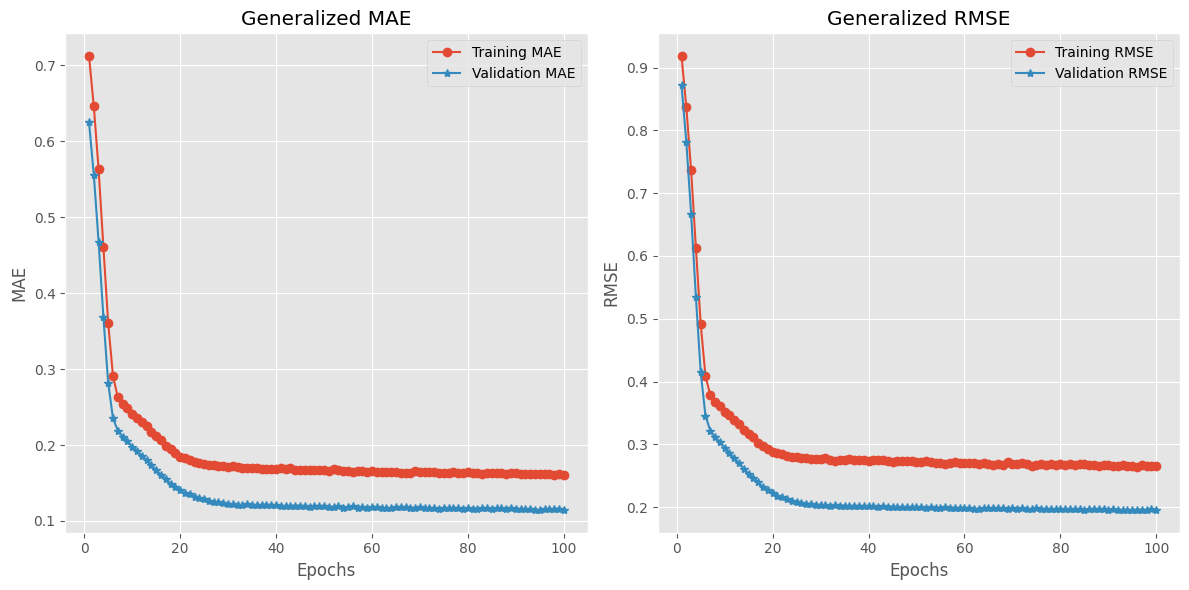

In [10]:
for i in histories_noval_PHs.items():
    print(f"Prediction horizon {i[0]}")
    plot_loss_curves(i[1]['559'])
    break

In [15]:
model_all_train_read =  PersonalizedModel(input_shape =input_shape , output_shape=output_shape)
model_all_train_read.load_state_dict(torch.load('saved_models\model_personalized_6_540.pth'))
model_all_train_read.to(device)
model_all_train_read.eval()


C:\Users\menna\AppData\Local\Temp\ipykernel_10712\3117860625.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_all_train_read.load_state_dict(torch.load('saved_model

PersonalizedModel(
  (conv_layers): ModuleList(
    (0): Conv1d(1, 64, kernel_size=(4,), stride=(2,), padding=(1,), dilation=(2,))
  )
  (shared_lstm): GRU(64, 128, batch_first=True)
  (personalized_fc): ModuleList(
    (0): Linear(in_features=128, out_features=64, bias=True)
  )
  (dropout): Dropout(p=0.2, inplace=False)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [17]:
_, _, _, test_loader, _, input_shape_test, _, output_shape_test =  prepare_data_loader(
                                                                                    window_size,BATCH_SIZE, prediction_horizon=6,
                                                                                    model_type=model_type , split_ratio=0.8, df = df, df_test = df_test, output_folder_train = None, shuffle = False)


Shape of X (features): (1, 13618, 6)
Shape of y (targets): (1, 13618)
Shape of X_test (features): (1, 2992, 6)
Shape of y_test (targets): (1, 2992)


In [18]:
outputs_all_batches, targets_all_batches =  model_prediction(model_all_train_read,test_loader, device, model_type)
outputs = torch.cat(outputs_all_batches, dim=0)
targets = torch.cat(targets_all_batches, dim=0)

outputs = outputs.cpu()
targets = targets.cpu()
# Create a mask where arr1 equals 0

mask = (targets == 0.0)

# Set elements to None (or np.nan for float compatibility)
targets = np.where(mask, None, targets)
outputs = np.where(mask, None, outputs)


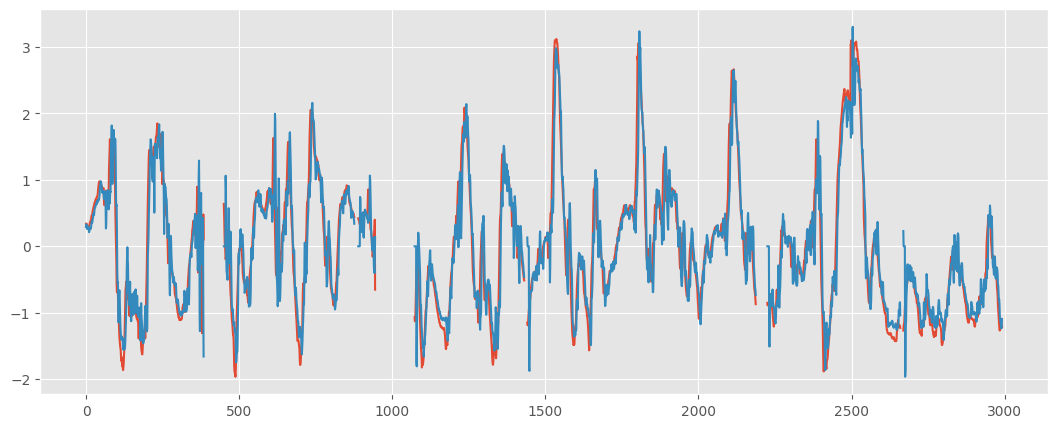

In [19]:
patient1_target = targets
patient1_output = outputs
# patient1_output = outputs_all_batches[index]
# patient1_target = targets_all_batches[index]

# print(list(abs_patients_errors_PHs[6].values())[index])
# print(list(squared_patients_errors_PHs[6].values())[index])

plt.figure(figsize=(13,5))
plt.plot(patient1_target)
plt.plot(patient1_output)
plt.show()

In [8]:
# all_mae =  {key: [] for key in train_patients.keys()}
# all_rmse =  {key: [] for key in train_patients.keys()}
# for i, patient in enumerate(train_patients.items()):
#     patient_code = patient[0]
#     df = patient[1]
#     print(f"Patient {patient_code}")
#     # print(df)

#     X, y = prepare_time_series_data(df, 'value', window_size, prediction_horizon)
#     X = X.reshape(1,X.shape[0], X.shape[1])
#     # print(y.shape)
#     y = y.reshape(1,y.shape[0])
#     print(X.shape)
#     print(y.shape)
#     # print(X)
#     # print(y)
#     input_shape = (window_size, X.shape[1], 1)
#     output_shape = (1,)

#     # Convert your data to PyTorch Datasets
#     # train_dataset = TimeSeriesDataset(X, y)
#     dataset = TimeSeriesDataset(X, y)
#     train_dataset, val_dataset = sequential_split(dataset, train_ratio=0.9)
        
#     # Create a DataLoader for batching
#     train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
#     validation_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

#     df_test = list(test_patients.values())[i]
#     X_test, y_test = prepare_time_series_data(df_test, 'value', window_size, prediction_horizon)
#     X_test = X_test.reshape(1,X_test.shape[0], X_test.shape[1])
#     # print(y.shape)
#     y_test = y_test.reshape(1,y_test.shape[0])
#     print(X_test.shape)
#     print(y_test.shape)

#     input_shape_test = (window_size, X_test.shape[1], 1)
#     output_shape_test = (1,)

#     test_dataset = TimeSeriesDataset(X_test, y_test)
#     # Create a DataLoader for batching
#     test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)


#     model = PersonalizedModel(input_shape =input_shape , output_shape=output_shape) 
#     model = model.to(device)

#     model, history = train_model(model, train_loader,validation_loader, epochs=150, learning_rate=0.0001, model_type='personalized')

#     model.eval()  # Set the model to evaluation mode
#     criterion = nn.MSELoss(reduction='none')  # MSE without reduction (so we can manually exclude masked values)

#     mask_value = -2.5
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     model = model.to(device)

#     abs_patients_errors =  []
#     squared_patients_errors = []

#     i=0
#     with torch.no_grad():  # Disable gradient calculation for evaluation
#         for inputs, targets in test_loader:
#             i+=1
#             # Move data to device (GPU or CPU)
#             inputs = [inp.to(device) for inp in inputs]
#             targets = targets.to(device)
#             # print(targets[0])
#             # print(targets)
#             # Forward pass
#             outputs = model(inputs)
#             # print([[outputs[0]]])
#             # # # Convert to numpy arrays for masking
#             outputs_np = outputs.cpu().numpy()
#             targets_np = targets.cpu().numpy()



#             # for i in range(len(targets_np)): #this prints a list of 12 values of each patient
#             for j in range(len(targets_np)):
#                 if targets[j] != mask_value:
#                     sub_output = scaler.inverse_transform([outputs[j]])[0][0]
#                     sub_target = scaler.inverse_transform([targets[j]])[0][0]
#                     abs_patients_errors.append(abs(sub_output-sub_target))
#                     squared_patients_errors.append((sub_output-sub_target) ** 2)
#         mae = np.mean(abs_patients_errors)
#         rmse = np.sqrt(np.mean(squared_patients_errors))

#         print(f"{patient_code}: RMSE: {rmse}, MAE: {mae}")
#         all_mae[patient_code] = mae
#         all_rmse[patient_code] = rmse
#     # break

In [17]:
# summary(model, input_size=(64,6, 1))
summary(model, (64, 1))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 64, 30]             320
               GRU-2  [[-1, 30, 128], [-1, 2, 128]]               0
            Linear-3                   [-1, 64]           8,256
           Dropout-4                   [-1, 64]               0
            Linear-5                    [-1, 1]              65
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 7.48
Params size (MB): 0.03
Estimated Total Size (MB): 7.52
----------------------------------------------------------------


In [63]:

# def train_model(model, train_loader, val_loader, epochs, learning_rate, model_type):
#     """
#     Train the LSTM model using a custom training loop with tqdm progress bars.
#     Also evaluates the model on validation data after each epoch.
    
#     Logs key training events and results to both the console and a log file.
    
#     Parameters:
#     - model: The model to train.
#     - train_loader: DataLoader for training data.
#     - val_loader: DataLoader for validation data.
#     - epochs: Number of epochs to train for.
#     - learning_rate: Learning rate for optimizer.
    
#     Returns:
#     - history: Dictionary containing the training and validation MAE and RMSE for each epoch.
#     """
#     # Define the optimizer and the loss functions (MAE and MSE)
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#     criterion_mae = torch.nn.L1Loss()  # Mean Absolute Error
#     criterion_mse = torch.nn.MSELoss()  # Mean Squared Error (for RMSE calculation)

#     # Move model to GPU if available
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     model = model.to(device)
    
#     # Initialize lists to store the history of losses
#     history = {
#         'train_mae': [],
#         'train_rmse': [],
#         'val_mae': [],
#         'val_rmse': []
#     }

#     logger.info(f"Starting training for {epochs} epochs with learning rate {learning_rate}.")

#     # Training loop
#     for epoch in range(epochs):
#         model.train()  # Set model to training mode
#         running_mae_loss = 0.0
#         running_mse_loss = 0.0
#         num_batches = len(train_loader)

#         # Add tqdm progress bar for each epoch
#         with tqdm(total=num_batches, desc=f'Epoch {epoch + 1}/{epochs}', unit='batch') as pbar:
#             for batch_idx, (inputs, targets) in enumerate(train_loader):
#                 # Move data to device (GPU or CPU)
#                 if model_type == "generalized":
#                     inputs = [inp for inp in inputs]
#                     inputs = torch.tensor(np.array(inputs)).to(device)
#                     targets = targets.to(device)

#                     optimizer.zero_grad()
                
#                     # Forward pass
#                     outputs = model(inputs)
#                 if model_type == "shared-layer":
#                     inputs = [inp.to(device) for inp in inputs]
#                     targets = targets.to(device)
#                     # Zero the parameter gradients
#                     optimizer.zero_grad()
            
#                     # Forward pass
#                     outputs = model(inputs)

#                 else:
#                     print(inputs)
#                     inputs = [inp.to(device) for inp in inputs]
#                     # inputs = torch.tensor(np.array(inputs)).to(device)
#                     targets = targets.to(device)
#                     # Zero the parameter gradients
#                     optimizer.zero_grad()
            
#                     # Forward pass
#                     outputs = model(inputs)
                
#                 # Compute losses
#                 mae_loss = criterion_mae(outputs, targets)
#                 mse_loss = criterion_mse(outputs, targets)
                
#                 # Backward pass and optimization
#                 mae_loss.backward()  
#                 optimizer.step()
                
#                 running_mae_loss += mae_loss.item()
#                 running_mse_loss += mse_loss.item()

#                 # Update progress bar
#                 pbar.set_postfix(mae_loss=mae_loss.item())
#                 pbar.update(1)
        
#         # Calculate average training loss for the epoch
#         avg_train_mae = running_mae_loss / num_batches
#         avg_train_rmse = np.sqrt(running_mse_loss / num_batches)
#         history['train_mae'].append(avg_train_mae)
#         history['train_rmse'].append(avg_train_rmse)
#         # Log training loss

#         logger.info(f"Epoch [{epoch + 1}/{epochs}], Training MAE: {avg_train_mae:.4f}, Training RMSE: {avg_train_rmse:.4f}")

#         if val_loader != None:
#             # Validate the model after each epoch
#             avg_val_mae, avg_val_rmse = validate_model(model, val_loader, criterion_mae, criterion_mse, device)
            
#             # Log validation loss
#             logger.info(f"Epoch [{epoch + 1}/{epochs}], Validation MAE: {avg_val_mae:.4f}, Validation RMSE: {avg_val_rmse:.4f}")
            
#             # Print validation loss
#             print(f"Epoch [{epoch + 1}/{epochs}], Validation MAE: {avg_val_mae:.4f}, Validation RMSE: {avg_val_rmse:.4f}")
            
#             # Store the losses in history

#             history['val_mae'].append(avg_val_mae)
#             history['val_rmse'].append(avg_val_rmse)

#     # Return the model and the history of losses
#     return model, history
